## Import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
cd ../marijan

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/Marijan


In [3]:
#pip install pyarrow fastparquet ydata-profiling

## Data

In [4]:
y = pd.read_csv('y_a.csv', index_col='time', parse_dates=True)
X_est = pd.read_csv('X_est.csv', index_col='date_forecast', parse_dates=True)
X_obs = pd.read_csv('X_obs.csv', index_col='date_forecast', parse_dates=True)

y.drop(['Unnamed: 0'], axis=1, inplace=True)
X_est.drop(['Unnamed: 0'], axis=1, inplace=True)
X_obs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
X_test = pd.read_csv('X_est.csv', index_col='date_forecast', parse_dates=True)

X_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
cd ../data

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/data


In [7]:
# Train
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [8]:
# X_train_estimated
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

In [9]:
# X_train_observed
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

In [10]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

In [11]:
#from ydata_profiling import ProfileReport

#profile = ProfileReport(X_train_estimated_a, title="Profiling Report")
#profile.to_file("Marijan.html")

In [12]:
X = pd.merge(X_obs, y, left_index=True, right_index=True)

## Some plots

In [13]:
y.resample('D')

In [14]:
X_test_estimated_a.set_index('date_forecast', inplace=True)
X_test_estimated_b.set_index('date_forecast', inplace=True)
X_test_estimated_c.set_index('date_forecast', inplace=True)

In [15]:
X_test_estimated_a.drop('date_calc', inplace=True, axis=1)
X_test_estimated_b.drop('date_calc', inplace=True, axis=1)
X_test_estimated_c.drop('date_calc', inplace=True, axis=1)

In [16]:
train_a.set_index('time', inplace=True)
train_b.set_index('time', inplace=True)
train_c.set_index('time', inplace=True)

The period of train is: 2023-05-01 to 2023-07-03. Which means that we start at the beginning of may, june and stop earlier in july.

In [29]:
X_test_estimated_a.index

DatetimeIndex(['2023-05-01 00:00:00', '2023-05-01 00:15:00',
               '2023-05-01 00:30:00', '2023-05-01 00:45:00',
               '2023-05-01 01:00:00', '2023-05-01 01:15:00',
               '2023-05-01 01:30:00', '2023-05-01 01:45:00',
               '2023-05-01 02:00:00', '2023-05-01 02:15:00',
               ...
               '2023-07-03 21:30:00', '2023-07-03 21:45:00',
               '2023-07-03 22:00:00', '2023-07-03 22:15:00',
               '2023-07-03 22:30:00', '2023-07-03 22:45:00',
               '2023-07-03 23:00:00', '2023-07-03 23:15:00',
               '2023-07-03 23:30:00', '2023-07-03 23:45:00'],
              dtype='datetime64[us]', name='date_forecast', length=2880, freq=None)

In [156]:
X_train_estimated_a.set_index('date_forecast', inplace=True)
X_train_estimated_a.drop('date_calc', inplace=True, axis=1)

In [157]:
X_train_observed_a.set_index('date_forecast', inplace=True)

<Axes: xlabel='date_forecast'>

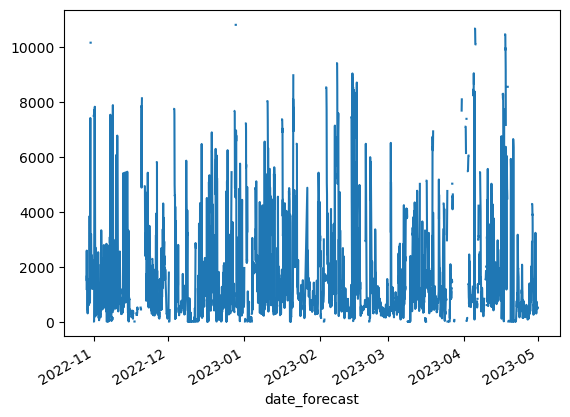

In [24]:
X_train_estimated_a.iloc[:,5].plot()

<Axes: xlabel='date_forecast'>

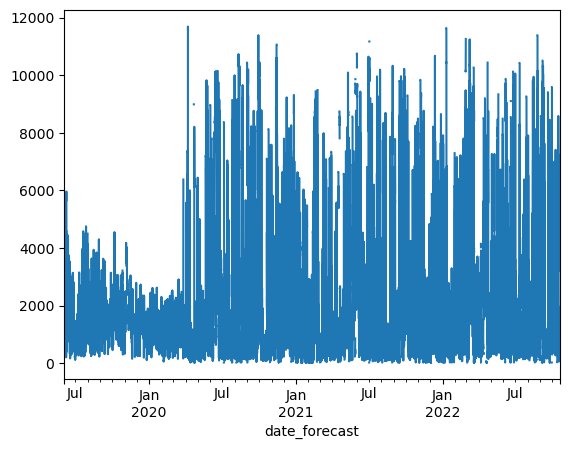

In [26]:
X_train_observed_a.iloc[:,5].plot()

In [158]:
A_index19 = X_train_observed_a.loc['2019-05-01 00:00:00':'2019-07-03 23:45:00'].index
A_index20 = X_train_observed_a.loc['2020-05-01 00:00:00':'2020-07-03 23:45:00'].index
A_index21 = X_train_observed_a.loc['2021-05-01 00:00:00':'2021-07-03 23:45:00'].index
A_index22 = X_train_observed_a.loc['2022-05-01 00:00:00':'2022-07-03 23:45:00'].index

B_index19 = X_train_observed_b.loc['2019-05-01 00:00:00':'2019-07-03 23:45:00'].index
B_index20 = X_train_observed_b.loc['2020-05-01 00:00:00':'2020-07-03 23:45:00'].index
B_index21 = X_train_observed_b.loc['2021-05-01 00:00:00':'2021-07-03 23:45:00'].index
B_index22 = X_train_observed_b.loc['2022-05-01 00:00:00':'2022-07-03 23:45:00'].index

C_index19 = X_train_observed_c.loc['2019-05-01 00:00:00':'2019-07-03 23:45:00'].index
C_index20 = X_train_observed_c.loc['2020-05-01 00:00:00':'2020-07-03 23:45:00'].index
C_index21 = X_train_observed_c.loc['2021-05-01 00:00:00':'2021-07-03 23:45:00'].index
C_index22 = X_train_observed_c.loc['2022-05-01 00:00:00':'2022-07-03 23:45:00'].index

In [159]:
A_index_spring = A_index19.union(A_index20).union(A_index21).union(A_index22)
B_index_spring = B_index19.union(B_index20).union(B_index21).union(B_index22)
C_index_spring = B_index19.union(C_index20).union(C_index21).union(C_index22)

In [160]:
X_train_observed_a_sping = X_train_observed_a.loc[A_index_spring]
X_train_observed_b_sping = X_train_observed_b.loc[B_index_spring]
X_train_observed_c_sping = X_train_observed_c.loc[C_index_spring]

<Axes: xlabel='date_forecast'>

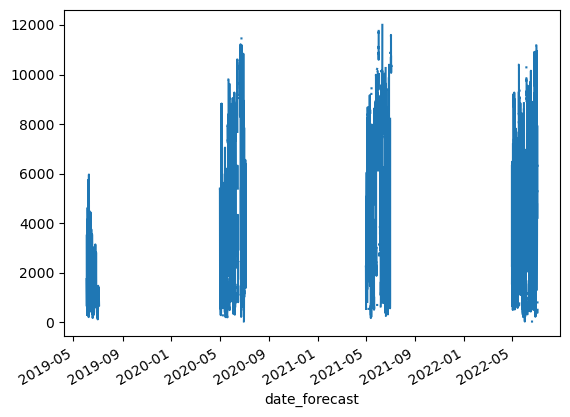

In [161]:
X_train_observed_a_sping.iloc[:,2].plot()

<Axes: >

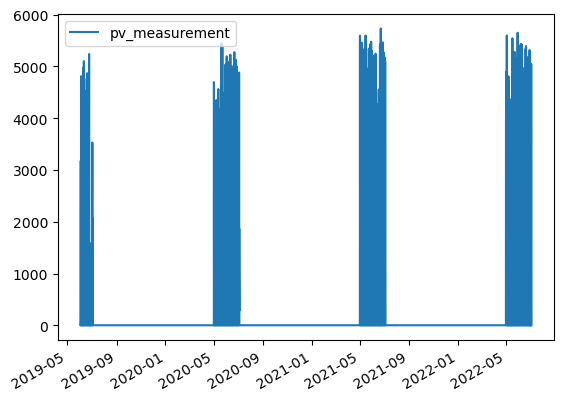

In [166]:
train_a.loc[A_index_spring.intersection(train_a.index)].plot()

In [140]:
X_train_observed_a_sping.shape

(21416, 45)

In [71]:
X_train_observed_a

DatetimeIndex(['2019-06-02 22:00:00', '2019-06-02 22:15:00',
               '2019-06-02 22:30:00', '2019-06-02 22:45:00',
               '2019-06-02 23:00:00', '2019-06-02 23:15:00',
               '2019-06-02 23:30:00', '2019-06-02 23:45:00',
               '2019-06-03 00:00:00', '2019-06-03 00:15:00',
               ...
               '2022-10-20 22:45:00', '2022-10-20 23:00:00',
               '2022-10-20 23:15:00', '2022-10-20 23:30:00',
               '2022-10-20 23:45:00', '2022-10-21 00:00:00',
               '2022-10-21 00:15:00', '2022-10-21 00:30:00',
               '2022-10-21 00:45:00', '2022-10-21 01:00:00'],
              dtype='datetime64[us]', name='date_forecast', length=118669, freq=None)

In [72]:
A_index19_est = X_train_observed_a.loc['2019-10-28 22:00:00':'2020-04-30 23:45:00'].index
A_index20_est = X_train_observed_a.loc['2020-10-28 22:00:00':'2021-04-30 23:45:00'].index
A_index21_est = X_train_observed_a.loc['2021-10-28 22:00:00':'2022-04-30 23:45:00'].index

B_index19_est = X_train_observed_b.loc['2019-10-28 22:00:00':'2020-04-30 23:45:00'].index
B_index20_est = X_train_observed_b.loc['2020-10-28 22:00:00':'2021-04-30 23:45:00'].index
B_index21_est = X_train_observed_b.loc['2021-10-28 22:00:00':'2022-04-30 23:45:00'].index

C_index19_est = X_train_observed_c.loc['2019-10-28 22:00:00':'2020-04-30 23:45:00'].index
C_index20_est = X_train_observed_c.loc['2020-10-28 22:00:00':'2021-04-30 23:45:00'].index
C_index21_est = X_train_observed_c.loc['2021-10-28 22:00:00':'2022-04-30 23:45:00'].index

In [73]:
A_index_est = A_index19_est.union(A_index20_est).union(A_index21_est)
B_index_est = B_index19_est.union(B_index20_est).union(B_index21_est)
C_index_est = B_index19_est.union(C_index20_est).union(C_index21_est)

In [74]:
X_train_observed_a_est = X_train_observed_a.loc[A_index_est]
X_train_observed_b_est = X_train_observed_b.loc[B_index_est]
X_train_observed_c_est = X_train_observed_c.loc[C_index_est]

<Axes: xlabel='date_forecast'>

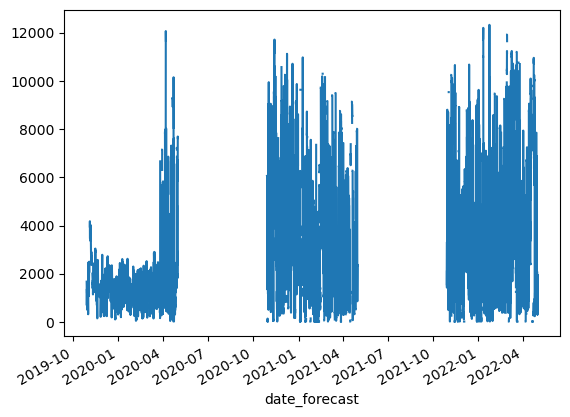

In [169]:
X_train_observed_a_est.iloc[:,2].plot()

In [ ]:
train_a.p

In [119]:
T = shift(X_train_observed_a_est.iloc[:,i], X_train_estimated_a.iloc[:,i])

In [114]:
T

<Axes: >

(1.281746,)

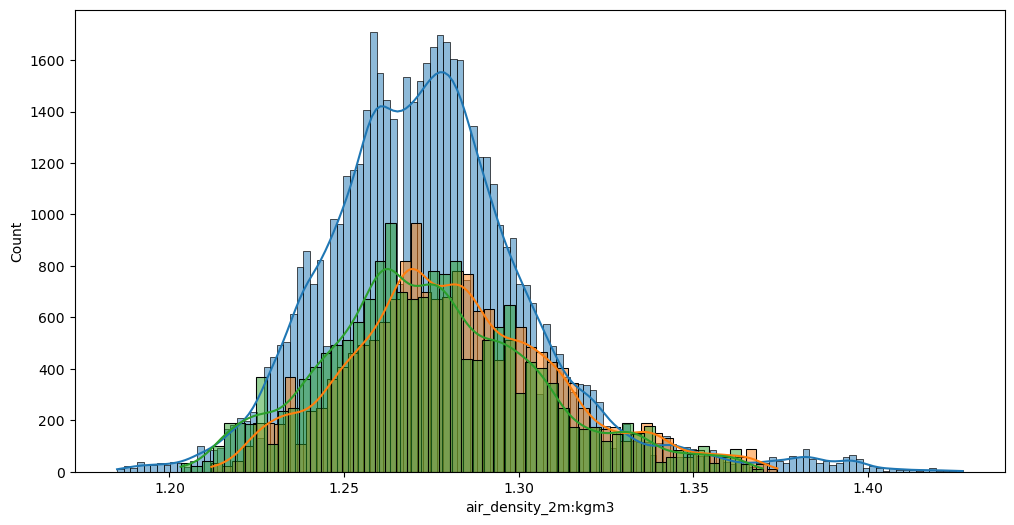

In [165]:
i = 1

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

#sns.histplot(data=X_train_observed_a_est.loc[A_index21_est].iloc[:,i], kde=True)
sns.histplot(data=X_train_observed_a_est.iloc[:,i], kde=True)
sns.histplot(data=X_train_estimated_a.iloc[:,i], kde=True)
sns.histplot(data=(T), kde=True)

X_train_estimated_a.iloc[:,i].mean(), X_train_estimated_a.iloc[:,i].mean(), 

In [214]:
train_a.loc[A_index_est]

KeyError: "[Timestamp('2019-10-28 22:15:00'), Timestamp('2019-10-28 22:30:00'), Timestamp('2019-10-28 22:45:00'), Timestamp('2019-10-28 23:15:00'), Timestamp('2019-10-28 23:30:00'), Timestamp('2019-10-28 23:45:00'), Timestamp('2019-10-29 00:15:00'), Timestamp('2019-10-29 00:30:00'), Timestamp('2019-10-29 00:45:00'), Timestamp('2019-10-29 01:15:00'), Timestamp('2019-10-29 01:30:00'), Timestamp('2019-10-29 01:45:00'), Timestamp('2019-10-29 02:15:00'), Timestamp('2019-10-29 02:30:00'), Timestamp('2019-10-29 02:45:00'), Timestamp('2019-10-29 03:15:00'), Timestamp('2019-10-29 03:30:00'), Timestamp('2019-10-29 03:45:00'), Timestamp('2019-10-29 04:15:00'), Timestamp('2019-10-29 04:30:00'), Timestamp('2019-10-29 04:45:00'), Timestamp('2019-10-29 05:15:00'), Timestamp('2019-10-29 05:30:00'), Timestamp('2019-10-29 05:45:00'), Timestamp('2019-10-29 06:15:00'), Timestamp('2019-10-29 06:30:00'), Timestamp('2019-10-29 06:45:00'), Timestamp('2019-10-29 07:15:00'), Timestamp('2019-10-29 07:30:00'), Timestamp('2019-10-29 07:45:00'), Timestamp('2019-10-29 08:15:00'), Timestamp('2019-10-29 08:30:00'), Timestamp('2019-10-29 08:45:00'), Timestamp('2019-10-29 09:15:00'), Timestamp('2019-10-29 09:30:00'), Timestamp('2019-10-29 09:45:00'), Timestamp('2019-10-29 10:15:00'), Timestamp('2019-10-29 10:30:00'), Timestamp('2019-10-29 10:45:00'), Timestamp('2019-10-29 11:15:00'), Timestamp('2019-10-29 11:30:00'), Timestamp('2019-10-29 11:45:00'), Timestamp('2019-10-29 12:15:00'), Timestamp('2019-10-29 12:30:00'), Timestamp('2019-10-29 12:45:00'), Timestamp('2019-10-29 13:15:00'), Timestamp('2019-10-29 13:30:00'), Timestamp('2019-10-29 13:45:00'), Timestamp('2019-10-29 14:15:00'), Timestamp('2019-10-29 14:30:00'), Timestamp('2019-10-29 14:45:00'), Timestamp('2019-10-29 15:15:00'), Timestamp('2019-10-29 15:30:00'), Timestamp('2019-10-29 15:45:00'), Timestamp('2019-10-29 16:15:00'), Timestamp('2019-10-29 16:30:00'), Timestamp('2019-10-29 16:45:00'), Timestamp('2019-10-29 17:15:00'), Timestamp('2019-10-29 17:30:00'), Timestamp('2019-10-29 17:45:00'), Timestamp('2019-10-29 18:15:00'), Timestamp('2019-10-29 18:30:00'), Timestamp('2019-10-29 18:45:00'), Timestamp('2019-10-29 19:15:00'), Timestamp('2019-10-29 19:30:00'), Timestamp('2019-10-29 19:45:00'), Timestamp('2019-10-29 20:15:00'), Timestamp('2019-10-29 20:30:00'), Timestamp('2019-10-29 20:45:00'), Timestamp('2019-10-29 21:15:00'), Timestamp('2019-10-29 21:30:00'), Timestamp('2019-10-29 21:45:00'), Timestamp('2019-10-29 22:15:00'), Timestamp('2019-10-29 22:30:00'), Timestamp('2019-10-29 22:45:00'), Timestamp('2019-10-29 23:15:00'), Timestamp('2019-10-29 23:30:00'), Timestamp('2019-10-29 23:45:00'), Timestamp('2019-10-30 00:15:00'), Timestamp('2019-10-30 00:30:00'), Timestamp('2019-10-30 00:45:00'), Timestamp('2019-10-30 01:15:00'), Timestamp('2019-10-30 01:30:00'), Timestamp('2019-10-30 01:45:00'), Timestamp('2019-10-30 02:15:00'), Timestamp('2019-10-30 02:30:00'), Timestamp('2019-10-30 02:45:00'), Timestamp('2019-10-30 03:15:00'), Timestamp('2019-10-30 03:30:00'), Timestamp('2019-10-30 03:45:00'), Timestamp('2019-10-30 04:15:00'), Timestamp('2019-10-30 04:30:00'), Timestamp('2019-10-30 04:45:00'), Timestamp('2019-10-30 05:15:00'), Timestamp('2019-10-30 05:30:00'), Timestamp('2019-10-30 05:45:00'), Timestamp('2019-10-30 06:15:00'), Timestamp('2019-10-30 06:30:00'), Timestamp('2019-10-30 06:45:00'), Timestamp('2019-10-30 07:15:00'), Timestamp('2019-10-30 07:30:00'), Timestamp('2019-10-30 07:45:00'), Timestamp('2019-10-30 08:15:00'), Timestamp('2019-10-30 08:30:00'), Timestamp('2019-10-30 08:45:00'), Timestamp('2019-10-30 09:15:00'), Timestamp('2019-10-30 09:30:00'), Timestamp('2019-10-30 09:45:00'), Timestamp('2019-10-30 10:15:00'), Timestamp('2019-10-30 10:30:00'), Timestamp('2019-10-30 10:45:00'), Timestamp('2019-10-30 11:15:00'), Timestamp('2019-10-30 11:30:00'), Timestamp('2019-10-30 11:45:00'), Timestamp('2019-10-30 12:15:00'), Timestamp('2019-10-30 12:30:00'), Timestamp('2019-10-30 12:45:00'), Timestamp('2019-10-30 13:15:00'), Timestamp('2019-10-30 13:30:00'), Timestamp('2019-10-30 13:45:00'), Timestamp('2019-10-30 14:15:00'), Timestamp('2019-10-30 14:30:00'), Timestamp('2019-10-30 14:45:00'), Timestamp('2019-10-30 15:15:00'), Timestamp('2019-10-30 15:30:00'), Timestamp('2019-10-30 15:45:00'), Timestamp('2019-10-30 16:15:00'), Timestamp('2019-10-30 16:30:00'), Timestamp('2019-10-30 16:45:00'), Timestamp('2019-10-30 17:15:00'), Timestamp('2019-10-30 17:30:00'), Timestamp('2019-10-30 17:45:00'), Timestamp('2019-10-30 18:15:00'), Timestamp('2019-10-30 18:30:00'), Timestamp('2019-10-30 18:45:00'), Timestamp('2019-10-30 19:15:00'), Timestamp('2019-10-30 19:30:00'), Timestamp('2019-10-30 19:45:00'), Timestamp('2019-10-30 20:15:00'), Timestamp('2019-10-30 20:30:00'), Timestamp('2019-10-30 20:45:00'), Timestamp('2019-10-30 21:15:00'), Timestamp('2019-10-30 21:30:00'), Timestamp('2019-10-30 21:45:00'), Timestamp('2019-10-30 22:15:00'), Timestamp('2019-10-30 22:30:00'), Timestamp('2019-10-30 22:45:00'), Timestamp('2019-10-30 23:15:00'), Timestamp('2019-10-30 23:30:00'), Timestamp('2019-10-30 23:45:00'), Timestamp('2019-10-31 00:15:00'), Timestamp('2019-10-31 00:30:00'), Timestamp('2019-10-31 00:45:00'), Timestamp('2019-10-31 01:15:00'), Timestamp('2019-10-31 01:30:00'), Timestamp('2019-10-31 01:45:00'), Timestamp('2019-10-31 02:15:00'), Timestamp('2019-10-31 02:30:00'), Timestamp('2019-10-31 02:45:00'), Timestamp('2019-10-31 03:15:00'), Timestamp('2019-10-31 03:30:00'), Timestamp('2019-10-31 03:45:00'), Timestamp('2019-10-31 04:15:00'), Timestamp('2019-10-31 04:30:00'), Timestamp('2019-10-31 04:45:00'), Timestamp('2019-10-31 05:15:00'), Timestamp('2019-10-31 05:30:00'), Timestamp('2019-10-31 05:45:00'), Timestamp('2019-10-31 06:15:00'), Timestamp('2019-10-31 06:30:00'), Timestamp('2019-10-31 06:45:00'), Timestamp('2019-10-31 07:15:00'), Timestamp('2019-10-31 07:30:00'), Timestamp('2019-10-31 07:45:00'), Timestamp('2019-10-31 08:15:00'), Timestamp('2019-10-31 08:30:00'), Timestamp('2019-10-31 08:45:00'), Timestamp('2019-10-31 09:15:00'), Timestamp('2019-10-31 09:30:00'), Timestamp('2019-10-31 09:45:00'), Timestamp('2019-10-31 10:15:00'), Timestamp('2019-10-31 10:30:00'), Timestamp('2019-10-31 10:45:00'), Timestamp('2019-10-31 11:15:00'), Timestamp('2019-10-31 11:30:00'), Timestamp('2019-10-31 11:45:00'), Timestamp('2019-10-31 12:15:00'), Timestamp('2019-10-31 12:30:00'), Timestamp('2019-10-31 12:45:00'), Timestamp('2019-10-31 13:15:00'), Timestamp('2019-10-31 13:30:00'), Timestamp('2019-10-31 13:45:00'), Timestamp('2019-10-31 14:15:00'), Timestamp('2019-10-31 14:30:00'), Timestamp('2019-10-31 14:45:00'), Timestamp('2019-10-31 15:15:00'), Timestamp('2019-10-31 15:30:00'), Timestamp('2019-10-31 15:45:00'), Timestamp('2019-10-31 16:15:00'), Timestamp('2019-10-31 16:30:00'), Timestamp('2019-10-31 16:45:00'), Timestamp('2019-10-31 17:15:00'), Timestamp('2019-10-31 17:30:00'), Timestamp('2019-10-31 17:45:00'), Timestamp('2019-10-31 18:15:00'), Timestamp('2019-10-31 18:30:00'), Timestamp('2019-10-31 18:45:00'), Timestamp('2019-10-31 19:15:00'), Timestamp('2019-10-31 19:30:00'), Timestamp('2019-10-31 19:45:00'), Timestamp('2019-10-31 20:15:00'), Timestamp('2019-10-31 20:30:00'), Timestamp('2019-10-31 20:45:00'), Timestamp('2019-10-31 21:15:00'), Timestamp('2019-10-31 21:30:00'), Timestamp('2019-10-31 21:45:00'), Timestamp('2019-10-31 22:15:00'), Timestamp('2019-10-31 22:30:00'), Timestamp('2019-10-31 22:45:00'), Timestamp('2019-10-31 23:15:00'), Timestamp('2019-10-31 23:30:00'), Timestamp('2019-10-31 23:45:00'), Timestamp('2019-11-01 00:15:00'), Timestamp('2019-11-01 00:30:00'), Timestamp('2019-11-01 00:45:00'), Timestamp('2019-11-01 01:15:00'), Timestamp('2019-11-01 01:30:00'), Timestamp('2019-11-01 01:45:00'), Timestamp('2019-11-01 02:15:00'), Timestamp('2019-11-01 02:30:00'), Timestamp('2019-11-01 02:45:00'), Timestamp('2019-11-01 03:15:00'), Timestamp('2019-11-01 03:30:00'), Timestamp('2019-11-01 03:45:00'), Timestamp('2019-11-01 04:15:00'), Timestamp('2019-11-01 04:30:00'), Timestamp('2019-11-01 04:45:00'), Timestamp('2019-11-01 05:15:00'), Timestamp('2019-11-01 05:30:00'), Timestamp('2019-11-01 05:45:00'), Timestamp('2019-11-01 06:15:00'), Timestamp('2019-11-01 06:30:00'), Timestamp('2019-11-01 06:45:00'), Timestamp('2019-11-01 07:15:00'), Timestamp('2019-11-01 07:30:00'), Timestamp('2019-11-01 07:45:00'), Timestamp('2019-11-01 08:15:00'), Timestamp('2019-11-01 08:30:00'), Timestamp('2019-11-01 08:45:00'), Timestamp('2019-11-01 09:15:00'), Timestamp('2019-11-01 09:30:00'), Timestamp('2019-11-01 09:45:00'), Timestamp('2019-11-01 10:15:00'), Timestamp('2019-11-01 10:30:00'), Timestamp('2019-11-01 10:45:00'), Timestamp('2019-11-01 11:15:00'), Timestamp('2019-11-01 11:30:00'), Timestamp('2019-11-01 11:45:00'), Timestamp('2019-11-01 12:15:00'), Timestamp('2019-11-01 12:30:00'), Timestamp('2019-11-01 12:45:00'), Timestamp('2019-11-01 13:15:00'), Timestamp('2019-11-01 13:30:00'), Timestamp('2019-11-01 13:45:00'), Timestamp('2019-11-01 14:15:00'), Timestamp('2019-11-01 14:30:00'), Timestamp('2019-11-01 14:45:00'), Timestamp('2019-11-01 15:15:00'), Timestamp('2019-11-01 15:30:00'), Timestamp('2019-11-01 15:45:00'), Timestamp('2019-11-01 16:15:00'), Timestamp('2019-11-01 16:30:00'), Timestamp('2019-11-01 16:45:00'), Timestamp('2019-11-01 17:15:00'), Timestamp('2019-11-01 17:30:00'), Timestamp('2019-11-01 17:45:00'), Timestamp('2019-11-01 18:15:00'), Timestamp('2019-11-01 18:30:00'), Timestamp('2019-11-01 18:45:00'), Timestamp('2019-11-01 19:15:00'), Timestamp('2019-11-01 19:30:00'), Timestamp('2019-11-01 19:45:00'), Timestamp('2019-11-01 20:15:00'), Timestamp('2019-11-01 20:30:00'), Timestamp('2019-11-01 20:45:00'), Timestamp('2019-11-01 21:15:00'), Timestamp('2019-11-01 21:30:00'), Timestamp('2019-11-01 21:45:00'), Timestamp('2019-11-01 22:15:00'), Timestamp('2019-11-01 22:30:00'), Timestamp('2019-11-01 22:45:00'), Timestamp('2019-11-01 23:15:00'), Timestamp('2019-11-01 23:30:00'), Timestamp('2019-11-01 23:45:00'), Timestamp('2019-11-02 00:15:00'), Timestamp('2019-11-02 00:30:00'), Timestamp('2019-11-02 00:45:00'), Timestamp('2019-11-02 01:15:00'), Timestamp('2019-11-02 01:30:00'), Timestamp('2019-11-02 01:45:00'), Timestamp('2019-11-02 02:15:00'), Timestamp('2019-11-02 02:30:00'), Timestamp('2019-11-02 02:45:00'), Timestamp('2019-11-02 03:15:00'), Timestamp('2019-11-02 03:30:00'), Timestamp('2019-11-02 03:45:00'), Timestamp('2019-11-02 04:15:00'), Timestamp('2019-11-02 04:30:00'), Timestamp('2019-11-02 04:45:00'), Timestamp('2019-11-02 05:15:00'), Timestamp('2019-11-02 05:30:00'), Timestamp('2019-11-02 05:45:00'), Timestamp('2019-11-02 06:15:00'), Timestamp('2019-11-02 06:30:00'), Timestamp('2019-11-02 06:45:00'), Timestamp('2019-11-02 07:15:00'), Timestamp('2019-11-02 07:30:00'), Timestamp('2019-11-02 07:45:00'), Timestamp('2019-11-02 08:15:00'), Timestamp('2019-11-02 08:30:00'), Timestamp('2019-11-02 08:45:00'), Timestamp('2019-11-02 09:15:00'), Timestamp('2019-11-02 09:30:00'), Timestamp('2019-11-02 09:45:00'), Timestamp('2019-11-02 10:15:00'), Timestamp('2019-11-02 10:30:00'), Timestamp('2019-11-02 10:45:00'), Timestamp('2019-11-02 11:15:00'), Timestamp('2019-11-02 11:30:00'), Timestamp('2019-11-02 11:45:00'), Timestamp('2019-11-02 12:15:00'), Timestamp('2019-11-02 12:30:00'), Timestamp('2019-11-02 12:45:00'), Timestamp('2019-11-02 13:15:00'), Timestamp('2019-11-02 13:30:00'), Timestamp('2019-11-02 13:45:00'), Timestamp('2019-11-02 14:15:00'), Timestamp('2019-11-02 14:30:00'), Timestamp('2019-11-02 14:45:00'), Timestamp('2019-11-02 15:15:00'), Timestamp('2019-11-02 15:30:00'), Timestamp('2019-11-02 15:45:00'), Timestamp('2019-11-02 16:15:00'), Timestamp('2019-11-02 16:30:00'), Timestamp('2019-11-02 16:45:00'), Timestamp('2019-11-02 17:15:00'), Timestamp('2019-11-02 17:30:00'), Timestamp('2019-11-02 17:45:00'), Timestamp('2019-11-02 18:15:00'), Timestamp('2019-11-02 18:30:00'), Timestamp('2019-11-02 18:45:00'), Timestamp('2019-11-02 19:15:00'), Timestamp('2019-11-02 19:30:00'), Timestamp('2019-11-02 19:45:00'), Timestamp('2019-11-02 20:15:00'), Timestamp('2019-11-02 20:30:00'), Timestamp('2019-11-02 20:45:00'), Timestamp('2019-11-02 21:15:00'), Timestamp('2019-11-02 21:30:00'), Timestamp('2019-11-02 21:45:00'), Timestamp('2019-11-02 22:15:00'), Timestamp('2019-11-02 22:30:00'), Timestamp('2019-11-02 22:45:00'), Timestamp('2019-11-02 23:15:00'), Timestamp('2019-11-02 23:30:00'), Timestamp('2019-11-02 23:45:00'), Timestamp('2019-11-03 00:15:00'), Timestamp('2019-11-03 00:30:00'), Timestamp('2019-11-03 00:45:00'), Timestamp('2019-11-03 01:15:00'), Timestamp('2019-11-03 01:30:00'), Timestamp('2019-11-03 01:45:00'), Timestamp('2019-11-03 02:15:00'), Timestamp('2019-11-03 02:30:00'), Timestamp('2019-11-03 02:45:00'), Timestamp('2019-11-03 03:15:00'), Timestamp('2019-11-03 03:30:00'), Timestamp('2019-11-03 03:45:00'), Timestamp('2019-11-03 04:15:00'), Timestamp('2019-11-03 04:30:00'), Timestamp('2019-11-03 04:45:00'), Timestamp('2019-11-03 05:15:00'), Timestamp('2019-11-03 05:30:00'), Timestamp('2019-11-03 05:45:00'), Timestamp('2019-11-03 06:15:00'), Timestamp('2019-11-03 06:30:00'), Timestamp('2019-11-03 06:45:00'), Timestamp('2019-11-03 07:15:00'), Timestamp('2019-11-03 07:30:00'), Timestamp('2019-11-03 07:45:00'), Timestamp('2019-11-03 08:15:00'), Timestamp('2019-11-03 08:30:00'), Timestamp('2019-11-03 08:45:00'), Timestamp('2019-11-03 09:15:00'), Timestamp('2019-11-03 09:30:00'), Timestamp('2019-11-03 09:45:00'), Timestamp('2019-11-03 10:15:00'), Timestamp('2019-11-03 10:30:00'), Timestamp('2019-11-03 10:45:00'), Timestamp('2019-11-03 11:15:00'), Timestamp('2019-11-03 11:30:00'), Timestamp('2019-11-03 11:45:00'), Timestamp('2019-11-03 12:15:00'), Timestamp('2019-11-03 12:30:00'), Timestamp('2019-11-03 12:45:00'), Timestamp('2019-11-03 13:15:00'), Timestamp('2019-11-03 13:30:00'), Timestamp('2019-11-03 13:45:00'), Timestamp('2019-11-03 14:15:00'), Timestamp('2019-11-03 14:30:00'), Timestamp('2019-11-03 14:45:00'), Timestamp('2019-11-03 15:15:00'), Timestamp('2019-11-03 15:30:00'), Timestamp('2019-11-03 15:45:00'), Timestamp('2019-11-03 16:15:00'), Timestamp('2019-11-03 16:30:00'), Timestamp('2019-11-03 16:45:00'), Timestamp('2019-11-03 17:15:00'), Timestamp('2019-11-03 17:30:00'), Timestamp('2019-11-03 17:45:00'), Timestamp('2019-11-03 18:15:00'), Timestamp('2019-11-03 18:30:00'), Timestamp('2019-11-03 18:45:00'), Timestamp('2019-11-03 19:15:00'), Timestamp('2019-11-03 19:30:00'), Timestamp('2019-11-03 19:45:00'), Timestamp('2019-11-03 20:15:00'), Timestamp('2019-11-03 20:30:00'), Timestamp('2019-11-03 20:45:00'), Timestamp('2019-11-03 21:15:00'), Timestamp('2019-11-03 21:30:00'), Timestamp('2019-11-03 21:45:00'), Timestamp('2019-11-03 22:15:00'), Timestamp('2019-11-03 22:30:00'), Timestamp('2019-11-03 22:45:00'), Timestamp('2019-11-03 23:15:00'), Timestamp('2019-11-03 23:30:00'), Timestamp('2019-11-03 23:45:00'), Timestamp('2019-11-04 00:15:00'), Timestamp('2019-11-04 00:30:00'), Timestamp('2019-11-04 00:45:00'), Timestamp('2019-11-04 01:15:00'), Timestamp('2019-11-04 01:30:00'), Timestamp('2019-11-04 01:45:00'), Timestamp('2019-11-04 02:15:00'), Timestamp('2019-11-04 02:30:00'), Timestamp('2019-11-04 02:45:00'), Timestamp('2019-11-04 03:15:00'), Timestamp('2019-11-04 03:30:00'), Timestamp('2019-11-04 03:45:00'), Timestamp('2019-11-04 04:15:00'), Timestamp('2019-11-04 04:30:00'), Timestamp('2019-11-04 04:45:00'), Timestamp('2019-11-04 05:15:00'), Timestamp('2019-11-04 05:30:00'), Timestamp('2019-11-04 05:45:00'), Timestamp('2019-11-04 06:15:00'), Timestamp('2019-11-04 06:30:00'), Timestamp('2019-11-04 06:45:00'), Timestamp('2019-11-04 07:15:00'), Timestamp('2019-11-04 07:30:00'), Timestamp('2019-11-04 07:45:00'), Timestamp('2019-11-04 08:15:00'), Timestamp('2019-11-04 08:30:00'), Timestamp('2019-11-04 08:45:00'), Timestamp('2019-11-04 09:15:00'), Timestamp('2019-11-04 09:30:00'), Timestamp('2019-11-04 09:45:00'), Timestamp('2019-11-04 10:15:00'), Timestamp('2019-11-04 10:30:00'), Timestamp('2019-11-04 10:45:00'), Timestamp('2019-11-04 11:15:00'), Timestamp('2019-11-04 11:30:00'), Timestamp('2019-11-04 11:45:00'), Timestamp('2019-11-04 12:15:00'), Timestamp('2019-11-04 12:30:00'), Timestamp('2019-11-04 12:45:00'), Timestamp('2019-11-04 13:15:00'), Timestamp('2019-11-04 13:30:00'), Timestamp('2019-11-04 13:45:00'), Timestamp('2019-11-04 14:15:00'), Timestamp('2019-11-04 14:30:00'), Timestamp('2019-11-04 14:45:00'), Timestamp('2019-11-04 15:15:00'), Timestamp('2019-11-04 15:30:00'), Timestamp('2019-11-04 15:45:00'), Timestamp('2019-11-04 16:15:00'), Timestamp('2019-11-04 16:30:00'), Timestamp('2019-11-04 16:45:00'), Timestamp('2019-11-04 17:15:00'), Timestamp('2019-11-04 17:30:00'), Timestamp('2019-11-04 17:45:00'), Timestamp('2019-11-04 18:15:00'), Timestamp('2019-11-04 18:30:00'), Timestamp('2019-11-04 18:45:00'), Timestamp('2019-11-04 19:15:00'), Timestamp('2019-11-04 19:30:00'), Timestamp('2019-11-04 19:45:00'), Timestamp('2019-11-04 20:15:00'), Timestamp('2019-11-04 20:30:00'), Timestamp('2019-11-04 20:45:00'), Timestamp('2019-11-04 21:15:00'), Timestamp('2019-11-04 21:30:00'), Timestamp('2019-11-04 21:45:00'), Timestamp('2019-11-04 22:15:00'), Timestamp('2019-11-04 22:30:00'), Timestamp('2019-11-04 22:45:00'), Timestamp('2019-11-04 23:15:00'), Timestamp('2019-11-04 23:30:00'), Timestamp('2019-11-04 23:45:00'), Timestamp('2019-11-05 00:15:00'), Timestamp('2019-11-05 00:30:00'), Timestamp('2019-11-05 00:45:00'), Timestamp('2019-11-05 01:15:00'), Timestamp('2019-11-05 01:30:00'), Timestamp('2019-11-05 01:45:00'), Timestamp('2019-11-05 02:15:00'), Timestamp('2019-11-05 02:30:00'), Timestamp('2019-11-05 02:45:00'), Timestamp('2019-11-05 03:15:00'), Timestamp('2019-11-05 03:30:00'), Timestamp('2019-11-05 03:45:00'), Timestamp('2019-11-05 04:15:00'), Timestamp('2019-11-05 04:30:00'), Timestamp('2019-11-05 04:45:00'), Timestamp('2019-11-05 05:15:00'), Timestamp('2019-11-05 05:30:00'), Timestamp('2019-11-05 05:45:00'), Timestamp('2019-11-05 06:15:00'), Timestamp('2019-11-05 06:30:00'), Timestamp('2019-11-05 06:45:00'), Timestamp('2019-11-05 07:15:00'), Timestamp('2019-11-05 07:30:00'), Timestamp('2019-11-05 07:45:00'), Timestamp('2019-11-05 08:15:00'), Timestamp('2019-11-05 08:30:00'), Timestamp('2019-11-05 08:45:00'), Timestamp('2019-11-05 09:15:00'), Timestamp('2019-11-05 09:30:00'), Timestamp('2019-11-05 09:45:00'), Timestamp('2019-11-05 10:15:00'), Timestamp('2019-11-05 10:30:00'), Timestamp('2019-11-05 10:45:00'), Timestamp('2019-11-05 11:15:00'), Timestamp('2019-11-05 11:30:00'), Timestamp('2019-11-05 11:45:00'), Timestamp('2019-11-05 12:15:00'), Timestamp('2019-11-05 12:30:00'), Timestamp('2019-11-05 12:45:00'), Timestamp('2019-11-05 13:15:00'), Timestamp('2019-11-05 13:30:00'), Timestamp('2019-11-05 13:45:00'), Timestamp('2019-11-05 14:15:00'), Timestamp('2019-11-05 14:30:00'), Timestamp('2019-11-05 14:45:00'), Timestamp('2019-11-05 15:15:00'), Timestamp('2019-11-05 15:30:00'), Timestamp('2019-11-05 15:45:00'), Timestamp('2019-11-05 16:15:00'), Timestamp('2019-11-05 16:30:00'), Timestamp('2019-11-05 16:45:00'), Timestamp('2019-11-05 17:15:00'), Timestamp('2019-11-05 17:30:00'), Timestamp('2019-11-05 17:45:00'), Timestamp('2019-11-05 18:15:00'), Timestamp('2019-11-05 18:30:00'), Timestamp('2019-11-05 18:45:00'), Timestamp('2019-11-05 19:15:00'), Timestamp('2019-11-05 19:30:00'), Timestamp('2019-11-05 19:45:00'), Timestamp('2019-11-05 20:15:00'), Timestamp('2019-11-05 20:30:00'), Timestamp('2019-11-05 20:45:00'), Timestamp('2019-11-05 21:15:00'), Timestamp('2019-11-05 21:30:00'), Timestamp('2019-11-05 21:45:00'), Timestamp('2019-11-05 22:15:00'), Timestamp('2019-11-05 22:30:00'), Timestamp('2019-11-05 22:45:00'), Timestamp('2019-11-05 23:15:00'), Timestamp('2019-11-05 23:30:00'), Timestamp('2019-11-05 23:45:00'), Timestamp('2019-11-06 00:15:00'), Timestamp('2019-11-06 00:30:00'), Timestamp('2019-11-06 00:45:00'), Timestamp('2019-11-06 01:15:00'), Timestamp('2019-11-06 01:30:00'), Timestamp('2019-11-06 01:45:00'), Timestamp('2019-11-06 02:15:00'), Timestamp('2019-11-06 02:30:00'), Timestamp('2019-11-06 02:45:00'), Timestamp('2019-11-06 03:15:00'), Timestamp('2019-11-06 03:30:00'), Timestamp('2019-11-06 03:45:00'), Timestamp('2019-11-06 04:15:00'), Timestamp('2019-11-06 04:30:00'), Timestamp('2019-11-06 04:45:00'), Timestamp('2019-11-06 05:15:00'), Timestamp('2019-11-06 05:30:00'), Timestamp('2019-11-06 05:45:00'), Timestamp('2019-11-06 06:15:00'), Timestamp('2019-11-06 06:30:00'), Timestamp('2019-11-06 06:45:00'), Timestamp('2019-11-06 07:15:00'), Timestamp('2019-11-06 07:30:00'), Timestamp('2019-11-06 07:45:00'), Timestamp('2019-11-06 08:15:00'), Timestamp('2019-11-06 08:30:00'), Timestamp('2019-11-06 08:45:00'), Timestamp('2019-11-06 09:15:00'), Timestamp('2019-11-06 09:30:00'), Timestamp('2019-11-06 09:45:00'), Timestamp('2019-11-06 10:15:00'), Timestamp('2019-11-06 10:30:00'), Timestamp('2019-11-06 10:45:00'), Timestamp('2019-11-06 11:15:00'), Timestamp('2019-11-06 11:30:00'), Timestamp('2019-11-06 11:45:00'), Timestamp('2019-11-06 12:15:00'), Timestamp('2019-11-06 12:30:00'), Timestamp('2019-11-06 12:45:00'), Timestamp('2019-11-06 13:15:00'), Timestamp('2019-11-06 13:30:00'), Timestamp('2019-11-06 13:45:00'), Timestamp('2019-11-06 14:15:00'), Timestamp('2019-11-06 14:30:00'), Timestamp('2019-11-06 14:45:00'), Timestamp('2019-11-06 15:15:00'), Timestamp('2019-11-06 15:30:00'), Timestamp('2019-11-06 15:45:00'), Timestamp('2019-11-06 16:15:00'), Timestamp('2019-11-06 16:30:00'), Timestamp('2019-11-06 16:45:00'), Timestamp('2019-11-06 17:15:00'), Timestamp('2019-11-06 17:30:00'), Timestamp('2019-11-06 17:45:00'), Timestamp('2019-11-06 18:15:00'), Timestamp('2019-11-06 18:30:00'), Timestamp('2019-11-06 18:45:00'), Timestamp('2019-11-06 19:15:00'), Timestamp('2019-11-06 19:30:00'), Timestamp('2019-11-06 19:45:00'), Timestamp('2019-11-06 20:15:00'), Timestamp('2019-11-06 20:30:00'), Timestamp('2019-11-06 20:45:00'), Timestamp('2019-11-06 21:15:00'), Timestamp('2019-11-06 21:30:00'), Timestamp('2019-11-06 21:45:00'), Timestamp('2019-11-06 22:15:00'), Timestamp('2019-11-06 22:30:00'), Timestamp('2019-11-06 22:45:00'), Timestamp('2019-11-06 23:15:00'), Timestamp('2019-11-06 23:30:00'), Timestamp('2019-11-06 23:45:00'), Timestamp('2019-11-07 00:15:00'), Timestamp('2019-11-07 00:30:00'), Timestamp('2019-11-07 00:45:00'), Timestamp('2019-11-07 01:15:00'), Timestamp('2019-11-07 01:30:00'), Timestamp('2019-11-07 01:45:00'), Timestamp('2019-11-07 02:15:00'), Timestamp('2019-11-07 02:30:00'), Timestamp('2019-11-07 02:45:00'), Timestamp('2019-11-07 03:15:00'), Timestamp('2019-11-07 03:30:00'), Timestamp('2019-11-07 03:45:00'), Timestamp('2019-11-07 04:15:00'), Timestamp('2019-11-07 04:30:00'), Timestamp('2019-11-07 04:45:00'), Timestamp('2019-11-07 05:15:00'), Timestamp('2019-11-07 05:30:00'), Timestamp('2019-11-07 05:45:00'), Timestamp('2019-11-07 06:15:00'), Timestamp('2019-11-07 06:30:00'), Timestamp('2019-11-07 06:45:00'), Timestamp('2019-11-07 07:15:00'), Timestamp('2019-11-07 07:30:00'), Timestamp('2019-11-07 07:45:00'), Timestamp('2019-11-07 08:15:00'), Timestamp('2019-11-07 08:30:00'), Timestamp('2019-11-07 08:45:00'), Timestamp('2019-11-07 09:15:00'), Timestamp('2019-11-07 09:30:00'), Timestamp('2019-11-07 09:45:00'), Timestamp('2019-11-07 10:15:00'), Timestamp('2019-11-07 10:30:00'), Timestamp('2019-11-07 10:45:00'), Timestamp('2019-11-07 11:15:00'), Timestamp('2019-11-07 11:30:00'), Timestamp('2019-11-07 11:45:00'), Timestamp('2019-11-07 12:15:00'), Timestamp('2019-11-07 12:30:00'), Timestamp('2019-11-07 12:45:00'), Timestamp('2019-11-07 13:15:00'), Timestamp('2019-11-07 13:30:00'), Timestamp('2019-11-07 13:45:00'), Timestamp('2019-11-07 14:15:00'), Timestamp('2019-11-07 14:30:00'), Timestamp('2019-11-07 14:45:00'), Timestamp('2019-11-07 15:15:00'), Timestamp('2019-11-07 15:30:00'), Timestamp('2019-11-07 15:45:00'), Timestamp('2019-11-07 16:15:00'), Timestamp('2019-11-07 16:30:00'), Timestamp('2019-11-07 16:45:00'), Timestamp('2019-11-07 17:15:00'), Timestamp('2019-11-07 17:30:00'), Timestamp('2019-11-07 17:45:00'), Timestamp('2019-11-07 18:15:00'), Timestamp('2019-11-07 18:30:00'), Timestamp('2019-11-07 18:45:00'), Timestamp('2019-11-07 19:15:00'), Timestamp('2019-11-07 19:30:00'), Timestamp('2019-11-07 19:45:00'), Timestamp('2019-11-07 20:15:00'), Timestamp('2019-11-07 20:30:00'), Timestamp('2019-11-07 20:45:00'), Timestamp('2019-11-07 21:15:00'), Timestamp('2019-11-07 21:30:00'), Timestamp('2019-11-07 21:45:00'), Timestamp('2019-11-07 22:15:00'), Timestamp('2019-11-07 22:30:00'), Timestamp('2019-11-07 22:45:00'), Timestamp('2019-11-07 23:15:00'), Timestamp('2019-11-07 23:30:00'), Timestamp('2019-11-07 23:45:00'), Timestamp('2019-11-08 00:15:00'), Timestamp('2019-11-08 00:30:00'), Timestamp('2019-11-08 00:45:00'), Timestamp('2019-11-08 01:15:00'), Timestamp('2019-11-08 01:30:00'), Timestamp('2019-11-08 01:45:00'), Timestamp('2019-11-08 02:15:00'), Timestamp('2019-11-08 02:30:00'), Timestamp('2019-11-08 02:45:00'), Timestamp('2019-11-08 03:15:00'), Timestamp('2019-11-08 03:30:00'), Timestamp('2019-11-08 03:45:00'), Timestamp('2019-11-08 04:15:00'), Timestamp('2019-11-08 04:30:00'), Timestamp('2019-11-08 04:45:00'), Timestamp('2019-11-08 05:15:00'), Timestamp('2019-11-08 05:30:00'), Timestamp('2019-11-08 05:45:00'), Timestamp('2019-11-08 06:15:00'), Timestamp('2019-11-08 06:30:00'), Timestamp('2019-11-08 06:45:00'), Timestamp('2019-11-08 07:15:00'), Timestamp('2019-11-08 07:30:00'), Timestamp('2019-11-08 07:45:00'), Timestamp('2019-11-08 08:15:00'), Timestamp('2019-11-08 08:30:00'), Timestamp('2019-11-08 08:45:00'), Timestamp('2019-11-08 09:15:00'), Timestamp('2019-11-08 09:30:00'), Timestamp('2019-11-08 09:45:00'), Timestamp('2019-11-08 10:15:00'), Timestamp('2019-11-08 10:30:00'), Timestamp('2019-11-08 10:45:00'), Timestamp('2019-11-08 11:15:00'), Timestamp('2019-11-08 11:30:00'), Timestamp('2019-11-08 11:45:00'), Timestamp('2019-11-08 12:15:00'), Timestamp('2019-11-08 12:30:00'), Timestamp('2019-11-08 12:45:00'), Timestamp('2019-11-08 13:15:00'), Timestamp('2019-11-08 13:30:00'), Timestamp('2019-11-08 13:45:00'), Timestamp('2019-11-08 14:15:00'), Timestamp('2019-11-08 14:30:00'), Timestamp('2019-11-08 14:45:00'), Timestamp('2019-11-08 15:15:00'), Timestamp('2019-11-08 15:30:00'), Timestamp('2019-11-08 15:45:00'), Timestamp('2019-11-08 16:15:00'), Timestamp('2019-11-08 16:30:00'), Timestamp('2019-11-08 16:45:00'), Timestamp('2019-11-08 17:15:00'), Timestamp('2019-11-08 17:30:00'), Timestamp('2019-11-08 17:45:00'), Timestamp('2019-11-08 18:15:00'), Timestamp('2019-11-08 18:30:00'), Timestamp('2019-11-08 18:45:00'), Timestamp('2019-11-08 19:15:00'), Timestamp('2019-11-08 19:30:00'), Timestamp('2019-11-08 19:45:00'), Timestamp('2019-11-08 20:15:00'), Timestamp('2019-11-08 20:30:00'), Timestamp('2019-11-08 20:45:00'), Timestamp('2019-11-08 21:15:00'), Timestamp('2019-11-08 21:30:00'), Timestamp('2019-11-08 21:45:00'), Timestamp('2019-11-08 22:15:00'), Timestamp('2019-11-08 22:30:00'), Timestamp('2019-11-08 22:45:00'), Timestamp('2019-11-08 23:15:00'), Timestamp('2019-11-08 23:30:00'), Timestamp('2019-11-08 23:45:00'), Timestamp('2019-11-09 00:15:00'), Timestamp('2019-11-09 00:30:00'), Timestamp('2019-11-09 00:45:00'), Timestamp('2019-11-09 01:15:00'), Timestamp('2019-11-09 01:30:00'), Timestamp('2019-11-09 01:45:00'), Timestamp('2019-11-09 02:15:00'), Timestamp('2019-11-09 02:30:00'), Timestamp('2019-11-09 02:45:00'), Timestamp('2019-11-09 03:15:00'), Timestamp('2019-11-09 03:30:00'), Timestamp('2019-11-09 03:45:00'), Timestamp('2019-11-09 04:15:00'), Timestamp('2019-11-09 04:30:00'), Timestamp('2019-11-09 04:45:00'), Timestamp('2019-11-09 05:15:00'), Timestamp('2019-11-09 05:30:00'), Timestamp('2019-11-09 05:45:00'), Timestamp('2019-11-09 06:15:00'), Timestamp('2019-11-09 06:30:00'), Timestamp('2019-11-09 06:45:00'), Timestamp('2019-11-09 07:15:00'), Timestamp('2019-11-09 07:30:00'), Timestamp('2019-11-09 07:45:00'), Timestamp('2019-11-09 08:15:00'), Timestamp('2019-11-09 08:30:00'), Timestamp('2019-11-09 08:45:00'), Timestamp('2019-11-09 09:15:00'), Timestamp('2019-11-09 09:30:00'), Timestamp('2019-11-09 09:45:00'), Timestamp('2019-11-09 10:15:00'), Timestamp('2019-11-09 10:30:00'), Timestamp('2019-11-09 10:45:00'), Timestamp('2019-11-09 11:15:00'), Timestamp('2019-11-09 11:30:00'), Timestamp('2019-11-09 11:45:00'), Timestamp('2019-11-09 12:15:00'), Timestamp('2019-11-09 12:30:00'), Timestamp('2019-11-09 12:45:00'), Timestamp('2019-11-09 13:15:00'), Timestamp('2019-11-09 13:30:00'), Timestamp('2019-11-09 13:45:00'), Timestamp('2019-11-09 14:15:00'), Timestamp('2019-11-09 14:30:00'), Timestamp('2019-11-09 14:45:00'), Timestamp('2019-11-09 15:15:00'), Timestamp('2019-11-09 15:30:00'), Timestamp('2019-11-09 15:45:00'), Timestamp('2019-11-09 16:15:00'), Timestamp('2019-11-09 16:30:00'), Timestamp('2019-11-09 16:45:00'), Timestamp('2019-11-09 17:15:00'), Timestamp('2019-11-09 17:30:00'), Timestamp('2019-11-09 17:45:00'), Timestamp('2019-11-09 18:15:00'), Timestamp('2019-11-09 18:30:00'), Timestamp('2019-11-09 18:45:00'), Timestamp('2019-11-09 19:15:00'), Timestamp('2019-11-09 19:30:00'), Timestamp('2019-11-09 19:45:00'), Timestamp('2019-11-09 20:15:00'), Timestamp('2019-11-09 20:30:00'), Timestamp('2019-11-09 20:45:00'), Timestamp('2019-11-09 21:15:00'), Timestamp('2019-11-09 21:30:00'), Timestamp('2019-11-09 21:45:00'), Timestamp('2019-11-09 22:15:00'), Timestamp('2019-11-09 22:30:00'), Timestamp('2019-11-09 22:45:00'), Timestamp('2019-11-09 23:15:00'), Timestamp('2019-11-09 23:30:00'), Timestamp('2019-11-09 23:45:00'), Timestamp('2019-11-10 00:15:00'), Timestamp('2019-11-10 00:30:00'), Timestamp('2019-11-10 00:45:00'), Timestamp('2019-11-10 01:15:00'), Timestamp('2019-11-10 01:30:00'), Timestamp('2019-11-10 01:45:00'), Timestamp('2019-11-10 02:15:00'), Timestamp('2019-11-10 02:30:00'), Timestamp('2019-11-10 02:45:00'), Timestamp('2019-11-10 03:15:00'), Timestamp('2019-11-10 03:30:00'), Timestamp('2019-11-10 03:45:00'), Timestamp('2019-11-10 04:15:00'), Timestamp('2019-11-10 04:30:00'), Timestamp('2019-11-10 04:45:00'), Timestamp('2019-11-10 05:15:00'), Timestamp('2019-11-10 05:30:00'), Timestamp('2019-11-10 05:45:00'), Timestamp('2019-11-10 06:15:00'), Timestamp('2019-11-10 06:30:00'), Timestamp('2019-11-10 06:45:00'), Timestamp('2019-11-10 07:15:00'), Timestamp('2019-11-10 07:30:00'), Timestamp('2019-11-10 07:45:00'), Timestamp('2019-11-10 08:15:00'), Timestamp('2019-11-10 08:30:00'), Timestamp('2019-11-10 08:45:00'), Timestamp('2019-11-10 09:15:00'), Timestamp('2019-11-10 09:30:00'), Timestamp('2019-11-10 09:45:00'), Timestamp('2019-11-10 10:15:00'), Timestamp('2019-11-10 10:30:00'), Timestamp('2019-11-10 10:45:00'), Timestamp('2019-11-10 11:15:00'), Timestamp('2019-11-10 11:30:00'), Timestamp('2019-11-10 11:45:00'), Timestamp('2019-11-10 12:15:00'), Timestamp('2019-11-10 12:30:00'), Timestamp('2019-11-10 12:45:00'), Timestamp('2019-11-10 13:15:00'), Timestamp('2019-11-10 13:30:00'), Timestamp('2019-11-10 13:45:00'), Timestamp('2019-11-10 14:15:00'), Timestamp('2019-11-10 14:30:00'), Timestamp('2019-11-10 14:45:00'), Timestamp('2019-11-10 15:15:00'), Timestamp('2019-11-10 15:30:00'), Timestamp('2019-11-10 15:45:00'), Timestamp('2019-11-10 16:15:00'), Timestamp('2019-11-10 16:30:00'), Timestamp('2019-11-10 16:45:00'), Timestamp('2019-11-10 17:15:00'), Timestamp('2019-11-10 17:30:00'), Timestamp('2019-11-10 17:45:00'), Timestamp('2019-11-10 18:15:00'), Timestamp('2019-11-10 18:30:00'), Timestamp('2019-11-10 18:45:00'), Timestamp('2019-11-10 19:15:00'), Timestamp('2019-11-10 19:30:00'), Timestamp('2019-11-10 19:45:00'), Timestamp('2019-11-10 20:15:00'), Timestamp('2019-11-10 20:30:00'), Timestamp('2019-11-10 20:45:00'), Timestamp('2019-11-10 21:15:00'), Timestamp('2019-11-10 21:30:00'), Timestamp('2019-11-10 21:45:00'), Timestamp('2019-11-10 22:15:00'), Timestamp('2019-11-10 22:30:00'), Timestamp('2019-11-10 22:45:00'), Timestamp('2019-11-10 23:15:00'), Timestamp('2019-11-10 23:30:00'), Timestamp('2019-11-10 23:45:00'), Timestamp('2019-11-11 00:15:00'), Timestamp('2019-11-11 00:30:00'), Timestamp('2019-11-11 00:45:00'), Timestamp('2019-11-11 01:15:00'), Timestamp('2019-11-11 01:30:00'), Timestamp('2019-11-11 01:45:00'), Timestamp('2019-11-11 02:15:00'), Timestamp('2019-11-11 02:30:00'), Timestamp('2019-11-11 02:45:00'), Timestamp('2019-11-11 03:15:00'), Timestamp('2019-11-11 03:30:00'), Timestamp('2019-11-11 03:45:00'), Timestamp('2019-11-11 04:15:00'), Timestamp('2019-11-11 04:30:00'), Timestamp('2019-11-11 04:45:00'), Timestamp('2019-11-11 05:15:00'), Timestamp('2019-11-11 05:30:00'), Timestamp('2019-11-11 05:45:00'), Timestamp('2019-11-11 06:15:00'), Timestamp('2019-11-11 06:30:00'), Timestamp('2019-11-11 06:45:00'), Timestamp('2019-11-11 07:15:00'), Timestamp('2019-11-11 07:30:00'), Timestamp('2019-11-11 07:45:00'), Timestamp('2019-11-11 08:15:00'), Timestamp('2019-11-11 08:30:00'), Timestamp('2019-11-11 08:45:00'), Timestamp('2019-11-11 09:15:00'), Timestamp('2019-11-11 09:30:00'), Timestamp('2019-11-11 09:45:00'), Timestamp('2019-11-11 10:15:00'), Timestamp('2019-11-11 10:30:00'), Timestamp('2019-11-11 10:45:00'), Timestamp('2019-11-11 11:15:00'), Timestamp('2019-11-11 11:30:00'), Timestamp('2019-11-11 11:45:00'), Timestamp('2019-11-11 12:15:00'), Timestamp('2019-11-11 12:30:00'), Timestamp('2019-11-11 12:45:00'), Timestamp('2019-11-11 13:15:00'), Timestamp('2019-11-11 13:30:00'), Timestamp('2019-11-11 13:45:00'), Timestamp('2019-11-11 14:15:00'), Timestamp('2019-11-11 14:30:00'), Timestamp('2019-11-11 14:45:00'), Timestamp('2019-11-11 15:15:00'), Timestamp('2019-11-11 15:30:00'), Timestamp('2019-11-11 15:45:00'), Timestamp('2019-11-11 16:15:00'), Timestamp('2019-11-11 16:30:00'), Timestamp('2019-11-11 16:45:00'), Timestamp('2019-11-11 17:15:00'), Timestamp('2019-11-11 17:30:00'), Timestamp('2019-11-11 17:45:00'), Timestamp('2019-11-11 18:15:00'), Timestamp('2019-11-11 18:30:00'), Timestamp('2019-11-11 18:45:00'), Timestamp('2019-11-11 19:15:00'), Timestamp('2019-11-11 19:30:00'), Timestamp('2019-11-11 19:45:00'), Timestamp('2019-11-11 20:15:00'), Timestamp('2019-11-11 20:30:00'), Timestamp('2019-11-11 20:45:00'), Timestamp('2019-11-11 21:15:00'), Timestamp('2019-11-11 21:30:00'), Timestamp('2019-11-11 21:45:00'), Timestamp('2019-11-11 22:15:00'), Timestamp('2019-11-11 22:30:00'), Timestamp('2019-11-11 22:45:00'), Timestamp('2019-11-11 23:15:00'), Timestamp('2019-11-11 23:30:00'), Timestamp('2019-11-11 23:45:00'), Timestamp('2019-11-12 00:15:00'), Timestamp('2019-11-12 00:30:00'), Timestamp('2019-11-12 00:45:00'), Timestamp('2019-11-12 01:15:00'), Timestamp('2019-11-12 01:30:00'), Timestamp('2019-11-12 01:45:00'), Timestamp('2019-11-12 02:15:00'), Timestamp('2019-11-12 02:30:00'), Timestamp('2019-11-12 02:45:00'), Timestamp('2019-11-12 03:15:00'), Timestamp('2019-11-12 03:30:00'), Timestamp('2019-11-12 03:45:00'), Timestamp('2019-11-12 04:15:00'), Timestamp('2019-11-12 04:30:00'), Timestamp('2019-11-12 04:45:00'), Timestamp('2019-11-12 05:15:00'), Timestamp('2019-11-12 05:30:00'), Timestamp('2019-11-12 05:45:00'), Timestamp('2019-11-12 06:15:00'), Timestamp('2019-11-12 06:30:00'), Timestamp('2019-11-12 06:45:00'), Timestamp('2019-11-12 07:15:00'), Timestamp('2019-11-12 07:30:00'), Timestamp('2019-11-12 07:45:00'), Timestamp('2019-11-12 08:15:00'), Timestamp('2019-11-12 08:30:00'), Timestamp('2019-11-12 08:45:00'), Timestamp('2019-11-12 09:15:00'), Timestamp('2019-11-12 09:30:00'), Timestamp('2019-11-12 09:45:00'), Timestamp('2019-11-12 10:15:00'), Timestamp('2019-11-12 10:30:00'), Timestamp('2019-11-12 10:45:00'), Timestamp('2019-11-12 11:15:00'), Timestamp('2019-11-12 11:30:00'), Timestamp('2019-11-12 11:45:00'), Timestamp('2019-11-12 12:15:00'), Timestamp('2019-11-12 12:30:00'), Timestamp('2019-11-12 12:45:00'), Timestamp('2019-11-12 13:15:00'), Timestamp('2019-11-12 13:30:00'), Timestamp('2019-11-12 13:45:00'), Timestamp('2019-11-12 14:15:00'), Timestamp('2019-11-12 14:30:00'), Timestamp('2019-11-12 14:45:00'), Timestamp('2019-11-12 15:15:00'), Timestamp('2019-11-12 15:30:00'), Timestamp('2019-11-12 15:45:00'), Timestamp('2019-11-12 16:15:00'), Timestamp('2019-11-12 16:30:00'), Timestamp('2019-11-12 16:45:00'), Timestamp('2019-11-12 17:15:00'), Timestamp('2019-11-12 17:30:00'), Timestamp('2019-11-12 17:45:00'), Timestamp('2019-11-12 18:15:00'), Timestamp('2019-11-12 18:30:00'), Timestamp('2019-11-12 18:45:00'), Timestamp('2019-11-12 19:15:00'), Timestamp('2019-11-12 19:30:00'), Timestamp('2019-11-12 19:45:00'), Timestamp('2019-11-12 20:15:00'), Timestamp('2019-11-12 20:30:00'), Timestamp('2019-11-12 20:45:00'), Timestamp('2019-11-12 21:15:00'), Timestamp('2019-11-12 21:30:00'), Timestamp('2019-11-12 21:45:00'), Timestamp('2019-11-12 22:15:00'), Timestamp('2019-11-12 22:30:00'), Timestamp('2019-11-12 22:45:00'), Timestamp('2019-11-12 23:15:00'), Timestamp('2019-11-12 23:30:00'), Timestamp('2019-11-12 23:45:00'), Timestamp('2019-11-13 00:15:00'), Timestamp('2019-11-13 00:30:00'), Timestamp('2019-11-13 00:45:00'), Timestamp('2019-11-13 01:15:00'), Timestamp('2019-11-13 01:30:00'), Timestamp('2019-11-13 01:45:00'), Timestamp('2019-11-13 02:15:00'), Timestamp('2019-11-13 02:30:00'), Timestamp('2019-11-13 02:45:00'), Timestamp('2019-11-13 03:15:00'), Timestamp('2019-11-13 03:30:00'), Timestamp('2019-11-13 03:45:00'), Timestamp('2019-11-13 04:15:00'), Timestamp('2019-11-13 04:30:00'), Timestamp('2019-11-13 04:45:00'), Timestamp('2019-11-13 05:15:00'), Timestamp('2019-11-13 05:30:00'), Timestamp('2019-11-13 05:45:00'), Timestamp('2019-11-13 06:15:00'), Timestamp('2019-11-13 06:30:00'), Timestamp('2019-11-13 06:45:00'), Timestamp('2019-11-13 07:15:00'), Timestamp('2019-11-13 07:30:00'), Timestamp('2019-11-13 07:45:00'), Timestamp('2019-11-13 08:15:00'), Timestamp('2019-11-13 08:30:00'), Timestamp('2019-11-13 08:45:00'), Timestamp('2019-11-13 09:15:00'), Timestamp('2019-11-13 09:30:00'), Timestamp('2019-11-13 09:45:00'), Timestamp('2019-11-13 10:15:00'), Timestamp('2019-11-13 10:30:00'), Timestamp('2019-11-13 10:45:00'), Timestamp('2019-11-13 11:15:00'), Timestamp('2019-11-13 11:30:00'), Timestamp('2019-11-13 11:45:00'), Timestamp('2019-11-13 12:15:00'), Timestamp('2019-11-13 12:30:00'), Timestamp('2019-11-13 12:45:00'), Timestamp('2019-11-13 13:15:00'), Timestamp('2019-11-13 13:30:00'), Timestamp('2019-11-13 13:45:00'), Timestamp('2019-11-13 14:15:00'), Timestamp('2019-11-13 14:30:00'), Timestamp('2019-11-13 14:45:00'), Timestamp('2019-11-13 15:15:00'), Timestamp('2019-11-13 15:30:00'), Timestamp('2019-11-13 15:45:00'), Timestamp('2019-11-13 16:15:00'), Timestamp('2019-11-13 16:30:00'), Timestamp('2019-11-13 16:45:00'), Timestamp('2019-11-13 17:15:00'), Timestamp('2019-11-13 17:30:00'), Timestamp('2019-11-13 17:45:00'), Timestamp('2019-11-13 18:15:00'), Timestamp('2019-11-13 18:30:00'), Timestamp('2019-11-13 18:45:00'), Timestamp('2019-11-13 19:15:00'), Timestamp('2019-11-13 19:30:00'), Timestamp('2019-11-13 19:45:00'), Timestamp('2019-11-13 20:15:00'), Timestamp('2019-11-13 20:30:00'), Timestamp('2019-11-13 20:45:00'), Timestamp('2019-11-13 21:15:00'), Timestamp('2019-11-13 21:30:00'), Timestamp('2019-11-13 21:45:00'), Timestamp('2019-11-13 22:15:00'), Timestamp('2019-11-13 22:30:00'), Timestamp('2019-11-13 22:45:00'), Timestamp('2019-11-13 23:15:00'), Timestamp('2019-11-13 23:30:00'), Timestamp('2019-11-13 23:45:00'), Timestamp('2019-11-14 00:15:00'), Timestamp('2019-11-14 00:30:00'), Timestamp('2019-11-14 00:45:00'), Timestamp('2019-11-14 01:15:00'), Timestamp('2019-11-14 01:30:00'), Timestamp('2019-11-14 01:45:00'), Timestamp('2019-11-14 02:15:00'), Timestamp('2019-11-14 02:30:00'), Timestamp('2019-11-14 02:45:00'), Timestamp('2019-11-14 03:15:00'), Timestamp('2019-11-14 03:30:00'), Timestamp('2019-11-14 03:45:00'), Timestamp('2019-11-14 04:15:00'), Timestamp('2019-11-14 04:30:00'), Timestamp('2019-11-14 04:45:00'), Timestamp('2019-11-14 05:15:00'), Timestamp('2019-11-14 05:30:00'), Timestamp('2019-11-14 05:45:00'), Timestamp('2019-11-14 06:15:00'), Timestamp('2019-11-14 06:30:00'), Timestamp('2019-11-14 06:45:00'), Timestamp('2019-11-14 07:15:00'), Timestamp('2019-11-14 07:30:00'), Timestamp('2019-11-14 07:45:00'), Timestamp('2019-11-14 08:15:00'), Timestamp('2019-11-14 08:30:00'), Timestamp('2019-11-14 08:45:00'), Timestamp('2019-11-14 09:15:00'), Timestamp('2019-11-14 09:30:00'), Timestamp('2019-11-14 09:45:00'), Timestamp('2019-11-14 10:15:00'), Timestamp('2019-11-14 10:30:00'), Timestamp('2019-11-14 10:45:00'), Timestamp('2019-11-14 11:15:00'), Timestamp('2019-11-14 11:30:00'), Timestamp('2019-11-14 11:45:00'), Timestamp('2019-11-14 12:15:00'), Timestamp('2019-11-14 12:30:00'), Timestamp('2019-11-14 12:45:00'), Timestamp('2019-11-14 13:15:00'), Timestamp('2019-11-14 13:30:00'), Timestamp('2019-11-14 13:45:00'), Timestamp('2019-11-14 14:15:00'), Timestamp('2019-11-14 14:30:00'), Timestamp('2019-11-14 14:45:00'), Timestamp('2019-11-14 15:15:00'), Timestamp('2019-11-14 15:30:00'), Timestamp('2019-11-14 15:45:00'), Timestamp('2019-11-14 16:15:00'), Timestamp('2019-11-14 16:30:00'), Timestamp('2019-11-14 16:45:00'), Timestamp('2019-11-14 17:15:00'), Timestamp('2019-11-14 17:30:00'), Timestamp('2019-11-14 17:45:00'), Timestamp('2019-11-14 18:15:00'), Timestamp('2019-11-14 18:30:00'), Timestamp('2019-11-14 18:45:00'), Timestamp('2019-11-14 19:15:00'), Timestamp('2019-11-14 19:30:00'), Timestamp('2019-11-14 19:45:00'), Timestamp('2019-11-14 20:15:00'), Timestamp('2019-11-14 20:30:00'), Timestamp('2019-11-14 20:45:00'), Timestamp('2019-11-14 21:15:00'), Timestamp('2019-11-14 21:30:00'), Timestamp('2019-11-14 21:45:00'), Timestamp('2019-11-14 22:15:00'), Timestamp('2019-11-14 22:30:00'), Timestamp('2019-11-14 22:45:00'), Timestamp('2019-11-14 23:15:00'), Timestamp('2019-11-14 23:30:00'), Timestamp('2019-11-14 23:45:00'), Timestamp('2019-11-15 00:15:00'), Timestamp('2019-11-15 00:30:00'), Timestamp('2019-11-15 00:45:00'), Timestamp('2019-11-15 01:15:00'), Timestamp('2019-11-15 01:30:00'), Timestamp('2019-11-15 01:45:00'), Timestamp('2019-11-15 02:15:00'), Timestamp('2019-11-15 02:30:00'), Timestamp('2019-11-15 02:45:00'), Timestamp('2019-11-15 03:15:00'), Timestamp('2019-11-15 03:30:00'), Timestamp('2019-11-15 03:45:00'), Timestamp('2019-11-15 04:15:00'), Timestamp('2019-11-15 04:30:00'), Timestamp('2019-11-15 04:45:00'), Timestamp('2019-11-15 05:15:00'), Timestamp('2019-11-15 05:30:00'), Timestamp('2019-11-15 05:45:00'), Timestamp('2019-11-15 06:15:00'), Timestamp('2019-11-15 06:30:00'), Timestamp('2019-11-15 06:45:00'), Timestamp('2019-11-15 07:15:00'), Timestamp('2019-11-15 07:30:00'), Timestamp('2019-11-15 07:45:00'), Timestamp('2019-11-15 08:15:00'), Timestamp('2019-11-15 08:30:00'), Timestamp('2019-11-15 08:45:00'), Timestamp('2019-11-15 09:15:00'), Timestamp('2019-11-15 09:30:00'), Timestamp('2019-11-15 09:45:00'), Timestamp('2019-11-15 10:15:00'), Timestamp('2019-11-15 10:30:00'), Timestamp('2019-11-15 10:45:00'), Timestamp('2019-11-15 11:15:00'), Timestamp('2019-11-15 11:30:00'), Timestamp('2019-11-15 11:45:00'), Timestamp('2019-11-15 12:15:00'), Timestamp('2019-11-15 12:30:00'), Timestamp('2019-11-15 12:45:00'), Timestamp('2019-11-15 13:15:00'), Timestamp('2019-11-15 13:30:00'), Timestamp('2019-11-15 13:45:00'), Timestamp('2019-11-15 14:15:00'), Timestamp('2019-11-15 14:30:00'), Timestamp('2019-11-15 14:45:00'), Timestamp('2019-11-15 15:15:00'), Timestamp('2019-11-15 15:30:00'), Timestamp('2019-11-15 15:45:00'), Timestamp('2019-11-15 16:15:00'), Timestamp('2019-11-15 16:30:00'), Timestamp('2019-11-15 16:45:00'), Timestamp('2019-11-15 17:15:00'), Timestamp('2019-11-15 17:30:00'), Timestamp('2019-11-15 17:45:00'), Timestamp('2019-11-15 18:15:00'), Timestamp('2019-11-15 18:30:00'), Timestamp('2019-11-15 18:45:00'), Timestamp('2019-11-15 19:15:00'), Timestamp('2019-11-15 19:30:00'), Timestamp('2019-11-15 19:45:00'), Timestamp('2019-11-15 20:15:00'), Timestamp('2019-11-15 20:30:00'), Timestamp('2019-11-15 20:45:00'), Timestamp('2019-11-15 21:15:00'), Timestamp('2019-11-15 21:30:00'), Timestamp('2019-11-15 21:45:00'), Timestamp('2019-11-15 22:15:00'), Timestamp('2019-11-15 22:30:00'), Timestamp('2019-11-15 22:45:00'), Timestamp('2019-11-15 23:15:00'), Timestamp('2019-11-15 23:30:00'), Timestamp('2019-11-15 23:45:00'), Timestamp('2019-11-16 00:15:00'), Timestamp('2019-11-16 00:30:00'), Timestamp('2019-11-16 00:45:00'), Timestamp('2019-11-16 01:15:00'), Timestamp('2019-11-16 01:30:00'), Timestamp('2019-11-16 01:45:00'), Timestamp('2019-11-16 02:15:00'), Timestamp('2019-11-16 02:30:00'), Timestamp('2019-11-16 02:45:00'), Timestamp('2019-11-16 03:15:00'), Timestamp('2019-11-16 03:30:00'), Timestamp('2019-11-16 03:45:00'), Timestamp('2019-11-16 04:15:00'), Timestamp('2019-11-16 04:30:00'), Timestamp('2019-11-16 04:45:00'), Timestamp('2019-11-16 05:15:00'), Timestamp('2019-11-16 05:30:00'), Timestamp('2019-11-16 05:45:00'), Timestamp('2019-11-16 06:15:00'), Timestamp('2019-11-16 06:30:00'), Timestamp('2019-11-16 06:45:00'), Timestamp('2019-11-16 07:15:00'), Timestamp('2019-11-16 07:30:00'), Timestamp('2019-11-16 07:45:00'), Timestamp('2019-11-16 08:15:00'), Timestamp('2019-11-16 08:30:00'), Timestamp('2019-11-16 08:45:00'), Timestamp('2019-11-16 09:15:00'), Timestamp('2019-11-16 09:30:00'), Timestamp('2019-11-16 09:45:00'), Timestamp('2019-11-16 10:15:00'), Timestamp('2019-11-16 10:30:00'), Timestamp('2019-11-16 10:45:00'), Timestamp('2019-11-16 11:15:00'), Timestamp('2019-11-16 11:30:00'), Timestamp('2019-11-16 11:45:00'), Timestamp('2019-11-16 12:15:00'), Timestamp('2019-11-16 12:30:00'), Timestamp('2019-11-16 12:45:00'), Timestamp('2019-11-16 13:15:00'), Timestamp('2019-11-16 13:30:00'), Timestamp('2019-11-16 13:45:00'), Timestamp('2019-11-16 14:15:00'), Timestamp('2019-11-16 14:30:00'), Timestamp('2019-11-16 14:45:00'), Timestamp('2019-11-16 15:15:00'), Timestamp('2019-11-16 15:30:00'), Timestamp('2019-11-16 15:45:00'), Timestamp('2019-11-16 16:15:00'), Timestamp('2019-11-16 16:30:00'), Timestamp('2019-11-16 16:45:00'), Timestamp('2019-11-16 17:15:00'), Timestamp('2019-11-16 17:30:00'), Timestamp('2019-11-16 17:45:00'), Timestamp('2019-11-16 18:15:00'), Timestamp('2019-11-16 18:30:00'), Timestamp('2019-11-16 18:45:00'), Timestamp('2019-11-16 19:15:00'), Timestamp('2019-11-16 19:30:00'), Timestamp('2019-11-16 19:45:00'), Timestamp('2019-11-16 20:15:00'), Timestamp('2019-11-16 20:30:00'), Timestamp('2019-11-16 20:45:00'), Timestamp('2019-11-16 21:15:00'), Timestamp('2019-11-16 21:30:00'), Timestamp('2019-11-16 21:45:00'), Timestamp('2019-11-16 22:15:00'), Timestamp('2019-11-16 22:30:00'), Timestamp('2019-11-16 22:45:00'), Timestamp('2019-11-16 23:15:00'), Timestamp('2019-11-16 23:30:00'), Timestamp('2019-11-16 23:45:00'), Timestamp('2019-11-17 00:15:00'), Timestamp('2019-11-17 00:30:00'), Timestamp('2019-11-17 00:45:00'), Timestamp('2019-11-17 01:15:00'), Timestamp('2019-11-17 01:30:00'), Timestamp('2019-11-17 01:45:00'), Timestamp('2019-11-17 02:15:00'), Timestamp('2019-11-17 02:30:00'), Timestamp('2019-11-17 02:45:00'), Timestamp('2019-11-17 03:15:00'), Timestamp('2019-11-17 03:30:00'), Timestamp('2019-11-17 03:45:00'), Timestamp('2019-11-17 04:15:00'), Timestamp('2019-11-17 04:30:00'), Timestamp('2019-11-17 04:45:00'), Timestamp('2019-11-17 05:15:00'), Timestamp('2019-11-17 05:30:00'), Timestamp('2019-11-17 05:45:00'), Timestamp('2019-11-17 06:15:00'), Timestamp('2019-11-17 06:30:00'), Timestamp('2019-11-17 06:45:00'), Timestamp('2019-11-17 07:15:00'), Timestamp('2019-11-17 07:30:00'), Timestamp('2019-11-17 07:45:00'), Timestamp('2019-11-17 08:15:00'), Timestamp('2019-11-17 08:30:00'), Timestamp('2019-11-17 08:45:00'), Timestamp('2019-11-17 09:15:00'), Timestamp('2019-11-17 09:30:00'), Timestamp('2019-11-17 09:45:00'), Timestamp('2019-11-17 10:15:00'), Timestamp('2019-11-17 10:30:00'), Timestamp('2019-11-17 10:45:00'), Timestamp('2019-11-17 11:15:00'), Timestamp('2019-11-17 11:30:00'), Timestamp('2019-11-17 11:45:00'), Timestamp('2019-11-17 12:15:00'), Timestamp('2019-11-17 12:30:00'), Timestamp('2019-11-17 12:45:00'), Timestamp('2019-11-17 13:15:00'), Timestamp('2019-11-17 13:30:00'), Timestamp('2019-11-17 13:45:00'), Timestamp('2019-11-17 14:15:00'), Timestamp('2019-11-17 14:30:00'), Timestamp('2019-11-17 14:45:00'), Timestamp('2019-11-17 15:15:00'), Timestamp('2019-11-17 15:30:00'), Timestamp('2019-11-17 15:45:00'), Timestamp('2019-11-17 16:15:00'), Timestamp('2019-11-17 16:30:00'), Timestamp('2019-11-17 16:45:00'), Timestamp('2019-11-17 17:15:00'), Timestamp('2019-11-17 17:30:00'), Timestamp('2019-11-17 17:45:00'), Timestamp('2019-11-17 18:15:00'), Timestamp('2019-11-17 18:30:00'), Timestamp('2019-11-17 18:45:00'), Timestamp('2019-11-17 19:15:00'), Timestamp('2019-11-17 19:30:00'), Timestamp('2019-11-17 19:45:00'), Timestamp('2019-11-17 20:15:00'), Timestamp('2019-11-17 20:30:00'), Timestamp('2019-11-17 20:45:00'), Timestamp('2019-11-17 21:15:00'), Timestamp('2019-11-17 21:30:00'), Timestamp('2019-11-17 21:45:00'), Timestamp('2019-11-17 22:15:00'), Timestamp('2019-11-17 22:30:00'), Timestamp('2019-11-17 22:45:00'), Timestamp('2019-11-17 23:15:00'), Timestamp('2019-11-17 23:30:00'), Timestamp('2019-11-17 23:45:00'), Timestamp('2019-11-18 00:15:00'), Timestamp('2019-11-18 00:30:00'), Timestamp('2019-11-18 00:45:00'), Timestamp('2019-11-18 01:15:00'), Timestamp('2019-11-18 01:30:00'), Timestamp('2019-11-18 01:45:00'), Timestamp('2019-11-18 02:15:00'), Timestamp('2019-11-18 02:30:00'), Timestamp('2019-11-18 02:45:00'), Timestamp('2019-11-18 03:15:00'), Timestamp('2019-11-18 03:30:00'), Timestamp('2019-11-18 03:45:00'), Timestamp('2019-11-18 04:15:00'), Timestamp('2019-11-18 04:30:00'), Timestamp('2019-11-18 04:45:00'), Timestamp('2019-11-18 05:15:00'), Timestamp('2019-11-18 05:30:00'), Timestamp('2019-11-18 05:45:00'), Timestamp('2019-11-18 06:15:00'), Timestamp('2019-11-18 06:30:00'), Timestamp('2019-11-18 06:45:00'), Timestamp('2019-11-18 07:15:00'), Timestamp('2019-11-18 07:30:00'), Timestamp('2019-11-18 07:45:00'), Timestamp('2019-11-18 08:15:00'), Timestamp('2019-11-18 08:30:00'), Timestamp('2019-11-18 08:45:00'), Timestamp('2019-11-18 09:15:00'), Timestamp('2019-11-18 09:30:00'), Timestamp('2019-11-18 09:45:00'), Timestamp('2019-11-18 10:15:00'), Timestamp('2019-11-18 10:30:00'), Timestamp('2019-11-18 10:45:00'), Timestamp('2019-11-18 11:15:00'), Timestamp('2019-11-18 11:30:00'), Timestamp('2019-11-18 11:45:00'), Timestamp('2019-11-18 12:15:00'), Timestamp('2019-11-18 12:30:00'), Timestamp('2019-11-18 12:45:00'), Timestamp('2019-11-18 13:15:00'), Timestamp('2019-11-18 13:30:00'), Timestamp('2019-11-18 13:45:00'), Timestamp('2019-11-18 14:15:00'), Timestamp('2019-11-18 14:30:00'), Timestamp('2019-11-18 14:45:00'), Timestamp('2019-11-18 15:15:00'), Timestamp('2019-11-18 15:30:00'), Timestamp('2019-11-18 15:45:00'), Timestamp('2019-11-18 16:15:00'), Timestamp('2019-11-18 16:30:00'), Timestamp('2019-11-18 16:45:00'), Timestamp('2019-11-18 17:15:00'), Timestamp('2019-11-18 17:30:00'), Timestamp('2019-11-18 17:45:00'), Timestamp('2019-11-18 18:15:00'), Timestamp('2019-11-18 18:30:00'), Timestamp('2019-11-18 18:45:00'), Timestamp('2019-11-18 19:15:00'), Timestamp('2019-11-18 19:30:00'), Timestamp('2019-11-18 19:45:00'), Timestamp('2019-11-18 20:15:00'), Timestamp('2019-11-18 20:30:00'), Timestamp('2019-11-18 20:45:00'), Timestamp('2019-11-18 21:15:00'), Timestamp('2019-11-18 21:30:00'), Timestamp('2019-11-18 21:45:00'), Timestamp('2019-11-18 22:15:00'), Timestamp('2019-11-18 22:30:00'), Timestamp('2019-11-18 22:45:00'), Timestamp('2019-11-18 23:15:00'), Timestamp('2019-11-18 23:30:00'), Timestamp('2019-11-18 23:45:00'), Timestamp('2019-11-19 00:15:00'), Timestamp('2019-11-19 00:30:00'), Timestamp('2019-11-19 00:45:00'), Timestamp('2019-11-19 01:15:00'), Timestamp('2019-11-19 01:30:00'), Timestamp('2019-11-19 01:45:00'), Timestamp('2019-11-19 02:15:00'), Timestamp('2019-11-19 02:30:00'), Timestamp('2019-11-19 02:45:00'), Timestamp('2019-11-19 03:15:00'), Timestamp('2019-11-19 03:30:00'), Timestamp('2019-11-19 03:45:00'), Timestamp('2019-11-19 04:15:00'), Timestamp('2019-11-19 04:30:00'), Timestamp('2019-11-19 04:45:00'), Timestamp('2019-11-19 05:15:00'), Timestamp('2019-11-19 05:30:00'), Timestamp('2019-11-19 05:45:00'), Timestamp('2019-11-19 06:15:00'), Timestamp('2019-11-19 06:30:00'), Timestamp('2019-11-19 06:45:00'), Timestamp('2019-11-19 07:15:00'), Timestamp('2019-11-19 07:30:00'), Timestamp('2019-11-19 07:45:00'), Timestamp('2019-11-19 08:15:00'), Timestamp('2019-11-19 08:30:00'), Timestamp('2019-11-19 08:45:00'), Timestamp('2019-11-19 09:15:00'), Timestamp('2019-11-19 09:30:00'), Timestamp('2019-11-19 09:45:00'), Timestamp('2019-11-19 10:15:00'), Timestamp('2019-11-19 10:30:00'), Timestamp('2019-11-19 10:45:00'), Timestamp('2019-11-19 11:15:00'), Timestamp('2019-11-19 11:30:00'), Timestamp('2019-11-19 11:45:00'), Timestamp('2019-11-19 12:15:00'), Timestamp('2019-11-19 12:30:00'), Timestamp('2019-11-19 12:45:00'), Timestamp('2019-11-19 13:15:00'), Timestamp('2019-11-19 13:30:00'), Timestamp('2019-11-19 13:45:00'), Timestamp('2019-11-19 14:15:00'), Timestamp('2019-11-19 14:30:00'), Timestamp('2019-11-19 14:45:00'), Timestamp('2019-11-19 15:15:00'), Timestamp('2019-11-19 15:30:00'), Timestamp('2019-11-19 15:45:00'), Timestamp('2019-11-19 16:15:00'), Timestamp('2019-11-19 16:30:00'), Timestamp('2019-11-19 16:45:00'), Timestamp('2019-11-19 17:15:00'), Timestamp('2019-11-19 17:30:00'), Timestamp('2019-11-19 17:45:00'), Timestamp('2019-11-19 18:15:00'), Timestamp('2019-11-19 18:30:00'), Timestamp('2019-11-19 18:45:00'), Timestamp('2019-11-19 19:15:00'), Timestamp('2019-11-19 19:30:00'), Timestamp('2019-11-19 19:45:00'), Timestamp('2019-11-19 20:15:00'), Timestamp('2019-11-19 20:30:00'), Timestamp('2019-11-19 20:45:00'), Timestamp('2019-11-19 21:15:00'), Timestamp('2019-11-19 21:30:00'), Timestamp('2019-11-19 21:45:00'), Timestamp('2019-11-19 22:15:00'), Timestamp('2019-11-19 22:30:00'), Timestamp('2019-11-19 22:45:00'), Timestamp('2019-11-19 23:15:00'), Timestamp('2019-11-19 23:30:00'), Timestamp('2019-11-19 23:45:00'), Timestamp('2019-11-20 00:15:00'), Timestamp('2019-11-20 00:30:00'), Timestamp('2019-11-20 00:45:00'), Timestamp('2019-11-20 01:15:00'), Timestamp('2019-11-20 01:30:00'), Timestamp('2019-11-20 01:45:00'), Timestamp('2019-11-20 02:15:00'), Timestamp('2019-11-20 02:30:00'), Timestamp('2019-11-20 02:45:00'), Timestamp('2019-11-20 03:15:00'), Timestamp('2019-11-20 03:30:00'), Timestamp('2019-11-20 03:45:00'), Timestamp('2019-11-20 04:15:00'), Timestamp('2019-11-20 04:30:00'), Timestamp('2019-11-20 04:45:00'), Timestamp('2019-11-20 05:15:00'), Timestamp('2019-11-20 05:30:00'), Timestamp('2019-11-20 05:45:00'), Timestamp('2019-11-20 06:15:00'), Timestamp('2019-11-20 06:30:00'), Timestamp('2019-11-20 06:45:00'), Timestamp('2019-11-20 07:15:00'), Timestamp('2019-11-20 07:30:00'), Timestamp('2019-11-20 07:45:00'), Timestamp('2019-11-20 08:15:00'), Timestamp('2019-11-20 08:30:00'), Timestamp('2019-11-20 08:45:00'), Timestamp('2019-11-20 09:15:00'), Timestamp('2019-11-20 09:30:00'), Timestamp('2019-11-20 09:45:00'), Timestamp('2019-11-20 10:15:00'), Timestamp('2019-11-20 10:30:00'), Timestamp('2019-11-20 10:45:00'), Timestamp('2019-11-20 11:15:00'), Timestamp('2019-11-20 11:30:00'), Timestamp('2019-11-20 11:45:00'), Timestamp('2019-11-20 12:15:00'), Timestamp('2019-11-20 12:30:00'), Timestamp('2019-11-20 12:45:00'), Timestamp('2019-11-20 13:15:00'), Timestamp('2019-11-20 13:30:00'), Timestamp('2019-11-20 13:45:00'), Timestamp('2019-11-20 14:15:00'), Timestamp('2019-11-20 14:30:00'), Timestamp('2019-11-20 14:45:00'), Timestamp('2019-11-20 15:15:00'), Timestamp('2019-11-20 15:30:00'), Timestamp('2019-11-20 15:45:00'), Timestamp('2019-11-20 16:15:00'), Timestamp('2019-11-20 16:30:00'), Timestamp('2019-11-20 16:45:00'), Timestamp('2019-11-20 17:15:00'), Timestamp('2019-11-20 17:30:00'), Timestamp('2019-11-20 17:45:00'), Timestamp('2019-11-20 18:15:00'), Timestamp('2019-11-20 18:30:00'), Timestamp('2019-11-20 18:45:00'), Timestamp('2019-11-20 19:15:00'), Timestamp('2019-11-20 19:30:00'), Timestamp('2019-11-20 19:45:00'), Timestamp('2019-11-20 20:15:00'), Timestamp('2019-11-20 20:30:00'), Timestamp('2019-11-20 20:45:00'), Timestamp('2019-11-20 21:15:00'), Timestamp('2019-11-20 21:30:00'), Timestamp('2019-11-20 21:45:00'), Timestamp('2019-11-20 22:15:00'), Timestamp('2019-11-20 22:30:00'), Timestamp('2019-11-20 22:45:00'), Timestamp('2019-11-20 23:15:00'), Timestamp('2019-11-20 23:30:00'), Timestamp('2019-11-20 23:45:00'), Timestamp('2019-11-21 00:15:00'), Timestamp('2019-11-21 00:30:00'), Timestamp('2019-11-21 00:45:00'), Timestamp('2019-11-21 01:15:00'), Timestamp('2019-11-21 01:30:00'), Timestamp('2019-11-21 01:45:00'), Timestamp('2019-11-21 02:15:00'), Timestamp('2019-11-21 02:30:00'), Timestamp('2019-11-21 02:45:00'), Timestamp('2019-11-21 03:15:00'), Timestamp('2019-11-21 03:30:00'), Timestamp('2019-11-21 03:45:00'), Timestamp('2019-11-21 04:15:00'), Timestamp('2019-11-21 04:30:00'), Timestamp('2019-11-21 04:45:00'), Timestamp('2019-11-21 05:15:00'), Timestamp('2019-11-21 05:30:00'), Timestamp('2019-11-21 05:45:00'), Timestamp('2019-11-21 06:15:00'), Timestamp('2019-11-21 06:30:00'), Timestamp('2019-11-21 06:45:00'), Timestamp('2019-11-21 07:15:00'), Timestamp('2019-11-21 07:30:00'), Timestamp('2019-11-21 07:45:00'), Timestamp('2019-11-21 08:15:00'), Timestamp('2019-11-21 08:30:00'), Timestamp('2019-11-21 08:45:00'), Timestamp('2019-11-21 09:15:00'), Timestamp('2019-11-21 09:30:00'), Timestamp('2019-11-21 09:45:00'), Timestamp('2019-11-21 10:15:00'), Timestamp('2019-11-21 10:30:00'), Timestamp('2019-11-21 10:45:00'), Timestamp('2019-11-21 11:15:00'), Timestamp('2019-11-21 11:30:00'), Timestamp('2019-11-21 11:45:00'), Timestamp('2019-11-21 12:15:00'), Timestamp('2019-11-21 12:30:00'), Timestamp('2019-11-21 12:45:00'), Timestamp('2019-11-21 13:15:00'), Timestamp('2019-11-21 13:30:00'), Timestamp('2019-11-21 13:45:00'), Timestamp('2019-11-21 14:15:00'), Timestamp('2019-11-21 14:30:00'), Timestamp('2019-11-21 14:45:00'), Timestamp('2019-11-21 15:15:00'), Timestamp('2019-11-21 15:30:00'), Timestamp('2019-11-21 15:45:00'), Timestamp('2019-11-21 16:15:00'), Timestamp('2019-11-21 16:30:00'), Timestamp('2019-11-21 16:45:00'), Timestamp('2019-11-21 17:15:00'), Timestamp('2019-11-21 17:30:00'), Timestamp('2019-11-21 17:45:00'), Timestamp('2019-11-21 18:15:00'), Timestamp('2019-11-21 18:30:00'), Timestamp('2019-11-21 18:45:00'), Timestamp('2019-11-21 19:15:00'), Timestamp('2019-11-21 19:30:00'), Timestamp('2019-11-21 19:45:00'), Timestamp('2019-11-21 20:15:00'), Timestamp('2019-11-21 20:30:00'), Timestamp('2019-11-21 20:45:00'), Timestamp('2019-11-21 21:15:00'), Timestamp('2019-11-21 21:30:00'), Timestamp('2019-11-21 21:45:00'), Timestamp('2019-11-21 22:15:00'), Timestamp('2019-11-21 22:30:00'), Timestamp('2019-11-21 22:45:00'), Timestamp('2019-11-21 23:15:00'), Timestamp('2019-11-21 23:30:00'), Timestamp('2019-11-21 23:45:00'), Timestamp('2019-11-22 00:15:00'), Timestamp('2019-11-22 00:30:00'), Timestamp('2019-11-22 00:45:00'), Timestamp('2019-11-22 01:15:00'), Timestamp('2019-11-22 01:30:00'), Timestamp('2019-11-22 01:45:00'), Timestamp('2019-11-22 02:15:00'), Timestamp('2019-11-22 02:30:00'), Timestamp('2019-11-22 02:45:00'), Timestamp('2019-11-22 03:15:00'), Timestamp('2019-11-22 03:30:00'), Timestamp('2019-11-22 03:45:00'), Timestamp('2019-11-22 04:15:00'), Timestamp('2019-11-22 04:30:00'), Timestamp('2019-11-22 04:45:00'), Timestamp('2019-11-22 05:15:00'), Timestamp('2019-11-22 05:30:00'), Timestamp('2019-11-22 05:45:00'), Timestamp('2019-11-22 06:15:00'), Timestamp('2019-11-22 06:30:00'), Timestamp('2019-11-22 06:45:00'), Timestamp('2019-11-22 07:15:00'), Timestamp('2019-11-22 07:30:00'), Timestamp('2019-11-22 07:45:00'), Timestamp('2019-11-22 08:15:00'), Timestamp('2019-11-22 08:30:00'), Timestamp('2019-11-22 08:45:00'), Timestamp('2019-11-22 09:15:00'), Timestamp('2019-11-22 09:30:00'), Timestamp('2019-11-22 09:45:00'), Timestamp('2019-11-22 10:15:00'), Timestamp('2019-11-22 10:30:00'), Timestamp('2019-11-22 10:45:00'), Timestamp('2019-11-22 11:15:00'), Timestamp('2019-11-22 11:30:00'), Timestamp('2019-11-22 11:45:00'), Timestamp('2019-11-22 12:15:00'), Timestamp('2019-11-22 12:30:00'), Timestamp('2019-11-22 12:45:00'), Timestamp('2019-11-22 13:15:00'), Timestamp('2019-11-22 13:30:00'), Timestamp('2019-11-22 13:45:00'), Timestamp('2019-11-22 14:15:00'), Timestamp('2019-11-22 14:30:00'), Timestamp('2019-11-22 14:45:00'), Timestamp('2019-11-22 15:15:00'), Timestamp('2019-11-22 15:30:00'), Timestamp('2019-11-22 15:45:00'), Timestamp('2019-11-22 16:15:00'), Timestamp('2019-11-22 16:30:00'), Timestamp('2019-11-22 16:45:00'), Timestamp('2019-11-22 17:15:00'), Timestamp('2019-11-22 17:30:00'), Timestamp('2019-11-22 17:45:00'), Timestamp('2019-11-22 18:15:00'), Timestamp('2019-11-22 18:30:00'), Timestamp('2019-11-22 18:45:00'), Timestamp('2019-11-22 19:15:00'), Timestamp('2019-11-22 19:30:00'), Timestamp('2019-11-22 19:45:00'), Timestamp('2019-11-22 20:15:00'), Timestamp('2019-11-22 20:30:00'), Timestamp('2019-11-22 20:45:00'), Timestamp('2019-11-22 21:15:00'), Timestamp('2019-11-22 21:30:00'), Timestamp('2019-11-22 21:45:00'), Timestamp('2019-11-22 22:15:00'), Timestamp('2019-11-22 22:30:00'), Timestamp('2019-11-22 22:45:00'), Timestamp('2019-11-22 23:15:00'), Timestamp('2019-11-22 23:30:00'), Timestamp('2019-11-22 23:45:00'), Timestamp('2019-11-23 00:15:00'), Timestamp('2019-11-23 00:30:00'), Timestamp('2019-11-23 00:45:00'), Timestamp('2019-11-23 01:15:00'), Timestamp('2019-11-23 01:30:00'), Timestamp('2019-11-23 01:45:00'), Timestamp('2019-11-23 02:15:00'), Timestamp('2019-11-23 02:30:00'), Timestamp('2019-11-23 02:45:00'), Timestamp('2019-11-23 03:15:00'), Timestamp('2019-11-23 03:30:00'), Timestamp('2019-11-23 03:45:00'), Timestamp('2019-11-23 04:15:00'), Timestamp('2019-11-23 04:30:00'), Timestamp('2019-11-23 04:45:00'), Timestamp('2019-11-23 05:15:00'), Timestamp('2019-11-23 05:30:00'), Timestamp('2019-11-23 05:45:00'), Timestamp('2019-11-23 06:15:00'), Timestamp('2019-11-23 06:30:00'), Timestamp('2019-11-23 06:45:00'), Timestamp('2019-11-23 07:15:00'), Timestamp('2019-11-23 07:30:00'), Timestamp('2019-11-23 07:45:00'), Timestamp('2019-11-23 08:15:00'), Timestamp('2019-11-23 08:30:00'), Timestamp('2019-11-23 08:45:00'), Timestamp('2019-11-23 09:15:00'), Timestamp('2019-11-23 09:30:00'), Timestamp('2019-11-23 09:45:00'), Timestamp('2019-11-23 10:15:00'), Timestamp('2019-11-23 10:30:00'), Timestamp('2019-11-23 10:45:00'), Timestamp('2019-11-23 11:15:00'), Timestamp('2019-11-23 11:30:00'), Timestamp('2019-11-23 11:45:00'), Timestamp('2019-11-23 12:15:00'), Timestamp('2019-11-23 12:30:00'), Timestamp('2019-11-23 12:45:00'), Timestamp('2019-11-23 13:15:00'), Timestamp('2019-11-23 13:30:00'), Timestamp('2019-11-23 13:45:00'), Timestamp('2019-11-23 14:15:00'), Timestamp('2019-11-23 14:30:00'), Timestamp('2019-11-23 14:45:00'), Timestamp('2019-11-23 15:15:00'), Timestamp('2019-11-23 15:30:00'), Timestamp('2019-11-23 15:45:00'), Timestamp('2019-11-23 16:15:00'), Timestamp('2019-11-23 16:30:00'), Timestamp('2019-11-23 16:45:00'), Timestamp('2019-11-23 17:15:00'), Timestamp('2019-11-23 17:30:00'), Timestamp('2019-11-23 17:45:00'), Timestamp('2019-11-23 18:15:00'), Timestamp('2019-11-23 18:30:00'), Timestamp('2019-11-23 18:45:00'), Timestamp('2019-11-23 19:15:00'), Timestamp('2019-11-23 19:30:00'), Timestamp('2019-11-23 19:45:00'), Timestamp('2019-11-23 20:15:00'), Timestamp('2019-11-23 20:30:00'), Timestamp('2019-11-23 20:45:00'), Timestamp('2019-11-23 21:15:00'), Timestamp('2019-11-23 21:30:00'), Timestamp('2019-11-23 21:45:00'), Timestamp('2019-11-23 22:15:00'), Timestamp('2019-11-23 22:30:00'), Timestamp('2019-11-23 22:45:00'), Timestamp('2019-11-23 23:15:00'), Timestamp('2019-11-23 23:30:00'), Timestamp('2019-11-23 23:45:00'), Timestamp('2019-11-24 00:15:00'), Timestamp('2019-11-24 00:30:00'), Timestamp('2019-11-24 00:45:00'), Timestamp('2019-11-24 01:15:00'), Timestamp('2019-11-24 01:30:00'), Timestamp('2019-11-24 01:45:00'), Timestamp('2019-11-24 02:15:00'), Timestamp('2019-11-24 02:30:00'), Timestamp('2019-11-24 02:45:00'), Timestamp('2019-11-24 03:15:00'), Timestamp('2019-11-24 03:30:00'), Timestamp('2019-11-24 03:45:00'), Timestamp('2019-11-24 04:15:00'), Timestamp('2019-11-24 04:30:00'), Timestamp('2019-11-24 04:45:00'), Timestamp('2019-11-24 05:15:00'), Timestamp('2019-11-24 05:30:00'), Timestamp('2019-11-24 05:45:00'), Timestamp('2019-11-24 06:15:00'), Timestamp('2019-11-24 06:30:00'), Timestamp('2019-11-24 06:45:00'), Timestamp('2019-11-24 07:15:00'), Timestamp('2019-11-24 07:30:00'), Timestamp('2019-11-24 07:45:00'), Timestamp('2019-11-24 08:15:00'), Timestamp('2019-11-24 08:30:00'), Timestamp('2019-11-24 08:45:00'), Timestamp('2019-11-24 09:15:00'), Timestamp('2019-11-24 09:30:00'), Timestamp('2019-11-24 09:45:00'), Timestamp('2019-11-24 10:15:00'), Timestamp('2019-11-24 10:30:00'), Timestamp('2019-11-24 10:45:00'), Timestamp('2019-11-24 11:15:00'), Timestamp('2019-11-24 11:30:00'), Timestamp('2019-11-24 11:45:00'), Timestamp('2019-11-24 12:15:00'), Timestamp('2019-11-24 12:30:00'), Timestamp('2019-11-24 12:45:00'), Timestamp('2019-11-24 13:15:00'), Timestamp('2019-11-24 13:30:00'), Timestamp('2019-11-24 13:45:00'), Timestamp('2019-11-24 14:15:00'), Timestamp('2019-11-24 14:30:00'), Timestamp('2019-11-24 14:45:00'), Timestamp('2019-11-24 15:15:00'), Timestamp('2019-11-24 15:30:00'), Timestamp('2019-11-24 15:45:00'), Timestamp('2019-11-24 16:15:00'), Timestamp('2019-11-24 16:30:00'), Timestamp('2019-11-24 16:45:00'), Timestamp('2019-11-24 17:15:00'), Timestamp('2019-11-24 17:30:00'), Timestamp('2019-11-24 17:45:00'), Timestamp('2019-11-24 18:15:00'), Timestamp('2019-11-24 18:30:00'), Timestamp('2019-11-24 18:45:00'), Timestamp('2019-11-24 19:15:00'), Timestamp('2019-11-24 19:30:00'), Timestamp('2019-11-24 19:45:00'), Timestamp('2019-11-24 20:15:00'), Timestamp('2019-11-24 20:30:00'), Timestamp('2019-11-24 20:45:00'), Timestamp('2019-11-24 21:15:00'), Timestamp('2019-11-24 21:30:00'), Timestamp('2019-11-24 21:45:00'), Timestamp('2019-11-24 22:15:00'), Timestamp('2019-11-24 22:30:00'), Timestamp('2019-11-24 22:45:00'), Timestamp('2019-11-24 23:15:00'), Timestamp('2019-11-24 23:30:00'), Timestamp('2019-11-24 23:45:00'), Timestamp('2019-11-25 00:15:00'), Timestamp('2019-11-25 00:30:00'), Timestamp('2019-11-25 00:45:00'), Timestamp('2019-11-25 01:15:00'), Timestamp('2019-11-25 01:30:00'), Timestamp('2019-11-25 01:45:00'), Timestamp('2019-11-25 02:15:00'), Timestamp('2019-11-25 02:30:00'), Timestamp('2019-11-25 02:45:00'), Timestamp('2019-11-25 03:15:00'), Timestamp('2019-11-25 03:30:00'), Timestamp('2019-11-25 03:45:00'), Timestamp('2019-11-25 04:15:00'), Timestamp('2019-11-25 04:30:00'), Timestamp('2019-11-25 04:45:00'), Timestamp('2019-11-25 05:15:00'), Timestamp('2019-11-25 05:30:00'), Timestamp('2019-11-25 05:45:00'), Timestamp('2019-11-25 06:15:00'), Timestamp('2019-11-25 06:30:00'), Timestamp('2019-11-25 06:45:00'), Timestamp('2019-11-25 07:15:00'), Timestamp('2019-11-25 07:30:00'), Timestamp('2019-11-25 07:45:00'), Timestamp('2019-11-25 08:15:00'), Timestamp('2019-11-25 08:30:00'), Timestamp('2019-11-25 08:45:00'), Timestamp('2019-11-25 09:15:00'), Timestamp('2019-11-25 09:30:00'), Timestamp('2019-11-25 09:45:00'), Timestamp('2019-11-25 10:15:00'), Timestamp('2019-11-25 10:30:00'), Timestamp('2019-11-25 10:45:00'), Timestamp('2019-11-25 11:15:00'), Timestamp('2019-11-25 11:30:00'), Timestamp('2019-11-25 11:45:00'), Timestamp('2019-11-25 12:15:00'), Timestamp('2019-11-25 12:30:00'), Timestamp('2019-11-25 12:45:00'), Timestamp('2019-11-25 13:15:00'), Timestamp('2019-11-25 13:30:00'), Timestamp('2019-11-25 13:45:00'), Timestamp('2019-11-25 14:15:00'), Timestamp('2019-11-25 14:30:00'), Timestamp('2019-11-25 14:45:00'), Timestamp('2019-11-25 15:15:00'), Timestamp('2019-11-25 15:30:00'), Timestamp('2019-11-25 15:45:00'), Timestamp('2019-11-25 16:15:00'), Timestamp('2019-11-25 16:30:00'), Timestamp('2019-11-25 16:45:00'), Timestamp('2019-11-25 17:15:00'), Timestamp('2019-11-25 17:30:00'), Timestamp('2019-11-25 17:45:00'), Timestamp('2019-11-25 18:15:00'), Timestamp('2019-11-25 18:30:00'), Timestamp('2019-11-25 18:45:00'), Timestamp('2019-11-25 19:15:00'), Timestamp('2019-11-25 19:30:00'), Timestamp('2019-11-25 19:45:00'), Timestamp('2019-11-25 20:15:00'), Timestamp('2019-11-25 20:30:00'), Timestamp('2019-11-25 20:45:00'), Timestamp('2019-11-25 21:15:00'), Timestamp('2019-11-25 21:30:00'), Timestamp('2019-11-25 21:45:00'), Timestamp('2019-11-25 22:15:00'), Timestamp('2019-11-25 22:30:00'), Timestamp('2019-11-25 22:45:00'), Timestamp('2019-11-25 23:15:00'), Timestamp('2019-11-25 23:30:00'), Timestamp('2019-11-25 23:45:00'), Timestamp('2019-11-26 00:15:00'), Timestamp('2019-11-26 00:30:00'), Timestamp('2019-11-26 00:45:00'), Timestamp('2019-11-26 01:15:00'), Timestamp('2019-11-26 01:30:00'), Timestamp('2019-11-26 01:45:00'), Timestamp('2019-11-26 02:15:00'), Timestamp('2019-11-26 02:30:00'), Timestamp('2019-11-26 02:45:00'), Timestamp('2019-11-26 03:15:00'), Timestamp('2019-11-26 03:30:00'), Timestamp('2019-11-26 03:45:00'), Timestamp('2019-11-26 04:15:00'), Timestamp('2019-11-26 04:30:00'), Timestamp('2019-11-26 04:45:00'), Timestamp('2019-11-26 05:15:00'), Timestamp('2019-11-26 05:30:00'), Timestamp('2019-11-26 05:45:00'), Timestamp('2019-11-26 06:15:00'), Timestamp('2019-11-26 06:30:00'), Timestamp('2019-11-26 06:45:00'), Timestamp('2019-11-26 07:15:00'), Timestamp('2019-11-26 07:30:00'), Timestamp('2019-11-26 07:45:00'), Timestamp('2019-11-26 08:15:00'), Timestamp('2019-11-26 08:30:00'), Timestamp('2019-11-26 08:45:00'), Timestamp('2019-11-26 09:15:00'), Timestamp('2019-11-26 09:30:00'), Timestamp('2019-11-26 09:45:00'), Timestamp('2019-11-26 10:15:00'), Timestamp('2019-11-26 10:30:00'), Timestamp('2019-11-26 10:45:00'), Timestamp('2019-11-26 11:15:00'), Timestamp('2019-11-26 11:30:00'), Timestamp('2019-11-26 11:45:00'), Timestamp('2019-11-26 12:15:00'), Timestamp('2019-11-26 12:30:00'), Timestamp('2019-11-26 12:45:00'), Timestamp('2019-11-26 13:15:00'), Timestamp('2019-11-26 13:30:00'), Timestamp('2019-11-26 13:45:00'), Timestamp('2019-11-26 14:15:00'), Timestamp('2019-11-26 14:30:00'), Timestamp('2019-11-26 14:45:00'), Timestamp('2019-11-26 15:15:00'), Timestamp('2019-11-26 15:30:00'), Timestamp('2019-11-26 15:45:00'), Timestamp('2019-11-26 16:15:00'), Timestamp('2019-11-26 16:30:00'), Timestamp('2019-11-26 16:45:00'), Timestamp('2019-11-26 17:15:00'), Timestamp('2019-11-26 17:30:00'), Timestamp('2019-11-26 17:45:00'), Timestamp('2019-11-26 18:15:00'), Timestamp('2019-11-26 18:30:00'), Timestamp('2019-11-26 18:45:00'), Timestamp('2019-11-26 19:15:00'), Timestamp('2019-11-26 19:30:00'), Timestamp('2019-11-26 19:45:00'), Timestamp('2019-11-26 20:15:00'), Timestamp('2019-11-26 20:30:00'), Timestamp('2019-11-26 20:45:00'), Timestamp('2019-11-26 21:15:00'), Timestamp('2019-11-26 21:30:00'), Timestamp('2019-11-26 21:45:00'), Timestamp('2019-11-26 22:15:00'), Timestamp('2019-11-26 22:30:00'), Timestamp('2019-11-26 22:45:00'), Timestamp('2019-11-26 23:15:00'), Timestamp('2019-11-26 23:30:00'), Timestamp('2019-11-26 23:45:00'), Timestamp('2019-11-27 00:15:00'), Timestamp('2019-11-27 00:30:00'), Timestamp('2019-11-27 00:45:00'), Timestamp('2019-11-27 01:15:00'), Timestamp('2019-11-27 01:30:00'), Timestamp('2019-11-27 01:45:00'), Timestamp('2019-11-27 02:15:00'), Timestamp('2019-11-27 02:30:00'), Timestamp('2019-11-27 02:45:00'), Timestamp('2019-11-27 03:15:00'), Timestamp('2019-11-27 03:30:00'), Timestamp('2019-11-27 03:45:00'), Timestamp('2019-11-27 04:15:00'), Timestamp('2019-11-27 04:30:00'), Timestamp('2019-11-27 04:45:00'), Timestamp('2019-11-27 05:15:00'), Timestamp('2019-11-27 05:30:00'), Timestamp('2019-11-27 05:45:00'), Timestamp('2019-11-27 06:15:00'), Timestamp('2019-11-27 06:30:00'), Timestamp('2019-11-27 06:45:00'), Timestamp('2019-11-27 07:15:00'), Timestamp('2019-11-27 07:30:00'), Timestamp('2019-11-27 07:45:00'), Timestamp('2019-11-27 08:15:00'), Timestamp('2019-11-27 08:30:00'), Timestamp('2019-11-27 08:45:00'), Timestamp('2019-11-27 09:15:00'), Timestamp('2019-11-27 09:30:00'), Timestamp('2019-11-27 09:45:00'), Timestamp('2019-11-27 10:15:00'), Timestamp('2019-11-27 10:30:00'), Timestamp('2019-11-27 10:45:00'), Timestamp('2019-11-27 11:15:00'), Timestamp('2019-11-27 11:30:00'), Timestamp('2019-11-27 11:45:00'), Timestamp('2019-11-27 12:15:00'), Timestamp('2019-11-27 12:30:00'), Timestamp('2019-11-27 12:45:00'), Timestamp('2019-11-27 13:15:00'), Timestamp('2019-11-27 13:30:00'), Timestamp('2019-11-27 13:45:00'), Timestamp('2019-11-27 14:15:00'), Timestamp('2019-11-27 14:30:00'), Timestamp('2019-11-27 14:45:00'), Timestamp('2019-11-27 15:15:00'), Timestamp('2019-11-27 15:30:00'), Timestamp('2019-11-27 15:45:00'), Timestamp('2019-11-27 16:15:00'), Timestamp('2019-11-27 16:30:00'), Timestamp('2019-11-27 16:45:00'), Timestamp('2019-11-27 17:15:00'), Timestamp('2019-11-27 17:30:00'), Timestamp('2019-11-27 17:45:00'), Timestamp('2019-11-27 18:15:00'), Timestamp('2019-11-27 18:30:00'), Timestamp('2019-11-27 18:45:00'), Timestamp('2019-11-27 19:15:00'), Timestamp('2019-11-27 19:30:00'), Timestamp('2019-11-27 19:45:00'), Timestamp('2019-11-27 20:15:00'), Timestamp('2019-11-27 20:30:00'), Timestamp('2019-11-27 20:45:00'), Timestamp('2019-11-27 21:15:00'), Timestamp('2019-11-27 21:30:00'), Timestamp('2019-11-27 21:45:00'), Timestamp('2019-11-27 22:15:00'), Timestamp('2019-11-27 22:30:00'), Timestamp('2019-11-27 22:45:00'), Timestamp('2019-11-27 23:15:00'), Timestamp('2019-11-27 23:30:00'), Timestamp('2019-11-27 23:45:00'), Timestamp('2019-11-28 00:15:00'), Timestamp('2019-11-28 00:30:00'), Timestamp('2019-11-28 00:45:00'), Timestamp('2019-11-28 01:15:00'), Timestamp('2019-11-28 01:30:00'), Timestamp('2019-11-28 01:45:00'), Timestamp('2019-11-28 02:15:00'), Timestamp('2019-11-28 02:30:00'), Timestamp('2019-11-28 02:45:00'), Timestamp('2019-11-28 03:15:00'), Timestamp('2019-11-28 03:30:00'), Timestamp('2019-11-28 03:45:00'), Timestamp('2019-11-28 04:15:00'), Timestamp('2019-11-28 04:30:00'), Timestamp('2019-11-28 04:45:00'), Timestamp('2019-11-28 05:15:00'), Timestamp('2019-11-28 05:30:00'), Timestamp('2019-11-28 05:45:00'), Timestamp('2019-11-28 06:15:00'), Timestamp('2019-11-28 06:30:00'), Timestamp('2019-11-28 06:45:00'), Timestamp('2019-11-28 07:15:00'), Timestamp('2019-11-28 07:30:00'), Timestamp('2019-11-28 07:45:00'), Timestamp('2019-11-28 08:15:00'), Timestamp('2019-11-28 08:30:00'), Timestamp('2019-11-28 08:45:00'), Timestamp('2019-11-28 09:15:00'), Timestamp('2019-11-28 09:30:00'), Timestamp('2019-11-28 09:45:00'), Timestamp('2019-11-28 10:15:00'), Timestamp('2019-11-28 10:30:00'), Timestamp('2019-11-28 10:45:00'), Timestamp('2019-11-28 11:15:00'), Timestamp('2019-11-28 11:30:00'), Timestamp('2019-11-28 11:45:00'), Timestamp('2019-11-28 12:15:00'), Timestamp('2019-11-28 12:30:00'), Timestamp('2019-11-28 12:45:00'), Timestamp('2019-11-28 13:15:00'), Timestamp('2019-11-28 13:30:00'), Timestamp('2019-11-28 13:45:00'), Timestamp('2019-11-28 14:15:00'), Timestamp('2019-11-28 14:30:00'), Timestamp('2019-11-28 14:45:00'), Timestamp('2019-11-28 15:15:00'), Timestamp('2019-11-28 15:30:00'), Timestamp('2019-11-28 15:45:00'), Timestamp('2019-11-28 16:15:00'), Timestamp('2019-11-28 16:30:00'), Timestamp('2019-11-28 16:45:00'), Timestamp('2019-11-28 17:15:00'), Timestamp('2019-11-28 17:30:00'), Timestamp('2019-11-28 17:45:00'), Timestamp('2019-11-28 18:15:00'), Timestamp('2019-11-28 18:30:00'), Timestamp('2019-11-28 18:45:00'), Timestamp('2019-11-28 19:15:00'), Timestamp('2019-11-28 19:30:00'), Timestamp('2019-11-28 19:45:00'), Timestamp('2019-11-28 20:15:00'), Timestamp('2019-11-28 20:30:00'), Timestamp('2019-11-28 20:45:00'), Timestamp('2019-11-28 21:15:00'), Timestamp('2019-11-28 21:30:00'), Timestamp('2019-11-28 21:45:00'), Timestamp('2019-11-28 22:15:00'), Timestamp('2019-11-28 22:30:00'), Timestamp('2019-11-28 22:45:00'), Timestamp('2019-11-28 23:15:00'), Timestamp('2019-11-28 23:30:00'), Timestamp('2019-11-28 23:45:00'), Timestamp('2019-11-29 00:15:00'), Timestamp('2019-11-29 00:30:00'), Timestamp('2019-11-29 00:45:00'), Timestamp('2019-11-29 01:15:00'), Timestamp('2019-11-29 01:30:00'), Timestamp('2019-11-29 01:45:00'), Timestamp('2019-11-29 02:15:00'), Timestamp('2019-11-29 02:30:00'), Timestamp('2019-11-29 02:45:00'), Timestamp('2019-11-29 03:15:00'), Timestamp('2019-11-29 03:30:00'), Timestamp('2019-11-29 03:45:00'), Timestamp('2019-11-29 04:15:00'), Timestamp('2019-11-29 04:30:00'), Timestamp('2019-11-29 04:45:00'), Timestamp('2019-11-29 05:15:00'), Timestamp('2019-11-29 05:30:00'), Timestamp('2019-11-29 05:45:00'), Timestamp('2019-11-29 06:15:00'), Timestamp('2019-11-29 06:30:00'), Timestamp('2019-11-29 06:45:00'), Timestamp('2019-11-29 07:15:00'), Timestamp('2019-11-29 07:30:00'), Timestamp('2019-11-29 07:45:00'), Timestamp('2019-11-29 08:15:00'), Timestamp('2019-11-29 08:30:00'), Timestamp('2019-11-29 08:45:00'), Timestamp('2019-11-29 09:15:00'), Timestamp('2019-11-29 09:30:00'), Timestamp('2019-11-29 09:45:00'), Timestamp('2019-11-29 10:15:00'), Timestamp('2019-11-29 10:30:00'), Timestamp('2019-11-29 10:45:00'), Timestamp('2019-11-29 11:15:00'), Timestamp('2019-11-29 11:30:00'), Timestamp('2019-11-29 11:45:00'), Timestamp('2019-11-29 12:15:00'), Timestamp('2019-11-29 12:30:00'), Timestamp('2019-11-29 12:45:00'), Timestamp('2019-11-29 13:15:00'), Timestamp('2019-11-29 13:30:00'), Timestamp('2019-11-29 13:45:00'), Timestamp('2019-11-29 14:15:00'), Timestamp('2019-11-29 14:30:00'), Timestamp('2019-11-29 14:45:00'), Timestamp('2019-11-29 15:15:00'), Timestamp('2019-11-29 15:30:00'), Timestamp('2019-11-29 15:45:00'), Timestamp('2019-11-29 16:15:00'), Timestamp('2019-11-29 16:30:00'), Timestamp('2019-11-29 16:45:00'), Timestamp('2019-11-29 17:15:00'), Timestamp('2019-11-29 17:30:00'), Timestamp('2019-11-29 17:45:00'), Timestamp('2019-11-29 18:15:00'), Timestamp('2019-11-29 18:30:00'), Timestamp('2019-11-29 18:45:00'), Timestamp('2019-11-29 19:15:00'), Timestamp('2019-11-29 19:30:00'), Timestamp('2019-11-29 19:45:00'), Timestamp('2019-11-29 20:15:00'), Timestamp('2019-11-29 20:30:00'), Timestamp('2019-11-29 20:45:00'), Timestamp('2019-11-29 21:15:00'), Timestamp('2019-11-29 21:30:00'), Timestamp('2019-11-29 21:45:00'), Timestamp('2019-11-29 22:15:00'), Timestamp('2019-11-29 22:30:00'), Timestamp('2019-11-29 22:45:00'), Timestamp('2019-11-29 23:15:00'), Timestamp('2019-11-29 23:30:00'), Timestamp('2019-11-29 23:45:00'), Timestamp('2019-11-30 00:15:00'), Timestamp('2019-11-30 00:30:00'), Timestamp('2019-11-30 00:45:00'), Timestamp('2019-11-30 01:15:00'), Timestamp('2019-11-30 01:30:00'), Timestamp('2019-11-30 01:45:00'), Timestamp('2019-11-30 02:15:00'), Timestamp('2019-11-30 02:30:00'), Timestamp('2019-11-30 02:45:00'), Timestamp('2019-11-30 03:15:00'), Timestamp('2019-11-30 03:30:00'), Timestamp('2019-11-30 03:45:00'), Timestamp('2019-11-30 04:15:00'), Timestamp('2019-11-30 04:30:00'), Timestamp('2019-11-30 04:45:00'), Timestamp('2019-11-30 05:15:00'), Timestamp('2019-11-30 05:30:00'), Timestamp('2019-11-30 05:45:00'), Timestamp('2019-11-30 06:15:00'), Timestamp('2019-11-30 06:30:00'), Timestamp('2019-11-30 06:45:00'), Timestamp('2019-11-30 07:15:00'), Timestamp('2019-11-30 07:30:00'), Timestamp('2019-11-30 07:45:00'), Timestamp('2019-11-30 08:15:00'), Timestamp('2019-11-30 08:30:00'), Timestamp('2019-11-30 08:45:00'), Timestamp('2019-11-30 09:15:00'), Timestamp('2019-11-30 09:30:00'), Timestamp('2019-11-30 09:45:00'), Timestamp('2019-11-30 10:15:00'), Timestamp('2019-11-30 10:30:00'), Timestamp('2019-11-30 10:45:00'), Timestamp('2019-11-30 11:15:00'), Timestamp('2019-11-30 11:30:00'), Timestamp('2019-11-30 11:45:00'), Timestamp('2019-11-30 12:15:00'), Timestamp('2019-11-30 12:30:00'), Timestamp('2019-11-30 12:45:00'), Timestamp('2019-11-30 13:15:00'), Timestamp('2019-11-30 13:30:00'), Timestamp('2019-11-30 13:45:00'), Timestamp('2019-11-30 14:15:00'), Timestamp('2019-11-30 14:30:00'), Timestamp('2019-11-30 14:45:00'), Timestamp('2019-11-30 15:15:00'), Timestamp('2019-11-30 15:30:00'), Timestamp('2019-11-30 15:45:00'), Timestamp('2019-11-30 16:15:00'), Timestamp('2019-11-30 16:30:00'), Timestamp('2019-11-30 16:45:00'), Timestamp('2019-11-30 17:15:00'), Timestamp('2019-11-30 17:30:00'), Timestamp('2019-11-30 17:45:00'), Timestamp('2019-11-30 18:15:00'), Timestamp('2019-11-30 18:30:00'), Timestamp('2019-11-30 18:45:00'), Timestamp('2019-11-30 19:15:00'), Timestamp('2019-11-30 19:30:00'), Timestamp('2019-11-30 19:45:00'), Timestamp('2019-11-30 20:15:00'), Timestamp('2019-11-30 20:30:00'), Timestamp('2019-11-30 20:45:00'), Timestamp('2019-11-30 21:15:00'), Timestamp('2019-11-30 21:30:00'), Timestamp('2019-11-30 21:45:00'), Timestamp('2019-11-30 22:15:00'), Timestamp('2019-11-30 22:30:00'), Timestamp('2019-11-30 22:45:00'), Timestamp('2019-11-30 23:15:00'), Timestamp('2019-11-30 23:30:00'), Timestamp('2019-11-30 23:45:00'), Timestamp('2019-12-01 00:15:00'), Timestamp('2019-12-01 00:30:00'), Timestamp('2019-12-01 00:45:00'), Timestamp('2019-12-01 01:15:00'), Timestamp('2019-12-01 01:30:00'), Timestamp('2019-12-01 01:45:00'), Timestamp('2019-12-01 02:15:00'), Timestamp('2019-12-01 02:30:00'), Timestamp('2019-12-01 02:45:00'), Timestamp('2019-12-01 03:15:00'), Timestamp('2019-12-01 03:30:00'), Timestamp('2019-12-01 03:45:00'), Timestamp('2019-12-01 04:15:00'), Timestamp('2019-12-01 04:30:00'), Timestamp('2019-12-01 04:45:00'), Timestamp('2019-12-01 05:15:00'), Timestamp('2019-12-01 05:30:00'), Timestamp('2019-12-01 05:45:00'), Timestamp('2019-12-01 06:15:00'), Timestamp('2019-12-01 06:30:00'), Timestamp('2019-12-01 06:45:00'), Timestamp('2019-12-01 07:15:00'), Timestamp('2019-12-01 07:30:00'), Timestamp('2019-12-01 07:45:00'), Timestamp('2019-12-01 08:15:00'), Timestamp('2019-12-01 08:30:00'), Timestamp('2019-12-01 08:45:00'), Timestamp('2019-12-01 09:15:00'), Timestamp('2019-12-01 09:30:00'), Timestamp('2019-12-01 09:45:00'), Timestamp('2019-12-01 10:15:00'), Timestamp('2019-12-01 10:30:00'), Timestamp('2019-12-01 10:45:00'), Timestamp('2019-12-01 11:15:00'), Timestamp('2019-12-01 11:30:00'), Timestamp('2019-12-01 11:45:00'), Timestamp('2019-12-01 12:15:00'), Timestamp('2019-12-01 12:30:00'), Timestamp('2019-12-01 12:45:00'), Timestamp('2019-12-01 13:15:00'), Timestamp('2019-12-01 13:30:00'), Timestamp('2019-12-01 13:45:00'), Timestamp('2019-12-01 14:15:00'), Timestamp('2019-12-01 14:30:00'), Timestamp('2019-12-01 14:45:00'), Timestamp('2019-12-01 15:15:00'), Timestamp('2019-12-01 15:30:00'), Timestamp('2019-12-01 15:45:00'), Timestamp('2019-12-01 16:15:00'), Timestamp('2019-12-01 16:30:00'), Timestamp('2019-12-01 16:45:00'), Timestamp('2019-12-01 17:15:00'), Timestamp('2019-12-01 17:30:00'), Timestamp('2019-12-01 17:45:00'), Timestamp('2019-12-01 18:15:00'), Timestamp('2019-12-01 18:30:00'), Timestamp('2019-12-01 18:45:00'), Timestamp('2019-12-01 19:15:00'), Timestamp('2019-12-01 19:30:00'), Timestamp('2019-12-01 19:45:00'), Timestamp('2019-12-01 20:15:00'), Timestamp('2019-12-01 20:30:00'), Timestamp('2019-12-01 20:45:00'), Timestamp('2019-12-01 21:15:00'), Timestamp('2019-12-01 21:30:00'), Timestamp('2019-12-01 21:45:00'), Timestamp('2019-12-01 22:15:00'), Timestamp('2019-12-01 22:30:00'), Timestamp('2019-12-01 22:45:00'), Timestamp('2019-12-01 23:15:00'), Timestamp('2019-12-01 23:30:00'), Timestamp('2019-12-01 23:45:00'), Timestamp('2019-12-02 00:15:00'), Timestamp('2019-12-02 00:30:00'), Timestamp('2019-12-02 00:45:00'), Timestamp('2019-12-02 01:15:00'), Timestamp('2019-12-02 01:30:00'), Timestamp('2019-12-02 01:45:00'), Timestamp('2019-12-02 02:15:00'), Timestamp('2019-12-02 02:30:00'), Timestamp('2019-12-02 02:45:00'), Timestamp('2019-12-02 03:15:00'), Timestamp('2019-12-02 03:30:00'), Timestamp('2019-12-02 03:45:00'), Timestamp('2019-12-02 04:15:00'), Timestamp('2019-12-02 04:30:00'), Timestamp('2019-12-02 04:45:00'), Timestamp('2019-12-02 05:15:00'), Timestamp('2019-12-02 05:30:00'), Timestamp('2019-12-02 05:45:00'), Timestamp('2019-12-02 06:15:00'), Timestamp('2019-12-02 06:30:00'), Timestamp('2019-12-02 06:45:00'), Timestamp('2019-12-02 07:15:00'), Timestamp('2019-12-02 07:30:00'), Timestamp('2019-12-02 07:45:00'), Timestamp('2019-12-02 08:15:00'), Timestamp('2019-12-02 08:30:00'), Timestamp('2019-12-02 08:45:00'), Timestamp('2019-12-02 09:15:00'), Timestamp('2019-12-02 09:30:00'), Timestamp('2019-12-02 09:45:00'), Timestamp('2019-12-02 10:15:00'), Timestamp('2019-12-02 10:30:00'), Timestamp('2019-12-02 10:45:00'), Timestamp('2019-12-02 11:15:00'), Timestamp('2019-12-02 11:30:00'), Timestamp('2019-12-02 11:45:00'), Timestamp('2019-12-02 12:15:00'), Timestamp('2019-12-02 12:30:00'), Timestamp('2019-12-02 12:45:00'), Timestamp('2019-12-02 13:15:00'), Timestamp('2019-12-02 13:30:00'), Timestamp('2019-12-02 13:45:00'), Timestamp('2019-12-02 14:15:00'), Timestamp('2019-12-02 14:30:00'), Timestamp('2019-12-02 14:45:00'), Timestamp('2019-12-02 15:15:00'), Timestamp('2019-12-02 15:30:00'), Timestamp('2019-12-02 15:45:00'), Timestamp('2019-12-02 16:15:00'), Timestamp('2019-12-02 16:30:00'), Timestamp('2019-12-02 16:45:00'), Timestamp('2019-12-02 17:15:00'), Timestamp('2019-12-02 17:30:00'), Timestamp('2019-12-02 17:45:00'), Timestamp('2019-12-02 18:15:00'), Timestamp('2019-12-02 18:30:00'), Timestamp('2019-12-02 18:45:00'), Timestamp('2019-12-02 19:15:00'), Timestamp('2019-12-02 19:30:00'), Timestamp('2019-12-02 19:45:00'), Timestamp('2019-12-02 20:15:00'), Timestamp('2019-12-02 20:30:00'), Timestamp('2019-12-02 20:45:00'), Timestamp('2019-12-02 21:15:00'), Timestamp('2019-12-02 21:30:00'), Timestamp('2019-12-02 21:45:00'), Timestamp('2019-12-02 22:15:00'), Timestamp('2019-12-02 22:30:00'), Timestamp('2019-12-02 22:45:00'), Timestamp('2019-12-02 23:15:00'), Timestamp('2019-12-02 23:30:00'), Timestamp('2019-12-02 23:45:00'), Timestamp('2019-12-03 00:15:00'), Timestamp('2019-12-03 00:30:00'), Timestamp('2019-12-03 00:45:00'), Timestamp('2019-12-03 01:15:00'), Timestamp('2019-12-03 01:30:00'), Timestamp('2019-12-03 01:45:00'), Timestamp('2019-12-03 02:15:00'), Timestamp('2019-12-03 02:30:00'), Timestamp('2019-12-03 02:45:00'), Timestamp('2019-12-03 03:15:00'), Timestamp('2019-12-03 03:30:00'), Timestamp('2019-12-03 03:45:00'), Timestamp('2019-12-03 04:15:00'), Timestamp('2019-12-03 04:30:00'), Timestamp('2019-12-03 04:45:00'), Timestamp('2019-12-03 05:15:00'), Timestamp('2019-12-03 05:30:00'), Timestamp('2019-12-03 05:45:00'), Timestamp('2019-12-03 06:15:00'), Timestamp('2019-12-03 06:30:00'), Timestamp('2019-12-03 06:45:00'), Timestamp('2019-12-03 07:15:00'), Timestamp('2019-12-03 07:30:00'), Timestamp('2019-12-03 07:45:00'), Timestamp('2019-12-03 08:15:00'), Timestamp('2019-12-03 08:30:00'), Timestamp('2019-12-03 08:45:00'), Timestamp('2019-12-03 09:15:00'), Timestamp('2019-12-03 09:30:00'), Timestamp('2019-12-03 09:45:00'), Timestamp('2019-12-03 10:15:00'), Timestamp('2019-12-03 10:30:00'), Timestamp('2019-12-03 10:45:00'), Timestamp('2019-12-03 11:15:00'), Timestamp('2019-12-03 11:30:00'), Timestamp('2019-12-03 11:45:00'), Timestamp('2019-12-03 12:15:00'), Timestamp('2019-12-03 12:30:00'), Timestamp('2019-12-03 12:45:00'), Timestamp('2019-12-03 13:15:00'), Timestamp('2019-12-03 13:30:00'), Timestamp('2019-12-03 13:45:00'), Timestamp('2019-12-03 14:15:00'), Timestamp('2019-12-03 14:30:00'), Timestamp('2019-12-03 14:45:00'), Timestamp('2019-12-03 15:15:00'), Timestamp('2019-12-03 15:30:00'), Timestamp('2019-12-03 15:45:00'), Timestamp('2019-12-03 16:15:00'), Timestamp('2019-12-03 16:30:00'), Timestamp('2019-12-03 16:45:00'), Timestamp('2019-12-03 17:15:00'), Timestamp('2019-12-03 17:30:00'), Timestamp('2019-12-03 17:45:00'), Timestamp('2019-12-03 18:15:00'), Timestamp('2019-12-03 18:30:00'), Timestamp('2019-12-03 18:45:00'), Timestamp('2019-12-03 19:15:00'), Timestamp('2019-12-03 19:30:00'), Timestamp('2019-12-03 19:45:00'), Timestamp('2019-12-03 20:15:00'), Timestamp('2019-12-03 20:30:00'), Timestamp('2019-12-03 20:45:00'), Timestamp('2019-12-03 21:15:00'), Timestamp('2019-12-03 21:30:00'), Timestamp('2019-12-03 21:45:00'), Timestamp('2019-12-03 22:15:00'), Timestamp('2019-12-03 22:30:00'), Timestamp('2019-12-03 22:45:00'), Timestamp('2019-12-03 23:15:00'), Timestamp('2019-12-03 23:30:00'), Timestamp('2019-12-03 23:45:00'), Timestamp('2019-12-04 00:15:00'), Timestamp('2019-12-04 00:30:00'), Timestamp('2019-12-04 00:45:00'), Timestamp('2019-12-04 01:15:00'), Timestamp('2019-12-04 01:30:00'), Timestamp('2019-12-04 01:45:00'), Timestamp('2019-12-04 02:15:00'), Timestamp('2019-12-04 02:30:00'), Timestamp('2019-12-04 02:45:00'), Timestamp('2019-12-04 03:15:00'), Timestamp('2019-12-04 03:30:00'), Timestamp('2019-12-04 03:45:00'), Timestamp('2019-12-04 04:15:00'), Timestamp('2019-12-04 04:30:00'), Timestamp('2019-12-04 04:45:00'), Timestamp('2019-12-04 05:15:00'), Timestamp('2019-12-04 05:30:00'), Timestamp('2019-12-04 05:45:00'), Timestamp('2019-12-04 06:15:00'), Timestamp('2019-12-04 06:30:00'), Timestamp('2019-12-04 06:45:00'), Timestamp('2019-12-04 07:15:00'), Timestamp('2019-12-04 07:30:00'), Timestamp('2019-12-04 07:45:00'), Timestamp('2019-12-04 08:15:00'), Timestamp('2019-12-04 08:30:00'), Timestamp('2019-12-04 08:45:00'), Timestamp('2019-12-04 09:15:00'), Timestamp('2019-12-04 09:30:00'), Timestamp('2019-12-04 09:45:00'), Timestamp('2019-12-04 10:15:00'), Timestamp('2019-12-04 10:30:00'), Timestamp('2019-12-04 10:45:00'), Timestamp('2019-12-04 11:15:00'), Timestamp('2019-12-04 11:30:00'), Timestamp('2019-12-04 11:45:00'), Timestamp('2019-12-04 12:15:00'), Timestamp('2019-12-04 12:30:00'), Timestamp('2019-12-04 12:45:00'), Timestamp('2019-12-04 13:15:00'), Timestamp('2019-12-04 13:30:00'), Timestamp('2019-12-04 13:45:00'), Timestamp('2019-12-04 14:15:00'), Timestamp('2019-12-04 14:30:00'), Timestamp('2019-12-04 14:45:00'), Timestamp('2019-12-04 15:15:00'), Timestamp('2019-12-04 15:30:00'), Timestamp('2019-12-04 15:45:00'), Timestamp('2019-12-04 16:15:00'), Timestamp('2019-12-04 16:30:00'), Timestamp('2019-12-04 16:45:00'), Timestamp('2019-12-04 17:15:00'), Timestamp('2019-12-04 17:30:00'), Timestamp('2019-12-04 17:45:00'), Timestamp('2019-12-04 18:15:00'), Timestamp('2019-12-04 18:30:00'), Timestamp('2019-12-04 18:45:00'), Timestamp('2019-12-04 19:15:00'), Timestamp('2019-12-04 19:30:00'), Timestamp('2019-12-04 19:45:00'), Timestamp('2019-12-04 20:15:00'), Timestamp('2019-12-04 20:30:00'), Timestamp('2019-12-04 20:45:00'), Timestamp('2019-12-04 21:15:00'), Timestamp('2019-12-04 21:30:00'), Timestamp('2019-12-04 21:45:00'), Timestamp('2019-12-04 22:15:00'), Timestamp('2019-12-04 22:30:00'), Timestamp('2019-12-04 22:45:00'), Timestamp('2019-12-04 23:15:00'), Timestamp('2019-12-04 23:30:00'), Timestamp('2019-12-04 23:45:00'), Timestamp('2019-12-05 00:15:00'), Timestamp('2019-12-05 00:30:00'), Timestamp('2019-12-05 00:45:00'), Timestamp('2019-12-05 01:15:00'), Timestamp('2019-12-05 01:30:00'), Timestamp('2019-12-05 01:45:00'), Timestamp('2019-12-05 02:15:00'), Timestamp('2019-12-05 02:30:00'), Timestamp('2019-12-05 02:45:00'), Timestamp('2019-12-05 03:15:00'), Timestamp('2019-12-05 03:30:00'), Timestamp('2019-12-05 03:45:00'), Timestamp('2019-12-05 04:15:00'), Timestamp('2019-12-05 04:30:00'), Timestamp('2019-12-05 04:45:00'), Timestamp('2019-12-05 05:15:00'), Timestamp('2019-12-05 05:30:00'), Timestamp('2019-12-05 05:45:00'), Timestamp('2019-12-05 06:15:00'), Timestamp('2019-12-05 06:30:00'), Timestamp('2019-12-05 06:45:00'), Timestamp('2019-12-05 07:15:00'), Timestamp('2019-12-05 07:30:00'), Timestamp('2019-12-05 07:45:00'), Timestamp('2019-12-05 08:15:00'), Timestamp('2019-12-05 08:30:00'), Timestamp('2019-12-05 08:45:00'), Timestamp('2019-12-05 09:15:00'), Timestamp('2019-12-05 09:30:00'), Timestamp('2019-12-05 09:45:00'), Timestamp('2019-12-05 10:15:00'), Timestamp('2019-12-05 10:30:00'), Timestamp('2019-12-05 10:45:00'), Timestamp('2019-12-05 11:15:00'), Timestamp('2019-12-05 11:30:00'), Timestamp('2019-12-05 11:45:00'), Timestamp('2019-12-05 12:15:00'), Timestamp('2019-12-05 12:30:00'), Timestamp('2019-12-05 12:45:00'), Timestamp('2019-12-05 13:15:00'), Timestamp('2019-12-05 13:30:00'), Timestamp('2019-12-05 13:45:00'), Timestamp('2019-12-05 14:15:00'), Timestamp('2019-12-05 14:30:00'), Timestamp('2019-12-05 14:45:00'), Timestamp('2019-12-05 15:15:00'), Timestamp('2019-12-05 15:30:00'), Timestamp('2019-12-05 15:45:00'), Timestamp('2019-12-05 16:15:00'), Timestamp('2019-12-05 16:30:00'), Timestamp('2019-12-05 16:45:00'), Timestamp('2019-12-05 17:15:00'), Timestamp('2019-12-05 17:30:00'), Timestamp('2019-12-05 17:45:00'), Timestamp('2019-12-05 18:15:00'), Timestamp('2019-12-05 18:30:00'), Timestamp('2019-12-05 18:45:00'), Timestamp('2019-12-05 19:15:00'), Timestamp('2019-12-05 19:30:00'), Timestamp('2019-12-05 19:45:00'), Timestamp('2019-12-05 20:15:00'), Timestamp('2019-12-05 20:30:00'), Timestamp('2019-12-05 20:45:00'), Timestamp('2019-12-05 21:15:00'), Timestamp('2019-12-05 21:30:00'), Timestamp('2019-12-05 21:45:00'), Timestamp('2019-12-05 22:15:00'), Timestamp('2019-12-05 22:30:00'), Timestamp('2019-12-05 22:45:00'), Timestamp('2019-12-05 23:15:00'), Timestamp('2019-12-05 23:30:00'), Timestamp('2019-12-05 23:45:00'), Timestamp('2019-12-06 00:15:00'), Timestamp('2019-12-06 00:30:00'), Timestamp('2019-12-06 00:45:00'), Timestamp('2019-12-06 01:15:00'), Timestamp('2019-12-06 01:30:00'), Timestamp('2019-12-06 01:45:00'), Timestamp('2019-12-06 02:15:00'), Timestamp('2019-12-06 02:30:00'), Timestamp('2019-12-06 02:45:00'), Timestamp('2019-12-06 03:15:00'), Timestamp('2019-12-06 03:30:00'), Timestamp('2019-12-06 03:45:00'), Timestamp('2019-12-06 04:15:00'), Timestamp('2019-12-06 04:30:00'), Timestamp('2019-12-06 04:45:00'), Timestamp('2019-12-06 05:15:00'), Timestamp('2019-12-06 05:30:00'), Timestamp('2019-12-06 05:45:00'), Timestamp('2019-12-06 06:15:00'), Timestamp('2019-12-06 06:30:00'), Timestamp('2019-12-06 06:45:00'), Timestamp('2019-12-06 07:15:00'), Timestamp('2019-12-06 07:30:00'), Timestamp('2019-12-06 07:45:00'), Timestamp('2019-12-06 08:15:00'), Timestamp('2019-12-06 08:30:00'), Timestamp('2019-12-06 08:45:00'), Timestamp('2019-12-06 09:15:00'), Timestamp('2019-12-06 09:30:00'), Timestamp('2019-12-06 09:45:00'), Timestamp('2019-12-06 10:15:00'), Timestamp('2019-12-06 10:30:00'), Timestamp('2019-12-06 10:45:00'), Timestamp('2019-12-06 11:15:00'), Timestamp('2019-12-06 11:30:00'), Timestamp('2019-12-06 11:45:00'), Timestamp('2019-12-06 12:15:00'), Timestamp('2019-12-06 12:30:00'), Timestamp('2019-12-06 12:45:00'), Timestamp('2019-12-06 13:15:00'), Timestamp('2019-12-06 13:30:00'), Timestamp('2019-12-06 13:45:00'), Timestamp('2019-12-06 14:15:00'), Timestamp('2019-12-06 14:30:00'), Timestamp('2019-12-06 14:45:00'), Timestamp('2019-12-06 15:15:00'), Timestamp('2019-12-06 15:30:00'), Timestamp('2019-12-06 15:45:00'), Timestamp('2019-12-06 16:15:00'), Timestamp('2019-12-06 16:30:00'), Timestamp('2019-12-06 16:45:00'), Timestamp('2019-12-06 17:15:00'), Timestamp('2019-12-06 17:30:00'), Timestamp('2019-12-06 17:45:00'), Timestamp('2019-12-06 18:15:00'), Timestamp('2019-12-06 18:30:00'), Timestamp('2019-12-06 18:45:00'), Timestamp('2019-12-06 19:15:00'), Timestamp('2019-12-06 19:30:00'), Timestamp('2019-12-06 19:45:00'), Timestamp('2019-12-06 20:15:00'), Timestamp('2019-12-06 20:30:00'), Timestamp('2019-12-06 20:45:00'), Timestamp('2019-12-06 21:15:00'), Timestamp('2019-12-06 21:30:00'), Timestamp('2019-12-06 21:45:00'), Timestamp('2019-12-06 22:15:00'), Timestamp('2019-12-06 22:30:00'), Timestamp('2019-12-06 22:45:00'), Timestamp('2019-12-06 23:15:00'), Timestamp('2019-12-06 23:30:00'), Timestamp('2019-12-06 23:45:00'), Timestamp('2019-12-07 00:15:00'), Timestamp('2019-12-07 00:30:00'), Timestamp('2019-12-07 00:45:00'), Timestamp('2019-12-07 01:15:00'), Timestamp('2019-12-07 01:30:00'), Timestamp('2019-12-07 01:45:00'), Timestamp('2019-12-07 02:15:00'), Timestamp('2019-12-07 02:30:00'), Timestamp('2019-12-07 02:45:00'), Timestamp('2019-12-07 03:15:00'), Timestamp('2019-12-07 03:30:00'), Timestamp('2019-12-07 03:45:00'), Timestamp('2019-12-07 04:15:00'), Timestamp('2019-12-07 04:30:00'), Timestamp('2019-12-07 04:45:00'), Timestamp('2019-12-07 05:15:00'), Timestamp('2019-12-07 05:30:00'), Timestamp('2019-12-07 05:45:00'), Timestamp('2019-12-07 06:15:00'), Timestamp('2019-12-07 06:30:00'), Timestamp('2019-12-07 06:45:00'), Timestamp('2019-12-07 07:15:00'), Timestamp('2019-12-07 07:30:00'), Timestamp('2019-12-07 07:45:00'), Timestamp('2019-12-07 08:15:00'), Timestamp('2019-12-07 08:30:00'), Timestamp('2019-12-07 08:45:00'), Timestamp('2019-12-07 09:15:00'), Timestamp('2019-12-07 09:30:00'), Timestamp('2019-12-07 09:45:00'), Timestamp('2019-12-07 10:15:00'), Timestamp('2019-12-07 10:30:00'), Timestamp('2019-12-07 10:45:00'), Timestamp('2019-12-07 11:15:00'), Timestamp('2019-12-07 11:30:00'), Timestamp('2019-12-07 11:45:00'), Timestamp('2019-12-07 12:15:00'), Timestamp('2019-12-07 12:30:00'), Timestamp('2019-12-07 12:45:00'), Timestamp('2019-12-07 13:15:00'), Timestamp('2019-12-07 13:30:00'), Timestamp('2019-12-07 13:45:00'), Timestamp('2019-12-07 14:15:00'), Timestamp('2019-12-07 14:30:00'), Timestamp('2019-12-07 14:45:00'), Timestamp('2019-12-07 15:15:00'), Timestamp('2019-12-07 15:30:00'), Timestamp('2019-12-07 15:45:00'), Timestamp('2019-12-07 16:15:00'), Timestamp('2019-12-07 16:30:00'), Timestamp('2019-12-07 16:45:00'), Timestamp('2019-12-07 17:15:00'), Timestamp('2019-12-07 17:30:00'), Timestamp('2019-12-07 17:45:00'), Timestamp('2019-12-07 18:15:00'), Timestamp('2019-12-07 18:30:00'), Timestamp('2019-12-07 18:45:00'), Timestamp('2019-12-07 19:15:00'), Timestamp('2019-12-07 19:30:00'), Timestamp('2019-12-07 19:45:00'), Timestamp('2019-12-07 20:15:00'), Timestamp('2019-12-07 20:30:00'), Timestamp('2019-12-07 20:45:00'), Timestamp('2019-12-07 21:15:00'), Timestamp('2019-12-07 21:30:00'), Timestamp('2019-12-07 21:45:00'), Timestamp('2019-12-07 22:15:00'), Timestamp('2019-12-07 22:30:00'), Timestamp('2019-12-07 22:45:00'), Timestamp('2019-12-07 23:15:00'), Timestamp('2019-12-07 23:30:00'), Timestamp('2019-12-07 23:45:00'), Timestamp('2019-12-08 00:15:00'), Timestamp('2019-12-08 00:30:00'), Timestamp('2019-12-08 00:45:00'), Timestamp('2019-12-08 01:15:00'), Timestamp('2019-12-08 01:30:00'), Timestamp('2019-12-08 01:45:00'), Timestamp('2019-12-08 02:15:00'), Timestamp('2019-12-08 02:30:00'), Timestamp('2019-12-08 02:45:00'), Timestamp('2019-12-08 03:15:00'), Timestamp('2019-12-08 03:30:00'), Timestamp('2019-12-08 03:45:00'), Timestamp('2019-12-08 04:15:00'), Timestamp('2019-12-08 04:30:00'), Timestamp('2019-12-08 04:45:00'), Timestamp('2019-12-08 05:15:00'), Timestamp('2019-12-08 05:30:00'), Timestamp('2019-12-08 05:45:00'), Timestamp('2019-12-08 06:15:00'), Timestamp('2019-12-08 06:30:00'), Timestamp('2019-12-08 06:45:00'), Timestamp('2019-12-08 07:15:00'), Timestamp('2019-12-08 07:30:00'), Timestamp('2019-12-08 07:45:00'), Timestamp('2019-12-08 08:15:00'), Timestamp('2019-12-08 08:30:00'), Timestamp('2019-12-08 08:45:00'), Timestamp('2019-12-08 09:15:00'), Timestamp('2019-12-08 09:30:00'), Timestamp('2019-12-08 09:45:00'), Timestamp('2019-12-08 10:15:00'), Timestamp('2019-12-08 10:30:00'), Timestamp('2019-12-08 10:45:00'), Timestamp('2019-12-08 11:15:00'), Timestamp('2019-12-08 11:30:00'), Timestamp('2019-12-08 11:45:00'), Timestamp('2019-12-08 12:15:00'), Timestamp('2019-12-08 12:30:00'), Timestamp('2019-12-08 12:45:00'), Timestamp('2019-12-08 13:15:00'), Timestamp('2019-12-08 13:30:00'), Timestamp('2019-12-08 13:45:00'), Timestamp('2019-12-08 14:15:00'), Timestamp('2019-12-08 14:30:00'), Timestamp('2019-12-08 14:45:00'), Timestamp('2019-12-08 15:15:00'), Timestamp('2019-12-08 15:30:00'), Timestamp('2019-12-08 15:45:00'), Timestamp('2019-12-08 16:15:00'), Timestamp('2019-12-08 16:30:00'), Timestamp('2019-12-08 16:45:00'), Timestamp('2019-12-08 17:15:00'), Timestamp('2019-12-08 17:30:00'), Timestamp('2019-12-08 17:45:00'), Timestamp('2019-12-08 18:15:00'), Timestamp('2019-12-08 18:30:00'), Timestamp('2019-12-08 18:45:00'), Timestamp('2019-12-08 19:15:00'), Timestamp('2019-12-08 19:30:00'), Timestamp('2019-12-08 19:45:00'), Timestamp('2019-12-08 20:15:00'), Timestamp('2019-12-08 20:30:00'), Timestamp('2019-12-08 20:45:00'), Timestamp('2019-12-08 21:15:00'), Timestamp('2019-12-08 21:30:00'), Timestamp('2019-12-08 21:45:00'), Timestamp('2019-12-08 22:15:00'), Timestamp('2019-12-08 22:30:00'), Timestamp('2019-12-08 22:45:00'), Timestamp('2019-12-08 23:15:00'), Timestamp('2019-12-08 23:30:00'), Timestamp('2019-12-08 23:45:00'), Timestamp('2019-12-09 00:15:00'), Timestamp('2019-12-09 00:30:00'), Timestamp('2019-12-09 00:45:00'), Timestamp('2019-12-09 01:15:00'), Timestamp('2019-12-09 01:30:00'), Timestamp('2019-12-09 01:45:00'), Timestamp('2019-12-09 02:15:00'), Timestamp('2019-12-09 02:30:00'), Timestamp('2019-12-09 02:45:00'), Timestamp('2019-12-09 03:15:00'), Timestamp('2019-12-09 03:30:00'), Timestamp('2019-12-09 03:45:00'), Timestamp('2019-12-09 04:15:00'), Timestamp('2019-12-09 04:30:00'), Timestamp('2019-12-09 04:45:00'), Timestamp('2019-12-09 05:15:00'), Timestamp('2019-12-09 05:30:00'), Timestamp('2019-12-09 05:45:00'), Timestamp('2019-12-09 06:15:00'), Timestamp('2019-12-09 06:30:00'), Timestamp('2019-12-09 06:45:00'), Timestamp('2019-12-09 07:15:00'), Timestamp('2019-12-09 07:30:00'), Timestamp('2019-12-09 07:45:00'), Timestamp('2019-12-09 08:15:00'), Timestamp('2019-12-09 08:30:00'), Timestamp('2019-12-09 08:45:00'), Timestamp('2019-12-09 09:15:00'), Timestamp('2019-12-09 09:30:00'), Timestamp('2019-12-09 09:45:00'), Timestamp('2019-12-09 10:15:00'), Timestamp('2019-12-09 10:30:00'), Timestamp('2019-12-09 10:45:00'), Timestamp('2019-12-09 11:15:00'), Timestamp('2019-12-09 11:30:00'), Timestamp('2019-12-09 11:45:00'), Timestamp('2019-12-09 12:15:00'), Timestamp('2019-12-09 12:30:00'), Timestamp('2019-12-09 12:45:00'), Timestamp('2019-12-09 13:15:00'), Timestamp('2019-12-09 13:30:00'), Timestamp('2019-12-09 13:45:00'), Timestamp('2019-12-09 14:15:00'), Timestamp('2019-12-09 14:30:00'), Timestamp('2019-12-09 14:45:00'), Timestamp('2019-12-09 15:15:00'), Timestamp('2019-12-09 15:30:00'), Timestamp('2019-12-09 15:45:00'), Timestamp('2019-12-09 16:15:00'), Timestamp('2019-12-09 16:30:00'), Timestamp('2019-12-09 16:45:00'), Timestamp('2019-12-09 17:15:00'), Timestamp('2019-12-09 17:30:00'), Timestamp('2019-12-09 17:45:00'), Timestamp('2019-12-09 18:15:00'), Timestamp('2019-12-09 18:30:00'), Timestamp('2019-12-09 18:45:00'), Timestamp('2019-12-09 19:15:00'), Timestamp('2019-12-09 19:30:00'), Timestamp('2019-12-09 19:45:00'), Timestamp('2019-12-09 20:15:00'), Timestamp('2019-12-09 20:30:00'), Timestamp('2019-12-09 20:45:00'), Timestamp('2019-12-09 21:15:00'), Timestamp('2019-12-09 21:30:00'), Timestamp('2019-12-09 21:45:00'), Timestamp('2019-12-09 22:15:00'), Timestamp('2019-12-09 22:30:00'), Timestamp('2019-12-09 22:45:00'), Timestamp('2019-12-09 23:15:00'), Timestamp('2019-12-09 23:30:00'), Timestamp('2019-12-09 23:45:00'), Timestamp('2019-12-10 00:15:00'), Timestamp('2019-12-10 00:30:00'), Timestamp('2019-12-10 00:45:00'), Timestamp('2019-12-10 01:15:00'), Timestamp('2019-12-10 01:30:00'), Timestamp('2019-12-10 01:45:00'), Timestamp('2019-12-10 02:15:00'), Timestamp('2019-12-10 02:30:00'), Timestamp('2019-12-10 02:45:00'), Timestamp('2019-12-10 03:15:00'), Timestamp('2019-12-10 03:30:00'), Timestamp('2019-12-10 03:45:00'), Timestamp('2019-12-10 04:15:00'), Timestamp('2019-12-10 04:30:00'), Timestamp('2019-12-10 04:45:00'), Timestamp('2019-12-10 05:15:00'), Timestamp('2019-12-10 05:30:00'), Timestamp('2019-12-10 05:45:00'), Timestamp('2019-12-10 06:15:00'), Timestamp('2019-12-10 06:30:00'), Timestamp('2019-12-10 06:45:00'), Timestamp('2019-12-10 07:15:00'), Timestamp('2019-12-10 07:30:00'), Timestamp('2019-12-10 07:45:00'), Timestamp('2019-12-10 08:15:00'), Timestamp('2019-12-10 08:30:00'), Timestamp('2019-12-10 08:45:00'), Timestamp('2019-12-10 09:15:00'), Timestamp('2019-12-10 09:30:00'), Timestamp('2019-12-10 09:45:00'), Timestamp('2019-12-10 10:15:00'), Timestamp('2019-12-10 10:30:00'), Timestamp('2019-12-10 10:45:00'), Timestamp('2019-12-10 11:15:00'), Timestamp('2019-12-10 11:30:00'), Timestamp('2019-12-10 11:45:00'), Timestamp('2019-12-10 12:15:00'), Timestamp('2019-12-10 12:30:00'), Timestamp('2019-12-10 12:45:00'), Timestamp('2019-12-10 13:15:00'), Timestamp('2019-12-10 13:30:00'), Timestamp('2019-12-10 13:45:00'), Timestamp('2019-12-10 14:15:00'), Timestamp('2019-12-10 14:30:00'), Timestamp('2019-12-10 14:45:00'), Timestamp('2019-12-10 15:15:00'), Timestamp('2019-12-10 15:30:00'), Timestamp('2019-12-10 15:45:00'), Timestamp('2019-12-10 16:15:00'), Timestamp('2019-12-10 16:30:00'), Timestamp('2019-12-10 16:45:00'), Timestamp('2019-12-10 17:15:00'), Timestamp('2019-12-10 17:30:00'), Timestamp('2019-12-10 17:45:00'), Timestamp('2019-12-10 18:15:00'), Timestamp('2019-12-10 18:30:00'), Timestamp('2019-12-10 18:45:00'), Timestamp('2019-12-10 19:15:00'), Timestamp('2019-12-10 19:30:00'), Timestamp('2019-12-10 19:45:00'), Timestamp('2019-12-10 20:15:00'), Timestamp('2019-12-10 20:30:00'), Timestamp('2019-12-10 20:45:00'), Timestamp('2019-12-10 21:15:00'), Timestamp('2019-12-10 21:30:00'), Timestamp('2019-12-10 21:45:00'), Timestamp('2019-12-10 22:15:00'), Timestamp('2019-12-10 22:30:00'), Timestamp('2019-12-10 22:45:00'), Timestamp('2019-12-10 23:15:00'), Timestamp('2019-12-10 23:30:00'), Timestamp('2019-12-10 23:45:00'), Timestamp('2019-12-11 00:15:00'), Timestamp('2019-12-11 00:30:00'), Timestamp('2019-12-11 00:45:00'), Timestamp('2019-12-11 01:15:00'), Timestamp('2019-12-11 01:30:00'), Timestamp('2019-12-11 01:45:00'), Timestamp('2019-12-11 02:15:00'), Timestamp('2019-12-11 02:30:00'), Timestamp('2019-12-11 02:45:00'), Timestamp('2019-12-11 03:15:00'), Timestamp('2019-12-11 03:30:00'), Timestamp('2019-12-11 03:45:00'), Timestamp('2019-12-11 04:15:00'), Timestamp('2019-12-11 04:30:00'), Timestamp('2019-12-11 04:45:00'), Timestamp('2019-12-11 05:15:00'), Timestamp('2019-12-11 05:30:00'), Timestamp('2019-12-11 05:45:00'), Timestamp('2019-12-11 06:15:00'), Timestamp('2019-12-11 06:30:00'), Timestamp('2019-12-11 06:45:00'), Timestamp('2019-12-11 07:15:00'), Timestamp('2019-12-11 07:30:00'), Timestamp('2019-12-11 07:45:00'), Timestamp('2019-12-11 08:15:00'), Timestamp('2019-12-11 08:30:00'), Timestamp('2019-12-11 08:45:00'), Timestamp('2019-12-11 09:15:00'), Timestamp('2019-12-11 09:30:00'), Timestamp('2019-12-11 09:45:00'), Timestamp('2019-12-11 10:15:00'), Timestamp('2019-12-11 10:30:00'), Timestamp('2019-12-11 10:45:00'), Timestamp('2019-12-11 11:15:00'), Timestamp('2019-12-11 11:30:00'), Timestamp('2019-12-11 11:45:00'), Timestamp('2019-12-11 12:15:00'), Timestamp('2019-12-11 12:30:00'), Timestamp('2019-12-11 12:45:00'), Timestamp('2019-12-11 13:15:00'), Timestamp('2019-12-11 13:30:00'), Timestamp('2019-12-11 13:45:00'), Timestamp('2019-12-11 14:15:00'), Timestamp('2019-12-11 14:30:00'), Timestamp('2019-12-11 14:45:00'), Timestamp('2019-12-11 15:15:00'), Timestamp('2019-12-11 15:30:00'), Timestamp('2019-12-11 15:45:00'), Timestamp('2019-12-11 16:15:00'), Timestamp('2019-12-11 16:30:00'), Timestamp('2019-12-11 16:45:00'), Timestamp('2019-12-11 17:15:00'), Timestamp('2019-12-11 17:30:00'), Timestamp('2019-12-11 17:45:00'), Timestamp('2019-12-11 18:15:00'), Timestamp('2019-12-11 18:30:00'), Timestamp('2019-12-11 18:45:00'), Timestamp('2019-12-11 19:15:00'), Timestamp('2019-12-11 19:30:00'), Timestamp('2019-12-11 19:45:00'), Timestamp('2019-12-11 20:15:00'), Timestamp('2019-12-11 20:30:00'), Timestamp('2019-12-11 20:45:00'), Timestamp('2019-12-11 21:15:00'), Timestamp('2019-12-11 21:30:00'), Timestamp('2019-12-11 21:45:00'), Timestamp('2019-12-11 22:15:00'), Timestamp('2019-12-11 22:30:00'), Timestamp('2019-12-11 22:45:00'), Timestamp('2019-12-11 23:15:00'), Timestamp('2019-12-11 23:30:00'), Timestamp('2019-12-11 23:45:00'), Timestamp('2019-12-12 00:15:00'), Timestamp('2019-12-12 00:30:00'), Timestamp('2019-12-12 00:45:00'), Timestamp('2019-12-12 01:15:00'), Timestamp('2019-12-12 01:30:00'), Timestamp('2019-12-12 01:45:00'), Timestamp('2019-12-12 02:15:00'), Timestamp('2019-12-12 02:30:00'), Timestamp('2019-12-12 02:45:00'), Timestamp('2019-12-12 03:15:00'), Timestamp('2019-12-12 03:30:00'), Timestamp('2019-12-12 03:45:00'), Timestamp('2019-12-12 04:15:00'), Timestamp('2019-12-12 04:30:00'), Timestamp('2019-12-12 04:45:00'), Timestamp('2019-12-12 05:15:00'), Timestamp('2019-12-12 05:30:00'), Timestamp('2019-12-12 05:45:00'), Timestamp('2019-12-12 06:15:00'), Timestamp('2019-12-12 06:30:00'), Timestamp('2019-12-12 06:45:00'), Timestamp('2019-12-12 07:15:00'), Timestamp('2019-12-12 07:30:00'), Timestamp('2019-12-12 07:45:00'), Timestamp('2019-12-12 08:15:00'), Timestamp('2019-12-12 08:30:00'), Timestamp('2019-12-12 08:45:00'), Timestamp('2019-12-12 09:15:00'), Timestamp('2019-12-12 09:30:00'), Timestamp('2019-12-12 09:45:00'), Timestamp('2019-12-12 10:15:00'), Timestamp('2019-12-12 10:30:00'), Timestamp('2019-12-12 10:45:00'), Timestamp('2019-12-12 11:15:00'), Timestamp('2019-12-12 11:30:00'), Timestamp('2019-12-12 11:45:00'), Timestamp('2019-12-12 12:15:00'), Timestamp('2019-12-12 12:30:00'), Timestamp('2019-12-12 12:45:00'), Timestamp('2019-12-12 13:15:00'), Timestamp('2019-12-12 13:30:00'), Timestamp('2019-12-12 13:45:00'), Timestamp('2019-12-12 14:15:00'), Timestamp('2019-12-12 14:30:00'), Timestamp('2019-12-12 14:45:00'), Timestamp('2019-12-12 15:15:00'), Timestamp('2019-12-12 15:30:00'), Timestamp('2019-12-12 15:45:00'), Timestamp('2019-12-12 16:15:00'), Timestamp('2019-12-12 16:30:00'), Timestamp('2019-12-12 16:45:00'), Timestamp('2019-12-12 17:15:00'), Timestamp('2019-12-12 17:30:00'), Timestamp('2019-12-12 17:45:00'), Timestamp('2019-12-12 18:15:00'), Timestamp('2019-12-12 18:30:00'), Timestamp('2019-12-12 18:45:00'), Timestamp('2019-12-12 19:15:00'), Timestamp('2019-12-12 19:30:00'), Timestamp('2019-12-12 19:45:00'), Timestamp('2019-12-12 20:15:00'), Timestamp('2019-12-12 20:30:00'), Timestamp('2019-12-12 20:45:00'), Timestamp('2019-12-12 21:15:00'), Timestamp('2019-12-12 21:30:00'), Timestamp('2019-12-12 21:45:00'), Timestamp('2019-12-12 22:15:00'), Timestamp('2019-12-12 22:30:00'), Timestamp('2019-12-12 22:45:00'), Timestamp('2019-12-12 23:15:00'), Timestamp('2019-12-12 23:30:00'), Timestamp('2019-12-12 23:45:00'), Timestamp('2019-12-13 00:15:00'), Timestamp('2019-12-13 00:30:00'), Timestamp('2019-12-13 00:45:00'), Timestamp('2019-12-13 01:15:00'), Timestamp('2019-12-13 01:30:00'), Timestamp('2019-12-13 01:45:00'), Timestamp('2019-12-13 02:15:00'), Timestamp('2019-12-13 02:30:00'), Timestamp('2019-12-13 02:45:00'), Timestamp('2019-12-13 03:15:00'), Timestamp('2019-12-13 03:30:00'), Timestamp('2019-12-13 03:45:00'), Timestamp('2019-12-13 04:15:00'), Timestamp('2019-12-13 04:30:00'), Timestamp('2019-12-13 04:45:00'), Timestamp('2019-12-13 05:15:00'), Timestamp('2019-12-13 05:30:00'), Timestamp('2019-12-13 05:45:00'), Timestamp('2019-12-13 06:15:00'), Timestamp('2019-12-13 06:30:00'), Timestamp('2019-12-13 06:45:00'), Timestamp('2019-12-13 07:15:00'), Timestamp('2019-12-13 07:30:00'), Timestamp('2019-12-13 07:45:00'), Timestamp('2019-12-13 08:15:00'), Timestamp('2019-12-13 08:30:00'), Timestamp('2019-12-13 08:45:00'), Timestamp('2019-12-13 09:15:00'), Timestamp('2019-12-13 09:30:00'), Timestamp('2019-12-13 09:45:00'), Timestamp('2019-12-13 10:15:00'), Timestamp('2019-12-13 10:30:00'), Timestamp('2019-12-13 10:45:00'), Timestamp('2019-12-13 11:15:00'), Timestamp('2019-12-13 11:30:00'), Timestamp('2019-12-13 11:45:00'), Timestamp('2019-12-13 12:15:00'), Timestamp('2019-12-13 12:30:00'), Timestamp('2019-12-13 12:45:00'), Timestamp('2019-12-13 13:15:00'), Timestamp('2019-12-13 13:30:00'), Timestamp('2019-12-13 13:45:00'), Timestamp('2019-12-13 14:15:00'), Timestamp('2019-12-13 14:30:00'), Timestamp('2019-12-13 14:45:00'), Timestamp('2019-12-13 15:15:00'), Timestamp('2019-12-13 15:30:00'), Timestamp('2019-12-13 15:45:00'), Timestamp('2019-12-13 16:15:00'), Timestamp('2019-12-13 16:30:00'), Timestamp('2019-12-13 16:45:00'), Timestamp('2019-12-13 17:15:00'), Timestamp('2019-12-13 17:30:00'), Timestamp('2019-12-13 17:45:00'), Timestamp('2019-12-13 18:15:00'), Timestamp('2019-12-13 18:30:00'), Timestamp('2019-12-13 18:45:00'), Timestamp('2019-12-13 19:15:00'), Timestamp('2019-12-13 19:30:00'), Timestamp('2019-12-13 19:45:00'), Timestamp('2019-12-13 20:15:00'), Timestamp('2019-12-13 20:30:00'), Timestamp('2019-12-13 20:45:00'), Timestamp('2019-12-13 21:15:00'), Timestamp('2019-12-13 21:30:00'), Timestamp('2019-12-13 21:45:00'), Timestamp('2019-12-13 22:15:00'), Timestamp('2019-12-13 22:30:00'), Timestamp('2019-12-13 22:45:00'), Timestamp('2019-12-13 23:15:00'), Timestamp('2019-12-13 23:30:00'), Timestamp('2019-12-13 23:45:00'), Timestamp('2019-12-14 00:15:00'), Timestamp('2019-12-14 00:30:00'), Timestamp('2019-12-14 00:45:00'), Timestamp('2019-12-14 01:15:00'), Timestamp('2019-12-14 01:30:00'), Timestamp('2019-12-14 01:45:00'), Timestamp('2019-12-14 02:15:00'), Timestamp('2019-12-14 02:30:00'), Timestamp('2019-12-14 02:45:00'), Timestamp('2019-12-14 03:15:00'), Timestamp('2019-12-14 03:30:00'), Timestamp('2019-12-14 03:45:00'), Timestamp('2019-12-14 04:15:00'), Timestamp('2019-12-14 04:30:00'), Timestamp('2019-12-14 04:45:00'), Timestamp('2019-12-14 05:15:00'), Timestamp('2019-12-14 05:30:00'), Timestamp('2019-12-14 05:45:00'), Timestamp('2019-12-14 06:15:00'), Timestamp('2019-12-14 06:30:00'), Timestamp('2019-12-14 06:45:00'), Timestamp('2019-12-14 07:15:00'), Timestamp('2019-12-14 07:30:00'), Timestamp('2019-12-14 07:45:00'), Timestamp('2019-12-14 08:15:00'), Timestamp('2019-12-14 08:30:00'), Timestamp('2019-12-14 08:45:00'), Timestamp('2019-12-14 09:15:00'), Timestamp('2019-12-14 09:30:00'), Timestamp('2019-12-14 09:45:00'), Timestamp('2019-12-14 10:15:00'), Timestamp('2019-12-14 10:30:00'), Timestamp('2019-12-14 10:45:00'), Timestamp('2019-12-14 11:15:00'), Timestamp('2019-12-14 11:30:00'), Timestamp('2019-12-14 11:45:00'), Timestamp('2019-12-14 12:15:00'), Timestamp('2019-12-14 12:30:00'), Timestamp('2019-12-14 12:45:00'), Timestamp('2019-12-14 13:15:00'), Timestamp('2019-12-14 13:30:00'), Timestamp('2019-12-14 13:45:00'), Timestamp('2019-12-14 14:15:00'), Timestamp('2019-12-14 14:30:00'), Timestamp('2019-12-14 14:45:00'), Timestamp('2019-12-14 15:15:00'), Timestamp('2019-12-14 15:30:00'), Timestamp('2019-12-14 15:45:00'), Timestamp('2019-12-14 16:15:00'), Timestamp('2019-12-14 16:30:00'), Timestamp('2019-12-14 16:45:00'), Timestamp('2019-12-14 17:15:00'), Timestamp('2019-12-14 17:30:00'), Timestamp('2019-12-14 17:45:00'), Timestamp('2019-12-14 18:15:00'), Timestamp('2019-12-14 18:30:00'), Timestamp('2019-12-14 18:45:00'), Timestamp('2019-12-14 19:15:00'), Timestamp('2019-12-14 19:30:00'), Timestamp('2019-12-14 19:45:00'), Timestamp('2019-12-14 20:15:00'), Timestamp('2019-12-14 20:30:00'), Timestamp('2019-12-14 20:45:00'), Timestamp('2019-12-14 21:15:00'), Timestamp('2019-12-14 21:30:00'), Timestamp('2019-12-14 21:45:00'), Timestamp('2019-12-14 22:15:00'), Timestamp('2019-12-14 22:30:00'), Timestamp('2019-12-14 22:45:00'), Timestamp('2019-12-14 23:15:00'), Timestamp('2019-12-14 23:30:00'), Timestamp('2019-12-14 23:45:00'), Timestamp('2019-12-15 00:15:00'), Timestamp('2019-12-15 00:30:00'), Timestamp('2019-12-15 00:45:00'), Timestamp('2019-12-15 01:15:00'), Timestamp('2019-12-15 01:30:00'), Timestamp('2019-12-15 01:45:00'), Timestamp('2019-12-15 02:15:00'), Timestamp('2019-12-15 02:30:00'), Timestamp('2019-12-15 02:45:00'), Timestamp('2019-12-15 03:15:00'), Timestamp('2019-12-15 03:30:00'), Timestamp('2019-12-15 03:45:00'), Timestamp('2019-12-15 04:15:00'), Timestamp('2019-12-15 04:30:00'), Timestamp('2019-12-15 04:45:00'), Timestamp('2019-12-15 05:15:00'), Timestamp('2019-12-15 05:30:00'), Timestamp('2019-12-15 05:45:00'), Timestamp('2019-12-15 06:15:00'), Timestamp('2019-12-15 06:30:00'), Timestamp('2019-12-15 06:45:00'), Timestamp('2019-12-15 07:15:00'), Timestamp('2019-12-15 07:30:00'), Timestamp('2019-12-15 07:45:00'), Timestamp('2019-12-15 08:15:00'), Timestamp('2019-12-15 08:30:00'), Timestamp('2019-12-15 08:45:00'), Timestamp('2019-12-15 09:15:00'), Timestamp('2019-12-15 09:30:00'), Timestamp('2019-12-15 09:45:00'), Timestamp('2019-12-15 10:15:00'), Timestamp('2019-12-15 10:30:00'), Timestamp('2019-12-15 10:45:00'), Timestamp('2019-12-15 11:15:00'), Timestamp('2019-12-15 11:30:00'), Timestamp('2019-12-15 11:45:00'), Timestamp('2019-12-15 12:15:00'), Timestamp('2019-12-15 12:30:00'), Timestamp('2019-12-15 12:45:00'), Timestamp('2019-12-15 13:15:00'), Timestamp('2019-12-15 13:30:00'), Timestamp('2019-12-15 13:45:00'), Timestamp('2019-12-15 14:15:00'), Timestamp('2019-12-15 14:30:00'), Timestamp('2019-12-15 14:45:00'), Timestamp('2019-12-15 15:15:00'), Timestamp('2019-12-15 15:30:00'), Timestamp('2019-12-15 15:45:00'), Timestamp('2019-12-15 16:15:00'), Timestamp('2019-12-15 16:30:00'), Timestamp('2019-12-15 16:45:00'), Timestamp('2019-12-15 17:15:00'), Timestamp('2019-12-15 17:30:00'), Timestamp('2019-12-15 17:45:00'), Timestamp('2019-12-15 18:15:00'), Timestamp('2019-12-15 18:30:00'), Timestamp('2019-12-15 18:45:00'), Timestamp('2019-12-15 19:15:00'), Timestamp('2019-12-15 19:30:00'), Timestamp('2019-12-15 19:45:00'), Timestamp('2019-12-15 20:15:00'), Timestamp('2019-12-15 20:30:00'), Timestamp('2019-12-15 20:45:00'), Timestamp('2019-12-15 21:15:00'), Timestamp('2019-12-15 21:30:00'), Timestamp('2019-12-15 21:45:00'), Timestamp('2019-12-15 22:15:00'), Timestamp('2019-12-15 22:30:00'), Timestamp('2019-12-15 22:45:00'), Timestamp('2019-12-15 23:15:00'), Timestamp('2019-12-15 23:30:00'), Timestamp('2019-12-15 23:45:00'), Timestamp('2019-12-16 00:15:00'), Timestamp('2019-12-16 00:30:00'), Timestamp('2019-12-16 00:45:00'), Timestamp('2019-12-16 01:15:00'), Timestamp('2019-12-16 01:30:00'), Timestamp('2019-12-16 01:45:00'), Timestamp('2019-12-16 02:15:00'), Timestamp('2019-12-16 02:30:00'), Timestamp('2019-12-16 02:45:00'), Timestamp('2019-12-16 03:15:00'), Timestamp('2019-12-16 03:30:00'), Timestamp('2019-12-16 03:45:00'), Timestamp('2019-12-16 04:15:00'), Timestamp('2019-12-16 04:30:00'), Timestamp('2019-12-16 04:45:00'), Timestamp('2019-12-16 05:15:00'), Timestamp('2019-12-16 05:30:00'), Timestamp('2019-12-16 05:45:00'), Timestamp('2019-12-16 06:15:00'), Timestamp('2019-12-16 06:30:00'), Timestamp('2019-12-16 06:45:00'), Timestamp('2019-12-16 07:15:00'), Timestamp('2019-12-16 07:30:00'), Timestamp('2019-12-16 07:45:00'), Timestamp('2019-12-16 08:15:00'), Timestamp('2019-12-16 08:30:00'), Timestamp('2019-12-16 08:45:00'), Timestamp('2019-12-16 09:15:00'), Timestamp('2019-12-16 09:30:00'), Timestamp('2019-12-16 09:45:00'), Timestamp('2019-12-16 10:15:00'), Timestamp('2019-12-16 10:30:00'), Timestamp('2019-12-16 10:45:00'), Timestamp('2019-12-16 11:15:00'), Timestamp('2019-12-16 11:30:00'), Timestamp('2019-12-16 11:45:00'), Timestamp('2019-12-16 12:15:00'), Timestamp('2019-12-16 12:30:00'), Timestamp('2019-12-16 12:45:00'), Timestamp('2019-12-16 13:15:00'), Timestamp('2019-12-16 13:30:00'), Timestamp('2019-12-16 13:45:00'), Timestamp('2019-12-16 14:15:00'), Timestamp('2019-12-16 14:30:00'), Timestamp('2019-12-16 14:45:00'), Timestamp('2019-12-16 15:15:00'), Timestamp('2019-12-16 15:30:00'), Timestamp('2019-12-16 15:45:00'), Timestamp('2019-12-16 16:15:00'), Timestamp('2019-12-16 16:30:00'), Timestamp('2019-12-16 16:45:00'), Timestamp('2019-12-16 17:15:00'), Timestamp('2019-12-16 17:30:00'), Timestamp('2019-12-16 17:45:00'), Timestamp('2019-12-16 18:15:00'), Timestamp('2019-12-16 18:30:00'), Timestamp('2019-12-16 18:45:00'), Timestamp('2019-12-16 19:15:00'), Timestamp('2019-12-16 19:30:00'), Timestamp('2019-12-16 19:45:00'), Timestamp('2019-12-16 20:15:00'), Timestamp('2019-12-16 20:30:00'), Timestamp('2019-12-16 20:45:00'), Timestamp('2019-12-16 21:15:00'), Timestamp('2019-12-16 21:30:00'), Timestamp('2019-12-16 21:45:00'), Timestamp('2019-12-16 22:15:00'), Timestamp('2019-12-16 22:30:00'), Timestamp('2019-12-16 22:45:00'), Timestamp('2019-12-16 23:15:00'), Timestamp('2019-12-16 23:30:00'), Timestamp('2019-12-16 23:45:00'), Timestamp('2019-12-17 00:15:00'), Timestamp('2019-12-17 00:30:00'), Timestamp('2019-12-17 00:45:00'), Timestamp('2019-12-17 01:15:00'), Timestamp('2019-12-17 01:30:00'), Timestamp('2019-12-17 01:45:00'), Timestamp('2019-12-17 02:15:00'), Timestamp('2019-12-17 02:30:00'), Timestamp('2019-12-17 02:45:00'), Timestamp('2019-12-17 03:15:00'), Timestamp('2019-12-17 03:30:00'), Timestamp('2019-12-17 03:45:00'), Timestamp('2019-12-17 04:15:00'), Timestamp('2019-12-17 04:30:00'), Timestamp('2019-12-17 04:45:00'), Timestamp('2019-12-17 05:15:00'), Timestamp('2019-12-17 05:30:00'), Timestamp('2019-12-17 05:45:00'), Timestamp('2019-12-17 06:15:00'), Timestamp('2019-12-17 06:30:00'), Timestamp('2019-12-17 06:45:00'), Timestamp('2019-12-17 07:15:00'), Timestamp('2019-12-17 07:30:00'), Timestamp('2019-12-17 07:45:00'), Timestamp('2019-12-17 08:15:00'), Timestamp('2019-12-17 08:30:00'), Timestamp('2019-12-17 08:45:00'), Timestamp('2019-12-17 09:15:00'), Timestamp('2019-12-17 09:30:00'), Timestamp('2019-12-17 09:45:00'), Timestamp('2019-12-17 10:15:00'), Timestamp('2019-12-17 10:30:00'), Timestamp('2019-12-17 10:45:00'), Timestamp('2019-12-17 11:15:00'), Timestamp('2019-12-17 11:30:00'), Timestamp('2019-12-17 11:45:00'), Timestamp('2019-12-17 12:15:00'), Timestamp('2019-12-17 12:30:00'), Timestamp('2019-12-17 12:45:00'), Timestamp('2019-12-17 13:15:00'), Timestamp('2019-12-17 13:30:00'), Timestamp('2019-12-17 13:45:00'), Timestamp('2019-12-17 14:15:00'), Timestamp('2019-12-17 14:30:00'), Timestamp('2019-12-17 14:45:00'), Timestamp('2019-12-17 15:15:00'), Timestamp('2019-12-17 15:30:00'), Timestamp('2019-12-17 15:45:00'), Timestamp('2019-12-17 16:15:00'), Timestamp('2019-12-17 16:30:00'), Timestamp('2019-12-17 16:45:00'), Timestamp('2019-12-17 17:15:00'), Timestamp('2019-12-17 17:30:00'), Timestamp('2019-12-17 17:45:00'), Timestamp('2019-12-17 18:15:00'), Timestamp('2019-12-17 18:30:00'), Timestamp('2019-12-17 18:45:00'), Timestamp('2019-12-17 19:15:00'), Timestamp('2019-12-17 19:30:00'), Timestamp('2019-12-17 19:45:00'), Timestamp('2019-12-17 20:15:00'), Timestamp('2019-12-17 20:30:00'), Timestamp('2019-12-17 20:45:00'), Timestamp('2019-12-17 21:15:00'), Timestamp('2019-12-17 21:30:00'), Timestamp('2019-12-17 21:45:00'), Timestamp('2019-12-17 22:15:00'), Timestamp('2019-12-17 22:30:00'), Timestamp('2019-12-17 22:45:00'), Timestamp('2019-12-17 23:15:00'), Timestamp('2019-12-17 23:30:00'), Timestamp('2019-12-17 23:45:00'), Timestamp('2019-12-18 00:15:00'), Timestamp('2019-12-18 00:30:00'), Timestamp('2019-12-18 00:45:00'), Timestamp('2019-12-18 01:15:00'), Timestamp('2019-12-18 01:30:00'), Timestamp('2019-12-18 01:45:00'), Timestamp('2019-12-18 02:15:00'), Timestamp('2019-12-18 02:30:00'), Timestamp('2019-12-18 02:45:00'), Timestamp('2019-12-18 03:15:00'), Timestamp('2019-12-18 03:30:00'), Timestamp('2019-12-18 03:45:00'), Timestamp('2019-12-18 04:15:00'), Timestamp('2019-12-18 04:30:00'), Timestamp('2019-12-18 04:45:00'), Timestamp('2019-12-18 05:15:00'), Timestamp('2019-12-18 05:30:00'), Timestamp('2019-12-18 05:45:00'), Timestamp('2019-12-18 06:15:00'), Timestamp('2019-12-18 06:30:00'), Timestamp('2019-12-18 06:45:00'), Timestamp('2019-12-18 07:15:00'), Timestamp('2019-12-18 07:30:00'), Timestamp('2019-12-18 07:45:00'), Timestamp('2019-12-18 08:15:00'), Timestamp('2019-12-18 08:30:00'), Timestamp('2019-12-18 08:45:00'), Timestamp('2019-12-18 09:15:00'), Timestamp('2019-12-18 09:30:00'), Timestamp('2019-12-18 09:45:00'), Timestamp('2019-12-18 10:15:00'), Timestamp('2019-12-18 10:30:00'), Timestamp('2019-12-18 10:45:00'), Timestamp('2019-12-18 11:15:00'), Timestamp('2019-12-18 11:30:00'), Timestamp('2019-12-18 11:45:00'), Timestamp('2019-12-18 12:15:00'), Timestamp('2019-12-18 12:30:00'), Timestamp('2019-12-18 12:45:00'), Timestamp('2019-12-18 13:15:00'), Timestamp('2019-12-18 13:30:00'), Timestamp('2019-12-18 13:45:00'), Timestamp('2019-12-18 14:15:00'), Timestamp('2019-12-18 14:30:00'), Timestamp('2019-12-18 14:45:00'), Timestamp('2019-12-18 15:15:00'), Timestamp('2019-12-18 15:30:00'), Timestamp('2019-12-18 15:45:00'), Timestamp('2019-12-18 16:15:00'), Timestamp('2019-12-18 16:30:00'), Timestamp('2019-12-18 16:45:00'), Timestamp('2019-12-18 17:15:00'), Timestamp('2019-12-18 17:30:00'), Timestamp('2019-12-18 17:45:00'), Timestamp('2019-12-18 18:15:00'), Timestamp('2019-12-18 18:30:00'), Timestamp('2019-12-18 18:45:00'), Timestamp('2019-12-18 19:15:00'), Timestamp('2019-12-18 19:30:00'), Timestamp('2019-12-18 19:45:00'), Timestamp('2019-12-18 20:15:00'), Timestamp('2019-12-18 20:30:00'), Timestamp('2019-12-18 20:45:00'), Timestamp('2019-12-18 21:15:00'), Timestamp('2019-12-18 21:30:00'), Timestamp('2019-12-18 21:45:00'), Timestamp('2019-12-18 22:15:00'), Timestamp('2019-12-18 22:30:00'), Timestamp('2019-12-18 22:45:00'), Timestamp('2019-12-18 23:15:00'), Timestamp('2019-12-18 23:30:00'), Timestamp('2019-12-18 23:45:00'), Timestamp('2019-12-19 00:15:00'), Timestamp('2019-12-19 00:30:00'), Timestamp('2019-12-19 00:45:00'), Timestamp('2019-12-19 01:15:00'), Timestamp('2019-12-19 01:30:00'), Timestamp('2019-12-19 01:45:00'), Timestamp('2019-12-19 02:15:00'), Timestamp('2019-12-19 02:30:00'), Timestamp('2019-12-19 02:45:00'), Timestamp('2019-12-19 03:15:00'), Timestamp('2019-12-19 03:30:00'), Timestamp('2019-12-19 03:45:00'), Timestamp('2019-12-19 04:15:00'), Timestamp('2019-12-19 04:30:00'), Timestamp('2019-12-19 04:45:00'), Timestamp('2019-12-19 05:15:00'), Timestamp('2019-12-19 05:30:00'), Timestamp('2019-12-19 05:45:00'), Timestamp('2019-12-19 06:15:00'), Timestamp('2019-12-19 06:30:00'), Timestamp('2019-12-19 06:45:00'), Timestamp('2019-12-19 07:15:00'), Timestamp('2019-12-19 07:30:00'), Timestamp('2019-12-19 07:45:00'), Timestamp('2019-12-19 08:15:00'), Timestamp('2019-12-19 08:30:00'), Timestamp('2019-12-19 08:45:00'), Timestamp('2019-12-19 09:15:00'), Timestamp('2019-12-19 09:30:00'), Timestamp('2019-12-19 09:45:00'), Timestamp('2019-12-19 10:15:00'), Timestamp('2019-12-19 10:30:00'), Timestamp('2019-12-19 10:45:00'), Timestamp('2019-12-19 11:15:00'), Timestamp('2019-12-19 11:30:00'), Timestamp('2019-12-19 11:45:00'), Timestamp('2019-12-19 12:15:00'), Timestamp('2019-12-19 12:30:00'), Timestamp('2019-12-19 12:45:00'), Timestamp('2019-12-19 13:15:00'), Timestamp('2019-12-19 13:30:00'), Timestamp('2019-12-19 13:45:00'), Timestamp('2019-12-19 14:15:00'), Timestamp('2019-12-19 14:30:00'), Timestamp('2019-12-19 14:45:00'), Timestamp('2019-12-19 15:15:00'), Timestamp('2019-12-19 15:30:00'), Timestamp('2019-12-19 15:45:00'), Timestamp('2019-12-19 16:15:00'), Timestamp('2019-12-19 16:30:00'), Timestamp('2019-12-19 16:45:00'), Timestamp('2019-12-19 17:15:00'), Timestamp('2019-12-19 17:30:00'), Timestamp('2019-12-19 17:45:00'), Timestamp('2019-12-19 18:15:00'), Timestamp('2019-12-19 18:30:00'), Timestamp('2019-12-19 18:45:00'), Timestamp('2019-12-19 19:15:00'), Timestamp('2019-12-19 19:30:00'), Timestamp('2019-12-19 19:45:00'), Timestamp('2019-12-19 20:15:00'), Timestamp('2019-12-19 20:30:00'), Timestamp('2019-12-19 20:45:00'), Timestamp('2019-12-19 21:15:00'), Timestamp('2019-12-19 21:30:00'), Timestamp('2019-12-19 21:45:00'), Timestamp('2019-12-19 22:15:00'), Timestamp('2019-12-19 22:30:00'), Timestamp('2019-12-19 22:45:00'), Timestamp('2019-12-19 23:15:00'), Timestamp('2019-12-19 23:30:00'), Timestamp('2019-12-19 23:45:00'), Timestamp('2019-12-20 00:15:00'), Timestamp('2019-12-20 00:30:00'), Timestamp('2019-12-20 00:45:00'), Timestamp('2019-12-20 01:15:00'), Timestamp('2019-12-20 01:30:00'), Timestamp('2019-12-20 01:45:00'), Timestamp('2019-12-20 02:15:00'), Timestamp('2019-12-20 02:30:00'), Timestamp('2019-12-20 02:45:00'), Timestamp('2019-12-20 03:15:00'), Timestamp('2019-12-20 03:30:00'), Timestamp('2019-12-20 03:45:00'), Timestamp('2019-12-20 04:15:00'), Timestamp('2019-12-20 04:30:00'), Timestamp('2019-12-20 04:45:00'), Timestamp('2019-12-20 05:15:00'), Timestamp('2019-12-20 05:30:00'), Timestamp('2019-12-20 05:45:00'), Timestamp('2019-12-20 06:15:00'), Timestamp('2019-12-20 06:30:00'), Timestamp('2019-12-20 06:45:00'), Timestamp('2019-12-20 07:15:00'), Timestamp('2019-12-20 07:30:00'), Timestamp('2019-12-20 07:45:00'), Timestamp('2019-12-20 08:15:00'), Timestamp('2019-12-20 08:30:00'), Timestamp('2019-12-20 08:45:00'), Timestamp('2019-12-20 09:15:00'), Timestamp('2019-12-20 09:30:00'), Timestamp('2019-12-20 09:45:00'), Timestamp('2019-12-20 10:15:00'), Timestamp('2019-12-20 10:30:00'), Timestamp('2019-12-20 10:45:00'), Timestamp('2019-12-20 11:15:00'), Timestamp('2019-12-20 11:30:00'), Timestamp('2019-12-20 11:45:00'), Timestamp('2019-12-20 12:15:00'), Timestamp('2019-12-20 12:30:00'), Timestamp('2019-12-20 12:45:00'), Timestamp('2019-12-20 13:15:00'), Timestamp('2019-12-20 13:30:00'), Timestamp('2019-12-20 13:45:00'), Timestamp('2019-12-20 14:15:00'), Timestamp('2019-12-20 14:30:00'), Timestamp('2019-12-20 14:45:00'), Timestamp('2019-12-20 15:15:00'), Timestamp('2019-12-20 15:30:00'), Timestamp('2019-12-20 15:45:00'), Timestamp('2019-12-20 16:15:00'), Timestamp('2019-12-20 16:30:00'), Timestamp('2019-12-20 16:45:00'), Timestamp('2019-12-20 17:15:00'), Timestamp('2019-12-20 17:30:00'), Timestamp('2019-12-20 17:45:00'), Timestamp('2019-12-20 18:15:00'), Timestamp('2019-12-20 18:30:00'), Timestamp('2019-12-20 18:45:00'), Timestamp('2019-12-20 19:15:00'), Timestamp('2019-12-20 19:30:00'), Timestamp('2019-12-20 19:45:00'), Timestamp('2019-12-20 20:15:00'), Timestamp('2019-12-20 20:30:00'), Timestamp('2019-12-20 20:45:00'), Timestamp('2019-12-20 21:15:00'), Timestamp('2019-12-20 21:30:00'), Timestamp('2019-12-20 21:45:00'), Timestamp('2019-12-20 22:15:00'), Timestamp('2019-12-20 22:30:00'), Timestamp('2019-12-20 22:45:00'), Timestamp('2019-12-20 23:15:00'), Timestamp('2019-12-20 23:30:00'), Timestamp('2019-12-20 23:45:00'), Timestamp('2019-12-21 00:15:00'), Timestamp('2019-12-21 00:30:00'), Timestamp('2019-12-21 00:45:00'), Timestamp('2019-12-21 01:15:00'), Timestamp('2019-12-21 01:30:00'), Timestamp('2019-12-21 01:45:00'), Timestamp('2019-12-21 02:15:00'), Timestamp('2019-12-21 02:30:00'), Timestamp('2019-12-21 02:45:00'), Timestamp('2019-12-21 03:15:00'), Timestamp('2019-12-21 03:30:00'), Timestamp('2019-12-21 03:45:00'), Timestamp('2019-12-21 04:15:00'), Timestamp('2019-12-21 04:30:00'), Timestamp('2019-12-21 04:45:00'), Timestamp('2019-12-21 05:15:00'), Timestamp('2019-12-21 05:30:00'), Timestamp('2019-12-21 05:45:00'), Timestamp('2019-12-21 06:15:00'), Timestamp('2019-12-21 06:30:00'), Timestamp('2019-12-21 06:45:00'), Timestamp('2019-12-21 07:15:00'), Timestamp('2019-12-21 07:30:00'), Timestamp('2019-12-21 07:45:00'), Timestamp('2019-12-21 08:15:00'), Timestamp('2019-12-21 08:30:00'), Timestamp('2019-12-21 08:45:00'), Timestamp('2019-12-21 09:15:00'), Timestamp('2019-12-21 09:30:00'), Timestamp('2019-12-21 09:45:00'), Timestamp('2019-12-21 10:15:00'), Timestamp('2019-12-21 10:30:00'), Timestamp('2019-12-21 10:45:00'), Timestamp('2019-12-21 11:15:00'), Timestamp('2019-12-21 11:30:00'), Timestamp('2019-12-21 11:45:00'), Timestamp('2019-12-21 12:15:00'), Timestamp('2019-12-21 12:30:00'), Timestamp('2019-12-21 12:45:00'), Timestamp('2019-12-21 13:15:00'), Timestamp('2019-12-21 13:30:00'), Timestamp('2019-12-21 13:45:00'), Timestamp('2019-12-21 14:15:00'), Timestamp('2019-12-21 14:30:00'), Timestamp('2019-12-21 14:45:00'), Timestamp('2019-12-21 15:15:00'), Timestamp('2019-12-21 15:30:00'), Timestamp('2019-12-21 15:45:00'), Timestamp('2019-12-21 16:15:00'), Timestamp('2019-12-21 16:30:00'), Timestamp('2019-12-21 16:45:00'), Timestamp('2019-12-21 17:15:00'), Timestamp('2019-12-21 17:30:00'), Timestamp('2019-12-21 17:45:00'), Timestamp('2019-12-21 18:15:00'), Timestamp('2019-12-21 18:30:00'), Timestamp('2019-12-21 18:45:00'), Timestamp('2019-12-21 19:15:00'), Timestamp('2019-12-21 19:30:00'), Timestamp('2019-12-21 19:45:00'), Timestamp('2019-12-21 20:15:00'), Timestamp('2019-12-21 20:30:00'), Timestamp('2019-12-21 20:45:00'), Timestamp('2019-12-21 21:15:00'), Timestamp('2019-12-21 21:30:00'), Timestamp('2019-12-21 21:45:00'), Timestamp('2019-12-21 22:15:00'), Timestamp('2019-12-21 22:30:00'), Timestamp('2019-12-21 22:45:00'), Timestamp('2019-12-21 23:15:00'), Timestamp('2019-12-21 23:30:00'), Timestamp('2019-12-21 23:45:00'), Timestamp('2019-12-22 00:15:00'), Timestamp('2019-12-22 00:30:00'), Timestamp('2019-12-22 00:45:00'), Timestamp('2019-12-22 01:15:00'), Timestamp('2019-12-22 01:30:00'), Timestamp('2019-12-22 01:45:00'), Timestamp('2019-12-22 02:15:00'), Timestamp('2019-12-22 02:30:00'), Timestamp('2019-12-22 02:45:00'), Timestamp('2019-12-22 03:15:00'), Timestamp('2019-12-22 03:30:00'), Timestamp('2019-12-22 03:45:00'), Timestamp('2019-12-22 04:15:00'), Timestamp('2019-12-22 04:30:00'), Timestamp('2019-12-22 04:45:00'), Timestamp('2019-12-22 05:15:00'), Timestamp('2019-12-22 05:30:00'), Timestamp('2019-12-22 05:45:00'), Timestamp('2019-12-22 06:15:00'), Timestamp('2019-12-22 06:30:00'), Timestamp('2019-12-22 06:45:00'), Timestamp('2019-12-22 07:15:00'), Timestamp('2019-12-22 07:30:00'), Timestamp('2019-12-22 07:45:00'), Timestamp('2019-12-22 08:15:00'), Timestamp('2019-12-22 08:30:00'), Timestamp('2019-12-22 08:45:00'), Timestamp('2019-12-22 09:15:00'), Timestamp('2019-12-22 09:30:00'), Timestamp('2019-12-22 09:45:00'), Timestamp('2019-12-22 10:15:00'), Timestamp('2019-12-22 10:30:00'), Timestamp('2019-12-22 10:45:00'), Timestamp('2019-12-22 11:15:00'), Timestamp('2019-12-22 11:30:00'), Timestamp('2019-12-22 11:45:00'), Timestamp('2019-12-22 12:15:00'), Timestamp('2019-12-22 12:30:00'), Timestamp('2019-12-22 12:45:00'), Timestamp('2019-12-22 13:15:00'), Timestamp('2019-12-22 13:30:00'), Timestamp('2019-12-22 13:45:00'), Timestamp('2019-12-22 14:15:00'), Timestamp('2019-12-22 14:30:00'), Timestamp('2019-12-22 14:45:00'), Timestamp('2019-12-22 15:15:00'), Timestamp('2019-12-22 15:30:00'), Timestamp('2019-12-22 15:45:00'), Timestamp('2019-12-22 16:15:00'), Timestamp('2019-12-22 16:30:00'), Timestamp('2019-12-22 16:45:00'), Timestamp('2019-12-22 17:15:00'), Timestamp('2019-12-22 17:30:00'), Timestamp('2019-12-22 17:45:00'), Timestamp('2019-12-22 18:15:00'), Timestamp('2019-12-22 18:30:00'), Timestamp('2019-12-22 18:45:00'), Timestamp('2019-12-22 19:15:00'), Timestamp('2019-12-22 19:30:00'), Timestamp('2019-12-22 19:45:00'), Timestamp('2019-12-22 20:15:00'), Timestamp('2019-12-22 20:30:00'), Timestamp('2019-12-22 20:45:00'), Timestamp('2019-12-22 21:15:00'), Timestamp('2019-12-22 21:30:00'), Timestamp('2019-12-22 21:45:00'), Timestamp('2019-12-22 22:15:00'), Timestamp('2019-12-22 22:30:00'), Timestamp('2019-12-22 22:45:00'), Timestamp('2019-12-22 23:15:00'), Timestamp('2019-12-22 23:30:00'), Timestamp('2019-12-22 23:45:00'), Timestamp('2019-12-23 00:15:00'), Timestamp('2019-12-23 00:30:00'), Timestamp('2019-12-23 00:45:00'), Timestamp('2019-12-23 01:15:00'), Timestamp('2019-12-23 01:30:00'), Timestamp('2019-12-23 01:45:00'), Timestamp('2019-12-23 02:15:00'), Timestamp('2019-12-23 02:30:00'), Timestamp('2019-12-23 02:45:00'), Timestamp('2019-12-23 03:15:00'), Timestamp('2019-12-23 03:30:00'), Timestamp('2019-12-23 03:45:00'), Timestamp('2019-12-23 04:15:00'), Timestamp('2019-12-23 04:30:00'), Timestamp('2019-12-23 04:45:00'), Timestamp('2019-12-23 05:15:00'), Timestamp('2019-12-23 05:30:00'), Timestamp('2019-12-23 05:45:00'), Timestamp('2019-12-23 06:15:00'), Timestamp('2019-12-23 06:30:00'), Timestamp('2019-12-23 06:45:00'), Timestamp('2019-12-23 07:15:00'), Timestamp('2019-12-23 07:30:00'), Timestamp('2019-12-23 07:45:00'), Timestamp('2019-12-23 08:15:00'), Timestamp('2019-12-23 08:30:00'), Timestamp('2019-12-23 08:45:00'), Timestamp('2019-12-23 09:15:00'), Timestamp('2019-12-23 09:30:00'), Timestamp('2019-12-23 09:45:00'), Timestamp('2019-12-23 10:15:00'), Timestamp('2019-12-23 10:30:00'), Timestamp('2019-12-23 10:45:00'), Timestamp('2019-12-23 11:15:00'), Timestamp('2019-12-23 11:30:00'), Timestamp('2019-12-23 11:45:00'), Timestamp('2019-12-23 12:15:00'), Timestamp('2019-12-23 12:30:00'), Timestamp('2019-12-23 12:45:00'), Timestamp('2019-12-23 13:15:00'), Timestamp('2019-12-23 13:30:00'), Timestamp('2019-12-23 13:45:00'), Timestamp('2019-12-23 14:15:00'), Timestamp('2019-12-23 14:30:00'), Timestamp('2019-12-23 14:45:00'), Timestamp('2019-12-23 15:15:00'), Timestamp('2019-12-23 15:30:00'), Timestamp('2019-12-23 15:45:00'), Timestamp('2019-12-23 16:15:00'), Timestamp('2019-12-23 16:30:00'), Timestamp('2019-12-23 16:45:00'), Timestamp('2019-12-23 17:15:00'), Timestamp('2019-12-23 17:30:00'), Timestamp('2019-12-23 17:45:00'), Timestamp('2019-12-23 18:15:00'), Timestamp('2019-12-23 18:30:00'), Timestamp('2019-12-23 18:45:00'), Timestamp('2019-12-23 19:15:00'), Timestamp('2019-12-23 19:30:00'), Timestamp('2019-12-23 19:45:00'), Timestamp('2019-12-23 20:15:00'), Timestamp('2019-12-23 20:30:00'), Timestamp('2019-12-23 20:45:00'), Timestamp('2019-12-23 21:15:00'), Timestamp('2019-12-23 21:30:00'), Timestamp('2019-12-23 21:45:00'), Timestamp('2019-12-23 22:15:00'), Timestamp('2019-12-23 22:30:00'), Timestamp('2019-12-23 22:45:00'), Timestamp('2019-12-23 23:15:00'), Timestamp('2019-12-23 23:30:00'), Timestamp('2019-12-23 23:45:00'), Timestamp('2019-12-24 00:15:00'), Timestamp('2019-12-24 00:30:00'), Timestamp('2019-12-24 00:45:00'), Timestamp('2019-12-24 01:15:00'), Timestamp('2019-12-24 01:30:00'), Timestamp('2019-12-24 01:45:00'), Timestamp('2019-12-24 02:15:00'), Timestamp('2019-12-24 02:30:00'), Timestamp('2019-12-24 02:45:00'), Timestamp('2019-12-24 03:15:00'), Timestamp('2019-12-24 03:30:00'), Timestamp('2019-12-24 03:45:00'), Timestamp('2019-12-24 04:15:00'), Timestamp('2019-12-24 04:30:00'), Timestamp('2019-12-24 04:45:00'), Timestamp('2019-12-24 05:15:00'), Timestamp('2019-12-24 05:30:00'), Timestamp('2019-12-24 05:45:00'), Timestamp('2019-12-24 06:15:00'), Timestamp('2019-12-24 06:30:00'), Timestamp('2019-12-24 06:45:00'), Timestamp('2019-12-24 07:15:00'), Timestamp('2019-12-24 07:30:00'), Timestamp('2019-12-24 07:45:00'), Timestamp('2019-12-24 08:15:00'), Timestamp('2019-12-24 08:30:00'), Timestamp('2019-12-24 08:45:00'), Timestamp('2019-12-24 09:15:00'), Timestamp('2019-12-24 09:30:00'), Timestamp('2019-12-24 09:45:00'), Timestamp('2019-12-24 10:15:00'), Timestamp('2019-12-24 10:30:00'), Timestamp('2019-12-24 10:45:00'), Timestamp('2019-12-24 11:15:00'), Timestamp('2019-12-24 11:30:00'), Timestamp('2019-12-24 11:45:00'), Timestamp('2019-12-24 12:15:00'), Timestamp('2019-12-24 12:30:00'), Timestamp('2019-12-24 12:45:00'), Timestamp('2019-12-24 13:15:00'), Timestamp('2019-12-24 13:30:00'), Timestamp('2019-12-24 13:45:00'), Timestamp('2019-12-24 14:15:00'), Timestamp('2019-12-24 14:30:00'), Timestamp('2019-12-24 14:45:00'), Timestamp('2019-12-24 15:15:00'), Timestamp('2019-12-24 15:30:00'), Timestamp('2019-12-24 15:45:00'), Timestamp('2019-12-24 16:15:00'), Timestamp('2019-12-24 16:30:00'), Timestamp('2019-12-24 16:45:00'), Timestamp('2019-12-24 17:15:00'), Timestamp('2019-12-24 17:30:00'), Timestamp('2019-12-24 17:45:00'), Timestamp('2019-12-24 18:15:00'), Timestamp('2019-12-24 18:30:00'), Timestamp('2019-12-24 18:45:00'), Timestamp('2019-12-24 19:15:00'), Timestamp('2019-12-24 19:30:00'), Timestamp('2019-12-24 19:45:00'), Timestamp('2019-12-24 20:15:00'), Timestamp('2019-12-24 20:30:00'), Timestamp('2019-12-24 20:45:00'), Timestamp('2019-12-24 21:15:00'), Timestamp('2019-12-24 21:30:00'), Timestamp('2019-12-24 21:45:00'), Timestamp('2019-12-24 22:15:00'), Timestamp('2019-12-24 22:30:00'), Timestamp('2019-12-24 22:45:00'), Timestamp('2019-12-24 23:15:00'), Timestamp('2019-12-24 23:30:00'), Timestamp('2019-12-24 23:45:00'), Timestamp('2019-12-25 00:15:00'), Timestamp('2019-12-25 00:30:00'), Timestamp('2019-12-25 00:45:00'), Timestamp('2019-12-25 01:15:00'), Timestamp('2019-12-25 01:30:00'), Timestamp('2019-12-25 01:45:00'), Timestamp('2019-12-25 02:15:00'), Timestamp('2019-12-25 02:30:00'), Timestamp('2019-12-25 02:45:00'), Timestamp('2019-12-25 03:15:00'), Timestamp('2019-12-25 03:30:00'), Timestamp('2019-12-25 03:45:00'), Timestamp('2019-12-25 04:15:00'), Timestamp('2019-12-25 04:30:00'), Timestamp('2019-12-25 04:45:00'), Timestamp('2019-12-25 05:15:00'), Timestamp('2019-12-25 05:30:00'), Timestamp('2019-12-25 05:45:00'), Timestamp('2019-12-25 06:15:00'), Timestamp('2019-12-25 06:30:00'), Timestamp('2019-12-25 06:45:00'), Timestamp('2019-12-25 07:15:00'), Timestamp('2019-12-25 07:30:00'), Timestamp('2019-12-25 07:45:00'), Timestamp('2019-12-25 08:15:00'), Timestamp('2019-12-25 08:30:00'), Timestamp('2019-12-25 08:45:00'), Timestamp('2019-12-25 09:15:00'), Timestamp('2019-12-25 09:30:00'), Timestamp('2019-12-25 09:45:00'), Timestamp('2019-12-25 10:15:00'), Timestamp('2019-12-25 10:30:00'), Timestamp('2019-12-25 10:45:00'), Timestamp('2019-12-25 11:15:00'), Timestamp('2019-12-25 11:30:00'), Timestamp('2019-12-25 11:45:00'), Timestamp('2019-12-25 12:15:00'), Timestamp('2019-12-25 12:30:00'), Timestamp('2019-12-25 12:45:00'), Timestamp('2019-12-25 13:15:00'), Timestamp('2019-12-25 13:30:00'), Timestamp('2019-12-25 13:45:00'), Timestamp('2019-12-25 14:15:00'), Timestamp('2019-12-25 14:30:00'), Timestamp('2019-12-25 14:45:00'), Timestamp('2019-12-25 15:15:00'), Timestamp('2019-12-25 15:30:00'), Timestamp('2019-12-25 15:45:00'), Timestamp('2019-12-25 16:15:00'), Timestamp('2019-12-25 16:30:00'), Timestamp('2019-12-25 16:45:00'), Timestamp('2019-12-25 17:15:00'), Timestamp('2019-12-25 17:30:00'), Timestamp('2019-12-25 17:45:00'), Timestamp('2019-12-25 18:15:00'), Timestamp('2019-12-25 18:30:00'), Timestamp('2019-12-25 18:45:00'), Timestamp('2019-12-25 19:15:00'), Timestamp('2019-12-25 19:30:00'), Timestamp('2019-12-25 19:45:00'), Timestamp('2019-12-25 20:15:00'), Timestamp('2019-12-25 20:30:00'), Timestamp('2019-12-25 20:45:00'), Timestamp('2019-12-25 21:15:00'), Timestamp('2019-12-25 21:30:00'), Timestamp('2019-12-25 21:45:00'), Timestamp('2019-12-25 22:15:00'), Timestamp('2019-12-25 22:30:00'), Timestamp('2019-12-25 22:45:00'), Timestamp('2019-12-25 23:15:00'), Timestamp('2019-12-25 23:30:00'), Timestamp('2019-12-25 23:45:00'), Timestamp('2019-12-26 00:15:00'), Timestamp('2019-12-26 00:30:00'), Timestamp('2019-12-26 00:45:00'), Timestamp('2019-12-26 01:15:00'), Timestamp('2019-12-26 01:30:00'), Timestamp('2019-12-26 01:45:00'), Timestamp('2019-12-26 02:15:00'), Timestamp('2019-12-26 02:30:00'), Timestamp('2019-12-26 02:45:00'), Timestamp('2019-12-26 03:15:00'), Timestamp('2019-12-26 03:30:00'), Timestamp('2019-12-26 03:45:00'), Timestamp('2019-12-26 04:15:00'), Timestamp('2019-12-26 04:30:00'), Timestamp('2019-12-26 04:45:00'), Timestamp('2019-12-26 05:15:00'), Timestamp('2019-12-26 05:30:00'), Timestamp('2019-12-26 05:45:00'), Timestamp('2019-12-26 06:15:00'), Timestamp('2019-12-26 06:30:00'), Timestamp('2019-12-26 06:45:00'), Timestamp('2019-12-26 07:15:00'), Timestamp('2019-12-26 07:30:00'), Timestamp('2019-12-26 07:45:00'), Timestamp('2019-12-26 08:15:00'), Timestamp('2019-12-26 08:30:00'), Timestamp('2019-12-26 08:45:00'), Timestamp('2019-12-26 09:15:00'), Timestamp('2019-12-26 09:30:00'), Timestamp('2019-12-26 09:45:00'), Timestamp('2019-12-26 10:15:00'), Timestamp('2019-12-26 10:30:00'), Timestamp('2019-12-26 10:45:00'), Timestamp('2019-12-26 11:15:00'), Timestamp('2019-12-26 11:30:00'), Timestamp('2019-12-26 11:45:00'), Timestamp('2019-12-26 12:15:00'), Timestamp('2019-12-26 12:30:00'), Timestamp('2019-12-26 12:45:00'), Timestamp('2019-12-26 13:15:00'), Timestamp('2019-12-26 13:30:00'), Timestamp('2019-12-26 13:45:00'), Timestamp('2019-12-26 14:15:00'), Timestamp('2019-12-26 14:30:00'), Timestamp('2019-12-26 14:45:00'), Timestamp('2019-12-26 15:15:00'), Timestamp('2019-12-26 15:30:00'), Timestamp('2019-12-26 15:45:00'), Timestamp('2019-12-26 16:15:00'), Timestamp('2019-12-26 16:30:00'), Timestamp('2019-12-26 16:45:00'), Timestamp('2019-12-26 17:15:00'), Timestamp('2019-12-26 17:30:00'), Timestamp('2019-12-26 17:45:00'), Timestamp('2019-12-26 18:15:00'), Timestamp('2019-12-26 18:30:00'), Timestamp('2019-12-26 18:45:00'), Timestamp('2019-12-26 19:15:00'), Timestamp('2019-12-26 19:30:00'), Timestamp('2019-12-26 19:45:00'), Timestamp('2019-12-26 20:15:00'), Timestamp('2019-12-26 20:30:00'), Timestamp('2019-12-26 20:45:00'), Timestamp('2019-12-26 21:15:00'), Timestamp('2019-12-26 21:30:00'), Timestamp('2019-12-26 21:45:00'), Timestamp('2019-12-26 22:15:00'), Timestamp('2019-12-26 22:30:00'), Timestamp('2019-12-26 22:45:00'), Timestamp('2019-12-26 23:15:00'), Timestamp('2019-12-26 23:30:00'), Timestamp('2019-12-26 23:45:00'), Timestamp('2019-12-27 00:15:00'), Timestamp('2019-12-27 00:30:00'), Timestamp('2019-12-27 00:45:00'), Timestamp('2019-12-27 01:15:00'), Timestamp('2019-12-27 01:30:00'), Timestamp('2019-12-27 01:45:00'), Timestamp('2019-12-27 02:15:00'), Timestamp('2019-12-27 02:30:00'), Timestamp('2019-12-27 02:45:00'), Timestamp('2019-12-27 03:15:00'), Timestamp('2019-12-27 03:30:00'), Timestamp('2019-12-27 03:45:00'), Timestamp('2019-12-27 04:15:00'), Timestamp('2019-12-27 04:30:00'), Timestamp('2019-12-27 04:45:00'), Timestamp('2019-12-27 05:15:00'), Timestamp('2019-12-27 05:30:00'), Timestamp('2019-12-27 05:45:00'), Timestamp('2019-12-27 06:15:00'), Timestamp('2019-12-27 06:30:00'), Timestamp('2019-12-27 06:45:00'), Timestamp('2019-12-27 07:15:00'), Timestamp('2019-12-27 07:30:00'), Timestamp('2019-12-27 07:45:00'), Timestamp('2019-12-27 08:15:00'), Timestamp('2019-12-27 08:30:00'), Timestamp('2019-12-27 08:45:00'), Timestamp('2019-12-27 09:15:00'), Timestamp('2019-12-27 09:30:00'), Timestamp('2019-12-27 09:45:00'), Timestamp('2019-12-27 10:15:00'), Timestamp('2019-12-27 10:30:00'), Timestamp('2019-12-27 10:45:00'), Timestamp('2019-12-27 11:15:00'), Timestamp('2019-12-27 11:30:00'), Timestamp('2019-12-27 11:45:00'), Timestamp('2019-12-27 12:15:00'), Timestamp('2019-12-27 12:30:00'), Timestamp('2019-12-27 12:45:00'), Timestamp('2019-12-27 13:15:00'), Timestamp('2019-12-27 13:30:00'), Timestamp('2019-12-27 13:45:00'), Timestamp('2019-12-27 14:15:00'), Timestamp('2019-12-27 14:30:00'), Timestamp('2019-12-27 14:45:00'), Timestamp('2019-12-27 15:15:00'), Timestamp('2019-12-27 15:30:00'), Timestamp('2019-12-27 15:45:00'), Timestamp('2019-12-27 16:15:00'), Timestamp('2019-12-27 16:30:00'), Timestamp('2019-12-27 16:45:00'), Timestamp('2019-12-27 17:15:00'), Timestamp('2019-12-27 17:30:00'), Timestamp('2019-12-27 17:45:00'), Timestamp('2019-12-27 18:15:00'), Timestamp('2019-12-27 18:30:00'), Timestamp('2019-12-27 18:45:00'), Timestamp('2019-12-27 19:15:00'), Timestamp('2019-12-27 19:30:00'), Timestamp('2019-12-27 19:45:00'), Timestamp('2019-12-27 20:15:00'), Timestamp('2019-12-27 20:30:00'), Timestamp('2019-12-27 20:45:00'), Timestamp('2019-12-27 21:15:00'), Timestamp('2019-12-27 21:30:00'), Timestamp('2019-12-27 21:45:00'), Timestamp('2019-12-27 22:15:00'), Timestamp('2019-12-27 22:30:00'), Timestamp('2019-12-27 22:45:00'), Timestamp('2019-12-27 23:15:00'), Timestamp('2019-12-27 23:30:00'), Timestamp('2019-12-27 23:45:00'), Timestamp('2019-12-28 00:15:00'), Timestamp('2019-12-28 00:30:00'), Timestamp('2019-12-28 00:45:00'), Timestamp('2019-12-28 01:15:00'), Timestamp('2019-12-28 01:30:00'), Timestamp('2019-12-28 01:45:00'), Timestamp('2019-12-28 02:15:00'), Timestamp('2019-12-28 02:30:00'), Timestamp('2019-12-28 02:45:00'), Timestamp('2019-12-28 03:15:00'), Timestamp('2019-12-28 03:30:00'), Timestamp('2019-12-28 03:45:00'), Timestamp('2019-12-28 04:15:00'), Timestamp('2019-12-28 04:30:00'), Timestamp('2019-12-28 04:45:00'), Timestamp('2019-12-28 05:15:00'), Timestamp('2019-12-28 05:30:00'), Timestamp('2019-12-28 05:45:00'), Timestamp('2019-12-28 06:15:00'), Timestamp('2019-12-28 06:30:00'), Timestamp('2019-12-28 06:45:00'), Timestamp('2019-12-28 07:15:00'), Timestamp('2019-12-28 07:30:00'), Timestamp('2019-12-28 07:45:00'), Timestamp('2019-12-28 08:15:00'), Timestamp('2019-12-28 08:30:00'), Timestamp('2019-12-28 08:45:00'), Timestamp('2019-12-28 09:15:00'), Timestamp('2019-12-28 09:30:00'), Timestamp('2019-12-28 09:45:00'), Timestamp('2019-12-28 10:15:00'), Timestamp('2019-12-28 10:30:00'), Timestamp('2019-12-28 10:45:00'), Timestamp('2019-12-28 11:15:00'), Timestamp('2019-12-28 11:30:00'), Timestamp('2019-12-28 11:45:00'), Timestamp('2019-12-28 12:15:00'), Timestamp('2019-12-28 12:30:00'), Timestamp('2019-12-28 12:45:00'), Timestamp('2019-12-28 13:15:00'), Timestamp('2019-12-28 13:30:00'), Timestamp('2019-12-28 13:45:00'), Timestamp('2019-12-28 14:15:00'), Timestamp('2019-12-28 14:30:00'), Timestamp('2019-12-28 14:45:00'), Timestamp('2019-12-28 15:15:00'), Timestamp('2019-12-28 15:30:00'), Timestamp('2019-12-28 15:45:00'), Timestamp('2019-12-28 16:15:00'), Timestamp('2019-12-28 16:30:00'), Timestamp('2019-12-28 16:45:00'), Timestamp('2019-12-28 17:15:00'), Timestamp('2019-12-28 17:30:00'), Timestamp('2019-12-28 17:45:00'), Timestamp('2019-12-28 18:15:00'), Timestamp('2019-12-28 18:30:00'), Timestamp('2019-12-28 18:45:00'), Timestamp('2019-12-28 19:15:00'), Timestamp('2019-12-28 19:30:00'), Timestamp('2019-12-28 19:45:00'), Timestamp('2019-12-28 20:15:00'), Timestamp('2019-12-28 20:30:00'), Timestamp('2019-12-28 20:45:00'), Timestamp('2019-12-28 21:15:00'), Timestamp('2019-12-28 21:30:00'), Timestamp('2019-12-28 21:45:00'), Timestamp('2019-12-28 22:15:00'), Timestamp('2019-12-28 22:30:00'), Timestamp('2019-12-28 22:45:00'), Timestamp('2019-12-28 23:15:00'), Timestamp('2019-12-28 23:30:00'), Timestamp('2019-12-28 23:45:00'), Timestamp('2019-12-29 00:15:00'), Timestamp('2019-12-29 00:30:00'), Timestamp('2019-12-29 00:45:00'), Timestamp('2019-12-29 01:15:00'), Timestamp('2019-12-29 01:30:00'), Timestamp('2019-12-29 01:45:00'), Timestamp('2019-12-29 02:15:00'), Timestamp('2019-12-29 02:30:00'), Timestamp('2019-12-29 02:45:00'), Timestamp('2019-12-29 03:15:00'), Timestamp('2019-12-29 03:30:00'), Timestamp('2019-12-29 03:45:00'), Timestamp('2019-12-29 04:15:00'), Timestamp('2019-12-29 04:30:00'), Timestamp('2019-12-29 04:45:00'), Timestamp('2019-12-29 05:15:00'), Timestamp('2019-12-29 05:30:00'), Timestamp('2019-12-29 05:45:00'), Timestamp('2019-12-29 06:15:00'), Timestamp('2019-12-29 06:30:00'), Timestamp('2019-12-29 06:45:00'), Timestamp('2019-12-29 07:15:00'), Timestamp('2019-12-29 07:30:00'), Timestamp('2019-12-29 07:45:00'), Timestamp('2019-12-29 08:15:00'), Timestamp('2019-12-29 08:30:00'), Timestamp('2019-12-29 08:45:00'), Timestamp('2019-12-29 09:15:00'), Timestamp('2019-12-29 09:30:00'), Timestamp('2019-12-29 09:45:00'), Timestamp('2019-12-29 10:15:00'), Timestamp('2019-12-29 10:30:00'), Timestamp('2019-12-29 10:45:00'), Timestamp('2019-12-29 11:15:00'), Timestamp('2019-12-29 11:30:00'), Timestamp('2019-12-29 11:45:00'), Timestamp('2019-12-29 12:15:00'), Timestamp('2019-12-29 12:30:00'), Timestamp('2019-12-29 12:45:00'), Timestamp('2019-12-29 13:15:00'), Timestamp('2019-12-29 13:30:00'), Timestamp('2019-12-29 13:45:00'), Timestamp('2019-12-29 14:15:00'), Timestamp('2019-12-29 14:30:00'), Timestamp('2019-12-29 14:45:00'), Timestamp('2019-12-29 15:15:00'), Timestamp('2019-12-29 15:30:00'), Timestamp('2019-12-29 15:45:00'), Timestamp('2019-12-29 16:15:00'), Timestamp('2019-12-29 16:30:00'), Timestamp('2019-12-29 16:45:00'), Timestamp('2019-12-29 17:15:00'), Timestamp('2019-12-29 17:30:00'), Timestamp('2019-12-29 17:45:00'), Timestamp('2019-12-29 18:15:00'), Timestamp('2019-12-29 18:30:00'), Timestamp('2019-12-29 18:45:00'), Timestamp('2019-12-29 19:15:00'), Timestamp('2019-12-29 19:30:00'), Timestamp('2019-12-29 19:45:00'), Timestamp('2019-12-29 20:15:00'), Timestamp('2019-12-29 20:30:00'), Timestamp('2019-12-29 20:45:00'), Timestamp('2019-12-29 21:15:00'), Timestamp('2019-12-29 21:30:00'), Timestamp('2019-12-29 21:45:00'), Timestamp('2019-12-29 22:15:00'), Timestamp('2019-12-29 22:30:00'), Timestamp('2019-12-29 22:45:00'), Timestamp('2019-12-29 23:15:00'), Timestamp('2019-12-29 23:30:00'), Timestamp('2019-12-29 23:45:00'), Timestamp('2019-12-30 00:15:00'), Timestamp('2019-12-30 00:30:00'), Timestamp('2019-12-30 00:45:00'), Timestamp('2019-12-30 01:15:00'), Timestamp('2019-12-30 01:30:00'), Timestamp('2019-12-30 01:45:00'), Timestamp('2019-12-30 02:15:00'), Timestamp('2019-12-30 02:30:00'), Timestamp('2019-12-30 02:45:00'), Timestamp('2019-12-30 03:15:00'), Timestamp('2019-12-30 03:30:00'), Timestamp('2019-12-30 03:45:00'), Timestamp('2019-12-30 04:15:00'), Timestamp('2019-12-30 04:30:00'), Timestamp('2019-12-30 04:45:00'), Timestamp('2019-12-30 05:15:00'), Timestamp('2019-12-30 05:30:00'), Timestamp('2019-12-30 05:45:00'), Timestamp('2019-12-30 06:15:00'), Timestamp('2019-12-30 06:30:00'), Timestamp('2019-12-30 06:45:00'), Timestamp('2019-12-30 07:15:00'), Timestamp('2019-12-30 07:30:00'), Timestamp('2019-12-30 07:45:00'), Timestamp('2019-12-30 08:15:00'), Timestamp('2019-12-30 08:30:00'), Timestamp('2019-12-30 08:45:00'), Timestamp('2019-12-30 09:15:00'), Timestamp('2019-12-30 09:30:00'), Timestamp('2019-12-30 09:45:00'), Timestamp('2019-12-30 10:15:00'), Timestamp('2019-12-30 10:30:00'), Timestamp('2019-12-30 10:45:00'), Timestamp('2019-12-30 11:15:00'), Timestamp('2019-12-30 11:30:00'), Timestamp('2019-12-30 11:45:00'), Timestamp('2019-12-30 12:15:00'), Timestamp('2019-12-30 12:30:00'), Timestamp('2019-12-30 12:45:00'), Timestamp('2019-12-30 13:15:00'), Timestamp('2019-12-30 13:30:00'), Timestamp('2019-12-30 13:45:00'), Timestamp('2019-12-30 14:15:00'), Timestamp('2019-12-30 14:30:00'), Timestamp('2019-12-30 14:45:00'), Timestamp('2019-12-30 15:15:00'), Timestamp('2019-12-30 15:30:00'), Timestamp('2019-12-30 15:45:00'), Timestamp('2019-12-30 16:15:00'), Timestamp('2019-12-30 16:30:00'), Timestamp('2019-12-30 16:45:00'), Timestamp('2019-12-30 17:15:00'), Timestamp('2019-12-30 17:30:00'), Timestamp('2019-12-30 17:45:00'), Timestamp('2019-12-30 18:15:00'), Timestamp('2019-12-30 18:30:00'), Timestamp('2019-12-30 18:45:00'), Timestamp('2019-12-30 19:15:00'), Timestamp('2019-12-30 19:30:00'), Timestamp('2019-12-30 19:45:00'), Timestamp('2019-12-30 20:15:00'), Timestamp('2019-12-30 20:30:00'), Timestamp('2019-12-30 20:45:00'), Timestamp('2019-12-30 21:15:00'), Timestamp('2019-12-30 21:30:00'), Timestamp('2019-12-30 21:45:00'), Timestamp('2019-12-30 22:15:00'), Timestamp('2019-12-30 22:30:00'), Timestamp('2019-12-30 22:45:00'), Timestamp('2019-12-30 23:15:00'), Timestamp('2019-12-30 23:30:00'), Timestamp('2019-12-30 23:45:00'), Timestamp('2019-12-31 00:15:00'), Timestamp('2019-12-31 00:30:00'), Timestamp('2019-12-31 00:45:00'), Timestamp('2019-12-31 01:15:00'), Timestamp('2019-12-31 01:30:00'), Timestamp('2019-12-31 01:45:00'), Timestamp('2019-12-31 02:15:00'), Timestamp('2019-12-31 02:30:00'), Timestamp('2019-12-31 02:45:00'), Timestamp('2019-12-31 03:15:00'), Timestamp('2019-12-31 03:30:00'), Timestamp('2019-12-31 03:45:00'), Timestamp('2019-12-31 04:15:00'), Timestamp('2019-12-31 04:30:00'), Timestamp('2019-12-31 04:45:00'), Timestamp('2019-12-31 05:15:00'), Timestamp('2019-12-31 05:30:00'), Timestamp('2019-12-31 05:45:00'), Timestamp('2019-12-31 06:15:00'), Timestamp('2019-12-31 06:30:00'), Timestamp('2019-12-31 06:45:00'), Timestamp('2019-12-31 07:15:00'), Timestamp('2019-12-31 07:30:00'), Timestamp('2019-12-31 07:45:00'), Timestamp('2019-12-31 08:15:00'), Timestamp('2019-12-31 08:30:00'), Timestamp('2019-12-31 08:45:00'), Timestamp('2019-12-31 09:15:00'), Timestamp('2019-12-31 09:30:00'), Timestamp('2019-12-31 09:45:00'), Timestamp('2019-12-31 10:15:00'), Timestamp('2019-12-31 10:30:00'), Timestamp('2019-12-31 10:45:00'), Timestamp('2019-12-31 11:15:00'), Timestamp('2019-12-31 11:30:00'), Timestamp('2019-12-31 11:45:00'), Timestamp('2019-12-31 12:15:00'), Timestamp('2019-12-31 12:30:00'), Timestamp('2019-12-31 12:45:00'), Timestamp('2019-12-31 13:15:00'), Timestamp('2019-12-31 13:30:00'), Timestamp('2019-12-31 13:45:00'), Timestamp('2019-12-31 14:15:00'), Timestamp('2019-12-31 14:30:00'), Timestamp('2019-12-31 14:45:00'), Timestamp('2019-12-31 15:15:00'), Timestamp('2019-12-31 15:30:00'), Timestamp('2019-12-31 15:45:00'), Timestamp('2019-12-31 16:15:00'), Timestamp('2019-12-31 16:30:00'), Timestamp('2019-12-31 16:45:00'), Timestamp('2019-12-31 17:15:00'), Timestamp('2019-12-31 17:30:00'), Timestamp('2019-12-31 17:45:00'), Timestamp('2019-12-31 18:15:00'), Timestamp('2019-12-31 18:30:00'), Timestamp('2019-12-31 18:45:00'), Timestamp('2019-12-31 19:15:00'), Timestamp('2019-12-31 19:30:00'), Timestamp('2019-12-31 19:45:00'), Timestamp('2019-12-31 20:15:00'), Timestamp('2019-12-31 20:30:00'), Timestamp('2019-12-31 20:45:00'), Timestamp('2019-12-31 21:15:00'), Timestamp('2019-12-31 21:30:00'), Timestamp('2019-12-31 21:45:00'), Timestamp('2019-12-31 22:15:00'), Timestamp('2019-12-31 22:30:00'), Timestamp('2019-12-31 22:45:00'), Timestamp('2019-12-31 23:15:00'), Timestamp('2019-12-31 23:30:00'), Timestamp('2019-12-31 23:45:00'), Timestamp('2020-01-01 00:15:00'), Timestamp('2020-01-01 00:30:00'), Timestamp('2020-01-01 00:45:00'), Timestamp('2020-01-01 01:15:00'), Timestamp('2020-01-01 01:30:00'), Timestamp('2020-01-01 01:45:00'), Timestamp('2020-01-01 02:15:00'), Timestamp('2020-01-01 02:30:00'), Timestamp('2020-01-01 02:45:00'), Timestamp('2020-01-01 03:15:00'), Timestamp('2020-01-01 03:30:00'), Timestamp('2020-01-01 03:45:00'), Timestamp('2020-01-01 04:15:00'), Timestamp('2020-01-01 04:30:00'), Timestamp('2020-01-01 04:45:00'), Timestamp('2020-01-01 05:15:00'), Timestamp('2020-01-01 05:30:00'), Timestamp('2020-01-01 05:45:00'), Timestamp('2020-01-01 06:15:00'), Timestamp('2020-01-01 06:30:00'), Timestamp('2020-01-01 06:45:00'), Timestamp('2020-01-01 07:15:00'), Timestamp('2020-01-01 07:30:00'), Timestamp('2020-01-01 07:45:00'), Timestamp('2020-01-01 08:15:00'), Timestamp('2020-01-01 08:30:00'), Timestamp('2020-01-01 08:45:00'), Timestamp('2020-01-01 09:15:00'), Timestamp('2020-01-01 09:30:00'), Timestamp('2020-01-01 09:45:00'), Timestamp('2020-01-01 10:15:00'), Timestamp('2020-01-01 10:30:00'), Timestamp('2020-01-01 10:45:00'), Timestamp('2020-01-01 11:15:00'), Timestamp('2020-01-01 11:30:00'), Timestamp('2020-01-01 11:45:00'), Timestamp('2020-01-01 12:15:00'), Timestamp('2020-01-01 12:30:00'), Timestamp('2020-01-01 12:45:00'), Timestamp('2020-01-01 13:15:00'), Timestamp('2020-01-01 13:30:00'), Timestamp('2020-01-01 13:45:00'), Timestamp('2020-01-01 14:15:00'), Timestamp('2020-01-01 14:30:00'), Timestamp('2020-01-01 14:45:00'), Timestamp('2020-01-01 15:15:00'), Timestamp('2020-01-01 15:30:00'), Timestamp('2020-01-01 15:45:00'), Timestamp('2020-01-01 16:15:00'), Timestamp('2020-01-01 16:30:00'), Timestamp('2020-01-01 16:45:00'), Timestamp('2020-01-01 17:15:00'), Timestamp('2020-01-01 17:30:00'), Timestamp('2020-01-01 17:45:00'), Timestamp('2020-01-01 18:15:00'), Timestamp('2020-01-01 18:30:00'), Timestamp('2020-01-01 18:45:00'), Timestamp('2020-01-01 19:15:00'), Timestamp('2020-01-01 19:30:00'), Timestamp('2020-01-01 19:45:00'), Timestamp('2020-01-01 20:15:00'), Timestamp('2020-01-01 20:30:00'), Timestamp('2020-01-01 20:45:00'), Timestamp('2020-01-01 21:15:00'), Timestamp('2020-01-01 21:30:00'), Timestamp('2020-01-01 21:45:00'), Timestamp('2020-01-01 22:15:00'), Timestamp('2020-01-01 22:30:00'), Timestamp('2020-01-01 22:45:00'), Timestamp('2020-01-01 23:15:00'), Timestamp('2020-01-01 23:30:00'), Timestamp('2020-01-01 23:45:00'), Timestamp('2020-01-02 00:15:00'), Timestamp('2020-01-02 00:30:00'), Timestamp('2020-01-02 00:45:00'), Timestamp('2020-01-02 01:15:00'), Timestamp('2020-01-02 01:30:00'), Timestamp('2020-01-02 01:45:00'), Timestamp('2020-01-02 02:15:00'), Timestamp('2020-01-02 02:30:00'), Timestamp('2020-01-02 02:45:00'), Timestamp('2020-01-02 03:15:00'), Timestamp('2020-01-02 03:30:00'), Timestamp('2020-01-02 03:45:00'), Timestamp('2020-01-02 04:15:00'), Timestamp('2020-01-02 04:30:00'), Timestamp('2020-01-02 04:45:00'), Timestamp('2020-01-02 05:15:00'), Timestamp('2020-01-02 05:30:00'), Timestamp('2020-01-02 05:45:00'), Timestamp('2020-01-02 06:15:00'), Timestamp('2020-01-02 06:30:00'), Timestamp('2020-01-02 06:45:00'), Timestamp('2020-01-02 07:15:00'), Timestamp('2020-01-02 07:30:00'), Timestamp('2020-01-02 07:45:00'), Timestamp('2020-01-02 08:15:00'), Timestamp('2020-01-02 08:30:00'), Timestamp('2020-01-02 08:45:00'), Timestamp('2020-01-02 09:15:00'), Timestamp('2020-01-02 09:30:00'), Timestamp('2020-01-02 09:45:00'), Timestamp('2020-01-02 10:15:00'), Timestamp('2020-01-02 10:30:00'), Timestamp('2020-01-02 10:45:00'), Timestamp('2020-01-02 11:15:00'), Timestamp('2020-01-02 11:30:00'), Timestamp('2020-01-02 11:45:00'), Timestamp('2020-01-02 12:15:00'), Timestamp('2020-01-02 12:30:00'), Timestamp('2020-01-02 12:45:00'), Timestamp('2020-01-02 13:15:00'), Timestamp('2020-01-02 13:30:00'), Timestamp('2020-01-02 13:45:00'), Timestamp('2020-01-02 14:15:00'), Timestamp('2020-01-02 14:30:00'), Timestamp('2020-01-02 14:45:00'), Timestamp('2020-01-02 15:15:00'), Timestamp('2020-01-02 15:30:00'), Timestamp('2020-01-02 15:45:00'), Timestamp('2020-01-02 16:15:00'), Timestamp('2020-01-02 16:30:00'), Timestamp('2020-01-02 16:45:00'), Timestamp('2020-01-02 17:15:00'), Timestamp('2020-01-02 17:30:00'), Timestamp('2020-01-02 17:45:00'), Timestamp('2020-01-02 18:15:00'), Timestamp('2020-01-02 18:30:00'), Timestamp('2020-01-02 18:45:00'), Timestamp('2020-01-02 19:15:00'), Timestamp('2020-01-02 19:30:00'), Timestamp('2020-01-02 19:45:00'), Timestamp('2020-01-02 20:15:00'), Timestamp('2020-01-02 20:30:00'), Timestamp('2020-01-02 20:45:00'), Timestamp('2020-01-02 21:15:00'), Timestamp('2020-01-02 21:30:00'), Timestamp('2020-01-02 21:45:00'), Timestamp('2020-01-02 22:15:00'), Timestamp('2020-01-02 22:30:00'), Timestamp('2020-01-02 22:45:00'), Timestamp('2020-01-02 23:15:00'), Timestamp('2020-01-02 23:30:00'), Timestamp('2020-01-02 23:45:00'), Timestamp('2020-01-03 00:15:00'), Timestamp('2020-01-03 00:30:00'), Timestamp('2020-01-03 00:45:00'), Timestamp('2020-01-03 01:15:00'), Timestamp('2020-01-03 01:30:00'), Timestamp('2020-01-03 01:45:00'), Timestamp('2020-01-03 02:15:00'), Timestamp('2020-01-03 02:30:00'), Timestamp('2020-01-03 02:45:00'), Timestamp('2020-01-03 03:15:00'), Timestamp('2020-01-03 03:30:00'), Timestamp('2020-01-03 03:45:00'), Timestamp('2020-01-03 04:15:00'), Timestamp('2020-01-03 04:30:00'), Timestamp('2020-01-03 04:45:00'), Timestamp('2020-01-03 05:15:00'), Timestamp('2020-01-03 05:30:00'), Timestamp('2020-01-03 05:45:00'), Timestamp('2020-01-03 06:15:00'), Timestamp('2020-01-03 06:30:00'), Timestamp('2020-01-03 06:45:00'), Timestamp('2020-01-03 07:15:00'), Timestamp('2020-01-03 07:30:00'), Timestamp('2020-01-03 07:45:00'), Timestamp('2020-01-03 08:15:00'), Timestamp('2020-01-03 08:30:00'), Timestamp('2020-01-03 08:45:00'), Timestamp('2020-01-03 09:15:00'), Timestamp('2020-01-03 09:30:00'), Timestamp('2020-01-03 09:45:00'), Timestamp('2020-01-03 10:15:00'), Timestamp('2020-01-03 10:30:00'), Timestamp('2020-01-03 10:45:00'), Timestamp('2020-01-03 11:15:00'), Timestamp('2020-01-03 11:30:00'), Timestamp('2020-01-03 11:45:00'), Timestamp('2020-01-03 12:15:00'), Timestamp('2020-01-03 12:30:00'), Timestamp('2020-01-03 12:45:00'), Timestamp('2020-01-03 13:15:00'), Timestamp('2020-01-03 13:30:00'), Timestamp('2020-01-03 13:45:00'), Timestamp('2020-01-03 14:15:00'), Timestamp('2020-01-03 14:30:00'), Timestamp('2020-01-03 14:45:00'), Timestamp('2020-01-03 15:15:00'), Timestamp('2020-01-03 15:30:00'), Timestamp('2020-01-03 15:45:00'), Timestamp('2020-01-03 16:15:00'), Timestamp('2020-01-03 16:30:00'), Timestamp('2020-01-03 16:45:00'), Timestamp('2020-01-03 17:15:00'), Timestamp('2020-01-03 17:30:00'), Timestamp('2020-01-03 17:45:00'), Timestamp('2020-01-03 18:15:00'), Timestamp('2020-01-03 18:30:00'), Timestamp('2020-01-03 18:45:00'), Timestamp('2020-01-03 19:15:00'), Timestamp('2020-01-03 19:30:00'), Timestamp('2020-01-03 19:45:00'), Timestamp('2020-01-03 20:15:00'), Timestamp('2020-01-03 20:30:00'), Timestamp('2020-01-03 20:45:00'), Timestamp('2020-01-03 21:15:00'), Timestamp('2020-01-03 21:30:00'), Timestamp('2020-01-03 21:45:00'), Timestamp('2020-01-03 22:15:00'), Timestamp('2020-01-03 22:30:00'), Timestamp('2020-01-03 22:45:00'), Timestamp('2020-01-03 23:15:00'), Timestamp('2020-01-03 23:30:00'), Timestamp('2020-01-03 23:45:00'), Timestamp('2020-01-04 00:15:00'), Timestamp('2020-01-04 00:30:00'), Timestamp('2020-01-04 00:45:00'), Timestamp('2020-01-04 01:15:00'), Timestamp('2020-01-04 01:30:00'), Timestamp('2020-01-04 01:45:00'), Timestamp('2020-01-04 02:15:00'), Timestamp('2020-01-04 02:30:00'), Timestamp('2020-01-04 02:45:00'), Timestamp('2020-01-04 03:15:00'), Timestamp('2020-01-04 03:30:00'), Timestamp('2020-01-04 03:45:00'), Timestamp('2020-01-04 04:15:00'), Timestamp('2020-01-04 04:30:00'), Timestamp('2020-01-04 04:45:00'), Timestamp('2020-01-04 05:15:00'), Timestamp('2020-01-04 05:30:00'), Timestamp('2020-01-04 05:45:00'), Timestamp('2020-01-04 06:15:00'), Timestamp('2020-01-04 06:30:00'), Timestamp('2020-01-04 06:45:00'), Timestamp('2020-01-04 07:15:00'), Timestamp('2020-01-04 07:30:00'), Timestamp('2020-01-04 07:45:00'), Timestamp('2020-01-04 08:15:00'), Timestamp('2020-01-04 08:30:00'), Timestamp('2020-01-04 08:45:00'), Timestamp('2020-01-04 09:15:00'), Timestamp('2020-01-04 09:30:00'), Timestamp('2020-01-04 09:45:00'), Timestamp('2020-01-04 10:15:00'), Timestamp('2020-01-04 10:30:00'), Timestamp('2020-01-04 10:45:00'), Timestamp('2020-01-04 11:15:00'), Timestamp('2020-01-04 11:30:00'), Timestamp('2020-01-04 11:45:00'), Timestamp('2020-01-04 12:15:00'), Timestamp('2020-01-04 12:30:00'), Timestamp('2020-01-04 12:45:00'), Timestamp('2020-01-04 13:15:00'), Timestamp('2020-01-04 13:30:00'), Timestamp('2020-01-04 13:45:00'), Timestamp('2020-01-04 14:15:00'), Timestamp('2020-01-04 14:30:00'), Timestamp('2020-01-04 14:45:00'), Timestamp('2020-01-04 15:15:00'), Timestamp('2020-01-04 15:30:00'), Timestamp('2020-01-04 15:45:00'), Timestamp('2020-01-04 16:15:00'), Timestamp('2020-01-04 16:30:00'), Timestamp('2020-01-04 16:45:00'), Timestamp('2020-01-04 17:15:00'), Timestamp('2020-01-04 17:30:00'), Timestamp('2020-01-04 17:45:00'), Timestamp('2020-01-04 18:15:00'), Timestamp('2020-01-04 18:30:00'), Timestamp('2020-01-04 18:45:00'), Timestamp('2020-01-04 19:15:00'), Timestamp('2020-01-04 19:30:00'), Timestamp('2020-01-04 19:45:00'), Timestamp('2020-01-04 20:15:00'), Timestamp('2020-01-04 20:30:00'), Timestamp('2020-01-04 20:45:00'), Timestamp('2020-01-04 21:15:00'), Timestamp('2020-01-04 21:30:00'), Timestamp('2020-01-04 21:45:00'), Timestamp('2020-01-04 22:15:00'), Timestamp('2020-01-04 22:30:00'), Timestamp('2020-01-04 22:45:00'), Timestamp('2020-01-04 23:15:00'), Timestamp('2020-01-04 23:30:00'), Timestamp('2020-01-04 23:45:00'), Timestamp('2020-01-05 00:15:00'), Timestamp('2020-01-05 00:30:00'), Timestamp('2020-01-05 00:45:00'), Timestamp('2020-01-05 01:15:00'), Timestamp('2020-01-05 01:30:00'), Timestamp('2020-01-05 01:45:00'), Timestamp('2020-01-05 02:15:00'), Timestamp('2020-01-05 02:30:00'), Timestamp('2020-01-05 02:45:00'), Timestamp('2020-01-05 03:15:00'), Timestamp('2020-01-05 03:30:00'), Timestamp('2020-01-05 03:45:00'), Timestamp('2020-01-05 04:15:00'), Timestamp('2020-01-05 04:30:00'), Timestamp('2020-01-05 04:45:00'), Timestamp('2020-01-05 05:15:00'), Timestamp('2020-01-05 05:30:00'), Timestamp('2020-01-05 05:45:00'), Timestamp('2020-01-05 06:15:00'), Timestamp('2020-01-05 06:30:00'), Timestamp('2020-01-05 06:45:00'), Timestamp('2020-01-05 07:15:00'), Timestamp('2020-01-05 07:30:00'), Timestamp('2020-01-05 07:45:00'), Timestamp('2020-01-05 08:15:00'), Timestamp('2020-01-05 08:30:00'), Timestamp('2020-01-05 08:45:00'), Timestamp('2020-01-05 09:15:00'), Timestamp('2020-01-05 09:30:00'), Timestamp('2020-01-05 09:45:00'), Timestamp('2020-01-05 10:15:00'), Timestamp('2020-01-05 10:30:00'), Timestamp('2020-01-05 10:45:00'), Timestamp('2020-01-05 11:15:00'), Timestamp('2020-01-05 11:30:00'), Timestamp('2020-01-05 11:45:00'), Timestamp('2020-01-05 12:15:00'), Timestamp('2020-01-05 12:30:00'), Timestamp('2020-01-05 12:45:00'), Timestamp('2020-01-05 13:15:00'), Timestamp('2020-01-05 13:30:00'), Timestamp('2020-01-05 13:45:00'), Timestamp('2020-01-05 14:15:00'), Timestamp('2020-01-05 14:30:00'), Timestamp('2020-01-05 14:45:00'), Timestamp('2020-01-05 15:15:00'), Timestamp('2020-01-05 15:30:00'), Timestamp('2020-01-05 15:45:00'), Timestamp('2020-01-05 16:15:00'), Timestamp('2020-01-05 16:30:00'), Timestamp('2020-01-05 16:45:00'), Timestamp('2020-01-05 17:15:00'), Timestamp('2020-01-05 17:30:00'), Timestamp('2020-01-05 17:45:00'), Timestamp('2020-01-05 18:15:00'), Timestamp('2020-01-05 18:30:00'), Timestamp('2020-01-05 18:45:00'), Timestamp('2020-01-05 19:15:00'), Timestamp('2020-01-05 19:30:00'), Timestamp('2020-01-05 19:45:00'), Timestamp('2020-01-05 20:15:00'), Timestamp('2020-01-05 20:30:00'), Timestamp('2020-01-05 20:45:00'), Timestamp('2020-01-05 21:15:00'), Timestamp('2020-01-05 21:30:00'), Timestamp('2020-01-05 21:45:00'), Timestamp('2020-01-05 22:15:00'), Timestamp('2020-01-05 22:30:00'), Timestamp('2020-01-05 22:45:00'), Timestamp('2020-01-05 23:15:00'), Timestamp('2020-01-05 23:30:00'), Timestamp('2020-01-05 23:45:00'), Timestamp('2020-01-06 00:15:00'), Timestamp('2020-01-06 00:30:00'), Timestamp('2020-01-06 00:45:00'), Timestamp('2020-01-06 01:15:00'), Timestamp('2020-01-06 01:30:00'), Timestamp('2020-01-06 01:45:00'), Timestamp('2020-01-06 02:15:00'), Timestamp('2020-01-06 02:30:00'), Timestamp('2020-01-06 02:45:00'), Timestamp('2020-01-06 03:15:00'), Timestamp('2020-01-06 03:30:00'), Timestamp('2020-01-06 03:45:00'), Timestamp('2020-01-06 04:15:00'), Timestamp('2020-01-06 04:30:00'), Timestamp('2020-01-06 04:45:00'), Timestamp('2020-01-06 05:15:00'), Timestamp('2020-01-06 05:30:00'), Timestamp('2020-01-06 05:45:00'), Timestamp('2020-01-06 06:15:00'), Timestamp('2020-01-06 06:30:00'), Timestamp('2020-01-06 06:45:00'), Timestamp('2020-01-06 07:15:00'), Timestamp('2020-01-06 07:30:00'), Timestamp('2020-01-06 07:45:00'), Timestamp('2020-01-06 08:15:00'), Timestamp('2020-01-06 08:30:00'), Timestamp('2020-01-06 08:45:00'), Timestamp('2020-01-06 09:15:00'), Timestamp('2020-01-06 09:30:00'), Timestamp('2020-01-06 09:45:00'), Timestamp('2020-01-06 10:15:00'), Timestamp('2020-01-06 10:30:00'), Timestamp('2020-01-06 10:45:00'), Timestamp('2020-01-06 11:15:00'), Timestamp('2020-01-06 11:30:00'), Timestamp('2020-01-06 11:45:00'), Timestamp('2020-01-06 12:15:00'), Timestamp('2020-01-06 12:30:00'), Timestamp('2020-01-06 12:45:00'), Timestamp('2020-01-06 13:15:00'), Timestamp('2020-01-06 13:30:00'), Timestamp('2020-01-06 13:45:00'), Timestamp('2020-01-06 14:15:00'), Timestamp('2020-01-06 14:30:00'), Timestamp('2020-01-06 14:45:00'), Timestamp('2020-01-06 15:15:00'), Timestamp('2020-01-06 15:30:00'), Timestamp('2020-01-06 15:45:00'), Timestamp('2020-01-06 16:15:00'), Timestamp('2020-01-06 16:30:00'), Timestamp('2020-01-06 16:45:00'), Timestamp('2020-01-06 17:15:00'), Timestamp('2020-01-06 17:30:00'), Timestamp('2020-01-06 17:45:00'), Timestamp('2020-01-06 18:15:00'), Timestamp('2020-01-06 18:30:00'), Timestamp('2020-01-06 18:45:00'), Timestamp('2020-01-06 19:15:00'), Timestamp('2020-01-06 19:30:00'), Timestamp('2020-01-06 19:45:00'), Timestamp('2020-01-06 20:15:00'), Timestamp('2020-01-06 20:30:00'), Timestamp('2020-01-06 20:45:00'), Timestamp('2020-01-06 21:15:00'), Timestamp('2020-01-06 21:30:00'), Timestamp('2020-01-06 21:45:00'), Timestamp('2020-01-06 22:15:00'), Timestamp('2020-01-06 22:30:00'), Timestamp('2020-01-06 22:45:00'), Timestamp('2020-01-06 23:15:00'), Timestamp('2020-01-06 23:30:00'), Timestamp('2020-01-06 23:45:00'), Timestamp('2020-01-07 00:15:00'), Timestamp('2020-01-07 00:30:00'), Timestamp('2020-01-07 00:45:00'), Timestamp('2020-01-07 01:15:00'), Timestamp('2020-01-07 01:30:00'), Timestamp('2020-01-07 01:45:00'), Timestamp('2020-01-07 02:15:00'), Timestamp('2020-01-07 02:30:00'), Timestamp('2020-01-07 02:45:00'), Timestamp('2020-01-07 03:15:00'), Timestamp('2020-01-07 03:30:00'), Timestamp('2020-01-07 03:45:00'), Timestamp('2020-01-07 04:15:00'), Timestamp('2020-01-07 04:30:00'), Timestamp('2020-01-07 04:45:00'), Timestamp('2020-01-07 05:15:00'), Timestamp('2020-01-07 05:30:00'), Timestamp('2020-01-07 05:45:00'), Timestamp('2020-01-07 06:15:00'), Timestamp('2020-01-07 06:30:00'), Timestamp('2020-01-07 06:45:00'), Timestamp('2020-01-07 07:15:00'), Timestamp('2020-01-07 07:30:00'), Timestamp('2020-01-07 07:45:00'), Timestamp('2020-01-07 08:15:00'), Timestamp('2020-01-07 08:30:00'), Timestamp('2020-01-07 08:45:00'), Timestamp('2020-01-07 09:15:00'), Timestamp('2020-01-07 09:30:00'), Timestamp('2020-01-07 09:45:00'), Timestamp('2020-01-07 10:15:00'), Timestamp('2020-01-07 10:30:00'), Timestamp('2020-01-07 10:45:00'), Timestamp('2020-01-07 11:15:00'), Timestamp('2020-01-07 11:30:00'), Timestamp('2020-01-07 11:45:00'), Timestamp('2020-01-07 12:15:00'), Timestamp('2020-01-07 12:30:00'), Timestamp('2020-01-07 12:45:00'), Timestamp('2020-01-07 13:15:00'), Timestamp('2020-01-07 13:30:00'), Timestamp('2020-01-07 13:45:00'), Timestamp('2020-01-07 14:15:00'), Timestamp('2020-01-07 14:30:00'), Timestamp('2020-01-07 14:45:00'), Timestamp('2020-01-07 15:15:00'), Timestamp('2020-01-07 15:30:00'), Timestamp('2020-01-07 15:45:00'), Timestamp('2020-01-07 16:15:00'), Timestamp('2020-01-07 16:30:00'), Timestamp('2020-01-07 16:45:00'), Timestamp('2020-01-07 17:15:00'), Timestamp('2020-01-07 17:30:00'), Timestamp('2020-01-07 17:45:00'), Timestamp('2020-01-07 18:15:00'), Timestamp('2020-01-07 18:30:00'), Timestamp('2020-01-07 18:45:00'), Timestamp('2020-01-07 19:15:00'), Timestamp('2020-01-07 19:30:00'), Timestamp('2020-01-07 19:45:00'), Timestamp('2020-01-07 20:15:00'), Timestamp('2020-01-07 20:30:00'), Timestamp('2020-01-07 20:45:00'), Timestamp('2020-01-07 21:15:00'), Timestamp('2020-01-07 21:30:00'), Timestamp('2020-01-07 21:45:00'), Timestamp('2020-01-07 22:15:00'), Timestamp('2020-01-07 22:30:00'), Timestamp('2020-01-07 22:45:00'), Timestamp('2020-01-07 23:15:00'), Timestamp('2020-01-07 23:30:00'), Timestamp('2020-01-07 23:45:00'), Timestamp('2020-01-08 00:15:00'), Timestamp('2020-01-08 00:30:00'), Timestamp('2020-01-08 00:45:00'), Timestamp('2020-01-08 01:15:00'), Timestamp('2020-01-08 01:30:00'), Timestamp('2020-01-08 01:45:00'), Timestamp('2020-01-08 02:15:00'), Timestamp('2020-01-08 02:30:00'), Timestamp('2020-01-08 02:45:00'), Timestamp('2020-01-08 03:15:00'), Timestamp('2020-01-08 03:30:00'), Timestamp('2020-01-08 03:45:00'), Timestamp('2020-01-08 04:15:00'), Timestamp('2020-01-08 04:30:00'), Timestamp('2020-01-08 04:45:00'), Timestamp('2020-01-08 05:15:00'), Timestamp('2020-01-08 05:30:00'), Timestamp('2020-01-08 05:45:00'), Timestamp('2020-01-08 06:15:00'), Timestamp('2020-01-08 06:30:00'), Timestamp('2020-01-08 06:45:00'), Timestamp('2020-01-08 07:15:00'), Timestamp('2020-01-08 07:30:00'), Timestamp('2020-01-08 07:45:00'), Timestamp('2020-01-08 08:15:00'), Timestamp('2020-01-08 08:30:00'), Timestamp('2020-01-08 08:45:00'), Timestamp('2020-01-08 09:15:00'), Timestamp('2020-01-08 09:30:00'), Timestamp('2020-01-08 09:45:00'), Timestamp('2020-01-08 10:15:00'), Timestamp('2020-01-08 10:30:00'), Timestamp('2020-01-08 10:45:00'), Timestamp('2020-01-08 11:15:00'), Timestamp('2020-01-08 11:30:00'), Timestamp('2020-01-08 11:45:00'), Timestamp('2020-01-08 12:15:00'), Timestamp('2020-01-08 12:30:00'), Timestamp('2020-01-08 12:45:00'), Timestamp('2020-01-08 13:15:00'), Timestamp('2020-01-08 13:30:00'), Timestamp('2020-01-08 13:45:00'), Timestamp('2020-01-08 14:15:00'), Timestamp('2020-01-08 14:30:00'), Timestamp('2020-01-08 14:45:00'), Timestamp('2020-01-08 15:15:00'), Timestamp('2020-01-08 15:30:00'), Timestamp('2020-01-08 15:45:00'), Timestamp('2020-01-08 16:15:00'), Timestamp('2020-01-08 16:30:00'), Timestamp('2020-01-08 16:45:00'), Timestamp('2020-01-08 17:15:00'), Timestamp('2020-01-08 17:30:00'), Timestamp('2020-01-08 17:45:00'), Timestamp('2020-01-08 18:15:00'), Timestamp('2020-01-08 18:30:00'), Timestamp('2020-01-08 18:45:00'), Timestamp('2020-01-08 19:15:00'), Timestamp('2020-01-08 19:30:00'), Timestamp('2020-01-08 19:45:00'), Timestamp('2020-01-08 20:15:00'), Timestamp('2020-01-08 20:30:00'), Timestamp('2020-01-08 20:45:00'), Timestamp('2020-01-08 21:15:00'), Timestamp('2020-01-08 21:30:00'), Timestamp('2020-01-08 21:45:00'), Timestamp('2020-01-08 22:15:00'), Timestamp('2020-01-08 22:30:00'), Timestamp('2020-01-08 22:45:00'), Timestamp('2020-01-08 23:15:00'), Timestamp('2020-01-08 23:30:00'), Timestamp('2020-01-08 23:45:00'), Timestamp('2020-01-09 00:15:00'), Timestamp('2020-01-09 00:30:00'), Timestamp('2020-01-09 00:45:00'), Timestamp('2020-01-09 01:15:00'), Timestamp('2020-01-09 01:30:00'), Timestamp('2020-01-09 01:45:00'), Timestamp('2020-01-09 02:15:00'), Timestamp('2020-01-09 02:30:00'), Timestamp('2020-01-09 02:45:00'), Timestamp('2020-01-09 03:15:00'), Timestamp('2020-01-09 03:30:00'), Timestamp('2020-01-09 03:45:00'), Timestamp('2020-01-09 04:15:00'), Timestamp('2020-01-09 04:30:00'), Timestamp('2020-01-09 04:45:00'), Timestamp('2020-01-09 05:15:00'), Timestamp('2020-01-09 05:30:00'), Timestamp('2020-01-09 05:45:00'), Timestamp('2020-01-09 06:15:00'), Timestamp('2020-01-09 06:30:00'), Timestamp('2020-01-09 06:45:00'), Timestamp('2020-01-09 07:15:00'), Timestamp('2020-01-09 07:30:00'), Timestamp('2020-01-09 07:45:00'), Timestamp('2020-01-09 08:15:00'), Timestamp('2020-01-09 08:30:00'), Timestamp('2020-01-09 08:45:00'), Timestamp('2020-01-09 09:15:00'), Timestamp('2020-01-09 09:30:00'), Timestamp('2020-01-09 09:45:00'), Timestamp('2020-01-09 10:15:00'), Timestamp('2020-01-09 10:30:00'), Timestamp('2020-01-09 10:45:00'), Timestamp('2020-01-09 11:15:00'), Timestamp('2020-01-09 11:30:00'), Timestamp('2020-01-09 11:45:00'), Timestamp('2020-01-09 12:15:00'), Timestamp('2020-01-09 12:30:00'), Timestamp('2020-01-09 12:45:00'), Timestamp('2020-01-09 13:15:00'), Timestamp('2020-01-09 13:30:00'), Timestamp('2020-01-09 13:45:00'), Timestamp('2020-01-09 14:15:00'), Timestamp('2020-01-09 14:30:00'), Timestamp('2020-01-09 14:45:00'), Timestamp('2020-01-09 15:15:00'), Timestamp('2020-01-09 15:30:00'), Timestamp('2020-01-09 15:45:00'), Timestamp('2020-01-09 16:15:00'), Timestamp('2020-01-09 16:30:00'), Timestamp('2020-01-09 16:45:00'), Timestamp('2020-01-09 17:15:00'), Timestamp('2020-01-09 17:30:00'), Timestamp('2020-01-09 17:45:00'), Timestamp('2020-01-09 18:15:00'), Timestamp('2020-01-09 18:30:00'), Timestamp('2020-01-09 18:45:00'), Timestamp('2020-01-09 19:15:00'), Timestamp('2020-01-09 19:30:00'), Timestamp('2020-01-09 19:45:00'), Timestamp('2020-01-09 20:15:00'), Timestamp('2020-01-09 20:30:00'), Timestamp('2020-01-09 20:45:00'), Timestamp('2020-01-09 21:15:00'), Timestamp('2020-01-09 21:30:00'), Timestamp('2020-01-09 21:45:00'), Timestamp('2020-01-09 22:15:00'), Timestamp('2020-01-09 22:30:00'), Timestamp('2020-01-09 22:45:00'), Timestamp('2020-01-09 23:15:00'), Timestamp('2020-01-09 23:30:00'), Timestamp('2020-01-09 23:45:00'), Timestamp('2020-01-10 00:15:00'), Timestamp('2020-01-10 00:30:00'), Timestamp('2020-01-10 00:45:00'), Timestamp('2020-01-10 01:15:00'), Timestamp('2020-01-10 01:30:00'), Timestamp('2020-01-10 01:45:00'), Timestamp('2020-01-10 02:15:00'), Timestamp('2020-01-10 02:30:00'), Timestamp('2020-01-10 02:45:00'), Timestamp('2020-01-10 03:15:00'), Timestamp('2020-01-10 03:30:00'), Timestamp('2020-01-10 03:45:00'), Timestamp('2020-01-10 04:15:00'), Timestamp('2020-01-10 04:30:00'), Timestamp('2020-01-10 04:45:00'), Timestamp('2020-01-10 05:15:00'), Timestamp('2020-01-10 05:30:00'), Timestamp('2020-01-10 05:45:00'), Timestamp('2020-01-10 06:15:00'), Timestamp('2020-01-10 06:30:00'), Timestamp('2020-01-10 06:45:00'), Timestamp('2020-01-10 07:15:00'), Timestamp('2020-01-10 07:30:00'), Timestamp('2020-01-10 07:45:00'), Timestamp('2020-01-10 08:15:00'), Timestamp('2020-01-10 08:30:00'), Timestamp('2020-01-10 08:45:00'), Timestamp('2020-01-10 09:15:00'), Timestamp('2020-01-10 09:30:00'), Timestamp('2020-01-10 09:45:00'), Timestamp('2020-01-10 10:15:00'), Timestamp('2020-01-10 10:30:00'), Timestamp('2020-01-10 10:45:00'), Timestamp('2020-01-10 11:15:00'), Timestamp('2020-01-10 11:30:00'), Timestamp('2020-01-10 11:45:00'), Timestamp('2020-01-10 12:15:00'), Timestamp('2020-01-10 12:30:00'), Timestamp('2020-01-10 12:45:00'), Timestamp('2020-01-10 13:15:00'), Timestamp('2020-01-10 13:30:00'), Timestamp('2020-01-10 13:45:00'), Timestamp('2020-01-10 14:15:00'), Timestamp('2020-01-10 14:30:00'), Timestamp('2020-01-10 14:45:00'), Timestamp('2020-01-10 15:15:00'), Timestamp('2020-01-10 15:30:00'), Timestamp('2020-01-10 15:45:00'), Timestamp('2020-01-10 16:15:00'), Timestamp('2020-01-10 16:30:00'), Timestamp('2020-01-10 16:45:00'), Timestamp('2020-01-10 17:15:00'), Timestamp('2020-01-10 17:30:00'), Timestamp('2020-01-10 17:45:00'), Timestamp('2020-01-10 18:15:00'), Timestamp('2020-01-10 18:30:00'), Timestamp('2020-01-10 18:45:00'), Timestamp('2020-01-10 19:15:00'), Timestamp('2020-01-10 19:30:00'), Timestamp('2020-01-10 19:45:00'), Timestamp('2020-01-10 20:15:00'), Timestamp('2020-01-10 20:30:00'), Timestamp('2020-01-10 20:45:00'), Timestamp('2020-01-10 21:15:00'), Timestamp('2020-01-10 21:30:00'), Timestamp('2020-01-10 21:45:00'), Timestamp('2020-01-10 22:15:00'), Timestamp('2020-01-10 22:30:00'), Timestamp('2020-01-10 22:45:00'), Timestamp('2020-01-10 23:15:00'), Timestamp('2020-01-10 23:30:00'), Timestamp('2020-01-10 23:45:00'), Timestamp('2020-01-11 00:15:00'), Timestamp('2020-01-11 00:30:00'), Timestamp('2020-01-11 00:45:00'), Timestamp('2020-01-11 01:15:00'), Timestamp('2020-01-11 01:30:00'), Timestamp('2020-01-11 01:45:00'), Timestamp('2020-01-11 02:15:00'), Timestamp('2020-01-11 02:30:00'), Timestamp('2020-01-11 02:45:00'), Timestamp('2020-01-11 03:15:00'), Timestamp('2020-01-11 03:30:00'), Timestamp('2020-01-11 03:45:00'), Timestamp('2020-01-11 04:15:00'), Timestamp('2020-01-11 04:30:00'), Timestamp('2020-01-11 04:45:00'), Timestamp('2020-01-11 05:15:00'), Timestamp('2020-01-11 05:30:00'), Timestamp('2020-01-11 05:45:00'), Timestamp('2020-01-11 06:15:00'), Timestamp('2020-01-11 06:30:00'), Timestamp('2020-01-11 06:45:00'), Timestamp('2020-01-11 07:15:00'), Timestamp('2020-01-11 07:30:00'), Timestamp('2020-01-11 07:45:00'), Timestamp('2020-01-11 08:15:00'), Timestamp('2020-01-11 08:30:00'), Timestamp('2020-01-11 08:45:00'), Timestamp('2020-01-11 09:15:00'), Timestamp('2020-01-11 09:30:00'), Timestamp('2020-01-11 09:45:00'), Timestamp('2020-01-11 10:15:00'), Timestamp('2020-01-11 10:30:00'), Timestamp('2020-01-11 10:45:00'), Timestamp('2020-01-11 11:15:00'), Timestamp('2020-01-11 11:30:00'), Timestamp('2020-01-11 11:45:00'), Timestamp('2020-01-11 12:15:00'), Timestamp('2020-01-11 12:30:00'), Timestamp('2020-01-11 12:45:00'), Timestamp('2020-01-11 13:15:00'), Timestamp('2020-01-11 13:30:00'), Timestamp('2020-01-11 13:45:00'), Timestamp('2020-01-11 14:15:00'), Timestamp('2020-01-11 14:30:00'), Timestamp('2020-01-11 14:45:00'), Timestamp('2020-01-11 15:15:00'), Timestamp('2020-01-11 15:30:00'), Timestamp('2020-01-11 15:45:00'), Timestamp('2020-01-11 16:15:00'), Timestamp('2020-01-11 16:30:00'), Timestamp('2020-01-11 16:45:00'), Timestamp('2020-01-11 17:15:00'), Timestamp('2020-01-11 17:30:00'), Timestamp('2020-01-11 17:45:00'), Timestamp('2020-01-11 18:15:00'), Timestamp('2020-01-11 18:30:00'), Timestamp('2020-01-11 18:45:00'), Timestamp('2020-01-11 19:15:00'), Timestamp('2020-01-11 19:30:00'), Timestamp('2020-01-11 19:45:00'), Timestamp('2020-01-11 20:15:00'), Timestamp('2020-01-11 20:30:00'), Timestamp('2020-01-11 20:45:00'), Timestamp('2020-01-11 21:15:00'), Timestamp('2020-01-11 21:30:00'), Timestamp('2020-01-11 21:45:00'), Timestamp('2020-01-11 22:15:00'), Timestamp('2020-01-11 22:30:00'), Timestamp('2020-01-11 22:45:00'), Timestamp('2020-01-11 23:15:00'), Timestamp('2020-01-11 23:30:00'), Timestamp('2020-01-11 23:45:00'), Timestamp('2020-01-12 00:15:00'), Timestamp('2020-01-12 00:30:00'), Timestamp('2020-01-12 00:45:00'), Timestamp('2020-01-12 01:15:00'), Timestamp('2020-01-12 01:30:00'), Timestamp('2020-01-12 01:45:00'), Timestamp('2020-01-12 02:15:00'), Timestamp('2020-01-12 02:30:00'), Timestamp('2020-01-12 02:45:00'), Timestamp('2020-01-12 03:15:00'), Timestamp('2020-01-12 03:30:00'), Timestamp('2020-01-12 03:45:00'), Timestamp('2020-01-12 04:15:00'), Timestamp('2020-01-12 04:30:00'), Timestamp('2020-01-12 04:45:00'), Timestamp('2020-01-12 05:15:00'), Timestamp('2020-01-12 05:30:00'), Timestamp('2020-01-12 05:45:00'), Timestamp('2020-01-12 06:15:00'), Timestamp('2020-01-12 06:30:00'), Timestamp('2020-01-12 06:45:00'), Timestamp('2020-01-12 07:15:00'), Timestamp('2020-01-12 07:30:00'), Timestamp('2020-01-12 07:45:00'), Timestamp('2020-01-12 08:15:00'), Timestamp('2020-01-12 08:30:00'), Timestamp('2020-01-12 08:45:00'), Timestamp('2020-01-12 09:15:00'), Timestamp('2020-01-12 09:30:00'), Timestamp('2020-01-12 09:45:00'), Timestamp('2020-01-12 10:15:00'), Timestamp('2020-01-12 10:30:00'), Timestamp('2020-01-12 10:45:00'), Timestamp('2020-01-12 11:15:00'), Timestamp('2020-01-12 11:30:00'), Timestamp('2020-01-12 11:45:00'), Timestamp('2020-01-12 12:15:00'), Timestamp('2020-01-12 12:30:00'), Timestamp('2020-01-12 12:45:00'), Timestamp('2020-01-12 13:15:00'), Timestamp('2020-01-12 13:30:00'), Timestamp('2020-01-12 13:45:00'), Timestamp('2020-01-12 14:15:00'), Timestamp('2020-01-12 14:30:00'), Timestamp('2020-01-12 14:45:00'), Timestamp('2020-01-12 15:15:00'), Timestamp('2020-01-12 15:30:00'), Timestamp('2020-01-12 15:45:00'), Timestamp('2020-01-12 16:15:00'), Timestamp('2020-01-12 16:30:00'), Timestamp('2020-01-12 16:45:00'), Timestamp('2020-01-12 17:15:00'), Timestamp('2020-01-12 17:30:00'), Timestamp('2020-01-12 17:45:00'), Timestamp('2020-01-12 18:15:00'), Timestamp('2020-01-12 18:30:00'), Timestamp('2020-01-12 18:45:00'), Timestamp('2020-01-12 19:15:00'), Timestamp('2020-01-12 19:30:00'), Timestamp('2020-01-12 19:45:00'), Timestamp('2020-01-12 20:15:00'), Timestamp('2020-01-12 20:30:00'), Timestamp('2020-01-12 20:45:00'), Timestamp('2020-01-12 21:15:00'), Timestamp('2020-01-12 21:30:00'), Timestamp('2020-01-12 21:45:00'), Timestamp('2020-01-12 22:15:00'), Timestamp('2020-01-12 22:30:00'), Timestamp('2020-01-12 22:45:00'), Timestamp('2020-01-12 23:15:00'), Timestamp('2020-01-12 23:30:00'), Timestamp('2020-01-12 23:45:00'), Timestamp('2020-01-13 00:15:00'), Timestamp('2020-01-13 00:30:00'), Timestamp('2020-01-13 00:45:00'), Timestamp('2020-01-13 01:15:00'), Timestamp('2020-01-13 01:30:00'), Timestamp('2020-01-13 01:45:00'), Timestamp('2020-01-13 02:15:00'), Timestamp('2020-01-13 02:30:00'), Timestamp('2020-01-13 02:45:00'), Timestamp('2020-01-13 03:15:00'), Timestamp('2020-01-13 03:30:00'), Timestamp('2020-01-13 03:45:00'), Timestamp('2020-01-13 04:15:00'), Timestamp('2020-01-13 04:30:00'), Timestamp('2020-01-13 04:45:00'), Timestamp('2020-01-13 05:15:00'), Timestamp('2020-01-13 05:30:00'), Timestamp('2020-01-13 05:45:00'), Timestamp('2020-01-13 06:15:00'), Timestamp('2020-01-13 06:30:00'), Timestamp('2020-01-13 06:45:00'), Timestamp('2020-01-13 07:15:00'), Timestamp('2020-01-13 07:30:00'), Timestamp('2020-01-13 07:45:00'), Timestamp('2020-01-13 08:15:00'), Timestamp('2020-01-13 08:30:00'), Timestamp('2020-01-13 08:45:00'), Timestamp('2020-01-13 09:15:00'), Timestamp('2020-01-13 09:30:00'), Timestamp('2020-01-13 09:45:00'), Timestamp('2020-01-13 10:15:00'), Timestamp('2020-01-13 10:30:00'), Timestamp('2020-01-13 10:45:00'), Timestamp('2020-01-13 11:15:00'), Timestamp('2020-01-13 11:30:00'), Timestamp('2020-01-13 11:45:00'), Timestamp('2020-01-13 12:15:00'), Timestamp('2020-01-13 12:30:00'), Timestamp('2020-01-13 12:45:00'), Timestamp('2020-01-13 13:15:00'), Timestamp('2020-01-13 13:30:00'), Timestamp('2020-01-13 13:45:00'), Timestamp('2020-01-13 14:15:00'), Timestamp('2020-01-13 14:30:00'), Timestamp('2020-01-13 14:45:00'), Timestamp('2020-01-13 15:15:00'), Timestamp('2020-01-13 15:30:00'), Timestamp('2020-01-13 15:45:00'), Timestamp('2020-01-13 16:15:00'), Timestamp('2020-01-13 16:30:00'), Timestamp('2020-01-13 16:45:00'), Timestamp('2020-01-13 17:15:00'), Timestamp('2020-01-13 17:30:00'), Timestamp('2020-01-13 17:45:00'), Timestamp('2020-01-13 18:15:00'), Timestamp('2020-01-13 18:30:00'), Timestamp('2020-01-13 18:45:00'), Timestamp('2020-01-13 19:15:00'), Timestamp('2020-01-13 19:30:00'), Timestamp('2020-01-13 19:45:00'), Timestamp('2020-01-13 20:15:00'), Timestamp('2020-01-13 20:30:00'), Timestamp('2020-01-13 20:45:00'), Timestamp('2020-01-13 21:15:00'), Timestamp('2020-01-13 21:30:00'), Timestamp('2020-01-13 21:45:00'), Timestamp('2020-01-13 22:15:00'), Timestamp('2020-01-13 22:30:00'), Timestamp('2020-01-13 22:45:00'), Timestamp('2020-01-13 23:15:00'), Timestamp('2020-01-13 23:30:00'), Timestamp('2020-01-13 23:45:00'), Timestamp('2020-01-14 00:15:00'), Timestamp('2020-01-14 00:30:00'), Timestamp('2020-01-14 00:45:00'), Timestamp('2020-01-14 01:15:00'), Timestamp('2020-01-14 01:30:00'), Timestamp('2020-01-14 01:45:00'), Timestamp('2020-01-14 02:15:00'), Timestamp('2020-01-14 02:30:00'), Timestamp('2020-01-14 02:45:00'), Timestamp('2020-01-14 03:15:00'), Timestamp('2020-01-14 03:30:00'), Timestamp('2020-01-14 03:45:00'), Timestamp('2020-01-14 04:15:00'), Timestamp('2020-01-14 04:30:00'), Timestamp('2020-01-14 04:45:00'), Timestamp('2020-01-14 05:15:00'), Timestamp('2020-01-14 05:30:00'), Timestamp('2020-01-14 05:45:00'), Timestamp('2020-01-14 06:15:00'), Timestamp('2020-01-14 06:30:00'), Timestamp('2020-01-14 06:45:00'), Timestamp('2020-01-14 07:15:00'), Timestamp('2020-01-14 07:30:00'), Timestamp('2020-01-14 07:45:00'), Timestamp('2020-01-14 08:15:00'), Timestamp('2020-01-14 08:30:00'), Timestamp('2020-01-14 08:45:00'), Timestamp('2020-01-14 09:15:00'), Timestamp('2020-01-14 09:30:00'), Timestamp('2020-01-14 09:45:00'), Timestamp('2020-01-14 10:15:00'), Timestamp('2020-01-14 10:30:00'), Timestamp('2020-01-14 10:45:00'), Timestamp('2020-01-14 11:15:00'), Timestamp('2020-01-14 11:30:00'), Timestamp('2020-01-14 11:45:00'), Timestamp('2020-01-14 12:15:00'), Timestamp('2020-01-14 12:30:00'), Timestamp('2020-01-14 12:45:00'), Timestamp('2020-01-14 13:15:00'), Timestamp('2020-01-14 13:30:00'), Timestamp('2020-01-14 13:45:00'), Timestamp('2020-01-14 14:15:00'), Timestamp('2020-01-14 14:30:00'), Timestamp('2020-01-14 14:45:00'), Timestamp('2020-01-14 15:15:00'), Timestamp('2020-01-14 15:30:00'), Timestamp('2020-01-14 15:45:00'), Timestamp('2020-01-14 16:15:00'), Timestamp('2020-01-14 16:30:00'), Timestamp('2020-01-14 16:45:00'), Timestamp('2020-01-14 17:15:00'), Timestamp('2020-01-14 17:30:00'), Timestamp('2020-01-14 17:45:00'), Timestamp('2020-01-14 18:15:00'), Timestamp('2020-01-14 18:30:00'), Timestamp('2020-01-14 18:45:00'), Timestamp('2020-01-14 19:15:00'), Timestamp('2020-01-14 19:30:00'), Timestamp('2020-01-14 19:45:00'), Timestamp('2020-01-14 20:15:00'), Timestamp('2020-01-14 20:30:00'), Timestamp('2020-01-14 20:45:00'), Timestamp('2020-01-14 21:15:00'), Timestamp('2020-01-14 21:30:00'), Timestamp('2020-01-14 21:45:00'), Timestamp('2020-01-14 22:15:00'), Timestamp('2020-01-14 22:30:00'), Timestamp('2020-01-14 22:45:00'), Timestamp('2020-01-14 23:15:00'), Timestamp('2020-01-14 23:30:00'), Timestamp('2020-01-14 23:45:00'), Timestamp('2020-01-15 00:15:00'), Timestamp('2020-01-15 00:30:00'), Timestamp('2020-01-15 00:45:00'), Timestamp('2020-01-15 01:15:00'), Timestamp('2020-01-15 01:30:00'), Timestamp('2020-01-15 01:45:00'), Timestamp('2020-01-15 02:15:00'), Timestamp('2020-01-15 02:30:00'), Timestamp('2020-01-15 02:45:00'), Timestamp('2020-01-15 03:15:00'), Timestamp('2020-01-15 03:30:00'), Timestamp('2020-01-15 03:45:00'), Timestamp('2020-01-15 04:15:00'), Timestamp('2020-01-15 04:30:00'), Timestamp('2020-01-15 04:45:00'), Timestamp('2020-01-15 05:15:00'), Timestamp('2020-01-15 05:30:00'), Timestamp('2020-01-15 05:45:00'), Timestamp('2020-01-15 06:15:00'), Timestamp('2020-01-15 06:30:00'), Timestamp('2020-01-15 06:45:00'), Timestamp('2020-01-15 07:15:00'), Timestamp('2020-01-15 07:30:00'), Timestamp('2020-01-15 07:45:00'), Timestamp('2020-01-15 08:15:00'), Timestamp('2020-01-15 08:30:00'), Timestamp('2020-01-15 08:45:00'), Timestamp('2020-01-15 09:15:00'), Timestamp('2020-01-15 09:30:00'), Timestamp('2020-01-15 09:45:00'), Timestamp('2020-01-15 10:15:00'), Timestamp('2020-01-15 10:30:00'), Timestamp('2020-01-15 10:45:00'), Timestamp('2020-01-15 11:15:00'), Timestamp('2020-01-15 11:30:00'), Timestamp('2020-01-15 11:45:00'), Timestamp('2020-01-15 12:15:00'), Timestamp('2020-01-15 12:30:00'), Timestamp('2020-01-15 12:45:00'), Timestamp('2020-01-15 13:15:00'), Timestamp('2020-01-15 13:30:00'), Timestamp('2020-01-15 13:45:00'), Timestamp('2020-01-15 14:15:00'), Timestamp('2020-01-15 14:30:00'), Timestamp('2020-01-15 14:45:00'), Timestamp('2020-01-15 15:15:00'), Timestamp('2020-01-15 15:30:00'), Timestamp('2020-01-15 15:45:00'), Timestamp('2020-01-15 16:15:00'), Timestamp('2020-01-15 16:30:00'), Timestamp('2020-01-15 16:45:00'), Timestamp('2020-01-15 17:15:00'), Timestamp('2020-01-15 17:30:00'), Timestamp('2020-01-15 17:45:00'), Timestamp('2020-01-15 18:15:00'), Timestamp('2020-01-15 18:30:00'), Timestamp('2020-01-15 18:45:00'), Timestamp('2020-01-15 19:15:00'), Timestamp('2020-01-15 19:30:00'), Timestamp('2020-01-15 19:45:00'), Timestamp('2020-01-15 20:15:00'), Timestamp('2020-01-15 20:30:00'), Timestamp('2020-01-15 20:45:00'), Timestamp('2020-01-15 21:15:00'), Timestamp('2020-01-15 21:30:00'), Timestamp('2020-01-15 21:45:00'), Timestamp('2020-01-15 22:15:00'), Timestamp('2020-01-15 22:30:00'), Timestamp('2020-01-15 22:45:00'), Timestamp('2020-01-15 23:15:00'), Timestamp('2020-01-15 23:30:00'), Timestamp('2020-01-15 23:45:00'), Timestamp('2020-01-16 00:15:00'), Timestamp('2020-01-16 00:30:00'), Timestamp('2020-01-16 00:45:00'), Timestamp('2020-01-16 01:15:00'), Timestamp('2020-01-16 01:30:00'), Timestamp('2020-01-16 01:45:00'), Timestamp('2020-01-16 02:15:00'), Timestamp('2020-01-16 02:30:00'), Timestamp('2020-01-16 02:45:00'), Timestamp('2020-01-16 03:15:00'), Timestamp('2020-01-16 03:30:00'), Timestamp('2020-01-16 03:45:00'), Timestamp('2020-01-16 04:15:00'), Timestamp('2020-01-16 04:30:00'), Timestamp('2020-01-16 04:45:00'), Timestamp('2020-01-16 05:15:00'), Timestamp('2020-01-16 05:30:00'), Timestamp('2020-01-16 05:45:00'), Timestamp('2020-01-16 06:15:00'), Timestamp('2020-01-16 06:30:00'), Timestamp('2020-01-16 06:45:00'), Timestamp('2020-01-16 07:15:00'), Timestamp('2020-01-16 07:30:00'), Timestamp('2020-01-16 07:45:00'), Timestamp('2020-01-16 08:15:00'), Timestamp('2020-01-16 08:30:00'), Timestamp('2020-01-16 08:45:00'), Timestamp('2020-01-16 09:15:00'), Timestamp('2020-01-16 09:30:00'), Timestamp('2020-01-16 09:45:00'), Timestamp('2020-01-16 10:15:00'), Timestamp('2020-01-16 10:30:00'), Timestamp('2020-01-16 10:45:00'), Timestamp('2020-01-16 11:15:00'), Timestamp('2020-01-16 11:30:00'), Timestamp('2020-01-16 11:45:00'), Timestamp('2020-01-16 12:15:00'), Timestamp('2020-01-16 12:30:00'), Timestamp('2020-01-16 12:45:00'), Timestamp('2020-01-16 13:15:00'), Timestamp('2020-01-16 13:30:00'), Timestamp('2020-01-16 13:45:00'), Timestamp('2020-01-16 14:15:00'), Timestamp('2020-01-16 14:30:00'), Timestamp('2020-01-16 14:45:00'), Timestamp('2020-01-16 15:15:00'), Timestamp('2020-01-16 15:30:00'), Timestamp('2020-01-16 15:45:00'), Timestamp('2020-01-16 16:15:00'), Timestamp('2020-01-16 16:30:00'), Timestamp('2020-01-16 16:45:00'), Timestamp('2020-01-16 17:15:00'), Timestamp('2020-01-16 17:30:00'), Timestamp('2020-01-16 17:45:00'), Timestamp('2020-01-16 18:15:00'), Timestamp('2020-01-16 18:30:00'), Timestamp('2020-01-16 18:45:00'), Timestamp('2020-01-16 19:15:00'), Timestamp('2020-01-16 19:30:00'), Timestamp('2020-01-16 19:45:00'), Timestamp('2020-01-16 20:15:00'), Timestamp('2020-01-16 20:30:00'), Timestamp('2020-01-16 20:45:00'), Timestamp('2020-01-16 21:15:00'), Timestamp('2020-01-16 21:30:00'), Timestamp('2020-01-16 21:45:00'), Timestamp('2020-01-16 22:15:00'), Timestamp('2020-01-16 22:30:00'), Timestamp('2020-01-16 22:45:00'), Timestamp('2020-01-16 23:15:00'), Timestamp('2020-01-16 23:30:00'), Timestamp('2020-01-16 23:45:00'), Timestamp('2020-01-17 00:15:00'), Timestamp('2020-01-17 00:30:00'), Timestamp('2020-01-17 00:45:00'), Timestamp('2020-01-17 01:15:00'), Timestamp('2020-01-17 01:30:00'), Timestamp('2020-01-17 01:45:00'), Timestamp('2020-01-17 02:15:00'), Timestamp('2020-01-17 02:30:00'), Timestamp('2020-01-17 02:45:00'), Timestamp('2020-01-17 03:15:00'), Timestamp('2020-01-17 03:30:00'), Timestamp('2020-01-17 03:45:00'), Timestamp('2020-01-17 04:15:00'), Timestamp('2020-01-17 04:30:00'), Timestamp('2020-01-17 04:45:00'), Timestamp('2020-01-17 05:15:00'), Timestamp('2020-01-17 05:30:00'), Timestamp('2020-01-17 05:45:00'), Timestamp('2020-01-17 06:15:00'), Timestamp('2020-01-17 06:30:00'), Timestamp('2020-01-17 06:45:00'), Timestamp('2020-01-17 07:15:00'), Timestamp('2020-01-17 07:30:00'), Timestamp('2020-01-17 07:45:00'), Timestamp('2020-01-17 08:15:00'), Timestamp('2020-01-17 08:30:00'), Timestamp('2020-01-17 08:45:00'), Timestamp('2020-01-17 09:15:00'), Timestamp('2020-01-17 09:30:00'), Timestamp('2020-01-17 09:45:00'), Timestamp('2020-01-17 10:15:00'), Timestamp('2020-01-17 10:30:00'), Timestamp('2020-01-17 10:45:00'), Timestamp('2020-01-17 11:15:00'), Timestamp('2020-01-17 11:30:00'), Timestamp('2020-01-17 11:45:00'), Timestamp('2020-01-17 12:15:00'), Timestamp('2020-01-17 12:30:00'), Timestamp('2020-01-17 12:45:00'), Timestamp('2020-01-17 13:15:00'), Timestamp('2020-01-17 13:30:00'), Timestamp('2020-01-17 13:45:00'), Timestamp('2020-01-17 14:15:00'), Timestamp('2020-01-17 14:30:00'), Timestamp('2020-01-17 14:45:00'), Timestamp('2020-01-17 15:15:00'), Timestamp('2020-01-17 15:30:00'), Timestamp('2020-01-17 15:45:00'), Timestamp('2020-01-17 16:15:00'), Timestamp('2020-01-17 16:30:00'), Timestamp('2020-01-17 16:45:00'), Timestamp('2020-01-17 17:15:00'), Timestamp('2020-01-17 17:30:00'), Timestamp('2020-01-17 17:45:00'), Timestamp('2020-01-17 18:15:00'), Timestamp('2020-01-17 18:30:00'), Timestamp('2020-01-17 18:45:00'), Timestamp('2020-01-17 19:15:00'), Timestamp('2020-01-17 19:30:00'), Timestamp('2020-01-17 19:45:00'), Timestamp('2020-01-17 20:15:00'), Timestamp('2020-01-17 20:30:00'), Timestamp('2020-01-17 20:45:00'), Timestamp('2020-01-17 21:15:00'), Timestamp('2020-01-17 21:30:00'), Timestamp('2020-01-17 21:45:00'), Timestamp('2020-01-17 22:15:00'), Timestamp('2020-01-17 22:30:00'), Timestamp('2020-01-17 22:45:00'), Timestamp('2020-01-17 23:15:00'), Timestamp('2020-01-17 23:30:00'), Timestamp('2020-01-17 23:45:00'), Timestamp('2020-01-18 00:15:00'), Timestamp('2020-01-18 00:30:00'), Timestamp('2020-01-18 00:45:00'), Timestamp('2020-01-18 01:15:00'), Timestamp('2020-01-18 01:30:00'), Timestamp('2020-01-18 01:45:00'), Timestamp('2020-01-18 02:15:00'), Timestamp('2020-01-18 02:30:00'), Timestamp('2020-01-18 02:45:00'), Timestamp('2020-01-18 03:15:00'), Timestamp('2020-01-18 03:30:00'), Timestamp('2020-01-18 03:45:00'), Timestamp('2020-01-18 04:15:00'), Timestamp('2020-01-18 04:30:00'), Timestamp('2020-01-18 04:45:00'), Timestamp('2020-01-18 05:15:00'), Timestamp('2020-01-18 05:30:00'), Timestamp('2020-01-18 05:45:00'), Timestamp('2020-01-18 06:15:00'), Timestamp('2020-01-18 06:30:00'), Timestamp('2020-01-18 06:45:00'), Timestamp('2020-01-18 07:15:00'), Timestamp('2020-01-18 07:30:00'), Timestamp('2020-01-18 07:45:00'), Timestamp('2020-01-18 08:15:00'), Timestamp('2020-01-18 08:30:00'), Timestamp('2020-01-18 08:45:00'), Timestamp('2020-01-18 09:15:00'), Timestamp('2020-01-18 09:30:00'), Timestamp('2020-01-18 09:45:00'), Timestamp('2020-01-18 10:15:00'), Timestamp('2020-01-18 10:30:00'), Timestamp('2020-01-18 10:45:00'), Timestamp('2020-01-18 11:15:00'), Timestamp('2020-01-18 11:30:00'), Timestamp('2020-01-18 11:45:00'), Timestamp('2020-01-18 12:15:00'), Timestamp('2020-01-18 12:30:00'), Timestamp('2020-01-18 12:45:00'), Timestamp('2020-01-18 13:15:00'), Timestamp('2020-01-18 13:30:00'), Timestamp('2020-01-18 13:45:00'), Timestamp('2020-01-18 14:15:00'), Timestamp('2020-01-18 14:30:00'), Timestamp('2020-01-18 14:45:00'), Timestamp('2020-01-18 15:15:00'), Timestamp('2020-01-18 15:30:00'), Timestamp('2020-01-18 15:45:00'), Timestamp('2020-01-18 16:15:00'), Timestamp('2020-01-18 16:30:00'), Timestamp('2020-01-18 16:45:00'), Timestamp('2020-01-18 17:15:00'), Timestamp('2020-01-18 17:30:00'), Timestamp('2020-01-18 17:45:00'), Timestamp('2020-01-18 18:15:00'), Timestamp('2020-01-18 18:30:00'), Timestamp('2020-01-18 18:45:00'), Timestamp('2020-01-18 19:15:00'), Timestamp('2020-01-18 19:30:00'), Timestamp('2020-01-18 19:45:00'), Timestamp('2020-01-18 20:15:00'), Timestamp('2020-01-18 20:30:00'), Timestamp('2020-01-18 20:45:00'), Timestamp('2020-01-18 21:15:00'), Timestamp('2020-01-18 21:30:00'), Timestamp('2020-01-18 21:45:00'), Timestamp('2020-01-18 22:15:00'), Timestamp('2020-01-18 22:30:00'), Timestamp('2020-01-18 22:45:00'), Timestamp('2020-01-18 23:15:00'), Timestamp('2020-01-18 23:30:00'), Timestamp('2020-01-18 23:45:00'), Timestamp('2020-01-19 00:15:00'), Timestamp('2020-01-19 00:30:00'), Timestamp('2020-01-19 00:45:00'), Timestamp('2020-01-19 01:15:00'), Timestamp('2020-01-19 01:30:00'), Timestamp('2020-01-19 01:45:00'), Timestamp('2020-01-19 02:15:00'), Timestamp('2020-01-19 02:30:00'), Timestamp('2020-01-19 02:45:00'), Timestamp('2020-01-19 03:15:00'), Timestamp('2020-01-19 03:30:00'), Timestamp('2020-01-19 03:45:00'), Timestamp('2020-01-19 04:15:00'), Timestamp('2020-01-19 04:30:00'), Timestamp('2020-01-19 04:45:00'), Timestamp('2020-01-19 05:15:00'), Timestamp('2020-01-19 05:30:00'), Timestamp('2020-01-19 05:45:00'), Timestamp('2020-01-19 06:15:00'), Timestamp('2020-01-19 06:30:00'), Timestamp('2020-01-19 06:45:00'), Timestamp('2020-01-19 07:15:00'), Timestamp('2020-01-19 07:30:00'), Timestamp('2020-01-19 07:45:00'), Timestamp('2020-01-19 08:15:00'), Timestamp('2020-01-19 08:30:00'), Timestamp('2020-01-19 08:45:00'), Timestamp('2020-01-19 09:15:00'), Timestamp('2020-01-19 09:30:00'), Timestamp('2020-01-19 09:45:00'), Timestamp('2020-01-19 10:15:00'), Timestamp('2020-01-19 10:30:00'), Timestamp('2020-01-19 10:45:00'), Timestamp('2020-01-19 11:15:00'), Timestamp('2020-01-19 11:30:00'), Timestamp('2020-01-19 11:45:00'), Timestamp('2020-01-19 12:15:00'), Timestamp('2020-01-19 12:30:00'), Timestamp('2020-01-19 12:45:00'), Timestamp('2020-01-19 13:15:00'), Timestamp('2020-01-19 13:30:00'), Timestamp('2020-01-19 13:45:00'), Timestamp('2020-01-19 14:15:00'), Timestamp('2020-01-19 14:30:00'), Timestamp('2020-01-19 14:45:00'), Timestamp('2020-01-19 15:15:00'), Timestamp('2020-01-19 15:30:00'), Timestamp('2020-01-19 15:45:00'), Timestamp('2020-01-19 16:15:00'), Timestamp('2020-01-19 16:30:00'), Timestamp('2020-01-19 16:45:00'), Timestamp('2020-01-19 17:15:00'), Timestamp('2020-01-19 17:30:00'), Timestamp('2020-01-19 17:45:00'), Timestamp('2020-01-19 18:15:00'), Timestamp('2020-01-19 18:30:00'), Timestamp('2020-01-19 18:45:00'), Timestamp('2020-01-19 19:15:00'), Timestamp('2020-01-19 19:30:00'), Timestamp('2020-01-19 19:45:00'), Timestamp('2020-01-19 20:15:00'), Timestamp('2020-01-19 20:30:00'), Timestamp('2020-01-19 20:45:00'), Timestamp('2020-01-19 21:15:00'), Timestamp('2020-01-19 21:30:00'), Timestamp('2020-01-19 21:45:00'), Timestamp('2020-01-19 22:15:00'), Timestamp('2020-01-19 22:30:00'), Timestamp('2020-01-19 22:45:00'), Timestamp('2020-01-19 23:15:00'), Timestamp('2020-01-19 23:30:00'), Timestamp('2020-01-19 23:45:00'), Timestamp('2020-01-20 00:15:00'), Timestamp('2020-01-20 00:30:00'), Timestamp('2020-01-20 00:45:00'), Timestamp('2020-01-20 01:15:00'), Timestamp('2020-01-20 01:30:00'), Timestamp('2020-01-20 01:45:00'), Timestamp('2020-01-20 02:15:00'), Timestamp('2020-01-20 02:30:00'), Timestamp('2020-01-20 02:45:00'), Timestamp('2020-01-20 03:15:00'), Timestamp('2020-01-20 03:30:00'), Timestamp('2020-01-20 03:45:00'), Timestamp('2020-01-20 04:15:00'), Timestamp('2020-01-20 04:30:00'), Timestamp('2020-01-20 04:45:00'), Timestamp('2020-01-20 05:15:00'), Timestamp('2020-01-20 05:30:00'), Timestamp('2020-01-20 05:45:00'), Timestamp('2020-01-20 06:15:00'), Timestamp('2020-01-20 06:30:00'), Timestamp('2020-01-20 06:45:00'), Timestamp('2020-01-20 07:15:00'), Timestamp('2020-01-20 07:30:00'), Timestamp('2020-01-20 07:45:00'), Timestamp('2020-01-20 08:15:00'), Timestamp('2020-01-20 08:30:00'), Timestamp('2020-01-20 08:45:00'), Timestamp('2020-01-20 09:15:00'), Timestamp('2020-01-20 09:30:00'), Timestamp('2020-01-20 09:45:00'), Timestamp('2020-01-20 10:15:00'), Timestamp('2020-01-20 10:30:00'), Timestamp('2020-01-20 10:45:00'), Timestamp('2020-01-20 11:15:00'), Timestamp('2020-01-20 11:30:00'), Timestamp('2020-01-20 11:45:00'), Timestamp('2020-01-20 12:15:00'), Timestamp('2020-01-20 12:30:00'), Timestamp('2020-01-20 12:45:00'), Timestamp('2020-01-20 13:15:00'), Timestamp('2020-01-20 13:30:00'), Timestamp('2020-01-20 13:45:00'), Timestamp('2020-01-20 14:15:00'), Timestamp('2020-01-20 14:30:00'), Timestamp('2020-01-20 14:45:00'), Timestamp('2020-01-20 15:15:00'), Timestamp('2020-01-20 15:30:00'), Timestamp('2020-01-20 15:45:00'), Timestamp('2020-01-20 16:15:00'), Timestamp('2020-01-20 16:30:00'), Timestamp('2020-01-20 16:45:00'), Timestamp('2020-01-20 17:15:00'), Timestamp('2020-01-20 17:30:00'), Timestamp('2020-01-20 17:45:00'), Timestamp('2020-01-20 18:15:00'), Timestamp('2020-01-20 18:30:00'), Timestamp('2020-01-20 18:45:00'), Timestamp('2020-01-20 19:15:00'), Timestamp('2020-01-20 19:30:00'), Timestamp('2020-01-20 19:45:00'), Timestamp('2020-01-20 20:15:00'), Timestamp('2020-01-20 20:30:00'), Timestamp('2020-01-20 20:45:00'), Timestamp('2020-01-20 21:15:00'), Timestamp('2020-01-20 21:30:00'), Timestamp('2020-01-20 21:45:00'), Timestamp('2020-01-20 22:15:00'), Timestamp('2020-01-20 22:30:00'), Timestamp('2020-01-20 22:45:00'), Timestamp('2020-01-20 23:15:00'), Timestamp('2020-01-20 23:30:00'), Timestamp('2020-01-20 23:45:00'), Timestamp('2020-01-21 00:15:00'), Timestamp('2020-01-21 00:30:00'), Timestamp('2020-01-21 00:45:00'), Timestamp('2020-01-21 01:15:00'), Timestamp('2020-01-21 01:30:00'), Timestamp('2020-01-21 01:45:00'), Timestamp('2020-01-21 02:15:00'), Timestamp('2020-01-21 02:30:00'), Timestamp('2020-01-21 02:45:00'), Timestamp('2020-01-21 03:15:00'), Timestamp('2020-01-21 03:30:00'), Timestamp('2020-01-21 03:45:00'), Timestamp('2020-01-21 04:15:00'), Timestamp('2020-01-21 04:30:00'), Timestamp('2020-01-21 04:45:00'), Timestamp('2020-01-21 05:15:00'), Timestamp('2020-01-21 05:30:00'), Timestamp('2020-01-21 05:45:00'), Timestamp('2020-01-21 06:15:00'), Timestamp('2020-01-21 06:30:00'), Timestamp('2020-01-21 06:45:00'), Timestamp('2020-01-21 07:15:00'), Timestamp('2020-01-21 07:30:00'), Timestamp('2020-01-21 07:45:00'), Timestamp('2020-01-21 08:15:00'), Timestamp('2020-01-21 08:30:00'), Timestamp('2020-01-21 08:45:00'), Timestamp('2020-01-21 09:15:00'), Timestamp('2020-01-21 09:30:00'), Timestamp('2020-01-21 09:45:00'), Timestamp('2020-01-21 10:15:00'), Timestamp('2020-01-21 10:30:00'), Timestamp('2020-01-21 10:45:00'), Timestamp('2020-01-21 11:15:00'), Timestamp('2020-01-21 11:30:00'), Timestamp('2020-01-21 11:45:00'), Timestamp('2020-01-21 12:15:00'), Timestamp('2020-01-21 12:30:00'), Timestamp('2020-01-21 12:45:00'), Timestamp('2020-01-21 13:15:00'), Timestamp('2020-01-21 13:30:00'), Timestamp('2020-01-21 13:45:00'), Timestamp('2020-01-21 14:15:00'), Timestamp('2020-01-21 14:30:00'), Timestamp('2020-01-21 14:45:00'), Timestamp('2020-01-21 15:15:00'), Timestamp('2020-01-21 15:30:00'), Timestamp('2020-01-21 15:45:00'), Timestamp('2020-01-21 16:15:00'), Timestamp('2020-01-21 16:30:00'), Timestamp('2020-01-21 16:45:00'), Timestamp('2020-01-21 17:15:00'), Timestamp('2020-01-21 17:30:00'), Timestamp('2020-01-21 17:45:00'), Timestamp('2020-01-21 18:15:00'), Timestamp('2020-01-21 18:30:00'), Timestamp('2020-01-21 18:45:00'), Timestamp('2020-01-21 19:15:00'), Timestamp('2020-01-21 19:30:00'), Timestamp('2020-01-21 19:45:00'), Timestamp('2020-01-21 20:15:00'), Timestamp('2020-01-21 20:30:00'), Timestamp('2020-01-21 20:45:00'), Timestamp('2020-01-21 21:15:00'), Timestamp('2020-01-21 21:30:00'), Timestamp('2020-01-21 21:45:00'), Timestamp('2020-01-21 22:15:00'), Timestamp('2020-01-21 22:30:00'), Timestamp('2020-01-21 22:45:00'), Timestamp('2020-01-21 23:15:00'), Timestamp('2020-01-21 23:30:00'), Timestamp('2020-01-21 23:45:00'), Timestamp('2020-01-22 00:15:00'), Timestamp('2020-01-22 00:30:00'), Timestamp('2020-01-22 00:45:00'), Timestamp('2020-01-22 01:15:00'), Timestamp('2020-01-22 01:30:00'), Timestamp('2020-01-22 01:45:00'), Timestamp('2020-01-22 02:15:00'), Timestamp('2020-01-22 02:30:00'), Timestamp('2020-01-22 02:45:00'), Timestamp('2020-01-22 03:15:00'), Timestamp('2020-01-22 03:30:00'), Timestamp('2020-01-22 03:45:00'), Timestamp('2020-01-22 04:15:00'), Timestamp('2020-01-22 04:30:00'), Timestamp('2020-01-22 04:45:00'), Timestamp('2020-01-22 05:15:00'), Timestamp('2020-01-22 05:30:00'), Timestamp('2020-01-22 05:45:00'), Timestamp('2020-01-22 06:15:00'), Timestamp('2020-01-22 06:30:00'), Timestamp('2020-01-22 06:45:00'), Timestamp('2020-01-22 07:15:00'), Timestamp('2020-01-22 07:30:00'), Timestamp('2020-01-22 07:45:00'), Timestamp('2020-01-22 08:15:00'), Timestamp('2020-01-22 08:30:00'), Timestamp('2020-01-22 08:45:00'), Timestamp('2020-01-22 09:15:00'), Timestamp('2020-01-22 09:30:00'), Timestamp('2020-01-22 09:45:00'), Timestamp('2020-01-22 10:15:00'), Timestamp('2020-01-22 10:30:00'), Timestamp('2020-01-22 10:45:00'), Timestamp('2020-01-22 11:15:00'), Timestamp('2020-01-22 11:30:00'), Timestamp('2020-01-22 11:45:00'), Timestamp('2020-01-22 12:15:00'), Timestamp('2020-01-22 12:30:00'), Timestamp('2020-01-22 12:45:00'), Timestamp('2020-01-22 13:15:00'), Timestamp('2020-01-22 13:30:00'), Timestamp('2020-01-22 13:45:00'), Timestamp('2020-01-22 14:15:00'), Timestamp('2020-01-22 14:30:00'), Timestamp('2020-01-22 14:45:00'), Timestamp('2020-01-22 15:15:00'), Timestamp('2020-01-22 15:30:00'), Timestamp('2020-01-22 15:45:00'), Timestamp('2020-01-22 16:15:00'), Timestamp('2020-01-22 16:30:00'), Timestamp('2020-01-22 16:45:00'), Timestamp('2020-01-22 17:15:00'), Timestamp('2020-01-22 17:30:00'), Timestamp('2020-01-22 17:45:00'), Timestamp('2020-01-22 18:15:00'), Timestamp('2020-01-22 18:30:00'), Timestamp('2020-01-22 18:45:00'), Timestamp('2020-01-22 19:15:00'), Timestamp('2020-01-22 19:30:00'), Timestamp('2020-01-22 19:45:00'), Timestamp('2020-01-22 20:15:00'), Timestamp('2020-01-22 20:30:00'), Timestamp('2020-01-22 20:45:00'), Timestamp('2020-01-22 21:15:00'), Timestamp('2020-01-22 21:30:00'), Timestamp('2020-01-22 21:45:00'), Timestamp('2020-01-22 22:15:00'), Timestamp('2020-01-22 22:30:00'), Timestamp('2020-01-22 22:45:00'), Timestamp('2020-01-22 23:15:00'), Timestamp('2020-01-22 23:30:00'), Timestamp('2020-01-22 23:45:00'), Timestamp('2020-01-23 00:15:00'), Timestamp('2020-01-23 00:30:00'), Timestamp('2020-01-23 00:45:00'), Timestamp('2020-01-23 01:15:00'), Timestamp('2020-01-23 01:30:00'), Timestamp('2020-01-23 01:45:00'), Timestamp('2020-01-23 02:15:00'), Timestamp('2020-01-23 02:30:00'), Timestamp('2020-01-23 02:45:00'), Timestamp('2020-01-23 03:15:00'), Timestamp('2020-01-23 03:30:00'), Timestamp('2020-01-23 03:45:00'), Timestamp('2020-01-23 04:15:00'), Timestamp('2020-01-23 04:30:00'), Timestamp('2020-01-23 04:45:00'), Timestamp('2020-01-23 05:15:00'), Timestamp('2020-01-23 05:30:00'), Timestamp('2020-01-23 05:45:00'), Timestamp('2020-01-23 06:15:00'), Timestamp('2020-01-23 06:30:00'), Timestamp('2020-01-23 06:45:00'), Timestamp('2020-01-23 07:15:00'), Timestamp('2020-01-23 07:30:00'), Timestamp('2020-01-23 07:45:00'), Timestamp('2020-01-23 08:15:00'), Timestamp('2020-01-23 08:30:00'), Timestamp('2020-01-23 08:45:00'), Timestamp('2020-01-23 09:15:00'), Timestamp('2020-01-23 09:30:00'), Timestamp('2020-01-23 09:45:00'), Timestamp('2020-01-23 10:15:00'), Timestamp('2020-01-23 10:30:00'), Timestamp('2020-01-23 10:45:00'), Timestamp('2020-01-23 11:15:00'), Timestamp('2020-01-23 11:30:00'), Timestamp('2020-01-23 11:45:00'), Timestamp('2020-01-23 12:15:00'), Timestamp('2020-01-23 12:30:00'), Timestamp('2020-01-23 12:45:00'), Timestamp('2020-01-23 13:15:00'), Timestamp('2020-01-23 13:30:00'), Timestamp('2020-01-23 13:45:00'), Timestamp('2020-01-23 14:15:00'), Timestamp('2020-01-23 14:30:00'), Timestamp('2020-01-23 14:45:00'), Timestamp('2020-01-23 15:15:00'), Timestamp('2020-01-23 15:30:00'), Timestamp('2020-01-23 15:45:00'), Timestamp('2020-01-23 16:15:00'), Timestamp('2020-01-23 16:30:00'), Timestamp('2020-01-23 16:45:00'), Timestamp('2020-01-23 17:15:00'), Timestamp('2020-01-23 17:30:00'), Timestamp('2020-01-23 17:45:00'), Timestamp('2020-01-23 18:15:00'), Timestamp('2020-01-23 18:30:00'), Timestamp('2020-01-23 18:45:00'), Timestamp('2020-01-23 19:15:00'), Timestamp('2020-01-23 19:30:00'), Timestamp('2020-01-23 19:45:00'), Timestamp('2020-01-23 20:15:00'), Timestamp('2020-01-23 20:30:00'), Timestamp('2020-01-23 20:45:00'), Timestamp('2020-01-23 21:15:00'), Timestamp('2020-01-23 21:30:00'), Timestamp('2020-01-23 21:45:00'), Timestamp('2020-01-23 22:15:00'), Timestamp('2020-01-23 22:30:00'), Timestamp('2020-01-23 22:45:00'), Timestamp('2020-01-23 23:15:00'), Timestamp('2020-01-23 23:30:00'), Timestamp('2020-01-23 23:45:00'), Timestamp('2020-01-24 00:15:00'), Timestamp('2020-01-24 00:30:00'), Timestamp('2020-01-24 00:45:00'), Timestamp('2020-01-24 01:15:00'), Timestamp('2020-01-24 01:30:00'), Timestamp('2020-01-24 01:45:00'), Timestamp('2020-01-24 02:15:00'), Timestamp('2020-01-24 02:30:00'), Timestamp('2020-01-24 02:45:00'), Timestamp('2020-01-24 03:15:00'), Timestamp('2020-01-24 03:30:00'), Timestamp('2020-01-24 03:45:00'), Timestamp('2020-01-24 04:15:00'), Timestamp('2020-01-24 04:30:00'), Timestamp('2020-01-24 04:45:00'), Timestamp('2020-01-24 05:15:00'), Timestamp('2020-01-24 05:30:00'), Timestamp('2020-01-24 05:45:00'), Timestamp('2020-01-24 06:15:00'), Timestamp('2020-01-24 06:30:00'), Timestamp('2020-01-24 06:45:00'), Timestamp('2020-01-24 07:15:00'), Timestamp('2020-01-24 07:30:00'), Timestamp('2020-01-24 07:45:00'), Timestamp('2020-01-24 08:15:00'), Timestamp('2020-01-24 08:30:00'), Timestamp('2020-01-24 08:45:00'), Timestamp('2020-01-24 09:15:00'), Timestamp('2020-01-24 09:30:00'), Timestamp('2020-01-24 09:45:00'), Timestamp('2020-01-24 10:15:00'), Timestamp('2020-01-24 10:30:00'), Timestamp('2020-01-24 10:45:00'), Timestamp('2020-01-24 11:15:00'), Timestamp('2020-01-24 11:30:00'), Timestamp('2020-01-24 11:45:00'), Timestamp('2020-01-24 12:15:00'), Timestamp('2020-01-24 12:30:00'), Timestamp('2020-01-24 12:45:00'), Timestamp('2020-01-24 13:15:00'), Timestamp('2020-01-24 13:30:00'), Timestamp('2020-01-24 13:45:00'), Timestamp('2020-01-24 14:15:00'), Timestamp('2020-01-24 14:30:00'), Timestamp('2020-01-24 14:45:00'), Timestamp('2020-01-24 15:15:00'), Timestamp('2020-01-24 15:30:00'), Timestamp('2020-01-24 15:45:00'), Timestamp('2020-01-24 16:15:00'), Timestamp('2020-01-24 16:30:00'), Timestamp('2020-01-24 16:45:00'), Timestamp('2020-01-24 17:15:00'), Timestamp('2020-01-24 17:30:00'), Timestamp('2020-01-24 17:45:00'), Timestamp('2020-01-24 18:15:00'), Timestamp('2020-01-24 18:30:00'), Timestamp('2020-01-24 18:45:00'), Timestamp('2020-01-24 19:15:00'), Timestamp('2020-01-24 19:30:00'), Timestamp('2020-01-24 19:45:00'), Timestamp('2020-01-24 20:15:00'), Timestamp('2020-01-24 20:30:00'), Timestamp('2020-01-24 20:45:00'), Timestamp('2020-01-24 21:15:00'), Timestamp('2020-01-24 21:30:00'), Timestamp('2020-01-24 21:45:00'), Timestamp('2020-01-24 22:15:00'), Timestamp('2020-01-24 22:30:00'), Timestamp('2020-01-24 22:45:00'), Timestamp('2020-01-24 23:15:00'), Timestamp('2020-01-24 23:30:00'), Timestamp('2020-01-24 23:45:00'), Timestamp('2020-01-25 00:15:00'), Timestamp('2020-01-25 00:30:00'), Timestamp('2020-01-25 00:45:00'), Timestamp('2020-01-25 01:15:00'), Timestamp('2020-01-25 01:30:00'), Timestamp('2020-01-25 01:45:00'), Timestamp('2020-01-25 02:15:00'), Timestamp('2020-01-25 02:30:00'), Timestamp('2020-01-25 02:45:00'), Timestamp('2020-01-25 03:15:00'), Timestamp('2020-01-25 03:30:00'), Timestamp('2020-01-25 03:45:00'), Timestamp('2020-01-25 04:15:00'), Timestamp('2020-01-25 04:30:00'), Timestamp('2020-01-25 04:45:00'), Timestamp('2020-01-25 05:15:00'), Timestamp('2020-01-25 05:30:00'), Timestamp('2020-01-25 05:45:00'), Timestamp('2020-01-25 06:15:00'), Timestamp('2020-01-25 06:30:00'), Timestamp('2020-01-25 06:45:00'), Timestamp('2020-01-25 07:15:00'), Timestamp('2020-01-25 07:30:00'), Timestamp('2020-01-25 07:45:00'), Timestamp('2020-01-25 08:15:00'), Timestamp('2020-01-25 08:30:00'), Timestamp('2020-01-25 08:45:00'), Timestamp('2020-01-25 09:15:00'), Timestamp('2020-01-25 09:30:00'), Timestamp('2020-01-25 09:45:00'), Timestamp('2020-01-25 10:15:00'), Timestamp('2020-01-25 10:30:00'), Timestamp('2020-01-25 10:45:00'), Timestamp('2020-01-25 11:15:00'), Timestamp('2020-01-25 11:30:00'), Timestamp('2020-01-25 11:45:00'), Timestamp('2020-01-25 12:15:00'), Timestamp('2020-01-25 12:30:00'), Timestamp('2020-01-25 12:45:00'), Timestamp('2020-01-25 13:15:00'), Timestamp('2020-01-25 13:30:00'), Timestamp('2020-01-25 13:45:00'), Timestamp('2020-01-25 14:15:00'), Timestamp('2020-01-25 14:30:00'), Timestamp('2020-01-25 14:45:00'), Timestamp('2020-01-25 15:15:00'), Timestamp('2020-01-25 15:30:00'), Timestamp('2020-01-25 15:45:00'), Timestamp('2020-01-25 16:15:00'), Timestamp('2020-01-25 16:30:00'), Timestamp('2020-01-25 16:45:00'), Timestamp('2020-01-25 17:15:00'), Timestamp('2020-01-25 17:30:00'), Timestamp('2020-01-25 17:45:00'), Timestamp('2020-01-25 18:15:00'), Timestamp('2020-01-25 18:30:00'), Timestamp('2020-01-25 18:45:00'), Timestamp('2020-01-25 19:15:00'), Timestamp('2020-01-25 19:30:00'), Timestamp('2020-01-25 19:45:00'), Timestamp('2020-01-25 20:15:00'), Timestamp('2020-01-25 20:30:00'), Timestamp('2020-01-25 20:45:00'), Timestamp('2020-01-25 21:15:00'), Timestamp('2020-01-25 21:30:00'), Timestamp('2020-01-25 21:45:00'), Timestamp('2020-01-25 22:15:00'), Timestamp('2020-01-25 22:30:00'), Timestamp('2020-01-25 22:45:00'), Timestamp('2020-01-25 23:15:00'), Timestamp('2020-01-25 23:30:00'), Timestamp('2020-01-25 23:45:00'), Timestamp('2020-01-26 00:15:00'), Timestamp('2020-01-26 00:30:00'), Timestamp('2020-01-26 00:45:00'), Timestamp('2020-01-26 01:15:00'), Timestamp('2020-01-26 01:30:00'), Timestamp('2020-01-26 01:45:00'), Timestamp('2020-01-26 02:15:00'), Timestamp('2020-01-26 02:30:00'), Timestamp('2020-01-26 02:45:00'), Timestamp('2020-01-26 03:15:00'), Timestamp('2020-01-26 03:30:00'), Timestamp('2020-01-26 03:45:00'), Timestamp('2020-01-26 04:15:00'), Timestamp('2020-01-26 04:30:00'), Timestamp('2020-01-26 04:45:00'), Timestamp('2020-01-26 05:15:00'), Timestamp('2020-01-26 05:30:00'), Timestamp('2020-01-26 05:45:00'), Timestamp('2020-01-26 06:15:00'), Timestamp('2020-01-26 06:30:00'), Timestamp('2020-01-26 06:45:00'), Timestamp('2020-01-26 07:15:00'), Timestamp('2020-01-26 07:30:00'), Timestamp('2020-01-26 07:45:00'), Timestamp('2020-01-26 08:15:00'), Timestamp('2020-01-26 08:30:00'), Timestamp('2020-01-26 08:45:00'), Timestamp('2020-01-26 09:15:00'), Timestamp('2020-01-26 09:30:00'), Timestamp('2020-01-26 09:45:00'), Timestamp('2020-01-26 10:15:00'), Timestamp('2020-01-26 10:30:00'), Timestamp('2020-01-26 10:45:00'), Timestamp('2020-01-26 11:15:00'), Timestamp('2020-01-26 11:30:00'), Timestamp('2020-01-26 11:45:00'), Timestamp('2020-01-26 12:15:00'), Timestamp('2020-01-26 12:30:00'), Timestamp('2020-01-26 12:45:00'), Timestamp('2020-01-26 13:15:00'), Timestamp('2020-01-26 13:30:00'), Timestamp('2020-01-26 13:45:00'), Timestamp('2020-01-26 14:15:00'), Timestamp('2020-01-26 14:30:00'), Timestamp('2020-01-26 14:45:00'), Timestamp('2020-01-26 15:15:00'), Timestamp('2020-01-26 15:30:00'), Timestamp('2020-01-26 15:45:00'), Timestamp('2020-01-26 16:15:00'), Timestamp('2020-01-26 16:30:00'), Timestamp('2020-01-26 16:45:00'), Timestamp('2020-01-26 17:15:00'), Timestamp('2020-01-26 17:30:00'), Timestamp('2020-01-26 17:45:00'), Timestamp('2020-01-26 18:15:00'), Timestamp('2020-01-26 18:30:00'), Timestamp('2020-01-26 18:45:00'), Timestamp('2020-01-26 19:15:00'), Timestamp('2020-01-26 19:30:00'), Timestamp('2020-01-26 19:45:00'), Timestamp('2020-01-26 20:15:00'), Timestamp('2020-01-26 20:30:00'), Timestamp('2020-01-26 20:45:00'), Timestamp('2020-01-26 21:15:00'), Timestamp('2020-01-26 21:30:00'), Timestamp('2020-01-26 21:45:00'), Timestamp('2020-01-26 22:15:00'), Timestamp('2020-01-26 22:30:00'), Timestamp('2020-01-26 22:45:00'), Timestamp('2020-01-26 23:15:00'), Timestamp('2020-01-26 23:30:00'), Timestamp('2020-01-26 23:45:00'), Timestamp('2020-01-27 00:15:00'), Timestamp('2020-01-27 00:30:00'), Timestamp('2020-01-27 00:45:00'), Timestamp('2020-01-27 01:15:00'), Timestamp('2020-01-27 01:30:00'), Timestamp('2020-01-27 01:45:00'), Timestamp('2020-01-27 02:15:00'), Timestamp('2020-01-27 02:30:00'), Timestamp('2020-01-27 02:45:00'), Timestamp('2020-01-27 03:15:00'), Timestamp('2020-01-27 03:30:00'), Timestamp('2020-01-27 03:45:00'), Timestamp('2020-01-27 04:15:00'), Timestamp('2020-01-27 04:30:00'), Timestamp('2020-01-27 04:45:00'), Timestamp('2020-01-27 05:15:00'), Timestamp('2020-01-27 05:30:00'), Timestamp('2020-01-27 05:45:00'), Timestamp('2020-01-27 06:15:00'), Timestamp('2020-01-27 06:30:00'), Timestamp('2020-01-27 06:45:00'), Timestamp('2020-01-27 07:15:00'), Timestamp('2020-01-27 07:30:00'), Timestamp('2020-01-27 07:45:00'), Timestamp('2020-01-27 08:15:00'), Timestamp('2020-01-27 08:30:00'), Timestamp('2020-01-27 08:45:00'), Timestamp('2020-01-27 09:15:00'), Timestamp('2020-01-27 09:30:00'), Timestamp('2020-01-27 09:45:00'), Timestamp('2020-01-27 10:15:00'), Timestamp('2020-01-27 10:30:00'), Timestamp('2020-01-27 10:45:00'), Timestamp('2020-01-27 11:15:00'), Timestamp('2020-01-27 11:30:00'), Timestamp('2020-01-27 11:45:00'), Timestamp('2020-01-27 12:15:00'), Timestamp('2020-01-27 12:30:00'), Timestamp('2020-01-27 12:45:00'), Timestamp('2020-01-27 13:15:00'), Timestamp('2020-01-27 13:30:00'), Timestamp('2020-01-27 13:45:00'), Timestamp('2020-01-27 14:15:00'), Timestamp('2020-01-27 14:30:00'), Timestamp('2020-01-27 14:45:00'), Timestamp('2020-01-27 15:15:00'), Timestamp('2020-01-27 15:30:00'), Timestamp('2020-01-27 15:45:00'), Timestamp('2020-01-27 16:15:00'), Timestamp('2020-01-27 16:30:00'), Timestamp('2020-01-27 16:45:00'), Timestamp('2020-01-27 17:15:00'), Timestamp('2020-01-27 17:30:00'), Timestamp('2020-01-27 17:45:00'), Timestamp('2020-01-27 18:15:00'), Timestamp('2020-01-27 18:30:00'), Timestamp('2020-01-27 18:45:00'), Timestamp('2020-01-27 19:15:00'), Timestamp('2020-01-27 19:30:00'), Timestamp('2020-01-27 19:45:00'), Timestamp('2020-01-27 20:15:00'), Timestamp('2020-01-27 20:30:00'), Timestamp('2020-01-27 20:45:00'), Timestamp('2020-01-27 21:15:00'), Timestamp('2020-01-27 21:30:00'), Timestamp('2020-01-27 21:45:00'), Timestamp('2020-01-27 22:15:00'), Timestamp('2020-01-27 22:30:00'), Timestamp('2020-01-27 22:45:00'), Timestamp('2020-01-27 23:15:00'), Timestamp('2020-01-27 23:30:00'), Timestamp('2020-01-27 23:45:00'), Timestamp('2020-01-28 00:15:00'), Timestamp('2020-01-28 00:30:00'), Timestamp('2020-01-28 00:45:00'), Timestamp('2020-01-28 01:15:00'), Timestamp('2020-01-28 01:30:00'), Timestamp('2020-01-28 01:45:00'), Timestamp('2020-01-28 02:15:00'), Timestamp('2020-01-28 02:30:00'), Timestamp('2020-01-28 02:45:00'), Timestamp('2020-01-28 03:15:00'), Timestamp('2020-01-28 03:30:00'), Timestamp('2020-01-28 03:45:00'), Timestamp('2020-01-28 04:15:00'), Timestamp('2020-01-28 04:30:00'), Timestamp('2020-01-28 04:45:00'), Timestamp('2020-01-28 05:15:00'), Timestamp('2020-01-28 05:30:00'), Timestamp('2020-01-28 05:45:00'), Timestamp('2020-01-28 06:15:00'), Timestamp('2020-01-28 06:30:00'), Timestamp('2020-01-28 06:45:00'), Timestamp('2020-01-28 07:15:00'), Timestamp('2020-01-28 07:30:00'), Timestamp('2020-01-28 07:45:00'), Timestamp('2020-01-28 08:15:00'), Timestamp('2020-01-28 08:30:00'), Timestamp('2020-01-28 08:45:00'), Timestamp('2020-01-28 09:15:00'), Timestamp('2020-01-28 09:30:00'), Timestamp('2020-01-28 09:45:00'), Timestamp('2020-01-28 10:15:00'), Timestamp('2020-01-28 10:30:00'), Timestamp('2020-01-28 10:45:00'), Timestamp('2020-01-28 11:15:00'), Timestamp('2020-01-28 11:30:00'), Timestamp('2020-01-28 11:45:00'), Timestamp('2020-01-28 12:15:00'), Timestamp('2020-01-28 12:30:00'), Timestamp('2020-01-28 12:45:00'), Timestamp('2020-01-28 13:15:00'), Timestamp('2020-01-28 13:30:00'), Timestamp('2020-01-28 13:45:00'), Timestamp('2020-01-28 14:15:00'), Timestamp('2020-01-28 14:30:00'), Timestamp('2020-01-28 14:45:00'), Timestamp('2020-01-28 15:15:00'), Timestamp('2020-01-28 15:30:00'), Timestamp('2020-01-28 15:45:00'), Timestamp('2020-01-28 16:15:00'), Timestamp('2020-01-28 16:30:00'), Timestamp('2020-01-28 16:45:00'), Timestamp('2020-01-28 17:15:00'), Timestamp('2020-01-28 17:30:00'), Timestamp('2020-01-28 17:45:00'), Timestamp('2020-01-28 18:15:00'), Timestamp('2020-01-28 18:30:00'), Timestamp('2020-01-28 18:45:00'), Timestamp('2020-01-28 19:15:00'), Timestamp('2020-01-28 19:30:00'), Timestamp('2020-01-28 19:45:00'), Timestamp('2020-01-28 20:15:00'), Timestamp('2020-01-28 20:30:00'), Timestamp('2020-01-28 20:45:00'), Timestamp('2020-01-28 21:15:00'), Timestamp('2020-01-28 21:30:00'), Timestamp('2020-01-28 21:45:00'), Timestamp('2020-01-28 22:15:00'), Timestamp('2020-01-28 22:30:00'), Timestamp('2020-01-28 22:45:00'), Timestamp('2020-01-28 23:15:00'), Timestamp('2020-01-28 23:30:00'), Timestamp('2020-01-28 23:45:00'), Timestamp('2020-01-29 00:15:00'), Timestamp('2020-01-29 00:30:00'), Timestamp('2020-01-29 00:45:00'), Timestamp('2020-01-29 01:15:00'), Timestamp('2020-01-29 01:30:00'), Timestamp('2020-01-29 01:45:00'), Timestamp('2020-01-29 02:15:00'), Timestamp('2020-01-29 02:30:00'), Timestamp('2020-01-29 02:45:00'), Timestamp('2020-01-29 03:15:00'), Timestamp('2020-01-29 03:30:00'), Timestamp('2020-01-29 03:45:00'), Timestamp('2020-01-29 04:15:00'), Timestamp('2020-01-29 04:30:00'), Timestamp('2020-01-29 04:45:00'), Timestamp('2020-01-29 05:15:00'), Timestamp('2020-01-29 05:30:00'), Timestamp('2020-01-29 05:45:00'), Timestamp('2020-01-29 06:15:00'), Timestamp('2020-01-29 06:30:00'), Timestamp('2020-01-29 06:45:00'), Timestamp('2020-01-29 07:15:00'), Timestamp('2020-01-29 07:30:00'), Timestamp('2020-01-29 07:45:00'), Timestamp('2020-01-29 08:15:00'), Timestamp('2020-01-29 08:30:00'), Timestamp('2020-01-29 08:45:00'), Timestamp('2020-01-29 09:15:00'), Timestamp('2020-01-29 09:30:00'), Timestamp('2020-01-29 09:45:00'), Timestamp('2020-01-29 10:15:00'), Timestamp('2020-01-29 10:30:00'), Timestamp('2020-01-29 10:45:00'), Timestamp('2020-01-29 11:15:00'), Timestamp('2020-01-29 11:30:00'), Timestamp('2020-01-29 11:45:00'), Timestamp('2020-01-29 12:15:00'), Timestamp('2020-01-29 12:30:00'), Timestamp('2020-01-29 12:45:00'), Timestamp('2020-01-29 13:15:00'), Timestamp('2020-01-29 13:30:00'), Timestamp('2020-01-29 13:45:00'), Timestamp('2020-01-29 14:15:00'), Timestamp('2020-01-29 14:30:00'), Timestamp('2020-01-29 14:45:00'), Timestamp('2020-01-29 15:15:00'), Timestamp('2020-01-29 15:30:00'), Timestamp('2020-01-29 15:45:00'), Timestamp('2020-01-29 16:15:00'), Timestamp('2020-01-29 16:30:00'), Timestamp('2020-01-29 16:45:00'), Timestamp('2020-01-29 17:15:00'), Timestamp('2020-01-29 17:30:00'), Timestamp('2020-01-29 17:45:00'), Timestamp('2020-01-29 18:15:00'), Timestamp('2020-01-29 18:30:00'), Timestamp('2020-01-29 18:45:00'), Timestamp('2020-01-29 19:15:00'), Timestamp('2020-01-29 19:30:00'), Timestamp('2020-01-29 19:45:00'), Timestamp('2020-01-29 20:15:00'), Timestamp('2020-01-29 20:30:00'), Timestamp('2020-01-29 20:45:00'), Timestamp('2020-01-29 21:15:00'), Timestamp('2020-01-29 21:30:00'), Timestamp('2020-01-29 21:45:00'), Timestamp('2020-01-29 22:15:00'), Timestamp('2020-01-29 22:30:00'), Timestamp('2020-01-29 22:45:00'), Timestamp('2020-01-29 23:15:00'), Timestamp('2020-01-29 23:30:00'), Timestamp('2020-01-29 23:45:00'), Timestamp('2020-01-30 00:15:00'), Timestamp('2020-01-30 00:30:00'), Timestamp('2020-01-30 00:45:00'), Timestamp('2020-01-30 01:15:00'), Timestamp('2020-01-30 01:30:00'), Timestamp('2020-01-30 01:45:00'), Timestamp('2020-01-30 02:15:00'), Timestamp('2020-01-30 02:30:00'), Timestamp('2020-01-30 02:45:00'), Timestamp('2020-01-30 03:15:00'), Timestamp('2020-01-30 03:30:00'), Timestamp('2020-01-30 03:45:00'), Timestamp('2020-01-30 04:15:00'), Timestamp('2020-01-30 04:30:00'), Timestamp('2020-01-30 04:45:00'), Timestamp('2020-01-30 05:15:00'), Timestamp('2020-01-30 05:30:00'), Timestamp('2020-01-30 05:45:00'), Timestamp('2020-01-30 06:15:00'), Timestamp('2020-01-30 06:30:00'), Timestamp('2020-01-30 06:45:00'), Timestamp('2020-01-30 07:15:00'), Timestamp('2020-01-30 07:30:00'), Timestamp('2020-01-30 07:45:00'), Timestamp('2020-01-30 08:15:00'), Timestamp('2020-01-30 08:30:00'), Timestamp('2020-01-30 08:45:00'), Timestamp('2020-01-30 09:15:00'), Timestamp('2020-01-30 09:30:00'), Timestamp('2020-01-30 09:45:00'), Timestamp('2020-01-30 10:15:00'), Timestamp('2020-01-30 10:30:00'), Timestamp('2020-01-30 10:45:00'), Timestamp('2020-01-30 11:15:00'), Timestamp('2020-01-30 11:30:00'), Timestamp('2020-01-30 11:45:00'), Timestamp('2020-01-30 12:15:00'), Timestamp('2020-01-30 12:30:00'), Timestamp('2020-01-30 12:45:00'), Timestamp('2020-01-30 13:15:00'), Timestamp('2020-01-30 13:30:00'), Timestamp('2020-01-30 13:45:00'), Timestamp('2020-01-30 14:15:00'), Timestamp('2020-01-30 14:30:00'), Timestamp('2020-01-30 14:45:00'), Timestamp('2020-01-30 15:15:00'), Timestamp('2020-01-30 15:30:00'), Timestamp('2020-01-30 15:45:00'), Timestamp('2020-01-30 16:15:00'), Timestamp('2020-01-30 16:30:00'), Timestamp('2020-01-30 16:45:00'), Timestamp('2020-01-30 17:15:00'), Timestamp('2020-01-30 17:30:00'), Timestamp('2020-01-30 17:45:00'), Timestamp('2020-01-30 18:15:00'), Timestamp('2020-01-30 18:30:00'), Timestamp('2020-01-30 18:45:00'), Timestamp('2020-01-30 19:15:00'), Timestamp('2020-01-30 19:30:00'), Timestamp('2020-01-30 19:45:00'), Timestamp('2020-01-30 20:15:00'), Timestamp('2020-01-30 20:30:00'), Timestamp('2020-01-30 20:45:00'), Timestamp('2020-01-30 21:15:00'), Timestamp('2020-01-30 21:30:00'), Timestamp('2020-01-30 21:45:00'), Timestamp('2020-01-30 22:15:00'), Timestamp('2020-01-30 22:30:00'), Timestamp('2020-01-30 22:45:00'), Timestamp('2020-01-30 23:15:00'), Timestamp('2020-01-30 23:30:00'), Timestamp('2020-01-30 23:45:00'), Timestamp('2020-01-31 00:15:00'), Timestamp('2020-01-31 00:30:00'), Timestamp('2020-01-31 00:45:00'), Timestamp('2020-01-31 01:15:00'), Timestamp('2020-01-31 01:30:00'), Timestamp('2020-01-31 01:45:00'), Timestamp('2020-01-31 02:15:00'), Timestamp('2020-01-31 02:30:00'), Timestamp('2020-01-31 02:45:00'), Timestamp('2020-01-31 03:15:00'), Timestamp('2020-01-31 03:30:00'), Timestamp('2020-01-31 03:45:00'), Timestamp('2020-01-31 04:15:00'), Timestamp('2020-01-31 04:30:00'), Timestamp('2020-01-31 04:45:00'), Timestamp('2020-01-31 05:15:00'), Timestamp('2020-01-31 05:30:00'), Timestamp('2020-01-31 05:45:00'), Timestamp('2020-01-31 06:15:00'), Timestamp('2020-01-31 06:30:00'), Timestamp('2020-01-31 06:45:00'), Timestamp('2020-01-31 07:15:00'), Timestamp('2020-01-31 07:30:00'), Timestamp('2020-01-31 07:45:00'), Timestamp('2020-01-31 08:15:00'), Timestamp('2020-01-31 08:30:00'), Timestamp('2020-01-31 08:45:00'), Timestamp('2020-01-31 09:15:00'), Timestamp('2020-01-31 09:30:00'), Timestamp('2020-01-31 09:45:00'), Timestamp('2020-01-31 10:15:00'), Timestamp('2020-01-31 10:30:00'), Timestamp('2020-01-31 10:45:00'), Timestamp('2020-01-31 11:15:00'), Timestamp('2020-01-31 11:30:00'), Timestamp('2020-01-31 11:45:00'), Timestamp('2020-01-31 12:15:00'), Timestamp('2020-01-31 12:30:00'), Timestamp('2020-01-31 12:45:00'), Timestamp('2020-01-31 13:15:00'), Timestamp('2020-01-31 13:30:00'), Timestamp('2020-01-31 13:45:00'), Timestamp('2020-01-31 14:15:00'), Timestamp('2020-01-31 14:30:00'), Timestamp('2020-01-31 14:45:00'), Timestamp('2020-01-31 15:15:00'), Timestamp('2020-01-31 15:30:00'), Timestamp('2020-01-31 15:45:00'), Timestamp('2020-01-31 16:15:00'), Timestamp('2020-01-31 16:30:00'), Timestamp('2020-01-31 16:45:00'), Timestamp('2020-01-31 17:15:00'), Timestamp('2020-01-31 17:30:00'), Timestamp('2020-01-31 17:45:00'), Timestamp('2020-01-31 18:15:00'), Timestamp('2020-01-31 18:30:00'), Timestamp('2020-01-31 18:45:00'), Timestamp('2020-01-31 19:15:00'), Timestamp('2020-01-31 19:30:00'), Timestamp('2020-01-31 19:45:00'), Timestamp('2020-01-31 20:15:00'), Timestamp('2020-01-31 20:30:00'), Timestamp('2020-01-31 20:45:00'), Timestamp('2020-01-31 21:15:00'), Timestamp('2020-01-31 21:30:00'), Timestamp('2020-01-31 21:45:00'), Timestamp('2020-01-31 22:15:00'), Timestamp('2020-01-31 22:30:00'), Timestamp('2020-01-31 22:45:00'), Timestamp('2020-01-31 23:15:00'), Timestamp('2020-01-31 23:30:00'), Timestamp('2020-01-31 23:45:00'), Timestamp('2020-02-01 00:15:00'), Timestamp('2020-02-01 00:30:00'), Timestamp('2020-02-01 00:45:00'), Timestamp('2020-02-01 01:15:00'), Timestamp('2020-02-01 01:30:00'), Timestamp('2020-02-01 01:45:00'), Timestamp('2020-02-01 02:15:00'), Timestamp('2020-02-01 02:30:00'), Timestamp('2020-02-01 02:45:00'), Timestamp('2020-02-01 03:15:00'), Timestamp('2020-02-01 03:30:00'), Timestamp('2020-02-01 03:45:00'), Timestamp('2020-02-01 04:15:00'), Timestamp('2020-02-01 04:30:00'), Timestamp('2020-02-01 04:45:00'), Timestamp('2020-02-01 05:15:00'), Timestamp('2020-02-01 05:30:00'), Timestamp('2020-02-01 05:45:00'), Timestamp('2020-02-01 06:15:00'), Timestamp('2020-02-01 06:30:00'), Timestamp('2020-02-01 06:45:00'), Timestamp('2020-02-01 07:15:00'), Timestamp('2020-02-01 07:30:00'), Timestamp('2020-02-01 07:45:00'), Timestamp('2020-02-01 08:15:00'), Timestamp('2020-02-01 08:30:00'), Timestamp('2020-02-01 08:45:00'), Timestamp('2020-02-01 09:15:00'), Timestamp('2020-02-01 09:30:00'), Timestamp('2020-02-01 09:45:00'), Timestamp('2020-02-01 10:15:00'), Timestamp('2020-02-01 10:30:00'), Timestamp('2020-02-01 10:45:00'), Timestamp('2020-02-01 11:15:00'), Timestamp('2020-02-01 11:30:00'), Timestamp('2020-02-01 11:45:00'), Timestamp('2020-02-01 12:15:00'), Timestamp('2020-02-01 12:30:00'), Timestamp('2020-02-01 12:45:00'), Timestamp('2020-02-01 13:15:00'), Timestamp('2020-02-01 13:30:00'), Timestamp('2020-02-01 13:45:00'), Timestamp('2020-02-01 14:15:00'), Timestamp('2020-02-01 14:30:00'), Timestamp('2020-02-01 14:45:00'), Timestamp('2020-02-01 15:15:00'), Timestamp('2020-02-01 15:30:00'), Timestamp('2020-02-01 15:45:00'), Timestamp('2020-02-01 16:15:00'), Timestamp('2020-02-01 16:30:00'), Timestamp('2020-02-01 16:45:00'), Timestamp('2020-02-01 17:15:00'), Timestamp('2020-02-01 17:30:00'), Timestamp('2020-02-01 17:45:00'), Timestamp('2020-02-01 18:15:00'), Timestamp('2020-02-01 18:30:00'), Timestamp('2020-02-01 18:45:00'), Timestamp('2020-02-01 19:15:00'), Timestamp('2020-02-01 19:30:00'), Timestamp('2020-02-01 19:45:00'), Timestamp('2020-02-01 20:15:00'), Timestamp('2020-02-01 20:30:00'), Timestamp('2020-02-01 20:45:00'), Timestamp('2020-02-01 21:15:00'), Timestamp('2020-02-01 21:30:00'), Timestamp('2020-02-01 21:45:00'), Timestamp('2020-02-01 22:15:00'), Timestamp('2020-02-01 22:30:00'), Timestamp('2020-02-01 22:45:00'), Timestamp('2020-02-01 23:15:00'), Timestamp('2020-02-01 23:30:00'), Timestamp('2020-02-01 23:45:00'), Timestamp('2020-02-02 00:15:00'), Timestamp('2020-02-02 00:30:00'), Timestamp('2020-02-02 00:45:00'), Timestamp('2020-02-02 01:15:00'), Timestamp('2020-02-02 01:30:00'), Timestamp('2020-02-02 01:45:00'), Timestamp('2020-02-02 02:15:00'), Timestamp('2020-02-02 02:30:00'), Timestamp('2020-02-02 02:45:00'), Timestamp('2020-02-02 03:15:00'), Timestamp('2020-02-02 03:30:00'), Timestamp('2020-02-02 03:45:00'), Timestamp('2020-02-02 04:15:00'), Timestamp('2020-02-02 04:30:00'), Timestamp('2020-02-02 04:45:00'), Timestamp('2020-02-02 05:15:00'), Timestamp('2020-02-02 05:30:00'), Timestamp('2020-02-02 05:45:00'), Timestamp('2020-02-02 06:15:00'), Timestamp('2020-02-02 06:30:00'), Timestamp('2020-02-02 06:45:00'), Timestamp('2020-02-02 07:15:00'), Timestamp('2020-02-02 07:30:00'), Timestamp('2020-02-02 07:45:00'), Timestamp('2020-02-02 08:15:00'), Timestamp('2020-02-02 08:30:00'), Timestamp('2020-02-02 08:45:00'), Timestamp('2020-02-02 09:15:00'), Timestamp('2020-02-02 09:30:00'), Timestamp('2020-02-02 09:45:00'), Timestamp('2020-02-02 10:15:00'), Timestamp('2020-02-02 10:30:00'), Timestamp('2020-02-02 10:45:00'), Timestamp('2020-02-02 11:15:00'), Timestamp('2020-02-02 11:30:00'), Timestamp('2020-02-02 11:45:00'), Timestamp('2020-02-02 12:15:00'), Timestamp('2020-02-02 12:30:00'), Timestamp('2020-02-02 12:45:00'), Timestamp('2020-02-02 13:15:00'), Timestamp('2020-02-02 13:30:00'), Timestamp('2020-02-02 13:45:00'), Timestamp('2020-02-02 14:15:00'), Timestamp('2020-02-02 14:30:00'), Timestamp('2020-02-02 14:45:00'), Timestamp('2020-02-02 15:15:00'), Timestamp('2020-02-02 15:30:00'), Timestamp('2020-02-02 15:45:00'), Timestamp('2020-02-02 16:15:00'), Timestamp('2020-02-02 16:30:00'), Timestamp('2020-02-02 16:45:00'), Timestamp('2020-02-02 17:15:00'), Timestamp('2020-02-02 17:30:00'), Timestamp('2020-02-02 17:45:00'), Timestamp('2020-02-02 18:15:00'), Timestamp('2020-02-02 18:30:00'), Timestamp('2020-02-02 18:45:00'), Timestamp('2020-02-02 19:15:00'), Timestamp('2020-02-02 19:30:00'), Timestamp('2020-02-02 19:45:00'), Timestamp('2020-02-02 20:15:00'), Timestamp('2020-02-02 20:30:00'), Timestamp('2020-02-02 20:45:00'), Timestamp('2020-02-02 21:15:00'), Timestamp('2020-02-02 21:30:00'), Timestamp('2020-02-02 21:45:00'), Timestamp('2020-02-02 22:15:00'), Timestamp('2020-02-02 22:30:00'), Timestamp('2020-02-02 22:45:00'), Timestamp('2020-02-02 23:15:00'), Timestamp('2020-02-02 23:30:00'), Timestamp('2020-02-02 23:45:00'), Timestamp('2020-02-03 00:15:00'), Timestamp('2020-02-03 00:30:00'), Timestamp('2020-02-03 00:45:00'), Timestamp('2020-02-03 01:15:00'), Timestamp('2020-02-03 01:30:00'), Timestamp('2020-02-03 01:45:00'), Timestamp('2020-02-03 02:15:00'), Timestamp('2020-02-03 02:30:00'), Timestamp('2020-02-03 02:45:00'), Timestamp('2020-02-03 03:15:00'), Timestamp('2020-02-03 03:30:00'), Timestamp('2020-02-03 03:45:00'), Timestamp('2020-02-03 04:15:00'), Timestamp('2020-02-03 04:30:00'), Timestamp('2020-02-03 04:45:00'), Timestamp('2020-02-03 05:15:00'), Timestamp('2020-02-03 05:30:00'), Timestamp('2020-02-03 05:45:00'), Timestamp('2020-02-03 06:15:00'), Timestamp('2020-02-03 06:30:00'), Timestamp('2020-02-03 06:45:00'), Timestamp('2020-02-03 07:15:00'), Timestamp('2020-02-03 07:30:00'), Timestamp('2020-02-03 07:45:00'), Timestamp('2020-02-03 08:15:00'), Timestamp('2020-02-03 08:30:00'), Timestamp('2020-02-03 08:45:00'), Timestamp('2020-02-03 09:15:00'), Timestamp('2020-02-03 09:30:00'), Timestamp('2020-02-03 09:45:00'), Timestamp('2020-02-03 10:15:00'), Timestamp('2020-02-03 10:30:00'), Timestamp('2020-02-03 10:45:00'), Timestamp('2020-02-03 11:15:00'), Timestamp('2020-02-03 11:30:00'), Timestamp('2020-02-03 11:45:00'), Timestamp('2020-02-03 12:15:00'), Timestamp('2020-02-03 12:30:00'), Timestamp('2020-02-03 12:45:00'), Timestamp('2020-02-03 13:15:00'), Timestamp('2020-02-03 13:30:00'), Timestamp('2020-02-03 13:45:00'), Timestamp('2020-02-03 14:15:00'), Timestamp('2020-02-03 14:30:00'), Timestamp('2020-02-03 14:45:00'), Timestamp('2020-02-03 15:15:00'), Timestamp('2020-02-03 15:30:00'), Timestamp('2020-02-03 15:45:00'), Timestamp('2020-02-03 16:15:00'), Timestamp('2020-02-03 16:30:00'), Timestamp('2020-02-03 16:45:00'), Timestamp('2020-02-03 17:15:00'), Timestamp('2020-02-03 17:30:00'), Timestamp('2020-02-03 17:45:00'), Timestamp('2020-02-03 18:15:00'), Timestamp('2020-02-03 18:30:00'), Timestamp('2020-02-03 18:45:00'), Timestamp('2020-02-03 19:15:00'), Timestamp('2020-02-03 19:30:00'), Timestamp('2020-02-03 19:45:00'), Timestamp('2020-02-03 20:15:00'), Timestamp('2020-02-03 20:30:00'), Timestamp('2020-02-03 20:45:00'), Timestamp('2020-02-03 21:15:00'), Timestamp('2020-02-03 21:30:00'), Timestamp('2020-02-03 21:45:00'), Timestamp('2020-02-03 22:15:00'), Timestamp('2020-02-03 22:30:00'), Timestamp('2020-02-03 22:45:00'), Timestamp('2020-02-03 23:15:00'), Timestamp('2020-02-03 23:30:00'), Timestamp('2020-02-03 23:45:00'), Timestamp('2020-02-04 00:15:00'), Timestamp('2020-02-04 00:30:00'), Timestamp('2020-02-04 00:45:00'), Timestamp('2020-02-04 01:15:00'), Timestamp('2020-02-04 01:30:00'), Timestamp('2020-02-04 01:45:00'), Timestamp('2020-02-04 02:15:00'), Timestamp('2020-02-04 02:30:00'), Timestamp('2020-02-04 02:45:00'), Timestamp('2020-02-04 03:15:00'), Timestamp('2020-02-04 03:30:00'), Timestamp('2020-02-04 03:45:00'), Timestamp('2020-02-04 04:15:00'), Timestamp('2020-02-04 04:30:00'), Timestamp('2020-02-04 04:45:00'), Timestamp('2020-02-04 05:15:00'), Timestamp('2020-02-04 05:30:00'), Timestamp('2020-02-04 05:45:00'), Timestamp('2020-02-04 06:15:00'), Timestamp('2020-02-04 06:30:00'), Timestamp('2020-02-04 06:45:00'), Timestamp('2020-02-04 07:15:00'), Timestamp('2020-02-04 07:30:00'), Timestamp('2020-02-04 07:45:00'), Timestamp('2020-02-04 08:15:00'), Timestamp('2020-02-04 08:30:00'), Timestamp('2020-02-04 08:45:00'), Timestamp('2020-02-04 09:15:00'), Timestamp('2020-02-04 09:30:00'), Timestamp('2020-02-04 09:45:00'), Timestamp('2020-02-04 10:15:00'), Timestamp('2020-02-04 10:30:00'), Timestamp('2020-02-04 10:45:00'), Timestamp('2020-02-04 11:15:00'), Timestamp('2020-02-04 11:30:00'), Timestamp('2020-02-04 11:45:00'), Timestamp('2020-02-04 12:15:00'), Timestamp('2020-02-04 12:30:00'), Timestamp('2020-02-04 12:45:00'), Timestamp('2020-02-04 13:15:00'), Timestamp('2020-02-04 13:30:00'), Timestamp('2020-02-04 13:45:00'), Timestamp('2020-02-04 14:15:00'), Timestamp('2020-02-04 14:30:00'), Timestamp('2020-02-04 14:45:00'), Timestamp('2020-02-04 15:15:00'), Timestamp('2020-02-04 15:30:00'), Timestamp('2020-02-04 15:45:00'), Timestamp('2020-02-04 16:15:00'), Timestamp('2020-02-04 16:30:00'), Timestamp('2020-02-04 16:45:00'), Timestamp('2020-02-04 17:15:00'), Timestamp('2020-02-04 17:30:00'), Timestamp('2020-02-04 17:45:00'), Timestamp('2020-02-04 18:15:00'), Timestamp('2020-02-04 18:30:00'), Timestamp('2020-02-04 18:45:00'), Timestamp('2020-02-04 19:15:00'), Timestamp('2020-02-04 19:30:00'), Timestamp('2020-02-04 19:45:00'), Timestamp('2020-02-04 20:15:00'), Timestamp('2020-02-04 20:30:00'), Timestamp('2020-02-04 20:45:00'), Timestamp('2020-02-04 21:15:00'), Timestamp('2020-02-04 21:30:00'), Timestamp('2020-02-04 21:45:00'), Timestamp('2020-02-04 22:15:00'), Timestamp('2020-02-04 22:30:00'), Timestamp('2020-02-04 22:45:00'), Timestamp('2020-02-04 23:15:00'), Timestamp('2020-02-04 23:30:00'), Timestamp('2020-02-04 23:45:00'), Timestamp('2020-02-05 00:15:00'), Timestamp('2020-02-05 00:30:00'), Timestamp('2020-02-05 00:45:00'), Timestamp('2020-02-05 01:15:00'), Timestamp('2020-02-05 01:30:00'), Timestamp('2020-02-05 01:45:00'), Timestamp('2020-02-05 02:15:00'), Timestamp('2020-02-05 02:30:00'), Timestamp('2020-02-05 02:45:00'), Timestamp('2020-02-05 03:15:00'), Timestamp('2020-02-05 03:30:00'), Timestamp('2020-02-05 03:45:00'), Timestamp('2020-02-05 04:15:00'), Timestamp('2020-02-05 04:30:00'), Timestamp('2020-02-05 04:45:00'), Timestamp('2020-02-05 05:15:00'), Timestamp('2020-02-05 05:30:00'), Timestamp('2020-02-05 05:45:00'), Timestamp('2020-02-05 06:15:00'), Timestamp('2020-02-05 06:30:00'), Timestamp('2020-02-05 06:45:00'), Timestamp('2020-02-05 07:15:00'), Timestamp('2020-02-05 07:30:00'), Timestamp('2020-02-05 07:45:00'), Timestamp('2020-02-05 08:15:00'), Timestamp('2020-02-05 08:30:00'), Timestamp('2020-02-05 08:45:00'), Timestamp('2020-02-05 09:15:00'), Timestamp('2020-02-05 09:30:00'), Timestamp('2020-02-05 09:45:00'), Timestamp('2020-02-05 10:15:00'), Timestamp('2020-02-05 10:30:00'), Timestamp('2020-02-05 10:45:00'), Timestamp('2020-02-05 11:15:00'), Timestamp('2020-02-05 11:30:00'), Timestamp('2020-02-05 11:45:00'), Timestamp('2020-02-05 12:15:00'), Timestamp('2020-02-05 12:30:00'), Timestamp('2020-02-05 12:45:00'), Timestamp('2020-02-05 13:15:00'), Timestamp('2020-02-05 13:30:00'), Timestamp('2020-02-05 13:45:00'), Timestamp('2020-02-05 14:15:00'), Timestamp('2020-02-05 14:30:00'), Timestamp('2020-02-05 14:45:00'), Timestamp('2020-02-05 15:15:00'), Timestamp('2020-02-05 15:30:00'), Timestamp('2020-02-05 15:45:00'), Timestamp('2020-02-05 16:15:00'), Timestamp('2020-02-05 16:30:00'), Timestamp('2020-02-05 16:45:00'), Timestamp('2020-02-05 17:15:00'), Timestamp('2020-02-05 17:30:00'), Timestamp('2020-02-05 17:45:00'), Timestamp('2020-02-05 18:15:00'), Timestamp('2020-02-05 18:30:00'), Timestamp('2020-02-05 18:45:00'), Timestamp('2020-02-05 19:15:00'), Timestamp('2020-02-05 19:30:00'), Timestamp('2020-02-05 19:45:00'), Timestamp('2020-02-05 20:15:00'), Timestamp('2020-02-05 20:30:00'), Timestamp('2020-02-05 20:45:00'), Timestamp('2020-02-05 21:15:00'), Timestamp('2020-02-05 21:30:00'), Timestamp('2020-02-05 21:45:00'), Timestamp('2020-02-05 22:15:00'), Timestamp('2020-02-05 22:30:00'), Timestamp('2020-02-05 22:45:00'), Timestamp('2020-02-05 23:15:00'), Timestamp('2020-02-05 23:30:00'), Timestamp('2020-02-05 23:45:00'), Timestamp('2020-02-06 00:15:00'), Timestamp('2020-02-06 00:30:00'), Timestamp('2020-02-06 00:45:00'), Timestamp('2020-02-06 01:15:00'), Timestamp('2020-02-06 01:30:00'), Timestamp('2020-02-06 01:45:00'), Timestamp('2020-02-06 02:15:00'), Timestamp('2020-02-06 02:30:00'), Timestamp('2020-02-06 02:45:00'), Timestamp('2020-02-06 03:15:00'), Timestamp('2020-02-06 03:30:00'), Timestamp('2020-02-06 03:45:00'), Timestamp('2020-02-06 04:15:00'), Timestamp('2020-02-06 04:30:00'), Timestamp('2020-02-06 04:45:00'), Timestamp('2020-02-06 05:15:00'), Timestamp('2020-02-06 05:30:00'), Timestamp('2020-02-06 05:45:00'), Timestamp('2020-02-06 06:15:00'), Timestamp('2020-02-06 06:30:00'), Timestamp('2020-02-06 06:45:00'), Timestamp('2020-02-06 07:15:00'), Timestamp('2020-02-06 07:30:00'), Timestamp('2020-02-06 07:45:00'), Timestamp('2020-02-06 08:15:00'), Timestamp('2020-02-06 08:30:00'), Timestamp('2020-02-06 08:45:00'), Timestamp('2020-02-06 09:15:00'), Timestamp('2020-02-06 09:30:00'), Timestamp('2020-02-06 09:45:00'), Timestamp('2020-02-06 10:15:00'), Timestamp('2020-02-06 10:30:00'), Timestamp('2020-02-06 10:45:00'), Timestamp('2020-02-06 11:15:00'), Timestamp('2020-02-06 11:30:00'), Timestamp('2020-02-06 11:45:00'), Timestamp('2020-02-06 12:15:00'), Timestamp('2020-02-06 12:30:00'), Timestamp('2020-02-06 12:45:00'), Timestamp('2020-02-06 13:15:00'), Timestamp('2020-02-06 13:30:00'), Timestamp('2020-02-06 13:45:00'), Timestamp('2020-02-06 14:15:00'), Timestamp('2020-02-06 14:30:00'), Timestamp('2020-02-06 14:45:00'), Timestamp('2020-02-06 15:15:00'), Timestamp('2020-02-06 15:30:00'), Timestamp('2020-02-06 15:45:00'), Timestamp('2020-02-06 16:15:00'), Timestamp('2020-02-06 16:30:00'), Timestamp('2020-02-06 16:45:00'), Timestamp('2020-02-06 17:15:00'), Timestamp('2020-02-06 17:30:00'), Timestamp('2020-02-06 17:45:00'), Timestamp('2020-02-06 18:15:00'), Timestamp('2020-02-06 18:30:00'), Timestamp('2020-02-06 18:45:00'), Timestamp('2020-02-06 19:15:00'), Timestamp('2020-02-06 19:30:00'), Timestamp('2020-02-06 19:45:00'), Timestamp('2020-02-06 20:15:00'), Timestamp('2020-02-06 20:30:00'), Timestamp('2020-02-06 20:45:00'), Timestamp('2020-02-06 21:15:00'), Timestamp('2020-02-06 21:30:00'), Timestamp('2020-02-06 21:45:00'), Timestamp('2020-02-06 22:15:00'), Timestamp('2020-02-06 22:30:00'), Timestamp('2020-02-06 22:45:00'), Timestamp('2020-02-06 23:15:00'), Timestamp('2020-02-06 23:30:00'), Timestamp('2020-02-06 23:45:00'), Timestamp('2020-02-07 00:15:00'), Timestamp('2020-02-07 00:30:00'), Timestamp('2020-02-07 00:45:00'), Timestamp('2020-02-07 01:15:00'), Timestamp('2020-02-07 01:30:00'), Timestamp('2020-02-07 01:45:00'), Timestamp('2020-02-07 02:15:00'), Timestamp('2020-02-07 02:30:00'), Timestamp('2020-02-07 02:45:00'), Timestamp('2020-02-07 03:15:00'), Timestamp('2020-02-07 03:30:00'), Timestamp('2020-02-07 03:45:00'), Timestamp('2020-02-07 04:15:00'), Timestamp('2020-02-07 04:30:00'), Timestamp('2020-02-07 04:45:00'), Timestamp('2020-02-07 05:15:00'), Timestamp('2020-02-07 05:30:00'), Timestamp('2020-02-07 05:45:00'), Timestamp('2020-02-07 06:15:00'), Timestamp('2020-02-07 06:30:00'), Timestamp('2020-02-07 06:45:00'), Timestamp('2020-02-07 07:15:00'), Timestamp('2020-02-07 07:30:00'), Timestamp('2020-02-07 07:45:00'), Timestamp('2020-02-07 08:15:00'), Timestamp('2020-02-07 08:30:00'), Timestamp('2020-02-07 08:45:00'), Timestamp('2020-02-07 09:15:00'), Timestamp('2020-02-07 09:30:00'), Timestamp('2020-02-07 09:45:00'), Timestamp('2020-02-07 10:15:00'), Timestamp('2020-02-07 10:30:00'), Timestamp('2020-02-07 10:45:00'), Timestamp('2020-02-07 11:15:00'), Timestamp('2020-02-07 11:30:00'), Timestamp('2020-02-07 11:45:00'), Timestamp('2020-02-07 12:15:00'), Timestamp('2020-02-07 12:30:00'), Timestamp('2020-02-07 12:45:00'), Timestamp('2020-02-07 13:15:00'), Timestamp('2020-02-07 13:30:00'), Timestamp('2020-02-07 13:45:00'), Timestamp('2020-02-07 14:15:00'), Timestamp('2020-02-07 14:30:00'), Timestamp('2020-02-07 14:45:00'), Timestamp('2020-02-07 15:15:00'), Timestamp('2020-02-07 15:30:00'), Timestamp('2020-02-07 15:45:00'), Timestamp('2020-02-07 16:15:00'), Timestamp('2020-02-07 16:30:00'), Timestamp('2020-02-07 16:45:00'), Timestamp('2020-02-07 17:15:00'), Timestamp('2020-02-07 17:30:00'), Timestamp('2020-02-07 17:45:00'), Timestamp('2020-02-07 18:15:00'), Timestamp('2020-02-07 18:30:00'), Timestamp('2020-02-07 18:45:00'), Timestamp('2020-02-07 19:15:00'), Timestamp('2020-02-07 19:30:00'), Timestamp('2020-02-07 19:45:00'), Timestamp('2020-02-07 20:15:00'), Timestamp('2020-02-07 20:30:00'), Timestamp('2020-02-07 20:45:00'), Timestamp('2020-02-07 21:15:00'), Timestamp('2020-02-07 21:30:00'), Timestamp('2020-02-07 21:45:00'), Timestamp('2020-02-07 22:15:00'), Timestamp('2020-02-07 22:30:00'), Timestamp('2020-02-07 22:45:00'), Timestamp('2020-02-07 23:15:00'), Timestamp('2020-02-07 23:30:00'), Timestamp('2020-02-07 23:45:00'), Timestamp('2020-02-08 00:15:00'), Timestamp('2020-02-08 00:30:00'), Timestamp('2020-02-08 00:45:00'), Timestamp('2020-02-08 01:15:00'), Timestamp('2020-02-08 01:30:00'), Timestamp('2020-02-08 01:45:00'), Timestamp('2020-02-08 02:15:00'), Timestamp('2020-02-08 02:30:00'), Timestamp('2020-02-08 02:45:00'), Timestamp('2020-02-08 03:15:00'), Timestamp('2020-02-08 03:30:00'), Timestamp('2020-02-08 03:45:00'), Timestamp('2020-02-08 04:15:00'), Timestamp('2020-02-08 04:30:00'), Timestamp('2020-02-08 04:45:00'), Timestamp('2020-02-08 05:15:00'), Timestamp('2020-02-08 05:30:00'), Timestamp('2020-02-08 05:45:00'), Timestamp('2020-02-08 06:15:00'), Timestamp('2020-02-08 06:30:00'), Timestamp('2020-02-08 06:45:00'), Timestamp('2020-02-08 07:15:00'), Timestamp('2020-02-08 07:30:00'), Timestamp('2020-02-08 07:45:00'), Timestamp('2020-02-08 08:15:00'), Timestamp('2020-02-08 08:30:00'), Timestamp('2020-02-08 08:45:00'), Timestamp('2020-02-08 09:15:00'), Timestamp('2020-02-08 09:30:00'), Timestamp('2020-02-08 09:45:00'), Timestamp('2020-02-08 10:15:00'), Timestamp('2020-02-08 10:30:00'), Timestamp('2020-02-08 10:45:00'), Timestamp('2020-02-08 11:15:00'), Timestamp('2020-02-08 11:30:00'), Timestamp('2020-02-08 11:45:00'), Timestamp('2020-02-08 12:15:00'), Timestamp('2020-02-08 12:30:00'), Timestamp('2020-02-08 12:45:00'), Timestamp('2020-02-08 13:15:00'), Timestamp('2020-02-08 13:30:00'), Timestamp('2020-02-08 13:45:00'), Timestamp('2020-02-08 14:15:00'), Timestamp('2020-02-08 14:30:00'), Timestamp('2020-02-08 14:45:00'), Timestamp('2020-02-08 15:15:00'), Timestamp('2020-02-08 15:30:00'), Timestamp('2020-02-08 15:45:00'), Timestamp('2020-02-08 16:15:00'), Timestamp('2020-02-08 16:30:00'), Timestamp('2020-02-08 16:45:00'), Timestamp('2020-02-08 17:15:00'), Timestamp('2020-02-08 17:30:00'), Timestamp('2020-02-08 17:45:00'), Timestamp('2020-02-08 18:15:00'), Timestamp('2020-02-08 18:30:00'), Timestamp('2020-02-08 18:45:00'), Timestamp('2020-02-08 19:15:00'), Timestamp('2020-02-08 19:30:00'), Timestamp('2020-02-08 19:45:00'), Timestamp('2020-02-08 20:15:00'), Timestamp('2020-02-08 20:30:00'), Timestamp('2020-02-08 20:45:00'), Timestamp('2020-02-08 21:15:00'), Timestamp('2020-02-08 21:30:00'), Timestamp('2020-02-08 21:45:00'), Timestamp('2020-02-08 22:15:00'), Timestamp('2020-02-08 22:30:00'), Timestamp('2020-02-08 22:45:00'), Timestamp('2020-02-08 23:15:00'), Timestamp('2020-02-08 23:30:00'), Timestamp('2020-02-08 23:45:00'), Timestamp('2020-02-09 00:15:00'), Timestamp('2020-02-09 00:30:00'), Timestamp('2020-02-09 00:45:00'), Timestamp('2020-02-09 01:15:00'), Timestamp('2020-02-09 01:30:00'), Timestamp('2020-02-09 01:45:00'), Timestamp('2020-02-09 02:15:00'), Timestamp('2020-02-09 02:30:00'), Timestamp('2020-02-09 02:45:00'), Timestamp('2020-02-09 03:15:00'), Timestamp('2020-02-09 03:30:00'), Timestamp('2020-02-09 03:45:00'), Timestamp('2020-02-09 04:15:00'), Timestamp('2020-02-09 04:30:00'), Timestamp('2020-02-09 04:45:00'), Timestamp('2020-02-09 05:15:00'), Timestamp('2020-02-09 05:30:00'), Timestamp('2020-02-09 05:45:00'), Timestamp('2020-02-09 06:15:00'), Timestamp('2020-02-09 06:30:00'), Timestamp('2020-02-09 06:45:00'), Timestamp('2020-02-09 07:15:00'), Timestamp('2020-02-09 07:30:00'), Timestamp('2020-02-09 07:45:00'), Timestamp('2020-02-09 08:15:00'), Timestamp('2020-02-09 08:30:00'), Timestamp('2020-02-09 08:45:00'), Timestamp('2020-02-09 09:15:00'), Timestamp('2020-02-09 09:30:00'), Timestamp('2020-02-09 09:45:00'), Timestamp('2020-02-09 10:15:00'), Timestamp('2020-02-09 10:30:00'), Timestamp('2020-02-09 10:45:00'), Timestamp('2020-02-09 11:15:00'), Timestamp('2020-02-09 11:30:00'), Timestamp('2020-02-09 11:45:00'), Timestamp('2020-02-09 12:15:00'), Timestamp('2020-02-09 12:30:00'), Timestamp('2020-02-09 12:45:00'), Timestamp('2020-02-09 13:15:00'), Timestamp('2020-02-09 13:30:00'), Timestamp('2020-02-09 13:45:00'), Timestamp('2020-02-09 14:15:00'), Timestamp('2020-02-09 14:30:00'), Timestamp('2020-02-09 14:45:00'), Timestamp('2020-02-09 15:15:00'), Timestamp('2020-02-09 15:30:00'), Timestamp('2020-02-09 15:45:00'), Timestamp('2020-02-09 16:15:00'), Timestamp('2020-02-09 16:30:00'), Timestamp('2020-02-09 16:45:00'), Timestamp('2020-02-09 17:15:00'), Timestamp('2020-02-09 17:30:00'), Timestamp('2020-02-09 17:45:00'), Timestamp('2020-02-09 18:15:00'), Timestamp('2020-02-09 18:30:00'), Timestamp('2020-02-09 18:45:00'), Timestamp('2020-02-09 19:15:00'), Timestamp('2020-02-09 19:30:00'), Timestamp('2020-02-09 19:45:00'), Timestamp('2020-02-09 20:15:00'), Timestamp('2020-02-09 20:30:00'), Timestamp('2020-02-09 20:45:00'), Timestamp('2020-02-09 21:15:00'), Timestamp('2020-02-09 21:30:00'), Timestamp('2020-02-09 21:45:00'), Timestamp('2020-02-09 22:15:00'), Timestamp('2020-02-09 22:30:00'), Timestamp('2020-02-09 22:45:00'), Timestamp('2020-02-09 23:15:00'), Timestamp('2020-02-09 23:30:00'), Timestamp('2020-02-09 23:45:00'), Timestamp('2020-02-10 00:15:00'), Timestamp('2020-02-10 00:30:00'), Timestamp('2020-02-10 00:45:00'), Timestamp('2020-02-10 01:15:00'), Timestamp('2020-02-10 01:30:00'), Timestamp('2020-02-10 01:45:00'), Timestamp('2020-02-10 02:15:00'), Timestamp('2020-02-10 02:30:00'), Timestamp('2020-02-10 02:45:00'), Timestamp('2020-02-10 03:15:00'), Timestamp('2020-02-10 03:30:00'), Timestamp('2020-02-10 03:45:00'), Timestamp('2020-02-10 04:15:00'), Timestamp('2020-02-10 04:30:00'), Timestamp('2020-02-10 04:45:00'), Timestamp('2020-02-10 05:15:00'), Timestamp('2020-02-10 05:30:00'), Timestamp('2020-02-10 05:45:00'), Timestamp('2020-02-10 06:15:00'), Timestamp('2020-02-10 06:30:00'), Timestamp('2020-02-10 06:45:00'), Timestamp('2020-02-10 07:15:00'), Timestamp('2020-02-10 07:30:00'), Timestamp('2020-02-10 07:45:00'), Timestamp('2020-02-10 08:15:00'), Timestamp('2020-02-10 08:30:00'), Timestamp('2020-02-10 08:45:00'), Timestamp('2020-02-10 09:15:00'), Timestamp('2020-02-10 09:30:00'), Timestamp('2020-02-10 09:45:00'), Timestamp('2020-02-10 10:15:00'), Timestamp('2020-02-10 10:30:00'), Timestamp('2020-02-10 10:45:00'), Timestamp('2020-02-10 11:15:00'), Timestamp('2020-02-10 11:30:00'), Timestamp('2020-02-10 11:45:00'), Timestamp('2020-02-10 12:15:00'), Timestamp('2020-02-10 12:30:00'), Timestamp('2020-02-10 12:45:00'), Timestamp('2020-02-10 13:15:00'), Timestamp('2020-02-10 13:30:00'), Timestamp('2020-02-10 13:45:00'), Timestamp('2020-02-10 14:15:00'), Timestamp('2020-02-10 14:30:00'), Timestamp('2020-02-10 14:45:00'), Timestamp('2020-02-10 15:15:00'), Timestamp('2020-02-10 15:30:00'), Timestamp('2020-02-10 15:45:00'), Timestamp('2020-02-10 16:15:00'), Timestamp('2020-02-10 16:30:00'), Timestamp('2020-02-10 16:45:00'), Timestamp('2020-02-10 17:15:00'), Timestamp('2020-02-10 17:30:00'), Timestamp('2020-02-10 17:45:00'), Timestamp('2020-02-10 18:15:00'), Timestamp('2020-02-10 18:30:00'), Timestamp('2020-02-10 18:45:00'), Timestamp('2020-02-10 19:15:00'), Timestamp('2020-02-10 19:30:00'), Timestamp('2020-02-10 19:45:00'), Timestamp('2020-02-10 20:15:00'), Timestamp('2020-02-10 20:30:00'), Timestamp('2020-02-10 20:45:00'), Timestamp('2020-02-10 21:15:00'), Timestamp('2020-02-10 21:30:00'), Timestamp('2020-02-10 21:45:00'), Timestamp('2020-02-10 22:15:00'), Timestamp('2020-02-10 22:30:00'), Timestamp('2020-02-10 22:45:00'), Timestamp('2020-02-10 23:15:00'), Timestamp('2020-02-10 23:30:00'), Timestamp('2020-02-10 23:45:00'), Timestamp('2020-02-11 00:15:00'), Timestamp('2020-02-11 00:30:00'), Timestamp('2020-02-11 00:45:00'), Timestamp('2020-02-11 01:15:00'), Timestamp('2020-02-11 01:30:00'), Timestamp('2020-02-11 01:45:00'), Timestamp('2020-02-11 02:15:00'), Timestamp('2020-02-11 02:30:00'), Timestamp('2020-02-11 02:45:00'), Timestamp('2020-02-11 03:15:00'), Timestamp('2020-02-11 03:30:00'), Timestamp('2020-02-11 03:45:00'), Timestamp('2020-02-11 04:15:00'), Timestamp('2020-02-11 04:30:00'), Timestamp('2020-02-11 04:45:00'), Timestamp('2020-02-11 05:15:00'), Timestamp('2020-02-11 05:30:00'), Timestamp('2020-02-11 05:45:00'), Timestamp('2020-02-11 06:15:00'), Timestamp('2020-02-11 06:30:00'), Timestamp('2020-02-11 06:45:00'), Timestamp('2020-02-11 07:15:00'), Timestamp('2020-02-11 07:30:00'), Timestamp('2020-02-11 07:45:00'), Timestamp('2020-02-11 08:15:00'), Timestamp('2020-02-11 08:30:00'), Timestamp('2020-02-11 08:45:00'), Timestamp('2020-02-11 09:15:00'), Timestamp('2020-02-11 09:30:00'), Timestamp('2020-02-11 09:45:00'), Timestamp('2020-02-11 10:15:00'), Timestamp('2020-02-11 10:30:00'), Timestamp('2020-02-11 10:45:00'), Timestamp('2020-02-11 11:15:00'), Timestamp('2020-02-11 11:30:00'), Timestamp('2020-02-11 11:45:00'), Timestamp('2020-02-11 12:15:00'), Timestamp('2020-02-11 12:30:00'), Timestamp('2020-02-11 12:45:00'), Timestamp('2020-02-11 13:15:00'), Timestamp('2020-02-11 13:30:00'), Timestamp('2020-02-11 13:45:00'), Timestamp('2020-02-11 14:15:00'), Timestamp('2020-02-11 14:30:00'), Timestamp('2020-02-11 14:45:00'), Timestamp('2020-02-11 15:15:00'), Timestamp('2020-02-11 15:30:00'), Timestamp('2020-02-11 15:45:00'), Timestamp('2020-02-11 16:15:00'), Timestamp('2020-02-11 16:30:00'), Timestamp('2020-02-11 16:45:00'), Timestamp('2020-02-11 17:15:00'), Timestamp('2020-02-11 17:30:00'), Timestamp('2020-02-11 17:45:00'), Timestamp('2020-02-11 18:15:00'), Timestamp('2020-02-11 18:30:00'), Timestamp('2020-02-11 18:45:00'), Timestamp('2020-02-11 19:15:00'), Timestamp('2020-02-11 19:30:00'), Timestamp('2020-02-11 19:45:00'), Timestamp('2020-02-11 20:15:00'), Timestamp('2020-02-11 20:30:00'), Timestamp('2020-02-11 20:45:00'), Timestamp('2020-02-11 21:15:00'), Timestamp('2020-02-11 21:30:00'), Timestamp('2020-02-11 21:45:00'), Timestamp('2020-02-11 22:15:00'), Timestamp('2020-02-11 22:30:00'), Timestamp('2020-02-11 22:45:00'), Timestamp('2020-02-11 23:15:00'), Timestamp('2020-02-11 23:30:00'), Timestamp('2020-02-11 23:45:00'), Timestamp('2020-02-12 00:15:00'), Timestamp('2020-02-12 00:30:00'), Timestamp('2020-02-12 00:45:00'), Timestamp('2020-02-12 01:15:00'), Timestamp('2020-02-12 01:30:00'), Timestamp('2020-02-12 01:45:00'), Timestamp('2020-02-12 02:15:00'), Timestamp('2020-02-12 02:30:00'), Timestamp('2020-02-12 02:45:00'), Timestamp('2020-02-12 03:15:00'), Timestamp('2020-02-12 03:30:00'), Timestamp('2020-02-12 03:45:00'), Timestamp('2020-02-12 04:15:00'), Timestamp('2020-02-12 04:30:00'), Timestamp('2020-02-12 04:45:00'), Timestamp('2020-02-12 05:15:00'), Timestamp('2020-02-12 05:30:00'), Timestamp('2020-02-12 05:45:00'), Timestamp('2020-02-12 06:15:00'), Timestamp('2020-02-12 06:30:00'), Timestamp('2020-02-12 06:45:00'), Timestamp('2020-02-12 07:15:00'), Timestamp('2020-02-12 07:30:00'), Timestamp('2020-02-12 07:45:00'), Timestamp('2020-02-12 08:15:00'), Timestamp('2020-02-12 08:30:00'), Timestamp('2020-02-12 08:45:00'), Timestamp('2020-02-12 09:15:00'), Timestamp('2020-02-12 09:30:00'), Timestamp('2020-02-12 09:45:00'), Timestamp('2020-02-12 10:15:00'), Timestamp('2020-02-12 10:30:00'), Timestamp('2020-02-12 10:45:00'), Timestamp('2020-02-12 11:15:00'), Timestamp('2020-02-12 11:30:00'), Timestamp('2020-02-12 11:45:00'), Timestamp('2020-02-12 12:15:00'), Timestamp('2020-02-12 12:30:00'), Timestamp('2020-02-12 12:45:00'), Timestamp('2020-02-12 13:15:00'), Timestamp('2020-02-12 13:30:00'), Timestamp('2020-02-12 13:45:00'), Timestamp('2020-02-12 14:15:00'), Timestamp('2020-02-12 14:30:00'), Timestamp('2020-02-12 14:45:00'), Timestamp('2020-02-12 15:15:00'), Timestamp('2020-02-12 15:30:00'), Timestamp('2020-02-12 15:45:00'), Timestamp('2020-02-12 16:15:00'), Timestamp('2020-02-12 16:30:00'), Timestamp('2020-02-12 16:45:00'), Timestamp('2020-02-12 17:15:00'), Timestamp('2020-02-12 17:30:00'), Timestamp('2020-02-12 17:45:00'), Timestamp('2020-02-12 18:15:00'), Timestamp('2020-02-12 18:30:00'), Timestamp('2020-02-12 18:45:00'), Timestamp('2020-02-12 19:15:00'), Timestamp('2020-02-12 19:30:00'), Timestamp('2020-02-12 19:45:00'), Timestamp('2020-02-12 20:15:00'), Timestamp('2020-02-12 20:30:00'), Timestamp('2020-02-12 20:45:00'), Timestamp('2020-02-12 21:15:00'), Timestamp('2020-02-12 21:30:00'), Timestamp('2020-02-12 21:45:00'), Timestamp('2020-02-12 22:15:00'), Timestamp('2020-02-12 22:30:00'), Timestamp('2020-02-12 22:45:00'), Timestamp('2020-02-12 23:15:00'), Timestamp('2020-02-12 23:30:00'), Timestamp('2020-02-12 23:45:00'), Timestamp('2020-02-13 00:15:00'), Timestamp('2020-02-13 00:30:00'), Timestamp('2020-02-13 00:45:00'), Timestamp('2020-02-13 01:15:00'), Timestamp('2020-02-13 01:30:00'), Timestamp('2020-02-13 01:45:00'), Timestamp('2020-02-13 02:15:00'), Timestamp('2020-02-13 02:30:00'), Timestamp('2020-02-13 02:45:00'), Timestamp('2020-02-13 03:15:00'), Timestamp('2020-02-13 03:30:00'), Timestamp('2020-02-13 03:45:00'), Timestamp('2020-02-13 04:15:00'), Timestamp('2020-02-13 04:30:00'), Timestamp('2020-02-13 04:45:00'), Timestamp('2020-02-13 05:15:00'), Timestamp('2020-02-13 05:30:00'), Timestamp('2020-02-13 05:45:00'), Timestamp('2020-02-13 06:15:00'), Timestamp('2020-02-13 06:30:00'), Timestamp('2020-02-13 06:45:00'), Timestamp('2020-02-13 07:15:00'), Timestamp('2020-02-13 07:30:00'), Timestamp('2020-02-13 07:45:00'), Timestamp('2020-02-13 08:15:00'), Timestamp('2020-02-13 08:30:00'), Timestamp('2020-02-13 08:45:00'), Timestamp('2020-02-13 09:15:00'), Timestamp('2020-02-13 09:30:00'), Timestamp('2020-02-13 09:45:00'), Timestamp('2020-02-13 10:15:00'), Timestamp('2020-02-13 10:30:00'), Timestamp('2020-02-13 10:45:00'), Timestamp('2020-02-13 11:15:00'), Timestamp('2020-02-13 11:30:00'), Timestamp('2020-02-13 11:45:00'), Timestamp('2020-02-13 12:15:00'), Timestamp('2020-02-13 12:30:00'), Timestamp('2020-02-13 12:45:00'), Timestamp('2020-02-13 13:15:00'), Timestamp('2020-02-13 13:30:00'), Timestamp('2020-02-13 13:45:00'), Timestamp('2020-02-13 14:15:00'), Timestamp('2020-02-13 14:30:00'), Timestamp('2020-02-13 14:45:00'), Timestamp('2020-02-13 15:15:00'), Timestamp('2020-02-13 15:30:00'), Timestamp('2020-02-13 15:45:00'), Timestamp('2020-02-13 16:15:00'), Timestamp('2020-02-13 16:30:00'), Timestamp('2020-02-13 16:45:00'), Timestamp('2020-02-13 17:15:00'), Timestamp('2020-02-13 17:30:00'), Timestamp('2020-02-13 17:45:00'), Timestamp('2020-02-13 18:15:00'), Timestamp('2020-02-13 18:30:00'), Timestamp('2020-02-13 18:45:00'), Timestamp('2020-02-13 19:15:00'), Timestamp('2020-02-13 19:30:00'), Timestamp('2020-02-13 19:45:00'), Timestamp('2020-02-13 20:15:00'), Timestamp('2020-02-13 20:30:00'), Timestamp('2020-02-13 20:45:00'), Timestamp('2020-02-13 21:15:00'), Timestamp('2020-02-13 21:30:00'), Timestamp('2020-02-13 21:45:00'), Timestamp('2020-02-13 22:15:00'), Timestamp('2020-02-13 22:30:00'), Timestamp('2020-02-13 22:45:00'), Timestamp('2020-02-13 23:15:00'), Timestamp('2020-02-13 23:30:00'), Timestamp('2020-02-13 23:45:00'), Timestamp('2020-02-14 00:15:00'), Timestamp('2020-02-14 00:30:00'), Timestamp('2020-02-14 00:45:00'), Timestamp('2020-02-14 01:15:00'), Timestamp('2020-02-14 01:30:00'), Timestamp('2020-02-14 01:45:00'), Timestamp('2020-02-14 02:15:00'), Timestamp('2020-02-14 02:30:00'), Timestamp('2020-02-14 02:45:00'), Timestamp('2020-02-14 03:15:00'), Timestamp('2020-02-14 03:30:00'), Timestamp('2020-02-14 03:45:00'), Timestamp('2020-02-14 04:15:00'), Timestamp('2020-02-14 04:30:00'), Timestamp('2020-02-14 04:45:00'), Timestamp('2020-02-14 05:15:00'), Timestamp('2020-02-14 05:30:00'), Timestamp('2020-02-14 05:45:00'), Timestamp('2020-02-14 06:15:00'), Timestamp('2020-02-14 06:30:00'), Timestamp('2020-02-14 06:45:00'), Timestamp('2020-02-14 07:15:00'), Timestamp('2020-02-14 07:30:00'), Timestamp('2020-02-14 07:45:00'), Timestamp('2020-02-14 08:15:00'), Timestamp('2020-02-14 08:30:00'), Timestamp('2020-02-14 08:45:00'), Timestamp('2020-02-14 09:15:00'), Timestamp('2020-02-14 09:30:00'), Timestamp('2020-02-14 09:45:00'), Timestamp('2020-02-14 10:15:00'), Timestamp('2020-02-14 10:30:00'), Timestamp('2020-02-14 10:45:00'), Timestamp('2020-02-14 11:15:00'), Timestamp('2020-02-14 11:30:00'), Timestamp('2020-02-14 11:45:00'), Timestamp('2020-02-14 12:15:00'), Timestamp('2020-02-14 12:30:00'), Timestamp('2020-02-14 12:45:00'), Timestamp('2020-02-14 13:15:00'), Timestamp('2020-02-14 13:30:00'), Timestamp('2020-02-14 13:45:00'), Timestamp('2020-02-14 14:15:00'), Timestamp('2020-02-14 14:30:00'), Timestamp('2020-02-14 14:45:00'), Timestamp('2020-02-14 15:15:00'), Timestamp('2020-02-14 15:30:00'), Timestamp('2020-02-14 15:45:00'), Timestamp('2020-02-14 16:15:00'), Timestamp('2020-02-14 16:30:00'), Timestamp('2020-02-14 16:45:00'), Timestamp('2020-02-14 17:15:00'), Timestamp('2020-02-14 17:30:00'), Timestamp('2020-02-14 17:45:00'), Timestamp('2020-02-14 18:15:00'), Timestamp('2020-02-14 18:30:00'), Timestamp('2020-02-14 18:45:00'), Timestamp('2020-02-14 19:15:00'), Timestamp('2020-02-14 19:30:00'), Timestamp('2020-02-14 19:45:00'), Timestamp('2020-02-14 20:15:00'), Timestamp('2020-02-14 20:30:00'), Timestamp('2020-02-14 20:45:00'), Timestamp('2020-02-14 21:15:00'), Timestamp('2020-02-14 21:30:00'), Timestamp('2020-02-14 21:45:00'), Timestamp('2020-02-14 22:15:00'), Timestamp('2020-02-14 22:30:00'), Timestamp('2020-02-14 22:45:00'), Timestamp('2020-02-14 23:15:00'), Timestamp('2020-02-14 23:30:00'), Timestamp('2020-02-14 23:45:00'), Timestamp('2020-02-15 00:15:00'), Timestamp('2020-02-15 00:30:00'), Timestamp('2020-02-15 00:45:00'), Timestamp('2020-02-15 01:15:00'), Timestamp('2020-02-15 01:30:00'), Timestamp('2020-02-15 01:45:00'), Timestamp('2020-02-15 02:15:00'), Timestamp('2020-02-15 02:30:00'), Timestamp('2020-02-15 02:45:00'), Timestamp('2020-02-15 03:15:00'), Timestamp('2020-02-15 03:30:00'), Timestamp('2020-02-15 03:45:00'), Timestamp('2020-02-15 04:15:00'), Timestamp('2020-02-15 04:30:00'), Timestamp('2020-02-15 04:45:00'), Timestamp('2020-02-15 05:15:00'), Timestamp('2020-02-15 05:30:00'), Timestamp('2020-02-15 05:45:00'), Timestamp('2020-02-15 06:15:00'), Timestamp('2020-02-15 06:30:00'), Timestamp('2020-02-15 06:45:00'), Timestamp('2020-02-15 07:15:00'), Timestamp('2020-02-15 07:30:00'), Timestamp('2020-02-15 07:45:00'), Timestamp('2020-02-15 08:15:00'), Timestamp('2020-02-15 08:30:00'), Timestamp('2020-02-15 08:45:00'), Timestamp('2020-02-15 09:15:00'), Timestamp('2020-02-15 09:30:00'), Timestamp('2020-02-15 09:45:00'), Timestamp('2020-02-15 10:15:00'), Timestamp('2020-02-15 10:30:00'), Timestamp('2020-02-15 10:45:00'), Timestamp('2020-02-15 11:15:00'), Timestamp('2020-02-15 11:30:00'), Timestamp('2020-02-15 11:45:00'), Timestamp('2020-02-15 12:15:00'), Timestamp('2020-02-15 12:30:00'), Timestamp('2020-02-15 12:45:00'), Timestamp('2020-02-15 13:15:00'), Timestamp('2020-02-15 13:30:00'), Timestamp('2020-02-15 13:45:00'), Timestamp('2020-02-15 14:15:00'), Timestamp('2020-02-15 14:30:00'), Timestamp('2020-02-15 14:45:00'), Timestamp('2020-02-15 15:15:00'), Timestamp('2020-02-15 15:30:00'), Timestamp('2020-02-15 15:45:00'), Timestamp('2020-02-15 16:15:00'), Timestamp('2020-02-15 16:30:00'), Timestamp('2020-02-15 16:45:00'), Timestamp('2020-02-15 17:15:00'), Timestamp('2020-02-15 17:30:00'), Timestamp('2020-02-15 17:45:00'), Timestamp('2020-02-15 18:15:00'), Timestamp('2020-02-15 18:30:00'), Timestamp('2020-02-15 18:45:00'), Timestamp('2020-02-15 19:15:00'), Timestamp('2020-02-15 19:30:00'), Timestamp('2020-02-15 19:45:00'), Timestamp('2020-02-15 20:15:00'), Timestamp('2020-02-15 20:30:00'), Timestamp('2020-02-15 20:45:00'), Timestamp('2020-02-15 21:15:00'), Timestamp('2020-02-15 21:30:00'), Timestamp('2020-02-15 21:45:00'), Timestamp('2020-02-15 22:15:00'), Timestamp('2020-02-15 22:30:00'), Timestamp('2020-02-15 22:45:00'), Timestamp('2020-02-15 23:15:00'), Timestamp('2020-02-15 23:30:00'), Timestamp('2020-02-15 23:45:00'), Timestamp('2020-02-16 00:15:00'), Timestamp('2020-02-16 00:30:00'), Timestamp('2020-02-16 00:45:00'), Timestamp('2020-02-16 01:15:00'), Timestamp('2020-02-16 01:30:00'), Timestamp('2020-02-16 01:45:00'), Timestamp('2020-02-16 02:15:00'), Timestamp('2020-02-16 02:30:00'), Timestamp('2020-02-16 02:45:00'), Timestamp('2020-02-16 03:15:00'), Timestamp('2020-02-16 03:30:00'), Timestamp('2020-02-16 03:45:00'), Timestamp('2020-02-16 04:15:00'), Timestamp('2020-02-16 04:30:00'), Timestamp('2020-02-16 04:45:00'), Timestamp('2020-02-16 05:15:00'), Timestamp('2020-02-16 05:30:00'), Timestamp('2020-02-16 05:45:00'), Timestamp('2020-02-16 06:15:00'), Timestamp('2020-02-16 06:30:00'), Timestamp('2020-02-16 06:45:00'), Timestamp('2020-02-16 07:15:00'), Timestamp('2020-02-16 07:30:00'), Timestamp('2020-02-16 07:45:00'), Timestamp('2020-02-16 08:15:00'), Timestamp('2020-02-16 08:30:00'), Timestamp('2020-02-16 08:45:00'), Timestamp('2020-02-16 09:15:00'), Timestamp('2020-02-16 09:30:00'), Timestamp('2020-02-16 09:45:00'), Timestamp('2020-02-16 10:15:00'), Timestamp('2020-02-16 10:30:00'), Timestamp('2020-02-16 10:45:00'), Timestamp('2020-02-16 11:15:00'), Timestamp('2020-02-16 11:30:00'), Timestamp('2020-02-16 11:45:00'), Timestamp('2020-02-16 12:15:00'), Timestamp('2020-02-16 12:30:00'), Timestamp('2020-02-16 12:45:00'), Timestamp('2020-02-16 13:15:00'), Timestamp('2020-02-16 13:30:00'), Timestamp('2020-02-16 13:45:00'), Timestamp('2020-02-16 14:15:00'), Timestamp('2020-02-16 14:30:00'), Timestamp('2020-02-16 14:45:00'), Timestamp('2020-02-16 15:15:00'), Timestamp('2020-02-16 15:30:00'), Timestamp('2020-02-16 15:45:00'), Timestamp('2020-02-16 16:15:00'), Timestamp('2020-02-16 16:30:00'), Timestamp('2020-02-16 16:45:00'), Timestamp('2020-02-16 17:15:00'), Timestamp('2020-02-16 17:30:00'), Timestamp('2020-02-16 17:45:00'), Timestamp('2020-02-16 18:15:00'), Timestamp('2020-02-16 18:30:00'), Timestamp('2020-02-16 18:45:00'), Timestamp('2020-02-16 19:15:00'), Timestamp('2020-02-16 19:30:00'), Timestamp('2020-02-16 19:45:00'), Timestamp('2020-02-16 20:15:00'), Timestamp('2020-02-16 20:30:00'), Timestamp('2020-02-16 20:45:00'), Timestamp('2020-02-16 21:15:00'), Timestamp('2020-02-16 21:30:00'), Timestamp('2020-02-16 21:45:00'), Timestamp('2020-02-16 22:15:00'), Timestamp('2020-02-16 22:30:00'), Timestamp('2020-02-16 22:45:00'), Timestamp('2020-02-16 23:15:00'), Timestamp('2020-02-16 23:30:00'), Timestamp('2020-02-16 23:45:00'), Timestamp('2020-02-17 00:15:00'), Timestamp('2020-02-17 00:30:00'), Timestamp('2020-02-17 00:45:00'), Timestamp('2020-02-17 01:15:00'), Timestamp('2020-02-17 01:30:00'), Timestamp('2020-02-17 01:45:00'), Timestamp('2020-02-17 02:15:00'), Timestamp('2020-02-17 02:30:00'), Timestamp('2020-02-17 02:45:00'), Timestamp('2020-02-17 03:15:00'), Timestamp('2020-02-17 03:30:00'), Timestamp('2020-02-17 03:45:00'), Timestamp('2020-02-17 04:15:00'), Timestamp('2020-02-17 04:30:00'), Timestamp('2020-02-17 04:45:00'), Timestamp('2020-02-17 05:15:00'), Timestamp('2020-02-17 05:30:00'), Timestamp('2020-02-17 05:45:00'), Timestamp('2020-02-17 06:15:00'), Timestamp('2020-02-17 06:30:00'), Timestamp('2020-02-17 06:45:00'), Timestamp('2020-02-17 07:15:00'), Timestamp('2020-02-17 07:30:00'), Timestamp('2020-02-17 07:45:00'), Timestamp('2020-02-17 08:15:00'), Timestamp('2020-02-17 08:30:00'), Timestamp('2020-02-17 08:45:00'), Timestamp('2020-02-17 09:15:00'), Timestamp('2020-02-17 09:30:00'), Timestamp('2020-02-17 09:45:00'), Timestamp('2020-02-17 10:15:00'), Timestamp('2020-02-17 10:30:00'), Timestamp('2020-02-17 10:45:00'), Timestamp('2020-02-17 11:15:00'), Timestamp('2020-02-17 11:30:00'), Timestamp('2020-02-17 11:45:00'), Timestamp('2020-02-17 12:15:00'), Timestamp('2020-02-17 12:30:00'), Timestamp('2020-02-17 12:45:00'), Timestamp('2020-02-17 13:15:00'), Timestamp('2020-02-17 13:30:00'), Timestamp('2020-02-17 13:45:00'), Timestamp('2020-02-17 14:15:00'), Timestamp('2020-02-17 14:30:00'), Timestamp('2020-02-17 14:45:00'), Timestamp('2020-02-17 15:15:00'), Timestamp('2020-02-17 15:30:00'), Timestamp('2020-02-17 15:45:00'), Timestamp('2020-02-17 16:15:00'), Timestamp('2020-02-17 16:30:00'), Timestamp('2020-02-17 16:45:00'), Timestamp('2020-02-17 17:15:00'), Timestamp('2020-02-17 17:30:00'), Timestamp('2020-02-17 17:45:00'), Timestamp('2020-02-17 18:15:00'), Timestamp('2020-02-17 18:30:00'), Timestamp('2020-02-17 18:45:00'), Timestamp('2020-02-17 19:15:00'), Timestamp('2020-02-17 19:30:00'), Timestamp('2020-02-17 19:45:00'), Timestamp('2020-02-17 20:15:00'), Timestamp('2020-02-17 20:30:00'), Timestamp('2020-02-17 20:45:00'), Timestamp('2020-02-17 21:15:00'), Timestamp('2020-02-17 21:30:00'), Timestamp('2020-02-17 21:45:00'), Timestamp('2020-02-17 22:15:00'), Timestamp('2020-02-17 22:30:00'), Timestamp('2020-02-17 22:45:00'), Timestamp('2020-02-17 23:15:00'), Timestamp('2020-02-17 23:30:00'), Timestamp('2020-02-17 23:45:00'), Timestamp('2020-02-18 00:15:00'), Timestamp('2020-02-18 00:30:00'), Timestamp('2020-02-18 00:45:00'), Timestamp('2020-02-18 01:15:00'), Timestamp('2020-02-18 01:30:00'), Timestamp('2020-02-18 01:45:00'), Timestamp('2020-02-18 02:15:00'), Timestamp('2020-02-18 02:30:00'), Timestamp('2020-02-18 02:45:00'), Timestamp('2020-02-18 03:15:00'), Timestamp('2020-02-18 03:30:00'), Timestamp('2020-02-18 03:45:00'), Timestamp('2020-02-18 04:15:00'), Timestamp('2020-02-18 04:30:00'), Timestamp('2020-02-18 04:45:00'), Timestamp('2020-02-18 05:15:00'), Timestamp('2020-02-18 05:30:00'), Timestamp('2020-02-18 05:45:00'), Timestamp('2020-02-18 06:15:00'), Timestamp('2020-02-18 06:30:00'), Timestamp('2020-02-18 06:45:00'), Timestamp('2020-02-18 07:15:00'), Timestamp('2020-02-18 07:30:00'), Timestamp('2020-02-18 07:45:00'), Timestamp('2020-02-18 08:15:00'), Timestamp('2020-02-18 08:30:00'), Timestamp('2020-02-18 08:45:00'), Timestamp('2020-02-18 09:15:00'), Timestamp('2020-02-18 09:30:00'), Timestamp('2020-02-18 09:45:00'), Timestamp('2020-02-18 10:15:00'), Timestamp('2020-02-18 10:30:00'), Timestamp('2020-02-18 10:45:00'), Timestamp('2020-02-18 11:15:00'), Timestamp('2020-02-18 11:30:00'), Timestamp('2020-02-18 11:45:00'), Timestamp('2020-02-18 12:15:00'), Timestamp('2020-02-18 12:30:00'), Timestamp('2020-02-18 12:45:00'), Timestamp('2020-02-18 13:15:00'), Timestamp('2020-02-18 13:30:00'), Timestamp('2020-02-18 13:45:00'), Timestamp('2020-02-18 14:15:00'), Timestamp('2020-02-18 14:30:00'), Timestamp('2020-02-18 14:45:00'), Timestamp('2020-02-18 15:15:00'), Timestamp('2020-02-18 15:30:00'), Timestamp('2020-02-18 15:45:00'), Timestamp('2020-02-18 16:15:00'), Timestamp('2020-02-18 16:30:00'), Timestamp('2020-02-18 16:45:00'), Timestamp('2020-02-18 17:15:00'), Timestamp('2020-02-18 17:30:00'), Timestamp('2020-02-18 17:45:00'), Timestamp('2020-02-18 18:15:00'), Timestamp('2020-02-18 18:30:00'), Timestamp('2020-02-18 18:45:00'), Timestamp('2020-02-18 19:15:00'), Timestamp('2020-02-18 19:30:00'), Timestamp('2020-02-18 19:45:00'), Timestamp('2020-02-18 20:15:00'), Timestamp('2020-02-18 20:30:00'), Timestamp('2020-02-18 20:45:00'), Timestamp('2020-02-18 21:15:00'), Timestamp('2020-02-18 21:30:00'), Timestamp('2020-02-18 21:45:00'), Timestamp('2020-02-18 22:15:00'), Timestamp('2020-02-18 22:30:00'), Timestamp('2020-02-18 22:45:00'), Timestamp('2020-02-18 23:15:00'), Timestamp('2020-02-18 23:30:00'), Timestamp('2020-02-18 23:45:00'), Timestamp('2020-02-19 00:15:00'), Timestamp('2020-02-19 00:30:00'), Timestamp('2020-02-19 00:45:00'), Timestamp('2020-02-19 01:15:00'), Timestamp('2020-02-19 01:30:00'), Timestamp('2020-02-19 01:45:00'), Timestamp('2020-02-19 02:15:00'), Timestamp('2020-02-19 02:30:00'), Timestamp('2020-02-19 02:45:00'), Timestamp('2020-02-19 03:15:00'), Timestamp('2020-02-19 03:30:00'), Timestamp('2020-02-19 03:45:00'), Timestamp('2020-02-19 04:15:00'), Timestamp('2020-02-19 04:30:00'), Timestamp('2020-02-19 04:45:00'), Timestamp('2020-02-19 05:15:00'), Timestamp('2020-02-19 05:30:00'), Timestamp('2020-02-19 05:45:00'), Timestamp('2020-02-19 06:15:00'), Timestamp('2020-02-19 06:30:00'), Timestamp('2020-02-19 06:45:00'), Timestamp('2020-02-19 07:15:00'), Timestamp('2020-02-19 07:30:00'), Timestamp('2020-02-19 07:45:00'), Timestamp('2020-02-19 08:15:00'), Timestamp('2020-02-19 08:30:00'), Timestamp('2020-02-19 08:45:00'), Timestamp('2020-02-19 09:15:00'), Timestamp('2020-02-19 09:30:00'), Timestamp('2020-02-19 09:45:00'), Timestamp('2020-02-19 10:15:00'), Timestamp('2020-02-19 10:30:00'), Timestamp('2020-02-19 10:45:00'), Timestamp('2020-02-19 11:15:00'), Timestamp('2020-02-19 11:30:00'), Timestamp('2020-02-19 11:45:00'), Timestamp('2020-02-19 12:15:00'), Timestamp('2020-02-19 12:30:00'), Timestamp('2020-02-19 12:45:00'), Timestamp('2020-02-19 13:15:00'), Timestamp('2020-02-19 13:30:00'), Timestamp('2020-02-19 13:45:00'), Timestamp('2020-02-19 14:15:00'), Timestamp('2020-02-19 14:30:00'), Timestamp('2020-02-19 14:45:00'), Timestamp('2020-02-19 15:15:00'), Timestamp('2020-02-19 15:30:00'), Timestamp('2020-02-19 15:45:00'), Timestamp('2020-02-19 16:15:00'), Timestamp('2020-02-19 16:30:00'), Timestamp('2020-02-19 16:45:00'), Timestamp('2020-02-19 17:15:00'), Timestamp('2020-02-19 17:30:00'), Timestamp('2020-02-19 17:45:00'), Timestamp('2020-02-19 18:15:00'), Timestamp('2020-02-19 18:30:00'), Timestamp('2020-02-19 18:45:00'), Timestamp('2020-02-19 19:15:00'), Timestamp('2020-02-19 19:30:00'), Timestamp('2020-02-19 19:45:00'), Timestamp('2020-02-19 20:15:00'), Timestamp('2020-02-19 20:30:00'), Timestamp('2020-02-19 20:45:00'), Timestamp('2020-02-19 21:15:00'), Timestamp('2020-02-19 21:30:00'), Timestamp('2020-02-19 21:45:00'), Timestamp('2020-02-19 22:15:00'), Timestamp('2020-02-19 22:30:00'), Timestamp('2020-02-19 22:45:00'), Timestamp('2020-02-19 23:15:00'), Timestamp('2020-02-19 23:30:00'), Timestamp('2020-02-19 23:45:00'), Timestamp('2020-02-20 00:15:00'), Timestamp('2020-02-20 00:30:00'), Timestamp('2020-02-20 00:45:00'), Timestamp('2020-02-20 01:15:00'), Timestamp('2020-02-20 01:30:00'), Timestamp('2020-02-20 01:45:00'), Timestamp('2020-02-20 02:15:00'), Timestamp('2020-02-20 02:30:00'), Timestamp('2020-02-20 02:45:00'), Timestamp('2020-02-20 03:15:00'), Timestamp('2020-02-20 03:30:00'), Timestamp('2020-02-20 03:45:00'), Timestamp('2020-02-20 04:15:00'), Timestamp('2020-02-20 04:30:00'), Timestamp('2020-02-20 04:45:00'), Timestamp('2020-02-20 05:15:00'), Timestamp('2020-02-20 05:30:00'), Timestamp('2020-02-20 05:45:00'), Timestamp('2020-02-20 06:15:00'), Timestamp('2020-02-20 06:30:00'), Timestamp('2020-02-20 06:45:00'), Timestamp('2020-02-20 07:15:00'), Timestamp('2020-02-20 07:30:00'), Timestamp('2020-02-20 07:45:00'), Timestamp('2020-02-20 08:15:00'), Timestamp('2020-02-20 08:30:00'), Timestamp('2020-02-20 08:45:00'), Timestamp('2020-02-20 09:15:00'), Timestamp('2020-02-20 09:30:00'), Timestamp('2020-02-20 09:45:00'), Timestamp('2020-02-20 10:15:00'), Timestamp('2020-02-20 10:30:00'), Timestamp('2020-02-20 10:45:00'), Timestamp('2020-02-20 11:15:00'), Timestamp('2020-02-20 11:30:00'), Timestamp('2020-02-20 11:45:00'), Timestamp('2020-02-20 12:15:00'), Timestamp('2020-02-20 12:30:00'), Timestamp('2020-02-20 12:45:00'), Timestamp('2020-02-20 13:15:00'), Timestamp('2020-02-20 13:30:00'), Timestamp('2020-02-20 13:45:00'), Timestamp('2020-02-20 14:15:00'), Timestamp('2020-02-20 14:30:00'), Timestamp('2020-02-20 14:45:00'), Timestamp('2020-02-20 15:15:00'), Timestamp('2020-02-20 15:30:00'), Timestamp('2020-02-20 15:45:00'), Timestamp('2020-02-20 16:15:00'), Timestamp('2020-02-20 16:30:00'), Timestamp('2020-02-20 16:45:00'), Timestamp('2020-02-20 17:15:00'), Timestamp('2020-02-20 17:30:00'), Timestamp('2020-02-20 17:45:00'), Timestamp('2020-02-20 18:15:00'), Timestamp('2020-02-20 18:30:00'), Timestamp('2020-02-20 18:45:00'), Timestamp('2020-02-20 19:15:00'), Timestamp('2020-02-20 19:30:00'), Timestamp('2020-02-20 19:45:00'), Timestamp('2020-02-20 20:15:00'), Timestamp('2020-02-20 20:30:00'), Timestamp('2020-02-20 20:45:00'), Timestamp('2020-02-20 21:15:00'), Timestamp('2020-02-20 21:30:00'), Timestamp('2020-02-20 21:45:00'), Timestamp('2020-02-20 22:15:00'), Timestamp('2020-02-20 22:30:00'), Timestamp('2020-02-20 22:45:00'), Timestamp('2020-02-20 23:15:00'), Timestamp('2020-02-20 23:30:00'), Timestamp('2020-02-20 23:45:00'), Timestamp('2020-02-21 00:15:00'), Timestamp('2020-02-21 00:30:00'), Timestamp('2020-02-21 00:45:00'), Timestamp('2020-02-21 01:15:00'), Timestamp('2020-02-21 01:30:00'), Timestamp('2020-02-21 01:45:00'), Timestamp('2020-02-21 02:15:00'), Timestamp('2020-02-21 02:30:00'), Timestamp('2020-02-21 02:45:00'), Timestamp('2020-02-21 03:15:00'), Timestamp('2020-02-21 03:30:00'), Timestamp('2020-02-21 03:45:00'), Timestamp('2020-02-21 04:15:00'), Timestamp('2020-02-21 04:30:00'), Timestamp('2020-02-21 04:45:00'), Timestamp('2020-02-21 05:15:00'), Timestamp('2020-02-21 05:30:00'), Timestamp('2020-02-21 05:45:00'), Timestamp('2020-02-21 06:15:00'), Timestamp('2020-02-21 06:30:00'), Timestamp('2020-02-21 06:45:00'), Timestamp('2020-02-21 07:15:00'), Timestamp('2020-02-21 07:30:00'), Timestamp('2020-02-21 07:45:00'), Timestamp('2020-02-21 08:15:00'), Timestamp('2020-02-21 08:30:00'), Timestamp('2020-02-21 08:45:00'), Timestamp('2020-02-21 09:15:00'), Timestamp('2020-02-21 09:30:00'), Timestamp('2020-02-21 09:45:00'), Timestamp('2020-02-21 10:15:00'), Timestamp('2020-02-21 10:30:00'), Timestamp('2020-02-21 10:45:00'), Timestamp('2020-02-21 11:15:00'), Timestamp('2020-02-21 11:30:00'), Timestamp('2020-02-21 11:45:00'), Timestamp('2020-02-21 12:15:00'), Timestamp('2020-02-21 12:30:00'), Timestamp('2020-02-21 12:45:00'), Timestamp('2020-02-21 13:15:00'), Timestamp('2020-02-21 13:30:00'), Timestamp('2020-02-21 13:45:00'), Timestamp('2020-02-21 14:15:00'), Timestamp('2020-02-21 14:30:00'), Timestamp('2020-02-21 14:45:00'), Timestamp('2020-02-21 15:15:00'), Timestamp('2020-02-21 15:30:00'), Timestamp('2020-02-21 15:45:00'), Timestamp('2020-02-21 16:15:00'), Timestamp('2020-02-21 16:30:00'), Timestamp('2020-02-21 16:45:00'), Timestamp('2020-02-21 17:15:00'), Timestamp('2020-02-21 17:30:00'), Timestamp('2020-02-21 17:45:00'), Timestamp('2020-02-21 18:15:00'), Timestamp('2020-02-21 18:30:00'), Timestamp('2020-02-21 18:45:00'), Timestamp('2020-02-21 19:15:00'), Timestamp('2020-02-21 19:30:00'), Timestamp('2020-02-21 19:45:00'), Timestamp('2020-02-21 20:15:00'), Timestamp('2020-02-21 20:30:00'), Timestamp('2020-02-21 20:45:00'), Timestamp('2020-02-21 21:15:00'), Timestamp('2020-02-21 21:30:00'), Timestamp('2020-02-21 21:45:00'), Timestamp('2020-02-21 22:15:00'), Timestamp('2020-02-21 22:30:00'), Timestamp('2020-02-21 22:45:00'), Timestamp('2020-02-21 23:15:00'), Timestamp('2020-02-21 23:30:00'), Timestamp('2020-02-21 23:45:00'), Timestamp('2020-02-22 00:15:00'), Timestamp('2020-02-22 00:30:00'), Timestamp('2020-02-22 00:45:00'), Timestamp('2020-02-22 01:15:00'), Timestamp('2020-02-22 01:30:00'), Timestamp('2020-02-22 01:45:00'), Timestamp('2020-02-22 02:15:00'), Timestamp('2020-02-22 02:30:00'), Timestamp('2020-02-22 02:45:00'), Timestamp('2020-02-22 03:15:00'), Timestamp('2020-02-22 03:30:00'), Timestamp('2020-02-22 03:45:00'), Timestamp('2020-02-22 04:15:00'), Timestamp('2020-02-22 04:30:00'), Timestamp('2020-02-22 04:45:00'), Timestamp('2020-02-22 05:15:00'), Timestamp('2020-02-22 05:30:00'), Timestamp('2020-02-22 05:45:00'), Timestamp('2020-02-22 06:15:00'), Timestamp('2020-02-22 06:30:00'), Timestamp('2020-02-22 06:45:00'), Timestamp('2020-02-22 07:15:00'), Timestamp('2020-02-22 07:30:00'), Timestamp('2020-02-22 07:45:00'), Timestamp('2020-02-22 08:15:00'), Timestamp('2020-02-22 08:30:00'), Timestamp('2020-02-22 08:45:00'), Timestamp('2020-02-22 09:15:00'), Timestamp('2020-02-22 09:30:00'), Timestamp('2020-02-22 09:45:00'), Timestamp('2020-02-22 10:15:00'), Timestamp('2020-02-22 10:30:00'), Timestamp('2020-02-22 10:45:00'), Timestamp('2020-02-22 11:15:00'), Timestamp('2020-02-22 11:30:00'), Timestamp('2020-02-22 11:45:00'), Timestamp('2020-02-22 12:15:00'), Timestamp('2020-02-22 12:30:00'), Timestamp('2020-02-22 12:45:00'), Timestamp('2020-02-22 13:15:00'), Timestamp('2020-02-22 13:30:00'), Timestamp('2020-02-22 13:45:00'), Timestamp('2020-02-22 14:15:00'), Timestamp('2020-02-22 14:30:00'), Timestamp('2020-02-22 14:45:00'), Timestamp('2020-02-22 15:15:00'), Timestamp('2020-02-22 15:30:00'), Timestamp('2020-02-22 15:45:00'), Timestamp('2020-02-22 16:15:00'), Timestamp('2020-02-22 16:30:00'), Timestamp('2020-02-22 16:45:00'), Timestamp('2020-02-22 17:15:00'), Timestamp('2020-02-22 17:30:00'), Timestamp('2020-02-22 17:45:00'), Timestamp('2020-02-22 18:15:00'), Timestamp('2020-02-22 18:30:00'), Timestamp('2020-02-22 18:45:00'), Timestamp('2020-02-22 19:15:00'), Timestamp('2020-02-22 19:30:00'), Timestamp('2020-02-22 19:45:00'), Timestamp('2020-02-22 20:15:00'), Timestamp('2020-02-22 20:30:00'), Timestamp('2020-02-22 20:45:00'), Timestamp('2020-02-22 21:15:00'), Timestamp('2020-02-22 21:30:00'), Timestamp('2020-02-22 21:45:00'), Timestamp('2020-02-22 22:15:00'), Timestamp('2020-02-22 22:30:00'), Timestamp('2020-02-22 22:45:00'), Timestamp('2020-02-22 23:15:00'), Timestamp('2020-02-22 23:30:00'), Timestamp('2020-02-22 23:45:00'), Timestamp('2020-02-23 00:15:00'), Timestamp('2020-02-23 00:30:00'), Timestamp('2020-02-23 00:45:00'), Timestamp('2020-02-23 01:15:00'), Timestamp('2020-02-23 01:30:00'), Timestamp('2020-02-23 01:45:00'), Timestamp('2020-02-23 02:15:00'), Timestamp('2020-02-23 02:30:00'), Timestamp('2020-02-23 02:45:00'), Timestamp('2020-02-23 03:15:00'), Timestamp('2020-02-23 03:30:00'), Timestamp('2020-02-23 03:45:00'), Timestamp('2020-02-23 04:15:00'), Timestamp('2020-02-23 04:30:00'), Timestamp('2020-02-23 04:45:00'), Timestamp('2020-02-23 05:15:00'), Timestamp('2020-02-23 05:30:00'), Timestamp('2020-02-23 05:45:00'), Timestamp('2020-02-23 06:15:00'), Timestamp('2020-02-23 06:30:00'), Timestamp('2020-02-23 06:45:00'), Timestamp('2020-02-23 07:15:00'), Timestamp('2020-02-23 07:30:00'), Timestamp('2020-02-23 07:45:00'), Timestamp('2020-02-23 08:15:00'), Timestamp('2020-02-23 08:30:00'), Timestamp('2020-02-23 08:45:00'), Timestamp('2020-02-23 09:15:00'), Timestamp('2020-02-23 09:30:00'), Timestamp('2020-02-23 09:45:00'), Timestamp('2020-02-23 10:15:00'), Timestamp('2020-02-23 10:30:00'), Timestamp('2020-02-23 10:45:00'), Timestamp('2020-02-23 11:15:00'), Timestamp('2020-02-23 11:30:00'), Timestamp('2020-02-23 11:45:00'), Timestamp('2020-02-23 12:15:00'), Timestamp('2020-02-23 12:30:00'), Timestamp('2020-02-23 12:45:00'), Timestamp('2020-02-23 13:15:00'), Timestamp('2020-02-23 13:30:00'), Timestamp('2020-02-23 13:45:00'), Timestamp('2020-02-23 14:15:00'), Timestamp('2020-02-23 14:30:00'), Timestamp('2020-02-23 14:45:00'), Timestamp('2020-02-23 15:15:00'), Timestamp('2020-02-23 15:30:00'), Timestamp('2020-02-23 15:45:00'), Timestamp('2020-02-23 16:15:00'), Timestamp('2020-02-23 16:30:00'), Timestamp('2020-02-23 16:45:00'), Timestamp('2020-02-23 17:15:00'), Timestamp('2020-02-23 17:30:00'), Timestamp('2020-02-23 17:45:00'), Timestamp('2020-02-23 18:15:00'), Timestamp('2020-02-23 18:30:00'), Timestamp('2020-02-23 18:45:00'), Timestamp('2020-02-23 19:15:00'), Timestamp('2020-02-23 19:30:00'), Timestamp('2020-02-23 19:45:00'), Timestamp('2020-02-23 20:15:00'), Timestamp('2020-02-23 20:30:00'), Timestamp('2020-02-23 20:45:00'), Timestamp('2020-02-23 21:15:00'), Timestamp('2020-02-23 21:30:00'), Timestamp('2020-02-23 21:45:00'), Timestamp('2020-02-23 22:15:00'), Timestamp('2020-02-23 22:30:00'), Timestamp('2020-02-23 22:45:00'), Timestamp('2020-02-23 23:15:00'), Timestamp('2020-02-23 23:30:00'), Timestamp('2020-02-23 23:45:00'), Timestamp('2020-02-24 00:15:00'), Timestamp('2020-02-24 00:30:00'), Timestamp('2020-02-24 00:45:00'), Timestamp('2020-02-24 01:15:00'), Timestamp('2020-02-24 01:30:00'), Timestamp('2020-02-24 01:45:00'), Timestamp('2020-02-24 02:15:00'), Timestamp('2020-02-24 02:30:00'), Timestamp('2020-02-24 02:45:00'), Timestamp('2020-02-24 03:15:00'), Timestamp('2020-02-24 03:30:00'), Timestamp('2020-02-24 03:45:00'), Timestamp('2020-02-24 04:15:00'), Timestamp('2020-02-24 04:30:00'), Timestamp('2020-02-24 04:45:00'), Timestamp('2020-02-24 05:15:00'), Timestamp('2020-02-24 05:30:00'), Timestamp('2020-02-24 05:45:00'), Timestamp('2020-02-24 06:15:00'), Timestamp('2020-02-24 06:30:00'), Timestamp('2020-02-24 06:45:00'), Timestamp('2020-02-24 07:15:00'), Timestamp('2020-02-24 07:30:00'), Timestamp('2020-02-24 07:45:00'), Timestamp('2020-02-24 08:15:00'), Timestamp('2020-02-24 08:30:00'), Timestamp('2020-02-24 08:45:00'), Timestamp('2020-02-24 09:15:00'), Timestamp('2020-02-24 09:30:00'), Timestamp('2020-02-24 09:45:00'), Timestamp('2020-02-24 10:15:00'), Timestamp('2020-02-24 10:30:00'), Timestamp('2020-02-24 10:45:00'), Timestamp('2020-02-24 11:15:00'), Timestamp('2020-02-24 11:30:00'), Timestamp('2020-02-24 11:45:00'), Timestamp('2020-02-24 12:15:00'), Timestamp('2020-02-24 12:30:00'), Timestamp('2020-02-24 12:45:00'), Timestamp('2020-02-24 13:15:00'), Timestamp('2020-02-24 13:30:00'), Timestamp('2020-02-24 13:45:00'), Timestamp('2020-02-24 14:15:00'), Timestamp('2020-02-24 14:30:00'), Timestamp('2020-02-24 14:45:00'), Timestamp('2020-02-24 15:15:00'), Timestamp('2020-02-24 15:30:00'), Timestamp('2020-02-24 15:45:00'), Timestamp('2020-02-24 16:15:00'), Timestamp('2020-02-24 16:30:00'), Timestamp('2020-02-24 16:45:00'), Timestamp('2020-02-24 17:15:00'), Timestamp('2020-02-24 17:30:00'), Timestamp('2020-02-24 17:45:00'), Timestamp('2020-02-24 18:15:00'), Timestamp('2020-02-24 18:30:00'), Timestamp('2020-02-24 18:45:00'), Timestamp('2020-02-24 19:15:00'), Timestamp('2020-02-24 19:30:00'), Timestamp('2020-02-24 19:45:00'), Timestamp('2020-02-24 20:15:00'), Timestamp('2020-02-24 20:30:00'), Timestamp('2020-02-24 20:45:00'), Timestamp('2020-02-24 21:15:00'), Timestamp('2020-02-24 21:30:00'), Timestamp('2020-02-24 21:45:00'), Timestamp('2020-02-24 22:15:00'), Timestamp('2020-02-24 22:30:00'), Timestamp('2020-02-24 22:45:00'), Timestamp('2020-02-24 23:15:00'), Timestamp('2020-02-24 23:30:00'), Timestamp('2020-02-24 23:45:00'), Timestamp('2020-02-25 00:15:00'), Timestamp('2020-02-25 00:30:00'), Timestamp('2020-02-25 00:45:00'), Timestamp('2020-02-25 01:15:00'), Timestamp('2020-02-25 01:30:00'), Timestamp('2020-02-25 01:45:00'), Timestamp('2020-02-25 02:15:00'), Timestamp('2020-02-25 02:30:00'), Timestamp('2020-02-25 02:45:00'), Timestamp('2020-02-25 03:15:00'), Timestamp('2020-02-25 03:30:00'), Timestamp('2020-02-25 03:45:00'), Timestamp('2020-02-25 04:15:00'), Timestamp('2020-02-25 04:30:00'), Timestamp('2020-02-25 04:45:00'), Timestamp('2020-02-25 05:15:00'), Timestamp('2020-02-25 05:30:00'), Timestamp('2020-02-25 05:45:00'), Timestamp('2020-02-25 06:15:00'), Timestamp('2020-02-25 06:30:00'), Timestamp('2020-02-25 06:45:00'), Timestamp('2020-02-25 07:15:00'), Timestamp('2020-02-25 07:30:00'), Timestamp('2020-02-25 07:45:00'), Timestamp('2020-02-25 08:15:00'), Timestamp('2020-02-25 08:30:00'), Timestamp('2020-02-25 08:45:00'), Timestamp('2020-02-25 09:15:00'), Timestamp('2020-02-25 09:30:00'), Timestamp('2020-02-25 09:45:00'), Timestamp('2020-02-25 10:15:00'), Timestamp('2020-02-25 10:30:00'), Timestamp('2020-02-25 10:45:00'), Timestamp('2020-02-25 11:15:00'), Timestamp('2020-02-25 11:30:00'), Timestamp('2020-02-25 11:45:00'), Timestamp('2020-02-25 12:15:00'), Timestamp('2020-02-25 12:30:00'), Timestamp('2020-02-25 12:45:00'), Timestamp('2020-02-25 13:15:00'), Timestamp('2020-02-25 13:30:00'), Timestamp('2020-02-25 13:45:00'), Timestamp('2020-02-25 14:15:00'), Timestamp('2020-02-25 14:30:00'), Timestamp('2020-02-25 14:45:00'), Timestamp('2020-02-25 15:15:00'), Timestamp('2020-02-25 15:30:00'), Timestamp('2020-02-25 15:45:00'), Timestamp('2020-02-25 16:15:00'), Timestamp('2020-02-25 16:30:00'), Timestamp('2020-02-25 16:45:00'), Timestamp('2020-02-25 17:15:00'), Timestamp('2020-02-25 17:30:00'), Timestamp('2020-02-25 17:45:00'), Timestamp('2020-02-25 18:15:00'), Timestamp('2020-02-25 18:30:00'), Timestamp('2020-02-25 18:45:00'), Timestamp('2020-02-25 19:15:00'), Timestamp('2020-02-25 19:30:00'), Timestamp('2020-02-25 19:45:00'), Timestamp('2020-02-25 20:15:00'), Timestamp('2020-02-25 20:30:00'), Timestamp('2020-02-25 20:45:00'), Timestamp('2020-02-25 21:15:00'), Timestamp('2020-02-25 21:30:00'), Timestamp('2020-02-25 21:45:00'), Timestamp('2020-02-25 22:15:00'), Timestamp('2020-02-25 22:30:00'), Timestamp('2020-02-25 22:45:00'), Timestamp('2020-02-25 23:15:00'), Timestamp('2020-02-25 23:30:00'), Timestamp('2020-02-25 23:45:00'), Timestamp('2020-02-26 00:15:00'), Timestamp('2020-02-26 00:30:00'), Timestamp('2020-02-26 00:45:00'), Timestamp('2020-02-26 01:15:00'), Timestamp('2020-02-26 01:30:00'), Timestamp('2020-02-26 01:45:00'), Timestamp('2020-02-26 02:15:00'), Timestamp('2020-02-26 02:30:00'), Timestamp('2020-02-26 02:45:00'), Timestamp('2020-02-26 03:15:00'), Timestamp('2020-02-26 03:30:00'), Timestamp('2020-02-26 03:45:00'), Timestamp('2020-02-26 04:15:00'), Timestamp('2020-02-26 04:30:00'), Timestamp('2020-02-26 04:45:00'), Timestamp('2020-02-26 05:15:00'), Timestamp('2020-02-26 05:30:00'), Timestamp('2020-02-26 05:45:00'), Timestamp('2020-02-26 06:15:00'), Timestamp('2020-02-26 06:30:00'), Timestamp('2020-02-26 06:45:00'), Timestamp('2020-02-26 07:15:00'), Timestamp('2020-02-26 07:30:00'), Timestamp('2020-02-26 07:45:00'), Timestamp('2020-02-26 08:15:00'), Timestamp('2020-02-26 08:30:00'), Timestamp('2020-02-26 08:45:00'), Timestamp('2020-02-26 09:15:00'), Timestamp('2020-02-26 09:30:00'), Timestamp('2020-02-26 09:45:00'), Timestamp('2020-02-26 10:15:00'), Timestamp('2020-02-26 10:30:00'), Timestamp('2020-02-26 10:45:00'), Timestamp('2020-02-26 11:15:00'), Timestamp('2020-02-26 11:30:00'), Timestamp('2020-02-26 11:45:00'), Timestamp('2020-02-26 12:15:00'), Timestamp('2020-02-26 12:30:00'), Timestamp('2020-02-26 12:45:00'), Timestamp('2020-02-26 13:15:00'), Timestamp('2020-02-26 13:30:00'), Timestamp('2020-02-26 13:45:00'), Timestamp('2020-02-26 14:15:00'), Timestamp('2020-02-26 14:30:00'), Timestamp('2020-02-26 14:45:00'), Timestamp('2020-02-26 15:15:00'), Timestamp('2020-02-26 15:30:00'), Timestamp('2020-02-26 15:45:00'), Timestamp('2020-02-26 16:15:00'), Timestamp('2020-02-26 16:30:00'), Timestamp('2020-02-26 16:45:00'), Timestamp('2020-02-26 17:15:00'), Timestamp('2020-02-26 17:30:00'), Timestamp('2020-02-26 17:45:00'), Timestamp('2020-02-26 18:15:00'), Timestamp('2020-02-26 18:30:00'), Timestamp('2020-02-26 18:45:00'), Timestamp('2020-02-26 19:15:00'), Timestamp('2020-02-26 19:30:00'), Timestamp('2020-02-26 19:45:00'), Timestamp('2020-02-26 20:15:00'), Timestamp('2020-02-26 20:30:00'), Timestamp('2020-02-26 20:45:00'), Timestamp('2020-02-26 21:15:00'), Timestamp('2020-02-26 21:30:00'), Timestamp('2020-02-26 21:45:00'), Timestamp('2020-02-26 22:15:00'), Timestamp('2020-02-26 22:30:00'), Timestamp('2020-02-26 22:45:00'), Timestamp('2020-02-26 23:15:00'), Timestamp('2020-02-26 23:30:00'), Timestamp('2020-02-26 23:45:00'), Timestamp('2020-02-27 00:15:00'), Timestamp('2020-02-27 00:30:00'), Timestamp('2020-02-27 00:45:00'), Timestamp('2020-02-27 01:15:00'), Timestamp('2020-02-27 01:30:00'), Timestamp('2020-02-27 01:45:00'), Timestamp('2020-02-27 02:15:00'), Timestamp('2020-02-27 02:30:00'), Timestamp('2020-02-27 02:45:00'), Timestamp('2020-02-27 03:15:00'), Timestamp('2020-02-27 03:30:00'), Timestamp('2020-02-27 03:45:00'), Timestamp('2020-02-27 04:15:00'), Timestamp('2020-02-27 04:30:00'), Timestamp('2020-02-27 04:45:00'), Timestamp('2020-02-27 05:15:00'), Timestamp('2020-02-27 05:30:00'), Timestamp('2020-02-27 05:45:00'), Timestamp('2020-02-27 06:15:00'), Timestamp('2020-02-27 06:30:00'), Timestamp('2020-02-27 06:45:00'), Timestamp('2020-02-27 07:15:00'), Timestamp('2020-02-27 07:30:00'), Timestamp('2020-02-27 07:45:00'), Timestamp('2020-02-27 08:15:00'), Timestamp('2020-02-27 08:30:00'), Timestamp('2020-02-27 08:45:00'), Timestamp('2020-02-27 09:15:00'), Timestamp('2020-02-27 09:30:00'), Timestamp('2020-02-27 09:45:00'), Timestamp('2020-02-27 10:15:00'), Timestamp('2020-02-27 10:30:00'), Timestamp('2020-02-27 10:45:00'), Timestamp('2020-02-27 11:15:00'), Timestamp('2020-02-27 11:30:00'), Timestamp('2020-02-27 11:45:00'), Timestamp('2020-02-27 12:15:00'), Timestamp('2020-02-27 12:30:00'), Timestamp('2020-02-27 12:45:00'), Timestamp('2020-02-27 13:15:00'), Timestamp('2020-02-27 13:30:00'), Timestamp('2020-02-27 13:45:00'), Timestamp('2020-02-27 14:15:00'), Timestamp('2020-02-27 14:30:00'), Timestamp('2020-02-27 14:45:00'), Timestamp('2020-02-27 15:15:00'), Timestamp('2020-02-27 15:30:00'), Timestamp('2020-02-27 15:45:00'), Timestamp('2020-02-27 16:15:00'), Timestamp('2020-02-27 16:30:00'), Timestamp('2020-02-27 16:45:00'), Timestamp('2020-02-27 17:15:00'), Timestamp('2020-02-27 17:30:00'), Timestamp('2020-02-27 17:45:00'), Timestamp('2020-02-27 18:15:00'), Timestamp('2020-02-27 18:30:00'), Timestamp('2020-02-27 18:45:00'), Timestamp('2020-02-27 19:15:00'), Timestamp('2020-02-27 19:30:00'), Timestamp('2020-02-27 19:45:00'), Timestamp('2020-02-27 20:15:00'), Timestamp('2020-02-27 20:30:00'), Timestamp('2020-02-27 20:45:00'), Timestamp('2020-02-27 21:15:00'), Timestamp('2020-02-27 21:30:00'), Timestamp('2020-02-27 21:45:00'), Timestamp('2020-02-27 22:15:00'), Timestamp('2020-02-27 22:30:00'), Timestamp('2020-02-27 22:45:00'), Timestamp('2020-02-27 23:15:00'), Timestamp('2020-02-27 23:30:00'), Timestamp('2020-02-27 23:45:00'), Timestamp('2020-02-28 00:15:00'), Timestamp('2020-02-28 00:30:00'), Timestamp('2020-02-28 00:45:00'), Timestamp('2020-02-28 01:15:00'), Timestamp('2020-02-28 01:30:00'), Timestamp('2020-02-28 01:45:00'), Timestamp('2020-02-28 02:15:00'), Timestamp('2020-02-28 02:30:00'), Timestamp('2020-02-28 02:45:00'), Timestamp('2020-02-28 03:15:00'), Timestamp('2020-02-28 03:30:00'), Timestamp('2020-02-28 03:45:00'), Timestamp('2020-02-28 04:15:00'), Timestamp('2020-02-28 04:30:00'), Timestamp('2020-02-28 04:45:00'), Timestamp('2020-02-28 05:15:00'), Timestamp('2020-02-28 05:30:00'), Timestamp('2020-02-28 05:45:00'), Timestamp('2020-02-28 06:15:00'), Timestamp('2020-02-28 06:30:00'), Timestamp('2020-02-28 06:45:00'), Timestamp('2020-02-28 07:15:00'), Timestamp('2020-02-28 07:30:00'), Timestamp('2020-02-28 07:45:00'), Timestamp('2020-02-28 08:15:00'), Timestamp('2020-02-28 08:30:00'), Timestamp('2020-02-28 08:45:00'), Timestamp('2020-02-28 09:15:00'), Timestamp('2020-02-28 09:30:00'), Timestamp('2020-02-28 09:45:00'), Timestamp('2020-02-28 10:15:00'), Timestamp('2020-02-28 10:30:00'), Timestamp('2020-02-28 10:45:00'), Timestamp('2020-02-28 11:15:00'), Timestamp('2020-02-28 11:30:00'), Timestamp('2020-02-28 11:45:00'), Timestamp('2020-02-28 12:15:00'), Timestamp('2020-02-28 12:30:00'), Timestamp('2020-02-28 12:45:00'), Timestamp('2020-02-28 13:15:00'), Timestamp('2020-02-28 13:30:00'), Timestamp('2020-02-28 13:45:00'), Timestamp('2020-02-28 14:15:00'), Timestamp('2020-02-28 14:30:00'), Timestamp('2020-02-28 14:45:00'), Timestamp('2020-02-28 15:15:00'), Timestamp('2020-02-28 15:30:00'), Timestamp('2020-02-28 15:45:00'), Timestamp('2020-02-28 16:15:00'), Timestamp('2020-02-28 16:30:00'), Timestamp('2020-02-28 16:45:00'), Timestamp('2020-02-28 17:15:00'), Timestamp('2020-02-28 17:30:00'), Timestamp('2020-02-28 17:45:00'), Timestamp('2020-02-28 18:15:00'), Timestamp('2020-02-28 18:30:00'), Timestamp('2020-02-28 18:45:00'), Timestamp('2020-02-28 19:15:00'), Timestamp('2020-02-28 19:30:00'), Timestamp('2020-02-28 19:45:00'), Timestamp('2020-02-28 20:15:00'), Timestamp('2020-02-28 20:30:00'), Timestamp('2020-02-28 20:45:00'), Timestamp('2020-02-28 21:15:00'), Timestamp('2020-02-28 21:30:00'), Timestamp('2020-02-28 21:45:00'), Timestamp('2020-02-28 22:15:00'), Timestamp('2020-02-28 22:30:00'), Timestamp('2020-02-28 22:45:00'), Timestamp('2020-02-28 23:15:00'), Timestamp('2020-02-28 23:30:00'), Timestamp('2020-02-28 23:45:00'), Timestamp('2020-02-29 00:15:00'), Timestamp('2020-02-29 00:30:00'), Timestamp('2020-02-29 00:45:00'), Timestamp('2020-02-29 01:15:00'), Timestamp('2020-02-29 01:30:00'), Timestamp('2020-02-29 01:45:00'), Timestamp('2020-02-29 02:15:00'), Timestamp('2020-02-29 02:30:00'), Timestamp('2020-02-29 02:45:00'), Timestamp('2020-02-29 03:15:00'), Timestamp('2020-02-29 03:30:00'), Timestamp('2020-02-29 03:45:00'), Timestamp('2020-02-29 04:15:00'), Timestamp('2020-02-29 04:30:00'), Timestamp('2020-02-29 04:45:00'), Timestamp('2020-02-29 05:15:00'), Timestamp('2020-02-29 05:30:00'), Timestamp('2020-02-29 05:45:00'), Timestamp('2020-02-29 06:15:00'), Timestamp('2020-02-29 06:30:00'), Timestamp('2020-02-29 06:45:00'), Timestamp('2020-02-29 07:15:00'), Timestamp('2020-02-29 07:30:00'), Timestamp('2020-02-29 07:45:00'), Timestamp('2020-02-29 08:15:00'), Timestamp('2020-02-29 08:30:00'), Timestamp('2020-02-29 08:45:00'), Timestamp('2020-02-29 09:15:00'), Timestamp('2020-02-29 09:30:00'), Timestamp('2020-02-29 09:45:00'), Timestamp('2020-02-29 10:15:00'), Timestamp('2020-02-29 10:30:00'), Timestamp('2020-02-29 10:45:00'), Timestamp('2020-02-29 11:15:00'), Timestamp('2020-02-29 11:30:00'), Timestamp('2020-02-29 11:45:00'), Timestamp('2020-02-29 12:15:00'), Timestamp('2020-02-29 12:30:00'), Timestamp('2020-02-29 12:45:00'), Timestamp('2020-02-29 13:15:00'), Timestamp('2020-02-29 13:30:00'), Timestamp('2020-02-29 13:45:00'), Timestamp('2020-02-29 14:15:00'), Timestamp('2020-02-29 14:30:00'), Timestamp('2020-02-29 14:45:00'), Timestamp('2020-02-29 15:15:00'), Timestamp('2020-02-29 15:30:00'), Timestamp('2020-02-29 15:45:00'), Timestamp('2020-02-29 16:15:00'), Timestamp('2020-02-29 16:30:00'), Timestamp('2020-02-29 16:45:00'), Timestamp('2020-02-29 17:15:00'), Timestamp('2020-02-29 17:30:00'), Timestamp('2020-02-29 17:45:00'), Timestamp('2020-02-29 18:15:00'), Timestamp('2020-02-29 18:30:00'), Timestamp('2020-02-29 18:45:00'), Timestamp('2020-02-29 19:15:00'), Timestamp('2020-02-29 19:30:00'), Timestamp('2020-02-29 19:45:00'), Timestamp('2020-02-29 20:15:00'), Timestamp('2020-02-29 20:30:00'), Timestamp('2020-02-29 20:45:00'), Timestamp('2020-02-29 21:15:00'), Timestamp('2020-02-29 21:30:00'), Timestamp('2020-02-29 21:45:00'), Timestamp('2020-02-29 22:15:00'), Timestamp('2020-02-29 22:30:00'), Timestamp('2020-02-29 22:45:00'), Timestamp('2020-02-29 23:15:00'), Timestamp('2020-02-29 23:30:00'), Timestamp('2020-02-29 23:45:00'), Timestamp('2020-03-01 00:15:00'), Timestamp('2020-03-01 00:30:00'), Timestamp('2020-03-01 00:45:00'), Timestamp('2020-03-01 01:15:00'), Timestamp('2020-03-01 01:30:00'), Timestamp('2020-03-01 01:45:00'), Timestamp('2020-03-01 02:15:00'), Timestamp('2020-03-01 02:30:00'), Timestamp('2020-03-01 02:45:00'), Timestamp('2020-03-01 03:15:00'), Timestamp('2020-03-01 03:30:00'), Timestamp('2020-03-01 03:45:00'), Timestamp('2020-03-01 04:15:00'), Timestamp('2020-03-01 04:30:00'), Timestamp('2020-03-01 04:45:00'), Timestamp('2020-03-01 05:15:00'), Timestamp('2020-03-01 05:30:00'), Timestamp('2020-03-01 05:45:00'), Timestamp('2020-03-01 06:15:00'), Timestamp('2020-03-01 06:30:00'), Timestamp('2020-03-01 06:45:00'), Timestamp('2020-03-01 07:15:00'), Timestamp('2020-03-01 07:30:00'), Timestamp('2020-03-01 07:45:00'), Timestamp('2020-03-01 08:15:00'), Timestamp('2020-03-01 08:30:00'), Timestamp('2020-03-01 08:45:00'), Timestamp('2020-03-01 09:15:00'), Timestamp('2020-03-01 09:30:00'), Timestamp('2020-03-01 09:45:00'), Timestamp('2020-03-01 10:15:00'), Timestamp('2020-03-01 10:30:00'), Timestamp('2020-03-01 10:45:00'), Timestamp('2020-03-01 11:15:00'), Timestamp('2020-03-01 11:30:00'), Timestamp('2020-03-01 11:45:00'), Timestamp('2020-03-01 12:15:00'), Timestamp('2020-03-01 12:30:00'), Timestamp('2020-03-01 12:45:00'), Timestamp('2020-03-01 13:15:00'), Timestamp('2020-03-01 13:30:00'), Timestamp('2020-03-01 13:45:00'), Timestamp('2020-03-01 14:15:00'), Timestamp('2020-03-01 14:30:00'), Timestamp('2020-03-01 14:45:00'), Timestamp('2020-03-01 15:15:00'), Timestamp('2020-03-01 15:30:00'), Timestamp('2020-03-01 15:45:00'), Timestamp('2020-03-01 16:15:00'), Timestamp('2020-03-01 16:30:00'), Timestamp('2020-03-01 16:45:00'), Timestamp('2020-03-01 17:15:00'), Timestamp('2020-03-01 17:30:00'), Timestamp('2020-03-01 17:45:00'), Timestamp('2020-03-01 18:15:00'), Timestamp('2020-03-01 18:30:00'), Timestamp('2020-03-01 18:45:00'), Timestamp('2020-03-01 19:15:00'), Timestamp('2020-03-01 19:30:00'), Timestamp('2020-03-01 19:45:00'), Timestamp('2020-03-01 20:15:00'), Timestamp('2020-03-01 20:30:00'), Timestamp('2020-03-01 20:45:00'), Timestamp('2020-03-01 21:15:00'), Timestamp('2020-03-01 21:30:00'), Timestamp('2020-03-01 21:45:00'), Timestamp('2020-03-01 22:15:00'), Timestamp('2020-03-01 22:30:00'), Timestamp('2020-03-01 22:45:00'), Timestamp('2020-03-01 23:15:00'), Timestamp('2020-03-01 23:30:00'), Timestamp('2020-03-01 23:45:00'), Timestamp('2020-03-02 00:15:00'), Timestamp('2020-03-02 00:30:00'), Timestamp('2020-03-02 00:45:00'), Timestamp('2020-03-02 01:15:00'), Timestamp('2020-03-02 01:30:00'), Timestamp('2020-03-02 01:45:00'), Timestamp('2020-03-02 02:15:00'), Timestamp('2020-03-02 02:30:00'), Timestamp('2020-03-02 02:45:00'), Timestamp('2020-03-02 03:15:00'), Timestamp('2020-03-02 03:30:00'), Timestamp('2020-03-02 03:45:00'), Timestamp('2020-03-02 04:15:00'), Timestamp('2020-03-02 04:30:00'), Timestamp('2020-03-02 04:45:00'), Timestamp('2020-03-02 05:15:00'), Timestamp('2020-03-02 05:30:00'), Timestamp('2020-03-02 05:45:00'), Timestamp('2020-03-02 06:15:00'), Timestamp('2020-03-02 06:30:00'), Timestamp('2020-03-02 06:45:00'), Timestamp('2020-03-02 07:15:00'), Timestamp('2020-03-02 07:30:00'), Timestamp('2020-03-02 07:45:00'), Timestamp('2020-03-02 08:15:00'), Timestamp('2020-03-02 08:30:00'), Timestamp('2020-03-02 08:45:00'), Timestamp('2020-03-02 09:15:00'), Timestamp('2020-03-02 09:30:00'), Timestamp('2020-03-02 09:45:00'), Timestamp('2020-03-02 10:15:00'), Timestamp('2020-03-02 10:30:00'), Timestamp('2020-03-02 10:45:00'), Timestamp('2020-03-02 11:15:00'), Timestamp('2020-03-02 11:30:00'), Timestamp('2020-03-02 11:45:00'), Timestamp('2020-03-02 12:15:00'), Timestamp('2020-03-02 12:30:00'), Timestamp('2020-03-02 12:45:00'), Timestamp('2020-03-02 13:15:00'), Timestamp('2020-03-02 13:30:00'), Timestamp('2020-03-02 13:45:00'), Timestamp('2020-03-02 14:15:00'), Timestamp('2020-03-02 14:30:00'), Timestamp('2020-03-02 14:45:00'), Timestamp('2020-03-02 15:15:00'), Timestamp('2020-03-02 15:30:00'), Timestamp('2020-03-02 15:45:00'), Timestamp('2020-03-02 16:15:00'), Timestamp('2020-03-02 16:30:00'), Timestamp('2020-03-02 16:45:00'), Timestamp('2020-03-02 17:15:00'), Timestamp('2020-03-02 17:30:00'), Timestamp('2020-03-02 17:45:00'), Timestamp('2020-03-02 18:15:00'), Timestamp('2020-03-02 18:30:00'), Timestamp('2020-03-02 18:45:00'), Timestamp('2020-03-02 19:15:00'), Timestamp('2020-03-02 19:30:00'), Timestamp('2020-03-02 19:45:00'), Timestamp('2020-03-02 20:15:00'), Timestamp('2020-03-02 20:30:00'), Timestamp('2020-03-02 20:45:00'), Timestamp('2020-03-02 21:15:00'), Timestamp('2020-03-02 21:30:00'), Timestamp('2020-03-02 21:45:00'), Timestamp('2020-03-02 22:15:00'), Timestamp('2020-03-02 22:30:00'), Timestamp('2020-03-02 22:45:00'), Timestamp('2020-03-02 23:15:00'), Timestamp('2020-03-02 23:30:00'), Timestamp('2020-03-02 23:45:00'), Timestamp('2020-03-03 00:15:00'), Timestamp('2020-03-03 00:30:00'), Timestamp('2020-03-03 00:45:00'), Timestamp('2020-03-03 01:15:00'), Timestamp('2020-03-03 01:30:00'), Timestamp('2020-03-03 01:45:00'), Timestamp('2020-03-03 02:15:00'), Timestamp('2020-03-03 02:30:00'), Timestamp('2020-03-03 02:45:00'), Timestamp('2020-03-03 03:15:00'), Timestamp('2020-03-03 03:30:00'), Timestamp('2020-03-03 03:45:00'), Timestamp('2020-03-03 04:15:00'), Timestamp('2020-03-03 04:30:00'), Timestamp('2020-03-03 04:45:00'), Timestamp('2020-03-03 05:15:00'), Timestamp('2020-03-03 05:30:00'), Timestamp('2020-03-03 05:45:00'), Timestamp('2020-03-03 06:15:00'), Timestamp('2020-03-03 06:30:00'), Timestamp('2020-03-03 06:45:00'), Timestamp('2020-03-03 07:15:00'), Timestamp('2020-03-03 07:30:00'), Timestamp('2020-03-03 07:45:00'), Timestamp('2020-03-03 08:15:00'), Timestamp('2020-03-03 08:30:00'), Timestamp('2020-03-03 08:45:00'), Timestamp('2020-03-03 09:15:00'), Timestamp('2020-03-03 09:30:00'), Timestamp('2020-03-03 09:45:00'), Timestamp('2020-03-03 10:15:00'), Timestamp('2020-03-03 10:30:00'), Timestamp('2020-03-03 10:45:00'), Timestamp('2020-03-03 11:15:00'), Timestamp('2020-03-03 11:30:00'), Timestamp('2020-03-03 11:45:00'), Timestamp('2020-03-03 12:15:00'), Timestamp('2020-03-03 12:30:00'), Timestamp('2020-03-03 12:45:00'), Timestamp('2020-03-03 13:15:00'), Timestamp('2020-03-03 13:30:00'), Timestamp('2020-03-03 13:45:00'), Timestamp('2020-03-03 14:15:00'), Timestamp('2020-03-03 14:30:00'), Timestamp('2020-03-03 14:45:00'), Timestamp('2020-03-03 15:15:00'), Timestamp('2020-03-03 15:30:00'), Timestamp('2020-03-03 15:45:00'), Timestamp('2020-03-03 16:15:00'), Timestamp('2020-03-03 16:30:00'), Timestamp('2020-03-03 16:45:00'), Timestamp('2020-03-03 17:15:00'), Timestamp('2020-03-03 17:30:00'), Timestamp('2020-03-03 17:45:00'), Timestamp('2020-03-03 18:15:00'), Timestamp('2020-03-03 18:30:00'), Timestamp('2020-03-03 18:45:00'), Timestamp('2020-03-03 19:15:00'), Timestamp('2020-03-03 19:30:00'), Timestamp('2020-03-03 19:45:00'), Timestamp('2020-03-03 20:15:00'), Timestamp('2020-03-03 20:30:00'), Timestamp('2020-03-03 20:45:00'), Timestamp('2020-03-03 21:15:00'), Timestamp('2020-03-03 21:30:00'), Timestamp('2020-03-03 21:45:00'), Timestamp('2020-03-03 22:15:00'), Timestamp('2020-03-03 22:30:00'), Timestamp('2020-03-03 22:45:00'), Timestamp('2020-03-03 23:15:00'), Timestamp('2020-03-03 23:30:00'), Timestamp('2020-03-03 23:45:00'), Timestamp('2020-03-04 00:15:00'), Timestamp('2020-03-04 00:30:00'), Timestamp('2020-03-04 00:45:00'), Timestamp('2020-03-04 01:15:00'), Timestamp('2020-03-04 01:30:00'), Timestamp('2020-03-04 01:45:00'), Timestamp('2020-03-04 02:15:00'), Timestamp('2020-03-04 02:30:00'), Timestamp('2020-03-04 02:45:00'), Timestamp('2020-03-04 03:15:00'), Timestamp('2020-03-04 03:30:00'), Timestamp('2020-03-04 03:45:00'), Timestamp('2020-03-04 04:15:00'), Timestamp('2020-03-04 04:30:00'), Timestamp('2020-03-04 04:45:00'), Timestamp('2020-03-04 05:15:00'), Timestamp('2020-03-04 05:30:00'), Timestamp('2020-03-04 05:45:00'), Timestamp('2020-03-04 06:15:00'), Timestamp('2020-03-04 06:30:00'), Timestamp('2020-03-04 06:45:00'), Timestamp('2020-03-04 07:15:00'), Timestamp('2020-03-04 07:30:00'), Timestamp('2020-03-04 07:45:00'), Timestamp('2020-03-04 08:15:00'), Timestamp('2020-03-04 08:30:00'), Timestamp('2020-03-04 08:45:00'), Timestamp('2020-03-04 09:15:00'), Timestamp('2020-03-04 09:30:00'), Timestamp('2020-03-04 09:45:00'), Timestamp('2020-03-04 10:15:00'), Timestamp('2020-03-04 10:30:00'), Timestamp('2020-03-04 10:45:00'), Timestamp('2020-03-04 11:15:00'), Timestamp('2020-03-04 11:30:00'), Timestamp('2020-03-04 11:45:00'), Timestamp('2020-03-04 12:15:00'), Timestamp('2020-03-04 12:30:00'), Timestamp('2020-03-04 12:45:00'), Timestamp('2020-03-04 13:15:00'), Timestamp('2020-03-04 13:30:00'), Timestamp('2020-03-04 13:45:00'), Timestamp('2020-03-04 14:15:00'), Timestamp('2020-03-04 14:30:00'), Timestamp('2020-03-04 14:45:00'), Timestamp('2020-03-04 15:15:00'), Timestamp('2020-03-04 15:30:00'), Timestamp('2020-03-04 15:45:00'), Timestamp('2020-03-04 16:15:00'), Timestamp('2020-03-04 16:30:00'), Timestamp('2020-03-04 16:45:00'), Timestamp('2020-03-04 17:15:00'), Timestamp('2020-03-04 17:30:00'), Timestamp('2020-03-04 17:45:00'), Timestamp('2020-03-04 18:15:00'), Timestamp('2020-03-04 18:30:00'), Timestamp('2020-03-04 18:45:00'), Timestamp('2020-03-04 19:15:00'), Timestamp('2020-03-04 19:30:00'), Timestamp('2020-03-04 19:45:00'), Timestamp('2020-03-04 20:15:00'), Timestamp('2020-03-04 20:30:00'), Timestamp('2020-03-04 20:45:00'), Timestamp('2020-03-04 21:15:00'), Timestamp('2020-03-04 21:30:00'), Timestamp('2020-03-04 21:45:00'), Timestamp('2020-03-04 22:15:00'), Timestamp('2020-03-04 22:30:00'), Timestamp('2020-03-04 22:45:00'), Timestamp('2020-03-04 23:15:00'), Timestamp('2020-03-04 23:30:00'), Timestamp('2020-03-04 23:45:00'), Timestamp('2020-03-05 00:15:00'), Timestamp('2020-03-05 00:30:00'), Timestamp('2020-03-05 00:45:00'), Timestamp('2020-03-05 01:15:00'), Timestamp('2020-03-05 01:30:00'), Timestamp('2020-03-05 01:45:00'), Timestamp('2020-03-05 02:15:00'), Timestamp('2020-03-05 02:30:00'), Timestamp('2020-03-05 02:45:00'), Timestamp('2020-03-05 03:15:00'), Timestamp('2020-03-05 03:30:00'), Timestamp('2020-03-05 03:45:00'), Timestamp('2020-03-05 04:15:00'), Timestamp('2020-03-05 04:30:00'), Timestamp('2020-03-05 04:45:00'), Timestamp('2020-03-05 05:15:00'), Timestamp('2020-03-05 05:30:00'), Timestamp('2020-03-05 05:45:00'), Timestamp('2020-03-05 06:15:00'), Timestamp('2020-03-05 06:30:00'), Timestamp('2020-03-05 06:45:00'), Timestamp('2020-03-05 07:15:00'), Timestamp('2020-03-05 07:30:00'), Timestamp('2020-03-05 07:45:00'), Timestamp('2020-03-05 08:15:00'), Timestamp('2020-03-05 08:30:00'), Timestamp('2020-03-05 08:45:00'), Timestamp('2020-03-05 09:15:00'), Timestamp('2020-03-05 09:30:00'), Timestamp('2020-03-05 09:45:00'), Timestamp('2020-03-05 10:15:00'), Timestamp('2020-03-05 10:30:00'), Timestamp('2020-03-05 10:45:00'), Timestamp('2020-03-05 11:15:00'), Timestamp('2020-03-05 11:30:00'), Timestamp('2020-03-05 11:45:00'), Timestamp('2020-03-05 12:15:00'), Timestamp('2020-03-05 12:30:00'), Timestamp('2020-03-05 12:45:00'), Timestamp('2020-03-05 13:15:00'), Timestamp('2020-03-05 13:30:00'), Timestamp('2020-03-05 13:45:00'), Timestamp('2020-03-05 14:15:00'), Timestamp('2020-03-05 14:30:00'), Timestamp('2020-03-05 14:45:00'), Timestamp('2020-03-05 15:15:00'), Timestamp('2020-03-05 15:30:00'), Timestamp('2020-03-05 15:45:00'), Timestamp('2020-03-05 16:15:00'), Timestamp('2020-03-05 16:30:00'), Timestamp('2020-03-05 16:45:00'), Timestamp('2020-03-05 17:15:00'), Timestamp('2020-03-05 17:30:00'), Timestamp('2020-03-05 17:45:00'), Timestamp('2020-03-05 18:15:00'), Timestamp('2020-03-05 18:30:00'), Timestamp('2020-03-05 18:45:00'), Timestamp('2020-03-05 19:15:00'), Timestamp('2020-03-05 19:30:00'), Timestamp('2020-03-05 19:45:00'), Timestamp('2020-03-05 20:15:00'), Timestamp('2020-03-05 20:30:00'), Timestamp('2020-03-05 20:45:00'), Timestamp('2020-03-05 21:15:00'), Timestamp('2020-03-05 21:30:00'), Timestamp('2020-03-05 21:45:00'), Timestamp('2020-03-05 22:15:00'), Timestamp('2020-03-05 22:30:00'), Timestamp('2020-03-05 22:45:00'), Timestamp('2020-03-05 23:15:00'), Timestamp('2020-03-05 23:30:00'), Timestamp('2020-03-05 23:45:00'), Timestamp('2020-03-06 00:15:00'), Timestamp('2020-03-06 00:30:00'), Timestamp('2020-03-06 00:45:00'), Timestamp('2020-03-06 01:15:00'), Timestamp('2020-03-06 01:30:00'), Timestamp('2020-03-06 01:45:00'), Timestamp('2020-03-06 02:15:00'), Timestamp('2020-03-06 02:30:00'), Timestamp('2020-03-06 02:45:00'), Timestamp('2020-03-06 03:15:00'), Timestamp('2020-03-06 03:30:00'), Timestamp('2020-03-06 03:45:00'), Timestamp('2020-03-06 04:15:00'), Timestamp('2020-03-06 04:30:00'), Timestamp('2020-03-06 04:45:00'), Timestamp('2020-03-06 05:15:00'), Timestamp('2020-03-06 05:30:00'), Timestamp('2020-03-06 05:45:00'), Timestamp('2020-03-06 06:15:00'), Timestamp('2020-03-06 06:30:00'), Timestamp('2020-03-06 06:45:00'), Timestamp('2020-03-06 07:15:00'), Timestamp('2020-03-06 07:30:00'), Timestamp('2020-03-06 07:45:00'), Timestamp('2020-03-06 08:15:00'), Timestamp('2020-03-06 08:30:00'), Timestamp('2020-03-06 08:45:00'), Timestamp('2020-03-06 09:15:00'), Timestamp('2020-03-06 09:30:00'), Timestamp('2020-03-06 09:45:00'), Timestamp('2020-03-06 10:15:00'), Timestamp('2020-03-06 10:30:00'), Timestamp('2020-03-06 10:45:00'), Timestamp('2020-03-06 11:15:00'), Timestamp('2020-03-06 11:30:00'), Timestamp('2020-03-06 11:45:00'), Timestamp('2020-03-06 12:15:00'), Timestamp('2020-03-06 12:30:00'), Timestamp('2020-03-06 12:45:00'), Timestamp('2020-03-06 13:15:00'), Timestamp('2020-03-06 13:30:00'), Timestamp('2020-03-06 13:45:00'), Timestamp('2020-03-06 14:15:00'), Timestamp('2020-03-06 14:30:00'), Timestamp('2020-03-06 14:45:00'), Timestamp('2020-03-06 15:15:00'), Timestamp('2020-03-06 15:30:00'), Timestamp('2020-03-06 15:45:00'), Timestamp('2020-03-06 16:15:00'), Timestamp('2020-03-06 16:30:00'), Timestamp('2020-03-06 16:45:00'), Timestamp('2020-03-06 17:15:00'), Timestamp('2020-03-06 17:30:00'), Timestamp('2020-03-06 17:45:00'), Timestamp('2020-03-06 18:15:00'), Timestamp('2020-03-06 18:30:00'), Timestamp('2020-03-06 18:45:00'), Timestamp('2020-03-06 19:15:00'), Timestamp('2020-03-06 19:30:00'), Timestamp('2020-03-06 19:45:00'), Timestamp('2020-03-06 20:15:00'), Timestamp('2020-03-06 20:30:00'), Timestamp('2020-03-06 20:45:00'), Timestamp('2020-03-06 21:15:00'), Timestamp('2020-03-06 21:30:00'), Timestamp('2020-03-06 21:45:00'), Timestamp('2020-03-06 22:15:00'), Timestamp('2020-03-06 22:30:00'), Timestamp('2020-03-06 22:45:00'), Timestamp('2020-03-06 23:15:00'), Timestamp('2020-03-06 23:30:00'), Timestamp('2020-03-06 23:45:00'), Timestamp('2020-03-07 00:15:00'), Timestamp('2020-03-07 00:30:00'), Timestamp('2020-03-07 00:45:00'), Timestamp('2020-03-07 01:15:00'), Timestamp('2020-03-07 01:30:00'), Timestamp('2020-03-07 01:45:00'), Timestamp('2020-03-07 02:15:00'), Timestamp('2020-03-07 02:30:00'), Timestamp('2020-03-07 02:45:00'), Timestamp('2020-03-07 03:15:00'), Timestamp('2020-03-07 03:30:00'), Timestamp('2020-03-07 03:45:00'), Timestamp('2020-03-07 04:15:00'), Timestamp('2020-03-07 04:30:00'), Timestamp('2020-03-07 04:45:00'), Timestamp('2020-03-07 05:15:00'), Timestamp('2020-03-07 05:30:00'), Timestamp('2020-03-07 05:45:00'), Timestamp('2020-03-07 06:15:00'), Timestamp('2020-03-07 06:30:00'), Timestamp('2020-03-07 06:45:00'), Timestamp('2020-03-07 07:15:00'), Timestamp('2020-03-07 07:30:00'), Timestamp('2020-03-07 07:45:00'), Timestamp('2020-03-07 08:15:00'), Timestamp('2020-03-07 08:30:00'), Timestamp('2020-03-07 08:45:00'), Timestamp('2020-03-07 09:15:00'), Timestamp('2020-03-07 09:30:00'), Timestamp('2020-03-07 09:45:00'), Timestamp('2020-03-07 10:15:00'), Timestamp('2020-03-07 10:30:00'), Timestamp('2020-03-07 10:45:00'), Timestamp('2020-03-07 11:15:00'), Timestamp('2020-03-07 11:30:00'), Timestamp('2020-03-07 11:45:00'), Timestamp('2020-03-07 12:15:00'), Timestamp('2020-03-07 12:30:00'), Timestamp('2020-03-07 12:45:00'), Timestamp('2020-03-07 13:15:00'), Timestamp('2020-03-07 13:30:00'), Timestamp('2020-03-07 13:45:00'), Timestamp('2020-03-07 14:15:00'), Timestamp('2020-03-07 14:30:00'), Timestamp('2020-03-07 14:45:00'), Timestamp('2020-03-07 15:15:00'), Timestamp('2020-03-07 15:30:00'), Timestamp('2020-03-07 15:45:00'), Timestamp('2020-03-07 16:15:00'), Timestamp('2020-03-07 16:30:00'), Timestamp('2020-03-07 16:45:00'), Timestamp('2020-03-07 17:15:00'), Timestamp('2020-03-07 17:30:00'), Timestamp('2020-03-07 17:45:00'), Timestamp('2020-03-07 18:15:00'), Timestamp('2020-03-07 18:30:00'), Timestamp('2020-03-07 18:45:00'), Timestamp('2020-03-07 19:15:00'), Timestamp('2020-03-07 19:30:00'), Timestamp('2020-03-07 19:45:00'), Timestamp('2020-03-07 20:15:00'), Timestamp('2020-03-07 20:30:00'), Timestamp('2020-03-07 20:45:00'), Timestamp('2020-03-07 21:15:00'), Timestamp('2020-03-07 21:30:00'), Timestamp('2020-03-07 21:45:00'), Timestamp('2020-03-07 22:15:00'), Timestamp('2020-03-07 22:30:00'), Timestamp('2020-03-07 22:45:00'), Timestamp('2020-03-07 23:15:00'), Timestamp('2020-03-07 23:30:00'), Timestamp('2020-03-07 23:45:00'), Timestamp('2020-03-08 00:15:00'), Timestamp('2020-03-08 00:30:00'), Timestamp('2020-03-08 00:45:00'), Timestamp('2020-03-08 01:15:00'), Timestamp('2020-03-08 01:30:00'), Timestamp('2020-03-08 01:45:00'), Timestamp('2020-03-08 02:15:00'), Timestamp('2020-03-08 02:30:00'), Timestamp('2020-03-08 02:45:00'), Timestamp('2020-03-08 03:15:00'), Timestamp('2020-03-08 03:30:00'), Timestamp('2020-03-08 03:45:00'), Timestamp('2020-03-08 04:15:00'), Timestamp('2020-03-08 04:30:00'), Timestamp('2020-03-08 04:45:00'), Timestamp('2020-03-08 05:15:00'), Timestamp('2020-03-08 05:30:00'), Timestamp('2020-03-08 05:45:00'), Timestamp('2020-03-08 06:15:00'), Timestamp('2020-03-08 06:30:00'), Timestamp('2020-03-08 06:45:00'), Timestamp('2020-03-08 07:15:00'), Timestamp('2020-03-08 07:30:00'), Timestamp('2020-03-08 07:45:00'), Timestamp('2020-03-08 08:15:00'), Timestamp('2020-03-08 08:30:00'), Timestamp('2020-03-08 08:45:00'), Timestamp('2020-03-08 09:15:00'), Timestamp('2020-03-08 09:30:00'), Timestamp('2020-03-08 09:45:00'), Timestamp('2020-03-08 10:15:00'), Timestamp('2020-03-08 10:30:00'), Timestamp('2020-03-08 10:45:00'), Timestamp('2020-03-08 11:15:00'), Timestamp('2020-03-08 11:30:00'), Timestamp('2020-03-08 11:45:00'), Timestamp('2020-03-08 12:15:00'), Timestamp('2020-03-08 12:30:00'), Timestamp('2020-03-08 12:45:00'), Timestamp('2020-03-08 13:15:00'), Timestamp('2020-03-08 13:30:00'), Timestamp('2020-03-08 13:45:00'), Timestamp('2020-03-08 14:15:00'), Timestamp('2020-03-08 14:30:00'), Timestamp('2020-03-08 14:45:00'), Timestamp('2020-03-08 15:15:00'), Timestamp('2020-03-08 15:30:00'), Timestamp('2020-03-08 15:45:00'), Timestamp('2020-03-08 16:15:00'), Timestamp('2020-03-08 16:30:00'), Timestamp('2020-03-08 16:45:00'), Timestamp('2020-03-08 17:15:00'), Timestamp('2020-03-08 17:30:00'), Timestamp('2020-03-08 17:45:00'), Timestamp('2020-03-08 18:15:00'), Timestamp('2020-03-08 18:30:00'), Timestamp('2020-03-08 18:45:00'), Timestamp('2020-03-08 19:15:00'), Timestamp('2020-03-08 19:30:00'), Timestamp('2020-03-08 19:45:00'), Timestamp('2020-03-08 20:15:00'), Timestamp('2020-03-08 20:30:00'), Timestamp('2020-03-08 20:45:00'), Timestamp('2020-03-08 21:15:00'), Timestamp('2020-03-08 21:30:00'), Timestamp('2020-03-08 21:45:00'), Timestamp('2020-03-08 22:15:00'), Timestamp('2020-03-08 22:30:00'), Timestamp('2020-03-08 22:45:00'), Timestamp('2020-03-08 23:15:00'), Timestamp('2020-03-08 23:30:00'), Timestamp('2020-03-08 23:45:00'), Timestamp('2020-03-09 00:15:00'), Timestamp('2020-03-09 00:30:00'), Timestamp('2020-03-09 00:45:00'), Timestamp('2020-03-09 01:15:00'), Timestamp('2020-03-09 01:30:00'), Timestamp('2020-03-09 01:45:00'), Timestamp('2020-03-09 02:15:00'), Timestamp('2020-03-09 02:30:00'), Timestamp('2020-03-09 02:45:00'), Timestamp('2020-03-09 03:15:00'), Timestamp('2020-03-09 03:30:00'), Timestamp('2020-03-09 03:45:00'), Timestamp('2020-03-09 04:15:00'), Timestamp('2020-03-09 04:30:00'), Timestamp('2020-03-09 04:45:00'), Timestamp('2020-03-09 05:15:00'), Timestamp('2020-03-09 05:30:00'), Timestamp('2020-03-09 05:45:00'), Timestamp('2020-03-09 06:15:00'), Timestamp('2020-03-09 06:30:00'), Timestamp('2020-03-09 06:45:00'), Timestamp('2020-03-09 07:15:00'), Timestamp('2020-03-09 07:30:00'), Timestamp('2020-03-09 07:45:00'), Timestamp('2020-03-09 08:15:00'), Timestamp('2020-03-09 08:30:00'), Timestamp('2020-03-09 08:45:00'), Timestamp('2020-03-09 09:15:00'), Timestamp('2020-03-09 09:30:00'), Timestamp('2020-03-09 09:45:00'), Timestamp('2020-03-09 10:15:00'), Timestamp('2020-03-09 10:30:00'), Timestamp('2020-03-09 10:45:00'), Timestamp('2020-03-09 11:15:00'), Timestamp('2020-03-09 11:30:00'), Timestamp('2020-03-09 11:45:00'), Timestamp('2020-03-09 12:15:00'), Timestamp('2020-03-09 12:30:00'), Timestamp('2020-03-09 12:45:00'), Timestamp('2020-03-09 13:15:00'), Timestamp('2020-03-09 13:30:00'), Timestamp('2020-03-09 13:45:00'), Timestamp('2020-03-09 14:15:00'), Timestamp('2020-03-09 14:30:00'), Timestamp('2020-03-09 14:45:00'), Timestamp('2020-03-09 15:15:00'), Timestamp('2020-03-09 15:30:00'), Timestamp('2020-03-09 15:45:00'), Timestamp('2020-03-09 16:15:00'), Timestamp('2020-03-09 16:30:00'), Timestamp('2020-03-09 16:45:00'), Timestamp('2020-03-09 17:15:00'), Timestamp('2020-03-09 17:30:00'), Timestamp('2020-03-09 17:45:00'), Timestamp('2020-03-09 18:15:00'), Timestamp('2020-03-09 18:30:00'), Timestamp('2020-03-09 18:45:00'), Timestamp('2020-03-09 19:15:00'), Timestamp('2020-03-09 19:30:00'), Timestamp('2020-03-09 19:45:00'), Timestamp('2020-03-09 20:15:00'), Timestamp('2020-03-09 20:30:00'), Timestamp('2020-03-09 20:45:00'), Timestamp('2020-03-09 21:15:00'), Timestamp('2020-03-09 21:30:00'), Timestamp('2020-03-09 21:45:00'), Timestamp('2020-03-09 22:15:00'), Timestamp('2020-03-09 22:30:00'), Timestamp('2020-03-09 22:45:00'), Timestamp('2020-03-09 23:15:00'), Timestamp('2020-03-09 23:30:00'), Timestamp('2020-03-09 23:45:00'), Timestamp('2020-03-10 00:15:00'), Timestamp('2020-03-10 00:30:00'), Timestamp('2020-03-10 00:45:00'), Timestamp('2020-03-10 01:15:00'), Timestamp('2020-03-10 01:30:00'), Timestamp('2020-03-10 01:45:00'), Timestamp('2020-03-10 02:15:00'), Timestamp('2020-03-10 02:30:00'), Timestamp('2020-03-10 02:45:00'), Timestamp('2020-03-10 03:15:00'), Timestamp('2020-03-10 03:30:00'), Timestamp('2020-03-10 03:45:00'), Timestamp('2020-03-10 04:15:00'), Timestamp('2020-03-10 04:30:00'), Timestamp('2020-03-10 04:45:00'), Timestamp('2020-03-10 05:15:00'), Timestamp('2020-03-10 05:30:00'), Timestamp('2020-03-10 05:45:00'), Timestamp('2020-03-10 06:15:00'), Timestamp('2020-03-10 06:30:00'), Timestamp('2020-03-10 06:45:00'), Timestamp('2020-03-10 07:15:00'), Timestamp('2020-03-10 07:30:00'), Timestamp('2020-03-10 07:45:00'), Timestamp('2020-03-10 08:15:00'), Timestamp('2020-03-10 08:30:00'), Timestamp('2020-03-10 08:45:00'), Timestamp('2020-03-10 09:15:00'), Timestamp('2020-03-10 09:30:00'), Timestamp('2020-03-10 09:45:00'), Timestamp('2020-03-10 10:15:00'), Timestamp('2020-03-10 10:30:00'), Timestamp('2020-03-10 10:45:00'), Timestamp('2020-03-10 11:15:00'), Timestamp('2020-03-10 11:30:00'), Timestamp('2020-03-10 11:45:00'), Timestamp('2020-03-10 12:15:00'), Timestamp('2020-03-10 12:30:00'), Timestamp('2020-03-10 12:45:00'), Timestamp('2020-03-10 13:15:00'), Timestamp('2020-03-10 13:30:00'), Timestamp('2020-03-10 13:45:00'), Timestamp('2020-03-10 14:15:00'), Timestamp('2020-03-10 14:30:00'), Timestamp('2020-03-10 14:45:00'), Timestamp('2020-03-10 15:15:00'), Timestamp('2020-03-10 15:30:00'), Timestamp('2020-03-10 15:45:00'), Timestamp('2020-03-10 16:15:00'), Timestamp('2020-03-10 16:30:00'), Timestamp('2020-03-10 16:45:00'), Timestamp('2020-03-10 17:15:00'), Timestamp('2020-03-10 17:30:00'), Timestamp('2020-03-10 17:45:00'), Timestamp('2020-03-10 18:15:00'), Timestamp('2020-03-10 18:30:00'), Timestamp('2020-03-10 18:45:00'), Timestamp('2020-03-10 19:15:00'), Timestamp('2020-03-10 19:30:00'), Timestamp('2020-03-10 19:45:00'), Timestamp('2020-03-10 20:15:00'), Timestamp('2020-03-10 20:30:00'), Timestamp('2020-03-10 20:45:00'), Timestamp('2020-03-10 21:15:00'), Timestamp('2020-03-10 21:30:00'), Timestamp('2020-03-10 21:45:00'), Timestamp('2020-03-10 22:15:00'), Timestamp('2020-03-10 22:30:00'), Timestamp('2020-03-10 22:45:00'), Timestamp('2020-03-10 23:15:00'), Timestamp('2020-03-10 23:30:00'), Timestamp('2020-03-10 23:45:00'), Timestamp('2020-03-11 00:15:00'), Timestamp('2020-03-11 00:30:00'), Timestamp('2020-03-11 00:45:00'), Timestamp('2020-03-11 01:15:00'), Timestamp('2020-03-11 01:30:00'), Timestamp('2020-03-11 01:45:00'), Timestamp('2020-03-11 02:15:00'), Timestamp('2020-03-11 02:30:00'), Timestamp('2020-03-11 02:45:00'), Timestamp('2020-03-11 03:15:00'), Timestamp('2020-03-11 03:30:00'), Timestamp('2020-03-11 03:45:00'), Timestamp('2020-03-11 04:15:00'), Timestamp('2020-03-11 04:30:00'), Timestamp('2020-03-11 04:45:00'), Timestamp('2020-03-11 05:15:00'), Timestamp('2020-03-11 05:30:00'), Timestamp('2020-03-11 05:45:00'), Timestamp('2020-03-11 06:15:00'), Timestamp('2020-03-11 06:30:00'), Timestamp('2020-03-11 06:45:00'), Timestamp('2020-03-11 07:15:00'), Timestamp('2020-03-11 07:30:00'), Timestamp('2020-03-11 07:45:00'), Timestamp('2020-03-11 08:15:00'), Timestamp('2020-03-11 08:30:00'), Timestamp('2020-03-11 08:45:00'), Timestamp('2020-03-11 09:15:00'), Timestamp('2020-03-11 09:30:00'), Timestamp('2020-03-11 09:45:00'), Timestamp('2020-03-11 10:15:00'), Timestamp('2020-03-11 10:30:00'), Timestamp('2020-03-11 10:45:00'), Timestamp('2020-03-11 11:15:00'), Timestamp('2020-03-11 11:30:00'), Timestamp('2020-03-11 11:45:00'), Timestamp('2020-03-11 12:15:00'), Timestamp('2020-03-11 12:30:00'), Timestamp('2020-03-11 12:45:00'), Timestamp('2020-03-11 13:15:00'), Timestamp('2020-03-11 13:30:00'), Timestamp('2020-03-11 13:45:00'), Timestamp('2020-03-11 14:15:00'), Timestamp('2020-03-11 14:30:00'), Timestamp('2020-03-11 14:45:00'), Timestamp('2020-03-11 15:15:00'), Timestamp('2020-03-11 15:30:00'), Timestamp('2020-03-11 15:45:00'), Timestamp('2020-03-11 16:15:00'), Timestamp('2020-03-11 16:30:00'), Timestamp('2020-03-11 16:45:00'), Timestamp('2020-03-11 17:15:00'), Timestamp('2020-03-11 17:30:00'), Timestamp('2020-03-11 17:45:00'), Timestamp('2020-03-11 18:15:00'), Timestamp('2020-03-11 18:30:00'), Timestamp('2020-03-11 18:45:00'), Timestamp('2020-03-11 19:15:00'), Timestamp('2020-03-11 19:30:00'), Timestamp('2020-03-11 19:45:00'), Timestamp('2020-03-11 20:15:00'), Timestamp('2020-03-11 20:30:00'), Timestamp('2020-03-11 20:45:00'), Timestamp('2020-03-11 21:15:00'), Timestamp('2020-03-11 21:30:00'), Timestamp('2020-03-11 21:45:00'), Timestamp('2020-03-11 22:15:00'), Timestamp('2020-03-11 22:30:00'), Timestamp('2020-03-11 22:45:00'), Timestamp('2020-03-11 23:15:00'), Timestamp('2020-03-11 23:30:00'), Timestamp('2020-03-11 23:45:00'), Timestamp('2020-03-12 00:15:00'), Timestamp('2020-03-12 00:30:00'), Timestamp('2020-03-12 00:45:00'), Timestamp('2020-03-12 01:15:00'), Timestamp('2020-03-12 01:30:00'), Timestamp('2020-03-12 01:45:00'), Timestamp('2020-03-12 02:15:00'), Timestamp('2020-03-12 02:30:00'), Timestamp('2020-03-12 02:45:00'), Timestamp('2020-03-12 03:15:00'), Timestamp('2020-03-12 03:30:00'), Timestamp('2020-03-12 03:45:00'), Timestamp('2020-03-12 04:15:00'), Timestamp('2020-03-12 04:30:00'), Timestamp('2020-03-12 04:45:00'), Timestamp('2020-03-12 05:15:00'), Timestamp('2020-03-12 05:30:00'), Timestamp('2020-03-12 05:45:00'), Timestamp('2020-03-12 06:15:00'), Timestamp('2020-03-12 06:30:00'), Timestamp('2020-03-12 06:45:00'), Timestamp('2020-03-12 07:15:00'), Timestamp('2020-03-12 07:30:00'), Timestamp('2020-03-12 07:45:00'), Timestamp('2020-03-12 08:15:00'), Timestamp('2020-03-12 08:30:00'), Timestamp('2020-03-12 08:45:00'), Timestamp('2020-03-12 09:15:00'), Timestamp('2020-03-12 09:30:00'), Timestamp('2020-03-12 09:45:00'), Timestamp('2020-03-12 10:15:00'), Timestamp('2020-03-12 10:30:00'), Timestamp('2020-03-12 10:45:00'), Timestamp('2020-03-12 11:15:00'), Timestamp('2020-03-12 11:30:00'), Timestamp('2020-03-12 11:45:00'), Timestamp('2020-03-12 12:15:00'), Timestamp('2020-03-12 12:30:00'), Timestamp('2020-03-12 12:45:00'), Timestamp('2020-03-12 13:15:00'), Timestamp('2020-03-12 13:30:00'), Timestamp('2020-03-12 13:45:00'), Timestamp('2020-03-12 14:15:00'), Timestamp('2020-03-12 14:30:00'), Timestamp('2020-03-12 14:45:00'), Timestamp('2020-03-12 15:15:00'), Timestamp('2020-03-12 15:30:00'), Timestamp('2020-03-12 15:45:00'), Timestamp('2020-03-12 16:15:00'), Timestamp('2020-03-12 16:30:00'), Timestamp('2020-03-12 16:45:00'), Timestamp('2020-03-12 17:15:00'), Timestamp('2020-03-12 17:30:00'), Timestamp('2020-03-12 17:45:00'), Timestamp('2020-03-12 18:15:00'), Timestamp('2020-03-12 18:30:00'), Timestamp('2020-03-12 18:45:00'), Timestamp('2020-03-12 19:15:00'), Timestamp('2020-03-12 19:30:00'), Timestamp('2020-03-12 19:45:00'), Timestamp('2020-03-12 20:15:00'), Timestamp('2020-03-12 20:30:00'), Timestamp('2020-03-12 20:45:00'), Timestamp('2020-03-12 21:15:00'), Timestamp('2020-03-12 21:30:00'), Timestamp('2020-03-12 21:45:00'), Timestamp('2020-03-12 22:15:00'), Timestamp('2020-03-12 22:30:00'), Timestamp('2020-03-12 22:45:00'), Timestamp('2020-03-12 23:15:00'), Timestamp('2020-03-12 23:30:00'), Timestamp('2020-03-12 23:45:00'), Timestamp('2020-03-13 00:15:00'), Timestamp('2020-03-13 00:30:00'), Timestamp('2020-03-13 00:45:00'), Timestamp('2020-03-13 01:15:00'), Timestamp('2020-03-13 01:30:00'), Timestamp('2020-03-13 01:45:00'), Timestamp('2020-03-13 02:15:00'), Timestamp('2020-03-13 02:30:00'), Timestamp('2020-03-13 02:45:00'), Timestamp('2020-03-13 03:15:00'), Timestamp('2020-03-13 03:30:00'), Timestamp('2020-03-13 03:45:00'), Timestamp('2020-03-13 04:15:00'), Timestamp('2020-03-13 04:30:00'), Timestamp('2020-03-13 04:45:00'), Timestamp('2020-03-13 05:15:00'), Timestamp('2020-03-13 05:30:00'), Timestamp('2020-03-13 05:45:00'), Timestamp('2020-03-13 06:15:00'), Timestamp('2020-03-13 06:30:00'), Timestamp('2020-03-13 06:45:00'), Timestamp('2020-03-13 07:15:00'), Timestamp('2020-03-13 07:30:00'), Timestamp('2020-03-13 07:45:00'), Timestamp('2020-03-13 08:15:00'), Timestamp('2020-03-13 08:30:00'), Timestamp('2020-03-13 08:45:00'), Timestamp('2020-03-13 09:15:00'), Timestamp('2020-03-13 09:30:00'), Timestamp('2020-03-13 09:45:00'), Timestamp('2020-03-13 10:15:00'), Timestamp('2020-03-13 10:30:00'), Timestamp('2020-03-13 10:45:00'), Timestamp('2020-03-13 11:15:00'), Timestamp('2020-03-13 11:30:00'), Timestamp('2020-03-13 11:45:00'), Timestamp('2020-03-13 12:15:00'), Timestamp('2020-03-13 12:30:00'), Timestamp('2020-03-13 12:45:00'), Timestamp('2020-03-13 13:15:00'), Timestamp('2020-03-13 13:30:00'), Timestamp('2020-03-13 13:45:00'), Timestamp('2020-03-13 14:15:00'), Timestamp('2020-03-13 14:30:00'), Timestamp('2020-03-13 14:45:00'), Timestamp('2020-03-13 15:15:00'), Timestamp('2020-03-13 15:30:00'), Timestamp('2020-03-13 15:45:00'), Timestamp('2020-03-13 16:15:00'), Timestamp('2020-03-13 16:30:00'), Timestamp('2020-03-13 16:45:00'), Timestamp('2020-03-13 17:15:00'), Timestamp('2020-03-13 17:30:00'), Timestamp('2020-03-13 17:45:00'), Timestamp('2020-03-13 18:15:00'), Timestamp('2020-03-13 18:30:00'), Timestamp('2020-03-13 18:45:00'), Timestamp('2020-03-13 19:15:00'), Timestamp('2020-03-13 19:30:00'), Timestamp('2020-03-13 19:45:00'), Timestamp('2020-03-13 20:15:00'), Timestamp('2020-03-13 20:30:00'), Timestamp('2020-03-13 20:45:00'), Timestamp('2020-03-13 21:15:00'), Timestamp('2020-03-13 21:30:00'), Timestamp('2020-03-13 21:45:00'), Timestamp('2020-03-13 22:15:00'), Timestamp('2020-03-13 22:30:00'), Timestamp('2020-03-13 22:45:00'), Timestamp('2020-03-13 23:15:00'), Timestamp('2020-03-13 23:30:00'), Timestamp('2020-03-13 23:45:00'), Timestamp('2020-03-14 00:15:00'), Timestamp('2020-03-14 00:30:00'), Timestamp('2020-03-14 00:45:00'), Timestamp('2020-03-14 01:15:00'), Timestamp('2020-03-14 01:30:00'), Timestamp('2020-03-14 01:45:00'), Timestamp('2020-03-14 02:15:00'), Timestamp('2020-03-14 02:30:00'), Timestamp('2020-03-14 02:45:00'), Timestamp('2020-03-14 03:15:00'), Timestamp('2020-03-14 03:30:00'), Timestamp('2020-03-14 03:45:00'), Timestamp('2020-03-14 04:15:00'), Timestamp('2020-03-14 04:30:00'), Timestamp('2020-03-14 04:45:00'), Timestamp('2020-03-14 05:15:00'), Timestamp('2020-03-14 05:30:00'), Timestamp('2020-03-14 05:45:00'), Timestamp('2020-03-14 06:15:00'), Timestamp('2020-03-14 06:30:00'), Timestamp('2020-03-14 06:45:00'), Timestamp('2020-03-14 07:15:00'), Timestamp('2020-03-14 07:30:00'), Timestamp('2020-03-14 07:45:00'), Timestamp('2020-03-14 08:15:00'), Timestamp('2020-03-14 08:30:00'), Timestamp('2020-03-14 08:45:00'), Timestamp('2020-03-14 09:15:00'), Timestamp('2020-03-14 09:30:00'), Timestamp('2020-03-14 09:45:00'), Timestamp('2020-03-14 10:15:00'), Timestamp('2020-03-14 10:30:00'), Timestamp('2020-03-14 10:45:00'), Timestamp('2020-03-14 11:15:00'), Timestamp('2020-03-14 11:30:00'), Timestamp('2020-03-14 11:45:00'), Timestamp('2020-03-14 12:15:00'), Timestamp('2020-03-14 12:30:00'), Timestamp('2020-03-14 12:45:00'), Timestamp('2020-03-14 13:15:00'), Timestamp('2020-03-14 13:30:00'), Timestamp('2020-03-14 13:45:00'), Timestamp('2020-03-14 14:15:00'), Timestamp('2020-03-14 14:30:00'), Timestamp('2020-03-14 14:45:00'), Timestamp('2020-03-14 15:15:00'), Timestamp('2020-03-14 15:30:00'), Timestamp('2020-03-14 15:45:00'), Timestamp('2020-03-14 16:15:00'), Timestamp('2020-03-14 16:30:00'), Timestamp('2020-03-14 16:45:00'), Timestamp('2020-03-14 17:15:00'), Timestamp('2020-03-14 17:30:00'), Timestamp('2020-03-14 17:45:00'), Timestamp('2020-03-14 18:15:00'), Timestamp('2020-03-14 18:30:00'), Timestamp('2020-03-14 18:45:00'), Timestamp('2020-03-14 19:15:00'), Timestamp('2020-03-14 19:30:00'), Timestamp('2020-03-14 19:45:00'), Timestamp('2020-03-14 20:15:00'), Timestamp('2020-03-14 20:30:00'), Timestamp('2020-03-14 20:45:00'), Timestamp('2020-03-14 21:15:00'), Timestamp('2020-03-14 21:30:00'), Timestamp('2020-03-14 21:45:00'), Timestamp('2020-03-14 22:15:00'), Timestamp('2020-03-14 22:30:00'), Timestamp('2020-03-14 22:45:00'), Timestamp('2020-03-14 23:15:00'), Timestamp('2020-03-14 23:30:00'), Timestamp('2020-03-14 23:45:00'), Timestamp('2020-03-15 00:15:00'), Timestamp('2020-03-15 00:30:00'), Timestamp('2020-03-15 00:45:00'), Timestamp('2020-03-15 01:15:00'), Timestamp('2020-03-15 01:30:00'), Timestamp('2020-03-15 01:45:00'), Timestamp('2020-03-15 02:15:00'), Timestamp('2020-03-15 02:30:00'), Timestamp('2020-03-15 02:45:00'), Timestamp('2020-03-15 03:15:00'), Timestamp('2020-03-15 03:30:00'), Timestamp('2020-03-15 03:45:00'), Timestamp('2020-03-15 04:15:00'), Timestamp('2020-03-15 04:30:00'), Timestamp('2020-03-15 04:45:00'), Timestamp('2020-03-15 05:15:00'), Timestamp('2020-03-15 05:30:00'), Timestamp('2020-03-15 05:45:00'), Timestamp('2020-03-15 06:15:00'), Timestamp('2020-03-15 06:30:00'), Timestamp('2020-03-15 06:45:00'), Timestamp('2020-03-15 07:15:00'), Timestamp('2020-03-15 07:30:00'), Timestamp('2020-03-15 07:45:00'), Timestamp('2020-03-15 08:15:00'), Timestamp('2020-03-15 08:30:00'), Timestamp('2020-03-15 08:45:00'), Timestamp('2020-03-15 09:15:00'), Timestamp('2020-03-15 09:30:00'), Timestamp('2020-03-15 09:45:00'), Timestamp('2020-03-15 10:15:00'), Timestamp('2020-03-15 10:30:00'), Timestamp('2020-03-15 10:45:00'), Timestamp('2020-03-15 11:15:00'), Timestamp('2020-03-15 11:30:00'), Timestamp('2020-03-15 11:45:00'), Timestamp('2020-03-15 12:15:00'), Timestamp('2020-03-15 12:30:00'), Timestamp('2020-03-15 12:45:00'), Timestamp('2020-03-15 13:15:00'), Timestamp('2020-03-15 13:30:00'), Timestamp('2020-03-15 13:45:00'), Timestamp('2020-03-15 14:15:00'), Timestamp('2020-03-15 14:30:00'), Timestamp('2020-03-15 14:45:00'), Timestamp('2020-03-15 15:15:00'), Timestamp('2020-03-15 15:30:00'), Timestamp('2020-03-15 15:45:00'), Timestamp('2020-03-15 16:15:00'), Timestamp('2020-03-15 16:30:00'), Timestamp('2020-03-15 16:45:00'), Timestamp('2020-03-15 17:15:00'), Timestamp('2020-03-15 17:30:00'), Timestamp('2020-03-15 17:45:00'), Timestamp('2020-03-15 18:15:00'), Timestamp('2020-03-15 18:30:00'), Timestamp('2020-03-15 18:45:00'), Timestamp('2020-03-15 19:15:00'), Timestamp('2020-03-15 19:30:00'), Timestamp('2020-03-15 19:45:00'), Timestamp('2020-03-15 20:15:00'), Timestamp('2020-03-15 20:30:00'), Timestamp('2020-03-15 20:45:00'), Timestamp('2020-03-15 21:15:00'), Timestamp('2020-03-15 21:30:00'), Timestamp('2020-03-15 21:45:00'), Timestamp('2020-03-15 22:15:00'), Timestamp('2020-03-15 22:30:00'), Timestamp('2020-03-15 22:45:00'), Timestamp('2020-03-15 23:15:00'), Timestamp('2020-03-15 23:30:00'), Timestamp('2020-03-15 23:45:00'), Timestamp('2020-03-16 00:15:00'), Timestamp('2020-03-16 00:30:00'), Timestamp('2020-03-16 00:45:00'), Timestamp('2020-03-16 01:15:00'), Timestamp('2020-03-16 01:30:00'), Timestamp('2020-03-16 01:45:00'), Timestamp('2020-03-16 02:15:00'), Timestamp('2020-03-16 02:30:00'), Timestamp('2020-03-16 02:45:00'), Timestamp('2020-03-16 03:15:00'), Timestamp('2020-03-16 03:30:00'), Timestamp('2020-03-16 03:45:00'), Timestamp('2020-03-16 04:15:00'), Timestamp('2020-03-16 04:30:00'), Timestamp('2020-03-16 04:45:00'), Timestamp('2020-03-16 05:15:00'), Timestamp('2020-03-16 05:30:00'), Timestamp('2020-03-16 05:45:00'), Timestamp('2020-03-16 06:15:00'), Timestamp('2020-03-16 06:30:00'), Timestamp('2020-03-16 06:45:00'), Timestamp('2020-03-16 07:15:00'), Timestamp('2020-03-16 07:30:00'), Timestamp('2020-03-16 07:45:00'), Timestamp('2020-03-16 08:15:00'), Timestamp('2020-03-16 08:30:00'), Timestamp('2020-03-16 08:45:00'), Timestamp('2020-03-16 09:15:00'), Timestamp('2020-03-16 09:30:00'), Timestamp('2020-03-16 09:45:00'), Timestamp('2020-03-16 10:15:00'), Timestamp('2020-03-16 10:30:00'), Timestamp('2020-03-16 10:45:00'), Timestamp('2020-03-16 11:15:00'), Timestamp('2020-03-16 11:30:00'), Timestamp('2020-03-16 11:45:00'), Timestamp('2020-03-16 12:15:00'), Timestamp('2020-03-16 12:30:00'), Timestamp('2020-03-16 12:45:00'), Timestamp('2020-03-16 13:15:00'), Timestamp('2020-03-16 13:30:00'), Timestamp('2020-03-16 13:45:00'), Timestamp('2020-03-16 14:15:00'), Timestamp('2020-03-16 14:30:00'), Timestamp('2020-03-16 14:45:00'), Timestamp('2020-03-16 15:15:00'), Timestamp('2020-03-16 15:30:00'), Timestamp('2020-03-16 15:45:00'), Timestamp('2020-03-16 16:15:00'), Timestamp('2020-03-16 16:30:00'), Timestamp('2020-03-16 16:45:00'), Timestamp('2020-03-16 17:15:00'), Timestamp('2020-03-16 17:30:00'), Timestamp('2020-03-16 17:45:00'), Timestamp('2020-03-16 18:15:00'), Timestamp('2020-03-16 18:30:00'), Timestamp('2020-03-16 18:45:00'), Timestamp('2020-03-16 19:15:00'), Timestamp('2020-03-16 19:30:00'), Timestamp('2020-03-16 19:45:00'), Timestamp('2020-03-16 20:15:00'), Timestamp('2020-03-16 20:30:00'), Timestamp('2020-03-16 20:45:00'), Timestamp('2020-03-16 21:15:00'), Timestamp('2020-03-16 21:30:00'), Timestamp('2020-03-16 21:45:00'), Timestamp('2020-03-16 22:15:00'), Timestamp('2020-03-16 22:30:00'), Timestamp('2020-03-16 22:45:00'), Timestamp('2020-03-16 23:15:00'), Timestamp('2020-03-16 23:30:00'), Timestamp('2020-03-16 23:45:00'), Timestamp('2020-03-17 00:15:00'), Timestamp('2020-03-17 00:30:00'), Timestamp('2020-03-17 00:45:00'), Timestamp('2020-03-17 01:15:00'), Timestamp('2020-03-17 01:30:00'), Timestamp('2020-03-17 01:45:00'), Timestamp('2020-03-17 02:15:00'), Timestamp('2020-03-17 02:30:00'), Timestamp('2020-03-17 02:45:00'), Timestamp('2020-03-17 03:15:00'), Timestamp('2020-03-17 03:30:00'), Timestamp('2020-03-17 03:45:00'), Timestamp('2020-03-17 04:15:00'), Timestamp('2020-03-17 04:30:00'), Timestamp('2020-03-17 04:45:00'), Timestamp('2020-03-17 05:15:00'), Timestamp('2020-03-17 05:30:00'), Timestamp('2020-03-17 05:45:00'), Timestamp('2020-03-17 06:15:00'), Timestamp('2020-03-17 06:30:00'), Timestamp('2020-03-17 06:45:00'), Timestamp('2020-03-17 07:15:00'), Timestamp('2020-03-17 07:30:00'), Timestamp('2020-03-17 07:45:00'), Timestamp('2020-03-17 08:15:00'), Timestamp('2020-03-17 08:30:00'), Timestamp('2020-03-17 08:45:00'), Timestamp('2020-03-17 09:15:00'), Timestamp('2020-03-17 09:30:00'), Timestamp('2020-03-17 09:45:00'), Timestamp('2020-03-17 10:15:00'), Timestamp('2020-03-17 10:30:00'), Timestamp('2020-03-17 10:45:00'), Timestamp('2020-03-17 11:15:00'), Timestamp('2020-03-17 11:30:00'), Timestamp('2020-03-17 11:45:00'), Timestamp('2020-03-17 12:15:00'), Timestamp('2020-03-17 12:30:00'), Timestamp('2020-03-17 12:45:00'), Timestamp('2020-03-17 13:15:00'), Timestamp('2020-03-17 13:30:00'), Timestamp('2020-03-17 13:45:00'), Timestamp('2020-03-17 14:15:00'), Timestamp('2020-03-17 14:30:00'), Timestamp('2020-03-17 14:45:00'), Timestamp('2020-03-17 15:15:00'), Timestamp('2020-03-17 15:30:00'), Timestamp('2020-03-17 15:45:00'), Timestamp('2020-03-17 16:15:00'), Timestamp('2020-03-17 16:30:00'), Timestamp('2020-03-17 16:45:00'), Timestamp('2020-03-17 17:15:00'), Timestamp('2020-03-17 17:30:00'), Timestamp('2020-03-17 17:45:00'), Timestamp('2020-03-17 18:15:00'), Timestamp('2020-03-17 18:30:00'), Timestamp('2020-03-17 18:45:00'), Timestamp('2020-03-17 19:15:00'), Timestamp('2020-03-17 19:30:00'), Timestamp('2020-03-17 19:45:00'), Timestamp('2020-03-17 20:15:00'), Timestamp('2020-03-17 20:30:00'), Timestamp('2020-03-17 20:45:00'), Timestamp('2020-03-17 21:15:00'), Timestamp('2020-03-17 21:30:00'), Timestamp('2020-03-17 21:45:00'), Timestamp('2020-03-17 22:15:00'), Timestamp('2020-03-17 22:30:00'), Timestamp('2020-03-17 22:45:00'), Timestamp('2020-03-17 23:15:00'), Timestamp('2020-03-17 23:30:00'), Timestamp('2020-03-17 23:45:00'), Timestamp('2020-03-18 00:15:00'), Timestamp('2020-03-18 00:30:00'), Timestamp('2020-03-18 00:45:00'), Timestamp('2020-03-18 01:15:00'), Timestamp('2020-03-18 01:30:00'), Timestamp('2020-03-18 01:45:00'), Timestamp('2020-03-18 02:15:00'), Timestamp('2020-03-18 02:30:00'), Timestamp('2020-03-18 02:45:00'), Timestamp('2020-03-18 03:15:00'), Timestamp('2020-03-18 03:30:00'), Timestamp('2020-03-18 03:45:00'), Timestamp('2020-03-18 04:15:00'), Timestamp('2020-03-18 04:30:00'), Timestamp('2020-03-18 04:45:00'), Timestamp('2020-03-18 05:15:00'), Timestamp('2020-03-18 05:30:00'), Timestamp('2020-03-18 05:45:00'), Timestamp('2020-03-18 06:15:00'), Timestamp('2020-03-18 06:30:00'), Timestamp('2020-03-18 06:45:00'), Timestamp('2020-03-18 07:15:00'), Timestamp('2020-03-18 07:30:00'), Timestamp('2020-03-18 07:45:00'), Timestamp('2020-03-18 08:15:00'), Timestamp('2020-03-18 08:30:00'), Timestamp('2020-03-18 08:45:00'), Timestamp('2020-03-18 09:15:00'), Timestamp('2020-03-18 09:30:00'), Timestamp('2020-03-18 09:45:00'), Timestamp('2020-03-18 10:15:00'), Timestamp('2020-03-18 10:30:00'), Timestamp('2020-03-18 10:45:00'), Timestamp('2020-03-18 11:15:00'), Timestamp('2020-03-18 11:30:00'), Timestamp('2020-03-18 11:45:00'), Timestamp('2020-03-18 12:15:00'), Timestamp('2020-03-18 12:30:00'), Timestamp('2020-03-18 12:45:00'), Timestamp('2020-03-18 13:15:00'), Timestamp('2020-03-18 13:30:00'), Timestamp('2020-03-18 13:45:00'), Timestamp('2020-03-18 14:15:00'), Timestamp('2020-03-18 14:30:00'), Timestamp('2020-03-18 14:45:00'), Timestamp('2020-03-18 15:15:00'), Timestamp('2020-03-18 15:30:00'), Timestamp('2020-03-18 15:45:00'), Timestamp('2020-03-18 16:15:00'), Timestamp('2020-03-18 16:30:00'), Timestamp('2020-03-18 16:45:00'), Timestamp('2020-03-18 17:15:00'), Timestamp('2020-03-18 17:30:00'), Timestamp('2020-03-18 17:45:00'), Timestamp('2020-03-18 18:15:00'), Timestamp('2020-03-18 18:30:00'), Timestamp('2020-03-18 18:45:00'), Timestamp('2020-03-18 19:15:00'), Timestamp('2020-03-18 19:30:00'), Timestamp('2020-03-18 19:45:00'), Timestamp('2020-03-18 20:15:00'), Timestamp('2020-03-18 20:30:00'), Timestamp('2020-03-18 20:45:00'), Timestamp('2020-03-18 21:15:00'), Timestamp('2020-03-18 21:30:00'), Timestamp('2020-03-18 21:45:00'), Timestamp('2020-03-18 22:15:00'), Timestamp('2020-03-18 22:30:00'), Timestamp('2020-03-18 22:45:00'), Timestamp('2020-03-18 23:15:00'), Timestamp('2020-03-18 23:30:00'), Timestamp('2020-03-18 23:45:00'), Timestamp('2020-03-19 00:15:00'), Timestamp('2020-03-19 00:30:00'), Timestamp('2020-03-19 00:45:00'), Timestamp('2020-03-19 01:15:00'), Timestamp('2020-03-19 01:30:00'), Timestamp('2020-03-19 01:45:00'), Timestamp('2020-03-19 02:15:00'), Timestamp('2020-03-19 02:30:00'), Timestamp('2020-03-19 02:45:00'), Timestamp('2020-03-19 03:15:00'), Timestamp('2020-03-19 03:30:00'), Timestamp('2020-03-19 03:45:00'), Timestamp('2020-03-19 04:15:00'), Timestamp('2020-03-19 04:30:00'), Timestamp('2020-03-19 04:45:00'), Timestamp('2020-03-19 05:15:00'), Timestamp('2020-03-19 05:30:00'), Timestamp('2020-03-19 05:45:00'), Timestamp('2020-03-19 06:15:00'), Timestamp('2020-03-19 06:30:00'), Timestamp('2020-03-19 06:45:00'), Timestamp('2020-03-19 07:15:00'), Timestamp('2020-03-19 07:30:00'), Timestamp('2020-03-19 07:45:00'), Timestamp('2020-03-19 08:15:00'), Timestamp('2020-03-19 08:30:00'), Timestamp('2020-03-19 08:45:00'), Timestamp('2020-03-19 09:15:00'), Timestamp('2020-03-19 09:30:00'), Timestamp('2020-03-19 09:45:00'), Timestamp('2020-03-19 10:15:00'), Timestamp('2020-03-19 10:30:00'), Timestamp('2020-03-19 10:45:00'), Timestamp('2020-03-19 11:15:00'), Timestamp('2020-03-19 11:30:00'), Timestamp('2020-03-19 11:45:00'), Timestamp('2020-03-19 12:15:00'), Timestamp('2020-03-19 12:30:00'), Timestamp('2020-03-19 12:45:00'), Timestamp('2020-03-19 13:15:00'), Timestamp('2020-03-19 13:30:00'), Timestamp('2020-03-19 13:45:00'), Timestamp('2020-03-19 14:15:00'), Timestamp('2020-03-19 14:30:00'), Timestamp('2020-03-19 14:45:00'), Timestamp('2020-03-19 15:15:00'), Timestamp('2020-03-19 15:30:00'), Timestamp('2020-03-19 15:45:00'), Timestamp('2020-03-19 16:15:00'), Timestamp('2020-03-19 16:30:00'), Timestamp('2020-03-19 16:45:00'), Timestamp('2020-03-19 17:15:00'), Timestamp('2020-03-19 17:30:00'), Timestamp('2020-03-19 17:45:00'), Timestamp('2020-03-19 18:15:00'), Timestamp('2020-03-19 18:30:00'), Timestamp('2020-03-19 18:45:00'), Timestamp('2020-03-19 19:15:00'), Timestamp('2020-03-19 19:30:00'), Timestamp('2020-03-19 19:45:00'), Timestamp('2020-03-19 20:15:00'), Timestamp('2020-03-19 20:30:00'), Timestamp('2020-03-19 20:45:00'), Timestamp('2020-03-19 21:15:00'), Timestamp('2020-03-19 21:30:00'), Timestamp('2020-03-19 21:45:00'), Timestamp('2020-03-19 22:15:00'), Timestamp('2020-03-19 22:30:00'), Timestamp('2020-03-19 22:45:00'), Timestamp('2020-03-19 23:15:00'), Timestamp('2020-03-19 23:30:00'), Timestamp('2020-03-19 23:45:00'), Timestamp('2020-03-20 00:15:00'), Timestamp('2020-03-20 00:30:00'), Timestamp('2020-03-20 00:45:00'), Timestamp('2020-03-20 01:15:00'), Timestamp('2020-03-20 01:30:00'), Timestamp('2020-03-20 01:45:00'), Timestamp('2020-03-20 02:15:00'), Timestamp('2020-03-20 02:30:00'), Timestamp('2020-03-20 02:45:00'), Timestamp('2020-03-20 03:15:00'), Timestamp('2020-03-20 03:30:00'), Timestamp('2020-03-20 03:45:00'), Timestamp('2020-03-20 04:15:00'), Timestamp('2020-03-20 04:30:00'), Timestamp('2020-03-20 04:45:00'), Timestamp('2020-03-20 05:15:00'), Timestamp('2020-03-20 05:30:00'), Timestamp('2020-03-20 05:45:00'), Timestamp('2020-03-20 06:15:00'), Timestamp('2020-03-20 06:30:00'), Timestamp('2020-03-20 06:45:00'), Timestamp('2020-03-20 07:15:00'), Timestamp('2020-03-20 07:30:00'), Timestamp('2020-03-20 07:45:00'), Timestamp('2020-03-20 08:15:00'), Timestamp('2020-03-20 08:30:00'), Timestamp('2020-03-20 08:45:00'), Timestamp('2020-03-20 09:15:00'), Timestamp('2020-03-20 09:30:00'), Timestamp('2020-03-20 09:45:00'), Timestamp('2020-03-20 10:15:00'), Timestamp('2020-03-20 10:30:00'), Timestamp('2020-03-20 10:45:00'), Timestamp('2020-03-20 11:15:00'), Timestamp('2020-03-20 11:30:00'), Timestamp('2020-03-20 11:45:00'), Timestamp('2020-03-20 12:15:00'), Timestamp('2020-03-20 12:30:00'), Timestamp('2020-03-20 12:45:00'), Timestamp('2020-03-20 13:15:00'), Timestamp('2020-03-20 13:30:00'), Timestamp('2020-03-20 13:45:00'), Timestamp('2020-03-20 14:15:00'), Timestamp('2020-03-20 14:30:00'), Timestamp('2020-03-20 14:45:00'), Timestamp('2020-03-20 15:15:00'), Timestamp('2020-03-20 15:30:00'), Timestamp('2020-03-20 15:45:00'), Timestamp('2020-03-20 16:15:00'), Timestamp('2020-03-20 16:30:00'), Timestamp('2020-03-20 16:45:00'), Timestamp('2020-03-20 17:15:00'), Timestamp('2020-03-20 17:30:00'), Timestamp('2020-03-20 17:45:00'), Timestamp('2020-03-20 18:15:00'), Timestamp('2020-03-20 18:30:00'), Timestamp('2020-03-20 18:45:00'), Timestamp('2020-03-20 19:15:00'), Timestamp('2020-03-20 19:30:00'), Timestamp('2020-03-20 19:45:00'), Timestamp('2020-03-20 20:15:00'), Timestamp('2020-03-20 20:30:00'), Timestamp('2020-03-20 20:45:00'), Timestamp('2020-03-20 21:15:00'), Timestamp('2020-03-20 21:30:00'), Timestamp('2020-03-20 21:45:00'), Timestamp('2020-03-20 22:15:00'), Timestamp('2020-03-20 22:30:00'), Timestamp('2020-03-20 22:45:00'), Timestamp('2020-03-20 23:15:00'), Timestamp('2020-03-20 23:30:00'), Timestamp('2020-03-20 23:45:00'), Timestamp('2020-03-21 00:15:00'), Timestamp('2020-03-21 00:30:00'), Timestamp('2020-03-21 00:45:00'), Timestamp('2020-03-21 01:15:00'), Timestamp('2020-03-21 01:30:00'), Timestamp('2020-03-21 01:45:00'), Timestamp('2020-03-21 02:15:00'), Timestamp('2020-03-21 02:30:00'), Timestamp('2020-03-21 02:45:00'), Timestamp('2020-03-21 03:15:00'), Timestamp('2020-03-21 03:30:00'), Timestamp('2020-03-21 03:45:00'), Timestamp('2020-03-21 04:15:00'), Timestamp('2020-03-21 04:30:00'), Timestamp('2020-03-21 04:45:00'), Timestamp('2020-03-21 05:15:00'), Timestamp('2020-03-21 05:30:00'), Timestamp('2020-03-21 05:45:00'), Timestamp('2020-03-21 06:15:00'), Timestamp('2020-03-21 06:30:00'), Timestamp('2020-03-21 06:45:00'), Timestamp('2020-03-21 07:15:00'), Timestamp('2020-03-21 07:30:00'), Timestamp('2020-03-21 07:45:00'), Timestamp('2020-03-21 08:15:00'), Timestamp('2020-03-21 08:30:00'), Timestamp('2020-03-21 08:45:00'), Timestamp('2020-03-21 09:15:00'), Timestamp('2020-03-21 09:30:00'), Timestamp('2020-03-21 09:45:00'), Timestamp('2020-03-21 10:15:00'), Timestamp('2020-03-21 10:30:00'), Timestamp('2020-03-21 10:45:00'), Timestamp('2020-03-21 11:15:00'), Timestamp('2020-03-21 11:30:00'), Timestamp('2020-03-21 11:45:00'), Timestamp('2020-03-21 12:15:00'), Timestamp('2020-03-21 12:30:00'), Timestamp('2020-03-21 12:45:00'), Timestamp('2020-03-21 13:15:00'), Timestamp('2020-03-21 13:30:00'), Timestamp('2020-03-21 13:45:00'), Timestamp('2020-03-21 14:15:00'), Timestamp('2020-03-21 14:30:00'), Timestamp('2020-03-21 14:45:00'), Timestamp('2020-03-21 15:15:00'), Timestamp('2020-03-21 15:30:00'), Timestamp('2020-03-21 15:45:00'), Timestamp('2020-03-21 16:15:00'), Timestamp('2020-03-21 16:30:00'), Timestamp('2020-03-21 16:45:00'), Timestamp('2020-03-21 17:15:00'), Timestamp('2020-03-21 17:30:00'), Timestamp('2020-03-21 17:45:00'), Timestamp('2020-03-21 18:15:00'), Timestamp('2020-03-21 18:30:00'), Timestamp('2020-03-21 18:45:00'), Timestamp('2020-03-21 19:15:00'), Timestamp('2020-03-21 19:30:00'), Timestamp('2020-03-21 19:45:00'), Timestamp('2020-03-21 20:15:00'), Timestamp('2020-03-21 20:30:00'), Timestamp('2020-03-21 20:45:00'), Timestamp('2020-03-21 21:15:00'), Timestamp('2020-03-21 21:30:00'), Timestamp('2020-03-21 21:45:00'), Timestamp('2020-03-21 22:15:00'), Timestamp('2020-03-21 22:30:00'), Timestamp('2020-03-21 22:45:00'), Timestamp('2020-03-21 23:15:00'), Timestamp('2020-03-21 23:30:00'), Timestamp('2020-03-21 23:45:00'), Timestamp('2020-03-22 00:15:00'), Timestamp('2020-03-22 00:30:00'), Timestamp('2020-03-22 00:45:00'), Timestamp('2020-03-22 01:15:00'), Timestamp('2020-03-22 01:30:00'), Timestamp('2020-03-22 01:45:00'), Timestamp('2020-03-22 02:15:00'), Timestamp('2020-03-22 02:30:00'), Timestamp('2020-03-22 02:45:00'), Timestamp('2020-03-22 03:15:00'), Timestamp('2020-03-22 03:30:00'), Timestamp('2020-03-22 03:45:00'), Timestamp('2020-03-22 04:15:00'), Timestamp('2020-03-22 04:30:00'), Timestamp('2020-03-22 04:45:00'), Timestamp('2020-03-22 05:15:00'), Timestamp('2020-03-22 05:30:00'), Timestamp('2020-03-22 05:45:00'), Timestamp('2020-03-22 06:15:00'), Timestamp('2020-03-22 06:30:00'), Timestamp('2020-03-22 06:45:00'), Timestamp('2020-03-22 07:15:00'), Timestamp('2020-03-22 07:30:00'), Timestamp('2020-03-22 07:45:00'), Timestamp('2020-03-22 08:15:00'), Timestamp('2020-03-22 08:30:00'), Timestamp('2020-03-22 08:45:00'), Timestamp('2020-03-22 09:15:00'), Timestamp('2020-03-22 09:30:00'), Timestamp('2020-03-22 09:45:00'), Timestamp('2020-03-22 10:15:00'), Timestamp('2020-03-22 10:30:00'), Timestamp('2020-03-22 10:45:00'), Timestamp('2020-03-22 11:15:00'), Timestamp('2020-03-22 11:30:00'), Timestamp('2020-03-22 11:45:00'), Timestamp('2020-03-22 12:15:00'), Timestamp('2020-03-22 12:30:00'), Timestamp('2020-03-22 12:45:00'), Timestamp('2020-03-22 13:15:00'), Timestamp('2020-03-22 13:30:00'), Timestamp('2020-03-22 13:45:00'), Timestamp('2020-03-22 14:15:00'), Timestamp('2020-03-22 14:30:00'), Timestamp('2020-03-22 14:45:00'), Timestamp('2020-03-22 15:15:00'), Timestamp('2020-03-22 15:30:00'), Timestamp('2020-03-22 15:45:00'), Timestamp('2020-03-22 16:15:00'), Timestamp('2020-03-22 16:30:00'), Timestamp('2020-03-22 16:45:00'), Timestamp('2020-03-22 17:15:00'), Timestamp('2020-03-22 17:30:00'), Timestamp('2020-03-22 17:45:00'), Timestamp('2020-03-22 18:15:00'), Timestamp('2020-03-22 18:30:00'), Timestamp('2020-03-22 18:45:00'), Timestamp('2020-03-22 19:15:00'), Timestamp('2020-03-22 19:30:00'), Timestamp('2020-03-22 19:45:00'), Timestamp('2020-03-22 20:15:00'), Timestamp('2020-03-22 20:30:00'), Timestamp('2020-03-22 20:45:00'), Timestamp('2020-03-22 21:15:00'), Timestamp('2020-03-22 21:30:00'), Timestamp('2020-03-22 21:45:00'), Timestamp('2020-03-22 22:15:00'), Timestamp('2020-03-22 22:30:00'), Timestamp('2020-03-22 22:45:00'), Timestamp('2020-03-22 23:15:00'), Timestamp('2020-03-22 23:30:00'), Timestamp('2020-03-22 23:45:00'), Timestamp('2020-03-23 00:15:00'), Timestamp('2020-03-23 00:30:00'), Timestamp('2020-03-23 00:45:00'), Timestamp('2020-03-23 01:15:00'), Timestamp('2020-03-23 01:30:00'), Timestamp('2020-03-23 01:45:00'), Timestamp('2020-03-23 02:15:00'), Timestamp('2020-03-23 02:30:00'), Timestamp('2020-03-23 02:45:00'), Timestamp('2020-03-23 03:15:00'), Timestamp('2020-03-23 03:30:00'), Timestamp('2020-03-23 03:45:00'), Timestamp('2020-03-23 04:15:00'), Timestamp('2020-03-23 04:30:00'), Timestamp('2020-03-23 04:45:00'), Timestamp('2020-03-23 05:15:00'), Timestamp('2020-03-23 05:30:00'), Timestamp('2020-03-23 05:45:00'), Timestamp('2020-03-23 06:15:00'), Timestamp('2020-03-23 06:30:00'), Timestamp('2020-03-23 06:45:00'), Timestamp('2020-03-23 07:15:00'), Timestamp('2020-03-23 07:30:00'), Timestamp('2020-03-23 07:45:00'), Timestamp('2020-03-23 08:15:00'), Timestamp('2020-03-23 08:30:00'), Timestamp('2020-03-23 08:45:00'), Timestamp('2020-03-23 09:15:00'), Timestamp('2020-03-23 09:30:00'), Timestamp('2020-03-23 09:45:00'), Timestamp('2020-03-23 10:15:00'), Timestamp('2020-03-23 10:30:00'), Timestamp('2020-03-23 10:45:00'), Timestamp('2020-03-23 11:15:00'), Timestamp('2020-03-23 11:30:00'), Timestamp('2020-03-23 11:45:00'), Timestamp('2020-03-23 12:15:00'), Timestamp('2020-03-23 12:30:00'), Timestamp('2020-03-23 12:45:00'), Timestamp('2020-03-23 13:15:00'), Timestamp('2020-03-23 13:30:00'), Timestamp('2020-03-23 13:45:00'), Timestamp('2020-03-23 14:15:00'), Timestamp('2020-03-23 14:30:00'), Timestamp('2020-03-23 14:45:00'), Timestamp('2020-03-23 15:15:00'), Timestamp('2020-03-23 15:30:00'), Timestamp('2020-03-23 15:45:00'), Timestamp('2020-03-23 16:15:00'), Timestamp('2020-03-23 16:30:00'), Timestamp('2020-03-23 16:45:00'), Timestamp('2020-03-23 17:15:00'), Timestamp('2020-03-23 17:30:00'), Timestamp('2020-03-23 17:45:00'), Timestamp('2020-03-23 18:15:00'), Timestamp('2020-03-23 18:30:00'), Timestamp('2020-03-23 18:45:00'), Timestamp('2020-03-23 19:15:00'), Timestamp('2020-03-23 19:30:00'), Timestamp('2020-03-23 19:45:00'), Timestamp('2020-03-23 20:15:00'), Timestamp('2020-03-23 20:30:00'), Timestamp('2020-03-23 20:45:00'), Timestamp('2020-03-23 21:15:00'), Timestamp('2020-03-23 21:30:00'), Timestamp('2020-03-23 21:45:00'), Timestamp('2020-03-23 22:15:00'), Timestamp('2020-03-23 22:30:00'), Timestamp('2020-03-23 22:45:00'), Timestamp('2020-03-23 23:15:00'), Timestamp('2020-03-23 23:30:00'), Timestamp('2020-03-23 23:45:00'), Timestamp('2020-03-24 00:15:00'), Timestamp('2020-03-24 00:30:00'), Timestamp('2020-03-24 00:45:00'), Timestamp('2020-03-24 01:15:00'), Timestamp('2020-03-24 01:30:00'), Timestamp('2020-03-24 01:45:00'), Timestamp('2020-03-24 02:15:00'), Timestamp('2020-03-24 02:30:00'), Timestamp('2020-03-24 02:45:00'), Timestamp('2020-03-24 03:15:00'), Timestamp('2020-03-24 03:30:00'), Timestamp('2020-03-24 03:45:00'), Timestamp('2020-03-24 04:15:00'), Timestamp('2020-03-24 04:30:00'), Timestamp('2020-03-24 04:45:00'), Timestamp('2020-03-24 05:15:00'), Timestamp('2020-03-24 05:30:00'), Timestamp('2020-03-24 05:45:00'), Timestamp('2020-03-24 06:15:00'), Timestamp('2020-03-24 06:30:00'), Timestamp('2020-03-24 06:45:00'), Timestamp('2020-03-24 07:15:00'), Timestamp('2020-03-24 07:30:00'), Timestamp('2020-03-24 07:45:00'), Timestamp('2020-03-24 08:15:00'), Timestamp('2020-03-24 08:30:00'), Timestamp('2020-03-24 08:45:00'), Timestamp('2020-03-24 09:15:00'), Timestamp('2020-03-24 09:30:00'), Timestamp('2020-03-24 09:45:00'), Timestamp('2020-03-24 10:15:00'), Timestamp('2020-03-24 10:30:00'), Timestamp('2020-03-24 10:45:00'), Timestamp('2020-03-24 11:15:00'), Timestamp('2020-03-24 11:30:00'), Timestamp('2020-03-24 11:45:00'), Timestamp('2020-03-24 12:15:00'), Timestamp('2020-03-24 12:30:00'), Timestamp('2020-03-24 12:45:00'), Timestamp('2020-03-24 13:15:00'), Timestamp('2020-03-24 13:30:00'), Timestamp('2020-03-24 13:45:00'), Timestamp('2020-03-24 14:15:00'), Timestamp('2020-03-24 14:30:00'), Timestamp('2020-03-24 14:45:00'), Timestamp('2020-03-24 15:15:00'), Timestamp('2020-03-24 15:30:00'), Timestamp('2020-03-24 15:45:00'), Timestamp('2020-03-24 16:15:00'), Timestamp('2020-03-24 16:30:00'), Timestamp('2020-03-24 16:45:00'), Timestamp('2020-03-24 17:15:00'), Timestamp('2020-03-24 17:30:00'), Timestamp('2020-03-24 17:45:00'), Timestamp('2020-03-24 18:15:00'), Timestamp('2020-03-24 18:30:00'), Timestamp('2020-03-24 18:45:00'), Timestamp('2020-03-24 19:15:00'), Timestamp('2020-03-24 19:30:00'), Timestamp('2020-03-24 19:45:00'), Timestamp('2020-03-24 20:15:00'), Timestamp('2020-03-24 20:30:00'), Timestamp('2020-03-24 20:45:00'), Timestamp('2020-03-24 21:15:00'), Timestamp('2020-03-24 21:30:00'), Timestamp('2020-03-24 21:45:00'), Timestamp('2020-03-24 22:15:00'), Timestamp('2020-03-24 22:30:00'), Timestamp('2020-03-24 22:45:00'), Timestamp('2020-03-24 23:15:00'), Timestamp('2020-03-24 23:30:00'), Timestamp('2020-03-24 23:45:00'), Timestamp('2020-03-25 00:15:00'), Timestamp('2020-03-25 00:30:00'), Timestamp('2020-03-25 00:45:00'), Timestamp('2020-03-25 01:15:00'), Timestamp('2020-03-25 01:30:00'), Timestamp('2020-03-25 01:45:00'), Timestamp('2020-03-25 02:15:00'), Timestamp('2020-03-25 02:30:00'), Timestamp('2020-03-25 02:45:00'), Timestamp('2020-03-25 03:15:00'), Timestamp('2020-03-25 03:30:00'), Timestamp('2020-03-25 03:45:00'), Timestamp('2020-03-25 04:15:00'), Timestamp('2020-03-25 04:30:00'), Timestamp('2020-03-25 04:45:00'), Timestamp('2020-03-25 05:15:00'), Timestamp('2020-03-25 05:30:00'), Timestamp('2020-03-25 05:45:00'), Timestamp('2020-03-25 06:15:00'), Timestamp('2020-03-25 06:30:00'), Timestamp('2020-03-25 06:45:00'), Timestamp('2020-03-25 07:15:00'), Timestamp('2020-03-25 07:30:00'), Timestamp('2020-03-25 07:45:00'), Timestamp('2020-03-25 08:15:00'), Timestamp('2020-03-25 08:30:00'), Timestamp('2020-03-25 08:45:00'), Timestamp('2020-03-25 09:15:00'), Timestamp('2020-03-25 09:30:00'), Timestamp('2020-03-25 09:45:00'), Timestamp('2020-03-25 10:15:00'), Timestamp('2020-03-25 10:30:00'), Timestamp('2020-03-25 10:45:00'), Timestamp('2020-03-25 11:15:00'), Timestamp('2020-03-25 11:30:00'), Timestamp('2020-03-25 11:45:00'), Timestamp('2020-03-25 12:15:00'), Timestamp('2020-03-25 12:30:00'), Timestamp('2020-03-25 12:45:00'), Timestamp('2020-03-25 13:15:00'), Timestamp('2020-03-25 13:30:00'), Timestamp('2020-03-25 13:45:00'), Timestamp('2020-03-25 14:15:00'), Timestamp('2020-03-25 14:30:00'), Timestamp('2020-03-25 14:45:00'), Timestamp('2020-03-25 15:15:00'), Timestamp('2020-03-25 15:30:00'), Timestamp('2020-03-25 15:45:00'), Timestamp('2020-03-25 16:15:00'), Timestamp('2020-03-25 16:30:00'), Timestamp('2020-03-25 16:45:00'), Timestamp('2020-03-25 17:15:00'), Timestamp('2020-03-25 17:30:00'), Timestamp('2020-03-25 17:45:00'), Timestamp('2020-03-25 18:15:00'), Timestamp('2020-03-25 18:30:00'), Timestamp('2020-03-25 18:45:00'), Timestamp('2020-03-25 19:15:00'), Timestamp('2020-03-25 19:30:00'), Timestamp('2020-03-25 19:45:00'), Timestamp('2020-03-25 20:15:00'), Timestamp('2020-03-25 20:30:00'), Timestamp('2020-03-25 20:45:00'), Timestamp('2020-03-25 21:15:00'), Timestamp('2020-03-25 21:30:00'), Timestamp('2020-03-25 21:45:00'), Timestamp('2020-03-25 22:15:00'), Timestamp('2020-03-25 22:30:00'), Timestamp('2020-03-25 22:45:00'), Timestamp('2020-03-25 23:15:00'), Timestamp('2020-03-25 23:30:00'), Timestamp('2020-03-25 23:45:00'), Timestamp('2020-03-26 00:15:00'), Timestamp('2020-03-26 00:30:00'), Timestamp('2020-03-26 00:45:00'), Timestamp('2020-03-26 01:15:00'), Timestamp('2020-03-26 01:30:00'), Timestamp('2020-03-26 01:45:00'), Timestamp('2020-03-26 02:15:00'), Timestamp('2020-03-26 02:30:00'), Timestamp('2020-03-26 02:45:00'), Timestamp('2020-03-26 03:15:00'), Timestamp('2020-03-26 03:30:00'), Timestamp('2020-03-26 03:45:00'), Timestamp('2020-03-26 04:15:00'), Timestamp('2020-03-26 04:30:00'), Timestamp('2020-03-26 04:45:00'), Timestamp('2020-03-26 05:15:00'), Timestamp('2020-03-26 05:30:00'), Timestamp('2020-03-26 05:45:00'), Timestamp('2020-03-26 06:15:00'), Timestamp('2020-03-26 06:30:00'), Timestamp('2020-03-26 06:45:00'), Timestamp('2020-03-26 07:15:00'), Timestamp('2020-03-26 07:30:00'), Timestamp('2020-03-26 07:45:00'), Timestamp('2020-03-26 08:15:00'), Timestamp('2020-03-26 08:30:00'), Timestamp('2020-03-26 08:45:00'), Timestamp('2020-03-26 09:15:00'), Timestamp('2020-03-26 09:30:00'), Timestamp('2020-03-26 09:45:00'), Timestamp('2020-03-26 10:15:00'), Timestamp('2020-03-26 10:30:00'), Timestamp('2020-03-26 10:45:00'), Timestamp('2020-03-26 11:15:00'), Timestamp('2020-03-26 11:30:00'), Timestamp('2020-03-26 11:45:00'), Timestamp('2020-03-26 12:15:00'), Timestamp('2020-03-26 12:30:00'), Timestamp('2020-03-26 12:45:00'), Timestamp('2020-03-26 13:15:00'), Timestamp('2020-03-26 13:30:00'), Timestamp('2020-03-26 13:45:00'), Timestamp('2020-03-26 14:15:00'), Timestamp('2020-03-26 14:30:00'), Timestamp('2020-03-26 14:45:00'), Timestamp('2020-03-26 15:15:00'), Timestamp('2020-03-26 15:30:00'), Timestamp('2020-03-26 15:45:00'), Timestamp('2020-03-26 16:15:00'), Timestamp('2020-03-26 16:30:00'), Timestamp('2020-03-26 16:45:00'), Timestamp('2020-03-26 17:15:00'), Timestamp('2020-03-26 17:30:00'), Timestamp('2020-03-26 17:45:00'), Timestamp('2020-03-26 18:15:00'), Timestamp('2020-03-26 18:30:00'), Timestamp('2020-03-26 18:45:00'), Timestamp('2020-03-26 19:15:00'), Timestamp('2020-03-26 19:30:00'), Timestamp('2020-03-26 19:45:00'), Timestamp('2020-03-26 20:15:00'), Timestamp('2020-03-26 20:30:00'), Timestamp('2020-03-26 20:45:00'), Timestamp('2020-03-26 21:15:00'), Timestamp('2020-03-26 21:30:00'), Timestamp('2020-03-26 21:45:00'), Timestamp('2020-03-26 22:15:00'), Timestamp('2020-03-26 22:30:00'), Timestamp('2020-03-26 22:45:00'), Timestamp('2020-03-26 23:15:00'), Timestamp('2020-03-26 23:30:00'), Timestamp('2020-03-26 23:45:00'), Timestamp('2020-03-27 00:15:00'), Timestamp('2020-03-27 00:30:00'), Timestamp('2020-03-27 00:45:00'), Timestamp('2020-03-27 01:15:00'), Timestamp('2020-03-27 01:30:00'), Timestamp('2020-03-27 01:45:00'), Timestamp('2020-03-27 02:15:00'), Timestamp('2020-03-27 02:30:00'), Timestamp('2020-03-27 02:45:00'), Timestamp('2020-03-27 03:15:00'), Timestamp('2020-03-27 03:30:00'), Timestamp('2020-03-27 03:45:00'), Timestamp('2020-03-27 04:15:00'), Timestamp('2020-03-27 04:30:00'), Timestamp('2020-03-27 04:45:00'), Timestamp('2020-03-27 05:15:00'), Timestamp('2020-03-27 05:30:00'), Timestamp('2020-03-27 05:45:00'), Timestamp('2020-03-27 06:15:00'), Timestamp('2020-03-27 06:30:00'), Timestamp('2020-03-27 06:45:00'), Timestamp('2020-03-27 07:15:00'), Timestamp('2020-03-27 07:30:00'), Timestamp('2020-03-27 07:45:00'), Timestamp('2020-03-27 08:15:00'), Timestamp('2020-03-27 08:30:00'), Timestamp('2020-03-27 08:45:00'), Timestamp('2020-03-27 09:15:00'), Timestamp('2020-03-27 09:30:00'), Timestamp('2020-03-27 09:45:00'), Timestamp('2020-03-27 10:15:00'), Timestamp('2020-03-27 10:30:00'), Timestamp('2020-03-27 10:45:00'), Timestamp('2020-03-27 11:15:00'), Timestamp('2020-03-27 11:30:00'), Timestamp('2020-03-27 11:45:00'), Timestamp('2020-03-27 12:15:00'), Timestamp('2020-03-27 12:30:00'), Timestamp('2020-03-27 12:45:00'), Timestamp('2020-03-27 13:15:00'), Timestamp('2020-03-27 13:30:00'), Timestamp('2020-03-27 13:45:00'), Timestamp('2020-03-27 14:15:00'), Timestamp('2020-03-27 14:30:00'), Timestamp('2020-03-27 14:45:00'), Timestamp('2020-03-27 15:15:00'), Timestamp('2020-03-27 15:30:00'), Timestamp('2020-03-27 15:45:00'), Timestamp('2020-03-27 16:15:00'), Timestamp('2020-03-27 16:30:00'), Timestamp('2020-03-27 16:45:00'), Timestamp('2020-03-27 17:15:00'), Timestamp('2020-03-27 17:30:00'), Timestamp('2020-03-27 17:45:00'), Timestamp('2020-03-27 18:15:00'), Timestamp('2020-03-27 18:30:00'), Timestamp('2020-03-27 18:45:00'), Timestamp('2020-03-27 19:15:00'), Timestamp('2020-03-27 19:30:00'), Timestamp('2020-03-27 19:45:00'), Timestamp('2020-03-27 20:15:00'), Timestamp('2020-03-27 20:30:00'), Timestamp('2020-03-27 20:45:00'), Timestamp('2020-03-27 21:15:00'), Timestamp('2020-03-27 21:30:00'), Timestamp('2020-03-27 21:45:00'), Timestamp('2020-03-27 22:15:00'), Timestamp('2020-03-27 22:30:00'), Timestamp('2020-03-27 22:45:00'), Timestamp('2020-03-27 23:15:00'), Timestamp('2020-03-27 23:30:00'), Timestamp('2020-03-27 23:45:00'), Timestamp('2020-03-28 00:15:00'), Timestamp('2020-03-28 00:30:00'), Timestamp('2020-03-28 00:45:00'), Timestamp('2020-03-28 01:15:00'), Timestamp('2020-03-28 01:30:00'), Timestamp('2020-03-28 01:45:00'), Timestamp('2020-03-28 02:15:00'), Timestamp('2020-03-28 02:30:00'), Timestamp('2020-03-28 02:45:00'), Timestamp('2020-03-28 03:15:00'), Timestamp('2020-03-28 03:30:00'), Timestamp('2020-03-28 03:45:00'), Timestamp('2020-03-28 04:15:00'), Timestamp('2020-03-28 04:30:00'), Timestamp('2020-03-28 04:45:00'), Timestamp('2020-03-28 05:15:00'), Timestamp('2020-03-28 05:30:00'), Timestamp('2020-03-28 05:45:00'), Timestamp('2020-03-28 06:15:00'), Timestamp('2020-03-28 06:30:00'), Timestamp('2020-03-28 06:45:00'), Timestamp('2020-03-28 07:15:00'), Timestamp('2020-03-28 07:30:00'), Timestamp('2020-03-28 07:45:00'), Timestamp('2020-03-28 08:15:00'), Timestamp('2020-03-28 08:30:00'), Timestamp('2020-03-28 08:45:00'), Timestamp('2020-03-28 09:15:00'), Timestamp('2020-03-28 09:30:00'), Timestamp('2020-03-28 09:45:00'), Timestamp('2020-03-28 10:15:00'), Timestamp('2020-03-28 10:30:00'), Timestamp('2020-03-28 10:45:00'), Timestamp('2020-03-28 11:15:00'), Timestamp('2020-03-28 11:30:00'), Timestamp('2020-03-28 11:45:00'), Timestamp('2020-03-28 12:15:00'), Timestamp('2020-03-28 12:30:00'), Timestamp('2020-03-28 12:45:00'), Timestamp('2020-03-28 13:15:00'), Timestamp('2020-03-28 13:30:00'), Timestamp('2020-03-28 13:45:00'), Timestamp('2020-03-28 14:15:00'), Timestamp('2020-03-28 14:30:00'), Timestamp('2020-03-28 14:45:00'), Timestamp('2020-03-28 15:15:00'), Timestamp('2020-03-28 15:30:00'), Timestamp('2020-03-28 15:45:00'), Timestamp('2020-03-28 16:15:00'), Timestamp('2020-03-28 16:30:00'), Timestamp('2020-03-28 16:45:00'), Timestamp('2020-03-28 17:15:00'), Timestamp('2020-03-28 17:30:00'), Timestamp('2020-03-28 17:45:00'), Timestamp('2020-03-28 18:15:00'), Timestamp('2020-03-28 18:30:00'), Timestamp('2020-03-28 18:45:00'), Timestamp('2020-03-28 19:15:00'), Timestamp('2020-03-28 19:30:00'), Timestamp('2020-03-28 19:45:00'), Timestamp('2020-03-28 20:15:00'), Timestamp('2020-03-28 20:30:00'), Timestamp('2020-03-28 20:45:00'), Timestamp('2020-03-28 21:15:00'), Timestamp('2020-03-28 21:30:00'), Timestamp('2020-03-28 21:45:00'), Timestamp('2020-03-28 22:15:00'), Timestamp('2020-03-28 22:30:00'), Timestamp('2020-03-28 22:45:00'), Timestamp('2020-03-28 23:15:00'), Timestamp('2020-03-28 23:30:00'), Timestamp('2020-03-28 23:45:00'), Timestamp('2020-03-29 00:15:00'), Timestamp('2020-03-29 00:30:00'), Timestamp('2020-03-29 00:45:00'), Timestamp('2020-03-29 01:15:00'), Timestamp('2020-03-29 01:30:00'), Timestamp('2020-03-29 01:45:00'), Timestamp('2020-03-29 02:15:00'), Timestamp('2020-03-29 02:30:00'), Timestamp('2020-03-29 02:45:00'), Timestamp('2020-03-29 03:15:00'), Timestamp('2020-03-29 03:30:00'), Timestamp('2020-03-29 03:45:00'), Timestamp('2020-03-29 04:15:00'), Timestamp('2020-03-29 04:30:00'), Timestamp('2020-03-29 04:45:00'), Timestamp('2020-03-29 05:15:00'), Timestamp('2020-03-29 05:30:00'), Timestamp('2020-03-29 05:45:00'), Timestamp('2020-03-29 06:15:00'), Timestamp('2020-03-29 06:30:00'), Timestamp('2020-03-29 06:45:00'), Timestamp('2020-03-29 07:15:00'), Timestamp('2020-03-29 07:30:00'), Timestamp('2020-03-29 07:45:00'), Timestamp('2020-03-29 08:15:00'), Timestamp('2020-03-29 08:30:00'), Timestamp('2020-03-29 08:45:00'), Timestamp('2020-03-29 09:15:00'), Timestamp('2020-03-29 09:30:00'), Timestamp('2020-03-29 09:45:00'), Timestamp('2020-03-29 10:15:00'), Timestamp('2020-03-29 10:30:00'), Timestamp('2020-03-29 10:45:00'), Timestamp('2020-03-29 11:15:00'), Timestamp('2020-03-29 11:30:00'), Timestamp('2020-03-29 11:45:00'), Timestamp('2020-03-29 12:15:00'), Timestamp('2020-03-29 12:30:00'), Timestamp('2020-03-29 12:45:00'), Timestamp('2020-03-29 13:15:00'), Timestamp('2020-03-29 13:30:00'), Timestamp('2020-03-29 13:45:00'), Timestamp('2020-03-29 14:15:00'), Timestamp('2020-03-29 14:30:00'), Timestamp('2020-03-29 14:45:00'), Timestamp('2020-03-29 15:15:00'), Timestamp('2020-03-29 15:30:00'), Timestamp('2020-03-29 15:45:00'), Timestamp('2020-03-29 16:15:00'), Timestamp('2020-03-29 16:30:00'), Timestamp('2020-03-29 16:45:00'), Timestamp('2020-03-29 17:15:00'), Timestamp('2020-03-29 17:30:00'), Timestamp('2020-03-29 17:45:00'), Timestamp('2020-03-29 18:15:00'), Timestamp('2020-03-29 18:30:00'), Timestamp('2020-03-29 18:45:00'), Timestamp('2020-03-29 19:15:00'), Timestamp('2020-03-29 19:30:00'), Timestamp('2020-03-29 19:45:00'), Timestamp('2020-03-29 20:15:00'), Timestamp('2020-03-29 20:30:00'), Timestamp('2020-03-29 20:45:00'), Timestamp('2020-03-29 21:15:00'), Timestamp('2020-03-29 21:30:00'), Timestamp('2020-03-29 21:45:00'), Timestamp('2020-03-29 22:15:00'), Timestamp('2020-03-29 22:30:00'), Timestamp('2020-03-29 22:45:00'), Timestamp('2020-03-29 23:15:00'), Timestamp('2020-03-29 23:30:00'), Timestamp('2020-03-29 23:45:00'), Timestamp('2020-03-30 00:15:00'), Timestamp('2020-03-30 00:30:00'), Timestamp('2020-03-30 00:45:00'), Timestamp('2020-03-30 01:15:00'), Timestamp('2020-03-30 01:30:00'), Timestamp('2020-03-30 01:45:00'), Timestamp('2020-03-30 02:15:00'), Timestamp('2020-03-30 02:30:00'), Timestamp('2020-03-30 02:45:00'), Timestamp('2020-03-30 03:15:00'), Timestamp('2020-03-30 03:30:00'), Timestamp('2020-03-30 03:45:00'), Timestamp('2020-03-30 04:15:00'), Timestamp('2020-03-30 04:30:00'), Timestamp('2020-03-30 04:45:00'), Timestamp('2020-03-30 05:15:00'), Timestamp('2020-03-30 05:30:00'), Timestamp('2020-03-30 05:45:00'), Timestamp('2020-03-30 06:15:00'), Timestamp('2020-03-30 06:30:00'), Timestamp('2020-03-30 06:45:00'), Timestamp('2020-03-30 07:15:00'), Timestamp('2020-03-30 07:30:00'), Timestamp('2020-03-30 07:45:00'), Timestamp('2020-03-30 08:15:00'), Timestamp('2020-03-30 08:30:00'), Timestamp('2020-03-30 08:45:00'), Timestamp('2020-03-30 09:15:00'), Timestamp('2020-03-30 09:30:00'), Timestamp('2020-03-30 09:45:00'), Timestamp('2020-03-30 10:15:00'), Timestamp('2020-03-30 10:30:00'), Timestamp('2020-03-30 10:45:00'), Timestamp('2020-03-30 11:15:00'), Timestamp('2020-03-30 11:30:00'), Timestamp('2020-03-30 11:45:00'), Timestamp('2020-03-30 12:15:00'), Timestamp('2020-03-30 12:30:00'), Timestamp('2020-03-30 12:45:00'), Timestamp('2020-03-30 13:15:00'), Timestamp('2020-03-30 13:30:00'), Timestamp('2020-03-30 13:45:00'), Timestamp('2020-03-30 14:15:00'), Timestamp('2020-03-30 14:30:00'), Timestamp('2020-03-30 14:45:00'), Timestamp('2020-03-30 15:15:00'), Timestamp('2020-03-30 15:30:00'), Timestamp('2020-03-30 15:45:00'), Timestamp('2020-03-30 16:15:00'), Timestamp('2020-03-30 16:30:00'), Timestamp('2020-03-30 16:45:00'), Timestamp('2020-03-30 17:15:00'), Timestamp('2020-03-30 17:30:00'), Timestamp('2020-03-30 17:45:00'), Timestamp('2020-03-30 18:15:00'), Timestamp('2020-03-30 18:30:00'), Timestamp('2020-03-30 18:45:00'), Timestamp('2020-03-30 19:15:00'), Timestamp('2020-03-30 19:30:00'), Timestamp('2020-03-30 19:45:00'), Timestamp('2020-03-30 20:15:00'), Timestamp('2020-03-30 20:30:00'), Timestamp('2020-03-30 20:45:00'), Timestamp('2020-03-30 21:15:00'), Timestamp('2020-03-30 21:30:00'), Timestamp('2020-03-30 21:45:00'), Timestamp('2020-03-30 22:15:00'), Timestamp('2020-03-30 22:30:00'), Timestamp('2020-03-30 22:45:00'), Timestamp('2020-03-30 23:15:00'), Timestamp('2020-03-30 23:30:00'), Timestamp('2020-03-30 23:45:00'), Timestamp('2020-03-31 00:15:00'), Timestamp('2020-03-31 00:30:00'), Timestamp('2020-03-31 00:45:00'), Timestamp('2020-03-31 01:15:00'), Timestamp('2020-03-31 01:30:00'), Timestamp('2020-03-31 01:45:00'), Timestamp('2020-03-31 02:15:00'), Timestamp('2020-03-31 02:30:00'), Timestamp('2020-03-31 02:45:00'), Timestamp('2020-03-31 03:15:00'), Timestamp('2020-03-31 03:30:00'), Timestamp('2020-03-31 03:45:00'), Timestamp('2020-03-31 04:15:00'), Timestamp('2020-03-31 04:30:00'), Timestamp('2020-03-31 04:45:00'), Timestamp('2020-03-31 05:15:00'), Timestamp('2020-03-31 05:30:00'), Timestamp('2020-03-31 05:45:00'), Timestamp('2020-03-31 06:15:00'), Timestamp('2020-03-31 06:30:00'), Timestamp('2020-03-31 06:45:00'), Timestamp('2020-03-31 07:15:00'), Timestamp('2020-03-31 07:30:00'), Timestamp('2020-03-31 07:45:00'), Timestamp('2020-03-31 08:15:00'), Timestamp('2020-03-31 08:30:00'), Timestamp('2020-03-31 08:45:00'), Timestamp('2020-03-31 09:15:00'), Timestamp('2020-03-31 09:30:00'), Timestamp('2020-03-31 09:45:00'), Timestamp('2020-03-31 10:15:00'), Timestamp('2020-03-31 10:30:00'), Timestamp('2020-03-31 10:45:00'), Timestamp('2020-03-31 11:15:00'), Timestamp('2020-03-31 11:30:00'), Timestamp('2020-03-31 11:45:00'), Timestamp('2020-03-31 12:15:00'), Timestamp('2020-03-31 12:30:00'), Timestamp('2020-03-31 12:45:00'), Timestamp('2020-03-31 13:15:00'), Timestamp('2020-03-31 13:30:00'), Timestamp('2020-03-31 13:45:00'), Timestamp('2020-03-31 14:15:00'), Timestamp('2020-03-31 14:30:00'), Timestamp('2020-03-31 14:45:00'), Timestamp('2020-03-31 15:15:00'), Timestamp('2020-03-31 15:30:00'), Timestamp('2020-03-31 15:45:00'), Timestamp('2020-03-31 16:15:00'), Timestamp('2020-03-31 16:30:00'), Timestamp('2020-03-31 16:45:00'), Timestamp('2020-03-31 17:15:00'), Timestamp('2020-03-31 17:30:00'), Timestamp('2020-03-31 17:45:00'), Timestamp('2020-03-31 18:15:00'), Timestamp('2020-03-31 18:30:00'), Timestamp('2020-03-31 18:45:00'), Timestamp('2020-03-31 19:15:00'), Timestamp('2020-03-31 19:30:00'), Timestamp('2020-03-31 19:45:00'), Timestamp('2020-03-31 20:15:00'), Timestamp('2020-03-31 20:30:00'), Timestamp('2020-03-31 20:45:00'), Timestamp('2020-03-31 21:15:00'), Timestamp('2020-03-31 21:30:00'), Timestamp('2020-03-31 21:45:00'), Timestamp('2020-03-31 22:15:00'), Timestamp('2020-03-31 22:30:00'), Timestamp('2020-03-31 22:45:00'), Timestamp('2020-03-31 23:15:00'), Timestamp('2020-03-31 23:30:00'), Timestamp('2020-03-31 23:45:00'), Timestamp('2020-04-01 00:15:00'), Timestamp('2020-04-01 00:30:00'), Timestamp('2020-04-01 00:45:00'), Timestamp('2020-04-01 01:15:00'), Timestamp('2020-04-01 01:30:00'), Timestamp('2020-04-01 01:45:00'), Timestamp('2020-04-01 02:15:00'), Timestamp('2020-04-01 02:30:00'), Timestamp('2020-04-01 02:45:00'), Timestamp('2020-04-01 03:15:00'), Timestamp('2020-04-01 03:30:00'), Timestamp('2020-04-01 03:45:00'), Timestamp('2020-04-01 04:15:00'), Timestamp('2020-04-01 04:30:00'), Timestamp('2020-04-01 04:45:00'), Timestamp('2020-04-01 05:15:00'), Timestamp('2020-04-01 05:30:00'), Timestamp('2020-04-01 05:45:00'), Timestamp('2020-04-01 06:15:00'), Timestamp('2020-04-01 06:30:00'), Timestamp('2020-04-01 06:45:00'), Timestamp('2020-04-01 07:15:00'), Timestamp('2020-04-01 07:30:00'), Timestamp('2020-04-01 07:45:00'), Timestamp('2020-04-01 08:15:00'), Timestamp('2020-04-01 08:30:00'), Timestamp('2020-04-01 08:45:00'), Timestamp('2020-04-01 09:15:00'), Timestamp('2020-04-01 09:30:00'), Timestamp('2020-04-01 09:45:00'), Timestamp('2020-04-01 10:15:00'), Timestamp('2020-04-01 10:30:00'), Timestamp('2020-04-01 10:45:00'), Timestamp('2020-04-01 11:15:00'), Timestamp('2020-04-01 11:30:00'), Timestamp('2020-04-01 11:45:00'), Timestamp('2020-04-01 12:15:00'), Timestamp('2020-04-01 12:30:00'), Timestamp('2020-04-01 12:45:00'), Timestamp('2020-04-01 13:15:00'), Timestamp('2020-04-01 13:30:00'), Timestamp('2020-04-01 13:45:00'), Timestamp('2020-04-01 14:15:00'), Timestamp('2020-04-01 14:30:00'), Timestamp('2020-04-01 14:45:00'), Timestamp('2020-04-01 15:15:00'), Timestamp('2020-04-01 15:30:00'), Timestamp('2020-04-01 15:45:00'), Timestamp('2020-04-01 16:15:00'), Timestamp('2020-04-01 16:30:00'), Timestamp('2020-04-01 16:45:00'), Timestamp('2020-04-01 17:15:00'), Timestamp('2020-04-01 17:30:00'), Timestamp('2020-04-01 17:45:00'), Timestamp('2020-04-01 18:15:00'), Timestamp('2020-04-01 18:30:00'), Timestamp('2020-04-01 18:45:00'), Timestamp('2020-04-01 19:15:00'), Timestamp('2020-04-01 19:30:00'), Timestamp('2020-04-01 19:45:00'), Timestamp('2020-04-01 20:15:00'), Timestamp('2020-04-01 20:30:00'), Timestamp('2020-04-01 20:45:00'), Timestamp('2020-04-01 21:15:00'), Timestamp('2020-04-01 21:30:00'), Timestamp('2020-04-01 21:45:00'), Timestamp('2020-04-01 22:15:00'), Timestamp('2020-04-01 22:30:00'), Timestamp('2020-04-01 22:45:00'), Timestamp('2020-04-01 23:15:00'), Timestamp('2020-04-01 23:30:00'), Timestamp('2020-04-01 23:45:00'), Timestamp('2020-04-02 00:15:00'), Timestamp('2020-04-02 00:30:00'), Timestamp('2020-04-02 00:45:00'), Timestamp('2020-04-02 01:15:00'), Timestamp('2020-04-02 01:30:00'), Timestamp('2020-04-02 01:45:00'), Timestamp('2020-04-02 02:15:00'), Timestamp('2020-04-02 02:30:00'), Timestamp('2020-04-02 02:45:00'), Timestamp('2020-04-02 03:15:00'), Timestamp('2020-04-02 03:30:00'), Timestamp('2020-04-02 03:45:00'), Timestamp('2020-04-02 04:15:00'), Timestamp('2020-04-02 04:30:00'), Timestamp('2020-04-02 04:45:00'), Timestamp('2020-04-02 05:15:00'), Timestamp('2020-04-02 05:30:00'), Timestamp('2020-04-02 05:45:00'), Timestamp('2020-04-02 06:15:00'), Timestamp('2020-04-02 06:30:00'), Timestamp('2020-04-02 06:45:00'), Timestamp('2020-04-02 07:15:00'), Timestamp('2020-04-02 07:30:00'), Timestamp('2020-04-02 07:45:00'), Timestamp('2020-04-02 08:15:00'), Timestamp('2020-04-02 08:30:00'), Timestamp('2020-04-02 08:45:00'), Timestamp('2020-04-02 09:15:00'), Timestamp('2020-04-02 09:30:00'), Timestamp('2020-04-02 09:45:00'), Timestamp('2020-04-02 10:15:00'), Timestamp('2020-04-02 10:30:00'), Timestamp('2020-04-02 10:45:00'), Timestamp('2020-04-02 11:15:00'), Timestamp('2020-04-02 11:30:00'), Timestamp('2020-04-02 11:45:00'), Timestamp('2020-04-02 12:15:00'), Timestamp('2020-04-02 12:30:00'), Timestamp('2020-04-02 12:45:00'), Timestamp('2020-04-02 13:15:00'), Timestamp('2020-04-02 13:30:00'), Timestamp('2020-04-02 13:45:00'), Timestamp('2020-04-02 14:15:00'), Timestamp('2020-04-02 14:30:00'), Timestamp('2020-04-02 14:45:00'), Timestamp('2020-04-02 15:15:00'), Timestamp('2020-04-02 15:30:00'), Timestamp('2020-04-02 15:45:00'), Timestamp('2020-04-02 16:15:00'), Timestamp('2020-04-02 16:30:00'), Timestamp('2020-04-02 16:45:00'), Timestamp('2020-04-02 17:15:00'), Timestamp('2020-04-02 17:30:00'), Timestamp('2020-04-02 17:45:00'), Timestamp('2020-04-02 18:15:00'), Timestamp('2020-04-02 18:30:00'), Timestamp('2020-04-02 18:45:00'), Timestamp('2020-04-02 19:15:00'), Timestamp('2020-04-02 19:30:00'), Timestamp('2020-04-02 19:45:00'), Timestamp('2020-04-02 20:15:00'), Timestamp('2020-04-02 20:30:00'), Timestamp('2020-04-02 20:45:00'), Timestamp('2020-04-02 21:15:00'), Timestamp('2020-04-02 21:30:00'), Timestamp('2020-04-02 21:45:00'), Timestamp('2020-04-02 22:15:00'), Timestamp('2020-04-02 22:30:00'), Timestamp('2020-04-02 22:45:00'), Timestamp('2020-04-02 23:15:00'), Timestamp('2020-04-02 23:30:00'), Timestamp('2020-04-02 23:45:00'), Timestamp('2020-04-03 00:15:00'), Timestamp('2020-04-03 00:30:00'), Timestamp('2020-04-03 00:45:00'), Timestamp('2020-04-03 01:15:00'), Timestamp('2020-04-03 01:30:00'), Timestamp('2020-04-03 01:45:00'), Timestamp('2020-04-03 02:15:00'), Timestamp('2020-04-03 02:30:00'), Timestamp('2020-04-03 02:45:00'), Timestamp('2020-04-03 03:15:00'), Timestamp('2020-04-03 03:30:00'), Timestamp('2020-04-03 03:45:00'), Timestamp('2020-04-03 04:15:00'), Timestamp('2020-04-03 04:30:00'), Timestamp('2020-04-03 04:45:00'), Timestamp('2020-04-03 05:15:00'), Timestamp('2020-04-03 05:30:00'), Timestamp('2020-04-03 05:45:00'), Timestamp('2020-04-03 06:15:00'), Timestamp('2020-04-03 06:30:00'), Timestamp('2020-04-03 06:45:00'), Timestamp('2020-04-03 07:15:00'), Timestamp('2020-04-03 07:30:00'), Timestamp('2020-04-03 07:45:00'), Timestamp('2020-04-03 08:15:00'), Timestamp('2020-04-03 08:30:00'), Timestamp('2020-04-03 08:45:00'), Timestamp('2020-04-03 09:15:00'), Timestamp('2020-04-03 09:30:00'), Timestamp('2020-04-03 09:45:00'), Timestamp('2020-04-03 10:15:00'), Timestamp('2020-04-03 10:30:00'), Timestamp('2020-04-03 10:45:00'), Timestamp('2020-04-03 11:15:00'), Timestamp('2020-04-03 11:30:00'), Timestamp('2020-04-03 11:45:00'), Timestamp('2020-04-03 12:15:00'), Timestamp('2020-04-03 12:30:00'), Timestamp('2020-04-03 12:45:00'), Timestamp('2020-04-03 13:15:00'), Timestamp('2020-04-03 13:30:00'), Timestamp('2020-04-03 13:45:00'), Timestamp('2020-04-03 14:15:00'), Timestamp('2020-04-03 14:30:00'), Timestamp('2020-04-03 14:45:00'), Timestamp('2020-04-03 15:15:00'), Timestamp('2020-04-03 15:30:00'), Timestamp('2020-04-03 15:45:00'), Timestamp('2020-04-03 16:15:00'), Timestamp('2020-04-03 16:30:00'), Timestamp('2020-04-03 16:45:00'), Timestamp('2020-04-03 17:15:00'), Timestamp('2020-04-03 17:30:00'), Timestamp('2020-04-03 17:45:00'), Timestamp('2020-04-03 18:15:00'), Timestamp('2020-04-03 18:30:00'), Timestamp('2020-04-03 18:45:00'), Timestamp('2020-04-03 19:15:00'), Timestamp('2020-04-03 19:30:00'), Timestamp('2020-04-03 19:45:00'), Timestamp('2020-04-03 20:15:00'), Timestamp('2020-04-03 20:30:00'), Timestamp('2020-04-03 20:45:00'), Timestamp('2020-04-03 21:15:00'), Timestamp('2020-04-03 21:30:00'), Timestamp('2020-04-03 21:45:00'), Timestamp('2020-04-03 22:15:00'), Timestamp('2020-04-03 22:30:00'), Timestamp('2020-04-03 22:45:00'), Timestamp('2020-04-03 23:15:00'), Timestamp('2020-04-03 23:30:00'), Timestamp('2020-04-03 23:45:00'), Timestamp('2020-04-04 00:15:00'), Timestamp('2020-04-04 00:30:00'), Timestamp('2020-04-04 00:45:00'), Timestamp('2020-04-04 01:15:00'), Timestamp('2020-04-04 01:30:00'), Timestamp('2020-04-04 01:45:00'), Timestamp('2020-04-04 02:15:00'), Timestamp('2020-04-04 02:30:00'), Timestamp('2020-04-04 02:45:00'), Timestamp('2020-04-04 03:15:00'), Timestamp('2020-04-04 03:30:00'), Timestamp('2020-04-04 03:45:00'), Timestamp('2020-04-04 04:15:00'), Timestamp('2020-04-04 04:30:00'), Timestamp('2020-04-04 04:45:00'), Timestamp('2020-04-04 05:15:00'), Timestamp('2020-04-04 05:30:00'), Timestamp('2020-04-04 05:45:00'), Timestamp('2020-04-04 06:15:00'), Timestamp('2020-04-04 06:30:00'), Timestamp('2020-04-04 06:45:00'), Timestamp('2020-04-04 07:15:00'), Timestamp('2020-04-04 07:30:00'), Timestamp('2020-04-04 07:45:00'), Timestamp('2020-04-04 08:15:00'), Timestamp('2020-04-04 08:30:00'), Timestamp('2020-04-04 08:45:00'), Timestamp('2020-04-04 09:15:00'), Timestamp('2020-04-04 09:30:00'), Timestamp('2020-04-04 09:45:00'), Timestamp('2020-04-04 10:15:00'), Timestamp('2020-04-04 10:30:00'), Timestamp('2020-04-04 10:45:00'), Timestamp('2020-04-04 11:15:00'), Timestamp('2020-04-04 11:30:00'), Timestamp('2020-04-04 11:45:00'), Timestamp('2020-04-04 12:15:00'), Timestamp('2020-04-04 12:30:00'), Timestamp('2020-04-04 12:45:00'), Timestamp('2020-04-04 13:15:00'), Timestamp('2020-04-04 13:30:00'), Timestamp('2020-04-04 13:45:00'), Timestamp('2020-04-04 14:15:00'), Timestamp('2020-04-04 14:30:00'), Timestamp('2020-04-04 14:45:00'), Timestamp('2020-04-04 15:15:00'), Timestamp('2020-04-04 15:30:00'), Timestamp('2020-04-04 15:45:00'), Timestamp('2020-04-04 16:15:00'), Timestamp('2020-04-04 16:30:00'), Timestamp('2020-04-04 16:45:00'), Timestamp('2020-04-04 17:15:00'), Timestamp('2020-04-04 17:30:00'), Timestamp('2020-04-04 17:45:00'), Timestamp('2020-04-04 18:15:00'), Timestamp('2020-04-04 18:30:00'), Timestamp('2020-04-04 18:45:00'), Timestamp('2020-04-04 19:15:00'), Timestamp('2020-04-04 19:30:00'), Timestamp('2020-04-04 19:45:00'), Timestamp('2020-04-04 20:15:00'), Timestamp('2020-04-04 20:30:00'), Timestamp('2020-04-04 20:45:00'), Timestamp('2020-04-04 21:15:00'), Timestamp('2020-04-04 21:30:00'), Timestamp('2020-04-04 21:45:00'), Timestamp('2020-04-04 22:15:00'), Timestamp('2020-04-04 22:30:00'), Timestamp('2020-04-04 22:45:00'), Timestamp('2020-04-04 23:15:00'), Timestamp('2020-04-04 23:30:00'), Timestamp('2020-04-04 23:45:00'), Timestamp('2020-04-05 00:15:00'), Timestamp('2020-04-05 00:30:00'), Timestamp('2020-04-05 00:45:00'), Timestamp('2020-04-05 01:15:00'), Timestamp('2020-04-05 01:30:00'), Timestamp('2020-04-05 01:45:00'), Timestamp('2020-04-05 02:15:00'), Timestamp('2020-04-05 02:30:00'), Timestamp('2020-04-05 02:45:00'), Timestamp('2020-04-05 03:15:00'), Timestamp('2020-04-05 03:30:00'), Timestamp('2020-04-05 03:45:00'), Timestamp('2020-04-05 04:15:00'), Timestamp('2020-04-05 04:30:00'), Timestamp('2020-04-05 04:45:00'), Timestamp('2020-04-05 05:15:00'), Timestamp('2020-04-05 05:30:00'), Timestamp('2020-04-05 05:45:00'), Timestamp('2020-04-05 06:15:00'), Timestamp('2020-04-05 06:30:00'), Timestamp('2020-04-05 06:45:00'), Timestamp('2020-04-05 07:15:00'), Timestamp('2020-04-05 07:30:00'), Timestamp('2020-04-05 07:45:00'), Timestamp('2020-04-05 08:15:00'), Timestamp('2020-04-05 08:30:00'), Timestamp('2020-04-05 08:45:00'), Timestamp('2020-04-05 09:15:00'), Timestamp('2020-04-05 09:30:00'), Timestamp('2020-04-05 09:45:00'), Timestamp('2020-04-05 10:15:00'), Timestamp('2020-04-05 10:30:00'), Timestamp('2020-04-05 10:45:00'), Timestamp('2020-04-05 11:15:00'), Timestamp('2020-04-05 11:30:00'), Timestamp('2020-04-05 11:45:00'), Timestamp('2020-04-05 12:15:00'), Timestamp('2020-04-05 12:30:00'), Timestamp('2020-04-05 12:45:00'), Timestamp('2020-04-05 13:15:00'), Timestamp('2020-04-05 13:30:00'), Timestamp('2020-04-05 13:45:00'), Timestamp('2020-04-05 14:15:00'), Timestamp('2020-04-05 14:30:00'), Timestamp('2020-04-05 14:45:00'), Timestamp('2020-04-05 15:15:00'), Timestamp('2020-04-05 15:30:00'), Timestamp('2020-04-05 15:45:00'), Timestamp('2020-04-05 16:15:00'), Timestamp('2020-04-05 16:30:00'), Timestamp('2020-04-05 16:45:00'), Timestamp('2020-04-05 17:15:00'), Timestamp('2020-04-05 17:30:00'), Timestamp('2020-04-05 17:45:00'), Timestamp('2020-04-05 18:15:00'), Timestamp('2020-04-05 18:30:00'), Timestamp('2020-04-05 18:45:00'), Timestamp('2020-04-05 19:15:00'), Timestamp('2020-04-05 19:30:00'), Timestamp('2020-04-05 19:45:00'), Timestamp('2020-04-05 20:15:00'), Timestamp('2020-04-05 20:30:00'), Timestamp('2020-04-05 20:45:00'), Timestamp('2020-04-05 21:15:00'), Timestamp('2020-04-05 21:30:00'), Timestamp('2020-04-05 21:45:00'), Timestamp('2020-04-05 22:15:00'), Timestamp('2020-04-05 22:30:00'), Timestamp('2020-04-05 22:45:00'), Timestamp('2020-04-05 23:15:00'), Timestamp('2020-04-05 23:30:00'), Timestamp('2020-04-05 23:45:00'), Timestamp('2020-04-06 00:15:00'), Timestamp('2020-04-06 00:30:00'), Timestamp('2020-04-06 00:45:00'), Timestamp('2020-04-06 01:15:00'), Timestamp('2020-04-06 01:30:00'), Timestamp('2020-04-06 01:45:00'), Timestamp('2020-04-06 02:15:00'), Timestamp('2020-04-06 02:30:00'), Timestamp('2020-04-06 02:45:00'), Timestamp('2020-04-06 03:15:00'), Timestamp('2020-04-06 03:30:00'), Timestamp('2020-04-06 03:45:00'), Timestamp('2020-04-06 04:15:00'), Timestamp('2020-04-06 04:30:00'), Timestamp('2020-04-06 04:45:00'), Timestamp('2020-04-06 05:15:00'), Timestamp('2020-04-06 05:30:00'), Timestamp('2020-04-06 05:45:00'), Timestamp('2020-04-06 06:15:00'), Timestamp('2020-04-06 06:30:00'), Timestamp('2020-04-06 06:45:00'), Timestamp('2020-04-06 07:15:00'), Timestamp('2020-04-06 07:30:00'), Timestamp('2020-04-06 07:45:00'), Timestamp('2020-04-06 08:15:00'), Timestamp('2020-04-06 08:30:00'), Timestamp('2020-04-06 08:45:00'), Timestamp('2020-04-06 09:15:00'), Timestamp('2020-04-06 09:30:00'), Timestamp('2020-04-06 09:45:00'), Timestamp('2020-04-06 10:15:00'), Timestamp('2020-04-06 10:30:00'), Timestamp('2020-04-06 10:45:00'), Timestamp('2020-04-06 11:15:00'), Timestamp('2020-04-06 11:30:00'), Timestamp('2020-04-06 11:45:00'), Timestamp('2020-04-06 12:15:00'), Timestamp('2020-04-06 12:30:00'), Timestamp('2020-04-06 12:45:00'), Timestamp('2020-04-06 13:15:00'), Timestamp('2020-04-06 13:30:00'), Timestamp('2020-04-06 13:45:00'), Timestamp('2020-04-06 14:15:00'), Timestamp('2020-04-06 14:30:00'), Timestamp('2020-04-06 14:45:00'), Timestamp('2020-04-06 15:15:00'), Timestamp('2020-04-06 15:30:00'), Timestamp('2020-04-06 15:45:00'), Timestamp('2020-04-06 16:15:00'), Timestamp('2020-04-06 16:30:00'), Timestamp('2020-04-06 16:45:00'), Timestamp('2020-04-06 17:15:00'), Timestamp('2020-04-06 17:30:00'), Timestamp('2020-04-06 17:45:00'), Timestamp('2020-04-06 18:15:00'), Timestamp('2020-04-06 18:30:00'), Timestamp('2020-04-06 18:45:00'), Timestamp('2020-04-06 19:15:00'), Timestamp('2020-04-06 19:30:00'), Timestamp('2020-04-06 19:45:00'), Timestamp('2020-04-06 20:15:00'), Timestamp('2020-04-06 20:30:00'), Timestamp('2020-04-06 20:45:00'), Timestamp('2020-04-06 21:15:00'), Timestamp('2020-04-06 21:30:00'), Timestamp('2020-04-06 21:45:00'), Timestamp('2020-04-06 22:15:00'), Timestamp('2020-04-06 22:30:00'), Timestamp('2020-04-06 22:45:00'), Timestamp('2020-04-06 23:15:00'), Timestamp('2020-04-06 23:30:00'), Timestamp('2020-04-06 23:45:00'), Timestamp('2020-04-07 00:15:00'), Timestamp('2020-04-07 00:30:00'), Timestamp('2020-04-07 00:45:00'), Timestamp('2020-04-07 01:15:00'), Timestamp('2020-04-07 01:30:00'), Timestamp('2020-04-07 01:45:00'), Timestamp('2020-04-07 02:15:00'), Timestamp('2020-04-07 02:30:00'), Timestamp('2020-04-07 02:45:00'), Timestamp('2020-04-07 03:15:00'), Timestamp('2020-04-07 03:30:00'), Timestamp('2020-04-07 03:45:00'), Timestamp('2020-04-07 04:15:00'), Timestamp('2020-04-07 04:30:00'), Timestamp('2020-04-07 04:45:00'), Timestamp('2020-04-07 05:15:00'), Timestamp('2020-04-07 05:30:00'), Timestamp('2020-04-07 05:45:00'), Timestamp('2020-04-07 06:15:00'), Timestamp('2020-04-07 06:30:00'), Timestamp('2020-04-07 06:45:00'), Timestamp('2020-04-07 07:15:00'), Timestamp('2020-04-07 07:30:00'), Timestamp('2020-04-07 07:45:00'), Timestamp('2020-04-07 08:15:00'), Timestamp('2020-04-07 08:30:00'), Timestamp('2020-04-07 08:45:00'), Timestamp('2020-04-07 09:15:00'), Timestamp('2020-04-07 09:30:00'), Timestamp('2020-04-07 09:45:00'), Timestamp('2020-04-07 10:15:00'), Timestamp('2020-04-07 10:30:00'), Timestamp('2020-04-07 10:45:00'), Timestamp('2020-04-07 11:15:00'), Timestamp('2020-04-07 11:30:00'), Timestamp('2020-04-07 11:45:00'), Timestamp('2020-04-07 12:15:00'), Timestamp('2020-04-07 12:30:00'), Timestamp('2020-04-07 12:45:00'), Timestamp('2020-04-07 13:15:00'), Timestamp('2020-04-07 13:30:00'), Timestamp('2020-04-07 13:45:00'), Timestamp('2020-04-07 14:15:00'), Timestamp('2020-04-07 14:30:00'), Timestamp('2020-04-07 14:45:00'), Timestamp('2020-04-07 15:15:00'), Timestamp('2020-04-07 15:30:00'), Timestamp('2020-04-07 15:45:00'), Timestamp('2020-04-07 16:15:00'), Timestamp('2020-04-07 16:30:00'), Timestamp('2020-04-07 16:45:00'), Timestamp('2020-04-07 17:15:00'), Timestamp('2020-04-07 17:30:00'), Timestamp('2020-04-07 17:45:00'), Timestamp('2020-04-07 18:15:00'), Timestamp('2020-04-07 18:30:00'), Timestamp('2020-04-07 18:45:00'), Timestamp('2020-04-07 19:15:00'), Timestamp('2020-04-07 19:30:00'), Timestamp('2020-04-07 19:45:00'), Timestamp('2020-04-07 20:15:00'), Timestamp('2020-04-07 20:30:00'), Timestamp('2020-04-07 20:45:00'), Timestamp('2020-04-07 21:15:00'), Timestamp('2020-04-07 21:30:00'), Timestamp('2020-04-07 21:45:00'), Timestamp('2020-04-07 22:15:00'), Timestamp('2020-04-07 22:30:00'), Timestamp('2020-04-07 22:45:00'), Timestamp('2020-04-07 23:15:00'), Timestamp('2020-04-07 23:30:00'), Timestamp('2020-04-07 23:45:00'), Timestamp('2020-04-08 00:15:00'), Timestamp('2020-04-08 00:30:00'), Timestamp('2020-04-08 00:45:00'), Timestamp('2020-04-08 01:15:00'), Timestamp('2020-04-08 01:30:00'), Timestamp('2020-04-08 01:45:00'), Timestamp('2020-04-08 02:15:00'), Timestamp('2020-04-08 02:30:00'), Timestamp('2020-04-08 02:45:00'), Timestamp('2020-04-08 03:15:00'), Timestamp('2020-04-08 03:30:00'), Timestamp('2020-04-08 03:45:00'), Timestamp('2020-04-08 04:15:00'), Timestamp('2020-04-08 04:30:00'), Timestamp('2020-04-08 04:45:00'), Timestamp('2020-04-08 05:15:00'), Timestamp('2020-04-08 05:30:00'), Timestamp('2020-04-08 05:45:00'), Timestamp('2020-04-08 06:15:00'), Timestamp('2020-04-08 06:30:00'), Timestamp('2020-04-08 06:45:00'), Timestamp('2020-04-08 07:15:00'), Timestamp('2020-04-08 07:30:00'), Timestamp('2020-04-08 07:45:00'), Timestamp('2020-04-08 08:15:00'), Timestamp('2020-04-08 08:30:00'), Timestamp('2020-04-08 08:45:00'), Timestamp('2020-04-08 09:15:00'), Timestamp('2020-04-08 09:30:00'), Timestamp('2020-04-08 09:45:00'), Timestamp('2020-04-08 10:15:00'), Timestamp('2020-04-08 10:30:00'), Timestamp('2020-04-08 10:45:00'), Timestamp('2020-04-08 11:15:00'), Timestamp('2020-04-08 11:30:00'), Timestamp('2020-04-08 11:45:00'), Timestamp('2020-04-08 12:15:00'), Timestamp('2020-04-08 12:30:00'), Timestamp('2020-04-08 12:45:00'), Timestamp('2020-04-08 13:15:00'), Timestamp('2020-04-08 13:30:00'), Timestamp('2020-04-08 13:45:00'), Timestamp('2020-04-08 14:15:00'), Timestamp('2020-04-08 14:30:00'), Timestamp('2020-04-08 14:45:00'), Timestamp('2020-04-08 15:15:00'), Timestamp('2020-04-08 15:30:00'), Timestamp('2020-04-08 15:45:00'), Timestamp('2020-04-08 16:15:00'), Timestamp('2020-04-08 16:30:00'), Timestamp('2020-04-08 16:45:00'), Timestamp('2020-04-08 17:15:00'), Timestamp('2020-04-08 17:30:00'), Timestamp('2020-04-08 17:45:00'), Timestamp('2020-04-08 18:15:00'), Timestamp('2020-04-08 18:30:00'), Timestamp('2020-04-08 18:45:00'), Timestamp('2020-04-08 19:15:00'), Timestamp('2020-04-08 19:30:00'), Timestamp('2020-04-08 19:45:00'), Timestamp('2020-04-08 20:15:00'), Timestamp('2020-04-08 20:30:00'), Timestamp('2020-04-08 20:45:00'), Timestamp('2020-04-08 21:15:00'), Timestamp('2020-04-08 21:30:00'), Timestamp('2020-04-08 21:45:00'), Timestamp('2020-04-08 22:15:00'), Timestamp('2020-04-08 22:30:00'), Timestamp('2020-04-08 22:45:00'), Timestamp('2020-04-08 23:15:00'), Timestamp('2020-04-08 23:30:00'), Timestamp('2020-04-08 23:45:00'), Timestamp('2020-04-09 00:15:00'), Timestamp('2020-04-09 00:30:00'), Timestamp('2020-04-09 00:45:00'), Timestamp('2020-04-09 01:15:00'), Timestamp('2020-04-09 01:30:00'), Timestamp('2020-04-09 01:45:00'), Timestamp('2020-04-09 02:15:00'), Timestamp('2020-04-09 02:30:00'), Timestamp('2020-04-09 02:45:00'), Timestamp('2020-04-09 03:15:00'), Timestamp('2020-04-09 03:30:00'), Timestamp('2020-04-09 03:45:00'), Timestamp('2020-04-09 04:15:00'), Timestamp('2020-04-09 04:30:00'), Timestamp('2020-04-09 04:45:00'), Timestamp('2020-04-09 05:15:00'), Timestamp('2020-04-09 05:30:00'), Timestamp('2020-04-09 05:45:00'), Timestamp('2020-04-09 06:15:00'), Timestamp('2020-04-09 06:30:00'), Timestamp('2020-04-09 06:45:00'), Timestamp('2020-04-09 07:15:00'), Timestamp('2020-04-09 07:30:00'), Timestamp('2020-04-09 07:45:00'), Timestamp('2020-04-09 08:15:00'), Timestamp('2020-04-09 08:30:00'), Timestamp('2020-04-09 08:45:00'), Timestamp('2020-04-09 09:15:00'), Timestamp('2020-04-09 09:30:00'), Timestamp('2020-04-09 09:45:00'), Timestamp('2020-04-09 10:15:00'), Timestamp('2020-04-09 10:30:00'), Timestamp('2020-04-09 10:45:00'), Timestamp('2020-04-09 11:15:00'), Timestamp('2020-04-09 11:30:00'), Timestamp('2020-04-09 11:45:00'), Timestamp('2020-04-09 12:15:00'), Timestamp('2020-04-09 12:30:00'), Timestamp('2020-04-09 12:45:00'), Timestamp('2020-04-09 13:15:00'), Timestamp('2020-04-09 13:30:00'), Timestamp('2020-04-09 13:45:00'), Timestamp('2020-04-09 14:15:00'), Timestamp('2020-04-09 14:30:00'), Timestamp('2020-04-09 14:45:00'), Timestamp('2020-04-09 15:15:00'), Timestamp('2020-04-09 15:30:00'), Timestamp('2020-04-09 15:45:00'), Timestamp('2020-04-09 16:15:00'), Timestamp('2020-04-09 16:30:00'), Timestamp('2020-04-09 16:45:00'), Timestamp('2020-04-09 17:15:00'), Timestamp('2020-04-09 17:30:00'), Timestamp('2020-04-09 17:45:00'), Timestamp('2020-04-09 18:15:00'), Timestamp('2020-04-09 18:30:00'), Timestamp('2020-04-09 18:45:00'), Timestamp('2020-04-09 19:15:00'), Timestamp('2020-04-09 19:30:00'), Timestamp('2020-04-09 19:45:00'), Timestamp('2020-04-09 20:15:00'), Timestamp('2020-04-09 20:30:00'), Timestamp('2020-04-09 20:45:00'), Timestamp('2020-04-09 21:15:00'), Timestamp('2020-04-09 21:30:00'), Timestamp('2020-04-09 21:45:00'), Timestamp('2020-04-09 22:15:00'), Timestamp('2020-04-09 22:30:00'), Timestamp('2020-04-09 22:45:00'), Timestamp('2020-04-09 23:15:00'), Timestamp('2020-04-09 23:30:00'), Timestamp('2020-04-09 23:45:00'), Timestamp('2020-04-10 00:15:00'), Timestamp('2020-04-10 00:30:00'), Timestamp('2020-04-10 00:45:00'), Timestamp('2020-04-10 01:15:00'), Timestamp('2020-04-10 01:30:00'), Timestamp('2020-04-10 01:45:00'), Timestamp('2020-04-10 02:15:00'), Timestamp('2020-04-10 02:30:00'), Timestamp('2020-04-10 02:45:00'), Timestamp('2020-04-10 03:15:00'), Timestamp('2020-04-10 03:30:00'), Timestamp('2020-04-10 03:45:00'), Timestamp('2020-04-10 04:15:00'), Timestamp('2020-04-10 04:30:00'), Timestamp('2020-04-10 04:45:00'), Timestamp('2020-04-10 05:15:00'), Timestamp('2020-04-10 05:30:00'), Timestamp('2020-04-10 05:45:00'), Timestamp('2020-04-10 06:15:00'), Timestamp('2020-04-10 06:30:00'), Timestamp('2020-04-10 06:45:00'), Timestamp('2020-04-10 07:15:00'), Timestamp('2020-04-10 07:30:00'), Timestamp('2020-04-10 07:45:00'), Timestamp('2020-04-10 08:15:00'), Timestamp('2020-04-10 08:30:00'), Timestamp('2020-04-10 08:45:00'), Timestamp('2020-04-10 09:15:00'), Timestamp('2020-04-10 09:30:00'), Timestamp('2020-04-10 09:45:00'), Timestamp('2020-04-10 10:15:00'), Timestamp('2020-04-10 10:30:00'), Timestamp('2020-04-10 10:45:00'), Timestamp('2020-04-10 11:15:00'), Timestamp('2020-04-10 11:30:00'), Timestamp('2020-04-10 11:45:00'), Timestamp('2020-04-10 12:15:00'), Timestamp('2020-04-10 12:30:00'), Timestamp('2020-04-10 12:45:00'), Timestamp('2020-04-10 13:15:00'), Timestamp('2020-04-10 13:30:00'), Timestamp('2020-04-10 13:45:00'), Timestamp('2020-04-10 14:15:00'), Timestamp('2020-04-10 14:30:00'), Timestamp('2020-04-10 14:45:00'), Timestamp('2020-04-10 15:15:00'), Timestamp('2020-04-10 15:30:00'), Timestamp('2020-04-10 15:45:00'), Timestamp('2020-04-10 16:15:00'), Timestamp('2020-04-10 16:30:00'), Timestamp('2020-04-10 16:45:00'), Timestamp('2020-04-10 17:15:00'), Timestamp('2020-04-10 17:30:00'), Timestamp('2020-04-10 17:45:00'), Timestamp('2020-04-10 18:15:00'), Timestamp('2020-04-10 18:30:00'), Timestamp('2020-04-10 18:45:00'), Timestamp('2020-04-10 19:15:00'), Timestamp('2020-04-10 19:30:00'), Timestamp('2020-04-10 19:45:00'), Timestamp('2020-04-10 20:15:00'), Timestamp('2020-04-10 20:30:00'), Timestamp('2020-04-10 20:45:00'), Timestamp('2020-04-10 21:15:00'), Timestamp('2020-04-10 21:30:00'), Timestamp('2020-04-10 21:45:00'), Timestamp('2020-04-10 22:15:00'), Timestamp('2020-04-10 22:30:00'), Timestamp('2020-04-10 22:45:00'), Timestamp('2020-04-10 23:15:00'), Timestamp('2020-04-10 23:30:00'), Timestamp('2020-04-10 23:45:00'), Timestamp('2020-04-11 00:15:00'), Timestamp('2020-04-11 00:30:00'), Timestamp('2020-04-11 00:45:00'), Timestamp('2020-04-11 01:15:00'), Timestamp('2020-04-11 01:30:00'), Timestamp('2020-04-11 01:45:00'), Timestamp('2020-04-11 02:15:00'), Timestamp('2020-04-11 02:30:00'), Timestamp('2020-04-11 02:45:00'), Timestamp('2020-04-11 03:15:00'), Timestamp('2020-04-11 03:30:00'), Timestamp('2020-04-11 03:45:00'), Timestamp('2020-04-11 04:15:00'), Timestamp('2020-04-11 04:30:00'), Timestamp('2020-04-11 04:45:00'), Timestamp('2020-04-11 05:15:00'), Timestamp('2020-04-11 05:30:00'), Timestamp('2020-04-11 05:45:00'), Timestamp('2020-04-11 06:15:00'), Timestamp('2020-04-11 06:30:00'), Timestamp('2020-04-11 06:45:00'), Timestamp('2020-04-11 07:15:00'), Timestamp('2020-04-11 07:30:00'), Timestamp('2020-04-11 07:45:00'), Timestamp('2020-04-11 08:15:00'), Timestamp('2020-04-11 08:30:00'), Timestamp('2020-04-11 08:45:00'), Timestamp('2020-04-11 09:15:00'), Timestamp('2020-04-11 09:30:00'), Timestamp('2020-04-11 09:45:00'), Timestamp('2020-04-11 10:15:00'), Timestamp('2020-04-11 10:30:00'), Timestamp('2020-04-11 10:45:00'), Timestamp('2020-04-11 11:15:00'), Timestamp('2020-04-11 11:30:00'), Timestamp('2020-04-11 11:45:00'), Timestamp('2020-04-11 12:15:00'), Timestamp('2020-04-11 12:30:00'), Timestamp('2020-04-11 12:45:00'), Timestamp('2020-04-11 13:15:00'), Timestamp('2020-04-11 13:30:00'), Timestamp('2020-04-11 13:45:00'), Timestamp('2020-04-11 14:15:00'), Timestamp('2020-04-11 14:30:00'), Timestamp('2020-04-11 14:45:00'), Timestamp('2020-04-11 15:15:00'), Timestamp('2020-04-11 15:30:00'), Timestamp('2020-04-11 15:45:00'), Timestamp('2020-04-11 16:15:00'), Timestamp('2020-04-11 16:30:00'), Timestamp('2020-04-11 16:45:00'), Timestamp('2020-04-11 17:15:00'), Timestamp('2020-04-11 17:30:00'), Timestamp('2020-04-11 17:45:00'), Timestamp('2020-04-11 18:15:00'), Timestamp('2020-04-11 18:30:00'), Timestamp('2020-04-11 18:45:00'), Timestamp('2020-04-11 19:15:00'), Timestamp('2020-04-11 19:30:00'), Timestamp('2020-04-11 19:45:00'), Timestamp('2020-04-11 20:15:00'), Timestamp('2020-04-11 20:30:00'), Timestamp('2020-04-11 20:45:00'), Timestamp('2020-04-11 21:15:00'), Timestamp('2020-04-11 21:30:00'), Timestamp('2020-04-11 21:45:00'), Timestamp('2020-04-11 22:15:00'), Timestamp('2020-04-11 22:30:00'), Timestamp('2020-04-11 22:45:00'), Timestamp('2020-04-11 23:15:00'), Timestamp('2020-04-11 23:30:00'), Timestamp('2020-04-11 23:45:00'), Timestamp('2020-04-12 00:15:00'), Timestamp('2020-04-12 00:30:00'), Timestamp('2020-04-12 00:45:00'), Timestamp('2020-04-12 01:15:00'), Timestamp('2020-04-12 01:30:00'), Timestamp('2020-04-12 01:45:00'), Timestamp('2020-04-12 02:15:00'), Timestamp('2020-04-12 02:30:00'), Timestamp('2020-04-12 02:45:00'), Timestamp('2020-04-12 03:15:00'), Timestamp('2020-04-12 03:30:00'), Timestamp('2020-04-12 03:45:00'), Timestamp('2020-04-12 04:15:00'), Timestamp('2020-04-12 04:30:00'), Timestamp('2020-04-12 04:45:00'), Timestamp('2020-04-12 05:15:00'), Timestamp('2020-04-12 05:30:00'), Timestamp('2020-04-12 05:45:00'), Timestamp('2020-04-12 06:15:00'), Timestamp('2020-04-12 06:30:00'), Timestamp('2020-04-12 06:45:00'), Timestamp('2020-04-12 07:15:00'), Timestamp('2020-04-12 07:30:00'), Timestamp('2020-04-12 07:45:00'), Timestamp('2020-04-12 08:15:00'), Timestamp('2020-04-12 08:30:00'), Timestamp('2020-04-12 08:45:00'), Timestamp('2020-04-12 09:15:00'), Timestamp('2020-04-12 09:30:00'), Timestamp('2020-04-12 09:45:00'), Timestamp('2020-04-12 10:15:00'), Timestamp('2020-04-12 10:30:00'), Timestamp('2020-04-12 10:45:00'), Timestamp('2020-04-12 11:15:00'), Timestamp('2020-04-12 11:30:00'), Timestamp('2020-04-12 11:45:00'), Timestamp('2020-04-12 12:15:00'), Timestamp('2020-04-12 12:30:00'), Timestamp('2020-04-12 12:45:00'), Timestamp('2020-04-12 13:15:00'), Timestamp('2020-04-12 13:30:00'), Timestamp('2020-04-12 13:45:00'), Timestamp('2020-04-12 14:15:00'), Timestamp('2020-04-12 14:30:00'), Timestamp('2020-04-12 14:45:00'), Timestamp('2020-04-12 15:15:00'), Timestamp('2020-04-12 15:30:00'), Timestamp('2020-04-12 15:45:00'), Timestamp('2020-04-12 16:15:00'), Timestamp('2020-04-12 16:30:00'), Timestamp('2020-04-12 16:45:00'), Timestamp('2020-04-12 17:15:00'), Timestamp('2020-04-12 17:30:00'), Timestamp('2020-04-12 17:45:00'), Timestamp('2020-04-12 18:15:00'), Timestamp('2020-04-12 18:30:00'), Timestamp('2020-04-12 18:45:00'), Timestamp('2020-04-12 19:15:00'), Timestamp('2020-04-12 19:30:00'), Timestamp('2020-04-12 19:45:00'), Timestamp('2020-04-12 20:15:00'), Timestamp('2020-04-12 20:30:00'), Timestamp('2020-04-12 20:45:00'), Timestamp('2020-04-12 21:15:00'), Timestamp('2020-04-12 21:30:00'), Timestamp('2020-04-12 21:45:00'), Timestamp('2020-04-12 22:15:00'), Timestamp('2020-04-12 22:30:00'), Timestamp('2020-04-12 22:45:00'), Timestamp('2020-04-12 23:15:00'), Timestamp('2020-04-12 23:30:00'), Timestamp('2020-04-12 23:45:00'), Timestamp('2020-04-13 00:15:00'), Timestamp('2020-04-13 00:30:00'), Timestamp('2020-04-13 00:45:00'), Timestamp('2020-04-13 01:15:00'), Timestamp('2020-04-13 01:30:00'), Timestamp('2020-04-13 01:45:00'), Timestamp('2020-04-13 02:15:00'), Timestamp('2020-04-13 02:30:00'), Timestamp('2020-04-13 02:45:00'), Timestamp('2020-04-13 03:15:00'), Timestamp('2020-04-13 03:30:00'), Timestamp('2020-04-13 03:45:00'), Timestamp('2020-04-13 04:15:00'), Timestamp('2020-04-13 04:30:00'), Timestamp('2020-04-13 04:45:00'), Timestamp('2020-04-13 05:15:00'), Timestamp('2020-04-13 05:30:00'), Timestamp('2020-04-13 05:45:00'), Timestamp('2020-04-13 06:15:00'), Timestamp('2020-04-13 06:30:00'), Timestamp('2020-04-13 06:45:00'), Timestamp('2020-04-13 07:15:00'), Timestamp('2020-04-13 07:30:00'), Timestamp('2020-04-13 07:45:00'), Timestamp('2020-04-13 08:15:00'), Timestamp('2020-04-13 08:30:00'), Timestamp('2020-04-13 08:45:00'), Timestamp('2020-04-13 09:15:00'), Timestamp('2020-04-13 09:30:00'), Timestamp('2020-04-13 09:45:00'), Timestamp('2020-04-13 10:15:00'), Timestamp('2020-04-13 10:30:00'), Timestamp('2020-04-13 10:45:00'), Timestamp('2020-04-13 11:15:00'), Timestamp('2020-04-13 11:30:00'), Timestamp('2020-04-13 11:45:00'), Timestamp('2020-04-13 12:15:00'), Timestamp('2020-04-13 12:30:00'), Timestamp('2020-04-13 12:45:00'), Timestamp('2020-04-13 13:15:00'), Timestamp('2020-04-13 13:30:00'), Timestamp('2020-04-13 13:45:00'), Timestamp('2020-04-13 14:15:00'), Timestamp('2020-04-13 14:30:00'), Timestamp('2020-04-13 14:45:00'), Timestamp('2020-04-13 15:15:00'), Timestamp('2020-04-13 15:30:00'), Timestamp('2020-04-13 15:45:00'), Timestamp('2020-04-13 16:15:00'), Timestamp('2020-04-13 16:30:00'), Timestamp('2020-04-13 16:45:00'), Timestamp('2020-04-13 17:15:00'), Timestamp('2020-04-13 17:30:00'), Timestamp('2020-04-13 17:45:00'), Timestamp('2020-04-13 18:15:00'), Timestamp('2020-04-13 18:30:00'), Timestamp('2020-04-13 18:45:00'), Timestamp('2020-04-13 19:15:00'), Timestamp('2020-04-13 19:30:00'), Timestamp('2020-04-13 19:45:00'), Timestamp('2020-04-13 20:15:00'), Timestamp('2020-04-13 20:30:00'), Timestamp('2020-04-13 20:45:00'), Timestamp('2020-04-13 21:15:00'), Timestamp('2020-04-13 21:30:00'), Timestamp('2020-04-13 21:45:00'), Timestamp('2020-04-13 22:15:00'), Timestamp('2020-04-13 22:30:00'), Timestamp('2020-04-13 22:45:00'), Timestamp('2020-04-13 23:15:00'), Timestamp('2020-04-13 23:30:00'), Timestamp('2020-04-13 23:45:00'), Timestamp('2020-04-14 00:15:00'), Timestamp('2020-04-14 00:30:00'), Timestamp('2020-04-14 00:45:00'), Timestamp('2020-04-14 01:15:00'), Timestamp('2020-04-14 01:30:00'), Timestamp('2020-04-14 01:45:00'), Timestamp('2020-04-14 02:15:00'), Timestamp('2020-04-14 02:30:00'), Timestamp('2020-04-14 02:45:00'), Timestamp('2020-04-14 03:15:00'), Timestamp('2020-04-14 03:30:00'), Timestamp('2020-04-14 03:45:00'), Timestamp('2020-04-14 04:15:00'), Timestamp('2020-04-14 04:30:00'), Timestamp('2020-04-14 04:45:00'), Timestamp('2020-04-14 05:15:00'), Timestamp('2020-04-14 05:30:00'), Timestamp('2020-04-14 05:45:00'), Timestamp('2020-04-14 06:15:00'), Timestamp('2020-04-14 06:30:00'), Timestamp('2020-04-14 06:45:00'), Timestamp('2020-04-14 07:15:00'), Timestamp('2020-04-14 07:30:00'), Timestamp('2020-04-14 07:45:00'), Timestamp('2020-04-14 08:15:00'), Timestamp('2020-04-14 08:30:00'), Timestamp('2020-04-14 08:45:00'), Timestamp('2020-04-14 09:15:00'), Timestamp('2020-04-14 09:30:00'), Timestamp('2020-04-14 09:45:00'), Timestamp('2020-04-14 10:15:00'), Timestamp('2020-04-14 10:30:00'), Timestamp('2020-04-14 10:45:00'), Timestamp('2020-04-14 11:15:00'), Timestamp('2020-04-14 11:30:00'), Timestamp('2020-04-14 11:45:00'), Timestamp('2020-04-14 12:15:00'), Timestamp('2020-04-14 12:30:00'), Timestamp('2020-04-14 12:45:00'), Timestamp('2020-04-14 13:15:00'), Timestamp('2020-04-14 13:30:00'), Timestamp('2020-04-14 13:45:00'), Timestamp('2020-04-14 14:15:00'), Timestamp('2020-04-14 14:30:00'), Timestamp('2020-04-14 14:45:00'), Timestamp('2020-04-14 15:15:00'), Timestamp('2020-04-14 15:30:00'), Timestamp('2020-04-14 15:45:00'), Timestamp('2020-04-14 16:15:00'), Timestamp('2020-04-14 16:30:00'), Timestamp('2020-04-14 16:45:00'), Timestamp('2020-04-14 17:15:00'), Timestamp('2020-04-14 17:30:00'), Timestamp('2020-04-14 17:45:00'), Timestamp('2020-04-14 18:15:00'), Timestamp('2020-04-14 18:30:00'), Timestamp('2020-04-14 18:45:00'), Timestamp('2020-04-14 19:15:00'), Timestamp('2020-04-14 19:30:00'), Timestamp('2020-04-14 19:45:00'), Timestamp('2020-04-14 20:15:00'), Timestamp('2020-04-14 20:30:00'), Timestamp('2020-04-14 20:45:00'), Timestamp('2020-04-14 21:15:00'), Timestamp('2020-04-14 21:30:00'), Timestamp('2020-04-14 21:45:00'), Timestamp('2020-04-14 22:15:00'), Timestamp('2020-04-14 22:30:00'), Timestamp('2020-04-14 22:45:00'), Timestamp('2020-04-14 23:15:00'), Timestamp('2020-04-14 23:30:00'), Timestamp('2020-04-14 23:45:00'), Timestamp('2020-04-15 00:15:00'), Timestamp('2020-04-15 00:30:00'), Timestamp('2020-04-15 00:45:00'), Timestamp('2020-04-15 01:15:00'), Timestamp('2020-04-15 01:30:00'), Timestamp('2020-04-15 01:45:00'), Timestamp('2020-04-15 02:15:00'), Timestamp('2020-04-15 02:30:00'), Timestamp('2020-04-15 02:45:00'), Timestamp('2020-04-15 03:15:00'), Timestamp('2020-04-15 03:30:00'), Timestamp('2020-04-15 03:45:00'), Timestamp('2020-04-15 04:15:00'), Timestamp('2020-04-15 04:30:00'), Timestamp('2020-04-15 04:45:00'), Timestamp('2020-04-15 05:15:00'), Timestamp('2020-04-15 05:30:00'), Timestamp('2020-04-15 05:45:00'), Timestamp('2020-04-15 06:15:00'), Timestamp('2020-04-15 06:30:00'), Timestamp('2020-04-15 06:45:00'), Timestamp('2020-04-15 07:15:00'), Timestamp('2020-04-15 07:30:00'), Timestamp('2020-04-15 07:45:00'), Timestamp('2020-04-15 08:15:00'), Timestamp('2020-04-15 08:30:00'), Timestamp('2020-04-15 08:45:00'), Timestamp('2020-04-15 09:15:00'), Timestamp('2020-04-15 09:30:00'), Timestamp('2020-04-15 09:45:00'), Timestamp('2020-04-15 10:15:00'), Timestamp('2020-04-15 10:30:00'), Timestamp('2020-04-15 10:45:00'), Timestamp('2020-04-15 11:15:00'), Timestamp('2020-04-15 11:30:00'), Timestamp('2020-04-15 11:45:00'), Timestamp('2020-04-15 12:15:00'), Timestamp('2020-04-15 12:30:00'), Timestamp('2020-04-15 12:45:00'), Timestamp('2020-04-15 13:15:00'), Timestamp('2020-04-15 13:30:00'), Timestamp('2020-04-15 13:45:00'), Timestamp('2020-04-15 14:15:00'), Timestamp('2020-04-15 14:30:00'), Timestamp('2020-04-15 14:45:00'), Timestamp('2020-04-15 15:15:00'), Timestamp('2020-04-15 15:30:00'), Timestamp('2020-04-15 15:45:00'), Timestamp('2020-04-15 16:15:00'), Timestamp('2020-04-15 16:30:00'), Timestamp('2020-04-15 16:45:00'), Timestamp('2020-04-15 17:15:00'), Timestamp('2020-04-15 17:30:00'), Timestamp('2020-04-15 17:45:00'), Timestamp('2020-04-15 18:15:00'), Timestamp('2020-04-15 18:30:00'), Timestamp('2020-04-15 18:45:00'), Timestamp('2020-04-15 19:15:00'), Timestamp('2020-04-15 19:30:00'), Timestamp('2020-04-15 19:45:00'), Timestamp('2020-04-15 20:15:00'), Timestamp('2020-04-15 20:30:00'), Timestamp('2020-04-15 20:45:00'), Timestamp('2020-04-15 21:15:00'), Timestamp('2020-04-15 21:30:00'), Timestamp('2020-04-15 21:45:00'), Timestamp('2020-04-15 22:15:00'), Timestamp('2020-04-15 22:30:00'), Timestamp('2020-04-15 22:45:00'), Timestamp('2020-04-15 23:15:00'), Timestamp('2020-04-15 23:30:00'), Timestamp('2020-04-15 23:45:00'), Timestamp('2020-04-16 00:15:00'), Timestamp('2020-04-16 00:30:00'), Timestamp('2020-04-16 00:45:00'), Timestamp('2020-04-16 01:15:00'), Timestamp('2020-04-16 01:30:00'), Timestamp('2020-04-16 01:45:00'), Timestamp('2020-04-16 02:15:00'), Timestamp('2020-04-16 02:30:00'), Timestamp('2020-04-16 02:45:00'), Timestamp('2020-04-16 03:15:00'), Timestamp('2020-04-16 03:30:00'), Timestamp('2020-04-16 03:45:00'), Timestamp('2020-04-16 04:15:00'), Timestamp('2020-04-16 04:30:00'), Timestamp('2020-04-16 04:45:00'), Timestamp('2020-04-16 05:15:00'), Timestamp('2020-04-16 05:30:00'), Timestamp('2020-04-16 05:45:00'), Timestamp('2020-04-16 06:15:00'), Timestamp('2020-04-16 06:30:00'), Timestamp('2020-04-16 06:45:00'), Timestamp('2020-04-16 07:15:00'), Timestamp('2020-04-16 07:30:00'), Timestamp('2020-04-16 07:45:00'), Timestamp('2020-04-16 08:15:00'), Timestamp('2020-04-16 08:30:00'), Timestamp('2020-04-16 08:45:00'), Timestamp('2020-04-16 09:15:00'), Timestamp('2020-04-16 09:30:00'), Timestamp('2020-04-16 09:45:00'), Timestamp('2020-04-16 10:15:00'), Timestamp('2020-04-16 10:30:00'), Timestamp('2020-04-16 10:45:00'), Timestamp('2020-04-16 11:15:00'), Timestamp('2020-04-16 11:30:00'), Timestamp('2020-04-16 11:45:00'), Timestamp('2020-04-16 12:15:00'), Timestamp('2020-04-16 12:30:00'), Timestamp('2020-04-16 12:45:00'), Timestamp('2020-04-16 13:15:00'), Timestamp('2020-04-16 13:30:00'), Timestamp('2020-04-16 13:45:00'), Timestamp('2020-04-16 14:15:00'), Timestamp('2020-04-16 14:30:00'), Timestamp('2020-04-16 14:45:00'), Timestamp('2020-04-16 15:15:00'), Timestamp('2020-04-16 15:30:00'), Timestamp('2020-04-16 15:45:00'), Timestamp('2020-04-16 16:15:00'), Timestamp('2020-04-16 16:30:00'), Timestamp('2020-04-16 16:45:00'), Timestamp('2020-04-16 17:15:00'), Timestamp('2020-04-16 17:30:00'), Timestamp('2020-04-16 17:45:00'), Timestamp('2020-04-16 18:15:00'), Timestamp('2020-04-16 18:30:00'), Timestamp('2020-04-16 18:45:00'), Timestamp('2020-04-16 19:15:00'), Timestamp('2020-04-16 19:30:00'), Timestamp('2020-04-16 19:45:00'), Timestamp('2020-04-16 20:15:00'), Timestamp('2020-04-16 20:30:00'), Timestamp('2020-04-16 20:45:00'), Timestamp('2020-04-16 21:15:00'), Timestamp('2020-04-16 21:30:00'), Timestamp('2020-04-16 21:45:00'), Timestamp('2020-04-16 22:15:00'), Timestamp('2020-04-16 22:30:00'), Timestamp('2020-04-16 22:45:00'), Timestamp('2020-04-16 23:15:00'), Timestamp('2020-04-16 23:30:00'), Timestamp('2020-04-16 23:45:00'), Timestamp('2020-04-17 00:15:00'), Timestamp('2020-04-17 00:30:00'), Timestamp('2020-04-17 00:45:00'), Timestamp('2020-04-17 01:15:00'), Timestamp('2020-04-17 01:30:00'), Timestamp('2020-04-17 01:45:00'), Timestamp('2020-04-17 02:15:00'), Timestamp('2020-04-17 02:30:00'), Timestamp('2020-04-17 02:45:00'), Timestamp('2020-04-17 03:15:00'), Timestamp('2020-04-17 03:30:00'), Timestamp('2020-04-17 03:45:00'), Timestamp('2020-04-17 04:15:00'), Timestamp('2020-04-17 04:30:00'), Timestamp('2020-04-17 04:45:00'), Timestamp('2020-04-17 05:15:00'), Timestamp('2020-04-17 05:30:00'), Timestamp('2020-04-17 05:45:00'), Timestamp('2020-04-17 06:15:00'), Timestamp('2020-04-17 06:30:00'), Timestamp('2020-04-17 06:45:00'), Timestamp('2020-04-17 07:15:00'), Timestamp('2020-04-17 07:30:00'), Timestamp('2020-04-17 07:45:00'), Timestamp('2020-04-17 08:15:00'), Timestamp('2020-04-17 08:30:00'), Timestamp('2020-04-17 08:45:00'), Timestamp('2020-04-17 09:15:00'), Timestamp('2020-04-17 09:30:00'), Timestamp('2020-04-17 09:45:00'), Timestamp('2020-04-17 10:15:00'), Timestamp('2020-04-17 10:30:00'), Timestamp('2020-04-17 10:45:00'), Timestamp('2020-04-17 11:15:00'), Timestamp('2020-04-17 11:30:00'), Timestamp('2020-04-17 11:45:00'), Timestamp('2020-04-17 12:15:00'), Timestamp('2020-04-17 12:30:00'), Timestamp('2020-04-17 12:45:00'), Timestamp('2020-04-17 13:15:00'), Timestamp('2020-04-17 13:30:00'), Timestamp('2020-04-17 13:45:00'), Timestamp('2020-04-17 14:15:00'), Timestamp('2020-04-17 14:30:00'), Timestamp('2020-04-17 14:45:00'), Timestamp('2020-04-17 15:15:00'), Timestamp('2020-04-17 15:30:00'), Timestamp('2020-04-17 15:45:00'), Timestamp('2020-04-17 16:15:00'), Timestamp('2020-04-17 16:30:00'), Timestamp('2020-04-17 16:45:00'), Timestamp('2020-04-17 17:15:00'), Timestamp('2020-04-17 17:30:00'), Timestamp('2020-04-17 17:45:00'), Timestamp('2020-04-17 18:15:00'), Timestamp('2020-04-17 18:30:00'), Timestamp('2020-04-17 18:45:00'), Timestamp('2020-04-17 19:15:00'), Timestamp('2020-04-17 19:30:00'), Timestamp('2020-04-17 19:45:00'), Timestamp('2020-04-17 20:15:00'), Timestamp('2020-04-17 20:30:00'), Timestamp('2020-04-17 20:45:00'), Timestamp('2020-04-17 21:15:00'), Timestamp('2020-04-17 21:30:00'), Timestamp('2020-04-17 21:45:00'), Timestamp('2020-04-17 22:15:00'), Timestamp('2020-04-17 22:30:00'), Timestamp('2020-04-17 22:45:00'), Timestamp('2020-04-17 23:15:00'), Timestamp('2020-04-17 23:30:00'), Timestamp('2020-04-17 23:45:00'), Timestamp('2020-04-18 00:15:00'), Timestamp('2020-04-18 00:30:00'), Timestamp('2020-04-18 00:45:00'), Timestamp('2020-04-18 01:15:00'), Timestamp('2020-04-18 01:30:00'), Timestamp('2020-04-18 01:45:00'), Timestamp('2020-04-18 02:15:00'), Timestamp('2020-04-18 02:30:00'), Timestamp('2020-04-18 02:45:00'), Timestamp('2020-04-18 03:15:00'), Timestamp('2020-04-18 03:30:00'), Timestamp('2020-04-18 03:45:00'), Timestamp('2020-04-18 04:15:00'), Timestamp('2020-04-18 04:30:00'), Timestamp('2020-04-18 04:45:00'), Timestamp('2020-04-18 05:15:00'), Timestamp('2020-04-18 05:30:00'), Timestamp('2020-04-18 05:45:00'), Timestamp('2020-04-18 06:15:00'), Timestamp('2020-04-18 06:30:00'), Timestamp('2020-04-18 06:45:00'), Timestamp('2020-04-18 07:15:00'), Timestamp('2020-04-18 07:30:00'), Timestamp('2020-04-18 07:45:00'), Timestamp('2020-04-18 08:15:00'), Timestamp('2020-04-18 08:30:00'), Timestamp('2020-04-18 08:45:00'), Timestamp('2020-04-18 09:15:00'), Timestamp('2020-04-18 09:30:00'), Timestamp('2020-04-18 09:45:00'), Timestamp('2020-04-18 10:15:00'), Timestamp('2020-04-18 10:30:00'), Timestamp('2020-04-18 10:45:00'), Timestamp('2020-04-18 11:15:00'), Timestamp('2020-04-18 11:30:00'), Timestamp('2020-04-18 11:45:00'), Timestamp('2020-04-18 12:15:00'), Timestamp('2020-04-18 12:30:00'), Timestamp('2020-04-18 12:45:00'), Timestamp('2020-04-18 13:15:00'), Timestamp('2020-04-18 13:30:00'), Timestamp('2020-04-18 13:45:00'), Timestamp('2020-04-18 14:15:00'), Timestamp('2020-04-18 14:30:00'), Timestamp('2020-04-18 14:45:00'), Timestamp('2020-04-18 15:15:00'), Timestamp('2020-04-18 15:30:00'), Timestamp('2020-04-18 15:45:00'), Timestamp('2020-04-18 16:15:00'), Timestamp('2020-04-18 16:30:00'), Timestamp('2020-04-18 16:45:00'), Timestamp('2020-04-18 17:15:00'), Timestamp('2020-04-18 17:30:00'), Timestamp('2020-04-18 17:45:00'), Timestamp('2020-04-18 18:15:00'), Timestamp('2020-04-18 18:30:00'), Timestamp('2020-04-18 18:45:00'), Timestamp('2020-04-18 19:15:00'), Timestamp('2020-04-18 19:30:00'), Timestamp('2020-04-18 19:45:00'), Timestamp('2020-04-18 20:15:00'), Timestamp('2020-04-18 20:30:00'), Timestamp('2020-04-18 20:45:00'), Timestamp('2020-04-18 21:15:00'), Timestamp('2020-04-18 21:30:00'), Timestamp('2020-04-18 21:45:00'), Timestamp('2020-04-18 22:15:00'), Timestamp('2020-04-18 22:30:00'), Timestamp('2020-04-18 22:45:00'), Timestamp('2020-04-18 23:15:00'), Timestamp('2020-04-18 23:30:00'), Timestamp('2020-04-18 23:45:00'), Timestamp('2020-04-19 00:15:00'), Timestamp('2020-04-19 00:30:00'), Timestamp('2020-04-19 00:45:00'), Timestamp('2020-04-19 01:15:00'), Timestamp('2020-04-19 01:30:00'), Timestamp('2020-04-19 01:45:00'), Timestamp('2020-04-19 02:15:00'), Timestamp('2020-04-19 02:30:00'), Timestamp('2020-04-19 02:45:00'), Timestamp('2020-04-19 03:15:00'), Timestamp('2020-04-19 03:30:00'), Timestamp('2020-04-19 03:45:00'), Timestamp('2020-04-19 04:15:00'), Timestamp('2020-04-19 04:30:00'), Timestamp('2020-04-19 04:45:00'), Timestamp('2020-04-19 05:15:00'), Timestamp('2020-04-19 05:30:00'), Timestamp('2020-04-19 05:45:00'), Timestamp('2020-04-19 06:15:00'), Timestamp('2020-04-19 06:30:00'), Timestamp('2020-04-19 06:45:00'), Timestamp('2020-04-19 07:15:00'), Timestamp('2020-04-19 07:30:00'), Timestamp('2020-04-19 07:45:00'), Timestamp('2020-04-19 08:15:00'), Timestamp('2020-04-19 08:30:00'), Timestamp('2020-04-19 08:45:00'), Timestamp('2020-04-19 09:15:00'), Timestamp('2020-04-19 09:30:00'), Timestamp('2020-04-19 09:45:00'), Timestamp('2020-04-19 10:15:00'), Timestamp('2020-04-19 10:30:00'), Timestamp('2020-04-19 10:45:00'), Timestamp('2020-04-19 11:15:00'), Timestamp('2020-04-19 11:30:00'), Timestamp('2020-04-19 11:45:00'), Timestamp('2020-04-19 12:15:00'), Timestamp('2020-04-19 12:30:00'), Timestamp('2020-04-19 12:45:00'), Timestamp('2020-04-19 13:15:00'), Timestamp('2020-04-19 13:30:00'), Timestamp('2020-04-19 13:45:00'), Timestamp('2020-04-19 14:15:00'), Timestamp('2020-04-19 14:30:00'), Timestamp('2020-04-19 14:45:00'), Timestamp('2020-04-19 15:15:00'), Timestamp('2020-04-19 15:30:00'), Timestamp('2020-04-19 15:45:00'), Timestamp('2020-04-19 16:15:00'), Timestamp('2020-04-19 16:30:00'), Timestamp('2020-04-19 16:45:00'), Timestamp('2020-04-19 17:15:00'), Timestamp('2020-04-19 17:30:00'), Timestamp('2020-04-19 17:45:00'), Timestamp('2020-04-19 18:15:00'), Timestamp('2020-04-19 18:30:00'), Timestamp('2020-04-19 18:45:00'), Timestamp('2020-04-19 19:15:00'), Timestamp('2020-04-19 19:30:00'), Timestamp('2020-04-19 19:45:00'), Timestamp('2020-04-19 20:15:00'), Timestamp('2020-04-19 20:30:00'), Timestamp('2020-04-19 20:45:00'), Timestamp('2020-04-19 21:15:00'), Timestamp('2020-04-19 21:30:00'), Timestamp('2020-04-19 21:45:00'), Timestamp('2020-04-19 22:15:00'), Timestamp('2020-04-19 22:30:00'), Timestamp('2020-04-19 22:45:00'), Timestamp('2020-04-19 23:15:00'), Timestamp('2020-04-19 23:30:00'), Timestamp('2020-04-19 23:45:00'), Timestamp('2020-04-20 00:15:00'), Timestamp('2020-04-20 00:30:00'), Timestamp('2020-04-20 00:45:00'), Timestamp('2020-04-20 01:15:00'), Timestamp('2020-04-20 01:30:00'), Timestamp('2020-04-20 01:45:00'), Timestamp('2020-04-20 02:15:00'), Timestamp('2020-04-20 02:30:00'), Timestamp('2020-04-20 02:45:00'), Timestamp('2020-04-20 03:15:00'), Timestamp('2020-04-20 03:30:00'), Timestamp('2020-04-20 03:45:00'), Timestamp('2020-04-20 04:15:00'), Timestamp('2020-04-20 04:30:00'), Timestamp('2020-04-20 04:45:00'), Timestamp('2020-04-20 05:15:00'), Timestamp('2020-04-20 05:30:00'), Timestamp('2020-04-20 05:45:00'), Timestamp('2020-04-20 06:15:00'), Timestamp('2020-04-20 06:30:00'), Timestamp('2020-04-20 06:45:00'), Timestamp('2020-04-20 07:15:00'), Timestamp('2020-04-20 07:30:00'), Timestamp('2020-04-20 07:45:00'), Timestamp('2020-04-20 08:15:00'), Timestamp('2020-04-20 08:30:00'), Timestamp('2020-04-20 08:45:00'), Timestamp('2020-04-20 09:15:00'), Timestamp('2020-04-20 09:30:00'), Timestamp('2020-04-20 09:45:00'), Timestamp('2020-04-20 10:15:00'), Timestamp('2020-04-20 10:30:00'), Timestamp('2020-04-20 10:45:00'), Timestamp('2020-04-20 11:15:00'), Timestamp('2020-04-20 11:30:00'), Timestamp('2020-04-20 11:45:00'), Timestamp('2020-04-20 12:15:00'), Timestamp('2020-04-20 12:30:00'), Timestamp('2020-04-20 12:45:00'), Timestamp('2020-04-20 13:15:00'), Timestamp('2020-04-20 13:30:00'), Timestamp('2020-04-20 13:45:00'), Timestamp('2020-04-20 14:15:00'), Timestamp('2020-04-20 14:30:00'), Timestamp('2020-04-20 14:45:00'), Timestamp('2020-04-20 15:15:00'), Timestamp('2020-04-20 15:30:00'), Timestamp('2020-04-20 15:45:00'), Timestamp('2020-04-20 16:15:00'), Timestamp('2020-04-20 16:30:00'), Timestamp('2020-04-20 16:45:00'), Timestamp('2020-04-20 17:15:00'), Timestamp('2020-04-20 17:30:00'), Timestamp('2020-04-20 17:45:00'), Timestamp('2020-04-20 18:15:00'), Timestamp('2020-04-20 18:30:00'), Timestamp('2020-04-20 18:45:00'), Timestamp('2020-04-20 19:15:00'), Timestamp('2020-04-20 19:30:00'), Timestamp('2020-04-20 19:45:00'), Timestamp('2020-04-20 20:15:00'), Timestamp('2020-04-20 20:30:00'), Timestamp('2020-04-20 20:45:00'), Timestamp('2020-04-20 21:15:00'), Timestamp('2020-04-20 21:30:00'), Timestamp('2020-04-20 21:45:00'), Timestamp('2020-04-20 22:15:00'), Timestamp('2020-04-20 22:30:00'), Timestamp('2020-04-20 22:45:00'), Timestamp('2020-04-20 23:15:00'), Timestamp('2020-04-20 23:30:00'), Timestamp('2020-04-20 23:45:00'), Timestamp('2020-04-21 00:15:00'), Timestamp('2020-04-21 00:30:00'), Timestamp('2020-04-21 00:45:00'), Timestamp('2020-04-21 01:15:00'), Timestamp('2020-04-21 01:30:00'), Timestamp('2020-04-21 01:45:00'), Timestamp('2020-04-21 02:15:00'), Timestamp('2020-04-21 02:30:00'), Timestamp('2020-04-21 02:45:00'), Timestamp('2020-04-21 03:15:00'), Timestamp('2020-04-21 03:30:00'), Timestamp('2020-04-21 03:45:00'), Timestamp('2020-04-21 04:15:00'), Timestamp('2020-04-21 04:30:00'), Timestamp('2020-04-21 04:45:00'), Timestamp('2020-04-21 05:15:00'), Timestamp('2020-04-21 05:30:00'), Timestamp('2020-04-21 05:45:00'), Timestamp('2020-04-21 06:15:00'), Timestamp('2020-04-21 06:30:00'), Timestamp('2020-04-21 06:45:00'), Timestamp('2020-04-21 07:15:00'), Timestamp('2020-04-21 07:30:00'), Timestamp('2020-04-21 07:45:00'), Timestamp('2020-04-21 08:15:00'), Timestamp('2020-04-21 08:30:00'), Timestamp('2020-04-21 08:45:00'), Timestamp('2020-04-21 09:15:00'), Timestamp('2020-04-21 09:30:00'), Timestamp('2020-04-21 09:45:00'), Timestamp('2020-04-21 10:15:00'), Timestamp('2020-04-21 10:30:00'), Timestamp('2020-04-21 10:45:00'), Timestamp('2020-04-21 11:15:00'), Timestamp('2020-04-21 11:30:00'), Timestamp('2020-04-21 11:45:00'), Timestamp('2020-04-21 12:15:00'), Timestamp('2020-04-21 12:30:00'), Timestamp('2020-04-21 12:45:00'), Timestamp('2020-04-21 13:15:00'), Timestamp('2020-04-21 13:30:00'), Timestamp('2020-04-21 13:45:00'), Timestamp('2020-04-21 14:15:00'), Timestamp('2020-04-21 14:30:00'), Timestamp('2020-04-21 14:45:00'), Timestamp('2020-04-21 15:15:00'), Timestamp('2020-04-21 15:30:00'), Timestamp('2020-04-21 15:45:00'), Timestamp('2020-04-21 16:15:00'), Timestamp('2020-04-21 16:30:00'), Timestamp('2020-04-21 16:45:00'), Timestamp('2020-04-21 17:15:00'), Timestamp('2020-04-21 17:30:00'), Timestamp('2020-04-21 17:45:00'), Timestamp('2020-04-21 18:15:00'), Timestamp('2020-04-21 18:30:00'), Timestamp('2020-04-21 18:45:00'), Timestamp('2020-04-21 19:15:00'), Timestamp('2020-04-21 19:30:00'), Timestamp('2020-04-21 19:45:00'), Timestamp('2020-04-21 20:15:00'), Timestamp('2020-04-21 20:30:00'), Timestamp('2020-04-21 20:45:00'), Timestamp('2020-04-21 21:15:00'), Timestamp('2020-04-21 21:30:00'), Timestamp('2020-04-21 21:45:00'), Timestamp('2020-04-21 22:15:00'), Timestamp('2020-04-21 22:30:00'), Timestamp('2020-04-21 22:45:00'), Timestamp('2020-04-21 23:15:00'), Timestamp('2020-04-21 23:30:00'), Timestamp('2020-04-21 23:45:00'), Timestamp('2020-04-22 00:15:00'), Timestamp('2020-04-22 00:30:00'), Timestamp('2020-04-22 00:45:00'), Timestamp('2020-04-22 01:15:00'), Timestamp('2020-04-22 01:30:00'), Timestamp('2020-04-22 01:45:00'), Timestamp('2020-04-22 02:15:00'), Timestamp('2020-04-22 02:30:00'), Timestamp('2020-04-22 02:45:00'), Timestamp('2020-04-22 03:15:00'), Timestamp('2020-04-22 03:30:00'), Timestamp('2020-04-22 03:45:00'), Timestamp('2020-04-22 04:15:00'), Timestamp('2020-04-22 04:30:00'), Timestamp('2020-04-22 04:45:00'), Timestamp('2020-04-22 05:15:00'), Timestamp('2020-04-22 05:30:00'), Timestamp('2020-04-22 05:45:00'), Timestamp('2020-04-22 06:15:00'), Timestamp('2020-04-22 06:30:00'), Timestamp('2020-04-22 06:45:00'), Timestamp('2020-04-22 07:15:00'), Timestamp('2020-04-22 07:30:00'), Timestamp('2020-04-22 07:45:00'), Timestamp('2020-04-22 08:15:00'), Timestamp('2020-04-22 08:30:00'), Timestamp('2020-04-22 08:45:00'), Timestamp('2020-04-22 09:15:00'), Timestamp('2020-04-22 09:30:00'), Timestamp('2020-04-22 09:45:00'), Timestamp('2020-04-22 10:15:00'), Timestamp('2020-04-22 10:30:00'), Timestamp('2020-04-22 10:45:00'), Timestamp('2020-04-22 11:15:00'), Timestamp('2020-04-22 11:30:00'), Timestamp('2020-04-22 11:45:00'), Timestamp('2020-04-22 12:15:00'), Timestamp('2020-04-22 12:30:00'), Timestamp('2020-04-22 12:45:00'), Timestamp('2020-04-22 13:15:00'), Timestamp('2020-04-22 13:30:00'), Timestamp('2020-04-22 13:45:00'), Timestamp('2020-04-22 14:15:00'), Timestamp('2020-04-22 14:30:00'), Timestamp('2020-04-22 14:45:00'), Timestamp('2020-04-22 15:15:00'), Timestamp('2020-04-22 15:30:00'), Timestamp('2020-04-22 15:45:00'), Timestamp('2020-04-22 16:15:00'), Timestamp('2020-04-22 16:30:00'), Timestamp('2020-04-22 16:45:00'), Timestamp('2020-04-22 17:15:00'), Timestamp('2020-04-22 17:30:00'), Timestamp('2020-04-22 17:45:00'), Timestamp('2020-04-22 18:15:00'), Timestamp('2020-04-22 18:30:00'), Timestamp('2020-04-22 18:45:00'), Timestamp('2020-04-22 19:15:00'), Timestamp('2020-04-22 19:30:00'), Timestamp('2020-04-22 19:45:00'), Timestamp('2020-04-22 20:15:00'), Timestamp('2020-04-22 20:30:00'), Timestamp('2020-04-22 20:45:00'), Timestamp('2020-04-22 21:15:00'), Timestamp('2020-04-22 21:30:00'), Timestamp('2020-04-22 21:45:00'), Timestamp('2020-04-22 22:15:00'), Timestamp('2020-04-22 22:30:00'), Timestamp('2020-04-22 22:45:00'), Timestamp('2020-04-22 23:15:00'), Timestamp('2020-04-22 23:30:00'), Timestamp('2020-04-22 23:45:00'), Timestamp('2020-04-23 00:15:00'), Timestamp('2020-04-23 00:30:00'), Timestamp('2020-04-23 00:45:00'), Timestamp('2020-04-23 01:15:00'), Timestamp('2020-04-23 01:30:00'), Timestamp('2020-04-23 01:45:00'), Timestamp('2020-04-23 02:15:00'), Timestamp('2020-04-23 02:30:00'), Timestamp('2020-04-23 02:45:00'), Timestamp('2020-04-23 03:15:00'), Timestamp('2020-04-23 03:30:00'), Timestamp('2020-04-23 03:45:00'), Timestamp('2020-04-23 04:15:00'), Timestamp('2020-04-23 04:30:00'), Timestamp('2020-04-23 04:45:00'), Timestamp('2020-04-23 05:15:00'), Timestamp('2020-04-23 05:30:00'), Timestamp('2020-04-23 05:45:00'), Timestamp('2020-04-23 06:15:00'), Timestamp('2020-04-23 06:30:00'), Timestamp('2020-04-23 06:45:00'), Timestamp('2020-04-23 07:15:00'), Timestamp('2020-04-23 07:30:00'), Timestamp('2020-04-23 07:45:00'), Timestamp('2020-04-23 08:15:00'), Timestamp('2020-04-23 08:30:00'), Timestamp('2020-04-23 08:45:00'), Timestamp('2020-04-23 09:15:00'), Timestamp('2020-04-23 09:30:00'), Timestamp('2020-04-23 09:45:00'), Timestamp('2020-04-23 10:15:00'), Timestamp('2020-04-23 10:30:00'), Timestamp('2020-04-23 10:45:00'), Timestamp('2020-04-23 11:15:00'), Timestamp('2020-04-23 11:30:00'), Timestamp('2020-04-23 11:45:00'), Timestamp('2020-04-23 12:15:00'), Timestamp('2020-04-23 12:30:00'), Timestamp('2020-04-23 12:45:00'), Timestamp('2020-04-23 13:15:00'), Timestamp('2020-04-23 13:30:00'), Timestamp('2020-04-23 13:45:00'), Timestamp('2020-04-23 14:15:00'), Timestamp('2020-04-23 14:30:00'), Timestamp('2020-04-23 14:45:00'), Timestamp('2020-04-23 15:15:00'), Timestamp('2020-04-23 15:30:00'), Timestamp('2020-04-23 15:45:00'), Timestamp('2020-04-23 16:15:00'), Timestamp('2020-04-23 16:30:00'), Timestamp('2020-04-23 16:45:00'), Timestamp('2020-04-23 17:15:00'), Timestamp('2020-04-23 17:30:00'), Timestamp('2020-04-23 17:45:00'), Timestamp('2020-04-23 18:15:00'), Timestamp('2020-04-23 18:30:00'), Timestamp('2020-04-23 18:45:00'), Timestamp('2020-04-23 19:15:00'), Timestamp('2020-04-23 19:30:00'), Timestamp('2020-04-23 19:45:00'), Timestamp('2020-04-23 20:15:00'), Timestamp('2020-04-23 20:30:00'), Timestamp('2020-04-23 20:45:00'), Timestamp('2020-04-23 21:15:00'), Timestamp('2020-04-23 21:30:00'), Timestamp('2020-04-23 21:45:00'), Timestamp('2020-04-23 22:15:00'), Timestamp('2020-04-23 22:30:00'), Timestamp('2020-04-23 22:45:00'), Timestamp('2020-04-23 23:15:00'), Timestamp('2020-04-23 23:30:00'), Timestamp('2020-04-23 23:45:00'), Timestamp('2020-04-24 00:15:00'), Timestamp('2020-04-24 00:30:00'), Timestamp('2020-04-24 00:45:00'), Timestamp('2020-04-24 01:15:00'), Timestamp('2020-04-24 01:30:00'), Timestamp('2020-04-24 01:45:00'), Timestamp('2020-04-24 02:15:00'), Timestamp('2020-04-24 02:30:00'), Timestamp('2020-04-24 02:45:00'), Timestamp('2020-04-24 03:15:00'), Timestamp('2020-04-24 03:30:00'), Timestamp('2020-04-24 03:45:00'), Timestamp('2020-04-24 04:15:00'), Timestamp('2020-04-24 04:30:00'), Timestamp('2020-04-24 04:45:00'), Timestamp('2020-04-24 05:15:00'), Timestamp('2020-04-24 05:30:00'), Timestamp('2020-04-24 05:45:00'), Timestamp('2020-04-24 06:15:00'), Timestamp('2020-04-24 06:30:00'), Timestamp('2020-04-24 06:45:00'), Timestamp('2020-04-24 07:15:00'), Timestamp('2020-04-24 07:30:00'), Timestamp('2020-04-24 07:45:00'), Timestamp('2020-04-24 08:15:00'), Timestamp('2020-04-24 08:30:00'), Timestamp('2020-04-24 08:45:00'), Timestamp('2020-04-24 09:15:00'), Timestamp('2020-04-24 09:30:00'), Timestamp('2020-04-24 09:45:00'), Timestamp('2020-04-24 10:15:00'), Timestamp('2020-04-24 10:30:00'), Timestamp('2020-04-24 10:45:00'), Timestamp('2020-04-24 11:15:00'), Timestamp('2020-04-24 11:30:00'), Timestamp('2020-04-24 11:45:00'), Timestamp('2020-04-24 12:15:00'), Timestamp('2020-04-24 12:30:00'), Timestamp('2020-04-24 12:45:00'), Timestamp('2020-04-24 13:15:00'), Timestamp('2020-04-24 13:30:00'), Timestamp('2020-04-24 13:45:00'), Timestamp('2020-04-24 14:15:00'), Timestamp('2020-04-24 14:30:00'), Timestamp('2020-04-24 14:45:00'), Timestamp('2020-04-24 15:15:00'), Timestamp('2020-04-24 15:30:00'), Timestamp('2020-04-24 15:45:00'), Timestamp('2020-04-24 16:15:00'), Timestamp('2020-04-24 16:30:00'), Timestamp('2020-04-24 16:45:00'), Timestamp('2020-04-24 17:15:00'), Timestamp('2020-04-24 17:30:00'), Timestamp('2020-04-24 17:45:00'), Timestamp('2020-04-24 18:15:00'), Timestamp('2020-04-24 18:30:00'), Timestamp('2020-04-24 18:45:00'), Timestamp('2020-04-24 19:15:00'), Timestamp('2020-04-24 19:30:00'), Timestamp('2020-04-24 19:45:00'), Timestamp('2020-04-24 20:15:00'), Timestamp('2020-04-24 20:30:00'), Timestamp('2020-04-24 20:45:00'), Timestamp('2020-04-24 21:15:00'), Timestamp('2020-04-24 21:30:00'), Timestamp('2020-04-24 21:45:00'), Timestamp('2020-04-24 22:15:00'), Timestamp('2020-04-24 22:30:00'), Timestamp('2020-04-24 22:45:00'), Timestamp('2020-04-24 23:15:00'), Timestamp('2020-04-24 23:30:00'), Timestamp('2020-04-24 23:45:00'), Timestamp('2020-04-25 00:15:00'), Timestamp('2020-04-25 00:30:00'), Timestamp('2020-04-25 00:45:00'), Timestamp('2020-04-25 01:15:00'), Timestamp('2020-04-25 01:30:00'), Timestamp('2020-04-25 01:45:00'), Timestamp('2020-04-25 02:15:00'), Timestamp('2020-04-25 02:30:00'), Timestamp('2020-04-25 02:45:00'), Timestamp('2020-04-25 03:15:00'), Timestamp('2020-04-25 03:30:00'), Timestamp('2020-04-25 03:45:00'), Timestamp('2020-04-25 04:15:00'), Timestamp('2020-04-25 04:30:00'), Timestamp('2020-04-25 04:45:00'), Timestamp('2020-04-25 05:15:00'), Timestamp('2020-04-25 05:30:00'), Timestamp('2020-04-25 05:45:00'), Timestamp('2020-04-25 06:15:00'), Timestamp('2020-04-25 06:30:00'), Timestamp('2020-04-25 06:45:00'), Timestamp('2020-04-25 07:15:00'), Timestamp('2020-04-25 07:30:00'), Timestamp('2020-04-25 07:45:00'), Timestamp('2020-04-25 08:15:00'), Timestamp('2020-04-25 08:30:00'), Timestamp('2020-04-25 08:45:00'), Timestamp('2020-04-25 09:15:00'), Timestamp('2020-04-25 09:30:00'), Timestamp('2020-04-25 09:45:00'), Timestamp('2020-04-25 10:15:00'), Timestamp('2020-04-25 10:30:00'), Timestamp('2020-04-25 10:45:00'), Timestamp('2020-04-25 11:15:00'), Timestamp('2020-04-25 11:30:00'), Timestamp('2020-04-25 11:45:00'), Timestamp('2020-04-25 12:15:00'), Timestamp('2020-04-25 12:30:00'), Timestamp('2020-04-25 12:45:00'), Timestamp('2020-04-25 13:15:00'), Timestamp('2020-04-25 13:30:00'), Timestamp('2020-04-25 13:45:00'), Timestamp('2020-04-25 14:15:00'), Timestamp('2020-04-25 14:30:00'), Timestamp('2020-04-25 14:45:00'), Timestamp('2020-04-25 15:15:00'), Timestamp('2020-04-25 15:30:00'), Timestamp('2020-04-25 15:45:00'), Timestamp('2020-04-25 16:15:00'), Timestamp('2020-04-25 16:30:00'), Timestamp('2020-04-25 16:45:00'), Timestamp('2020-04-25 17:15:00'), Timestamp('2020-04-25 17:30:00'), Timestamp('2020-04-25 17:45:00'), Timestamp('2020-04-25 18:15:00'), Timestamp('2020-04-25 18:30:00'), Timestamp('2020-04-25 18:45:00'), Timestamp('2020-04-25 19:15:00'), Timestamp('2020-04-25 19:30:00'), Timestamp('2020-04-25 19:45:00'), Timestamp('2020-04-25 20:15:00'), Timestamp('2020-04-25 20:30:00'), Timestamp('2020-04-25 20:45:00'), Timestamp('2020-04-25 21:15:00'), Timestamp('2020-04-25 21:30:00'), Timestamp('2020-04-25 21:45:00'), Timestamp('2020-04-25 22:15:00'), Timestamp('2020-04-25 22:30:00'), Timestamp('2020-04-25 22:45:00'), Timestamp('2020-04-25 23:15:00'), Timestamp('2020-04-25 23:30:00'), Timestamp('2020-04-25 23:45:00'), Timestamp('2020-04-26 00:15:00'), Timestamp('2020-04-26 00:30:00'), Timestamp('2020-04-26 00:45:00'), Timestamp('2020-04-26 01:15:00'), Timestamp('2020-04-26 01:30:00'), Timestamp('2020-04-26 01:45:00'), Timestamp('2020-04-26 02:15:00'), Timestamp('2020-04-26 02:30:00'), Timestamp('2020-04-26 02:45:00'), Timestamp('2020-04-26 03:15:00'), Timestamp('2020-04-26 03:30:00'), Timestamp('2020-04-26 03:45:00'), Timestamp('2020-04-26 04:15:00'), Timestamp('2020-04-26 04:30:00'), Timestamp('2020-04-26 04:45:00'), Timestamp('2020-04-26 05:15:00'), Timestamp('2020-04-26 05:30:00'), Timestamp('2020-04-26 05:45:00'), Timestamp('2020-04-26 06:15:00'), Timestamp('2020-04-26 06:30:00'), Timestamp('2020-04-26 06:45:00'), Timestamp('2020-04-26 07:15:00'), Timestamp('2020-04-26 07:30:00'), Timestamp('2020-04-26 07:45:00'), Timestamp('2020-04-26 08:15:00'), Timestamp('2020-04-26 08:30:00'), Timestamp('2020-04-26 08:45:00'), Timestamp('2020-04-26 09:15:00'), Timestamp('2020-04-26 09:30:00'), Timestamp('2020-04-26 09:45:00'), Timestamp('2020-04-26 10:15:00'), Timestamp('2020-04-26 10:30:00'), Timestamp('2020-04-26 10:45:00'), Timestamp('2020-04-26 11:15:00'), Timestamp('2020-04-26 11:30:00'), Timestamp('2020-04-26 11:45:00'), Timestamp('2020-04-26 12:15:00'), Timestamp('2020-04-26 12:30:00'), Timestamp('2020-04-26 12:45:00'), Timestamp('2020-04-26 13:15:00'), Timestamp('2020-04-26 13:30:00'), Timestamp('2020-04-26 13:45:00'), Timestamp('2020-04-26 14:15:00'), Timestamp('2020-04-26 14:30:00'), Timestamp('2020-04-26 14:45:00'), Timestamp('2020-04-26 15:15:00'), Timestamp('2020-04-26 15:30:00'), Timestamp('2020-04-26 15:45:00'), Timestamp('2020-04-26 16:15:00'), Timestamp('2020-04-26 16:30:00'), Timestamp('2020-04-26 16:45:00'), Timestamp('2020-04-26 17:15:00'), Timestamp('2020-04-26 17:30:00'), Timestamp('2020-04-26 17:45:00'), Timestamp('2020-04-26 18:15:00'), Timestamp('2020-04-26 18:30:00'), Timestamp('2020-04-26 18:45:00'), Timestamp('2020-04-26 19:15:00'), Timestamp('2020-04-26 19:30:00'), Timestamp('2020-04-26 19:45:00'), Timestamp('2020-04-26 20:15:00'), Timestamp('2020-04-26 20:30:00'), Timestamp('2020-04-26 20:45:00'), Timestamp('2020-04-26 21:15:00'), Timestamp('2020-04-26 21:30:00'), Timestamp('2020-04-26 21:45:00'), Timestamp('2020-04-26 22:15:00'), Timestamp('2020-04-26 22:30:00'), Timestamp('2020-04-26 22:45:00'), Timestamp('2020-04-26 23:15:00'), Timestamp('2020-04-26 23:30:00'), Timestamp('2020-04-26 23:45:00'), Timestamp('2020-04-27 00:15:00'), Timestamp('2020-04-27 00:30:00'), Timestamp('2020-04-27 00:45:00'), Timestamp('2020-04-27 01:15:00'), Timestamp('2020-04-27 01:30:00'), Timestamp('2020-04-27 01:45:00'), Timestamp('2020-04-27 02:15:00'), Timestamp('2020-04-27 02:30:00'), Timestamp('2020-04-27 02:45:00'), Timestamp('2020-04-27 03:15:00'), Timestamp('2020-04-27 03:30:00'), Timestamp('2020-04-27 03:45:00'), Timestamp('2020-04-27 04:15:00'), Timestamp('2020-04-27 04:30:00'), Timestamp('2020-04-27 04:45:00'), Timestamp('2020-04-27 05:15:00'), Timestamp('2020-04-27 05:30:00'), Timestamp('2020-04-27 05:45:00'), Timestamp('2020-04-27 06:15:00'), Timestamp('2020-04-27 06:30:00'), Timestamp('2020-04-27 06:45:00'), Timestamp('2020-04-27 07:15:00'), Timestamp('2020-04-27 07:30:00'), Timestamp('2020-04-27 07:45:00'), Timestamp('2020-04-27 08:15:00'), Timestamp('2020-04-27 08:30:00'), Timestamp('2020-04-27 08:45:00'), Timestamp('2020-04-27 09:15:00'), Timestamp('2020-04-27 09:30:00'), Timestamp('2020-04-27 09:45:00'), Timestamp('2020-04-27 10:15:00'), Timestamp('2020-04-27 10:30:00'), Timestamp('2020-04-27 10:45:00'), Timestamp('2020-04-27 11:15:00'), Timestamp('2020-04-27 11:30:00'), Timestamp('2020-04-27 11:45:00'), Timestamp('2020-04-27 12:15:00'), Timestamp('2020-04-27 12:30:00'), Timestamp('2020-04-27 12:45:00'), Timestamp('2020-04-27 13:15:00'), Timestamp('2020-04-27 13:30:00'), Timestamp('2020-04-27 13:45:00'), Timestamp('2020-04-27 14:15:00'), Timestamp('2020-04-27 14:30:00'), Timestamp('2020-04-27 14:45:00'), Timestamp('2020-04-27 15:15:00'), Timestamp('2020-04-27 15:30:00'), Timestamp('2020-04-27 15:45:00'), Timestamp('2020-04-27 16:15:00'), Timestamp('2020-04-27 16:30:00'), Timestamp('2020-04-27 16:45:00'), Timestamp('2020-04-27 17:15:00'), Timestamp('2020-04-27 17:30:00'), Timestamp('2020-04-27 17:45:00'), Timestamp('2020-04-27 18:15:00'), Timestamp('2020-04-27 18:30:00'), Timestamp('2020-04-27 18:45:00'), Timestamp('2020-04-27 19:15:00'), Timestamp('2020-04-27 19:30:00'), Timestamp('2020-04-27 19:45:00'), Timestamp('2020-04-27 20:15:00'), Timestamp('2020-04-27 20:30:00'), Timestamp('2020-04-27 20:45:00'), Timestamp('2020-04-27 21:15:00'), Timestamp('2020-04-27 21:30:00'), Timestamp('2020-04-27 21:45:00'), Timestamp('2020-04-27 22:15:00'), Timestamp('2020-04-27 22:30:00'), Timestamp('2020-04-27 22:45:00'), Timestamp('2020-04-27 23:15:00'), Timestamp('2020-04-27 23:30:00'), Timestamp('2020-04-27 23:45:00'), Timestamp('2020-04-28 00:15:00'), Timestamp('2020-04-28 00:30:00'), Timestamp('2020-04-28 00:45:00'), Timestamp('2020-04-28 01:15:00'), Timestamp('2020-04-28 01:30:00'), Timestamp('2020-04-28 01:45:00'), Timestamp('2020-04-28 02:15:00'), Timestamp('2020-04-28 02:30:00'), Timestamp('2020-04-28 02:45:00'), Timestamp('2020-04-28 03:15:00'), Timestamp('2020-04-28 03:30:00'), Timestamp('2020-04-28 03:45:00'), Timestamp('2020-04-28 04:15:00'), Timestamp('2020-04-28 04:30:00'), Timestamp('2020-04-28 04:45:00'), Timestamp('2020-04-28 05:15:00'), Timestamp('2020-04-28 05:30:00'), Timestamp('2020-04-28 05:45:00'), Timestamp('2020-04-28 06:15:00'), Timestamp('2020-04-28 06:30:00'), Timestamp('2020-04-28 06:45:00'), Timestamp('2020-04-28 07:15:00'), Timestamp('2020-04-28 07:30:00'), Timestamp('2020-04-28 07:45:00'), Timestamp('2020-04-28 08:15:00'), Timestamp('2020-04-28 08:30:00'), Timestamp('2020-04-28 08:45:00'), Timestamp('2020-04-28 09:15:00'), Timestamp('2020-04-28 09:30:00'), Timestamp('2020-04-28 09:45:00'), Timestamp('2020-04-28 10:15:00'), Timestamp('2020-04-28 10:30:00'), Timestamp('2020-04-28 10:45:00'), Timestamp('2020-04-28 11:15:00'), Timestamp('2020-04-28 11:30:00'), Timestamp('2020-04-28 11:45:00'), Timestamp('2020-04-28 12:15:00'), Timestamp('2020-04-28 12:30:00'), Timestamp('2020-04-28 12:45:00'), Timestamp('2020-04-28 13:15:00'), Timestamp('2020-04-28 13:30:00'), Timestamp('2020-04-28 13:45:00'), Timestamp('2020-04-28 14:15:00'), Timestamp('2020-04-28 14:30:00'), Timestamp('2020-04-28 14:45:00'), Timestamp('2020-04-28 15:15:00'), Timestamp('2020-04-28 15:30:00'), Timestamp('2020-04-28 15:45:00'), Timestamp('2020-04-28 16:15:00'), Timestamp('2020-04-28 16:30:00'), Timestamp('2020-04-28 16:45:00'), Timestamp('2020-04-28 17:15:00'), Timestamp('2020-04-28 17:30:00'), Timestamp('2020-04-28 17:45:00'), Timestamp('2020-04-28 18:15:00'), Timestamp('2020-04-28 18:30:00'), Timestamp('2020-04-28 18:45:00'), Timestamp('2020-04-28 19:15:00'), Timestamp('2020-04-28 19:30:00'), Timestamp('2020-04-28 19:45:00'), Timestamp('2020-04-28 20:15:00'), Timestamp('2020-04-28 20:30:00'), Timestamp('2020-04-28 20:45:00'), Timestamp('2020-04-28 21:15:00'), Timestamp('2020-04-28 21:30:00'), Timestamp('2020-04-28 21:45:00'), Timestamp('2020-04-28 22:15:00'), Timestamp('2020-04-28 22:30:00'), Timestamp('2020-04-28 22:45:00'), Timestamp('2020-04-28 23:15:00'), Timestamp('2020-04-28 23:30:00'), Timestamp('2020-04-28 23:45:00'), Timestamp('2020-04-29 00:15:00'), Timestamp('2020-04-29 00:30:00'), Timestamp('2020-04-29 00:45:00'), Timestamp('2020-04-29 01:15:00'), Timestamp('2020-04-29 01:30:00'), Timestamp('2020-04-29 01:45:00'), Timestamp('2020-04-29 02:15:00'), Timestamp('2020-04-29 02:30:00'), Timestamp('2020-04-29 02:45:00'), Timestamp('2020-04-29 03:15:00'), Timestamp('2020-04-29 03:30:00'), Timestamp('2020-04-29 03:45:00'), Timestamp('2020-04-29 04:15:00'), Timestamp('2020-04-29 04:30:00'), Timestamp('2020-04-29 04:45:00'), Timestamp('2020-04-29 05:15:00'), Timestamp('2020-04-29 05:30:00'), Timestamp('2020-04-29 05:45:00'), Timestamp('2020-04-29 06:15:00'), Timestamp('2020-04-29 06:30:00'), Timestamp('2020-04-29 06:45:00'), Timestamp('2020-04-29 07:15:00'), Timestamp('2020-04-29 07:30:00'), Timestamp('2020-04-29 07:45:00'), Timestamp('2020-04-29 08:15:00'), Timestamp('2020-04-29 08:30:00'), Timestamp('2020-04-29 08:45:00'), Timestamp('2020-04-29 09:15:00'), Timestamp('2020-04-29 09:30:00'), Timestamp('2020-04-29 09:45:00'), Timestamp('2020-04-29 10:15:00'), Timestamp('2020-04-29 10:30:00'), Timestamp('2020-04-29 10:45:00'), Timestamp('2020-04-29 11:15:00'), Timestamp('2020-04-29 11:30:00'), Timestamp('2020-04-29 11:45:00'), Timestamp('2020-04-29 12:15:00'), Timestamp('2020-04-29 12:30:00'), Timestamp('2020-04-29 12:45:00'), Timestamp('2020-04-29 13:15:00'), Timestamp('2020-04-29 13:30:00'), Timestamp('2020-04-29 13:45:00'), Timestamp('2020-04-29 14:15:00'), Timestamp('2020-04-29 14:30:00'), Timestamp('2020-04-29 14:45:00'), Timestamp('2020-04-29 15:15:00'), Timestamp('2020-04-29 15:30:00'), Timestamp('2020-04-29 15:45:00'), Timestamp('2020-04-29 16:15:00'), Timestamp('2020-04-29 16:30:00'), Timestamp('2020-04-29 16:45:00'), Timestamp('2020-04-29 17:15:00'), Timestamp('2020-04-29 17:30:00'), Timestamp('2020-04-29 17:45:00'), Timestamp('2020-04-29 18:15:00'), Timestamp('2020-04-29 18:30:00'), Timestamp('2020-04-29 18:45:00'), Timestamp('2020-04-29 19:15:00'), Timestamp('2020-04-29 19:30:00'), Timestamp('2020-04-29 19:45:00'), Timestamp('2020-04-29 20:15:00'), Timestamp('2020-04-29 20:30:00'), Timestamp('2020-04-29 20:45:00'), Timestamp('2020-04-29 21:15:00'), Timestamp('2020-04-29 21:30:00'), Timestamp('2020-04-29 21:45:00'), Timestamp('2020-04-29 22:15:00'), Timestamp('2020-04-29 22:30:00'), Timestamp('2020-04-29 22:45:00'), Timestamp('2020-04-29 23:15:00'), Timestamp('2020-04-29 23:30:00'), Timestamp('2020-04-29 23:45:00'), Timestamp('2020-04-30 00:15:00'), Timestamp('2020-04-30 00:30:00'), Timestamp('2020-04-30 00:45:00'), Timestamp('2020-04-30 01:15:00'), Timestamp('2020-04-30 01:30:00'), Timestamp('2020-04-30 01:45:00'), Timestamp('2020-04-30 02:15:00'), Timestamp('2020-04-30 02:30:00'), Timestamp('2020-04-30 02:45:00'), Timestamp('2020-04-30 03:15:00'), Timestamp('2020-04-30 03:30:00'), Timestamp('2020-04-30 03:45:00'), Timestamp('2020-04-30 04:15:00'), Timestamp('2020-04-30 04:30:00'), Timestamp('2020-04-30 04:45:00'), Timestamp('2020-04-30 05:15:00'), Timestamp('2020-04-30 05:30:00'), Timestamp('2020-04-30 05:45:00'), Timestamp('2020-04-30 06:15:00'), Timestamp('2020-04-30 06:30:00'), Timestamp('2020-04-30 06:45:00'), Timestamp('2020-04-30 07:15:00'), Timestamp('2020-04-30 07:30:00'), Timestamp('2020-04-30 07:45:00'), Timestamp('2020-04-30 08:15:00'), Timestamp('2020-04-30 08:30:00'), Timestamp('2020-04-30 08:45:00'), Timestamp('2020-04-30 09:15:00'), Timestamp('2020-04-30 09:30:00'), Timestamp('2020-04-30 09:45:00'), Timestamp('2020-04-30 10:15:00'), Timestamp('2020-04-30 10:30:00'), Timestamp('2020-04-30 10:45:00'), Timestamp('2020-04-30 11:15:00'), Timestamp('2020-04-30 11:30:00'), Timestamp('2020-04-30 11:45:00'), Timestamp('2020-04-30 12:15:00'), Timestamp('2020-04-30 12:30:00'), Timestamp('2020-04-30 12:45:00'), Timestamp('2020-04-30 13:15:00'), Timestamp('2020-04-30 13:30:00'), Timestamp('2020-04-30 13:45:00'), Timestamp('2020-04-30 14:15:00'), Timestamp('2020-04-30 14:30:00'), Timestamp('2020-04-30 14:45:00'), Timestamp('2020-04-30 15:15:00'), Timestamp('2020-04-30 15:30:00'), Timestamp('2020-04-30 15:45:00'), Timestamp('2020-04-30 16:15:00'), Timestamp('2020-04-30 16:30:00'), Timestamp('2020-04-30 16:45:00'), Timestamp('2020-04-30 17:15:00'), Timestamp('2020-04-30 17:30:00'), Timestamp('2020-04-30 17:45:00'), Timestamp('2020-04-30 18:15:00'), Timestamp('2020-04-30 18:30:00'), Timestamp('2020-04-30 18:45:00'), Timestamp('2020-04-30 19:15:00'), Timestamp('2020-04-30 19:30:00'), Timestamp('2020-04-30 19:45:00'), Timestamp('2020-04-30 20:15:00'), Timestamp('2020-04-30 20:30:00'), Timestamp('2020-04-30 20:45:00'), Timestamp('2020-04-30 21:15:00'), Timestamp('2020-04-30 21:30:00'), Timestamp('2020-04-30 21:45:00'), Timestamp('2020-04-30 22:15:00'), Timestamp('2020-04-30 22:30:00'), Timestamp('2020-04-30 22:45:00'), Timestamp('2020-04-30 23:15:00'), Timestamp('2020-04-30 23:30:00'), Timestamp('2020-04-30 23:45:00'), Timestamp('2020-10-28 22:15:00'), Timestamp('2020-10-28 22:30:00'), Timestamp('2020-10-28 22:45:00'), Timestamp('2020-10-28 23:15:00'), Timestamp('2020-10-28 23:30:00'), Timestamp('2020-10-28 23:45:00'), Timestamp('2020-10-29 00:15:00'), Timestamp('2020-10-29 00:30:00'), Timestamp('2020-10-29 00:45:00'), Timestamp('2020-10-29 01:15:00'), Timestamp('2020-10-29 01:30:00'), Timestamp('2020-10-29 01:45:00'), Timestamp('2020-10-29 02:15:00'), Timestamp('2020-10-29 02:30:00'), Timestamp('2020-10-29 02:45:00'), Timestamp('2020-10-29 03:15:00'), Timestamp('2020-10-29 03:30:00'), Timestamp('2020-10-29 03:45:00'), Timestamp('2020-10-29 04:15:00'), Timestamp('2020-10-29 04:30:00'), Timestamp('2020-10-29 04:45:00'), Timestamp('2020-10-29 05:15:00'), Timestamp('2020-10-29 05:30:00'), Timestamp('2020-10-29 05:45:00'), Timestamp('2020-10-29 06:15:00'), Timestamp('2020-10-29 06:30:00'), Timestamp('2020-10-29 06:45:00'), Timestamp('2020-10-29 07:15:00'), Timestamp('2020-10-29 07:30:00'), Timestamp('2020-10-29 07:45:00'), Timestamp('2020-10-29 08:15:00'), Timestamp('2020-10-29 08:30:00'), Timestamp('2020-10-29 08:45:00'), Timestamp('2020-10-29 09:15:00'), Timestamp('2020-10-29 09:30:00'), Timestamp('2020-10-29 09:45:00'), Timestamp('2020-10-29 10:15:00'), Timestamp('2020-10-29 10:30:00'), Timestamp('2020-10-29 10:45:00'), Timestamp('2020-10-29 11:15:00'), Timestamp('2020-10-29 11:30:00'), Timestamp('2020-10-29 11:45:00'), Timestamp('2020-10-29 12:15:00'), Timestamp('2020-10-29 12:30:00'), Timestamp('2020-10-29 12:45:00'), Timestamp('2020-10-29 13:15:00'), Timestamp('2020-10-29 13:30:00'), Timestamp('2020-10-29 13:45:00'), Timestamp('2020-10-29 14:15:00'), Timestamp('2020-10-29 14:30:00'), Timestamp('2020-10-29 14:45:00'), Timestamp('2020-10-29 15:15:00'), Timestamp('2020-10-29 15:30:00'), Timestamp('2020-10-29 15:45:00'), Timestamp('2020-10-29 16:15:00'), Timestamp('2020-10-29 16:30:00'), Timestamp('2020-10-29 16:45:00'), Timestamp('2020-10-29 17:15:00'), Timestamp('2020-10-29 17:30:00'), Timestamp('2020-10-29 17:45:00'), Timestamp('2020-10-29 18:15:00'), Timestamp('2020-10-29 18:30:00'), Timestamp('2020-10-29 18:45:00'), Timestamp('2020-10-29 19:15:00'), Timestamp('2020-10-29 19:30:00'), Timestamp('2020-10-29 19:45:00'), Timestamp('2020-10-29 20:15:00'), Timestamp('2020-10-29 20:30:00'), Timestamp('2020-10-29 20:45:00'), Timestamp('2020-10-29 21:15:00'), Timestamp('2020-10-29 21:30:00'), Timestamp('2020-10-29 21:45:00'), Timestamp('2020-10-29 22:15:00'), Timestamp('2020-10-29 22:30:00'), Timestamp('2020-10-29 22:45:00'), Timestamp('2020-10-29 23:15:00'), Timestamp('2020-10-29 23:30:00'), Timestamp('2020-10-29 23:45:00'), Timestamp('2020-10-30 00:15:00'), Timestamp('2020-10-30 00:30:00'), Timestamp('2020-10-30 00:45:00'), Timestamp('2020-10-30 01:15:00'), Timestamp('2020-10-30 01:30:00'), Timestamp('2020-10-30 01:45:00'), Timestamp('2020-10-30 02:15:00'), Timestamp('2020-10-30 02:30:00'), Timestamp('2020-10-30 02:45:00'), Timestamp('2020-10-30 03:15:00'), Timestamp('2020-10-30 03:30:00'), Timestamp('2020-10-30 03:45:00'), Timestamp('2020-10-30 04:15:00'), Timestamp('2020-10-30 04:30:00'), Timestamp('2020-10-30 04:45:00'), Timestamp('2020-10-30 05:15:00'), Timestamp('2020-10-30 05:30:00'), Timestamp('2020-10-30 05:45:00'), Timestamp('2020-10-30 06:15:00'), Timestamp('2020-10-30 06:30:00'), Timestamp('2020-10-30 06:45:00'), Timestamp('2020-10-30 07:15:00'), Timestamp('2020-10-30 07:30:00'), Timestamp('2020-10-30 07:45:00'), Timestamp('2020-10-30 08:15:00'), Timestamp('2020-10-30 08:30:00'), Timestamp('2020-10-30 08:45:00'), Timestamp('2020-10-30 09:15:00'), Timestamp('2020-10-30 09:30:00'), Timestamp('2020-10-30 09:45:00'), Timestamp('2020-10-30 10:15:00'), Timestamp('2020-10-30 10:30:00'), Timestamp('2020-10-30 10:45:00'), Timestamp('2020-10-30 11:15:00'), Timestamp('2020-10-30 11:30:00'), Timestamp('2020-10-30 11:45:00'), Timestamp('2020-10-30 12:15:00'), Timestamp('2020-10-30 12:30:00'), Timestamp('2020-10-30 12:45:00'), Timestamp('2020-10-30 13:15:00'), Timestamp('2020-10-30 13:30:00'), Timestamp('2020-10-30 13:45:00'), Timestamp('2020-10-30 14:15:00'), Timestamp('2020-10-30 14:30:00'), Timestamp('2020-10-30 14:45:00'), Timestamp('2020-10-30 15:15:00'), Timestamp('2020-10-30 15:30:00'), Timestamp('2020-10-30 15:45:00'), Timestamp('2020-10-30 16:15:00'), Timestamp('2020-10-30 16:30:00'), Timestamp('2020-10-30 16:45:00'), Timestamp('2020-10-30 17:15:00'), Timestamp('2020-10-30 17:30:00'), Timestamp('2020-10-30 17:45:00'), Timestamp('2020-10-30 18:15:00'), Timestamp('2020-10-30 18:30:00'), Timestamp('2020-10-30 18:45:00'), Timestamp('2020-10-30 19:15:00'), Timestamp('2020-10-30 19:30:00'), Timestamp('2020-10-30 19:45:00'), Timestamp('2020-10-30 20:15:00'), Timestamp('2020-10-30 20:30:00'), Timestamp('2020-10-30 20:45:00'), Timestamp('2020-10-30 21:15:00'), Timestamp('2020-10-30 21:30:00'), Timestamp('2020-10-30 21:45:00'), Timestamp('2020-10-30 22:15:00'), Timestamp('2020-10-30 22:30:00'), Timestamp('2020-10-30 22:45:00'), Timestamp('2020-10-30 23:15:00'), Timestamp('2020-10-30 23:30:00'), Timestamp('2020-10-30 23:45:00'), Timestamp('2020-10-31 00:15:00'), Timestamp('2020-10-31 00:30:00'), Timestamp('2020-10-31 00:45:00'), Timestamp('2020-10-31 01:15:00'), Timestamp('2020-10-31 01:30:00'), Timestamp('2020-10-31 01:45:00'), Timestamp('2020-10-31 02:15:00'), Timestamp('2020-10-31 02:30:00'), Timestamp('2020-10-31 02:45:00'), Timestamp('2020-10-31 03:15:00'), Timestamp('2020-10-31 03:30:00'), Timestamp('2020-10-31 03:45:00'), Timestamp('2020-10-31 04:15:00'), Timestamp('2020-10-31 04:30:00'), Timestamp('2020-10-31 04:45:00'), Timestamp('2020-10-31 05:15:00'), Timestamp('2020-10-31 05:30:00'), Timestamp('2020-10-31 05:45:00'), Timestamp('2020-10-31 06:15:00'), Timestamp('2020-10-31 06:30:00'), Timestamp('2020-10-31 06:45:00'), Timestamp('2020-10-31 07:15:00'), Timestamp('2020-10-31 07:30:00'), Timestamp('2020-10-31 07:45:00'), Timestamp('2020-10-31 08:15:00'), Timestamp('2020-10-31 08:30:00'), Timestamp('2020-10-31 08:45:00'), Timestamp('2020-10-31 09:15:00'), Timestamp('2020-10-31 09:30:00'), Timestamp('2020-10-31 09:45:00'), Timestamp('2020-10-31 10:15:00'), Timestamp('2020-10-31 10:30:00'), Timestamp('2020-10-31 10:45:00'), Timestamp('2020-10-31 11:15:00'), Timestamp('2020-10-31 11:30:00'), Timestamp('2020-10-31 11:45:00'), Timestamp('2020-10-31 12:15:00'), Timestamp('2020-10-31 12:30:00'), Timestamp('2020-10-31 12:45:00'), Timestamp('2020-10-31 13:15:00'), Timestamp('2020-10-31 13:30:00'), Timestamp('2020-10-31 13:45:00'), Timestamp('2020-10-31 14:15:00'), Timestamp('2020-10-31 14:30:00'), Timestamp('2020-10-31 14:45:00'), Timestamp('2020-10-31 15:15:00'), Timestamp('2020-10-31 15:30:00'), Timestamp('2020-10-31 15:45:00'), Timestamp('2020-10-31 16:15:00'), Timestamp('2020-10-31 16:30:00'), Timestamp('2020-10-31 16:45:00'), Timestamp('2020-10-31 17:15:00'), Timestamp('2020-10-31 17:30:00'), Timestamp('2020-10-31 17:45:00'), Timestamp('2020-10-31 18:15:00'), Timestamp('2020-10-31 18:30:00'), Timestamp('2020-10-31 18:45:00'), Timestamp('2020-10-31 19:15:00'), Timestamp('2020-10-31 19:30:00'), Timestamp('2020-10-31 19:45:00'), Timestamp('2020-10-31 20:15:00'), Timestamp('2020-10-31 20:30:00'), Timestamp('2020-10-31 20:45:00'), Timestamp('2020-10-31 21:15:00'), Timestamp('2020-10-31 21:30:00'), Timestamp('2020-10-31 21:45:00'), Timestamp('2020-10-31 22:15:00'), Timestamp('2020-10-31 22:30:00'), Timestamp('2020-10-31 22:45:00'), Timestamp('2020-10-31 23:15:00'), Timestamp('2020-10-31 23:30:00'), Timestamp('2020-10-31 23:45:00'), Timestamp('2020-11-01 00:15:00'), Timestamp('2020-11-01 00:30:00'), Timestamp('2020-11-01 00:45:00'), Timestamp('2020-11-01 01:15:00'), Timestamp('2020-11-01 01:30:00'), Timestamp('2020-11-01 01:45:00'), Timestamp('2020-11-01 02:15:00'), Timestamp('2020-11-01 02:30:00'), Timestamp('2020-11-01 02:45:00'), Timestamp('2020-11-01 03:15:00'), Timestamp('2020-11-01 03:30:00'), Timestamp('2020-11-01 03:45:00'), Timestamp('2020-11-01 04:15:00'), Timestamp('2020-11-01 04:30:00'), Timestamp('2020-11-01 04:45:00'), Timestamp('2020-11-01 05:15:00'), Timestamp('2020-11-01 05:30:00'), Timestamp('2020-11-01 05:45:00'), Timestamp('2020-11-01 06:15:00'), Timestamp('2020-11-01 06:30:00'), Timestamp('2020-11-01 06:45:00'), Timestamp('2020-11-01 07:15:00'), Timestamp('2020-11-01 07:30:00'), Timestamp('2020-11-01 07:45:00'), Timestamp('2020-11-01 08:15:00'), Timestamp('2020-11-01 08:30:00'), Timestamp('2020-11-01 08:45:00'), Timestamp('2020-11-01 09:15:00'), Timestamp('2020-11-01 09:30:00'), Timestamp('2020-11-01 09:45:00'), Timestamp('2020-11-01 10:15:00'), Timestamp('2020-11-01 10:30:00'), Timestamp('2020-11-01 10:45:00'), Timestamp('2020-11-01 11:15:00'), Timestamp('2020-11-01 11:30:00'), Timestamp('2020-11-01 11:45:00'), Timestamp('2020-11-01 12:15:00'), Timestamp('2020-11-01 12:30:00'), Timestamp('2020-11-01 12:45:00'), Timestamp('2020-11-01 13:15:00'), Timestamp('2020-11-01 13:30:00'), Timestamp('2020-11-01 13:45:00'), Timestamp('2020-11-01 14:15:00'), Timestamp('2020-11-01 14:30:00'), Timestamp('2020-11-01 14:45:00'), Timestamp('2020-11-01 15:15:00'), Timestamp('2020-11-01 15:30:00'), Timestamp('2020-11-01 15:45:00'), Timestamp('2020-11-01 16:15:00'), Timestamp('2020-11-01 16:30:00'), Timestamp('2020-11-01 16:45:00'), Timestamp('2020-11-01 17:15:00'), Timestamp('2020-11-01 17:30:00'), Timestamp('2020-11-01 17:45:00'), Timestamp('2020-11-01 18:15:00'), Timestamp('2020-11-01 18:30:00'), Timestamp('2020-11-01 18:45:00'), Timestamp('2020-11-01 19:15:00'), Timestamp('2020-11-01 19:30:00'), Timestamp('2020-11-01 19:45:00'), Timestamp('2020-11-01 20:15:00'), Timestamp('2020-11-01 20:30:00'), Timestamp('2020-11-01 20:45:00'), Timestamp('2020-11-01 21:15:00'), Timestamp('2020-11-01 21:30:00'), Timestamp('2020-11-01 21:45:00'), Timestamp('2020-11-01 22:15:00'), Timestamp('2020-11-01 22:30:00'), Timestamp('2020-11-01 22:45:00'), Timestamp('2020-11-01 23:15:00'), Timestamp('2020-11-01 23:30:00'), Timestamp('2020-11-01 23:45:00'), Timestamp('2020-11-02 00:15:00'), Timestamp('2020-11-02 00:30:00'), Timestamp('2020-11-02 00:45:00'), Timestamp('2020-11-02 01:15:00'), Timestamp('2020-11-02 01:30:00'), Timestamp('2020-11-02 01:45:00'), Timestamp('2020-11-02 02:15:00'), Timestamp('2020-11-02 02:30:00'), Timestamp('2020-11-02 02:45:00'), Timestamp('2020-11-02 03:15:00'), Timestamp('2020-11-02 03:30:00'), Timestamp('2020-11-02 03:45:00'), Timestamp('2020-11-02 04:15:00'), Timestamp('2020-11-02 04:30:00'), Timestamp('2020-11-02 04:45:00'), Timestamp('2020-11-02 05:15:00'), Timestamp('2020-11-02 05:30:00'), Timestamp('2020-11-02 05:45:00'), Timestamp('2020-11-02 06:15:00'), Timestamp('2020-11-02 06:30:00'), Timestamp('2020-11-02 06:45:00'), Timestamp('2020-11-02 07:15:00'), Timestamp('2020-11-02 07:30:00'), Timestamp('2020-11-02 07:45:00'), Timestamp('2020-11-02 08:15:00'), Timestamp('2020-11-02 08:30:00'), Timestamp('2020-11-02 08:45:00'), Timestamp('2020-11-02 09:15:00'), Timestamp('2020-11-02 09:30:00'), Timestamp('2020-11-02 09:45:00'), Timestamp('2020-11-02 10:15:00'), Timestamp('2020-11-02 10:30:00'), Timestamp('2020-11-02 10:45:00'), Timestamp('2020-11-02 11:15:00'), Timestamp('2020-11-02 11:30:00'), Timestamp('2020-11-02 11:45:00'), Timestamp('2020-11-02 12:15:00'), Timestamp('2020-11-02 12:30:00'), Timestamp('2020-11-02 12:45:00'), Timestamp('2020-11-02 13:15:00'), Timestamp('2020-11-02 13:30:00'), Timestamp('2020-11-02 13:45:00'), Timestamp('2020-11-02 14:15:00'), Timestamp('2020-11-02 14:30:00'), Timestamp('2020-11-02 14:45:00'), Timestamp('2020-11-02 15:15:00'), Timestamp('2020-11-02 15:30:00'), Timestamp('2020-11-02 15:45:00'), Timestamp('2020-11-02 16:15:00'), Timestamp('2020-11-02 16:30:00'), Timestamp('2020-11-02 16:45:00'), Timestamp('2020-11-02 17:15:00'), Timestamp('2020-11-02 17:30:00'), Timestamp('2020-11-02 17:45:00'), Timestamp('2020-11-02 18:15:00'), Timestamp('2020-11-02 18:30:00'), Timestamp('2020-11-02 18:45:00'), Timestamp('2020-11-02 19:15:00'), Timestamp('2020-11-02 19:30:00'), Timestamp('2020-11-02 19:45:00'), Timestamp('2020-11-02 20:15:00'), Timestamp('2020-11-02 20:30:00'), Timestamp('2020-11-02 20:45:00'), Timestamp('2020-11-02 21:15:00'), Timestamp('2020-11-02 21:30:00'), Timestamp('2020-11-02 21:45:00'), Timestamp('2020-11-02 22:15:00'), Timestamp('2020-11-02 22:30:00'), Timestamp('2020-11-02 22:45:00'), Timestamp('2020-11-02 23:15:00'), Timestamp('2020-11-02 23:30:00'), Timestamp('2020-11-02 23:45:00'), Timestamp('2020-11-03 00:15:00'), Timestamp('2020-11-03 00:30:00'), Timestamp('2020-11-03 00:45:00'), Timestamp('2020-11-03 01:15:00'), Timestamp('2020-11-03 01:30:00'), Timestamp('2020-11-03 01:45:00'), Timestamp('2020-11-03 02:15:00'), Timestamp('2020-11-03 02:30:00'), Timestamp('2020-11-03 02:45:00'), Timestamp('2020-11-03 03:15:00'), Timestamp('2020-11-03 03:30:00'), Timestamp('2020-11-03 03:45:00'), Timestamp('2020-11-03 04:15:00'), Timestamp('2020-11-03 04:30:00'), Timestamp('2020-11-03 04:45:00'), Timestamp('2020-11-03 05:15:00'), Timestamp('2020-11-03 05:30:00'), Timestamp('2020-11-03 05:45:00'), Timestamp('2020-11-03 06:15:00'), Timestamp('2020-11-03 06:30:00'), Timestamp('2020-11-03 06:45:00'), Timestamp('2020-11-03 07:15:00'), Timestamp('2020-11-03 07:30:00'), Timestamp('2020-11-03 07:45:00'), Timestamp('2020-11-03 08:15:00'), Timestamp('2020-11-03 08:30:00'), Timestamp('2020-11-03 08:45:00'), Timestamp('2020-11-03 09:15:00'), Timestamp('2020-11-03 09:30:00'), Timestamp('2020-11-03 09:45:00'), Timestamp('2020-11-03 10:15:00'), Timestamp('2020-11-03 10:30:00'), Timestamp('2020-11-03 10:45:00'), Timestamp('2020-11-03 11:15:00'), Timestamp('2020-11-03 11:30:00'), Timestamp('2020-11-03 11:45:00'), Timestamp('2020-11-03 12:15:00'), Timestamp('2020-11-03 12:30:00'), Timestamp('2020-11-03 12:45:00'), Timestamp('2020-11-03 13:15:00'), Timestamp('2020-11-03 13:30:00'), Timestamp('2020-11-03 13:45:00'), Timestamp('2020-11-03 14:15:00'), Timestamp('2020-11-03 14:30:00'), Timestamp('2020-11-03 14:45:00'), Timestamp('2020-11-03 15:15:00'), Timestamp('2020-11-03 15:30:00'), Timestamp('2020-11-03 15:45:00'), Timestamp('2020-11-03 16:15:00'), Timestamp('2020-11-03 16:30:00'), Timestamp('2020-11-03 16:45:00'), Timestamp('2020-11-03 17:15:00'), Timestamp('2020-11-03 17:30:00'), Timestamp('2020-11-03 17:45:00'), Timestamp('2020-11-03 18:15:00'), Timestamp('2020-11-03 18:30:00'), Timestamp('2020-11-03 18:45:00'), Timestamp('2020-11-03 19:15:00'), Timestamp('2020-11-03 19:30:00'), Timestamp('2020-11-03 19:45:00'), Timestamp('2020-11-03 20:15:00'), Timestamp('2020-11-03 20:30:00'), Timestamp('2020-11-03 20:45:00'), Timestamp('2020-11-03 21:15:00'), Timestamp('2020-11-03 21:30:00'), Timestamp('2020-11-03 21:45:00'), Timestamp('2020-11-03 22:15:00'), Timestamp('2020-11-03 22:30:00'), Timestamp('2020-11-03 22:45:00'), Timestamp('2020-11-03 23:15:00'), Timestamp('2020-11-03 23:30:00'), Timestamp('2020-11-03 23:45:00'), Timestamp('2020-11-04 00:15:00'), Timestamp('2020-11-04 00:30:00'), Timestamp('2020-11-04 00:45:00'), Timestamp('2020-11-04 01:15:00'), Timestamp('2020-11-04 01:30:00'), Timestamp('2020-11-04 01:45:00'), Timestamp('2020-11-04 02:15:00'), Timestamp('2020-11-04 02:30:00'), Timestamp('2020-11-04 02:45:00'), Timestamp('2020-11-04 03:15:00'), Timestamp('2020-11-04 03:30:00'), Timestamp('2020-11-04 03:45:00'), Timestamp('2020-11-04 04:15:00'), Timestamp('2020-11-04 04:30:00'), Timestamp('2020-11-04 04:45:00'), Timestamp('2020-11-04 05:15:00'), Timestamp('2020-11-04 05:30:00'), Timestamp('2020-11-04 05:45:00'), Timestamp('2020-11-04 06:15:00'), Timestamp('2020-11-04 06:30:00'), Timestamp('2020-11-04 06:45:00'), Timestamp('2020-11-04 07:15:00'), Timestamp('2020-11-04 07:30:00'), Timestamp('2020-11-04 07:45:00'), Timestamp('2020-11-04 08:15:00'), Timestamp('2020-11-04 08:30:00'), Timestamp('2020-11-04 08:45:00'), Timestamp('2020-11-04 09:15:00'), Timestamp('2020-11-04 09:30:00'), Timestamp('2020-11-04 09:45:00'), Timestamp('2020-11-04 10:15:00'), Timestamp('2020-11-04 10:30:00'), Timestamp('2020-11-04 10:45:00'), Timestamp('2020-11-04 11:15:00'), Timestamp('2020-11-04 11:30:00'), Timestamp('2020-11-04 11:45:00'), Timestamp('2020-11-04 12:15:00'), Timestamp('2020-11-04 12:30:00'), Timestamp('2020-11-04 12:45:00'), Timestamp('2020-11-04 13:15:00'), Timestamp('2020-11-04 13:30:00'), Timestamp('2020-11-04 13:45:00'), Timestamp('2020-11-04 14:15:00'), Timestamp('2020-11-04 14:30:00'), Timestamp('2020-11-04 14:45:00'), Timestamp('2020-11-04 15:15:00'), Timestamp('2020-11-04 15:30:00'), Timestamp('2020-11-04 15:45:00'), Timestamp('2020-11-04 16:15:00'), Timestamp('2020-11-04 16:30:00'), Timestamp('2020-11-04 16:45:00'), Timestamp('2020-11-04 17:15:00'), Timestamp('2020-11-04 17:30:00'), Timestamp('2020-11-04 17:45:00'), Timestamp('2020-11-04 18:15:00'), Timestamp('2020-11-04 18:30:00'), Timestamp('2020-11-04 18:45:00'), Timestamp('2020-11-04 19:15:00'), Timestamp('2020-11-04 19:30:00'), Timestamp('2020-11-04 19:45:00'), Timestamp('2020-11-04 20:15:00'), Timestamp('2020-11-04 20:30:00'), Timestamp('2020-11-04 20:45:00'), Timestamp('2020-11-04 21:15:00'), Timestamp('2020-11-04 21:30:00'), Timestamp('2020-11-04 21:45:00'), Timestamp('2020-11-04 22:15:00'), Timestamp('2020-11-04 22:30:00'), Timestamp('2020-11-04 22:45:00'), Timestamp('2020-11-04 23:15:00'), Timestamp('2020-11-04 23:30:00'), Timestamp('2020-11-04 23:45:00'), Timestamp('2020-11-05 00:15:00'), Timestamp('2020-11-05 00:30:00'), Timestamp('2020-11-05 00:45:00'), Timestamp('2020-11-05 01:15:00'), Timestamp('2020-11-05 01:30:00'), Timestamp('2020-11-05 01:45:00'), Timestamp('2020-11-05 02:15:00'), Timestamp('2020-11-05 02:30:00'), Timestamp('2020-11-05 02:45:00'), Timestamp('2020-11-05 03:15:00'), Timestamp('2020-11-05 03:30:00'), Timestamp('2020-11-05 03:45:00'), Timestamp('2020-11-05 04:15:00'), Timestamp('2020-11-05 04:30:00'), Timestamp('2020-11-05 04:45:00'), Timestamp('2020-11-05 05:15:00'), Timestamp('2020-11-05 05:30:00'), Timestamp('2020-11-05 05:45:00'), Timestamp('2020-11-05 06:15:00'), Timestamp('2020-11-05 06:30:00'), Timestamp('2020-11-05 06:45:00'), Timestamp('2020-11-05 07:15:00'), Timestamp('2020-11-05 07:30:00'), Timestamp('2020-11-05 07:45:00'), Timestamp('2020-11-05 08:15:00'), Timestamp('2020-11-05 08:30:00'), Timestamp('2020-11-05 08:45:00'), Timestamp('2020-11-05 09:15:00'), Timestamp('2020-11-05 09:30:00'), Timestamp('2020-11-05 09:45:00'), Timestamp('2020-11-05 10:15:00'), Timestamp('2020-11-05 10:30:00'), Timestamp('2020-11-05 10:45:00'), Timestamp('2020-11-05 11:15:00'), Timestamp('2020-11-05 11:30:00'), Timestamp('2020-11-05 11:45:00'), Timestamp('2020-11-05 12:15:00'), Timestamp('2020-11-05 12:30:00'), Timestamp('2020-11-05 12:45:00'), Timestamp('2020-11-05 13:15:00'), Timestamp('2020-11-05 13:30:00'), Timestamp('2020-11-05 13:45:00'), Timestamp('2020-11-05 14:15:00'), Timestamp('2020-11-05 14:30:00'), Timestamp('2020-11-05 14:45:00'), Timestamp('2020-11-05 15:15:00'), Timestamp('2020-11-05 15:30:00'), Timestamp('2020-11-05 15:45:00'), Timestamp('2020-11-05 16:15:00'), Timestamp('2020-11-05 16:30:00'), Timestamp('2020-11-05 16:45:00'), Timestamp('2020-11-05 17:15:00'), Timestamp('2020-11-05 17:30:00'), Timestamp('2020-11-05 17:45:00'), Timestamp('2020-11-05 18:15:00'), Timestamp('2020-11-05 18:30:00'), Timestamp('2020-11-05 18:45:00'), Timestamp('2020-11-05 19:15:00'), Timestamp('2020-11-05 19:30:00'), Timestamp('2020-11-05 19:45:00'), Timestamp('2020-11-05 20:15:00'), Timestamp('2020-11-05 20:30:00'), Timestamp('2020-11-05 20:45:00'), Timestamp('2020-11-05 21:15:00'), Timestamp('2020-11-05 21:30:00'), Timestamp('2020-11-05 21:45:00'), Timestamp('2020-11-05 22:15:00'), Timestamp('2020-11-05 22:30:00'), Timestamp('2020-11-05 22:45:00'), Timestamp('2020-11-05 23:15:00'), Timestamp('2020-11-05 23:30:00'), Timestamp('2020-11-05 23:45:00'), Timestamp('2020-11-06 00:15:00'), Timestamp('2020-11-06 00:30:00'), Timestamp('2020-11-06 00:45:00'), Timestamp('2020-11-06 01:15:00'), Timestamp('2020-11-06 01:30:00'), Timestamp('2020-11-06 01:45:00'), Timestamp('2020-11-06 02:15:00'), Timestamp('2020-11-06 02:30:00'), Timestamp('2020-11-06 02:45:00'), Timestamp('2020-11-06 03:15:00'), Timestamp('2020-11-06 03:30:00'), Timestamp('2020-11-06 03:45:00'), Timestamp('2020-11-06 04:15:00'), Timestamp('2020-11-06 04:30:00'), Timestamp('2020-11-06 04:45:00'), Timestamp('2020-11-06 05:15:00'), Timestamp('2020-11-06 05:30:00'), Timestamp('2020-11-06 05:45:00'), Timestamp('2020-11-06 06:15:00'), Timestamp('2020-11-06 06:30:00'), Timestamp('2020-11-06 06:45:00'), Timestamp('2020-11-06 07:15:00'), Timestamp('2020-11-06 07:30:00'), Timestamp('2020-11-06 07:45:00'), Timestamp('2020-11-06 08:15:00'), Timestamp('2020-11-06 08:30:00'), Timestamp('2020-11-06 08:45:00'), Timestamp('2020-11-06 09:15:00'), Timestamp('2020-11-06 09:30:00'), Timestamp('2020-11-06 09:45:00'), Timestamp('2020-11-06 10:15:00'), Timestamp('2020-11-06 10:30:00'), Timestamp('2020-11-06 10:45:00'), Timestamp('2020-11-06 11:15:00'), Timestamp('2020-11-06 11:30:00'), Timestamp('2020-11-06 11:45:00'), Timestamp('2020-11-06 12:15:00'), Timestamp('2020-11-06 12:30:00'), Timestamp('2020-11-06 12:45:00'), Timestamp('2020-11-06 13:15:00'), Timestamp('2020-11-06 13:30:00'), Timestamp('2020-11-06 13:45:00'), Timestamp('2020-11-06 14:15:00'), Timestamp('2020-11-06 14:30:00'), Timestamp('2020-11-06 14:45:00'), Timestamp('2020-11-06 15:15:00'), Timestamp('2020-11-06 15:30:00'), Timestamp('2020-11-06 15:45:00'), Timestamp('2020-11-06 16:15:00'), Timestamp('2020-11-06 16:30:00'), Timestamp('2020-11-06 16:45:00'), Timestamp('2020-11-06 17:15:00'), Timestamp('2020-11-06 17:30:00'), Timestamp('2020-11-06 17:45:00'), Timestamp('2020-11-06 18:15:00'), Timestamp('2020-11-06 18:30:00'), Timestamp('2020-11-06 18:45:00'), Timestamp('2020-11-06 19:15:00'), Timestamp('2020-11-06 19:30:00'), Timestamp('2020-11-06 19:45:00'), Timestamp('2020-11-06 20:15:00'), Timestamp('2020-11-06 20:30:00'), Timestamp('2020-11-06 20:45:00'), Timestamp('2020-11-06 21:15:00'), Timestamp('2020-11-06 21:30:00'), Timestamp('2020-11-06 21:45:00'), Timestamp('2020-11-06 22:15:00'), Timestamp('2020-11-06 22:30:00'), Timestamp('2020-11-06 22:45:00'), Timestamp('2020-11-06 23:15:00'), Timestamp('2020-11-06 23:30:00'), Timestamp('2020-11-06 23:45:00'), Timestamp('2020-11-07 00:15:00'), Timestamp('2020-11-07 00:30:00'), Timestamp('2020-11-07 00:45:00'), Timestamp('2020-11-07 01:15:00'), Timestamp('2020-11-07 01:30:00'), Timestamp('2020-11-07 01:45:00'), Timestamp('2020-11-07 02:15:00'), Timestamp('2020-11-07 02:30:00'), Timestamp('2020-11-07 02:45:00'), Timestamp('2020-11-07 03:15:00'), Timestamp('2020-11-07 03:30:00'), Timestamp('2020-11-07 03:45:00'), Timestamp('2020-11-07 04:15:00'), Timestamp('2020-11-07 04:30:00'), Timestamp('2020-11-07 04:45:00'), Timestamp('2020-11-07 05:15:00'), Timestamp('2020-11-07 05:30:00'), Timestamp('2020-11-07 05:45:00'), Timestamp('2020-11-07 06:15:00'), Timestamp('2020-11-07 06:30:00'), Timestamp('2020-11-07 06:45:00'), Timestamp('2020-11-07 07:15:00'), Timestamp('2020-11-07 07:30:00'), Timestamp('2020-11-07 07:45:00'), Timestamp('2020-11-07 08:15:00'), Timestamp('2020-11-07 08:30:00'), Timestamp('2020-11-07 08:45:00'), Timestamp('2020-11-07 09:15:00'), Timestamp('2020-11-07 09:30:00'), Timestamp('2020-11-07 09:45:00'), Timestamp('2020-11-07 10:15:00'), Timestamp('2020-11-07 10:30:00'), Timestamp('2020-11-07 10:45:00'), Timestamp('2020-11-07 11:15:00'), Timestamp('2020-11-07 11:30:00'), Timestamp('2020-11-07 11:45:00'), Timestamp('2020-11-07 12:15:00'), Timestamp('2020-11-07 12:30:00'), Timestamp('2020-11-07 12:45:00'), Timestamp('2020-11-07 13:15:00'), Timestamp('2020-11-07 13:30:00'), Timestamp('2020-11-07 13:45:00'), Timestamp('2020-11-07 14:15:00'), Timestamp('2020-11-07 14:30:00'), Timestamp('2020-11-07 14:45:00'), Timestamp('2020-11-07 15:15:00'), Timestamp('2020-11-07 15:30:00'), Timestamp('2020-11-07 15:45:00'), Timestamp('2020-11-07 16:15:00'), Timestamp('2020-11-07 16:30:00'), Timestamp('2020-11-07 16:45:00'), Timestamp('2020-11-07 17:15:00'), Timestamp('2020-11-07 17:30:00'), Timestamp('2020-11-07 17:45:00'), Timestamp('2020-11-07 18:15:00'), Timestamp('2020-11-07 18:30:00'), Timestamp('2020-11-07 18:45:00'), Timestamp('2020-11-07 19:15:00'), Timestamp('2020-11-07 19:30:00'), Timestamp('2020-11-07 19:45:00'), Timestamp('2020-11-07 20:15:00'), Timestamp('2020-11-07 20:30:00'), Timestamp('2020-11-07 20:45:00'), Timestamp('2020-11-07 21:15:00'), Timestamp('2020-11-07 21:30:00'), Timestamp('2020-11-07 21:45:00'), Timestamp('2020-11-07 22:15:00'), Timestamp('2020-11-07 22:30:00'), Timestamp('2020-11-07 22:45:00'), Timestamp('2020-11-07 23:15:00'), Timestamp('2020-11-07 23:30:00'), Timestamp('2020-11-07 23:45:00'), Timestamp('2020-11-08 00:15:00'), Timestamp('2020-11-08 00:30:00'), Timestamp('2020-11-08 00:45:00'), Timestamp('2020-11-08 01:15:00'), Timestamp('2020-11-08 01:30:00'), Timestamp('2020-11-08 01:45:00'), Timestamp('2020-11-08 02:15:00'), Timestamp('2020-11-08 02:30:00'), Timestamp('2020-11-08 02:45:00'), Timestamp('2020-11-08 03:15:00'), Timestamp('2020-11-08 03:30:00'), Timestamp('2020-11-08 03:45:00'), Timestamp('2020-11-08 04:15:00'), Timestamp('2020-11-08 04:30:00'), Timestamp('2020-11-08 04:45:00'), Timestamp('2020-11-08 05:15:00'), Timestamp('2020-11-08 05:30:00'), Timestamp('2020-11-08 05:45:00'), Timestamp('2020-11-08 06:15:00'), Timestamp('2020-11-08 06:30:00'), Timestamp('2020-11-08 06:45:00'), Timestamp('2020-11-08 07:15:00'), Timestamp('2020-11-08 07:30:00'), Timestamp('2020-11-08 07:45:00'), Timestamp('2020-11-08 08:15:00'), Timestamp('2020-11-08 08:30:00'), Timestamp('2020-11-08 08:45:00'), Timestamp('2020-11-08 09:15:00'), Timestamp('2020-11-08 09:30:00'), Timestamp('2020-11-08 09:45:00'), Timestamp('2020-11-08 10:15:00'), Timestamp('2020-11-08 10:30:00'), Timestamp('2020-11-08 10:45:00'), Timestamp('2020-11-08 11:15:00'), Timestamp('2020-11-08 11:30:00'), Timestamp('2020-11-08 11:45:00'), Timestamp('2020-11-08 12:15:00'), Timestamp('2020-11-08 12:30:00'), Timestamp('2020-11-08 12:45:00'), Timestamp('2020-11-08 13:15:00'), Timestamp('2020-11-08 13:30:00'), Timestamp('2020-11-08 13:45:00'), Timestamp('2020-11-08 14:15:00'), Timestamp('2020-11-08 14:30:00'), Timestamp('2020-11-08 14:45:00'), Timestamp('2020-11-08 15:15:00'), Timestamp('2020-11-08 15:30:00'), Timestamp('2020-11-08 15:45:00'), Timestamp('2020-11-08 16:15:00'), Timestamp('2020-11-08 16:30:00'), Timestamp('2020-11-08 16:45:00'), Timestamp('2020-11-08 17:15:00'), Timestamp('2020-11-08 17:30:00'), Timestamp('2020-11-08 17:45:00'), Timestamp('2020-11-08 18:15:00'), Timestamp('2020-11-08 18:30:00'), Timestamp('2020-11-08 18:45:00'), Timestamp('2020-11-08 19:15:00'), Timestamp('2020-11-08 19:30:00'), Timestamp('2020-11-08 19:45:00'), Timestamp('2020-11-08 20:15:00'), Timestamp('2020-11-08 20:30:00'), Timestamp('2020-11-08 20:45:00'), Timestamp('2020-11-08 21:15:00'), Timestamp('2020-11-08 21:30:00'), Timestamp('2020-11-08 21:45:00'), Timestamp('2020-11-08 22:15:00'), Timestamp('2020-11-08 22:30:00'), Timestamp('2020-11-08 22:45:00'), Timestamp('2020-11-08 23:15:00'), Timestamp('2020-11-08 23:30:00'), Timestamp('2020-11-08 23:45:00'), Timestamp('2020-11-09 00:15:00'), Timestamp('2020-11-09 00:30:00'), Timestamp('2020-11-09 00:45:00'), Timestamp('2020-11-09 01:15:00'), Timestamp('2020-11-09 01:30:00'), Timestamp('2020-11-09 01:45:00'), Timestamp('2020-11-09 02:15:00'), Timestamp('2020-11-09 02:30:00'), Timestamp('2020-11-09 02:45:00'), Timestamp('2020-11-09 03:15:00'), Timestamp('2020-11-09 03:30:00'), Timestamp('2020-11-09 03:45:00'), Timestamp('2020-11-09 04:15:00'), Timestamp('2020-11-09 04:30:00'), Timestamp('2020-11-09 04:45:00'), Timestamp('2020-11-09 05:15:00'), Timestamp('2020-11-09 05:30:00'), Timestamp('2020-11-09 05:45:00'), Timestamp('2020-11-09 06:15:00'), Timestamp('2020-11-09 06:30:00'), Timestamp('2020-11-09 06:45:00'), Timestamp('2020-11-09 07:15:00'), Timestamp('2020-11-09 07:30:00'), Timestamp('2020-11-09 07:45:00'), Timestamp('2020-11-09 08:15:00'), Timestamp('2020-11-09 08:30:00'), Timestamp('2020-11-09 08:45:00'), Timestamp('2020-11-09 09:15:00'), Timestamp('2020-11-09 09:30:00'), Timestamp('2020-11-09 09:45:00'), Timestamp('2020-11-09 10:15:00'), Timestamp('2020-11-09 10:30:00'), Timestamp('2020-11-09 10:45:00'), Timestamp('2020-11-09 11:15:00'), Timestamp('2020-11-09 11:30:00'), Timestamp('2020-11-09 11:45:00'), Timestamp('2020-11-09 12:15:00'), Timestamp('2020-11-09 12:30:00'), Timestamp('2020-11-09 12:45:00'), Timestamp('2020-11-09 13:15:00'), Timestamp('2020-11-09 13:30:00'), Timestamp('2020-11-09 13:45:00'), Timestamp('2020-11-09 14:15:00'), Timestamp('2020-11-09 14:30:00'), Timestamp('2020-11-09 14:45:00'), Timestamp('2020-11-09 15:15:00'), Timestamp('2020-11-09 15:30:00'), Timestamp('2020-11-09 15:45:00'), Timestamp('2020-11-09 16:15:00'), Timestamp('2020-11-09 16:30:00'), Timestamp('2020-11-09 16:45:00'), Timestamp('2020-11-09 17:15:00'), Timestamp('2020-11-09 17:30:00'), Timestamp('2020-11-09 17:45:00'), Timestamp('2020-11-09 18:15:00'), Timestamp('2020-11-09 18:30:00'), Timestamp('2020-11-09 18:45:00'), Timestamp('2020-11-09 19:15:00'), Timestamp('2020-11-09 19:30:00'), Timestamp('2020-11-09 19:45:00'), Timestamp('2020-11-09 20:15:00'), Timestamp('2020-11-09 20:30:00'), Timestamp('2020-11-09 20:45:00'), Timestamp('2020-11-09 21:15:00'), Timestamp('2020-11-09 21:30:00'), Timestamp('2020-11-09 21:45:00'), Timestamp('2020-11-09 22:15:00'), Timestamp('2020-11-09 22:30:00'), Timestamp('2020-11-09 22:45:00'), Timestamp('2020-11-09 23:15:00'), Timestamp('2020-11-09 23:30:00'), Timestamp('2020-11-09 23:45:00'), Timestamp('2020-11-10 00:15:00'), Timestamp('2020-11-10 00:30:00'), Timestamp('2020-11-10 00:45:00'), Timestamp('2020-11-10 01:15:00'), Timestamp('2020-11-10 01:30:00'), Timestamp('2020-11-10 01:45:00'), Timestamp('2020-11-10 02:15:00'), Timestamp('2020-11-10 02:30:00'), Timestamp('2020-11-10 02:45:00'), Timestamp('2020-11-10 03:15:00'), Timestamp('2020-11-10 03:30:00'), Timestamp('2020-11-10 03:45:00'), Timestamp('2020-11-10 04:15:00'), Timestamp('2020-11-10 04:30:00'), Timestamp('2020-11-10 04:45:00'), Timestamp('2020-11-10 05:15:00'), Timestamp('2020-11-10 05:30:00'), Timestamp('2020-11-10 05:45:00'), Timestamp('2020-11-10 06:15:00'), Timestamp('2020-11-10 06:30:00'), Timestamp('2020-11-10 06:45:00'), Timestamp('2020-11-10 07:15:00'), Timestamp('2020-11-10 07:30:00'), Timestamp('2020-11-10 07:45:00'), Timestamp('2020-11-10 08:15:00'), Timestamp('2020-11-10 08:30:00'), Timestamp('2020-11-10 08:45:00'), Timestamp('2020-11-10 09:15:00'), Timestamp('2020-11-10 09:30:00'), Timestamp('2020-11-10 09:45:00'), Timestamp('2020-11-10 10:15:00'), Timestamp('2020-11-10 10:30:00'), Timestamp('2020-11-10 10:45:00'), Timestamp('2020-11-10 11:15:00'), Timestamp('2020-11-10 11:30:00'), Timestamp('2020-11-10 11:45:00'), Timestamp('2020-11-10 12:15:00'), Timestamp('2020-11-10 12:30:00'), Timestamp('2020-11-10 12:45:00'), Timestamp('2020-11-10 13:15:00'), Timestamp('2020-11-10 13:30:00'), Timestamp('2020-11-10 13:45:00'), Timestamp('2020-11-10 14:15:00'), Timestamp('2020-11-10 14:30:00'), Timestamp('2020-11-10 14:45:00'), Timestamp('2020-11-10 15:15:00'), Timestamp('2020-11-10 15:30:00'), Timestamp('2020-11-10 15:45:00'), Timestamp('2020-11-10 16:15:00'), Timestamp('2020-11-10 16:30:00'), Timestamp('2020-11-10 16:45:00'), Timestamp('2020-11-10 17:15:00'), Timestamp('2020-11-10 17:30:00'), Timestamp('2020-11-10 17:45:00'), Timestamp('2020-11-10 18:15:00'), Timestamp('2020-11-10 18:30:00'), Timestamp('2020-11-10 18:45:00'), Timestamp('2020-11-10 19:15:00'), Timestamp('2020-11-10 19:30:00'), Timestamp('2020-11-10 19:45:00'), Timestamp('2020-11-10 20:15:00'), Timestamp('2020-11-10 20:30:00'), Timestamp('2020-11-10 20:45:00'), Timestamp('2020-11-10 21:15:00'), Timestamp('2020-11-10 21:30:00'), Timestamp('2020-11-10 21:45:00'), Timestamp('2020-11-10 22:15:00'), Timestamp('2020-11-10 22:30:00'), Timestamp('2020-11-10 22:45:00'), Timestamp('2020-11-10 23:15:00'), Timestamp('2020-11-10 23:30:00'), Timestamp('2020-11-10 23:45:00'), Timestamp('2020-11-11 00:15:00'), Timestamp('2020-11-11 00:30:00'), Timestamp('2020-11-11 00:45:00'), Timestamp('2020-11-11 01:15:00'), Timestamp('2020-11-11 01:30:00'), Timestamp('2020-11-11 01:45:00'), Timestamp('2020-11-11 02:15:00'), Timestamp('2020-11-11 02:30:00'), Timestamp('2020-11-11 02:45:00'), Timestamp('2020-11-11 03:15:00'), Timestamp('2020-11-11 03:30:00'), Timestamp('2020-11-11 03:45:00'), Timestamp('2020-11-11 04:15:00'), Timestamp('2020-11-11 04:30:00'), Timestamp('2020-11-11 04:45:00'), Timestamp('2020-11-11 05:15:00'), Timestamp('2020-11-11 05:30:00'), Timestamp('2020-11-11 05:45:00'), Timestamp('2020-11-11 06:15:00'), Timestamp('2020-11-11 06:30:00'), Timestamp('2020-11-11 06:45:00'), Timestamp('2020-11-11 07:15:00'), Timestamp('2020-11-11 07:30:00'), Timestamp('2020-11-11 07:45:00'), Timestamp('2020-11-11 08:15:00'), Timestamp('2020-11-11 08:30:00'), Timestamp('2020-11-11 08:45:00'), Timestamp('2020-11-11 09:15:00'), Timestamp('2020-11-11 09:30:00'), Timestamp('2020-11-11 09:45:00'), Timestamp('2020-11-11 10:15:00'), Timestamp('2020-11-11 10:30:00'), Timestamp('2020-11-11 10:45:00'), Timestamp('2020-11-11 11:15:00'), Timestamp('2020-11-11 11:30:00'), Timestamp('2020-11-11 11:45:00'), Timestamp('2020-11-11 12:15:00'), Timestamp('2020-11-11 12:30:00'), Timestamp('2020-11-11 12:45:00'), Timestamp('2020-11-11 13:15:00'), Timestamp('2020-11-11 13:30:00'), Timestamp('2020-11-11 13:45:00'), Timestamp('2020-11-11 14:15:00'), Timestamp('2020-11-11 14:30:00'), Timestamp('2020-11-11 14:45:00'), Timestamp('2020-11-11 15:15:00'), Timestamp('2020-11-11 15:30:00'), Timestamp('2020-11-11 15:45:00'), Timestamp('2020-11-11 16:15:00'), Timestamp('2020-11-11 16:30:00'), Timestamp('2020-11-11 16:45:00'), Timestamp('2020-11-11 17:15:00'), Timestamp('2020-11-11 17:30:00'), Timestamp('2020-11-11 17:45:00'), Timestamp('2020-11-11 18:15:00'), Timestamp('2020-11-11 18:30:00'), Timestamp('2020-11-11 18:45:00'), Timestamp('2020-11-11 19:15:00'), Timestamp('2020-11-11 19:30:00'), Timestamp('2020-11-11 19:45:00'), Timestamp('2020-11-11 20:15:00'), Timestamp('2020-11-11 20:30:00'), Timestamp('2020-11-11 20:45:00'), Timestamp('2020-11-11 21:15:00'), Timestamp('2020-11-11 21:30:00'), Timestamp('2020-11-11 21:45:00'), Timestamp('2020-11-11 22:15:00'), Timestamp('2020-11-11 22:30:00'), Timestamp('2020-11-11 22:45:00'), Timestamp('2020-11-11 23:15:00'), Timestamp('2020-11-11 23:30:00'), Timestamp('2020-11-11 23:45:00'), Timestamp('2020-11-12 00:15:00'), Timestamp('2020-11-12 00:30:00'), Timestamp('2020-11-12 00:45:00'), Timestamp('2020-11-12 01:15:00'), Timestamp('2020-11-12 01:30:00'), Timestamp('2020-11-12 01:45:00'), Timestamp('2020-11-12 02:15:00'), Timestamp('2020-11-12 02:30:00'), Timestamp('2020-11-12 02:45:00'), Timestamp('2020-11-12 03:15:00'), Timestamp('2020-11-12 03:30:00'), Timestamp('2020-11-12 03:45:00'), Timestamp('2020-11-12 04:15:00'), Timestamp('2020-11-12 04:30:00'), Timestamp('2020-11-12 04:45:00'), Timestamp('2020-11-12 05:15:00'), Timestamp('2020-11-12 05:30:00'), Timestamp('2020-11-12 05:45:00'), Timestamp('2020-11-12 06:15:00'), Timestamp('2020-11-12 06:30:00'), Timestamp('2020-11-12 06:45:00'), Timestamp('2020-11-12 07:15:00'), Timestamp('2020-11-12 07:30:00'), Timestamp('2020-11-12 07:45:00'), Timestamp('2020-11-12 08:15:00'), Timestamp('2020-11-12 08:30:00'), Timestamp('2020-11-12 08:45:00'), Timestamp('2020-11-12 09:15:00'), Timestamp('2020-11-12 09:30:00'), Timestamp('2020-11-12 09:45:00'), Timestamp('2020-11-12 10:15:00'), Timestamp('2020-11-12 10:30:00'), Timestamp('2020-11-12 10:45:00'), Timestamp('2020-11-12 11:15:00'), Timestamp('2020-11-12 11:30:00'), Timestamp('2020-11-12 11:45:00'), Timestamp('2020-11-12 12:15:00'), Timestamp('2020-11-12 12:30:00'), Timestamp('2020-11-12 12:45:00'), Timestamp('2020-11-12 13:15:00'), Timestamp('2020-11-12 13:30:00'), Timestamp('2020-11-12 13:45:00'), Timestamp('2020-11-12 14:15:00'), Timestamp('2020-11-12 14:30:00'), Timestamp('2020-11-12 14:45:00'), Timestamp('2020-11-12 15:15:00'), Timestamp('2020-11-12 15:30:00'), Timestamp('2020-11-12 15:45:00'), Timestamp('2020-11-12 16:15:00'), Timestamp('2020-11-12 16:30:00'), Timestamp('2020-11-12 16:45:00'), Timestamp('2020-11-12 17:15:00'), Timestamp('2020-11-12 17:30:00'), Timestamp('2020-11-12 17:45:00'), Timestamp('2020-11-12 18:15:00'), Timestamp('2020-11-12 18:30:00'), Timestamp('2020-11-12 18:45:00'), Timestamp('2020-11-12 19:15:00'), Timestamp('2020-11-12 19:30:00'), Timestamp('2020-11-12 19:45:00'), Timestamp('2020-11-12 20:15:00'), Timestamp('2020-11-12 20:30:00'), Timestamp('2020-11-12 20:45:00'), Timestamp('2020-11-12 21:15:00'), Timestamp('2020-11-12 21:30:00'), Timestamp('2020-11-12 21:45:00'), Timestamp('2020-11-12 22:15:00'), Timestamp('2020-11-12 22:30:00'), Timestamp('2020-11-12 22:45:00'), Timestamp('2020-11-12 23:15:00'), Timestamp('2020-11-12 23:30:00'), Timestamp('2020-11-12 23:45:00'), Timestamp('2020-11-13 00:15:00'), Timestamp('2020-11-13 00:30:00'), Timestamp('2020-11-13 00:45:00'), Timestamp('2020-11-13 01:15:00'), Timestamp('2020-11-13 01:30:00'), Timestamp('2020-11-13 01:45:00'), Timestamp('2020-11-13 02:15:00'), Timestamp('2020-11-13 02:30:00'), Timestamp('2020-11-13 02:45:00'), Timestamp('2020-11-13 03:15:00'), Timestamp('2020-11-13 03:30:00'), Timestamp('2020-11-13 03:45:00'), Timestamp('2020-11-13 04:15:00'), Timestamp('2020-11-13 04:30:00'), Timestamp('2020-11-13 04:45:00'), Timestamp('2020-11-13 05:15:00'), Timestamp('2020-11-13 05:30:00'), Timestamp('2020-11-13 05:45:00'), Timestamp('2020-11-13 06:15:00'), Timestamp('2020-11-13 06:30:00'), Timestamp('2020-11-13 06:45:00'), Timestamp('2020-11-13 07:15:00'), Timestamp('2020-11-13 07:30:00'), Timestamp('2020-11-13 07:45:00'), Timestamp('2020-11-13 08:15:00'), Timestamp('2020-11-13 08:30:00'), Timestamp('2020-11-13 08:45:00'), Timestamp('2020-11-13 09:15:00'), Timestamp('2020-11-13 09:30:00'), Timestamp('2020-11-13 09:45:00'), Timestamp('2020-11-13 10:15:00'), Timestamp('2020-11-13 10:30:00'), Timestamp('2020-11-13 10:45:00'), Timestamp('2020-11-13 11:15:00'), Timestamp('2020-11-13 11:30:00'), Timestamp('2020-11-13 11:45:00'), Timestamp('2020-11-13 12:15:00'), Timestamp('2020-11-13 12:30:00'), Timestamp('2020-11-13 12:45:00'), Timestamp('2020-11-13 13:15:00'), Timestamp('2020-11-13 13:30:00'), Timestamp('2020-11-13 13:45:00'), Timestamp('2020-11-13 14:15:00'), Timestamp('2020-11-13 14:30:00'), Timestamp('2020-11-13 14:45:00'), Timestamp('2020-11-13 15:15:00'), Timestamp('2020-11-13 15:30:00'), Timestamp('2020-11-13 15:45:00'), Timestamp('2020-11-13 16:15:00'), Timestamp('2020-11-13 16:30:00'), Timestamp('2020-11-13 16:45:00'), Timestamp('2020-11-13 17:15:00'), Timestamp('2020-11-13 17:30:00'), Timestamp('2020-11-13 17:45:00'), Timestamp('2020-11-13 18:15:00'), Timestamp('2020-11-13 18:30:00'), Timestamp('2020-11-13 18:45:00'), Timestamp('2020-11-13 19:15:00'), Timestamp('2020-11-13 19:30:00'), Timestamp('2020-11-13 19:45:00'), Timestamp('2020-11-13 20:15:00'), Timestamp('2020-11-13 20:30:00'), Timestamp('2020-11-13 20:45:00'), Timestamp('2020-11-13 21:15:00'), Timestamp('2020-11-13 21:30:00'), Timestamp('2020-11-13 21:45:00'), Timestamp('2020-11-13 22:15:00'), Timestamp('2020-11-13 22:30:00'), Timestamp('2020-11-13 22:45:00'), Timestamp('2020-11-13 23:15:00'), Timestamp('2020-11-13 23:30:00'), Timestamp('2020-11-13 23:45:00'), Timestamp('2020-11-14 00:15:00'), Timestamp('2020-11-14 00:30:00'), Timestamp('2020-11-14 00:45:00'), Timestamp('2020-11-14 01:15:00'), Timestamp('2020-11-14 01:30:00'), Timestamp('2020-11-14 01:45:00'), Timestamp('2020-11-14 02:15:00'), Timestamp('2020-11-14 02:30:00'), Timestamp('2020-11-14 02:45:00'), Timestamp('2020-11-14 03:15:00'), Timestamp('2020-11-14 03:30:00'), Timestamp('2020-11-14 03:45:00'), Timestamp('2020-11-14 04:15:00'), Timestamp('2020-11-14 04:30:00'), Timestamp('2020-11-14 04:45:00'), Timestamp('2020-11-14 05:15:00'), Timestamp('2020-11-14 05:30:00'), Timestamp('2020-11-14 05:45:00'), Timestamp('2020-11-14 06:15:00'), Timestamp('2020-11-14 06:30:00'), Timestamp('2020-11-14 06:45:00'), Timestamp('2020-11-14 07:15:00'), Timestamp('2020-11-14 07:30:00'), Timestamp('2020-11-14 07:45:00'), Timestamp('2020-11-14 08:15:00'), Timestamp('2020-11-14 08:30:00'), Timestamp('2020-11-14 08:45:00'), Timestamp('2020-11-14 09:15:00'), Timestamp('2020-11-14 09:30:00'), Timestamp('2020-11-14 09:45:00'), Timestamp('2020-11-14 10:15:00'), Timestamp('2020-11-14 10:30:00'), Timestamp('2020-11-14 10:45:00'), Timestamp('2020-11-14 11:15:00'), Timestamp('2020-11-14 11:30:00'), Timestamp('2020-11-14 11:45:00'), Timestamp('2020-11-14 12:15:00'), Timestamp('2020-11-14 12:30:00'), Timestamp('2020-11-14 12:45:00'), Timestamp('2020-11-14 13:15:00'), Timestamp('2020-11-14 13:30:00'), Timestamp('2020-11-14 13:45:00'), Timestamp('2020-11-14 14:15:00'), Timestamp('2020-11-14 14:30:00'), Timestamp('2020-11-14 14:45:00'), Timestamp('2020-11-14 15:15:00'), Timestamp('2020-11-14 15:30:00'), Timestamp('2020-11-14 15:45:00'), Timestamp('2020-11-14 16:15:00'), Timestamp('2020-11-14 16:30:00'), Timestamp('2020-11-14 16:45:00'), Timestamp('2020-11-14 17:15:00'), Timestamp('2020-11-14 17:30:00'), Timestamp('2020-11-14 17:45:00'), Timestamp('2020-11-14 18:15:00'), Timestamp('2020-11-14 18:30:00'), Timestamp('2020-11-14 18:45:00'), Timestamp('2020-11-14 19:15:00'), Timestamp('2020-11-14 19:30:00'), Timestamp('2020-11-14 19:45:00'), Timestamp('2020-11-14 20:15:00'), Timestamp('2020-11-14 20:30:00'), Timestamp('2020-11-14 20:45:00'), Timestamp('2020-11-14 21:15:00'), Timestamp('2020-11-14 21:30:00'), Timestamp('2020-11-14 21:45:00'), Timestamp('2020-11-14 22:15:00'), Timestamp('2020-11-14 22:30:00'), Timestamp('2020-11-14 22:45:00'), Timestamp('2020-11-14 23:15:00'), Timestamp('2020-11-14 23:30:00'), Timestamp('2020-11-14 23:45:00'), Timestamp('2020-11-15 00:15:00'), Timestamp('2020-11-15 00:30:00'), Timestamp('2020-11-15 00:45:00'), Timestamp('2020-11-15 01:15:00'), Timestamp('2020-11-15 01:30:00'), Timestamp('2020-11-15 01:45:00'), Timestamp('2020-11-15 02:15:00'), Timestamp('2020-11-15 02:30:00'), Timestamp('2020-11-15 02:45:00'), Timestamp('2020-11-15 03:15:00'), Timestamp('2020-11-15 03:30:00'), Timestamp('2020-11-15 03:45:00'), Timestamp('2020-11-15 04:15:00'), Timestamp('2020-11-15 04:30:00'), Timestamp('2020-11-15 04:45:00'), Timestamp('2020-11-15 05:15:00'), Timestamp('2020-11-15 05:30:00'), Timestamp('2020-11-15 05:45:00'), Timestamp('2020-11-15 06:15:00'), Timestamp('2020-11-15 06:30:00'), Timestamp('2020-11-15 06:45:00'), Timestamp('2020-11-15 07:15:00'), Timestamp('2020-11-15 07:30:00'), Timestamp('2020-11-15 07:45:00'), Timestamp('2020-11-15 08:15:00'), Timestamp('2020-11-15 08:30:00'), Timestamp('2020-11-15 08:45:00'), Timestamp('2020-11-15 09:15:00'), Timestamp('2020-11-15 09:30:00'), Timestamp('2020-11-15 09:45:00'), Timestamp('2020-11-15 10:15:00'), Timestamp('2020-11-15 10:30:00'), Timestamp('2020-11-15 10:45:00'), Timestamp('2020-11-15 11:15:00'), Timestamp('2020-11-15 11:30:00'), Timestamp('2020-11-15 11:45:00'), Timestamp('2020-11-15 12:15:00'), Timestamp('2020-11-15 12:30:00'), Timestamp('2020-11-15 12:45:00'), Timestamp('2020-11-15 13:15:00'), Timestamp('2020-11-15 13:30:00'), Timestamp('2020-11-15 13:45:00'), Timestamp('2020-11-15 14:15:00'), Timestamp('2020-11-15 14:30:00'), Timestamp('2020-11-15 14:45:00'), Timestamp('2020-11-15 15:15:00'), Timestamp('2020-11-15 15:30:00'), Timestamp('2020-11-15 15:45:00'), Timestamp('2020-11-15 16:15:00'), Timestamp('2020-11-15 16:30:00'), Timestamp('2020-11-15 16:45:00'), Timestamp('2020-11-15 17:15:00'), Timestamp('2020-11-15 17:30:00'), Timestamp('2020-11-15 17:45:00'), Timestamp('2020-11-15 18:15:00'), Timestamp('2020-11-15 18:30:00'), Timestamp('2020-11-15 18:45:00'), Timestamp('2020-11-15 19:15:00'), Timestamp('2020-11-15 19:30:00'), Timestamp('2020-11-15 19:45:00'), Timestamp('2020-11-15 20:15:00'), Timestamp('2020-11-15 20:30:00'), Timestamp('2020-11-15 20:45:00'), Timestamp('2020-11-15 21:15:00'), Timestamp('2020-11-15 21:30:00'), Timestamp('2020-11-15 21:45:00'), Timestamp('2020-11-15 22:15:00'), Timestamp('2020-11-15 22:30:00'), Timestamp('2020-11-15 22:45:00'), Timestamp('2020-11-15 23:15:00'), Timestamp('2020-11-15 23:30:00'), Timestamp('2020-11-15 23:45:00'), Timestamp('2020-11-16 00:15:00'), Timestamp('2020-11-16 00:30:00'), Timestamp('2020-11-16 00:45:00'), Timestamp('2020-11-16 01:15:00'), Timestamp('2020-11-16 01:30:00'), Timestamp('2020-11-16 01:45:00'), Timestamp('2020-11-16 02:15:00'), Timestamp('2020-11-16 02:30:00'), Timestamp('2020-11-16 02:45:00'), Timestamp('2020-11-16 03:15:00'), Timestamp('2020-11-16 03:30:00'), Timestamp('2020-11-16 03:45:00'), Timestamp('2020-11-16 04:15:00'), Timestamp('2020-11-16 04:30:00'), Timestamp('2020-11-16 04:45:00'), Timestamp('2020-11-16 05:15:00'), Timestamp('2020-11-16 05:30:00'), Timestamp('2020-11-16 05:45:00'), Timestamp('2020-11-16 06:15:00'), Timestamp('2020-11-16 06:30:00'), Timestamp('2020-11-16 06:45:00'), Timestamp('2020-11-16 07:15:00'), Timestamp('2020-11-16 07:30:00'), Timestamp('2020-11-16 07:45:00'), Timestamp('2020-11-16 08:15:00'), Timestamp('2020-11-16 08:30:00'), Timestamp('2020-11-16 08:45:00'), Timestamp('2020-11-16 09:15:00'), Timestamp('2020-11-16 09:30:00'), Timestamp('2020-11-16 09:45:00'), Timestamp('2020-11-16 10:15:00'), Timestamp('2020-11-16 10:30:00'), Timestamp('2020-11-16 10:45:00'), Timestamp('2020-11-16 11:15:00'), Timestamp('2020-11-16 11:30:00'), Timestamp('2020-11-16 11:45:00'), Timestamp('2020-11-16 12:15:00'), Timestamp('2020-11-16 12:30:00'), Timestamp('2020-11-16 12:45:00'), Timestamp('2020-11-16 13:15:00'), Timestamp('2020-11-16 13:30:00'), Timestamp('2020-11-16 13:45:00'), Timestamp('2020-11-16 14:15:00'), Timestamp('2020-11-16 14:30:00'), Timestamp('2020-11-16 14:45:00'), Timestamp('2020-11-16 15:15:00'), Timestamp('2020-11-16 15:30:00'), Timestamp('2020-11-16 15:45:00'), Timestamp('2020-11-16 16:15:00'), Timestamp('2020-11-16 16:30:00'), Timestamp('2020-11-16 16:45:00'), Timestamp('2020-11-16 17:15:00'), Timestamp('2020-11-16 17:30:00'), Timestamp('2020-11-16 17:45:00'), Timestamp('2020-11-16 18:15:00'), Timestamp('2020-11-16 18:30:00'), Timestamp('2020-11-16 18:45:00'), Timestamp('2020-11-16 19:15:00'), Timestamp('2020-11-16 19:30:00'), Timestamp('2020-11-16 19:45:00'), Timestamp('2020-11-16 20:15:00'), Timestamp('2020-11-16 20:30:00'), Timestamp('2020-11-16 20:45:00'), Timestamp('2020-11-16 21:15:00'), Timestamp('2020-11-16 21:30:00'), Timestamp('2020-11-16 21:45:00'), Timestamp('2020-11-16 22:15:00'), Timestamp('2020-11-16 22:30:00'), Timestamp('2020-11-16 22:45:00'), Timestamp('2020-11-16 23:15:00'), Timestamp('2020-11-16 23:30:00'), Timestamp('2020-11-16 23:45:00'), Timestamp('2020-11-17 00:15:00'), Timestamp('2020-11-17 00:30:00'), Timestamp('2020-11-17 00:45:00'), Timestamp('2020-11-17 01:15:00'), Timestamp('2020-11-17 01:30:00'), Timestamp('2020-11-17 01:45:00'), Timestamp('2020-11-17 02:15:00'), Timestamp('2020-11-17 02:30:00'), Timestamp('2020-11-17 02:45:00'), Timestamp('2020-11-17 03:15:00'), Timestamp('2020-11-17 03:30:00'), Timestamp('2020-11-17 03:45:00'), Timestamp('2020-11-17 04:15:00'), Timestamp('2020-11-17 04:30:00'), Timestamp('2020-11-17 04:45:00'), Timestamp('2020-11-17 05:15:00'), Timestamp('2020-11-17 05:30:00'), Timestamp('2020-11-17 05:45:00'), Timestamp('2020-11-17 06:15:00'), Timestamp('2020-11-17 06:30:00'), Timestamp('2020-11-17 06:45:00'), Timestamp('2020-11-17 07:15:00'), Timestamp('2020-11-17 07:30:00'), Timestamp('2020-11-17 07:45:00'), Timestamp('2020-11-17 08:15:00'), Timestamp('2020-11-17 08:30:00'), Timestamp('2020-11-17 08:45:00'), Timestamp('2020-11-17 09:15:00'), Timestamp('2020-11-17 09:30:00'), Timestamp('2020-11-17 09:45:00'), Timestamp('2020-11-17 10:15:00'), Timestamp('2020-11-17 10:30:00'), Timestamp('2020-11-17 10:45:00'), Timestamp('2020-11-17 11:15:00'), Timestamp('2020-11-17 11:30:00'), Timestamp('2020-11-17 11:45:00'), Timestamp('2020-11-17 12:15:00'), Timestamp('2020-11-17 12:30:00'), Timestamp('2020-11-17 12:45:00'), Timestamp('2020-11-17 13:15:00'), Timestamp('2020-11-17 13:30:00'), Timestamp('2020-11-17 13:45:00'), Timestamp('2020-11-17 14:15:00'), Timestamp('2020-11-17 14:30:00'), Timestamp('2020-11-17 14:45:00'), Timestamp('2020-11-17 15:15:00'), Timestamp('2020-11-17 15:30:00'), Timestamp('2020-11-17 15:45:00'), Timestamp('2020-11-17 16:15:00'), Timestamp('2020-11-17 16:30:00'), Timestamp('2020-11-17 16:45:00'), Timestamp('2020-11-17 17:15:00'), Timestamp('2020-11-17 17:30:00'), Timestamp('2020-11-17 17:45:00'), Timestamp('2020-11-17 18:15:00'), Timestamp('2020-11-17 18:30:00'), Timestamp('2020-11-17 18:45:00'), Timestamp('2020-11-17 19:15:00'), Timestamp('2020-11-17 19:30:00'), Timestamp('2020-11-17 19:45:00'), Timestamp('2020-11-17 20:15:00'), Timestamp('2020-11-17 20:30:00'), Timestamp('2020-11-17 20:45:00'), Timestamp('2020-11-17 21:15:00'), Timestamp('2020-11-17 21:30:00'), Timestamp('2020-11-17 21:45:00'), Timestamp('2020-11-17 22:15:00'), Timestamp('2020-11-17 22:30:00'), Timestamp('2020-11-17 22:45:00'), Timestamp('2020-11-17 23:15:00'), Timestamp('2020-11-17 23:30:00'), Timestamp('2020-11-17 23:45:00'), Timestamp('2020-11-18 00:15:00'), Timestamp('2020-11-18 00:30:00'), Timestamp('2020-11-18 00:45:00'), Timestamp('2020-11-18 01:15:00'), Timestamp('2020-11-18 01:30:00'), Timestamp('2020-11-18 01:45:00'), Timestamp('2020-11-18 02:15:00'), Timestamp('2020-11-18 02:30:00'), Timestamp('2020-11-18 02:45:00'), Timestamp('2020-11-18 03:15:00'), Timestamp('2020-11-18 03:30:00'), Timestamp('2020-11-18 03:45:00'), Timestamp('2020-11-18 04:15:00'), Timestamp('2020-11-18 04:30:00'), Timestamp('2020-11-18 04:45:00'), Timestamp('2020-11-18 05:15:00'), Timestamp('2020-11-18 05:30:00'), Timestamp('2020-11-18 05:45:00'), Timestamp('2020-11-18 06:15:00'), Timestamp('2020-11-18 06:30:00'), Timestamp('2020-11-18 06:45:00'), Timestamp('2020-11-18 07:15:00'), Timestamp('2020-11-18 07:30:00'), Timestamp('2020-11-18 07:45:00'), Timestamp('2020-11-18 08:15:00'), Timestamp('2020-11-18 08:30:00'), Timestamp('2020-11-18 08:45:00'), Timestamp('2020-11-18 09:15:00'), Timestamp('2020-11-18 09:30:00'), Timestamp('2020-11-18 09:45:00'), Timestamp('2020-11-18 10:15:00'), Timestamp('2020-11-18 10:30:00'), Timestamp('2020-11-18 10:45:00'), Timestamp('2020-11-18 11:15:00'), Timestamp('2020-11-18 11:30:00'), Timestamp('2020-11-18 11:45:00'), Timestamp('2020-11-18 12:15:00'), Timestamp('2020-11-18 12:30:00'), Timestamp('2020-11-18 12:45:00'), Timestamp('2020-11-18 13:15:00'), Timestamp('2020-11-18 13:30:00'), Timestamp('2020-11-18 13:45:00'), Timestamp('2020-11-18 14:15:00'), Timestamp('2020-11-18 14:30:00'), Timestamp('2020-11-18 14:45:00'), Timestamp('2020-11-18 15:15:00'), Timestamp('2020-11-18 15:30:00'), Timestamp('2020-11-18 15:45:00'), Timestamp('2020-11-18 16:15:00'), Timestamp('2020-11-18 16:30:00'), Timestamp('2020-11-18 16:45:00'), Timestamp('2020-11-18 17:15:00'), Timestamp('2020-11-18 17:30:00'), Timestamp('2020-11-18 17:45:00'), Timestamp('2020-11-18 18:15:00'), Timestamp('2020-11-18 18:30:00'), Timestamp('2020-11-18 18:45:00'), Timestamp('2020-11-18 19:15:00'), Timestamp('2020-11-18 19:30:00'), Timestamp('2020-11-18 19:45:00'), Timestamp('2020-11-18 20:15:00'), Timestamp('2020-11-18 20:30:00'), Timestamp('2020-11-18 20:45:00'), Timestamp('2020-11-18 21:15:00'), Timestamp('2020-11-18 21:30:00'), Timestamp('2020-11-18 21:45:00'), Timestamp('2020-11-18 22:15:00'), Timestamp('2020-11-18 22:30:00'), Timestamp('2020-11-18 22:45:00'), Timestamp('2020-11-18 23:15:00'), Timestamp('2020-11-18 23:30:00'), Timestamp('2020-11-18 23:45:00'), Timestamp('2020-11-19 00:15:00'), Timestamp('2020-11-19 00:30:00'), Timestamp('2020-11-19 00:45:00'), Timestamp('2020-11-19 01:15:00'), Timestamp('2020-11-19 01:30:00'), Timestamp('2020-11-19 01:45:00'), Timestamp('2020-11-19 02:15:00'), Timestamp('2020-11-19 02:30:00'), Timestamp('2020-11-19 02:45:00'), Timestamp('2020-11-19 03:15:00'), Timestamp('2020-11-19 03:30:00'), Timestamp('2020-11-19 03:45:00'), Timestamp('2020-11-19 04:15:00'), Timestamp('2020-11-19 04:30:00'), Timestamp('2020-11-19 04:45:00'), Timestamp('2020-11-19 05:15:00'), Timestamp('2020-11-19 05:30:00'), Timestamp('2020-11-19 05:45:00'), Timestamp('2020-11-19 06:15:00'), Timestamp('2020-11-19 06:30:00'), Timestamp('2020-11-19 06:45:00'), Timestamp('2020-11-19 07:15:00'), Timestamp('2020-11-19 07:30:00'), Timestamp('2020-11-19 07:45:00'), Timestamp('2020-11-19 08:15:00'), Timestamp('2020-11-19 08:30:00'), Timestamp('2020-11-19 08:45:00'), Timestamp('2020-11-19 09:15:00'), Timestamp('2020-11-19 09:30:00'), Timestamp('2020-11-19 09:45:00'), Timestamp('2020-11-19 10:15:00'), Timestamp('2020-11-19 10:30:00'), Timestamp('2020-11-19 10:45:00'), Timestamp('2020-11-19 11:15:00'), Timestamp('2020-11-19 11:30:00'), Timestamp('2020-11-19 11:45:00'), Timestamp('2020-11-19 12:15:00'), Timestamp('2020-11-19 12:30:00'), Timestamp('2020-11-19 12:45:00'), Timestamp('2020-11-19 13:15:00'), Timestamp('2020-11-19 13:30:00'), Timestamp('2020-11-19 13:45:00'), Timestamp('2020-11-19 14:15:00'), Timestamp('2020-11-19 14:30:00'), Timestamp('2020-11-19 14:45:00'), Timestamp('2020-11-19 15:15:00'), Timestamp('2020-11-19 15:30:00'), Timestamp('2020-11-19 15:45:00'), Timestamp('2020-11-19 16:15:00'), Timestamp('2020-11-19 16:30:00'), Timestamp('2020-11-19 16:45:00'), Timestamp('2020-11-19 17:15:00'), Timestamp('2020-11-19 17:30:00'), Timestamp('2020-11-19 17:45:00'), Timestamp('2020-11-19 18:15:00'), Timestamp('2020-11-19 18:30:00'), Timestamp('2020-11-19 18:45:00'), Timestamp('2020-11-19 19:15:00'), Timestamp('2020-11-19 19:30:00'), Timestamp('2020-11-19 19:45:00'), Timestamp('2020-11-19 20:15:00'), Timestamp('2020-11-19 20:30:00'), Timestamp('2020-11-19 20:45:00'), Timestamp('2020-11-19 21:15:00'), Timestamp('2020-11-19 21:30:00'), Timestamp('2020-11-19 21:45:00'), Timestamp('2020-11-19 22:15:00'), Timestamp('2020-11-19 22:30:00'), Timestamp('2020-11-19 22:45:00'), Timestamp('2020-11-19 23:15:00'), Timestamp('2020-11-19 23:30:00'), Timestamp('2020-11-19 23:45:00'), Timestamp('2020-11-20 00:15:00'), Timestamp('2020-11-20 00:30:00'), Timestamp('2020-11-20 00:45:00'), Timestamp('2020-11-20 01:15:00'), Timestamp('2020-11-20 01:30:00'), Timestamp('2020-11-20 01:45:00'), Timestamp('2020-11-20 02:15:00'), Timestamp('2020-11-20 02:30:00'), Timestamp('2020-11-20 02:45:00'), Timestamp('2020-11-20 03:15:00'), Timestamp('2020-11-20 03:30:00'), Timestamp('2020-11-20 03:45:00'), Timestamp('2020-11-20 04:15:00'), Timestamp('2020-11-20 04:30:00'), Timestamp('2020-11-20 04:45:00'), Timestamp('2020-11-20 05:15:00'), Timestamp('2020-11-20 05:30:00'), Timestamp('2020-11-20 05:45:00'), Timestamp('2020-11-20 06:15:00'), Timestamp('2020-11-20 06:30:00'), Timestamp('2020-11-20 06:45:00'), Timestamp('2020-11-20 07:15:00'), Timestamp('2020-11-20 07:30:00'), Timestamp('2020-11-20 07:45:00'), Timestamp('2020-11-20 08:15:00'), Timestamp('2020-11-20 08:30:00'), Timestamp('2020-11-20 08:45:00'), Timestamp('2020-11-20 09:15:00'), Timestamp('2020-11-20 09:30:00'), Timestamp('2020-11-20 09:45:00'), Timestamp('2020-11-20 10:15:00'), Timestamp('2020-11-20 10:30:00'), Timestamp('2020-11-20 10:45:00'), Timestamp('2020-11-20 11:15:00'), Timestamp('2020-11-20 11:30:00'), Timestamp('2020-11-20 11:45:00'), Timestamp('2020-11-20 12:15:00'), Timestamp('2020-11-20 12:30:00'), Timestamp('2020-11-20 12:45:00'), Timestamp('2020-11-20 13:15:00'), Timestamp('2020-11-20 13:30:00'), Timestamp('2020-11-20 13:45:00'), Timestamp('2020-11-20 14:15:00'), Timestamp('2020-11-20 14:30:00'), Timestamp('2020-11-20 14:45:00'), Timestamp('2020-11-20 15:15:00'), Timestamp('2020-11-20 15:30:00'), Timestamp('2020-11-20 15:45:00'), Timestamp('2020-11-20 16:15:00'), Timestamp('2020-11-20 16:30:00'), Timestamp('2020-11-20 16:45:00'), Timestamp('2020-11-20 17:15:00'), Timestamp('2020-11-20 17:30:00'), Timestamp('2020-11-20 17:45:00'), Timestamp('2020-11-20 18:15:00'), Timestamp('2020-11-20 18:30:00'), Timestamp('2020-11-20 18:45:00'), Timestamp('2020-11-20 19:15:00'), Timestamp('2020-11-20 19:30:00'), Timestamp('2020-11-20 19:45:00'), Timestamp('2020-11-20 20:15:00'), Timestamp('2020-11-20 20:30:00'), Timestamp('2020-11-20 20:45:00'), Timestamp('2020-11-20 21:15:00'), Timestamp('2020-11-20 21:30:00'), Timestamp('2020-11-20 21:45:00'), Timestamp('2020-11-20 22:15:00'), Timestamp('2020-11-20 22:30:00'), Timestamp('2020-11-20 22:45:00'), Timestamp('2020-11-20 23:15:00'), Timestamp('2020-11-20 23:30:00'), Timestamp('2020-11-20 23:45:00'), Timestamp('2020-11-21 00:15:00'), Timestamp('2020-11-21 00:30:00'), Timestamp('2020-11-21 00:45:00'), Timestamp('2020-11-21 01:15:00'), Timestamp('2020-11-21 01:30:00'), Timestamp('2020-11-21 01:45:00'), Timestamp('2020-11-21 02:15:00'), Timestamp('2020-11-21 02:30:00'), Timestamp('2020-11-21 02:45:00'), Timestamp('2020-11-21 03:15:00'), Timestamp('2020-11-21 03:30:00'), Timestamp('2020-11-21 03:45:00'), Timestamp('2020-11-21 04:15:00'), Timestamp('2020-11-21 04:30:00'), Timestamp('2020-11-21 04:45:00'), Timestamp('2020-11-21 05:15:00'), Timestamp('2020-11-21 05:30:00'), Timestamp('2020-11-21 05:45:00'), Timestamp('2020-11-21 06:15:00'), Timestamp('2020-11-21 06:30:00'), Timestamp('2020-11-21 06:45:00'), Timestamp('2020-11-21 07:15:00'), Timestamp('2020-11-21 07:30:00'), Timestamp('2020-11-21 07:45:00'), Timestamp('2020-11-21 08:15:00'), Timestamp('2020-11-21 08:30:00'), Timestamp('2020-11-21 08:45:00'), Timestamp('2020-11-21 09:15:00'), Timestamp('2020-11-21 09:30:00'), Timestamp('2020-11-21 09:45:00'), Timestamp('2020-11-21 10:15:00'), Timestamp('2020-11-21 10:30:00'), Timestamp('2020-11-21 10:45:00'), Timestamp('2020-11-21 11:15:00'), Timestamp('2020-11-21 11:30:00'), Timestamp('2020-11-21 11:45:00'), Timestamp('2020-11-21 12:15:00'), Timestamp('2020-11-21 12:30:00'), Timestamp('2020-11-21 12:45:00'), Timestamp('2020-11-21 13:15:00'), Timestamp('2020-11-21 13:30:00'), Timestamp('2020-11-21 13:45:00'), Timestamp('2020-11-21 14:15:00'), Timestamp('2020-11-21 14:30:00'), Timestamp('2020-11-21 14:45:00'), Timestamp('2020-11-21 15:15:00'), Timestamp('2020-11-21 15:30:00'), Timestamp('2020-11-21 15:45:00'), Timestamp('2020-11-21 16:15:00'), Timestamp('2020-11-21 16:30:00'), Timestamp('2020-11-21 16:45:00'), Timestamp('2020-11-21 17:15:00'), Timestamp('2020-11-21 17:30:00'), Timestamp('2020-11-21 17:45:00'), Timestamp('2020-11-21 18:15:00'), Timestamp('2020-11-21 18:30:00'), Timestamp('2020-11-21 18:45:00'), Timestamp('2020-11-21 19:15:00'), Timestamp('2020-11-21 19:30:00'), Timestamp('2020-11-21 19:45:00'), Timestamp('2020-11-21 20:15:00'), Timestamp('2020-11-21 20:30:00'), Timestamp('2020-11-21 20:45:00'), Timestamp('2020-11-21 21:15:00'), Timestamp('2020-11-21 21:30:00'), Timestamp('2020-11-21 21:45:00'), Timestamp('2020-11-21 22:15:00'), Timestamp('2020-11-21 22:30:00'), Timestamp('2020-11-21 22:45:00'), Timestamp('2020-11-21 23:15:00'), Timestamp('2020-11-21 23:30:00'), Timestamp('2020-11-21 23:45:00'), Timestamp('2020-11-22 00:15:00'), Timestamp('2020-11-22 00:30:00'), Timestamp('2020-11-22 00:45:00'), Timestamp('2020-11-22 01:15:00'), Timestamp('2020-11-22 01:30:00'), Timestamp('2020-11-22 01:45:00'), Timestamp('2020-11-22 02:15:00'), Timestamp('2020-11-22 02:30:00'), Timestamp('2020-11-22 02:45:00'), Timestamp('2020-11-22 03:15:00'), Timestamp('2020-11-22 03:30:00'), Timestamp('2020-11-22 03:45:00'), Timestamp('2020-11-22 04:15:00'), Timestamp('2020-11-22 04:30:00'), Timestamp('2020-11-22 04:45:00'), Timestamp('2020-11-22 05:15:00'), Timestamp('2020-11-22 05:30:00'), Timestamp('2020-11-22 05:45:00'), Timestamp('2020-11-22 06:15:00'), Timestamp('2020-11-22 06:30:00'), Timestamp('2020-11-22 06:45:00'), Timestamp('2020-11-22 07:15:00'), Timestamp('2020-11-22 07:30:00'), Timestamp('2020-11-22 07:45:00'), Timestamp('2020-11-22 08:15:00'), Timestamp('2020-11-22 08:30:00'), Timestamp('2020-11-22 08:45:00'), Timestamp('2020-11-22 09:15:00'), Timestamp('2020-11-22 09:30:00'), Timestamp('2020-11-22 09:45:00'), Timestamp('2020-11-22 10:15:00'), Timestamp('2020-11-22 10:30:00'), Timestamp('2020-11-22 10:45:00'), Timestamp('2020-11-22 11:15:00'), Timestamp('2020-11-22 11:30:00'), Timestamp('2020-11-22 11:45:00'), Timestamp('2020-11-22 12:15:00'), Timestamp('2020-11-22 12:30:00'), Timestamp('2020-11-22 12:45:00'), Timestamp('2020-11-22 13:15:00'), Timestamp('2020-11-22 13:30:00'), Timestamp('2020-11-22 13:45:00'), Timestamp('2020-11-22 14:15:00'), Timestamp('2020-11-22 14:30:00'), Timestamp('2020-11-22 14:45:00'), Timestamp('2020-11-22 15:15:00'), Timestamp('2020-11-22 15:30:00'), Timestamp('2020-11-22 15:45:00'), Timestamp('2020-11-22 16:15:00'), Timestamp('2020-11-22 16:30:00'), Timestamp('2020-11-22 16:45:00'), Timestamp('2020-11-22 17:15:00'), Timestamp('2020-11-22 17:30:00'), Timestamp('2020-11-22 17:45:00'), Timestamp('2020-11-22 18:15:00'), Timestamp('2020-11-22 18:30:00'), Timestamp('2020-11-22 18:45:00'), Timestamp('2020-11-22 19:15:00'), Timestamp('2020-11-22 19:30:00'), Timestamp('2020-11-22 19:45:00'), Timestamp('2020-11-22 20:15:00'), Timestamp('2020-11-22 20:30:00'), Timestamp('2020-11-22 20:45:00'), Timestamp('2020-11-22 21:15:00'), Timestamp('2020-11-22 21:30:00'), Timestamp('2020-11-22 21:45:00'), Timestamp('2020-11-22 22:15:00'), Timestamp('2020-11-22 22:30:00'), Timestamp('2020-11-22 22:45:00'), Timestamp('2020-11-22 23:15:00'), Timestamp('2020-11-22 23:30:00'), Timestamp('2020-11-22 23:45:00'), Timestamp('2020-11-23 00:15:00'), Timestamp('2020-11-23 00:30:00'), Timestamp('2020-11-23 00:45:00'), Timestamp('2020-11-23 01:15:00'), Timestamp('2020-11-23 01:30:00'), Timestamp('2020-11-23 01:45:00'), Timestamp('2020-11-23 02:15:00'), Timestamp('2020-11-23 02:30:00'), Timestamp('2020-11-23 02:45:00'), Timestamp('2020-11-23 03:15:00'), Timestamp('2020-11-23 03:30:00'), Timestamp('2020-11-23 03:45:00'), Timestamp('2020-11-23 04:15:00'), Timestamp('2020-11-23 04:30:00'), Timestamp('2020-11-23 04:45:00'), Timestamp('2020-11-23 05:15:00'), Timestamp('2020-11-23 05:30:00'), Timestamp('2020-11-23 05:45:00'), Timestamp('2020-11-23 06:15:00'), Timestamp('2020-11-23 06:30:00'), Timestamp('2020-11-23 06:45:00'), Timestamp('2020-11-23 07:15:00'), Timestamp('2020-11-23 07:30:00'), Timestamp('2020-11-23 07:45:00'), Timestamp('2020-11-23 08:15:00'), Timestamp('2020-11-23 08:30:00'), Timestamp('2020-11-23 08:45:00'), Timestamp('2020-11-23 09:15:00'), Timestamp('2020-11-23 09:30:00'), Timestamp('2020-11-23 09:45:00'), Timestamp('2020-11-23 10:15:00'), Timestamp('2020-11-23 10:30:00'), Timestamp('2020-11-23 10:45:00'), Timestamp('2020-11-23 11:15:00'), Timestamp('2020-11-23 11:30:00'), Timestamp('2020-11-23 11:45:00'), Timestamp('2020-11-23 12:15:00'), Timestamp('2020-11-23 12:30:00'), Timestamp('2020-11-23 12:45:00'), Timestamp('2020-11-23 13:15:00'), Timestamp('2020-11-23 13:30:00'), Timestamp('2020-11-23 13:45:00'), Timestamp('2020-11-23 14:15:00'), Timestamp('2020-11-23 14:30:00'), Timestamp('2020-11-23 14:45:00'), Timestamp('2020-11-23 15:15:00'), Timestamp('2020-11-23 15:30:00'), Timestamp('2020-11-23 15:45:00'), Timestamp('2020-11-23 16:15:00'), Timestamp('2020-11-23 16:30:00'), Timestamp('2020-11-23 16:45:00'), Timestamp('2020-11-23 17:15:00'), Timestamp('2020-11-23 17:30:00'), Timestamp('2020-11-23 17:45:00'), Timestamp('2020-11-23 18:15:00'), Timestamp('2020-11-23 18:30:00'), Timestamp('2020-11-23 18:45:00'), Timestamp('2020-11-23 19:15:00'), Timestamp('2020-11-23 19:30:00'), Timestamp('2020-11-23 19:45:00'), Timestamp('2020-11-23 20:15:00'), Timestamp('2020-11-23 20:30:00'), Timestamp('2020-11-23 20:45:00'), Timestamp('2020-11-23 21:15:00'), Timestamp('2020-11-23 21:30:00'), Timestamp('2020-11-23 21:45:00'), Timestamp('2020-11-23 22:15:00'), Timestamp('2020-11-23 22:30:00'), Timestamp('2020-11-23 22:45:00'), Timestamp('2020-11-23 23:15:00'), Timestamp('2020-11-23 23:30:00'), Timestamp('2020-11-23 23:45:00'), Timestamp('2020-11-24 00:15:00'), Timestamp('2020-11-24 00:30:00'), Timestamp('2020-11-24 00:45:00'), Timestamp('2020-11-24 01:15:00'), Timestamp('2020-11-24 01:30:00'), Timestamp('2020-11-24 01:45:00'), Timestamp('2020-11-24 02:15:00'), Timestamp('2020-11-24 02:30:00'), Timestamp('2020-11-24 02:45:00'), Timestamp('2020-11-24 03:15:00'), Timestamp('2020-11-24 03:30:00'), Timestamp('2020-11-24 03:45:00'), Timestamp('2020-11-24 04:15:00'), Timestamp('2020-11-24 04:30:00'), Timestamp('2020-11-24 04:45:00'), Timestamp('2020-11-24 05:15:00'), Timestamp('2020-11-24 05:30:00'), Timestamp('2020-11-24 05:45:00'), Timestamp('2020-11-24 06:15:00'), Timestamp('2020-11-24 06:30:00'), Timestamp('2020-11-24 06:45:00'), Timestamp('2020-11-24 07:15:00'), Timestamp('2020-11-24 07:30:00'), Timestamp('2020-11-24 07:45:00'), Timestamp('2020-11-24 08:15:00'), Timestamp('2020-11-24 08:30:00'), Timestamp('2020-11-24 08:45:00'), Timestamp('2020-11-24 09:15:00'), Timestamp('2020-11-24 09:30:00'), Timestamp('2020-11-24 09:45:00'), Timestamp('2020-11-24 10:15:00'), Timestamp('2020-11-24 10:30:00'), Timestamp('2020-11-24 10:45:00'), Timestamp('2020-11-24 11:15:00'), Timestamp('2020-11-24 11:30:00'), Timestamp('2020-11-24 11:45:00'), Timestamp('2020-11-24 12:15:00'), Timestamp('2020-11-24 12:30:00'), Timestamp('2020-11-24 12:45:00'), Timestamp('2020-11-24 13:15:00'), Timestamp('2020-11-24 13:30:00'), Timestamp('2020-11-24 13:45:00'), Timestamp('2020-11-24 14:15:00'), Timestamp('2020-11-24 14:30:00'), Timestamp('2020-11-24 14:45:00'), Timestamp('2020-11-24 15:15:00'), Timestamp('2020-11-24 15:30:00'), Timestamp('2020-11-24 15:45:00'), Timestamp('2020-11-24 16:15:00'), Timestamp('2020-11-24 16:30:00'), Timestamp('2020-11-24 16:45:00'), Timestamp('2020-11-24 17:15:00'), Timestamp('2020-11-24 17:30:00'), Timestamp('2020-11-24 17:45:00'), Timestamp('2020-11-24 18:15:00'), Timestamp('2020-11-24 18:30:00'), Timestamp('2020-11-24 18:45:00'), Timestamp('2020-11-24 19:15:00'), Timestamp('2020-11-24 19:30:00'), Timestamp('2020-11-24 19:45:00'), Timestamp('2020-11-24 20:15:00'), Timestamp('2020-11-24 20:30:00'), Timestamp('2020-11-24 20:45:00'), Timestamp('2020-11-24 21:15:00'), Timestamp('2020-11-24 21:30:00'), Timestamp('2020-11-24 21:45:00'), Timestamp('2020-11-24 22:15:00'), Timestamp('2020-11-24 22:30:00'), Timestamp('2020-11-24 22:45:00'), Timestamp('2020-11-24 23:15:00'), Timestamp('2020-11-24 23:30:00'), Timestamp('2020-11-24 23:45:00'), Timestamp('2020-11-25 00:15:00'), Timestamp('2020-11-25 00:30:00'), Timestamp('2020-11-25 00:45:00'), Timestamp('2020-11-25 01:15:00'), Timestamp('2020-11-25 01:30:00'), Timestamp('2020-11-25 01:45:00'), Timestamp('2020-11-25 02:15:00'), Timestamp('2020-11-25 02:30:00'), Timestamp('2020-11-25 02:45:00'), Timestamp('2020-11-25 03:15:00'), Timestamp('2020-11-25 03:30:00'), Timestamp('2020-11-25 03:45:00'), Timestamp('2020-11-25 04:15:00'), Timestamp('2020-11-25 04:30:00'), Timestamp('2020-11-25 04:45:00'), Timestamp('2020-11-25 05:15:00'), Timestamp('2020-11-25 05:30:00'), Timestamp('2020-11-25 05:45:00'), Timestamp('2020-11-25 06:15:00'), Timestamp('2020-11-25 06:30:00'), Timestamp('2020-11-25 06:45:00'), Timestamp('2020-11-25 07:15:00'), Timestamp('2020-11-25 07:30:00'), Timestamp('2020-11-25 07:45:00'), Timestamp('2020-11-25 08:15:00'), Timestamp('2020-11-25 08:30:00'), Timestamp('2020-11-25 08:45:00'), Timestamp('2020-11-25 09:15:00'), Timestamp('2020-11-25 09:30:00'), Timestamp('2020-11-25 09:45:00'), Timestamp('2020-11-25 10:15:00'), Timestamp('2020-11-25 10:30:00'), Timestamp('2020-11-25 10:45:00'), Timestamp('2020-11-25 11:15:00'), Timestamp('2020-11-25 11:30:00'), Timestamp('2020-11-25 11:45:00'), Timestamp('2020-11-25 12:15:00'), Timestamp('2020-11-25 12:30:00'), Timestamp('2020-11-25 12:45:00'), Timestamp('2020-11-25 13:15:00'), Timestamp('2020-11-25 13:30:00'), Timestamp('2020-11-25 13:45:00'), Timestamp('2020-11-25 14:15:00'), Timestamp('2020-11-25 14:30:00'), Timestamp('2020-11-25 14:45:00'), Timestamp('2020-11-25 15:15:00'), Timestamp('2020-11-25 15:30:00'), Timestamp('2020-11-25 15:45:00'), Timestamp('2020-11-25 16:15:00'), Timestamp('2020-11-25 16:30:00'), Timestamp('2020-11-25 16:45:00'), Timestamp('2020-11-25 17:15:00'), Timestamp('2020-11-25 17:30:00'), Timestamp('2020-11-25 17:45:00'), Timestamp('2020-11-25 18:15:00'), Timestamp('2020-11-25 18:30:00'), Timestamp('2020-11-25 18:45:00'), Timestamp('2020-11-25 19:15:00'), Timestamp('2020-11-25 19:30:00'), Timestamp('2020-11-25 19:45:00'), Timestamp('2020-11-25 20:15:00'), Timestamp('2020-11-25 20:30:00'), Timestamp('2020-11-25 20:45:00'), Timestamp('2020-11-25 21:15:00'), Timestamp('2020-11-25 21:30:00'), Timestamp('2020-11-25 21:45:00'), Timestamp('2020-11-25 22:15:00'), Timestamp('2020-11-25 22:30:00'), Timestamp('2020-11-25 22:45:00'), Timestamp('2020-11-25 23:15:00'), Timestamp('2020-11-25 23:30:00'), Timestamp('2020-11-25 23:45:00'), Timestamp('2020-11-26 00:15:00'), Timestamp('2020-11-26 00:30:00'), Timestamp('2020-11-26 00:45:00'), Timestamp('2020-11-26 01:15:00'), Timestamp('2020-11-26 01:30:00'), Timestamp('2020-11-26 01:45:00'), Timestamp('2020-11-26 02:15:00'), Timestamp('2020-11-26 02:30:00'), Timestamp('2020-11-26 02:45:00'), Timestamp('2020-11-26 03:15:00'), Timestamp('2020-11-26 03:30:00'), Timestamp('2020-11-26 03:45:00'), Timestamp('2020-11-26 04:15:00'), Timestamp('2020-11-26 04:30:00'), Timestamp('2020-11-26 04:45:00'), Timestamp('2020-11-26 05:15:00'), Timestamp('2020-11-26 05:30:00'), Timestamp('2020-11-26 05:45:00'), Timestamp('2020-11-26 06:15:00'), Timestamp('2020-11-26 06:30:00'), Timestamp('2020-11-26 06:45:00'), Timestamp('2020-11-26 07:15:00'), Timestamp('2020-11-26 07:30:00'), Timestamp('2020-11-26 07:45:00'), Timestamp('2020-11-26 08:15:00'), Timestamp('2020-11-26 08:30:00'), Timestamp('2020-11-26 08:45:00'), Timestamp('2020-11-26 09:15:00'), Timestamp('2020-11-26 09:30:00'), Timestamp('2020-11-26 09:45:00'), Timestamp('2020-11-26 10:15:00'), Timestamp('2020-11-26 10:30:00'), Timestamp('2020-11-26 10:45:00'), Timestamp('2020-11-26 11:15:00'), Timestamp('2020-11-26 11:30:00'), Timestamp('2020-11-26 11:45:00'), Timestamp('2020-11-26 12:15:00'), Timestamp('2020-11-26 12:30:00'), Timestamp('2020-11-26 12:45:00'), Timestamp('2020-11-26 13:15:00'), Timestamp('2020-11-26 13:30:00'), Timestamp('2020-11-26 13:45:00'), Timestamp('2020-11-26 14:15:00'), Timestamp('2020-11-26 14:30:00'), Timestamp('2020-11-26 14:45:00'), Timestamp('2020-11-26 15:15:00'), Timestamp('2020-11-26 15:30:00'), Timestamp('2020-11-26 15:45:00'), Timestamp('2020-11-26 16:15:00'), Timestamp('2020-11-26 16:30:00'), Timestamp('2020-11-26 16:45:00'), Timestamp('2020-11-26 17:15:00'), Timestamp('2020-11-26 17:30:00'), Timestamp('2020-11-26 17:45:00'), Timestamp('2020-11-26 18:15:00'), Timestamp('2020-11-26 18:30:00'), Timestamp('2020-11-26 18:45:00'), Timestamp('2020-11-26 19:15:00'), Timestamp('2020-11-26 19:30:00'), Timestamp('2020-11-26 19:45:00'), Timestamp('2020-11-26 20:15:00'), Timestamp('2020-11-26 20:30:00'), Timestamp('2020-11-26 20:45:00'), Timestamp('2020-11-26 21:15:00'), Timestamp('2020-11-26 21:30:00'), Timestamp('2020-11-26 21:45:00'), Timestamp('2020-11-26 22:15:00'), Timestamp('2020-11-26 22:30:00'), Timestamp('2020-11-26 22:45:00'), Timestamp('2020-11-26 23:15:00'), Timestamp('2020-11-26 23:30:00'), Timestamp('2020-11-26 23:45:00'), Timestamp('2020-11-27 00:15:00'), Timestamp('2020-11-27 00:30:00'), Timestamp('2020-11-27 00:45:00'), Timestamp('2020-11-27 01:15:00'), Timestamp('2020-11-27 01:30:00'), Timestamp('2020-11-27 01:45:00'), Timestamp('2020-11-27 02:15:00'), Timestamp('2020-11-27 02:30:00'), Timestamp('2020-11-27 02:45:00'), Timestamp('2020-11-27 03:15:00'), Timestamp('2020-11-27 03:30:00'), Timestamp('2020-11-27 03:45:00'), Timestamp('2020-11-27 04:15:00'), Timestamp('2020-11-27 04:30:00'), Timestamp('2020-11-27 04:45:00'), Timestamp('2020-11-27 05:15:00'), Timestamp('2020-11-27 05:30:00'), Timestamp('2020-11-27 05:45:00'), Timestamp('2020-11-27 06:15:00'), Timestamp('2020-11-27 06:30:00'), Timestamp('2020-11-27 06:45:00'), Timestamp('2020-11-27 07:15:00'), Timestamp('2020-11-27 07:30:00'), Timestamp('2020-11-27 07:45:00'), Timestamp('2020-11-27 08:15:00'), Timestamp('2020-11-27 08:30:00'), Timestamp('2020-11-27 08:45:00'), Timestamp('2020-11-27 09:15:00'), Timestamp('2020-11-27 09:30:00'), Timestamp('2020-11-27 09:45:00'), Timestamp('2020-11-27 10:15:00'), Timestamp('2020-11-27 10:30:00'), Timestamp('2020-11-27 10:45:00'), Timestamp('2020-11-27 11:15:00'), Timestamp('2020-11-27 11:30:00'), Timestamp('2020-11-27 11:45:00'), Timestamp('2020-11-27 12:15:00'), Timestamp('2020-11-27 12:30:00'), Timestamp('2020-11-27 12:45:00'), Timestamp('2020-11-27 13:15:00'), Timestamp('2020-11-27 13:30:00'), Timestamp('2020-11-27 13:45:00'), Timestamp('2020-11-27 14:15:00'), Timestamp('2020-11-27 14:30:00'), Timestamp('2020-11-27 14:45:00'), Timestamp('2020-11-27 15:15:00'), Timestamp('2020-11-27 15:30:00'), Timestamp('2020-11-27 15:45:00'), Timestamp('2020-11-27 16:15:00'), Timestamp('2020-11-27 16:30:00'), Timestamp('2020-11-27 16:45:00'), Timestamp('2020-11-27 17:15:00'), Timestamp('2020-11-27 17:30:00'), Timestamp('2020-11-27 17:45:00'), Timestamp('2020-11-27 18:15:00'), Timestamp('2020-11-27 18:30:00'), Timestamp('2020-11-27 18:45:00'), Timestamp('2020-11-27 19:15:00'), Timestamp('2020-11-27 19:30:00'), Timestamp('2020-11-27 19:45:00'), Timestamp('2020-11-27 20:15:00'), Timestamp('2020-11-27 20:30:00'), Timestamp('2020-11-27 20:45:00'), Timestamp('2020-11-27 21:15:00'), Timestamp('2020-11-27 21:30:00'), Timestamp('2020-11-27 21:45:00'), Timestamp('2020-11-27 22:15:00'), Timestamp('2020-11-27 22:30:00'), Timestamp('2020-11-27 22:45:00'), Timestamp('2020-11-27 23:15:00'), Timestamp('2020-11-27 23:30:00'), Timestamp('2020-11-27 23:45:00'), Timestamp('2020-11-28 00:15:00'), Timestamp('2020-11-28 00:30:00'), Timestamp('2020-11-28 00:45:00'), Timestamp('2020-11-28 01:15:00'), Timestamp('2020-11-28 01:30:00'), Timestamp('2020-11-28 01:45:00'), Timestamp('2020-11-28 02:15:00'), Timestamp('2020-11-28 02:30:00'), Timestamp('2020-11-28 02:45:00'), Timestamp('2020-11-28 03:15:00'), Timestamp('2020-11-28 03:30:00'), Timestamp('2020-11-28 03:45:00'), Timestamp('2020-11-28 04:15:00'), Timestamp('2020-11-28 04:30:00'), Timestamp('2020-11-28 04:45:00'), Timestamp('2020-11-28 05:15:00'), Timestamp('2020-11-28 05:30:00'), Timestamp('2020-11-28 05:45:00'), Timestamp('2020-11-28 06:15:00'), Timestamp('2020-11-28 06:30:00'), Timestamp('2020-11-28 06:45:00'), Timestamp('2020-11-28 07:15:00'), Timestamp('2020-11-28 07:30:00'), Timestamp('2020-11-28 07:45:00'), Timestamp('2020-11-28 08:15:00'), Timestamp('2020-11-28 08:30:00'), Timestamp('2020-11-28 08:45:00'), Timestamp('2020-11-28 09:15:00'), Timestamp('2020-11-28 09:30:00'), Timestamp('2020-11-28 09:45:00'), Timestamp('2020-11-28 10:15:00'), Timestamp('2020-11-28 10:30:00'), Timestamp('2020-11-28 10:45:00'), Timestamp('2020-11-28 11:15:00'), Timestamp('2020-11-28 11:30:00'), Timestamp('2020-11-28 11:45:00'), Timestamp('2020-11-28 12:15:00'), Timestamp('2020-11-28 12:30:00'), Timestamp('2020-11-28 12:45:00'), Timestamp('2020-11-28 13:15:00'), Timestamp('2020-11-28 13:30:00'), Timestamp('2020-11-28 13:45:00'), Timestamp('2020-11-28 14:15:00'), Timestamp('2020-11-28 14:30:00'), Timestamp('2020-11-28 14:45:00'), Timestamp('2020-11-28 15:15:00'), Timestamp('2020-11-28 15:30:00'), Timestamp('2020-11-28 15:45:00'), Timestamp('2020-11-28 16:15:00'), Timestamp('2020-11-28 16:30:00'), Timestamp('2020-11-28 16:45:00'), Timestamp('2020-11-28 17:15:00'), Timestamp('2020-11-28 17:30:00'), Timestamp('2020-11-28 17:45:00'), Timestamp('2020-11-28 18:15:00'), Timestamp('2020-11-28 18:30:00'), Timestamp('2020-11-28 18:45:00'), Timestamp('2020-11-28 19:15:00'), Timestamp('2020-11-28 19:30:00'), Timestamp('2020-11-28 19:45:00'), Timestamp('2020-11-28 20:15:00'), Timestamp('2020-11-28 20:30:00'), Timestamp('2020-11-28 20:45:00'), Timestamp('2020-11-28 21:15:00'), Timestamp('2020-11-28 21:30:00'), Timestamp('2020-11-28 21:45:00'), Timestamp('2020-11-28 22:15:00'), Timestamp('2020-11-28 22:30:00'), Timestamp('2020-11-28 22:45:00'), Timestamp('2020-11-28 23:15:00'), Timestamp('2020-11-28 23:30:00'), Timestamp('2020-11-28 23:45:00'), Timestamp('2020-11-29 00:15:00'), Timestamp('2020-11-29 00:30:00'), Timestamp('2020-11-29 00:45:00'), Timestamp('2020-11-29 01:15:00'), Timestamp('2020-11-29 01:30:00'), Timestamp('2020-11-29 01:45:00'), Timestamp('2020-11-29 02:15:00'), Timestamp('2020-11-29 02:30:00'), Timestamp('2020-11-29 02:45:00'), Timestamp('2020-11-29 03:15:00'), Timestamp('2020-11-29 03:30:00'), Timestamp('2020-11-29 03:45:00'), Timestamp('2020-11-29 04:15:00'), Timestamp('2020-11-29 04:30:00'), Timestamp('2020-11-29 04:45:00'), Timestamp('2020-11-29 05:15:00'), Timestamp('2020-11-29 05:30:00'), Timestamp('2020-11-29 05:45:00'), Timestamp('2020-11-29 06:15:00'), Timestamp('2020-11-29 06:30:00'), Timestamp('2020-11-29 06:45:00'), Timestamp('2020-11-29 07:15:00'), Timestamp('2020-11-29 07:30:00'), Timestamp('2020-11-29 07:45:00'), Timestamp('2020-11-29 08:15:00'), Timestamp('2020-11-29 08:30:00'), Timestamp('2020-11-29 08:45:00'), Timestamp('2020-11-29 09:15:00'), Timestamp('2020-11-29 09:30:00'), Timestamp('2020-11-29 09:45:00'), Timestamp('2020-11-29 10:15:00'), Timestamp('2020-11-29 10:30:00'), Timestamp('2020-11-29 10:45:00'), Timestamp('2020-11-29 11:15:00'), Timestamp('2020-11-29 11:30:00'), Timestamp('2020-11-29 11:45:00'), Timestamp('2020-11-29 12:15:00'), Timestamp('2020-11-29 12:30:00'), Timestamp('2020-11-29 12:45:00'), Timestamp('2020-11-29 13:15:00'), Timestamp('2020-11-29 13:30:00'), Timestamp('2020-11-29 13:45:00'), Timestamp('2020-11-29 14:15:00'), Timestamp('2020-11-29 14:30:00'), Timestamp('2020-11-29 14:45:00'), Timestamp('2020-11-29 15:15:00'), Timestamp('2020-11-29 15:30:00'), Timestamp('2020-11-29 15:45:00'), Timestamp('2020-11-29 16:15:00'), Timestamp('2020-11-29 16:30:00'), Timestamp('2020-11-29 16:45:00'), Timestamp('2020-11-29 17:15:00'), Timestamp('2020-11-29 17:30:00'), Timestamp('2020-11-29 17:45:00'), Timestamp('2020-11-29 18:15:00'), Timestamp('2020-11-29 18:30:00'), Timestamp('2020-11-29 18:45:00'), Timestamp('2020-11-29 19:15:00'), Timestamp('2020-11-29 19:30:00'), Timestamp('2020-11-29 19:45:00'), Timestamp('2020-11-29 20:15:00'), Timestamp('2020-11-29 20:30:00'), Timestamp('2020-11-29 20:45:00'), Timestamp('2020-11-29 21:15:00'), Timestamp('2020-11-29 21:30:00'), Timestamp('2020-11-29 21:45:00'), Timestamp('2020-11-29 22:15:00'), Timestamp('2020-11-29 22:30:00'), Timestamp('2020-11-29 22:45:00'), Timestamp('2020-11-29 23:15:00'), Timestamp('2020-11-29 23:30:00'), Timestamp('2020-11-29 23:45:00'), Timestamp('2020-11-30 00:15:00'), Timestamp('2020-11-30 00:30:00'), Timestamp('2020-11-30 00:45:00'), Timestamp('2020-11-30 01:15:00'), Timestamp('2020-11-30 01:30:00'), Timestamp('2020-11-30 01:45:00'), Timestamp('2020-11-30 02:15:00'), Timestamp('2020-11-30 02:30:00'), Timestamp('2020-11-30 02:45:00'), Timestamp('2020-11-30 03:15:00'), Timestamp('2020-11-30 03:30:00'), Timestamp('2020-11-30 03:45:00'), Timestamp('2020-11-30 04:15:00'), Timestamp('2020-11-30 04:30:00'), Timestamp('2020-11-30 04:45:00'), Timestamp('2020-11-30 05:15:00'), Timestamp('2020-11-30 05:30:00'), Timestamp('2020-11-30 05:45:00'), Timestamp('2020-11-30 06:15:00'), Timestamp('2020-11-30 06:30:00'), Timestamp('2020-11-30 06:45:00'), Timestamp('2020-11-30 07:15:00'), Timestamp('2020-11-30 07:30:00'), Timestamp('2020-11-30 07:45:00'), Timestamp('2020-11-30 08:15:00'), Timestamp('2020-11-30 08:30:00'), Timestamp('2020-11-30 08:45:00'), Timestamp('2020-11-30 09:15:00'), Timestamp('2020-11-30 09:30:00'), Timestamp('2020-11-30 09:45:00'), Timestamp('2020-11-30 10:15:00'), Timestamp('2020-11-30 10:30:00'), Timestamp('2020-11-30 10:45:00'), Timestamp('2020-11-30 11:15:00'), Timestamp('2020-11-30 11:30:00'), Timestamp('2020-11-30 11:45:00'), Timestamp('2020-11-30 12:15:00'), Timestamp('2020-11-30 12:30:00'), Timestamp('2020-11-30 12:45:00'), Timestamp('2020-11-30 13:15:00'), Timestamp('2020-11-30 13:30:00'), Timestamp('2020-11-30 13:45:00'), Timestamp('2020-11-30 14:15:00'), Timestamp('2020-11-30 14:30:00'), Timestamp('2020-11-30 14:45:00'), Timestamp('2020-11-30 15:15:00'), Timestamp('2020-11-30 15:30:00'), Timestamp('2020-11-30 15:45:00'), Timestamp('2020-11-30 16:15:00'), Timestamp('2020-11-30 16:30:00'), Timestamp('2020-11-30 16:45:00'), Timestamp('2020-11-30 17:15:00'), Timestamp('2020-11-30 17:30:00'), Timestamp('2020-11-30 17:45:00'), Timestamp('2020-11-30 18:15:00'), Timestamp('2020-11-30 18:30:00'), Timestamp('2020-11-30 18:45:00'), Timestamp('2020-11-30 19:15:00'), Timestamp('2020-11-30 19:30:00'), Timestamp('2020-11-30 19:45:00'), Timestamp('2020-11-30 20:15:00'), Timestamp('2020-11-30 20:30:00'), Timestamp('2020-11-30 20:45:00'), Timestamp('2020-11-30 21:15:00'), Timestamp('2020-11-30 21:30:00'), Timestamp('2020-11-30 21:45:00'), Timestamp('2020-11-30 22:15:00'), Timestamp('2020-11-30 22:30:00'), Timestamp('2020-11-30 22:45:00'), Timestamp('2020-11-30 23:15:00'), Timestamp('2020-11-30 23:30:00'), Timestamp('2020-11-30 23:45:00'), Timestamp('2020-12-01 00:15:00'), Timestamp('2020-12-01 00:30:00'), Timestamp('2020-12-01 00:45:00'), Timestamp('2020-12-01 01:15:00'), Timestamp('2020-12-01 01:30:00'), Timestamp('2020-12-01 01:45:00'), Timestamp('2020-12-01 02:15:00'), Timestamp('2020-12-01 02:30:00'), Timestamp('2020-12-01 02:45:00'), Timestamp('2020-12-01 03:15:00'), Timestamp('2020-12-01 03:30:00'), Timestamp('2020-12-01 03:45:00'), Timestamp('2020-12-01 04:15:00'), Timestamp('2020-12-01 04:30:00'), Timestamp('2020-12-01 04:45:00'), Timestamp('2020-12-01 05:15:00'), Timestamp('2020-12-01 05:30:00'), Timestamp('2020-12-01 05:45:00'), Timestamp('2020-12-01 06:15:00'), Timestamp('2020-12-01 06:30:00'), Timestamp('2020-12-01 06:45:00'), Timestamp('2020-12-01 07:15:00'), Timestamp('2020-12-01 07:30:00'), Timestamp('2020-12-01 07:45:00'), Timestamp('2020-12-01 08:15:00'), Timestamp('2020-12-01 08:30:00'), Timestamp('2020-12-01 08:45:00'), Timestamp('2020-12-01 09:15:00'), Timestamp('2020-12-01 09:30:00'), Timestamp('2020-12-01 09:45:00'), Timestamp('2020-12-01 10:15:00'), Timestamp('2020-12-01 10:30:00'), Timestamp('2020-12-01 10:45:00'), Timestamp('2020-12-01 11:15:00'), Timestamp('2020-12-01 11:30:00'), Timestamp('2020-12-01 11:45:00'), Timestamp('2020-12-01 12:15:00'), Timestamp('2020-12-01 12:30:00'), Timestamp('2020-12-01 12:45:00'), Timestamp('2020-12-01 13:15:00'), Timestamp('2020-12-01 13:30:00'), Timestamp('2020-12-01 13:45:00'), Timestamp('2020-12-01 14:15:00'), Timestamp('2020-12-01 14:30:00'), Timestamp('2020-12-01 14:45:00'), Timestamp('2020-12-01 15:15:00'), Timestamp('2020-12-01 15:30:00'), Timestamp('2020-12-01 15:45:00'), Timestamp('2020-12-01 16:15:00'), Timestamp('2020-12-01 16:30:00'), Timestamp('2020-12-01 16:45:00'), Timestamp('2020-12-01 17:15:00'), Timestamp('2020-12-01 17:30:00'), Timestamp('2020-12-01 17:45:00'), Timestamp('2020-12-01 18:15:00'), Timestamp('2020-12-01 18:30:00'), Timestamp('2020-12-01 18:45:00'), Timestamp('2020-12-01 19:15:00'), Timestamp('2020-12-01 19:30:00'), Timestamp('2020-12-01 19:45:00'), Timestamp('2020-12-01 20:15:00'), Timestamp('2020-12-01 20:30:00'), Timestamp('2020-12-01 20:45:00'), Timestamp('2020-12-01 21:15:00'), Timestamp('2020-12-01 21:30:00'), Timestamp('2020-12-01 21:45:00'), Timestamp('2020-12-01 22:15:00'), Timestamp('2020-12-01 22:30:00'), Timestamp('2020-12-01 22:45:00'), Timestamp('2020-12-01 23:15:00'), Timestamp('2020-12-01 23:30:00'), Timestamp('2020-12-01 23:45:00'), Timestamp('2020-12-02 00:15:00'), Timestamp('2020-12-02 00:30:00'), Timestamp('2020-12-02 00:45:00'), Timestamp('2020-12-02 01:15:00'), Timestamp('2020-12-02 01:30:00'), Timestamp('2020-12-02 01:45:00'), Timestamp('2020-12-02 02:15:00'), Timestamp('2020-12-02 02:30:00'), Timestamp('2020-12-02 02:45:00'), Timestamp('2020-12-02 03:15:00'), Timestamp('2020-12-02 03:30:00'), Timestamp('2020-12-02 03:45:00'), Timestamp('2020-12-02 04:15:00'), Timestamp('2020-12-02 04:30:00'), Timestamp('2020-12-02 04:45:00'), Timestamp('2020-12-02 05:15:00'), Timestamp('2020-12-02 05:30:00'), Timestamp('2020-12-02 05:45:00'), Timestamp('2020-12-02 06:15:00'), Timestamp('2020-12-02 06:30:00'), Timestamp('2020-12-02 06:45:00'), Timestamp('2020-12-02 07:15:00'), Timestamp('2020-12-02 07:30:00'), Timestamp('2020-12-02 07:45:00'), Timestamp('2020-12-02 08:15:00'), Timestamp('2020-12-02 08:30:00'), Timestamp('2020-12-02 08:45:00'), Timestamp('2020-12-02 09:15:00'), Timestamp('2020-12-02 09:30:00'), Timestamp('2020-12-02 09:45:00'), Timestamp('2020-12-02 10:15:00'), Timestamp('2020-12-02 10:30:00'), Timestamp('2020-12-02 10:45:00'), Timestamp('2020-12-02 11:15:00'), Timestamp('2020-12-02 11:30:00'), Timestamp('2020-12-02 11:45:00'), Timestamp('2020-12-02 12:15:00'), Timestamp('2020-12-02 12:30:00'), Timestamp('2020-12-02 12:45:00'), Timestamp('2020-12-02 13:15:00'), Timestamp('2020-12-02 13:30:00'), Timestamp('2020-12-02 13:45:00'), Timestamp('2020-12-02 14:15:00'), Timestamp('2020-12-02 14:30:00'), Timestamp('2020-12-02 14:45:00'), Timestamp('2020-12-02 15:15:00'), Timestamp('2020-12-02 15:30:00'), Timestamp('2020-12-02 15:45:00'), Timestamp('2020-12-02 16:15:00'), Timestamp('2020-12-02 16:30:00'), Timestamp('2020-12-02 16:45:00'), Timestamp('2020-12-02 17:15:00'), Timestamp('2020-12-02 17:30:00'), Timestamp('2020-12-02 17:45:00'), Timestamp('2020-12-02 18:15:00'), Timestamp('2020-12-02 18:30:00'), Timestamp('2020-12-02 18:45:00'), Timestamp('2020-12-02 19:15:00'), Timestamp('2020-12-02 19:30:00'), Timestamp('2020-12-02 19:45:00'), Timestamp('2020-12-02 20:15:00'), Timestamp('2020-12-02 20:30:00'), Timestamp('2020-12-02 20:45:00'), Timestamp('2020-12-02 21:15:00'), Timestamp('2020-12-02 21:30:00'), Timestamp('2020-12-02 21:45:00'), Timestamp('2020-12-02 22:15:00'), Timestamp('2020-12-02 22:30:00'), Timestamp('2020-12-02 22:45:00'), Timestamp('2020-12-02 23:15:00'), Timestamp('2020-12-02 23:30:00'), Timestamp('2020-12-02 23:45:00'), Timestamp('2020-12-03 00:15:00'), Timestamp('2020-12-03 00:30:00'), Timestamp('2020-12-03 00:45:00'), Timestamp('2020-12-03 01:15:00'), Timestamp('2020-12-03 01:30:00'), Timestamp('2020-12-03 01:45:00'), Timestamp('2020-12-03 02:15:00'), Timestamp('2020-12-03 02:30:00'), Timestamp('2020-12-03 02:45:00'), Timestamp('2020-12-03 03:15:00'), Timestamp('2020-12-03 03:30:00'), Timestamp('2020-12-03 03:45:00'), Timestamp('2020-12-03 04:15:00'), Timestamp('2020-12-03 04:30:00'), Timestamp('2020-12-03 04:45:00'), Timestamp('2020-12-03 05:15:00'), Timestamp('2020-12-03 05:30:00'), Timestamp('2020-12-03 05:45:00'), Timestamp('2020-12-03 06:15:00'), Timestamp('2020-12-03 06:30:00'), Timestamp('2020-12-03 06:45:00'), Timestamp('2020-12-03 07:15:00'), Timestamp('2020-12-03 07:30:00'), Timestamp('2020-12-03 07:45:00'), Timestamp('2020-12-03 08:15:00'), Timestamp('2020-12-03 08:30:00'), Timestamp('2020-12-03 08:45:00'), Timestamp('2020-12-03 09:15:00'), Timestamp('2020-12-03 09:30:00'), Timestamp('2020-12-03 09:45:00'), Timestamp('2020-12-03 10:15:00'), Timestamp('2020-12-03 10:30:00'), Timestamp('2020-12-03 10:45:00'), Timestamp('2020-12-03 11:15:00'), Timestamp('2020-12-03 11:30:00'), Timestamp('2020-12-03 11:45:00'), Timestamp('2020-12-03 12:15:00'), Timestamp('2020-12-03 12:30:00'), Timestamp('2020-12-03 12:45:00'), Timestamp('2020-12-03 13:15:00'), Timestamp('2020-12-03 13:30:00'), Timestamp('2020-12-03 13:45:00'), Timestamp('2020-12-03 14:15:00'), Timestamp('2020-12-03 14:30:00'), Timestamp('2020-12-03 14:45:00'), Timestamp('2020-12-03 15:15:00'), Timestamp('2020-12-03 15:30:00'), Timestamp('2020-12-03 15:45:00'), Timestamp('2020-12-03 16:15:00'), Timestamp('2020-12-03 16:30:00'), Timestamp('2020-12-03 16:45:00'), Timestamp('2020-12-03 17:15:00'), Timestamp('2020-12-03 17:30:00'), Timestamp('2020-12-03 17:45:00'), Timestamp('2020-12-03 18:15:00'), Timestamp('2020-12-03 18:30:00'), Timestamp('2020-12-03 18:45:00'), Timestamp('2020-12-03 19:15:00'), Timestamp('2020-12-03 19:30:00'), Timestamp('2020-12-03 19:45:00'), Timestamp('2020-12-03 20:15:00'), Timestamp('2020-12-03 20:30:00'), Timestamp('2020-12-03 20:45:00'), Timestamp('2020-12-03 21:15:00'), Timestamp('2020-12-03 21:30:00'), Timestamp('2020-12-03 21:45:00'), Timestamp('2020-12-03 22:15:00'), Timestamp('2020-12-03 22:30:00'), Timestamp('2020-12-03 22:45:00'), Timestamp('2020-12-03 23:15:00'), Timestamp('2020-12-03 23:30:00'), Timestamp('2020-12-03 23:45:00'), Timestamp('2020-12-04 00:15:00'), Timestamp('2020-12-04 00:30:00'), Timestamp('2020-12-04 00:45:00'), Timestamp('2020-12-04 01:15:00'), Timestamp('2020-12-04 01:30:00'), Timestamp('2020-12-04 01:45:00'), Timestamp('2020-12-04 02:15:00'), Timestamp('2020-12-04 02:30:00'), Timestamp('2020-12-04 02:45:00'), Timestamp('2020-12-04 03:15:00'), Timestamp('2020-12-04 03:30:00'), Timestamp('2020-12-04 03:45:00'), Timestamp('2020-12-04 04:15:00'), Timestamp('2020-12-04 04:30:00'), Timestamp('2020-12-04 04:45:00'), Timestamp('2020-12-04 05:15:00'), Timestamp('2020-12-04 05:30:00'), Timestamp('2020-12-04 05:45:00'), Timestamp('2020-12-04 06:15:00'), Timestamp('2020-12-04 06:30:00'), Timestamp('2020-12-04 06:45:00'), Timestamp('2020-12-04 07:15:00'), Timestamp('2020-12-04 07:30:00'), Timestamp('2020-12-04 07:45:00'), Timestamp('2020-12-04 08:15:00'), Timestamp('2020-12-04 08:30:00'), Timestamp('2020-12-04 08:45:00'), Timestamp('2020-12-04 09:15:00'), Timestamp('2020-12-04 09:30:00'), Timestamp('2020-12-04 09:45:00'), Timestamp('2020-12-04 10:15:00'), Timestamp('2020-12-04 10:30:00'), Timestamp('2020-12-04 10:45:00'), Timestamp('2020-12-04 11:15:00'), Timestamp('2020-12-04 11:30:00'), Timestamp('2020-12-04 11:45:00'), Timestamp('2020-12-04 12:15:00'), Timestamp('2020-12-04 12:30:00'), Timestamp('2020-12-04 12:45:00'), Timestamp('2020-12-04 13:15:00'), Timestamp('2020-12-04 13:30:00'), Timestamp('2020-12-04 13:45:00'), Timestamp('2020-12-04 14:15:00'), Timestamp('2020-12-04 14:30:00'), Timestamp('2020-12-04 14:45:00'), Timestamp('2020-12-04 15:15:00'), Timestamp('2020-12-04 15:30:00'), Timestamp('2020-12-04 15:45:00'), Timestamp('2020-12-04 16:15:00'), Timestamp('2020-12-04 16:30:00'), Timestamp('2020-12-04 16:45:00'), Timestamp('2020-12-04 17:15:00'), Timestamp('2020-12-04 17:30:00'), Timestamp('2020-12-04 17:45:00'), Timestamp('2020-12-04 18:15:00'), Timestamp('2020-12-04 18:30:00'), Timestamp('2020-12-04 18:45:00'), Timestamp('2020-12-04 19:15:00'), Timestamp('2020-12-04 19:30:00'), Timestamp('2020-12-04 19:45:00'), Timestamp('2020-12-04 20:15:00'), Timestamp('2020-12-04 20:30:00'), Timestamp('2020-12-04 20:45:00'), Timestamp('2020-12-04 21:15:00'), Timestamp('2020-12-04 21:30:00'), Timestamp('2020-12-04 21:45:00'), Timestamp('2020-12-04 22:15:00'), Timestamp('2020-12-04 22:30:00'), Timestamp('2020-12-04 22:45:00'), Timestamp('2020-12-04 23:15:00'), Timestamp('2020-12-04 23:30:00'), Timestamp('2020-12-04 23:45:00'), Timestamp('2020-12-05 00:15:00'), Timestamp('2020-12-05 00:30:00'), Timestamp('2020-12-05 00:45:00'), Timestamp('2020-12-05 01:15:00'), Timestamp('2020-12-05 01:30:00'), Timestamp('2020-12-05 01:45:00'), Timestamp('2020-12-05 02:15:00'), Timestamp('2020-12-05 02:30:00'), Timestamp('2020-12-05 02:45:00'), Timestamp('2020-12-05 03:15:00'), Timestamp('2020-12-05 03:30:00'), Timestamp('2020-12-05 03:45:00'), Timestamp('2020-12-05 04:15:00'), Timestamp('2020-12-05 04:30:00'), Timestamp('2020-12-05 04:45:00'), Timestamp('2020-12-05 05:15:00'), Timestamp('2020-12-05 05:30:00'), Timestamp('2020-12-05 05:45:00'), Timestamp('2020-12-05 06:15:00'), Timestamp('2020-12-05 06:30:00'), Timestamp('2020-12-05 06:45:00'), Timestamp('2020-12-05 07:15:00'), Timestamp('2020-12-05 07:30:00'), Timestamp('2020-12-05 07:45:00'), Timestamp('2020-12-05 08:15:00'), Timestamp('2020-12-05 08:30:00'), Timestamp('2020-12-05 08:45:00'), Timestamp('2020-12-05 09:15:00'), Timestamp('2020-12-05 09:30:00'), Timestamp('2020-12-05 09:45:00'), Timestamp('2020-12-05 10:15:00'), Timestamp('2020-12-05 10:30:00'), Timestamp('2020-12-05 10:45:00'), Timestamp('2020-12-05 11:15:00'), Timestamp('2020-12-05 11:30:00'), Timestamp('2020-12-05 11:45:00'), Timestamp('2020-12-05 12:15:00'), Timestamp('2020-12-05 12:30:00'), Timestamp('2020-12-05 12:45:00'), Timestamp('2020-12-05 13:15:00'), Timestamp('2020-12-05 13:30:00'), Timestamp('2020-12-05 13:45:00'), Timestamp('2020-12-05 14:15:00'), Timestamp('2020-12-05 14:30:00'), Timestamp('2020-12-05 14:45:00'), Timestamp('2020-12-05 15:15:00'), Timestamp('2020-12-05 15:30:00'), Timestamp('2020-12-05 15:45:00'), Timestamp('2020-12-05 16:15:00'), Timestamp('2020-12-05 16:30:00'), Timestamp('2020-12-05 16:45:00'), Timestamp('2020-12-05 17:15:00'), Timestamp('2020-12-05 17:30:00'), Timestamp('2020-12-05 17:45:00'), Timestamp('2020-12-05 18:15:00'), Timestamp('2020-12-05 18:30:00'), Timestamp('2020-12-05 18:45:00'), Timestamp('2020-12-05 19:15:00'), Timestamp('2020-12-05 19:30:00'), Timestamp('2020-12-05 19:45:00'), Timestamp('2020-12-05 20:15:00'), Timestamp('2020-12-05 20:30:00'), Timestamp('2020-12-05 20:45:00'), Timestamp('2020-12-05 21:15:00'), Timestamp('2020-12-05 21:30:00'), Timestamp('2020-12-05 21:45:00'), Timestamp('2020-12-05 22:15:00'), Timestamp('2020-12-05 22:30:00'), Timestamp('2020-12-05 22:45:00'), Timestamp('2020-12-05 23:15:00'), Timestamp('2020-12-05 23:30:00'), Timestamp('2020-12-05 23:45:00'), Timestamp('2020-12-06 00:15:00'), Timestamp('2020-12-06 00:30:00'), Timestamp('2020-12-06 00:45:00'), Timestamp('2020-12-06 01:15:00'), Timestamp('2020-12-06 01:30:00'), Timestamp('2020-12-06 01:45:00'), Timestamp('2020-12-06 02:15:00'), Timestamp('2020-12-06 02:30:00'), Timestamp('2020-12-06 02:45:00'), Timestamp('2020-12-06 03:15:00'), Timestamp('2020-12-06 03:30:00'), Timestamp('2020-12-06 03:45:00'), Timestamp('2020-12-06 04:15:00'), Timestamp('2020-12-06 04:30:00'), Timestamp('2020-12-06 04:45:00'), Timestamp('2020-12-06 05:15:00'), Timestamp('2020-12-06 05:30:00'), Timestamp('2020-12-06 05:45:00'), Timestamp('2020-12-06 06:15:00'), Timestamp('2020-12-06 06:30:00'), Timestamp('2020-12-06 06:45:00'), Timestamp('2020-12-06 07:15:00'), Timestamp('2020-12-06 07:30:00'), Timestamp('2020-12-06 07:45:00'), Timestamp('2020-12-06 08:15:00'), Timestamp('2020-12-06 08:30:00'), Timestamp('2020-12-06 08:45:00'), Timestamp('2020-12-06 09:15:00'), Timestamp('2020-12-06 09:30:00'), Timestamp('2020-12-06 09:45:00'), Timestamp('2020-12-06 10:15:00'), Timestamp('2020-12-06 10:30:00'), Timestamp('2020-12-06 10:45:00'), Timestamp('2020-12-06 11:15:00'), Timestamp('2020-12-06 11:30:00'), Timestamp('2020-12-06 11:45:00'), Timestamp('2020-12-06 12:15:00'), Timestamp('2020-12-06 12:30:00'), Timestamp('2020-12-06 12:45:00'), Timestamp('2020-12-06 13:15:00'), Timestamp('2020-12-06 13:30:00'), Timestamp('2020-12-06 13:45:00'), Timestamp('2020-12-06 14:15:00'), Timestamp('2020-12-06 14:30:00'), Timestamp('2020-12-06 14:45:00'), Timestamp('2020-12-06 15:15:00'), Timestamp('2020-12-06 15:30:00'), Timestamp('2020-12-06 15:45:00'), Timestamp('2020-12-06 16:15:00'), Timestamp('2020-12-06 16:30:00'), Timestamp('2020-12-06 16:45:00'), Timestamp('2020-12-06 17:15:00'), Timestamp('2020-12-06 17:30:00'), Timestamp('2020-12-06 17:45:00'), Timestamp('2020-12-06 18:15:00'), Timestamp('2020-12-06 18:30:00'), Timestamp('2020-12-06 18:45:00'), Timestamp('2020-12-06 19:15:00'), Timestamp('2020-12-06 19:30:00'), Timestamp('2020-12-06 19:45:00'), Timestamp('2020-12-06 20:15:00'), Timestamp('2020-12-06 20:30:00'), Timestamp('2020-12-06 20:45:00'), Timestamp('2020-12-06 21:15:00'), Timestamp('2020-12-06 21:30:00'), Timestamp('2020-12-06 21:45:00'), Timestamp('2020-12-06 22:15:00'), Timestamp('2020-12-06 22:30:00'), Timestamp('2020-12-06 22:45:00'), Timestamp('2020-12-06 23:15:00'), Timestamp('2020-12-06 23:30:00'), Timestamp('2020-12-06 23:45:00'), Timestamp('2020-12-07 00:15:00'), Timestamp('2020-12-07 00:30:00'), Timestamp('2020-12-07 00:45:00'), Timestamp('2020-12-07 01:15:00'), Timestamp('2020-12-07 01:30:00'), Timestamp('2020-12-07 01:45:00'), Timestamp('2020-12-07 02:15:00'), Timestamp('2020-12-07 02:30:00'), Timestamp('2020-12-07 02:45:00'), Timestamp('2020-12-07 03:15:00'), Timestamp('2020-12-07 03:30:00'), Timestamp('2020-12-07 03:45:00'), Timestamp('2020-12-07 04:15:00'), Timestamp('2020-12-07 04:30:00'), Timestamp('2020-12-07 04:45:00'), Timestamp('2020-12-07 05:15:00'), Timestamp('2020-12-07 05:30:00'), Timestamp('2020-12-07 05:45:00'), Timestamp('2020-12-07 06:15:00'), Timestamp('2020-12-07 06:30:00'), Timestamp('2020-12-07 06:45:00'), Timestamp('2020-12-07 07:15:00'), Timestamp('2020-12-07 07:30:00'), Timestamp('2020-12-07 07:45:00'), Timestamp('2020-12-07 08:15:00'), Timestamp('2020-12-07 08:30:00'), Timestamp('2020-12-07 08:45:00'), Timestamp('2020-12-07 09:15:00'), Timestamp('2020-12-07 09:30:00'), Timestamp('2020-12-07 09:45:00'), Timestamp('2020-12-07 10:15:00'), Timestamp('2020-12-07 10:30:00'), Timestamp('2020-12-07 10:45:00'), Timestamp('2020-12-07 11:15:00'), Timestamp('2020-12-07 11:30:00'), Timestamp('2020-12-07 11:45:00'), Timestamp('2020-12-07 12:15:00'), Timestamp('2020-12-07 12:30:00'), Timestamp('2020-12-07 12:45:00'), Timestamp('2020-12-07 13:15:00'), Timestamp('2020-12-07 13:30:00'), Timestamp('2020-12-07 13:45:00'), Timestamp('2020-12-07 14:15:00'), Timestamp('2020-12-07 14:30:00'), Timestamp('2020-12-07 14:45:00'), Timestamp('2020-12-07 15:15:00'), Timestamp('2020-12-07 15:30:00'), Timestamp('2020-12-07 15:45:00'), Timestamp('2020-12-07 16:15:00'), Timestamp('2020-12-07 16:30:00'), Timestamp('2020-12-07 16:45:00'), Timestamp('2020-12-07 17:15:00'), Timestamp('2020-12-07 17:30:00'), Timestamp('2020-12-07 17:45:00'), Timestamp('2020-12-07 18:15:00'), Timestamp('2020-12-07 18:30:00'), Timestamp('2020-12-07 18:45:00'), Timestamp('2020-12-07 19:15:00'), Timestamp('2020-12-07 19:30:00'), Timestamp('2020-12-07 19:45:00'), Timestamp('2020-12-07 20:15:00'), Timestamp('2020-12-07 20:30:00'), Timestamp('2020-12-07 20:45:00'), Timestamp('2020-12-07 21:15:00'), Timestamp('2020-12-07 21:30:00'), Timestamp('2020-12-07 21:45:00'), Timestamp('2020-12-07 22:15:00'), Timestamp('2020-12-07 22:30:00'), Timestamp('2020-12-07 22:45:00'), Timestamp('2020-12-07 23:15:00'), Timestamp('2020-12-07 23:30:00'), Timestamp('2020-12-07 23:45:00'), Timestamp('2020-12-08 00:15:00'), Timestamp('2020-12-08 00:30:00'), Timestamp('2020-12-08 00:45:00'), Timestamp('2020-12-08 01:15:00'), Timestamp('2020-12-08 01:30:00'), Timestamp('2020-12-08 01:45:00'), Timestamp('2020-12-08 02:15:00'), Timestamp('2020-12-08 02:30:00'), Timestamp('2020-12-08 02:45:00'), Timestamp('2020-12-08 03:15:00'), Timestamp('2020-12-08 03:30:00'), Timestamp('2020-12-08 03:45:00'), Timestamp('2020-12-08 04:15:00'), Timestamp('2020-12-08 04:30:00'), Timestamp('2020-12-08 04:45:00'), Timestamp('2020-12-08 05:15:00'), Timestamp('2020-12-08 05:30:00'), Timestamp('2020-12-08 05:45:00'), Timestamp('2020-12-08 06:15:00'), Timestamp('2020-12-08 06:30:00'), Timestamp('2020-12-08 06:45:00'), Timestamp('2020-12-08 07:15:00'), Timestamp('2020-12-08 07:30:00'), Timestamp('2020-12-08 07:45:00'), Timestamp('2020-12-08 08:15:00'), Timestamp('2020-12-08 08:30:00'), Timestamp('2020-12-08 08:45:00'), Timestamp('2020-12-08 09:15:00'), Timestamp('2020-12-08 09:30:00'), Timestamp('2020-12-08 09:45:00'), Timestamp('2020-12-08 10:15:00'), Timestamp('2020-12-08 10:30:00'), Timestamp('2020-12-08 10:45:00'), Timestamp('2020-12-08 11:15:00'), Timestamp('2020-12-08 11:30:00'), Timestamp('2020-12-08 11:45:00'), Timestamp('2020-12-08 12:15:00'), Timestamp('2020-12-08 12:30:00'), Timestamp('2020-12-08 12:45:00'), Timestamp('2020-12-08 13:15:00'), Timestamp('2020-12-08 13:30:00'), Timestamp('2020-12-08 13:45:00'), Timestamp('2020-12-08 14:15:00'), Timestamp('2020-12-08 14:30:00'), Timestamp('2020-12-08 14:45:00'), Timestamp('2020-12-08 15:15:00'), Timestamp('2020-12-08 15:30:00'), Timestamp('2020-12-08 15:45:00'), Timestamp('2020-12-08 16:15:00'), Timestamp('2020-12-08 16:30:00'), Timestamp('2020-12-08 16:45:00'), Timestamp('2020-12-08 17:15:00'), Timestamp('2020-12-08 17:30:00'), Timestamp('2020-12-08 17:45:00'), Timestamp('2020-12-08 18:15:00'), Timestamp('2020-12-08 18:30:00'), Timestamp('2020-12-08 18:45:00'), Timestamp('2020-12-08 19:15:00'), Timestamp('2020-12-08 19:30:00'), Timestamp('2020-12-08 19:45:00'), Timestamp('2020-12-08 20:15:00'), Timestamp('2020-12-08 20:30:00'), Timestamp('2020-12-08 20:45:00'), Timestamp('2020-12-08 21:15:00'), Timestamp('2020-12-08 21:30:00'), Timestamp('2020-12-08 21:45:00'), Timestamp('2020-12-08 22:15:00'), Timestamp('2020-12-08 22:30:00'), Timestamp('2020-12-08 22:45:00'), Timestamp('2020-12-08 23:15:00'), Timestamp('2020-12-08 23:30:00'), Timestamp('2020-12-08 23:45:00'), Timestamp('2020-12-09 00:15:00'), Timestamp('2020-12-09 00:30:00'), Timestamp('2020-12-09 00:45:00'), Timestamp('2020-12-09 01:15:00'), Timestamp('2020-12-09 01:30:00'), Timestamp('2020-12-09 01:45:00'), Timestamp('2020-12-09 02:15:00'), Timestamp('2020-12-09 02:30:00'), Timestamp('2020-12-09 02:45:00'), Timestamp('2020-12-09 03:15:00'), Timestamp('2020-12-09 03:30:00'), Timestamp('2020-12-09 03:45:00'), Timestamp('2020-12-09 04:15:00'), Timestamp('2020-12-09 04:30:00'), Timestamp('2020-12-09 04:45:00'), Timestamp('2020-12-09 05:15:00'), Timestamp('2020-12-09 05:30:00'), Timestamp('2020-12-09 05:45:00'), Timestamp('2020-12-09 06:15:00'), Timestamp('2020-12-09 06:30:00'), Timestamp('2020-12-09 06:45:00'), Timestamp('2020-12-09 07:15:00'), Timestamp('2020-12-09 07:30:00'), Timestamp('2020-12-09 07:45:00'), Timestamp('2020-12-09 08:15:00'), Timestamp('2020-12-09 08:30:00'), Timestamp('2020-12-09 08:45:00'), Timestamp('2020-12-09 09:15:00'), Timestamp('2020-12-09 09:30:00'), Timestamp('2020-12-09 09:45:00'), Timestamp('2020-12-09 10:15:00'), Timestamp('2020-12-09 10:30:00'), Timestamp('2020-12-09 10:45:00'), Timestamp('2020-12-09 11:15:00'), Timestamp('2020-12-09 11:30:00'), Timestamp('2020-12-09 11:45:00'), Timestamp('2020-12-09 12:15:00'), Timestamp('2020-12-09 12:30:00'), Timestamp('2020-12-09 12:45:00'), Timestamp('2020-12-09 13:15:00'), Timestamp('2020-12-09 13:30:00'), Timestamp('2020-12-09 13:45:00'), Timestamp('2020-12-09 14:15:00'), Timestamp('2020-12-09 14:30:00'), Timestamp('2020-12-09 14:45:00'), Timestamp('2020-12-09 15:15:00'), Timestamp('2020-12-09 15:30:00'), Timestamp('2020-12-09 15:45:00'), Timestamp('2020-12-09 16:15:00'), Timestamp('2020-12-09 16:30:00'), Timestamp('2020-12-09 16:45:00'), Timestamp('2020-12-09 17:15:00'), Timestamp('2020-12-09 17:30:00'), Timestamp('2020-12-09 17:45:00'), Timestamp('2020-12-09 18:15:00'), Timestamp('2020-12-09 18:30:00'), Timestamp('2020-12-09 18:45:00'), Timestamp('2020-12-09 19:15:00'), Timestamp('2020-12-09 19:30:00'), Timestamp('2020-12-09 19:45:00'), Timestamp('2020-12-09 20:15:00'), Timestamp('2020-12-09 20:30:00'), Timestamp('2020-12-09 20:45:00'), Timestamp('2020-12-09 21:15:00'), Timestamp('2020-12-09 21:30:00'), Timestamp('2020-12-09 21:45:00'), Timestamp('2020-12-09 22:15:00'), Timestamp('2020-12-09 22:30:00'), Timestamp('2020-12-09 22:45:00'), Timestamp('2020-12-09 23:15:00'), Timestamp('2020-12-09 23:30:00'), Timestamp('2020-12-09 23:45:00'), Timestamp('2020-12-10 00:15:00'), Timestamp('2020-12-10 00:30:00'), Timestamp('2020-12-10 00:45:00'), Timestamp('2020-12-10 01:15:00'), Timestamp('2020-12-10 01:30:00'), Timestamp('2020-12-10 01:45:00'), Timestamp('2020-12-10 02:15:00'), Timestamp('2020-12-10 02:30:00'), Timestamp('2020-12-10 02:45:00'), Timestamp('2020-12-10 03:15:00'), Timestamp('2020-12-10 03:30:00'), Timestamp('2020-12-10 03:45:00'), Timestamp('2020-12-10 04:15:00'), Timestamp('2020-12-10 04:30:00'), Timestamp('2020-12-10 04:45:00'), Timestamp('2020-12-10 05:15:00'), Timestamp('2020-12-10 05:30:00'), Timestamp('2020-12-10 05:45:00'), Timestamp('2020-12-10 06:15:00'), Timestamp('2020-12-10 06:30:00'), Timestamp('2020-12-10 06:45:00'), Timestamp('2020-12-10 07:15:00'), Timestamp('2020-12-10 07:30:00'), Timestamp('2020-12-10 07:45:00'), Timestamp('2020-12-10 08:15:00'), Timestamp('2020-12-10 08:30:00'), Timestamp('2020-12-10 08:45:00'), Timestamp('2020-12-10 09:15:00'), Timestamp('2020-12-10 09:30:00'), Timestamp('2020-12-10 09:45:00'), Timestamp('2020-12-10 10:15:00'), Timestamp('2020-12-10 10:30:00'), Timestamp('2020-12-10 10:45:00'), Timestamp('2020-12-10 11:15:00'), Timestamp('2020-12-10 11:30:00'), Timestamp('2020-12-10 11:45:00'), Timestamp('2020-12-10 12:15:00'), Timestamp('2020-12-10 12:30:00'), Timestamp('2020-12-10 12:45:00'), Timestamp('2020-12-10 13:15:00'), Timestamp('2020-12-10 13:30:00'), Timestamp('2020-12-10 13:45:00'), Timestamp('2020-12-10 14:15:00'), Timestamp('2020-12-10 14:30:00'), Timestamp('2020-12-10 14:45:00'), Timestamp('2020-12-10 15:15:00'), Timestamp('2020-12-10 15:30:00'), Timestamp('2020-12-10 15:45:00'), Timestamp('2020-12-10 16:15:00'), Timestamp('2020-12-10 16:30:00'), Timestamp('2020-12-10 16:45:00'), Timestamp('2020-12-10 17:15:00'), Timestamp('2020-12-10 17:30:00'), Timestamp('2020-12-10 17:45:00'), Timestamp('2020-12-10 18:15:00'), Timestamp('2020-12-10 18:30:00'), Timestamp('2020-12-10 18:45:00'), Timestamp('2020-12-10 19:15:00'), Timestamp('2020-12-10 19:30:00'), Timestamp('2020-12-10 19:45:00'), Timestamp('2020-12-10 20:15:00'), Timestamp('2020-12-10 20:30:00'), Timestamp('2020-12-10 20:45:00'), Timestamp('2020-12-10 21:15:00'), Timestamp('2020-12-10 21:30:00'), Timestamp('2020-12-10 21:45:00'), Timestamp('2020-12-10 22:15:00'), Timestamp('2020-12-10 22:30:00'), Timestamp('2020-12-10 22:45:00'), Timestamp('2020-12-10 23:15:00'), Timestamp('2020-12-10 23:30:00'), Timestamp('2020-12-10 23:45:00'), Timestamp('2020-12-11 00:15:00'), Timestamp('2020-12-11 00:30:00'), Timestamp('2020-12-11 00:45:00'), Timestamp('2020-12-11 01:15:00'), Timestamp('2020-12-11 01:30:00'), Timestamp('2020-12-11 01:45:00'), Timestamp('2020-12-11 02:15:00'), Timestamp('2020-12-11 02:30:00'), Timestamp('2020-12-11 02:45:00'), Timestamp('2020-12-11 03:15:00'), Timestamp('2020-12-11 03:30:00'), Timestamp('2020-12-11 03:45:00'), Timestamp('2020-12-11 04:15:00'), Timestamp('2020-12-11 04:30:00'), Timestamp('2020-12-11 04:45:00'), Timestamp('2020-12-11 05:15:00'), Timestamp('2020-12-11 05:30:00'), Timestamp('2020-12-11 05:45:00'), Timestamp('2020-12-11 06:15:00'), Timestamp('2020-12-11 06:30:00'), Timestamp('2020-12-11 06:45:00'), Timestamp('2020-12-11 07:15:00'), Timestamp('2020-12-11 07:30:00'), Timestamp('2020-12-11 07:45:00'), Timestamp('2020-12-11 08:15:00'), Timestamp('2020-12-11 08:30:00'), Timestamp('2020-12-11 08:45:00'), Timestamp('2020-12-11 09:15:00'), Timestamp('2020-12-11 09:30:00'), Timestamp('2020-12-11 09:45:00'), Timestamp('2020-12-11 10:15:00'), Timestamp('2020-12-11 10:30:00'), Timestamp('2020-12-11 10:45:00'), Timestamp('2020-12-11 11:15:00'), Timestamp('2020-12-11 11:30:00'), Timestamp('2020-12-11 11:45:00'), Timestamp('2020-12-11 12:15:00'), Timestamp('2020-12-11 12:30:00'), Timestamp('2020-12-11 12:45:00'), Timestamp('2020-12-11 13:15:00'), Timestamp('2020-12-11 13:30:00'), Timestamp('2020-12-11 13:45:00'), Timestamp('2020-12-11 14:15:00'), Timestamp('2020-12-11 14:30:00'), Timestamp('2020-12-11 14:45:00'), Timestamp('2020-12-11 15:15:00'), Timestamp('2020-12-11 15:30:00'), Timestamp('2020-12-11 15:45:00'), Timestamp('2020-12-11 16:15:00'), Timestamp('2020-12-11 16:30:00'), Timestamp('2020-12-11 16:45:00'), Timestamp('2020-12-11 17:15:00'), Timestamp('2020-12-11 17:30:00'), Timestamp('2020-12-11 17:45:00'), Timestamp('2020-12-11 18:15:00'), Timestamp('2020-12-11 18:30:00'), Timestamp('2020-12-11 18:45:00'), Timestamp('2020-12-11 19:15:00'), Timestamp('2020-12-11 19:30:00'), Timestamp('2020-12-11 19:45:00'), Timestamp('2020-12-11 20:15:00'), Timestamp('2020-12-11 20:30:00'), Timestamp('2020-12-11 20:45:00'), Timestamp('2020-12-11 21:15:00'), Timestamp('2020-12-11 21:30:00'), Timestamp('2020-12-11 21:45:00'), Timestamp('2020-12-11 22:15:00'), Timestamp('2020-12-11 22:30:00'), Timestamp('2020-12-11 22:45:00'), Timestamp('2020-12-11 23:15:00'), Timestamp('2020-12-11 23:30:00'), Timestamp('2020-12-11 23:45:00'), Timestamp('2020-12-12 00:15:00'), Timestamp('2020-12-12 00:30:00'), Timestamp('2020-12-12 00:45:00'), Timestamp('2020-12-12 01:15:00'), Timestamp('2020-12-12 01:30:00'), Timestamp('2020-12-12 01:45:00'), Timestamp('2020-12-12 02:15:00'), Timestamp('2020-12-12 02:30:00'), Timestamp('2020-12-12 02:45:00'), Timestamp('2020-12-12 03:15:00'), Timestamp('2020-12-12 03:30:00'), Timestamp('2020-12-12 03:45:00'), Timestamp('2020-12-12 04:15:00'), Timestamp('2020-12-12 04:30:00'), Timestamp('2020-12-12 04:45:00'), Timestamp('2020-12-12 05:15:00'), Timestamp('2020-12-12 05:30:00'), Timestamp('2020-12-12 05:45:00'), Timestamp('2020-12-12 06:15:00'), Timestamp('2020-12-12 06:30:00'), Timestamp('2020-12-12 06:45:00'), Timestamp('2020-12-12 07:15:00'), Timestamp('2020-12-12 07:30:00'), Timestamp('2020-12-12 07:45:00'), Timestamp('2020-12-12 08:15:00'), Timestamp('2020-12-12 08:30:00'), Timestamp('2020-12-12 08:45:00'), Timestamp('2020-12-12 09:15:00'), Timestamp('2020-12-12 09:30:00'), Timestamp('2020-12-12 09:45:00'), Timestamp('2020-12-12 10:15:00'), Timestamp('2020-12-12 10:30:00'), Timestamp('2020-12-12 10:45:00'), Timestamp('2020-12-12 11:15:00'), Timestamp('2020-12-12 11:30:00'), Timestamp('2020-12-12 11:45:00'), Timestamp('2020-12-12 12:15:00'), Timestamp('2020-12-12 12:30:00'), Timestamp('2020-12-12 12:45:00'), Timestamp('2020-12-12 13:15:00'), Timestamp('2020-12-12 13:30:00'), Timestamp('2020-12-12 13:45:00'), Timestamp('2020-12-12 14:15:00'), Timestamp('2020-12-12 14:30:00'), Timestamp('2020-12-12 14:45:00'), Timestamp('2020-12-12 15:15:00'), Timestamp('2020-12-12 15:30:00'), Timestamp('2020-12-12 15:45:00'), Timestamp('2020-12-12 16:15:00'), Timestamp('2020-12-12 16:30:00'), Timestamp('2020-12-12 16:45:00'), Timestamp('2020-12-12 17:15:00'), Timestamp('2020-12-12 17:30:00'), Timestamp('2020-12-12 17:45:00'), Timestamp('2020-12-12 18:15:00'), Timestamp('2020-12-12 18:30:00'), Timestamp('2020-12-12 18:45:00'), Timestamp('2020-12-12 19:15:00'), Timestamp('2020-12-12 19:30:00'), Timestamp('2020-12-12 19:45:00'), Timestamp('2020-12-12 20:15:00'), Timestamp('2020-12-12 20:30:00'), Timestamp('2020-12-12 20:45:00'), Timestamp('2020-12-12 21:15:00'), Timestamp('2020-12-12 21:30:00'), Timestamp('2020-12-12 21:45:00'), Timestamp('2020-12-12 22:15:00'), Timestamp('2020-12-12 22:30:00'), Timestamp('2020-12-12 22:45:00'), Timestamp('2020-12-12 23:15:00'), Timestamp('2020-12-12 23:30:00'), Timestamp('2020-12-12 23:45:00'), Timestamp('2020-12-13 00:15:00'), Timestamp('2020-12-13 00:30:00'), Timestamp('2020-12-13 00:45:00'), Timestamp('2020-12-13 01:15:00'), Timestamp('2020-12-13 01:30:00'), Timestamp('2020-12-13 01:45:00'), Timestamp('2020-12-13 02:15:00'), Timestamp('2020-12-13 02:30:00'), Timestamp('2020-12-13 02:45:00'), Timestamp('2020-12-13 03:15:00'), Timestamp('2020-12-13 03:30:00'), Timestamp('2020-12-13 03:45:00'), Timestamp('2020-12-13 04:15:00'), Timestamp('2020-12-13 04:30:00'), Timestamp('2020-12-13 04:45:00'), Timestamp('2020-12-13 05:15:00'), Timestamp('2020-12-13 05:30:00'), Timestamp('2020-12-13 05:45:00'), Timestamp('2020-12-13 06:15:00'), Timestamp('2020-12-13 06:30:00'), Timestamp('2020-12-13 06:45:00'), Timestamp('2020-12-13 07:15:00'), Timestamp('2020-12-13 07:30:00'), Timestamp('2020-12-13 07:45:00'), Timestamp('2020-12-13 08:15:00'), Timestamp('2020-12-13 08:30:00'), Timestamp('2020-12-13 08:45:00'), Timestamp('2020-12-13 09:15:00'), Timestamp('2020-12-13 09:30:00'), Timestamp('2020-12-13 09:45:00'), Timestamp('2020-12-13 10:15:00'), Timestamp('2020-12-13 10:30:00'), Timestamp('2020-12-13 10:45:00'), Timestamp('2020-12-13 11:15:00'), Timestamp('2020-12-13 11:30:00'), Timestamp('2020-12-13 11:45:00'), Timestamp('2020-12-13 12:15:00'), Timestamp('2020-12-13 12:30:00'), Timestamp('2020-12-13 12:45:00'), Timestamp('2020-12-13 13:15:00'), Timestamp('2020-12-13 13:30:00'), Timestamp('2020-12-13 13:45:00'), Timestamp('2020-12-13 14:15:00'), Timestamp('2020-12-13 14:30:00'), Timestamp('2020-12-13 14:45:00'), Timestamp('2020-12-13 15:15:00'), Timestamp('2020-12-13 15:30:00'), Timestamp('2020-12-13 15:45:00'), Timestamp('2020-12-13 16:15:00'), Timestamp('2020-12-13 16:30:00'), Timestamp('2020-12-13 16:45:00'), Timestamp('2020-12-13 17:15:00'), Timestamp('2020-12-13 17:30:00'), Timestamp('2020-12-13 17:45:00'), Timestamp('2020-12-13 18:15:00'), Timestamp('2020-12-13 18:30:00'), Timestamp('2020-12-13 18:45:00'), Timestamp('2020-12-13 19:15:00'), Timestamp('2020-12-13 19:30:00'), Timestamp('2020-12-13 19:45:00'), Timestamp('2020-12-13 20:15:00'), Timestamp('2020-12-13 20:30:00'), Timestamp('2020-12-13 20:45:00'), Timestamp('2020-12-13 21:15:00'), Timestamp('2020-12-13 21:30:00'), Timestamp('2020-12-13 21:45:00'), Timestamp('2020-12-13 22:15:00'), Timestamp('2020-12-13 22:30:00'), Timestamp('2020-12-13 22:45:00'), Timestamp('2020-12-13 23:15:00'), Timestamp('2020-12-13 23:30:00'), Timestamp('2020-12-13 23:45:00'), Timestamp('2020-12-14 00:15:00'), Timestamp('2020-12-14 00:30:00'), Timestamp('2020-12-14 00:45:00'), Timestamp('2020-12-14 01:15:00'), Timestamp('2020-12-14 01:30:00'), Timestamp('2020-12-14 01:45:00'), Timestamp('2020-12-14 02:15:00'), Timestamp('2020-12-14 02:30:00'), Timestamp('2020-12-14 02:45:00'), Timestamp('2020-12-14 03:15:00'), Timestamp('2020-12-14 03:30:00'), Timestamp('2020-12-14 03:45:00'), Timestamp('2020-12-14 04:15:00'), Timestamp('2020-12-14 04:30:00'), Timestamp('2020-12-14 04:45:00'), Timestamp('2020-12-14 05:15:00'), Timestamp('2020-12-14 05:30:00'), Timestamp('2020-12-14 05:45:00'), Timestamp('2020-12-14 06:15:00'), Timestamp('2020-12-14 06:30:00'), Timestamp('2020-12-14 06:45:00'), Timestamp('2020-12-14 07:15:00'), Timestamp('2020-12-14 07:30:00'), Timestamp('2020-12-14 07:45:00'), Timestamp('2020-12-14 08:15:00'), Timestamp('2020-12-14 08:30:00'), Timestamp('2020-12-14 08:45:00'), Timestamp('2020-12-14 09:15:00'), Timestamp('2020-12-14 09:30:00'), Timestamp('2020-12-14 09:45:00'), Timestamp('2020-12-14 10:15:00'), Timestamp('2020-12-14 10:30:00'), Timestamp('2020-12-14 10:45:00'), Timestamp('2020-12-14 11:15:00'), Timestamp('2020-12-14 11:30:00'), Timestamp('2020-12-14 11:45:00'), Timestamp('2020-12-14 12:15:00'), Timestamp('2020-12-14 12:30:00'), Timestamp('2020-12-14 12:45:00'), Timestamp('2020-12-14 13:15:00'), Timestamp('2020-12-14 13:30:00'), Timestamp('2020-12-14 13:45:00'), Timestamp('2020-12-14 14:15:00'), Timestamp('2020-12-14 14:30:00'), Timestamp('2020-12-14 14:45:00'), Timestamp('2020-12-14 15:15:00'), Timestamp('2020-12-14 15:30:00'), Timestamp('2020-12-14 15:45:00'), Timestamp('2020-12-14 16:15:00'), Timestamp('2020-12-14 16:30:00'), Timestamp('2020-12-14 16:45:00'), Timestamp('2020-12-14 17:15:00'), Timestamp('2020-12-14 17:30:00'), Timestamp('2020-12-14 17:45:00'), Timestamp('2020-12-14 18:15:00'), Timestamp('2020-12-14 18:30:00'), Timestamp('2020-12-14 18:45:00'), Timestamp('2020-12-14 19:15:00'), Timestamp('2020-12-14 19:30:00'), Timestamp('2020-12-14 19:45:00'), Timestamp('2020-12-14 20:15:00'), Timestamp('2020-12-14 20:30:00'), Timestamp('2020-12-14 20:45:00'), Timestamp('2020-12-14 21:15:00'), Timestamp('2020-12-14 21:30:00'), Timestamp('2020-12-14 21:45:00'), Timestamp('2020-12-14 22:15:00'), Timestamp('2020-12-14 22:30:00'), Timestamp('2020-12-14 22:45:00'), Timestamp('2020-12-14 23:15:00'), Timestamp('2020-12-14 23:30:00'), Timestamp('2020-12-14 23:45:00'), Timestamp('2020-12-15 00:15:00'), Timestamp('2020-12-15 00:30:00'), Timestamp('2020-12-15 00:45:00'), Timestamp('2020-12-15 01:15:00'), Timestamp('2020-12-15 01:30:00'), Timestamp('2020-12-15 01:45:00'), Timestamp('2020-12-15 02:15:00'), Timestamp('2020-12-15 02:30:00'), Timestamp('2020-12-15 02:45:00'), Timestamp('2020-12-15 03:15:00'), Timestamp('2020-12-15 03:30:00'), Timestamp('2020-12-15 03:45:00'), Timestamp('2020-12-15 04:15:00'), Timestamp('2020-12-15 04:30:00'), Timestamp('2020-12-15 04:45:00'), Timestamp('2020-12-15 05:15:00'), Timestamp('2020-12-15 05:30:00'), Timestamp('2020-12-15 05:45:00'), Timestamp('2020-12-15 06:15:00'), Timestamp('2020-12-15 06:30:00'), Timestamp('2020-12-15 06:45:00'), Timestamp('2020-12-15 07:15:00'), Timestamp('2020-12-15 07:30:00'), Timestamp('2020-12-15 07:45:00'), Timestamp('2020-12-15 08:15:00'), Timestamp('2020-12-15 08:30:00'), Timestamp('2020-12-15 08:45:00'), Timestamp('2020-12-15 09:15:00'), Timestamp('2020-12-15 09:30:00'), Timestamp('2020-12-15 09:45:00'), Timestamp('2020-12-15 10:15:00'), Timestamp('2020-12-15 10:30:00'), Timestamp('2020-12-15 10:45:00'), Timestamp('2020-12-15 11:15:00'), Timestamp('2020-12-15 11:30:00'), Timestamp('2020-12-15 11:45:00'), Timestamp('2020-12-15 12:15:00'), Timestamp('2020-12-15 12:30:00'), Timestamp('2020-12-15 12:45:00'), Timestamp('2020-12-15 13:15:00'), Timestamp('2020-12-15 13:30:00'), Timestamp('2020-12-15 13:45:00'), Timestamp('2020-12-15 14:15:00'), Timestamp('2020-12-15 14:30:00'), Timestamp('2020-12-15 14:45:00'), Timestamp('2020-12-15 15:15:00'), Timestamp('2020-12-15 15:30:00'), Timestamp('2020-12-15 15:45:00'), Timestamp('2020-12-15 16:15:00'), Timestamp('2020-12-15 16:30:00'), Timestamp('2020-12-15 16:45:00'), Timestamp('2020-12-15 17:15:00'), Timestamp('2020-12-15 17:30:00'), Timestamp('2020-12-15 17:45:00'), Timestamp('2020-12-15 18:15:00'), Timestamp('2020-12-15 18:30:00'), Timestamp('2020-12-15 18:45:00'), Timestamp('2020-12-15 19:15:00'), Timestamp('2020-12-15 19:30:00'), Timestamp('2020-12-15 19:45:00'), Timestamp('2020-12-15 20:15:00'), Timestamp('2020-12-15 20:30:00'), Timestamp('2020-12-15 20:45:00'), Timestamp('2020-12-15 21:15:00'), Timestamp('2020-12-15 21:30:00'), Timestamp('2020-12-15 21:45:00'), Timestamp('2020-12-15 22:15:00'), Timestamp('2020-12-15 22:30:00'), Timestamp('2020-12-15 22:45:00'), Timestamp('2020-12-15 23:15:00'), Timestamp('2020-12-15 23:30:00'), Timestamp('2020-12-15 23:45:00'), Timestamp('2020-12-16 00:15:00'), Timestamp('2020-12-16 00:30:00'), Timestamp('2020-12-16 00:45:00'), Timestamp('2020-12-16 01:15:00'), Timestamp('2020-12-16 01:30:00'), Timestamp('2020-12-16 01:45:00'), Timestamp('2020-12-16 02:15:00'), Timestamp('2020-12-16 02:30:00'), Timestamp('2020-12-16 02:45:00'), Timestamp('2020-12-16 03:15:00'), Timestamp('2020-12-16 03:30:00'), Timestamp('2020-12-16 03:45:00'), Timestamp('2020-12-16 04:15:00'), Timestamp('2020-12-16 04:30:00'), Timestamp('2020-12-16 04:45:00'), Timestamp('2020-12-16 05:15:00'), Timestamp('2020-12-16 05:30:00'), Timestamp('2020-12-16 05:45:00'), Timestamp('2020-12-16 06:15:00'), Timestamp('2020-12-16 06:30:00'), Timestamp('2020-12-16 06:45:00'), Timestamp('2020-12-16 07:15:00'), Timestamp('2020-12-16 07:30:00'), Timestamp('2020-12-16 07:45:00'), Timestamp('2020-12-16 08:15:00'), Timestamp('2020-12-16 08:30:00'), Timestamp('2020-12-16 08:45:00'), Timestamp('2020-12-16 09:15:00'), Timestamp('2020-12-16 09:30:00'), Timestamp('2020-12-16 09:45:00'), Timestamp('2020-12-16 10:15:00'), Timestamp('2020-12-16 10:30:00'), Timestamp('2020-12-16 10:45:00'), Timestamp('2020-12-16 11:15:00'), Timestamp('2020-12-16 11:30:00'), Timestamp('2020-12-16 11:45:00'), Timestamp('2020-12-16 12:15:00'), Timestamp('2020-12-16 12:30:00'), Timestamp('2020-12-16 12:45:00'), Timestamp('2020-12-16 13:15:00'), Timestamp('2020-12-16 13:30:00'), Timestamp('2020-12-16 13:45:00'), Timestamp('2020-12-16 14:15:00'), Timestamp('2020-12-16 14:30:00'), Timestamp('2020-12-16 14:45:00'), Timestamp('2020-12-16 15:15:00'), Timestamp('2020-12-16 15:30:00'), Timestamp('2020-12-16 15:45:00'), Timestamp('2020-12-16 16:15:00'), Timestamp('2020-12-16 16:30:00'), Timestamp('2020-12-16 16:45:00'), Timestamp('2020-12-16 17:15:00'), Timestamp('2020-12-16 17:30:00'), Timestamp('2020-12-16 17:45:00'), Timestamp('2020-12-16 18:15:00'), Timestamp('2020-12-16 18:30:00'), Timestamp('2020-12-16 18:45:00'), Timestamp('2020-12-16 19:15:00'), Timestamp('2020-12-16 19:30:00'), Timestamp('2020-12-16 19:45:00'), Timestamp('2020-12-16 20:15:00'), Timestamp('2020-12-16 20:30:00'), Timestamp('2020-12-16 20:45:00'), Timestamp('2020-12-16 21:15:00'), Timestamp('2020-12-16 21:30:00'), Timestamp('2020-12-16 21:45:00'), Timestamp('2020-12-16 22:15:00'), Timestamp('2020-12-16 22:30:00'), Timestamp('2020-12-16 22:45:00'), Timestamp('2020-12-16 23:15:00'), Timestamp('2020-12-16 23:30:00'), Timestamp('2020-12-16 23:45:00'), Timestamp('2020-12-17 00:15:00'), Timestamp('2020-12-17 00:30:00'), Timestamp('2020-12-17 00:45:00'), Timestamp('2020-12-17 01:15:00'), Timestamp('2020-12-17 01:30:00'), Timestamp('2020-12-17 01:45:00'), Timestamp('2020-12-17 02:15:00'), Timestamp('2020-12-17 02:30:00'), Timestamp('2020-12-17 02:45:00'), Timestamp('2020-12-17 03:15:00'), Timestamp('2020-12-17 03:30:00'), Timestamp('2020-12-17 03:45:00'), Timestamp('2020-12-17 04:15:00'), Timestamp('2020-12-17 04:30:00'), Timestamp('2020-12-17 04:45:00'), Timestamp('2020-12-17 05:15:00'), Timestamp('2020-12-17 05:30:00'), Timestamp('2020-12-17 05:45:00'), Timestamp('2020-12-17 06:15:00'), Timestamp('2020-12-17 06:30:00'), Timestamp('2020-12-17 06:45:00'), Timestamp('2020-12-17 07:15:00'), Timestamp('2020-12-17 07:30:00'), Timestamp('2020-12-17 07:45:00'), Timestamp('2020-12-17 08:15:00'), Timestamp('2020-12-17 08:30:00'), Timestamp('2020-12-17 08:45:00'), Timestamp('2020-12-17 09:15:00'), Timestamp('2020-12-17 09:30:00'), Timestamp('2020-12-17 09:45:00'), Timestamp('2020-12-17 10:15:00'), Timestamp('2020-12-17 10:30:00'), Timestamp('2020-12-17 10:45:00'), Timestamp('2020-12-17 11:15:00'), Timestamp('2020-12-17 11:30:00'), Timestamp('2020-12-17 11:45:00'), Timestamp('2020-12-17 12:15:00'), Timestamp('2020-12-17 12:30:00'), Timestamp('2020-12-17 12:45:00'), Timestamp('2020-12-17 13:15:00'), Timestamp('2020-12-17 13:30:00'), Timestamp('2020-12-17 13:45:00'), Timestamp('2020-12-17 14:15:00'), Timestamp('2020-12-17 14:30:00'), Timestamp('2020-12-17 14:45:00'), Timestamp('2020-12-17 15:15:00'), Timestamp('2020-12-17 15:30:00'), Timestamp('2020-12-17 15:45:00'), Timestamp('2020-12-17 16:15:00'), Timestamp('2020-12-17 16:30:00'), Timestamp('2020-12-17 16:45:00'), Timestamp('2020-12-17 17:15:00'), Timestamp('2020-12-17 17:30:00'), Timestamp('2020-12-17 17:45:00'), Timestamp('2020-12-17 18:15:00'), Timestamp('2020-12-17 18:30:00'), Timestamp('2020-12-17 18:45:00'), Timestamp('2020-12-17 19:15:00'), Timestamp('2020-12-17 19:30:00'), Timestamp('2020-12-17 19:45:00'), Timestamp('2020-12-17 20:15:00'), Timestamp('2020-12-17 20:30:00'), Timestamp('2020-12-17 20:45:00'), Timestamp('2020-12-17 21:15:00'), Timestamp('2020-12-17 21:30:00'), Timestamp('2020-12-17 21:45:00'), Timestamp('2020-12-17 22:15:00'), Timestamp('2020-12-17 22:30:00'), Timestamp('2020-12-17 22:45:00'), Timestamp('2020-12-17 23:15:00'), Timestamp('2020-12-17 23:30:00'), Timestamp('2020-12-17 23:45:00'), Timestamp('2020-12-18 00:15:00'), Timestamp('2020-12-18 00:30:00'), Timestamp('2020-12-18 00:45:00'), Timestamp('2020-12-18 01:15:00'), Timestamp('2020-12-18 01:30:00'), Timestamp('2020-12-18 01:45:00'), Timestamp('2020-12-18 02:15:00'), Timestamp('2020-12-18 02:30:00'), Timestamp('2020-12-18 02:45:00'), Timestamp('2020-12-18 03:15:00'), Timestamp('2020-12-18 03:30:00'), Timestamp('2020-12-18 03:45:00'), Timestamp('2020-12-18 04:15:00'), Timestamp('2020-12-18 04:30:00'), Timestamp('2020-12-18 04:45:00'), Timestamp('2020-12-18 05:15:00'), Timestamp('2020-12-18 05:30:00'), Timestamp('2020-12-18 05:45:00'), Timestamp('2020-12-18 06:15:00'), Timestamp('2020-12-18 06:30:00'), Timestamp('2020-12-18 06:45:00'), Timestamp('2020-12-18 07:15:00'), Timestamp('2020-12-18 07:30:00'), Timestamp('2020-12-18 07:45:00'), Timestamp('2020-12-18 08:15:00'), Timestamp('2020-12-18 08:30:00'), Timestamp('2020-12-18 08:45:00'), Timestamp('2020-12-18 09:15:00'), Timestamp('2020-12-18 09:30:00'), Timestamp('2020-12-18 09:45:00'), Timestamp('2020-12-18 10:15:00'), Timestamp('2020-12-18 10:30:00'), Timestamp('2020-12-18 10:45:00'), Timestamp('2020-12-18 11:15:00'), Timestamp('2020-12-18 11:30:00'), Timestamp('2020-12-18 11:45:00'), Timestamp('2020-12-18 12:15:00'), Timestamp('2020-12-18 12:30:00'), Timestamp('2020-12-18 12:45:00'), Timestamp('2020-12-18 13:15:00'), Timestamp('2020-12-18 13:30:00'), Timestamp('2020-12-18 13:45:00'), Timestamp('2020-12-18 14:15:00'), Timestamp('2020-12-18 14:30:00'), Timestamp('2020-12-18 14:45:00'), Timestamp('2020-12-18 15:15:00'), Timestamp('2020-12-18 15:30:00'), Timestamp('2020-12-18 15:45:00'), Timestamp('2020-12-18 16:15:00'), Timestamp('2020-12-18 16:30:00'), Timestamp('2020-12-18 16:45:00'), Timestamp('2020-12-18 17:15:00'), Timestamp('2020-12-18 17:30:00'), Timestamp('2020-12-18 17:45:00'), Timestamp('2020-12-18 18:15:00'), Timestamp('2020-12-18 18:30:00'), Timestamp('2020-12-18 18:45:00'), Timestamp('2020-12-18 19:15:00'), Timestamp('2020-12-18 19:30:00'), Timestamp('2020-12-18 19:45:00'), Timestamp('2020-12-18 20:15:00'), Timestamp('2020-12-18 20:30:00'), Timestamp('2020-12-18 20:45:00'), Timestamp('2020-12-18 21:15:00'), Timestamp('2020-12-18 21:30:00'), Timestamp('2020-12-18 21:45:00'), Timestamp('2020-12-18 22:15:00'), Timestamp('2020-12-18 22:30:00'), Timestamp('2020-12-18 22:45:00'), Timestamp('2020-12-18 23:15:00'), Timestamp('2020-12-18 23:30:00'), Timestamp('2020-12-18 23:45:00'), Timestamp('2020-12-19 00:15:00'), Timestamp('2020-12-19 00:30:00'), Timestamp('2020-12-19 00:45:00'), Timestamp('2020-12-19 01:15:00'), Timestamp('2020-12-19 01:30:00'), Timestamp('2020-12-19 01:45:00'), Timestamp('2020-12-19 02:15:00'), Timestamp('2020-12-19 02:30:00'), Timestamp('2020-12-19 02:45:00'), Timestamp('2020-12-19 03:15:00'), Timestamp('2020-12-19 03:30:00'), Timestamp('2020-12-19 03:45:00'), Timestamp('2020-12-19 04:15:00'), Timestamp('2020-12-19 04:30:00'), Timestamp('2020-12-19 04:45:00'), Timestamp('2020-12-19 05:15:00'), Timestamp('2020-12-19 05:30:00'), Timestamp('2020-12-19 05:45:00'), Timestamp('2020-12-19 06:15:00'), Timestamp('2020-12-19 06:30:00'), Timestamp('2020-12-19 06:45:00'), Timestamp('2020-12-19 07:15:00'), Timestamp('2020-12-19 07:30:00'), Timestamp('2020-12-19 07:45:00'), Timestamp('2020-12-19 08:15:00'), Timestamp('2020-12-19 08:30:00'), Timestamp('2020-12-19 08:45:00'), Timestamp('2020-12-19 09:15:00'), Timestamp('2020-12-19 09:30:00'), Timestamp('2020-12-19 09:45:00'), Timestamp('2020-12-19 10:15:00'), Timestamp('2020-12-19 10:30:00'), Timestamp('2020-12-19 10:45:00'), Timestamp('2020-12-19 11:15:00'), Timestamp('2020-12-19 11:30:00'), Timestamp('2020-12-19 11:45:00'), Timestamp('2020-12-19 12:15:00'), Timestamp('2020-12-19 12:30:00'), Timestamp('2020-12-19 12:45:00'), Timestamp('2020-12-19 13:15:00'), Timestamp('2020-12-19 13:30:00'), Timestamp('2020-12-19 13:45:00'), Timestamp('2020-12-19 14:15:00'), Timestamp('2020-12-19 14:30:00'), Timestamp('2020-12-19 14:45:00'), Timestamp('2020-12-19 15:15:00'), Timestamp('2020-12-19 15:30:00'), Timestamp('2020-12-19 15:45:00'), Timestamp('2020-12-19 16:15:00'), Timestamp('2020-12-19 16:30:00'), Timestamp('2020-12-19 16:45:00'), Timestamp('2020-12-19 17:15:00'), Timestamp('2020-12-19 17:30:00'), Timestamp('2020-12-19 17:45:00'), Timestamp('2020-12-19 18:15:00'), Timestamp('2020-12-19 18:30:00'), Timestamp('2020-12-19 18:45:00'), Timestamp('2020-12-19 19:15:00'), Timestamp('2020-12-19 19:30:00'), Timestamp('2020-12-19 19:45:00'), Timestamp('2020-12-19 20:15:00'), Timestamp('2020-12-19 20:30:00'), Timestamp('2020-12-19 20:45:00'), Timestamp('2020-12-19 21:15:00'), Timestamp('2020-12-19 21:30:00'), Timestamp('2020-12-19 21:45:00'), Timestamp('2020-12-19 22:15:00'), Timestamp('2020-12-19 22:30:00'), Timestamp('2020-12-19 22:45:00'), Timestamp('2020-12-19 23:15:00'), Timestamp('2020-12-19 23:30:00'), Timestamp('2020-12-19 23:45:00'), Timestamp('2020-12-20 00:15:00'), Timestamp('2020-12-20 00:30:00'), Timestamp('2020-12-20 00:45:00'), Timestamp('2020-12-20 01:15:00'), Timestamp('2020-12-20 01:30:00'), Timestamp('2020-12-20 01:45:00'), Timestamp('2020-12-20 02:15:00'), Timestamp('2020-12-20 02:30:00'), Timestamp('2020-12-20 02:45:00'), Timestamp('2020-12-20 03:15:00'), Timestamp('2020-12-20 03:30:00'), Timestamp('2020-12-20 03:45:00'), Timestamp('2020-12-20 04:15:00'), Timestamp('2020-12-20 04:30:00'), Timestamp('2020-12-20 04:45:00'), Timestamp('2020-12-20 05:15:00'), Timestamp('2020-12-20 05:30:00'), Timestamp('2020-12-20 05:45:00'), Timestamp('2020-12-20 06:15:00'), Timestamp('2020-12-20 06:30:00'), Timestamp('2020-12-20 06:45:00'), Timestamp('2020-12-20 07:15:00'), Timestamp('2020-12-20 07:30:00'), Timestamp('2020-12-20 07:45:00'), Timestamp('2020-12-20 08:15:00'), Timestamp('2020-12-20 08:30:00'), Timestamp('2020-12-20 08:45:00'), Timestamp('2020-12-20 09:15:00'), Timestamp('2020-12-20 09:30:00'), Timestamp('2020-12-20 09:45:00'), Timestamp('2020-12-20 10:15:00'), Timestamp('2020-12-20 10:30:00'), Timestamp('2020-12-20 10:45:00'), Timestamp('2020-12-20 11:15:00'), Timestamp('2020-12-20 11:30:00'), Timestamp('2020-12-20 11:45:00'), Timestamp('2020-12-20 12:15:00'), Timestamp('2020-12-20 12:30:00'), Timestamp('2020-12-20 12:45:00'), Timestamp('2020-12-20 13:15:00'), Timestamp('2020-12-20 13:30:00'), Timestamp('2020-12-20 13:45:00'), Timestamp('2020-12-20 14:15:00'), Timestamp('2020-12-20 14:30:00'), Timestamp('2020-12-20 14:45:00'), Timestamp('2020-12-20 15:15:00'), Timestamp('2020-12-20 15:30:00'), Timestamp('2020-12-20 15:45:00'), Timestamp('2020-12-20 16:15:00'), Timestamp('2020-12-20 16:30:00'), Timestamp('2020-12-20 16:45:00'), Timestamp('2020-12-20 17:15:00'), Timestamp('2020-12-20 17:30:00'), Timestamp('2020-12-20 17:45:00'), Timestamp('2020-12-20 18:15:00'), Timestamp('2020-12-20 18:30:00'), Timestamp('2020-12-20 18:45:00'), Timestamp('2020-12-20 19:15:00'), Timestamp('2020-12-20 19:30:00'), Timestamp('2020-12-20 19:45:00'), Timestamp('2020-12-20 20:15:00'), Timestamp('2020-12-20 20:30:00'), Timestamp('2020-12-20 20:45:00'), Timestamp('2020-12-20 21:15:00'), Timestamp('2020-12-20 21:30:00'), Timestamp('2020-12-20 21:45:00'), Timestamp('2020-12-20 22:15:00'), Timestamp('2020-12-20 22:30:00'), Timestamp('2020-12-20 22:45:00'), Timestamp('2020-12-20 23:15:00'), Timestamp('2020-12-20 23:30:00'), Timestamp('2020-12-20 23:45:00'), Timestamp('2020-12-21 00:15:00'), Timestamp('2020-12-21 00:30:00'), Timestamp('2020-12-21 00:45:00'), Timestamp('2020-12-21 01:15:00'), Timestamp('2020-12-21 01:30:00'), Timestamp('2020-12-21 01:45:00'), Timestamp('2020-12-21 02:15:00'), Timestamp('2020-12-21 02:30:00'), Timestamp('2020-12-21 02:45:00'), Timestamp('2020-12-21 03:15:00'), Timestamp('2020-12-21 03:30:00'), Timestamp('2020-12-21 03:45:00'), Timestamp('2020-12-21 04:15:00'), Timestamp('2020-12-21 04:30:00'), Timestamp('2020-12-21 04:45:00'), Timestamp('2020-12-21 05:15:00'), Timestamp('2020-12-21 05:30:00'), Timestamp('2020-12-21 05:45:00'), Timestamp('2020-12-21 06:15:00'), Timestamp('2020-12-21 06:30:00'), Timestamp('2020-12-21 06:45:00'), Timestamp('2020-12-21 07:15:00'), Timestamp('2020-12-21 07:30:00'), Timestamp('2020-12-21 07:45:00'), Timestamp('2020-12-21 08:15:00'), Timestamp('2020-12-21 08:30:00'), Timestamp('2020-12-21 08:45:00'), Timestamp('2020-12-21 09:15:00'), Timestamp('2020-12-21 09:30:00'), Timestamp('2020-12-21 09:45:00'), Timestamp('2020-12-21 10:15:00'), Timestamp('2020-12-21 10:30:00'), Timestamp('2020-12-21 10:45:00'), Timestamp('2020-12-21 11:15:00'), Timestamp('2020-12-21 11:30:00'), Timestamp('2020-12-21 11:45:00'), Timestamp('2020-12-21 12:15:00'), Timestamp('2020-12-21 12:30:00'), Timestamp('2020-12-21 12:45:00'), Timestamp('2020-12-21 13:15:00'), Timestamp('2020-12-21 13:30:00'), Timestamp('2020-12-21 13:45:00'), Timestamp('2020-12-21 14:15:00'), Timestamp('2020-12-21 14:30:00'), Timestamp('2020-12-21 14:45:00'), Timestamp('2020-12-21 15:15:00'), Timestamp('2020-12-21 15:30:00'), Timestamp('2020-12-21 15:45:00'), Timestamp('2020-12-21 16:15:00'), Timestamp('2020-12-21 16:30:00'), Timestamp('2020-12-21 16:45:00'), Timestamp('2020-12-21 17:15:00'), Timestamp('2020-12-21 17:30:00'), Timestamp('2020-12-21 17:45:00'), Timestamp('2020-12-21 18:15:00'), Timestamp('2020-12-21 18:30:00'), Timestamp('2020-12-21 18:45:00'), Timestamp('2020-12-21 19:15:00'), Timestamp('2020-12-21 19:30:00'), Timestamp('2020-12-21 19:45:00'), Timestamp('2020-12-21 20:15:00'), Timestamp('2020-12-21 20:30:00'), Timestamp('2020-12-21 20:45:00'), Timestamp('2020-12-21 21:15:00'), Timestamp('2020-12-21 21:30:00'), Timestamp('2020-12-21 21:45:00'), Timestamp('2020-12-21 22:15:00'), Timestamp('2020-12-21 22:30:00'), Timestamp('2020-12-21 22:45:00'), Timestamp('2020-12-21 23:15:00'), Timestamp('2020-12-21 23:30:00'), Timestamp('2020-12-21 23:45:00'), Timestamp('2020-12-22 00:15:00'), Timestamp('2020-12-22 00:30:00'), Timestamp('2020-12-22 00:45:00'), Timestamp('2020-12-22 01:15:00'), Timestamp('2020-12-22 01:30:00'), Timestamp('2020-12-22 01:45:00'), Timestamp('2020-12-22 02:15:00'), Timestamp('2020-12-22 02:30:00'), Timestamp('2020-12-22 02:45:00'), Timestamp('2020-12-22 03:15:00'), Timestamp('2020-12-22 03:30:00'), Timestamp('2020-12-22 03:45:00'), Timestamp('2020-12-22 04:15:00'), Timestamp('2020-12-22 04:30:00'), Timestamp('2020-12-22 04:45:00'), Timestamp('2020-12-22 05:15:00'), Timestamp('2020-12-22 05:30:00'), Timestamp('2020-12-22 05:45:00'), Timestamp('2020-12-22 06:15:00'), Timestamp('2020-12-22 06:30:00'), Timestamp('2020-12-22 06:45:00'), Timestamp('2020-12-22 07:15:00'), Timestamp('2020-12-22 07:30:00'), Timestamp('2020-12-22 07:45:00'), Timestamp('2020-12-22 08:15:00'), Timestamp('2020-12-22 08:30:00'), Timestamp('2020-12-22 08:45:00'), Timestamp('2020-12-22 09:15:00'), Timestamp('2020-12-22 09:30:00'), Timestamp('2020-12-22 09:45:00'), Timestamp('2020-12-22 10:15:00'), Timestamp('2020-12-22 10:30:00'), Timestamp('2020-12-22 10:45:00'), Timestamp('2020-12-22 11:15:00'), Timestamp('2020-12-22 11:30:00'), Timestamp('2020-12-22 11:45:00'), Timestamp('2020-12-22 12:15:00'), Timestamp('2020-12-22 12:30:00'), Timestamp('2020-12-22 12:45:00'), Timestamp('2020-12-22 13:15:00'), Timestamp('2020-12-22 13:30:00'), Timestamp('2020-12-22 13:45:00'), Timestamp('2020-12-22 14:15:00'), Timestamp('2020-12-22 14:30:00'), Timestamp('2020-12-22 14:45:00'), Timestamp('2020-12-22 15:15:00'), Timestamp('2020-12-22 15:30:00'), Timestamp('2020-12-22 15:45:00'), Timestamp('2020-12-22 16:15:00'), Timestamp('2020-12-22 16:30:00'), Timestamp('2020-12-22 16:45:00'), Timestamp('2020-12-22 17:15:00'), Timestamp('2020-12-22 17:30:00'), Timestamp('2020-12-22 17:45:00'), Timestamp('2020-12-22 18:15:00'), Timestamp('2020-12-22 18:30:00'), Timestamp('2020-12-22 18:45:00'), Timestamp('2020-12-22 19:15:00'), Timestamp('2020-12-22 19:30:00'), Timestamp('2020-12-22 19:45:00'), Timestamp('2020-12-22 20:15:00'), Timestamp('2020-12-22 20:30:00'), Timestamp('2020-12-22 20:45:00'), Timestamp('2020-12-22 21:15:00'), Timestamp('2020-12-22 21:30:00'), Timestamp('2020-12-22 21:45:00'), Timestamp('2020-12-22 22:15:00'), Timestamp('2020-12-22 22:30:00'), Timestamp('2020-12-22 22:45:00'), Timestamp('2020-12-22 23:15:00'), Timestamp('2020-12-22 23:30:00'), Timestamp('2020-12-22 23:45:00'), Timestamp('2020-12-23 00:15:00'), Timestamp('2020-12-23 00:30:00'), Timestamp('2020-12-23 00:45:00'), Timestamp('2020-12-23 01:15:00'), Timestamp('2020-12-23 01:30:00'), Timestamp('2020-12-23 01:45:00'), Timestamp('2020-12-23 02:15:00'), Timestamp('2020-12-23 02:30:00'), Timestamp('2020-12-23 02:45:00'), Timestamp('2020-12-23 03:15:00'), Timestamp('2020-12-23 03:30:00'), Timestamp('2020-12-23 03:45:00'), Timestamp('2020-12-23 04:15:00'), Timestamp('2020-12-23 04:30:00'), Timestamp('2020-12-23 04:45:00'), Timestamp('2020-12-23 05:15:00'), Timestamp('2020-12-23 05:30:00'), Timestamp('2020-12-23 05:45:00'), Timestamp('2020-12-23 06:15:00'), Timestamp('2020-12-23 06:30:00'), Timestamp('2020-12-23 06:45:00'), Timestamp('2020-12-23 07:15:00'), Timestamp('2020-12-23 07:30:00'), Timestamp('2020-12-23 07:45:00'), Timestamp('2020-12-23 08:15:00'), Timestamp('2020-12-23 08:30:00'), Timestamp('2020-12-23 08:45:00'), Timestamp('2020-12-23 09:15:00'), Timestamp('2020-12-23 09:30:00'), Timestamp('2020-12-23 09:45:00'), Timestamp('2020-12-23 10:15:00'), Timestamp('2020-12-23 10:30:00'), Timestamp('2020-12-23 10:45:00'), Timestamp('2020-12-23 11:15:00'), Timestamp('2020-12-23 11:30:00'), Timestamp('2020-12-23 11:45:00'), Timestamp('2020-12-23 12:15:00'), Timestamp('2020-12-23 12:30:00'), Timestamp('2020-12-23 12:45:00'), Timestamp('2020-12-23 13:15:00'), Timestamp('2020-12-23 13:30:00'), Timestamp('2020-12-23 13:45:00'), Timestamp('2020-12-23 14:15:00'), Timestamp('2020-12-23 14:30:00'), Timestamp('2020-12-23 14:45:00'), Timestamp('2020-12-23 15:15:00'), Timestamp('2020-12-23 15:30:00'), Timestamp('2020-12-23 15:45:00'), Timestamp('2020-12-23 16:15:00'), Timestamp('2020-12-23 16:30:00'), Timestamp('2020-12-23 16:45:00'), Timestamp('2020-12-23 17:15:00'), Timestamp('2020-12-23 17:30:00'), Timestamp('2020-12-23 17:45:00'), Timestamp('2020-12-23 18:15:00'), Timestamp('2020-12-23 18:30:00'), Timestamp('2020-12-23 18:45:00'), Timestamp('2020-12-23 19:15:00'), Timestamp('2020-12-23 19:30:00'), Timestamp('2020-12-23 19:45:00'), Timestamp('2020-12-23 20:15:00'), Timestamp('2020-12-23 20:30:00'), Timestamp('2020-12-23 20:45:00'), Timestamp('2020-12-23 21:15:00'), Timestamp('2020-12-23 21:30:00'), Timestamp('2020-12-23 21:45:00'), Timestamp('2020-12-23 22:15:00'), Timestamp('2020-12-23 22:30:00'), Timestamp('2020-12-23 22:45:00'), Timestamp('2020-12-23 23:15:00'), Timestamp('2020-12-23 23:30:00'), Timestamp('2020-12-23 23:45:00'), Timestamp('2020-12-24 00:15:00'), Timestamp('2020-12-24 00:30:00'), Timestamp('2020-12-24 00:45:00'), Timestamp('2020-12-24 01:15:00'), Timestamp('2020-12-24 01:30:00'), Timestamp('2020-12-24 01:45:00'), Timestamp('2020-12-24 02:15:00'), Timestamp('2020-12-24 02:30:00'), Timestamp('2020-12-24 02:45:00'), Timestamp('2020-12-24 03:15:00'), Timestamp('2020-12-24 03:30:00'), Timestamp('2020-12-24 03:45:00'), Timestamp('2020-12-24 04:15:00'), Timestamp('2020-12-24 04:30:00'), Timestamp('2020-12-24 04:45:00'), Timestamp('2020-12-24 05:15:00'), Timestamp('2020-12-24 05:30:00'), Timestamp('2020-12-24 05:45:00'), Timestamp('2020-12-24 06:15:00'), Timestamp('2020-12-24 06:30:00'), Timestamp('2020-12-24 06:45:00'), Timestamp('2020-12-24 07:15:00'), Timestamp('2020-12-24 07:30:00'), Timestamp('2020-12-24 07:45:00'), Timestamp('2020-12-24 08:15:00'), Timestamp('2020-12-24 08:30:00'), Timestamp('2020-12-24 08:45:00'), Timestamp('2020-12-24 09:15:00'), Timestamp('2020-12-24 09:30:00'), Timestamp('2020-12-24 09:45:00'), Timestamp('2020-12-24 10:15:00'), Timestamp('2020-12-24 10:30:00'), Timestamp('2020-12-24 10:45:00'), Timestamp('2020-12-24 11:15:00'), Timestamp('2020-12-24 11:30:00'), Timestamp('2020-12-24 11:45:00'), Timestamp('2020-12-24 12:15:00'), Timestamp('2020-12-24 12:30:00'), Timestamp('2020-12-24 12:45:00'), Timestamp('2020-12-24 13:15:00'), Timestamp('2020-12-24 13:30:00'), Timestamp('2020-12-24 13:45:00'), Timestamp('2020-12-24 14:15:00'), Timestamp('2020-12-24 14:30:00'), Timestamp('2020-12-24 14:45:00'), Timestamp('2020-12-24 15:15:00'), Timestamp('2020-12-24 15:30:00'), Timestamp('2020-12-24 15:45:00'), Timestamp('2020-12-24 16:15:00'), Timestamp('2020-12-24 16:30:00'), Timestamp('2020-12-24 16:45:00'), Timestamp('2020-12-24 17:15:00'), Timestamp('2020-12-24 17:30:00'), Timestamp('2020-12-24 17:45:00'), Timestamp('2020-12-24 18:15:00'), Timestamp('2020-12-24 18:30:00'), Timestamp('2020-12-24 18:45:00'), Timestamp('2020-12-24 19:15:00'), Timestamp('2020-12-24 19:30:00'), Timestamp('2020-12-24 19:45:00'), Timestamp('2020-12-24 20:15:00'), Timestamp('2020-12-24 20:30:00'), Timestamp('2020-12-24 20:45:00'), Timestamp('2020-12-24 21:15:00'), Timestamp('2020-12-24 21:30:00'), Timestamp('2020-12-24 21:45:00'), Timestamp('2020-12-24 22:15:00'), Timestamp('2020-12-24 22:30:00'), Timestamp('2020-12-24 22:45:00'), Timestamp('2020-12-24 23:15:00'), Timestamp('2020-12-24 23:30:00'), Timestamp('2020-12-24 23:45:00'), Timestamp('2020-12-25 00:15:00'), Timestamp('2020-12-25 00:30:00'), Timestamp('2020-12-25 00:45:00'), Timestamp('2020-12-25 01:15:00'), Timestamp('2020-12-25 01:30:00'), Timestamp('2020-12-25 01:45:00'), Timestamp('2020-12-25 02:15:00'), Timestamp('2020-12-25 02:30:00'), Timestamp('2020-12-25 02:45:00'), Timestamp('2020-12-25 03:15:00'), Timestamp('2020-12-25 03:30:00'), Timestamp('2020-12-25 03:45:00'), Timestamp('2020-12-25 04:15:00'), Timestamp('2020-12-25 04:30:00'), Timestamp('2020-12-25 04:45:00'), Timestamp('2020-12-25 05:15:00'), Timestamp('2020-12-25 05:30:00'), Timestamp('2020-12-25 05:45:00'), Timestamp('2020-12-25 06:15:00'), Timestamp('2020-12-25 06:30:00'), Timestamp('2020-12-25 06:45:00'), Timestamp('2020-12-25 07:15:00'), Timestamp('2020-12-25 07:30:00'), Timestamp('2020-12-25 07:45:00'), Timestamp('2020-12-25 08:15:00'), Timestamp('2020-12-25 08:30:00'), Timestamp('2020-12-25 08:45:00'), Timestamp('2020-12-25 09:15:00'), Timestamp('2020-12-25 09:30:00'), Timestamp('2020-12-25 09:45:00'), Timestamp('2020-12-25 10:15:00'), Timestamp('2020-12-25 10:30:00'), Timestamp('2020-12-25 10:45:00'), Timestamp('2020-12-25 11:15:00'), Timestamp('2020-12-25 11:30:00'), Timestamp('2020-12-25 11:45:00'), Timestamp('2020-12-25 12:15:00'), Timestamp('2020-12-25 12:30:00'), Timestamp('2020-12-25 12:45:00'), Timestamp('2020-12-25 13:15:00'), Timestamp('2020-12-25 13:30:00'), Timestamp('2020-12-25 13:45:00'), Timestamp('2020-12-25 14:15:00'), Timestamp('2020-12-25 14:30:00'), Timestamp('2020-12-25 14:45:00'), Timestamp('2020-12-25 15:15:00'), Timestamp('2020-12-25 15:30:00'), Timestamp('2020-12-25 15:45:00'), Timestamp('2020-12-25 16:15:00'), Timestamp('2020-12-25 16:30:00'), Timestamp('2020-12-25 16:45:00'), Timestamp('2020-12-25 17:15:00'), Timestamp('2020-12-25 17:30:00'), Timestamp('2020-12-25 17:45:00'), Timestamp('2020-12-25 18:15:00'), Timestamp('2020-12-25 18:30:00'), Timestamp('2020-12-25 18:45:00'), Timestamp('2020-12-25 19:15:00'), Timestamp('2020-12-25 19:30:00'), Timestamp('2020-12-25 19:45:00'), Timestamp('2020-12-25 20:15:00'), Timestamp('2020-12-25 20:30:00'), Timestamp('2020-12-25 20:45:00'), Timestamp('2020-12-25 21:15:00'), Timestamp('2020-12-25 21:30:00'), Timestamp('2020-12-25 21:45:00'), Timestamp('2020-12-25 22:15:00'), Timestamp('2020-12-25 22:30:00'), Timestamp('2020-12-25 22:45:00'), Timestamp('2020-12-25 23:15:00'), Timestamp('2020-12-25 23:30:00'), Timestamp('2020-12-25 23:45:00'), Timestamp('2020-12-26 00:15:00'), Timestamp('2020-12-26 00:30:00'), Timestamp('2020-12-26 00:45:00'), Timestamp('2020-12-26 01:15:00'), Timestamp('2020-12-26 01:30:00'), Timestamp('2020-12-26 01:45:00'), Timestamp('2020-12-26 02:15:00'), Timestamp('2020-12-26 02:30:00'), Timestamp('2020-12-26 02:45:00'), Timestamp('2020-12-26 03:15:00'), Timestamp('2020-12-26 03:30:00'), Timestamp('2020-12-26 03:45:00'), Timestamp('2020-12-26 04:15:00'), Timestamp('2020-12-26 04:30:00'), Timestamp('2020-12-26 04:45:00'), Timestamp('2020-12-26 05:15:00'), Timestamp('2020-12-26 05:30:00'), Timestamp('2020-12-26 05:45:00'), Timestamp('2020-12-26 06:15:00'), Timestamp('2020-12-26 06:30:00'), Timestamp('2020-12-26 06:45:00'), Timestamp('2020-12-26 07:15:00'), Timestamp('2020-12-26 07:30:00'), Timestamp('2020-12-26 07:45:00'), Timestamp('2020-12-26 08:15:00'), Timestamp('2020-12-26 08:30:00'), Timestamp('2020-12-26 08:45:00'), Timestamp('2020-12-26 09:15:00'), Timestamp('2020-12-26 09:30:00'), Timestamp('2020-12-26 09:45:00'), Timestamp('2020-12-26 10:15:00'), Timestamp('2020-12-26 10:30:00'), Timestamp('2020-12-26 10:45:00'), Timestamp('2020-12-26 11:15:00'), Timestamp('2020-12-26 11:30:00'), Timestamp('2020-12-26 11:45:00'), Timestamp('2020-12-26 12:15:00'), Timestamp('2020-12-26 12:30:00'), Timestamp('2020-12-26 12:45:00'), Timestamp('2020-12-26 13:15:00'), Timestamp('2020-12-26 13:30:00'), Timestamp('2020-12-26 13:45:00'), Timestamp('2020-12-26 14:15:00'), Timestamp('2020-12-26 14:30:00'), Timestamp('2020-12-26 14:45:00'), Timestamp('2020-12-26 15:15:00'), Timestamp('2020-12-26 15:30:00'), Timestamp('2020-12-26 15:45:00'), Timestamp('2020-12-26 16:15:00'), Timestamp('2020-12-26 16:30:00'), Timestamp('2020-12-26 16:45:00'), Timestamp('2020-12-26 17:15:00'), Timestamp('2020-12-26 17:30:00'), Timestamp('2020-12-26 17:45:00'), Timestamp('2020-12-26 18:15:00'), Timestamp('2020-12-26 18:30:00'), Timestamp('2020-12-26 18:45:00'), Timestamp('2020-12-26 19:15:00'), Timestamp('2020-12-26 19:30:00'), Timestamp('2020-12-26 19:45:00'), Timestamp('2020-12-26 20:15:00'), Timestamp('2020-12-26 20:30:00'), Timestamp('2020-12-26 20:45:00'), Timestamp('2020-12-26 21:15:00'), Timestamp('2020-12-26 21:30:00'), Timestamp('2020-12-26 21:45:00'), Timestamp('2020-12-26 22:15:00'), Timestamp('2020-12-26 22:30:00'), Timestamp('2020-12-26 22:45:00'), Timestamp('2020-12-26 23:15:00'), Timestamp('2020-12-26 23:30:00'), Timestamp('2020-12-26 23:45:00'), Timestamp('2020-12-27 00:15:00'), Timestamp('2020-12-27 00:30:00'), Timestamp('2020-12-27 00:45:00'), Timestamp('2020-12-27 01:15:00'), Timestamp('2020-12-27 01:30:00'), Timestamp('2020-12-27 01:45:00'), Timestamp('2020-12-27 02:15:00'), Timestamp('2020-12-27 02:30:00'), Timestamp('2020-12-27 02:45:00'), Timestamp('2020-12-27 03:15:00'), Timestamp('2020-12-27 03:30:00'), Timestamp('2020-12-27 03:45:00'), Timestamp('2020-12-27 04:15:00'), Timestamp('2020-12-27 04:30:00'), Timestamp('2020-12-27 04:45:00'), Timestamp('2020-12-27 05:15:00'), Timestamp('2020-12-27 05:30:00'), Timestamp('2020-12-27 05:45:00'), Timestamp('2020-12-27 06:15:00'), Timestamp('2020-12-27 06:30:00'), Timestamp('2020-12-27 06:45:00'), Timestamp('2020-12-27 07:15:00'), Timestamp('2020-12-27 07:30:00'), Timestamp('2020-12-27 07:45:00'), Timestamp('2020-12-27 08:15:00'), Timestamp('2020-12-27 08:30:00'), Timestamp('2020-12-27 08:45:00'), Timestamp('2020-12-27 09:15:00'), Timestamp('2020-12-27 09:30:00'), Timestamp('2020-12-27 09:45:00'), Timestamp('2020-12-27 10:15:00'), Timestamp('2020-12-27 10:30:00'), Timestamp('2020-12-27 10:45:00'), Timestamp('2020-12-27 11:15:00'), Timestamp('2020-12-27 11:30:00'), Timestamp('2020-12-27 11:45:00'), Timestamp('2020-12-27 12:15:00'), Timestamp('2020-12-27 12:30:00'), Timestamp('2020-12-27 12:45:00'), Timestamp('2020-12-27 13:15:00'), Timestamp('2020-12-27 13:30:00'), Timestamp('2020-12-27 13:45:00'), Timestamp('2020-12-27 14:15:00'), Timestamp('2020-12-27 14:30:00'), Timestamp('2020-12-27 14:45:00'), Timestamp('2020-12-27 15:15:00'), Timestamp('2020-12-27 15:30:00'), Timestamp('2020-12-27 15:45:00'), Timestamp('2020-12-27 16:15:00'), Timestamp('2020-12-27 16:30:00'), Timestamp('2020-12-27 16:45:00'), Timestamp('2020-12-27 17:15:00'), Timestamp('2020-12-27 17:30:00'), Timestamp('2020-12-27 17:45:00'), Timestamp('2020-12-27 18:15:00'), Timestamp('2020-12-27 18:30:00'), Timestamp('2020-12-27 18:45:00'), Timestamp('2020-12-27 19:15:00'), Timestamp('2020-12-27 19:30:00'), Timestamp('2020-12-27 19:45:00'), Timestamp('2020-12-27 20:15:00'), Timestamp('2020-12-27 20:30:00'), Timestamp('2020-12-27 20:45:00'), Timestamp('2020-12-27 21:15:00'), Timestamp('2020-12-27 21:30:00'), Timestamp('2020-12-27 21:45:00'), Timestamp('2020-12-27 22:15:00'), Timestamp('2020-12-27 22:30:00'), Timestamp('2020-12-27 22:45:00'), Timestamp('2020-12-27 23:15:00'), Timestamp('2020-12-27 23:30:00'), Timestamp('2020-12-27 23:45:00'), Timestamp('2020-12-28 00:15:00'), Timestamp('2020-12-28 00:30:00'), Timestamp('2020-12-28 00:45:00'), Timestamp('2020-12-28 01:15:00'), Timestamp('2020-12-28 01:30:00'), Timestamp('2020-12-28 01:45:00'), Timestamp('2020-12-28 02:15:00'), Timestamp('2020-12-28 02:30:00'), Timestamp('2020-12-28 02:45:00'), Timestamp('2020-12-28 03:15:00'), Timestamp('2020-12-28 03:30:00'), Timestamp('2020-12-28 03:45:00'), Timestamp('2020-12-28 04:15:00'), Timestamp('2020-12-28 04:30:00'), Timestamp('2020-12-28 04:45:00'), Timestamp('2020-12-28 05:15:00'), Timestamp('2020-12-28 05:30:00'), Timestamp('2020-12-28 05:45:00'), Timestamp('2020-12-28 06:15:00'), Timestamp('2020-12-28 06:30:00'), Timestamp('2020-12-28 06:45:00'), Timestamp('2020-12-28 07:15:00'), Timestamp('2020-12-28 07:30:00'), Timestamp('2020-12-28 07:45:00'), Timestamp('2020-12-28 08:15:00'), Timestamp('2020-12-28 08:30:00'), Timestamp('2020-12-28 08:45:00'), Timestamp('2020-12-28 09:15:00'), Timestamp('2020-12-28 09:30:00'), Timestamp('2020-12-28 09:45:00'), Timestamp('2020-12-28 10:15:00'), Timestamp('2020-12-28 10:30:00'), Timestamp('2020-12-28 10:45:00'), Timestamp('2020-12-28 11:15:00'), Timestamp('2020-12-28 11:30:00'), Timestamp('2020-12-28 11:45:00'), Timestamp('2020-12-28 12:15:00'), Timestamp('2020-12-28 12:30:00'), Timestamp('2020-12-28 12:45:00'), Timestamp('2020-12-28 13:15:00'), Timestamp('2020-12-28 13:30:00'), Timestamp('2020-12-28 13:45:00'), Timestamp('2020-12-28 14:15:00'), Timestamp('2020-12-28 14:30:00'), Timestamp('2020-12-28 14:45:00'), Timestamp('2020-12-28 15:15:00'), Timestamp('2020-12-28 15:30:00'), Timestamp('2020-12-28 15:45:00'), Timestamp('2020-12-28 16:15:00'), Timestamp('2020-12-28 16:30:00'), Timestamp('2020-12-28 16:45:00'), Timestamp('2020-12-28 17:15:00'), Timestamp('2020-12-28 17:30:00'), Timestamp('2020-12-28 17:45:00'), Timestamp('2020-12-28 18:15:00'), Timestamp('2020-12-28 18:30:00'), Timestamp('2020-12-28 18:45:00'), Timestamp('2020-12-28 19:15:00'), Timestamp('2020-12-28 19:30:00'), Timestamp('2020-12-28 19:45:00'), Timestamp('2020-12-28 20:15:00'), Timestamp('2020-12-28 20:30:00'), Timestamp('2020-12-28 20:45:00'), Timestamp('2020-12-28 21:15:00'), Timestamp('2020-12-28 21:30:00'), Timestamp('2020-12-28 21:45:00'), Timestamp('2020-12-28 22:15:00'), Timestamp('2020-12-28 22:30:00'), Timestamp('2020-12-28 22:45:00'), Timestamp('2020-12-28 23:15:00'), Timestamp('2020-12-28 23:30:00'), Timestamp('2020-12-28 23:45:00'), Timestamp('2020-12-29 00:15:00'), Timestamp('2020-12-29 00:30:00'), Timestamp('2020-12-29 00:45:00'), Timestamp('2020-12-29 01:15:00'), Timestamp('2020-12-29 01:30:00'), Timestamp('2020-12-29 01:45:00'), Timestamp('2020-12-29 02:15:00'), Timestamp('2020-12-29 02:30:00'), Timestamp('2020-12-29 02:45:00'), Timestamp('2020-12-29 03:15:00'), Timestamp('2020-12-29 03:30:00'), Timestamp('2020-12-29 03:45:00'), Timestamp('2020-12-29 04:15:00'), Timestamp('2020-12-29 04:30:00'), Timestamp('2020-12-29 04:45:00'), Timestamp('2020-12-29 05:15:00'), Timestamp('2020-12-29 05:30:00'), Timestamp('2020-12-29 05:45:00'), Timestamp('2020-12-29 06:15:00'), Timestamp('2020-12-29 06:30:00'), Timestamp('2020-12-29 06:45:00'), Timestamp('2020-12-29 07:15:00'), Timestamp('2020-12-29 07:30:00'), Timestamp('2020-12-29 07:45:00'), Timestamp('2020-12-29 08:15:00'), Timestamp('2020-12-29 08:30:00'), Timestamp('2020-12-29 08:45:00'), Timestamp('2020-12-29 09:15:00'), Timestamp('2020-12-29 09:30:00'), Timestamp('2020-12-29 09:45:00'), Timestamp('2020-12-29 10:15:00'), Timestamp('2020-12-29 10:30:00'), Timestamp('2020-12-29 10:45:00'), Timestamp('2020-12-29 11:15:00'), Timestamp('2020-12-29 11:30:00'), Timestamp('2020-12-29 11:45:00'), Timestamp('2020-12-29 12:15:00'), Timestamp('2020-12-29 12:30:00'), Timestamp('2020-12-29 12:45:00'), Timestamp('2020-12-29 13:15:00'), Timestamp('2020-12-29 13:30:00'), Timestamp('2020-12-29 13:45:00'), Timestamp('2020-12-29 14:15:00'), Timestamp('2020-12-29 14:30:00'), Timestamp('2020-12-29 14:45:00'), Timestamp('2020-12-29 15:15:00'), Timestamp('2020-12-29 15:30:00'), Timestamp('2020-12-29 15:45:00'), Timestamp('2020-12-29 16:15:00'), Timestamp('2020-12-29 16:30:00'), Timestamp('2020-12-29 16:45:00'), Timestamp('2020-12-29 17:15:00'), Timestamp('2020-12-29 17:30:00'), Timestamp('2020-12-29 17:45:00'), Timestamp('2020-12-29 18:15:00'), Timestamp('2020-12-29 18:30:00'), Timestamp('2020-12-29 18:45:00'), Timestamp('2020-12-29 19:15:00'), Timestamp('2020-12-29 19:30:00'), Timestamp('2020-12-29 19:45:00'), Timestamp('2020-12-29 20:15:00'), Timestamp('2020-12-29 20:30:00'), Timestamp('2020-12-29 20:45:00'), Timestamp('2020-12-29 21:15:00'), Timestamp('2020-12-29 21:30:00'), Timestamp('2020-12-29 21:45:00'), Timestamp('2020-12-29 22:15:00'), Timestamp('2020-12-29 22:30:00'), Timestamp('2020-12-29 22:45:00'), Timestamp('2020-12-29 23:15:00'), Timestamp('2020-12-29 23:30:00'), Timestamp('2020-12-29 23:45:00'), Timestamp('2020-12-30 00:15:00'), Timestamp('2020-12-30 00:30:00'), Timestamp('2020-12-30 00:45:00'), Timestamp('2020-12-30 01:15:00'), Timestamp('2020-12-30 01:30:00'), Timestamp('2020-12-30 01:45:00'), Timestamp('2020-12-30 02:15:00'), Timestamp('2020-12-30 02:30:00'), Timestamp('2020-12-30 02:45:00'), Timestamp('2020-12-30 03:15:00'), Timestamp('2020-12-30 03:30:00'), Timestamp('2020-12-30 03:45:00'), Timestamp('2020-12-30 04:15:00'), Timestamp('2020-12-30 04:30:00'), Timestamp('2020-12-30 04:45:00'), Timestamp('2020-12-30 05:15:00'), Timestamp('2020-12-30 05:30:00'), Timestamp('2020-12-30 05:45:00'), Timestamp('2020-12-30 06:15:00'), Timestamp('2020-12-30 06:30:00'), Timestamp('2020-12-30 06:45:00'), Timestamp('2020-12-30 07:15:00'), Timestamp('2020-12-30 07:30:00'), Timestamp('2020-12-30 07:45:00'), Timestamp('2020-12-30 08:15:00'), Timestamp('2020-12-30 08:30:00'), Timestamp('2020-12-30 08:45:00'), Timestamp('2020-12-30 09:15:00'), Timestamp('2020-12-30 09:30:00'), Timestamp('2020-12-30 09:45:00'), Timestamp('2020-12-30 10:15:00'), Timestamp('2020-12-30 10:30:00'), Timestamp('2020-12-30 10:45:00'), Timestamp('2020-12-30 11:15:00'), Timestamp('2020-12-30 11:30:00'), Timestamp('2020-12-30 11:45:00'), Timestamp('2020-12-30 12:15:00'), Timestamp('2020-12-30 12:30:00'), Timestamp('2020-12-30 12:45:00'), Timestamp('2020-12-30 13:15:00'), Timestamp('2020-12-30 13:30:00'), Timestamp('2020-12-30 13:45:00'), Timestamp('2020-12-30 14:15:00'), Timestamp('2020-12-30 14:30:00'), Timestamp('2020-12-30 14:45:00'), Timestamp('2020-12-30 15:15:00'), Timestamp('2020-12-30 15:30:00'), Timestamp('2020-12-30 15:45:00'), Timestamp('2020-12-30 16:15:00'), Timestamp('2020-12-30 16:30:00'), Timestamp('2020-12-30 16:45:00'), Timestamp('2020-12-30 17:15:00'), Timestamp('2020-12-30 17:30:00'), Timestamp('2020-12-30 17:45:00'), Timestamp('2020-12-30 18:15:00'), Timestamp('2020-12-30 18:30:00'), Timestamp('2020-12-30 18:45:00'), Timestamp('2020-12-30 19:15:00'), Timestamp('2020-12-30 19:30:00'), Timestamp('2020-12-30 19:45:00'), Timestamp('2020-12-30 20:15:00'), Timestamp('2020-12-30 20:30:00'), Timestamp('2020-12-30 20:45:00'), Timestamp('2020-12-30 21:15:00'), Timestamp('2020-12-30 21:30:00'), Timestamp('2020-12-30 21:45:00'), Timestamp('2020-12-30 22:15:00'), Timestamp('2020-12-30 22:30:00'), Timestamp('2020-12-30 22:45:00'), Timestamp('2020-12-30 23:15:00'), Timestamp('2020-12-30 23:30:00'), Timestamp('2020-12-30 23:45:00'), Timestamp('2020-12-31 00:15:00'), Timestamp('2020-12-31 00:30:00'), Timestamp('2020-12-31 00:45:00'), Timestamp('2020-12-31 01:15:00'), Timestamp('2020-12-31 01:30:00'), Timestamp('2020-12-31 01:45:00'), Timestamp('2020-12-31 02:15:00'), Timestamp('2020-12-31 02:30:00'), Timestamp('2020-12-31 02:45:00'), Timestamp('2020-12-31 03:15:00'), Timestamp('2020-12-31 03:30:00'), Timestamp('2020-12-31 03:45:00'), Timestamp('2020-12-31 04:15:00'), Timestamp('2020-12-31 04:30:00'), Timestamp('2020-12-31 04:45:00'), Timestamp('2020-12-31 05:15:00'), Timestamp('2020-12-31 05:30:00'), Timestamp('2020-12-31 05:45:00'), Timestamp('2020-12-31 06:15:00'), Timestamp('2020-12-31 06:30:00'), Timestamp('2020-12-31 06:45:00'), Timestamp('2020-12-31 07:15:00'), Timestamp('2020-12-31 07:30:00'), Timestamp('2020-12-31 07:45:00'), Timestamp('2020-12-31 08:15:00'), Timestamp('2020-12-31 08:30:00'), Timestamp('2020-12-31 08:45:00'), Timestamp('2020-12-31 09:15:00'), Timestamp('2020-12-31 09:30:00'), Timestamp('2020-12-31 09:45:00'), Timestamp('2020-12-31 10:15:00'), Timestamp('2020-12-31 10:30:00'), Timestamp('2020-12-31 10:45:00'), Timestamp('2020-12-31 11:15:00'), Timestamp('2020-12-31 11:30:00'), Timestamp('2020-12-31 11:45:00'), Timestamp('2020-12-31 12:15:00'), Timestamp('2020-12-31 12:30:00'), Timestamp('2020-12-31 12:45:00'), Timestamp('2020-12-31 13:15:00'), Timestamp('2020-12-31 13:30:00'), Timestamp('2020-12-31 13:45:00'), Timestamp('2020-12-31 14:15:00'), Timestamp('2020-12-31 14:30:00'), Timestamp('2020-12-31 14:45:00'), Timestamp('2020-12-31 15:15:00'), Timestamp('2020-12-31 15:30:00'), Timestamp('2020-12-31 15:45:00'), Timestamp('2020-12-31 16:15:00'), Timestamp('2020-12-31 16:30:00'), Timestamp('2020-12-31 16:45:00'), Timestamp('2020-12-31 17:15:00'), Timestamp('2020-12-31 17:30:00'), Timestamp('2020-12-31 17:45:00'), Timestamp('2020-12-31 18:15:00'), Timestamp('2020-12-31 18:30:00'), Timestamp('2020-12-31 18:45:00'), Timestamp('2020-12-31 19:15:00'), Timestamp('2020-12-31 19:30:00'), Timestamp('2020-12-31 19:45:00'), Timestamp('2020-12-31 20:15:00'), Timestamp('2020-12-31 20:30:00'), Timestamp('2020-12-31 20:45:00'), Timestamp('2020-12-31 21:15:00'), Timestamp('2020-12-31 21:30:00'), Timestamp('2020-12-31 21:45:00'), Timestamp('2020-12-31 22:15:00'), Timestamp('2020-12-31 22:30:00'), Timestamp('2020-12-31 22:45:00'), Timestamp('2020-12-31 23:15:00'), Timestamp('2020-12-31 23:30:00'), Timestamp('2020-12-31 23:45:00'), Timestamp('2021-01-01 00:15:00'), Timestamp('2021-01-01 00:30:00'), Timestamp('2021-01-01 00:45:00'), Timestamp('2021-01-01 01:15:00'), Timestamp('2021-01-01 01:30:00'), Timestamp('2021-01-01 01:45:00'), Timestamp('2021-01-01 02:15:00'), Timestamp('2021-01-01 02:30:00'), Timestamp('2021-01-01 02:45:00'), Timestamp('2021-01-01 03:15:00'), Timestamp('2021-01-01 03:30:00'), Timestamp('2021-01-01 03:45:00'), Timestamp('2021-01-01 04:15:00'), Timestamp('2021-01-01 04:30:00'), Timestamp('2021-01-01 04:45:00'), Timestamp('2021-01-01 05:15:00'), Timestamp('2021-01-01 05:30:00'), Timestamp('2021-01-01 05:45:00'), Timestamp('2021-01-01 06:15:00'), Timestamp('2021-01-01 06:30:00'), Timestamp('2021-01-01 06:45:00'), Timestamp('2021-01-01 07:15:00'), Timestamp('2021-01-01 07:30:00'), Timestamp('2021-01-01 07:45:00'), Timestamp('2021-01-01 08:15:00'), Timestamp('2021-01-01 08:30:00'), Timestamp('2021-01-01 08:45:00'), Timestamp('2021-01-01 09:15:00'), Timestamp('2021-01-01 09:30:00'), Timestamp('2021-01-01 09:45:00'), Timestamp('2021-01-01 10:15:00'), Timestamp('2021-01-01 10:30:00'), Timestamp('2021-01-01 10:45:00'), Timestamp('2021-01-01 11:15:00'), Timestamp('2021-01-01 11:30:00'), Timestamp('2021-01-01 11:45:00'), Timestamp('2021-01-01 12:15:00'), Timestamp('2021-01-01 12:30:00'), Timestamp('2021-01-01 12:45:00'), Timestamp('2021-01-01 13:15:00'), Timestamp('2021-01-01 13:30:00'), Timestamp('2021-01-01 13:45:00'), Timestamp('2021-01-01 14:15:00'), Timestamp('2021-01-01 14:30:00'), Timestamp('2021-01-01 14:45:00'), Timestamp('2021-01-01 15:15:00'), Timestamp('2021-01-01 15:30:00'), Timestamp('2021-01-01 15:45:00'), Timestamp('2021-01-01 16:15:00'), Timestamp('2021-01-01 16:30:00'), Timestamp('2021-01-01 16:45:00'), Timestamp('2021-01-01 17:15:00'), Timestamp('2021-01-01 17:30:00'), Timestamp('2021-01-01 17:45:00'), Timestamp('2021-01-01 18:15:00'), Timestamp('2021-01-01 18:30:00'), Timestamp('2021-01-01 18:45:00'), Timestamp('2021-01-01 19:15:00'), Timestamp('2021-01-01 19:30:00'), Timestamp('2021-01-01 19:45:00'), Timestamp('2021-01-01 20:15:00'), Timestamp('2021-01-01 20:30:00'), Timestamp('2021-01-01 20:45:00'), Timestamp('2021-01-01 21:15:00'), Timestamp('2021-01-01 21:30:00'), Timestamp('2021-01-01 21:45:00'), Timestamp('2021-01-01 22:15:00'), Timestamp('2021-01-01 22:30:00'), Timestamp('2021-01-01 22:45:00'), Timestamp('2021-01-01 23:15:00'), Timestamp('2021-01-01 23:30:00'), Timestamp('2021-01-01 23:45:00'), Timestamp('2021-01-02 00:15:00'), Timestamp('2021-01-02 00:30:00'), Timestamp('2021-01-02 00:45:00'), Timestamp('2021-01-02 01:15:00'), Timestamp('2021-01-02 01:30:00'), Timestamp('2021-01-02 01:45:00'), Timestamp('2021-01-02 02:15:00'), Timestamp('2021-01-02 02:30:00'), Timestamp('2021-01-02 02:45:00'), Timestamp('2021-01-02 03:15:00'), Timestamp('2021-01-02 03:30:00'), Timestamp('2021-01-02 03:45:00'), Timestamp('2021-01-02 04:15:00'), Timestamp('2021-01-02 04:30:00'), Timestamp('2021-01-02 04:45:00'), Timestamp('2021-01-02 05:15:00'), Timestamp('2021-01-02 05:30:00'), Timestamp('2021-01-02 05:45:00'), Timestamp('2021-01-02 06:15:00'), Timestamp('2021-01-02 06:30:00'), Timestamp('2021-01-02 06:45:00'), Timestamp('2021-01-02 07:15:00'), Timestamp('2021-01-02 07:30:00'), Timestamp('2021-01-02 07:45:00'), Timestamp('2021-01-02 08:15:00'), Timestamp('2021-01-02 08:30:00'), Timestamp('2021-01-02 08:45:00'), Timestamp('2021-01-02 09:15:00'), Timestamp('2021-01-02 09:30:00'), Timestamp('2021-01-02 09:45:00'), Timestamp('2021-01-02 10:15:00'), Timestamp('2021-01-02 10:30:00'), Timestamp('2021-01-02 10:45:00'), Timestamp('2021-01-02 11:15:00'), Timestamp('2021-01-02 11:30:00'), Timestamp('2021-01-02 11:45:00'), Timestamp('2021-01-02 12:15:00'), Timestamp('2021-01-02 12:30:00'), Timestamp('2021-01-02 12:45:00'), Timestamp('2021-01-02 13:15:00'), Timestamp('2021-01-02 13:30:00'), Timestamp('2021-01-02 13:45:00'), Timestamp('2021-01-02 14:15:00'), Timestamp('2021-01-02 14:30:00'), Timestamp('2021-01-02 14:45:00'), Timestamp('2021-01-02 15:15:00'), Timestamp('2021-01-02 15:30:00'), Timestamp('2021-01-02 15:45:00'), Timestamp('2021-01-02 16:15:00'), Timestamp('2021-01-02 16:30:00'), Timestamp('2021-01-02 16:45:00'), Timestamp('2021-01-02 17:15:00'), Timestamp('2021-01-02 17:30:00'), Timestamp('2021-01-02 17:45:00'), Timestamp('2021-01-02 18:15:00'), Timestamp('2021-01-02 18:30:00'), Timestamp('2021-01-02 18:45:00'), Timestamp('2021-01-02 19:15:00'), Timestamp('2021-01-02 19:30:00'), Timestamp('2021-01-02 19:45:00'), Timestamp('2021-01-02 20:15:00'), Timestamp('2021-01-02 20:30:00'), Timestamp('2021-01-02 20:45:00'), Timestamp('2021-01-02 21:15:00'), Timestamp('2021-01-02 21:30:00'), Timestamp('2021-01-02 21:45:00'), Timestamp('2021-01-02 22:15:00'), Timestamp('2021-01-02 22:30:00'), Timestamp('2021-01-02 22:45:00'), Timestamp('2021-01-02 23:15:00'), Timestamp('2021-01-02 23:30:00'), Timestamp('2021-01-02 23:45:00'), Timestamp('2021-01-03 00:15:00'), Timestamp('2021-01-03 00:30:00'), Timestamp('2021-01-03 00:45:00'), Timestamp('2021-01-03 01:15:00'), Timestamp('2021-01-03 01:30:00'), Timestamp('2021-01-03 01:45:00'), Timestamp('2021-01-03 02:15:00'), Timestamp('2021-01-03 02:30:00'), Timestamp('2021-01-03 02:45:00'), Timestamp('2021-01-03 03:15:00'), Timestamp('2021-01-03 03:30:00'), Timestamp('2021-01-03 03:45:00'), Timestamp('2021-01-03 04:15:00'), Timestamp('2021-01-03 04:30:00'), Timestamp('2021-01-03 04:45:00'), Timestamp('2021-01-03 05:15:00'), Timestamp('2021-01-03 05:30:00'), Timestamp('2021-01-03 05:45:00'), Timestamp('2021-01-03 06:15:00'), Timestamp('2021-01-03 06:30:00'), Timestamp('2021-01-03 06:45:00'), Timestamp('2021-01-03 07:15:00'), Timestamp('2021-01-03 07:30:00'), Timestamp('2021-01-03 07:45:00'), Timestamp('2021-01-03 08:15:00'), Timestamp('2021-01-03 08:30:00'), Timestamp('2021-01-03 08:45:00'), Timestamp('2021-01-03 09:15:00'), Timestamp('2021-01-03 09:30:00'), Timestamp('2021-01-03 09:45:00'), Timestamp('2021-01-03 10:15:00'), Timestamp('2021-01-03 10:30:00'), Timestamp('2021-01-03 10:45:00'), Timestamp('2021-01-03 11:15:00'), Timestamp('2021-01-03 11:30:00'), Timestamp('2021-01-03 11:45:00'), Timestamp('2021-01-03 12:15:00'), Timestamp('2021-01-03 12:30:00'), Timestamp('2021-01-03 12:45:00'), Timestamp('2021-01-03 13:15:00'), Timestamp('2021-01-03 13:30:00'), Timestamp('2021-01-03 13:45:00'), Timestamp('2021-01-03 14:15:00'), Timestamp('2021-01-03 14:30:00'), Timestamp('2021-01-03 14:45:00'), Timestamp('2021-01-03 15:15:00'), Timestamp('2021-01-03 15:30:00'), Timestamp('2021-01-03 15:45:00'), Timestamp('2021-01-03 16:15:00'), Timestamp('2021-01-03 16:30:00'), Timestamp('2021-01-03 16:45:00'), Timestamp('2021-01-03 17:15:00'), Timestamp('2021-01-03 17:30:00'), Timestamp('2021-01-03 17:45:00'), Timestamp('2021-01-03 18:15:00'), Timestamp('2021-01-03 18:30:00'), Timestamp('2021-01-03 18:45:00'), Timestamp('2021-01-03 19:15:00'), Timestamp('2021-01-03 19:30:00'), Timestamp('2021-01-03 19:45:00'), Timestamp('2021-01-03 20:15:00'), Timestamp('2021-01-03 20:30:00'), Timestamp('2021-01-03 20:45:00'), Timestamp('2021-01-03 21:15:00'), Timestamp('2021-01-03 21:30:00'), Timestamp('2021-01-03 21:45:00'), Timestamp('2021-01-03 22:15:00'), Timestamp('2021-01-03 22:30:00'), Timestamp('2021-01-03 22:45:00'), Timestamp('2021-01-03 23:15:00'), Timestamp('2021-01-03 23:30:00'), Timestamp('2021-01-03 23:45:00'), Timestamp('2021-01-04 00:15:00'), Timestamp('2021-01-04 00:30:00'), Timestamp('2021-01-04 00:45:00'), Timestamp('2021-01-04 01:15:00'), Timestamp('2021-01-04 01:30:00'), Timestamp('2021-01-04 01:45:00'), Timestamp('2021-01-04 02:15:00'), Timestamp('2021-01-04 02:30:00'), Timestamp('2021-01-04 02:45:00'), Timestamp('2021-01-04 03:15:00'), Timestamp('2021-01-04 03:30:00'), Timestamp('2021-01-04 03:45:00'), Timestamp('2021-01-04 04:15:00'), Timestamp('2021-01-04 04:30:00'), Timestamp('2021-01-04 04:45:00'), Timestamp('2021-01-04 05:15:00'), Timestamp('2021-01-04 05:30:00'), Timestamp('2021-01-04 05:45:00'), Timestamp('2021-01-04 06:15:00'), Timestamp('2021-01-04 06:30:00'), Timestamp('2021-01-04 06:45:00'), Timestamp('2021-01-04 07:15:00'), Timestamp('2021-01-04 07:30:00'), Timestamp('2021-01-04 07:45:00'), Timestamp('2021-01-04 08:15:00'), Timestamp('2021-01-04 08:30:00'), Timestamp('2021-01-04 08:45:00'), Timestamp('2021-01-04 09:15:00'), Timestamp('2021-01-04 09:30:00'), Timestamp('2021-01-04 09:45:00'), Timestamp('2021-01-04 10:15:00'), Timestamp('2021-01-04 10:30:00'), Timestamp('2021-01-04 10:45:00'), Timestamp('2021-01-04 11:15:00'), Timestamp('2021-01-04 11:30:00'), Timestamp('2021-01-04 11:45:00'), Timestamp('2021-01-04 12:15:00'), Timestamp('2021-01-04 12:30:00'), Timestamp('2021-01-04 12:45:00'), Timestamp('2021-01-04 13:15:00'), Timestamp('2021-01-04 13:30:00'), Timestamp('2021-01-04 13:45:00'), Timestamp('2021-01-04 14:15:00'), Timestamp('2021-01-04 14:30:00'), Timestamp('2021-01-04 14:45:00'), Timestamp('2021-01-04 15:15:00'), Timestamp('2021-01-04 15:30:00'), Timestamp('2021-01-04 15:45:00'), Timestamp('2021-01-04 16:15:00'), Timestamp('2021-01-04 16:30:00'), Timestamp('2021-01-04 16:45:00'), Timestamp('2021-01-04 17:15:00'), Timestamp('2021-01-04 17:30:00'), Timestamp('2021-01-04 17:45:00'), Timestamp('2021-01-04 18:15:00'), Timestamp('2021-01-04 18:30:00'), Timestamp('2021-01-04 18:45:00'), Timestamp('2021-01-04 19:15:00'), Timestamp('2021-01-04 19:30:00'), Timestamp('2021-01-04 19:45:00'), Timestamp('2021-01-04 20:15:00'), Timestamp('2021-01-04 20:30:00'), Timestamp('2021-01-04 20:45:00'), Timestamp('2021-01-04 21:15:00'), Timestamp('2021-01-04 21:30:00'), Timestamp('2021-01-04 21:45:00'), Timestamp('2021-01-04 22:15:00'), Timestamp('2021-01-04 22:30:00'), Timestamp('2021-01-04 22:45:00'), Timestamp('2021-01-04 23:15:00'), Timestamp('2021-01-04 23:30:00'), Timestamp('2021-01-04 23:45:00'), Timestamp('2021-01-05 00:15:00'), Timestamp('2021-01-05 00:30:00'), Timestamp('2021-01-05 00:45:00'), Timestamp('2021-01-05 01:15:00'), Timestamp('2021-01-05 01:30:00'), Timestamp('2021-01-05 01:45:00'), Timestamp('2021-01-05 02:15:00'), Timestamp('2021-01-05 02:30:00'), Timestamp('2021-01-05 02:45:00'), Timestamp('2021-01-05 03:15:00'), Timestamp('2021-01-05 03:30:00'), Timestamp('2021-01-05 03:45:00'), Timestamp('2021-01-05 04:15:00'), Timestamp('2021-01-05 04:30:00'), Timestamp('2021-01-05 04:45:00'), Timestamp('2021-01-05 05:15:00'), Timestamp('2021-01-05 05:30:00'), Timestamp('2021-01-05 05:45:00'), Timestamp('2021-01-05 06:15:00'), Timestamp('2021-01-05 06:30:00'), Timestamp('2021-01-05 06:45:00'), Timestamp('2021-01-05 07:15:00'), Timestamp('2021-01-05 07:30:00'), Timestamp('2021-01-05 07:45:00'), Timestamp('2021-01-05 08:15:00'), Timestamp('2021-01-05 08:30:00'), Timestamp('2021-01-05 08:45:00'), Timestamp('2021-01-05 09:15:00'), Timestamp('2021-01-05 09:30:00'), Timestamp('2021-01-05 09:45:00'), Timestamp('2021-01-05 10:15:00'), Timestamp('2021-01-05 10:30:00'), Timestamp('2021-01-05 10:45:00'), Timestamp('2021-01-05 11:15:00'), Timestamp('2021-01-05 11:30:00'), Timestamp('2021-01-05 11:45:00'), Timestamp('2021-01-05 12:15:00'), Timestamp('2021-01-05 12:30:00'), Timestamp('2021-01-05 12:45:00'), Timestamp('2021-01-05 13:15:00'), Timestamp('2021-01-05 13:30:00'), Timestamp('2021-01-05 13:45:00'), Timestamp('2021-01-05 14:15:00'), Timestamp('2021-01-05 14:30:00'), Timestamp('2021-01-05 14:45:00'), Timestamp('2021-01-05 15:15:00'), Timestamp('2021-01-05 15:30:00'), Timestamp('2021-01-05 15:45:00'), Timestamp('2021-01-05 16:15:00'), Timestamp('2021-01-05 16:30:00'), Timestamp('2021-01-05 16:45:00'), Timestamp('2021-01-05 17:15:00'), Timestamp('2021-01-05 17:30:00'), Timestamp('2021-01-05 17:45:00'), Timestamp('2021-01-05 18:15:00'), Timestamp('2021-01-05 18:30:00'), Timestamp('2021-01-05 18:45:00'), Timestamp('2021-01-05 19:15:00'), Timestamp('2021-01-05 19:30:00'), Timestamp('2021-01-05 19:45:00'), Timestamp('2021-01-05 20:15:00'), Timestamp('2021-01-05 20:30:00'), Timestamp('2021-01-05 20:45:00'), Timestamp('2021-01-05 21:15:00'), Timestamp('2021-01-05 21:30:00'), Timestamp('2021-01-05 21:45:00'), Timestamp('2021-01-05 22:15:00'), Timestamp('2021-01-05 22:30:00'), Timestamp('2021-01-05 22:45:00'), Timestamp('2021-01-05 23:15:00'), Timestamp('2021-01-05 23:30:00'), Timestamp('2021-01-05 23:45:00'), Timestamp('2021-01-06 00:15:00'), Timestamp('2021-01-06 00:30:00'), Timestamp('2021-01-06 00:45:00'), Timestamp('2021-01-06 01:15:00'), Timestamp('2021-01-06 01:30:00'), Timestamp('2021-01-06 01:45:00'), Timestamp('2021-01-06 02:15:00'), Timestamp('2021-01-06 02:30:00'), Timestamp('2021-01-06 02:45:00'), Timestamp('2021-01-06 03:15:00'), Timestamp('2021-01-06 03:30:00'), Timestamp('2021-01-06 03:45:00'), Timestamp('2021-01-06 04:15:00'), Timestamp('2021-01-06 04:30:00'), Timestamp('2021-01-06 04:45:00'), Timestamp('2021-01-06 05:15:00'), Timestamp('2021-01-06 05:30:00'), Timestamp('2021-01-06 05:45:00'), Timestamp('2021-01-06 06:15:00'), Timestamp('2021-01-06 06:30:00'), Timestamp('2021-01-06 06:45:00'), Timestamp('2021-01-06 07:15:00'), Timestamp('2021-01-06 07:30:00'), Timestamp('2021-01-06 07:45:00'), Timestamp('2021-01-06 08:15:00'), Timestamp('2021-01-06 08:30:00'), Timestamp('2021-01-06 08:45:00'), Timestamp('2021-01-06 09:15:00'), Timestamp('2021-01-06 09:30:00'), Timestamp('2021-01-06 09:45:00'), Timestamp('2021-01-06 10:15:00'), Timestamp('2021-01-06 10:30:00'), Timestamp('2021-01-06 10:45:00'), Timestamp('2021-01-06 11:15:00'), Timestamp('2021-01-06 11:30:00'), Timestamp('2021-01-06 11:45:00'), Timestamp('2021-01-06 12:15:00'), Timestamp('2021-01-06 12:30:00'), Timestamp('2021-01-06 12:45:00'), Timestamp('2021-01-06 13:15:00'), Timestamp('2021-01-06 13:30:00'), Timestamp('2021-01-06 13:45:00'), Timestamp('2021-01-06 14:15:00'), Timestamp('2021-01-06 14:30:00'), Timestamp('2021-01-06 14:45:00'), Timestamp('2021-01-06 15:15:00'), Timestamp('2021-01-06 15:30:00'), Timestamp('2021-01-06 15:45:00'), Timestamp('2021-01-06 16:15:00'), Timestamp('2021-01-06 16:30:00'), Timestamp('2021-01-06 16:45:00'), Timestamp('2021-01-06 17:15:00'), Timestamp('2021-01-06 17:30:00'), Timestamp('2021-01-06 17:45:00'), Timestamp('2021-01-06 18:15:00'), Timestamp('2021-01-06 18:30:00'), Timestamp('2021-01-06 18:45:00'), Timestamp('2021-01-06 19:15:00'), Timestamp('2021-01-06 19:30:00'), Timestamp('2021-01-06 19:45:00'), Timestamp('2021-01-06 20:15:00'), Timestamp('2021-01-06 20:30:00'), Timestamp('2021-01-06 20:45:00'), Timestamp('2021-01-06 21:15:00'), Timestamp('2021-01-06 21:30:00'), Timestamp('2021-01-06 21:45:00'), Timestamp('2021-01-06 22:15:00'), Timestamp('2021-01-06 22:30:00'), Timestamp('2021-01-06 22:45:00'), Timestamp('2021-01-06 23:15:00'), Timestamp('2021-01-06 23:30:00'), Timestamp('2021-01-06 23:45:00'), Timestamp('2021-01-07 00:15:00'), Timestamp('2021-01-07 00:30:00'), Timestamp('2021-01-07 00:45:00'), Timestamp('2021-01-07 01:15:00'), Timestamp('2021-01-07 01:30:00'), Timestamp('2021-01-07 01:45:00'), Timestamp('2021-01-07 02:15:00'), Timestamp('2021-01-07 02:30:00'), Timestamp('2021-01-07 02:45:00'), Timestamp('2021-01-07 03:15:00'), Timestamp('2021-01-07 03:30:00'), Timestamp('2021-01-07 03:45:00'), Timestamp('2021-01-07 04:15:00'), Timestamp('2021-01-07 04:30:00'), Timestamp('2021-01-07 04:45:00'), Timestamp('2021-01-07 05:15:00'), Timestamp('2021-01-07 05:30:00'), Timestamp('2021-01-07 05:45:00'), Timestamp('2021-01-07 06:15:00'), Timestamp('2021-01-07 06:30:00'), Timestamp('2021-01-07 06:45:00'), Timestamp('2021-01-07 07:15:00'), Timestamp('2021-01-07 07:30:00'), Timestamp('2021-01-07 07:45:00'), Timestamp('2021-01-07 08:15:00'), Timestamp('2021-01-07 08:30:00'), Timestamp('2021-01-07 08:45:00'), Timestamp('2021-01-07 09:15:00'), Timestamp('2021-01-07 09:30:00'), Timestamp('2021-01-07 09:45:00'), Timestamp('2021-01-07 10:15:00'), Timestamp('2021-01-07 10:30:00'), Timestamp('2021-01-07 10:45:00'), Timestamp('2021-01-07 11:15:00'), Timestamp('2021-01-07 11:30:00'), Timestamp('2021-01-07 11:45:00'), Timestamp('2021-01-07 12:15:00'), Timestamp('2021-01-07 12:30:00'), Timestamp('2021-01-07 12:45:00'), Timestamp('2021-01-07 13:15:00'), Timestamp('2021-01-07 13:30:00'), Timestamp('2021-01-07 13:45:00'), Timestamp('2021-01-07 14:15:00'), Timestamp('2021-01-07 14:30:00'), Timestamp('2021-01-07 14:45:00'), Timestamp('2021-01-07 15:15:00'), Timestamp('2021-01-07 15:30:00'), Timestamp('2021-01-07 15:45:00'), Timestamp('2021-01-07 16:15:00'), Timestamp('2021-01-07 16:30:00'), Timestamp('2021-01-07 16:45:00'), Timestamp('2021-01-07 17:15:00'), Timestamp('2021-01-07 17:30:00'), Timestamp('2021-01-07 17:45:00'), Timestamp('2021-01-07 18:15:00'), Timestamp('2021-01-07 18:30:00'), Timestamp('2021-01-07 18:45:00'), Timestamp('2021-01-07 19:15:00'), Timestamp('2021-01-07 19:30:00'), Timestamp('2021-01-07 19:45:00'), Timestamp('2021-01-07 20:15:00'), Timestamp('2021-01-07 20:30:00'), Timestamp('2021-01-07 20:45:00'), Timestamp('2021-01-07 21:15:00'), Timestamp('2021-01-07 21:30:00'), Timestamp('2021-01-07 21:45:00'), Timestamp('2021-01-07 22:15:00'), Timestamp('2021-01-07 22:30:00'), Timestamp('2021-01-07 22:45:00'), Timestamp('2021-01-07 23:15:00'), Timestamp('2021-01-07 23:30:00'), Timestamp('2021-01-07 23:45:00'), Timestamp('2021-01-08 00:15:00'), Timestamp('2021-01-08 00:30:00'), Timestamp('2021-01-08 00:45:00'), Timestamp('2021-01-08 01:15:00'), Timestamp('2021-01-08 01:30:00'), Timestamp('2021-01-08 01:45:00'), Timestamp('2021-01-08 02:15:00'), Timestamp('2021-01-08 02:30:00'), Timestamp('2021-01-08 02:45:00'), Timestamp('2021-01-08 03:15:00'), Timestamp('2021-01-08 03:30:00'), Timestamp('2021-01-08 03:45:00'), Timestamp('2021-01-08 04:15:00'), Timestamp('2021-01-08 04:30:00'), Timestamp('2021-01-08 04:45:00'), Timestamp('2021-01-08 05:15:00'), Timestamp('2021-01-08 05:30:00'), Timestamp('2021-01-08 05:45:00'), Timestamp('2021-01-08 06:15:00'), Timestamp('2021-01-08 06:30:00'), Timestamp('2021-01-08 06:45:00'), Timestamp('2021-01-08 07:15:00'), Timestamp('2021-01-08 07:30:00'), Timestamp('2021-01-08 07:45:00'), Timestamp('2021-01-08 08:15:00'), Timestamp('2021-01-08 08:30:00'), Timestamp('2021-01-08 08:45:00'), Timestamp('2021-01-08 09:15:00'), Timestamp('2021-01-08 09:30:00'), Timestamp('2021-01-08 09:45:00'), Timestamp('2021-01-08 10:15:00'), Timestamp('2021-01-08 10:30:00'), Timestamp('2021-01-08 10:45:00'), Timestamp('2021-01-08 11:15:00'), Timestamp('2021-01-08 11:30:00'), Timestamp('2021-01-08 11:45:00'), Timestamp('2021-01-08 12:15:00'), Timestamp('2021-01-08 12:30:00'), Timestamp('2021-01-08 12:45:00'), Timestamp('2021-01-08 13:15:00'), Timestamp('2021-01-08 13:30:00'), Timestamp('2021-01-08 13:45:00'), Timestamp('2021-01-08 14:15:00'), Timestamp('2021-01-08 14:30:00'), Timestamp('2021-01-08 14:45:00'), Timestamp('2021-01-08 15:15:00'), Timestamp('2021-01-08 15:30:00'), Timestamp('2021-01-08 15:45:00'), Timestamp('2021-01-08 16:15:00'), Timestamp('2021-01-08 16:30:00'), Timestamp('2021-01-08 16:45:00'), Timestamp('2021-01-08 17:15:00'), Timestamp('2021-01-08 17:30:00'), Timestamp('2021-01-08 17:45:00'), Timestamp('2021-01-08 18:15:00'), Timestamp('2021-01-08 18:30:00'), Timestamp('2021-01-08 18:45:00'), Timestamp('2021-01-08 19:15:00'), Timestamp('2021-01-08 19:30:00'), Timestamp('2021-01-08 19:45:00'), Timestamp('2021-01-08 20:15:00'), Timestamp('2021-01-08 20:30:00'), Timestamp('2021-01-08 20:45:00'), Timestamp('2021-01-08 21:15:00'), Timestamp('2021-01-08 21:30:00'), Timestamp('2021-01-08 21:45:00'), Timestamp('2021-01-08 22:15:00'), Timestamp('2021-01-08 22:30:00'), Timestamp('2021-01-08 22:45:00'), Timestamp('2021-01-08 23:15:00'), Timestamp('2021-01-08 23:30:00'), Timestamp('2021-01-08 23:45:00'), Timestamp('2021-01-09 00:15:00'), Timestamp('2021-01-09 00:30:00'), Timestamp('2021-01-09 00:45:00'), Timestamp('2021-01-09 01:15:00'), Timestamp('2021-01-09 01:30:00'), Timestamp('2021-01-09 01:45:00'), Timestamp('2021-01-09 02:15:00'), Timestamp('2021-01-09 02:30:00'), Timestamp('2021-01-09 02:45:00'), Timestamp('2021-01-09 03:15:00'), Timestamp('2021-01-09 03:30:00'), Timestamp('2021-01-09 03:45:00'), Timestamp('2021-01-09 04:15:00'), Timestamp('2021-01-09 04:30:00'), Timestamp('2021-01-09 04:45:00'), Timestamp('2021-01-09 05:15:00'), Timestamp('2021-01-09 05:30:00'), Timestamp('2021-01-09 05:45:00'), Timestamp('2021-01-09 06:15:00'), Timestamp('2021-01-09 06:30:00'), Timestamp('2021-01-09 06:45:00'), Timestamp('2021-01-09 07:15:00'), Timestamp('2021-01-09 07:30:00'), Timestamp('2021-01-09 07:45:00'), Timestamp('2021-01-09 08:15:00'), Timestamp('2021-01-09 08:30:00'), Timestamp('2021-01-09 08:45:00'), Timestamp('2021-01-09 09:15:00'), Timestamp('2021-01-09 09:30:00'), Timestamp('2021-01-09 09:45:00'), Timestamp('2021-01-09 10:15:00'), Timestamp('2021-01-09 10:30:00'), Timestamp('2021-01-09 10:45:00'), Timestamp('2021-01-09 11:15:00'), Timestamp('2021-01-09 11:30:00'), Timestamp('2021-01-09 11:45:00'), Timestamp('2021-01-09 12:15:00'), Timestamp('2021-01-09 12:30:00'), Timestamp('2021-01-09 12:45:00'), Timestamp('2021-01-09 13:15:00'), Timestamp('2021-01-09 13:30:00'), Timestamp('2021-01-09 13:45:00'), Timestamp('2021-01-09 14:15:00'), Timestamp('2021-01-09 14:30:00'), Timestamp('2021-01-09 14:45:00'), Timestamp('2021-01-09 15:15:00'), Timestamp('2021-01-09 15:30:00'), Timestamp('2021-01-09 15:45:00'), Timestamp('2021-01-09 16:15:00'), Timestamp('2021-01-09 16:30:00'), Timestamp('2021-01-09 16:45:00'), Timestamp('2021-01-09 17:15:00'), Timestamp('2021-01-09 17:30:00'), Timestamp('2021-01-09 17:45:00'), Timestamp('2021-01-09 18:15:00'), Timestamp('2021-01-09 18:30:00'), Timestamp('2021-01-09 18:45:00'), Timestamp('2021-01-09 19:15:00'), Timestamp('2021-01-09 19:30:00'), Timestamp('2021-01-09 19:45:00'), Timestamp('2021-01-09 20:15:00'), Timestamp('2021-01-09 20:30:00'), Timestamp('2021-01-09 20:45:00'), Timestamp('2021-01-09 21:15:00'), Timestamp('2021-01-09 21:30:00'), Timestamp('2021-01-09 21:45:00'), Timestamp('2021-01-09 22:15:00'), Timestamp('2021-01-09 22:30:00'), Timestamp('2021-01-09 22:45:00'), Timestamp('2021-01-09 23:15:00'), Timestamp('2021-01-09 23:30:00'), Timestamp('2021-01-09 23:45:00'), Timestamp('2021-01-10 00:15:00'), Timestamp('2021-01-10 00:30:00'), Timestamp('2021-01-10 00:45:00'), Timestamp('2021-01-10 01:15:00'), Timestamp('2021-01-10 01:30:00'), Timestamp('2021-01-10 01:45:00'), Timestamp('2021-01-10 02:15:00'), Timestamp('2021-01-10 02:30:00'), Timestamp('2021-01-10 02:45:00'), Timestamp('2021-01-10 03:15:00'), Timestamp('2021-01-10 03:30:00'), Timestamp('2021-01-10 03:45:00'), Timestamp('2021-01-10 04:15:00'), Timestamp('2021-01-10 04:30:00'), Timestamp('2021-01-10 04:45:00'), Timestamp('2021-01-10 05:15:00'), Timestamp('2021-01-10 05:30:00'), Timestamp('2021-01-10 05:45:00'), Timestamp('2021-01-10 06:15:00'), Timestamp('2021-01-10 06:30:00'), Timestamp('2021-01-10 06:45:00'), Timestamp('2021-01-10 07:15:00'), Timestamp('2021-01-10 07:30:00'), Timestamp('2021-01-10 07:45:00'), Timestamp('2021-01-10 08:15:00'), Timestamp('2021-01-10 08:30:00'), Timestamp('2021-01-10 08:45:00'), Timestamp('2021-01-10 09:15:00'), Timestamp('2021-01-10 09:30:00'), Timestamp('2021-01-10 09:45:00'), Timestamp('2021-01-10 10:15:00'), Timestamp('2021-01-10 10:30:00'), Timestamp('2021-01-10 10:45:00'), Timestamp('2021-01-10 11:15:00'), Timestamp('2021-01-10 11:30:00'), Timestamp('2021-01-10 11:45:00'), Timestamp('2021-01-10 12:15:00'), Timestamp('2021-01-10 12:30:00'), Timestamp('2021-01-10 12:45:00'), Timestamp('2021-01-10 13:15:00'), Timestamp('2021-01-10 13:30:00'), Timestamp('2021-01-10 13:45:00'), Timestamp('2021-01-10 14:15:00'), Timestamp('2021-01-10 14:30:00'), Timestamp('2021-01-10 14:45:00'), Timestamp('2021-01-10 15:15:00'), Timestamp('2021-01-10 15:30:00'), Timestamp('2021-01-10 15:45:00'), Timestamp('2021-01-10 16:15:00'), Timestamp('2021-01-10 16:30:00'), Timestamp('2021-01-10 16:45:00'), Timestamp('2021-01-10 17:15:00'), Timestamp('2021-01-10 17:30:00'), Timestamp('2021-01-10 17:45:00'), Timestamp('2021-01-10 18:15:00'), Timestamp('2021-01-10 18:30:00'), Timestamp('2021-01-10 18:45:00'), Timestamp('2021-01-10 19:15:00'), Timestamp('2021-01-10 19:30:00'), Timestamp('2021-01-10 19:45:00'), Timestamp('2021-01-10 20:15:00'), Timestamp('2021-01-10 20:30:00'), Timestamp('2021-01-10 20:45:00'), Timestamp('2021-01-10 21:15:00'), Timestamp('2021-01-10 21:30:00'), Timestamp('2021-01-10 21:45:00'), Timestamp('2021-01-10 22:15:00'), Timestamp('2021-01-10 22:30:00'), Timestamp('2021-01-10 22:45:00'), Timestamp('2021-01-10 23:15:00'), Timestamp('2021-01-10 23:30:00'), Timestamp('2021-01-10 23:45:00'), Timestamp('2021-01-11 00:15:00'), Timestamp('2021-01-11 00:30:00'), Timestamp('2021-01-11 00:45:00'), Timestamp('2021-01-11 01:15:00'), Timestamp('2021-01-11 01:30:00'), Timestamp('2021-01-11 01:45:00'), Timestamp('2021-01-11 02:15:00'), Timestamp('2021-01-11 02:30:00'), Timestamp('2021-01-11 02:45:00'), Timestamp('2021-01-11 03:15:00'), Timestamp('2021-01-11 03:30:00'), Timestamp('2021-01-11 03:45:00'), Timestamp('2021-01-11 04:15:00'), Timestamp('2021-01-11 04:30:00'), Timestamp('2021-01-11 04:45:00'), Timestamp('2021-01-11 05:15:00'), Timestamp('2021-01-11 05:30:00'), Timestamp('2021-01-11 05:45:00'), Timestamp('2021-01-11 06:15:00'), Timestamp('2021-01-11 06:30:00'), Timestamp('2021-01-11 06:45:00'), Timestamp('2021-01-11 07:15:00'), Timestamp('2021-01-11 07:30:00'), Timestamp('2021-01-11 07:45:00'), Timestamp('2021-01-11 08:15:00'), Timestamp('2021-01-11 08:30:00'), Timestamp('2021-01-11 08:45:00'), Timestamp('2021-01-11 09:15:00'), Timestamp('2021-01-11 09:30:00'), Timestamp('2021-01-11 09:45:00'), Timestamp('2021-01-11 10:15:00'), Timestamp('2021-01-11 10:30:00'), Timestamp('2021-01-11 10:45:00'), Timestamp('2021-01-11 11:15:00'), Timestamp('2021-01-11 11:30:00'), Timestamp('2021-01-11 11:45:00'), Timestamp('2021-01-11 12:15:00'), Timestamp('2021-01-11 12:30:00'), Timestamp('2021-01-11 12:45:00'), Timestamp('2021-01-11 13:15:00'), Timestamp('2021-01-11 13:30:00'), Timestamp('2021-01-11 13:45:00'), Timestamp('2021-01-11 14:15:00'), Timestamp('2021-01-11 14:30:00'), Timestamp('2021-01-11 14:45:00'), Timestamp('2021-01-11 15:15:00'), Timestamp('2021-01-11 15:30:00'), Timestamp('2021-01-11 15:45:00'), Timestamp('2021-01-11 16:15:00'), Timestamp('2021-01-11 16:30:00'), Timestamp('2021-01-11 16:45:00'), Timestamp('2021-01-11 17:15:00'), Timestamp('2021-01-11 17:30:00'), Timestamp('2021-01-11 17:45:00'), Timestamp('2021-01-11 18:15:00'), Timestamp('2021-01-11 18:30:00'), Timestamp('2021-01-11 18:45:00'), Timestamp('2021-01-11 19:15:00'), Timestamp('2021-01-11 19:30:00'), Timestamp('2021-01-11 19:45:00'), Timestamp('2021-01-11 20:15:00'), Timestamp('2021-01-11 20:30:00'), Timestamp('2021-01-11 20:45:00'), Timestamp('2021-01-11 21:15:00'), Timestamp('2021-01-11 21:30:00'), Timestamp('2021-01-11 21:45:00'), Timestamp('2021-01-11 22:15:00'), Timestamp('2021-01-11 22:30:00'), Timestamp('2021-01-11 22:45:00'), Timestamp('2021-01-11 23:15:00'), Timestamp('2021-01-11 23:30:00'), Timestamp('2021-01-11 23:45:00'), Timestamp('2021-01-12 00:15:00'), Timestamp('2021-01-12 00:30:00'), Timestamp('2021-01-12 00:45:00'), Timestamp('2021-01-12 01:15:00'), Timestamp('2021-01-12 01:30:00'), Timestamp('2021-01-12 01:45:00'), Timestamp('2021-01-12 02:15:00'), Timestamp('2021-01-12 02:30:00'), Timestamp('2021-01-12 02:45:00'), Timestamp('2021-01-12 03:15:00'), Timestamp('2021-01-12 03:30:00'), Timestamp('2021-01-12 03:45:00'), Timestamp('2021-01-12 04:15:00'), Timestamp('2021-01-12 04:30:00'), Timestamp('2021-01-12 04:45:00'), Timestamp('2021-01-12 05:15:00'), Timestamp('2021-01-12 05:30:00'), Timestamp('2021-01-12 05:45:00'), Timestamp('2021-01-12 06:15:00'), Timestamp('2021-01-12 06:30:00'), Timestamp('2021-01-12 06:45:00'), Timestamp('2021-01-12 07:15:00'), Timestamp('2021-01-12 07:30:00'), Timestamp('2021-01-12 07:45:00'), Timestamp('2021-01-12 08:15:00'), Timestamp('2021-01-12 08:30:00'), Timestamp('2021-01-12 08:45:00'), Timestamp('2021-01-12 09:15:00'), Timestamp('2021-01-12 09:30:00'), Timestamp('2021-01-12 09:45:00'), Timestamp('2021-01-12 10:15:00'), Timestamp('2021-01-12 10:30:00'), Timestamp('2021-01-12 10:45:00'), Timestamp('2021-01-12 11:15:00'), Timestamp('2021-01-12 11:30:00'), Timestamp('2021-01-12 11:45:00'), Timestamp('2021-01-12 12:15:00'), Timestamp('2021-01-12 12:30:00'), Timestamp('2021-01-12 12:45:00'), Timestamp('2021-01-12 13:15:00'), Timestamp('2021-01-12 13:30:00'), Timestamp('2021-01-12 13:45:00'), Timestamp('2021-01-12 14:15:00'), Timestamp('2021-01-12 14:30:00'), Timestamp('2021-01-12 14:45:00'), Timestamp('2021-01-12 15:15:00'), Timestamp('2021-01-12 15:30:00'), Timestamp('2021-01-12 15:45:00'), Timestamp('2021-01-12 16:15:00'), Timestamp('2021-01-12 16:30:00'), Timestamp('2021-01-12 16:45:00'), Timestamp('2021-01-12 17:15:00'), Timestamp('2021-01-12 17:30:00'), Timestamp('2021-01-12 17:45:00'), Timestamp('2021-01-12 18:15:00'), Timestamp('2021-01-12 18:30:00'), Timestamp('2021-01-12 18:45:00'), Timestamp('2021-01-12 19:15:00'), Timestamp('2021-01-12 19:30:00'), Timestamp('2021-01-12 19:45:00'), Timestamp('2021-01-12 20:15:00'), Timestamp('2021-01-12 20:30:00'), Timestamp('2021-01-12 20:45:00'), Timestamp('2021-01-12 21:15:00'), Timestamp('2021-01-12 21:30:00'), Timestamp('2021-01-12 21:45:00'), Timestamp('2021-01-12 22:15:00'), Timestamp('2021-01-12 22:30:00'), Timestamp('2021-01-12 22:45:00'), Timestamp('2021-01-12 23:15:00'), Timestamp('2021-01-12 23:30:00'), Timestamp('2021-01-12 23:45:00'), Timestamp('2021-01-13 00:15:00'), Timestamp('2021-01-13 00:30:00'), Timestamp('2021-01-13 00:45:00'), Timestamp('2021-01-13 01:15:00'), Timestamp('2021-01-13 01:30:00'), Timestamp('2021-01-13 01:45:00'), Timestamp('2021-01-13 02:15:00'), Timestamp('2021-01-13 02:30:00'), Timestamp('2021-01-13 02:45:00'), Timestamp('2021-01-13 03:15:00'), Timestamp('2021-01-13 03:30:00'), Timestamp('2021-01-13 03:45:00'), Timestamp('2021-01-13 04:15:00'), Timestamp('2021-01-13 04:30:00'), Timestamp('2021-01-13 04:45:00'), Timestamp('2021-01-13 05:15:00'), Timestamp('2021-01-13 05:30:00'), Timestamp('2021-01-13 05:45:00'), Timestamp('2021-01-13 06:15:00'), Timestamp('2021-01-13 06:30:00'), Timestamp('2021-01-13 06:45:00'), Timestamp('2021-01-13 07:15:00'), Timestamp('2021-01-13 07:30:00'), Timestamp('2021-01-13 07:45:00'), Timestamp('2021-01-13 08:15:00'), Timestamp('2021-01-13 08:30:00'), Timestamp('2021-01-13 08:45:00'), Timestamp('2021-01-13 09:15:00'), Timestamp('2021-01-13 09:30:00'), Timestamp('2021-01-13 09:45:00'), Timestamp('2021-01-13 10:15:00'), Timestamp('2021-01-13 10:30:00'), Timestamp('2021-01-13 10:45:00'), Timestamp('2021-01-13 11:15:00'), Timestamp('2021-01-13 11:30:00'), Timestamp('2021-01-13 11:45:00'), Timestamp('2021-01-13 12:15:00'), Timestamp('2021-01-13 12:30:00'), Timestamp('2021-01-13 12:45:00'), Timestamp('2021-01-13 13:15:00'), Timestamp('2021-01-13 13:30:00'), Timestamp('2021-01-13 13:45:00'), Timestamp('2021-01-13 14:15:00'), Timestamp('2021-01-13 14:30:00'), Timestamp('2021-01-13 14:45:00'), Timestamp('2021-01-13 15:15:00'), Timestamp('2021-01-13 15:30:00'), Timestamp('2021-01-13 15:45:00'), Timestamp('2021-01-13 16:15:00'), Timestamp('2021-01-13 16:30:00'), Timestamp('2021-01-13 16:45:00'), Timestamp('2021-01-13 17:15:00'), Timestamp('2021-01-13 17:30:00'), Timestamp('2021-01-13 17:45:00'), Timestamp('2021-01-13 18:15:00'), Timestamp('2021-01-13 18:30:00'), Timestamp('2021-01-13 18:45:00'), Timestamp('2021-01-13 19:15:00'), Timestamp('2021-01-13 19:30:00'), Timestamp('2021-01-13 19:45:00'), Timestamp('2021-01-13 20:15:00'), Timestamp('2021-01-13 20:30:00'), Timestamp('2021-01-13 20:45:00'), Timestamp('2021-01-13 21:15:00'), Timestamp('2021-01-13 21:30:00'), Timestamp('2021-01-13 21:45:00'), Timestamp('2021-01-13 22:15:00'), Timestamp('2021-01-13 22:30:00'), Timestamp('2021-01-13 22:45:00'), Timestamp('2021-01-13 23:15:00'), Timestamp('2021-01-13 23:30:00'), Timestamp('2021-01-13 23:45:00'), Timestamp('2021-01-14 00:15:00'), Timestamp('2021-01-14 00:30:00'), Timestamp('2021-01-14 00:45:00'), Timestamp('2021-01-14 01:15:00'), Timestamp('2021-01-14 01:30:00'), Timestamp('2021-01-14 01:45:00'), Timestamp('2021-01-14 02:15:00'), Timestamp('2021-01-14 02:30:00'), Timestamp('2021-01-14 02:45:00'), Timestamp('2021-01-14 03:15:00'), Timestamp('2021-01-14 03:30:00'), Timestamp('2021-01-14 03:45:00'), Timestamp('2021-01-14 04:15:00'), Timestamp('2021-01-14 04:30:00'), Timestamp('2021-01-14 04:45:00'), Timestamp('2021-01-14 05:15:00'), Timestamp('2021-01-14 05:30:00'), Timestamp('2021-01-14 05:45:00'), Timestamp('2021-01-14 06:15:00'), Timestamp('2021-01-14 06:30:00'), Timestamp('2021-01-14 06:45:00'), Timestamp('2021-01-14 07:15:00'), Timestamp('2021-01-14 07:30:00'), Timestamp('2021-01-14 07:45:00'), Timestamp('2021-01-14 08:15:00'), Timestamp('2021-01-14 08:30:00'), Timestamp('2021-01-14 08:45:00'), Timestamp('2021-01-14 09:15:00'), Timestamp('2021-01-14 09:30:00'), Timestamp('2021-01-14 09:45:00'), Timestamp('2021-01-14 10:15:00'), Timestamp('2021-01-14 10:30:00'), Timestamp('2021-01-14 10:45:00'), Timestamp('2021-01-14 11:15:00'), Timestamp('2021-01-14 11:30:00'), Timestamp('2021-01-14 11:45:00'), Timestamp('2021-01-14 12:15:00'), Timestamp('2021-01-14 12:30:00'), Timestamp('2021-01-14 12:45:00'), Timestamp('2021-01-14 13:15:00'), Timestamp('2021-01-14 13:30:00'), Timestamp('2021-01-14 13:45:00'), Timestamp('2021-01-14 14:15:00'), Timestamp('2021-01-14 14:30:00'), Timestamp('2021-01-14 14:45:00'), Timestamp('2021-01-14 15:15:00'), Timestamp('2021-01-14 15:30:00'), Timestamp('2021-01-14 15:45:00'), Timestamp('2021-01-14 16:15:00'), Timestamp('2021-01-14 16:30:00'), Timestamp('2021-01-14 16:45:00'), Timestamp('2021-01-14 17:15:00'), Timestamp('2021-01-14 17:30:00'), Timestamp('2021-01-14 17:45:00'), Timestamp('2021-01-14 18:15:00'), Timestamp('2021-01-14 18:30:00'), Timestamp('2021-01-14 18:45:00'), Timestamp('2021-01-14 19:15:00'), Timestamp('2021-01-14 19:30:00'), Timestamp('2021-01-14 19:45:00'), Timestamp('2021-01-14 20:15:00'), Timestamp('2021-01-14 20:30:00'), Timestamp('2021-01-14 20:45:00'), Timestamp('2021-01-14 21:15:00'), Timestamp('2021-01-14 21:30:00'), Timestamp('2021-01-14 21:45:00'), Timestamp('2021-01-14 22:15:00'), Timestamp('2021-01-14 22:30:00'), Timestamp('2021-01-14 22:45:00'), Timestamp('2021-01-14 23:15:00'), Timestamp('2021-01-14 23:30:00'), Timestamp('2021-01-14 23:45:00'), Timestamp('2021-01-15 00:15:00'), Timestamp('2021-01-15 00:30:00'), Timestamp('2021-01-15 00:45:00'), Timestamp('2021-01-15 01:15:00'), Timestamp('2021-01-15 01:30:00'), Timestamp('2021-01-15 01:45:00'), Timestamp('2021-01-15 02:15:00'), Timestamp('2021-01-15 02:30:00'), Timestamp('2021-01-15 02:45:00'), Timestamp('2021-01-15 03:15:00'), Timestamp('2021-01-15 03:30:00'), Timestamp('2021-01-15 03:45:00'), Timestamp('2021-01-15 04:15:00'), Timestamp('2021-01-15 04:30:00'), Timestamp('2021-01-15 04:45:00'), Timestamp('2021-01-15 05:15:00'), Timestamp('2021-01-15 05:30:00'), Timestamp('2021-01-15 05:45:00'), Timestamp('2021-01-15 06:15:00'), Timestamp('2021-01-15 06:30:00'), Timestamp('2021-01-15 06:45:00'), Timestamp('2021-01-15 07:15:00'), Timestamp('2021-01-15 07:30:00'), Timestamp('2021-01-15 07:45:00'), Timestamp('2021-01-15 08:15:00'), Timestamp('2021-01-15 08:30:00'), Timestamp('2021-01-15 08:45:00'), Timestamp('2021-01-15 09:15:00'), Timestamp('2021-01-15 09:30:00'), Timestamp('2021-01-15 09:45:00'), Timestamp('2021-01-15 10:15:00'), Timestamp('2021-01-15 10:30:00'), Timestamp('2021-01-15 10:45:00'), Timestamp('2021-01-15 11:15:00'), Timestamp('2021-01-15 11:30:00'), Timestamp('2021-01-15 11:45:00'), Timestamp('2021-01-15 12:15:00'), Timestamp('2021-01-15 12:30:00'), Timestamp('2021-01-15 12:45:00'), Timestamp('2021-01-15 13:15:00'), Timestamp('2021-01-15 13:30:00'), Timestamp('2021-01-15 13:45:00'), Timestamp('2021-01-15 14:15:00'), Timestamp('2021-01-15 14:30:00'), Timestamp('2021-01-15 14:45:00'), Timestamp('2021-01-15 15:15:00'), Timestamp('2021-01-15 15:30:00'), Timestamp('2021-01-15 15:45:00'), Timestamp('2021-01-15 16:15:00'), Timestamp('2021-01-15 16:30:00'), Timestamp('2021-01-15 16:45:00'), Timestamp('2021-01-15 17:15:00'), Timestamp('2021-01-15 17:30:00'), Timestamp('2021-01-15 17:45:00'), Timestamp('2021-01-15 18:15:00'), Timestamp('2021-01-15 18:30:00'), Timestamp('2021-01-15 18:45:00'), Timestamp('2021-01-15 19:15:00'), Timestamp('2021-01-15 19:30:00'), Timestamp('2021-01-15 19:45:00'), Timestamp('2021-01-15 20:15:00'), Timestamp('2021-01-15 20:30:00'), Timestamp('2021-01-15 20:45:00'), Timestamp('2021-01-15 21:15:00'), Timestamp('2021-01-15 21:30:00'), Timestamp('2021-01-15 21:45:00'), Timestamp('2021-01-15 22:15:00'), Timestamp('2021-01-15 22:30:00'), Timestamp('2021-01-15 22:45:00'), Timestamp('2021-01-15 23:15:00'), Timestamp('2021-01-15 23:30:00'), Timestamp('2021-01-15 23:45:00'), Timestamp('2021-01-16 00:15:00'), Timestamp('2021-01-16 00:30:00'), Timestamp('2021-01-16 00:45:00'), Timestamp('2021-01-16 01:15:00'), Timestamp('2021-01-16 01:30:00'), Timestamp('2021-01-16 01:45:00'), Timestamp('2021-01-16 02:15:00'), Timestamp('2021-01-16 02:30:00'), Timestamp('2021-01-16 02:45:00'), Timestamp('2021-01-16 03:15:00'), Timestamp('2021-01-16 03:30:00'), Timestamp('2021-01-16 03:45:00'), Timestamp('2021-01-16 04:15:00'), Timestamp('2021-01-16 04:30:00'), Timestamp('2021-01-16 04:45:00'), Timestamp('2021-01-16 05:15:00'), Timestamp('2021-01-16 05:30:00'), Timestamp('2021-01-16 05:45:00'), Timestamp('2021-01-16 06:15:00'), Timestamp('2021-01-16 06:30:00'), Timestamp('2021-01-16 06:45:00'), Timestamp('2021-01-16 07:15:00'), Timestamp('2021-01-16 07:30:00'), Timestamp('2021-01-16 07:45:00'), Timestamp('2021-01-16 08:15:00'), Timestamp('2021-01-16 08:30:00'), Timestamp('2021-01-16 08:45:00'), Timestamp('2021-01-16 09:15:00'), Timestamp('2021-01-16 09:30:00'), Timestamp('2021-01-16 09:45:00'), Timestamp('2021-01-16 10:15:00'), Timestamp('2021-01-16 10:30:00'), Timestamp('2021-01-16 10:45:00'), Timestamp('2021-01-16 11:15:00'), Timestamp('2021-01-16 11:30:00'), Timestamp('2021-01-16 11:45:00'), Timestamp('2021-01-16 12:15:00'), Timestamp('2021-01-16 12:30:00'), Timestamp('2021-01-16 12:45:00'), Timestamp('2021-01-16 13:15:00'), Timestamp('2021-01-16 13:30:00'), Timestamp('2021-01-16 13:45:00'), Timestamp('2021-01-16 14:15:00'), Timestamp('2021-01-16 14:30:00'), Timestamp('2021-01-16 14:45:00'), Timestamp('2021-01-16 15:15:00'), Timestamp('2021-01-16 15:30:00'), Timestamp('2021-01-16 15:45:00'), Timestamp('2021-01-16 16:15:00'), Timestamp('2021-01-16 16:30:00'), Timestamp('2021-01-16 16:45:00'), Timestamp('2021-01-16 17:15:00'), Timestamp('2021-01-16 17:30:00'), Timestamp('2021-01-16 17:45:00'), Timestamp('2021-01-16 18:15:00'), Timestamp('2021-01-16 18:30:00'), Timestamp('2021-01-16 18:45:00'), Timestamp('2021-01-16 19:15:00'), Timestamp('2021-01-16 19:30:00'), Timestamp('2021-01-16 19:45:00'), Timestamp('2021-01-16 20:15:00'), Timestamp('2021-01-16 20:30:00'), Timestamp('2021-01-16 20:45:00'), Timestamp('2021-01-16 21:15:00'), Timestamp('2021-01-16 21:30:00'), Timestamp('2021-01-16 21:45:00'), Timestamp('2021-01-16 22:15:00'), Timestamp('2021-01-16 22:30:00'), Timestamp('2021-01-16 22:45:00'), Timestamp('2021-01-16 23:15:00'), Timestamp('2021-01-16 23:30:00'), Timestamp('2021-01-16 23:45:00'), Timestamp('2021-01-17 00:15:00'), Timestamp('2021-01-17 00:30:00'), Timestamp('2021-01-17 00:45:00'), Timestamp('2021-01-17 01:15:00'), Timestamp('2021-01-17 01:30:00'), Timestamp('2021-01-17 01:45:00'), Timestamp('2021-01-17 02:15:00'), Timestamp('2021-01-17 02:30:00'), Timestamp('2021-01-17 02:45:00'), Timestamp('2021-01-17 03:15:00'), Timestamp('2021-01-17 03:30:00'), Timestamp('2021-01-17 03:45:00'), Timestamp('2021-01-17 04:15:00'), Timestamp('2021-01-17 04:30:00'), Timestamp('2021-01-17 04:45:00'), Timestamp('2021-01-17 05:15:00'), Timestamp('2021-01-17 05:30:00'), Timestamp('2021-01-17 05:45:00'), Timestamp('2021-01-17 06:15:00'), Timestamp('2021-01-17 06:30:00'), Timestamp('2021-01-17 06:45:00'), Timestamp('2021-01-17 07:15:00'), Timestamp('2021-01-17 07:30:00'), Timestamp('2021-01-17 07:45:00'), Timestamp('2021-01-17 08:15:00'), Timestamp('2021-01-17 08:30:00'), Timestamp('2021-01-17 08:45:00'), Timestamp('2021-01-17 09:15:00'), Timestamp('2021-01-17 09:30:00'), Timestamp('2021-01-17 09:45:00'), Timestamp('2021-01-17 10:15:00'), Timestamp('2021-01-17 10:30:00'), Timestamp('2021-01-17 10:45:00'), Timestamp('2021-01-17 11:15:00'), Timestamp('2021-01-17 11:30:00'), Timestamp('2021-01-17 11:45:00'), Timestamp('2021-01-17 12:15:00'), Timestamp('2021-01-17 12:30:00'), Timestamp('2021-01-17 12:45:00'), Timestamp('2021-01-17 13:15:00'), Timestamp('2021-01-17 13:30:00'), Timestamp('2021-01-17 13:45:00'), Timestamp('2021-01-17 14:15:00'), Timestamp('2021-01-17 14:30:00'), Timestamp('2021-01-17 14:45:00'), Timestamp('2021-01-17 15:15:00'), Timestamp('2021-01-17 15:30:00'), Timestamp('2021-01-17 15:45:00'), Timestamp('2021-01-17 16:15:00'), Timestamp('2021-01-17 16:30:00'), Timestamp('2021-01-17 16:45:00'), Timestamp('2021-01-17 17:15:00'), Timestamp('2021-01-17 17:30:00'), Timestamp('2021-01-17 17:45:00'), Timestamp('2021-01-17 18:15:00'), Timestamp('2021-01-17 18:30:00'), Timestamp('2021-01-17 18:45:00'), Timestamp('2021-01-17 19:15:00'), Timestamp('2021-01-17 19:30:00'), Timestamp('2021-01-17 19:45:00'), Timestamp('2021-01-17 20:15:00'), Timestamp('2021-01-17 20:30:00'), Timestamp('2021-01-17 20:45:00'), Timestamp('2021-01-17 21:15:00'), Timestamp('2021-01-17 21:30:00'), Timestamp('2021-01-17 21:45:00'), Timestamp('2021-01-17 22:15:00'), Timestamp('2021-01-17 22:30:00'), Timestamp('2021-01-17 22:45:00'), Timestamp('2021-01-17 23:15:00'), Timestamp('2021-01-17 23:30:00'), Timestamp('2021-01-17 23:45:00'), Timestamp('2021-01-18 00:15:00'), Timestamp('2021-01-18 00:30:00'), Timestamp('2021-01-18 00:45:00'), Timestamp('2021-01-18 01:15:00'), Timestamp('2021-01-18 01:30:00'), Timestamp('2021-01-18 01:45:00'), Timestamp('2021-01-18 02:15:00'), Timestamp('2021-01-18 02:30:00'), Timestamp('2021-01-18 02:45:00'), Timestamp('2021-01-18 03:15:00'), Timestamp('2021-01-18 03:30:00'), Timestamp('2021-01-18 03:45:00'), Timestamp('2021-01-18 04:15:00'), Timestamp('2021-01-18 04:30:00'), Timestamp('2021-01-18 04:45:00'), Timestamp('2021-01-18 05:15:00'), Timestamp('2021-01-18 05:30:00'), Timestamp('2021-01-18 05:45:00'), Timestamp('2021-01-18 06:15:00'), Timestamp('2021-01-18 06:30:00'), Timestamp('2021-01-18 06:45:00'), Timestamp('2021-01-18 07:15:00'), Timestamp('2021-01-18 07:30:00'), Timestamp('2021-01-18 07:45:00'), Timestamp('2021-01-18 08:15:00'), Timestamp('2021-01-18 08:30:00'), Timestamp('2021-01-18 08:45:00'), Timestamp('2021-01-18 09:15:00'), Timestamp('2021-01-18 09:30:00'), Timestamp('2021-01-18 09:45:00'), Timestamp('2021-01-18 10:15:00'), Timestamp('2021-01-18 10:30:00'), Timestamp('2021-01-18 10:45:00'), Timestamp('2021-01-18 11:15:00'), Timestamp('2021-01-18 11:30:00'), Timestamp('2021-01-18 11:45:00'), Timestamp('2021-01-18 12:15:00'), Timestamp('2021-01-18 12:30:00'), Timestamp('2021-01-18 12:45:00'), Timestamp('2021-01-18 13:15:00'), Timestamp('2021-01-18 13:30:00'), Timestamp('2021-01-18 13:45:00'), Timestamp('2021-01-18 14:15:00'), Timestamp('2021-01-18 14:30:00'), Timestamp('2021-01-18 14:45:00'), Timestamp('2021-01-18 15:15:00'), Timestamp('2021-01-18 15:30:00'), Timestamp('2021-01-18 15:45:00'), Timestamp('2021-01-18 16:15:00'), Timestamp('2021-01-18 16:30:00'), Timestamp('2021-01-18 16:45:00'), Timestamp('2021-01-18 17:15:00'), Timestamp('2021-01-18 17:30:00'), Timestamp('2021-01-18 17:45:00'), Timestamp('2021-01-18 18:15:00'), Timestamp('2021-01-18 18:30:00'), Timestamp('2021-01-18 18:45:00'), Timestamp('2021-01-18 19:15:00'), Timestamp('2021-01-18 19:30:00'), Timestamp('2021-01-18 19:45:00'), Timestamp('2021-01-18 20:15:00'), Timestamp('2021-01-18 20:30:00'), Timestamp('2021-01-18 20:45:00'), Timestamp('2021-01-18 21:15:00'), Timestamp('2021-01-18 21:30:00'), Timestamp('2021-01-18 21:45:00'), Timestamp('2021-01-18 22:15:00'), Timestamp('2021-01-18 22:30:00'), Timestamp('2021-01-18 22:45:00'), Timestamp('2021-01-18 23:15:00'), Timestamp('2021-01-18 23:30:00'), Timestamp('2021-01-18 23:45:00'), Timestamp('2021-01-19 00:15:00'), Timestamp('2021-01-19 00:30:00'), Timestamp('2021-01-19 00:45:00'), Timestamp('2021-01-19 01:15:00'), Timestamp('2021-01-19 01:30:00'), Timestamp('2021-01-19 01:45:00'), Timestamp('2021-01-19 02:15:00'), Timestamp('2021-01-19 02:30:00'), Timestamp('2021-01-19 02:45:00'), Timestamp('2021-01-19 03:15:00'), Timestamp('2021-01-19 03:30:00'), Timestamp('2021-01-19 03:45:00'), Timestamp('2021-01-19 04:15:00'), Timestamp('2021-01-19 04:30:00'), Timestamp('2021-01-19 04:45:00'), Timestamp('2021-01-19 05:15:00'), Timestamp('2021-01-19 05:30:00'), Timestamp('2021-01-19 05:45:00'), Timestamp('2021-01-19 06:15:00'), Timestamp('2021-01-19 06:30:00'), Timestamp('2021-01-19 06:45:00'), Timestamp('2021-01-19 07:15:00'), Timestamp('2021-01-19 07:30:00'), Timestamp('2021-01-19 07:45:00'), Timestamp('2021-01-19 08:15:00'), Timestamp('2021-01-19 08:30:00'), Timestamp('2021-01-19 08:45:00'), Timestamp('2021-01-19 09:15:00'), Timestamp('2021-01-19 09:30:00'), Timestamp('2021-01-19 09:45:00'), Timestamp('2021-01-19 10:15:00'), Timestamp('2021-01-19 10:30:00'), Timestamp('2021-01-19 10:45:00'), Timestamp('2021-01-19 11:15:00'), Timestamp('2021-01-19 11:30:00'), Timestamp('2021-01-19 11:45:00'), Timestamp('2021-01-19 12:15:00'), Timestamp('2021-01-19 12:30:00'), Timestamp('2021-01-19 12:45:00'), Timestamp('2021-01-19 13:15:00'), Timestamp('2021-01-19 13:30:00'), Timestamp('2021-01-19 13:45:00'), Timestamp('2021-01-19 14:15:00'), Timestamp('2021-01-19 14:30:00'), Timestamp('2021-01-19 14:45:00'), Timestamp('2021-01-19 15:15:00'), Timestamp('2021-01-19 15:30:00'), Timestamp('2021-01-19 15:45:00'), Timestamp('2021-01-19 16:15:00'), Timestamp('2021-01-19 16:30:00'), Timestamp('2021-01-19 16:45:00'), Timestamp('2021-01-19 17:15:00'), Timestamp('2021-01-19 17:30:00'), Timestamp('2021-01-19 17:45:00'), Timestamp('2021-01-19 18:15:00'), Timestamp('2021-01-19 18:30:00'), Timestamp('2021-01-19 18:45:00'), Timestamp('2021-01-19 19:15:00'), Timestamp('2021-01-19 19:30:00'), Timestamp('2021-01-19 19:45:00'), Timestamp('2021-01-19 20:15:00'), Timestamp('2021-01-19 20:30:00'), Timestamp('2021-01-19 20:45:00'), Timestamp('2021-01-19 21:15:00'), Timestamp('2021-01-19 21:30:00'), Timestamp('2021-01-19 21:45:00'), Timestamp('2021-01-19 22:15:00'), Timestamp('2021-01-19 22:30:00'), Timestamp('2021-01-19 22:45:00'), Timestamp('2021-01-19 23:15:00'), Timestamp('2021-01-19 23:30:00'), Timestamp('2021-01-19 23:45:00'), Timestamp('2021-01-20 00:15:00'), Timestamp('2021-01-20 00:30:00'), Timestamp('2021-01-20 00:45:00'), Timestamp('2021-01-20 01:15:00'), Timestamp('2021-01-20 01:30:00'), Timestamp('2021-01-20 01:45:00'), Timestamp('2021-01-20 02:15:00'), Timestamp('2021-01-20 02:30:00'), Timestamp('2021-01-20 02:45:00'), Timestamp('2021-01-20 03:15:00'), Timestamp('2021-01-20 03:30:00'), Timestamp('2021-01-20 03:45:00'), Timestamp('2021-01-20 04:15:00'), Timestamp('2021-01-20 04:30:00'), Timestamp('2021-01-20 04:45:00'), Timestamp('2021-01-20 05:15:00'), Timestamp('2021-01-20 05:30:00'), Timestamp('2021-01-20 05:45:00'), Timestamp('2021-01-20 06:15:00'), Timestamp('2021-01-20 06:30:00'), Timestamp('2021-01-20 06:45:00'), Timestamp('2021-01-20 07:15:00'), Timestamp('2021-01-20 07:30:00'), Timestamp('2021-01-20 07:45:00'), Timestamp('2021-01-20 08:15:00'), Timestamp('2021-01-20 08:30:00'), Timestamp('2021-01-20 08:45:00'), Timestamp('2021-01-20 09:15:00'), Timestamp('2021-01-20 09:30:00'), Timestamp('2021-01-20 09:45:00'), Timestamp('2021-01-20 10:15:00'), Timestamp('2021-01-20 10:30:00'), Timestamp('2021-01-20 10:45:00'), Timestamp('2021-01-20 11:15:00'), Timestamp('2021-01-20 11:30:00'), Timestamp('2021-01-20 11:45:00'), Timestamp('2021-01-20 12:15:00'), Timestamp('2021-01-20 12:30:00'), Timestamp('2021-01-20 12:45:00'), Timestamp('2021-01-20 13:15:00'), Timestamp('2021-01-20 13:30:00'), Timestamp('2021-01-20 13:45:00'), Timestamp('2021-01-20 14:15:00'), Timestamp('2021-01-20 14:30:00'), Timestamp('2021-01-20 14:45:00'), Timestamp('2021-01-20 15:15:00'), Timestamp('2021-01-20 15:30:00'), Timestamp('2021-01-20 15:45:00'), Timestamp('2021-01-20 16:15:00'), Timestamp('2021-01-20 16:30:00'), Timestamp('2021-01-20 16:45:00'), Timestamp('2021-01-20 17:15:00'), Timestamp('2021-01-20 17:30:00'), Timestamp('2021-01-20 17:45:00'), Timestamp('2021-01-20 18:15:00'), Timestamp('2021-01-20 18:30:00'), Timestamp('2021-01-20 18:45:00'), Timestamp('2021-01-20 19:15:00'), Timestamp('2021-01-20 19:30:00'), Timestamp('2021-01-20 19:45:00'), Timestamp('2021-01-20 20:15:00'), Timestamp('2021-01-20 20:30:00'), Timestamp('2021-01-20 20:45:00'), Timestamp('2021-01-20 21:15:00'), Timestamp('2021-01-20 21:30:00'), Timestamp('2021-01-20 21:45:00'), Timestamp('2021-01-20 22:15:00'), Timestamp('2021-01-20 22:30:00'), Timestamp('2021-01-20 22:45:00'), Timestamp('2021-01-20 23:15:00'), Timestamp('2021-01-20 23:30:00'), Timestamp('2021-01-20 23:45:00'), Timestamp('2021-01-21 00:15:00'), Timestamp('2021-01-21 00:30:00'), Timestamp('2021-01-21 00:45:00'), Timestamp('2021-01-21 01:15:00'), Timestamp('2021-01-21 01:30:00'), Timestamp('2021-01-21 01:45:00'), Timestamp('2021-01-21 02:15:00'), Timestamp('2021-01-21 02:30:00'), Timestamp('2021-01-21 02:45:00'), Timestamp('2021-01-21 03:15:00'), Timestamp('2021-01-21 03:30:00'), Timestamp('2021-01-21 03:45:00'), Timestamp('2021-01-21 04:15:00'), Timestamp('2021-01-21 04:30:00'), Timestamp('2021-01-21 04:45:00'), Timestamp('2021-01-21 05:15:00'), Timestamp('2021-01-21 05:30:00'), Timestamp('2021-01-21 05:45:00'), Timestamp('2021-01-21 06:15:00'), Timestamp('2021-01-21 06:30:00'), Timestamp('2021-01-21 06:45:00'), Timestamp('2021-01-21 07:15:00'), Timestamp('2021-01-21 07:30:00'), Timestamp('2021-01-21 07:45:00'), Timestamp('2021-01-21 08:15:00'), Timestamp('2021-01-21 08:30:00'), Timestamp('2021-01-21 08:45:00'), Timestamp('2021-01-21 09:15:00'), Timestamp('2021-01-21 09:30:00'), Timestamp('2021-01-21 09:45:00'), Timestamp('2021-01-21 10:15:00'), Timestamp('2021-01-21 10:30:00'), Timestamp('2021-01-21 10:45:00'), Timestamp('2021-01-21 11:15:00'), Timestamp('2021-01-21 11:30:00'), Timestamp('2021-01-21 11:45:00'), Timestamp('2021-01-21 12:15:00'), Timestamp('2021-01-21 12:30:00'), Timestamp('2021-01-21 12:45:00'), Timestamp('2021-01-21 13:15:00'), Timestamp('2021-01-21 13:30:00'), Timestamp('2021-01-21 13:45:00'), Timestamp('2021-01-21 14:15:00'), Timestamp('2021-01-21 14:30:00'), Timestamp('2021-01-21 14:45:00'), Timestamp('2021-01-21 15:15:00'), Timestamp('2021-01-21 15:30:00'), Timestamp('2021-01-21 15:45:00'), Timestamp('2021-01-21 16:15:00'), Timestamp('2021-01-21 16:30:00'), Timestamp('2021-01-21 16:45:00'), Timestamp('2021-01-21 17:15:00'), Timestamp('2021-01-21 17:30:00'), Timestamp('2021-01-21 17:45:00'), Timestamp('2021-01-21 18:15:00'), Timestamp('2021-01-21 18:30:00'), Timestamp('2021-01-21 18:45:00'), Timestamp('2021-01-21 19:15:00'), Timestamp('2021-01-21 19:30:00'), Timestamp('2021-01-21 19:45:00'), Timestamp('2021-01-21 20:15:00'), Timestamp('2021-01-21 20:30:00'), Timestamp('2021-01-21 20:45:00'), Timestamp('2021-01-21 21:15:00'), Timestamp('2021-01-21 21:30:00'), Timestamp('2021-01-21 21:45:00'), Timestamp('2021-01-21 22:15:00'), Timestamp('2021-01-21 22:30:00'), Timestamp('2021-01-21 22:45:00'), Timestamp('2021-01-21 23:15:00'), Timestamp('2021-01-21 23:30:00'), Timestamp('2021-01-21 23:45:00'), Timestamp('2021-01-22 00:15:00'), Timestamp('2021-01-22 00:30:00'), Timestamp('2021-01-22 00:45:00'), Timestamp('2021-01-22 01:15:00'), Timestamp('2021-01-22 01:30:00'), Timestamp('2021-01-22 01:45:00'), Timestamp('2021-01-22 02:15:00'), Timestamp('2021-01-22 02:30:00'), Timestamp('2021-01-22 02:45:00'), Timestamp('2021-01-22 03:15:00'), Timestamp('2021-01-22 03:30:00'), Timestamp('2021-01-22 03:45:00'), Timestamp('2021-01-22 04:15:00'), Timestamp('2021-01-22 04:30:00'), Timestamp('2021-01-22 04:45:00'), Timestamp('2021-01-22 05:15:00'), Timestamp('2021-01-22 05:30:00'), Timestamp('2021-01-22 05:45:00'), Timestamp('2021-01-22 06:15:00'), Timestamp('2021-01-22 06:30:00'), Timestamp('2021-01-22 06:45:00'), Timestamp('2021-01-22 07:15:00'), Timestamp('2021-01-22 07:30:00'), Timestamp('2021-01-22 07:45:00'), Timestamp('2021-01-22 08:15:00'), Timestamp('2021-01-22 08:30:00'), Timestamp('2021-01-22 08:45:00'), Timestamp('2021-01-22 09:15:00'), Timestamp('2021-01-22 09:30:00'), Timestamp('2021-01-22 09:45:00'), Timestamp('2021-01-22 10:15:00'), Timestamp('2021-01-22 10:30:00'), Timestamp('2021-01-22 10:45:00'), Timestamp('2021-01-22 11:15:00'), Timestamp('2021-01-22 11:30:00'), Timestamp('2021-01-22 11:45:00'), Timestamp('2021-01-22 12:15:00'), Timestamp('2021-01-22 12:30:00'), Timestamp('2021-01-22 12:45:00'), Timestamp('2021-01-22 13:15:00'), Timestamp('2021-01-22 13:30:00'), Timestamp('2021-01-22 13:45:00'), Timestamp('2021-01-22 14:15:00'), Timestamp('2021-01-22 14:30:00'), Timestamp('2021-01-22 14:45:00'), Timestamp('2021-01-22 15:15:00'), Timestamp('2021-01-22 15:30:00'), Timestamp('2021-01-22 15:45:00'), Timestamp('2021-01-22 16:15:00'), Timestamp('2021-01-22 16:30:00'), Timestamp('2021-01-22 16:45:00'), Timestamp('2021-01-22 17:15:00'), Timestamp('2021-01-22 17:30:00'), Timestamp('2021-01-22 17:45:00'), Timestamp('2021-01-22 18:15:00'), Timestamp('2021-01-22 18:30:00'), Timestamp('2021-01-22 18:45:00'), Timestamp('2021-01-22 19:15:00'), Timestamp('2021-01-22 19:30:00'), Timestamp('2021-01-22 19:45:00'), Timestamp('2021-01-22 20:15:00'), Timestamp('2021-01-22 20:30:00'), Timestamp('2021-01-22 20:45:00'), Timestamp('2021-01-22 21:15:00'), Timestamp('2021-01-22 21:30:00'), Timestamp('2021-01-22 21:45:00'), Timestamp('2021-01-22 22:15:00'), Timestamp('2021-01-22 22:30:00'), Timestamp('2021-01-22 22:45:00'), Timestamp('2021-01-22 23:15:00'), Timestamp('2021-01-22 23:30:00'), Timestamp('2021-01-22 23:45:00'), Timestamp('2021-01-23 00:15:00'), Timestamp('2021-01-23 00:30:00'), Timestamp('2021-01-23 00:45:00'), Timestamp('2021-01-23 01:15:00'), Timestamp('2021-01-23 01:30:00'), Timestamp('2021-01-23 01:45:00'), Timestamp('2021-01-23 02:15:00'), Timestamp('2021-01-23 02:30:00'), Timestamp('2021-01-23 02:45:00'), Timestamp('2021-01-23 03:15:00'), Timestamp('2021-01-23 03:30:00'), Timestamp('2021-01-23 03:45:00'), Timestamp('2021-01-23 04:15:00'), Timestamp('2021-01-23 04:30:00'), Timestamp('2021-01-23 04:45:00'), Timestamp('2021-01-23 05:15:00'), Timestamp('2021-01-23 05:30:00'), Timestamp('2021-01-23 05:45:00'), Timestamp('2021-01-23 06:15:00'), Timestamp('2021-01-23 06:30:00'), Timestamp('2021-01-23 06:45:00'), Timestamp('2021-01-23 07:15:00'), Timestamp('2021-01-23 07:30:00'), Timestamp('2021-01-23 07:45:00'), Timestamp('2021-01-23 08:15:00'), Timestamp('2021-01-23 08:30:00'), Timestamp('2021-01-23 08:45:00'), Timestamp('2021-01-23 09:15:00'), Timestamp('2021-01-23 09:30:00'), Timestamp('2021-01-23 09:45:00'), Timestamp('2021-01-23 10:15:00'), Timestamp('2021-01-23 10:30:00'), Timestamp('2021-01-23 10:45:00'), Timestamp('2021-01-23 11:15:00'), Timestamp('2021-01-23 11:30:00'), Timestamp('2021-01-23 11:45:00'), Timestamp('2021-01-23 12:15:00'), Timestamp('2021-01-23 12:30:00'), Timestamp('2021-01-23 12:45:00'), Timestamp('2021-01-23 13:15:00'), Timestamp('2021-01-23 13:30:00'), Timestamp('2021-01-23 13:45:00'), Timestamp('2021-01-23 14:15:00'), Timestamp('2021-01-23 14:30:00'), Timestamp('2021-01-23 14:45:00'), Timestamp('2021-01-23 15:15:00'), Timestamp('2021-01-23 15:30:00'), Timestamp('2021-01-23 15:45:00'), Timestamp('2021-01-23 16:15:00'), Timestamp('2021-01-23 16:30:00'), Timestamp('2021-01-23 16:45:00'), Timestamp('2021-01-23 17:15:00'), Timestamp('2021-01-23 17:30:00'), Timestamp('2021-01-23 17:45:00'), Timestamp('2021-01-23 18:15:00'), Timestamp('2021-01-23 18:30:00'), Timestamp('2021-01-23 18:45:00'), Timestamp('2021-01-23 19:15:00'), Timestamp('2021-01-23 19:30:00'), Timestamp('2021-01-23 19:45:00'), Timestamp('2021-01-23 20:15:00'), Timestamp('2021-01-23 20:30:00'), Timestamp('2021-01-23 20:45:00'), Timestamp('2021-01-23 21:15:00'), Timestamp('2021-01-23 21:30:00'), Timestamp('2021-01-23 21:45:00'), Timestamp('2021-01-23 22:15:00'), Timestamp('2021-01-23 22:30:00'), Timestamp('2021-01-23 22:45:00'), Timestamp('2021-01-23 23:15:00'), Timestamp('2021-01-23 23:30:00'), Timestamp('2021-01-23 23:45:00'), Timestamp('2021-01-24 00:15:00'), Timestamp('2021-01-24 00:30:00'), Timestamp('2021-01-24 00:45:00'), Timestamp('2021-01-24 01:15:00'), Timestamp('2021-01-24 01:30:00'), Timestamp('2021-01-24 01:45:00'), Timestamp('2021-01-24 02:15:00'), Timestamp('2021-01-24 02:30:00'), Timestamp('2021-01-24 02:45:00'), Timestamp('2021-01-24 03:15:00'), Timestamp('2021-01-24 03:30:00'), Timestamp('2021-01-24 03:45:00'), Timestamp('2021-01-24 04:15:00'), Timestamp('2021-01-24 04:30:00'), Timestamp('2021-01-24 04:45:00'), Timestamp('2021-01-24 05:15:00'), Timestamp('2021-01-24 05:30:00'), Timestamp('2021-01-24 05:45:00'), Timestamp('2021-01-24 06:15:00'), Timestamp('2021-01-24 06:30:00'), Timestamp('2021-01-24 06:45:00'), Timestamp('2021-01-24 07:15:00'), Timestamp('2021-01-24 07:30:00'), Timestamp('2021-01-24 07:45:00'), Timestamp('2021-01-24 08:15:00'), Timestamp('2021-01-24 08:30:00'), Timestamp('2021-01-24 08:45:00'), Timestamp('2021-01-24 09:15:00'), Timestamp('2021-01-24 09:30:00'), Timestamp('2021-01-24 09:45:00'), Timestamp('2021-01-24 10:15:00'), Timestamp('2021-01-24 10:30:00'), Timestamp('2021-01-24 10:45:00'), Timestamp('2021-01-24 11:15:00'), Timestamp('2021-01-24 11:30:00'), Timestamp('2021-01-24 11:45:00'), Timestamp('2021-01-24 12:15:00'), Timestamp('2021-01-24 12:30:00'), Timestamp('2021-01-24 12:45:00'), Timestamp('2021-01-24 13:15:00'), Timestamp('2021-01-24 13:30:00'), Timestamp('2021-01-24 13:45:00'), Timestamp('2021-01-24 14:15:00'), Timestamp('2021-01-24 14:30:00'), Timestamp('2021-01-24 14:45:00'), Timestamp('2021-01-24 15:15:00'), Timestamp('2021-01-24 15:30:00'), Timestamp('2021-01-24 15:45:00'), Timestamp('2021-01-24 16:15:00'), Timestamp('2021-01-24 16:30:00'), Timestamp('2021-01-24 16:45:00'), Timestamp('2021-01-24 17:15:00'), Timestamp('2021-01-24 17:30:00'), Timestamp('2021-01-24 17:45:00'), Timestamp('2021-01-24 18:15:00'), Timestamp('2021-01-24 18:30:00'), Timestamp('2021-01-24 18:45:00'), Timestamp('2021-01-24 19:15:00'), Timestamp('2021-01-24 19:30:00'), Timestamp('2021-01-24 19:45:00'), Timestamp('2021-01-24 20:15:00'), Timestamp('2021-01-24 20:30:00'), Timestamp('2021-01-24 20:45:00'), Timestamp('2021-01-24 21:15:00'), Timestamp('2021-01-24 21:30:00'), Timestamp('2021-01-24 21:45:00'), Timestamp('2021-01-24 22:15:00'), Timestamp('2021-01-24 22:30:00'), Timestamp('2021-01-24 22:45:00'), Timestamp('2021-01-24 23:15:00'), Timestamp('2021-01-24 23:30:00'), Timestamp('2021-01-24 23:45:00'), Timestamp('2021-01-25 00:15:00'), Timestamp('2021-01-25 00:30:00'), Timestamp('2021-01-25 00:45:00'), Timestamp('2021-01-25 01:15:00'), Timestamp('2021-01-25 01:30:00'), Timestamp('2021-01-25 01:45:00'), Timestamp('2021-01-25 02:15:00'), Timestamp('2021-01-25 02:30:00'), Timestamp('2021-01-25 02:45:00'), Timestamp('2021-01-25 03:15:00'), Timestamp('2021-01-25 03:30:00'), Timestamp('2021-01-25 03:45:00'), Timestamp('2021-01-25 04:15:00'), Timestamp('2021-01-25 04:30:00'), Timestamp('2021-01-25 04:45:00'), Timestamp('2021-01-25 05:15:00'), Timestamp('2021-01-25 05:30:00'), Timestamp('2021-01-25 05:45:00'), Timestamp('2021-01-25 06:15:00'), Timestamp('2021-01-25 06:30:00'), Timestamp('2021-01-25 06:45:00'), Timestamp('2021-01-25 07:15:00'), Timestamp('2021-01-25 07:30:00'), Timestamp('2021-01-25 07:45:00'), Timestamp('2021-01-25 08:15:00'), Timestamp('2021-01-25 08:30:00'), Timestamp('2021-01-25 08:45:00'), Timestamp('2021-01-25 09:15:00'), Timestamp('2021-01-25 09:30:00'), Timestamp('2021-01-25 09:45:00'), Timestamp('2021-01-25 10:15:00'), Timestamp('2021-01-25 10:30:00'), Timestamp('2021-01-25 10:45:00'), Timestamp('2021-01-25 11:15:00'), Timestamp('2021-01-25 11:30:00'), Timestamp('2021-01-25 11:45:00'), Timestamp('2021-01-25 12:15:00'), Timestamp('2021-01-25 12:30:00'), Timestamp('2021-01-25 12:45:00'), Timestamp('2021-01-25 13:15:00'), Timestamp('2021-01-25 13:30:00'), Timestamp('2021-01-25 13:45:00'), Timestamp('2021-01-25 14:15:00'), Timestamp('2021-01-25 14:30:00'), Timestamp('2021-01-25 14:45:00'), Timestamp('2021-01-25 15:15:00'), Timestamp('2021-01-25 15:30:00'), Timestamp('2021-01-25 15:45:00'), Timestamp('2021-01-25 16:15:00'), Timestamp('2021-01-25 16:30:00'), Timestamp('2021-01-25 16:45:00'), Timestamp('2021-01-25 17:15:00'), Timestamp('2021-01-25 17:30:00'), Timestamp('2021-01-25 17:45:00'), Timestamp('2021-01-25 18:15:00'), Timestamp('2021-01-25 18:30:00'), Timestamp('2021-01-25 18:45:00'), Timestamp('2021-01-25 19:15:00'), Timestamp('2021-01-25 19:30:00'), Timestamp('2021-01-25 19:45:00'), Timestamp('2021-01-25 20:15:00'), Timestamp('2021-01-25 20:30:00'), Timestamp('2021-01-25 20:45:00'), Timestamp('2021-01-25 21:15:00'), Timestamp('2021-01-25 21:30:00'), Timestamp('2021-01-25 21:45:00'), Timestamp('2021-01-25 22:15:00'), Timestamp('2021-01-25 22:30:00'), Timestamp('2021-01-25 22:45:00'), Timestamp('2021-01-25 23:15:00'), Timestamp('2021-01-25 23:30:00'), Timestamp('2021-01-25 23:45:00'), Timestamp('2021-01-26 00:15:00'), Timestamp('2021-01-26 00:30:00'), Timestamp('2021-01-26 00:45:00'), Timestamp('2021-01-26 01:15:00'), Timestamp('2021-01-26 01:30:00'), Timestamp('2021-01-26 01:45:00'), Timestamp('2021-01-26 02:15:00'), Timestamp('2021-01-26 02:30:00'), Timestamp('2021-01-26 02:45:00'), Timestamp('2021-01-26 03:15:00'), Timestamp('2021-01-26 03:30:00'), Timestamp('2021-01-26 03:45:00'), Timestamp('2021-01-26 04:15:00'), Timestamp('2021-01-26 04:30:00'), Timestamp('2021-01-26 04:45:00'), Timestamp('2021-01-26 05:15:00'), Timestamp('2021-01-26 05:30:00'), Timestamp('2021-01-26 05:45:00'), Timestamp('2021-01-26 06:15:00'), Timestamp('2021-01-26 06:30:00'), Timestamp('2021-01-26 06:45:00'), Timestamp('2021-01-26 07:15:00'), Timestamp('2021-01-26 07:30:00'), Timestamp('2021-01-26 07:45:00'), Timestamp('2021-01-26 08:15:00'), Timestamp('2021-01-26 08:30:00'), Timestamp('2021-01-26 08:45:00'), Timestamp('2021-01-26 09:15:00'), Timestamp('2021-01-26 09:30:00'), Timestamp('2021-01-26 09:45:00'), Timestamp('2021-01-26 10:15:00'), Timestamp('2021-01-26 10:30:00'), Timestamp('2021-01-26 10:45:00'), Timestamp('2021-01-26 11:15:00'), Timestamp('2021-01-26 11:30:00'), Timestamp('2021-01-26 11:45:00'), Timestamp('2021-01-26 12:15:00'), Timestamp('2021-01-26 12:30:00'), Timestamp('2021-01-26 12:45:00'), Timestamp('2021-01-26 13:15:00'), Timestamp('2021-01-26 13:30:00'), Timestamp('2021-01-26 13:45:00'), Timestamp('2021-01-26 14:15:00'), Timestamp('2021-01-26 14:30:00'), Timestamp('2021-01-26 14:45:00'), Timestamp('2021-01-26 15:15:00'), Timestamp('2021-01-26 15:30:00'), Timestamp('2021-01-26 15:45:00'), Timestamp('2021-01-26 16:15:00'), Timestamp('2021-01-26 16:30:00'), Timestamp('2021-01-26 16:45:00'), Timestamp('2021-01-26 17:15:00'), Timestamp('2021-01-26 17:30:00'), Timestamp('2021-01-26 17:45:00'), Timestamp('2021-01-26 18:15:00'), Timestamp('2021-01-26 18:30:00'), Timestamp('2021-01-26 18:45:00'), Timestamp('2021-01-26 19:15:00'), Timestamp('2021-01-26 19:30:00'), Timestamp('2021-01-26 19:45:00'), Timestamp('2021-01-26 20:15:00'), Timestamp('2021-01-26 20:30:00'), Timestamp('2021-01-26 20:45:00'), Timestamp('2021-01-26 21:15:00'), Timestamp('2021-01-26 21:30:00'), Timestamp('2021-01-26 21:45:00'), Timestamp('2021-01-26 22:15:00'), Timestamp('2021-01-26 22:30:00'), Timestamp('2021-01-26 22:45:00'), Timestamp('2021-01-26 23:15:00'), Timestamp('2021-01-26 23:30:00'), Timestamp('2021-01-26 23:45:00'), Timestamp('2021-01-27 00:15:00'), Timestamp('2021-01-27 00:30:00'), Timestamp('2021-01-27 00:45:00'), Timestamp('2021-01-27 01:15:00'), Timestamp('2021-01-27 01:30:00'), Timestamp('2021-01-27 01:45:00'), Timestamp('2021-01-27 02:15:00'), Timestamp('2021-01-27 02:30:00'), Timestamp('2021-01-27 02:45:00'), Timestamp('2021-01-27 03:15:00'), Timestamp('2021-01-27 03:30:00'), Timestamp('2021-01-27 03:45:00'), Timestamp('2021-01-27 04:15:00'), Timestamp('2021-01-27 04:30:00'), Timestamp('2021-01-27 04:45:00'), Timestamp('2021-01-27 05:15:00'), Timestamp('2021-01-27 05:30:00'), Timestamp('2021-01-27 05:45:00'), Timestamp('2021-01-27 06:15:00'), Timestamp('2021-01-27 06:30:00'), Timestamp('2021-01-27 06:45:00'), Timestamp('2021-01-27 07:15:00'), Timestamp('2021-01-27 07:30:00'), Timestamp('2021-01-27 07:45:00'), Timestamp('2021-01-27 08:15:00'), Timestamp('2021-01-27 08:30:00'), Timestamp('2021-01-27 08:45:00'), Timestamp('2021-01-27 09:15:00'), Timestamp('2021-01-27 09:30:00'), Timestamp('2021-01-27 09:45:00'), Timestamp('2021-01-27 10:15:00'), Timestamp('2021-01-27 10:30:00'), Timestamp('2021-01-27 10:45:00'), Timestamp('2021-01-27 11:15:00'), Timestamp('2021-01-27 11:30:00'), Timestamp('2021-01-27 11:45:00'), Timestamp('2021-01-27 12:15:00'), Timestamp('2021-01-27 12:30:00'), Timestamp('2021-01-27 12:45:00'), Timestamp('2021-01-27 13:15:00'), Timestamp('2021-01-27 13:30:00'), Timestamp('2021-01-27 13:45:00'), Timestamp('2021-01-27 14:15:00'), Timestamp('2021-01-27 14:30:00'), Timestamp('2021-01-27 14:45:00'), Timestamp('2021-01-27 15:15:00'), Timestamp('2021-01-27 15:30:00'), Timestamp('2021-01-27 15:45:00'), Timestamp('2021-01-27 16:15:00'), Timestamp('2021-01-27 16:30:00'), Timestamp('2021-01-27 16:45:00'), Timestamp('2021-01-27 17:15:00'), Timestamp('2021-01-27 17:30:00'), Timestamp('2021-01-27 17:45:00'), Timestamp('2021-01-27 18:15:00'), Timestamp('2021-01-27 18:30:00'), Timestamp('2021-01-27 18:45:00'), Timestamp('2021-01-27 19:15:00'), Timestamp('2021-01-27 19:30:00'), Timestamp('2021-01-27 19:45:00'), Timestamp('2021-01-27 20:15:00'), Timestamp('2021-01-27 20:30:00'), Timestamp('2021-01-27 20:45:00'), Timestamp('2021-01-27 21:15:00'), Timestamp('2021-01-27 21:30:00'), Timestamp('2021-01-27 21:45:00'), Timestamp('2021-01-27 22:15:00'), Timestamp('2021-01-27 22:30:00'), Timestamp('2021-01-27 22:45:00'), Timestamp('2021-01-27 23:15:00'), Timestamp('2021-01-27 23:30:00'), Timestamp('2021-01-27 23:45:00'), Timestamp('2021-01-28 00:15:00'), Timestamp('2021-01-28 00:30:00'), Timestamp('2021-01-28 00:45:00'), Timestamp('2021-01-28 01:15:00'), Timestamp('2021-01-28 01:30:00'), Timestamp('2021-01-28 01:45:00'), Timestamp('2021-01-28 02:15:00'), Timestamp('2021-01-28 02:30:00'), Timestamp('2021-01-28 02:45:00'), Timestamp('2021-01-28 03:15:00'), Timestamp('2021-01-28 03:30:00'), Timestamp('2021-01-28 03:45:00'), Timestamp('2021-01-28 04:15:00'), Timestamp('2021-01-28 04:30:00'), Timestamp('2021-01-28 04:45:00'), Timestamp('2021-01-28 05:15:00'), Timestamp('2021-01-28 05:30:00'), Timestamp('2021-01-28 05:45:00'), Timestamp('2021-01-28 06:15:00'), Timestamp('2021-01-28 06:30:00'), Timestamp('2021-01-28 06:45:00'), Timestamp('2021-01-28 07:15:00'), Timestamp('2021-01-28 07:30:00'), Timestamp('2021-01-28 07:45:00'), Timestamp('2021-01-28 08:15:00'), Timestamp('2021-01-28 08:30:00'), Timestamp('2021-01-28 08:45:00'), Timestamp('2021-01-28 09:15:00'), Timestamp('2021-01-28 09:30:00'), Timestamp('2021-01-28 09:45:00'), Timestamp('2021-01-28 10:15:00'), Timestamp('2021-01-28 10:30:00'), Timestamp('2021-01-28 10:45:00'), Timestamp('2021-01-28 11:15:00'), Timestamp('2021-01-28 11:30:00'), Timestamp('2021-01-28 11:45:00'), Timestamp('2021-01-28 12:15:00'), Timestamp('2021-01-28 12:30:00'), Timestamp('2021-01-28 12:45:00'), Timestamp('2021-01-28 13:15:00'), Timestamp('2021-01-28 13:30:00'), Timestamp('2021-01-28 13:45:00'), Timestamp('2021-01-28 14:15:00'), Timestamp('2021-01-28 14:30:00'), Timestamp('2021-01-28 14:45:00'), Timestamp('2021-01-28 15:15:00'), Timestamp('2021-01-28 15:30:00'), Timestamp('2021-01-28 15:45:00'), Timestamp('2021-01-28 16:15:00'), Timestamp('2021-01-28 16:30:00'), Timestamp('2021-01-28 16:45:00'), Timestamp('2021-01-28 17:15:00'), Timestamp('2021-01-28 17:30:00'), Timestamp('2021-01-28 17:45:00'), Timestamp('2021-01-28 18:15:00'), Timestamp('2021-01-28 18:30:00'), Timestamp('2021-01-28 18:45:00'), Timestamp('2021-01-28 19:15:00'), Timestamp('2021-01-28 19:30:00'), Timestamp('2021-01-28 19:45:00'), Timestamp('2021-01-28 20:15:00'), Timestamp('2021-01-28 20:30:00'), Timestamp('2021-01-28 20:45:00'), Timestamp('2021-01-28 21:15:00'), Timestamp('2021-01-28 21:30:00'), Timestamp('2021-01-28 21:45:00'), Timestamp('2021-01-28 22:15:00'), Timestamp('2021-01-28 22:30:00'), Timestamp('2021-01-28 22:45:00'), Timestamp('2021-01-28 23:15:00'), Timestamp('2021-01-28 23:30:00'), Timestamp('2021-01-28 23:45:00'), Timestamp('2021-01-29 00:15:00'), Timestamp('2021-01-29 00:30:00'), Timestamp('2021-01-29 00:45:00'), Timestamp('2021-01-29 01:15:00'), Timestamp('2021-01-29 01:30:00'), Timestamp('2021-01-29 01:45:00'), Timestamp('2021-01-29 02:15:00'), Timestamp('2021-01-29 02:30:00'), Timestamp('2021-01-29 02:45:00'), Timestamp('2021-01-29 03:15:00'), Timestamp('2021-01-29 03:30:00'), Timestamp('2021-01-29 03:45:00'), Timestamp('2021-01-29 04:15:00'), Timestamp('2021-01-29 04:30:00'), Timestamp('2021-01-29 04:45:00'), Timestamp('2021-01-29 05:15:00'), Timestamp('2021-01-29 05:30:00'), Timestamp('2021-01-29 05:45:00'), Timestamp('2021-01-29 06:15:00'), Timestamp('2021-01-29 06:30:00'), Timestamp('2021-01-29 06:45:00'), Timestamp('2021-01-29 07:15:00'), Timestamp('2021-01-29 07:30:00'), Timestamp('2021-01-29 07:45:00'), Timestamp('2021-01-29 08:15:00'), Timestamp('2021-01-29 08:30:00'), Timestamp('2021-01-29 08:45:00'), Timestamp('2021-01-29 09:15:00'), Timestamp('2021-01-29 09:30:00'), Timestamp('2021-01-29 09:45:00'), Timestamp('2021-01-29 10:15:00'), Timestamp('2021-01-29 10:30:00'), Timestamp('2021-01-29 10:45:00'), Timestamp('2021-01-29 11:15:00'), Timestamp('2021-01-29 11:30:00'), Timestamp('2021-01-29 11:45:00'), Timestamp('2021-01-29 12:15:00'), Timestamp('2021-01-29 12:30:00'), Timestamp('2021-01-29 12:45:00'), Timestamp('2021-01-29 13:15:00'), Timestamp('2021-01-29 13:30:00'), Timestamp('2021-01-29 13:45:00'), Timestamp('2021-01-29 14:15:00'), Timestamp('2021-01-29 14:30:00'), Timestamp('2021-01-29 14:45:00'), Timestamp('2021-01-29 15:15:00'), Timestamp('2021-01-29 15:30:00'), Timestamp('2021-01-29 15:45:00'), Timestamp('2021-01-29 16:15:00'), Timestamp('2021-01-29 16:30:00'), Timestamp('2021-01-29 16:45:00'), Timestamp('2021-01-29 17:15:00'), Timestamp('2021-01-29 17:30:00'), Timestamp('2021-01-29 17:45:00'), Timestamp('2021-01-29 18:15:00'), Timestamp('2021-01-29 18:30:00'), Timestamp('2021-01-29 18:45:00'), Timestamp('2021-01-29 19:15:00'), Timestamp('2021-01-29 19:30:00'), Timestamp('2021-01-29 19:45:00'), Timestamp('2021-01-29 20:15:00'), Timestamp('2021-01-29 20:30:00'), Timestamp('2021-01-29 20:45:00'), Timestamp('2021-01-29 21:15:00'), Timestamp('2021-01-29 21:30:00'), Timestamp('2021-01-29 21:45:00'), Timestamp('2021-01-29 22:15:00'), Timestamp('2021-01-29 22:30:00'), Timestamp('2021-01-29 22:45:00'), Timestamp('2021-01-29 23:15:00'), Timestamp('2021-01-29 23:30:00'), Timestamp('2021-01-29 23:45:00'), Timestamp('2021-01-30 00:15:00'), Timestamp('2021-01-30 00:30:00'), Timestamp('2021-01-30 00:45:00'), Timestamp('2021-01-30 01:15:00'), Timestamp('2021-01-30 01:30:00'), Timestamp('2021-01-30 01:45:00'), Timestamp('2021-01-30 02:15:00'), Timestamp('2021-01-30 02:30:00'), Timestamp('2021-01-30 02:45:00'), Timestamp('2021-01-30 03:15:00'), Timestamp('2021-01-30 03:30:00'), Timestamp('2021-01-30 03:45:00'), Timestamp('2021-01-30 04:15:00'), Timestamp('2021-01-30 04:30:00'), Timestamp('2021-01-30 04:45:00'), Timestamp('2021-01-30 05:15:00'), Timestamp('2021-01-30 05:30:00'), Timestamp('2021-01-30 05:45:00'), Timestamp('2021-01-30 06:15:00'), Timestamp('2021-01-30 06:30:00'), Timestamp('2021-01-30 06:45:00'), Timestamp('2021-01-30 07:15:00'), Timestamp('2021-01-30 07:30:00'), Timestamp('2021-01-30 07:45:00'), Timestamp('2021-01-30 08:15:00'), Timestamp('2021-01-30 08:30:00'), Timestamp('2021-01-30 08:45:00'), Timestamp('2021-01-30 09:15:00'), Timestamp('2021-01-30 09:30:00'), Timestamp('2021-01-30 09:45:00'), Timestamp('2021-01-30 10:15:00'), Timestamp('2021-01-30 10:30:00'), Timestamp('2021-01-30 10:45:00'), Timestamp('2021-01-30 11:15:00'), Timestamp('2021-01-30 11:30:00'), Timestamp('2021-01-30 11:45:00'), Timestamp('2021-01-30 12:15:00'), Timestamp('2021-01-30 12:30:00'), Timestamp('2021-01-30 12:45:00'), Timestamp('2021-01-30 13:15:00'), Timestamp('2021-01-30 13:30:00'), Timestamp('2021-01-30 13:45:00'), Timestamp('2021-01-30 14:15:00'), Timestamp('2021-01-30 14:30:00'), Timestamp('2021-01-30 14:45:00'), Timestamp('2021-01-30 15:15:00'), Timestamp('2021-01-30 15:30:00'), Timestamp('2021-01-30 15:45:00'), Timestamp('2021-01-30 16:15:00'), Timestamp('2021-01-30 16:30:00'), Timestamp('2021-01-30 16:45:00'), Timestamp('2021-01-30 17:15:00'), Timestamp('2021-01-30 17:30:00'), Timestamp('2021-01-30 17:45:00'), Timestamp('2021-01-30 18:15:00'), Timestamp('2021-01-30 18:30:00'), Timestamp('2021-01-30 18:45:00'), Timestamp('2021-01-30 19:15:00'), Timestamp('2021-01-30 19:30:00'), Timestamp('2021-01-30 19:45:00'), Timestamp('2021-01-30 20:15:00'), Timestamp('2021-01-30 20:30:00'), Timestamp('2021-01-30 20:45:00'), Timestamp('2021-01-30 21:15:00'), Timestamp('2021-01-30 21:30:00'), Timestamp('2021-01-30 21:45:00'), Timestamp('2021-01-30 22:15:00'), Timestamp('2021-01-30 22:30:00'), Timestamp('2021-01-30 22:45:00'), Timestamp('2021-01-30 23:15:00'), Timestamp('2021-01-30 23:30:00'), Timestamp('2021-01-30 23:45:00'), Timestamp('2021-01-31 00:15:00'), Timestamp('2021-01-31 00:30:00'), Timestamp('2021-01-31 00:45:00'), Timestamp('2021-01-31 01:15:00'), Timestamp('2021-01-31 01:30:00'), Timestamp('2021-01-31 01:45:00'), Timestamp('2021-01-31 02:15:00'), Timestamp('2021-01-31 02:30:00'), Timestamp('2021-01-31 02:45:00'), Timestamp('2021-01-31 03:15:00'), Timestamp('2021-01-31 03:30:00'), Timestamp('2021-01-31 03:45:00'), Timestamp('2021-01-31 04:15:00'), Timestamp('2021-01-31 04:30:00'), Timestamp('2021-01-31 04:45:00'), Timestamp('2021-01-31 05:15:00'), Timestamp('2021-01-31 05:30:00'), Timestamp('2021-01-31 05:45:00'), Timestamp('2021-01-31 06:15:00'), Timestamp('2021-01-31 06:30:00'), Timestamp('2021-01-31 06:45:00'), Timestamp('2021-01-31 07:15:00'), Timestamp('2021-01-31 07:30:00'), Timestamp('2021-01-31 07:45:00'), Timestamp('2021-01-31 08:15:00'), Timestamp('2021-01-31 08:30:00'), Timestamp('2021-01-31 08:45:00'), Timestamp('2021-01-31 09:15:00'), Timestamp('2021-01-31 09:30:00'), Timestamp('2021-01-31 09:45:00'), Timestamp('2021-01-31 10:15:00'), Timestamp('2021-01-31 10:30:00'), Timestamp('2021-01-31 10:45:00'), Timestamp('2021-01-31 11:15:00'), Timestamp('2021-01-31 11:30:00'), Timestamp('2021-01-31 11:45:00'), Timestamp('2021-01-31 12:15:00'), Timestamp('2021-01-31 12:30:00'), Timestamp('2021-01-31 12:45:00'), Timestamp('2021-01-31 13:15:00'), Timestamp('2021-01-31 13:30:00'), Timestamp('2021-01-31 13:45:00'), Timestamp('2021-01-31 14:15:00'), Timestamp('2021-01-31 14:30:00'), Timestamp('2021-01-31 14:45:00'), Timestamp('2021-01-31 15:15:00'), Timestamp('2021-01-31 15:30:00'), Timestamp('2021-01-31 15:45:00'), Timestamp('2021-01-31 16:15:00'), Timestamp('2021-01-31 16:30:00'), Timestamp('2021-01-31 16:45:00'), Timestamp('2021-01-31 17:15:00'), Timestamp('2021-01-31 17:30:00'), Timestamp('2021-01-31 17:45:00'), Timestamp('2021-01-31 18:15:00'), Timestamp('2021-01-31 18:30:00'), Timestamp('2021-01-31 18:45:00'), Timestamp('2021-01-31 19:15:00'), Timestamp('2021-01-31 19:30:00'), Timestamp('2021-01-31 19:45:00'), Timestamp('2021-01-31 20:15:00'), Timestamp('2021-01-31 20:30:00'), Timestamp('2021-01-31 20:45:00'), Timestamp('2021-01-31 21:15:00'), Timestamp('2021-01-31 21:30:00'), Timestamp('2021-01-31 21:45:00'), Timestamp('2021-01-31 22:15:00'), Timestamp('2021-01-31 22:30:00'), Timestamp('2021-01-31 22:45:00'), Timestamp('2021-01-31 23:15:00'), Timestamp('2021-01-31 23:30:00'), Timestamp('2021-01-31 23:45:00'), Timestamp('2021-02-01 00:15:00'), Timestamp('2021-02-01 00:30:00'), Timestamp('2021-02-01 00:45:00'), Timestamp('2021-02-01 01:15:00'), Timestamp('2021-02-01 01:30:00'), Timestamp('2021-02-01 01:45:00'), Timestamp('2021-02-01 02:15:00'), Timestamp('2021-02-01 02:30:00'), Timestamp('2021-02-01 02:45:00'), Timestamp('2021-02-01 03:15:00'), Timestamp('2021-02-01 03:30:00'), Timestamp('2021-02-01 03:45:00'), Timestamp('2021-02-01 04:15:00'), Timestamp('2021-02-01 04:30:00'), Timestamp('2021-02-01 04:45:00'), Timestamp('2021-02-01 05:15:00'), Timestamp('2021-02-01 05:30:00'), Timestamp('2021-02-01 05:45:00'), Timestamp('2021-02-01 06:15:00'), Timestamp('2021-02-01 06:30:00'), Timestamp('2021-02-01 06:45:00'), Timestamp('2021-02-01 07:15:00'), Timestamp('2021-02-01 07:30:00'), Timestamp('2021-02-01 07:45:00'), Timestamp('2021-02-01 08:15:00'), Timestamp('2021-02-01 08:30:00'), Timestamp('2021-02-01 08:45:00'), Timestamp('2021-02-01 09:15:00'), Timestamp('2021-02-01 09:30:00'), Timestamp('2021-02-01 09:45:00'), Timestamp('2021-02-01 10:15:00'), Timestamp('2021-02-01 10:30:00'), Timestamp('2021-02-01 10:45:00'), Timestamp('2021-02-01 11:15:00'), Timestamp('2021-02-01 11:30:00'), Timestamp('2021-02-01 11:45:00'), Timestamp('2021-02-01 12:15:00'), Timestamp('2021-02-01 12:30:00'), Timestamp('2021-02-01 12:45:00'), Timestamp('2021-02-01 13:15:00'), Timestamp('2021-02-01 13:30:00'), Timestamp('2021-02-01 13:45:00'), Timestamp('2021-02-01 14:15:00'), Timestamp('2021-02-01 14:30:00'), Timestamp('2021-02-01 14:45:00'), Timestamp('2021-02-01 15:15:00'), Timestamp('2021-02-01 15:30:00'), Timestamp('2021-02-01 15:45:00'), Timestamp('2021-02-01 16:15:00'), Timestamp('2021-02-01 16:30:00'), Timestamp('2021-02-01 16:45:00'), Timestamp('2021-02-01 17:15:00'), Timestamp('2021-02-01 17:30:00'), Timestamp('2021-02-01 17:45:00'), Timestamp('2021-02-01 18:15:00'), Timestamp('2021-02-01 18:30:00'), Timestamp('2021-02-01 18:45:00'), Timestamp('2021-02-01 19:15:00'), Timestamp('2021-02-01 19:30:00'), Timestamp('2021-02-01 19:45:00'), Timestamp('2021-02-01 20:15:00'), Timestamp('2021-02-01 20:30:00'), Timestamp('2021-02-01 20:45:00'), Timestamp('2021-02-01 21:15:00'), Timestamp('2021-02-01 21:30:00'), Timestamp('2021-02-01 21:45:00'), Timestamp('2021-02-01 22:15:00'), Timestamp('2021-02-01 22:30:00'), Timestamp('2021-02-01 22:45:00'), Timestamp('2021-02-01 23:15:00'), Timestamp('2021-02-01 23:30:00'), Timestamp('2021-02-01 23:45:00'), Timestamp('2021-02-02 00:15:00'), Timestamp('2021-02-02 00:30:00'), Timestamp('2021-02-02 00:45:00'), Timestamp('2021-02-02 01:15:00'), Timestamp('2021-02-02 01:30:00'), Timestamp('2021-02-02 01:45:00'), Timestamp('2021-02-02 02:15:00'), Timestamp('2021-02-02 02:30:00'), Timestamp('2021-02-02 02:45:00'), Timestamp('2021-02-02 03:15:00'), Timestamp('2021-02-02 03:30:00'), Timestamp('2021-02-02 03:45:00'), Timestamp('2021-02-02 04:15:00'), Timestamp('2021-02-02 04:30:00'), Timestamp('2021-02-02 04:45:00'), Timestamp('2021-02-02 05:15:00'), Timestamp('2021-02-02 05:30:00'), Timestamp('2021-02-02 05:45:00'), Timestamp('2021-02-02 06:15:00'), Timestamp('2021-02-02 06:30:00'), Timestamp('2021-02-02 06:45:00'), Timestamp('2021-02-02 07:15:00'), Timestamp('2021-02-02 07:30:00'), Timestamp('2021-02-02 07:45:00'), Timestamp('2021-02-02 08:15:00'), Timestamp('2021-02-02 08:30:00'), Timestamp('2021-02-02 08:45:00'), Timestamp('2021-02-02 09:15:00'), Timestamp('2021-02-02 09:30:00'), Timestamp('2021-02-02 09:45:00'), Timestamp('2021-02-02 10:15:00'), Timestamp('2021-02-02 10:30:00'), Timestamp('2021-02-02 10:45:00'), Timestamp('2021-02-02 11:15:00'), Timestamp('2021-02-02 11:30:00'), Timestamp('2021-02-02 11:45:00'), Timestamp('2021-02-02 12:15:00'), Timestamp('2021-02-02 12:30:00'), Timestamp('2021-02-02 12:45:00'), Timestamp('2021-02-02 13:15:00'), Timestamp('2021-02-02 13:30:00'), Timestamp('2021-02-02 13:45:00'), Timestamp('2021-02-02 14:15:00'), Timestamp('2021-02-02 14:30:00'), Timestamp('2021-02-02 14:45:00'), Timestamp('2021-02-02 15:15:00'), Timestamp('2021-02-02 15:30:00'), Timestamp('2021-02-02 15:45:00'), Timestamp('2021-02-02 16:15:00'), Timestamp('2021-02-02 16:30:00'), Timestamp('2021-02-02 16:45:00'), Timestamp('2021-02-02 17:15:00'), Timestamp('2021-02-02 17:30:00'), Timestamp('2021-02-02 17:45:00'), Timestamp('2021-02-02 18:15:00'), Timestamp('2021-02-02 18:30:00'), Timestamp('2021-02-02 18:45:00'), Timestamp('2021-02-02 19:15:00'), Timestamp('2021-02-02 19:30:00'), Timestamp('2021-02-02 19:45:00'), Timestamp('2021-02-02 20:15:00'), Timestamp('2021-02-02 20:30:00'), Timestamp('2021-02-02 20:45:00'), Timestamp('2021-02-02 21:15:00'), Timestamp('2021-02-02 21:30:00'), Timestamp('2021-02-02 21:45:00'), Timestamp('2021-02-02 22:15:00'), Timestamp('2021-02-02 22:30:00'), Timestamp('2021-02-02 22:45:00'), Timestamp('2021-02-02 23:15:00'), Timestamp('2021-02-02 23:30:00'), Timestamp('2021-02-02 23:45:00'), Timestamp('2021-02-03 00:15:00'), Timestamp('2021-02-03 00:30:00'), Timestamp('2021-02-03 00:45:00'), Timestamp('2021-02-03 01:15:00'), Timestamp('2021-02-03 01:30:00'), Timestamp('2021-02-03 01:45:00'), Timestamp('2021-02-03 02:15:00'), Timestamp('2021-02-03 02:30:00'), Timestamp('2021-02-03 02:45:00'), Timestamp('2021-02-03 03:15:00'), Timestamp('2021-02-03 03:30:00'), Timestamp('2021-02-03 03:45:00'), Timestamp('2021-02-03 04:15:00'), Timestamp('2021-02-03 04:30:00'), Timestamp('2021-02-03 04:45:00'), Timestamp('2021-02-03 05:15:00'), Timestamp('2021-02-03 05:30:00'), Timestamp('2021-02-03 05:45:00'), Timestamp('2021-02-03 06:15:00'), Timestamp('2021-02-03 06:30:00'), Timestamp('2021-02-03 06:45:00'), Timestamp('2021-02-03 07:15:00'), Timestamp('2021-02-03 07:30:00'), Timestamp('2021-02-03 07:45:00'), Timestamp('2021-02-03 08:15:00'), Timestamp('2021-02-03 08:30:00'), Timestamp('2021-02-03 08:45:00'), Timestamp('2021-02-03 09:15:00'), Timestamp('2021-02-03 09:30:00'), Timestamp('2021-02-03 09:45:00'), Timestamp('2021-02-03 10:15:00'), Timestamp('2021-02-03 10:30:00'), Timestamp('2021-02-03 10:45:00'), Timestamp('2021-02-03 11:15:00'), Timestamp('2021-02-03 11:30:00'), Timestamp('2021-02-03 11:45:00'), Timestamp('2021-02-03 12:15:00'), Timestamp('2021-02-03 12:30:00'), Timestamp('2021-02-03 12:45:00'), Timestamp('2021-02-03 13:15:00'), Timestamp('2021-02-03 13:30:00'), Timestamp('2021-02-03 13:45:00'), Timestamp('2021-02-03 14:15:00'), Timestamp('2021-02-03 14:30:00'), Timestamp('2021-02-03 14:45:00'), Timestamp('2021-02-03 15:15:00'), Timestamp('2021-02-03 15:30:00'), Timestamp('2021-02-03 15:45:00'), Timestamp('2021-02-03 16:15:00'), Timestamp('2021-02-03 16:30:00'), Timestamp('2021-02-03 16:45:00'), Timestamp('2021-02-03 17:15:00'), Timestamp('2021-02-03 17:30:00'), Timestamp('2021-02-03 17:45:00'), Timestamp('2021-02-03 18:15:00'), Timestamp('2021-02-03 18:30:00'), Timestamp('2021-02-03 18:45:00'), Timestamp('2021-02-03 19:15:00'), Timestamp('2021-02-03 19:30:00'), Timestamp('2021-02-03 19:45:00'), Timestamp('2021-02-03 20:15:00'), Timestamp('2021-02-03 20:30:00'), Timestamp('2021-02-03 20:45:00'), Timestamp('2021-02-03 21:15:00'), Timestamp('2021-02-03 21:30:00'), Timestamp('2021-02-03 21:45:00'), Timestamp('2021-02-03 22:15:00'), Timestamp('2021-02-03 22:30:00'), Timestamp('2021-02-03 22:45:00'), Timestamp('2021-02-03 23:15:00'), Timestamp('2021-02-03 23:30:00'), Timestamp('2021-02-03 23:45:00'), Timestamp('2021-02-04 00:15:00'), Timestamp('2021-02-04 00:30:00'), Timestamp('2021-02-04 00:45:00'), Timestamp('2021-02-04 01:15:00'), Timestamp('2021-02-04 01:30:00'), Timestamp('2021-02-04 01:45:00'), Timestamp('2021-02-04 02:15:00'), Timestamp('2021-02-04 02:30:00'), Timestamp('2021-02-04 02:45:00'), Timestamp('2021-02-04 03:15:00'), Timestamp('2021-02-04 03:30:00'), Timestamp('2021-02-04 03:45:00'), Timestamp('2021-02-04 04:15:00'), Timestamp('2021-02-04 04:30:00'), Timestamp('2021-02-04 04:45:00'), Timestamp('2021-02-04 05:15:00'), Timestamp('2021-02-04 05:30:00'), Timestamp('2021-02-04 05:45:00'), Timestamp('2021-02-04 06:15:00'), Timestamp('2021-02-04 06:30:00'), Timestamp('2021-02-04 06:45:00'), Timestamp('2021-02-04 07:15:00'), Timestamp('2021-02-04 07:30:00'), Timestamp('2021-02-04 07:45:00'), Timestamp('2021-02-04 08:15:00'), Timestamp('2021-02-04 08:30:00'), Timestamp('2021-02-04 08:45:00'), Timestamp('2021-02-04 09:15:00'), Timestamp('2021-02-04 09:30:00'), Timestamp('2021-02-04 09:45:00'), Timestamp('2021-02-04 10:15:00'), Timestamp('2021-02-04 10:30:00'), Timestamp('2021-02-04 10:45:00'), Timestamp('2021-02-04 11:15:00'), Timestamp('2021-02-04 11:30:00'), Timestamp('2021-02-04 11:45:00'), Timestamp('2021-02-04 12:15:00'), Timestamp('2021-02-04 12:30:00'), Timestamp('2021-02-04 12:45:00'), Timestamp('2021-02-04 13:15:00'), Timestamp('2021-02-04 13:30:00'), Timestamp('2021-02-04 13:45:00'), Timestamp('2021-02-04 14:15:00'), Timestamp('2021-02-04 14:30:00'), Timestamp('2021-02-04 14:45:00'), Timestamp('2021-02-04 15:15:00'), Timestamp('2021-02-04 15:30:00'), Timestamp('2021-02-04 15:45:00'), Timestamp('2021-02-04 16:15:00'), Timestamp('2021-02-04 16:30:00'), Timestamp('2021-02-04 16:45:00'), Timestamp('2021-02-04 17:15:00'), Timestamp('2021-02-04 17:30:00'), Timestamp('2021-02-04 17:45:00'), Timestamp('2021-02-04 18:15:00'), Timestamp('2021-02-04 18:30:00'), Timestamp('2021-02-04 18:45:00'), Timestamp('2021-02-04 19:15:00'), Timestamp('2021-02-04 19:30:00'), Timestamp('2021-02-04 19:45:00'), Timestamp('2021-02-04 20:15:00'), Timestamp('2021-02-04 20:30:00'), Timestamp('2021-02-04 20:45:00'), Timestamp('2021-02-04 21:15:00'), Timestamp('2021-02-04 21:30:00'), Timestamp('2021-02-04 21:45:00'), Timestamp('2021-02-04 22:15:00'), Timestamp('2021-02-04 22:30:00'), Timestamp('2021-02-04 22:45:00'), Timestamp('2021-02-04 23:15:00'), Timestamp('2021-02-04 23:30:00'), Timestamp('2021-02-04 23:45:00'), Timestamp('2021-02-05 00:15:00'), Timestamp('2021-02-05 00:30:00'), Timestamp('2021-02-05 00:45:00'), Timestamp('2021-02-05 01:15:00'), Timestamp('2021-02-05 01:30:00'), Timestamp('2021-02-05 01:45:00'), Timestamp('2021-02-05 02:15:00'), Timestamp('2021-02-05 02:30:00'), Timestamp('2021-02-05 02:45:00'), Timestamp('2021-02-05 03:15:00'), Timestamp('2021-02-05 03:30:00'), Timestamp('2021-02-05 03:45:00'), Timestamp('2021-02-05 04:15:00'), Timestamp('2021-02-05 04:30:00'), Timestamp('2021-02-05 04:45:00'), Timestamp('2021-02-05 05:15:00'), Timestamp('2021-02-05 05:30:00'), Timestamp('2021-02-05 05:45:00'), Timestamp('2021-02-05 06:15:00'), Timestamp('2021-02-05 06:30:00'), Timestamp('2021-02-05 06:45:00'), Timestamp('2021-02-05 07:15:00'), Timestamp('2021-02-05 07:30:00'), Timestamp('2021-02-05 07:45:00'), Timestamp('2021-02-05 08:15:00'), Timestamp('2021-02-05 08:30:00'), Timestamp('2021-02-05 08:45:00'), Timestamp('2021-02-05 09:15:00'), Timestamp('2021-02-05 09:30:00'), Timestamp('2021-02-05 09:45:00'), Timestamp('2021-02-05 10:15:00'), Timestamp('2021-02-05 10:30:00'), Timestamp('2021-02-05 10:45:00'), Timestamp('2021-02-05 11:15:00'), Timestamp('2021-02-05 11:30:00'), Timestamp('2021-02-05 11:45:00'), Timestamp('2021-02-05 12:15:00'), Timestamp('2021-02-05 12:30:00'), Timestamp('2021-02-05 12:45:00'), Timestamp('2021-02-05 13:15:00'), Timestamp('2021-02-05 13:30:00'), Timestamp('2021-02-05 13:45:00'), Timestamp('2021-02-05 14:15:00'), Timestamp('2021-02-05 14:30:00'), Timestamp('2021-02-05 14:45:00'), Timestamp('2021-02-05 15:15:00'), Timestamp('2021-02-05 15:30:00'), Timestamp('2021-02-05 15:45:00'), Timestamp('2021-02-05 16:15:00'), Timestamp('2021-02-05 16:30:00'), Timestamp('2021-02-05 16:45:00'), Timestamp('2021-02-05 17:15:00'), Timestamp('2021-02-05 17:30:00'), Timestamp('2021-02-05 17:45:00'), Timestamp('2021-02-05 18:15:00'), Timestamp('2021-02-05 18:30:00'), Timestamp('2021-02-05 18:45:00'), Timestamp('2021-02-05 19:15:00'), Timestamp('2021-02-05 19:30:00'), Timestamp('2021-02-05 19:45:00'), Timestamp('2021-02-05 20:15:00'), Timestamp('2021-02-05 20:30:00'), Timestamp('2021-02-05 20:45:00'), Timestamp('2021-02-05 21:15:00'), Timestamp('2021-02-05 21:30:00'), Timestamp('2021-02-05 21:45:00'), Timestamp('2021-02-05 22:15:00'), Timestamp('2021-02-05 22:30:00'), Timestamp('2021-02-05 22:45:00'), Timestamp('2021-02-05 23:15:00'), Timestamp('2021-02-05 23:30:00'), Timestamp('2021-02-05 23:45:00'), Timestamp('2021-02-06 00:15:00'), Timestamp('2021-02-06 00:30:00'), Timestamp('2021-02-06 00:45:00'), Timestamp('2021-02-06 01:15:00'), Timestamp('2021-02-06 01:30:00'), Timestamp('2021-02-06 01:45:00'), Timestamp('2021-02-06 02:15:00'), Timestamp('2021-02-06 02:30:00'), Timestamp('2021-02-06 02:45:00'), Timestamp('2021-02-06 03:15:00'), Timestamp('2021-02-06 03:30:00'), Timestamp('2021-02-06 03:45:00'), Timestamp('2021-02-06 04:15:00'), Timestamp('2021-02-06 04:30:00'), Timestamp('2021-02-06 04:45:00'), Timestamp('2021-02-06 05:15:00'), Timestamp('2021-02-06 05:30:00'), Timestamp('2021-02-06 05:45:00'), Timestamp('2021-02-06 06:15:00'), Timestamp('2021-02-06 06:30:00'), Timestamp('2021-02-06 06:45:00'), Timestamp('2021-02-06 07:15:00'), Timestamp('2021-02-06 07:30:00'), Timestamp('2021-02-06 07:45:00'), Timestamp('2021-02-06 08:15:00'), Timestamp('2021-02-06 08:30:00'), Timestamp('2021-02-06 08:45:00'), Timestamp('2021-02-06 09:15:00'), Timestamp('2021-02-06 09:30:00'), Timestamp('2021-02-06 09:45:00'), Timestamp('2021-02-06 10:15:00'), Timestamp('2021-02-06 10:30:00'), Timestamp('2021-02-06 10:45:00'), Timestamp('2021-02-06 11:15:00'), Timestamp('2021-02-06 11:30:00'), Timestamp('2021-02-06 11:45:00'), Timestamp('2021-02-06 12:15:00'), Timestamp('2021-02-06 12:30:00'), Timestamp('2021-02-06 12:45:00'), Timestamp('2021-02-06 13:15:00'), Timestamp('2021-02-06 13:30:00'), Timestamp('2021-02-06 13:45:00'), Timestamp('2021-02-06 14:15:00'), Timestamp('2021-02-06 14:30:00'), Timestamp('2021-02-06 14:45:00'), Timestamp('2021-02-06 15:15:00'), Timestamp('2021-02-06 15:30:00'), Timestamp('2021-02-06 15:45:00'), Timestamp('2021-02-06 16:15:00'), Timestamp('2021-02-06 16:30:00'), Timestamp('2021-02-06 16:45:00'), Timestamp('2021-02-06 17:15:00'), Timestamp('2021-02-06 17:30:00'), Timestamp('2021-02-06 17:45:00'), Timestamp('2021-02-06 18:15:00'), Timestamp('2021-02-06 18:30:00'), Timestamp('2021-02-06 18:45:00'), Timestamp('2021-02-06 19:15:00'), Timestamp('2021-02-06 19:30:00'), Timestamp('2021-02-06 19:45:00'), Timestamp('2021-02-06 20:15:00'), Timestamp('2021-02-06 20:30:00'), Timestamp('2021-02-06 20:45:00'), Timestamp('2021-02-06 21:15:00'), Timestamp('2021-02-06 21:30:00'), Timestamp('2021-02-06 21:45:00'), Timestamp('2021-02-06 22:15:00'), Timestamp('2021-02-06 22:30:00'), Timestamp('2021-02-06 22:45:00'), Timestamp('2021-02-06 23:15:00'), Timestamp('2021-02-06 23:30:00'), Timestamp('2021-02-06 23:45:00'), Timestamp('2021-02-07 00:15:00'), Timestamp('2021-02-07 00:30:00'), Timestamp('2021-02-07 00:45:00'), Timestamp('2021-02-07 01:15:00'), Timestamp('2021-02-07 01:30:00'), Timestamp('2021-02-07 01:45:00'), Timestamp('2021-02-07 02:15:00'), Timestamp('2021-02-07 02:30:00'), Timestamp('2021-02-07 02:45:00'), Timestamp('2021-02-07 03:15:00'), Timestamp('2021-02-07 03:30:00'), Timestamp('2021-02-07 03:45:00'), Timestamp('2021-02-07 04:15:00'), Timestamp('2021-02-07 04:30:00'), Timestamp('2021-02-07 04:45:00'), Timestamp('2021-02-07 05:15:00'), Timestamp('2021-02-07 05:30:00'), Timestamp('2021-02-07 05:45:00'), Timestamp('2021-02-07 06:15:00'), Timestamp('2021-02-07 06:30:00'), Timestamp('2021-02-07 06:45:00'), Timestamp('2021-02-07 07:15:00'), Timestamp('2021-02-07 07:30:00'), Timestamp('2021-02-07 07:45:00'), Timestamp('2021-02-07 08:15:00'), Timestamp('2021-02-07 08:30:00'), Timestamp('2021-02-07 08:45:00'), Timestamp('2021-02-07 09:15:00'), Timestamp('2021-02-07 09:30:00'), Timestamp('2021-02-07 09:45:00'), Timestamp('2021-02-07 10:15:00'), Timestamp('2021-02-07 10:30:00'), Timestamp('2021-02-07 10:45:00'), Timestamp('2021-02-07 11:15:00'), Timestamp('2021-02-07 11:30:00'), Timestamp('2021-02-07 11:45:00'), Timestamp('2021-02-07 12:15:00'), Timestamp('2021-02-07 12:30:00'), Timestamp('2021-02-07 12:45:00'), Timestamp('2021-02-07 13:15:00'), Timestamp('2021-02-07 13:30:00'), Timestamp('2021-02-07 13:45:00'), Timestamp('2021-02-07 14:15:00'), Timestamp('2021-02-07 14:30:00'), Timestamp('2021-02-07 14:45:00'), Timestamp('2021-02-07 15:15:00'), Timestamp('2021-02-07 15:30:00'), Timestamp('2021-02-07 15:45:00'), Timestamp('2021-02-07 16:15:00'), Timestamp('2021-02-07 16:30:00'), Timestamp('2021-02-07 16:45:00'), Timestamp('2021-02-07 17:15:00'), Timestamp('2021-02-07 17:30:00'), Timestamp('2021-02-07 17:45:00'), Timestamp('2021-02-07 18:15:00'), Timestamp('2021-02-07 18:30:00'), Timestamp('2021-02-07 18:45:00'), Timestamp('2021-02-07 19:15:00'), Timestamp('2021-02-07 19:30:00'), Timestamp('2021-02-07 19:45:00'), Timestamp('2021-02-07 20:15:00'), Timestamp('2021-02-07 20:30:00'), Timestamp('2021-02-07 20:45:00'), Timestamp('2021-02-07 21:15:00'), Timestamp('2021-02-07 21:30:00'), Timestamp('2021-02-07 21:45:00'), Timestamp('2021-02-07 22:15:00'), Timestamp('2021-02-07 22:30:00'), Timestamp('2021-02-07 22:45:00'), Timestamp('2021-02-07 23:15:00'), Timestamp('2021-02-07 23:30:00'), Timestamp('2021-02-07 23:45:00'), Timestamp('2021-02-08 00:15:00'), Timestamp('2021-02-08 00:30:00'), Timestamp('2021-02-08 00:45:00'), Timestamp('2021-02-08 01:15:00'), Timestamp('2021-02-08 01:30:00'), Timestamp('2021-02-08 01:45:00'), Timestamp('2021-02-08 02:15:00'), Timestamp('2021-02-08 02:30:00'), Timestamp('2021-02-08 02:45:00'), Timestamp('2021-02-08 03:15:00'), Timestamp('2021-02-08 03:30:00'), Timestamp('2021-02-08 03:45:00'), Timestamp('2021-02-08 04:15:00'), Timestamp('2021-02-08 04:30:00'), Timestamp('2021-02-08 04:45:00'), Timestamp('2021-02-08 05:15:00'), Timestamp('2021-02-08 05:30:00'), Timestamp('2021-02-08 05:45:00'), Timestamp('2021-02-08 06:15:00'), Timestamp('2021-02-08 06:30:00'), Timestamp('2021-02-08 06:45:00'), Timestamp('2021-02-08 07:15:00'), Timestamp('2021-02-08 07:30:00'), Timestamp('2021-02-08 07:45:00'), Timestamp('2021-02-08 08:15:00'), Timestamp('2021-02-08 08:30:00'), Timestamp('2021-02-08 08:45:00'), Timestamp('2021-02-08 09:15:00'), Timestamp('2021-02-08 09:30:00'), Timestamp('2021-02-08 09:45:00'), Timestamp('2021-02-08 10:15:00'), Timestamp('2021-02-08 10:30:00'), Timestamp('2021-02-08 10:45:00'), Timestamp('2021-02-08 11:15:00'), Timestamp('2021-02-08 11:30:00'), Timestamp('2021-02-08 11:45:00'), Timestamp('2021-02-08 12:15:00'), Timestamp('2021-02-08 12:30:00'), Timestamp('2021-02-08 12:45:00'), Timestamp('2021-02-08 13:15:00'), Timestamp('2021-02-08 13:30:00'), Timestamp('2021-02-08 13:45:00'), Timestamp('2021-02-08 14:15:00'), Timestamp('2021-02-08 14:30:00'), Timestamp('2021-02-08 14:45:00'), Timestamp('2021-02-08 15:15:00'), Timestamp('2021-02-08 15:30:00'), Timestamp('2021-02-08 15:45:00'), Timestamp('2021-02-08 16:15:00'), Timestamp('2021-02-08 16:30:00'), Timestamp('2021-02-08 16:45:00'), Timestamp('2021-02-08 17:15:00'), Timestamp('2021-02-08 17:30:00'), Timestamp('2021-02-08 17:45:00'), Timestamp('2021-02-08 18:15:00'), Timestamp('2021-02-08 18:30:00'), Timestamp('2021-02-08 18:45:00'), Timestamp('2021-02-08 19:15:00'), Timestamp('2021-02-08 19:30:00'), Timestamp('2021-02-08 19:45:00'), Timestamp('2021-02-08 20:15:00'), Timestamp('2021-02-08 20:30:00'), Timestamp('2021-02-08 20:45:00'), Timestamp('2021-02-08 21:15:00'), Timestamp('2021-02-08 21:30:00'), Timestamp('2021-02-08 21:45:00'), Timestamp('2021-02-08 22:15:00'), Timestamp('2021-02-08 22:30:00'), Timestamp('2021-02-08 22:45:00'), Timestamp('2021-02-08 23:15:00'), Timestamp('2021-02-08 23:30:00'), Timestamp('2021-02-08 23:45:00'), Timestamp('2021-02-09 00:15:00'), Timestamp('2021-02-09 00:30:00'), Timestamp('2021-02-09 00:45:00'), Timestamp('2021-02-09 01:15:00'), Timestamp('2021-02-09 01:30:00'), Timestamp('2021-02-09 01:45:00'), Timestamp('2021-02-09 02:15:00'), Timestamp('2021-02-09 02:30:00'), Timestamp('2021-02-09 02:45:00'), Timestamp('2021-02-09 03:15:00'), Timestamp('2021-02-09 03:30:00'), Timestamp('2021-02-09 03:45:00'), Timestamp('2021-02-09 04:15:00'), Timestamp('2021-02-09 04:30:00'), Timestamp('2021-02-09 04:45:00'), Timestamp('2021-02-09 05:15:00'), Timestamp('2021-02-09 05:30:00'), Timestamp('2021-02-09 05:45:00'), Timestamp('2021-02-09 06:15:00'), Timestamp('2021-02-09 06:30:00'), Timestamp('2021-02-09 06:45:00'), Timestamp('2021-02-09 07:15:00'), Timestamp('2021-02-09 07:30:00'), Timestamp('2021-02-09 07:45:00'), Timestamp('2021-02-09 08:15:00'), Timestamp('2021-02-09 08:30:00'), Timestamp('2021-02-09 08:45:00'), Timestamp('2021-02-09 09:15:00'), Timestamp('2021-02-09 09:30:00'), Timestamp('2021-02-09 09:45:00'), Timestamp('2021-02-09 10:15:00'), Timestamp('2021-02-09 10:30:00'), Timestamp('2021-02-09 10:45:00'), Timestamp('2021-02-09 11:15:00'), Timestamp('2021-02-09 11:30:00'), Timestamp('2021-02-09 11:45:00'), Timestamp('2021-02-09 12:15:00'), Timestamp('2021-02-09 12:30:00'), Timestamp('2021-02-09 12:45:00'), Timestamp('2021-02-09 13:15:00'), Timestamp('2021-02-09 13:30:00'), Timestamp('2021-02-09 13:45:00'), Timestamp('2021-02-09 14:15:00'), Timestamp('2021-02-09 14:30:00'), Timestamp('2021-02-09 14:45:00'), Timestamp('2021-02-09 15:15:00'), Timestamp('2021-02-09 15:30:00'), Timestamp('2021-02-09 15:45:00'), Timestamp('2021-02-09 16:15:00'), Timestamp('2021-02-09 16:30:00'), Timestamp('2021-02-09 16:45:00'), Timestamp('2021-02-09 17:15:00'), Timestamp('2021-02-09 17:30:00'), Timestamp('2021-02-09 17:45:00'), Timestamp('2021-02-09 18:15:00'), Timestamp('2021-02-09 18:30:00'), Timestamp('2021-02-09 18:45:00'), Timestamp('2021-02-09 19:15:00'), Timestamp('2021-02-09 19:30:00'), Timestamp('2021-02-09 19:45:00'), Timestamp('2021-02-09 20:15:00'), Timestamp('2021-02-09 20:30:00'), Timestamp('2021-02-09 20:45:00'), Timestamp('2021-02-09 21:15:00'), Timestamp('2021-02-09 21:30:00'), Timestamp('2021-02-09 21:45:00'), Timestamp('2021-02-09 22:15:00'), Timestamp('2021-02-09 22:30:00'), Timestamp('2021-02-09 22:45:00'), Timestamp('2021-02-09 23:15:00'), Timestamp('2021-02-09 23:30:00'), Timestamp('2021-02-09 23:45:00'), Timestamp('2021-02-10 00:15:00'), Timestamp('2021-02-10 00:30:00'), Timestamp('2021-02-10 00:45:00'), Timestamp('2021-02-10 01:15:00'), Timestamp('2021-02-10 01:30:00'), Timestamp('2021-02-10 01:45:00'), Timestamp('2021-02-10 02:15:00'), Timestamp('2021-02-10 02:30:00'), Timestamp('2021-02-10 02:45:00'), Timestamp('2021-02-10 03:15:00'), Timestamp('2021-02-10 03:30:00'), Timestamp('2021-02-10 03:45:00'), Timestamp('2021-02-10 04:15:00'), Timestamp('2021-02-10 04:30:00'), Timestamp('2021-02-10 04:45:00'), Timestamp('2021-02-10 05:15:00'), Timestamp('2021-02-10 05:30:00'), Timestamp('2021-02-10 05:45:00'), Timestamp('2021-02-10 06:15:00'), Timestamp('2021-02-10 06:30:00'), Timestamp('2021-02-10 06:45:00'), Timestamp('2021-02-10 07:15:00'), Timestamp('2021-02-10 07:30:00'), Timestamp('2021-02-10 07:45:00'), Timestamp('2021-02-10 08:15:00'), Timestamp('2021-02-10 08:30:00'), Timestamp('2021-02-10 08:45:00'), Timestamp('2021-02-10 09:15:00'), Timestamp('2021-02-10 09:30:00'), Timestamp('2021-02-10 09:45:00'), Timestamp('2021-02-10 10:15:00'), Timestamp('2021-02-10 10:30:00'), Timestamp('2021-02-10 10:45:00'), Timestamp('2021-02-10 11:15:00'), Timestamp('2021-02-10 11:30:00'), Timestamp('2021-02-10 11:45:00'), Timestamp('2021-02-10 12:15:00'), Timestamp('2021-02-10 12:30:00'), Timestamp('2021-02-10 12:45:00'), Timestamp('2021-02-10 13:15:00'), Timestamp('2021-02-10 13:30:00'), Timestamp('2021-02-10 13:45:00'), Timestamp('2021-02-10 14:15:00'), Timestamp('2021-02-10 14:30:00'), Timestamp('2021-02-10 14:45:00'), Timestamp('2021-02-10 15:15:00'), Timestamp('2021-02-10 15:30:00'), Timestamp('2021-02-10 15:45:00'), Timestamp('2021-02-10 16:15:00'), Timestamp('2021-02-10 16:30:00'), Timestamp('2021-02-10 16:45:00'), Timestamp('2021-02-10 17:15:00'), Timestamp('2021-02-10 17:30:00'), Timestamp('2021-02-10 17:45:00'), Timestamp('2021-02-10 18:15:00'), Timestamp('2021-02-10 18:30:00'), Timestamp('2021-02-10 18:45:00'), Timestamp('2021-02-10 19:15:00'), Timestamp('2021-02-10 19:30:00'), Timestamp('2021-02-10 19:45:00'), Timestamp('2021-02-10 20:15:00'), Timestamp('2021-02-10 20:30:00'), Timestamp('2021-02-10 20:45:00'), Timestamp('2021-02-10 21:15:00'), Timestamp('2021-02-10 21:30:00'), Timestamp('2021-02-10 21:45:00'), Timestamp('2021-02-10 22:15:00'), Timestamp('2021-02-10 22:30:00'), Timestamp('2021-02-10 22:45:00'), Timestamp('2021-02-10 23:15:00'), Timestamp('2021-02-10 23:30:00'), Timestamp('2021-02-10 23:45:00'), Timestamp('2021-02-11 00:15:00'), Timestamp('2021-02-11 00:30:00'), Timestamp('2021-02-11 00:45:00'), Timestamp('2021-02-11 01:15:00'), Timestamp('2021-02-11 01:30:00'), Timestamp('2021-02-11 01:45:00'), Timestamp('2021-02-11 02:15:00'), Timestamp('2021-02-11 02:30:00'), Timestamp('2021-02-11 02:45:00'), Timestamp('2021-02-11 03:15:00'), Timestamp('2021-02-11 03:30:00'), Timestamp('2021-02-11 03:45:00'), Timestamp('2021-02-11 04:15:00'), Timestamp('2021-02-11 04:30:00'), Timestamp('2021-02-11 04:45:00'), Timestamp('2021-02-11 05:15:00'), Timestamp('2021-02-11 05:30:00'), Timestamp('2021-02-11 05:45:00'), Timestamp('2021-02-11 06:15:00'), Timestamp('2021-02-11 06:30:00'), Timestamp('2021-02-11 06:45:00'), Timestamp('2021-02-11 07:15:00'), Timestamp('2021-02-11 07:30:00'), Timestamp('2021-02-11 07:45:00'), Timestamp('2021-02-11 08:15:00'), Timestamp('2021-02-11 08:30:00'), Timestamp('2021-02-11 08:45:00'), Timestamp('2021-02-11 09:15:00'), Timestamp('2021-02-11 09:30:00'), Timestamp('2021-02-11 09:45:00'), Timestamp('2021-02-11 10:15:00'), Timestamp('2021-02-11 10:30:00'), Timestamp('2021-02-11 10:45:00'), Timestamp('2021-02-11 11:15:00'), Timestamp('2021-02-11 11:30:00'), Timestamp('2021-02-11 11:45:00'), Timestamp('2021-02-11 12:15:00'), Timestamp('2021-02-11 12:30:00'), Timestamp('2021-02-11 12:45:00'), Timestamp('2021-02-11 13:15:00'), Timestamp('2021-02-11 13:30:00'), Timestamp('2021-02-11 13:45:00'), Timestamp('2021-02-11 14:15:00'), Timestamp('2021-02-11 14:30:00'), Timestamp('2021-02-11 14:45:00'), Timestamp('2021-02-11 15:15:00'), Timestamp('2021-02-11 15:30:00'), Timestamp('2021-02-11 15:45:00'), Timestamp('2021-02-11 16:15:00'), Timestamp('2021-02-11 16:30:00'), Timestamp('2021-02-11 16:45:00'), Timestamp('2021-02-11 17:15:00'), Timestamp('2021-02-11 17:30:00'), Timestamp('2021-02-11 17:45:00'), Timestamp('2021-02-11 18:15:00'), Timestamp('2021-02-11 18:30:00'), Timestamp('2021-02-11 18:45:00'), Timestamp('2021-02-11 19:15:00'), Timestamp('2021-02-11 19:30:00'), Timestamp('2021-02-11 19:45:00'), Timestamp('2021-02-11 20:15:00'), Timestamp('2021-02-11 20:30:00'), Timestamp('2021-02-11 20:45:00'), Timestamp('2021-02-11 21:15:00'), Timestamp('2021-02-11 21:30:00'), Timestamp('2021-02-11 21:45:00'), Timestamp('2021-02-11 22:15:00'), Timestamp('2021-02-11 22:30:00'), Timestamp('2021-02-11 22:45:00'), Timestamp('2021-02-11 23:15:00'), Timestamp('2021-02-11 23:30:00'), Timestamp('2021-02-11 23:45:00'), Timestamp('2021-02-12 00:15:00'), Timestamp('2021-02-12 00:30:00'), Timestamp('2021-02-12 00:45:00'), Timestamp('2021-02-12 01:15:00'), Timestamp('2021-02-12 01:30:00'), Timestamp('2021-02-12 01:45:00'), Timestamp('2021-02-12 02:15:00'), Timestamp('2021-02-12 02:30:00'), Timestamp('2021-02-12 02:45:00'), Timestamp('2021-02-12 03:15:00'), Timestamp('2021-02-12 03:30:00'), Timestamp('2021-02-12 03:45:00'), Timestamp('2021-02-12 04:15:00'), Timestamp('2021-02-12 04:30:00'), Timestamp('2021-02-12 04:45:00'), Timestamp('2021-02-12 05:15:00'), Timestamp('2021-02-12 05:30:00'), Timestamp('2021-02-12 05:45:00'), Timestamp('2021-02-12 06:15:00'), Timestamp('2021-02-12 06:30:00'), Timestamp('2021-02-12 06:45:00'), Timestamp('2021-02-12 07:15:00'), Timestamp('2021-02-12 07:30:00'), Timestamp('2021-02-12 07:45:00'), Timestamp('2021-02-12 08:15:00'), Timestamp('2021-02-12 08:30:00'), Timestamp('2021-02-12 08:45:00'), Timestamp('2021-02-12 09:15:00'), Timestamp('2021-02-12 09:30:00'), Timestamp('2021-02-12 09:45:00'), Timestamp('2021-02-12 10:15:00'), Timestamp('2021-02-12 10:30:00'), Timestamp('2021-02-12 10:45:00'), Timestamp('2021-02-12 11:15:00'), Timestamp('2021-02-12 11:30:00'), Timestamp('2021-02-12 11:45:00'), Timestamp('2021-02-12 12:15:00'), Timestamp('2021-02-12 12:30:00'), Timestamp('2021-02-12 12:45:00'), Timestamp('2021-02-12 13:15:00'), Timestamp('2021-02-12 13:30:00'), Timestamp('2021-02-12 13:45:00'), Timestamp('2021-02-12 14:15:00'), Timestamp('2021-02-12 14:30:00'), Timestamp('2021-02-12 14:45:00'), Timestamp('2021-02-12 15:15:00'), Timestamp('2021-02-12 15:30:00'), Timestamp('2021-02-12 15:45:00'), Timestamp('2021-02-12 16:15:00'), Timestamp('2021-02-12 16:30:00'), Timestamp('2021-02-12 16:45:00'), Timestamp('2021-02-12 17:15:00'), Timestamp('2021-02-12 17:30:00'), Timestamp('2021-02-12 17:45:00'), Timestamp('2021-02-12 18:15:00'), Timestamp('2021-02-12 18:30:00'), Timestamp('2021-02-12 18:45:00'), Timestamp('2021-02-12 19:15:00'), Timestamp('2021-02-12 19:30:00'), Timestamp('2021-02-12 19:45:00'), Timestamp('2021-02-12 20:15:00'), Timestamp('2021-02-12 20:30:00'), Timestamp('2021-02-12 20:45:00'), Timestamp('2021-02-12 21:15:00'), Timestamp('2021-02-12 21:30:00'), Timestamp('2021-02-12 21:45:00'), Timestamp('2021-02-12 22:15:00'), Timestamp('2021-02-12 22:30:00'), Timestamp('2021-02-12 22:45:00'), Timestamp('2021-02-12 23:15:00'), Timestamp('2021-02-12 23:30:00'), Timestamp('2021-02-12 23:45:00'), Timestamp('2021-02-13 00:15:00'), Timestamp('2021-02-13 00:30:00'), Timestamp('2021-02-13 00:45:00'), Timestamp('2021-02-13 01:15:00'), Timestamp('2021-02-13 01:30:00'), Timestamp('2021-02-13 01:45:00'), Timestamp('2021-02-13 02:15:00'), Timestamp('2021-02-13 02:30:00'), Timestamp('2021-02-13 02:45:00'), Timestamp('2021-02-13 03:15:00'), Timestamp('2021-02-13 03:30:00'), Timestamp('2021-02-13 03:45:00'), Timestamp('2021-02-13 04:15:00'), Timestamp('2021-02-13 04:30:00'), Timestamp('2021-02-13 04:45:00'), Timestamp('2021-02-13 05:15:00'), Timestamp('2021-02-13 05:30:00'), Timestamp('2021-02-13 05:45:00'), Timestamp('2021-02-13 06:15:00'), Timestamp('2021-02-13 06:30:00'), Timestamp('2021-02-13 06:45:00'), Timestamp('2021-02-13 07:15:00'), Timestamp('2021-02-13 07:30:00'), Timestamp('2021-02-13 07:45:00'), Timestamp('2021-02-13 08:15:00'), Timestamp('2021-02-13 08:30:00'), Timestamp('2021-02-13 08:45:00'), Timestamp('2021-02-13 09:15:00'), Timestamp('2021-02-13 09:30:00'), Timestamp('2021-02-13 09:45:00'), Timestamp('2021-02-13 10:15:00'), Timestamp('2021-02-13 10:30:00'), Timestamp('2021-02-13 10:45:00'), Timestamp('2021-02-13 11:15:00'), Timestamp('2021-02-13 11:30:00'), Timestamp('2021-02-13 11:45:00'), Timestamp('2021-02-13 12:15:00'), Timestamp('2021-02-13 12:30:00'), Timestamp('2021-02-13 12:45:00'), Timestamp('2021-02-13 13:15:00'), Timestamp('2021-02-13 13:30:00'), Timestamp('2021-02-13 13:45:00'), Timestamp('2021-02-13 14:15:00'), Timestamp('2021-02-13 14:30:00'), Timestamp('2021-02-13 14:45:00'), Timestamp('2021-02-13 15:15:00'), Timestamp('2021-02-13 15:30:00'), Timestamp('2021-02-13 15:45:00'), Timestamp('2021-02-13 16:15:00'), Timestamp('2021-02-13 16:30:00'), Timestamp('2021-02-13 16:45:00'), Timestamp('2021-02-13 17:15:00'), Timestamp('2021-02-13 17:30:00'), Timestamp('2021-02-13 17:45:00'), Timestamp('2021-02-13 18:15:00'), Timestamp('2021-02-13 18:30:00'), Timestamp('2021-02-13 18:45:00'), Timestamp('2021-02-13 19:15:00'), Timestamp('2021-02-13 19:30:00'), Timestamp('2021-02-13 19:45:00'), Timestamp('2021-02-13 20:15:00'), Timestamp('2021-02-13 20:30:00'), Timestamp('2021-02-13 20:45:00'), Timestamp('2021-02-13 21:15:00'), Timestamp('2021-02-13 21:30:00'), Timestamp('2021-02-13 21:45:00'), Timestamp('2021-02-13 22:15:00'), Timestamp('2021-02-13 22:30:00'), Timestamp('2021-02-13 22:45:00'), Timestamp('2021-02-13 23:15:00'), Timestamp('2021-02-13 23:30:00'), Timestamp('2021-02-13 23:45:00'), Timestamp('2021-02-14 00:15:00'), Timestamp('2021-02-14 00:30:00'), Timestamp('2021-02-14 00:45:00'), Timestamp('2021-02-14 01:15:00'), Timestamp('2021-02-14 01:30:00'), Timestamp('2021-02-14 01:45:00'), Timestamp('2021-02-14 02:15:00'), Timestamp('2021-02-14 02:30:00'), Timestamp('2021-02-14 02:45:00'), Timestamp('2021-02-14 03:15:00'), Timestamp('2021-02-14 03:30:00'), Timestamp('2021-02-14 03:45:00'), Timestamp('2021-02-14 04:15:00'), Timestamp('2021-02-14 04:30:00'), Timestamp('2021-02-14 04:45:00'), Timestamp('2021-02-14 05:15:00'), Timestamp('2021-02-14 05:30:00'), Timestamp('2021-02-14 05:45:00'), Timestamp('2021-02-14 06:15:00'), Timestamp('2021-02-14 06:30:00'), Timestamp('2021-02-14 06:45:00'), Timestamp('2021-02-14 07:15:00'), Timestamp('2021-02-14 07:30:00'), Timestamp('2021-02-14 07:45:00'), Timestamp('2021-02-14 08:15:00'), Timestamp('2021-02-14 08:30:00'), Timestamp('2021-02-14 08:45:00'), Timestamp('2021-02-14 09:15:00'), Timestamp('2021-02-14 09:30:00'), Timestamp('2021-02-14 09:45:00'), Timestamp('2021-02-14 10:15:00'), Timestamp('2021-02-14 10:30:00'), Timestamp('2021-02-14 10:45:00'), Timestamp('2021-02-14 11:15:00'), Timestamp('2021-02-14 11:30:00'), Timestamp('2021-02-14 11:45:00'), Timestamp('2021-02-14 12:15:00'), Timestamp('2021-02-14 12:30:00'), Timestamp('2021-02-14 12:45:00'), Timestamp('2021-02-14 13:15:00'), Timestamp('2021-02-14 13:30:00'), Timestamp('2021-02-14 13:45:00'), Timestamp('2021-02-14 14:15:00'), Timestamp('2021-02-14 14:30:00'), Timestamp('2021-02-14 14:45:00'), Timestamp('2021-02-14 15:15:00'), Timestamp('2021-02-14 15:30:00'), Timestamp('2021-02-14 15:45:00'), Timestamp('2021-02-14 16:15:00'), Timestamp('2021-02-14 16:30:00'), Timestamp('2021-02-14 16:45:00'), Timestamp('2021-02-14 17:15:00'), Timestamp('2021-02-14 17:30:00'), Timestamp('2021-02-14 17:45:00'), Timestamp('2021-02-14 18:15:00'), Timestamp('2021-02-14 18:30:00'), Timestamp('2021-02-14 18:45:00'), Timestamp('2021-02-14 19:15:00'), Timestamp('2021-02-14 19:30:00'), Timestamp('2021-02-14 19:45:00'), Timestamp('2021-02-14 20:15:00'), Timestamp('2021-02-14 20:30:00'), Timestamp('2021-02-14 20:45:00'), Timestamp('2021-02-14 21:15:00'), Timestamp('2021-02-14 21:30:00'), Timestamp('2021-02-14 21:45:00'), Timestamp('2021-02-14 22:15:00'), Timestamp('2021-02-14 22:30:00'), Timestamp('2021-02-14 22:45:00'), Timestamp('2021-02-14 23:15:00'), Timestamp('2021-02-14 23:30:00'), Timestamp('2021-02-14 23:45:00'), Timestamp('2021-02-15 00:15:00'), Timestamp('2021-02-15 00:30:00'), Timestamp('2021-02-15 00:45:00'), Timestamp('2021-02-15 01:15:00'), Timestamp('2021-02-15 01:30:00'), Timestamp('2021-02-15 01:45:00'), Timestamp('2021-02-15 02:15:00'), Timestamp('2021-02-15 02:30:00'), Timestamp('2021-02-15 02:45:00'), Timestamp('2021-02-15 03:15:00'), Timestamp('2021-02-15 03:30:00'), Timestamp('2021-02-15 03:45:00'), Timestamp('2021-02-15 04:15:00'), Timestamp('2021-02-15 04:30:00'), Timestamp('2021-02-15 04:45:00'), Timestamp('2021-02-15 05:15:00'), Timestamp('2021-02-15 05:30:00'), Timestamp('2021-02-15 05:45:00'), Timestamp('2021-02-15 06:15:00'), Timestamp('2021-02-15 06:30:00'), Timestamp('2021-02-15 06:45:00'), Timestamp('2021-02-15 07:15:00'), Timestamp('2021-02-15 07:30:00'), Timestamp('2021-02-15 07:45:00'), Timestamp('2021-02-15 08:15:00'), Timestamp('2021-02-15 08:30:00'), Timestamp('2021-02-15 08:45:00'), Timestamp('2021-02-15 09:15:00'), Timestamp('2021-02-15 09:30:00'), Timestamp('2021-02-15 09:45:00'), Timestamp('2021-02-15 10:15:00'), Timestamp('2021-02-15 10:30:00'), Timestamp('2021-02-15 10:45:00'), Timestamp('2021-02-15 11:15:00'), Timestamp('2021-02-15 11:30:00'), Timestamp('2021-02-15 11:45:00'), Timestamp('2021-02-15 12:15:00'), Timestamp('2021-02-15 12:30:00'), Timestamp('2021-02-15 12:45:00'), Timestamp('2021-02-15 13:15:00'), Timestamp('2021-02-15 13:30:00'), Timestamp('2021-02-15 13:45:00'), Timestamp('2021-02-15 14:15:00'), Timestamp('2021-02-15 14:30:00'), Timestamp('2021-02-15 14:45:00'), Timestamp('2021-02-15 15:15:00'), Timestamp('2021-02-15 15:30:00'), Timestamp('2021-02-15 15:45:00'), Timestamp('2021-02-15 16:15:00'), Timestamp('2021-02-15 16:30:00'), Timestamp('2021-02-15 16:45:00'), Timestamp('2021-02-15 17:15:00'), Timestamp('2021-02-15 17:30:00'), Timestamp('2021-02-15 17:45:00'), Timestamp('2021-02-15 18:15:00'), Timestamp('2021-02-15 18:30:00'), Timestamp('2021-02-15 18:45:00'), Timestamp('2021-02-15 19:15:00'), Timestamp('2021-02-15 19:30:00'), Timestamp('2021-02-15 19:45:00'), Timestamp('2021-02-15 20:15:00'), Timestamp('2021-02-15 20:30:00'), Timestamp('2021-02-15 20:45:00'), Timestamp('2021-02-15 21:15:00'), Timestamp('2021-02-15 21:30:00'), Timestamp('2021-02-15 21:45:00'), Timestamp('2021-02-15 22:15:00'), Timestamp('2021-02-15 22:30:00'), Timestamp('2021-02-15 22:45:00'), Timestamp('2021-02-15 23:15:00'), Timestamp('2021-02-15 23:30:00'), Timestamp('2021-02-15 23:45:00'), Timestamp('2021-02-16 00:15:00'), Timestamp('2021-02-16 00:30:00'), Timestamp('2021-02-16 00:45:00'), Timestamp('2021-02-16 01:15:00'), Timestamp('2021-02-16 01:30:00'), Timestamp('2021-02-16 01:45:00'), Timestamp('2021-02-16 02:15:00'), Timestamp('2021-02-16 02:30:00'), Timestamp('2021-02-16 02:45:00'), Timestamp('2021-02-16 03:15:00'), Timestamp('2021-02-16 03:30:00'), Timestamp('2021-02-16 03:45:00'), Timestamp('2021-02-16 04:15:00'), Timestamp('2021-02-16 04:30:00'), Timestamp('2021-02-16 04:45:00'), Timestamp('2021-02-16 05:15:00'), Timestamp('2021-02-16 05:30:00'), Timestamp('2021-02-16 05:45:00'), Timestamp('2021-02-16 06:15:00'), Timestamp('2021-02-16 06:30:00'), Timestamp('2021-02-16 06:45:00'), Timestamp('2021-02-16 07:15:00'), Timestamp('2021-02-16 07:30:00'), Timestamp('2021-02-16 07:45:00'), Timestamp('2021-02-16 08:15:00'), Timestamp('2021-02-16 08:30:00'), Timestamp('2021-02-16 08:45:00'), Timestamp('2021-02-16 09:15:00'), Timestamp('2021-02-16 09:30:00'), Timestamp('2021-02-16 09:45:00'), Timestamp('2021-02-16 10:15:00'), Timestamp('2021-02-16 10:30:00'), Timestamp('2021-02-16 10:45:00'), Timestamp('2021-02-16 11:15:00'), Timestamp('2021-02-16 11:30:00'), Timestamp('2021-02-16 11:45:00'), Timestamp('2021-02-16 12:15:00'), Timestamp('2021-02-16 12:30:00'), Timestamp('2021-02-16 12:45:00'), Timestamp('2021-02-16 13:15:00'), Timestamp('2021-02-16 13:30:00'), Timestamp('2021-02-16 13:45:00'), Timestamp('2021-02-16 14:15:00'), Timestamp('2021-02-16 14:30:00'), Timestamp('2021-02-16 14:45:00'), Timestamp('2021-02-16 15:15:00'), Timestamp('2021-02-16 15:30:00'), Timestamp('2021-02-16 15:45:00'), Timestamp('2021-02-16 16:15:00'), Timestamp('2021-02-16 16:30:00'), Timestamp('2021-02-16 16:45:00'), Timestamp('2021-02-16 17:15:00'), Timestamp('2021-02-16 17:30:00'), Timestamp('2021-02-16 17:45:00'), Timestamp('2021-02-16 18:15:00'), Timestamp('2021-02-16 18:30:00'), Timestamp('2021-02-16 18:45:00'), Timestamp('2021-02-16 19:15:00'), Timestamp('2021-02-16 19:30:00'), Timestamp('2021-02-16 19:45:00'), Timestamp('2021-02-16 20:15:00'), Timestamp('2021-02-16 20:30:00'), Timestamp('2021-02-16 20:45:00'), Timestamp('2021-02-16 21:15:00'), Timestamp('2021-02-16 21:30:00'), Timestamp('2021-02-16 21:45:00'), Timestamp('2021-02-16 22:15:00'), Timestamp('2021-02-16 22:30:00'), Timestamp('2021-02-16 22:45:00'), Timestamp('2021-02-16 23:15:00'), Timestamp('2021-02-16 23:30:00'), Timestamp('2021-02-16 23:45:00'), Timestamp('2021-02-17 00:15:00'), Timestamp('2021-02-17 00:30:00'), Timestamp('2021-02-17 00:45:00'), Timestamp('2021-02-17 01:15:00'), Timestamp('2021-02-17 01:30:00'), Timestamp('2021-02-17 01:45:00'), Timestamp('2021-02-17 02:15:00'), Timestamp('2021-02-17 02:30:00'), Timestamp('2021-02-17 02:45:00'), Timestamp('2021-02-17 03:15:00'), Timestamp('2021-02-17 03:30:00'), Timestamp('2021-02-17 03:45:00'), Timestamp('2021-02-17 04:15:00'), Timestamp('2021-02-17 04:30:00'), Timestamp('2021-02-17 04:45:00'), Timestamp('2021-02-17 05:15:00'), Timestamp('2021-02-17 05:30:00'), Timestamp('2021-02-17 05:45:00'), Timestamp('2021-02-17 06:15:00'), Timestamp('2021-02-17 06:30:00'), Timestamp('2021-02-17 06:45:00'), Timestamp('2021-02-17 07:15:00'), Timestamp('2021-02-17 07:30:00'), Timestamp('2021-02-17 07:45:00'), Timestamp('2021-02-17 08:15:00'), Timestamp('2021-02-17 08:30:00'), Timestamp('2021-02-17 08:45:00'), Timestamp('2021-02-17 09:15:00'), Timestamp('2021-02-17 09:30:00'), Timestamp('2021-02-17 09:45:00'), Timestamp('2021-02-17 10:15:00'), Timestamp('2021-02-17 10:30:00'), Timestamp('2021-02-17 10:45:00'), Timestamp('2021-02-17 11:15:00'), Timestamp('2021-02-17 11:30:00'), Timestamp('2021-02-17 11:45:00'), Timestamp('2021-02-17 12:15:00'), Timestamp('2021-02-17 12:30:00'), Timestamp('2021-02-17 12:45:00'), Timestamp('2021-02-17 13:15:00'), Timestamp('2021-02-17 13:30:00'), Timestamp('2021-02-17 13:45:00'), Timestamp('2021-02-17 14:15:00'), Timestamp('2021-02-17 14:30:00'), Timestamp('2021-02-17 14:45:00'), Timestamp('2021-02-17 15:15:00'), Timestamp('2021-02-17 15:30:00'), Timestamp('2021-02-17 15:45:00'), Timestamp('2021-02-17 16:15:00'), Timestamp('2021-02-17 16:30:00'), Timestamp('2021-02-17 16:45:00'), Timestamp('2021-02-17 17:15:00'), Timestamp('2021-02-17 17:30:00'), Timestamp('2021-02-17 17:45:00'), Timestamp('2021-02-17 18:15:00'), Timestamp('2021-02-17 18:30:00'), Timestamp('2021-02-17 18:45:00'), Timestamp('2021-02-17 19:15:00'), Timestamp('2021-02-17 19:30:00'), Timestamp('2021-02-17 19:45:00'), Timestamp('2021-02-17 20:15:00'), Timestamp('2021-02-17 20:30:00'), Timestamp('2021-02-17 20:45:00'), Timestamp('2021-02-17 21:15:00'), Timestamp('2021-02-17 21:30:00'), Timestamp('2021-02-17 21:45:00'), Timestamp('2021-02-17 22:15:00'), Timestamp('2021-02-17 22:30:00'), Timestamp('2021-02-17 22:45:00'), Timestamp('2021-02-17 23:15:00'), Timestamp('2021-02-17 23:30:00'), Timestamp('2021-02-17 23:45:00'), Timestamp('2021-02-18 00:15:00'), Timestamp('2021-02-18 00:30:00'), Timestamp('2021-02-18 00:45:00'), Timestamp('2021-02-18 01:15:00'), Timestamp('2021-02-18 01:30:00'), Timestamp('2021-02-18 01:45:00'), Timestamp('2021-02-18 02:15:00'), Timestamp('2021-02-18 02:30:00'), Timestamp('2021-02-18 02:45:00'), Timestamp('2021-02-18 03:15:00'), Timestamp('2021-02-18 03:30:00'), Timestamp('2021-02-18 03:45:00'), Timestamp('2021-02-18 04:15:00'), Timestamp('2021-02-18 04:30:00'), Timestamp('2021-02-18 04:45:00'), Timestamp('2021-02-18 05:15:00'), Timestamp('2021-02-18 05:30:00'), Timestamp('2021-02-18 05:45:00'), Timestamp('2021-02-18 06:15:00'), Timestamp('2021-02-18 06:30:00'), Timestamp('2021-02-18 06:45:00'), Timestamp('2021-02-18 07:15:00'), Timestamp('2021-02-18 07:30:00'), Timestamp('2021-02-18 07:45:00'), Timestamp('2021-02-18 08:15:00'), Timestamp('2021-02-18 08:30:00'), Timestamp('2021-02-18 08:45:00'), Timestamp('2021-02-18 09:15:00'), Timestamp('2021-02-18 09:30:00'), Timestamp('2021-02-18 09:45:00'), Timestamp('2021-02-18 10:15:00'), Timestamp('2021-02-18 10:30:00'), Timestamp('2021-02-18 10:45:00'), Timestamp('2021-02-18 11:15:00'), Timestamp('2021-02-18 11:30:00'), Timestamp('2021-02-18 11:45:00'), Timestamp('2021-02-18 12:15:00'), Timestamp('2021-02-18 12:30:00'), Timestamp('2021-02-18 12:45:00'), Timestamp('2021-02-18 13:15:00'), Timestamp('2021-02-18 13:30:00'), Timestamp('2021-02-18 13:45:00'), Timestamp('2021-02-18 14:15:00'), Timestamp('2021-02-18 14:30:00'), Timestamp('2021-02-18 14:45:00'), Timestamp('2021-02-18 15:15:00'), Timestamp('2021-02-18 15:30:00'), Timestamp('2021-02-18 15:45:00'), Timestamp('2021-02-18 16:15:00'), Timestamp('2021-02-18 16:30:00'), Timestamp('2021-02-18 16:45:00'), Timestamp('2021-02-18 17:15:00'), Timestamp('2021-02-18 17:30:00'), Timestamp('2021-02-18 17:45:00'), Timestamp('2021-02-18 18:15:00'), Timestamp('2021-02-18 18:30:00'), Timestamp('2021-02-18 18:45:00'), Timestamp('2021-02-18 19:15:00'), Timestamp('2021-02-18 19:30:00'), Timestamp('2021-02-18 19:45:00'), Timestamp('2021-02-18 20:15:00'), Timestamp('2021-02-18 20:30:00'), Timestamp('2021-02-18 20:45:00'), Timestamp('2021-02-18 21:15:00'), Timestamp('2021-02-18 21:30:00'), Timestamp('2021-02-18 21:45:00'), Timestamp('2021-02-18 22:15:00'), Timestamp('2021-02-18 22:30:00'), Timestamp('2021-02-18 22:45:00'), Timestamp('2021-02-18 23:15:00'), Timestamp('2021-02-18 23:30:00'), Timestamp('2021-02-18 23:45:00'), Timestamp('2021-02-19 00:15:00'), Timestamp('2021-02-19 00:30:00'), Timestamp('2021-02-19 00:45:00'), Timestamp('2021-02-19 01:15:00'), Timestamp('2021-02-19 01:30:00'), Timestamp('2021-02-19 01:45:00'), Timestamp('2021-02-19 02:15:00'), Timestamp('2021-02-19 02:30:00'), Timestamp('2021-02-19 02:45:00'), Timestamp('2021-02-19 03:15:00'), Timestamp('2021-02-19 03:30:00'), Timestamp('2021-02-19 03:45:00'), Timestamp('2021-02-19 04:15:00'), Timestamp('2021-02-19 04:30:00'), Timestamp('2021-02-19 04:45:00'), Timestamp('2021-02-19 05:15:00'), Timestamp('2021-02-19 05:30:00'), Timestamp('2021-02-19 05:45:00'), Timestamp('2021-02-19 06:15:00'), Timestamp('2021-02-19 06:30:00'), Timestamp('2021-02-19 06:45:00'), Timestamp('2021-02-19 07:15:00'), Timestamp('2021-02-19 07:30:00'), Timestamp('2021-02-19 07:45:00'), Timestamp('2021-02-19 08:15:00'), Timestamp('2021-02-19 08:30:00'), Timestamp('2021-02-19 08:45:00'), Timestamp('2021-02-19 09:15:00'), Timestamp('2021-02-19 09:30:00'), Timestamp('2021-02-19 09:45:00'), Timestamp('2021-02-19 10:15:00'), Timestamp('2021-02-19 10:30:00'), Timestamp('2021-02-19 10:45:00'), Timestamp('2021-02-19 11:15:00'), Timestamp('2021-02-19 11:30:00'), Timestamp('2021-02-19 11:45:00'), Timestamp('2021-02-19 12:15:00'), Timestamp('2021-02-19 12:30:00'), Timestamp('2021-02-19 12:45:00'), Timestamp('2021-02-19 13:15:00'), Timestamp('2021-02-19 13:30:00'), Timestamp('2021-02-19 13:45:00'), Timestamp('2021-02-19 14:15:00'), Timestamp('2021-02-19 14:30:00'), Timestamp('2021-02-19 14:45:00'), Timestamp('2021-02-19 15:15:00'), Timestamp('2021-02-19 15:30:00'), Timestamp('2021-02-19 15:45:00'), Timestamp('2021-02-19 16:15:00'), Timestamp('2021-02-19 16:30:00'), Timestamp('2021-02-19 16:45:00'), Timestamp('2021-02-19 17:15:00'), Timestamp('2021-02-19 17:30:00'), Timestamp('2021-02-19 17:45:00'), Timestamp('2021-02-19 18:15:00'), Timestamp('2021-02-19 18:30:00'), Timestamp('2021-02-19 18:45:00'), Timestamp('2021-02-19 19:15:00'), Timestamp('2021-02-19 19:30:00'), Timestamp('2021-02-19 19:45:00'), Timestamp('2021-02-19 20:15:00'), Timestamp('2021-02-19 20:30:00'), Timestamp('2021-02-19 20:45:00'), Timestamp('2021-02-19 21:15:00'), Timestamp('2021-02-19 21:30:00'), Timestamp('2021-02-19 21:45:00'), Timestamp('2021-02-19 22:15:00'), Timestamp('2021-02-19 22:30:00'), Timestamp('2021-02-19 22:45:00'), Timestamp('2021-02-19 23:15:00'), Timestamp('2021-02-19 23:30:00'), Timestamp('2021-02-19 23:45:00'), Timestamp('2021-02-20 00:15:00'), Timestamp('2021-02-20 00:30:00'), Timestamp('2021-02-20 00:45:00'), Timestamp('2021-02-20 01:15:00'), Timestamp('2021-02-20 01:30:00'), Timestamp('2021-02-20 01:45:00'), Timestamp('2021-02-20 02:15:00'), Timestamp('2021-02-20 02:30:00'), Timestamp('2021-02-20 02:45:00'), Timestamp('2021-02-20 03:15:00'), Timestamp('2021-02-20 03:30:00'), Timestamp('2021-02-20 03:45:00'), Timestamp('2021-02-20 04:15:00'), Timestamp('2021-02-20 04:30:00'), Timestamp('2021-02-20 04:45:00'), Timestamp('2021-02-20 05:15:00'), Timestamp('2021-02-20 05:30:00'), Timestamp('2021-02-20 05:45:00'), Timestamp('2021-02-20 06:15:00'), Timestamp('2021-02-20 06:30:00'), Timestamp('2021-02-20 06:45:00'), Timestamp('2021-02-20 07:15:00'), Timestamp('2021-02-20 07:30:00'), Timestamp('2021-02-20 07:45:00'), Timestamp('2021-02-20 08:15:00'), Timestamp('2021-02-20 08:30:00'), Timestamp('2021-02-20 08:45:00'), Timestamp('2021-02-20 09:15:00'), Timestamp('2021-02-20 09:30:00'), Timestamp('2021-02-20 09:45:00'), Timestamp('2021-02-20 10:15:00'), Timestamp('2021-02-20 10:30:00'), Timestamp('2021-02-20 10:45:00'), Timestamp('2021-02-20 11:15:00'), Timestamp('2021-02-20 11:30:00'), Timestamp('2021-02-20 11:45:00'), Timestamp('2021-02-20 12:15:00'), Timestamp('2021-02-20 12:30:00'), Timestamp('2021-02-20 12:45:00'), Timestamp('2021-02-20 13:15:00'), Timestamp('2021-02-20 13:30:00'), Timestamp('2021-02-20 13:45:00'), Timestamp('2021-02-20 14:15:00'), Timestamp('2021-02-20 14:30:00'), Timestamp('2021-02-20 14:45:00'), Timestamp('2021-02-20 15:15:00'), Timestamp('2021-02-20 15:30:00'), Timestamp('2021-02-20 15:45:00'), Timestamp('2021-02-20 16:15:00'), Timestamp('2021-02-20 16:30:00'), Timestamp('2021-02-20 16:45:00'), Timestamp('2021-02-20 17:15:00'), Timestamp('2021-02-20 17:30:00'), Timestamp('2021-02-20 17:45:00'), Timestamp('2021-02-20 18:15:00'), Timestamp('2021-02-20 18:30:00'), Timestamp('2021-02-20 18:45:00'), Timestamp('2021-02-20 19:15:00'), Timestamp('2021-02-20 19:30:00'), Timestamp('2021-02-20 19:45:00'), Timestamp('2021-02-20 20:15:00'), Timestamp('2021-02-20 20:30:00'), Timestamp('2021-02-20 20:45:00'), Timestamp('2021-02-20 21:15:00'), Timestamp('2021-02-20 21:30:00'), Timestamp('2021-02-20 21:45:00'), Timestamp('2021-02-20 22:15:00'), Timestamp('2021-02-20 22:30:00'), Timestamp('2021-02-20 22:45:00'), Timestamp('2021-02-20 23:15:00'), Timestamp('2021-02-20 23:30:00'), Timestamp('2021-02-20 23:45:00'), Timestamp('2021-02-21 00:15:00'), Timestamp('2021-02-21 00:30:00'), Timestamp('2021-02-21 00:45:00'), Timestamp('2021-02-21 01:15:00'), Timestamp('2021-02-21 01:30:00'), Timestamp('2021-02-21 01:45:00'), Timestamp('2021-02-21 02:15:00'), Timestamp('2021-02-21 02:30:00'), Timestamp('2021-02-21 02:45:00'), Timestamp('2021-02-21 03:15:00'), Timestamp('2021-02-21 03:30:00'), Timestamp('2021-02-21 03:45:00'), Timestamp('2021-02-21 04:15:00'), Timestamp('2021-02-21 04:30:00'), Timestamp('2021-02-21 04:45:00'), Timestamp('2021-02-21 05:15:00'), Timestamp('2021-02-21 05:30:00'), Timestamp('2021-02-21 05:45:00'), Timestamp('2021-02-21 06:15:00'), Timestamp('2021-02-21 06:30:00'), Timestamp('2021-02-21 06:45:00'), Timestamp('2021-02-21 07:15:00'), Timestamp('2021-02-21 07:30:00'), Timestamp('2021-02-21 07:45:00'), Timestamp('2021-02-21 08:15:00'), Timestamp('2021-02-21 08:30:00'), Timestamp('2021-02-21 08:45:00'), Timestamp('2021-02-21 09:15:00'), Timestamp('2021-02-21 09:30:00'), Timestamp('2021-02-21 09:45:00'), Timestamp('2021-02-21 10:15:00'), Timestamp('2021-02-21 10:30:00'), Timestamp('2021-02-21 10:45:00'), Timestamp('2021-02-21 11:15:00'), Timestamp('2021-02-21 11:30:00'), Timestamp('2021-02-21 11:45:00'), Timestamp('2021-02-21 12:15:00'), Timestamp('2021-02-21 12:30:00'), Timestamp('2021-02-21 12:45:00'), Timestamp('2021-02-21 13:15:00'), Timestamp('2021-02-21 13:30:00'), Timestamp('2021-02-21 13:45:00'), Timestamp('2021-02-21 14:15:00'), Timestamp('2021-02-21 14:30:00'), Timestamp('2021-02-21 14:45:00'), Timestamp('2021-02-21 15:15:00'), Timestamp('2021-02-21 15:30:00'), Timestamp('2021-02-21 15:45:00'), Timestamp('2021-02-21 16:15:00'), Timestamp('2021-02-21 16:30:00'), Timestamp('2021-02-21 16:45:00'), Timestamp('2021-02-21 17:15:00'), Timestamp('2021-02-21 17:30:00'), Timestamp('2021-02-21 17:45:00'), Timestamp('2021-02-21 18:15:00'), Timestamp('2021-02-21 18:30:00'), Timestamp('2021-02-21 18:45:00'), Timestamp('2021-02-21 19:15:00'), Timestamp('2021-02-21 19:30:00'), Timestamp('2021-02-21 19:45:00'), Timestamp('2021-02-21 20:15:00'), Timestamp('2021-02-21 20:30:00'), Timestamp('2021-02-21 20:45:00'), Timestamp('2021-02-21 21:15:00'), Timestamp('2021-02-21 21:30:00'), Timestamp('2021-02-21 21:45:00'), Timestamp('2021-02-21 22:15:00'), Timestamp('2021-02-21 22:30:00'), Timestamp('2021-02-21 22:45:00'), Timestamp('2021-02-21 23:15:00'), Timestamp('2021-02-21 23:30:00'), Timestamp('2021-02-21 23:45:00'), Timestamp('2021-02-22 00:15:00'), Timestamp('2021-02-22 00:30:00'), Timestamp('2021-02-22 00:45:00'), Timestamp('2021-02-22 01:15:00'), Timestamp('2021-02-22 01:30:00'), Timestamp('2021-02-22 01:45:00'), Timestamp('2021-02-22 02:15:00'), Timestamp('2021-02-22 02:30:00'), Timestamp('2021-02-22 02:45:00'), Timestamp('2021-02-22 03:15:00'), Timestamp('2021-02-22 03:30:00'), Timestamp('2021-02-22 03:45:00'), Timestamp('2021-02-22 04:15:00'), Timestamp('2021-02-22 04:30:00'), Timestamp('2021-02-22 04:45:00'), Timestamp('2021-02-22 05:15:00'), Timestamp('2021-02-22 05:30:00'), Timestamp('2021-02-22 05:45:00'), Timestamp('2021-02-22 06:15:00'), Timestamp('2021-02-22 06:30:00'), Timestamp('2021-02-22 06:45:00'), Timestamp('2021-02-22 07:15:00'), Timestamp('2021-02-22 07:30:00'), Timestamp('2021-02-22 07:45:00'), Timestamp('2021-02-22 08:15:00'), Timestamp('2021-02-22 08:30:00'), Timestamp('2021-02-22 08:45:00'), Timestamp('2021-02-22 09:15:00'), Timestamp('2021-02-22 09:30:00'), Timestamp('2021-02-22 09:45:00'), Timestamp('2021-02-22 10:15:00'), Timestamp('2021-02-22 10:30:00'), Timestamp('2021-02-22 10:45:00'), Timestamp('2021-02-22 11:15:00'), Timestamp('2021-02-22 11:30:00'), Timestamp('2021-02-22 11:45:00'), Timestamp('2021-02-22 12:15:00'), Timestamp('2021-02-22 12:30:00'), Timestamp('2021-02-22 12:45:00'), Timestamp('2021-02-22 13:15:00'), Timestamp('2021-02-22 13:30:00'), Timestamp('2021-02-22 13:45:00'), Timestamp('2021-02-22 14:15:00'), Timestamp('2021-02-22 14:30:00'), Timestamp('2021-02-22 14:45:00'), Timestamp('2021-02-22 15:15:00'), Timestamp('2021-02-22 15:30:00'), Timestamp('2021-02-22 15:45:00'), Timestamp('2021-02-22 16:15:00'), Timestamp('2021-02-22 16:30:00'), Timestamp('2021-02-22 16:45:00'), Timestamp('2021-02-22 17:15:00'), Timestamp('2021-02-22 17:30:00'), Timestamp('2021-02-22 17:45:00'), Timestamp('2021-02-22 18:15:00'), Timestamp('2021-02-22 18:30:00'), Timestamp('2021-02-22 18:45:00'), Timestamp('2021-02-22 19:15:00'), Timestamp('2021-02-22 19:30:00'), Timestamp('2021-02-22 19:45:00'), Timestamp('2021-02-22 20:15:00'), Timestamp('2021-02-22 20:30:00'), Timestamp('2021-02-22 20:45:00'), Timestamp('2021-02-22 21:15:00'), Timestamp('2021-02-22 21:30:00'), Timestamp('2021-02-22 21:45:00'), Timestamp('2021-02-22 22:15:00'), Timestamp('2021-02-22 22:30:00'), Timestamp('2021-02-22 22:45:00'), Timestamp('2021-02-22 23:15:00'), Timestamp('2021-02-22 23:30:00'), Timestamp('2021-02-22 23:45:00'), Timestamp('2021-02-23 00:15:00'), Timestamp('2021-02-23 00:30:00'), Timestamp('2021-02-23 00:45:00'), Timestamp('2021-02-23 01:15:00'), Timestamp('2021-02-23 01:30:00'), Timestamp('2021-02-23 01:45:00'), Timestamp('2021-02-23 02:15:00'), Timestamp('2021-02-23 02:30:00'), Timestamp('2021-02-23 02:45:00'), Timestamp('2021-02-23 03:15:00'), Timestamp('2021-02-23 03:30:00'), Timestamp('2021-02-23 03:45:00'), Timestamp('2021-02-23 04:15:00'), Timestamp('2021-02-23 04:30:00'), Timestamp('2021-02-23 04:45:00'), Timestamp('2021-02-23 05:15:00'), Timestamp('2021-02-23 05:30:00'), Timestamp('2021-02-23 05:45:00'), Timestamp('2021-02-23 06:15:00'), Timestamp('2021-02-23 06:30:00'), Timestamp('2021-02-23 06:45:00'), Timestamp('2021-02-23 07:15:00'), Timestamp('2021-02-23 07:30:00'), Timestamp('2021-02-23 07:45:00'), Timestamp('2021-02-23 08:15:00'), Timestamp('2021-02-23 08:30:00'), Timestamp('2021-02-23 08:45:00'), Timestamp('2021-02-23 09:15:00'), Timestamp('2021-02-23 09:30:00'), Timestamp('2021-02-23 09:45:00'), Timestamp('2021-02-23 10:15:00'), Timestamp('2021-02-23 10:30:00'), Timestamp('2021-02-23 10:45:00'), Timestamp('2021-02-23 11:15:00'), Timestamp('2021-02-23 11:30:00'), Timestamp('2021-02-23 11:45:00'), Timestamp('2021-02-23 12:15:00'), Timestamp('2021-02-23 12:30:00'), Timestamp('2021-02-23 12:45:00'), Timestamp('2021-02-23 13:15:00'), Timestamp('2021-02-23 13:30:00'), Timestamp('2021-02-23 13:45:00'), Timestamp('2021-02-23 14:15:00'), Timestamp('2021-02-23 14:30:00'), Timestamp('2021-02-23 14:45:00'), Timestamp('2021-02-23 15:15:00'), Timestamp('2021-02-23 15:30:00'), Timestamp('2021-02-23 15:45:00'), Timestamp('2021-02-23 16:15:00'), Timestamp('2021-02-23 16:30:00'), Timestamp('2021-02-23 16:45:00'), Timestamp('2021-02-23 17:15:00'), Timestamp('2021-02-23 17:30:00'), Timestamp('2021-02-23 17:45:00'), Timestamp('2021-02-23 18:15:00'), Timestamp('2021-02-23 18:30:00'), Timestamp('2021-02-23 18:45:00'), Timestamp('2021-02-23 19:15:00'), Timestamp('2021-02-23 19:30:00'), Timestamp('2021-02-23 19:45:00'), Timestamp('2021-02-23 20:15:00'), Timestamp('2021-02-23 20:30:00'), Timestamp('2021-02-23 20:45:00'), Timestamp('2021-02-23 21:15:00'), Timestamp('2021-02-23 21:30:00'), Timestamp('2021-02-23 21:45:00'), Timestamp('2021-02-23 22:15:00'), Timestamp('2021-02-23 22:30:00'), Timestamp('2021-02-23 22:45:00'), Timestamp('2021-02-23 23:15:00'), Timestamp('2021-02-23 23:30:00'), Timestamp('2021-02-23 23:45:00'), Timestamp('2021-02-24 00:15:00'), Timestamp('2021-02-24 00:30:00'), Timestamp('2021-02-24 00:45:00'), Timestamp('2021-02-24 01:15:00'), Timestamp('2021-02-24 01:30:00'), Timestamp('2021-02-24 01:45:00'), Timestamp('2021-02-24 02:15:00'), Timestamp('2021-02-24 02:30:00'), Timestamp('2021-02-24 02:45:00'), Timestamp('2021-02-24 03:15:00'), Timestamp('2021-02-24 03:30:00'), Timestamp('2021-02-24 03:45:00'), Timestamp('2021-02-24 04:15:00'), Timestamp('2021-02-24 04:30:00'), Timestamp('2021-02-24 04:45:00'), Timestamp('2021-02-24 05:15:00'), Timestamp('2021-02-24 05:30:00'), Timestamp('2021-02-24 05:45:00'), Timestamp('2021-02-24 06:15:00'), Timestamp('2021-02-24 06:30:00'), Timestamp('2021-02-24 06:45:00'), Timestamp('2021-02-24 07:15:00'), Timestamp('2021-02-24 07:30:00'), Timestamp('2021-02-24 07:45:00'), Timestamp('2021-02-24 08:15:00'), Timestamp('2021-02-24 08:30:00'), Timestamp('2021-02-24 08:45:00'), Timestamp('2021-02-24 09:15:00'), Timestamp('2021-02-24 09:30:00'), Timestamp('2021-02-24 09:45:00'), Timestamp('2021-02-24 10:15:00'), Timestamp('2021-02-24 10:30:00'), Timestamp('2021-02-24 10:45:00'), Timestamp('2021-02-24 11:15:00'), Timestamp('2021-02-24 11:30:00'), Timestamp('2021-02-24 11:45:00'), Timestamp('2021-02-24 12:15:00'), Timestamp('2021-02-24 12:30:00'), Timestamp('2021-02-24 12:45:00'), Timestamp('2021-02-24 13:15:00'), Timestamp('2021-02-24 13:30:00'), Timestamp('2021-02-24 13:45:00'), Timestamp('2021-02-24 14:15:00'), Timestamp('2021-02-24 14:30:00'), Timestamp('2021-02-24 14:45:00'), Timestamp('2021-02-24 15:15:00'), Timestamp('2021-02-24 15:30:00'), Timestamp('2021-02-24 15:45:00'), Timestamp('2021-02-24 16:15:00'), Timestamp('2021-02-24 16:30:00'), Timestamp('2021-02-24 16:45:00'), Timestamp('2021-02-24 17:15:00'), Timestamp('2021-02-24 17:30:00'), Timestamp('2021-02-24 17:45:00'), Timestamp('2021-02-24 18:15:00'), Timestamp('2021-02-24 18:30:00'), Timestamp('2021-02-24 18:45:00'), Timestamp('2021-02-24 19:15:00'), Timestamp('2021-02-24 19:30:00'), Timestamp('2021-02-24 19:45:00'), Timestamp('2021-02-24 20:15:00'), Timestamp('2021-02-24 20:30:00'), Timestamp('2021-02-24 20:45:00'), Timestamp('2021-02-24 21:15:00'), Timestamp('2021-02-24 21:30:00'), Timestamp('2021-02-24 21:45:00'), Timestamp('2021-02-24 22:15:00'), Timestamp('2021-02-24 22:30:00'), Timestamp('2021-02-24 22:45:00'), Timestamp('2021-02-24 23:15:00'), Timestamp('2021-02-24 23:30:00'), Timestamp('2021-02-24 23:45:00'), Timestamp('2021-02-25 00:15:00'), Timestamp('2021-02-25 00:30:00'), Timestamp('2021-02-25 00:45:00'), Timestamp('2021-02-25 01:15:00'), Timestamp('2021-02-25 01:30:00'), Timestamp('2021-02-25 01:45:00'), Timestamp('2021-02-25 02:15:00'), Timestamp('2021-02-25 02:30:00'), Timestamp('2021-02-25 02:45:00'), Timestamp('2021-02-25 03:15:00'), Timestamp('2021-02-25 03:30:00'), Timestamp('2021-02-25 03:45:00'), Timestamp('2021-02-25 04:15:00'), Timestamp('2021-02-25 04:30:00'), Timestamp('2021-02-25 04:45:00'), Timestamp('2021-02-25 05:15:00'), Timestamp('2021-02-25 05:30:00'), Timestamp('2021-02-25 05:45:00'), Timestamp('2021-02-25 06:15:00'), Timestamp('2021-02-25 06:30:00'), Timestamp('2021-02-25 06:45:00'), Timestamp('2021-02-25 07:15:00'), Timestamp('2021-02-25 07:30:00'), Timestamp('2021-02-25 07:45:00'), Timestamp('2021-02-25 08:15:00'), Timestamp('2021-02-25 08:30:00'), Timestamp('2021-02-25 08:45:00'), Timestamp('2021-02-25 09:15:00'), Timestamp('2021-02-25 09:30:00'), Timestamp('2021-02-25 09:45:00'), Timestamp('2021-02-25 10:15:00'), Timestamp('2021-02-25 10:30:00'), Timestamp('2021-02-25 10:45:00'), Timestamp('2021-02-25 11:15:00'), Timestamp('2021-02-25 11:30:00'), Timestamp('2021-02-25 11:45:00'), Timestamp('2021-02-25 12:15:00'), Timestamp('2021-02-25 12:30:00'), Timestamp('2021-02-25 12:45:00'), Timestamp('2021-02-25 13:15:00'), Timestamp('2021-02-25 13:30:00'), Timestamp('2021-02-25 13:45:00'), Timestamp('2021-02-25 14:15:00'), Timestamp('2021-02-25 14:30:00'), Timestamp('2021-02-25 14:45:00'), Timestamp('2021-02-25 15:15:00'), Timestamp('2021-02-25 15:30:00'), Timestamp('2021-02-25 15:45:00'), Timestamp('2021-02-25 16:15:00'), Timestamp('2021-02-25 16:30:00'), Timestamp('2021-02-25 16:45:00'), Timestamp('2021-02-25 17:15:00'), Timestamp('2021-02-25 17:30:00'), Timestamp('2021-02-25 17:45:00'), Timestamp('2021-02-25 18:15:00'), Timestamp('2021-02-25 18:30:00'), Timestamp('2021-02-25 18:45:00'), Timestamp('2021-02-25 19:15:00'), Timestamp('2021-02-25 19:30:00'), Timestamp('2021-02-25 19:45:00'), Timestamp('2021-02-25 20:15:00'), Timestamp('2021-02-25 20:30:00'), Timestamp('2021-02-25 20:45:00'), Timestamp('2021-02-25 21:15:00'), Timestamp('2021-02-25 21:30:00'), Timestamp('2021-02-25 21:45:00'), Timestamp('2021-02-25 22:15:00'), Timestamp('2021-02-25 22:30:00'), Timestamp('2021-02-25 22:45:00'), Timestamp('2021-02-25 23:15:00'), Timestamp('2021-02-25 23:30:00'), Timestamp('2021-02-25 23:45:00'), Timestamp('2021-02-26 00:15:00'), Timestamp('2021-02-26 00:30:00'), Timestamp('2021-02-26 00:45:00'), Timestamp('2021-02-26 01:15:00'), Timestamp('2021-02-26 01:30:00'), Timestamp('2021-02-26 01:45:00'), Timestamp('2021-02-26 02:15:00'), Timestamp('2021-02-26 02:30:00'), Timestamp('2021-02-26 02:45:00'), Timestamp('2021-02-26 03:15:00'), Timestamp('2021-02-26 03:30:00'), Timestamp('2021-02-26 03:45:00'), Timestamp('2021-02-26 04:15:00'), Timestamp('2021-02-26 04:30:00'), Timestamp('2021-02-26 04:45:00'), Timestamp('2021-02-26 05:15:00'), Timestamp('2021-02-26 05:30:00'), Timestamp('2021-02-26 05:45:00'), Timestamp('2021-02-26 06:15:00'), Timestamp('2021-02-26 06:30:00'), Timestamp('2021-02-26 06:45:00'), Timestamp('2021-02-26 07:15:00'), Timestamp('2021-02-26 07:30:00'), Timestamp('2021-02-26 07:45:00'), Timestamp('2021-02-26 08:15:00'), Timestamp('2021-02-26 08:30:00'), Timestamp('2021-02-26 08:45:00'), Timestamp('2021-02-26 09:15:00'), Timestamp('2021-02-26 09:30:00'), Timestamp('2021-02-26 09:45:00'), Timestamp('2021-02-26 10:15:00'), Timestamp('2021-02-26 10:30:00'), Timestamp('2021-02-26 10:45:00'), Timestamp('2021-02-26 11:15:00'), Timestamp('2021-02-26 11:30:00'), Timestamp('2021-02-26 11:45:00'), Timestamp('2021-02-26 12:15:00'), Timestamp('2021-02-26 12:30:00'), Timestamp('2021-02-26 12:45:00'), Timestamp('2021-02-26 13:15:00'), Timestamp('2021-02-26 13:30:00'), Timestamp('2021-02-26 13:45:00'), Timestamp('2021-02-26 14:15:00'), Timestamp('2021-02-26 14:30:00'), Timestamp('2021-02-26 14:45:00'), Timestamp('2021-02-26 15:15:00'), Timestamp('2021-02-26 15:30:00'), Timestamp('2021-02-26 15:45:00'), Timestamp('2021-02-26 16:15:00'), Timestamp('2021-02-26 16:30:00'), Timestamp('2021-02-26 16:45:00'), Timestamp('2021-02-26 17:15:00'), Timestamp('2021-02-26 17:30:00'), Timestamp('2021-02-26 17:45:00'), Timestamp('2021-02-26 18:15:00'), Timestamp('2021-02-26 18:30:00'), Timestamp('2021-02-26 18:45:00'), Timestamp('2021-02-26 19:15:00'), Timestamp('2021-02-26 19:30:00'), Timestamp('2021-02-26 19:45:00'), Timestamp('2021-02-26 20:15:00'), Timestamp('2021-02-26 20:30:00'), Timestamp('2021-02-26 20:45:00'), Timestamp('2021-02-26 21:15:00'), Timestamp('2021-02-26 21:30:00'), Timestamp('2021-02-26 21:45:00'), Timestamp('2021-02-26 22:15:00'), Timestamp('2021-02-26 22:30:00'), Timestamp('2021-02-26 22:45:00'), Timestamp('2021-02-26 23:15:00'), Timestamp('2021-02-26 23:30:00'), Timestamp('2021-02-26 23:45:00'), Timestamp('2021-02-27 00:15:00'), Timestamp('2021-02-27 00:30:00'), Timestamp('2021-02-27 00:45:00'), Timestamp('2021-02-27 01:15:00'), Timestamp('2021-02-27 01:30:00'), Timestamp('2021-02-27 01:45:00'), Timestamp('2021-02-27 02:15:00'), Timestamp('2021-02-27 02:30:00'), Timestamp('2021-02-27 02:45:00'), Timestamp('2021-02-27 03:15:00'), Timestamp('2021-02-27 03:30:00'), Timestamp('2021-02-27 03:45:00'), Timestamp('2021-02-27 04:15:00'), Timestamp('2021-02-27 04:30:00'), Timestamp('2021-02-27 04:45:00'), Timestamp('2021-02-27 05:15:00'), Timestamp('2021-02-27 05:30:00'), Timestamp('2021-02-27 05:45:00'), Timestamp('2021-02-27 06:15:00'), Timestamp('2021-02-27 06:30:00'), Timestamp('2021-02-27 06:45:00'), Timestamp('2021-02-27 07:15:00'), Timestamp('2021-02-27 07:30:00'), Timestamp('2021-02-27 07:45:00'), Timestamp('2021-02-27 08:15:00'), Timestamp('2021-02-27 08:30:00'), Timestamp('2021-02-27 08:45:00'), Timestamp('2021-02-27 09:15:00'), Timestamp('2021-02-27 09:30:00'), Timestamp('2021-02-27 09:45:00'), Timestamp('2021-02-27 10:15:00'), Timestamp('2021-02-27 10:30:00'), Timestamp('2021-02-27 10:45:00'), Timestamp('2021-02-27 11:15:00'), Timestamp('2021-02-27 11:30:00'), Timestamp('2021-02-27 11:45:00'), Timestamp('2021-02-27 12:15:00'), Timestamp('2021-02-27 12:30:00'), Timestamp('2021-02-27 12:45:00'), Timestamp('2021-02-27 13:15:00'), Timestamp('2021-02-27 13:30:00'), Timestamp('2021-02-27 13:45:00'), Timestamp('2021-02-27 14:15:00'), Timestamp('2021-02-27 14:30:00'), Timestamp('2021-02-27 14:45:00'), Timestamp('2021-02-27 15:15:00'), Timestamp('2021-02-27 15:30:00'), Timestamp('2021-02-27 15:45:00'), Timestamp('2021-02-27 16:15:00'), Timestamp('2021-02-27 16:30:00'), Timestamp('2021-02-27 16:45:00'), Timestamp('2021-02-27 17:15:00'), Timestamp('2021-02-27 17:30:00'), Timestamp('2021-02-27 17:45:00'), Timestamp('2021-02-27 18:15:00'), Timestamp('2021-02-27 18:30:00'), Timestamp('2021-02-27 18:45:00'), Timestamp('2021-02-27 19:15:00'), Timestamp('2021-02-27 19:30:00'), Timestamp('2021-02-27 19:45:00'), Timestamp('2021-02-27 20:15:00'), Timestamp('2021-02-27 20:30:00'), Timestamp('2021-02-27 20:45:00'), Timestamp('2021-02-27 21:15:00'), Timestamp('2021-02-27 21:30:00'), Timestamp('2021-02-27 21:45:00'), Timestamp('2021-02-27 22:15:00'), Timestamp('2021-02-27 22:30:00'), Timestamp('2021-02-27 22:45:00'), Timestamp('2021-02-27 23:15:00'), Timestamp('2021-02-27 23:30:00'), Timestamp('2021-02-27 23:45:00'), Timestamp('2021-02-28 00:15:00'), Timestamp('2021-02-28 00:30:00'), Timestamp('2021-02-28 00:45:00'), Timestamp('2021-02-28 01:15:00'), Timestamp('2021-02-28 01:30:00'), Timestamp('2021-02-28 01:45:00'), Timestamp('2021-02-28 02:15:00'), Timestamp('2021-02-28 02:30:00'), Timestamp('2021-02-28 02:45:00'), Timestamp('2021-02-28 03:15:00'), Timestamp('2021-02-28 03:30:00'), Timestamp('2021-02-28 03:45:00'), Timestamp('2021-02-28 04:15:00'), Timestamp('2021-02-28 04:30:00'), Timestamp('2021-02-28 04:45:00'), Timestamp('2021-02-28 05:15:00'), Timestamp('2021-02-28 05:30:00'), Timestamp('2021-02-28 05:45:00'), Timestamp('2021-02-28 06:15:00'), Timestamp('2021-02-28 06:30:00'), Timestamp('2021-02-28 06:45:00'), Timestamp('2021-02-28 07:15:00'), Timestamp('2021-02-28 07:30:00'), Timestamp('2021-02-28 07:45:00'), Timestamp('2021-02-28 08:15:00'), Timestamp('2021-02-28 08:30:00'), Timestamp('2021-02-28 08:45:00'), Timestamp('2021-02-28 09:15:00'), Timestamp('2021-02-28 09:30:00'), Timestamp('2021-02-28 09:45:00'), Timestamp('2021-02-28 10:15:00'), Timestamp('2021-02-28 10:30:00'), Timestamp('2021-02-28 10:45:00'), Timestamp('2021-02-28 11:15:00'), Timestamp('2021-02-28 11:30:00'), Timestamp('2021-02-28 11:45:00'), Timestamp('2021-02-28 12:15:00'), Timestamp('2021-02-28 12:30:00'), Timestamp('2021-02-28 12:45:00'), Timestamp('2021-02-28 13:15:00'), Timestamp('2021-02-28 13:30:00'), Timestamp('2021-02-28 13:45:00'), Timestamp('2021-02-28 14:15:00'), Timestamp('2021-02-28 14:30:00'), Timestamp('2021-02-28 14:45:00'), Timestamp('2021-02-28 15:15:00'), Timestamp('2021-02-28 15:30:00'), Timestamp('2021-02-28 15:45:00'), Timestamp('2021-02-28 16:15:00'), Timestamp('2021-02-28 16:30:00'), Timestamp('2021-02-28 16:45:00'), Timestamp('2021-02-28 17:15:00'), Timestamp('2021-02-28 17:30:00'), Timestamp('2021-02-28 17:45:00'), Timestamp('2021-02-28 18:15:00'), Timestamp('2021-02-28 18:30:00'), Timestamp('2021-02-28 18:45:00'), Timestamp('2021-02-28 19:15:00'), Timestamp('2021-02-28 19:30:00'), Timestamp('2021-02-28 19:45:00'), Timestamp('2021-02-28 20:15:00'), Timestamp('2021-02-28 20:30:00'), Timestamp('2021-02-28 20:45:00'), Timestamp('2021-02-28 21:15:00'), Timestamp('2021-02-28 21:30:00'), Timestamp('2021-02-28 21:45:00'), Timestamp('2021-02-28 22:15:00'), Timestamp('2021-02-28 22:30:00'), Timestamp('2021-02-28 22:45:00'), Timestamp('2021-02-28 23:15:00'), Timestamp('2021-02-28 23:30:00'), Timestamp('2021-02-28 23:45:00'), Timestamp('2021-03-01 00:15:00'), Timestamp('2021-03-01 00:30:00'), Timestamp('2021-03-01 00:45:00'), Timestamp('2021-03-01 01:15:00'), Timestamp('2021-03-01 01:30:00'), Timestamp('2021-03-01 01:45:00'), Timestamp('2021-03-01 02:15:00'), Timestamp('2021-03-01 02:30:00'), Timestamp('2021-03-01 02:45:00'), Timestamp('2021-03-01 03:15:00'), Timestamp('2021-03-01 03:30:00'), Timestamp('2021-03-01 03:45:00'), Timestamp('2021-03-01 04:15:00'), Timestamp('2021-03-01 04:30:00'), Timestamp('2021-03-01 04:45:00'), Timestamp('2021-03-01 05:15:00'), Timestamp('2021-03-01 05:30:00'), Timestamp('2021-03-01 05:45:00'), Timestamp('2021-03-01 06:15:00'), Timestamp('2021-03-01 06:30:00'), Timestamp('2021-03-01 06:45:00'), Timestamp('2021-03-01 07:15:00'), Timestamp('2021-03-01 07:30:00'), Timestamp('2021-03-01 07:45:00'), Timestamp('2021-03-01 08:15:00'), Timestamp('2021-03-01 08:30:00'), Timestamp('2021-03-01 08:45:00'), Timestamp('2021-03-01 09:15:00'), Timestamp('2021-03-01 09:30:00'), Timestamp('2021-03-01 09:45:00'), Timestamp('2021-03-01 10:15:00'), Timestamp('2021-03-01 10:30:00'), Timestamp('2021-03-01 10:45:00'), Timestamp('2021-03-01 11:15:00'), Timestamp('2021-03-01 11:30:00'), Timestamp('2021-03-01 11:45:00'), Timestamp('2021-03-01 12:15:00'), Timestamp('2021-03-01 12:30:00'), Timestamp('2021-03-01 12:45:00'), Timestamp('2021-03-01 13:15:00'), Timestamp('2021-03-01 13:30:00'), Timestamp('2021-03-01 13:45:00'), Timestamp('2021-03-01 14:15:00'), Timestamp('2021-03-01 14:30:00'), Timestamp('2021-03-01 14:45:00'), Timestamp('2021-03-01 15:15:00'), Timestamp('2021-03-01 15:30:00'), Timestamp('2021-03-01 15:45:00'), Timestamp('2021-03-01 16:15:00'), Timestamp('2021-03-01 16:30:00'), Timestamp('2021-03-01 16:45:00'), Timestamp('2021-03-01 17:15:00'), Timestamp('2021-03-01 17:30:00'), Timestamp('2021-03-01 17:45:00'), Timestamp('2021-03-01 18:15:00'), Timestamp('2021-03-01 18:30:00'), Timestamp('2021-03-01 18:45:00'), Timestamp('2021-03-01 19:15:00'), Timestamp('2021-03-01 19:30:00'), Timestamp('2021-03-01 19:45:00'), Timestamp('2021-03-01 20:15:00'), Timestamp('2021-03-01 20:30:00'), Timestamp('2021-03-01 20:45:00'), Timestamp('2021-03-01 21:15:00'), Timestamp('2021-03-01 21:30:00'), Timestamp('2021-03-01 21:45:00'), Timestamp('2021-03-01 22:15:00'), Timestamp('2021-03-01 22:30:00'), Timestamp('2021-03-01 22:45:00'), Timestamp('2021-03-01 23:15:00'), Timestamp('2021-03-01 23:30:00'), Timestamp('2021-03-01 23:45:00'), Timestamp('2021-03-02 00:15:00'), Timestamp('2021-03-02 00:30:00'), Timestamp('2021-03-02 00:45:00'), Timestamp('2021-03-02 01:15:00'), Timestamp('2021-03-02 01:30:00'), Timestamp('2021-03-02 01:45:00'), Timestamp('2021-03-02 02:15:00'), Timestamp('2021-03-02 02:30:00'), Timestamp('2021-03-02 02:45:00'), Timestamp('2021-03-02 03:15:00'), Timestamp('2021-03-02 03:30:00'), Timestamp('2021-03-02 03:45:00'), Timestamp('2021-03-02 04:15:00'), Timestamp('2021-03-02 04:30:00'), Timestamp('2021-03-02 04:45:00'), Timestamp('2021-03-02 05:15:00'), Timestamp('2021-03-02 05:30:00'), Timestamp('2021-03-02 05:45:00'), Timestamp('2021-03-02 06:15:00'), Timestamp('2021-03-02 06:30:00'), Timestamp('2021-03-02 06:45:00'), Timestamp('2021-03-02 07:15:00'), Timestamp('2021-03-02 07:30:00'), Timestamp('2021-03-02 07:45:00'), Timestamp('2021-03-02 08:15:00'), Timestamp('2021-03-02 08:30:00'), Timestamp('2021-03-02 08:45:00'), Timestamp('2021-03-02 09:15:00'), Timestamp('2021-03-02 09:30:00'), Timestamp('2021-03-02 09:45:00'), Timestamp('2021-03-02 10:15:00'), Timestamp('2021-03-02 10:30:00'), Timestamp('2021-03-02 10:45:00'), Timestamp('2021-03-02 11:15:00'), Timestamp('2021-03-02 11:30:00'), Timestamp('2021-03-02 11:45:00'), Timestamp('2021-03-02 12:15:00'), Timestamp('2021-03-02 12:30:00'), Timestamp('2021-03-02 12:45:00'), Timestamp('2021-03-02 13:15:00'), Timestamp('2021-03-02 13:30:00'), Timestamp('2021-03-02 13:45:00'), Timestamp('2021-03-02 14:15:00'), Timestamp('2021-03-02 14:30:00'), Timestamp('2021-03-02 14:45:00'), Timestamp('2021-03-02 15:15:00'), Timestamp('2021-03-02 15:30:00'), Timestamp('2021-03-02 15:45:00'), Timestamp('2021-03-02 16:15:00'), Timestamp('2021-03-02 16:30:00'), Timestamp('2021-03-02 16:45:00'), Timestamp('2021-03-02 17:15:00'), Timestamp('2021-03-02 17:30:00'), Timestamp('2021-03-02 17:45:00'), Timestamp('2021-03-02 18:15:00'), Timestamp('2021-03-02 18:30:00'), Timestamp('2021-03-02 18:45:00'), Timestamp('2021-03-02 19:15:00'), Timestamp('2021-03-02 19:30:00'), Timestamp('2021-03-02 19:45:00'), Timestamp('2021-03-02 20:15:00'), Timestamp('2021-03-02 20:30:00'), Timestamp('2021-03-02 20:45:00'), Timestamp('2021-03-02 21:15:00'), Timestamp('2021-03-02 21:30:00'), Timestamp('2021-03-02 21:45:00'), Timestamp('2021-03-02 22:15:00'), Timestamp('2021-03-02 22:30:00'), Timestamp('2021-03-02 22:45:00'), Timestamp('2021-03-02 23:15:00'), Timestamp('2021-03-02 23:30:00'), Timestamp('2021-03-02 23:45:00'), Timestamp('2021-03-03 00:15:00'), Timestamp('2021-03-03 00:30:00'), Timestamp('2021-03-03 00:45:00'), Timestamp('2021-03-03 01:15:00'), Timestamp('2021-03-03 01:30:00'), Timestamp('2021-03-03 01:45:00'), Timestamp('2021-03-03 02:15:00'), Timestamp('2021-03-03 02:30:00'), Timestamp('2021-03-03 02:45:00'), Timestamp('2021-03-03 03:15:00'), Timestamp('2021-03-03 03:30:00'), Timestamp('2021-03-03 03:45:00'), Timestamp('2021-03-03 04:15:00'), Timestamp('2021-03-03 04:30:00'), Timestamp('2021-03-03 04:45:00'), Timestamp('2021-03-03 05:15:00'), Timestamp('2021-03-03 05:30:00'), Timestamp('2021-03-03 05:45:00'), Timestamp('2021-03-03 06:15:00'), Timestamp('2021-03-03 06:30:00'), Timestamp('2021-03-03 06:45:00'), Timestamp('2021-03-03 07:15:00'), Timestamp('2021-03-03 07:30:00'), Timestamp('2021-03-03 07:45:00'), Timestamp('2021-03-03 08:15:00'), Timestamp('2021-03-03 08:30:00'), Timestamp('2021-03-03 08:45:00'), Timestamp('2021-03-03 09:15:00'), Timestamp('2021-03-03 09:30:00'), Timestamp('2021-03-03 09:45:00'), Timestamp('2021-03-03 10:15:00'), Timestamp('2021-03-03 10:30:00'), Timestamp('2021-03-03 10:45:00'), Timestamp('2021-03-03 11:15:00'), Timestamp('2021-03-03 11:30:00'), Timestamp('2021-03-03 11:45:00'), Timestamp('2021-03-03 12:15:00'), Timestamp('2021-03-03 12:30:00'), Timestamp('2021-03-03 12:45:00'), Timestamp('2021-03-03 13:15:00'), Timestamp('2021-03-03 13:30:00'), Timestamp('2021-03-03 13:45:00'), Timestamp('2021-03-03 14:15:00'), Timestamp('2021-03-03 14:30:00'), Timestamp('2021-03-03 14:45:00'), Timestamp('2021-03-03 15:15:00'), Timestamp('2021-03-03 15:30:00'), Timestamp('2021-03-03 15:45:00'), Timestamp('2021-03-03 16:15:00'), Timestamp('2021-03-03 16:30:00'), Timestamp('2021-03-03 16:45:00'), Timestamp('2021-03-03 17:15:00'), Timestamp('2021-03-03 17:30:00'), Timestamp('2021-03-03 17:45:00'), Timestamp('2021-03-03 18:15:00'), Timestamp('2021-03-03 18:30:00'), Timestamp('2021-03-03 18:45:00'), Timestamp('2021-03-03 19:15:00'), Timestamp('2021-03-03 19:30:00'), Timestamp('2021-03-03 19:45:00'), Timestamp('2021-03-03 20:15:00'), Timestamp('2021-03-03 20:30:00'), Timestamp('2021-03-03 20:45:00'), Timestamp('2021-03-03 21:15:00'), Timestamp('2021-03-03 21:30:00'), Timestamp('2021-03-03 21:45:00'), Timestamp('2021-03-03 22:15:00'), Timestamp('2021-03-03 22:30:00'), Timestamp('2021-03-03 22:45:00'), Timestamp('2021-03-03 23:15:00'), Timestamp('2021-03-03 23:30:00'), Timestamp('2021-03-03 23:45:00'), Timestamp('2021-03-04 00:15:00'), Timestamp('2021-03-04 00:30:00'), Timestamp('2021-03-04 00:45:00'), Timestamp('2021-03-04 01:15:00'), Timestamp('2021-03-04 01:30:00'), Timestamp('2021-03-04 01:45:00'), Timestamp('2021-03-04 02:15:00'), Timestamp('2021-03-04 02:30:00'), Timestamp('2021-03-04 02:45:00'), Timestamp('2021-03-04 03:15:00'), Timestamp('2021-03-04 03:30:00'), Timestamp('2021-03-04 03:45:00'), Timestamp('2021-03-04 04:15:00'), Timestamp('2021-03-04 04:30:00'), Timestamp('2021-03-04 04:45:00'), Timestamp('2021-03-04 05:15:00'), Timestamp('2021-03-04 05:30:00'), Timestamp('2021-03-04 05:45:00'), Timestamp('2021-03-04 06:15:00'), Timestamp('2021-03-04 06:30:00'), Timestamp('2021-03-04 06:45:00'), Timestamp('2021-03-04 07:15:00'), Timestamp('2021-03-04 07:30:00'), Timestamp('2021-03-04 07:45:00'), Timestamp('2021-03-04 08:15:00'), Timestamp('2021-03-04 08:30:00'), Timestamp('2021-03-04 08:45:00'), Timestamp('2021-03-04 09:15:00'), Timestamp('2021-03-04 09:30:00'), Timestamp('2021-03-04 09:45:00'), Timestamp('2021-03-04 10:15:00'), Timestamp('2021-03-04 10:30:00'), Timestamp('2021-03-04 10:45:00'), Timestamp('2021-03-04 11:15:00'), Timestamp('2021-03-04 11:30:00'), Timestamp('2021-03-04 11:45:00'), Timestamp('2021-03-04 12:15:00'), Timestamp('2021-03-04 12:30:00'), Timestamp('2021-03-04 12:45:00'), Timestamp('2021-03-04 13:15:00'), Timestamp('2021-03-04 13:30:00'), Timestamp('2021-03-04 13:45:00'), Timestamp('2021-03-04 14:15:00'), Timestamp('2021-03-04 14:30:00'), Timestamp('2021-03-04 14:45:00'), Timestamp('2021-03-04 15:15:00'), Timestamp('2021-03-04 15:30:00'), Timestamp('2021-03-04 15:45:00'), Timestamp('2021-03-04 16:15:00'), Timestamp('2021-03-04 16:30:00'), Timestamp('2021-03-04 16:45:00'), Timestamp('2021-03-04 17:15:00'), Timestamp('2021-03-04 17:30:00'), Timestamp('2021-03-04 17:45:00'), Timestamp('2021-03-04 18:15:00'), Timestamp('2021-03-04 18:30:00'), Timestamp('2021-03-04 18:45:00'), Timestamp('2021-03-04 19:15:00'), Timestamp('2021-03-04 19:30:00'), Timestamp('2021-03-04 19:45:00'), Timestamp('2021-03-04 20:15:00'), Timestamp('2021-03-04 20:30:00'), Timestamp('2021-03-04 20:45:00'), Timestamp('2021-03-04 21:15:00'), Timestamp('2021-03-04 21:30:00'), Timestamp('2021-03-04 21:45:00'), Timestamp('2021-03-04 22:15:00'), Timestamp('2021-03-04 22:30:00'), Timestamp('2021-03-04 22:45:00'), Timestamp('2021-03-04 23:15:00'), Timestamp('2021-03-04 23:30:00'), Timestamp('2021-03-04 23:45:00'), Timestamp('2021-03-05 00:15:00'), Timestamp('2021-03-05 00:30:00'), Timestamp('2021-03-05 00:45:00'), Timestamp('2021-03-05 01:15:00'), Timestamp('2021-03-05 01:30:00'), Timestamp('2021-03-05 01:45:00'), Timestamp('2021-03-05 02:15:00'), Timestamp('2021-03-05 02:30:00'), Timestamp('2021-03-05 02:45:00'), Timestamp('2021-03-05 03:15:00'), Timestamp('2021-03-05 03:30:00'), Timestamp('2021-03-05 03:45:00'), Timestamp('2021-03-05 04:15:00'), Timestamp('2021-03-05 04:30:00'), Timestamp('2021-03-05 04:45:00'), Timestamp('2021-03-05 05:15:00'), Timestamp('2021-03-05 05:30:00'), Timestamp('2021-03-05 05:45:00'), Timestamp('2021-03-05 06:15:00'), Timestamp('2021-03-05 06:30:00'), Timestamp('2021-03-05 06:45:00'), Timestamp('2021-03-05 07:15:00'), Timestamp('2021-03-05 07:30:00'), Timestamp('2021-03-05 07:45:00'), Timestamp('2021-03-05 08:15:00'), Timestamp('2021-03-05 08:30:00'), Timestamp('2021-03-05 08:45:00'), Timestamp('2021-03-05 09:15:00'), Timestamp('2021-03-05 09:30:00'), Timestamp('2021-03-05 09:45:00'), Timestamp('2021-03-05 10:15:00'), Timestamp('2021-03-05 10:30:00'), Timestamp('2021-03-05 10:45:00'), Timestamp('2021-03-05 11:15:00'), Timestamp('2021-03-05 11:30:00'), Timestamp('2021-03-05 11:45:00'), Timestamp('2021-03-05 12:15:00'), Timestamp('2021-03-05 12:30:00'), Timestamp('2021-03-05 12:45:00'), Timestamp('2021-03-05 13:15:00'), Timestamp('2021-03-05 13:30:00'), Timestamp('2021-03-05 13:45:00'), Timestamp('2021-03-05 14:15:00'), Timestamp('2021-03-05 14:30:00'), Timestamp('2021-03-05 14:45:00'), Timestamp('2021-03-05 15:15:00'), Timestamp('2021-03-05 15:30:00'), Timestamp('2021-03-05 15:45:00'), Timestamp('2021-03-05 16:15:00'), Timestamp('2021-03-05 16:30:00'), Timestamp('2021-03-05 16:45:00'), Timestamp('2021-03-05 17:15:00'), Timestamp('2021-03-05 17:30:00'), Timestamp('2021-03-05 17:45:00'), Timestamp('2021-03-05 18:15:00'), Timestamp('2021-03-05 18:30:00'), Timestamp('2021-03-05 18:45:00'), Timestamp('2021-03-05 19:15:00'), Timestamp('2021-03-05 19:30:00'), Timestamp('2021-03-05 19:45:00'), Timestamp('2021-03-05 20:15:00'), Timestamp('2021-03-05 20:30:00'), Timestamp('2021-03-05 20:45:00'), Timestamp('2021-03-05 21:15:00'), Timestamp('2021-03-05 21:30:00'), Timestamp('2021-03-05 21:45:00'), Timestamp('2021-03-05 22:15:00'), Timestamp('2021-03-05 22:30:00'), Timestamp('2021-03-05 22:45:00'), Timestamp('2021-03-05 23:15:00'), Timestamp('2021-03-05 23:30:00'), Timestamp('2021-03-05 23:45:00'), Timestamp('2021-03-06 00:15:00'), Timestamp('2021-03-06 00:30:00'), Timestamp('2021-03-06 00:45:00'), Timestamp('2021-03-06 01:15:00'), Timestamp('2021-03-06 01:30:00'), Timestamp('2021-03-06 01:45:00'), Timestamp('2021-03-06 02:15:00'), Timestamp('2021-03-06 02:30:00'), Timestamp('2021-03-06 02:45:00'), Timestamp('2021-03-06 03:15:00'), Timestamp('2021-03-06 03:30:00'), Timestamp('2021-03-06 03:45:00'), Timestamp('2021-03-06 04:15:00'), Timestamp('2021-03-06 04:30:00'), Timestamp('2021-03-06 04:45:00'), Timestamp('2021-03-06 05:15:00'), Timestamp('2021-03-06 05:30:00'), Timestamp('2021-03-06 05:45:00'), Timestamp('2021-03-06 06:15:00'), Timestamp('2021-03-06 06:30:00'), Timestamp('2021-03-06 06:45:00'), Timestamp('2021-03-06 07:15:00'), Timestamp('2021-03-06 07:30:00'), Timestamp('2021-03-06 07:45:00'), Timestamp('2021-03-06 08:15:00'), Timestamp('2021-03-06 08:30:00'), Timestamp('2021-03-06 08:45:00'), Timestamp('2021-03-06 09:15:00'), Timestamp('2021-03-06 09:30:00'), Timestamp('2021-03-06 09:45:00'), Timestamp('2021-03-06 10:15:00'), Timestamp('2021-03-06 10:30:00'), Timestamp('2021-03-06 10:45:00'), Timestamp('2021-03-06 11:15:00'), Timestamp('2021-03-06 11:30:00'), Timestamp('2021-03-06 11:45:00'), Timestamp('2021-03-06 12:15:00'), Timestamp('2021-03-06 12:30:00'), Timestamp('2021-03-06 12:45:00'), Timestamp('2021-03-06 13:15:00'), Timestamp('2021-03-06 13:30:00'), Timestamp('2021-03-06 13:45:00'), Timestamp('2021-03-06 14:15:00'), Timestamp('2021-03-06 14:30:00'), Timestamp('2021-03-06 14:45:00'), Timestamp('2021-03-06 15:15:00'), Timestamp('2021-03-06 15:30:00'), Timestamp('2021-03-06 15:45:00'), Timestamp('2021-03-06 16:15:00'), Timestamp('2021-03-06 16:30:00'), Timestamp('2021-03-06 16:45:00'), Timestamp('2021-03-06 17:15:00'), Timestamp('2021-03-06 17:30:00'), Timestamp('2021-03-06 17:45:00'), Timestamp('2021-03-06 18:15:00'), Timestamp('2021-03-06 18:30:00'), Timestamp('2021-03-06 18:45:00'), Timestamp('2021-03-06 19:15:00'), Timestamp('2021-03-06 19:30:00'), Timestamp('2021-03-06 19:45:00'), Timestamp('2021-03-06 20:15:00'), Timestamp('2021-03-06 20:30:00'), Timestamp('2021-03-06 20:45:00'), Timestamp('2021-03-06 21:15:00'), Timestamp('2021-03-06 21:30:00'), Timestamp('2021-03-06 21:45:00'), Timestamp('2021-03-06 22:15:00'), Timestamp('2021-03-06 22:30:00'), Timestamp('2021-03-06 22:45:00'), Timestamp('2021-03-06 23:15:00'), Timestamp('2021-03-06 23:30:00'), Timestamp('2021-03-06 23:45:00'), Timestamp('2021-03-07 00:15:00'), Timestamp('2021-03-07 00:30:00'), Timestamp('2021-03-07 00:45:00'), Timestamp('2021-03-07 01:15:00'), Timestamp('2021-03-07 01:30:00'), Timestamp('2021-03-07 01:45:00'), Timestamp('2021-03-07 02:15:00'), Timestamp('2021-03-07 02:30:00'), Timestamp('2021-03-07 02:45:00'), Timestamp('2021-03-07 03:15:00'), Timestamp('2021-03-07 03:30:00'), Timestamp('2021-03-07 03:45:00'), Timestamp('2021-03-07 04:15:00'), Timestamp('2021-03-07 04:30:00'), Timestamp('2021-03-07 04:45:00'), Timestamp('2021-03-07 05:15:00'), Timestamp('2021-03-07 05:30:00'), Timestamp('2021-03-07 05:45:00'), Timestamp('2021-03-07 06:15:00'), Timestamp('2021-03-07 06:30:00'), Timestamp('2021-03-07 06:45:00'), Timestamp('2021-03-07 07:15:00'), Timestamp('2021-03-07 07:30:00'), Timestamp('2021-03-07 07:45:00'), Timestamp('2021-03-07 08:15:00'), Timestamp('2021-03-07 08:30:00'), Timestamp('2021-03-07 08:45:00'), Timestamp('2021-03-07 09:15:00'), Timestamp('2021-03-07 09:30:00'), Timestamp('2021-03-07 09:45:00'), Timestamp('2021-03-07 10:15:00'), Timestamp('2021-03-07 10:30:00'), Timestamp('2021-03-07 10:45:00'), Timestamp('2021-03-07 11:15:00'), Timestamp('2021-03-07 11:30:00'), Timestamp('2021-03-07 11:45:00'), Timestamp('2021-03-07 12:15:00'), Timestamp('2021-03-07 12:30:00'), Timestamp('2021-03-07 12:45:00'), Timestamp('2021-03-07 13:15:00'), Timestamp('2021-03-07 13:30:00'), Timestamp('2021-03-07 13:45:00'), Timestamp('2021-03-07 14:15:00'), Timestamp('2021-03-07 14:30:00'), Timestamp('2021-03-07 14:45:00'), Timestamp('2021-03-07 15:15:00'), Timestamp('2021-03-07 15:30:00'), Timestamp('2021-03-07 15:45:00'), Timestamp('2021-03-07 16:15:00'), Timestamp('2021-03-07 16:30:00'), Timestamp('2021-03-07 16:45:00'), Timestamp('2021-03-07 17:15:00'), Timestamp('2021-03-07 17:30:00'), Timestamp('2021-03-07 17:45:00'), Timestamp('2021-03-07 18:15:00'), Timestamp('2021-03-07 18:30:00'), Timestamp('2021-03-07 18:45:00'), Timestamp('2021-03-07 19:15:00'), Timestamp('2021-03-07 19:30:00'), Timestamp('2021-03-07 19:45:00'), Timestamp('2021-03-07 20:15:00'), Timestamp('2021-03-07 20:30:00'), Timestamp('2021-03-07 20:45:00'), Timestamp('2021-03-07 21:15:00'), Timestamp('2021-03-07 21:30:00'), Timestamp('2021-03-07 21:45:00'), Timestamp('2021-03-07 22:15:00'), Timestamp('2021-03-07 22:30:00'), Timestamp('2021-03-07 22:45:00'), Timestamp('2021-03-07 23:15:00'), Timestamp('2021-03-07 23:30:00'), Timestamp('2021-03-07 23:45:00'), Timestamp('2021-03-08 00:15:00'), Timestamp('2021-03-08 00:30:00'), Timestamp('2021-03-08 00:45:00'), Timestamp('2021-03-08 01:15:00'), Timestamp('2021-03-08 01:30:00'), Timestamp('2021-03-08 01:45:00'), Timestamp('2021-03-08 02:15:00'), Timestamp('2021-03-08 02:30:00'), Timestamp('2021-03-08 02:45:00'), Timestamp('2021-03-08 03:15:00'), Timestamp('2021-03-08 03:30:00'), Timestamp('2021-03-08 03:45:00'), Timestamp('2021-03-08 04:15:00'), Timestamp('2021-03-08 04:30:00'), Timestamp('2021-03-08 04:45:00'), Timestamp('2021-03-08 05:15:00'), Timestamp('2021-03-08 05:30:00'), Timestamp('2021-03-08 05:45:00'), Timestamp('2021-03-08 06:15:00'), Timestamp('2021-03-08 06:30:00'), Timestamp('2021-03-08 06:45:00'), Timestamp('2021-03-08 07:15:00'), Timestamp('2021-03-08 07:30:00'), Timestamp('2021-03-08 07:45:00'), Timestamp('2021-03-08 08:15:00'), Timestamp('2021-03-08 08:30:00'), Timestamp('2021-03-08 08:45:00'), Timestamp('2021-03-08 09:15:00'), Timestamp('2021-03-08 09:30:00'), Timestamp('2021-03-08 09:45:00'), Timestamp('2021-03-08 10:15:00'), Timestamp('2021-03-08 10:30:00'), Timestamp('2021-03-08 10:45:00'), Timestamp('2021-03-08 11:15:00'), Timestamp('2021-03-08 11:30:00'), Timestamp('2021-03-08 11:45:00'), Timestamp('2021-03-08 12:15:00'), Timestamp('2021-03-08 12:30:00'), Timestamp('2021-03-08 12:45:00'), Timestamp('2021-03-08 13:15:00'), Timestamp('2021-03-08 13:30:00'), Timestamp('2021-03-08 13:45:00'), Timestamp('2021-03-08 14:15:00'), Timestamp('2021-03-08 14:30:00'), Timestamp('2021-03-08 14:45:00'), Timestamp('2021-03-08 15:15:00'), Timestamp('2021-03-08 15:30:00'), Timestamp('2021-03-08 15:45:00'), Timestamp('2021-03-08 16:15:00'), Timestamp('2021-03-08 16:30:00'), Timestamp('2021-03-08 16:45:00'), Timestamp('2021-03-08 17:15:00'), Timestamp('2021-03-08 17:30:00'), Timestamp('2021-03-08 17:45:00'), Timestamp('2021-03-08 18:15:00'), Timestamp('2021-03-08 18:30:00'), Timestamp('2021-03-08 18:45:00'), Timestamp('2021-03-08 19:15:00'), Timestamp('2021-03-08 19:30:00'), Timestamp('2021-03-08 19:45:00'), Timestamp('2021-03-08 20:15:00'), Timestamp('2021-03-08 20:30:00'), Timestamp('2021-03-08 20:45:00'), Timestamp('2021-03-08 21:15:00'), Timestamp('2021-03-08 21:30:00'), Timestamp('2021-03-08 21:45:00'), Timestamp('2021-03-08 22:15:00'), Timestamp('2021-03-08 22:30:00'), Timestamp('2021-03-08 22:45:00'), Timestamp('2021-03-08 23:15:00'), Timestamp('2021-03-08 23:30:00'), Timestamp('2021-03-08 23:45:00'), Timestamp('2021-03-09 00:15:00'), Timestamp('2021-03-09 00:30:00'), Timestamp('2021-03-09 00:45:00'), Timestamp('2021-03-09 01:15:00'), Timestamp('2021-03-09 01:30:00'), Timestamp('2021-03-09 01:45:00'), Timestamp('2021-03-09 02:15:00'), Timestamp('2021-03-09 02:30:00'), Timestamp('2021-03-09 02:45:00'), Timestamp('2021-03-09 03:15:00'), Timestamp('2021-03-09 03:30:00'), Timestamp('2021-03-09 03:45:00'), Timestamp('2021-03-09 04:15:00'), Timestamp('2021-03-09 04:30:00'), Timestamp('2021-03-09 04:45:00'), Timestamp('2021-03-09 05:15:00'), Timestamp('2021-03-09 05:30:00'), Timestamp('2021-03-09 05:45:00'), Timestamp('2021-03-09 06:15:00'), Timestamp('2021-03-09 06:30:00'), Timestamp('2021-03-09 06:45:00'), Timestamp('2021-03-09 07:15:00'), Timestamp('2021-03-09 07:30:00'), Timestamp('2021-03-09 07:45:00'), Timestamp('2021-03-09 08:15:00'), Timestamp('2021-03-09 08:30:00'), Timestamp('2021-03-09 08:45:00'), Timestamp('2021-03-09 09:15:00'), Timestamp('2021-03-09 09:30:00'), Timestamp('2021-03-09 09:45:00'), Timestamp('2021-03-09 10:15:00'), Timestamp('2021-03-09 10:30:00'), Timestamp('2021-03-09 10:45:00'), Timestamp('2021-03-09 11:15:00'), Timestamp('2021-03-09 11:30:00'), Timestamp('2021-03-09 11:45:00'), Timestamp('2021-03-09 12:15:00'), Timestamp('2021-03-09 12:30:00'), Timestamp('2021-03-09 12:45:00'), Timestamp('2021-03-09 13:15:00'), Timestamp('2021-03-09 13:30:00'), Timestamp('2021-03-09 13:45:00'), Timestamp('2021-03-09 14:15:00'), Timestamp('2021-03-09 14:30:00'), Timestamp('2021-03-09 14:45:00'), Timestamp('2021-03-09 15:15:00'), Timestamp('2021-03-09 15:30:00'), Timestamp('2021-03-09 15:45:00'), Timestamp('2021-03-09 16:15:00'), Timestamp('2021-03-09 16:30:00'), Timestamp('2021-03-09 16:45:00'), Timestamp('2021-03-09 17:15:00'), Timestamp('2021-03-09 17:30:00'), Timestamp('2021-03-09 17:45:00'), Timestamp('2021-03-09 18:15:00'), Timestamp('2021-03-09 18:30:00'), Timestamp('2021-03-09 18:45:00'), Timestamp('2021-03-09 19:15:00'), Timestamp('2021-03-09 19:30:00'), Timestamp('2021-03-09 19:45:00'), Timestamp('2021-03-09 20:15:00'), Timestamp('2021-03-09 20:30:00'), Timestamp('2021-03-09 20:45:00'), Timestamp('2021-03-09 21:15:00'), Timestamp('2021-03-09 21:30:00'), Timestamp('2021-03-09 21:45:00'), Timestamp('2021-03-09 22:15:00'), Timestamp('2021-03-09 22:30:00'), Timestamp('2021-03-09 22:45:00'), Timestamp('2021-03-09 23:15:00'), Timestamp('2021-03-09 23:30:00'), Timestamp('2021-03-09 23:45:00'), Timestamp('2021-03-10 00:15:00'), Timestamp('2021-03-10 00:30:00'), Timestamp('2021-03-10 00:45:00'), Timestamp('2021-03-10 01:15:00'), Timestamp('2021-03-10 01:30:00'), Timestamp('2021-03-10 01:45:00'), Timestamp('2021-03-10 02:15:00'), Timestamp('2021-03-10 02:30:00'), Timestamp('2021-03-10 02:45:00'), Timestamp('2021-03-10 03:15:00'), Timestamp('2021-03-10 03:30:00'), Timestamp('2021-03-10 03:45:00'), Timestamp('2021-03-10 04:15:00'), Timestamp('2021-03-10 04:30:00'), Timestamp('2021-03-10 04:45:00'), Timestamp('2021-03-10 05:15:00'), Timestamp('2021-03-10 05:30:00'), Timestamp('2021-03-10 05:45:00'), Timestamp('2021-03-10 06:15:00'), Timestamp('2021-03-10 06:30:00'), Timestamp('2021-03-10 06:45:00'), Timestamp('2021-03-10 07:15:00'), Timestamp('2021-03-10 07:30:00'), Timestamp('2021-03-10 07:45:00'), Timestamp('2021-03-10 08:15:00'), Timestamp('2021-03-10 08:30:00'), Timestamp('2021-03-10 08:45:00'), Timestamp('2021-03-10 09:15:00'), Timestamp('2021-03-10 09:30:00'), Timestamp('2021-03-10 09:45:00'), Timestamp('2021-03-10 10:15:00'), Timestamp('2021-03-10 10:30:00'), Timestamp('2021-03-10 10:45:00'), Timestamp('2021-03-10 11:15:00'), Timestamp('2021-03-10 11:30:00'), Timestamp('2021-03-10 11:45:00'), Timestamp('2021-03-10 12:15:00'), Timestamp('2021-03-10 12:30:00'), Timestamp('2021-03-10 12:45:00'), Timestamp('2021-03-10 13:15:00'), Timestamp('2021-03-10 13:30:00'), Timestamp('2021-03-10 13:45:00'), Timestamp('2021-03-10 14:15:00'), Timestamp('2021-03-10 14:30:00'), Timestamp('2021-03-10 14:45:00'), Timestamp('2021-03-10 15:15:00'), Timestamp('2021-03-10 15:30:00'), Timestamp('2021-03-10 15:45:00'), Timestamp('2021-03-10 16:15:00'), Timestamp('2021-03-10 16:30:00'), Timestamp('2021-03-10 16:45:00'), Timestamp('2021-03-10 17:15:00'), Timestamp('2021-03-10 17:30:00'), Timestamp('2021-03-10 17:45:00'), Timestamp('2021-03-10 18:15:00'), Timestamp('2021-03-10 18:30:00'), Timestamp('2021-03-10 18:45:00'), Timestamp('2021-03-10 19:15:00'), Timestamp('2021-03-10 19:30:00'), Timestamp('2021-03-10 19:45:00'), Timestamp('2021-03-10 20:15:00'), Timestamp('2021-03-10 20:30:00'), Timestamp('2021-03-10 20:45:00'), Timestamp('2021-03-10 21:15:00'), Timestamp('2021-03-10 21:30:00'), Timestamp('2021-03-10 21:45:00'), Timestamp('2021-03-10 22:15:00'), Timestamp('2021-03-10 22:30:00'), Timestamp('2021-03-10 22:45:00'), Timestamp('2021-03-10 23:15:00'), Timestamp('2021-03-10 23:30:00'), Timestamp('2021-03-10 23:45:00'), Timestamp('2021-03-11 00:15:00'), Timestamp('2021-03-11 00:30:00'), Timestamp('2021-03-11 00:45:00'), Timestamp('2021-03-11 01:15:00'), Timestamp('2021-03-11 01:30:00'), Timestamp('2021-03-11 01:45:00'), Timestamp('2021-03-11 02:15:00'), Timestamp('2021-03-11 02:30:00'), Timestamp('2021-03-11 02:45:00'), Timestamp('2021-03-11 03:15:00'), Timestamp('2021-03-11 03:30:00'), Timestamp('2021-03-11 03:45:00'), Timestamp('2021-03-11 04:15:00'), Timestamp('2021-03-11 04:30:00'), Timestamp('2021-03-11 04:45:00'), Timestamp('2021-03-11 05:15:00'), Timestamp('2021-03-11 05:30:00'), Timestamp('2021-03-11 05:45:00'), Timestamp('2021-03-11 06:15:00'), Timestamp('2021-03-11 06:30:00'), Timestamp('2021-03-11 06:45:00'), Timestamp('2021-03-11 07:15:00'), Timestamp('2021-03-11 07:30:00'), Timestamp('2021-03-11 07:45:00'), Timestamp('2021-03-11 08:15:00'), Timestamp('2021-03-11 08:30:00'), Timestamp('2021-03-11 08:45:00'), Timestamp('2021-03-11 09:15:00'), Timestamp('2021-03-11 09:30:00'), Timestamp('2021-03-11 09:45:00'), Timestamp('2021-03-11 10:15:00'), Timestamp('2021-03-11 10:30:00'), Timestamp('2021-03-11 10:45:00'), Timestamp('2021-03-11 11:15:00'), Timestamp('2021-03-11 11:30:00'), Timestamp('2021-03-11 11:45:00'), Timestamp('2021-03-11 12:15:00'), Timestamp('2021-03-11 12:30:00'), Timestamp('2021-03-11 12:45:00'), Timestamp('2021-03-11 13:15:00'), Timestamp('2021-03-11 13:30:00'), Timestamp('2021-03-11 13:45:00'), Timestamp('2021-03-11 14:15:00'), Timestamp('2021-03-11 14:30:00'), Timestamp('2021-03-11 14:45:00'), Timestamp('2021-03-11 15:15:00'), Timestamp('2021-03-11 15:30:00'), Timestamp('2021-03-11 15:45:00'), Timestamp('2021-03-11 16:15:00'), Timestamp('2021-03-11 16:30:00'), Timestamp('2021-03-11 16:45:00'), Timestamp('2021-03-11 17:15:00'), Timestamp('2021-03-11 17:30:00'), Timestamp('2021-03-11 17:45:00'), Timestamp('2021-03-11 18:15:00'), Timestamp('2021-03-11 18:30:00'), Timestamp('2021-03-11 18:45:00'), Timestamp('2021-03-11 19:15:00'), Timestamp('2021-03-11 19:30:00'), Timestamp('2021-03-11 19:45:00'), Timestamp('2021-03-11 20:15:00'), Timestamp('2021-03-11 20:30:00'), Timestamp('2021-03-11 20:45:00'), Timestamp('2021-03-11 21:15:00'), Timestamp('2021-03-11 21:30:00'), Timestamp('2021-03-11 21:45:00'), Timestamp('2021-03-11 22:15:00'), Timestamp('2021-03-11 22:30:00'), Timestamp('2021-03-11 22:45:00'), Timestamp('2021-03-11 23:15:00'), Timestamp('2021-03-11 23:30:00'), Timestamp('2021-03-11 23:45:00'), Timestamp('2021-03-12 00:15:00'), Timestamp('2021-03-12 00:30:00'), Timestamp('2021-03-12 00:45:00'), Timestamp('2021-03-12 01:15:00'), Timestamp('2021-03-12 01:30:00'), Timestamp('2021-03-12 01:45:00'), Timestamp('2021-03-12 02:15:00'), Timestamp('2021-03-12 02:30:00'), Timestamp('2021-03-12 02:45:00'), Timestamp('2021-03-12 03:15:00'), Timestamp('2021-03-12 03:30:00'), Timestamp('2021-03-12 03:45:00'), Timestamp('2021-03-12 04:15:00'), Timestamp('2021-03-12 04:30:00'), Timestamp('2021-03-12 04:45:00'), Timestamp('2021-03-12 05:15:00'), Timestamp('2021-03-12 05:30:00'), Timestamp('2021-03-12 05:45:00'), Timestamp('2021-03-12 06:15:00'), Timestamp('2021-03-12 06:30:00'), Timestamp('2021-03-12 06:45:00'), Timestamp('2021-03-12 07:15:00'), Timestamp('2021-03-12 07:30:00'), Timestamp('2021-03-12 07:45:00'), Timestamp('2021-03-12 08:15:00'), Timestamp('2021-03-12 08:30:00'), Timestamp('2021-03-12 08:45:00'), Timestamp('2021-03-12 09:15:00'), Timestamp('2021-03-12 09:30:00'), Timestamp('2021-03-12 09:45:00'), Timestamp('2021-03-12 10:15:00'), Timestamp('2021-03-12 10:30:00'), Timestamp('2021-03-12 10:45:00'), Timestamp('2021-03-12 11:15:00'), Timestamp('2021-03-12 11:30:00'), Timestamp('2021-03-12 11:45:00'), Timestamp('2021-03-12 12:15:00'), Timestamp('2021-03-12 12:30:00'), Timestamp('2021-03-12 12:45:00'), Timestamp('2021-03-12 13:15:00'), Timestamp('2021-03-12 13:30:00'), Timestamp('2021-03-12 13:45:00'), Timestamp('2021-03-12 14:15:00'), Timestamp('2021-03-12 14:30:00'), Timestamp('2021-03-12 14:45:00'), Timestamp('2021-03-12 15:15:00'), Timestamp('2021-03-12 15:30:00'), Timestamp('2021-03-12 15:45:00'), Timestamp('2021-03-12 16:15:00'), Timestamp('2021-03-12 16:30:00'), Timestamp('2021-03-12 16:45:00'), Timestamp('2021-03-12 17:15:00'), Timestamp('2021-03-12 17:30:00'), Timestamp('2021-03-12 17:45:00'), Timestamp('2021-03-12 18:15:00'), Timestamp('2021-03-12 18:30:00'), Timestamp('2021-03-12 18:45:00'), Timestamp('2021-03-12 19:15:00'), Timestamp('2021-03-12 19:30:00'), Timestamp('2021-03-12 19:45:00'), Timestamp('2021-03-12 20:15:00'), Timestamp('2021-03-12 20:30:00'), Timestamp('2021-03-12 20:45:00'), Timestamp('2021-03-12 21:15:00'), Timestamp('2021-03-12 21:30:00'), Timestamp('2021-03-12 21:45:00'), Timestamp('2021-03-12 22:15:00'), Timestamp('2021-03-12 22:30:00'), Timestamp('2021-03-12 22:45:00'), Timestamp('2021-03-12 23:15:00'), Timestamp('2021-03-12 23:30:00'), Timestamp('2021-03-12 23:45:00'), Timestamp('2021-03-13 00:15:00'), Timestamp('2021-03-13 00:30:00'), Timestamp('2021-03-13 00:45:00'), Timestamp('2021-03-13 01:15:00'), Timestamp('2021-03-13 01:30:00'), Timestamp('2021-03-13 01:45:00'), Timestamp('2021-03-13 02:15:00'), Timestamp('2021-03-13 02:30:00'), Timestamp('2021-03-13 02:45:00'), Timestamp('2021-03-13 03:15:00'), Timestamp('2021-03-13 03:30:00'), Timestamp('2021-03-13 03:45:00'), Timestamp('2021-03-13 04:15:00'), Timestamp('2021-03-13 04:30:00'), Timestamp('2021-03-13 04:45:00'), Timestamp('2021-03-13 05:15:00'), Timestamp('2021-03-13 05:30:00'), Timestamp('2021-03-13 05:45:00'), Timestamp('2021-03-13 06:15:00'), Timestamp('2021-03-13 06:30:00'), Timestamp('2021-03-13 06:45:00'), Timestamp('2021-03-13 07:15:00'), Timestamp('2021-03-13 07:30:00'), Timestamp('2021-03-13 07:45:00'), Timestamp('2021-03-13 08:15:00'), Timestamp('2021-03-13 08:30:00'), Timestamp('2021-03-13 08:45:00'), Timestamp('2021-03-13 09:15:00'), Timestamp('2021-03-13 09:30:00'), Timestamp('2021-03-13 09:45:00'), Timestamp('2021-03-13 10:15:00'), Timestamp('2021-03-13 10:30:00'), Timestamp('2021-03-13 10:45:00'), Timestamp('2021-03-13 11:15:00'), Timestamp('2021-03-13 11:30:00'), Timestamp('2021-03-13 11:45:00'), Timestamp('2021-03-13 12:15:00'), Timestamp('2021-03-13 12:30:00'), Timestamp('2021-03-13 12:45:00'), Timestamp('2021-03-13 13:15:00'), Timestamp('2021-03-13 13:30:00'), Timestamp('2021-03-13 13:45:00'), Timestamp('2021-03-13 14:15:00'), Timestamp('2021-03-13 14:30:00'), Timestamp('2021-03-13 14:45:00'), Timestamp('2021-03-13 15:15:00'), Timestamp('2021-03-13 15:30:00'), Timestamp('2021-03-13 15:45:00'), Timestamp('2021-03-13 16:15:00'), Timestamp('2021-03-13 16:30:00'), Timestamp('2021-03-13 16:45:00'), Timestamp('2021-03-13 17:15:00'), Timestamp('2021-03-13 17:30:00'), Timestamp('2021-03-13 17:45:00'), Timestamp('2021-03-13 18:15:00'), Timestamp('2021-03-13 18:30:00'), Timestamp('2021-03-13 18:45:00'), Timestamp('2021-03-13 19:15:00'), Timestamp('2021-03-13 19:30:00'), Timestamp('2021-03-13 19:45:00'), Timestamp('2021-03-13 20:15:00'), Timestamp('2021-03-13 20:30:00'), Timestamp('2021-03-13 20:45:00'), Timestamp('2021-03-13 21:15:00'), Timestamp('2021-03-13 21:30:00'), Timestamp('2021-03-13 21:45:00'), Timestamp('2021-03-13 22:15:00'), Timestamp('2021-03-13 22:30:00'), Timestamp('2021-03-13 22:45:00'), Timestamp('2021-03-13 23:15:00'), Timestamp('2021-03-13 23:30:00'), Timestamp('2021-03-13 23:45:00'), Timestamp('2021-03-14 00:15:00'), Timestamp('2021-03-14 00:30:00'), Timestamp('2021-03-14 00:45:00'), Timestamp('2021-03-14 01:15:00'), Timestamp('2021-03-14 01:30:00'), Timestamp('2021-03-14 01:45:00'), Timestamp('2021-03-14 02:15:00'), Timestamp('2021-03-14 02:30:00'), Timestamp('2021-03-14 02:45:00'), Timestamp('2021-03-14 03:15:00'), Timestamp('2021-03-14 03:30:00'), Timestamp('2021-03-14 03:45:00'), Timestamp('2021-03-14 04:15:00'), Timestamp('2021-03-14 04:30:00'), Timestamp('2021-03-14 04:45:00'), Timestamp('2021-03-14 05:15:00'), Timestamp('2021-03-14 05:30:00'), Timestamp('2021-03-14 05:45:00'), Timestamp('2021-03-14 06:15:00'), Timestamp('2021-03-14 06:30:00'), Timestamp('2021-03-14 06:45:00'), Timestamp('2021-03-14 07:15:00'), Timestamp('2021-03-14 07:30:00'), Timestamp('2021-03-14 07:45:00'), Timestamp('2021-03-14 08:15:00'), Timestamp('2021-03-14 08:30:00'), Timestamp('2021-03-14 08:45:00'), Timestamp('2021-03-14 09:15:00'), Timestamp('2021-03-14 09:30:00'), Timestamp('2021-03-14 09:45:00'), Timestamp('2021-03-14 10:15:00'), Timestamp('2021-03-14 10:30:00'), Timestamp('2021-03-14 10:45:00'), Timestamp('2021-03-14 11:15:00'), Timestamp('2021-03-14 11:30:00'), Timestamp('2021-03-14 11:45:00'), Timestamp('2021-03-14 12:15:00'), Timestamp('2021-03-14 12:30:00'), Timestamp('2021-03-14 12:45:00'), Timestamp('2021-03-14 13:15:00'), Timestamp('2021-03-14 13:30:00'), Timestamp('2021-03-14 13:45:00'), Timestamp('2021-03-14 14:15:00'), Timestamp('2021-03-14 14:30:00'), Timestamp('2021-03-14 14:45:00'), Timestamp('2021-03-14 15:15:00'), Timestamp('2021-03-14 15:30:00'), Timestamp('2021-03-14 15:45:00'), Timestamp('2021-03-14 16:15:00'), Timestamp('2021-03-14 16:30:00'), Timestamp('2021-03-14 16:45:00'), Timestamp('2021-03-14 17:15:00'), Timestamp('2021-03-14 17:30:00'), Timestamp('2021-03-14 17:45:00'), Timestamp('2021-03-14 18:15:00'), Timestamp('2021-03-14 18:30:00'), Timestamp('2021-03-14 18:45:00'), Timestamp('2021-03-14 19:15:00'), Timestamp('2021-03-14 19:30:00'), Timestamp('2021-03-14 19:45:00'), Timestamp('2021-03-14 20:15:00'), Timestamp('2021-03-14 20:30:00'), Timestamp('2021-03-14 20:45:00'), Timestamp('2021-03-14 21:15:00'), Timestamp('2021-03-14 21:30:00'), Timestamp('2021-03-14 21:45:00'), Timestamp('2021-03-14 22:15:00'), Timestamp('2021-03-14 22:30:00'), Timestamp('2021-03-14 22:45:00'), Timestamp('2021-03-14 23:15:00'), Timestamp('2021-03-14 23:30:00'), Timestamp('2021-03-14 23:45:00'), Timestamp('2021-03-15 00:15:00'), Timestamp('2021-03-15 00:30:00'), Timestamp('2021-03-15 00:45:00'), Timestamp('2021-03-15 01:15:00'), Timestamp('2021-03-15 01:30:00'), Timestamp('2021-03-15 01:45:00'), Timestamp('2021-03-15 02:15:00'), Timestamp('2021-03-15 02:30:00'), Timestamp('2021-03-15 02:45:00'), Timestamp('2021-03-15 03:15:00'), Timestamp('2021-03-15 03:30:00'), Timestamp('2021-03-15 03:45:00'), Timestamp('2021-03-15 04:15:00'), Timestamp('2021-03-15 04:30:00'), Timestamp('2021-03-15 04:45:00'), Timestamp('2021-03-15 05:15:00'), Timestamp('2021-03-15 05:30:00'), Timestamp('2021-03-15 05:45:00'), Timestamp('2021-03-15 06:15:00'), Timestamp('2021-03-15 06:30:00'), Timestamp('2021-03-15 06:45:00'), Timestamp('2021-03-15 07:15:00'), Timestamp('2021-03-15 07:30:00'), Timestamp('2021-03-15 07:45:00'), Timestamp('2021-03-15 08:15:00'), Timestamp('2021-03-15 08:30:00'), Timestamp('2021-03-15 08:45:00'), Timestamp('2021-03-15 09:15:00'), Timestamp('2021-03-15 09:30:00'), Timestamp('2021-03-15 09:45:00'), Timestamp('2021-03-15 10:15:00'), Timestamp('2021-03-15 10:30:00'), Timestamp('2021-03-15 10:45:00'), Timestamp('2021-03-15 11:15:00'), Timestamp('2021-03-15 11:30:00'), Timestamp('2021-03-15 11:45:00'), Timestamp('2021-03-15 12:15:00'), Timestamp('2021-03-15 12:30:00'), Timestamp('2021-03-15 12:45:00'), Timestamp('2021-03-15 13:15:00'), Timestamp('2021-03-15 13:30:00'), Timestamp('2021-03-15 13:45:00'), Timestamp('2021-03-15 14:15:00'), Timestamp('2021-03-15 14:30:00'), Timestamp('2021-03-15 14:45:00'), Timestamp('2021-03-15 15:15:00'), Timestamp('2021-03-15 15:30:00'), Timestamp('2021-03-15 15:45:00'), Timestamp('2021-03-15 16:15:00'), Timestamp('2021-03-15 16:30:00'), Timestamp('2021-03-15 16:45:00'), Timestamp('2021-03-15 17:15:00'), Timestamp('2021-03-15 17:30:00'), Timestamp('2021-03-15 17:45:00'), Timestamp('2021-03-15 18:15:00'), Timestamp('2021-03-15 18:30:00'), Timestamp('2021-03-15 18:45:00'), Timestamp('2021-03-15 19:15:00'), Timestamp('2021-03-15 19:30:00'), Timestamp('2021-03-15 19:45:00'), Timestamp('2021-03-15 20:15:00'), Timestamp('2021-03-15 20:30:00'), Timestamp('2021-03-15 20:45:00'), Timestamp('2021-03-15 21:15:00'), Timestamp('2021-03-15 21:30:00'), Timestamp('2021-03-15 21:45:00'), Timestamp('2021-03-15 22:15:00'), Timestamp('2021-03-15 22:30:00'), Timestamp('2021-03-15 22:45:00'), Timestamp('2021-03-15 23:15:00'), Timestamp('2021-03-15 23:30:00'), Timestamp('2021-03-15 23:45:00'), Timestamp('2021-03-16 00:15:00'), Timestamp('2021-03-16 00:30:00'), Timestamp('2021-03-16 00:45:00'), Timestamp('2021-03-16 01:15:00'), Timestamp('2021-03-16 01:30:00'), Timestamp('2021-03-16 01:45:00'), Timestamp('2021-03-16 02:15:00'), Timestamp('2021-03-16 02:30:00'), Timestamp('2021-03-16 02:45:00'), Timestamp('2021-03-16 03:15:00'), Timestamp('2021-03-16 03:30:00'), Timestamp('2021-03-16 03:45:00'), Timestamp('2021-03-16 04:15:00'), Timestamp('2021-03-16 04:30:00'), Timestamp('2021-03-16 04:45:00'), Timestamp('2021-03-16 05:15:00'), Timestamp('2021-03-16 05:30:00'), Timestamp('2021-03-16 05:45:00'), Timestamp('2021-03-16 06:15:00'), Timestamp('2021-03-16 06:30:00'), Timestamp('2021-03-16 06:45:00'), Timestamp('2021-03-16 07:15:00'), Timestamp('2021-03-16 07:30:00'), Timestamp('2021-03-16 07:45:00'), Timestamp('2021-03-16 08:15:00'), Timestamp('2021-03-16 08:30:00'), Timestamp('2021-03-16 08:45:00'), Timestamp('2021-03-16 09:15:00'), Timestamp('2021-03-16 09:30:00'), Timestamp('2021-03-16 09:45:00'), Timestamp('2021-03-16 10:15:00'), Timestamp('2021-03-16 10:30:00'), Timestamp('2021-03-16 10:45:00'), Timestamp('2021-03-16 11:15:00'), Timestamp('2021-03-16 11:30:00'), Timestamp('2021-03-16 11:45:00'), Timestamp('2021-03-16 12:15:00'), Timestamp('2021-03-16 12:30:00'), Timestamp('2021-03-16 12:45:00'), Timestamp('2021-03-16 13:15:00'), Timestamp('2021-03-16 13:30:00'), Timestamp('2021-03-16 13:45:00'), Timestamp('2021-03-16 14:15:00'), Timestamp('2021-03-16 14:30:00'), Timestamp('2021-03-16 14:45:00'), Timestamp('2021-03-16 15:15:00'), Timestamp('2021-03-16 15:30:00'), Timestamp('2021-03-16 15:45:00'), Timestamp('2021-03-16 16:15:00'), Timestamp('2021-03-16 16:30:00'), Timestamp('2021-03-16 16:45:00'), Timestamp('2021-03-16 17:15:00'), Timestamp('2021-03-16 17:30:00'), Timestamp('2021-03-16 17:45:00'), Timestamp('2021-03-16 18:15:00'), Timestamp('2021-03-16 18:30:00'), Timestamp('2021-03-16 18:45:00'), Timestamp('2021-03-16 19:15:00'), Timestamp('2021-03-16 19:30:00'), Timestamp('2021-03-16 19:45:00'), Timestamp('2021-03-16 20:15:00'), Timestamp('2021-03-16 20:30:00'), Timestamp('2021-03-16 20:45:00'), Timestamp('2021-03-16 21:15:00'), Timestamp('2021-03-16 21:30:00'), Timestamp('2021-03-16 21:45:00'), Timestamp('2021-03-16 22:15:00'), Timestamp('2021-03-16 22:30:00'), Timestamp('2021-03-16 22:45:00'), Timestamp('2021-03-16 23:15:00'), Timestamp('2021-03-16 23:30:00'), Timestamp('2021-03-16 23:45:00'), Timestamp('2021-03-17 00:15:00'), Timestamp('2021-03-17 00:30:00'), Timestamp('2021-03-17 00:45:00'), Timestamp('2021-03-17 01:15:00'), Timestamp('2021-03-17 01:30:00'), Timestamp('2021-03-17 01:45:00'), Timestamp('2021-03-17 02:15:00'), Timestamp('2021-03-17 02:30:00'), Timestamp('2021-03-17 02:45:00'), Timestamp('2021-03-17 03:15:00'), Timestamp('2021-03-17 03:30:00'), Timestamp('2021-03-17 03:45:00'), Timestamp('2021-03-17 04:15:00'), Timestamp('2021-03-17 04:30:00'), Timestamp('2021-03-17 04:45:00'), Timestamp('2021-03-17 05:15:00'), Timestamp('2021-03-17 05:30:00'), Timestamp('2021-03-17 05:45:00'), Timestamp('2021-03-17 06:15:00'), Timestamp('2021-03-17 06:30:00'), Timestamp('2021-03-17 06:45:00'), Timestamp('2021-03-17 07:15:00'), Timestamp('2021-03-17 07:30:00'), Timestamp('2021-03-17 07:45:00'), Timestamp('2021-03-17 08:15:00'), Timestamp('2021-03-17 08:30:00'), Timestamp('2021-03-17 08:45:00'), Timestamp('2021-03-17 09:15:00'), Timestamp('2021-03-17 09:30:00'), Timestamp('2021-03-17 09:45:00'), Timestamp('2021-03-17 10:15:00'), Timestamp('2021-03-17 10:30:00'), Timestamp('2021-03-17 10:45:00'), Timestamp('2021-03-17 11:15:00'), Timestamp('2021-03-17 11:30:00'), Timestamp('2021-03-17 11:45:00'), Timestamp('2021-03-17 12:15:00'), Timestamp('2021-03-17 12:30:00'), Timestamp('2021-03-17 12:45:00'), Timestamp('2021-03-17 13:15:00'), Timestamp('2021-03-17 13:30:00'), Timestamp('2021-03-17 13:45:00'), Timestamp('2021-03-17 14:15:00'), Timestamp('2021-03-17 14:30:00'), Timestamp('2021-03-17 14:45:00'), Timestamp('2021-03-17 15:15:00'), Timestamp('2021-03-17 15:30:00'), Timestamp('2021-03-17 15:45:00'), Timestamp('2021-03-17 16:15:00'), Timestamp('2021-03-17 16:30:00'), Timestamp('2021-03-17 16:45:00'), Timestamp('2021-03-17 17:15:00'), Timestamp('2021-03-17 17:30:00'), Timestamp('2021-03-17 17:45:00'), Timestamp('2021-03-17 18:15:00'), Timestamp('2021-03-17 18:30:00'), Timestamp('2021-03-17 18:45:00'), Timestamp('2021-03-17 19:15:00'), Timestamp('2021-03-17 19:30:00'), Timestamp('2021-03-17 19:45:00'), Timestamp('2021-03-17 20:15:00'), Timestamp('2021-03-17 20:30:00'), Timestamp('2021-03-17 20:45:00'), Timestamp('2021-03-17 21:15:00'), Timestamp('2021-03-17 21:30:00'), Timestamp('2021-03-17 21:45:00'), Timestamp('2021-03-17 22:15:00'), Timestamp('2021-03-17 22:30:00'), Timestamp('2021-03-17 22:45:00'), Timestamp('2021-03-17 23:15:00'), Timestamp('2021-03-17 23:30:00'), Timestamp('2021-03-17 23:45:00'), Timestamp('2021-03-18 00:15:00'), Timestamp('2021-03-18 00:30:00'), Timestamp('2021-03-18 00:45:00'), Timestamp('2021-03-18 01:15:00'), Timestamp('2021-03-18 01:30:00'), Timestamp('2021-03-18 01:45:00'), Timestamp('2021-03-18 02:15:00'), Timestamp('2021-03-18 02:30:00'), Timestamp('2021-03-18 02:45:00'), Timestamp('2021-03-18 03:15:00'), Timestamp('2021-03-18 03:30:00'), Timestamp('2021-03-18 03:45:00'), Timestamp('2021-03-18 04:15:00'), Timestamp('2021-03-18 04:30:00'), Timestamp('2021-03-18 04:45:00'), Timestamp('2021-03-18 05:15:00'), Timestamp('2021-03-18 05:30:00'), Timestamp('2021-03-18 05:45:00'), Timestamp('2021-03-18 06:15:00'), Timestamp('2021-03-18 06:30:00'), Timestamp('2021-03-18 06:45:00'), Timestamp('2021-03-18 07:15:00'), Timestamp('2021-03-18 07:30:00'), Timestamp('2021-03-18 07:45:00'), Timestamp('2021-03-18 08:15:00'), Timestamp('2021-03-18 08:30:00'), Timestamp('2021-03-18 08:45:00'), Timestamp('2021-03-18 09:15:00'), Timestamp('2021-03-18 09:30:00'), Timestamp('2021-03-18 09:45:00'), Timestamp('2021-03-18 10:15:00'), Timestamp('2021-03-18 10:30:00'), Timestamp('2021-03-18 10:45:00'), Timestamp('2021-03-18 11:15:00'), Timestamp('2021-03-18 11:30:00'), Timestamp('2021-03-18 11:45:00'), Timestamp('2021-03-18 12:15:00'), Timestamp('2021-03-18 12:30:00'), Timestamp('2021-03-18 12:45:00'), Timestamp('2021-03-18 13:15:00'), Timestamp('2021-03-18 13:30:00'), Timestamp('2021-03-18 13:45:00'), Timestamp('2021-03-18 14:15:00'), Timestamp('2021-03-18 14:30:00'), Timestamp('2021-03-18 14:45:00'), Timestamp('2021-03-18 15:15:00'), Timestamp('2021-03-18 15:30:00'), Timestamp('2021-03-18 15:45:00'), Timestamp('2021-03-18 16:15:00'), Timestamp('2021-03-18 16:30:00'), Timestamp('2021-03-18 16:45:00'), Timestamp('2021-03-18 17:15:00'), Timestamp('2021-03-18 17:30:00'), Timestamp('2021-03-18 17:45:00'), Timestamp('2021-03-18 18:15:00'), Timestamp('2021-03-18 18:30:00'), Timestamp('2021-03-18 18:45:00'), Timestamp('2021-03-18 19:15:00'), Timestamp('2021-03-18 19:30:00'), Timestamp('2021-03-18 19:45:00'), Timestamp('2021-03-18 20:15:00'), Timestamp('2021-03-18 20:30:00'), Timestamp('2021-03-18 20:45:00'), Timestamp('2021-03-18 21:15:00'), Timestamp('2021-03-18 21:30:00'), Timestamp('2021-03-18 21:45:00'), Timestamp('2021-03-18 22:15:00'), Timestamp('2021-03-18 22:30:00'), Timestamp('2021-03-18 22:45:00'), Timestamp('2021-03-18 23:15:00'), Timestamp('2021-03-18 23:30:00'), Timestamp('2021-03-18 23:45:00'), Timestamp('2021-03-19 00:15:00'), Timestamp('2021-03-19 00:30:00'), Timestamp('2021-03-19 00:45:00'), Timestamp('2021-03-19 01:15:00'), Timestamp('2021-03-19 01:30:00'), Timestamp('2021-03-19 01:45:00'), Timestamp('2021-03-19 02:15:00'), Timestamp('2021-03-19 02:30:00'), Timestamp('2021-03-19 02:45:00'), Timestamp('2021-03-19 03:15:00'), Timestamp('2021-03-19 03:30:00'), Timestamp('2021-03-19 03:45:00'), Timestamp('2021-03-19 04:15:00'), Timestamp('2021-03-19 04:30:00'), Timestamp('2021-03-19 04:45:00'), Timestamp('2021-03-19 05:15:00'), Timestamp('2021-03-19 05:30:00'), Timestamp('2021-03-19 05:45:00'), Timestamp('2021-03-19 06:15:00'), Timestamp('2021-03-19 06:30:00'), Timestamp('2021-03-19 06:45:00'), Timestamp('2021-03-19 07:15:00'), Timestamp('2021-03-19 07:30:00'), Timestamp('2021-03-19 07:45:00'), Timestamp('2021-03-19 08:15:00'), Timestamp('2021-03-19 08:30:00'), Timestamp('2021-03-19 08:45:00'), Timestamp('2021-03-19 09:15:00'), Timestamp('2021-03-19 09:30:00'), Timestamp('2021-03-19 09:45:00'), Timestamp('2021-03-19 10:15:00'), Timestamp('2021-03-19 10:30:00'), Timestamp('2021-03-19 10:45:00'), Timestamp('2021-03-19 11:15:00'), Timestamp('2021-03-19 11:30:00'), Timestamp('2021-03-19 11:45:00'), Timestamp('2021-03-19 12:15:00'), Timestamp('2021-03-19 12:30:00'), Timestamp('2021-03-19 12:45:00'), Timestamp('2021-03-19 13:15:00'), Timestamp('2021-03-19 13:30:00'), Timestamp('2021-03-19 13:45:00'), Timestamp('2021-03-19 14:15:00'), Timestamp('2021-03-19 14:30:00'), Timestamp('2021-03-19 14:45:00'), Timestamp('2021-03-19 15:15:00'), Timestamp('2021-03-19 15:30:00'), Timestamp('2021-03-19 15:45:00'), Timestamp('2021-03-19 16:15:00'), Timestamp('2021-03-19 16:30:00'), Timestamp('2021-03-19 16:45:00'), Timestamp('2021-03-19 17:15:00'), Timestamp('2021-03-19 17:30:00'), Timestamp('2021-03-19 17:45:00'), Timestamp('2021-03-19 18:15:00'), Timestamp('2021-03-19 18:30:00'), Timestamp('2021-03-19 18:45:00'), Timestamp('2021-03-19 19:15:00'), Timestamp('2021-03-19 19:30:00'), Timestamp('2021-03-19 19:45:00'), Timestamp('2021-03-19 20:15:00'), Timestamp('2021-03-19 20:30:00'), Timestamp('2021-03-19 20:45:00'), Timestamp('2021-03-19 21:15:00'), Timestamp('2021-03-19 21:30:00'), Timestamp('2021-03-19 21:45:00'), Timestamp('2021-03-19 22:15:00'), Timestamp('2021-03-19 22:30:00'), Timestamp('2021-03-19 22:45:00'), Timestamp('2021-03-19 23:15:00'), Timestamp('2021-03-19 23:30:00'), Timestamp('2021-03-19 23:45:00'), Timestamp('2021-03-20 00:15:00'), Timestamp('2021-03-20 00:30:00'), Timestamp('2021-03-20 00:45:00'), Timestamp('2021-03-20 01:15:00'), Timestamp('2021-03-20 01:30:00'), Timestamp('2021-03-20 01:45:00'), Timestamp('2021-03-20 02:15:00'), Timestamp('2021-03-20 02:30:00'), Timestamp('2021-03-20 02:45:00'), Timestamp('2021-03-20 03:15:00'), Timestamp('2021-03-20 03:30:00'), Timestamp('2021-03-20 03:45:00'), Timestamp('2021-03-20 04:15:00'), Timestamp('2021-03-20 04:30:00'), Timestamp('2021-03-20 04:45:00'), Timestamp('2021-03-20 05:15:00'), Timestamp('2021-03-20 05:30:00'), Timestamp('2021-03-20 05:45:00'), Timestamp('2021-03-20 06:15:00'), Timestamp('2021-03-20 06:30:00'), Timestamp('2021-03-20 06:45:00'), Timestamp('2021-03-20 07:15:00'), Timestamp('2021-03-20 07:30:00'), Timestamp('2021-03-20 07:45:00'), Timestamp('2021-03-20 08:15:00'), Timestamp('2021-03-20 08:30:00'), Timestamp('2021-03-20 08:45:00'), Timestamp('2021-03-20 09:15:00'), Timestamp('2021-03-20 09:30:00'), Timestamp('2021-03-20 09:45:00'), Timestamp('2021-03-20 10:15:00'), Timestamp('2021-03-20 10:30:00'), Timestamp('2021-03-20 10:45:00'), Timestamp('2021-03-20 11:15:00'), Timestamp('2021-03-20 11:30:00'), Timestamp('2021-03-20 11:45:00'), Timestamp('2021-03-20 12:15:00'), Timestamp('2021-03-20 12:30:00'), Timestamp('2021-03-20 12:45:00'), Timestamp('2021-03-20 13:15:00'), Timestamp('2021-03-20 13:30:00'), Timestamp('2021-03-20 13:45:00'), Timestamp('2021-03-20 14:15:00'), Timestamp('2021-03-20 14:30:00'), Timestamp('2021-03-20 14:45:00'), Timestamp('2021-03-20 15:15:00'), Timestamp('2021-03-20 15:30:00'), Timestamp('2021-03-20 15:45:00'), Timestamp('2021-03-20 16:15:00'), Timestamp('2021-03-20 16:30:00'), Timestamp('2021-03-20 16:45:00'), Timestamp('2021-03-20 17:15:00'), Timestamp('2021-03-20 17:30:00'), Timestamp('2021-03-20 17:45:00'), Timestamp('2021-03-20 18:15:00'), Timestamp('2021-03-20 18:30:00'), Timestamp('2021-03-20 18:45:00'), Timestamp('2021-03-20 19:15:00'), Timestamp('2021-03-20 19:30:00'), Timestamp('2021-03-20 19:45:00'), Timestamp('2021-03-20 20:15:00'), Timestamp('2021-03-20 20:30:00'), Timestamp('2021-03-20 20:45:00'), Timestamp('2021-03-20 21:15:00'), Timestamp('2021-03-20 21:30:00'), Timestamp('2021-03-20 21:45:00'), Timestamp('2021-03-20 22:15:00'), Timestamp('2021-03-20 22:30:00'), Timestamp('2021-03-20 22:45:00'), Timestamp('2021-03-20 23:15:00'), Timestamp('2021-03-20 23:30:00'), Timestamp('2021-03-20 23:45:00'), Timestamp('2021-03-21 00:15:00'), Timestamp('2021-03-21 00:30:00'), Timestamp('2021-03-21 00:45:00'), Timestamp('2021-03-21 01:15:00'), Timestamp('2021-03-21 01:30:00'), Timestamp('2021-03-21 01:45:00'), Timestamp('2021-03-21 02:15:00'), Timestamp('2021-03-21 02:30:00'), Timestamp('2021-03-21 02:45:00'), Timestamp('2021-03-21 03:15:00'), Timestamp('2021-03-21 03:30:00'), Timestamp('2021-03-21 03:45:00'), Timestamp('2021-03-21 04:15:00'), Timestamp('2021-03-21 04:30:00'), Timestamp('2021-03-21 04:45:00'), Timestamp('2021-03-21 05:15:00'), Timestamp('2021-03-21 05:30:00'), Timestamp('2021-03-21 05:45:00'), Timestamp('2021-03-21 06:15:00'), Timestamp('2021-03-21 06:30:00'), Timestamp('2021-03-21 06:45:00'), Timestamp('2021-03-21 07:15:00'), Timestamp('2021-03-21 07:30:00'), Timestamp('2021-03-21 07:45:00'), Timestamp('2021-03-21 08:15:00'), Timestamp('2021-03-21 08:30:00'), Timestamp('2021-03-21 08:45:00'), Timestamp('2021-03-21 09:15:00'), Timestamp('2021-03-21 09:30:00'), Timestamp('2021-03-21 09:45:00'), Timestamp('2021-03-21 10:15:00'), Timestamp('2021-03-21 10:30:00'), Timestamp('2021-03-21 10:45:00'), Timestamp('2021-03-21 11:15:00'), Timestamp('2021-03-21 11:30:00'), Timestamp('2021-03-21 11:45:00'), Timestamp('2021-03-21 12:15:00'), Timestamp('2021-03-21 12:30:00'), Timestamp('2021-03-21 12:45:00'), Timestamp('2021-03-21 13:15:00'), Timestamp('2021-03-21 13:30:00'), Timestamp('2021-03-21 13:45:00'), Timestamp('2021-03-21 14:15:00'), Timestamp('2021-03-21 14:30:00'), Timestamp('2021-03-21 14:45:00'), Timestamp('2021-03-21 15:15:00'), Timestamp('2021-03-21 15:30:00'), Timestamp('2021-03-21 15:45:00'), Timestamp('2021-03-21 16:15:00'), Timestamp('2021-03-21 16:30:00'), Timestamp('2021-03-21 16:45:00'), Timestamp('2021-03-21 17:15:00'), Timestamp('2021-03-21 17:30:00'), Timestamp('2021-03-21 17:45:00'), Timestamp('2021-03-21 18:15:00'), Timestamp('2021-03-21 18:30:00'), Timestamp('2021-03-21 18:45:00'), Timestamp('2021-03-21 19:15:00'), Timestamp('2021-03-21 19:30:00'), Timestamp('2021-03-21 19:45:00'), Timestamp('2021-03-21 20:15:00'), Timestamp('2021-03-21 20:30:00'), Timestamp('2021-03-21 20:45:00'), Timestamp('2021-03-21 21:15:00'), Timestamp('2021-03-21 21:30:00'), Timestamp('2021-03-21 21:45:00'), Timestamp('2021-03-21 22:15:00'), Timestamp('2021-03-21 22:30:00'), Timestamp('2021-03-21 22:45:00'), Timestamp('2021-03-21 23:15:00'), Timestamp('2021-03-21 23:30:00'), Timestamp('2021-03-21 23:45:00'), Timestamp('2021-03-22 00:15:00'), Timestamp('2021-03-22 00:30:00'), Timestamp('2021-03-22 00:45:00'), Timestamp('2021-03-22 01:15:00'), Timestamp('2021-03-22 01:30:00'), Timestamp('2021-03-22 01:45:00'), Timestamp('2021-03-22 02:15:00'), Timestamp('2021-03-22 02:30:00'), Timestamp('2021-03-22 02:45:00'), Timestamp('2021-03-22 03:15:00'), Timestamp('2021-03-22 03:30:00'), Timestamp('2021-03-22 03:45:00'), Timestamp('2021-03-22 04:15:00'), Timestamp('2021-03-22 04:30:00'), Timestamp('2021-03-22 04:45:00'), Timestamp('2021-03-22 05:15:00'), Timestamp('2021-03-22 05:30:00'), Timestamp('2021-03-22 05:45:00'), Timestamp('2021-03-22 06:15:00'), Timestamp('2021-03-22 06:30:00'), Timestamp('2021-03-22 06:45:00'), Timestamp('2021-03-22 07:15:00'), Timestamp('2021-03-22 07:30:00'), Timestamp('2021-03-22 07:45:00'), Timestamp('2021-03-22 08:15:00'), Timestamp('2021-03-22 08:30:00'), Timestamp('2021-03-22 08:45:00'), Timestamp('2021-03-22 09:15:00'), Timestamp('2021-03-22 09:30:00'), Timestamp('2021-03-22 09:45:00'), Timestamp('2021-03-22 10:15:00'), Timestamp('2021-03-22 10:30:00'), Timestamp('2021-03-22 10:45:00'), Timestamp('2021-03-22 11:15:00'), Timestamp('2021-03-22 11:30:00'), Timestamp('2021-03-22 11:45:00'), Timestamp('2021-03-22 12:15:00'), Timestamp('2021-03-22 12:30:00'), Timestamp('2021-03-22 12:45:00'), Timestamp('2021-03-22 13:15:00'), Timestamp('2021-03-22 13:30:00'), Timestamp('2021-03-22 13:45:00'), Timestamp('2021-03-22 14:15:00'), Timestamp('2021-03-22 14:30:00'), Timestamp('2021-03-22 14:45:00'), Timestamp('2021-03-22 15:15:00'), Timestamp('2021-03-22 15:30:00'), Timestamp('2021-03-22 15:45:00'), Timestamp('2021-03-22 16:15:00'), Timestamp('2021-03-22 16:30:00'), Timestamp('2021-03-22 16:45:00'), Timestamp('2021-03-22 17:15:00'), Timestamp('2021-03-22 17:30:00'), Timestamp('2021-03-22 17:45:00'), Timestamp('2021-03-22 18:15:00'), Timestamp('2021-03-22 18:30:00'), Timestamp('2021-03-22 18:45:00'), Timestamp('2021-03-22 19:15:00'), Timestamp('2021-03-22 19:30:00'), Timestamp('2021-03-22 19:45:00'), Timestamp('2021-03-22 20:15:00'), Timestamp('2021-03-22 20:30:00'), Timestamp('2021-03-22 20:45:00'), Timestamp('2021-03-22 21:15:00'), Timestamp('2021-03-22 21:30:00'), Timestamp('2021-03-22 21:45:00'), Timestamp('2021-03-22 22:15:00'), Timestamp('2021-03-22 22:30:00'), Timestamp('2021-03-22 22:45:00'), Timestamp('2021-03-22 23:15:00'), Timestamp('2021-03-22 23:30:00'), Timestamp('2021-03-22 23:45:00'), Timestamp('2021-03-23 00:15:00'), Timestamp('2021-03-23 00:30:00'), Timestamp('2021-03-23 00:45:00'), Timestamp('2021-03-23 01:15:00'), Timestamp('2021-03-23 01:30:00'), Timestamp('2021-03-23 01:45:00'), Timestamp('2021-03-23 02:15:00'), Timestamp('2021-03-23 02:30:00'), Timestamp('2021-03-23 02:45:00'), Timestamp('2021-03-23 03:15:00'), Timestamp('2021-03-23 03:30:00'), Timestamp('2021-03-23 03:45:00'), Timestamp('2021-03-23 04:15:00'), Timestamp('2021-03-23 04:30:00'), Timestamp('2021-03-23 04:45:00'), Timestamp('2021-03-23 05:15:00'), Timestamp('2021-03-23 05:30:00'), Timestamp('2021-03-23 05:45:00'), Timestamp('2021-03-23 06:15:00'), Timestamp('2021-03-23 06:30:00'), Timestamp('2021-03-23 06:45:00'), Timestamp('2021-03-23 07:15:00'), Timestamp('2021-03-23 07:30:00'), Timestamp('2021-03-23 07:45:00'), Timestamp('2021-03-23 08:15:00'), Timestamp('2021-03-23 08:30:00'), Timestamp('2021-03-23 08:45:00'), Timestamp('2021-03-23 09:15:00'), Timestamp('2021-03-23 09:30:00'), Timestamp('2021-03-23 09:45:00'), Timestamp('2021-03-23 10:15:00'), Timestamp('2021-03-23 10:30:00'), Timestamp('2021-03-23 10:45:00'), Timestamp('2021-03-23 11:15:00'), Timestamp('2021-03-23 11:30:00'), Timestamp('2021-03-23 11:45:00'), Timestamp('2021-03-23 12:15:00'), Timestamp('2021-03-23 12:30:00'), Timestamp('2021-03-23 12:45:00'), Timestamp('2021-03-23 13:15:00'), Timestamp('2021-03-23 13:30:00'), Timestamp('2021-03-23 13:45:00'), Timestamp('2021-03-23 14:15:00'), Timestamp('2021-03-23 14:30:00'), Timestamp('2021-03-23 14:45:00'), Timestamp('2021-03-23 15:15:00'), Timestamp('2021-03-23 15:30:00'), Timestamp('2021-03-23 15:45:00'), Timestamp('2021-03-23 16:15:00'), Timestamp('2021-03-23 16:30:00'), Timestamp('2021-03-23 16:45:00'), Timestamp('2021-03-23 17:15:00'), Timestamp('2021-03-23 17:30:00'), Timestamp('2021-03-23 17:45:00'), Timestamp('2021-03-23 18:15:00'), Timestamp('2021-03-23 18:30:00'), Timestamp('2021-03-23 18:45:00'), Timestamp('2021-03-23 19:15:00'), Timestamp('2021-03-23 19:30:00'), Timestamp('2021-03-23 19:45:00'), Timestamp('2021-03-23 20:15:00'), Timestamp('2021-03-23 20:30:00'), Timestamp('2021-03-23 20:45:00'), Timestamp('2021-03-23 21:15:00'), Timestamp('2021-03-23 21:30:00'), Timestamp('2021-03-23 21:45:00'), Timestamp('2021-03-23 22:15:00'), Timestamp('2021-03-23 22:30:00'), Timestamp('2021-03-23 22:45:00'), Timestamp('2021-03-23 23:15:00'), Timestamp('2021-03-23 23:30:00'), Timestamp('2021-03-23 23:45:00'), Timestamp('2021-03-24 00:15:00'), Timestamp('2021-03-24 00:30:00'), Timestamp('2021-03-24 00:45:00'), Timestamp('2021-03-24 01:15:00'), Timestamp('2021-03-24 01:30:00'), Timestamp('2021-03-24 01:45:00'), Timestamp('2021-03-24 02:15:00'), Timestamp('2021-03-24 02:30:00'), Timestamp('2021-03-24 02:45:00'), Timestamp('2021-03-24 03:15:00'), Timestamp('2021-03-24 03:30:00'), Timestamp('2021-03-24 03:45:00'), Timestamp('2021-03-24 04:15:00'), Timestamp('2021-03-24 04:30:00'), Timestamp('2021-03-24 04:45:00'), Timestamp('2021-03-24 05:15:00'), Timestamp('2021-03-24 05:30:00'), Timestamp('2021-03-24 05:45:00'), Timestamp('2021-03-24 06:15:00'), Timestamp('2021-03-24 06:30:00'), Timestamp('2021-03-24 06:45:00'), Timestamp('2021-03-24 07:15:00'), Timestamp('2021-03-24 07:30:00'), Timestamp('2021-03-24 07:45:00'), Timestamp('2021-03-24 08:15:00'), Timestamp('2021-03-24 08:30:00'), Timestamp('2021-03-24 08:45:00'), Timestamp('2021-03-24 09:15:00'), Timestamp('2021-03-24 09:30:00'), Timestamp('2021-03-24 09:45:00'), Timestamp('2021-03-24 10:15:00'), Timestamp('2021-03-24 10:30:00'), Timestamp('2021-03-24 10:45:00'), Timestamp('2021-03-24 11:15:00'), Timestamp('2021-03-24 11:30:00'), Timestamp('2021-03-24 11:45:00'), Timestamp('2021-03-24 12:15:00'), Timestamp('2021-03-24 12:30:00'), Timestamp('2021-03-24 12:45:00'), Timestamp('2021-03-24 13:15:00'), Timestamp('2021-03-24 13:30:00'), Timestamp('2021-03-24 13:45:00'), Timestamp('2021-03-24 14:15:00'), Timestamp('2021-03-24 14:30:00'), Timestamp('2021-03-24 14:45:00'), Timestamp('2021-03-24 15:15:00'), Timestamp('2021-03-24 15:30:00'), Timestamp('2021-03-24 15:45:00'), Timestamp('2021-03-24 16:15:00'), Timestamp('2021-03-24 16:30:00'), Timestamp('2021-03-24 16:45:00'), Timestamp('2021-03-24 17:15:00'), Timestamp('2021-03-24 17:30:00'), Timestamp('2021-03-24 17:45:00'), Timestamp('2021-03-24 18:15:00'), Timestamp('2021-03-24 18:30:00'), Timestamp('2021-03-24 18:45:00'), Timestamp('2021-03-24 19:15:00'), Timestamp('2021-03-24 19:30:00'), Timestamp('2021-03-24 19:45:00'), Timestamp('2021-03-24 20:15:00'), Timestamp('2021-03-24 20:30:00'), Timestamp('2021-03-24 20:45:00'), Timestamp('2021-03-24 21:15:00'), Timestamp('2021-03-24 21:30:00'), Timestamp('2021-03-24 21:45:00'), Timestamp('2021-03-24 22:15:00'), Timestamp('2021-03-24 22:30:00'), Timestamp('2021-03-24 22:45:00'), Timestamp('2021-03-24 23:15:00'), Timestamp('2021-03-24 23:30:00'), Timestamp('2021-03-24 23:45:00'), Timestamp('2021-03-25 00:15:00'), Timestamp('2021-03-25 00:30:00'), Timestamp('2021-03-25 00:45:00'), Timestamp('2021-03-25 01:15:00'), Timestamp('2021-03-25 01:30:00'), Timestamp('2021-03-25 01:45:00'), Timestamp('2021-03-25 02:15:00'), Timestamp('2021-03-25 02:30:00'), Timestamp('2021-03-25 02:45:00'), Timestamp('2021-03-25 03:15:00'), Timestamp('2021-03-25 03:30:00'), Timestamp('2021-03-25 03:45:00'), Timestamp('2021-03-25 04:15:00'), Timestamp('2021-03-25 04:30:00'), Timestamp('2021-03-25 04:45:00'), Timestamp('2021-03-25 05:15:00'), Timestamp('2021-03-25 05:30:00'), Timestamp('2021-03-25 05:45:00'), Timestamp('2021-03-25 06:15:00'), Timestamp('2021-03-25 06:30:00'), Timestamp('2021-03-25 06:45:00'), Timestamp('2021-03-25 07:15:00'), Timestamp('2021-03-25 07:30:00'), Timestamp('2021-03-25 07:45:00'), Timestamp('2021-03-25 08:15:00'), Timestamp('2021-03-25 08:30:00'), Timestamp('2021-03-25 08:45:00'), Timestamp('2021-03-25 09:15:00'), Timestamp('2021-03-25 09:30:00'), Timestamp('2021-03-25 09:45:00'), Timestamp('2021-03-25 10:15:00'), Timestamp('2021-03-25 10:30:00'), Timestamp('2021-03-25 10:45:00'), Timestamp('2021-03-25 11:15:00'), Timestamp('2021-03-25 11:30:00'), Timestamp('2021-03-25 11:45:00'), Timestamp('2021-03-25 12:15:00'), Timestamp('2021-03-25 12:30:00'), Timestamp('2021-03-25 12:45:00'), Timestamp('2021-03-25 13:15:00'), Timestamp('2021-03-25 13:30:00'), Timestamp('2021-03-25 13:45:00'), Timestamp('2021-03-25 14:15:00'), Timestamp('2021-03-25 14:30:00'), Timestamp('2021-03-25 14:45:00'), Timestamp('2021-03-25 15:15:00'), Timestamp('2021-03-25 15:30:00'), Timestamp('2021-03-25 15:45:00'), Timestamp('2021-03-25 16:15:00'), Timestamp('2021-03-25 16:30:00'), Timestamp('2021-03-25 16:45:00'), Timestamp('2021-03-25 17:15:00'), Timestamp('2021-03-25 17:30:00'), Timestamp('2021-03-25 17:45:00'), Timestamp('2021-03-25 18:15:00'), Timestamp('2021-03-25 18:30:00'), Timestamp('2021-03-25 18:45:00'), Timestamp('2021-03-25 19:15:00'), Timestamp('2021-03-25 19:30:00'), Timestamp('2021-03-25 19:45:00'), Timestamp('2021-03-25 20:15:00'), Timestamp('2021-03-25 20:30:00'), Timestamp('2021-03-25 20:45:00'), Timestamp('2021-03-25 21:15:00'), Timestamp('2021-03-25 21:30:00'), Timestamp('2021-03-25 21:45:00'), Timestamp('2021-03-25 22:15:00'), Timestamp('2021-03-25 22:30:00'), Timestamp('2021-03-25 22:45:00'), Timestamp('2021-03-25 23:15:00'), Timestamp('2021-03-25 23:30:00'), Timestamp('2021-03-25 23:45:00'), Timestamp('2021-03-26 00:15:00'), Timestamp('2021-03-26 00:30:00'), Timestamp('2021-03-26 00:45:00'), Timestamp('2021-03-26 01:15:00'), Timestamp('2021-03-26 01:30:00'), Timestamp('2021-03-26 01:45:00'), Timestamp('2021-03-26 02:15:00'), Timestamp('2021-03-26 02:30:00'), Timestamp('2021-03-26 02:45:00'), Timestamp('2021-03-26 03:15:00'), Timestamp('2021-03-26 03:30:00'), Timestamp('2021-03-26 03:45:00'), Timestamp('2021-03-26 04:15:00'), Timestamp('2021-03-26 04:30:00'), Timestamp('2021-03-26 04:45:00'), Timestamp('2021-03-26 05:15:00'), Timestamp('2021-03-26 05:30:00'), Timestamp('2021-03-26 05:45:00'), Timestamp('2021-03-26 06:15:00'), Timestamp('2021-03-26 06:30:00'), Timestamp('2021-03-26 06:45:00'), Timestamp('2021-03-26 07:15:00'), Timestamp('2021-03-26 07:30:00'), Timestamp('2021-03-26 07:45:00'), Timestamp('2021-03-26 08:15:00'), Timestamp('2021-03-26 08:30:00'), Timestamp('2021-03-26 08:45:00'), Timestamp('2021-03-26 09:15:00'), Timestamp('2021-03-26 09:30:00'), Timestamp('2021-03-26 09:45:00'), Timestamp('2021-03-26 10:15:00'), Timestamp('2021-03-26 10:30:00'), Timestamp('2021-03-26 10:45:00'), Timestamp('2021-03-26 11:15:00'), Timestamp('2021-03-26 11:30:00'), Timestamp('2021-03-26 11:45:00'), Timestamp('2021-03-26 12:15:00'), Timestamp('2021-03-26 12:30:00'), Timestamp('2021-03-26 12:45:00'), Timestamp('2021-03-26 13:15:00'), Timestamp('2021-03-26 13:30:00'), Timestamp('2021-03-26 13:45:00'), Timestamp('2021-03-26 14:15:00'), Timestamp('2021-03-26 14:30:00'), Timestamp('2021-03-26 14:45:00'), Timestamp('2021-03-26 15:15:00'), Timestamp('2021-03-26 15:30:00'), Timestamp('2021-03-26 15:45:00'), Timestamp('2021-03-26 16:15:00'), Timestamp('2021-03-26 16:30:00'), Timestamp('2021-03-26 16:45:00'), Timestamp('2021-03-26 17:15:00'), Timestamp('2021-03-26 17:30:00'), Timestamp('2021-03-26 17:45:00'), Timestamp('2021-03-26 18:15:00'), Timestamp('2021-03-26 18:30:00'), Timestamp('2021-03-26 18:45:00'), Timestamp('2021-03-26 19:15:00'), Timestamp('2021-03-26 19:30:00'), Timestamp('2021-03-26 19:45:00'), Timestamp('2021-03-26 20:15:00'), Timestamp('2021-03-26 20:30:00'), Timestamp('2021-03-26 20:45:00'), Timestamp('2021-03-26 21:15:00'), Timestamp('2021-03-26 21:30:00'), Timestamp('2021-03-26 21:45:00'), Timestamp('2021-03-26 22:15:00'), Timestamp('2021-03-26 22:30:00'), Timestamp('2021-03-26 22:45:00'), Timestamp('2021-03-26 23:15:00'), Timestamp('2021-03-26 23:30:00'), Timestamp('2021-03-26 23:45:00'), Timestamp('2021-03-27 00:15:00'), Timestamp('2021-03-27 00:30:00'), Timestamp('2021-03-27 00:45:00'), Timestamp('2021-03-27 01:15:00'), Timestamp('2021-03-27 01:30:00'), Timestamp('2021-03-27 01:45:00'), Timestamp('2021-03-27 02:15:00'), Timestamp('2021-03-27 02:30:00'), Timestamp('2021-03-27 02:45:00'), Timestamp('2021-03-27 03:15:00'), Timestamp('2021-03-27 03:30:00'), Timestamp('2021-03-27 03:45:00'), Timestamp('2021-03-27 04:15:00'), Timestamp('2021-03-27 04:30:00'), Timestamp('2021-03-27 04:45:00'), Timestamp('2021-03-27 05:15:00'), Timestamp('2021-03-27 05:30:00'), Timestamp('2021-03-27 05:45:00'), Timestamp('2021-03-27 06:15:00'), Timestamp('2021-03-27 06:30:00'), Timestamp('2021-03-27 06:45:00'), Timestamp('2021-03-27 07:15:00'), Timestamp('2021-03-27 07:30:00'), Timestamp('2021-03-27 07:45:00'), Timestamp('2021-03-27 08:15:00'), Timestamp('2021-03-27 08:30:00'), Timestamp('2021-03-27 08:45:00'), Timestamp('2021-03-27 09:15:00'), Timestamp('2021-03-27 09:30:00'), Timestamp('2021-03-27 09:45:00'), Timestamp('2021-03-27 10:15:00'), Timestamp('2021-03-27 10:30:00'), Timestamp('2021-03-27 10:45:00'), Timestamp('2021-03-27 11:15:00'), Timestamp('2021-03-27 11:30:00'), Timestamp('2021-03-27 11:45:00'), Timestamp('2021-03-27 12:15:00'), Timestamp('2021-03-27 12:30:00'), Timestamp('2021-03-27 12:45:00'), Timestamp('2021-03-27 13:15:00'), Timestamp('2021-03-27 13:30:00'), Timestamp('2021-03-27 13:45:00'), Timestamp('2021-03-27 14:15:00'), Timestamp('2021-03-27 14:30:00'), Timestamp('2021-03-27 14:45:00'), Timestamp('2021-03-27 15:15:00'), Timestamp('2021-03-27 15:30:00'), Timestamp('2021-03-27 15:45:00'), Timestamp('2021-03-27 16:15:00'), Timestamp('2021-03-27 16:30:00'), Timestamp('2021-03-27 16:45:00'), Timestamp('2021-03-27 17:15:00'), Timestamp('2021-03-27 17:30:00'), Timestamp('2021-03-27 17:45:00'), Timestamp('2021-03-27 18:15:00'), Timestamp('2021-03-27 18:30:00'), Timestamp('2021-03-27 18:45:00'), Timestamp('2021-03-27 19:15:00'), Timestamp('2021-03-27 19:30:00'), Timestamp('2021-03-27 19:45:00'), Timestamp('2021-03-27 20:15:00'), Timestamp('2021-03-27 20:30:00'), Timestamp('2021-03-27 20:45:00'), Timestamp('2021-03-27 21:15:00'), Timestamp('2021-03-27 21:30:00'), Timestamp('2021-03-27 21:45:00'), Timestamp('2021-03-27 22:15:00'), Timestamp('2021-03-27 22:30:00'), Timestamp('2021-03-27 22:45:00'), Timestamp('2021-03-27 23:15:00'), Timestamp('2021-03-27 23:30:00'), Timestamp('2021-03-27 23:45:00'), Timestamp('2021-03-28 00:15:00'), Timestamp('2021-03-28 00:30:00'), Timestamp('2021-03-28 00:45:00'), Timestamp('2021-03-28 01:15:00'), Timestamp('2021-03-28 01:30:00'), Timestamp('2021-03-28 01:45:00'), Timestamp('2021-03-28 02:15:00'), Timestamp('2021-03-28 02:30:00'), Timestamp('2021-03-28 02:45:00'), Timestamp('2021-03-28 03:15:00'), Timestamp('2021-03-28 03:30:00'), Timestamp('2021-03-28 03:45:00'), Timestamp('2021-03-28 04:15:00'), Timestamp('2021-03-28 04:30:00'), Timestamp('2021-03-28 04:45:00'), Timestamp('2021-03-28 05:15:00'), Timestamp('2021-03-28 05:30:00'), Timestamp('2021-03-28 05:45:00'), Timestamp('2021-03-28 06:15:00'), Timestamp('2021-03-28 06:30:00'), Timestamp('2021-03-28 06:45:00'), Timestamp('2021-03-28 07:15:00'), Timestamp('2021-03-28 07:30:00'), Timestamp('2021-03-28 07:45:00'), Timestamp('2021-03-28 08:15:00'), Timestamp('2021-03-28 08:30:00'), Timestamp('2021-03-28 08:45:00'), Timestamp('2021-03-28 09:15:00'), Timestamp('2021-03-28 09:30:00'), Timestamp('2021-03-28 09:45:00'), Timestamp('2021-03-28 10:15:00'), Timestamp('2021-03-28 10:30:00'), Timestamp('2021-03-28 10:45:00'), Timestamp('2021-03-28 11:15:00'), Timestamp('2021-03-28 11:30:00'), Timestamp('2021-03-28 11:45:00'), Timestamp('2021-03-28 12:15:00'), Timestamp('2021-03-28 12:30:00'), Timestamp('2021-03-28 12:45:00'), Timestamp('2021-03-28 13:15:00'), Timestamp('2021-03-28 13:30:00'), Timestamp('2021-03-28 13:45:00'), Timestamp('2021-03-28 14:15:00'), Timestamp('2021-03-28 14:30:00'), Timestamp('2021-03-28 14:45:00'), Timestamp('2021-03-28 15:15:00'), Timestamp('2021-03-28 15:30:00'), Timestamp('2021-03-28 15:45:00'), Timestamp('2021-03-28 16:15:00'), Timestamp('2021-03-28 16:30:00'), Timestamp('2021-03-28 16:45:00'), Timestamp('2021-03-28 17:15:00'), Timestamp('2021-03-28 17:30:00'), Timestamp('2021-03-28 17:45:00'), Timestamp('2021-03-28 18:15:00'), Timestamp('2021-03-28 18:30:00'), Timestamp('2021-03-28 18:45:00'), Timestamp('2021-03-28 19:15:00'), Timestamp('2021-03-28 19:30:00'), Timestamp('2021-03-28 19:45:00'), Timestamp('2021-03-28 20:15:00'), Timestamp('2021-03-28 20:30:00'), Timestamp('2021-03-28 20:45:00'), Timestamp('2021-03-28 21:15:00'), Timestamp('2021-03-28 21:30:00'), Timestamp('2021-03-28 21:45:00'), Timestamp('2021-03-28 22:15:00'), Timestamp('2021-03-28 22:30:00'), Timestamp('2021-03-28 22:45:00'), Timestamp('2021-03-28 23:15:00'), Timestamp('2021-03-28 23:30:00'), Timestamp('2021-03-28 23:45:00'), Timestamp('2021-03-29 00:15:00'), Timestamp('2021-03-29 00:30:00'), Timestamp('2021-03-29 00:45:00'), Timestamp('2021-03-29 01:15:00'), Timestamp('2021-03-29 01:30:00'), Timestamp('2021-03-29 01:45:00'), Timestamp('2021-03-29 02:15:00'), Timestamp('2021-03-29 02:30:00'), Timestamp('2021-03-29 02:45:00'), Timestamp('2021-03-29 03:15:00'), Timestamp('2021-03-29 03:30:00'), Timestamp('2021-03-29 03:45:00'), Timestamp('2021-03-29 04:15:00'), Timestamp('2021-03-29 04:30:00'), Timestamp('2021-03-29 04:45:00'), Timestamp('2021-03-29 05:15:00'), Timestamp('2021-03-29 05:30:00'), Timestamp('2021-03-29 05:45:00'), Timestamp('2021-03-29 06:15:00'), Timestamp('2021-03-29 06:30:00'), Timestamp('2021-03-29 06:45:00'), Timestamp('2021-03-29 07:15:00'), Timestamp('2021-03-29 07:30:00'), Timestamp('2021-03-29 07:45:00'), Timestamp('2021-03-29 08:15:00'), Timestamp('2021-03-29 08:30:00'), Timestamp('2021-03-29 08:45:00'), Timestamp('2021-03-29 09:15:00'), Timestamp('2021-03-29 09:30:00'), Timestamp('2021-03-29 09:45:00'), Timestamp('2021-03-29 10:15:00'), Timestamp('2021-03-29 10:30:00'), Timestamp('2021-03-29 10:45:00'), Timestamp('2021-03-29 11:15:00'), Timestamp('2021-03-29 11:30:00'), Timestamp('2021-03-29 11:45:00'), Timestamp('2021-03-29 12:15:00'), Timestamp('2021-03-29 12:30:00'), Timestamp('2021-03-29 12:45:00'), Timestamp('2021-03-29 13:15:00'), Timestamp('2021-03-29 13:30:00'), Timestamp('2021-03-29 13:45:00'), Timestamp('2021-03-29 14:15:00'), Timestamp('2021-03-29 14:30:00'), Timestamp('2021-03-29 14:45:00'), Timestamp('2021-03-29 15:15:00'), Timestamp('2021-03-29 15:30:00'), Timestamp('2021-03-29 15:45:00'), Timestamp('2021-03-29 16:15:00'), Timestamp('2021-03-29 16:30:00'), Timestamp('2021-03-29 16:45:00'), Timestamp('2021-03-29 17:15:00'), Timestamp('2021-03-29 17:30:00'), Timestamp('2021-03-29 17:45:00'), Timestamp('2021-03-29 18:15:00'), Timestamp('2021-03-29 18:30:00'), Timestamp('2021-03-29 18:45:00'), Timestamp('2021-03-29 19:15:00'), Timestamp('2021-03-29 19:30:00'), Timestamp('2021-03-29 19:45:00'), Timestamp('2021-03-29 20:15:00'), Timestamp('2021-03-29 20:30:00'), Timestamp('2021-03-29 20:45:00'), Timestamp('2021-03-29 21:15:00'), Timestamp('2021-03-29 21:30:00'), Timestamp('2021-03-29 21:45:00'), Timestamp('2021-03-29 22:15:00'), Timestamp('2021-03-29 22:30:00'), Timestamp('2021-03-29 22:45:00'), Timestamp('2021-03-29 23:15:00'), Timestamp('2021-03-29 23:30:00'), Timestamp('2021-03-29 23:45:00'), Timestamp('2021-03-30 00:15:00'), Timestamp('2021-03-30 00:30:00'), Timestamp('2021-03-30 00:45:00'), Timestamp('2021-03-30 01:15:00'), Timestamp('2021-03-30 01:30:00'), Timestamp('2021-03-30 01:45:00'), Timestamp('2021-03-30 02:15:00'), Timestamp('2021-03-30 02:30:00'), Timestamp('2021-03-30 02:45:00'), Timestamp('2021-03-30 03:15:00'), Timestamp('2021-03-30 03:30:00'), Timestamp('2021-03-30 03:45:00'), Timestamp('2021-03-30 04:15:00'), Timestamp('2021-03-30 04:30:00'), Timestamp('2021-03-30 04:45:00'), Timestamp('2021-03-30 05:15:00'), Timestamp('2021-03-30 05:30:00'), Timestamp('2021-03-30 05:45:00'), Timestamp('2021-03-30 06:15:00'), Timestamp('2021-03-30 06:30:00'), Timestamp('2021-03-30 06:45:00'), Timestamp('2021-03-30 07:15:00'), Timestamp('2021-03-30 07:30:00'), Timestamp('2021-03-30 07:45:00'), Timestamp('2021-03-30 08:15:00'), Timestamp('2021-03-30 08:30:00'), Timestamp('2021-03-30 08:45:00'), Timestamp('2021-03-30 09:15:00'), Timestamp('2021-03-30 09:30:00'), Timestamp('2021-03-30 09:45:00'), Timestamp('2021-03-30 10:15:00'), Timestamp('2021-03-30 10:30:00'), Timestamp('2021-03-30 10:45:00'), Timestamp('2021-03-30 11:15:00'), Timestamp('2021-03-30 11:30:00'), Timestamp('2021-03-30 11:45:00'), Timestamp('2021-03-30 12:15:00'), Timestamp('2021-03-30 12:30:00'), Timestamp('2021-03-30 12:45:00'), Timestamp('2021-03-30 13:15:00'), Timestamp('2021-03-30 13:30:00'), Timestamp('2021-03-30 13:45:00'), Timestamp('2021-03-30 14:15:00'), Timestamp('2021-03-30 14:30:00'), Timestamp('2021-03-30 14:45:00'), Timestamp('2021-03-30 15:15:00'), Timestamp('2021-03-30 15:30:00'), Timestamp('2021-03-30 15:45:00'), Timestamp('2021-03-30 16:15:00'), Timestamp('2021-03-30 16:30:00'), Timestamp('2021-03-30 16:45:00'), Timestamp('2021-03-30 17:15:00'), Timestamp('2021-03-30 17:30:00'), Timestamp('2021-03-30 17:45:00'), Timestamp('2021-03-30 18:15:00'), Timestamp('2021-03-30 18:30:00'), Timestamp('2021-03-30 18:45:00'), Timestamp('2021-03-30 19:15:00'), Timestamp('2021-03-30 19:30:00'), Timestamp('2021-03-30 19:45:00'), Timestamp('2021-03-30 20:15:00'), Timestamp('2021-03-30 20:30:00'), Timestamp('2021-03-30 20:45:00'), Timestamp('2021-03-30 21:15:00'), Timestamp('2021-03-30 21:30:00'), Timestamp('2021-03-30 21:45:00'), Timestamp('2021-03-30 22:15:00'), Timestamp('2021-03-30 22:30:00'), Timestamp('2021-03-30 22:45:00'), Timestamp('2021-03-30 23:15:00'), Timestamp('2021-03-30 23:30:00'), Timestamp('2021-03-30 23:45:00'), Timestamp('2021-03-31 00:15:00'), Timestamp('2021-03-31 00:30:00'), Timestamp('2021-03-31 00:45:00'), Timestamp('2021-03-31 01:15:00'), Timestamp('2021-03-31 01:30:00'), Timestamp('2021-03-31 01:45:00'), Timestamp('2021-03-31 02:15:00'), Timestamp('2021-03-31 02:30:00'), Timestamp('2021-03-31 02:45:00'), Timestamp('2021-03-31 03:15:00'), Timestamp('2021-03-31 03:30:00'), Timestamp('2021-03-31 03:45:00'), Timestamp('2021-03-31 04:15:00'), Timestamp('2021-03-31 04:30:00'), Timestamp('2021-03-31 04:45:00'), Timestamp('2021-03-31 05:15:00'), Timestamp('2021-03-31 05:30:00'), Timestamp('2021-03-31 05:45:00'), Timestamp('2021-03-31 06:15:00'), Timestamp('2021-03-31 06:30:00'), Timestamp('2021-03-31 06:45:00'), Timestamp('2021-03-31 07:15:00'), Timestamp('2021-03-31 07:30:00'), Timestamp('2021-03-31 07:45:00'), Timestamp('2021-03-31 08:15:00'), Timestamp('2021-03-31 08:30:00'), Timestamp('2021-03-31 08:45:00'), Timestamp('2021-03-31 09:15:00'), Timestamp('2021-03-31 09:30:00'), Timestamp('2021-03-31 09:45:00'), Timestamp('2021-03-31 10:15:00'), Timestamp('2021-03-31 10:30:00'), Timestamp('2021-03-31 10:45:00'), Timestamp('2021-03-31 11:15:00'), Timestamp('2021-03-31 11:30:00'), Timestamp('2021-03-31 11:45:00'), Timestamp('2021-03-31 12:15:00'), Timestamp('2021-03-31 12:30:00'), Timestamp('2021-03-31 12:45:00'), Timestamp('2021-03-31 13:15:00'), Timestamp('2021-03-31 13:30:00'), Timestamp('2021-03-31 13:45:00'), Timestamp('2021-03-31 14:15:00'), Timestamp('2021-03-31 14:30:00'), Timestamp('2021-03-31 14:45:00'), Timestamp('2021-03-31 15:15:00'), Timestamp('2021-03-31 15:30:00'), Timestamp('2021-03-31 15:45:00'), Timestamp('2021-03-31 16:15:00'), Timestamp('2021-03-31 16:30:00'), Timestamp('2021-03-31 16:45:00'), Timestamp('2021-03-31 17:15:00'), Timestamp('2021-03-31 17:30:00'), Timestamp('2021-03-31 17:45:00'), Timestamp('2021-03-31 18:15:00'), Timestamp('2021-03-31 18:30:00'), Timestamp('2021-03-31 18:45:00'), Timestamp('2021-03-31 19:15:00'), Timestamp('2021-03-31 19:30:00'), Timestamp('2021-03-31 19:45:00'), Timestamp('2021-03-31 20:15:00'), Timestamp('2021-03-31 20:30:00'), Timestamp('2021-03-31 20:45:00'), Timestamp('2021-03-31 21:15:00'), Timestamp('2021-03-31 21:30:00'), Timestamp('2021-03-31 21:45:00'), Timestamp('2021-03-31 22:15:00'), Timestamp('2021-03-31 22:30:00'), Timestamp('2021-03-31 22:45:00'), Timestamp('2021-03-31 23:15:00'), Timestamp('2021-03-31 23:30:00'), Timestamp('2021-03-31 23:45:00'), Timestamp('2021-04-01 00:15:00'), Timestamp('2021-04-01 00:30:00'), Timestamp('2021-04-01 00:45:00'), Timestamp('2021-04-01 01:15:00'), Timestamp('2021-04-01 01:30:00'), Timestamp('2021-04-01 01:45:00'), Timestamp('2021-04-01 02:15:00'), Timestamp('2021-04-01 02:30:00'), Timestamp('2021-04-01 02:45:00'), Timestamp('2021-04-01 03:15:00'), Timestamp('2021-04-01 03:30:00'), Timestamp('2021-04-01 03:45:00'), Timestamp('2021-04-01 04:15:00'), Timestamp('2021-04-01 04:30:00'), Timestamp('2021-04-01 04:45:00'), Timestamp('2021-04-01 05:15:00'), Timestamp('2021-04-01 05:30:00'), Timestamp('2021-04-01 05:45:00'), Timestamp('2021-04-01 06:15:00'), Timestamp('2021-04-01 06:30:00'), Timestamp('2021-04-01 06:45:00'), Timestamp('2021-04-01 07:15:00'), Timestamp('2021-04-01 07:30:00'), Timestamp('2021-04-01 07:45:00'), Timestamp('2021-04-01 08:15:00'), Timestamp('2021-04-01 08:30:00'), Timestamp('2021-04-01 08:45:00'), Timestamp('2021-04-01 09:15:00'), Timestamp('2021-04-01 09:30:00'), Timestamp('2021-04-01 09:45:00'), Timestamp('2021-04-01 10:15:00'), Timestamp('2021-04-01 10:30:00'), Timestamp('2021-04-01 10:45:00'), Timestamp('2021-04-01 11:15:00'), Timestamp('2021-04-01 11:30:00'), Timestamp('2021-04-01 11:45:00'), Timestamp('2021-04-01 12:15:00'), Timestamp('2021-04-01 12:30:00'), Timestamp('2021-04-01 12:45:00'), Timestamp('2021-04-01 13:15:00'), Timestamp('2021-04-01 13:30:00'), Timestamp('2021-04-01 13:45:00'), Timestamp('2021-04-01 14:15:00'), Timestamp('2021-04-01 14:30:00'), Timestamp('2021-04-01 14:45:00'), Timestamp('2021-04-01 15:15:00'), Timestamp('2021-04-01 15:30:00'), Timestamp('2021-04-01 15:45:00'), Timestamp('2021-04-01 16:15:00'), Timestamp('2021-04-01 16:30:00'), Timestamp('2021-04-01 16:45:00'), Timestamp('2021-04-01 17:15:00'), Timestamp('2021-04-01 17:30:00'), Timestamp('2021-04-01 17:45:00'), Timestamp('2021-04-01 18:15:00'), Timestamp('2021-04-01 18:30:00'), Timestamp('2021-04-01 18:45:00'), Timestamp('2021-04-01 19:15:00'), Timestamp('2021-04-01 19:30:00'), Timestamp('2021-04-01 19:45:00'), Timestamp('2021-04-01 20:15:00'), Timestamp('2021-04-01 20:30:00'), Timestamp('2021-04-01 20:45:00'), Timestamp('2021-04-01 21:15:00'), Timestamp('2021-04-01 21:30:00'), Timestamp('2021-04-01 21:45:00'), Timestamp('2021-04-01 22:15:00'), Timestamp('2021-04-01 22:30:00'), Timestamp('2021-04-01 22:45:00'), Timestamp('2021-04-01 23:15:00'), Timestamp('2021-04-01 23:30:00'), Timestamp('2021-04-01 23:45:00'), Timestamp('2021-04-02 00:15:00'), Timestamp('2021-04-02 00:30:00'), Timestamp('2021-04-02 00:45:00'), Timestamp('2021-04-02 01:15:00'), Timestamp('2021-04-02 01:30:00'), Timestamp('2021-04-02 01:45:00'), Timestamp('2021-04-02 02:15:00'), Timestamp('2021-04-02 02:30:00'), Timestamp('2021-04-02 02:45:00'), Timestamp('2021-04-02 03:15:00'), Timestamp('2021-04-02 03:30:00'), Timestamp('2021-04-02 03:45:00'), Timestamp('2021-04-02 04:15:00'), Timestamp('2021-04-02 04:30:00'), Timestamp('2021-04-02 04:45:00'), Timestamp('2021-04-02 05:15:00'), Timestamp('2021-04-02 05:30:00'), Timestamp('2021-04-02 05:45:00'), Timestamp('2021-04-02 06:15:00'), Timestamp('2021-04-02 06:30:00'), Timestamp('2021-04-02 06:45:00'), Timestamp('2021-04-02 07:15:00'), Timestamp('2021-04-02 07:30:00'), Timestamp('2021-04-02 07:45:00'), Timestamp('2021-04-02 08:15:00'), Timestamp('2021-04-02 08:30:00'), Timestamp('2021-04-02 08:45:00'), Timestamp('2021-04-02 09:15:00'), Timestamp('2021-04-02 09:30:00'), Timestamp('2021-04-02 09:45:00'), Timestamp('2021-04-02 10:15:00'), Timestamp('2021-04-02 10:30:00'), Timestamp('2021-04-02 10:45:00'), Timestamp('2021-04-02 11:15:00'), Timestamp('2021-04-02 11:30:00'), Timestamp('2021-04-02 11:45:00'), Timestamp('2021-04-02 12:15:00'), Timestamp('2021-04-02 12:30:00'), Timestamp('2021-04-02 12:45:00'), Timestamp('2021-04-02 13:15:00'), Timestamp('2021-04-02 13:30:00'), Timestamp('2021-04-02 13:45:00'), Timestamp('2021-04-02 14:15:00'), Timestamp('2021-04-02 14:30:00'), Timestamp('2021-04-02 14:45:00'), Timestamp('2021-04-02 15:15:00'), Timestamp('2021-04-02 15:30:00'), Timestamp('2021-04-02 15:45:00'), Timestamp('2021-04-02 16:15:00'), Timestamp('2021-04-02 16:30:00'), Timestamp('2021-04-02 16:45:00'), Timestamp('2021-04-02 17:15:00'), Timestamp('2021-04-02 17:30:00'), Timestamp('2021-04-02 17:45:00'), Timestamp('2021-04-02 18:15:00'), Timestamp('2021-04-02 18:30:00'), Timestamp('2021-04-02 18:45:00'), Timestamp('2021-04-02 19:15:00'), Timestamp('2021-04-02 19:30:00'), Timestamp('2021-04-02 19:45:00'), Timestamp('2021-04-02 20:15:00'), Timestamp('2021-04-02 20:30:00'), Timestamp('2021-04-02 20:45:00'), Timestamp('2021-04-02 21:15:00'), Timestamp('2021-04-02 21:30:00'), Timestamp('2021-04-02 21:45:00'), Timestamp('2021-04-02 22:15:00'), Timestamp('2021-04-02 22:30:00'), Timestamp('2021-04-02 22:45:00'), Timestamp('2021-04-02 23:15:00'), Timestamp('2021-04-02 23:30:00'), Timestamp('2021-04-02 23:45:00'), Timestamp('2021-04-03 00:15:00'), Timestamp('2021-04-03 00:30:00'), Timestamp('2021-04-03 00:45:00'), Timestamp('2021-04-03 01:15:00'), Timestamp('2021-04-03 01:30:00'), Timestamp('2021-04-03 01:45:00'), Timestamp('2021-04-03 02:15:00'), Timestamp('2021-04-03 02:30:00'), Timestamp('2021-04-03 02:45:00'), Timestamp('2021-04-03 03:15:00'), Timestamp('2021-04-03 03:30:00'), Timestamp('2021-04-03 03:45:00'), Timestamp('2021-04-03 04:15:00'), Timestamp('2021-04-03 04:30:00'), Timestamp('2021-04-03 04:45:00'), Timestamp('2021-04-03 05:15:00'), Timestamp('2021-04-03 05:30:00'), Timestamp('2021-04-03 05:45:00'), Timestamp('2021-04-03 06:15:00'), Timestamp('2021-04-03 06:30:00'), Timestamp('2021-04-03 06:45:00'), Timestamp('2021-04-03 07:15:00'), Timestamp('2021-04-03 07:30:00'), Timestamp('2021-04-03 07:45:00'), Timestamp('2021-04-03 08:15:00'), Timestamp('2021-04-03 08:30:00'), Timestamp('2021-04-03 08:45:00'), Timestamp('2021-04-03 09:15:00'), Timestamp('2021-04-03 09:30:00'), Timestamp('2021-04-03 09:45:00'), Timestamp('2021-04-03 10:15:00'), Timestamp('2021-04-03 10:30:00'), Timestamp('2021-04-03 10:45:00'), Timestamp('2021-04-03 11:15:00'), Timestamp('2021-04-03 11:30:00'), Timestamp('2021-04-03 11:45:00'), Timestamp('2021-04-03 12:15:00'), Timestamp('2021-04-03 12:30:00'), Timestamp('2021-04-03 12:45:00'), Timestamp('2021-04-03 13:15:00'), Timestamp('2021-04-03 13:30:00'), Timestamp('2021-04-03 13:45:00'), Timestamp('2021-04-03 14:15:00'), Timestamp('2021-04-03 14:30:00'), Timestamp('2021-04-03 14:45:00'), Timestamp('2021-04-03 15:15:00'), Timestamp('2021-04-03 15:30:00'), Timestamp('2021-04-03 15:45:00'), Timestamp('2021-04-03 16:15:00'), Timestamp('2021-04-03 16:30:00'), Timestamp('2021-04-03 16:45:00'), Timestamp('2021-04-03 17:15:00'), Timestamp('2021-04-03 17:30:00'), Timestamp('2021-04-03 17:45:00'), Timestamp('2021-04-03 18:15:00'), Timestamp('2021-04-03 18:30:00'), Timestamp('2021-04-03 18:45:00'), Timestamp('2021-04-03 19:15:00'), Timestamp('2021-04-03 19:30:00'), Timestamp('2021-04-03 19:45:00'), Timestamp('2021-04-03 20:15:00'), Timestamp('2021-04-03 20:30:00'), Timestamp('2021-04-03 20:45:00'), Timestamp('2021-04-03 21:15:00'), Timestamp('2021-04-03 21:30:00'), Timestamp('2021-04-03 21:45:00'), Timestamp('2021-04-03 22:15:00'), Timestamp('2021-04-03 22:30:00'), Timestamp('2021-04-03 22:45:00'), Timestamp('2021-04-03 23:15:00'), Timestamp('2021-04-03 23:30:00'), Timestamp('2021-04-03 23:45:00'), Timestamp('2021-04-04 00:15:00'), Timestamp('2021-04-04 00:30:00'), Timestamp('2021-04-04 00:45:00'), Timestamp('2021-04-04 01:15:00'), Timestamp('2021-04-04 01:30:00'), Timestamp('2021-04-04 01:45:00'), Timestamp('2021-04-04 02:15:00'), Timestamp('2021-04-04 02:30:00'), Timestamp('2021-04-04 02:45:00'), Timestamp('2021-04-04 03:15:00'), Timestamp('2021-04-04 03:30:00'), Timestamp('2021-04-04 03:45:00'), Timestamp('2021-04-04 04:15:00'), Timestamp('2021-04-04 04:30:00'), Timestamp('2021-04-04 04:45:00'), Timestamp('2021-04-04 05:15:00'), Timestamp('2021-04-04 05:30:00'), Timestamp('2021-04-04 05:45:00'), Timestamp('2021-04-04 06:15:00'), Timestamp('2021-04-04 06:30:00'), Timestamp('2021-04-04 06:45:00'), Timestamp('2021-04-04 07:15:00'), Timestamp('2021-04-04 07:30:00'), Timestamp('2021-04-04 07:45:00'), Timestamp('2021-04-04 08:15:00'), Timestamp('2021-04-04 08:30:00'), Timestamp('2021-04-04 08:45:00'), Timestamp('2021-04-04 09:15:00'), Timestamp('2021-04-04 09:30:00'), Timestamp('2021-04-04 09:45:00'), Timestamp('2021-04-04 10:15:00'), Timestamp('2021-04-04 10:30:00'), Timestamp('2021-04-04 10:45:00'), Timestamp('2021-04-04 11:15:00'), Timestamp('2021-04-04 11:30:00'), Timestamp('2021-04-04 11:45:00'), Timestamp('2021-04-04 12:15:00'), Timestamp('2021-04-04 12:30:00'), Timestamp('2021-04-04 12:45:00'), Timestamp('2021-04-04 13:15:00'), Timestamp('2021-04-04 13:30:00'), Timestamp('2021-04-04 13:45:00'), Timestamp('2021-04-04 14:15:00'), Timestamp('2021-04-04 14:30:00'), Timestamp('2021-04-04 14:45:00'), Timestamp('2021-04-04 15:15:00'), Timestamp('2021-04-04 15:30:00'), Timestamp('2021-04-04 15:45:00'), Timestamp('2021-04-04 16:15:00'), Timestamp('2021-04-04 16:30:00'), Timestamp('2021-04-04 16:45:00'), Timestamp('2021-04-04 17:15:00'), Timestamp('2021-04-04 17:30:00'), Timestamp('2021-04-04 17:45:00'), Timestamp('2021-04-04 18:15:00'), Timestamp('2021-04-04 18:30:00'), Timestamp('2021-04-04 18:45:00'), Timestamp('2021-04-04 19:15:00'), Timestamp('2021-04-04 19:30:00'), Timestamp('2021-04-04 19:45:00'), Timestamp('2021-04-04 20:15:00'), Timestamp('2021-04-04 20:30:00'), Timestamp('2021-04-04 20:45:00'), Timestamp('2021-04-04 21:15:00'), Timestamp('2021-04-04 21:30:00'), Timestamp('2021-04-04 21:45:00'), Timestamp('2021-04-04 22:15:00'), Timestamp('2021-04-04 22:30:00'), Timestamp('2021-04-04 22:45:00'), Timestamp('2021-04-04 23:15:00'), Timestamp('2021-04-04 23:30:00'), Timestamp('2021-04-04 23:45:00'), Timestamp('2021-04-05 00:15:00'), Timestamp('2021-04-05 00:30:00'), Timestamp('2021-04-05 00:45:00'), Timestamp('2021-04-05 01:15:00'), Timestamp('2021-04-05 01:30:00'), Timestamp('2021-04-05 01:45:00'), Timestamp('2021-04-05 02:15:00'), Timestamp('2021-04-05 02:30:00'), Timestamp('2021-04-05 02:45:00'), Timestamp('2021-04-05 03:15:00'), Timestamp('2021-04-05 03:30:00'), Timestamp('2021-04-05 03:45:00'), Timestamp('2021-04-05 04:15:00'), Timestamp('2021-04-05 04:30:00'), Timestamp('2021-04-05 04:45:00'), Timestamp('2021-04-05 05:15:00'), Timestamp('2021-04-05 05:30:00'), Timestamp('2021-04-05 05:45:00'), Timestamp('2021-04-05 06:15:00'), Timestamp('2021-04-05 06:30:00'), Timestamp('2021-04-05 06:45:00'), Timestamp('2021-04-05 07:15:00'), Timestamp('2021-04-05 07:30:00'), Timestamp('2021-04-05 07:45:00'), Timestamp('2021-04-05 08:15:00'), Timestamp('2021-04-05 08:30:00'), Timestamp('2021-04-05 08:45:00'), Timestamp('2021-04-05 09:15:00'), Timestamp('2021-04-05 09:30:00'), Timestamp('2021-04-05 09:45:00'), Timestamp('2021-04-05 10:15:00'), Timestamp('2021-04-05 10:30:00'), Timestamp('2021-04-05 10:45:00'), Timestamp('2021-04-05 11:15:00'), Timestamp('2021-04-05 11:30:00'), Timestamp('2021-04-05 11:45:00'), Timestamp('2021-04-05 12:15:00'), Timestamp('2021-04-05 12:30:00'), Timestamp('2021-04-05 12:45:00'), Timestamp('2021-04-05 13:15:00'), Timestamp('2021-04-05 13:30:00'), Timestamp('2021-04-05 13:45:00'), Timestamp('2021-04-05 14:15:00'), Timestamp('2021-04-05 14:30:00'), Timestamp('2021-04-05 14:45:00'), Timestamp('2021-04-05 15:15:00'), Timestamp('2021-04-05 15:30:00'), Timestamp('2021-04-05 15:45:00'), Timestamp('2021-04-05 16:15:00'), Timestamp('2021-04-05 16:30:00'), Timestamp('2021-04-05 16:45:00'), Timestamp('2021-04-05 17:15:00'), Timestamp('2021-04-05 17:30:00'), Timestamp('2021-04-05 17:45:00'), Timestamp('2021-04-05 18:15:00'), Timestamp('2021-04-05 18:30:00'), Timestamp('2021-04-05 18:45:00'), Timestamp('2021-04-05 19:15:00'), Timestamp('2021-04-05 19:30:00'), Timestamp('2021-04-05 19:45:00'), Timestamp('2021-04-05 20:15:00'), Timestamp('2021-04-05 20:30:00'), Timestamp('2021-04-05 20:45:00'), Timestamp('2021-04-05 21:15:00'), Timestamp('2021-04-05 21:30:00'), Timestamp('2021-04-05 21:45:00'), Timestamp('2021-04-05 22:15:00'), Timestamp('2021-04-05 22:30:00'), Timestamp('2021-04-05 22:45:00'), Timestamp('2021-04-05 23:15:00'), Timestamp('2021-04-05 23:30:00'), Timestamp('2021-04-05 23:45:00'), Timestamp('2021-04-06 00:15:00'), Timestamp('2021-04-06 00:30:00'), Timestamp('2021-04-06 00:45:00'), Timestamp('2021-04-06 01:15:00'), Timestamp('2021-04-06 01:30:00'), Timestamp('2021-04-06 01:45:00'), Timestamp('2021-04-06 02:15:00'), Timestamp('2021-04-06 02:30:00'), Timestamp('2021-04-06 02:45:00'), Timestamp('2021-04-06 03:15:00'), Timestamp('2021-04-06 03:30:00'), Timestamp('2021-04-06 03:45:00'), Timestamp('2021-04-06 04:15:00'), Timestamp('2021-04-06 04:30:00'), Timestamp('2021-04-06 04:45:00'), Timestamp('2021-04-06 05:15:00'), Timestamp('2021-04-06 05:30:00'), Timestamp('2021-04-06 05:45:00'), Timestamp('2021-04-06 06:15:00'), Timestamp('2021-04-06 06:30:00'), Timestamp('2021-04-06 06:45:00'), Timestamp('2021-04-06 07:15:00'), Timestamp('2021-04-06 07:30:00'), Timestamp('2021-04-06 07:45:00'), Timestamp('2021-04-06 08:15:00'), Timestamp('2021-04-06 08:30:00'), Timestamp('2021-04-06 08:45:00'), Timestamp('2021-04-06 09:15:00'), Timestamp('2021-04-06 09:30:00'), Timestamp('2021-04-06 09:45:00'), Timestamp('2021-04-06 10:15:00'), Timestamp('2021-04-06 10:30:00'), Timestamp('2021-04-06 10:45:00'), Timestamp('2021-04-06 11:15:00'), Timestamp('2021-04-06 11:30:00'), Timestamp('2021-04-06 11:45:00'), Timestamp('2021-04-06 12:15:00'), Timestamp('2021-04-06 12:30:00'), Timestamp('2021-04-06 12:45:00'), Timestamp('2021-04-06 13:15:00'), Timestamp('2021-04-06 13:30:00'), Timestamp('2021-04-06 13:45:00'), Timestamp('2021-04-06 14:15:00'), Timestamp('2021-04-06 14:30:00'), Timestamp('2021-04-06 14:45:00'), Timestamp('2021-04-06 15:15:00'), Timestamp('2021-04-06 15:30:00'), Timestamp('2021-04-06 15:45:00'), Timestamp('2021-04-06 16:15:00'), Timestamp('2021-04-06 16:30:00'), Timestamp('2021-04-06 16:45:00'), Timestamp('2021-04-06 17:15:00'), Timestamp('2021-04-06 17:30:00'), Timestamp('2021-04-06 17:45:00'), Timestamp('2021-04-06 18:15:00'), Timestamp('2021-04-06 18:30:00'), Timestamp('2021-04-06 18:45:00'), Timestamp('2021-04-06 19:15:00'), Timestamp('2021-04-06 19:30:00'), Timestamp('2021-04-06 19:45:00'), Timestamp('2021-04-06 20:15:00'), Timestamp('2021-04-06 20:30:00'), Timestamp('2021-04-06 20:45:00'), Timestamp('2021-04-06 21:15:00'), Timestamp('2021-04-06 21:30:00'), Timestamp('2021-04-06 21:45:00'), Timestamp('2021-04-06 22:15:00'), Timestamp('2021-04-06 22:30:00'), Timestamp('2021-04-06 22:45:00'), Timestamp('2021-04-06 23:15:00'), Timestamp('2021-04-06 23:30:00'), Timestamp('2021-04-06 23:45:00'), Timestamp('2021-04-07 00:15:00'), Timestamp('2021-04-07 00:30:00'), Timestamp('2021-04-07 00:45:00'), Timestamp('2021-04-07 01:15:00'), Timestamp('2021-04-07 01:30:00'), Timestamp('2021-04-07 01:45:00'), Timestamp('2021-04-07 02:15:00'), Timestamp('2021-04-07 02:30:00'), Timestamp('2021-04-07 02:45:00'), Timestamp('2021-04-07 03:15:00'), Timestamp('2021-04-07 03:30:00'), Timestamp('2021-04-07 03:45:00'), Timestamp('2021-04-07 04:15:00'), Timestamp('2021-04-07 04:30:00'), Timestamp('2021-04-07 04:45:00'), Timestamp('2021-04-07 05:15:00'), Timestamp('2021-04-07 05:30:00'), Timestamp('2021-04-07 05:45:00'), Timestamp('2021-04-07 06:15:00'), Timestamp('2021-04-07 06:30:00'), Timestamp('2021-04-07 06:45:00'), Timestamp('2021-04-07 07:15:00'), Timestamp('2021-04-07 07:30:00'), Timestamp('2021-04-07 07:45:00'), Timestamp('2021-04-07 08:15:00'), Timestamp('2021-04-07 08:30:00'), Timestamp('2021-04-07 08:45:00'), Timestamp('2021-04-07 09:15:00'), Timestamp('2021-04-07 09:30:00'), Timestamp('2021-04-07 09:45:00'), Timestamp('2021-04-07 10:15:00'), Timestamp('2021-04-07 10:30:00'), Timestamp('2021-04-07 10:45:00'), Timestamp('2021-04-07 11:15:00'), Timestamp('2021-04-07 11:30:00'), Timestamp('2021-04-07 11:45:00'), Timestamp('2021-04-07 12:15:00'), Timestamp('2021-04-07 12:30:00'), Timestamp('2021-04-07 12:45:00'), Timestamp('2021-04-07 13:15:00'), Timestamp('2021-04-07 13:30:00'), Timestamp('2021-04-07 13:45:00'), Timestamp('2021-04-07 14:15:00'), Timestamp('2021-04-07 14:30:00'), Timestamp('2021-04-07 14:45:00'), Timestamp('2021-04-07 15:15:00'), Timestamp('2021-04-07 15:30:00'), Timestamp('2021-04-07 15:45:00'), Timestamp('2021-04-07 16:15:00'), Timestamp('2021-04-07 16:30:00'), Timestamp('2021-04-07 16:45:00'), Timestamp('2021-04-07 17:15:00'), Timestamp('2021-04-07 17:30:00'), Timestamp('2021-04-07 17:45:00'), Timestamp('2021-04-07 18:15:00'), Timestamp('2021-04-07 18:30:00'), Timestamp('2021-04-07 18:45:00'), Timestamp('2021-04-07 19:15:00'), Timestamp('2021-04-07 19:30:00'), Timestamp('2021-04-07 19:45:00'), Timestamp('2021-04-07 20:15:00'), Timestamp('2021-04-07 20:30:00'), Timestamp('2021-04-07 20:45:00'), Timestamp('2021-04-07 21:15:00'), Timestamp('2021-04-07 21:30:00'), Timestamp('2021-04-07 21:45:00'), Timestamp('2021-04-07 22:15:00'), Timestamp('2021-04-07 22:30:00'), Timestamp('2021-04-07 22:45:00'), Timestamp('2021-04-07 23:15:00'), Timestamp('2021-04-07 23:30:00'), Timestamp('2021-04-07 23:45:00'), Timestamp('2021-04-08 00:15:00'), Timestamp('2021-04-08 00:30:00'), Timestamp('2021-04-08 00:45:00'), Timestamp('2021-04-08 01:15:00'), Timestamp('2021-04-08 01:30:00'), Timestamp('2021-04-08 01:45:00'), Timestamp('2021-04-08 02:15:00'), Timestamp('2021-04-08 02:30:00'), Timestamp('2021-04-08 02:45:00'), Timestamp('2021-04-08 03:15:00'), Timestamp('2021-04-08 03:30:00'), Timestamp('2021-04-08 03:45:00'), Timestamp('2021-04-08 04:15:00'), Timestamp('2021-04-08 04:30:00'), Timestamp('2021-04-08 04:45:00'), Timestamp('2021-04-08 05:15:00'), Timestamp('2021-04-08 05:30:00'), Timestamp('2021-04-08 05:45:00'), Timestamp('2021-04-08 06:15:00'), Timestamp('2021-04-08 06:30:00'), Timestamp('2021-04-08 06:45:00'), Timestamp('2021-04-08 07:15:00'), Timestamp('2021-04-08 07:30:00'), Timestamp('2021-04-08 07:45:00'), Timestamp('2021-04-08 08:15:00'), Timestamp('2021-04-08 08:30:00'), Timestamp('2021-04-08 08:45:00'), Timestamp('2021-04-08 09:15:00'), Timestamp('2021-04-08 09:30:00'), Timestamp('2021-04-08 09:45:00'), Timestamp('2021-04-08 10:15:00'), Timestamp('2021-04-08 10:30:00'), Timestamp('2021-04-08 10:45:00'), Timestamp('2021-04-08 11:15:00'), Timestamp('2021-04-08 11:30:00'), Timestamp('2021-04-08 11:45:00'), Timestamp('2021-04-08 12:15:00'), Timestamp('2021-04-08 12:30:00'), Timestamp('2021-04-08 12:45:00'), Timestamp('2021-04-08 13:15:00'), Timestamp('2021-04-08 13:30:00'), Timestamp('2021-04-08 13:45:00'), Timestamp('2021-04-08 14:15:00'), Timestamp('2021-04-08 14:30:00'), Timestamp('2021-04-08 14:45:00'), Timestamp('2021-04-08 15:15:00'), Timestamp('2021-04-08 15:30:00'), Timestamp('2021-04-08 15:45:00'), Timestamp('2021-04-08 16:15:00'), Timestamp('2021-04-08 16:30:00'), Timestamp('2021-04-08 16:45:00'), Timestamp('2021-04-08 17:15:00'), Timestamp('2021-04-08 17:30:00'), Timestamp('2021-04-08 17:45:00'), Timestamp('2021-04-08 18:15:00'), Timestamp('2021-04-08 18:30:00'), Timestamp('2021-04-08 18:45:00'), Timestamp('2021-04-08 19:15:00'), Timestamp('2021-04-08 19:30:00'), Timestamp('2021-04-08 19:45:00'), Timestamp('2021-04-08 20:15:00'), Timestamp('2021-04-08 20:30:00'), Timestamp('2021-04-08 20:45:00'), Timestamp('2021-04-08 21:15:00'), Timestamp('2021-04-08 21:30:00'), Timestamp('2021-04-08 21:45:00'), Timestamp('2021-04-08 22:15:00'), Timestamp('2021-04-08 22:30:00'), Timestamp('2021-04-08 22:45:00'), Timestamp('2021-04-08 23:15:00'), Timestamp('2021-04-08 23:30:00'), Timestamp('2021-04-08 23:45:00'), Timestamp('2021-04-09 00:15:00'), Timestamp('2021-04-09 00:30:00'), Timestamp('2021-04-09 00:45:00'), Timestamp('2021-04-09 01:15:00'), Timestamp('2021-04-09 01:30:00'), Timestamp('2021-04-09 01:45:00'), Timestamp('2021-04-09 02:15:00'), Timestamp('2021-04-09 02:30:00'), Timestamp('2021-04-09 02:45:00'), Timestamp('2021-04-09 03:15:00'), Timestamp('2021-04-09 03:30:00'), Timestamp('2021-04-09 03:45:00'), Timestamp('2021-04-09 04:15:00'), Timestamp('2021-04-09 04:30:00'), Timestamp('2021-04-09 04:45:00'), Timestamp('2021-04-09 05:15:00'), Timestamp('2021-04-09 05:30:00'), Timestamp('2021-04-09 05:45:00'), Timestamp('2021-04-09 06:15:00'), Timestamp('2021-04-09 06:30:00'), Timestamp('2021-04-09 06:45:00'), Timestamp('2021-04-09 07:15:00'), Timestamp('2021-04-09 07:30:00'), Timestamp('2021-04-09 07:45:00'), Timestamp('2021-04-09 08:15:00'), Timestamp('2021-04-09 08:30:00'), Timestamp('2021-04-09 08:45:00'), Timestamp('2021-04-09 09:15:00'), Timestamp('2021-04-09 09:30:00'), Timestamp('2021-04-09 09:45:00'), Timestamp('2021-04-09 10:15:00'), Timestamp('2021-04-09 10:30:00'), Timestamp('2021-04-09 10:45:00'), Timestamp('2021-04-09 11:15:00'), Timestamp('2021-04-09 11:30:00'), Timestamp('2021-04-09 11:45:00'), Timestamp('2021-04-09 12:15:00'), Timestamp('2021-04-09 12:30:00'), Timestamp('2021-04-09 12:45:00'), Timestamp('2021-04-09 13:15:00'), Timestamp('2021-04-09 13:30:00'), Timestamp('2021-04-09 13:45:00'), Timestamp('2021-04-09 14:15:00'), Timestamp('2021-04-09 14:30:00'), Timestamp('2021-04-09 14:45:00'), Timestamp('2021-04-09 15:15:00'), Timestamp('2021-04-09 15:30:00'), Timestamp('2021-04-09 15:45:00'), Timestamp('2021-04-09 16:15:00'), Timestamp('2021-04-09 16:30:00'), Timestamp('2021-04-09 16:45:00'), Timestamp('2021-04-09 17:15:00'), Timestamp('2021-04-09 17:30:00'), Timestamp('2021-04-09 17:45:00'), Timestamp('2021-04-09 18:15:00'), Timestamp('2021-04-09 18:30:00'), Timestamp('2021-04-09 18:45:00'), Timestamp('2021-04-09 19:15:00'), Timestamp('2021-04-09 19:30:00'), Timestamp('2021-04-09 19:45:00'), Timestamp('2021-04-09 20:15:00'), Timestamp('2021-04-09 20:30:00'), Timestamp('2021-04-09 20:45:00'), Timestamp('2021-04-09 21:15:00'), Timestamp('2021-04-09 21:30:00'), Timestamp('2021-04-09 21:45:00'), Timestamp('2021-04-09 22:15:00'), Timestamp('2021-04-09 22:30:00'), Timestamp('2021-04-09 22:45:00'), Timestamp('2021-04-09 23:15:00'), Timestamp('2021-04-09 23:30:00'), Timestamp('2021-04-09 23:45:00'), Timestamp('2021-04-10 00:15:00'), Timestamp('2021-04-10 00:30:00'), Timestamp('2021-04-10 00:45:00'), Timestamp('2021-04-10 01:15:00'), Timestamp('2021-04-10 01:30:00'), Timestamp('2021-04-10 01:45:00'), Timestamp('2021-04-10 02:15:00'), Timestamp('2021-04-10 02:30:00'), Timestamp('2021-04-10 02:45:00'), Timestamp('2021-04-10 03:15:00'), Timestamp('2021-04-10 03:30:00'), Timestamp('2021-04-10 03:45:00'), Timestamp('2021-04-10 04:15:00'), Timestamp('2021-04-10 04:30:00'), Timestamp('2021-04-10 04:45:00'), Timestamp('2021-04-10 05:15:00'), Timestamp('2021-04-10 05:30:00'), Timestamp('2021-04-10 05:45:00'), Timestamp('2021-04-10 06:15:00'), Timestamp('2021-04-10 06:30:00'), Timestamp('2021-04-10 06:45:00'), Timestamp('2021-04-10 07:15:00'), Timestamp('2021-04-10 07:30:00'), Timestamp('2021-04-10 07:45:00'), Timestamp('2021-04-10 08:15:00'), Timestamp('2021-04-10 08:30:00'), Timestamp('2021-04-10 08:45:00'), Timestamp('2021-04-10 09:15:00'), Timestamp('2021-04-10 09:30:00'), Timestamp('2021-04-10 09:45:00'), Timestamp('2021-04-10 10:15:00'), Timestamp('2021-04-10 10:30:00'), Timestamp('2021-04-10 10:45:00'), Timestamp('2021-04-10 11:15:00'), Timestamp('2021-04-10 11:30:00'), Timestamp('2021-04-10 11:45:00'), Timestamp('2021-04-10 12:15:00'), Timestamp('2021-04-10 12:30:00'), Timestamp('2021-04-10 12:45:00'), Timestamp('2021-04-10 13:15:00'), Timestamp('2021-04-10 13:30:00'), Timestamp('2021-04-10 13:45:00'), Timestamp('2021-04-10 14:15:00'), Timestamp('2021-04-10 14:30:00'), Timestamp('2021-04-10 14:45:00'), Timestamp('2021-04-10 15:15:00'), Timestamp('2021-04-10 15:30:00'), Timestamp('2021-04-10 15:45:00'), Timestamp('2021-04-10 16:15:00'), Timestamp('2021-04-10 16:30:00'), Timestamp('2021-04-10 16:45:00'), Timestamp('2021-04-10 17:15:00'), Timestamp('2021-04-10 17:30:00'), Timestamp('2021-04-10 17:45:00'), Timestamp('2021-04-10 18:15:00'), Timestamp('2021-04-10 18:30:00'), Timestamp('2021-04-10 18:45:00'), Timestamp('2021-04-10 19:15:00'), Timestamp('2021-04-10 19:30:00'), Timestamp('2021-04-10 19:45:00'), Timestamp('2021-04-10 20:15:00'), Timestamp('2021-04-10 20:30:00'), Timestamp('2021-04-10 20:45:00'), Timestamp('2021-04-10 21:15:00'), Timestamp('2021-04-10 21:30:00'), Timestamp('2021-04-10 21:45:00'), Timestamp('2021-04-10 22:15:00'), Timestamp('2021-04-10 22:30:00'), Timestamp('2021-04-10 22:45:00'), Timestamp('2021-04-10 23:15:00'), Timestamp('2021-04-10 23:30:00'), Timestamp('2021-04-10 23:45:00'), Timestamp('2021-04-11 00:15:00'), Timestamp('2021-04-11 00:30:00'), Timestamp('2021-04-11 00:45:00'), Timestamp('2021-04-11 01:15:00'), Timestamp('2021-04-11 01:30:00'), Timestamp('2021-04-11 01:45:00'), Timestamp('2021-04-11 02:15:00'), Timestamp('2021-04-11 02:30:00'), Timestamp('2021-04-11 02:45:00'), Timestamp('2021-04-11 03:15:00'), Timestamp('2021-04-11 03:30:00'), Timestamp('2021-04-11 03:45:00'), Timestamp('2021-04-11 04:15:00'), Timestamp('2021-04-11 04:30:00'), Timestamp('2021-04-11 04:45:00'), Timestamp('2021-04-11 05:15:00'), Timestamp('2021-04-11 05:30:00'), Timestamp('2021-04-11 05:45:00'), Timestamp('2021-04-11 06:15:00'), Timestamp('2021-04-11 06:30:00'), Timestamp('2021-04-11 06:45:00'), Timestamp('2021-04-11 07:15:00'), Timestamp('2021-04-11 07:30:00'), Timestamp('2021-04-11 07:45:00'), Timestamp('2021-04-11 08:15:00'), Timestamp('2021-04-11 08:30:00'), Timestamp('2021-04-11 08:45:00'), Timestamp('2021-04-11 09:15:00'), Timestamp('2021-04-11 09:30:00'), Timestamp('2021-04-11 09:45:00'), Timestamp('2021-04-11 10:15:00'), Timestamp('2021-04-11 10:30:00'), Timestamp('2021-04-11 10:45:00'), Timestamp('2021-04-11 11:15:00'), Timestamp('2021-04-11 11:30:00'), Timestamp('2021-04-11 11:45:00'), Timestamp('2021-04-11 12:15:00'), Timestamp('2021-04-11 12:30:00'), Timestamp('2021-04-11 12:45:00'), Timestamp('2021-04-11 13:15:00'), Timestamp('2021-04-11 13:30:00'), Timestamp('2021-04-11 13:45:00'), Timestamp('2021-04-11 14:15:00'), Timestamp('2021-04-11 14:30:00'), Timestamp('2021-04-11 14:45:00'), Timestamp('2021-04-11 15:15:00'), Timestamp('2021-04-11 15:30:00'), Timestamp('2021-04-11 15:45:00'), Timestamp('2021-04-11 16:15:00'), Timestamp('2021-04-11 16:30:00'), Timestamp('2021-04-11 16:45:00'), Timestamp('2021-04-11 17:15:00'), Timestamp('2021-04-11 17:30:00'), Timestamp('2021-04-11 17:45:00'), Timestamp('2021-04-11 18:15:00'), Timestamp('2021-04-11 18:30:00'), Timestamp('2021-04-11 18:45:00'), Timestamp('2021-04-11 19:15:00'), Timestamp('2021-04-11 19:30:00'), Timestamp('2021-04-11 19:45:00'), Timestamp('2021-04-11 20:15:00'), Timestamp('2021-04-11 20:30:00'), Timestamp('2021-04-11 20:45:00'), Timestamp('2021-04-11 21:15:00'), Timestamp('2021-04-11 21:30:00'), Timestamp('2021-04-11 21:45:00'), Timestamp('2021-04-11 22:15:00'), Timestamp('2021-04-11 22:30:00'), Timestamp('2021-04-11 22:45:00'), Timestamp('2021-04-11 23:15:00'), Timestamp('2021-04-11 23:30:00'), Timestamp('2021-04-11 23:45:00'), Timestamp('2021-04-12 00:15:00'), Timestamp('2021-04-12 00:30:00'), Timestamp('2021-04-12 00:45:00'), Timestamp('2021-04-12 01:15:00'), Timestamp('2021-04-12 01:30:00'), Timestamp('2021-04-12 01:45:00'), Timestamp('2021-04-12 02:15:00'), Timestamp('2021-04-12 02:30:00'), Timestamp('2021-04-12 02:45:00'), Timestamp('2021-04-12 03:15:00'), Timestamp('2021-04-12 03:30:00'), Timestamp('2021-04-12 03:45:00'), Timestamp('2021-04-12 04:15:00'), Timestamp('2021-04-12 04:30:00'), Timestamp('2021-04-12 04:45:00'), Timestamp('2021-04-12 05:15:00'), Timestamp('2021-04-12 05:30:00'), Timestamp('2021-04-12 05:45:00'), Timestamp('2021-04-12 06:15:00'), Timestamp('2021-04-12 06:30:00'), Timestamp('2021-04-12 06:45:00'), Timestamp('2021-04-12 07:15:00'), Timestamp('2021-04-12 07:30:00'), Timestamp('2021-04-12 07:45:00'), Timestamp('2021-04-12 08:15:00'), Timestamp('2021-04-12 08:30:00'), Timestamp('2021-04-12 08:45:00'), Timestamp('2021-04-12 09:15:00'), Timestamp('2021-04-12 09:30:00'), Timestamp('2021-04-12 09:45:00'), Timestamp('2021-04-12 10:15:00'), Timestamp('2021-04-12 10:30:00'), Timestamp('2021-04-12 10:45:00'), Timestamp('2021-04-12 11:15:00'), Timestamp('2021-04-12 11:30:00'), Timestamp('2021-04-12 11:45:00'), Timestamp('2021-04-12 12:15:00'), Timestamp('2021-04-12 12:30:00'), Timestamp('2021-04-12 12:45:00'), Timestamp('2021-04-12 13:15:00'), Timestamp('2021-04-12 13:30:00'), Timestamp('2021-04-12 13:45:00'), Timestamp('2021-04-12 14:15:00'), Timestamp('2021-04-12 14:30:00'), Timestamp('2021-04-12 14:45:00'), Timestamp('2021-04-12 15:15:00'), Timestamp('2021-04-12 15:30:00'), Timestamp('2021-04-12 15:45:00'), Timestamp('2021-04-12 16:15:00'), Timestamp('2021-04-12 16:30:00'), Timestamp('2021-04-12 16:45:00'), Timestamp('2021-04-12 17:15:00'), Timestamp('2021-04-12 17:30:00'), Timestamp('2021-04-12 17:45:00'), Timestamp('2021-04-12 18:15:00'), Timestamp('2021-04-12 18:30:00'), Timestamp('2021-04-12 18:45:00'), Timestamp('2021-04-12 19:15:00'), Timestamp('2021-04-12 19:30:00'), Timestamp('2021-04-12 19:45:00'), Timestamp('2021-04-12 20:15:00'), Timestamp('2021-04-12 20:30:00'), Timestamp('2021-04-12 20:45:00'), Timestamp('2021-04-12 21:15:00'), Timestamp('2021-04-12 21:30:00'), Timestamp('2021-04-12 21:45:00'), Timestamp('2021-04-12 22:15:00'), Timestamp('2021-04-12 22:30:00'), Timestamp('2021-04-12 22:45:00'), Timestamp('2021-04-12 23:15:00'), Timestamp('2021-04-12 23:30:00'), Timestamp('2021-04-12 23:45:00'), Timestamp('2021-04-13 00:15:00'), Timestamp('2021-04-13 00:30:00'), Timestamp('2021-04-13 00:45:00'), Timestamp('2021-04-13 01:15:00'), Timestamp('2021-04-13 01:30:00'), Timestamp('2021-04-13 01:45:00'), Timestamp('2021-04-13 02:15:00'), Timestamp('2021-04-13 02:30:00'), Timestamp('2021-04-13 02:45:00'), Timestamp('2021-04-13 03:15:00'), Timestamp('2021-04-13 03:30:00'), Timestamp('2021-04-13 03:45:00'), Timestamp('2021-04-13 04:15:00'), Timestamp('2021-04-13 04:30:00'), Timestamp('2021-04-13 04:45:00'), Timestamp('2021-04-13 05:15:00'), Timestamp('2021-04-13 05:30:00'), Timestamp('2021-04-13 05:45:00'), Timestamp('2021-04-13 06:15:00'), Timestamp('2021-04-13 06:30:00'), Timestamp('2021-04-13 06:45:00'), Timestamp('2021-04-13 07:15:00'), Timestamp('2021-04-13 07:30:00'), Timestamp('2021-04-13 07:45:00'), Timestamp('2021-04-13 08:15:00'), Timestamp('2021-04-13 08:30:00'), Timestamp('2021-04-13 08:45:00'), Timestamp('2021-04-13 09:15:00'), Timestamp('2021-04-13 09:30:00'), Timestamp('2021-04-13 09:45:00'), Timestamp('2021-04-13 10:15:00'), Timestamp('2021-04-13 10:30:00'), Timestamp('2021-04-13 10:45:00'), Timestamp('2021-04-13 11:15:00'), Timestamp('2021-04-13 11:30:00'), Timestamp('2021-04-13 11:45:00'), Timestamp('2021-04-13 12:15:00'), Timestamp('2021-04-13 12:30:00'), Timestamp('2021-04-13 12:45:00'), Timestamp('2021-04-13 13:15:00'), Timestamp('2021-04-13 13:30:00'), Timestamp('2021-04-13 13:45:00'), Timestamp('2021-04-13 14:15:00'), Timestamp('2021-04-13 14:30:00'), Timestamp('2021-04-13 14:45:00'), Timestamp('2021-04-13 15:15:00'), Timestamp('2021-04-13 15:30:00'), Timestamp('2021-04-13 15:45:00'), Timestamp('2021-04-13 16:15:00'), Timestamp('2021-04-13 16:30:00'), Timestamp('2021-04-13 16:45:00'), Timestamp('2021-04-13 17:15:00'), Timestamp('2021-04-13 17:30:00'), Timestamp('2021-04-13 17:45:00'), Timestamp('2021-04-13 18:15:00'), Timestamp('2021-04-13 18:30:00'), Timestamp('2021-04-13 18:45:00'), Timestamp('2021-04-13 19:15:00'), Timestamp('2021-04-13 19:30:00'), Timestamp('2021-04-13 19:45:00'), Timestamp('2021-04-13 20:15:00'), Timestamp('2021-04-13 20:30:00'), Timestamp('2021-04-13 20:45:00'), Timestamp('2021-04-13 21:15:00'), Timestamp('2021-04-13 21:30:00'), Timestamp('2021-04-13 21:45:00'), Timestamp('2021-04-13 22:15:00'), Timestamp('2021-04-13 22:30:00'), Timestamp('2021-04-13 22:45:00'), Timestamp('2021-04-13 23:15:00'), Timestamp('2021-04-13 23:30:00'), Timestamp('2021-04-13 23:45:00'), Timestamp('2021-04-14 00:15:00'), Timestamp('2021-04-14 00:30:00'), Timestamp('2021-04-14 00:45:00'), Timestamp('2021-04-14 01:15:00'), Timestamp('2021-04-14 01:30:00'), Timestamp('2021-04-14 01:45:00'), Timestamp('2021-04-14 02:15:00'), Timestamp('2021-04-14 02:30:00'), Timestamp('2021-04-14 02:45:00'), Timestamp('2021-04-14 03:15:00'), Timestamp('2021-04-14 03:30:00'), Timestamp('2021-04-14 03:45:00'), Timestamp('2021-04-14 04:15:00'), Timestamp('2021-04-14 04:30:00'), Timestamp('2021-04-14 04:45:00'), Timestamp('2021-04-14 05:15:00'), Timestamp('2021-04-14 05:30:00'), Timestamp('2021-04-14 05:45:00'), Timestamp('2021-04-14 06:15:00'), Timestamp('2021-04-14 06:30:00'), Timestamp('2021-04-14 06:45:00'), Timestamp('2021-04-14 07:15:00'), Timestamp('2021-04-14 07:30:00'), Timestamp('2021-04-14 07:45:00'), Timestamp('2021-04-14 08:15:00'), Timestamp('2021-04-14 08:30:00'), Timestamp('2021-04-14 08:45:00'), Timestamp('2021-04-14 09:15:00'), Timestamp('2021-04-14 09:30:00'), Timestamp('2021-04-14 09:45:00'), Timestamp('2021-04-14 10:15:00'), Timestamp('2021-04-14 10:30:00'), Timestamp('2021-04-14 10:45:00'), Timestamp('2021-04-14 11:15:00'), Timestamp('2021-04-14 11:30:00'), Timestamp('2021-04-14 11:45:00'), Timestamp('2021-04-14 12:15:00'), Timestamp('2021-04-14 12:30:00'), Timestamp('2021-04-14 12:45:00'), Timestamp('2021-04-14 13:15:00'), Timestamp('2021-04-14 13:30:00'), Timestamp('2021-04-14 13:45:00'), Timestamp('2021-04-14 14:15:00'), Timestamp('2021-04-14 14:30:00'), Timestamp('2021-04-14 14:45:00'), Timestamp('2021-04-14 15:15:00'), Timestamp('2021-04-14 15:30:00'), Timestamp('2021-04-14 15:45:00'), Timestamp('2021-04-14 16:15:00'), Timestamp('2021-04-14 16:30:00'), Timestamp('2021-04-14 16:45:00'), Timestamp('2021-04-14 17:15:00'), Timestamp('2021-04-14 17:30:00'), Timestamp('2021-04-14 17:45:00'), Timestamp('2021-04-14 18:15:00'), Timestamp('2021-04-14 18:30:00'), Timestamp('2021-04-14 18:45:00'), Timestamp('2021-04-14 19:15:00'), Timestamp('2021-04-14 19:30:00'), Timestamp('2021-04-14 19:45:00'), Timestamp('2021-04-14 20:15:00'), Timestamp('2021-04-14 20:30:00'), Timestamp('2021-04-14 20:45:00'), Timestamp('2021-04-14 21:15:00'), Timestamp('2021-04-14 21:30:00'), Timestamp('2021-04-14 21:45:00'), Timestamp('2021-04-14 22:15:00'), Timestamp('2021-04-14 22:30:00'), Timestamp('2021-04-14 22:45:00'), Timestamp('2021-04-14 23:15:00'), Timestamp('2021-04-14 23:30:00'), Timestamp('2021-04-14 23:45:00'), Timestamp('2021-04-15 00:15:00'), Timestamp('2021-04-15 00:30:00'), Timestamp('2021-04-15 00:45:00'), Timestamp('2021-04-15 01:15:00'), Timestamp('2021-04-15 01:30:00'), Timestamp('2021-04-15 01:45:00'), Timestamp('2021-04-15 02:15:00'), Timestamp('2021-04-15 02:30:00'), Timestamp('2021-04-15 02:45:00'), Timestamp('2021-04-15 03:15:00'), Timestamp('2021-04-15 03:30:00'), Timestamp('2021-04-15 03:45:00'), Timestamp('2021-04-15 04:15:00'), Timestamp('2021-04-15 04:30:00'), Timestamp('2021-04-15 04:45:00'), Timestamp('2021-04-15 05:15:00'), Timestamp('2021-04-15 05:30:00'), Timestamp('2021-04-15 05:45:00'), Timestamp('2021-04-15 06:15:00'), Timestamp('2021-04-15 06:30:00'), Timestamp('2021-04-15 06:45:00'), Timestamp('2021-04-15 07:15:00'), Timestamp('2021-04-15 07:30:00'), Timestamp('2021-04-15 07:45:00'), Timestamp('2021-04-15 08:15:00'), Timestamp('2021-04-15 08:30:00'), Timestamp('2021-04-15 08:45:00'), Timestamp('2021-04-15 09:15:00'), Timestamp('2021-04-15 09:30:00'), Timestamp('2021-04-15 09:45:00'), Timestamp('2021-04-15 10:15:00'), Timestamp('2021-04-15 10:30:00'), Timestamp('2021-04-15 10:45:00'), Timestamp('2021-04-15 11:15:00'), Timestamp('2021-04-15 11:30:00'), Timestamp('2021-04-15 11:45:00'), Timestamp('2021-04-15 12:15:00'), Timestamp('2021-04-15 12:30:00'), Timestamp('2021-04-15 12:45:00'), Timestamp('2021-04-15 13:15:00'), Timestamp('2021-04-15 13:30:00'), Timestamp('2021-04-15 13:45:00'), Timestamp('2021-04-15 14:15:00'), Timestamp('2021-04-15 14:30:00'), Timestamp('2021-04-15 14:45:00'), Timestamp('2021-04-15 15:15:00'), Timestamp('2021-04-15 15:30:00'), Timestamp('2021-04-15 15:45:00'), Timestamp('2021-04-15 16:15:00'), Timestamp('2021-04-15 16:30:00'), Timestamp('2021-04-15 16:45:00'), Timestamp('2021-04-15 17:15:00'), Timestamp('2021-04-15 17:30:00'), Timestamp('2021-04-15 17:45:00'), Timestamp('2021-04-15 18:15:00'), Timestamp('2021-04-15 18:30:00'), Timestamp('2021-04-15 18:45:00'), Timestamp('2021-04-15 19:15:00'), Timestamp('2021-04-15 19:30:00'), Timestamp('2021-04-15 19:45:00'), Timestamp('2021-04-15 20:15:00'), Timestamp('2021-04-15 20:30:00'), Timestamp('2021-04-15 20:45:00'), Timestamp('2021-04-15 21:15:00'), Timestamp('2021-04-15 21:30:00'), Timestamp('2021-04-15 21:45:00'), Timestamp('2021-04-15 22:15:00'), Timestamp('2021-04-15 22:30:00'), Timestamp('2021-04-15 22:45:00'), Timestamp('2021-04-15 23:15:00'), Timestamp('2021-04-15 23:30:00'), Timestamp('2021-04-15 23:45:00'), Timestamp('2021-04-16 00:15:00'), Timestamp('2021-04-16 00:30:00'), Timestamp('2021-04-16 00:45:00'), Timestamp('2021-04-16 01:15:00'), Timestamp('2021-04-16 01:30:00'), Timestamp('2021-04-16 01:45:00'), Timestamp('2021-04-16 02:15:00'), Timestamp('2021-04-16 02:30:00'), Timestamp('2021-04-16 02:45:00'), Timestamp('2021-04-16 03:15:00'), Timestamp('2021-04-16 03:30:00'), Timestamp('2021-04-16 03:45:00'), Timestamp('2021-04-16 04:15:00'), Timestamp('2021-04-16 04:30:00'), Timestamp('2021-04-16 04:45:00'), Timestamp('2021-04-16 05:15:00'), Timestamp('2021-04-16 05:30:00'), Timestamp('2021-04-16 05:45:00'), Timestamp('2021-04-16 06:15:00'), Timestamp('2021-04-16 06:30:00'), Timestamp('2021-04-16 06:45:00'), Timestamp('2021-04-16 07:15:00'), Timestamp('2021-04-16 07:30:00'), Timestamp('2021-04-16 07:45:00'), Timestamp('2021-04-16 08:15:00'), Timestamp('2021-04-16 08:30:00'), Timestamp('2021-04-16 08:45:00'), Timestamp('2021-04-16 09:15:00'), Timestamp('2021-04-16 09:30:00'), Timestamp('2021-04-16 09:45:00'), Timestamp('2021-04-16 10:15:00'), Timestamp('2021-04-16 10:30:00'), Timestamp('2021-04-16 10:45:00'), Timestamp('2021-04-16 11:15:00'), Timestamp('2021-04-16 11:30:00'), Timestamp('2021-04-16 11:45:00'), Timestamp('2021-04-16 12:15:00'), Timestamp('2021-04-16 12:30:00'), Timestamp('2021-04-16 12:45:00'), Timestamp('2021-04-16 13:15:00'), Timestamp('2021-04-16 13:30:00'), Timestamp('2021-04-16 13:45:00'), Timestamp('2021-04-16 14:15:00'), Timestamp('2021-04-16 14:30:00'), Timestamp('2021-04-16 14:45:00'), Timestamp('2021-04-16 15:15:00'), Timestamp('2021-04-16 15:30:00'), Timestamp('2021-04-16 15:45:00'), Timestamp('2021-04-16 16:15:00'), Timestamp('2021-04-16 16:30:00'), Timestamp('2021-04-16 16:45:00'), Timestamp('2021-04-16 17:15:00'), Timestamp('2021-04-16 17:30:00'), Timestamp('2021-04-16 17:45:00'), Timestamp('2021-04-16 18:15:00'), Timestamp('2021-04-16 18:30:00'), Timestamp('2021-04-16 18:45:00'), Timestamp('2021-04-16 19:15:00'), Timestamp('2021-04-16 19:30:00'), Timestamp('2021-04-16 19:45:00'), Timestamp('2021-04-16 20:15:00'), Timestamp('2021-04-16 20:30:00'), Timestamp('2021-04-16 20:45:00'), Timestamp('2021-04-16 21:15:00'), Timestamp('2021-04-16 21:30:00'), Timestamp('2021-04-16 21:45:00'), Timestamp('2021-04-16 22:15:00'), Timestamp('2021-04-16 22:30:00'), Timestamp('2021-04-16 22:45:00'), Timestamp('2021-04-16 23:15:00'), Timestamp('2021-04-16 23:30:00'), Timestamp('2021-04-16 23:45:00'), Timestamp('2021-04-17 00:15:00'), Timestamp('2021-04-17 00:30:00'), Timestamp('2021-04-17 00:45:00'), Timestamp('2021-04-17 01:15:00'), Timestamp('2021-04-17 01:30:00'), Timestamp('2021-04-17 01:45:00'), Timestamp('2021-04-17 02:15:00'), Timestamp('2021-04-17 02:30:00'), Timestamp('2021-04-17 02:45:00'), Timestamp('2021-04-17 03:15:00'), Timestamp('2021-04-17 03:30:00'), Timestamp('2021-04-17 03:45:00'), Timestamp('2021-04-17 04:15:00'), Timestamp('2021-04-17 04:30:00'), Timestamp('2021-04-17 04:45:00'), Timestamp('2021-04-17 05:15:00'), Timestamp('2021-04-17 05:30:00'), Timestamp('2021-04-17 05:45:00'), Timestamp('2021-04-17 06:15:00'), Timestamp('2021-04-17 06:30:00'), Timestamp('2021-04-17 06:45:00'), Timestamp('2021-04-17 07:15:00'), Timestamp('2021-04-17 07:30:00'), Timestamp('2021-04-17 07:45:00'), Timestamp('2021-04-17 08:15:00'), Timestamp('2021-04-17 08:30:00'), Timestamp('2021-04-17 08:45:00'), Timestamp('2021-04-17 09:15:00'), Timestamp('2021-04-17 09:30:00'), Timestamp('2021-04-17 09:45:00'), Timestamp('2021-04-17 10:15:00'), Timestamp('2021-04-17 10:30:00'), Timestamp('2021-04-17 10:45:00'), Timestamp('2021-04-17 11:15:00'), Timestamp('2021-04-17 11:30:00'), Timestamp('2021-04-17 11:45:00'), Timestamp('2021-04-17 12:15:00'), Timestamp('2021-04-17 12:30:00'), Timestamp('2021-04-17 12:45:00'), Timestamp('2021-04-17 13:15:00'), Timestamp('2021-04-17 13:30:00'), Timestamp('2021-04-17 13:45:00'), Timestamp('2021-04-17 14:15:00'), Timestamp('2021-04-17 14:30:00'), Timestamp('2021-04-17 14:45:00'), Timestamp('2021-04-17 15:15:00'), Timestamp('2021-04-17 15:30:00'), Timestamp('2021-04-17 15:45:00'), Timestamp('2021-04-17 16:15:00'), Timestamp('2021-04-17 16:30:00'), Timestamp('2021-04-17 16:45:00'), Timestamp('2021-04-17 17:15:00'), Timestamp('2021-04-17 17:30:00'), Timestamp('2021-04-17 17:45:00'), Timestamp('2021-04-17 18:15:00'), Timestamp('2021-04-17 18:30:00'), Timestamp('2021-04-17 18:45:00'), Timestamp('2021-04-17 19:15:00'), Timestamp('2021-04-17 19:30:00'), Timestamp('2021-04-17 19:45:00'), Timestamp('2021-04-17 20:15:00'), Timestamp('2021-04-17 20:30:00'), Timestamp('2021-04-17 20:45:00'), Timestamp('2021-04-17 21:15:00'), Timestamp('2021-04-17 21:30:00'), Timestamp('2021-04-17 21:45:00'), Timestamp('2021-04-17 22:15:00'), Timestamp('2021-04-17 22:30:00'), Timestamp('2021-04-17 22:45:00'), Timestamp('2021-04-17 23:15:00'), Timestamp('2021-04-17 23:30:00'), Timestamp('2021-04-17 23:45:00'), Timestamp('2021-04-18 00:15:00'), Timestamp('2021-04-18 00:30:00'), Timestamp('2021-04-18 00:45:00'), Timestamp('2021-04-18 01:15:00'), Timestamp('2021-04-18 01:30:00'), Timestamp('2021-04-18 01:45:00'), Timestamp('2021-04-18 02:15:00'), Timestamp('2021-04-18 02:30:00'), Timestamp('2021-04-18 02:45:00'), Timestamp('2021-04-18 03:15:00'), Timestamp('2021-04-18 03:30:00'), Timestamp('2021-04-18 03:45:00'), Timestamp('2021-04-18 04:15:00'), Timestamp('2021-04-18 04:30:00'), Timestamp('2021-04-18 04:45:00'), Timestamp('2021-04-18 05:15:00'), Timestamp('2021-04-18 05:30:00'), Timestamp('2021-04-18 05:45:00'), Timestamp('2021-04-18 06:15:00'), Timestamp('2021-04-18 06:30:00'), Timestamp('2021-04-18 06:45:00'), Timestamp('2021-04-18 07:15:00'), Timestamp('2021-04-18 07:30:00'), Timestamp('2021-04-18 07:45:00'), Timestamp('2021-04-18 08:15:00'), Timestamp('2021-04-18 08:30:00'), Timestamp('2021-04-18 08:45:00'), Timestamp('2021-04-18 09:15:00'), Timestamp('2021-04-18 09:30:00'), Timestamp('2021-04-18 09:45:00'), Timestamp('2021-04-18 10:15:00'), Timestamp('2021-04-18 10:30:00'), Timestamp('2021-04-18 10:45:00'), Timestamp('2021-04-18 11:15:00'), Timestamp('2021-04-18 11:30:00'), Timestamp('2021-04-18 11:45:00'), Timestamp('2021-04-18 12:15:00'), Timestamp('2021-04-18 12:30:00'), Timestamp('2021-04-18 12:45:00'), Timestamp('2021-04-18 13:15:00'), Timestamp('2021-04-18 13:30:00'), Timestamp('2021-04-18 13:45:00'), Timestamp('2021-04-18 14:15:00'), Timestamp('2021-04-18 14:30:00'), Timestamp('2021-04-18 14:45:00'), Timestamp('2021-04-18 15:15:00'), Timestamp('2021-04-18 15:30:00'), Timestamp('2021-04-18 15:45:00'), Timestamp('2021-04-18 16:15:00'), Timestamp('2021-04-18 16:30:00'), Timestamp('2021-04-18 16:45:00'), Timestamp('2021-04-18 17:15:00'), Timestamp('2021-04-18 17:30:00'), Timestamp('2021-04-18 17:45:00'), Timestamp('2021-04-18 18:15:00'), Timestamp('2021-04-18 18:30:00'), Timestamp('2021-04-18 18:45:00'), Timestamp('2021-04-18 19:15:00'), Timestamp('2021-04-18 19:30:00'), Timestamp('2021-04-18 19:45:00'), Timestamp('2021-04-18 20:15:00'), Timestamp('2021-04-18 20:30:00'), Timestamp('2021-04-18 20:45:00'), Timestamp('2021-04-18 21:15:00'), Timestamp('2021-04-18 21:30:00'), Timestamp('2021-04-18 21:45:00'), Timestamp('2021-04-18 22:15:00'), Timestamp('2021-04-18 22:30:00'), Timestamp('2021-04-18 22:45:00'), Timestamp('2021-04-18 23:15:00'), Timestamp('2021-04-18 23:30:00'), Timestamp('2021-04-18 23:45:00'), Timestamp('2021-04-19 00:15:00'), Timestamp('2021-04-19 00:30:00'), Timestamp('2021-04-19 00:45:00'), Timestamp('2021-04-19 01:15:00'), Timestamp('2021-04-19 01:30:00'), Timestamp('2021-04-19 01:45:00'), Timestamp('2021-04-19 02:15:00'), Timestamp('2021-04-19 02:30:00'), Timestamp('2021-04-19 02:45:00'), Timestamp('2021-04-19 03:15:00'), Timestamp('2021-04-19 03:30:00'), Timestamp('2021-04-19 03:45:00'), Timestamp('2021-04-19 04:15:00'), Timestamp('2021-04-19 04:30:00'), Timestamp('2021-04-19 04:45:00'), Timestamp('2021-04-19 05:15:00'), Timestamp('2021-04-19 05:30:00'), Timestamp('2021-04-19 05:45:00'), Timestamp('2021-04-19 06:15:00'), Timestamp('2021-04-19 06:30:00'), Timestamp('2021-04-19 06:45:00'), Timestamp('2021-04-19 07:15:00'), Timestamp('2021-04-19 07:30:00'), Timestamp('2021-04-19 07:45:00'), Timestamp('2021-04-19 08:15:00'), Timestamp('2021-04-19 08:30:00'), Timestamp('2021-04-19 08:45:00'), Timestamp('2021-04-19 09:15:00'), Timestamp('2021-04-19 09:30:00'), Timestamp('2021-04-19 09:45:00'), Timestamp('2021-04-19 10:15:00'), Timestamp('2021-04-19 10:30:00'), Timestamp('2021-04-19 10:45:00'), Timestamp('2021-04-19 11:15:00'), Timestamp('2021-04-19 11:30:00'), Timestamp('2021-04-19 11:45:00'), Timestamp('2021-04-19 12:15:00'), Timestamp('2021-04-19 12:30:00'), Timestamp('2021-04-19 12:45:00'), Timestamp('2021-04-19 13:15:00'), Timestamp('2021-04-19 13:30:00'), Timestamp('2021-04-19 13:45:00'), Timestamp('2021-04-19 14:15:00'), Timestamp('2021-04-19 14:30:00'), Timestamp('2021-04-19 14:45:00'), Timestamp('2021-04-19 15:15:00'), Timestamp('2021-04-19 15:30:00'), Timestamp('2021-04-19 15:45:00'), Timestamp('2021-04-19 16:15:00'), Timestamp('2021-04-19 16:30:00'), Timestamp('2021-04-19 16:45:00'), Timestamp('2021-04-19 17:15:00'), Timestamp('2021-04-19 17:30:00'), Timestamp('2021-04-19 17:45:00'), Timestamp('2021-04-19 18:15:00'), Timestamp('2021-04-19 18:30:00'), Timestamp('2021-04-19 18:45:00'), Timestamp('2021-04-19 19:15:00'), Timestamp('2021-04-19 19:30:00'), Timestamp('2021-04-19 19:45:00'), Timestamp('2021-04-19 20:15:00'), Timestamp('2021-04-19 20:30:00'), Timestamp('2021-04-19 20:45:00'), Timestamp('2021-04-19 21:15:00'), Timestamp('2021-04-19 21:30:00'), Timestamp('2021-04-19 21:45:00'), Timestamp('2021-04-19 22:15:00'), Timestamp('2021-04-19 22:30:00'), Timestamp('2021-04-19 22:45:00'), Timestamp('2021-04-19 23:15:00'), Timestamp('2021-04-19 23:30:00'), Timestamp('2021-04-19 23:45:00'), Timestamp('2021-04-20 00:15:00'), Timestamp('2021-04-20 00:30:00'), Timestamp('2021-04-20 00:45:00'), Timestamp('2021-04-20 01:15:00'), Timestamp('2021-04-20 01:30:00'), Timestamp('2021-04-20 01:45:00'), Timestamp('2021-04-20 02:15:00'), Timestamp('2021-04-20 02:30:00'), Timestamp('2021-04-20 02:45:00'), Timestamp('2021-04-20 03:15:00'), Timestamp('2021-04-20 03:30:00'), Timestamp('2021-04-20 03:45:00'), Timestamp('2021-04-20 04:15:00'), Timestamp('2021-04-20 04:30:00'), Timestamp('2021-04-20 04:45:00'), Timestamp('2021-04-20 05:15:00'), Timestamp('2021-04-20 05:30:00'), Timestamp('2021-04-20 05:45:00'), Timestamp('2021-04-20 06:15:00'), Timestamp('2021-04-20 06:30:00'), Timestamp('2021-04-20 06:45:00'), Timestamp('2021-04-20 07:15:00'), Timestamp('2021-04-20 07:30:00'), Timestamp('2021-04-20 07:45:00'), Timestamp('2021-04-20 08:15:00'), Timestamp('2021-04-20 08:30:00'), Timestamp('2021-04-20 08:45:00'), Timestamp('2021-04-20 09:15:00'), Timestamp('2021-04-20 09:30:00'), Timestamp('2021-04-20 09:45:00'), Timestamp('2021-04-20 10:15:00'), Timestamp('2021-04-20 10:30:00'), Timestamp('2021-04-20 10:45:00'), Timestamp('2021-04-20 11:15:00'), Timestamp('2021-04-20 11:30:00'), Timestamp('2021-04-20 11:45:00'), Timestamp('2021-04-20 12:15:00'), Timestamp('2021-04-20 12:30:00'), Timestamp('2021-04-20 12:45:00'), Timestamp('2021-04-20 13:15:00'), Timestamp('2021-04-20 13:30:00'), Timestamp('2021-04-20 13:45:00'), Timestamp('2021-04-20 14:15:00'), Timestamp('2021-04-20 14:30:00'), Timestamp('2021-04-20 14:45:00'), Timestamp('2021-04-20 15:15:00'), Timestamp('2021-04-20 15:30:00'), Timestamp('2021-04-20 15:45:00'), Timestamp('2021-04-20 16:15:00'), Timestamp('2021-04-20 16:30:00'), Timestamp('2021-04-20 16:45:00'), Timestamp('2021-04-20 17:15:00'), Timestamp('2021-04-20 17:30:00'), Timestamp('2021-04-20 17:45:00'), Timestamp('2021-04-20 18:15:00'), Timestamp('2021-04-20 18:30:00'), Timestamp('2021-04-20 18:45:00'), Timestamp('2021-04-20 19:15:00'), Timestamp('2021-04-20 19:30:00'), Timestamp('2021-04-20 19:45:00'), Timestamp('2021-04-20 20:15:00'), Timestamp('2021-04-20 20:30:00'), Timestamp('2021-04-20 20:45:00'), Timestamp('2021-04-20 21:15:00'), Timestamp('2021-04-20 21:30:00'), Timestamp('2021-04-20 21:45:00'), Timestamp('2021-04-20 22:15:00'), Timestamp('2021-04-20 22:30:00'), Timestamp('2021-04-20 22:45:00'), Timestamp('2021-04-20 23:15:00'), Timestamp('2021-04-20 23:30:00'), Timestamp('2021-04-20 23:45:00'), Timestamp('2021-04-21 00:15:00'), Timestamp('2021-04-21 00:30:00'), Timestamp('2021-04-21 00:45:00'), Timestamp('2021-04-21 01:15:00'), Timestamp('2021-04-21 01:30:00'), Timestamp('2021-04-21 01:45:00'), Timestamp('2021-04-21 02:15:00'), Timestamp('2021-04-21 02:30:00'), Timestamp('2021-04-21 02:45:00'), Timestamp('2021-04-21 03:15:00'), Timestamp('2021-04-21 03:30:00'), Timestamp('2021-04-21 03:45:00'), Timestamp('2021-04-21 04:15:00'), Timestamp('2021-04-21 04:30:00'), Timestamp('2021-04-21 04:45:00'), Timestamp('2021-04-21 05:15:00'), Timestamp('2021-04-21 05:30:00'), Timestamp('2021-04-21 05:45:00'), Timestamp('2021-04-21 06:15:00'), Timestamp('2021-04-21 06:30:00'), Timestamp('2021-04-21 06:45:00'), Timestamp('2021-04-21 07:15:00'), Timestamp('2021-04-21 07:30:00'), Timestamp('2021-04-21 07:45:00'), Timestamp('2021-04-21 08:15:00'), Timestamp('2021-04-21 08:30:00'), Timestamp('2021-04-21 08:45:00'), Timestamp('2021-04-21 09:15:00'), Timestamp('2021-04-21 09:30:00'), Timestamp('2021-04-21 09:45:00'), Timestamp('2021-04-21 10:15:00'), Timestamp('2021-04-21 10:30:00'), Timestamp('2021-04-21 10:45:00'), Timestamp('2021-04-21 11:15:00'), Timestamp('2021-04-21 11:30:00'), Timestamp('2021-04-21 11:45:00'), Timestamp('2021-04-21 12:15:00'), Timestamp('2021-04-21 12:30:00'), Timestamp('2021-04-21 12:45:00'), Timestamp('2021-04-21 13:15:00'), Timestamp('2021-04-21 13:30:00'), Timestamp('2021-04-21 13:45:00'), Timestamp('2021-04-21 14:15:00'), Timestamp('2021-04-21 14:30:00'), Timestamp('2021-04-21 14:45:00'), Timestamp('2021-04-21 15:15:00'), Timestamp('2021-04-21 15:30:00'), Timestamp('2021-04-21 15:45:00'), Timestamp('2021-04-21 16:15:00'), Timestamp('2021-04-21 16:30:00'), Timestamp('2021-04-21 16:45:00'), Timestamp('2021-04-21 17:15:00'), Timestamp('2021-04-21 17:30:00'), Timestamp('2021-04-21 17:45:00'), Timestamp('2021-04-21 18:15:00'), Timestamp('2021-04-21 18:30:00'), Timestamp('2021-04-21 18:45:00'), Timestamp('2021-04-21 19:15:00'), Timestamp('2021-04-21 19:30:00'), Timestamp('2021-04-21 19:45:00'), Timestamp('2021-04-21 20:15:00'), Timestamp('2021-04-21 20:30:00'), Timestamp('2021-04-21 20:45:00'), Timestamp('2021-04-21 21:15:00'), Timestamp('2021-04-21 21:30:00'), Timestamp('2021-04-21 21:45:00'), Timestamp('2021-04-21 22:15:00'), Timestamp('2021-04-21 22:30:00'), Timestamp('2021-04-21 22:45:00'), Timestamp('2021-04-21 23:15:00'), Timestamp('2021-04-21 23:30:00'), Timestamp('2021-04-21 23:45:00'), Timestamp('2021-04-22 00:15:00'), Timestamp('2021-04-22 00:30:00'), Timestamp('2021-04-22 00:45:00'), Timestamp('2021-04-22 01:15:00'), Timestamp('2021-04-22 01:30:00'), Timestamp('2021-04-22 01:45:00'), Timestamp('2021-04-22 02:15:00'), Timestamp('2021-04-22 02:30:00'), Timestamp('2021-04-22 02:45:00'), Timestamp('2021-04-22 03:15:00'), Timestamp('2021-04-22 03:30:00'), Timestamp('2021-04-22 03:45:00'), Timestamp('2021-04-22 04:15:00'), Timestamp('2021-04-22 04:30:00'), Timestamp('2021-04-22 04:45:00'), Timestamp('2021-04-22 05:15:00'), Timestamp('2021-04-22 05:30:00'), Timestamp('2021-04-22 05:45:00'), Timestamp('2021-04-22 06:15:00'), Timestamp('2021-04-22 06:30:00'), Timestamp('2021-04-22 06:45:00'), Timestamp('2021-04-22 07:15:00'), Timestamp('2021-04-22 07:30:00'), Timestamp('2021-04-22 07:45:00'), Timestamp('2021-04-22 08:15:00'), Timestamp('2021-04-22 08:30:00'), Timestamp('2021-04-22 08:45:00'), Timestamp('2021-04-22 09:15:00'), Timestamp('2021-04-22 09:30:00'), Timestamp('2021-04-22 09:45:00'), Timestamp('2021-04-22 10:15:00'), Timestamp('2021-04-22 10:30:00'), Timestamp('2021-04-22 10:45:00'), Timestamp('2021-04-22 11:15:00'), Timestamp('2021-04-22 11:30:00'), Timestamp('2021-04-22 11:45:00'), Timestamp('2021-04-22 12:15:00'), Timestamp('2021-04-22 12:30:00'), Timestamp('2021-04-22 12:45:00'), Timestamp('2021-04-22 13:15:00'), Timestamp('2021-04-22 13:30:00'), Timestamp('2021-04-22 13:45:00'), Timestamp('2021-04-22 14:15:00'), Timestamp('2021-04-22 14:30:00'), Timestamp('2021-04-22 14:45:00'), Timestamp('2021-04-22 15:15:00'), Timestamp('2021-04-22 15:30:00'), Timestamp('2021-04-22 15:45:00'), Timestamp('2021-04-22 16:15:00'), Timestamp('2021-04-22 16:30:00'), Timestamp('2021-04-22 16:45:00'), Timestamp('2021-04-22 17:15:00'), Timestamp('2021-04-22 17:30:00'), Timestamp('2021-04-22 17:45:00'), Timestamp('2021-04-22 18:15:00'), Timestamp('2021-04-22 18:30:00'), Timestamp('2021-04-22 18:45:00'), Timestamp('2021-04-22 19:15:00'), Timestamp('2021-04-22 19:30:00'), Timestamp('2021-04-22 19:45:00'), Timestamp('2021-04-22 20:15:00'), Timestamp('2021-04-22 20:30:00'), Timestamp('2021-04-22 20:45:00'), Timestamp('2021-04-22 21:15:00'), Timestamp('2021-04-22 21:30:00'), Timestamp('2021-04-22 21:45:00'), Timestamp('2021-04-22 22:15:00'), Timestamp('2021-04-22 22:30:00'), Timestamp('2021-04-22 22:45:00'), Timestamp('2021-04-22 23:15:00'), Timestamp('2021-04-22 23:30:00'), Timestamp('2021-04-22 23:45:00'), Timestamp('2021-04-23 00:15:00'), Timestamp('2021-04-23 00:30:00'), Timestamp('2021-04-23 00:45:00'), Timestamp('2021-04-23 01:15:00'), Timestamp('2021-04-23 01:30:00'), Timestamp('2021-04-23 01:45:00'), Timestamp('2021-04-23 02:15:00'), Timestamp('2021-04-23 02:30:00'), Timestamp('2021-04-23 02:45:00'), Timestamp('2021-04-23 03:15:00'), Timestamp('2021-04-23 03:30:00'), Timestamp('2021-04-23 03:45:00'), Timestamp('2021-04-23 04:15:00'), Timestamp('2021-04-23 04:30:00'), Timestamp('2021-04-23 04:45:00'), Timestamp('2021-04-23 05:15:00'), Timestamp('2021-04-23 05:30:00'), Timestamp('2021-04-23 05:45:00'), Timestamp('2021-04-23 06:15:00'), Timestamp('2021-04-23 06:30:00'), Timestamp('2021-04-23 06:45:00'), Timestamp('2021-04-23 07:15:00'), Timestamp('2021-04-23 07:30:00'), Timestamp('2021-04-23 07:45:00'), Timestamp('2021-04-23 08:15:00'), Timestamp('2021-04-23 08:30:00'), Timestamp('2021-04-23 08:45:00'), Timestamp('2021-04-23 09:15:00'), Timestamp('2021-04-23 09:30:00'), Timestamp('2021-04-23 09:45:00'), Timestamp('2021-04-23 10:15:00'), Timestamp('2021-04-23 10:30:00'), Timestamp('2021-04-23 10:45:00'), Timestamp('2021-04-23 11:15:00'), Timestamp('2021-04-23 11:30:00'), Timestamp('2021-04-23 11:45:00'), Timestamp('2021-04-23 12:15:00'), Timestamp('2021-04-23 12:30:00'), Timestamp('2021-04-23 12:45:00'), Timestamp('2021-04-23 13:15:00'), Timestamp('2021-04-23 13:30:00'), Timestamp('2021-04-23 13:45:00'), Timestamp('2021-04-23 14:15:00'), Timestamp('2021-04-23 14:30:00'), Timestamp('2021-04-23 14:45:00'), Timestamp('2021-04-23 15:15:00'), Timestamp('2021-04-23 15:30:00'), Timestamp('2021-04-23 15:45:00'), Timestamp('2021-04-23 16:15:00'), Timestamp('2021-04-23 16:30:00'), Timestamp('2021-04-23 16:45:00'), Timestamp('2021-04-23 17:15:00'), Timestamp('2021-04-23 17:30:00'), Timestamp('2021-04-23 17:45:00'), Timestamp('2021-04-23 18:15:00'), Timestamp('2021-04-23 18:30:00'), Timestamp('2021-04-23 18:45:00'), Timestamp('2021-04-23 19:15:00'), Timestamp('2021-04-23 19:30:00'), Timestamp('2021-04-23 19:45:00'), Timestamp('2021-04-23 20:15:00'), Timestamp('2021-04-23 20:30:00'), Timestamp('2021-04-23 20:45:00'), Timestamp('2021-04-23 21:15:00'), Timestamp('2021-04-23 21:30:00'), Timestamp('2021-04-23 21:45:00'), Timestamp('2021-04-23 22:15:00'), Timestamp('2021-04-23 22:30:00'), Timestamp('2021-04-23 22:45:00'), Timestamp('2021-04-23 23:15:00'), Timestamp('2021-04-23 23:30:00'), Timestamp('2021-04-23 23:45:00'), Timestamp('2021-04-24 00:15:00'), Timestamp('2021-04-24 00:30:00'), Timestamp('2021-04-24 00:45:00'), Timestamp('2021-04-24 01:15:00'), Timestamp('2021-04-24 01:30:00'), Timestamp('2021-04-24 01:45:00'), Timestamp('2021-04-24 02:15:00'), Timestamp('2021-04-24 02:30:00'), Timestamp('2021-04-24 02:45:00'), Timestamp('2021-04-24 03:15:00'), Timestamp('2021-04-24 03:30:00'), Timestamp('2021-04-24 03:45:00'), Timestamp('2021-04-24 04:15:00'), Timestamp('2021-04-24 04:30:00'), Timestamp('2021-04-24 04:45:00'), Timestamp('2021-04-24 05:15:00'), Timestamp('2021-04-24 05:30:00'), Timestamp('2021-04-24 05:45:00'), Timestamp('2021-04-24 06:15:00'), Timestamp('2021-04-24 06:30:00'), Timestamp('2021-04-24 06:45:00'), Timestamp('2021-04-24 07:15:00'), Timestamp('2021-04-24 07:30:00'), Timestamp('2021-04-24 07:45:00'), Timestamp('2021-04-24 08:15:00'), Timestamp('2021-04-24 08:30:00'), Timestamp('2021-04-24 08:45:00'), Timestamp('2021-04-24 09:15:00'), Timestamp('2021-04-24 09:30:00'), Timestamp('2021-04-24 09:45:00'), Timestamp('2021-04-24 10:15:00'), Timestamp('2021-04-24 10:30:00'), Timestamp('2021-04-24 10:45:00'), Timestamp('2021-04-24 11:15:00'), Timestamp('2021-04-24 11:30:00'), Timestamp('2021-04-24 11:45:00'), Timestamp('2021-04-24 12:15:00'), Timestamp('2021-04-24 12:30:00'), Timestamp('2021-04-24 12:45:00'), Timestamp('2021-04-24 13:15:00'), Timestamp('2021-04-24 13:30:00'), Timestamp('2021-04-24 13:45:00'), Timestamp('2021-04-24 14:15:00'), Timestamp('2021-04-24 14:30:00'), Timestamp('2021-04-24 14:45:00'), Timestamp('2021-04-24 15:15:00'), Timestamp('2021-04-24 15:30:00'), Timestamp('2021-04-24 15:45:00'), Timestamp('2021-04-24 16:15:00'), Timestamp('2021-04-24 16:30:00'), Timestamp('2021-04-24 16:45:00'), Timestamp('2021-04-24 17:15:00'), Timestamp('2021-04-24 17:30:00'), Timestamp('2021-04-24 17:45:00'), Timestamp('2021-04-24 18:15:00'), Timestamp('2021-04-24 18:30:00'), Timestamp('2021-04-24 18:45:00'), Timestamp('2021-04-24 19:15:00'), Timestamp('2021-04-24 19:30:00'), Timestamp('2021-04-24 19:45:00'), Timestamp('2021-04-24 20:15:00'), Timestamp('2021-04-24 20:30:00'), Timestamp('2021-04-24 20:45:00'), Timestamp('2021-04-24 21:15:00'), Timestamp('2021-04-24 21:30:00'), Timestamp('2021-04-24 21:45:00'), Timestamp('2021-04-24 22:15:00'), Timestamp('2021-04-24 22:30:00'), Timestamp('2021-04-24 22:45:00'), Timestamp('2021-04-24 23:15:00'), Timestamp('2021-04-24 23:30:00'), Timestamp('2021-04-24 23:45:00'), Timestamp('2021-04-25 00:15:00'), Timestamp('2021-04-25 00:30:00'), Timestamp('2021-04-25 00:45:00'), Timestamp('2021-04-25 01:15:00'), Timestamp('2021-04-25 01:30:00'), Timestamp('2021-04-25 01:45:00'), Timestamp('2021-04-25 02:15:00'), Timestamp('2021-04-25 02:30:00'), Timestamp('2021-04-25 02:45:00'), Timestamp('2021-04-25 03:15:00'), Timestamp('2021-04-25 03:30:00'), Timestamp('2021-04-25 03:45:00'), Timestamp('2021-04-25 04:15:00'), Timestamp('2021-04-25 04:30:00'), Timestamp('2021-04-25 04:45:00'), Timestamp('2021-04-25 05:15:00'), Timestamp('2021-04-25 05:30:00'), Timestamp('2021-04-25 05:45:00'), Timestamp('2021-04-25 06:15:00'), Timestamp('2021-04-25 06:30:00'), Timestamp('2021-04-25 06:45:00'), Timestamp('2021-04-25 07:15:00'), Timestamp('2021-04-25 07:30:00'), Timestamp('2021-04-25 07:45:00'), Timestamp('2021-04-25 08:15:00'), Timestamp('2021-04-25 08:30:00'), Timestamp('2021-04-25 08:45:00'), Timestamp('2021-04-25 09:15:00'), Timestamp('2021-04-25 09:30:00'), Timestamp('2021-04-25 09:45:00'), Timestamp('2021-04-25 10:15:00'), Timestamp('2021-04-25 10:30:00'), Timestamp('2021-04-25 10:45:00'), Timestamp('2021-04-25 11:15:00'), Timestamp('2021-04-25 11:30:00'), Timestamp('2021-04-25 11:45:00'), Timestamp('2021-04-25 12:15:00'), Timestamp('2021-04-25 12:30:00'), Timestamp('2021-04-25 12:45:00'), Timestamp('2021-04-25 13:15:00'), Timestamp('2021-04-25 13:30:00'), Timestamp('2021-04-25 13:45:00'), Timestamp('2021-04-25 14:15:00'), Timestamp('2021-04-25 14:30:00'), Timestamp('2021-04-25 14:45:00'), Timestamp('2021-04-25 15:15:00'), Timestamp('2021-04-25 15:30:00'), Timestamp('2021-04-25 15:45:00'), Timestamp('2021-04-25 16:15:00'), Timestamp('2021-04-25 16:30:00'), Timestamp('2021-04-25 16:45:00'), Timestamp('2021-04-25 17:15:00'), Timestamp('2021-04-25 17:30:00'), Timestamp('2021-04-25 17:45:00'), Timestamp('2021-04-25 18:15:00'), Timestamp('2021-04-25 18:30:00'), Timestamp('2021-04-25 18:45:00'), Timestamp('2021-04-25 19:15:00'), Timestamp('2021-04-25 19:30:00'), Timestamp('2021-04-25 19:45:00'), Timestamp('2021-04-25 20:15:00'), Timestamp('2021-04-25 20:30:00'), Timestamp('2021-04-25 20:45:00'), Timestamp('2021-04-25 21:15:00'), Timestamp('2021-04-25 21:30:00'), Timestamp('2021-04-25 21:45:00'), Timestamp('2021-04-25 22:15:00'), Timestamp('2021-04-25 22:30:00'), Timestamp('2021-04-25 22:45:00'), Timestamp('2021-04-25 23:15:00'), Timestamp('2021-04-25 23:30:00'), Timestamp('2021-04-25 23:45:00'), Timestamp('2021-04-26 00:15:00'), Timestamp('2021-04-26 00:30:00'), Timestamp('2021-04-26 00:45:00'), Timestamp('2021-04-26 01:15:00'), Timestamp('2021-04-26 01:30:00'), Timestamp('2021-04-26 01:45:00'), Timestamp('2021-04-26 02:15:00'), Timestamp('2021-04-26 02:30:00'), Timestamp('2021-04-26 02:45:00'), Timestamp('2021-04-26 03:15:00'), Timestamp('2021-04-26 03:30:00'), Timestamp('2021-04-26 03:45:00'), Timestamp('2021-04-26 04:15:00'), Timestamp('2021-04-26 04:30:00'), Timestamp('2021-04-26 04:45:00'), Timestamp('2021-04-26 05:15:00'), Timestamp('2021-04-26 05:30:00'), Timestamp('2021-04-26 05:45:00'), Timestamp('2021-04-26 06:15:00'), Timestamp('2021-04-26 06:30:00'), Timestamp('2021-04-26 06:45:00'), Timestamp('2021-04-26 07:15:00'), Timestamp('2021-04-26 07:30:00'), Timestamp('2021-04-26 07:45:00'), Timestamp('2021-04-26 08:15:00'), Timestamp('2021-04-26 08:30:00'), Timestamp('2021-04-26 08:45:00'), Timestamp('2021-04-26 09:15:00'), Timestamp('2021-04-26 09:30:00'), Timestamp('2021-04-26 09:45:00'), Timestamp('2021-04-26 10:15:00'), Timestamp('2021-04-26 10:30:00'), Timestamp('2021-04-26 10:45:00'), Timestamp('2021-04-26 11:15:00'), Timestamp('2021-04-26 11:30:00'), Timestamp('2021-04-26 11:45:00'), Timestamp('2021-04-26 12:15:00'), Timestamp('2021-04-26 12:30:00'), Timestamp('2021-04-26 12:45:00'), Timestamp('2021-04-26 13:15:00'), Timestamp('2021-04-26 13:30:00'), Timestamp('2021-04-26 13:45:00'), Timestamp('2021-04-26 14:15:00'), Timestamp('2021-04-26 14:30:00'), Timestamp('2021-04-26 14:45:00'), Timestamp('2021-04-26 15:15:00'), Timestamp('2021-04-26 15:30:00'), Timestamp('2021-04-26 15:45:00'), Timestamp('2021-04-26 16:15:00'), Timestamp('2021-04-26 16:30:00'), Timestamp('2021-04-26 16:45:00'), Timestamp('2021-04-26 17:15:00'), Timestamp('2021-04-26 17:30:00'), Timestamp('2021-04-26 17:45:00'), Timestamp('2021-04-26 18:15:00'), Timestamp('2021-04-26 18:30:00'), Timestamp('2021-04-26 18:45:00'), Timestamp('2021-04-26 19:15:00'), Timestamp('2021-04-26 19:30:00'), Timestamp('2021-04-26 19:45:00'), Timestamp('2021-04-26 20:15:00'), Timestamp('2021-04-26 20:30:00'), Timestamp('2021-04-26 20:45:00'), Timestamp('2021-04-26 21:15:00'), Timestamp('2021-04-26 21:30:00'), Timestamp('2021-04-26 21:45:00'), Timestamp('2021-04-26 22:15:00'), Timestamp('2021-04-26 22:30:00'), Timestamp('2021-04-26 22:45:00'), Timestamp('2021-04-26 23:15:00'), Timestamp('2021-04-26 23:30:00'), Timestamp('2021-04-26 23:45:00'), Timestamp('2021-04-27 00:15:00'), Timestamp('2021-04-27 00:30:00'), Timestamp('2021-04-27 00:45:00'), Timestamp('2021-04-27 01:15:00'), Timestamp('2021-04-27 01:30:00'), Timestamp('2021-04-27 01:45:00'), Timestamp('2021-04-27 02:15:00'), Timestamp('2021-04-27 02:30:00'), Timestamp('2021-04-27 02:45:00'), Timestamp('2021-04-27 03:15:00'), Timestamp('2021-04-27 03:30:00'), Timestamp('2021-04-27 03:45:00'), Timestamp('2021-04-27 04:15:00'), Timestamp('2021-04-27 04:30:00'), Timestamp('2021-04-27 04:45:00'), Timestamp('2021-04-27 05:15:00'), Timestamp('2021-04-27 05:30:00'), Timestamp('2021-04-27 05:45:00'), Timestamp('2021-04-27 06:15:00'), Timestamp('2021-04-27 06:30:00'), Timestamp('2021-04-27 06:45:00'), Timestamp('2021-04-27 07:15:00'), Timestamp('2021-04-27 07:30:00'), Timestamp('2021-04-27 07:45:00'), Timestamp('2021-04-27 08:15:00'), Timestamp('2021-04-27 08:30:00'), Timestamp('2021-04-27 08:45:00'), Timestamp('2021-04-27 09:15:00'), Timestamp('2021-04-27 09:30:00'), Timestamp('2021-04-27 09:45:00'), Timestamp('2021-04-27 10:15:00'), Timestamp('2021-04-27 10:30:00'), Timestamp('2021-04-27 10:45:00'), Timestamp('2021-04-27 11:15:00'), Timestamp('2021-04-27 11:30:00'), Timestamp('2021-04-27 11:45:00'), Timestamp('2021-04-27 12:15:00'), Timestamp('2021-04-27 12:30:00'), Timestamp('2021-04-27 12:45:00'), Timestamp('2021-04-27 13:15:00'), Timestamp('2021-04-27 13:30:00'), Timestamp('2021-04-27 13:45:00'), Timestamp('2021-04-27 14:15:00'), Timestamp('2021-04-27 14:30:00'), Timestamp('2021-04-27 14:45:00'), Timestamp('2021-04-27 15:15:00'), Timestamp('2021-04-27 15:30:00'), Timestamp('2021-04-27 15:45:00'), Timestamp('2021-04-27 16:15:00'), Timestamp('2021-04-27 16:30:00'), Timestamp('2021-04-27 16:45:00'), Timestamp('2021-04-27 17:15:00'), Timestamp('2021-04-27 17:30:00'), Timestamp('2021-04-27 17:45:00'), Timestamp('2021-04-27 18:15:00'), Timestamp('2021-04-27 18:30:00'), Timestamp('2021-04-27 18:45:00'), Timestamp('2021-04-27 19:15:00'), Timestamp('2021-04-27 19:30:00'), Timestamp('2021-04-27 19:45:00'), Timestamp('2021-04-27 20:15:00'), Timestamp('2021-04-27 20:30:00'), Timestamp('2021-04-27 20:45:00'), Timestamp('2021-04-27 21:15:00'), Timestamp('2021-04-27 21:30:00'), Timestamp('2021-04-27 21:45:00'), Timestamp('2021-04-27 22:15:00'), Timestamp('2021-04-27 22:30:00'), Timestamp('2021-04-27 22:45:00'), Timestamp('2021-04-27 23:15:00'), Timestamp('2021-04-27 23:30:00'), Timestamp('2021-04-27 23:45:00'), Timestamp('2021-04-28 00:15:00'), Timestamp('2021-04-28 00:30:00'), Timestamp('2021-04-28 00:45:00'), Timestamp('2021-04-28 01:15:00'), Timestamp('2021-04-28 01:30:00'), Timestamp('2021-04-28 01:45:00'), Timestamp('2021-04-28 02:15:00'), Timestamp('2021-04-28 02:30:00'), Timestamp('2021-04-28 02:45:00'), Timestamp('2021-04-28 03:15:00'), Timestamp('2021-04-28 03:30:00'), Timestamp('2021-04-28 03:45:00'), Timestamp('2021-04-28 04:15:00'), Timestamp('2021-04-28 04:30:00'), Timestamp('2021-04-28 04:45:00'), Timestamp('2021-04-28 05:15:00'), Timestamp('2021-04-28 05:30:00'), Timestamp('2021-04-28 05:45:00'), Timestamp('2021-04-28 06:15:00'), Timestamp('2021-04-28 06:30:00'), Timestamp('2021-04-28 06:45:00'), Timestamp('2021-04-28 07:15:00'), Timestamp('2021-04-28 07:30:00'), Timestamp('2021-04-28 07:45:00'), Timestamp('2021-04-28 08:15:00'), Timestamp('2021-04-28 08:30:00'), Timestamp('2021-04-28 08:45:00'), Timestamp('2021-04-28 09:15:00'), Timestamp('2021-04-28 09:30:00'), Timestamp('2021-04-28 09:45:00'), Timestamp('2021-04-28 10:15:00'), Timestamp('2021-04-28 10:30:00'), Timestamp('2021-04-28 10:45:00'), Timestamp('2021-04-28 11:15:00'), Timestamp('2021-04-28 11:30:00'), Timestamp('2021-04-28 11:45:00'), Timestamp('2021-04-28 12:15:00'), Timestamp('2021-04-28 12:30:00'), Timestamp('2021-04-28 12:45:00'), Timestamp('2021-04-28 13:15:00'), Timestamp('2021-04-28 13:30:00'), Timestamp('2021-04-28 13:45:00'), Timestamp('2021-04-28 14:15:00'), Timestamp('2021-04-28 14:30:00'), Timestamp('2021-04-28 14:45:00'), Timestamp('2021-04-28 15:15:00'), Timestamp('2021-04-28 15:30:00'), Timestamp('2021-04-28 15:45:00'), Timestamp('2021-04-28 16:15:00'), Timestamp('2021-04-28 16:30:00'), Timestamp('2021-04-28 16:45:00'), Timestamp('2021-04-28 17:15:00'), Timestamp('2021-04-28 17:30:00'), Timestamp('2021-04-28 17:45:00'), Timestamp('2021-04-28 18:15:00'), Timestamp('2021-04-28 18:30:00'), Timestamp('2021-04-28 18:45:00'), Timestamp('2021-04-28 19:15:00'), Timestamp('2021-04-28 19:30:00'), Timestamp('2021-04-28 19:45:00'), Timestamp('2021-04-28 20:15:00'), Timestamp('2021-04-28 20:30:00'), Timestamp('2021-04-28 20:45:00'), Timestamp('2021-04-28 21:15:00'), Timestamp('2021-04-28 21:30:00'), Timestamp('2021-04-28 21:45:00'), Timestamp('2021-04-28 22:15:00'), Timestamp('2021-04-28 22:30:00'), Timestamp('2021-04-28 22:45:00'), Timestamp('2021-04-28 23:15:00'), Timestamp('2021-04-28 23:30:00'), Timestamp('2021-04-28 23:45:00'), Timestamp('2021-04-29 00:15:00'), Timestamp('2021-04-29 00:30:00'), Timestamp('2021-04-29 00:45:00'), Timestamp('2021-04-29 01:15:00'), Timestamp('2021-04-29 01:30:00'), Timestamp('2021-04-29 01:45:00'), Timestamp('2021-04-29 02:15:00'), Timestamp('2021-04-29 02:30:00'), Timestamp('2021-04-29 02:45:00'), Timestamp('2021-04-29 03:15:00'), Timestamp('2021-04-29 03:30:00'), Timestamp('2021-04-29 03:45:00'), Timestamp('2021-04-29 04:15:00'), Timestamp('2021-04-29 04:30:00'), Timestamp('2021-04-29 04:45:00'), Timestamp('2021-04-29 05:15:00'), Timestamp('2021-04-29 05:30:00'), Timestamp('2021-04-29 05:45:00'), Timestamp('2021-04-29 06:15:00'), Timestamp('2021-04-29 06:30:00'), Timestamp('2021-04-29 06:45:00'), Timestamp('2021-04-29 07:15:00'), Timestamp('2021-04-29 07:30:00'), Timestamp('2021-04-29 07:45:00'), Timestamp('2021-04-29 08:15:00'), Timestamp('2021-04-29 08:30:00'), Timestamp('2021-04-29 08:45:00'), Timestamp('2021-04-29 09:15:00'), Timestamp('2021-04-29 09:30:00'), Timestamp('2021-04-29 09:45:00'), Timestamp('2021-04-29 10:15:00'), Timestamp('2021-04-29 10:30:00'), Timestamp('2021-04-29 10:45:00'), Timestamp('2021-04-29 11:15:00'), Timestamp('2021-04-29 11:30:00'), Timestamp('2021-04-29 11:45:00'), Timestamp('2021-04-29 12:15:00'), Timestamp('2021-04-29 12:30:00'), Timestamp('2021-04-29 12:45:00'), Timestamp('2021-04-29 13:15:00'), Timestamp('2021-04-29 13:30:00'), Timestamp('2021-04-29 13:45:00'), Timestamp('2021-04-29 14:15:00'), Timestamp('2021-04-29 14:30:00'), Timestamp('2021-04-29 14:45:00'), Timestamp('2021-04-29 15:15:00'), Timestamp('2021-04-29 15:30:00'), Timestamp('2021-04-29 15:45:00'), Timestamp('2021-04-29 16:15:00'), Timestamp('2021-04-29 16:30:00'), Timestamp('2021-04-29 16:45:00'), Timestamp('2021-04-29 17:15:00'), Timestamp('2021-04-29 17:30:00'), Timestamp('2021-04-29 17:45:00'), Timestamp('2021-04-29 18:15:00'), Timestamp('2021-04-29 18:30:00'), Timestamp('2021-04-29 18:45:00'), Timestamp('2021-04-29 19:15:00'), Timestamp('2021-04-29 19:30:00'), Timestamp('2021-04-29 19:45:00'), Timestamp('2021-04-29 20:15:00'), Timestamp('2021-04-29 20:30:00'), Timestamp('2021-04-29 20:45:00'), Timestamp('2021-04-29 21:15:00'), Timestamp('2021-04-29 21:30:00'), Timestamp('2021-04-29 21:45:00'), Timestamp('2021-04-29 22:15:00'), Timestamp('2021-04-29 22:30:00'), Timestamp('2021-04-29 22:45:00'), Timestamp('2021-04-29 23:15:00'), Timestamp('2021-04-29 23:30:00'), Timestamp('2021-04-29 23:45:00'), Timestamp('2021-04-30 00:15:00'), Timestamp('2021-04-30 00:30:00'), Timestamp('2021-04-30 00:45:00'), Timestamp('2021-04-30 01:15:00'), Timestamp('2021-04-30 01:30:00'), Timestamp('2021-04-30 01:45:00'), Timestamp('2021-04-30 02:15:00'), Timestamp('2021-04-30 02:30:00'), Timestamp('2021-04-30 02:45:00'), Timestamp('2021-04-30 03:15:00'), Timestamp('2021-04-30 03:30:00'), Timestamp('2021-04-30 03:45:00'), Timestamp('2021-04-30 04:15:00'), Timestamp('2021-04-30 04:30:00'), Timestamp('2021-04-30 04:45:00'), Timestamp('2021-04-30 05:15:00'), Timestamp('2021-04-30 05:30:00'), Timestamp('2021-04-30 05:45:00'), Timestamp('2021-04-30 06:15:00'), Timestamp('2021-04-30 06:30:00'), Timestamp('2021-04-30 06:45:00'), Timestamp('2021-04-30 07:15:00'), Timestamp('2021-04-30 07:30:00'), Timestamp('2021-04-30 07:45:00'), Timestamp('2021-04-30 08:15:00'), Timestamp('2021-04-30 08:30:00'), Timestamp('2021-04-30 08:45:00'), Timestamp('2021-04-30 09:15:00'), Timestamp('2021-04-30 09:30:00'), Timestamp('2021-04-30 09:45:00'), Timestamp('2021-04-30 10:15:00'), Timestamp('2021-04-30 10:30:00'), Timestamp('2021-04-30 10:45:00'), Timestamp('2021-04-30 11:15:00'), Timestamp('2021-04-30 11:30:00'), Timestamp('2021-04-30 11:45:00'), Timestamp('2021-04-30 12:15:00'), Timestamp('2021-04-30 12:30:00'), Timestamp('2021-04-30 12:45:00'), Timestamp('2021-04-30 13:15:00'), Timestamp('2021-04-30 13:30:00'), Timestamp('2021-04-30 13:45:00'), Timestamp('2021-04-30 14:15:00'), Timestamp('2021-04-30 14:30:00'), Timestamp('2021-04-30 14:45:00'), Timestamp('2021-04-30 15:15:00'), Timestamp('2021-04-30 15:30:00'), Timestamp('2021-04-30 15:45:00'), Timestamp('2021-04-30 16:15:00'), Timestamp('2021-04-30 16:30:00'), Timestamp('2021-04-30 16:45:00'), Timestamp('2021-04-30 17:15:00'), Timestamp('2021-04-30 17:30:00'), Timestamp('2021-04-30 17:45:00'), Timestamp('2021-04-30 18:15:00'), Timestamp('2021-04-30 18:30:00'), Timestamp('2021-04-30 18:45:00'), Timestamp('2021-04-30 19:15:00'), Timestamp('2021-04-30 19:30:00'), Timestamp('2021-04-30 19:45:00'), Timestamp('2021-04-30 20:15:00'), Timestamp('2021-04-30 20:30:00'), Timestamp('2021-04-30 20:45:00'), Timestamp('2021-04-30 21:15:00'), Timestamp('2021-04-30 21:30:00'), Timestamp('2021-04-30 21:45:00'), Timestamp('2021-04-30 22:15:00'), Timestamp('2021-04-30 22:30:00'), Timestamp('2021-04-30 22:45:00'), Timestamp('2021-04-30 23:15:00'), Timestamp('2021-04-30 23:30:00'), Timestamp('2021-04-30 23:45:00'), Timestamp('2021-10-28 22:15:00'), Timestamp('2021-10-28 22:30:00'), Timestamp('2021-10-28 22:45:00'), Timestamp('2021-10-28 23:15:00'), Timestamp('2021-10-28 23:30:00'), Timestamp('2021-10-28 23:45:00'), Timestamp('2021-10-29 00:15:00'), Timestamp('2021-10-29 00:30:00'), Timestamp('2021-10-29 00:45:00'), Timestamp('2021-10-29 01:15:00'), Timestamp('2021-10-29 01:30:00'), Timestamp('2021-10-29 01:45:00'), Timestamp('2021-10-29 02:15:00'), Timestamp('2021-10-29 02:30:00'), Timestamp('2021-10-29 02:45:00'), Timestamp('2021-10-29 03:15:00'), Timestamp('2021-10-29 03:30:00'), Timestamp('2021-10-29 03:45:00'), Timestamp('2021-10-29 04:15:00'), Timestamp('2021-10-29 04:30:00'), Timestamp('2021-10-29 04:45:00'), Timestamp('2021-10-29 05:15:00'), Timestamp('2021-10-29 05:30:00'), Timestamp('2021-10-29 05:45:00'), Timestamp('2021-10-29 06:15:00'), Timestamp('2021-10-29 06:30:00'), Timestamp('2021-10-29 06:45:00'), Timestamp('2021-10-29 07:15:00'), Timestamp('2021-10-29 07:30:00'), Timestamp('2021-10-29 07:45:00'), Timestamp('2021-10-29 08:15:00'), Timestamp('2021-10-29 08:30:00'), Timestamp('2021-10-29 08:45:00'), Timestamp('2021-10-29 09:15:00'), Timestamp('2021-10-29 09:30:00'), Timestamp('2021-10-29 09:45:00'), Timestamp('2021-10-29 10:15:00'), Timestamp('2021-10-29 10:30:00'), Timestamp('2021-10-29 10:45:00'), Timestamp('2021-10-29 11:15:00'), Timestamp('2021-10-29 11:30:00'), Timestamp('2021-10-29 11:45:00'), Timestamp('2021-10-29 12:15:00'), Timestamp('2021-10-29 12:30:00'), Timestamp('2021-10-29 12:45:00'), Timestamp('2021-10-29 13:15:00'), Timestamp('2021-10-29 13:30:00'), Timestamp('2021-10-29 13:45:00'), Timestamp('2021-10-29 14:15:00'), Timestamp('2021-10-29 14:30:00'), Timestamp('2021-10-29 14:45:00'), Timestamp('2021-10-29 15:15:00'), Timestamp('2021-10-29 15:30:00'), Timestamp('2021-10-29 15:45:00'), Timestamp('2021-10-29 16:15:00'), Timestamp('2021-10-29 16:30:00'), Timestamp('2021-10-29 16:45:00'), Timestamp('2021-10-29 17:15:00'), Timestamp('2021-10-29 17:30:00'), Timestamp('2021-10-29 17:45:00'), Timestamp('2021-10-29 18:15:00'), Timestamp('2021-10-29 18:30:00'), Timestamp('2021-10-29 18:45:00'), Timestamp('2021-10-29 19:15:00'), Timestamp('2021-10-29 19:30:00'), Timestamp('2021-10-29 19:45:00'), Timestamp('2021-10-29 20:15:00'), Timestamp('2021-10-29 20:30:00'), Timestamp('2021-10-29 20:45:00'), Timestamp('2021-10-29 21:15:00'), Timestamp('2021-10-29 21:30:00'), Timestamp('2021-10-29 21:45:00'), Timestamp('2021-10-29 22:15:00'), Timestamp('2021-10-29 22:30:00'), Timestamp('2021-10-29 22:45:00'), Timestamp('2021-10-29 23:15:00'), Timestamp('2021-10-29 23:30:00'), Timestamp('2021-10-29 23:45:00'), Timestamp('2021-10-30 00:15:00'), Timestamp('2021-10-30 00:30:00'), Timestamp('2021-10-30 00:45:00'), Timestamp('2021-10-30 01:15:00'), Timestamp('2021-10-30 01:30:00'), Timestamp('2021-10-30 01:45:00'), Timestamp('2021-10-30 02:15:00'), Timestamp('2021-10-30 02:30:00'), Timestamp('2021-10-30 02:45:00'), Timestamp('2021-10-30 03:15:00'), Timestamp('2021-10-30 03:30:00'), Timestamp('2021-10-30 03:45:00'), Timestamp('2021-10-30 04:15:00'), Timestamp('2021-10-30 04:30:00'), Timestamp('2021-10-30 04:45:00'), Timestamp('2021-10-30 05:15:00'), Timestamp('2021-10-30 05:30:00'), Timestamp('2021-10-30 05:45:00'), Timestamp('2021-10-30 06:15:00'), Timestamp('2021-10-30 06:30:00'), Timestamp('2021-10-30 06:45:00'), Timestamp('2021-10-30 07:15:00'), Timestamp('2021-10-30 07:30:00'), Timestamp('2021-10-30 07:45:00'), Timestamp('2021-10-30 08:15:00'), Timestamp('2021-10-30 08:30:00'), Timestamp('2021-10-30 08:45:00'), Timestamp('2021-10-30 09:15:00'), Timestamp('2021-10-30 09:30:00'), Timestamp('2021-10-30 09:45:00'), Timestamp('2021-10-30 10:15:00'), Timestamp('2021-10-30 10:30:00'), Timestamp('2021-10-30 10:45:00'), Timestamp('2021-10-30 11:15:00'), Timestamp('2021-10-30 11:30:00'), Timestamp('2021-10-30 11:45:00'), Timestamp('2021-10-30 12:15:00'), Timestamp('2021-10-30 12:30:00'), Timestamp('2021-10-30 12:45:00'), Timestamp('2021-10-30 13:15:00'), Timestamp('2021-10-30 13:30:00'), Timestamp('2021-10-30 13:45:00'), Timestamp('2021-10-30 14:15:00'), Timestamp('2021-10-30 14:30:00'), Timestamp('2021-10-30 14:45:00'), Timestamp('2021-10-30 15:15:00'), Timestamp('2021-10-30 15:30:00'), Timestamp('2021-10-30 15:45:00'), Timestamp('2021-10-30 16:15:00'), Timestamp('2021-10-30 16:30:00'), Timestamp('2021-10-30 16:45:00'), Timestamp('2021-10-30 17:15:00'), Timestamp('2021-10-30 17:30:00'), Timestamp('2021-10-30 17:45:00'), Timestamp('2021-10-30 18:15:00'), Timestamp('2021-10-30 18:30:00'), Timestamp('2021-10-30 18:45:00'), Timestamp('2021-10-30 19:15:00'), Timestamp('2021-10-30 19:30:00'), Timestamp('2021-10-30 19:45:00'), Timestamp('2021-10-30 20:15:00'), Timestamp('2021-10-30 20:30:00'), Timestamp('2021-10-30 20:45:00'), Timestamp('2021-10-30 21:15:00'), Timestamp('2021-10-30 21:30:00'), Timestamp('2021-10-30 21:45:00'), Timestamp('2021-10-30 22:15:00'), Timestamp('2021-10-30 22:30:00'), Timestamp('2021-10-30 22:45:00'), Timestamp('2021-10-30 23:15:00'), Timestamp('2021-10-30 23:30:00'), Timestamp('2021-10-30 23:45:00'), Timestamp('2021-10-31 00:15:00'), Timestamp('2021-10-31 00:30:00'), Timestamp('2021-10-31 00:45:00'), Timestamp('2021-10-31 01:15:00'), Timestamp('2021-10-31 01:30:00'), Timestamp('2021-10-31 01:45:00'), Timestamp('2021-10-31 02:15:00'), Timestamp('2021-10-31 02:30:00'), Timestamp('2021-10-31 02:45:00'), Timestamp('2021-10-31 03:15:00'), Timestamp('2021-10-31 03:30:00'), Timestamp('2021-10-31 03:45:00'), Timestamp('2021-10-31 04:15:00'), Timestamp('2021-10-31 04:30:00'), Timestamp('2021-10-31 04:45:00'), Timestamp('2021-10-31 05:15:00'), Timestamp('2021-10-31 05:30:00'), Timestamp('2021-10-31 05:45:00'), Timestamp('2021-10-31 06:15:00'), Timestamp('2021-10-31 06:30:00'), Timestamp('2021-10-31 06:45:00'), Timestamp('2021-10-31 07:15:00'), Timestamp('2021-10-31 07:30:00'), Timestamp('2021-10-31 07:45:00'), Timestamp('2021-10-31 08:15:00'), Timestamp('2021-10-31 08:30:00'), Timestamp('2021-10-31 08:45:00'), Timestamp('2021-10-31 09:15:00'), Timestamp('2021-10-31 09:30:00'), Timestamp('2021-10-31 09:45:00'), Timestamp('2021-10-31 10:15:00'), Timestamp('2021-10-31 10:30:00'), Timestamp('2021-10-31 10:45:00'), Timestamp('2021-10-31 11:15:00'), Timestamp('2021-10-31 11:30:00'), Timestamp('2021-10-31 11:45:00'), Timestamp('2021-10-31 12:15:00'), Timestamp('2021-10-31 12:30:00'), Timestamp('2021-10-31 12:45:00'), Timestamp('2021-10-31 13:15:00'), Timestamp('2021-10-31 13:30:00'), Timestamp('2021-10-31 13:45:00'), Timestamp('2021-10-31 14:15:00'), Timestamp('2021-10-31 14:30:00'), Timestamp('2021-10-31 14:45:00'), Timestamp('2021-10-31 15:15:00'), Timestamp('2021-10-31 15:30:00'), Timestamp('2021-10-31 15:45:00'), Timestamp('2021-10-31 16:15:00'), Timestamp('2021-10-31 16:30:00'), Timestamp('2021-10-31 16:45:00'), Timestamp('2021-10-31 17:15:00'), Timestamp('2021-10-31 17:30:00'), Timestamp('2021-10-31 17:45:00'), Timestamp('2021-10-31 18:15:00'), Timestamp('2021-10-31 18:30:00'), Timestamp('2021-10-31 18:45:00'), Timestamp('2021-10-31 19:15:00'), Timestamp('2021-10-31 19:30:00'), Timestamp('2021-10-31 19:45:00'), Timestamp('2021-10-31 20:15:00'), Timestamp('2021-10-31 20:30:00'), Timestamp('2021-10-31 20:45:00'), Timestamp('2021-10-31 21:15:00'), Timestamp('2021-10-31 21:30:00'), Timestamp('2021-10-31 21:45:00'), Timestamp('2021-10-31 22:15:00'), Timestamp('2021-10-31 22:30:00'), Timestamp('2021-10-31 22:45:00'), Timestamp('2021-10-31 23:15:00'), Timestamp('2021-10-31 23:30:00'), Timestamp('2021-10-31 23:45:00'), Timestamp('2021-11-01 00:15:00'), Timestamp('2021-11-01 00:30:00'), Timestamp('2021-11-01 00:45:00'), Timestamp('2021-11-01 01:15:00'), Timestamp('2021-11-01 01:30:00'), Timestamp('2021-11-01 01:45:00'), Timestamp('2021-11-01 02:15:00'), Timestamp('2021-11-01 02:30:00'), Timestamp('2021-11-01 02:45:00'), Timestamp('2021-11-01 03:15:00'), Timestamp('2021-11-01 03:30:00'), Timestamp('2021-11-01 03:45:00'), Timestamp('2021-11-01 04:15:00'), Timestamp('2021-11-01 04:30:00'), Timestamp('2021-11-01 04:45:00'), Timestamp('2021-11-01 05:15:00'), Timestamp('2021-11-01 05:30:00'), Timestamp('2021-11-01 05:45:00'), Timestamp('2021-11-01 06:15:00'), Timestamp('2021-11-01 06:30:00'), Timestamp('2021-11-01 06:45:00'), Timestamp('2021-11-01 07:15:00'), Timestamp('2021-11-01 07:30:00'), Timestamp('2021-11-01 07:45:00'), Timestamp('2021-11-01 08:15:00'), Timestamp('2021-11-01 08:30:00'), Timestamp('2021-11-01 08:45:00'), Timestamp('2021-11-01 09:15:00'), Timestamp('2021-11-01 09:30:00'), Timestamp('2021-11-01 09:45:00'), Timestamp('2021-11-01 10:15:00'), Timestamp('2021-11-01 10:30:00'), Timestamp('2021-11-01 10:45:00'), Timestamp('2021-11-01 11:15:00'), Timestamp('2021-11-01 11:30:00'), Timestamp('2021-11-01 11:45:00'), Timestamp('2021-11-01 12:15:00'), Timestamp('2021-11-01 12:30:00'), Timestamp('2021-11-01 12:45:00'), Timestamp('2021-11-01 13:15:00'), Timestamp('2021-11-01 13:30:00'), Timestamp('2021-11-01 13:45:00'), Timestamp('2021-11-01 14:15:00'), Timestamp('2021-11-01 14:30:00'), Timestamp('2021-11-01 14:45:00'), Timestamp('2021-11-01 15:15:00'), Timestamp('2021-11-01 15:30:00'), Timestamp('2021-11-01 15:45:00'), Timestamp('2021-11-01 16:15:00'), Timestamp('2021-11-01 16:30:00'), Timestamp('2021-11-01 16:45:00'), Timestamp('2021-11-01 17:15:00'), Timestamp('2021-11-01 17:30:00'), Timestamp('2021-11-01 17:45:00'), Timestamp('2021-11-01 18:15:00'), Timestamp('2021-11-01 18:30:00'), Timestamp('2021-11-01 18:45:00'), Timestamp('2021-11-01 19:15:00'), Timestamp('2021-11-01 19:30:00'), Timestamp('2021-11-01 19:45:00'), Timestamp('2021-11-01 20:15:00'), Timestamp('2021-11-01 20:30:00'), Timestamp('2021-11-01 20:45:00'), Timestamp('2021-11-01 21:15:00'), Timestamp('2021-11-01 21:30:00'), Timestamp('2021-11-01 21:45:00'), Timestamp('2021-11-01 22:15:00'), Timestamp('2021-11-01 22:30:00'), Timestamp('2021-11-01 22:45:00'), Timestamp('2021-11-01 23:15:00'), Timestamp('2021-11-01 23:30:00'), Timestamp('2021-11-01 23:45:00'), Timestamp('2021-11-02 00:15:00'), Timestamp('2021-11-02 00:30:00'), Timestamp('2021-11-02 00:45:00'), Timestamp('2021-11-02 01:15:00'), Timestamp('2021-11-02 01:30:00'), Timestamp('2021-11-02 01:45:00'), Timestamp('2021-11-02 02:15:00'), Timestamp('2021-11-02 02:30:00'), Timestamp('2021-11-02 02:45:00'), Timestamp('2021-11-02 03:15:00'), Timestamp('2021-11-02 03:30:00'), Timestamp('2021-11-02 03:45:00'), Timestamp('2021-11-02 04:15:00'), Timestamp('2021-11-02 04:30:00'), Timestamp('2021-11-02 04:45:00'), Timestamp('2021-11-02 05:15:00'), Timestamp('2021-11-02 05:30:00'), Timestamp('2021-11-02 05:45:00'), Timestamp('2021-11-02 06:15:00'), Timestamp('2021-11-02 06:30:00'), Timestamp('2021-11-02 06:45:00'), Timestamp('2021-11-02 07:15:00'), Timestamp('2021-11-02 07:30:00'), Timestamp('2021-11-02 07:45:00'), Timestamp('2021-11-02 08:15:00'), Timestamp('2021-11-02 08:30:00'), Timestamp('2021-11-02 08:45:00'), Timestamp('2021-11-02 09:15:00'), Timestamp('2021-11-02 09:30:00'), Timestamp('2021-11-02 09:45:00'), Timestamp('2021-11-02 10:15:00'), Timestamp('2021-11-02 10:30:00'), Timestamp('2021-11-02 10:45:00'), Timestamp('2021-11-02 11:15:00'), Timestamp('2021-11-02 11:30:00'), Timestamp('2021-11-02 11:45:00'), Timestamp('2021-11-02 12:15:00'), Timestamp('2021-11-02 12:30:00'), Timestamp('2021-11-02 12:45:00'), Timestamp('2021-11-02 13:15:00'), Timestamp('2021-11-02 13:30:00'), Timestamp('2021-11-02 13:45:00'), Timestamp('2021-11-02 14:15:00'), Timestamp('2021-11-02 14:30:00'), Timestamp('2021-11-02 14:45:00'), Timestamp('2021-11-02 15:15:00'), Timestamp('2021-11-02 15:30:00'), Timestamp('2021-11-02 15:45:00'), Timestamp('2021-11-02 16:15:00'), Timestamp('2021-11-02 16:30:00'), Timestamp('2021-11-02 16:45:00'), Timestamp('2021-11-02 17:15:00'), Timestamp('2021-11-02 17:30:00'), Timestamp('2021-11-02 17:45:00'), Timestamp('2021-11-02 18:15:00'), Timestamp('2021-11-02 18:30:00'), Timestamp('2021-11-02 18:45:00'), Timestamp('2021-11-02 19:15:00'), Timestamp('2021-11-02 19:30:00'), Timestamp('2021-11-02 19:45:00'), Timestamp('2021-11-02 20:15:00'), Timestamp('2021-11-02 20:30:00'), Timestamp('2021-11-02 20:45:00'), Timestamp('2021-11-02 21:15:00'), Timestamp('2021-11-02 21:30:00'), Timestamp('2021-11-02 21:45:00'), Timestamp('2021-11-02 22:15:00'), Timestamp('2021-11-02 22:30:00'), Timestamp('2021-11-02 22:45:00'), Timestamp('2021-11-02 23:15:00'), Timestamp('2021-11-02 23:30:00'), Timestamp('2021-11-02 23:45:00'), Timestamp('2021-11-03 00:15:00'), Timestamp('2021-11-03 00:30:00'), Timestamp('2021-11-03 00:45:00'), Timestamp('2021-11-03 01:15:00'), Timestamp('2021-11-03 01:30:00'), Timestamp('2021-11-03 01:45:00'), Timestamp('2021-11-03 02:15:00'), Timestamp('2021-11-03 02:30:00'), Timestamp('2021-11-03 02:45:00'), Timestamp('2021-11-03 03:15:00'), Timestamp('2021-11-03 03:30:00'), Timestamp('2021-11-03 03:45:00'), Timestamp('2021-11-03 04:15:00'), Timestamp('2021-11-03 04:30:00'), Timestamp('2021-11-03 04:45:00'), Timestamp('2021-11-03 05:15:00'), Timestamp('2021-11-03 05:30:00'), Timestamp('2021-11-03 05:45:00'), Timestamp('2021-11-03 06:15:00'), Timestamp('2021-11-03 06:30:00'), Timestamp('2021-11-03 06:45:00'), Timestamp('2021-11-03 07:15:00'), Timestamp('2021-11-03 07:30:00'), Timestamp('2021-11-03 07:45:00'), Timestamp('2021-11-03 08:15:00'), Timestamp('2021-11-03 08:30:00'), Timestamp('2021-11-03 08:45:00'), Timestamp('2021-11-03 09:15:00'), Timestamp('2021-11-03 09:30:00'), Timestamp('2021-11-03 09:45:00'), Timestamp('2021-11-03 10:15:00'), Timestamp('2021-11-03 10:30:00'), Timestamp('2021-11-03 10:45:00'), Timestamp('2021-11-03 11:15:00'), Timestamp('2021-11-03 11:30:00'), Timestamp('2021-11-03 11:45:00'), Timestamp('2021-11-03 12:15:00'), Timestamp('2021-11-03 12:30:00'), Timestamp('2021-11-03 12:45:00'), Timestamp('2021-11-03 13:15:00'), Timestamp('2021-11-03 13:30:00'), Timestamp('2021-11-03 13:45:00'), Timestamp('2021-11-03 14:15:00'), Timestamp('2021-11-03 14:30:00'), Timestamp('2021-11-03 14:45:00'), Timestamp('2021-11-03 15:15:00'), Timestamp('2021-11-03 15:30:00'), Timestamp('2021-11-03 15:45:00'), Timestamp('2021-11-03 16:15:00'), Timestamp('2021-11-03 16:30:00'), Timestamp('2021-11-03 16:45:00'), Timestamp('2021-11-03 17:15:00'), Timestamp('2021-11-03 17:30:00'), Timestamp('2021-11-03 17:45:00'), Timestamp('2021-11-03 18:15:00'), Timestamp('2021-11-03 18:30:00'), Timestamp('2021-11-03 18:45:00'), Timestamp('2021-11-03 19:15:00'), Timestamp('2021-11-03 19:30:00'), Timestamp('2021-11-03 19:45:00'), Timestamp('2021-11-03 20:15:00'), Timestamp('2021-11-03 20:30:00'), Timestamp('2021-11-03 20:45:00'), Timestamp('2021-11-03 21:15:00'), Timestamp('2021-11-03 21:30:00'), Timestamp('2021-11-03 21:45:00'), Timestamp('2021-11-03 22:15:00'), Timestamp('2021-11-03 22:30:00'), Timestamp('2021-11-03 22:45:00'), Timestamp('2021-11-03 23:15:00'), Timestamp('2021-11-03 23:30:00'), Timestamp('2021-11-03 23:45:00'), Timestamp('2021-11-04 00:15:00'), Timestamp('2021-11-04 00:30:00'), Timestamp('2021-11-04 00:45:00'), Timestamp('2021-11-04 01:15:00'), Timestamp('2021-11-04 01:30:00'), Timestamp('2021-11-04 01:45:00'), Timestamp('2021-11-04 02:15:00'), Timestamp('2021-11-04 02:30:00'), Timestamp('2021-11-04 02:45:00'), Timestamp('2021-11-04 03:15:00'), Timestamp('2021-11-04 03:30:00'), Timestamp('2021-11-04 03:45:00'), Timestamp('2021-11-04 04:15:00'), Timestamp('2021-11-04 04:30:00'), Timestamp('2021-11-04 04:45:00'), Timestamp('2021-11-04 05:15:00'), Timestamp('2021-11-04 05:30:00'), Timestamp('2021-11-04 05:45:00'), Timestamp('2021-11-04 06:15:00'), Timestamp('2021-11-04 06:30:00'), Timestamp('2021-11-04 06:45:00'), Timestamp('2021-11-04 07:15:00'), Timestamp('2021-11-04 07:30:00'), Timestamp('2021-11-04 07:45:00'), Timestamp('2021-11-04 08:15:00'), Timestamp('2021-11-04 08:30:00'), Timestamp('2021-11-04 08:45:00'), Timestamp('2021-11-04 09:15:00'), Timestamp('2021-11-04 09:30:00'), Timestamp('2021-11-04 09:45:00'), Timestamp('2021-11-04 10:15:00'), Timestamp('2021-11-04 10:30:00'), Timestamp('2021-11-04 10:45:00'), Timestamp('2021-11-04 11:15:00'), Timestamp('2021-11-04 11:30:00'), Timestamp('2021-11-04 11:45:00'), Timestamp('2021-11-04 12:15:00'), Timestamp('2021-11-04 12:30:00'), Timestamp('2021-11-04 12:45:00'), Timestamp('2021-11-04 13:15:00'), Timestamp('2021-11-04 13:30:00'), Timestamp('2021-11-04 13:45:00'), Timestamp('2021-11-04 14:15:00'), Timestamp('2021-11-04 14:30:00'), Timestamp('2021-11-04 14:45:00'), Timestamp('2021-11-04 15:15:00'), Timestamp('2021-11-04 15:30:00'), Timestamp('2021-11-04 15:45:00'), Timestamp('2021-11-04 16:15:00'), Timestamp('2021-11-04 16:30:00'), Timestamp('2021-11-04 16:45:00'), Timestamp('2021-11-04 17:15:00'), Timestamp('2021-11-04 17:30:00'), Timestamp('2021-11-04 17:45:00'), Timestamp('2021-11-04 18:15:00'), Timestamp('2021-11-04 18:30:00'), Timestamp('2021-11-04 18:45:00'), Timestamp('2021-11-04 19:15:00'), Timestamp('2021-11-04 19:30:00'), Timestamp('2021-11-04 19:45:00'), Timestamp('2021-11-04 20:15:00'), Timestamp('2021-11-04 20:30:00'), Timestamp('2021-11-04 20:45:00'), Timestamp('2021-11-04 21:15:00'), Timestamp('2021-11-04 21:30:00'), Timestamp('2021-11-04 21:45:00'), Timestamp('2021-11-04 22:15:00'), Timestamp('2021-11-04 22:30:00'), Timestamp('2021-11-04 22:45:00'), Timestamp('2021-11-04 23:15:00'), Timestamp('2021-11-04 23:30:00'), Timestamp('2021-11-04 23:45:00'), Timestamp('2021-11-05 00:15:00'), Timestamp('2021-11-05 00:30:00'), Timestamp('2021-11-05 00:45:00'), Timestamp('2021-11-05 01:15:00'), Timestamp('2021-11-05 01:30:00'), Timestamp('2021-11-05 01:45:00'), Timestamp('2021-11-05 02:15:00'), Timestamp('2021-11-05 02:30:00'), Timestamp('2021-11-05 02:45:00'), Timestamp('2021-11-05 03:15:00'), Timestamp('2021-11-05 03:30:00'), Timestamp('2021-11-05 03:45:00'), Timestamp('2021-11-05 04:15:00'), Timestamp('2021-11-05 04:30:00'), Timestamp('2021-11-05 04:45:00'), Timestamp('2021-11-05 05:15:00'), Timestamp('2021-11-05 05:30:00'), Timestamp('2021-11-05 05:45:00'), Timestamp('2021-11-05 06:15:00'), Timestamp('2021-11-05 06:30:00'), Timestamp('2021-11-05 06:45:00'), Timestamp('2021-11-05 07:15:00'), Timestamp('2021-11-05 07:30:00'), Timestamp('2021-11-05 07:45:00'), Timestamp('2021-11-05 08:15:00'), Timestamp('2021-11-05 08:30:00'), Timestamp('2021-11-05 08:45:00'), Timestamp('2021-11-05 09:15:00'), Timestamp('2021-11-05 09:30:00'), Timestamp('2021-11-05 09:45:00'), Timestamp('2021-11-05 10:15:00'), Timestamp('2021-11-05 10:30:00'), Timestamp('2021-11-05 10:45:00'), Timestamp('2021-11-05 11:15:00'), Timestamp('2021-11-05 11:30:00'), Timestamp('2021-11-05 11:45:00'), Timestamp('2021-11-05 12:15:00'), Timestamp('2021-11-05 12:30:00'), Timestamp('2021-11-05 12:45:00'), Timestamp('2021-11-05 13:15:00'), Timestamp('2021-11-05 13:30:00'), Timestamp('2021-11-05 13:45:00'), Timestamp('2021-11-05 14:15:00'), Timestamp('2021-11-05 14:30:00'), Timestamp('2021-11-05 14:45:00'), Timestamp('2021-11-05 15:15:00'), Timestamp('2021-11-05 15:30:00'), Timestamp('2021-11-05 15:45:00'), Timestamp('2021-11-05 16:15:00'), Timestamp('2021-11-05 16:30:00'), Timestamp('2021-11-05 16:45:00'), Timestamp('2021-11-05 17:15:00'), Timestamp('2021-11-05 17:30:00'), Timestamp('2021-11-05 17:45:00'), Timestamp('2021-11-05 18:15:00'), Timestamp('2021-11-05 18:30:00'), Timestamp('2021-11-05 18:45:00'), Timestamp('2021-11-05 19:15:00'), Timestamp('2021-11-05 19:30:00'), Timestamp('2021-11-05 19:45:00'), Timestamp('2021-11-05 20:15:00'), Timestamp('2021-11-05 20:30:00'), Timestamp('2021-11-05 20:45:00'), Timestamp('2021-11-05 21:15:00'), Timestamp('2021-11-05 21:30:00'), Timestamp('2021-11-05 21:45:00'), Timestamp('2021-11-05 22:15:00'), Timestamp('2021-11-05 22:30:00'), Timestamp('2021-11-05 22:45:00'), Timestamp('2021-11-05 23:15:00'), Timestamp('2021-11-05 23:30:00'), Timestamp('2021-11-05 23:45:00'), Timestamp('2021-11-06 00:15:00'), Timestamp('2021-11-06 00:30:00'), Timestamp('2021-11-06 00:45:00'), Timestamp('2021-11-06 01:15:00'), Timestamp('2021-11-06 01:30:00'), Timestamp('2021-11-06 01:45:00'), Timestamp('2021-11-06 02:15:00'), Timestamp('2021-11-06 02:30:00'), Timestamp('2021-11-06 02:45:00'), Timestamp('2021-11-06 03:15:00'), Timestamp('2021-11-06 03:30:00'), Timestamp('2021-11-06 03:45:00'), Timestamp('2021-11-06 04:15:00'), Timestamp('2021-11-06 04:30:00'), Timestamp('2021-11-06 04:45:00'), Timestamp('2021-11-06 05:15:00'), Timestamp('2021-11-06 05:30:00'), Timestamp('2021-11-06 05:45:00'), Timestamp('2021-11-06 06:15:00'), Timestamp('2021-11-06 06:30:00'), Timestamp('2021-11-06 06:45:00'), Timestamp('2021-11-06 07:15:00'), Timestamp('2021-11-06 07:30:00'), Timestamp('2021-11-06 07:45:00'), Timestamp('2021-11-06 08:15:00'), Timestamp('2021-11-06 08:30:00'), Timestamp('2021-11-06 08:45:00'), Timestamp('2021-11-06 09:15:00'), Timestamp('2021-11-06 09:30:00'), Timestamp('2021-11-06 09:45:00'), Timestamp('2021-11-06 10:15:00'), Timestamp('2021-11-06 10:30:00'), Timestamp('2021-11-06 10:45:00'), Timestamp('2021-11-06 11:15:00'), Timestamp('2021-11-06 11:30:00'), Timestamp('2021-11-06 11:45:00'), Timestamp('2021-11-06 12:15:00'), Timestamp('2021-11-06 12:30:00'), Timestamp('2021-11-06 12:45:00'), Timestamp('2021-11-06 13:15:00'), Timestamp('2021-11-06 13:30:00'), Timestamp('2021-11-06 13:45:00'), Timestamp('2021-11-06 14:15:00'), Timestamp('2021-11-06 14:30:00'), Timestamp('2021-11-06 14:45:00'), Timestamp('2021-11-06 15:15:00'), Timestamp('2021-11-06 15:30:00'), Timestamp('2021-11-06 15:45:00'), Timestamp('2021-11-06 16:15:00'), Timestamp('2021-11-06 16:30:00'), Timestamp('2021-11-06 16:45:00'), Timestamp('2021-11-06 17:15:00'), Timestamp('2021-11-06 17:30:00'), Timestamp('2021-11-06 17:45:00'), Timestamp('2021-11-06 18:15:00'), Timestamp('2021-11-06 18:30:00'), Timestamp('2021-11-06 18:45:00'), Timestamp('2021-11-06 19:15:00'), Timestamp('2021-11-06 19:30:00'), Timestamp('2021-11-06 19:45:00'), Timestamp('2021-11-06 20:15:00'), Timestamp('2021-11-06 20:30:00'), Timestamp('2021-11-06 20:45:00'), Timestamp('2021-11-06 21:15:00'), Timestamp('2021-11-06 21:30:00'), Timestamp('2021-11-06 21:45:00'), Timestamp('2021-11-06 22:15:00'), Timestamp('2021-11-06 22:30:00'), Timestamp('2021-11-06 22:45:00'), Timestamp('2021-11-06 23:15:00'), Timestamp('2021-11-06 23:30:00'), Timestamp('2021-11-06 23:45:00'), Timestamp('2021-11-07 00:15:00'), Timestamp('2021-11-07 00:30:00'), Timestamp('2021-11-07 00:45:00'), Timestamp('2021-11-07 01:15:00'), Timestamp('2021-11-07 01:30:00'), Timestamp('2021-11-07 01:45:00'), Timestamp('2021-11-07 02:15:00'), Timestamp('2021-11-07 02:30:00'), Timestamp('2021-11-07 02:45:00'), Timestamp('2021-11-07 03:15:00'), Timestamp('2021-11-07 03:30:00'), Timestamp('2021-11-07 03:45:00'), Timestamp('2021-11-07 04:15:00'), Timestamp('2021-11-07 04:30:00'), Timestamp('2021-11-07 04:45:00'), Timestamp('2021-11-07 05:15:00'), Timestamp('2021-11-07 05:30:00'), Timestamp('2021-11-07 05:45:00'), Timestamp('2021-11-07 06:15:00'), Timestamp('2021-11-07 06:30:00'), Timestamp('2021-11-07 06:45:00'), Timestamp('2021-11-07 07:15:00'), Timestamp('2021-11-07 07:30:00'), Timestamp('2021-11-07 07:45:00'), Timestamp('2021-11-07 08:15:00'), Timestamp('2021-11-07 08:30:00'), Timestamp('2021-11-07 08:45:00'), Timestamp('2021-11-07 09:15:00'), Timestamp('2021-11-07 09:30:00'), Timestamp('2021-11-07 09:45:00'), Timestamp('2021-11-07 10:15:00'), Timestamp('2021-11-07 10:30:00'), Timestamp('2021-11-07 10:45:00'), Timestamp('2021-11-07 11:15:00'), Timestamp('2021-11-07 11:30:00'), Timestamp('2021-11-07 11:45:00'), Timestamp('2021-11-07 12:15:00'), Timestamp('2021-11-07 12:30:00'), Timestamp('2021-11-07 12:45:00'), Timestamp('2021-11-07 13:15:00'), Timestamp('2021-11-07 13:30:00'), Timestamp('2021-11-07 13:45:00'), Timestamp('2021-11-07 14:15:00'), Timestamp('2021-11-07 14:30:00'), Timestamp('2021-11-07 14:45:00'), Timestamp('2021-11-07 15:15:00'), Timestamp('2021-11-07 15:30:00'), Timestamp('2021-11-07 15:45:00'), Timestamp('2021-11-07 16:15:00'), Timestamp('2021-11-07 16:30:00'), Timestamp('2021-11-07 16:45:00'), Timestamp('2021-11-07 17:15:00'), Timestamp('2021-11-07 17:30:00'), Timestamp('2021-11-07 17:45:00'), Timestamp('2021-11-07 18:15:00'), Timestamp('2021-11-07 18:30:00'), Timestamp('2021-11-07 18:45:00'), Timestamp('2021-11-07 19:15:00'), Timestamp('2021-11-07 19:30:00'), Timestamp('2021-11-07 19:45:00'), Timestamp('2021-11-07 20:15:00'), Timestamp('2021-11-07 20:30:00'), Timestamp('2021-11-07 20:45:00'), Timestamp('2021-11-07 21:15:00'), Timestamp('2021-11-07 21:30:00'), Timestamp('2021-11-07 21:45:00'), Timestamp('2021-11-07 22:15:00'), Timestamp('2021-11-07 22:30:00'), Timestamp('2021-11-07 22:45:00'), Timestamp('2021-11-07 23:15:00'), Timestamp('2021-11-07 23:30:00'), Timestamp('2021-11-07 23:45:00'), Timestamp('2021-11-08 00:15:00'), Timestamp('2021-11-08 00:30:00'), Timestamp('2021-11-08 00:45:00'), Timestamp('2021-11-08 01:15:00'), Timestamp('2021-11-08 01:30:00'), Timestamp('2021-11-08 01:45:00'), Timestamp('2021-11-08 02:15:00'), Timestamp('2021-11-08 02:30:00'), Timestamp('2021-11-08 02:45:00'), Timestamp('2021-11-08 03:15:00'), Timestamp('2021-11-08 03:30:00'), Timestamp('2021-11-08 03:45:00'), Timestamp('2021-11-08 04:15:00'), Timestamp('2021-11-08 04:30:00'), Timestamp('2021-11-08 04:45:00'), Timestamp('2021-11-08 05:15:00'), Timestamp('2021-11-08 05:30:00'), Timestamp('2021-11-08 05:45:00'), Timestamp('2021-11-08 06:15:00'), Timestamp('2021-11-08 06:30:00'), Timestamp('2021-11-08 06:45:00'), Timestamp('2021-11-08 07:15:00'), Timestamp('2021-11-08 07:30:00'), Timestamp('2021-11-08 07:45:00'), Timestamp('2021-11-08 08:15:00'), Timestamp('2021-11-08 08:30:00'), Timestamp('2021-11-08 08:45:00'), Timestamp('2021-11-08 09:15:00'), Timestamp('2021-11-08 09:30:00'), Timestamp('2021-11-08 09:45:00'), Timestamp('2021-11-08 10:15:00'), Timestamp('2021-11-08 10:30:00'), Timestamp('2021-11-08 10:45:00'), Timestamp('2021-11-08 11:15:00'), Timestamp('2021-11-08 11:30:00'), Timestamp('2021-11-08 11:45:00'), Timestamp('2021-11-08 12:15:00'), Timestamp('2021-11-08 12:30:00'), Timestamp('2021-11-08 12:45:00'), Timestamp('2021-11-08 13:15:00'), Timestamp('2021-11-08 13:30:00'), Timestamp('2021-11-08 13:45:00'), Timestamp('2021-11-08 14:15:00'), Timestamp('2021-11-08 14:30:00'), Timestamp('2021-11-08 14:45:00'), Timestamp('2021-11-08 15:15:00'), Timestamp('2021-11-08 15:30:00'), Timestamp('2021-11-08 15:45:00'), Timestamp('2021-11-08 16:15:00'), Timestamp('2021-11-08 16:30:00'), Timestamp('2021-11-08 16:45:00'), Timestamp('2021-11-08 17:15:00'), Timestamp('2021-11-08 17:30:00'), Timestamp('2021-11-08 17:45:00'), Timestamp('2021-11-08 18:15:00'), Timestamp('2021-11-08 18:30:00'), Timestamp('2021-11-08 18:45:00'), Timestamp('2021-11-08 19:15:00'), Timestamp('2021-11-08 19:30:00'), Timestamp('2021-11-08 19:45:00'), Timestamp('2021-11-08 20:15:00'), Timestamp('2021-11-08 20:30:00'), Timestamp('2021-11-08 20:45:00'), Timestamp('2021-11-08 21:15:00'), Timestamp('2021-11-08 21:30:00'), Timestamp('2021-11-08 21:45:00'), Timestamp('2021-11-08 22:15:00'), Timestamp('2021-11-08 22:30:00'), Timestamp('2021-11-08 22:45:00'), Timestamp('2021-11-08 23:15:00'), Timestamp('2021-11-08 23:30:00'), Timestamp('2021-11-08 23:45:00'), Timestamp('2021-11-09 00:15:00'), Timestamp('2021-11-09 00:30:00'), Timestamp('2021-11-09 00:45:00'), Timestamp('2021-11-09 01:15:00'), Timestamp('2021-11-09 01:30:00'), Timestamp('2021-11-09 01:45:00'), Timestamp('2021-11-09 02:15:00'), Timestamp('2021-11-09 02:30:00'), Timestamp('2021-11-09 02:45:00'), Timestamp('2021-11-09 03:15:00'), Timestamp('2021-11-09 03:30:00'), Timestamp('2021-11-09 03:45:00'), Timestamp('2021-11-09 04:15:00'), Timestamp('2021-11-09 04:30:00'), Timestamp('2021-11-09 04:45:00'), Timestamp('2021-11-09 05:15:00'), Timestamp('2021-11-09 05:30:00'), Timestamp('2021-11-09 05:45:00'), Timestamp('2021-11-09 06:15:00'), Timestamp('2021-11-09 06:30:00'), Timestamp('2021-11-09 06:45:00'), Timestamp('2021-11-09 07:15:00'), Timestamp('2021-11-09 07:30:00'), Timestamp('2021-11-09 07:45:00'), Timestamp('2021-11-09 08:15:00'), Timestamp('2021-11-09 08:30:00'), Timestamp('2021-11-09 08:45:00'), Timestamp('2021-11-09 09:15:00'), Timestamp('2021-11-09 09:30:00'), Timestamp('2021-11-09 09:45:00'), Timestamp('2021-11-09 10:15:00'), Timestamp('2021-11-09 10:30:00'), Timestamp('2021-11-09 10:45:00'), Timestamp('2021-11-09 11:15:00'), Timestamp('2021-11-09 11:30:00'), Timestamp('2021-11-09 11:45:00'), Timestamp('2021-11-09 12:15:00'), Timestamp('2021-11-09 12:30:00'), Timestamp('2021-11-09 12:45:00'), Timestamp('2021-11-09 13:15:00'), Timestamp('2021-11-09 13:30:00'), Timestamp('2021-11-09 13:45:00'), Timestamp('2021-11-09 14:15:00'), Timestamp('2021-11-09 14:30:00'), Timestamp('2021-11-09 14:45:00'), Timestamp('2021-11-09 15:15:00'), Timestamp('2021-11-09 15:30:00'), Timestamp('2021-11-09 15:45:00'), Timestamp('2021-11-09 16:15:00'), Timestamp('2021-11-09 16:30:00'), Timestamp('2021-11-09 16:45:00'), Timestamp('2021-11-09 17:15:00'), Timestamp('2021-11-09 17:30:00'), Timestamp('2021-11-09 17:45:00'), Timestamp('2021-11-09 18:15:00'), Timestamp('2021-11-09 18:30:00'), Timestamp('2021-11-09 18:45:00'), Timestamp('2021-11-09 19:15:00'), Timestamp('2021-11-09 19:30:00'), Timestamp('2021-11-09 19:45:00'), Timestamp('2021-11-09 20:15:00'), Timestamp('2021-11-09 20:30:00'), Timestamp('2021-11-09 20:45:00'), Timestamp('2021-11-09 21:15:00'), Timestamp('2021-11-09 21:30:00'), Timestamp('2021-11-09 21:45:00'), Timestamp('2021-11-09 22:15:00'), Timestamp('2021-11-09 22:30:00'), Timestamp('2021-11-09 22:45:00'), Timestamp('2021-11-09 23:15:00'), Timestamp('2021-11-09 23:30:00'), Timestamp('2021-11-09 23:45:00'), Timestamp('2021-11-10 00:15:00'), Timestamp('2021-11-10 00:30:00'), Timestamp('2021-11-10 00:45:00'), Timestamp('2021-11-10 01:15:00'), Timestamp('2021-11-10 01:30:00'), Timestamp('2021-11-10 01:45:00'), Timestamp('2021-11-10 02:15:00'), Timestamp('2021-11-10 02:30:00'), Timestamp('2021-11-10 02:45:00'), Timestamp('2021-11-10 03:15:00'), Timestamp('2021-11-10 03:30:00'), Timestamp('2021-11-10 03:45:00'), Timestamp('2021-11-10 04:15:00'), Timestamp('2021-11-10 04:30:00'), Timestamp('2021-11-10 04:45:00'), Timestamp('2021-11-10 05:15:00'), Timestamp('2021-11-10 05:30:00'), Timestamp('2021-11-10 05:45:00'), Timestamp('2021-11-10 06:15:00'), Timestamp('2021-11-10 06:30:00'), Timestamp('2021-11-10 06:45:00'), Timestamp('2021-11-10 07:15:00'), Timestamp('2021-11-10 07:30:00'), Timestamp('2021-11-10 07:45:00'), Timestamp('2021-11-10 08:15:00'), Timestamp('2021-11-10 08:30:00'), Timestamp('2021-11-10 08:45:00'), Timestamp('2021-11-10 09:15:00'), Timestamp('2021-11-10 09:30:00'), Timestamp('2021-11-10 09:45:00'), Timestamp('2021-11-10 10:15:00'), Timestamp('2021-11-10 10:30:00'), Timestamp('2021-11-10 10:45:00'), Timestamp('2021-11-10 11:15:00'), Timestamp('2021-11-10 11:30:00'), Timestamp('2021-11-10 11:45:00'), Timestamp('2021-11-10 12:15:00'), Timestamp('2021-11-10 12:30:00'), Timestamp('2021-11-10 12:45:00'), Timestamp('2021-11-10 13:15:00'), Timestamp('2021-11-10 13:30:00'), Timestamp('2021-11-10 13:45:00'), Timestamp('2021-11-10 14:15:00'), Timestamp('2021-11-10 14:30:00'), Timestamp('2021-11-10 14:45:00'), Timestamp('2021-11-10 15:15:00'), Timestamp('2021-11-10 15:30:00'), Timestamp('2021-11-10 15:45:00'), Timestamp('2021-11-10 16:15:00'), Timestamp('2021-11-10 16:30:00'), Timestamp('2021-11-10 16:45:00'), Timestamp('2021-11-10 17:15:00'), Timestamp('2021-11-10 17:30:00'), Timestamp('2021-11-10 17:45:00'), Timestamp('2021-11-10 18:15:00'), Timestamp('2021-11-10 18:30:00'), Timestamp('2021-11-10 18:45:00'), Timestamp('2021-11-10 19:15:00'), Timestamp('2021-11-10 19:30:00'), Timestamp('2021-11-10 19:45:00'), Timestamp('2021-11-10 20:15:00'), Timestamp('2021-11-10 20:30:00'), Timestamp('2021-11-10 20:45:00'), Timestamp('2021-11-10 21:15:00'), Timestamp('2021-11-10 21:30:00'), Timestamp('2021-11-10 21:45:00'), Timestamp('2021-11-10 22:15:00'), Timestamp('2021-11-10 22:30:00'), Timestamp('2021-11-10 22:45:00'), Timestamp('2021-11-10 23:15:00'), Timestamp('2021-11-10 23:30:00'), Timestamp('2021-11-10 23:45:00'), Timestamp('2021-11-11 00:15:00'), Timestamp('2021-11-11 00:30:00'), Timestamp('2021-11-11 00:45:00'), Timestamp('2021-11-11 01:15:00'), Timestamp('2021-11-11 01:30:00'), Timestamp('2021-11-11 01:45:00'), Timestamp('2021-11-11 02:15:00'), Timestamp('2021-11-11 02:30:00'), Timestamp('2021-11-11 02:45:00'), Timestamp('2021-11-11 03:15:00'), Timestamp('2021-11-11 03:30:00'), Timestamp('2021-11-11 03:45:00'), Timestamp('2021-11-11 04:15:00'), Timestamp('2021-11-11 04:30:00'), Timestamp('2021-11-11 04:45:00'), Timestamp('2021-11-11 05:15:00'), Timestamp('2021-11-11 05:30:00'), Timestamp('2021-11-11 05:45:00'), Timestamp('2021-11-11 06:15:00'), Timestamp('2021-11-11 06:30:00'), Timestamp('2021-11-11 06:45:00'), Timestamp('2021-11-11 07:15:00'), Timestamp('2021-11-11 07:30:00'), Timestamp('2021-11-11 07:45:00'), Timestamp('2021-11-11 08:15:00'), Timestamp('2021-11-11 08:30:00'), Timestamp('2021-11-11 08:45:00'), Timestamp('2021-11-11 09:15:00'), Timestamp('2021-11-11 09:30:00'), Timestamp('2021-11-11 09:45:00'), Timestamp('2021-11-11 10:15:00'), Timestamp('2021-11-11 10:30:00'), Timestamp('2021-11-11 10:45:00'), Timestamp('2021-11-11 11:15:00'), Timestamp('2021-11-11 11:30:00'), Timestamp('2021-11-11 11:45:00'), Timestamp('2021-11-11 12:15:00'), Timestamp('2021-11-11 12:30:00'), Timestamp('2021-11-11 12:45:00'), Timestamp('2021-11-11 13:15:00'), Timestamp('2021-11-11 13:30:00'), Timestamp('2021-11-11 13:45:00'), Timestamp('2021-11-11 14:15:00'), Timestamp('2021-11-11 14:30:00'), Timestamp('2021-11-11 14:45:00'), Timestamp('2021-11-11 15:15:00'), Timestamp('2021-11-11 15:30:00'), Timestamp('2021-11-11 15:45:00'), Timestamp('2021-11-11 16:15:00'), Timestamp('2021-11-11 16:30:00'), Timestamp('2021-11-11 16:45:00'), Timestamp('2021-11-11 17:15:00'), Timestamp('2021-11-11 17:30:00'), Timestamp('2021-11-11 17:45:00'), Timestamp('2021-11-11 18:15:00'), Timestamp('2021-11-11 18:30:00'), Timestamp('2021-11-11 18:45:00'), Timestamp('2021-11-11 19:15:00'), Timestamp('2021-11-11 19:30:00'), Timestamp('2021-11-11 19:45:00'), Timestamp('2021-11-11 20:15:00'), Timestamp('2021-11-11 20:30:00'), Timestamp('2021-11-11 20:45:00'), Timestamp('2021-11-11 21:15:00'), Timestamp('2021-11-11 21:30:00'), Timestamp('2021-11-11 21:45:00'), Timestamp('2021-11-11 22:15:00'), Timestamp('2021-11-11 22:30:00'), Timestamp('2021-11-11 22:45:00'), Timestamp('2021-11-11 23:15:00'), Timestamp('2021-11-11 23:30:00'), Timestamp('2021-11-11 23:45:00'), Timestamp('2021-11-12 00:15:00'), Timestamp('2021-11-12 00:30:00'), Timestamp('2021-11-12 00:45:00'), Timestamp('2021-11-12 01:15:00'), Timestamp('2021-11-12 01:30:00'), Timestamp('2021-11-12 01:45:00'), Timestamp('2021-11-12 02:15:00'), Timestamp('2021-11-12 02:30:00'), Timestamp('2021-11-12 02:45:00'), Timestamp('2021-11-12 03:15:00'), Timestamp('2021-11-12 03:30:00'), Timestamp('2021-11-12 03:45:00'), Timestamp('2021-11-12 04:15:00'), Timestamp('2021-11-12 04:30:00'), Timestamp('2021-11-12 04:45:00'), Timestamp('2021-11-12 05:15:00'), Timestamp('2021-11-12 05:30:00'), Timestamp('2021-11-12 05:45:00'), Timestamp('2021-11-12 06:15:00'), Timestamp('2021-11-12 06:30:00'), Timestamp('2021-11-12 06:45:00'), Timestamp('2021-11-12 07:15:00'), Timestamp('2021-11-12 07:30:00'), Timestamp('2021-11-12 07:45:00'), Timestamp('2021-11-12 08:15:00'), Timestamp('2021-11-12 08:30:00'), Timestamp('2021-11-12 08:45:00'), Timestamp('2021-11-12 09:15:00'), Timestamp('2021-11-12 09:30:00'), Timestamp('2021-11-12 09:45:00'), Timestamp('2021-11-12 10:15:00'), Timestamp('2021-11-12 10:30:00'), Timestamp('2021-11-12 10:45:00'), Timestamp('2021-11-12 11:15:00'), Timestamp('2021-11-12 11:30:00'), Timestamp('2021-11-12 11:45:00'), Timestamp('2021-11-12 12:15:00'), Timestamp('2021-11-12 12:30:00'), Timestamp('2021-11-12 12:45:00'), Timestamp('2021-11-12 13:15:00'), Timestamp('2021-11-12 13:30:00'), Timestamp('2021-11-12 13:45:00'), Timestamp('2021-11-12 14:15:00'), Timestamp('2021-11-12 14:30:00'), Timestamp('2021-11-12 14:45:00'), Timestamp('2021-11-12 15:15:00'), Timestamp('2021-11-12 15:30:00'), Timestamp('2021-11-12 15:45:00'), Timestamp('2021-11-12 16:15:00'), Timestamp('2021-11-12 16:30:00'), Timestamp('2021-11-12 16:45:00'), Timestamp('2021-11-12 17:15:00'), Timestamp('2021-11-12 17:30:00'), Timestamp('2021-11-12 17:45:00'), Timestamp('2021-11-12 18:15:00'), Timestamp('2021-11-12 18:30:00'), Timestamp('2021-11-12 18:45:00'), Timestamp('2021-11-12 19:15:00'), Timestamp('2021-11-12 19:30:00'), Timestamp('2021-11-12 19:45:00'), Timestamp('2021-11-12 20:15:00'), Timestamp('2021-11-12 20:30:00'), Timestamp('2021-11-12 20:45:00'), Timestamp('2021-11-12 21:15:00'), Timestamp('2021-11-12 21:30:00'), Timestamp('2021-11-12 21:45:00'), Timestamp('2021-11-12 22:15:00'), Timestamp('2021-11-12 22:30:00'), Timestamp('2021-11-12 22:45:00'), Timestamp('2021-11-12 23:15:00'), Timestamp('2021-11-12 23:30:00'), Timestamp('2021-11-12 23:45:00'), Timestamp('2021-11-13 00:15:00'), Timestamp('2021-11-13 00:30:00'), Timestamp('2021-11-13 00:45:00'), Timestamp('2021-11-13 01:15:00'), Timestamp('2021-11-13 01:30:00'), Timestamp('2021-11-13 01:45:00'), Timestamp('2021-11-13 02:15:00'), Timestamp('2021-11-13 02:30:00'), Timestamp('2021-11-13 02:45:00'), Timestamp('2021-11-13 03:15:00'), Timestamp('2021-11-13 03:30:00'), Timestamp('2021-11-13 03:45:00'), Timestamp('2021-11-13 04:15:00'), Timestamp('2021-11-13 04:30:00'), Timestamp('2021-11-13 04:45:00'), Timestamp('2021-11-13 05:15:00'), Timestamp('2021-11-13 05:30:00'), Timestamp('2021-11-13 05:45:00'), Timestamp('2021-11-13 06:15:00'), Timestamp('2021-11-13 06:30:00'), Timestamp('2021-11-13 06:45:00'), Timestamp('2021-11-13 07:15:00'), Timestamp('2021-11-13 07:30:00'), Timestamp('2021-11-13 07:45:00'), Timestamp('2021-11-13 08:15:00'), Timestamp('2021-11-13 08:30:00'), Timestamp('2021-11-13 08:45:00'), Timestamp('2021-11-13 09:15:00'), Timestamp('2021-11-13 09:30:00'), Timestamp('2021-11-13 09:45:00'), Timestamp('2021-11-13 10:15:00'), Timestamp('2021-11-13 10:30:00'), Timestamp('2021-11-13 10:45:00'), Timestamp('2021-11-13 11:15:00'), Timestamp('2021-11-13 11:30:00'), Timestamp('2021-11-13 11:45:00'), Timestamp('2021-11-13 12:15:00'), Timestamp('2021-11-13 12:30:00'), Timestamp('2021-11-13 12:45:00'), Timestamp('2021-11-13 13:15:00'), Timestamp('2021-11-13 13:30:00'), Timestamp('2021-11-13 13:45:00'), Timestamp('2021-11-13 14:15:00'), Timestamp('2021-11-13 14:30:00'), Timestamp('2021-11-13 14:45:00'), Timestamp('2021-11-13 15:15:00'), Timestamp('2021-11-13 15:30:00'), Timestamp('2021-11-13 15:45:00'), Timestamp('2021-11-13 16:15:00'), Timestamp('2021-11-13 16:30:00'), Timestamp('2021-11-13 16:45:00'), Timestamp('2021-11-13 17:15:00'), Timestamp('2021-11-13 17:30:00'), Timestamp('2021-11-13 17:45:00'), Timestamp('2021-11-13 18:15:00'), Timestamp('2021-11-13 18:30:00'), Timestamp('2021-11-13 18:45:00'), Timestamp('2021-11-13 19:15:00'), Timestamp('2021-11-13 19:30:00'), Timestamp('2021-11-13 19:45:00'), Timestamp('2021-11-13 20:15:00'), Timestamp('2021-11-13 20:30:00'), Timestamp('2021-11-13 20:45:00'), Timestamp('2021-11-13 21:15:00'), Timestamp('2021-11-13 21:30:00'), Timestamp('2021-11-13 21:45:00'), Timestamp('2021-11-13 22:15:00'), Timestamp('2021-11-13 22:30:00'), Timestamp('2021-11-13 22:45:00'), Timestamp('2021-11-13 23:15:00'), Timestamp('2021-11-13 23:30:00'), Timestamp('2021-11-13 23:45:00'), Timestamp('2021-11-14 00:15:00'), Timestamp('2021-11-14 00:30:00'), Timestamp('2021-11-14 00:45:00'), Timestamp('2021-11-14 01:15:00'), Timestamp('2021-11-14 01:30:00'), Timestamp('2021-11-14 01:45:00'), Timestamp('2021-11-14 02:15:00'), Timestamp('2021-11-14 02:30:00'), Timestamp('2021-11-14 02:45:00'), Timestamp('2021-11-14 03:15:00'), Timestamp('2021-11-14 03:30:00'), Timestamp('2021-11-14 03:45:00'), Timestamp('2021-11-14 04:15:00'), Timestamp('2021-11-14 04:30:00'), Timestamp('2021-11-14 04:45:00'), Timestamp('2021-11-14 05:15:00'), Timestamp('2021-11-14 05:30:00'), Timestamp('2021-11-14 05:45:00'), Timestamp('2021-11-14 06:15:00'), Timestamp('2021-11-14 06:30:00'), Timestamp('2021-11-14 06:45:00'), Timestamp('2021-11-14 07:15:00'), Timestamp('2021-11-14 07:30:00'), Timestamp('2021-11-14 07:45:00'), Timestamp('2021-11-14 08:15:00'), Timestamp('2021-11-14 08:30:00'), Timestamp('2021-11-14 08:45:00'), Timestamp('2021-11-14 09:15:00'), Timestamp('2021-11-14 09:30:00'), Timestamp('2021-11-14 09:45:00'), Timestamp('2021-11-14 10:15:00'), Timestamp('2021-11-14 10:30:00'), Timestamp('2021-11-14 10:45:00'), Timestamp('2021-11-14 11:15:00'), Timestamp('2021-11-14 11:30:00'), Timestamp('2021-11-14 11:45:00'), Timestamp('2021-11-14 12:15:00'), Timestamp('2021-11-14 12:30:00'), Timestamp('2021-11-14 12:45:00'), Timestamp('2021-11-14 13:15:00'), Timestamp('2021-11-14 13:30:00'), Timestamp('2021-11-14 13:45:00'), Timestamp('2021-11-14 14:15:00'), Timestamp('2021-11-14 14:30:00'), Timestamp('2021-11-14 14:45:00'), Timestamp('2021-11-14 15:15:00'), Timestamp('2021-11-14 15:30:00'), Timestamp('2021-11-14 15:45:00'), Timestamp('2021-11-14 16:15:00'), Timestamp('2021-11-14 16:30:00'), Timestamp('2021-11-14 16:45:00'), Timestamp('2021-11-14 17:15:00'), Timestamp('2021-11-14 17:30:00'), Timestamp('2021-11-14 17:45:00'), Timestamp('2021-11-14 18:15:00'), Timestamp('2021-11-14 18:30:00'), Timestamp('2021-11-14 18:45:00'), Timestamp('2021-11-14 19:15:00'), Timestamp('2021-11-14 19:30:00'), Timestamp('2021-11-14 19:45:00'), Timestamp('2021-11-14 20:15:00'), Timestamp('2021-11-14 20:30:00'), Timestamp('2021-11-14 20:45:00'), Timestamp('2021-11-14 21:15:00'), Timestamp('2021-11-14 21:30:00'), Timestamp('2021-11-14 21:45:00'), Timestamp('2021-11-14 22:15:00'), Timestamp('2021-11-14 22:30:00'), Timestamp('2021-11-14 22:45:00'), Timestamp('2021-11-14 23:15:00'), Timestamp('2021-11-14 23:30:00'), Timestamp('2021-11-14 23:45:00'), Timestamp('2021-11-15 00:15:00'), Timestamp('2021-11-15 00:30:00'), Timestamp('2021-11-15 00:45:00'), Timestamp('2021-11-15 01:15:00'), Timestamp('2021-11-15 01:30:00'), Timestamp('2021-11-15 01:45:00'), Timestamp('2021-11-15 02:15:00'), Timestamp('2021-11-15 02:30:00'), Timestamp('2021-11-15 02:45:00'), Timestamp('2021-11-15 03:15:00'), Timestamp('2021-11-15 03:30:00'), Timestamp('2021-11-15 03:45:00'), Timestamp('2021-11-15 04:15:00'), Timestamp('2021-11-15 04:30:00'), Timestamp('2021-11-15 04:45:00'), Timestamp('2021-11-15 05:15:00'), Timestamp('2021-11-15 05:30:00'), Timestamp('2021-11-15 05:45:00'), Timestamp('2021-11-15 06:15:00'), Timestamp('2021-11-15 06:30:00'), Timestamp('2021-11-15 06:45:00'), Timestamp('2021-11-15 07:15:00'), Timestamp('2021-11-15 07:30:00'), Timestamp('2021-11-15 07:45:00'), Timestamp('2021-11-15 08:15:00'), Timestamp('2021-11-15 08:30:00'), Timestamp('2021-11-15 08:45:00'), Timestamp('2021-11-15 09:15:00'), Timestamp('2021-11-15 09:30:00'), Timestamp('2021-11-15 09:45:00'), Timestamp('2021-11-15 10:15:00'), Timestamp('2021-11-15 10:30:00'), Timestamp('2021-11-15 10:45:00'), Timestamp('2021-11-15 11:15:00'), Timestamp('2021-11-15 11:30:00'), Timestamp('2021-11-15 11:45:00'), Timestamp('2021-11-15 12:15:00'), Timestamp('2021-11-15 12:30:00'), Timestamp('2021-11-15 12:45:00'), Timestamp('2021-11-15 13:15:00'), Timestamp('2021-11-15 13:30:00'), Timestamp('2021-11-15 13:45:00'), Timestamp('2021-11-15 14:15:00'), Timestamp('2021-11-15 14:30:00'), Timestamp('2021-11-15 14:45:00'), Timestamp('2021-11-15 15:15:00'), Timestamp('2021-11-15 15:30:00'), Timestamp('2021-11-15 15:45:00'), Timestamp('2021-11-15 16:15:00'), Timestamp('2021-11-15 16:30:00'), Timestamp('2021-11-15 16:45:00'), Timestamp('2021-11-15 17:15:00'), Timestamp('2021-11-15 17:30:00'), Timestamp('2021-11-15 17:45:00'), Timestamp('2021-11-15 18:15:00'), Timestamp('2021-11-15 18:30:00'), Timestamp('2021-11-15 18:45:00'), Timestamp('2021-11-15 19:15:00'), Timestamp('2021-11-15 19:30:00'), Timestamp('2021-11-15 19:45:00'), Timestamp('2021-11-15 20:15:00'), Timestamp('2021-11-15 20:30:00'), Timestamp('2021-11-15 20:45:00'), Timestamp('2021-11-15 21:15:00'), Timestamp('2021-11-15 21:30:00'), Timestamp('2021-11-15 21:45:00'), Timestamp('2021-11-15 22:15:00'), Timestamp('2021-11-15 22:30:00'), Timestamp('2021-11-15 22:45:00'), Timestamp('2021-11-15 23:15:00'), Timestamp('2021-11-15 23:30:00'), Timestamp('2021-11-15 23:45:00'), Timestamp('2021-11-16 00:15:00'), Timestamp('2021-11-16 00:30:00'), Timestamp('2021-11-16 00:45:00'), Timestamp('2021-11-16 01:15:00'), Timestamp('2021-11-16 01:30:00'), Timestamp('2021-11-16 01:45:00'), Timestamp('2021-11-16 02:15:00'), Timestamp('2021-11-16 02:30:00'), Timestamp('2021-11-16 02:45:00'), Timestamp('2021-11-16 03:15:00'), Timestamp('2021-11-16 03:30:00'), Timestamp('2021-11-16 03:45:00'), Timestamp('2021-11-16 04:15:00'), Timestamp('2021-11-16 04:30:00'), Timestamp('2021-11-16 04:45:00'), Timestamp('2021-11-16 05:15:00'), Timestamp('2021-11-16 05:30:00'), Timestamp('2021-11-16 05:45:00'), Timestamp('2021-11-16 06:15:00'), Timestamp('2021-11-16 06:30:00'), Timestamp('2021-11-16 06:45:00'), Timestamp('2021-11-16 07:15:00'), Timestamp('2021-11-16 07:30:00'), Timestamp('2021-11-16 07:45:00'), Timestamp('2021-11-16 08:15:00'), Timestamp('2021-11-16 08:30:00'), Timestamp('2021-11-16 08:45:00'), Timestamp('2021-11-16 09:15:00'), Timestamp('2021-11-16 09:30:00'), Timestamp('2021-11-16 09:45:00'), Timestamp('2021-11-16 10:15:00'), Timestamp('2021-11-16 10:30:00'), Timestamp('2021-11-16 10:45:00'), Timestamp('2021-11-16 11:15:00'), Timestamp('2021-11-16 11:30:00'), Timestamp('2021-11-16 11:45:00'), Timestamp('2021-11-16 12:15:00'), Timestamp('2021-11-16 12:30:00'), Timestamp('2021-11-16 12:45:00'), Timestamp('2021-11-16 13:15:00'), Timestamp('2021-11-16 13:30:00'), Timestamp('2021-11-16 13:45:00'), Timestamp('2021-11-16 14:15:00'), Timestamp('2021-11-16 14:30:00'), Timestamp('2021-11-16 14:45:00'), Timestamp('2021-11-16 15:15:00'), Timestamp('2021-11-16 15:30:00'), Timestamp('2021-11-16 15:45:00'), Timestamp('2021-11-16 16:15:00'), Timestamp('2021-11-16 16:30:00'), Timestamp('2021-11-16 16:45:00'), Timestamp('2021-11-16 17:15:00'), Timestamp('2021-11-16 17:30:00'), Timestamp('2021-11-16 17:45:00'), Timestamp('2021-11-16 18:15:00'), Timestamp('2021-11-16 18:30:00'), Timestamp('2021-11-16 18:45:00'), Timestamp('2021-11-16 19:15:00'), Timestamp('2021-11-16 19:30:00'), Timestamp('2021-11-16 19:45:00'), Timestamp('2021-11-16 20:15:00'), Timestamp('2021-11-16 20:30:00'), Timestamp('2021-11-16 20:45:00'), Timestamp('2021-11-16 21:15:00'), Timestamp('2021-11-16 21:30:00'), Timestamp('2021-11-16 21:45:00'), Timestamp('2021-11-16 22:15:00'), Timestamp('2021-11-16 22:30:00'), Timestamp('2021-11-16 22:45:00'), Timestamp('2021-11-16 23:15:00'), Timestamp('2021-11-16 23:30:00'), Timestamp('2021-11-16 23:45:00'), Timestamp('2021-11-17 00:15:00'), Timestamp('2021-11-17 00:30:00'), Timestamp('2021-11-17 00:45:00'), Timestamp('2021-11-17 01:15:00'), Timestamp('2021-11-17 01:30:00'), Timestamp('2021-11-17 01:45:00'), Timestamp('2021-11-17 02:15:00'), Timestamp('2021-11-17 02:30:00'), Timestamp('2021-11-17 02:45:00'), Timestamp('2021-11-17 03:15:00'), Timestamp('2021-11-17 03:30:00'), Timestamp('2021-11-17 03:45:00'), Timestamp('2021-11-17 04:15:00'), Timestamp('2021-11-17 04:30:00'), Timestamp('2021-11-17 04:45:00'), Timestamp('2021-11-17 05:15:00'), Timestamp('2021-11-17 05:30:00'), Timestamp('2021-11-17 05:45:00'), Timestamp('2021-11-17 06:15:00'), Timestamp('2021-11-17 06:30:00'), Timestamp('2021-11-17 06:45:00'), Timestamp('2021-11-17 07:15:00'), Timestamp('2021-11-17 07:30:00'), Timestamp('2021-11-17 07:45:00'), Timestamp('2021-11-17 08:15:00'), Timestamp('2021-11-17 08:30:00'), Timestamp('2021-11-17 08:45:00'), Timestamp('2021-11-17 09:15:00'), Timestamp('2021-11-17 09:30:00'), Timestamp('2021-11-17 09:45:00'), Timestamp('2021-11-17 10:15:00'), Timestamp('2021-11-17 10:30:00'), Timestamp('2021-11-17 10:45:00'), Timestamp('2021-11-17 11:15:00'), Timestamp('2021-11-17 11:30:00'), Timestamp('2021-11-17 11:45:00'), Timestamp('2021-11-17 12:15:00'), Timestamp('2021-11-17 12:30:00'), Timestamp('2021-11-17 12:45:00'), Timestamp('2021-11-17 13:15:00'), Timestamp('2021-11-17 13:30:00'), Timestamp('2021-11-17 13:45:00'), Timestamp('2021-11-17 14:15:00'), Timestamp('2021-11-17 14:30:00'), Timestamp('2021-11-17 14:45:00'), Timestamp('2021-11-17 15:15:00'), Timestamp('2021-11-17 15:30:00'), Timestamp('2021-11-17 15:45:00'), Timestamp('2021-11-17 16:15:00'), Timestamp('2021-11-17 16:30:00'), Timestamp('2021-11-17 16:45:00'), Timestamp('2021-11-17 17:15:00'), Timestamp('2021-11-17 17:30:00'), Timestamp('2021-11-17 17:45:00'), Timestamp('2021-11-17 18:15:00'), Timestamp('2021-11-17 18:30:00'), Timestamp('2021-11-17 18:45:00'), Timestamp('2021-11-17 19:15:00'), Timestamp('2021-11-17 19:30:00'), Timestamp('2021-11-17 19:45:00'), Timestamp('2021-11-17 20:15:00'), Timestamp('2021-11-17 20:30:00'), Timestamp('2021-11-17 20:45:00'), Timestamp('2021-11-17 21:15:00'), Timestamp('2021-11-17 21:30:00'), Timestamp('2021-11-17 21:45:00'), Timestamp('2021-11-17 22:15:00'), Timestamp('2021-11-17 22:30:00'), Timestamp('2021-11-17 22:45:00'), Timestamp('2021-11-17 23:15:00'), Timestamp('2021-11-17 23:30:00'), Timestamp('2021-11-17 23:45:00'), Timestamp('2021-11-18 00:15:00'), Timestamp('2021-11-18 00:30:00'), Timestamp('2021-11-18 00:45:00'), Timestamp('2021-11-18 01:15:00'), Timestamp('2021-11-18 01:30:00'), Timestamp('2021-11-18 01:45:00'), Timestamp('2021-11-18 02:15:00'), Timestamp('2021-11-18 02:30:00'), Timestamp('2021-11-18 02:45:00'), Timestamp('2021-11-18 03:15:00'), Timestamp('2021-11-18 03:30:00'), Timestamp('2021-11-18 03:45:00'), Timestamp('2021-11-18 04:15:00'), Timestamp('2021-11-18 04:30:00'), Timestamp('2021-11-18 04:45:00'), Timestamp('2021-11-18 05:15:00'), Timestamp('2021-11-18 05:30:00'), Timestamp('2021-11-18 05:45:00'), Timestamp('2021-11-18 06:15:00'), Timestamp('2021-11-18 06:30:00'), Timestamp('2021-11-18 06:45:00'), Timestamp('2021-11-18 07:15:00'), Timestamp('2021-11-18 07:30:00'), Timestamp('2021-11-18 07:45:00'), Timestamp('2021-11-18 08:15:00'), Timestamp('2021-11-18 08:30:00'), Timestamp('2021-11-18 08:45:00'), Timestamp('2021-11-18 09:15:00'), Timestamp('2021-11-18 09:30:00'), Timestamp('2021-11-18 09:45:00'), Timestamp('2021-11-18 10:15:00'), Timestamp('2021-11-18 10:30:00'), Timestamp('2021-11-18 10:45:00'), Timestamp('2021-11-18 11:15:00'), Timestamp('2021-11-18 11:30:00'), Timestamp('2021-11-18 11:45:00'), Timestamp('2021-11-18 12:15:00'), Timestamp('2021-11-18 12:30:00'), Timestamp('2021-11-18 12:45:00'), Timestamp('2021-11-18 13:15:00'), Timestamp('2021-11-18 13:30:00'), Timestamp('2021-11-18 13:45:00'), Timestamp('2021-11-18 14:15:00'), Timestamp('2021-11-18 14:30:00'), Timestamp('2021-11-18 14:45:00'), Timestamp('2021-11-18 15:15:00'), Timestamp('2021-11-18 15:30:00'), Timestamp('2021-11-18 15:45:00'), Timestamp('2021-11-18 16:15:00'), Timestamp('2021-11-18 16:30:00'), Timestamp('2021-11-18 16:45:00'), Timestamp('2021-11-18 17:15:00'), Timestamp('2021-11-18 17:30:00'), Timestamp('2021-11-18 17:45:00'), Timestamp('2021-11-18 18:15:00'), Timestamp('2021-11-18 18:30:00'), Timestamp('2021-11-18 18:45:00'), Timestamp('2021-11-18 19:15:00'), Timestamp('2021-11-18 19:30:00'), Timestamp('2021-11-18 19:45:00'), Timestamp('2021-11-18 20:15:00'), Timestamp('2021-11-18 20:30:00'), Timestamp('2021-11-18 20:45:00'), Timestamp('2021-11-18 21:15:00'), Timestamp('2021-11-18 21:30:00'), Timestamp('2021-11-18 21:45:00'), Timestamp('2021-11-18 22:15:00'), Timestamp('2021-11-18 22:30:00'), Timestamp('2021-11-18 22:45:00'), Timestamp('2021-11-18 23:15:00'), Timestamp('2021-11-18 23:30:00'), Timestamp('2021-11-18 23:45:00'), Timestamp('2021-11-19 00:15:00'), Timestamp('2021-11-19 00:30:00'), Timestamp('2021-11-19 00:45:00'), Timestamp('2021-11-19 01:15:00'), Timestamp('2021-11-19 01:30:00'), Timestamp('2021-11-19 01:45:00'), Timestamp('2021-11-19 02:15:00'), Timestamp('2021-11-19 02:30:00'), Timestamp('2021-11-19 02:45:00'), Timestamp('2021-11-19 03:15:00'), Timestamp('2021-11-19 03:30:00'), Timestamp('2021-11-19 03:45:00'), Timestamp('2021-11-19 04:15:00'), Timestamp('2021-11-19 04:30:00'), Timestamp('2021-11-19 04:45:00'), Timestamp('2021-11-19 05:15:00'), Timestamp('2021-11-19 05:30:00'), Timestamp('2021-11-19 05:45:00'), Timestamp('2021-11-19 06:15:00'), Timestamp('2021-11-19 06:30:00'), Timestamp('2021-11-19 06:45:00'), Timestamp('2021-11-19 07:15:00'), Timestamp('2021-11-19 07:30:00'), Timestamp('2021-11-19 07:45:00'), Timestamp('2021-11-19 08:15:00'), Timestamp('2021-11-19 08:30:00'), Timestamp('2021-11-19 08:45:00'), Timestamp('2021-11-19 09:15:00'), Timestamp('2021-11-19 09:30:00'), Timestamp('2021-11-19 09:45:00'), Timestamp('2021-11-19 10:15:00'), Timestamp('2021-11-19 10:30:00'), Timestamp('2021-11-19 10:45:00'), Timestamp('2021-11-19 11:15:00'), Timestamp('2021-11-19 11:30:00'), Timestamp('2021-11-19 11:45:00'), Timestamp('2021-11-19 12:15:00'), Timestamp('2021-11-19 12:30:00'), Timestamp('2021-11-19 12:45:00'), Timestamp('2021-11-19 13:15:00'), Timestamp('2021-11-19 13:30:00'), Timestamp('2021-11-19 13:45:00'), Timestamp('2021-11-19 14:15:00'), Timestamp('2021-11-19 14:30:00'), Timestamp('2021-11-19 14:45:00'), Timestamp('2021-11-19 15:15:00'), Timestamp('2021-11-19 15:30:00'), Timestamp('2021-11-19 15:45:00'), Timestamp('2021-11-19 16:15:00'), Timestamp('2021-11-19 16:30:00'), Timestamp('2021-11-19 16:45:00'), Timestamp('2021-11-19 17:15:00'), Timestamp('2021-11-19 17:30:00'), Timestamp('2021-11-19 17:45:00'), Timestamp('2021-11-19 18:15:00'), Timestamp('2021-11-19 18:30:00'), Timestamp('2021-11-19 18:45:00'), Timestamp('2021-11-19 19:15:00'), Timestamp('2021-11-19 19:30:00'), Timestamp('2021-11-19 19:45:00'), Timestamp('2021-11-19 20:15:00'), Timestamp('2021-11-19 20:30:00'), Timestamp('2021-11-19 20:45:00'), Timestamp('2021-11-19 21:15:00'), Timestamp('2021-11-19 21:30:00'), Timestamp('2021-11-19 21:45:00'), Timestamp('2021-11-19 22:15:00'), Timestamp('2021-11-19 22:30:00'), Timestamp('2021-11-19 22:45:00'), Timestamp('2021-11-19 23:15:00'), Timestamp('2021-11-19 23:30:00'), Timestamp('2021-11-19 23:45:00'), Timestamp('2021-11-20 00:15:00'), Timestamp('2021-11-20 00:30:00'), Timestamp('2021-11-20 00:45:00'), Timestamp('2021-11-20 01:15:00'), Timestamp('2021-11-20 01:30:00'), Timestamp('2021-11-20 01:45:00'), Timestamp('2021-11-20 02:15:00'), Timestamp('2021-11-20 02:30:00'), Timestamp('2021-11-20 02:45:00'), Timestamp('2021-11-20 03:15:00'), Timestamp('2021-11-20 03:30:00'), Timestamp('2021-11-20 03:45:00'), Timestamp('2021-11-20 04:15:00'), Timestamp('2021-11-20 04:30:00'), Timestamp('2021-11-20 04:45:00'), Timestamp('2021-11-20 05:15:00'), Timestamp('2021-11-20 05:30:00'), Timestamp('2021-11-20 05:45:00'), Timestamp('2021-11-20 06:15:00'), Timestamp('2021-11-20 06:30:00'), Timestamp('2021-11-20 06:45:00'), Timestamp('2021-11-20 07:15:00'), Timestamp('2021-11-20 07:30:00'), Timestamp('2021-11-20 07:45:00'), Timestamp('2021-11-20 08:15:00'), Timestamp('2021-11-20 08:30:00'), Timestamp('2021-11-20 08:45:00'), Timestamp('2021-11-20 09:15:00'), Timestamp('2021-11-20 09:30:00'), Timestamp('2021-11-20 09:45:00'), Timestamp('2021-11-20 10:15:00'), Timestamp('2021-11-20 10:30:00'), Timestamp('2021-11-20 10:45:00'), Timestamp('2021-11-20 11:15:00'), Timestamp('2021-11-20 11:30:00'), Timestamp('2021-11-20 11:45:00'), Timestamp('2021-11-20 12:15:00'), Timestamp('2021-11-20 12:30:00'), Timestamp('2021-11-20 12:45:00'), Timestamp('2021-11-20 13:15:00'), Timestamp('2021-11-20 13:30:00'), Timestamp('2021-11-20 13:45:00'), Timestamp('2021-11-20 14:15:00'), Timestamp('2021-11-20 14:30:00'), Timestamp('2021-11-20 14:45:00'), Timestamp('2021-11-20 15:15:00'), Timestamp('2021-11-20 15:30:00'), Timestamp('2021-11-20 15:45:00'), Timestamp('2021-11-20 16:15:00'), Timestamp('2021-11-20 16:30:00'), Timestamp('2021-11-20 16:45:00'), Timestamp('2021-11-20 17:15:00'), Timestamp('2021-11-20 17:30:00'), Timestamp('2021-11-20 17:45:00'), Timestamp('2021-11-20 18:15:00'), Timestamp('2021-11-20 18:30:00'), Timestamp('2021-11-20 18:45:00'), Timestamp('2021-11-20 19:15:00'), Timestamp('2021-11-20 19:30:00'), Timestamp('2021-11-20 19:45:00'), Timestamp('2021-11-20 20:15:00'), Timestamp('2021-11-20 20:30:00'), Timestamp('2021-11-20 20:45:00'), Timestamp('2021-11-20 21:15:00'), Timestamp('2021-11-20 21:30:00'), Timestamp('2021-11-20 21:45:00'), Timestamp('2021-11-20 22:15:00'), Timestamp('2021-11-20 22:30:00'), Timestamp('2021-11-20 22:45:00'), Timestamp('2021-11-20 23:15:00'), Timestamp('2021-11-20 23:30:00'), Timestamp('2021-11-20 23:45:00'), Timestamp('2021-11-21 00:15:00'), Timestamp('2021-11-21 00:30:00'), Timestamp('2021-11-21 00:45:00'), Timestamp('2021-11-21 01:15:00'), Timestamp('2021-11-21 01:30:00'), Timestamp('2021-11-21 01:45:00'), Timestamp('2021-11-21 02:15:00'), Timestamp('2021-11-21 02:30:00'), Timestamp('2021-11-21 02:45:00'), Timestamp('2021-11-21 03:15:00'), Timestamp('2021-11-21 03:30:00'), Timestamp('2021-11-21 03:45:00'), Timestamp('2021-11-21 04:15:00'), Timestamp('2021-11-21 04:30:00'), Timestamp('2021-11-21 04:45:00'), Timestamp('2021-11-21 05:15:00'), Timestamp('2021-11-21 05:30:00'), Timestamp('2021-11-21 05:45:00'), Timestamp('2021-11-21 06:15:00'), Timestamp('2021-11-21 06:30:00'), Timestamp('2021-11-21 06:45:00'), Timestamp('2021-11-21 07:15:00'), Timestamp('2021-11-21 07:30:00'), Timestamp('2021-11-21 07:45:00'), Timestamp('2021-11-21 08:15:00'), Timestamp('2021-11-21 08:30:00'), Timestamp('2021-11-21 08:45:00'), Timestamp('2021-11-21 09:15:00'), Timestamp('2021-11-21 09:30:00'), Timestamp('2021-11-21 09:45:00'), Timestamp('2021-11-21 10:15:00'), Timestamp('2021-11-21 10:30:00'), Timestamp('2021-11-21 10:45:00'), Timestamp('2021-11-21 11:15:00'), Timestamp('2021-11-21 11:30:00'), Timestamp('2021-11-21 11:45:00'), Timestamp('2021-11-21 12:15:00'), Timestamp('2021-11-21 12:30:00'), Timestamp('2021-11-21 12:45:00'), Timestamp('2021-11-21 13:15:00'), Timestamp('2021-11-21 13:30:00'), Timestamp('2021-11-21 13:45:00'), Timestamp('2021-11-21 14:15:00'), Timestamp('2021-11-21 14:30:00'), Timestamp('2021-11-21 14:45:00'), Timestamp('2021-11-21 15:15:00'), Timestamp('2021-11-21 15:30:00'), Timestamp('2021-11-21 15:45:00'), Timestamp('2021-11-21 16:15:00'), Timestamp('2021-11-21 16:30:00'), Timestamp('2021-11-21 16:45:00'), Timestamp('2021-11-21 17:15:00'), Timestamp('2021-11-21 17:30:00'), Timestamp('2021-11-21 17:45:00'), Timestamp('2021-11-21 18:15:00'), Timestamp('2021-11-21 18:30:00'), Timestamp('2021-11-21 18:45:00'), Timestamp('2021-11-21 19:15:00'), Timestamp('2021-11-21 19:30:00'), Timestamp('2021-11-21 19:45:00'), Timestamp('2021-11-21 20:15:00'), Timestamp('2021-11-21 20:30:00'), Timestamp('2021-11-21 20:45:00'), Timestamp('2021-11-21 21:15:00'), Timestamp('2021-11-21 21:30:00'), Timestamp('2021-11-21 21:45:00'), Timestamp('2021-11-21 22:15:00'), Timestamp('2021-11-21 22:30:00'), Timestamp('2021-11-21 22:45:00'), Timestamp('2021-11-21 23:15:00'), Timestamp('2021-11-21 23:30:00'), Timestamp('2021-11-21 23:45:00'), Timestamp('2021-11-22 00:15:00'), Timestamp('2021-11-22 00:30:00'), Timestamp('2021-11-22 00:45:00'), Timestamp('2021-11-22 01:15:00'), Timestamp('2021-11-22 01:30:00'), Timestamp('2021-11-22 01:45:00'), Timestamp('2021-11-22 02:15:00'), Timestamp('2021-11-22 02:30:00'), Timestamp('2021-11-22 02:45:00'), Timestamp('2021-11-22 03:15:00'), Timestamp('2021-11-22 03:30:00'), Timestamp('2021-11-22 03:45:00'), Timestamp('2021-11-22 04:15:00'), Timestamp('2021-11-22 04:30:00'), Timestamp('2021-11-22 04:45:00'), Timestamp('2021-11-22 05:15:00'), Timestamp('2021-11-22 05:30:00'), Timestamp('2021-11-22 05:45:00'), Timestamp('2021-11-22 06:15:00'), Timestamp('2021-11-22 06:30:00'), Timestamp('2021-11-22 06:45:00'), Timestamp('2021-11-22 07:15:00'), Timestamp('2021-11-22 07:30:00'), Timestamp('2021-11-22 07:45:00'), Timestamp('2021-11-22 08:15:00'), Timestamp('2021-11-22 08:30:00'), Timestamp('2021-11-22 08:45:00'), Timestamp('2021-11-22 09:15:00'), Timestamp('2021-11-22 09:30:00'), Timestamp('2021-11-22 09:45:00'), Timestamp('2021-11-22 10:15:00'), Timestamp('2021-11-22 10:30:00'), Timestamp('2021-11-22 10:45:00'), Timestamp('2021-11-22 11:15:00'), Timestamp('2021-11-22 11:30:00'), Timestamp('2021-11-22 11:45:00'), Timestamp('2021-11-22 12:15:00'), Timestamp('2021-11-22 12:30:00'), Timestamp('2021-11-22 12:45:00'), Timestamp('2021-11-22 13:15:00'), Timestamp('2021-11-22 13:30:00'), Timestamp('2021-11-22 13:45:00'), Timestamp('2021-11-22 14:15:00'), Timestamp('2021-11-22 14:30:00'), Timestamp('2021-11-22 14:45:00'), Timestamp('2021-11-22 15:15:00'), Timestamp('2021-11-22 15:30:00'), Timestamp('2021-11-22 15:45:00'), Timestamp('2021-11-22 16:15:00'), Timestamp('2021-11-22 16:30:00'), Timestamp('2021-11-22 16:45:00'), Timestamp('2021-11-22 17:15:00'), Timestamp('2021-11-22 17:30:00'), Timestamp('2021-11-22 17:45:00'), Timestamp('2021-11-22 18:15:00'), Timestamp('2021-11-22 18:30:00'), Timestamp('2021-11-22 18:45:00'), Timestamp('2021-11-22 19:15:00'), Timestamp('2021-11-22 19:30:00'), Timestamp('2021-11-22 19:45:00'), Timestamp('2021-11-22 20:15:00'), Timestamp('2021-11-22 20:30:00'), Timestamp('2021-11-22 20:45:00'), Timestamp('2021-11-22 21:15:00'), Timestamp('2021-11-22 21:30:00'), Timestamp('2021-11-22 21:45:00'), Timestamp('2021-11-22 22:15:00'), Timestamp('2021-11-22 22:30:00'), Timestamp('2021-11-22 22:45:00'), Timestamp('2021-11-22 23:15:00'), Timestamp('2021-11-22 23:30:00'), Timestamp('2021-11-22 23:45:00'), Timestamp('2021-11-23 00:15:00'), Timestamp('2021-11-23 00:30:00'), Timestamp('2021-11-23 00:45:00'), Timestamp('2021-11-23 01:15:00'), Timestamp('2021-11-23 01:30:00'), Timestamp('2021-11-23 01:45:00'), Timestamp('2021-11-23 02:15:00'), Timestamp('2021-11-23 02:30:00'), Timestamp('2021-11-23 02:45:00'), Timestamp('2021-11-23 03:15:00'), Timestamp('2021-11-23 03:30:00'), Timestamp('2021-11-23 03:45:00'), Timestamp('2021-11-23 04:15:00'), Timestamp('2021-11-23 04:30:00'), Timestamp('2021-11-23 04:45:00'), Timestamp('2021-11-23 05:15:00'), Timestamp('2021-11-23 05:30:00'), Timestamp('2021-11-23 05:45:00'), Timestamp('2021-11-23 06:15:00'), Timestamp('2021-11-23 06:30:00'), Timestamp('2021-11-23 06:45:00'), Timestamp('2021-11-23 07:15:00'), Timestamp('2021-11-23 07:30:00'), Timestamp('2021-11-23 07:45:00'), Timestamp('2021-11-23 08:15:00'), Timestamp('2021-11-23 08:30:00'), Timestamp('2021-11-23 08:45:00'), Timestamp('2021-11-23 09:15:00'), Timestamp('2021-11-23 09:30:00'), Timestamp('2021-11-23 09:45:00'), Timestamp('2021-11-23 10:15:00'), Timestamp('2021-11-23 10:30:00'), Timestamp('2021-11-23 10:45:00'), Timestamp('2021-11-23 11:15:00'), Timestamp('2021-11-23 11:30:00'), Timestamp('2021-11-23 11:45:00'), Timestamp('2021-11-23 12:15:00'), Timestamp('2021-11-23 12:30:00'), Timestamp('2021-11-23 12:45:00'), Timestamp('2021-11-23 13:15:00'), Timestamp('2021-11-23 13:30:00'), Timestamp('2021-11-23 13:45:00'), Timestamp('2021-11-23 14:15:00'), Timestamp('2021-11-23 14:30:00'), Timestamp('2021-11-23 14:45:00'), Timestamp('2021-11-23 15:15:00'), Timestamp('2021-11-23 15:30:00'), Timestamp('2021-11-23 15:45:00'), Timestamp('2021-11-23 16:15:00'), Timestamp('2021-11-23 16:30:00'), Timestamp('2021-11-23 16:45:00'), Timestamp('2021-11-23 17:15:00'), Timestamp('2021-11-23 17:30:00'), Timestamp('2021-11-23 17:45:00'), Timestamp('2021-11-23 18:15:00'), Timestamp('2021-11-23 18:30:00'), Timestamp('2021-11-23 18:45:00'), Timestamp('2021-11-23 19:15:00'), Timestamp('2021-11-23 19:30:00'), Timestamp('2021-11-23 19:45:00'), Timestamp('2021-11-23 20:15:00'), Timestamp('2021-11-23 20:30:00'), Timestamp('2021-11-23 20:45:00'), Timestamp('2021-11-23 21:15:00'), Timestamp('2021-11-23 21:30:00'), Timestamp('2021-11-23 21:45:00'), Timestamp('2021-11-23 22:15:00'), Timestamp('2021-11-23 22:30:00'), Timestamp('2021-11-23 22:45:00'), Timestamp('2021-11-23 23:15:00'), Timestamp('2021-11-23 23:30:00'), Timestamp('2021-11-23 23:45:00'), Timestamp('2021-11-24 00:15:00'), Timestamp('2021-11-24 00:30:00'), Timestamp('2021-11-24 00:45:00'), Timestamp('2021-11-24 01:15:00'), Timestamp('2021-11-24 01:30:00'), Timestamp('2021-11-24 01:45:00'), Timestamp('2021-11-24 02:15:00'), Timestamp('2021-11-24 02:30:00'), Timestamp('2021-11-24 02:45:00'), Timestamp('2021-11-24 03:15:00'), Timestamp('2021-11-24 03:30:00'), Timestamp('2021-11-24 03:45:00'), Timestamp('2021-11-24 04:15:00'), Timestamp('2021-11-24 04:30:00'), Timestamp('2021-11-24 04:45:00'), Timestamp('2021-11-24 05:15:00'), Timestamp('2021-11-24 05:30:00'), Timestamp('2021-11-24 05:45:00'), Timestamp('2021-11-24 06:15:00'), Timestamp('2021-11-24 06:30:00'), Timestamp('2021-11-24 06:45:00'), Timestamp('2021-11-24 07:15:00'), Timestamp('2021-11-24 07:30:00'), Timestamp('2021-11-24 07:45:00'), Timestamp('2021-11-24 08:15:00'), Timestamp('2021-11-24 08:30:00'), Timestamp('2021-11-24 08:45:00'), Timestamp('2021-11-24 09:15:00'), Timestamp('2021-11-24 09:30:00'), Timestamp('2021-11-24 09:45:00'), Timestamp('2021-11-24 10:15:00'), Timestamp('2021-11-24 10:30:00'), Timestamp('2021-11-24 10:45:00'), Timestamp('2021-11-24 11:15:00'), Timestamp('2021-11-24 11:30:00'), Timestamp('2021-11-24 11:45:00'), Timestamp('2021-11-24 12:15:00'), Timestamp('2021-11-24 12:30:00'), Timestamp('2021-11-24 12:45:00'), Timestamp('2021-11-24 13:15:00'), Timestamp('2021-11-24 13:30:00'), Timestamp('2021-11-24 13:45:00'), Timestamp('2021-11-24 14:15:00'), Timestamp('2021-11-24 14:30:00'), Timestamp('2021-11-24 14:45:00'), Timestamp('2021-11-24 15:15:00'), Timestamp('2021-11-24 15:30:00'), Timestamp('2021-11-24 15:45:00'), Timestamp('2021-11-24 16:15:00'), Timestamp('2021-11-24 16:30:00'), Timestamp('2021-11-24 16:45:00'), Timestamp('2021-11-24 17:15:00'), Timestamp('2021-11-24 17:30:00'), Timestamp('2021-11-24 17:45:00'), Timestamp('2021-11-24 18:15:00'), Timestamp('2021-11-24 18:30:00'), Timestamp('2021-11-24 18:45:00'), Timestamp('2021-11-24 19:15:00'), Timestamp('2021-11-24 19:30:00'), Timestamp('2021-11-24 19:45:00'), Timestamp('2021-11-24 20:15:00'), Timestamp('2021-11-24 20:30:00'), Timestamp('2021-11-24 20:45:00'), Timestamp('2021-11-24 21:15:00'), Timestamp('2021-11-24 21:30:00'), Timestamp('2021-11-24 21:45:00'), Timestamp('2021-11-24 22:15:00'), Timestamp('2021-11-24 22:30:00'), Timestamp('2021-11-24 22:45:00'), Timestamp('2021-11-24 23:15:00'), Timestamp('2021-11-24 23:30:00'), Timestamp('2021-11-24 23:45:00'), Timestamp('2021-11-25 00:15:00'), Timestamp('2021-11-25 00:30:00'), Timestamp('2021-11-25 00:45:00'), Timestamp('2021-11-25 01:15:00'), Timestamp('2021-11-25 01:30:00'), Timestamp('2021-11-25 01:45:00'), Timestamp('2021-11-25 02:15:00'), Timestamp('2021-11-25 02:30:00'), Timestamp('2021-11-25 02:45:00'), Timestamp('2021-11-25 03:15:00'), Timestamp('2021-11-25 03:30:00'), Timestamp('2021-11-25 03:45:00'), Timestamp('2021-11-25 04:15:00'), Timestamp('2021-11-25 04:30:00'), Timestamp('2021-11-25 04:45:00'), Timestamp('2021-11-25 05:15:00'), Timestamp('2021-11-25 05:30:00'), Timestamp('2021-11-25 05:45:00'), Timestamp('2021-11-25 06:15:00'), Timestamp('2021-11-25 06:30:00'), Timestamp('2021-11-25 06:45:00'), Timestamp('2021-11-25 07:15:00'), Timestamp('2021-11-25 07:30:00'), Timestamp('2021-11-25 07:45:00'), Timestamp('2021-11-25 08:15:00'), Timestamp('2021-11-25 08:30:00'), Timestamp('2021-11-25 08:45:00'), Timestamp('2021-11-25 09:15:00'), Timestamp('2021-11-25 09:30:00'), Timestamp('2021-11-25 09:45:00'), Timestamp('2021-11-25 10:15:00'), Timestamp('2021-11-25 10:30:00'), Timestamp('2021-11-25 10:45:00'), Timestamp('2021-11-25 11:15:00'), Timestamp('2021-11-25 11:30:00'), Timestamp('2021-11-25 11:45:00'), Timestamp('2021-11-25 12:15:00'), Timestamp('2021-11-25 12:30:00'), Timestamp('2021-11-25 12:45:00'), Timestamp('2021-11-25 13:15:00'), Timestamp('2021-11-25 13:30:00'), Timestamp('2021-11-25 13:45:00'), Timestamp('2021-11-25 14:15:00'), Timestamp('2021-11-25 14:30:00'), Timestamp('2021-11-25 14:45:00'), Timestamp('2021-11-25 15:15:00'), Timestamp('2021-11-25 15:30:00'), Timestamp('2021-11-25 15:45:00'), Timestamp('2021-11-25 16:15:00'), Timestamp('2021-11-25 16:30:00'), Timestamp('2021-11-25 16:45:00'), Timestamp('2021-11-25 17:15:00'), Timestamp('2021-11-25 17:30:00'), Timestamp('2021-11-25 17:45:00'), Timestamp('2021-11-25 18:15:00'), Timestamp('2021-11-25 18:30:00'), Timestamp('2021-11-25 18:45:00'), Timestamp('2021-11-25 19:15:00'), Timestamp('2021-11-25 19:30:00'), Timestamp('2021-11-25 19:45:00'), Timestamp('2021-11-25 20:15:00'), Timestamp('2021-11-25 20:30:00'), Timestamp('2021-11-25 20:45:00'), Timestamp('2021-11-25 21:15:00'), Timestamp('2021-11-25 21:30:00'), Timestamp('2021-11-25 21:45:00'), Timestamp('2021-11-25 22:15:00'), Timestamp('2021-11-25 22:30:00'), Timestamp('2021-11-25 22:45:00'), Timestamp('2021-11-25 23:15:00'), Timestamp('2021-11-25 23:30:00'), Timestamp('2021-11-25 23:45:00'), Timestamp('2021-11-26 00:15:00'), Timestamp('2021-11-26 00:30:00'), Timestamp('2021-11-26 00:45:00'), Timestamp('2021-11-26 01:15:00'), Timestamp('2021-11-26 01:30:00'), Timestamp('2021-11-26 01:45:00'), Timestamp('2021-11-26 02:15:00'), Timestamp('2021-11-26 02:30:00'), Timestamp('2021-11-26 02:45:00'), Timestamp('2021-11-26 03:15:00'), Timestamp('2021-11-26 03:30:00'), Timestamp('2021-11-26 03:45:00'), Timestamp('2021-11-26 04:15:00'), Timestamp('2021-11-26 04:30:00'), Timestamp('2021-11-26 04:45:00'), Timestamp('2021-11-26 05:15:00'), Timestamp('2021-11-26 05:30:00'), Timestamp('2021-11-26 05:45:00'), Timestamp('2021-11-26 06:15:00'), Timestamp('2021-11-26 06:30:00'), Timestamp('2021-11-26 06:45:00'), Timestamp('2021-11-26 07:15:00'), Timestamp('2021-11-26 07:30:00'), Timestamp('2021-11-26 07:45:00'), Timestamp('2021-11-26 08:15:00'), Timestamp('2021-11-26 08:30:00'), Timestamp('2021-11-26 08:45:00'), Timestamp('2021-11-26 09:15:00'), Timestamp('2021-11-26 09:30:00'), Timestamp('2021-11-26 09:45:00'), Timestamp('2021-11-26 10:15:00'), Timestamp('2021-11-26 10:30:00'), Timestamp('2021-11-26 10:45:00'), Timestamp('2021-11-26 11:15:00'), Timestamp('2021-11-26 11:30:00'), Timestamp('2021-11-26 11:45:00'), Timestamp('2021-11-26 12:15:00'), Timestamp('2021-11-26 12:30:00'), Timestamp('2021-11-26 12:45:00'), Timestamp('2021-11-26 13:15:00'), Timestamp('2021-11-26 13:30:00'), Timestamp('2021-11-26 13:45:00'), Timestamp('2021-11-26 14:15:00'), Timestamp('2021-11-26 14:30:00'), Timestamp('2021-11-26 14:45:00'), Timestamp('2021-11-26 15:15:00'), Timestamp('2021-11-26 15:30:00'), Timestamp('2021-11-26 15:45:00'), Timestamp('2021-11-26 16:15:00'), Timestamp('2021-11-26 16:30:00'), Timestamp('2021-11-26 16:45:00'), Timestamp('2021-11-26 17:15:00'), Timestamp('2021-11-26 17:30:00'), Timestamp('2021-11-26 17:45:00'), Timestamp('2021-11-26 18:15:00'), Timestamp('2021-11-26 18:30:00'), Timestamp('2021-11-26 18:45:00'), Timestamp('2021-11-26 19:15:00'), Timestamp('2021-11-26 19:30:00'), Timestamp('2021-11-26 19:45:00'), Timestamp('2021-11-26 20:15:00'), Timestamp('2021-11-26 20:30:00'), Timestamp('2021-11-26 20:45:00'), Timestamp('2021-11-26 21:15:00'), Timestamp('2021-11-26 21:30:00'), Timestamp('2021-11-26 21:45:00'), Timestamp('2021-11-26 22:15:00'), Timestamp('2021-11-26 22:30:00'), Timestamp('2021-11-26 22:45:00'), Timestamp('2021-11-26 23:15:00'), Timestamp('2021-11-26 23:30:00'), Timestamp('2021-11-26 23:45:00'), Timestamp('2021-11-27 00:15:00'), Timestamp('2021-11-27 00:30:00'), Timestamp('2021-11-27 00:45:00'), Timestamp('2021-11-27 01:15:00'), Timestamp('2021-11-27 01:30:00'), Timestamp('2021-11-27 01:45:00'), Timestamp('2021-11-27 02:15:00'), Timestamp('2021-11-27 02:30:00'), Timestamp('2021-11-27 02:45:00'), Timestamp('2021-11-27 03:15:00'), Timestamp('2021-11-27 03:30:00'), Timestamp('2021-11-27 03:45:00'), Timestamp('2021-11-27 04:15:00'), Timestamp('2021-11-27 04:30:00'), Timestamp('2021-11-27 04:45:00'), Timestamp('2021-11-27 05:15:00'), Timestamp('2021-11-27 05:30:00'), Timestamp('2021-11-27 05:45:00'), Timestamp('2021-11-27 06:15:00'), Timestamp('2021-11-27 06:30:00'), Timestamp('2021-11-27 06:45:00'), Timestamp('2021-11-27 07:15:00'), Timestamp('2021-11-27 07:30:00'), Timestamp('2021-11-27 07:45:00'), Timestamp('2021-11-27 08:15:00'), Timestamp('2021-11-27 08:30:00'), Timestamp('2021-11-27 08:45:00'), Timestamp('2021-11-27 09:15:00'), Timestamp('2021-11-27 09:30:00'), Timestamp('2021-11-27 09:45:00'), Timestamp('2021-11-27 10:15:00'), Timestamp('2021-11-27 10:30:00'), Timestamp('2021-11-27 10:45:00'), Timestamp('2021-11-27 11:15:00'), Timestamp('2021-11-27 11:30:00'), Timestamp('2021-11-27 11:45:00'), Timestamp('2021-11-27 12:15:00'), Timestamp('2021-11-27 12:30:00'), Timestamp('2021-11-27 12:45:00'), Timestamp('2021-11-27 13:15:00'), Timestamp('2021-11-27 13:30:00'), Timestamp('2021-11-27 13:45:00'), Timestamp('2021-11-27 14:15:00'), Timestamp('2021-11-27 14:30:00'), Timestamp('2021-11-27 14:45:00'), Timestamp('2021-11-27 15:15:00'), Timestamp('2021-11-27 15:30:00'), Timestamp('2021-11-27 15:45:00'), Timestamp('2021-11-27 16:15:00'), Timestamp('2021-11-27 16:30:00'), Timestamp('2021-11-27 16:45:00'), Timestamp('2021-11-27 17:15:00'), Timestamp('2021-11-27 17:30:00'), Timestamp('2021-11-27 17:45:00'), Timestamp('2021-11-27 18:15:00'), Timestamp('2021-11-27 18:30:00'), Timestamp('2021-11-27 18:45:00'), Timestamp('2021-11-27 19:15:00'), Timestamp('2021-11-27 19:30:00'), Timestamp('2021-11-27 19:45:00'), Timestamp('2021-11-27 20:15:00'), Timestamp('2021-11-27 20:30:00'), Timestamp('2021-11-27 20:45:00'), Timestamp('2021-11-27 21:15:00'), Timestamp('2021-11-27 21:30:00'), Timestamp('2021-11-27 21:45:00'), Timestamp('2021-11-27 22:15:00'), Timestamp('2021-11-27 22:30:00'), Timestamp('2021-11-27 22:45:00'), Timestamp('2021-11-27 23:15:00'), Timestamp('2021-11-27 23:30:00'), Timestamp('2021-11-27 23:45:00'), Timestamp('2021-11-28 00:15:00'), Timestamp('2021-11-28 00:30:00'), Timestamp('2021-11-28 00:45:00'), Timestamp('2021-11-28 01:15:00'), Timestamp('2021-11-28 01:30:00'), Timestamp('2021-11-28 01:45:00'), Timestamp('2021-11-28 02:15:00'), Timestamp('2021-11-28 02:30:00'), Timestamp('2021-11-28 02:45:00'), Timestamp('2021-11-28 03:15:00'), Timestamp('2021-11-28 03:30:00'), Timestamp('2021-11-28 03:45:00'), Timestamp('2021-11-28 04:15:00'), Timestamp('2021-11-28 04:30:00'), Timestamp('2021-11-28 04:45:00'), Timestamp('2021-11-28 05:15:00'), Timestamp('2021-11-28 05:30:00'), Timestamp('2021-11-28 05:45:00'), Timestamp('2021-11-28 06:15:00'), Timestamp('2021-11-28 06:30:00'), Timestamp('2021-11-28 06:45:00'), Timestamp('2021-11-28 07:15:00'), Timestamp('2021-11-28 07:30:00'), Timestamp('2021-11-28 07:45:00'), Timestamp('2021-11-28 08:15:00'), Timestamp('2021-11-28 08:30:00'), Timestamp('2021-11-28 08:45:00'), Timestamp('2021-11-28 09:15:00'), Timestamp('2021-11-28 09:30:00'), Timestamp('2021-11-28 09:45:00'), Timestamp('2021-11-28 10:15:00'), Timestamp('2021-11-28 10:30:00'), Timestamp('2021-11-28 10:45:00'), Timestamp('2021-11-28 11:15:00'), Timestamp('2021-11-28 11:30:00'), Timestamp('2021-11-28 11:45:00'), Timestamp('2021-11-28 12:15:00'), Timestamp('2021-11-28 12:30:00'), Timestamp('2021-11-28 12:45:00'), Timestamp('2021-11-28 13:15:00'), Timestamp('2021-11-28 13:30:00'), Timestamp('2021-11-28 13:45:00'), Timestamp('2021-11-28 14:15:00'), Timestamp('2021-11-28 14:30:00'), Timestamp('2021-11-28 14:45:00'), Timestamp('2021-11-28 15:15:00'), Timestamp('2021-11-28 15:30:00'), Timestamp('2021-11-28 15:45:00'), Timestamp('2021-11-28 16:15:00'), Timestamp('2021-11-28 16:30:00'), Timestamp('2021-11-28 16:45:00'), Timestamp('2021-11-28 17:15:00'), Timestamp('2021-11-28 17:30:00'), Timestamp('2021-11-28 17:45:00'), Timestamp('2021-11-28 18:15:00'), Timestamp('2021-11-28 18:30:00'), Timestamp('2021-11-28 18:45:00'), Timestamp('2021-11-28 19:15:00'), Timestamp('2021-11-28 19:30:00'), Timestamp('2021-11-28 19:45:00'), Timestamp('2021-11-28 20:15:00'), Timestamp('2021-11-28 20:30:00'), Timestamp('2021-11-28 20:45:00'), Timestamp('2021-11-28 21:15:00'), Timestamp('2021-11-28 21:30:00'), Timestamp('2021-11-28 21:45:00'), Timestamp('2021-11-28 22:15:00'), Timestamp('2021-11-28 22:30:00'), Timestamp('2021-11-28 22:45:00'), Timestamp('2021-11-28 23:15:00'), Timestamp('2021-11-28 23:30:00'), Timestamp('2021-11-28 23:45:00'), Timestamp('2021-11-29 00:15:00'), Timestamp('2021-11-29 00:30:00'), Timestamp('2021-11-29 00:45:00'), Timestamp('2021-11-29 01:15:00'), Timestamp('2021-11-29 01:30:00'), Timestamp('2021-11-29 01:45:00'), Timestamp('2021-11-29 02:15:00'), Timestamp('2021-11-29 02:30:00'), Timestamp('2021-11-29 02:45:00'), Timestamp('2021-11-29 03:15:00'), Timestamp('2021-11-29 03:30:00'), Timestamp('2021-11-29 03:45:00'), Timestamp('2021-11-29 04:15:00'), Timestamp('2021-11-29 04:30:00'), Timestamp('2021-11-29 04:45:00'), Timestamp('2021-11-29 05:15:00'), Timestamp('2021-11-29 05:30:00'), Timestamp('2021-11-29 05:45:00'), Timestamp('2021-11-29 06:15:00'), Timestamp('2021-11-29 06:30:00'), Timestamp('2021-11-29 06:45:00'), Timestamp('2021-11-29 07:15:00'), Timestamp('2021-11-29 07:30:00'), Timestamp('2021-11-29 07:45:00'), Timestamp('2021-11-29 08:15:00'), Timestamp('2021-11-29 08:30:00'), Timestamp('2021-11-29 08:45:00'), Timestamp('2021-11-29 09:15:00'), Timestamp('2021-11-29 09:30:00'), Timestamp('2021-11-29 09:45:00'), Timestamp('2021-11-29 10:15:00'), Timestamp('2021-11-29 10:30:00'), Timestamp('2021-11-29 10:45:00'), Timestamp('2021-11-29 11:15:00'), Timestamp('2021-11-29 11:30:00'), Timestamp('2021-11-29 11:45:00'), Timestamp('2021-11-29 12:15:00'), Timestamp('2021-11-29 12:30:00'), Timestamp('2021-11-29 12:45:00'), Timestamp('2021-11-29 13:15:00'), Timestamp('2021-11-29 13:30:00'), Timestamp('2021-11-29 13:45:00'), Timestamp('2021-11-29 14:15:00'), Timestamp('2021-11-29 14:30:00'), Timestamp('2021-11-29 14:45:00'), Timestamp('2021-11-29 15:15:00'), Timestamp('2021-11-29 15:30:00'), Timestamp('2021-11-29 15:45:00'), Timestamp('2021-11-29 16:15:00'), Timestamp('2021-11-29 16:30:00'), Timestamp('2021-11-29 16:45:00'), Timestamp('2021-11-29 17:15:00'), Timestamp('2021-11-29 17:30:00'), Timestamp('2021-11-29 17:45:00'), Timestamp('2021-11-29 18:15:00'), Timestamp('2021-11-29 18:30:00'), Timestamp('2021-11-29 18:45:00'), Timestamp('2021-11-29 19:15:00'), Timestamp('2021-11-29 19:30:00'), Timestamp('2021-11-29 19:45:00'), Timestamp('2021-11-29 20:15:00'), Timestamp('2021-11-29 20:30:00'), Timestamp('2021-11-29 20:45:00'), Timestamp('2021-11-29 21:15:00'), Timestamp('2021-11-29 21:30:00'), Timestamp('2021-11-29 21:45:00'), Timestamp('2021-11-29 22:15:00'), Timestamp('2021-11-29 22:30:00'), Timestamp('2021-11-29 22:45:00'), Timestamp('2021-11-29 23:15:00'), Timestamp('2021-11-29 23:30:00'), Timestamp('2021-11-29 23:45:00'), Timestamp('2021-11-30 00:15:00'), Timestamp('2021-11-30 00:30:00'), Timestamp('2021-11-30 00:45:00'), Timestamp('2021-11-30 01:15:00'), Timestamp('2021-11-30 01:30:00'), Timestamp('2021-11-30 01:45:00'), Timestamp('2021-11-30 02:15:00'), Timestamp('2021-11-30 02:30:00'), Timestamp('2021-11-30 02:45:00'), Timestamp('2021-11-30 03:15:00'), Timestamp('2021-11-30 03:30:00'), Timestamp('2021-11-30 03:45:00'), Timestamp('2021-11-30 04:15:00'), Timestamp('2021-11-30 04:30:00'), Timestamp('2021-11-30 04:45:00'), Timestamp('2021-11-30 05:15:00'), Timestamp('2021-11-30 05:30:00'), Timestamp('2021-11-30 05:45:00'), Timestamp('2021-11-30 06:15:00'), Timestamp('2021-11-30 06:30:00'), Timestamp('2021-11-30 06:45:00'), Timestamp('2021-11-30 07:15:00'), Timestamp('2021-11-30 07:30:00'), Timestamp('2021-11-30 07:45:00'), Timestamp('2021-11-30 08:15:00'), Timestamp('2021-11-30 08:30:00'), Timestamp('2021-11-30 08:45:00'), Timestamp('2021-11-30 09:15:00'), Timestamp('2021-11-30 09:30:00'), Timestamp('2021-11-30 09:45:00'), Timestamp('2021-11-30 10:15:00'), Timestamp('2021-11-30 10:30:00'), Timestamp('2021-11-30 10:45:00'), Timestamp('2021-11-30 11:15:00'), Timestamp('2021-11-30 11:30:00'), Timestamp('2021-11-30 11:45:00'), Timestamp('2021-11-30 12:15:00'), Timestamp('2021-11-30 12:30:00'), Timestamp('2021-11-30 12:45:00'), Timestamp('2021-11-30 13:15:00'), Timestamp('2021-11-30 13:30:00'), Timestamp('2021-11-30 13:45:00'), Timestamp('2021-11-30 14:15:00'), Timestamp('2021-11-30 14:30:00'), Timestamp('2021-11-30 14:45:00'), Timestamp('2021-11-30 15:15:00'), Timestamp('2021-11-30 15:30:00'), Timestamp('2021-11-30 15:45:00'), Timestamp('2021-11-30 16:15:00'), Timestamp('2021-11-30 16:30:00'), Timestamp('2021-11-30 16:45:00'), Timestamp('2021-11-30 17:15:00'), Timestamp('2021-11-30 17:30:00'), Timestamp('2021-11-30 17:45:00'), Timestamp('2021-11-30 18:15:00'), Timestamp('2021-11-30 18:30:00'), Timestamp('2021-11-30 18:45:00'), Timestamp('2021-11-30 19:15:00'), Timestamp('2021-11-30 19:30:00'), Timestamp('2021-11-30 19:45:00'), Timestamp('2021-11-30 20:15:00'), Timestamp('2021-11-30 20:30:00'), Timestamp('2021-11-30 20:45:00'), Timestamp('2021-11-30 21:15:00'), Timestamp('2021-11-30 21:30:00'), Timestamp('2021-11-30 21:45:00'), Timestamp('2021-11-30 22:15:00'), Timestamp('2021-11-30 22:30:00'), Timestamp('2021-11-30 22:45:00'), Timestamp('2021-11-30 23:15:00'), Timestamp('2021-11-30 23:30:00'), Timestamp('2021-11-30 23:45:00'), Timestamp('2021-12-01 00:15:00'), Timestamp('2021-12-01 00:30:00'), Timestamp('2021-12-01 00:45:00'), Timestamp('2021-12-01 01:15:00'), Timestamp('2021-12-01 01:30:00'), Timestamp('2021-12-01 01:45:00'), Timestamp('2021-12-01 02:15:00'), Timestamp('2021-12-01 02:30:00'), Timestamp('2021-12-01 02:45:00'), Timestamp('2021-12-01 03:15:00'), Timestamp('2021-12-01 03:30:00'), Timestamp('2021-12-01 03:45:00'), Timestamp('2021-12-01 04:15:00'), Timestamp('2021-12-01 04:30:00'), Timestamp('2021-12-01 04:45:00'), Timestamp('2021-12-01 05:15:00'), Timestamp('2021-12-01 05:30:00'), Timestamp('2021-12-01 05:45:00'), Timestamp('2021-12-01 06:15:00'), Timestamp('2021-12-01 06:30:00'), Timestamp('2021-12-01 06:45:00'), Timestamp('2021-12-01 07:15:00'), Timestamp('2021-12-01 07:30:00'), Timestamp('2021-12-01 07:45:00'), Timestamp('2021-12-01 08:15:00'), Timestamp('2021-12-01 08:30:00'), Timestamp('2021-12-01 08:45:00'), Timestamp('2021-12-01 09:15:00'), Timestamp('2021-12-01 09:30:00'), Timestamp('2021-12-01 09:45:00'), Timestamp('2021-12-01 10:15:00'), Timestamp('2021-12-01 10:30:00'), Timestamp('2021-12-01 10:45:00'), Timestamp('2021-12-01 11:15:00'), Timestamp('2021-12-01 11:30:00'), Timestamp('2021-12-01 11:45:00'), Timestamp('2021-12-01 12:15:00'), Timestamp('2021-12-01 12:30:00'), Timestamp('2021-12-01 12:45:00'), Timestamp('2021-12-01 13:15:00'), Timestamp('2021-12-01 13:30:00'), Timestamp('2021-12-01 13:45:00'), Timestamp('2021-12-01 14:15:00'), Timestamp('2021-12-01 14:30:00'), Timestamp('2021-12-01 14:45:00'), Timestamp('2021-12-01 15:15:00'), Timestamp('2021-12-01 15:30:00'), Timestamp('2021-12-01 15:45:00'), Timestamp('2021-12-01 16:15:00'), Timestamp('2021-12-01 16:30:00'), Timestamp('2021-12-01 16:45:00'), Timestamp('2021-12-01 17:15:00'), Timestamp('2021-12-01 17:30:00'), Timestamp('2021-12-01 17:45:00'), Timestamp('2021-12-01 18:15:00'), Timestamp('2021-12-01 18:30:00'), Timestamp('2021-12-01 18:45:00'), Timestamp('2021-12-01 19:15:00'), Timestamp('2021-12-01 19:30:00'), Timestamp('2021-12-01 19:45:00'), Timestamp('2021-12-01 20:15:00'), Timestamp('2021-12-01 20:30:00'), Timestamp('2021-12-01 20:45:00'), Timestamp('2021-12-01 21:15:00'), Timestamp('2021-12-01 21:30:00'), Timestamp('2021-12-01 21:45:00'), Timestamp('2021-12-01 22:15:00'), Timestamp('2021-12-01 22:30:00'), Timestamp('2021-12-01 22:45:00'), Timestamp('2021-12-01 23:15:00'), Timestamp('2021-12-01 23:30:00'), Timestamp('2021-12-01 23:45:00'), Timestamp('2021-12-02 00:15:00'), Timestamp('2021-12-02 00:30:00'), Timestamp('2021-12-02 00:45:00'), Timestamp('2021-12-02 01:15:00'), Timestamp('2021-12-02 01:30:00'), Timestamp('2021-12-02 01:45:00'), Timestamp('2021-12-02 02:15:00'), Timestamp('2021-12-02 02:30:00'), Timestamp('2021-12-02 02:45:00'), Timestamp('2021-12-02 03:15:00'), Timestamp('2021-12-02 03:30:00'), Timestamp('2021-12-02 03:45:00'), Timestamp('2021-12-02 04:15:00'), Timestamp('2021-12-02 04:30:00'), Timestamp('2021-12-02 04:45:00'), Timestamp('2021-12-02 05:15:00'), Timestamp('2021-12-02 05:30:00'), Timestamp('2021-12-02 05:45:00'), Timestamp('2021-12-02 06:15:00'), Timestamp('2021-12-02 06:30:00'), Timestamp('2021-12-02 06:45:00'), Timestamp('2021-12-02 07:15:00'), Timestamp('2021-12-02 07:30:00'), Timestamp('2021-12-02 07:45:00'), Timestamp('2021-12-02 08:15:00'), Timestamp('2021-12-02 08:30:00'), Timestamp('2021-12-02 08:45:00'), Timestamp('2021-12-02 09:15:00'), Timestamp('2021-12-02 09:30:00'), Timestamp('2021-12-02 09:45:00'), Timestamp('2021-12-02 10:15:00'), Timestamp('2021-12-02 10:30:00'), Timestamp('2021-12-02 10:45:00'), Timestamp('2021-12-02 11:15:00'), Timestamp('2021-12-02 11:30:00'), Timestamp('2021-12-02 11:45:00'), Timestamp('2021-12-02 12:15:00'), Timestamp('2021-12-02 12:30:00'), Timestamp('2021-12-02 12:45:00'), Timestamp('2021-12-02 13:15:00'), Timestamp('2021-12-02 13:30:00'), Timestamp('2021-12-02 13:45:00'), Timestamp('2021-12-02 14:15:00'), Timestamp('2021-12-02 14:30:00'), Timestamp('2021-12-02 14:45:00'), Timestamp('2021-12-02 15:15:00'), Timestamp('2021-12-02 15:30:00'), Timestamp('2021-12-02 15:45:00'), Timestamp('2021-12-02 16:15:00'), Timestamp('2021-12-02 16:30:00'), Timestamp('2021-12-02 16:45:00'), Timestamp('2021-12-02 17:15:00'), Timestamp('2021-12-02 17:30:00'), Timestamp('2021-12-02 17:45:00'), Timestamp('2021-12-02 18:15:00'), Timestamp('2021-12-02 18:30:00'), Timestamp('2021-12-02 18:45:00'), Timestamp('2021-12-02 19:15:00'), Timestamp('2021-12-02 19:30:00'), Timestamp('2021-12-02 19:45:00'), Timestamp('2021-12-02 20:15:00'), Timestamp('2021-12-02 20:30:00'), Timestamp('2021-12-02 20:45:00'), Timestamp('2021-12-02 21:15:00'), Timestamp('2021-12-02 21:30:00'), Timestamp('2021-12-02 21:45:00'), Timestamp('2021-12-02 22:15:00'), Timestamp('2021-12-02 22:30:00'), Timestamp('2021-12-02 22:45:00'), Timestamp('2021-12-02 23:15:00'), Timestamp('2021-12-02 23:30:00'), Timestamp('2021-12-02 23:45:00'), Timestamp('2021-12-03 00:15:00'), Timestamp('2021-12-03 00:30:00'), Timestamp('2021-12-03 00:45:00'), Timestamp('2021-12-03 01:15:00'), Timestamp('2021-12-03 01:30:00'), Timestamp('2021-12-03 01:45:00'), Timestamp('2021-12-03 02:15:00'), Timestamp('2021-12-03 02:30:00'), Timestamp('2021-12-03 02:45:00'), Timestamp('2021-12-03 03:15:00'), Timestamp('2021-12-03 03:30:00'), Timestamp('2021-12-03 03:45:00'), Timestamp('2021-12-03 04:15:00'), Timestamp('2021-12-03 04:30:00'), Timestamp('2021-12-03 04:45:00'), Timestamp('2021-12-03 05:15:00'), Timestamp('2021-12-03 05:30:00'), Timestamp('2021-12-03 05:45:00'), Timestamp('2021-12-03 06:15:00'), Timestamp('2021-12-03 06:30:00'), Timestamp('2021-12-03 06:45:00'), Timestamp('2021-12-03 07:15:00'), Timestamp('2021-12-03 07:30:00'), Timestamp('2021-12-03 07:45:00'), Timestamp('2021-12-03 08:15:00'), Timestamp('2021-12-03 08:30:00'), Timestamp('2021-12-03 08:45:00'), Timestamp('2021-12-03 09:15:00'), Timestamp('2021-12-03 09:30:00'), Timestamp('2021-12-03 09:45:00'), Timestamp('2021-12-03 10:15:00'), Timestamp('2021-12-03 10:30:00'), Timestamp('2021-12-03 10:45:00'), Timestamp('2021-12-03 11:15:00'), Timestamp('2021-12-03 11:30:00'), Timestamp('2021-12-03 11:45:00'), Timestamp('2021-12-03 12:15:00'), Timestamp('2021-12-03 12:30:00'), Timestamp('2021-12-03 12:45:00'), Timestamp('2021-12-03 13:15:00'), Timestamp('2021-12-03 13:30:00'), Timestamp('2021-12-03 13:45:00'), Timestamp('2021-12-03 14:15:00'), Timestamp('2021-12-03 14:30:00'), Timestamp('2021-12-03 14:45:00'), Timestamp('2021-12-03 15:15:00'), Timestamp('2021-12-03 15:30:00'), Timestamp('2021-12-03 15:45:00'), Timestamp('2021-12-03 16:15:00'), Timestamp('2021-12-03 16:30:00'), Timestamp('2021-12-03 16:45:00'), Timestamp('2021-12-03 17:15:00'), Timestamp('2021-12-03 17:30:00'), Timestamp('2021-12-03 17:45:00'), Timestamp('2021-12-03 18:15:00'), Timestamp('2021-12-03 18:30:00'), Timestamp('2021-12-03 18:45:00'), Timestamp('2021-12-03 19:15:00'), Timestamp('2021-12-03 19:30:00'), Timestamp('2021-12-03 19:45:00'), Timestamp('2021-12-03 20:15:00'), Timestamp('2021-12-03 20:30:00'), Timestamp('2021-12-03 20:45:00'), Timestamp('2021-12-03 21:15:00'), Timestamp('2021-12-03 21:30:00'), Timestamp('2021-12-03 21:45:00'), Timestamp('2021-12-03 22:15:00'), Timestamp('2021-12-03 22:30:00'), Timestamp('2021-12-03 22:45:00'), Timestamp('2021-12-03 23:15:00'), Timestamp('2021-12-03 23:30:00'), Timestamp('2021-12-03 23:45:00'), Timestamp('2021-12-04 00:15:00'), Timestamp('2021-12-04 00:30:00'), Timestamp('2021-12-04 00:45:00'), Timestamp('2021-12-04 01:15:00'), Timestamp('2021-12-04 01:30:00'), Timestamp('2021-12-04 01:45:00'), Timestamp('2021-12-04 02:15:00'), Timestamp('2021-12-04 02:30:00'), Timestamp('2021-12-04 02:45:00'), Timestamp('2021-12-04 03:15:00'), Timestamp('2021-12-04 03:30:00'), Timestamp('2021-12-04 03:45:00'), Timestamp('2021-12-04 04:15:00'), Timestamp('2021-12-04 04:30:00'), Timestamp('2021-12-04 04:45:00'), Timestamp('2021-12-04 05:15:00'), Timestamp('2021-12-04 05:30:00'), Timestamp('2021-12-04 05:45:00'), Timestamp('2021-12-04 06:15:00'), Timestamp('2021-12-04 06:30:00'), Timestamp('2021-12-04 06:45:00'), Timestamp('2021-12-04 07:15:00'), Timestamp('2021-12-04 07:30:00'), Timestamp('2021-12-04 07:45:00'), Timestamp('2021-12-04 08:15:00'), Timestamp('2021-12-04 08:30:00'), Timestamp('2021-12-04 08:45:00'), Timestamp('2021-12-04 09:15:00'), Timestamp('2021-12-04 09:30:00'), Timestamp('2021-12-04 09:45:00'), Timestamp('2021-12-04 10:15:00'), Timestamp('2021-12-04 10:30:00'), Timestamp('2021-12-04 10:45:00'), Timestamp('2021-12-04 11:15:00'), Timestamp('2021-12-04 11:30:00'), Timestamp('2021-12-04 11:45:00'), Timestamp('2021-12-04 12:15:00'), Timestamp('2021-12-04 12:30:00'), Timestamp('2021-12-04 12:45:00'), Timestamp('2021-12-04 13:15:00'), Timestamp('2021-12-04 13:30:00'), Timestamp('2021-12-04 13:45:00'), Timestamp('2021-12-04 14:15:00'), Timestamp('2021-12-04 14:30:00'), Timestamp('2021-12-04 14:45:00'), Timestamp('2021-12-04 15:15:00'), Timestamp('2021-12-04 15:30:00'), Timestamp('2021-12-04 15:45:00'), Timestamp('2021-12-04 16:15:00'), Timestamp('2021-12-04 16:30:00'), Timestamp('2021-12-04 16:45:00'), Timestamp('2021-12-04 17:15:00'), Timestamp('2021-12-04 17:30:00'), Timestamp('2021-12-04 17:45:00'), Timestamp('2021-12-04 18:15:00'), Timestamp('2021-12-04 18:30:00'), Timestamp('2021-12-04 18:45:00'), Timestamp('2021-12-04 19:15:00'), Timestamp('2021-12-04 19:30:00'), Timestamp('2021-12-04 19:45:00'), Timestamp('2021-12-04 20:15:00'), Timestamp('2021-12-04 20:30:00'), Timestamp('2021-12-04 20:45:00'), Timestamp('2021-12-04 21:15:00'), Timestamp('2021-12-04 21:30:00'), Timestamp('2021-12-04 21:45:00'), Timestamp('2021-12-04 22:15:00'), Timestamp('2021-12-04 22:30:00'), Timestamp('2021-12-04 22:45:00'), Timestamp('2021-12-04 23:15:00'), Timestamp('2021-12-04 23:30:00'), Timestamp('2021-12-04 23:45:00'), Timestamp('2021-12-05 00:15:00'), Timestamp('2021-12-05 00:30:00'), Timestamp('2021-12-05 00:45:00'), Timestamp('2021-12-05 01:15:00'), Timestamp('2021-12-05 01:30:00'), Timestamp('2021-12-05 01:45:00'), Timestamp('2021-12-05 02:15:00'), Timestamp('2021-12-05 02:30:00'), Timestamp('2021-12-05 02:45:00'), Timestamp('2021-12-05 03:15:00'), Timestamp('2021-12-05 03:30:00'), Timestamp('2021-12-05 03:45:00'), Timestamp('2021-12-05 04:15:00'), Timestamp('2021-12-05 04:30:00'), Timestamp('2021-12-05 04:45:00'), Timestamp('2021-12-05 05:15:00'), Timestamp('2021-12-05 05:30:00'), Timestamp('2021-12-05 05:45:00'), Timestamp('2021-12-05 06:15:00'), Timestamp('2021-12-05 06:30:00'), Timestamp('2021-12-05 06:45:00'), Timestamp('2021-12-05 07:15:00'), Timestamp('2021-12-05 07:30:00'), Timestamp('2021-12-05 07:45:00'), Timestamp('2021-12-05 08:15:00'), Timestamp('2021-12-05 08:30:00'), Timestamp('2021-12-05 08:45:00'), Timestamp('2021-12-05 09:15:00'), Timestamp('2021-12-05 09:30:00'), Timestamp('2021-12-05 09:45:00'), Timestamp('2021-12-05 10:15:00'), Timestamp('2021-12-05 10:30:00'), Timestamp('2021-12-05 10:45:00'), Timestamp('2021-12-05 11:15:00'), Timestamp('2021-12-05 11:30:00'), Timestamp('2021-12-05 11:45:00'), Timestamp('2021-12-05 12:15:00'), Timestamp('2021-12-05 12:30:00'), Timestamp('2021-12-05 12:45:00'), Timestamp('2021-12-05 13:15:00'), Timestamp('2021-12-05 13:30:00'), Timestamp('2021-12-05 13:45:00'), Timestamp('2021-12-05 14:15:00'), Timestamp('2021-12-05 14:30:00'), Timestamp('2021-12-05 14:45:00'), Timestamp('2021-12-05 15:15:00'), Timestamp('2021-12-05 15:30:00'), Timestamp('2021-12-05 15:45:00'), Timestamp('2021-12-05 16:15:00'), Timestamp('2021-12-05 16:30:00'), Timestamp('2021-12-05 16:45:00'), Timestamp('2021-12-05 17:15:00'), Timestamp('2021-12-05 17:30:00'), Timestamp('2021-12-05 17:45:00'), Timestamp('2021-12-05 18:15:00'), Timestamp('2021-12-05 18:30:00'), Timestamp('2021-12-05 18:45:00'), Timestamp('2021-12-05 19:15:00'), Timestamp('2021-12-05 19:30:00'), Timestamp('2021-12-05 19:45:00'), Timestamp('2021-12-05 20:15:00'), Timestamp('2021-12-05 20:30:00'), Timestamp('2021-12-05 20:45:00'), Timestamp('2021-12-05 21:15:00'), Timestamp('2021-12-05 21:30:00'), Timestamp('2021-12-05 21:45:00'), Timestamp('2021-12-05 22:15:00'), Timestamp('2021-12-05 22:30:00'), Timestamp('2021-12-05 22:45:00'), Timestamp('2021-12-05 23:15:00'), Timestamp('2021-12-05 23:30:00'), Timestamp('2021-12-05 23:45:00'), Timestamp('2021-12-06 00:15:00'), Timestamp('2021-12-06 00:30:00'), Timestamp('2021-12-06 00:45:00'), Timestamp('2021-12-06 01:15:00'), Timestamp('2021-12-06 01:30:00'), Timestamp('2021-12-06 01:45:00'), Timestamp('2021-12-06 02:15:00'), Timestamp('2021-12-06 02:30:00'), Timestamp('2021-12-06 02:45:00'), Timestamp('2021-12-06 03:15:00'), Timestamp('2021-12-06 03:30:00'), Timestamp('2021-12-06 03:45:00'), Timestamp('2021-12-06 04:15:00'), Timestamp('2021-12-06 04:30:00'), Timestamp('2021-12-06 04:45:00'), Timestamp('2021-12-06 05:15:00'), Timestamp('2021-12-06 05:30:00'), Timestamp('2021-12-06 05:45:00'), Timestamp('2021-12-06 06:15:00'), Timestamp('2021-12-06 06:30:00'), Timestamp('2021-12-06 06:45:00'), Timestamp('2021-12-06 07:15:00'), Timestamp('2021-12-06 07:30:00'), Timestamp('2021-12-06 07:45:00'), Timestamp('2021-12-06 08:15:00'), Timestamp('2021-12-06 08:30:00'), Timestamp('2021-12-06 08:45:00'), Timestamp('2021-12-06 09:15:00'), Timestamp('2021-12-06 09:30:00'), Timestamp('2021-12-06 09:45:00'), Timestamp('2021-12-06 10:15:00'), Timestamp('2021-12-06 10:30:00'), Timestamp('2021-12-06 10:45:00'), Timestamp('2021-12-06 11:15:00'), Timestamp('2021-12-06 11:30:00'), Timestamp('2021-12-06 11:45:00'), Timestamp('2021-12-06 12:15:00'), Timestamp('2021-12-06 12:30:00'), Timestamp('2021-12-06 12:45:00'), Timestamp('2021-12-06 13:15:00'), Timestamp('2021-12-06 13:30:00'), Timestamp('2021-12-06 13:45:00'), Timestamp('2021-12-06 14:15:00'), Timestamp('2021-12-06 14:30:00'), Timestamp('2021-12-06 14:45:00'), Timestamp('2021-12-06 15:15:00'), Timestamp('2021-12-06 15:30:00'), Timestamp('2021-12-06 15:45:00'), Timestamp('2021-12-06 16:15:00'), Timestamp('2021-12-06 16:30:00'), Timestamp('2021-12-06 16:45:00'), Timestamp('2021-12-06 17:15:00'), Timestamp('2021-12-06 17:30:00'), Timestamp('2021-12-06 17:45:00'), Timestamp('2021-12-06 18:15:00'), Timestamp('2021-12-06 18:30:00'), Timestamp('2021-12-06 18:45:00'), Timestamp('2021-12-06 19:15:00'), Timestamp('2021-12-06 19:30:00'), Timestamp('2021-12-06 19:45:00'), Timestamp('2021-12-06 20:15:00'), Timestamp('2021-12-06 20:30:00'), Timestamp('2021-12-06 20:45:00'), Timestamp('2021-12-06 21:15:00'), Timestamp('2021-12-06 21:30:00'), Timestamp('2021-12-06 21:45:00'), Timestamp('2021-12-06 22:15:00'), Timestamp('2021-12-06 22:30:00'), Timestamp('2021-12-06 22:45:00'), Timestamp('2021-12-06 23:15:00'), Timestamp('2021-12-06 23:30:00'), Timestamp('2021-12-06 23:45:00'), Timestamp('2021-12-07 00:15:00'), Timestamp('2021-12-07 00:30:00'), Timestamp('2021-12-07 00:45:00'), Timestamp('2021-12-07 01:15:00'), Timestamp('2021-12-07 01:30:00'), Timestamp('2021-12-07 01:45:00'), Timestamp('2021-12-07 02:15:00'), Timestamp('2021-12-07 02:30:00'), Timestamp('2021-12-07 02:45:00'), Timestamp('2021-12-07 03:15:00'), Timestamp('2021-12-07 03:30:00'), Timestamp('2021-12-07 03:45:00'), Timestamp('2021-12-07 04:15:00'), Timestamp('2021-12-07 04:30:00'), Timestamp('2021-12-07 04:45:00'), Timestamp('2021-12-07 05:15:00'), Timestamp('2021-12-07 05:30:00'), Timestamp('2021-12-07 05:45:00'), Timestamp('2021-12-07 06:15:00'), Timestamp('2021-12-07 06:30:00'), Timestamp('2021-12-07 06:45:00'), Timestamp('2021-12-07 07:15:00'), Timestamp('2021-12-07 07:30:00'), Timestamp('2021-12-07 07:45:00'), Timestamp('2021-12-07 08:15:00'), Timestamp('2021-12-07 08:30:00'), Timestamp('2021-12-07 08:45:00'), Timestamp('2021-12-07 09:15:00'), Timestamp('2021-12-07 09:30:00'), Timestamp('2021-12-07 09:45:00'), Timestamp('2021-12-07 10:15:00'), Timestamp('2021-12-07 10:30:00'), Timestamp('2021-12-07 10:45:00'), Timestamp('2021-12-07 11:15:00'), Timestamp('2021-12-07 11:30:00'), Timestamp('2021-12-07 11:45:00'), Timestamp('2021-12-07 12:15:00'), Timestamp('2021-12-07 12:30:00'), Timestamp('2021-12-07 12:45:00'), Timestamp('2021-12-07 13:15:00'), Timestamp('2021-12-07 13:30:00'), Timestamp('2021-12-07 13:45:00'), Timestamp('2021-12-07 14:15:00'), Timestamp('2021-12-07 14:30:00'), Timestamp('2021-12-07 14:45:00'), Timestamp('2021-12-07 15:15:00'), Timestamp('2021-12-07 15:30:00'), Timestamp('2021-12-07 15:45:00'), Timestamp('2021-12-07 16:15:00'), Timestamp('2021-12-07 16:30:00'), Timestamp('2021-12-07 16:45:00'), Timestamp('2021-12-07 17:15:00'), Timestamp('2021-12-07 17:30:00'), Timestamp('2021-12-07 17:45:00'), Timestamp('2021-12-07 18:15:00'), Timestamp('2021-12-07 18:30:00'), Timestamp('2021-12-07 18:45:00'), Timestamp('2021-12-07 19:15:00'), Timestamp('2021-12-07 19:30:00'), Timestamp('2021-12-07 19:45:00'), Timestamp('2021-12-07 20:15:00'), Timestamp('2021-12-07 20:30:00'), Timestamp('2021-12-07 20:45:00'), Timestamp('2021-12-07 21:15:00'), Timestamp('2021-12-07 21:30:00'), Timestamp('2021-12-07 21:45:00'), Timestamp('2021-12-07 22:15:00'), Timestamp('2021-12-07 22:30:00'), Timestamp('2021-12-07 22:45:00'), Timestamp('2021-12-07 23:15:00'), Timestamp('2021-12-07 23:30:00'), Timestamp('2021-12-07 23:45:00'), Timestamp('2021-12-08 00:15:00'), Timestamp('2021-12-08 00:30:00'), Timestamp('2021-12-08 00:45:00'), Timestamp('2021-12-08 01:15:00'), Timestamp('2021-12-08 01:30:00'), Timestamp('2021-12-08 01:45:00'), Timestamp('2021-12-08 02:15:00'), Timestamp('2021-12-08 02:30:00'), Timestamp('2021-12-08 02:45:00'), Timestamp('2021-12-08 03:15:00'), Timestamp('2021-12-08 03:30:00'), Timestamp('2021-12-08 03:45:00'), Timestamp('2021-12-08 04:15:00'), Timestamp('2021-12-08 04:30:00'), Timestamp('2021-12-08 04:45:00'), Timestamp('2021-12-08 05:15:00'), Timestamp('2021-12-08 05:30:00'), Timestamp('2021-12-08 05:45:00'), Timestamp('2021-12-08 06:15:00'), Timestamp('2021-12-08 06:30:00'), Timestamp('2021-12-08 06:45:00'), Timestamp('2021-12-08 07:15:00'), Timestamp('2021-12-08 07:30:00'), Timestamp('2021-12-08 07:45:00'), Timestamp('2021-12-08 08:15:00'), Timestamp('2021-12-08 08:30:00'), Timestamp('2021-12-08 08:45:00'), Timestamp('2021-12-08 09:15:00'), Timestamp('2021-12-08 09:30:00'), Timestamp('2021-12-08 09:45:00'), Timestamp('2021-12-08 10:15:00'), Timestamp('2021-12-08 10:30:00'), Timestamp('2021-12-08 10:45:00'), Timestamp('2021-12-08 11:15:00'), Timestamp('2021-12-08 11:30:00'), Timestamp('2021-12-08 11:45:00'), Timestamp('2021-12-08 12:15:00'), Timestamp('2021-12-08 12:30:00'), Timestamp('2021-12-08 12:45:00'), Timestamp('2021-12-08 13:15:00'), Timestamp('2021-12-08 13:30:00'), Timestamp('2021-12-08 13:45:00'), Timestamp('2021-12-08 14:15:00'), Timestamp('2021-12-08 14:30:00'), Timestamp('2021-12-08 14:45:00'), Timestamp('2021-12-08 15:15:00'), Timestamp('2021-12-08 15:30:00'), Timestamp('2021-12-08 15:45:00'), Timestamp('2021-12-08 16:15:00'), Timestamp('2021-12-08 16:30:00'), Timestamp('2021-12-08 16:45:00'), Timestamp('2021-12-08 17:15:00'), Timestamp('2021-12-08 17:30:00'), Timestamp('2021-12-08 17:45:00'), Timestamp('2021-12-08 18:15:00'), Timestamp('2021-12-08 18:30:00'), Timestamp('2021-12-08 18:45:00'), Timestamp('2021-12-08 19:15:00'), Timestamp('2021-12-08 19:30:00'), Timestamp('2021-12-08 19:45:00'), Timestamp('2021-12-08 20:15:00'), Timestamp('2021-12-08 20:30:00'), Timestamp('2021-12-08 20:45:00'), Timestamp('2021-12-08 21:15:00'), Timestamp('2021-12-08 21:30:00'), Timestamp('2021-12-08 21:45:00'), Timestamp('2021-12-08 22:15:00'), Timestamp('2021-12-08 22:30:00'), Timestamp('2021-12-08 22:45:00'), Timestamp('2021-12-08 23:15:00'), Timestamp('2021-12-08 23:30:00'), Timestamp('2021-12-08 23:45:00'), Timestamp('2021-12-09 00:15:00'), Timestamp('2021-12-09 00:30:00'), Timestamp('2021-12-09 00:45:00'), Timestamp('2021-12-09 01:15:00'), Timestamp('2021-12-09 01:30:00'), Timestamp('2021-12-09 01:45:00'), Timestamp('2021-12-09 02:15:00'), Timestamp('2021-12-09 02:30:00'), Timestamp('2021-12-09 02:45:00'), Timestamp('2021-12-09 03:15:00'), Timestamp('2021-12-09 03:30:00'), Timestamp('2021-12-09 03:45:00'), Timestamp('2021-12-09 04:15:00'), Timestamp('2021-12-09 04:30:00'), Timestamp('2021-12-09 04:45:00'), Timestamp('2021-12-09 05:15:00'), Timestamp('2021-12-09 05:30:00'), Timestamp('2021-12-09 05:45:00'), Timestamp('2021-12-09 06:15:00'), Timestamp('2021-12-09 06:30:00'), Timestamp('2021-12-09 06:45:00'), Timestamp('2021-12-09 07:15:00'), Timestamp('2021-12-09 07:30:00'), Timestamp('2021-12-09 07:45:00'), Timestamp('2021-12-09 08:15:00'), Timestamp('2021-12-09 08:30:00'), Timestamp('2021-12-09 08:45:00'), Timestamp('2021-12-09 09:15:00'), Timestamp('2021-12-09 09:30:00'), Timestamp('2021-12-09 09:45:00'), Timestamp('2021-12-09 10:15:00'), Timestamp('2021-12-09 10:30:00'), Timestamp('2021-12-09 10:45:00'), Timestamp('2021-12-09 11:15:00'), Timestamp('2021-12-09 11:30:00'), Timestamp('2021-12-09 11:45:00'), Timestamp('2021-12-09 12:15:00'), Timestamp('2021-12-09 12:30:00'), Timestamp('2021-12-09 12:45:00'), Timestamp('2021-12-09 13:15:00'), Timestamp('2021-12-09 13:30:00'), Timestamp('2021-12-09 13:45:00'), Timestamp('2021-12-09 14:15:00'), Timestamp('2021-12-09 14:30:00'), Timestamp('2021-12-09 14:45:00'), Timestamp('2021-12-09 15:15:00'), Timestamp('2021-12-09 15:30:00'), Timestamp('2021-12-09 15:45:00'), Timestamp('2021-12-09 16:15:00'), Timestamp('2021-12-09 16:30:00'), Timestamp('2021-12-09 16:45:00'), Timestamp('2021-12-09 17:15:00'), Timestamp('2021-12-09 17:30:00'), Timestamp('2021-12-09 17:45:00'), Timestamp('2021-12-09 18:15:00'), Timestamp('2021-12-09 18:30:00'), Timestamp('2021-12-09 18:45:00'), Timestamp('2021-12-09 19:15:00'), Timestamp('2021-12-09 19:30:00'), Timestamp('2021-12-09 19:45:00'), Timestamp('2021-12-09 20:15:00'), Timestamp('2021-12-09 20:30:00'), Timestamp('2021-12-09 20:45:00'), Timestamp('2021-12-09 21:15:00'), Timestamp('2021-12-09 21:30:00'), Timestamp('2021-12-09 21:45:00'), Timestamp('2021-12-09 22:15:00'), Timestamp('2021-12-09 22:30:00'), Timestamp('2021-12-09 22:45:00'), Timestamp('2021-12-09 23:15:00'), Timestamp('2021-12-09 23:30:00'), Timestamp('2021-12-09 23:45:00'), Timestamp('2021-12-10 00:15:00'), Timestamp('2021-12-10 00:30:00'), Timestamp('2021-12-10 00:45:00'), Timestamp('2021-12-10 01:15:00'), Timestamp('2021-12-10 01:30:00'), Timestamp('2021-12-10 01:45:00'), Timestamp('2021-12-10 02:15:00'), Timestamp('2021-12-10 02:30:00'), Timestamp('2021-12-10 02:45:00'), Timestamp('2021-12-10 03:15:00'), Timestamp('2021-12-10 03:30:00'), Timestamp('2021-12-10 03:45:00'), Timestamp('2021-12-10 04:15:00'), Timestamp('2021-12-10 04:30:00'), Timestamp('2021-12-10 04:45:00'), Timestamp('2021-12-10 05:15:00'), Timestamp('2021-12-10 05:30:00'), Timestamp('2021-12-10 05:45:00'), Timestamp('2021-12-10 06:15:00'), Timestamp('2021-12-10 06:30:00'), Timestamp('2021-12-10 06:45:00'), Timestamp('2021-12-10 07:15:00'), Timestamp('2021-12-10 07:30:00'), Timestamp('2021-12-10 07:45:00'), Timestamp('2021-12-10 08:15:00'), Timestamp('2021-12-10 08:30:00'), Timestamp('2021-12-10 08:45:00'), Timestamp('2021-12-10 09:15:00'), Timestamp('2021-12-10 09:30:00'), Timestamp('2021-12-10 09:45:00'), Timestamp('2021-12-10 10:15:00'), Timestamp('2021-12-10 10:30:00'), Timestamp('2021-12-10 10:45:00'), Timestamp('2021-12-10 11:15:00'), Timestamp('2021-12-10 11:30:00'), Timestamp('2021-12-10 11:45:00'), Timestamp('2021-12-10 12:15:00'), Timestamp('2021-12-10 12:30:00'), Timestamp('2021-12-10 12:45:00'), Timestamp('2021-12-10 13:15:00'), Timestamp('2021-12-10 13:30:00'), Timestamp('2021-12-10 13:45:00'), Timestamp('2021-12-10 14:15:00'), Timestamp('2021-12-10 14:30:00'), Timestamp('2021-12-10 14:45:00'), Timestamp('2021-12-10 15:15:00'), Timestamp('2021-12-10 15:30:00'), Timestamp('2021-12-10 15:45:00'), Timestamp('2021-12-10 16:15:00'), Timestamp('2021-12-10 16:30:00'), Timestamp('2021-12-10 16:45:00'), Timestamp('2021-12-10 17:15:00'), Timestamp('2021-12-10 17:30:00'), Timestamp('2021-12-10 17:45:00'), Timestamp('2021-12-10 18:15:00'), Timestamp('2021-12-10 18:30:00'), Timestamp('2021-12-10 18:45:00'), Timestamp('2021-12-10 19:15:00'), Timestamp('2021-12-10 19:30:00'), Timestamp('2021-12-10 19:45:00'), Timestamp('2021-12-10 20:15:00'), Timestamp('2021-12-10 20:30:00'), Timestamp('2021-12-10 20:45:00'), Timestamp('2021-12-10 21:15:00'), Timestamp('2021-12-10 21:30:00'), Timestamp('2021-12-10 21:45:00'), Timestamp('2021-12-10 22:15:00'), Timestamp('2021-12-10 22:30:00'), Timestamp('2021-12-10 22:45:00'), Timestamp('2021-12-10 23:15:00'), Timestamp('2021-12-10 23:30:00'), Timestamp('2021-12-10 23:45:00'), Timestamp('2021-12-11 00:15:00'), Timestamp('2021-12-11 00:30:00'), Timestamp('2021-12-11 00:45:00'), Timestamp('2021-12-11 01:15:00'), Timestamp('2021-12-11 01:30:00'), Timestamp('2021-12-11 01:45:00'), Timestamp('2021-12-11 02:15:00'), Timestamp('2021-12-11 02:30:00'), Timestamp('2021-12-11 02:45:00'), Timestamp('2021-12-11 03:15:00'), Timestamp('2021-12-11 03:30:00'), Timestamp('2021-12-11 03:45:00'), Timestamp('2021-12-11 04:15:00'), Timestamp('2021-12-11 04:30:00'), Timestamp('2021-12-11 04:45:00'), Timestamp('2021-12-11 05:15:00'), Timestamp('2021-12-11 05:30:00'), Timestamp('2021-12-11 05:45:00'), Timestamp('2021-12-11 06:15:00'), Timestamp('2021-12-11 06:30:00'), Timestamp('2021-12-11 06:45:00'), Timestamp('2021-12-11 07:15:00'), Timestamp('2021-12-11 07:30:00'), Timestamp('2021-12-11 07:45:00'), Timestamp('2021-12-11 08:15:00'), Timestamp('2021-12-11 08:30:00'), Timestamp('2021-12-11 08:45:00'), Timestamp('2021-12-11 09:15:00'), Timestamp('2021-12-11 09:30:00'), Timestamp('2021-12-11 09:45:00'), Timestamp('2021-12-11 10:15:00'), Timestamp('2021-12-11 10:30:00'), Timestamp('2021-12-11 10:45:00'), Timestamp('2021-12-11 11:15:00'), Timestamp('2021-12-11 11:30:00'), Timestamp('2021-12-11 11:45:00'), Timestamp('2021-12-11 12:15:00'), Timestamp('2021-12-11 12:30:00'), Timestamp('2021-12-11 12:45:00'), Timestamp('2021-12-11 13:15:00'), Timestamp('2021-12-11 13:30:00'), Timestamp('2021-12-11 13:45:00'), Timestamp('2021-12-11 14:15:00'), Timestamp('2021-12-11 14:30:00'), Timestamp('2021-12-11 14:45:00'), Timestamp('2021-12-11 15:15:00'), Timestamp('2021-12-11 15:30:00'), Timestamp('2021-12-11 15:45:00'), Timestamp('2021-12-11 16:15:00'), Timestamp('2021-12-11 16:30:00'), Timestamp('2021-12-11 16:45:00'), Timestamp('2021-12-11 17:15:00'), Timestamp('2021-12-11 17:30:00'), Timestamp('2021-12-11 17:45:00'), Timestamp('2021-12-11 18:15:00'), Timestamp('2021-12-11 18:30:00'), Timestamp('2021-12-11 18:45:00'), Timestamp('2021-12-11 19:15:00'), Timestamp('2021-12-11 19:30:00'), Timestamp('2021-12-11 19:45:00'), Timestamp('2021-12-11 20:15:00'), Timestamp('2021-12-11 20:30:00'), Timestamp('2021-12-11 20:45:00'), Timestamp('2021-12-11 21:15:00'), Timestamp('2021-12-11 21:30:00'), Timestamp('2021-12-11 21:45:00'), Timestamp('2021-12-11 22:15:00'), Timestamp('2021-12-11 22:30:00'), Timestamp('2021-12-11 22:45:00'), Timestamp('2021-12-11 23:15:00'), Timestamp('2021-12-11 23:30:00'), Timestamp('2021-12-11 23:45:00'), Timestamp('2021-12-12 00:15:00'), Timestamp('2021-12-12 00:30:00'), Timestamp('2021-12-12 00:45:00'), Timestamp('2021-12-12 01:15:00'), Timestamp('2021-12-12 01:30:00'), Timestamp('2021-12-12 01:45:00'), Timestamp('2021-12-12 02:15:00'), Timestamp('2021-12-12 02:30:00'), Timestamp('2021-12-12 02:45:00'), Timestamp('2021-12-12 03:15:00'), Timestamp('2021-12-12 03:30:00'), Timestamp('2021-12-12 03:45:00'), Timestamp('2021-12-12 04:15:00'), Timestamp('2021-12-12 04:30:00'), Timestamp('2021-12-12 04:45:00'), Timestamp('2021-12-12 05:15:00'), Timestamp('2021-12-12 05:30:00'), Timestamp('2021-12-12 05:45:00'), Timestamp('2021-12-12 06:15:00'), Timestamp('2021-12-12 06:30:00'), Timestamp('2021-12-12 06:45:00'), Timestamp('2021-12-12 07:15:00'), Timestamp('2021-12-12 07:30:00'), Timestamp('2021-12-12 07:45:00'), Timestamp('2021-12-12 08:15:00'), Timestamp('2021-12-12 08:30:00'), Timestamp('2021-12-12 08:45:00'), Timestamp('2021-12-12 09:15:00'), Timestamp('2021-12-12 09:30:00'), Timestamp('2021-12-12 09:45:00'), Timestamp('2021-12-12 10:15:00'), Timestamp('2021-12-12 10:30:00'), Timestamp('2021-12-12 10:45:00'), Timestamp('2021-12-12 11:15:00'), Timestamp('2021-12-12 11:30:00'), Timestamp('2021-12-12 11:45:00'), Timestamp('2021-12-12 12:15:00'), Timestamp('2021-12-12 12:30:00'), Timestamp('2021-12-12 12:45:00'), Timestamp('2021-12-12 13:15:00'), Timestamp('2021-12-12 13:30:00'), Timestamp('2021-12-12 13:45:00'), Timestamp('2021-12-12 14:15:00'), Timestamp('2021-12-12 14:30:00'), Timestamp('2021-12-12 14:45:00'), Timestamp('2021-12-12 15:15:00'), Timestamp('2021-12-12 15:30:00'), Timestamp('2021-12-12 15:45:00'), Timestamp('2021-12-12 16:15:00'), Timestamp('2021-12-12 16:30:00'), Timestamp('2021-12-12 16:45:00'), Timestamp('2021-12-12 17:15:00'), Timestamp('2021-12-12 17:30:00'), Timestamp('2021-12-12 17:45:00'), Timestamp('2021-12-12 18:15:00'), Timestamp('2021-12-12 18:30:00'), Timestamp('2021-12-12 18:45:00'), Timestamp('2021-12-12 19:15:00'), Timestamp('2021-12-12 19:30:00'), Timestamp('2021-12-12 19:45:00'), Timestamp('2021-12-12 20:15:00'), Timestamp('2021-12-12 20:30:00'), Timestamp('2021-12-12 20:45:00'), Timestamp('2021-12-12 21:15:00'), Timestamp('2021-12-12 21:30:00'), Timestamp('2021-12-12 21:45:00'), Timestamp('2021-12-12 22:15:00'), Timestamp('2021-12-12 22:30:00'), Timestamp('2021-12-12 22:45:00'), Timestamp('2021-12-12 23:15:00'), Timestamp('2021-12-12 23:30:00'), Timestamp('2021-12-12 23:45:00'), Timestamp('2021-12-13 00:15:00'), Timestamp('2021-12-13 00:30:00'), Timestamp('2021-12-13 00:45:00'), Timestamp('2021-12-13 01:15:00'), Timestamp('2021-12-13 01:30:00'), Timestamp('2021-12-13 01:45:00'), Timestamp('2021-12-13 02:15:00'), Timestamp('2021-12-13 02:30:00'), Timestamp('2021-12-13 02:45:00'), Timestamp('2021-12-13 03:15:00'), Timestamp('2021-12-13 03:30:00'), Timestamp('2021-12-13 03:45:00'), Timestamp('2021-12-13 04:15:00'), Timestamp('2021-12-13 04:30:00'), Timestamp('2021-12-13 04:45:00'), Timestamp('2021-12-13 05:15:00'), Timestamp('2021-12-13 05:30:00'), Timestamp('2021-12-13 05:45:00'), Timestamp('2021-12-13 06:15:00'), Timestamp('2021-12-13 06:30:00'), Timestamp('2021-12-13 06:45:00'), Timestamp('2021-12-13 07:15:00'), Timestamp('2021-12-13 07:30:00'), Timestamp('2021-12-13 07:45:00'), Timestamp('2021-12-13 08:15:00'), Timestamp('2021-12-13 08:30:00'), Timestamp('2021-12-13 08:45:00'), Timestamp('2021-12-13 09:15:00'), Timestamp('2021-12-13 09:30:00'), Timestamp('2021-12-13 09:45:00'), Timestamp('2021-12-13 10:15:00'), Timestamp('2021-12-13 10:30:00'), Timestamp('2021-12-13 10:45:00'), Timestamp('2021-12-13 11:15:00'), Timestamp('2021-12-13 11:30:00'), Timestamp('2021-12-13 11:45:00'), Timestamp('2021-12-13 12:15:00'), Timestamp('2021-12-13 12:30:00'), Timestamp('2021-12-13 12:45:00'), Timestamp('2021-12-13 13:15:00'), Timestamp('2021-12-13 13:30:00'), Timestamp('2021-12-13 13:45:00'), Timestamp('2021-12-13 14:15:00'), Timestamp('2021-12-13 14:30:00'), Timestamp('2021-12-13 14:45:00'), Timestamp('2021-12-13 15:15:00'), Timestamp('2021-12-13 15:30:00'), Timestamp('2021-12-13 15:45:00'), Timestamp('2021-12-13 16:15:00'), Timestamp('2021-12-13 16:30:00'), Timestamp('2021-12-13 16:45:00'), Timestamp('2021-12-13 17:15:00'), Timestamp('2021-12-13 17:30:00'), Timestamp('2021-12-13 17:45:00'), Timestamp('2021-12-13 18:15:00'), Timestamp('2021-12-13 18:30:00'), Timestamp('2021-12-13 18:45:00'), Timestamp('2021-12-13 19:15:00'), Timestamp('2021-12-13 19:30:00'), Timestamp('2021-12-13 19:45:00'), Timestamp('2021-12-13 20:15:00'), Timestamp('2021-12-13 20:30:00'), Timestamp('2021-12-13 20:45:00'), Timestamp('2021-12-13 21:15:00'), Timestamp('2021-12-13 21:30:00'), Timestamp('2021-12-13 21:45:00'), Timestamp('2021-12-13 22:15:00'), Timestamp('2021-12-13 22:30:00'), Timestamp('2021-12-13 22:45:00'), Timestamp('2021-12-13 23:15:00'), Timestamp('2021-12-13 23:30:00'), Timestamp('2021-12-13 23:45:00'), Timestamp('2021-12-14 00:15:00'), Timestamp('2021-12-14 00:30:00'), Timestamp('2021-12-14 00:45:00'), Timestamp('2021-12-14 01:15:00'), Timestamp('2021-12-14 01:30:00'), Timestamp('2021-12-14 01:45:00'), Timestamp('2021-12-14 02:15:00'), Timestamp('2021-12-14 02:30:00'), Timestamp('2021-12-14 02:45:00'), Timestamp('2021-12-14 03:15:00'), Timestamp('2021-12-14 03:30:00'), Timestamp('2021-12-14 03:45:00'), Timestamp('2021-12-14 04:15:00'), Timestamp('2021-12-14 04:30:00'), Timestamp('2021-12-14 04:45:00'), Timestamp('2021-12-14 05:15:00'), Timestamp('2021-12-14 05:30:00'), Timestamp('2021-12-14 05:45:00'), Timestamp('2021-12-14 06:15:00'), Timestamp('2021-12-14 06:30:00'), Timestamp('2021-12-14 06:45:00'), Timestamp('2021-12-14 07:15:00'), Timestamp('2021-12-14 07:30:00'), Timestamp('2021-12-14 07:45:00'), Timestamp('2021-12-14 08:15:00'), Timestamp('2021-12-14 08:30:00'), Timestamp('2021-12-14 08:45:00'), Timestamp('2021-12-14 09:15:00'), Timestamp('2021-12-14 09:30:00'), Timestamp('2021-12-14 09:45:00'), Timestamp('2021-12-14 10:15:00'), Timestamp('2021-12-14 10:30:00'), Timestamp('2021-12-14 10:45:00'), Timestamp('2021-12-14 11:15:00'), Timestamp('2021-12-14 11:30:00'), Timestamp('2021-12-14 11:45:00'), Timestamp('2021-12-14 12:15:00'), Timestamp('2021-12-14 12:30:00'), Timestamp('2021-12-14 12:45:00'), Timestamp('2021-12-14 13:15:00'), Timestamp('2021-12-14 13:30:00'), Timestamp('2021-12-14 13:45:00'), Timestamp('2021-12-14 14:15:00'), Timestamp('2021-12-14 14:30:00'), Timestamp('2021-12-14 14:45:00'), Timestamp('2021-12-14 15:15:00'), Timestamp('2021-12-14 15:30:00'), Timestamp('2021-12-14 15:45:00'), Timestamp('2021-12-14 16:15:00'), Timestamp('2021-12-14 16:30:00'), Timestamp('2021-12-14 16:45:00'), Timestamp('2021-12-14 17:15:00'), Timestamp('2021-12-14 17:30:00'), Timestamp('2021-12-14 17:45:00'), Timestamp('2021-12-14 18:15:00'), Timestamp('2021-12-14 18:30:00'), Timestamp('2021-12-14 18:45:00'), Timestamp('2021-12-14 19:15:00'), Timestamp('2021-12-14 19:30:00'), Timestamp('2021-12-14 19:45:00'), Timestamp('2021-12-14 20:15:00'), Timestamp('2021-12-14 20:30:00'), Timestamp('2021-12-14 20:45:00'), Timestamp('2021-12-14 21:15:00'), Timestamp('2021-12-14 21:30:00'), Timestamp('2021-12-14 21:45:00'), Timestamp('2021-12-14 22:15:00'), Timestamp('2021-12-14 22:30:00'), Timestamp('2021-12-14 22:45:00'), Timestamp('2021-12-14 23:15:00'), Timestamp('2021-12-14 23:30:00'), Timestamp('2021-12-14 23:45:00'), Timestamp('2021-12-15 00:15:00'), Timestamp('2021-12-15 00:30:00'), Timestamp('2021-12-15 00:45:00'), Timestamp('2021-12-15 01:15:00'), Timestamp('2021-12-15 01:30:00'), Timestamp('2021-12-15 01:45:00'), Timestamp('2021-12-15 02:15:00'), Timestamp('2021-12-15 02:30:00'), Timestamp('2021-12-15 02:45:00'), Timestamp('2021-12-15 03:15:00'), Timestamp('2021-12-15 03:30:00'), Timestamp('2021-12-15 03:45:00'), Timestamp('2021-12-15 04:15:00'), Timestamp('2021-12-15 04:30:00'), Timestamp('2021-12-15 04:45:00'), Timestamp('2021-12-15 05:15:00'), Timestamp('2021-12-15 05:30:00'), Timestamp('2021-12-15 05:45:00'), Timestamp('2021-12-15 06:15:00'), Timestamp('2021-12-15 06:30:00'), Timestamp('2021-12-15 06:45:00'), Timestamp('2021-12-15 07:15:00'), Timestamp('2021-12-15 07:30:00'), Timestamp('2021-12-15 07:45:00'), Timestamp('2021-12-15 08:15:00'), Timestamp('2021-12-15 08:30:00'), Timestamp('2021-12-15 08:45:00'), Timestamp('2021-12-15 09:15:00'), Timestamp('2021-12-15 09:30:00'), Timestamp('2021-12-15 09:45:00'), Timestamp('2021-12-15 10:15:00'), Timestamp('2021-12-15 10:30:00'), Timestamp('2021-12-15 10:45:00'), Timestamp('2021-12-15 11:15:00'), Timestamp('2021-12-15 11:30:00'), Timestamp('2021-12-15 11:45:00'), Timestamp('2021-12-15 12:15:00'), Timestamp('2021-12-15 12:30:00'), Timestamp('2021-12-15 12:45:00'), Timestamp('2021-12-15 13:15:00'), Timestamp('2021-12-15 13:30:00'), Timestamp('2021-12-15 13:45:00'), Timestamp('2021-12-15 14:15:00'), Timestamp('2021-12-15 14:30:00'), Timestamp('2021-12-15 14:45:00'), Timestamp('2021-12-15 15:15:00'), Timestamp('2021-12-15 15:30:00'), Timestamp('2021-12-15 15:45:00'), Timestamp('2021-12-15 16:15:00'), Timestamp('2021-12-15 16:30:00'), Timestamp('2021-12-15 16:45:00'), Timestamp('2021-12-15 17:15:00'), Timestamp('2021-12-15 17:30:00'), Timestamp('2021-12-15 17:45:00'), Timestamp('2021-12-15 18:15:00'), Timestamp('2021-12-15 18:30:00'), Timestamp('2021-12-15 18:45:00'), Timestamp('2021-12-15 19:15:00'), Timestamp('2021-12-15 19:30:00'), Timestamp('2021-12-15 19:45:00'), Timestamp('2021-12-15 20:15:00'), Timestamp('2021-12-15 20:30:00'), Timestamp('2021-12-15 20:45:00'), Timestamp('2021-12-15 21:15:00'), Timestamp('2021-12-15 21:30:00'), Timestamp('2021-12-15 21:45:00'), Timestamp('2021-12-15 22:15:00'), Timestamp('2021-12-15 22:30:00'), Timestamp('2021-12-15 22:45:00'), Timestamp('2021-12-15 23:15:00'), Timestamp('2021-12-15 23:30:00'), Timestamp('2021-12-15 23:45:00'), Timestamp('2021-12-16 00:15:00'), Timestamp('2021-12-16 00:30:00'), Timestamp('2021-12-16 00:45:00'), Timestamp('2021-12-16 01:15:00'), Timestamp('2021-12-16 01:30:00'), Timestamp('2021-12-16 01:45:00'), Timestamp('2021-12-16 02:15:00'), Timestamp('2021-12-16 02:30:00'), Timestamp('2021-12-16 02:45:00'), Timestamp('2021-12-16 03:15:00'), Timestamp('2021-12-16 03:30:00'), Timestamp('2021-12-16 03:45:00'), Timestamp('2021-12-16 04:15:00'), Timestamp('2021-12-16 04:30:00'), Timestamp('2021-12-16 04:45:00'), Timestamp('2021-12-16 05:15:00'), Timestamp('2021-12-16 05:30:00'), Timestamp('2021-12-16 05:45:00'), Timestamp('2021-12-16 06:15:00'), Timestamp('2021-12-16 06:30:00'), Timestamp('2021-12-16 06:45:00'), Timestamp('2021-12-16 07:15:00'), Timestamp('2021-12-16 07:30:00'), Timestamp('2021-12-16 07:45:00'), Timestamp('2021-12-16 08:15:00'), Timestamp('2021-12-16 08:30:00'), Timestamp('2021-12-16 08:45:00'), Timestamp('2021-12-16 09:15:00'), Timestamp('2021-12-16 09:30:00'), Timestamp('2021-12-16 09:45:00'), Timestamp('2021-12-16 10:15:00'), Timestamp('2021-12-16 10:30:00'), Timestamp('2021-12-16 10:45:00'), Timestamp('2021-12-16 11:15:00'), Timestamp('2021-12-16 11:30:00'), Timestamp('2021-12-16 11:45:00'), Timestamp('2021-12-16 12:15:00'), Timestamp('2021-12-16 12:30:00'), Timestamp('2021-12-16 12:45:00'), Timestamp('2021-12-16 13:15:00'), Timestamp('2021-12-16 13:30:00'), Timestamp('2021-12-16 13:45:00'), Timestamp('2021-12-16 14:15:00'), Timestamp('2021-12-16 14:30:00'), Timestamp('2021-12-16 14:45:00'), Timestamp('2021-12-16 15:15:00'), Timestamp('2021-12-16 15:30:00'), Timestamp('2021-12-16 15:45:00'), Timestamp('2021-12-16 16:15:00'), Timestamp('2021-12-16 16:30:00'), Timestamp('2021-12-16 16:45:00'), Timestamp('2021-12-16 17:15:00'), Timestamp('2021-12-16 17:30:00'), Timestamp('2021-12-16 17:45:00'), Timestamp('2021-12-16 18:15:00'), Timestamp('2021-12-16 18:30:00'), Timestamp('2021-12-16 18:45:00'), Timestamp('2021-12-16 19:15:00'), Timestamp('2021-12-16 19:30:00'), Timestamp('2021-12-16 19:45:00'), Timestamp('2021-12-16 20:15:00'), Timestamp('2021-12-16 20:30:00'), Timestamp('2021-12-16 20:45:00'), Timestamp('2021-12-16 21:15:00'), Timestamp('2021-12-16 21:30:00'), Timestamp('2021-12-16 21:45:00'), Timestamp('2021-12-16 22:15:00'), Timestamp('2021-12-16 22:30:00'), Timestamp('2021-12-16 22:45:00'), Timestamp('2021-12-16 23:15:00'), Timestamp('2021-12-16 23:30:00'), Timestamp('2021-12-16 23:45:00'), Timestamp('2021-12-17 00:15:00'), Timestamp('2021-12-17 00:30:00'), Timestamp('2021-12-17 00:45:00'), Timestamp('2021-12-17 01:15:00'), Timestamp('2021-12-17 01:30:00'), Timestamp('2021-12-17 01:45:00'), Timestamp('2021-12-17 02:15:00'), Timestamp('2021-12-17 02:30:00'), Timestamp('2021-12-17 02:45:00'), Timestamp('2021-12-17 03:15:00'), Timestamp('2021-12-17 03:30:00'), Timestamp('2021-12-17 03:45:00'), Timestamp('2021-12-17 04:15:00'), Timestamp('2021-12-17 04:30:00'), Timestamp('2021-12-17 04:45:00'), Timestamp('2021-12-17 05:15:00'), Timestamp('2021-12-17 05:30:00'), Timestamp('2021-12-17 05:45:00'), Timestamp('2021-12-17 06:15:00'), Timestamp('2021-12-17 06:30:00'), Timestamp('2021-12-17 06:45:00'), Timestamp('2021-12-17 07:15:00'), Timestamp('2021-12-17 07:30:00'), Timestamp('2021-12-17 07:45:00'), Timestamp('2021-12-17 08:15:00'), Timestamp('2021-12-17 08:30:00'), Timestamp('2021-12-17 08:45:00'), Timestamp('2021-12-17 09:15:00'), Timestamp('2021-12-17 09:30:00'), Timestamp('2021-12-17 09:45:00'), Timestamp('2021-12-17 10:15:00'), Timestamp('2021-12-17 10:30:00'), Timestamp('2021-12-17 10:45:00'), Timestamp('2021-12-17 11:15:00'), Timestamp('2021-12-17 11:30:00'), Timestamp('2021-12-17 11:45:00'), Timestamp('2021-12-17 12:15:00'), Timestamp('2021-12-17 12:30:00'), Timestamp('2021-12-17 12:45:00'), Timestamp('2021-12-17 13:15:00'), Timestamp('2021-12-17 13:30:00'), Timestamp('2021-12-17 13:45:00'), Timestamp('2021-12-17 14:15:00'), Timestamp('2021-12-17 14:30:00'), Timestamp('2021-12-17 14:45:00'), Timestamp('2021-12-17 15:15:00'), Timestamp('2021-12-17 15:30:00'), Timestamp('2021-12-17 15:45:00'), Timestamp('2021-12-17 16:15:00'), Timestamp('2021-12-17 16:30:00'), Timestamp('2021-12-17 16:45:00'), Timestamp('2021-12-17 17:15:00'), Timestamp('2021-12-17 17:30:00'), Timestamp('2021-12-17 17:45:00'), Timestamp('2021-12-17 18:15:00'), Timestamp('2021-12-17 18:30:00'), Timestamp('2021-12-17 18:45:00'), Timestamp('2021-12-17 19:15:00'), Timestamp('2021-12-17 19:30:00'), Timestamp('2021-12-17 19:45:00'), Timestamp('2021-12-17 20:15:00'), Timestamp('2021-12-17 20:30:00'), Timestamp('2021-12-17 20:45:00'), Timestamp('2021-12-17 21:15:00'), Timestamp('2021-12-17 21:30:00'), Timestamp('2021-12-17 21:45:00'), Timestamp('2021-12-17 22:15:00'), Timestamp('2021-12-17 22:30:00'), Timestamp('2021-12-17 22:45:00'), Timestamp('2021-12-17 23:15:00'), Timestamp('2021-12-17 23:30:00'), Timestamp('2021-12-17 23:45:00'), Timestamp('2021-12-18 00:15:00'), Timestamp('2021-12-18 00:30:00'), Timestamp('2021-12-18 00:45:00'), Timestamp('2021-12-18 01:15:00'), Timestamp('2021-12-18 01:30:00'), Timestamp('2021-12-18 01:45:00'), Timestamp('2021-12-18 02:15:00'), Timestamp('2021-12-18 02:30:00'), Timestamp('2021-12-18 02:45:00'), Timestamp('2021-12-18 03:15:00'), Timestamp('2021-12-18 03:30:00'), Timestamp('2021-12-18 03:45:00'), Timestamp('2021-12-18 04:15:00'), Timestamp('2021-12-18 04:30:00'), Timestamp('2021-12-18 04:45:00'), Timestamp('2021-12-18 05:15:00'), Timestamp('2021-12-18 05:30:00'), Timestamp('2021-12-18 05:45:00'), Timestamp('2021-12-18 06:15:00'), Timestamp('2021-12-18 06:30:00'), Timestamp('2021-12-18 06:45:00'), Timestamp('2021-12-18 07:15:00'), Timestamp('2021-12-18 07:30:00'), Timestamp('2021-12-18 07:45:00'), Timestamp('2021-12-18 08:15:00'), Timestamp('2021-12-18 08:30:00'), Timestamp('2021-12-18 08:45:00'), Timestamp('2021-12-18 09:15:00'), Timestamp('2021-12-18 09:30:00'), Timestamp('2021-12-18 09:45:00'), Timestamp('2021-12-18 10:15:00'), Timestamp('2021-12-18 10:30:00'), Timestamp('2021-12-18 10:45:00'), Timestamp('2021-12-18 11:15:00'), Timestamp('2021-12-18 11:30:00'), Timestamp('2021-12-18 11:45:00'), Timestamp('2021-12-18 12:15:00'), Timestamp('2021-12-18 12:30:00'), Timestamp('2021-12-18 12:45:00'), Timestamp('2021-12-18 13:15:00'), Timestamp('2021-12-18 13:30:00'), Timestamp('2021-12-18 13:45:00'), Timestamp('2021-12-18 14:15:00'), Timestamp('2021-12-18 14:30:00'), Timestamp('2021-12-18 14:45:00'), Timestamp('2021-12-18 15:15:00'), Timestamp('2021-12-18 15:30:00'), Timestamp('2021-12-18 15:45:00'), Timestamp('2021-12-18 16:15:00'), Timestamp('2021-12-18 16:30:00'), Timestamp('2021-12-18 16:45:00'), Timestamp('2021-12-18 17:15:00'), Timestamp('2021-12-18 17:30:00'), Timestamp('2021-12-18 17:45:00'), Timestamp('2021-12-18 18:15:00'), Timestamp('2021-12-18 18:30:00'), Timestamp('2021-12-18 18:45:00'), Timestamp('2021-12-18 19:15:00'), Timestamp('2021-12-18 19:30:00'), Timestamp('2021-12-18 19:45:00'), Timestamp('2021-12-18 20:15:00'), Timestamp('2021-12-18 20:30:00'), Timestamp('2021-12-18 20:45:00'), Timestamp('2021-12-18 21:15:00'), Timestamp('2021-12-18 21:30:00'), Timestamp('2021-12-18 21:45:00'), Timestamp('2021-12-18 22:15:00'), Timestamp('2021-12-18 22:30:00'), Timestamp('2021-12-18 22:45:00'), Timestamp('2021-12-18 23:15:00'), Timestamp('2021-12-18 23:30:00'), Timestamp('2021-12-18 23:45:00'), Timestamp('2021-12-19 00:15:00'), Timestamp('2021-12-19 00:30:00'), Timestamp('2021-12-19 00:45:00'), Timestamp('2021-12-19 01:15:00'), Timestamp('2021-12-19 01:30:00'), Timestamp('2021-12-19 01:45:00'), Timestamp('2021-12-19 02:15:00'), Timestamp('2021-12-19 02:30:00'), Timestamp('2021-12-19 02:45:00'), Timestamp('2021-12-19 03:15:00'), Timestamp('2021-12-19 03:30:00'), Timestamp('2021-12-19 03:45:00'), Timestamp('2021-12-19 04:15:00'), Timestamp('2021-12-19 04:30:00'), Timestamp('2021-12-19 04:45:00'), Timestamp('2021-12-19 05:15:00'), Timestamp('2021-12-19 05:30:00'), Timestamp('2021-12-19 05:45:00'), Timestamp('2021-12-19 06:15:00'), Timestamp('2021-12-19 06:30:00'), Timestamp('2021-12-19 06:45:00'), Timestamp('2021-12-19 07:15:00'), Timestamp('2021-12-19 07:30:00'), Timestamp('2021-12-19 07:45:00'), Timestamp('2021-12-19 08:15:00'), Timestamp('2021-12-19 08:30:00'), Timestamp('2021-12-19 08:45:00'), Timestamp('2021-12-19 09:15:00'), Timestamp('2021-12-19 09:30:00'), Timestamp('2021-12-19 09:45:00'), Timestamp('2021-12-19 10:15:00'), Timestamp('2021-12-19 10:30:00'), Timestamp('2021-12-19 10:45:00'), Timestamp('2021-12-19 11:15:00'), Timestamp('2021-12-19 11:30:00'), Timestamp('2021-12-19 11:45:00'), Timestamp('2021-12-19 12:15:00'), Timestamp('2021-12-19 12:30:00'), Timestamp('2021-12-19 12:45:00'), Timestamp('2021-12-19 13:15:00'), Timestamp('2021-12-19 13:30:00'), Timestamp('2021-12-19 13:45:00'), Timestamp('2021-12-19 14:15:00'), Timestamp('2021-12-19 14:30:00'), Timestamp('2021-12-19 14:45:00'), Timestamp('2021-12-19 15:15:00'), Timestamp('2021-12-19 15:30:00'), Timestamp('2021-12-19 15:45:00'), Timestamp('2021-12-19 16:15:00'), Timestamp('2021-12-19 16:30:00'), Timestamp('2021-12-19 16:45:00'), Timestamp('2021-12-19 17:15:00'), Timestamp('2021-12-19 17:30:00'), Timestamp('2021-12-19 17:45:00'), Timestamp('2021-12-19 18:15:00'), Timestamp('2021-12-19 18:30:00'), Timestamp('2021-12-19 18:45:00'), Timestamp('2021-12-19 19:15:00'), Timestamp('2021-12-19 19:30:00'), Timestamp('2021-12-19 19:45:00'), Timestamp('2021-12-19 20:15:00'), Timestamp('2021-12-19 20:30:00'), Timestamp('2021-12-19 20:45:00'), Timestamp('2021-12-19 21:15:00'), Timestamp('2021-12-19 21:30:00'), Timestamp('2021-12-19 21:45:00'), Timestamp('2021-12-19 22:15:00'), Timestamp('2021-12-19 22:30:00'), Timestamp('2021-12-19 22:45:00'), Timestamp('2021-12-19 23:15:00'), Timestamp('2021-12-19 23:30:00'), Timestamp('2021-12-19 23:45:00'), Timestamp('2021-12-20 00:15:00'), Timestamp('2021-12-20 00:30:00'), Timestamp('2021-12-20 00:45:00'), Timestamp('2021-12-20 01:15:00'), Timestamp('2021-12-20 01:30:00'), Timestamp('2021-12-20 01:45:00'), Timestamp('2021-12-20 02:15:00'), Timestamp('2021-12-20 02:30:00'), Timestamp('2021-12-20 02:45:00'), Timestamp('2021-12-20 03:15:00'), Timestamp('2021-12-20 03:30:00'), Timestamp('2021-12-20 03:45:00'), Timestamp('2021-12-20 04:15:00'), Timestamp('2021-12-20 04:30:00'), Timestamp('2021-12-20 04:45:00'), Timestamp('2021-12-20 05:15:00'), Timestamp('2021-12-20 05:30:00'), Timestamp('2021-12-20 05:45:00'), Timestamp('2021-12-20 06:15:00'), Timestamp('2021-12-20 06:30:00'), Timestamp('2021-12-20 06:45:00'), Timestamp('2021-12-20 07:15:00'), Timestamp('2021-12-20 07:30:00'), Timestamp('2021-12-20 07:45:00'), Timestamp('2021-12-20 08:15:00'), Timestamp('2021-12-20 08:30:00'), Timestamp('2021-12-20 08:45:00'), Timestamp('2021-12-20 09:15:00'), Timestamp('2021-12-20 09:30:00'), Timestamp('2021-12-20 09:45:00'), Timestamp('2021-12-20 10:15:00'), Timestamp('2021-12-20 10:30:00'), Timestamp('2021-12-20 10:45:00'), Timestamp('2021-12-20 11:15:00'), Timestamp('2021-12-20 11:30:00'), Timestamp('2021-12-20 11:45:00'), Timestamp('2021-12-20 12:15:00'), Timestamp('2021-12-20 12:30:00'), Timestamp('2021-12-20 12:45:00'), Timestamp('2021-12-20 13:15:00'), Timestamp('2021-12-20 13:30:00'), Timestamp('2021-12-20 13:45:00'), Timestamp('2021-12-20 14:15:00'), Timestamp('2021-12-20 14:30:00'), Timestamp('2021-12-20 14:45:00'), Timestamp('2021-12-20 15:15:00'), Timestamp('2021-12-20 15:30:00'), Timestamp('2021-12-20 15:45:00'), Timestamp('2021-12-20 16:15:00'), Timestamp('2021-12-20 16:30:00'), Timestamp('2021-12-20 16:45:00'), Timestamp('2021-12-20 17:15:00'), Timestamp('2021-12-20 17:30:00'), Timestamp('2021-12-20 17:45:00'), Timestamp('2021-12-20 18:15:00'), Timestamp('2021-12-20 18:30:00'), Timestamp('2021-12-20 18:45:00'), Timestamp('2021-12-20 19:15:00'), Timestamp('2021-12-20 19:30:00'), Timestamp('2021-12-20 19:45:00'), Timestamp('2021-12-20 20:15:00'), Timestamp('2021-12-20 20:30:00'), Timestamp('2021-12-20 20:45:00'), Timestamp('2021-12-20 21:15:00'), Timestamp('2021-12-20 21:30:00'), Timestamp('2021-12-20 21:45:00'), Timestamp('2021-12-20 22:15:00'), Timestamp('2021-12-20 22:30:00'), Timestamp('2021-12-20 22:45:00'), Timestamp('2021-12-20 23:15:00'), Timestamp('2021-12-20 23:30:00'), Timestamp('2021-12-20 23:45:00'), Timestamp('2021-12-21 00:15:00'), Timestamp('2021-12-21 00:30:00'), Timestamp('2021-12-21 00:45:00'), Timestamp('2021-12-21 01:15:00'), Timestamp('2021-12-21 01:30:00'), Timestamp('2021-12-21 01:45:00'), Timestamp('2021-12-21 02:15:00'), Timestamp('2021-12-21 02:30:00'), Timestamp('2021-12-21 02:45:00'), Timestamp('2021-12-21 03:15:00'), Timestamp('2021-12-21 03:30:00'), Timestamp('2021-12-21 03:45:00'), Timestamp('2021-12-21 04:15:00'), Timestamp('2021-12-21 04:30:00'), Timestamp('2021-12-21 04:45:00'), Timestamp('2021-12-21 05:15:00'), Timestamp('2021-12-21 05:30:00'), Timestamp('2021-12-21 05:45:00'), Timestamp('2021-12-21 06:15:00'), Timestamp('2021-12-21 06:30:00'), Timestamp('2021-12-21 06:45:00'), Timestamp('2021-12-21 07:15:00'), Timestamp('2021-12-21 07:30:00'), Timestamp('2021-12-21 07:45:00'), Timestamp('2021-12-21 08:15:00'), Timestamp('2021-12-21 08:30:00'), Timestamp('2021-12-21 08:45:00'), Timestamp('2021-12-21 09:15:00'), Timestamp('2021-12-21 09:30:00'), Timestamp('2021-12-21 09:45:00'), Timestamp('2021-12-21 10:15:00'), Timestamp('2021-12-21 10:30:00'), Timestamp('2021-12-21 10:45:00'), Timestamp('2021-12-21 11:15:00'), Timestamp('2021-12-21 11:30:00'), Timestamp('2021-12-21 11:45:00'), Timestamp('2021-12-21 12:15:00'), Timestamp('2021-12-21 12:30:00'), Timestamp('2021-12-21 12:45:00'), Timestamp('2021-12-21 13:15:00'), Timestamp('2021-12-21 13:30:00'), Timestamp('2021-12-21 13:45:00'), Timestamp('2021-12-21 14:15:00'), Timestamp('2021-12-21 14:30:00'), Timestamp('2021-12-21 14:45:00'), Timestamp('2021-12-21 15:15:00'), Timestamp('2021-12-21 15:30:00'), Timestamp('2021-12-21 15:45:00'), Timestamp('2021-12-21 16:15:00'), Timestamp('2021-12-21 16:30:00'), Timestamp('2021-12-21 16:45:00'), Timestamp('2021-12-21 17:15:00'), Timestamp('2021-12-21 17:30:00'), Timestamp('2021-12-21 17:45:00'), Timestamp('2021-12-21 18:15:00'), Timestamp('2021-12-21 18:30:00'), Timestamp('2021-12-21 18:45:00'), Timestamp('2021-12-21 19:15:00'), Timestamp('2021-12-21 19:30:00'), Timestamp('2021-12-21 19:45:00'), Timestamp('2021-12-21 20:15:00'), Timestamp('2021-12-21 20:30:00'), Timestamp('2021-12-21 20:45:00'), Timestamp('2021-12-21 21:15:00'), Timestamp('2021-12-21 21:30:00'), Timestamp('2021-12-21 21:45:00'), Timestamp('2021-12-21 22:15:00'), Timestamp('2021-12-21 22:30:00'), Timestamp('2021-12-21 22:45:00'), Timestamp('2021-12-21 23:15:00'), Timestamp('2021-12-21 23:30:00'), Timestamp('2021-12-21 23:45:00'), Timestamp('2021-12-22 00:15:00'), Timestamp('2021-12-22 00:30:00'), Timestamp('2021-12-22 00:45:00'), Timestamp('2021-12-22 01:15:00'), Timestamp('2021-12-22 01:30:00'), Timestamp('2021-12-22 01:45:00'), Timestamp('2021-12-22 02:15:00'), Timestamp('2021-12-22 02:30:00'), Timestamp('2021-12-22 02:45:00'), Timestamp('2021-12-22 03:15:00'), Timestamp('2021-12-22 03:30:00'), Timestamp('2021-12-22 03:45:00'), Timestamp('2021-12-22 04:15:00'), Timestamp('2021-12-22 04:30:00'), Timestamp('2021-12-22 04:45:00'), Timestamp('2021-12-22 05:15:00'), Timestamp('2021-12-22 05:30:00'), Timestamp('2021-12-22 05:45:00'), Timestamp('2021-12-22 06:15:00'), Timestamp('2021-12-22 06:30:00'), Timestamp('2021-12-22 06:45:00'), Timestamp('2021-12-22 07:15:00'), Timestamp('2021-12-22 07:30:00'), Timestamp('2021-12-22 07:45:00'), Timestamp('2021-12-22 08:15:00'), Timestamp('2021-12-22 08:30:00'), Timestamp('2021-12-22 08:45:00'), Timestamp('2021-12-22 09:15:00'), Timestamp('2021-12-22 09:30:00'), Timestamp('2021-12-22 09:45:00'), Timestamp('2021-12-22 10:15:00'), Timestamp('2021-12-22 10:30:00'), Timestamp('2021-12-22 10:45:00'), Timestamp('2021-12-22 11:15:00'), Timestamp('2021-12-22 11:30:00'), Timestamp('2021-12-22 11:45:00'), Timestamp('2021-12-22 12:15:00'), Timestamp('2021-12-22 12:30:00'), Timestamp('2021-12-22 12:45:00'), Timestamp('2021-12-22 13:15:00'), Timestamp('2021-12-22 13:30:00'), Timestamp('2021-12-22 13:45:00'), Timestamp('2021-12-22 14:15:00'), Timestamp('2021-12-22 14:30:00'), Timestamp('2021-12-22 14:45:00'), Timestamp('2021-12-22 15:15:00'), Timestamp('2021-12-22 15:30:00'), Timestamp('2021-12-22 15:45:00'), Timestamp('2021-12-22 16:15:00'), Timestamp('2021-12-22 16:30:00'), Timestamp('2021-12-22 16:45:00'), Timestamp('2021-12-22 17:15:00'), Timestamp('2021-12-22 17:30:00'), Timestamp('2021-12-22 17:45:00'), Timestamp('2021-12-22 18:15:00'), Timestamp('2021-12-22 18:30:00'), Timestamp('2021-12-22 18:45:00'), Timestamp('2021-12-22 19:15:00'), Timestamp('2021-12-22 19:30:00'), Timestamp('2021-12-22 19:45:00'), Timestamp('2021-12-22 20:15:00'), Timestamp('2021-12-22 20:30:00'), Timestamp('2021-12-22 20:45:00'), Timestamp('2021-12-22 21:15:00'), Timestamp('2021-12-22 21:30:00'), Timestamp('2021-12-22 21:45:00'), Timestamp('2021-12-22 22:15:00'), Timestamp('2021-12-22 22:30:00'), Timestamp('2021-12-22 22:45:00'), Timestamp('2021-12-22 23:15:00'), Timestamp('2021-12-22 23:30:00'), Timestamp('2021-12-22 23:45:00'), Timestamp('2021-12-23 00:15:00'), Timestamp('2021-12-23 00:30:00'), Timestamp('2021-12-23 00:45:00'), Timestamp('2021-12-23 01:15:00'), Timestamp('2021-12-23 01:30:00'), Timestamp('2021-12-23 01:45:00'), Timestamp('2021-12-23 02:15:00'), Timestamp('2021-12-23 02:30:00'), Timestamp('2021-12-23 02:45:00'), Timestamp('2021-12-23 03:15:00'), Timestamp('2021-12-23 03:30:00'), Timestamp('2021-12-23 03:45:00'), Timestamp('2021-12-23 04:15:00'), Timestamp('2021-12-23 04:30:00'), Timestamp('2021-12-23 04:45:00'), Timestamp('2021-12-23 05:15:00'), Timestamp('2021-12-23 05:30:00'), Timestamp('2021-12-23 05:45:00'), Timestamp('2021-12-23 06:15:00'), Timestamp('2021-12-23 06:30:00'), Timestamp('2021-12-23 06:45:00'), Timestamp('2021-12-23 07:15:00'), Timestamp('2021-12-23 07:30:00'), Timestamp('2021-12-23 07:45:00'), Timestamp('2021-12-23 08:15:00'), Timestamp('2021-12-23 08:30:00'), Timestamp('2021-12-23 08:45:00'), Timestamp('2021-12-23 09:15:00'), Timestamp('2021-12-23 09:30:00'), Timestamp('2021-12-23 09:45:00'), Timestamp('2021-12-23 10:15:00'), Timestamp('2021-12-23 10:30:00'), Timestamp('2021-12-23 10:45:00'), Timestamp('2021-12-23 11:15:00'), Timestamp('2021-12-23 11:30:00'), Timestamp('2021-12-23 11:45:00'), Timestamp('2021-12-23 12:15:00'), Timestamp('2021-12-23 12:30:00'), Timestamp('2021-12-23 12:45:00'), Timestamp('2021-12-23 13:15:00'), Timestamp('2021-12-23 13:30:00'), Timestamp('2021-12-23 13:45:00'), Timestamp('2021-12-23 14:15:00'), Timestamp('2021-12-23 14:30:00'), Timestamp('2021-12-23 14:45:00'), Timestamp('2021-12-23 15:15:00'), Timestamp('2021-12-23 15:30:00'), Timestamp('2021-12-23 15:45:00'), Timestamp('2021-12-23 16:15:00'), Timestamp('2021-12-23 16:30:00'), Timestamp('2021-12-23 16:45:00'), Timestamp('2021-12-23 17:15:00'), Timestamp('2021-12-23 17:30:00'), Timestamp('2021-12-23 17:45:00'), Timestamp('2021-12-23 18:15:00'), Timestamp('2021-12-23 18:30:00'), Timestamp('2021-12-23 18:45:00'), Timestamp('2021-12-23 19:15:00'), Timestamp('2021-12-23 19:30:00'), Timestamp('2021-12-23 19:45:00'), Timestamp('2021-12-23 20:15:00'), Timestamp('2021-12-23 20:30:00'), Timestamp('2021-12-23 20:45:00'), Timestamp('2021-12-23 21:15:00'), Timestamp('2021-12-23 21:30:00'), Timestamp('2021-12-23 21:45:00'), Timestamp('2021-12-23 22:15:00'), Timestamp('2021-12-23 22:30:00'), Timestamp('2021-12-23 22:45:00'), Timestamp('2021-12-23 23:15:00'), Timestamp('2021-12-23 23:30:00'), Timestamp('2021-12-23 23:45:00'), Timestamp('2021-12-24 00:15:00'), Timestamp('2021-12-24 00:30:00'), Timestamp('2021-12-24 00:45:00'), Timestamp('2021-12-24 01:15:00'), Timestamp('2021-12-24 01:30:00'), Timestamp('2021-12-24 01:45:00'), Timestamp('2021-12-24 02:15:00'), Timestamp('2021-12-24 02:30:00'), Timestamp('2021-12-24 02:45:00'), Timestamp('2021-12-24 03:15:00'), Timestamp('2021-12-24 03:30:00'), Timestamp('2021-12-24 03:45:00'), Timestamp('2021-12-24 04:15:00'), Timestamp('2021-12-24 04:30:00'), Timestamp('2021-12-24 04:45:00'), Timestamp('2021-12-24 05:15:00'), Timestamp('2021-12-24 05:30:00'), Timestamp('2021-12-24 05:45:00'), Timestamp('2021-12-24 06:15:00'), Timestamp('2021-12-24 06:30:00'), Timestamp('2021-12-24 06:45:00'), Timestamp('2021-12-24 07:15:00'), Timestamp('2021-12-24 07:30:00'), Timestamp('2021-12-24 07:45:00'), Timestamp('2021-12-24 08:15:00'), Timestamp('2021-12-24 08:30:00'), Timestamp('2021-12-24 08:45:00'), Timestamp('2021-12-24 09:15:00'), Timestamp('2021-12-24 09:30:00'), Timestamp('2021-12-24 09:45:00'), Timestamp('2021-12-24 10:15:00'), Timestamp('2021-12-24 10:30:00'), Timestamp('2021-12-24 10:45:00'), Timestamp('2021-12-24 11:15:00'), Timestamp('2021-12-24 11:30:00'), Timestamp('2021-12-24 11:45:00'), Timestamp('2021-12-24 12:15:00'), Timestamp('2021-12-24 12:30:00'), Timestamp('2021-12-24 12:45:00'), Timestamp('2021-12-24 13:15:00'), Timestamp('2021-12-24 13:30:00'), Timestamp('2021-12-24 13:45:00'), Timestamp('2021-12-24 14:15:00'), Timestamp('2021-12-24 14:30:00'), Timestamp('2021-12-24 14:45:00'), Timestamp('2021-12-24 15:15:00'), Timestamp('2021-12-24 15:30:00'), Timestamp('2021-12-24 15:45:00'), Timestamp('2021-12-24 16:15:00'), Timestamp('2021-12-24 16:30:00'), Timestamp('2021-12-24 16:45:00'), Timestamp('2021-12-24 17:15:00'), Timestamp('2021-12-24 17:30:00'), Timestamp('2021-12-24 17:45:00'), Timestamp('2021-12-24 18:15:00'), Timestamp('2021-12-24 18:30:00'), Timestamp('2021-12-24 18:45:00'), Timestamp('2021-12-24 19:15:00'), Timestamp('2021-12-24 19:30:00'), Timestamp('2021-12-24 19:45:00'), Timestamp('2021-12-24 20:15:00'), Timestamp('2021-12-24 20:30:00'), Timestamp('2021-12-24 20:45:00'), Timestamp('2021-12-24 21:15:00'), Timestamp('2021-12-24 21:30:00'), Timestamp('2021-12-24 21:45:00'), Timestamp('2021-12-24 22:15:00'), Timestamp('2021-12-24 22:30:00'), Timestamp('2021-12-24 22:45:00'), Timestamp('2021-12-24 23:15:00'), Timestamp('2021-12-24 23:30:00'), Timestamp('2021-12-24 23:45:00'), Timestamp('2021-12-25 00:15:00'), Timestamp('2021-12-25 00:30:00'), Timestamp('2021-12-25 00:45:00'), Timestamp('2021-12-25 01:15:00'), Timestamp('2021-12-25 01:30:00'), Timestamp('2021-12-25 01:45:00'), Timestamp('2021-12-25 02:15:00'), Timestamp('2021-12-25 02:30:00'), Timestamp('2021-12-25 02:45:00'), Timestamp('2021-12-25 03:15:00'), Timestamp('2021-12-25 03:30:00'), Timestamp('2021-12-25 03:45:00'), Timestamp('2021-12-25 04:15:00'), Timestamp('2021-12-25 04:30:00'), Timestamp('2021-12-25 04:45:00'), Timestamp('2021-12-25 05:15:00'), Timestamp('2021-12-25 05:30:00'), Timestamp('2021-12-25 05:45:00'), Timestamp('2021-12-25 06:15:00'), Timestamp('2021-12-25 06:30:00'), Timestamp('2021-12-25 06:45:00'), Timestamp('2021-12-25 07:15:00'), Timestamp('2021-12-25 07:30:00'), Timestamp('2021-12-25 07:45:00'), Timestamp('2021-12-25 08:15:00'), Timestamp('2021-12-25 08:30:00'), Timestamp('2021-12-25 08:45:00'), Timestamp('2021-12-25 09:15:00'), Timestamp('2021-12-25 09:30:00'), Timestamp('2021-12-25 09:45:00'), Timestamp('2021-12-25 10:15:00'), Timestamp('2021-12-25 10:30:00'), Timestamp('2021-12-25 10:45:00'), Timestamp('2021-12-25 11:15:00'), Timestamp('2021-12-25 11:30:00'), Timestamp('2021-12-25 11:45:00'), Timestamp('2021-12-25 12:15:00'), Timestamp('2021-12-25 12:30:00'), Timestamp('2021-12-25 12:45:00'), Timestamp('2021-12-25 13:15:00'), Timestamp('2021-12-25 13:30:00'), Timestamp('2021-12-25 13:45:00'), Timestamp('2021-12-25 14:15:00'), Timestamp('2021-12-25 14:30:00'), Timestamp('2021-12-25 14:45:00'), Timestamp('2021-12-25 15:15:00'), Timestamp('2021-12-25 15:30:00'), Timestamp('2021-12-25 15:45:00'), Timestamp('2021-12-25 16:15:00'), Timestamp('2021-12-25 16:30:00'), Timestamp('2021-12-25 16:45:00'), Timestamp('2021-12-25 17:15:00'), Timestamp('2021-12-25 17:30:00'), Timestamp('2021-12-25 17:45:00'), Timestamp('2021-12-25 18:15:00'), Timestamp('2021-12-25 18:30:00'), Timestamp('2021-12-25 18:45:00'), Timestamp('2021-12-25 19:15:00'), Timestamp('2021-12-25 19:30:00'), Timestamp('2021-12-25 19:45:00'), Timestamp('2021-12-25 20:15:00'), Timestamp('2021-12-25 20:30:00'), Timestamp('2021-12-25 20:45:00'), Timestamp('2021-12-25 21:15:00'), Timestamp('2021-12-25 21:30:00'), Timestamp('2021-12-25 21:45:00'), Timestamp('2021-12-25 22:15:00'), Timestamp('2021-12-25 22:30:00'), Timestamp('2021-12-25 22:45:00'), Timestamp('2021-12-25 23:15:00'), Timestamp('2021-12-25 23:30:00'), Timestamp('2021-12-25 23:45:00'), Timestamp('2021-12-26 00:15:00'), Timestamp('2021-12-26 00:30:00'), Timestamp('2021-12-26 00:45:00'), Timestamp('2021-12-26 01:15:00'), Timestamp('2021-12-26 01:30:00'), Timestamp('2021-12-26 01:45:00'), Timestamp('2021-12-26 02:15:00'), Timestamp('2021-12-26 02:30:00'), Timestamp('2021-12-26 02:45:00'), Timestamp('2021-12-26 03:15:00'), Timestamp('2021-12-26 03:30:00'), Timestamp('2021-12-26 03:45:00'), Timestamp('2021-12-26 04:15:00'), Timestamp('2021-12-26 04:30:00'), Timestamp('2021-12-26 04:45:00'), Timestamp('2021-12-26 05:15:00'), Timestamp('2021-12-26 05:30:00'), Timestamp('2021-12-26 05:45:00'), Timestamp('2021-12-26 06:15:00'), Timestamp('2021-12-26 06:30:00'), Timestamp('2021-12-26 06:45:00'), Timestamp('2021-12-26 07:15:00'), Timestamp('2021-12-26 07:30:00'), Timestamp('2021-12-26 07:45:00'), Timestamp('2021-12-26 08:15:00'), Timestamp('2021-12-26 08:30:00'), Timestamp('2021-12-26 08:45:00'), Timestamp('2021-12-26 09:15:00'), Timestamp('2021-12-26 09:30:00'), Timestamp('2021-12-26 09:45:00'), Timestamp('2021-12-26 10:15:00'), Timestamp('2021-12-26 10:30:00'), Timestamp('2021-12-26 10:45:00'), Timestamp('2021-12-26 11:15:00'), Timestamp('2021-12-26 11:30:00'), Timestamp('2021-12-26 11:45:00'), Timestamp('2021-12-26 12:15:00'), Timestamp('2021-12-26 12:30:00'), Timestamp('2021-12-26 12:45:00'), Timestamp('2021-12-26 13:15:00'), Timestamp('2021-12-26 13:30:00'), Timestamp('2021-12-26 13:45:00'), Timestamp('2021-12-26 14:15:00'), Timestamp('2021-12-26 14:30:00'), Timestamp('2021-12-26 14:45:00'), Timestamp('2021-12-26 15:15:00'), Timestamp('2021-12-26 15:30:00'), Timestamp('2021-12-26 15:45:00'), Timestamp('2021-12-26 16:15:00'), Timestamp('2021-12-26 16:30:00'), Timestamp('2021-12-26 16:45:00'), Timestamp('2021-12-26 17:15:00'), Timestamp('2021-12-26 17:30:00'), Timestamp('2021-12-26 17:45:00'), Timestamp('2021-12-26 18:15:00'), Timestamp('2021-12-26 18:30:00'), Timestamp('2021-12-26 18:45:00'), Timestamp('2021-12-26 19:15:00'), Timestamp('2021-12-26 19:30:00'), Timestamp('2021-12-26 19:45:00'), Timestamp('2021-12-26 20:15:00'), Timestamp('2021-12-26 20:30:00'), Timestamp('2021-12-26 20:45:00'), Timestamp('2021-12-26 21:15:00'), Timestamp('2021-12-26 21:30:00'), Timestamp('2021-12-26 21:45:00'), Timestamp('2021-12-26 22:15:00'), Timestamp('2021-12-26 22:30:00'), Timestamp('2021-12-26 22:45:00'), Timestamp('2021-12-26 23:15:00'), Timestamp('2021-12-26 23:30:00'), Timestamp('2021-12-26 23:45:00'), Timestamp('2021-12-27 00:15:00'), Timestamp('2021-12-27 00:30:00'), Timestamp('2021-12-27 00:45:00'), Timestamp('2021-12-27 01:15:00'), Timestamp('2021-12-27 01:30:00'), Timestamp('2021-12-27 01:45:00'), Timestamp('2021-12-27 02:15:00'), Timestamp('2021-12-27 02:30:00'), Timestamp('2021-12-27 02:45:00'), Timestamp('2021-12-27 03:15:00'), Timestamp('2021-12-27 03:30:00'), Timestamp('2021-12-27 03:45:00'), Timestamp('2021-12-27 04:15:00'), Timestamp('2021-12-27 04:30:00'), Timestamp('2021-12-27 04:45:00'), Timestamp('2021-12-27 05:15:00'), Timestamp('2021-12-27 05:30:00'), Timestamp('2021-12-27 05:45:00'), Timestamp('2021-12-27 06:15:00'), Timestamp('2021-12-27 06:30:00'), Timestamp('2021-12-27 06:45:00'), Timestamp('2021-12-27 07:15:00'), Timestamp('2021-12-27 07:30:00'), Timestamp('2021-12-27 07:45:00'), Timestamp('2021-12-27 08:15:00'), Timestamp('2021-12-27 08:30:00'), Timestamp('2021-12-27 08:45:00'), Timestamp('2021-12-27 09:15:00'), Timestamp('2021-12-27 09:30:00'), Timestamp('2021-12-27 09:45:00'), Timestamp('2021-12-27 10:15:00'), Timestamp('2021-12-27 10:30:00'), Timestamp('2021-12-27 10:45:00'), Timestamp('2021-12-27 11:15:00'), Timestamp('2021-12-27 11:30:00'), Timestamp('2021-12-27 11:45:00'), Timestamp('2021-12-27 12:15:00'), Timestamp('2021-12-27 12:30:00'), Timestamp('2021-12-27 12:45:00'), Timestamp('2021-12-27 13:15:00'), Timestamp('2021-12-27 13:30:00'), Timestamp('2021-12-27 13:45:00'), Timestamp('2021-12-27 14:15:00'), Timestamp('2021-12-27 14:30:00'), Timestamp('2021-12-27 14:45:00'), Timestamp('2021-12-27 15:15:00'), Timestamp('2021-12-27 15:30:00'), Timestamp('2021-12-27 15:45:00'), Timestamp('2021-12-27 16:15:00'), Timestamp('2021-12-27 16:30:00'), Timestamp('2021-12-27 16:45:00'), Timestamp('2021-12-27 17:15:00'), Timestamp('2021-12-27 17:30:00'), Timestamp('2021-12-27 17:45:00'), Timestamp('2021-12-27 18:15:00'), Timestamp('2021-12-27 18:30:00'), Timestamp('2021-12-27 18:45:00'), Timestamp('2021-12-27 19:15:00'), Timestamp('2021-12-27 19:30:00'), Timestamp('2021-12-27 19:45:00'), Timestamp('2021-12-27 20:15:00'), Timestamp('2021-12-27 20:30:00'), Timestamp('2021-12-27 20:45:00'), Timestamp('2021-12-27 21:15:00'), Timestamp('2021-12-27 21:30:00'), Timestamp('2021-12-27 21:45:00'), Timestamp('2021-12-27 22:15:00'), Timestamp('2021-12-27 22:30:00'), Timestamp('2021-12-27 22:45:00'), Timestamp('2021-12-27 23:15:00'), Timestamp('2021-12-27 23:30:00'), Timestamp('2021-12-27 23:45:00'), Timestamp('2021-12-28 00:15:00'), Timestamp('2021-12-28 00:30:00'), Timestamp('2021-12-28 00:45:00'), Timestamp('2021-12-28 01:15:00'), Timestamp('2021-12-28 01:30:00'), Timestamp('2021-12-28 01:45:00'), Timestamp('2021-12-28 02:15:00'), Timestamp('2021-12-28 02:30:00'), Timestamp('2021-12-28 02:45:00'), Timestamp('2021-12-28 03:15:00'), Timestamp('2021-12-28 03:30:00'), Timestamp('2021-12-28 03:45:00'), Timestamp('2021-12-28 04:15:00'), Timestamp('2021-12-28 04:30:00'), Timestamp('2021-12-28 04:45:00'), Timestamp('2021-12-28 05:15:00'), Timestamp('2021-12-28 05:30:00'), Timestamp('2021-12-28 05:45:00'), Timestamp('2021-12-28 06:15:00'), Timestamp('2021-12-28 06:30:00'), Timestamp('2021-12-28 06:45:00'), Timestamp('2021-12-28 07:15:00'), Timestamp('2021-12-28 07:30:00'), Timestamp('2021-12-28 07:45:00'), Timestamp('2021-12-28 08:15:00'), Timestamp('2021-12-28 08:30:00'), Timestamp('2021-12-28 08:45:00'), Timestamp('2021-12-28 09:15:00'), Timestamp('2021-12-28 09:30:00'), Timestamp('2021-12-28 09:45:00'), Timestamp('2021-12-28 10:15:00'), Timestamp('2021-12-28 10:30:00'), Timestamp('2021-12-28 10:45:00'), Timestamp('2021-12-28 11:15:00'), Timestamp('2021-12-28 11:30:00'), Timestamp('2021-12-28 11:45:00'), Timestamp('2021-12-28 12:15:00'), Timestamp('2021-12-28 12:30:00'), Timestamp('2021-12-28 12:45:00'), Timestamp('2021-12-28 13:15:00'), Timestamp('2021-12-28 13:30:00'), Timestamp('2021-12-28 13:45:00'), Timestamp('2021-12-28 14:15:00'), Timestamp('2021-12-28 14:30:00'), Timestamp('2021-12-28 14:45:00'), Timestamp('2021-12-28 15:15:00'), Timestamp('2021-12-28 15:30:00'), Timestamp('2021-12-28 15:45:00'), Timestamp('2021-12-28 16:15:00'), Timestamp('2021-12-28 16:30:00'), Timestamp('2021-12-28 16:45:00'), Timestamp('2021-12-28 17:15:00'), Timestamp('2021-12-28 17:30:00'), Timestamp('2021-12-28 17:45:00'), Timestamp('2021-12-28 18:15:00'), Timestamp('2021-12-28 18:30:00'), Timestamp('2021-12-28 18:45:00'), Timestamp('2021-12-28 19:15:00'), Timestamp('2021-12-28 19:30:00'), Timestamp('2021-12-28 19:45:00'), Timestamp('2021-12-28 20:15:00'), Timestamp('2021-12-28 20:30:00'), Timestamp('2021-12-28 20:45:00'), Timestamp('2021-12-28 21:15:00'), Timestamp('2021-12-28 21:30:00'), Timestamp('2021-12-28 21:45:00'), Timestamp('2021-12-28 22:15:00'), Timestamp('2021-12-28 22:30:00'), Timestamp('2021-12-28 22:45:00'), Timestamp('2021-12-28 23:15:00'), Timestamp('2021-12-28 23:30:00'), Timestamp('2021-12-28 23:45:00'), Timestamp('2021-12-29 00:15:00'), Timestamp('2021-12-29 00:30:00'), Timestamp('2021-12-29 00:45:00'), Timestamp('2021-12-29 01:15:00'), Timestamp('2021-12-29 01:30:00'), Timestamp('2021-12-29 01:45:00'), Timestamp('2021-12-29 02:15:00'), Timestamp('2021-12-29 02:30:00'), Timestamp('2021-12-29 02:45:00'), Timestamp('2021-12-29 03:15:00'), Timestamp('2021-12-29 03:30:00'), Timestamp('2021-12-29 03:45:00'), Timestamp('2021-12-29 04:15:00'), Timestamp('2021-12-29 04:30:00'), Timestamp('2021-12-29 04:45:00'), Timestamp('2021-12-29 05:15:00'), Timestamp('2021-12-29 05:30:00'), Timestamp('2021-12-29 05:45:00'), Timestamp('2021-12-29 06:15:00'), Timestamp('2021-12-29 06:30:00'), Timestamp('2021-12-29 06:45:00'), Timestamp('2021-12-29 07:15:00'), Timestamp('2021-12-29 07:30:00'), Timestamp('2021-12-29 07:45:00'), Timestamp('2021-12-29 08:15:00'), Timestamp('2021-12-29 08:30:00'), Timestamp('2021-12-29 08:45:00'), Timestamp('2021-12-29 09:15:00'), Timestamp('2021-12-29 09:30:00'), Timestamp('2021-12-29 09:45:00'), Timestamp('2021-12-29 10:15:00'), Timestamp('2021-12-29 10:30:00'), Timestamp('2021-12-29 10:45:00'), Timestamp('2021-12-29 11:15:00'), Timestamp('2021-12-29 11:30:00'), Timestamp('2021-12-29 11:45:00'), Timestamp('2021-12-29 12:15:00'), Timestamp('2021-12-29 12:30:00'), Timestamp('2021-12-29 12:45:00'), Timestamp('2021-12-29 13:15:00'), Timestamp('2021-12-29 13:30:00'), Timestamp('2021-12-29 13:45:00'), Timestamp('2021-12-29 14:15:00'), Timestamp('2021-12-29 14:30:00'), Timestamp('2021-12-29 14:45:00'), Timestamp('2021-12-29 15:15:00'), Timestamp('2021-12-29 15:30:00'), Timestamp('2021-12-29 15:45:00'), Timestamp('2021-12-29 16:15:00'), Timestamp('2021-12-29 16:30:00'), Timestamp('2021-12-29 16:45:00'), Timestamp('2021-12-29 17:15:00'), Timestamp('2021-12-29 17:30:00'), Timestamp('2021-12-29 17:45:00'), Timestamp('2021-12-29 18:15:00'), Timestamp('2021-12-29 18:30:00'), Timestamp('2021-12-29 18:45:00'), Timestamp('2021-12-29 19:15:00'), Timestamp('2021-12-29 19:30:00'), Timestamp('2021-12-29 19:45:00'), Timestamp('2021-12-29 20:15:00'), Timestamp('2021-12-29 20:30:00'), Timestamp('2021-12-29 20:45:00'), Timestamp('2021-12-29 21:15:00'), Timestamp('2021-12-29 21:30:00'), Timestamp('2021-12-29 21:45:00'), Timestamp('2021-12-29 22:15:00'), Timestamp('2021-12-29 22:30:00'), Timestamp('2021-12-29 22:45:00'), Timestamp('2021-12-29 23:15:00'), Timestamp('2021-12-29 23:30:00'), Timestamp('2021-12-29 23:45:00'), Timestamp('2021-12-30 00:15:00'), Timestamp('2021-12-30 00:30:00'), Timestamp('2021-12-30 00:45:00'), Timestamp('2021-12-30 01:15:00'), Timestamp('2021-12-30 01:30:00'), Timestamp('2021-12-30 01:45:00'), Timestamp('2021-12-30 02:15:00'), Timestamp('2021-12-30 02:30:00'), Timestamp('2021-12-30 02:45:00'), Timestamp('2021-12-30 03:15:00'), Timestamp('2021-12-30 03:30:00'), Timestamp('2021-12-30 03:45:00'), Timestamp('2021-12-30 04:15:00'), Timestamp('2021-12-30 04:30:00'), Timestamp('2021-12-30 04:45:00'), Timestamp('2021-12-30 05:15:00'), Timestamp('2021-12-30 05:30:00'), Timestamp('2021-12-30 05:45:00'), Timestamp('2021-12-30 06:15:00'), Timestamp('2021-12-30 06:30:00'), Timestamp('2021-12-30 06:45:00'), Timestamp('2021-12-30 07:15:00'), Timestamp('2021-12-30 07:30:00'), Timestamp('2021-12-30 07:45:00'), Timestamp('2021-12-30 08:15:00'), Timestamp('2021-12-30 08:30:00'), Timestamp('2021-12-30 08:45:00'), Timestamp('2021-12-30 09:15:00'), Timestamp('2021-12-30 09:30:00'), Timestamp('2021-12-30 09:45:00'), Timestamp('2021-12-30 10:15:00'), Timestamp('2021-12-30 10:30:00'), Timestamp('2021-12-30 10:45:00'), Timestamp('2021-12-30 11:15:00'), Timestamp('2021-12-30 11:30:00'), Timestamp('2021-12-30 11:45:00'), Timestamp('2021-12-30 12:15:00'), Timestamp('2021-12-30 12:30:00'), Timestamp('2021-12-30 12:45:00'), Timestamp('2021-12-30 13:15:00'), Timestamp('2021-12-30 13:30:00'), Timestamp('2021-12-30 13:45:00'), Timestamp('2021-12-30 14:15:00'), Timestamp('2021-12-30 14:30:00'), Timestamp('2021-12-30 14:45:00'), Timestamp('2021-12-30 15:15:00'), Timestamp('2021-12-30 15:30:00'), Timestamp('2021-12-30 15:45:00'), Timestamp('2021-12-30 16:15:00'), Timestamp('2021-12-30 16:30:00'), Timestamp('2021-12-30 16:45:00'), Timestamp('2021-12-30 17:15:00'), Timestamp('2021-12-30 17:30:00'), Timestamp('2021-12-30 17:45:00'), Timestamp('2021-12-30 18:15:00'), Timestamp('2021-12-30 18:30:00'), Timestamp('2021-12-30 18:45:00'), Timestamp('2021-12-30 19:15:00'), Timestamp('2021-12-30 19:30:00'), Timestamp('2021-12-30 19:45:00'), Timestamp('2021-12-30 20:15:00'), Timestamp('2021-12-30 20:30:00'), Timestamp('2021-12-30 20:45:00'), Timestamp('2021-12-30 21:15:00'), Timestamp('2021-12-30 21:30:00'), Timestamp('2021-12-30 21:45:00'), Timestamp('2021-12-30 22:15:00'), Timestamp('2021-12-30 22:30:00'), Timestamp('2021-12-30 22:45:00'), Timestamp('2021-12-30 23:15:00'), Timestamp('2021-12-30 23:30:00'), Timestamp('2021-12-30 23:45:00'), Timestamp('2021-12-31 00:15:00'), Timestamp('2021-12-31 00:30:00'), Timestamp('2021-12-31 00:45:00'), Timestamp('2021-12-31 01:15:00'), Timestamp('2021-12-31 01:30:00'), Timestamp('2021-12-31 01:45:00'), Timestamp('2021-12-31 02:15:00'), Timestamp('2021-12-31 02:30:00'), Timestamp('2021-12-31 02:45:00'), Timestamp('2021-12-31 03:15:00'), Timestamp('2021-12-31 03:30:00'), Timestamp('2021-12-31 03:45:00'), Timestamp('2021-12-31 04:15:00'), Timestamp('2021-12-31 04:30:00'), Timestamp('2021-12-31 04:45:00'), Timestamp('2021-12-31 05:15:00'), Timestamp('2021-12-31 05:30:00'), Timestamp('2021-12-31 05:45:00'), Timestamp('2021-12-31 06:15:00'), Timestamp('2021-12-31 06:30:00'), Timestamp('2021-12-31 06:45:00'), Timestamp('2021-12-31 07:15:00'), Timestamp('2021-12-31 07:30:00'), Timestamp('2021-12-31 07:45:00'), Timestamp('2021-12-31 08:15:00'), Timestamp('2021-12-31 08:30:00'), Timestamp('2021-12-31 08:45:00'), Timestamp('2021-12-31 09:15:00'), Timestamp('2021-12-31 09:30:00'), Timestamp('2021-12-31 09:45:00'), Timestamp('2021-12-31 10:15:00'), Timestamp('2021-12-31 10:30:00'), Timestamp('2021-12-31 10:45:00'), Timestamp('2021-12-31 11:15:00'), Timestamp('2021-12-31 11:30:00'), Timestamp('2021-12-31 11:45:00'), Timestamp('2021-12-31 12:15:00'), Timestamp('2021-12-31 12:30:00'), Timestamp('2021-12-31 12:45:00'), Timestamp('2021-12-31 13:15:00'), Timestamp('2021-12-31 13:30:00'), Timestamp('2021-12-31 13:45:00'), Timestamp('2021-12-31 14:15:00'), Timestamp('2021-12-31 14:30:00'), Timestamp('2021-12-31 14:45:00'), Timestamp('2021-12-31 15:15:00'), Timestamp('2021-12-31 15:30:00'), Timestamp('2021-12-31 15:45:00'), Timestamp('2021-12-31 16:15:00'), Timestamp('2021-12-31 16:30:00'), Timestamp('2021-12-31 16:45:00'), Timestamp('2021-12-31 17:15:00'), Timestamp('2021-12-31 17:30:00'), Timestamp('2021-12-31 17:45:00'), Timestamp('2021-12-31 18:15:00'), Timestamp('2021-12-31 18:30:00'), Timestamp('2021-12-31 18:45:00'), Timestamp('2021-12-31 19:15:00'), Timestamp('2021-12-31 19:30:00'), Timestamp('2021-12-31 19:45:00'), Timestamp('2021-12-31 20:15:00'), Timestamp('2021-12-31 20:30:00'), Timestamp('2021-12-31 20:45:00'), Timestamp('2021-12-31 21:15:00'), Timestamp('2021-12-31 21:30:00'), Timestamp('2021-12-31 21:45:00'), Timestamp('2021-12-31 22:15:00'), Timestamp('2021-12-31 22:30:00'), Timestamp('2021-12-31 22:45:00'), Timestamp('2021-12-31 23:15:00'), Timestamp('2021-12-31 23:30:00'), Timestamp('2021-12-31 23:45:00'), Timestamp('2022-01-01 00:15:00'), Timestamp('2022-01-01 00:30:00'), Timestamp('2022-01-01 00:45:00'), Timestamp('2022-01-01 01:15:00'), Timestamp('2022-01-01 01:30:00'), Timestamp('2022-01-01 01:45:00'), Timestamp('2022-01-01 02:15:00'), Timestamp('2022-01-01 02:30:00'), Timestamp('2022-01-01 02:45:00'), Timestamp('2022-01-01 03:15:00'), Timestamp('2022-01-01 03:30:00'), Timestamp('2022-01-01 03:45:00'), Timestamp('2022-01-01 04:15:00'), Timestamp('2022-01-01 04:30:00'), Timestamp('2022-01-01 04:45:00'), Timestamp('2022-01-01 05:15:00'), Timestamp('2022-01-01 05:30:00'), Timestamp('2022-01-01 05:45:00'), Timestamp('2022-01-01 06:15:00'), Timestamp('2022-01-01 06:30:00'), Timestamp('2022-01-01 06:45:00'), Timestamp('2022-01-01 07:15:00'), Timestamp('2022-01-01 07:30:00'), Timestamp('2022-01-01 07:45:00'), Timestamp('2022-01-01 08:15:00'), Timestamp('2022-01-01 08:30:00'), Timestamp('2022-01-01 08:45:00'), Timestamp('2022-01-01 09:15:00'), Timestamp('2022-01-01 09:30:00'), Timestamp('2022-01-01 09:45:00'), Timestamp('2022-01-01 10:15:00'), Timestamp('2022-01-01 10:30:00'), Timestamp('2022-01-01 10:45:00'), Timestamp('2022-01-01 11:15:00'), Timestamp('2022-01-01 11:30:00'), Timestamp('2022-01-01 11:45:00'), Timestamp('2022-01-01 12:15:00'), Timestamp('2022-01-01 12:30:00'), Timestamp('2022-01-01 12:45:00'), Timestamp('2022-01-01 13:15:00'), Timestamp('2022-01-01 13:30:00'), Timestamp('2022-01-01 13:45:00'), Timestamp('2022-01-01 14:15:00'), Timestamp('2022-01-01 14:30:00'), Timestamp('2022-01-01 14:45:00'), Timestamp('2022-01-01 15:15:00'), Timestamp('2022-01-01 15:30:00'), Timestamp('2022-01-01 15:45:00'), Timestamp('2022-01-01 16:15:00'), Timestamp('2022-01-01 16:30:00'), Timestamp('2022-01-01 16:45:00'), Timestamp('2022-01-01 17:15:00'), Timestamp('2022-01-01 17:30:00'), Timestamp('2022-01-01 17:45:00'), Timestamp('2022-01-01 18:15:00'), Timestamp('2022-01-01 18:30:00'), Timestamp('2022-01-01 18:45:00'), Timestamp('2022-01-01 19:15:00'), Timestamp('2022-01-01 19:30:00'), Timestamp('2022-01-01 19:45:00'), Timestamp('2022-01-01 20:15:00'), Timestamp('2022-01-01 20:30:00'), Timestamp('2022-01-01 20:45:00'), Timestamp('2022-01-01 21:15:00'), Timestamp('2022-01-01 21:30:00'), Timestamp('2022-01-01 21:45:00'), Timestamp('2022-01-01 22:15:00'), Timestamp('2022-01-01 22:30:00'), Timestamp('2022-01-01 22:45:00'), Timestamp('2022-01-01 23:15:00'), Timestamp('2022-01-01 23:30:00'), Timestamp('2022-01-01 23:45:00'), Timestamp('2022-01-02 00:15:00'), Timestamp('2022-01-02 00:30:00'), Timestamp('2022-01-02 00:45:00'), Timestamp('2022-01-02 01:15:00'), Timestamp('2022-01-02 01:30:00'), Timestamp('2022-01-02 01:45:00'), Timestamp('2022-01-02 02:15:00'), Timestamp('2022-01-02 02:30:00'), Timestamp('2022-01-02 02:45:00'), Timestamp('2022-01-02 03:15:00'), Timestamp('2022-01-02 03:30:00'), Timestamp('2022-01-02 03:45:00'), Timestamp('2022-01-02 04:15:00'), Timestamp('2022-01-02 04:30:00'), Timestamp('2022-01-02 04:45:00'), Timestamp('2022-01-02 05:15:00'), Timestamp('2022-01-02 05:30:00'), Timestamp('2022-01-02 05:45:00'), Timestamp('2022-01-02 06:15:00'), Timestamp('2022-01-02 06:30:00'), Timestamp('2022-01-02 06:45:00'), Timestamp('2022-01-02 07:15:00'), Timestamp('2022-01-02 07:30:00'), Timestamp('2022-01-02 07:45:00'), Timestamp('2022-01-02 08:15:00'), Timestamp('2022-01-02 08:30:00'), Timestamp('2022-01-02 08:45:00'), Timestamp('2022-01-02 09:15:00'), Timestamp('2022-01-02 09:30:00'), Timestamp('2022-01-02 09:45:00'), Timestamp('2022-01-02 10:15:00'), Timestamp('2022-01-02 10:30:00'), Timestamp('2022-01-02 10:45:00'), Timestamp('2022-01-02 11:15:00'), Timestamp('2022-01-02 11:30:00'), Timestamp('2022-01-02 11:45:00'), Timestamp('2022-01-02 12:15:00'), Timestamp('2022-01-02 12:30:00'), Timestamp('2022-01-02 12:45:00'), Timestamp('2022-01-02 13:15:00'), Timestamp('2022-01-02 13:30:00'), Timestamp('2022-01-02 13:45:00'), Timestamp('2022-01-02 14:15:00'), Timestamp('2022-01-02 14:30:00'), Timestamp('2022-01-02 14:45:00'), Timestamp('2022-01-02 15:15:00'), Timestamp('2022-01-02 15:30:00'), Timestamp('2022-01-02 15:45:00'), Timestamp('2022-01-02 16:15:00'), Timestamp('2022-01-02 16:30:00'), Timestamp('2022-01-02 16:45:00'), Timestamp('2022-01-02 17:15:00'), Timestamp('2022-01-02 17:30:00'), Timestamp('2022-01-02 17:45:00'), Timestamp('2022-01-02 18:15:00'), Timestamp('2022-01-02 18:30:00'), Timestamp('2022-01-02 18:45:00'), Timestamp('2022-01-02 19:15:00'), Timestamp('2022-01-02 19:30:00'), Timestamp('2022-01-02 19:45:00'), Timestamp('2022-01-02 20:15:00'), Timestamp('2022-01-02 20:30:00'), Timestamp('2022-01-02 20:45:00'), Timestamp('2022-01-02 21:15:00'), Timestamp('2022-01-02 21:30:00'), Timestamp('2022-01-02 21:45:00'), Timestamp('2022-01-02 22:15:00'), Timestamp('2022-01-02 22:30:00'), Timestamp('2022-01-02 22:45:00'), Timestamp('2022-01-02 23:15:00'), Timestamp('2022-01-02 23:30:00'), Timestamp('2022-01-02 23:45:00'), Timestamp('2022-01-03 00:15:00'), Timestamp('2022-01-03 00:30:00'), Timestamp('2022-01-03 00:45:00'), Timestamp('2022-01-03 01:15:00'), Timestamp('2022-01-03 01:30:00'), Timestamp('2022-01-03 01:45:00'), Timestamp('2022-01-03 02:15:00'), Timestamp('2022-01-03 02:30:00'), Timestamp('2022-01-03 02:45:00'), Timestamp('2022-01-03 03:15:00'), Timestamp('2022-01-03 03:30:00'), Timestamp('2022-01-03 03:45:00'), Timestamp('2022-01-03 04:15:00'), Timestamp('2022-01-03 04:30:00'), Timestamp('2022-01-03 04:45:00'), Timestamp('2022-01-03 05:15:00'), Timestamp('2022-01-03 05:30:00'), Timestamp('2022-01-03 05:45:00'), Timestamp('2022-01-03 06:15:00'), Timestamp('2022-01-03 06:30:00'), Timestamp('2022-01-03 06:45:00'), Timestamp('2022-01-03 07:15:00'), Timestamp('2022-01-03 07:30:00'), Timestamp('2022-01-03 07:45:00'), Timestamp('2022-01-03 08:15:00'), Timestamp('2022-01-03 08:30:00'), Timestamp('2022-01-03 08:45:00'), Timestamp('2022-01-03 09:15:00'), Timestamp('2022-01-03 09:30:00'), Timestamp('2022-01-03 09:45:00'), Timestamp('2022-01-03 10:15:00'), Timestamp('2022-01-03 10:30:00'), Timestamp('2022-01-03 10:45:00'), Timestamp('2022-01-03 11:15:00'), Timestamp('2022-01-03 11:30:00'), Timestamp('2022-01-03 11:45:00'), Timestamp('2022-01-03 12:15:00'), Timestamp('2022-01-03 12:30:00'), Timestamp('2022-01-03 12:45:00'), Timestamp('2022-01-03 13:15:00'), Timestamp('2022-01-03 13:30:00'), Timestamp('2022-01-03 13:45:00'), Timestamp('2022-01-03 14:15:00'), Timestamp('2022-01-03 14:30:00'), Timestamp('2022-01-03 14:45:00'), Timestamp('2022-01-03 15:15:00'), Timestamp('2022-01-03 15:30:00'), Timestamp('2022-01-03 15:45:00'), Timestamp('2022-01-03 16:15:00'), Timestamp('2022-01-03 16:30:00'), Timestamp('2022-01-03 16:45:00'), Timestamp('2022-01-03 17:15:00'), Timestamp('2022-01-03 17:30:00'), Timestamp('2022-01-03 17:45:00'), Timestamp('2022-01-03 18:15:00'), Timestamp('2022-01-03 18:30:00'), Timestamp('2022-01-03 18:45:00'), Timestamp('2022-01-03 19:15:00'), Timestamp('2022-01-03 19:30:00'), Timestamp('2022-01-03 19:45:00'), Timestamp('2022-01-03 20:15:00'), Timestamp('2022-01-03 20:30:00'), Timestamp('2022-01-03 20:45:00'), Timestamp('2022-01-03 21:15:00'), Timestamp('2022-01-03 21:30:00'), Timestamp('2022-01-03 21:45:00'), Timestamp('2022-01-03 22:15:00'), Timestamp('2022-01-03 22:30:00'), Timestamp('2022-01-03 22:45:00'), Timestamp('2022-01-03 23:15:00'), Timestamp('2022-01-03 23:30:00'), Timestamp('2022-01-03 23:45:00'), Timestamp('2022-01-04 00:15:00'), Timestamp('2022-01-04 00:30:00'), Timestamp('2022-01-04 00:45:00'), Timestamp('2022-01-04 01:15:00'), Timestamp('2022-01-04 01:30:00'), Timestamp('2022-01-04 01:45:00'), Timestamp('2022-01-04 02:15:00'), Timestamp('2022-01-04 02:30:00'), Timestamp('2022-01-04 02:45:00'), Timestamp('2022-01-04 03:15:00'), Timestamp('2022-01-04 03:30:00'), Timestamp('2022-01-04 03:45:00'), Timestamp('2022-01-04 04:15:00'), Timestamp('2022-01-04 04:30:00'), Timestamp('2022-01-04 04:45:00'), Timestamp('2022-01-04 05:15:00'), Timestamp('2022-01-04 05:30:00'), Timestamp('2022-01-04 05:45:00'), Timestamp('2022-01-04 06:15:00'), Timestamp('2022-01-04 06:30:00'), Timestamp('2022-01-04 06:45:00'), Timestamp('2022-01-04 07:15:00'), Timestamp('2022-01-04 07:30:00'), Timestamp('2022-01-04 07:45:00'), Timestamp('2022-01-04 08:15:00'), Timestamp('2022-01-04 08:30:00'), Timestamp('2022-01-04 08:45:00'), Timestamp('2022-01-04 09:15:00'), Timestamp('2022-01-04 09:30:00'), Timestamp('2022-01-04 09:45:00'), Timestamp('2022-01-04 10:15:00'), Timestamp('2022-01-04 10:30:00'), Timestamp('2022-01-04 10:45:00'), Timestamp('2022-01-04 11:15:00'), Timestamp('2022-01-04 11:30:00'), Timestamp('2022-01-04 11:45:00'), Timestamp('2022-01-04 12:15:00'), Timestamp('2022-01-04 12:30:00'), Timestamp('2022-01-04 12:45:00'), Timestamp('2022-01-04 13:15:00'), Timestamp('2022-01-04 13:30:00'), Timestamp('2022-01-04 13:45:00'), Timestamp('2022-01-04 14:15:00'), Timestamp('2022-01-04 14:30:00'), Timestamp('2022-01-04 14:45:00'), Timestamp('2022-01-04 15:15:00'), Timestamp('2022-01-04 15:30:00'), Timestamp('2022-01-04 15:45:00'), Timestamp('2022-01-04 16:15:00'), Timestamp('2022-01-04 16:30:00'), Timestamp('2022-01-04 16:45:00'), Timestamp('2022-01-04 17:15:00'), Timestamp('2022-01-04 17:30:00'), Timestamp('2022-01-04 17:45:00'), Timestamp('2022-01-04 18:15:00'), Timestamp('2022-01-04 18:30:00'), Timestamp('2022-01-04 18:45:00'), Timestamp('2022-01-04 19:15:00'), Timestamp('2022-01-04 19:30:00'), Timestamp('2022-01-04 19:45:00'), Timestamp('2022-01-04 20:15:00'), Timestamp('2022-01-04 20:30:00'), Timestamp('2022-01-04 20:45:00'), Timestamp('2022-01-04 21:15:00'), Timestamp('2022-01-04 21:30:00'), Timestamp('2022-01-04 21:45:00'), Timestamp('2022-01-04 22:15:00'), Timestamp('2022-01-04 22:30:00'), Timestamp('2022-01-04 22:45:00'), Timestamp('2022-01-04 23:15:00'), Timestamp('2022-01-04 23:30:00'), Timestamp('2022-01-04 23:45:00'), Timestamp('2022-01-05 00:15:00'), Timestamp('2022-01-05 00:30:00'), Timestamp('2022-01-05 00:45:00'), Timestamp('2022-01-05 01:15:00'), Timestamp('2022-01-05 01:30:00'), Timestamp('2022-01-05 01:45:00'), Timestamp('2022-01-05 02:15:00'), Timestamp('2022-01-05 02:30:00'), Timestamp('2022-01-05 02:45:00'), Timestamp('2022-01-05 03:15:00'), Timestamp('2022-01-05 03:30:00'), Timestamp('2022-01-05 03:45:00'), Timestamp('2022-01-05 04:15:00'), Timestamp('2022-01-05 04:30:00'), Timestamp('2022-01-05 04:45:00'), Timestamp('2022-01-05 05:15:00'), Timestamp('2022-01-05 05:30:00'), Timestamp('2022-01-05 05:45:00'), Timestamp('2022-01-05 06:15:00'), Timestamp('2022-01-05 06:30:00'), Timestamp('2022-01-05 06:45:00'), Timestamp('2022-01-05 07:15:00'), Timestamp('2022-01-05 07:30:00'), Timestamp('2022-01-05 07:45:00'), Timestamp('2022-01-05 08:15:00'), Timestamp('2022-01-05 08:30:00'), Timestamp('2022-01-05 08:45:00'), Timestamp('2022-01-05 09:15:00'), Timestamp('2022-01-05 09:30:00'), Timestamp('2022-01-05 09:45:00'), Timestamp('2022-01-05 10:15:00'), Timestamp('2022-01-05 10:30:00'), Timestamp('2022-01-05 10:45:00'), Timestamp('2022-01-05 11:15:00'), Timestamp('2022-01-05 11:30:00'), Timestamp('2022-01-05 11:45:00'), Timestamp('2022-01-05 12:15:00'), Timestamp('2022-01-05 12:30:00'), Timestamp('2022-01-05 12:45:00'), Timestamp('2022-01-05 13:15:00'), Timestamp('2022-01-05 13:30:00'), Timestamp('2022-01-05 13:45:00'), Timestamp('2022-01-05 14:15:00'), Timestamp('2022-01-05 14:30:00'), Timestamp('2022-01-05 14:45:00'), Timestamp('2022-01-05 15:15:00'), Timestamp('2022-01-05 15:30:00'), Timestamp('2022-01-05 15:45:00'), Timestamp('2022-01-05 16:15:00'), Timestamp('2022-01-05 16:30:00'), Timestamp('2022-01-05 16:45:00'), Timestamp('2022-01-05 17:15:00'), Timestamp('2022-01-05 17:30:00'), Timestamp('2022-01-05 17:45:00'), Timestamp('2022-01-05 18:15:00'), Timestamp('2022-01-05 18:30:00'), Timestamp('2022-01-05 18:45:00'), Timestamp('2022-01-05 19:15:00'), Timestamp('2022-01-05 19:30:00'), Timestamp('2022-01-05 19:45:00'), Timestamp('2022-01-05 20:15:00'), Timestamp('2022-01-05 20:30:00'), Timestamp('2022-01-05 20:45:00'), Timestamp('2022-01-05 21:15:00'), Timestamp('2022-01-05 21:30:00'), Timestamp('2022-01-05 21:45:00'), Timestamp('2022-01-05 22:15:00'), Timestamp('2022-01-05 22:30:00'), Timestamp('2022-01-05 22:45:00'), Timestamp('2022-01-05 23:15:00'), Timestamp('2022-01-05 23:30:00'), Timestamp('2022-01-05 23:45:00'), Timestamp('2022-01-06 00:15:00'), Timestamp('2022-01-06 00:30:00'), Timestamp('2022-01-06 00:45:00'), Timestamp('2022-01-06 01:15:00'), Timestamp('2022-01-06 01:30:00'), Timestamp('2022-01-06 01:45:00'), Timestamp('2022-01-06 02:15:00'), Timestamp('2022-01-06 02:30:00'), Timestamp('2022-01-06 02:45:00'), Timestamp('2022-01-06 03:15:00'), Timestamp('2022-01-06 03:30:00'), Timestamp('2022-01-06 03:45:00'), Timestamp('2022-01-06 04:15:00'), Timestamp('2022-01-06 04:30:00'), Timestamp('2022-01-06 04:45:00'), Timestamp('2022-01-06 05:15:00'), Timestamp('2022-01-06 05:30:00'), Timestamp('2022-01-06 05:45:00'), Timestamp('2022-01-06 06:15:00'), Timestamp('2022-01-06 06:30:00'), Timestamp('2022-01-06 06:45:00'), Timestamp('2022-01-06 07:15:00'), Timestamp('2022-01-06 07:30:00'), Timestamp('2022-01-06 07:45:00'), Timestamp('2022-01-06 08:15:00'), Timestamp('2022-01-06 08:30:00'), Timestamp('2022-01-06 08:45:00'), Timestamp('2022-01-06 09:15:00'), Timestamp('2022-01-06 09:30:00'), Timestamp('2022-01-06 09:45:00'), Timestamp('2022-01-06 10:15:00'), Timestamp('2022-01-06 10:30:00'), Timestamp('2022-01-06 10:45:00'), Timestamp('2022-01-06 11:15:00'), Timestamp('2022-01-06 11:30:00'), Timestamp('2022-01-06 11:45:00'), Timestamp('2022-01-06 12:15:00'), Timestamp('2022-01-06 12:30:00'), Timestamp('2022-01-06 12:45:00'), Timestamp('2022-01-06 13:15:00'), Timestamp('2022-01-06 13:30:00'), Timestamp('2022-01-06 13:45:00'), Timestamp('2022-01-06 14:15:00'), Timestamp('2022-01-06 14:30:00'), Timestamp('2022-01-06 14:45:00'), Timestamp('2022-01-06 15:15:00'), Timestamp('2022-01-06 15:30:00'), Timestamp('2022-01-06 15:45:00'), Timestamp('2022-01-06 16:15:00'), Timestamp('2022-01-06 16:30:00'), Timestamp('2022-01-06 16:45:00'), Timestamp('2022-01-06 17:15:00'), Timestamp('2022-01-06 17:30:00'), Timestamp('2022-01-06 17:45:00'), Timestamp('2022-01-06 18:15:00'), Timestamp('2022-01-06 18:30:00'), Timestamp('2022-01-06 18:45:00'), Timestamp('2022-01-06 19:15:00'), Timestamp('2022-01-06 19:30:00'), Timestamp('2022-01-06 19:45:00'), Timestamp('2022-01-06 20:15:00'), Timestamp('2022-01-06 20:30:00'), Timestamp('2022-01-06 20:45:00'), Timestamp('2022-01-06 21:15:00'), Timestamp('2022-01-06 21:30:00'), Timestamp('2022-01-06 21:45:00'), Timestamp('2022-01-06 22:15:00'), Timestamp('2022-01-06 22:30:00'), Timestamp('2022-01-06 22:45:00'), Timestamp('2022-01-06 23:15:00'), Timestamp('2022-01-06 23:30:00'), Timestamp('2022-01-06 23:45:00'), Timestamp('2022-01-07 00:15:00'), Timestamp('2022-01-07 00:30:00'), Timestamp('2022-01-07 00:45:00'), Timestamp('2022-01-07 01:15:00'), Timestamp('2022-01-07 01:30:00'), Timestamp('2022-01-07 01:45:00'), Timestamp('2022-01-07 02:15:00'), Timestamp('2022-01-07 02:30:00'), Timestamp('2022-01-07 02:45:00'), Timestamp('2022-01-07 03:15:00'), Timestamp('2022-01-07 03:30:00'), Timestamp('2022-01-07 03:45:00'), Timestamp('2022-01-07 04:15:00'), Timestamp('2022-01-07 04:30:00'), Timestamp('2022-01-07 04:45:00'), Timestamp('2022-01-07 05:15:00'), Timestamp('2022-01-07 05:30:00'), Timestamp('2022-01-07 05:45:00'), Timestamp('2022-01-07 06:15:00'), Timestamp('2022-01-07 06:30:00'), Timestamp('2022-01-07 06:45:00'), Timestamp('2022-01-07 07:15:00'), Timestamp('2022-01-07 07:30:00'), Timestamp('2022-01-07 07:45:00'), Timestamp('2022-01-07 08:15:00'), Timestamp('2022-01-07 08:30:00'), Timestamp('2022-01-07 08:45:00'), Timestamp('2022-01-07 09:15:00'), Timestamp('2022-01-07 09:30:00'), Timestamp('2022-01-07 09:45:00'), Timestamp('2022-01-07 10:15:00'), Timestamp('2022-01-07 10:30:00'), Timestamp('2022-01-07 10:45:00'), Timestamp('2022-01-07 11:15:00'), Timestamp('2022-01-07 11:30:00'), Timestamp('2022-01-07 11:45:00'), Timestamp('2022-01-07 12:15:00'), Timestamp('2022-01-07 12:30:00'), Timestamp('2022-01-07 12:45:00'), Timestamp('2022-01-07 13:15:00'), Timestamp('2022-01-07 13:30:00'), Timestamp('2022-01-07 13:45:00'), Timestamp('2022-01-07 14:15:00'), Timestamp('2022-01-07 14:30:00'), Timestamp('2022-01-07 14:45:00'), Timestamp('2022-01-07 15:15:00'), Timestamp('2022-01-07 15:30:00'), Timestamp('2022-01-07 15:45:00'), Timestamp('2022-01-07 16:15:00'), Timestamp('2022-01-07 16:30:00'), Timestamp('2022-01-07 16:45:00'), Timestamp('2022-01-07 17:15:00'), Timestamp('2022-01-07 17:30:00'), Timestamp('2022-01-07 17:45:00'), Timestamp('2022-01-07 18:15:00'), Timestamp('2022-01-07 18:30:00'), Timestamp('2022-01-07 18:45:00'), Timestamp('2022-01-07 19:15:00'), Timestamp('2022-01-07 19:30:00'), Timestamp('2022-01-07 19:45:00'), Timestamp('2022-01-07 20:15:00'), Timestamp('2022-01-07 20:30:00'), Timestamp('2022-01-07 20:45:00'), Timestamp('2022-01-07 21:15:00'), Timestamp('2022-01-07 21:30:00'), Timestamp('2022-01-07 21:45:00'), Timestamp('2022-01-07 22:15:00'), Timestamp('2022-01-07 22:30:00'), Timestamp('2022-01-07 22:45:00'), Timestamp('2022-01-07 23:15:00'), Timestamp('2022-01-07 23:30:00'), Timestamp('2022-01-07 23:45:00'), Timestamp('2022-01-08 00:15:00'), Timestamp('2022-01-08 00:30:00'), Timestamp('2022-01-08 00:45:00'), Timestamp('2022-01-08 01:15:00'), Timestamp('2022-01-08 01:30:00'), Timestamp('2022-01-08 01:45:00'), Timestamp('2022-01-08 02:15:00'), Timestamp('2022-01-08 02:30:00'), Timestamp('2022-01-08 02:45:00'), Timestamp('2022-01-08 03:15:00'), Timestamp('2022-01-08 03:30:00'), Timestamp('2022-01-08 03:45:00'), Timestamp('2022-01-08 04:15:00'), Timestamp('2022-01-08 04:30:00'), Timestamp('2022-01-08 04:45:00'), Timestamp('2022-01-08 05:15:00'), Timestamp('2022-01-08 05:30:00'), Timestamp('2022-01-08 05:45:00'), Timestamp('2022-01-08 06:15:00'), Timestamp('2022-01-08 06:30:00'), Timestamp('2022-01-08 06:45:00'), Timestamp('2022-01-08 07:15:00'), Timestamp('2022-01-08 07:30:00'), Timestamp('2022-01-08 07:45:00'), Timestamp('2022-01-08 08:15:00'), Timestamp('2022-01-08 08:30:00'), Timestamp('2022-01-08 08:45:00'), Timestamp('2022-01-08 09:15:00'), Timestamp('2022-01-08 09:30:00'), Timestamp('2022-01-08 09:45:00'), Timestamp('2022-01-08 10:15:00'), Timestamp('2022-01-08 10:30:00'), Timestamp('2022-01-08 10:45:00'), Timestamp('2022-01-08 11:15:00'), Timestamp('2022-01-08 11:30:00'), Timestamp('2022-01-08 11:45:00'), Timestamp('2022-01-08 12:15:00'), Timestamp('2022-01-08 12:30:00'), Timestamp('2022-01-08 12:45:00'), Timestamp('2022-01-08 13:15:00'), Timestamp('2022-01-08 13:30:00'), Timestamp('2022-01-08 13:45:00'), Timestamp('2022-01-08 14:15:00'), Timestamp('2022-01-08 14:30:00'), Timestamp('2022-01-08 14:45:00'), Timestamp('2022-01-08 15:15:00'), Timestamp('2022-01-08 15:30:00'), Timestamp('2022-01-08 15:45:00'), Timestamp('2022-01-08 16:15:00'), Timestamp('2022-01-08 16:30:00'), Timestamp('2022-01-08 16:45:00'), Timestamp('2022-01-08 17:15:00'), Timestamp('2022-01-08 17:30:00'), Timestamp('2022-01-08 17:45:00'), Timestamp('2022-01-08 18:15:00'), Timestamp('2022-01-08 18:30:00'), Timestamp('2022-01-08 18:45:00'), Timestamp('2022-01-08 19:15:00'), Timestamp('2022-01-08 19:30:00'), Timestamp('2022-01-08 19:45:00'), Timestamp('2022-01-08 20:15:00'), Timestamp('2022-01-08 20:30:00'), Timestamp('2022-01-08 20:45:00'), Timestamp('2022-01-08 21:15:00'), Timestamp('2022-01-08 21:30:00'), Timestamp('2022-01-08 21:45:00'), Timestamp('2022-01-08 22:15:00'), Timestamp('2022-01-08 22:30:00'), Timestamp('2022-01-08 22:45:00'), Timestamp('2022-01-08 23:15:00'), Timestamp('2022-01-08 23:30:00'), Timestamp('2022-01-08 23:45:00'), Timestamp('2022-01-09 00:15:00'), Timestamp('2022-01-09 00:30:00'), Timestamp('2022-01-09 00:45:00'), Timestamp('2022-01-09 01:15:00'), Timestamp('2022-01-09 01:30:00'), Timestamp('2022-01-09 01:45:00'), Timestamp('2022-01-09 02:15:00'), Timestamp('2022-01-09 02:30:00'), Timestamp('2022-01-09 02:45:00'), Timestamp('2022-01-09 03:15:00'), Timestamp('2022-01-09 03:30:00'), Timestamp('2022-01-09 03:45:00'), Timestamp('2022-01-09 04:15:00'), Timestamp('2022-01-09 04:30:00'), Timestamp('2022-01-09 04:45:00'), Timestamp('2022-01-09 05:15:00'), Timestamp('2022-01-09 05:30:00'), Timestamp('2022-01-09 05:45:00'), Timestamp('2022-01-09 06:15:00'), Timestamp('2022-01-09 06:30:00'), Timestamp('2022-01-09 06:45:00'), Timestamp('2022-01-09 07:15:00'), Timestamp('2022-01-09 07:30:00'), Timestamp('2022-01-09 07:45:00'), Timestamp('2022-01-09 08:15:00'), Timestamp('2022-01-09 08:30:00'), Timestamp('2022-01-09 08:45:00'), Timestamp('2022-01-09 09:15:00'), Timestamp('2022-01-09 09:30:00'), Timestamp('2022-01-09 09:45:00'), Timestamp('2022-01-09 10:15:00'), Timestamp('2022-01-09 10:30:00'), Timestamp('2022-01-09 10:45:00'), Timestamp('2022-01-09 11:15:00'), Timestamp('2022-01-09 11:30:00'), Timestamp('2022-01-09 11:45:00'), Timestamp('2022-01-09 12:15:00'), Timestamp('2022-01-09 12:30:00'), Timestamp('2022-01-09 12:45:00'), Timestamp('2022-01-09 13:15:00'), Timestamp('2022-01-09 13:30:00'), Timestamp('2022-01-09 13:45:00'), Timestamp('2022-01-09 14:15:00'), Timestamp('2022-01-09 14:30:00'), Timestamp('2022-01-09 14:45:00'), Timestamp('2022-01-09 15:15:00'), Timestamp('2022-01-09 15:30:00'), Timestamp('2022-01-09 15:45:00'), Timestamp('2022-01-09 16:15:00'), Timestamp('2022-01-09 16:30:00'), Timestamp('2022-01-09 16:45:00'), Timestamp('2022-01-09 17:15:00'), Timestamp('2022-01-09 17:30:00'), Timestamp('2022-01-09 17:45:00'), Timestamp('2022-01-09 18:15:00'), Timestamp('2022-01-09 18:30:00'), Timestamp('2022-01-09 18:45:00'), Timestamp('2022-01-09 19:15:00'), Timestamp('2022-01-09 19:30:00'), Timestamp('2022-01-09 19:45:00'), Timestamp('2022-01-09 20:15:00'), Timestamp('2022-01-09 20:30:00'), Timestamp('2022-01-09 20:45:00'), Timestamp('2022-01-09 21:15:00'), Timestamp('2022-01-09 21:30:00'), Timestamp('2022-01-09 21:45:00'), Timestamp('2022-01-09 22:15:00'), Timestamp('2022-01-09 22:30:00'), Timestamp('2022-01-09 22:45:00'), Timestamp('2022-01-09 23:15:00'), Timestamp('2022-01-09 23:30:00'), Timestamp('2022-01-09 23:45:00'), Timestamp('2022-01-10 00:15:00'), Timestamp('2022-01-10 00:30:00'), Timestamp('2022-01-10 00:45:00'), Timestamp('2022-01-10 01:15:00'), Timestamp('2022-01-10 01:30:00'), Timestamp('2022-01-10 01:45:00'), Timestamp('2022-01-10 02:15:00'), Timestamp('2022-01-10 02:30:00'), Timestamp('2022-01-10 02:45:00'), Timestamp('2022-01-10 03:15:00'), Timestamp('2022-01-10 03:30:00'), Timestamp('2022-01-10 03:45:00'), Timestamp('2022-01-10 04:15:00'), Timestamp('2022-01-10 04:30:00'), Timestamp('2022-01-10 04:45:00'), Timestamp('2022-01-10 05:15:00'), Timestamp('2022-01-10 05:30:00'), Timestamp('2022-01-10 05:45:00'), Timestamp('2022-01-10 06:15:00'), Timestamp('2022-01-10 06:30:00'), Timestamp('2022-01-10 06:45:00'), Timestamp('2022-01-10 07:15:00'), Timestamp('2022-01-10 07:30:00'), Timestamp('2022-01-10 07:45:00'), Timestamp('2022-01-10 08:15:00'), Timestamp('2022-01-10 08:30:00'), Timestamp('2022-01-10 08:45:00'), Timestamp('2022-01-10 09:15:00'), Timestamp('2022-01-10 09:30:00'), Timestamp('2022-01-10 09:45:00'), Timestamp('2022-01-10 10:15:00'), Timestamp('2022-01-10 10:30:00'), Timestamp('2022-01-10 10:45:00'), Timestamp('2022-01-10 11:15:00'), Timestamp('2022-01-10 11:30:00'), Timestamp('2022-01-10 11:45:00'), Timestamp('2022-01-10 12:15:00'), Timestamp('2022-01-10 12:30:00'), Timestamp('2022-01-10 12:45:00'), Timestamp('2022-01-10 13:15:00'), Timestamp('2022-01-10 13:30:00'), Timestamp('2022-01-10 13:45:00'), Timestamp('2022-01-10 14:15:00'), Timestamp('2022-01-10 14:30:00'), Timestamp('2022-01-10 14:45:00'), Timestamp('2022-01-10 15:15:00'), Timestamp('2022-01-10 15:30:00'), Timestamp('2022-01-10 15:45:00'), Timestamp('2022-01-10 16:15:00'), Timestamp('2022-01-10 16:30:00'), Timestamp('2022-01-10 16:45:00'), Timestamp('2022-01-10 17:15:00'), Timestamp('2022-01-10 17:30:00'), Timestamp('2022-01-10 17:45:00'), Timestamp('2022-01-10 18:15:00'), Timestamp('2022-01-10 18:30:00'), Timestamp('2022-01-10 18:45:00'), Timestamp('2022-01-10 19:15:00'), Timestamp('2022-01-10 19:30:00'), Timestamp('2022-01-10 19:45:00'), Timestamp('2022-01-10 20:15:00'), Timestamp('2022-01-10 20:30:00'), Timestamp('2022-01-10 20:45:00'), Timestamp('2022-01-10 21:15:00'), Timestamp('2022-01-10 21:30:00'), Timestamp('2022-01-10 21:45:00'), Timestamp('2022-01-10 22:15:00'), Timestamp('2022-01-10 22:30:00'), Timestamp('2022-01-10 22:45:00'), Timestamp('2022-01-10 23:15:00'), Timestamp('2022-01-10 23:30:00'), Timestamp('2022-01-10 23:45:00'), Timestamp('2022-01-11 00:15:00'), Timestamp('2022-01-11 00:30:00'), Timestamp('2022-01-11 00:45:00'), Timestamp('2022-01-11 01:15:00'), Timestamp('2022-01-11 01:30:00'), Timestamp('2022-01-11 01:45:00'), Timestamp('2022-01-11 02:15:00'), Timestamp('2022-01-11 02:30:00'), Timestamp('2022-01-11 02:45:00'), Timestamp('2022-01-11 03:15:00'), Timestamp('2022-01-11 03:30:00'), Timestamp('2022-01-11 03:45:00'), Timestamp('2022-01-11 04:15:00'), Timestamp('2022-01-11 04:30:00'), Timestamp('2022-01-11 04:45:00'), Timestamp('2022-01-11 05:15:00'), Timestamp('2022-01-11 05:30:00'), Timestamp('2022-01-11 05:45:00'), Timestamp('2022-01-11 06:15:00'), Timestamp('2022-01-11 06:30:00'), Timestamp('2022-01-11 06:45:00'), Timestamp('2022-01-11 07:15:00'), Timestamp('2022-01-11 07:30:00'), Timestamp('2022-01-11 07:45:00'), Timestamp('2022-01-11 08:15:00'), Timestamp('2022-01-11 08:30:00'), Timestamp('2022-01-11 08:45:00'), Timestamp('2022-01-11 09:15:00'), Timestamp('2022-01-11 09:30:00'), Timestamp('2022-01-11 09:45:00'), Timestamp('2022-01-11 10:15:00'), Timestamp('2022-01-11 10:30:00'), Timestamp('2022-01-11 10:45:00'), Timestamp('2022-01-11 11:15:00'), Timestamp('2022-01-11 11:30:00'), Timestamp('2022-01-11 11:45:00'), Timestamp('2022-01-11 12:15:00'), Timestamp('2022-01-11 12:30:00'), Timestamp('2022-01-11 12:45:00'), Timestamp('2022-01-11 13:15:00'), Timestamp('2022-01-11 13:30:00'), Timestamp('2022-01-11 13:45:00'), Timestamp('2022-01-11 14:15:00'), Timestamp('2022-01-11 14:30:00'), Timestamp('2022-01-11 14:45:00'), Timestamp('2022-01-11 15:15:00'), Timestamp('2022-01-11 15:30:00'), Timestamp('2022-01-11 15:45:00'), Timestamp('2022-01-11 16:15:00'), Timestamp('2022-01-11 16:30:00'), Timestamp('2022-01-11 16:45:00'), Timestamp('2022-01-11 17:15:00'), Timestamp('2022-01-11 17:30:00'), Timestamp('2022-01-11 17:45:00'), Timestamp('2022-01-11 18:15:00'), Timestamp('2022-01-11 18:30:00'), Timestamp('2022-01-11 18:45:00'), Timestamp('2022-01-11 19:15:00'), Timestamp('2022-01-11 19:30:00'), Timestamp('2022-01-11 19:45:00'), Timestamp('2022-01-11 20:15:00'), Timestamp('2022-01-11 20:30:00'), Timestamp('2022-01-11 20:45:00'), Timestamp('2022-01-11 21:15:00'), Timestamp('2022-01-11 21:30:00'), Timestamp('2022-01-11 21:45:00'), Timestamp('2022-01-11 22:15:00'), Timestamp('2022-01-11 22:30:00'), Timestamp('2022-01-11 22:45:00'), Timestamp('2022-01-11 23:15:00'), Timestamp('2022-01-11 23:30:00'), Timestamp('2022-01-11 23:45:00'), Timestamp('2022-01-12 00:15:00'), Timestamp('2022-01-12 00:30:00'), Timestamp('2022-01-12 00:45:00'), Timestamp('2022-01-12 01:15:00'), Timestamp('2022-01-12 01:30:00'), Timestamp('2022-01-12 01:45:00'), Timestamp('2022-01-12 02:15:00'), Timestamp('2022-01-12 02:30:00'), Timestamp('2022-01-12 02:45:00'), Timestamp('2022-01-12 03:15:00'), Timestamp('2022-01-12 03:30:00'), Timestamp('2022-01-12 03:45:00'), Timestamp('2022-01-12 04:15:00'), Timestamp('2022-01-12 04:30:00'), Timestamp('2022-01-12 04:45:00'), Timestamp('2022-01-12 05:15:00'), Timestamp('2022-01-12 05:30:00'), Timestamp('2022-01-12 05:45:00'), Timestamp('2022-01-12 06:15:00'), Timestamp('2022-01-12 06:30:00'), Timestamp('2022-01-12 06:45:00'), Timestamp('2022-01-12 07:15:00'), Timestamp('2022-01-12 07:30:00'), Timestamp('2022-01-12 07:45:00'), Timestamp('2022-01-12 08:15:00'), Timestamp('2022-01-12 08:30:00'), Timestamp('2022-01-12 08:45:00'), Timestamp('2022-01-12 09:15:00'), Timestamp('2022-01-12 09:30:00'), Timestamp('2022-01-12 09:45:00'), Timestamp('2022-01-12 10:15:00'), Timestamp('2022-01-12 10:30:00'), Timestamp('2022-01-12 10:45:00'), Timestamp('2022-01-12 11:15:00'), Timestamp('2022-01-12 11:30:00'), Timestamp('2022-01-12 11:45:00'), Timestamp('2022-01-12 12:15:00'), Timestamp('2022-01-12 12:30:00'), Timestamp('2022-01-12 12:45:00'), Timestamp('2022-01-12 13:15:00'), Timestamp('2022-01-12 13:30:00'), Timestamp('2022-01-12 13:45:00'), Timestamp('2022-01-12 14:15:00'), Timestamp('2022-01-12 14:30:00'), Timestamp('2022-01-12 14:45:00'), Timestamp('2022-01-12 15:15:00'), Timestamp('2022-01-12 15:30:00'), Timestamp('2022-01-12 15:45:00'), Timestamp('2022-01-12 16:15:00'), Timestamp('2022-01-12 16:30:00'), Timestamp('2022-01-12 16:45:00'), Timestamp('2022-01-12 17:15:00'), Timestamp('2022-01-12 17:30:00'), Timestamp('2022-01-12 17:45:00'), Timestamp('2022-01-12 18:15:00'), Timestamp('2022-01-12 18:30:00'), Timestamp('2022-01-12 18:45:00'), Timestamp('2022-01-12 19:15:00'), Timestamp('2022-01-12 19:30:00'), Timestamp('2022-01-12 19:45:00'), Timestamp('2022-01-12 20:15:00'), Timestamp('2022-01-12 20:30:00'), Timestamp('2022-01-12 20:45:00'), Timestamp('2022-01-12 21:15:00'), Timestamp('2022-01-12 21:30:00'), Timestamp('2022-01-12 21:45:00'), Timestamp('2022-01-12 22:15:00'), Timestamp('2022-01-12 22:30:00'), Timestamp('2022-01-12 22:45:00'), Timestamp('2022-01-12 23:15:00'), Timestamp('2022-01-12 23:30:00'), Timestamp('2022-01-12 23:45:00'), Timestamp('2022-01-13 00:15:00'), Timestamp('2022-01-13 00:30:00'), Timestamp('2022-01-13 00:45:00'), Timestamp('2022-01-13 01:15:00'), Timestamp('2022-01-13 01:30:00'), Timestamp('2022-01-13 01:45:00'), Timestamp('2022-01-13 02:15:00'), Timestamp('2022-01-13 02:30:00'), Timestamp('2022-01-13 02:45:00'), Timestamp('2022-01-13 03:15:00'), Timestamp('2022-01-13 03:30:00'), Timestamp('2022-01-13 03:45:00'), Timestamp('2022-01-13 04:15:00'), Timestamp('2022-01-13 04:30:00'), Timestamp('2022-01-13 04:45:00'), Timestamp('2022-01-13 05:15:00'), Timestamp('2022-01-13 05:30:00'), Timestamp('2022-01-13 05:45:00'), Timestamp('2022-01-13 06:15:00'), Timestamp('2022-01-13 06:30:00'), Timestamp('2022-01-13 06:45:00'), Timestamp('2022-01-13 07:15:00'), Timestamp('2022-01-13 07:30:00'), Timestamp('2022-01-13 07:45:00'), Timestamp('2022-01-13 08:15:00'), Timestamp('2022-01-13 08:30:00'), Timestamp('2022-01-13 08:45:00'), Timestamp('2022-01-13 09:15:00'), Timestamp('2022-01-13 09:30:00'), Timestamp('2022-01-13 09:45:00'), Timestamp('2022-01-13 10:15:00'), Timestamp('2022-01-13 10:30:00'), Timestamp('2022-01-13 10:45:00'), Timestamp('2022-01-13 11:15:00'), Timestamp('2022-01-13 11:30:00'), Timestamp('2022-01-13 11:45:00'), Timestamp('2022-01-13 12:15:00'), Timestamp('2022-01-13 12:30:00'), Timestamp('2022-01-13 12:45:00'), Timestamp('2022-01-13 13:15:00'), Timestamp('2022-01-13 13:30:00'), Timestamp('2022-01-13 13:45:00'), Timestamp('2022-01-13 14:15:00'), Timestamp('2022-01-13 14:30:00'), Timestamp('2022-01-13 14:45:00'), Timestamp('2022-01-13 15:15:00'), Timestamp('2022-01-13 15:30:00'), Timestamp('2022-01-13 15:45:00'), Timestamp('2022-01-13 16:15:00'), Timestamp('2022-01-13 16:30:00'), Timestamp('2022-01-13 16:45:00'), Timestamp('2022-01-13 17:15:00'), Timestamp('2022-01-13 17:30:00'), Timestamp('2022-01-13 17:45:00'), Timestamp('2022-01-13 18:15:00'), Timestamp('2022-01-13 18:30:00'), Timestamp('2022-01-13 18:45:00'), Timestamp('2022-01-13 19:15:00'), Timestamp('2022-01-13 19:30:00'), Timestamp('2022-01-13 19:45:00'), Timestamp('2022-01-13 20:15:00'), Timestamp('2022-01-13 20:30:00'), Timestamp('2022-01-13 20:45:00'), Timestamp('2022-01-13 21:15:00'), Timestamp('2022-01-13 21:30:00'), Timestamp('2022-01-13 21:45:00'), Timestamp('2022-01-13 22:15:00'), Timestamp('2022-01-13 22:30:00'), Timestamp('2022-01-13 22:45:00'), Timestamp('2022-01-13 23:15:00'), Timestamp('2022-01-13 23:30:00'), Timestamp('2022-01-13 23:45:00'), Timestamp('2022-01-14 00:15:00'), Timestamp('2022-01-14 00:30:00'), Timestamp('2022-01-14 00:45:00'), Timestamp('2022-01-14 01:15:00'), Timestamp('2022-01-14 01:30:00'), Timestamp('2022-01-14 01:45:00'), Timestamp('2022-01-14 02:15:00'), Timestamp('2022-01-14 02:30:00'), Timestamp('2022-01-14 02:45:00'), Timestamp('2022-01-14 03:15:00'), Timestamp('2022-01-14 03:30:00'), Timestamp('2022-01-14 03:45:00'), Timestamp('2022-01-14 04:15:00'), Timestamp('2022-01-14 04:30:00'), Timestamp('2022-01-14 04:45:00'), Timestamp('2022-01-14 05:15:00'), Timestamp('2022-01-14 05:30:00'), Timestamp('2022-01-14 05:45:00'), Timestamp('2022-01-14 06:15:00'), Timestamp('2022-01-14 06:30:00'), Timestamp('2022-01-14 06:45:00'), Timestamp('2022-01-14 07:15:00'), Timestamp('2022-01-14 07:30:00'), Timestamp('2022-01-14 07:45:00'), Timestamp('2022-01-14 08:15:00'), Timestamp('2022-01-14 08:30:00'), Timestamp('2022-01-14 08:45:00'), Timestamp('2022-01-14 09:15:00'), Timestamp('2022-01-14 09:30:00'), Timestamp('2022-01-14 09:45:00'), Timestamp('2022-01-14 10:15:00'), Timestamp('2022-01-14 10:30:00'), Timestamp('2022-01-14 10:45:00'), Timestamp('2022-01-14 11:15:00'), Timestamp('2022-01-14 11:30:00'), Timestamp('2022-01-14 11:45:00'), Timestamp('2022-01-14 12:15:00'), Timestamp('2022-01-14 12:30:00'), Timestamp('2022-01-14 12:45:00'), Timestamp('2022-01-14 13:15:00'), Timestamp('2022-01-14 13:30:00'), Timestamp('2022-01-14 13:45:00'), Timestamp('2022-01-14 14:15:00'), Timestamp('2022-01-14 14:30:00'), Timestamp('2022-01-14 14:45:00'), Timestamp('2022-01-14 15:15:00'), Timestamp('2022-01-14 15:30:00'), Timestamp('2022-01-14 15:45:00'), Timestamp('2022-01-14 16:15:00'), Timestamp('2022-01-14 16:30:00'), Timestamp('2022-01-14 16:45:00'), Timestamp('2022-01-14 17:15:00'), Timestamp('2022-01-14 17:30:00'), Timestamp('2022-01-14 17:45:00'), Timestamp('2022-01-14 18:15:00'), Timestamp('2022-01-14 18:30:00'), Timestamp('2022-01-14 18:45:00'), Timestamp('2022-01-14 19:15:00'), Timestamp('2022-01-14 19:30:00'), Timestamp('2022-01-14 19:45:00'), Timestamp('2022-01-14 20:15:00'), Timestamp('2022-01-14 20:30:00'), Timestamp('2022-01-14 20:45:00'), Timestamp('2022-01-14 21:15:00'), Timestamp('2022-01-14 21:30:00'), Timestamp('2022-01-14 21:45:00'), Timestamp('2022-01-14 22:15:00'), Timestamp('2022-01-14 22:30:00'), Timestamp('2022-01-14 22:45:00'), Timestamp('2022-01-14 23:15:00'), Timestamp('2022-01-14 23:30:00'), Timestamp('2022-01-14 23:45:00'), Timestamp('2022-01-15 00:15:00'), Timestamp('2022-01-15 00:30:00'), Timestamp('2022-01-15 00:45:00'), Timestamp('2022-01-15 01:15:00'), Timestamp('2022-01-15 01:30:00'), Timestamp('2022-01-15 01:45:00'), Timestamp('2022-01-15 02:15:00'), Timestamp('2022-01-15 02:30:00'), Timestamp('2022-01-15 02:45:00'), Timestamp('2022-01-15 03:15:00'), Timestamp('2022-01-15 03:30:00'), Timestamp('2022-01-15 03:45:00'), Timestamp('2022-01-15 04:15:00'), Timestamp('2022-01-15 04:30:00'), Timestamp('2022-01-15 04:45:00'), Timestamp('2022-01-15 05:15:00'), Timestamp('2022-01-15 05:30:00'), Timestamp('2022-01-15 05:45:00'), Timestamp('2022-01-15 06:15:00'), Timestamp('2022-01-15 06:30:00'), Timestamp('2022-01-15 06:45:00'), Timestamp('2022-01-15 07:15:00'), Timestamp('2022-01-15 07:30:00'), Timestamp('2022-01-15 07:45:00'), Timestamp('2022-01-15 08:15:00'), Timestamp('2022-01-15 08:30:00'), Timestamp('2022-01-15 08:45:00'), Timestamp('2022-01-15 09:15:00'), Timestamp('2022-01-15 09:30:00'), Timestamp('2022-01-15 09:45:00'), Timestamp('2022-01-15 10:15:00'), Timestamp('2022-01-15 10:30:00'), Timestamp('2022-01-15 10:45:00'), Timestamp('2022-01-15 11:15:00'), Timestamp('2022-01-15 11:30:00'), Timestamp('2022-01-15 11:45:00'), Timestamp('2022-01-15 12:15:00'), Timestamp('2022-01-15 12:30:00'), Timestamp('2022-01-15 12:45:00'), Timestamp('2022-01-15 13:15:00'), Timestamp('2022-01-15 13:30:00'), Timestamp('2022-01-15 13:45:00'), Timestamp('2022-01-15 14:15:00'), Timestamp('2022-01-15 14:30:00'), Timestamp('2022-01-15 14:45:00'), Timestamp('2022-01-15 15:15:00'), Timestamp('2022-01-15 15:30:00'), Timestamp('2022-01-15 15:45:00'), Timestamp('2022-01-15 16:15:00'), Timestamp('2022-01-15 16:30:00'), Timestamp('2022-01-15 16:45:00'), Timestamp('2022-01-15 17:15:00'), Timestamp('2022-01-15 17:30:00'), Timestamp('2022-01-15 17:45:00'), Timestamp('2022-01-15 18:15:00'), Timestamp('2022-01-15 18:30:00'), Timestamp('2022-01-15 18:45:00'), Timestamp('2022-01-15 19:15:00'), Timestamp('2022-01-15 19:30:00'), Timestamp('2022-01-15 19:45:00'), Timestamp('2022-01-15 20:15:00'), Timestamp('2022-01-15 20:30:00'), Timestamp('2022-01-15 20:45:00'), Timestamp('2022-01-15 21:15:00'), Timestamp('2022-01-15 21:30:00'), Timestamp('2022-01-15 21:45:00'), Timestamp('2022-01-15 22:15:00'), Timestamp('2022-01-15 22:30:00'), Timestamp('2022-01-15 22:45:00'), Timestamp('2022-01-15 23:15:00'), Timestamp('2022-01-15 23:30:00'), Timestamp('2022-01-15 23:45:00'), Timestamp('2022-01-16 00:15:00'), Timestamp('2022-01-16 00:30:00'), Timestamp('2022-01-16 00:45:00'), Timestamp('2022-01-16 01:15:00'), Timestamp('2022-01-16 01:30:00'), Timestamp('2022-01-16 01:45:00'), Timestamp('2022-01-16 02:15:00'), Timestamp('2022-01-16 02:30:00'), Timestamp('2022-01-16 02:45:00'), Timestamp('2022-01-16 03:15:00'), Timestamp('2022-01-16 03:30:00'), Timestamp('2022-01-16 03:45:00'), Timestamp('2022-01-16 04:15:00'), Timestamp('2022-01-16 04:30:00'), Timestamp('2022-01-16 04:45:00'), Timestamp('2022-01-16 05:15:00'), Timestamp('2022-01-16 05:30:00'), Timestamp('2022-01-16 05:45:00'), Timestamp('2022-01-16 06:15:00'), Timestamp('2022-01-16 06:30:00'), Timestamp('2022-01-16 06:45:00'), Timestamp('2022-01-16 07:15:00'), Timestamp('2022-01-16 07:30:00'), Timestamp('2022-01-16 07:45:00'), Timestamp('2022-01-16 08:15:00'), Timestamp('2022-01-16 08:30:00'), Timestamp('2022-01-16 08:45:00'), Timestamp('2022-01-16 09:15:00'), Timestamp('2022-01-16 09:30:00'), Timestamp('2022-01-16 09:45:00'), Timestamp('2022-01-16 10:15:00'), Timestamp('2022-01-16 10:30:00'), Timestamp('2022-01-16 10:45:00'), Timestamp('2022-01-16 11:15:00'), Timestamp('2022-01-16 11:30:00'), Timestamp('2022-01-16 11:45:00'), Timestamp('2022-01-16 12:15:00'), Timestamp('2022-01-16 12:30:00'), Timestamp('2022-01-16 12:45:00'), Timestamp('2022-01-16 13:15:00'), Timestamp('2022-01-16 13:30:00'), Timestamp('2022-01-16 13:45:00'), Timestamp('2022-01-16 14:15:00'), Timestamp('2022-01-16 14:30:00'), Timestamp('2022-01-16 14:45:00'), Timestamp('2022-01-16 15:15:00'), Timestamp('2022-01-16 15:30:00'), Timestamp('2022-01-16 15:45:00'), Timestamp('2022-01-16 16:15:00'), Timestamp('2022-01-16 16:30:00'), Timestamp('2022-01-16 16:45:00'), Timestamp('2022-01-16 17:15:00'), Timestamp('2022-01-16 17:30:00'), Timestamp('2022-01-16 17:45:00'), Timestamp('2022-01-16 18:15:00'), Timestamp('2022-01-16 18:30:00'), Timestamp('2022-01-16 18:45:00'), Timestamp('2022-01-16 19:15:00'), Timestamp('2022-01-16 19:30:00'), Timestamp('2022-01-16 19:45:00'), Timestamp('2022-01-16 20:15:00'), Timestamp('2022-01-16 20:30:00'), Timestamp('2022-01-16 20:45:00'), Timestamp('2022-01-16 21:15:00'), Timestamp('2022-01-16 21:30:00'), Timestamp('2022-01-16 21:45:00'), Timestamp('2022-01-16 22:15:00'), Timestamp('2022-01-16 22:30:00'), Timestamp('2022-01-16 22:45:00'), Timestamp('2022-01-16 23:15:00'), Timestamp('2022-01-16 23:30:00'), Timestamp('2022-01-16 23:45:00'), Timestamp('2022-01-17 00:15:00'), Timestamp('2022-01-17 00:30:00'), Timestamp('2022-01-17 00:45:00'), Timestamp('2022-01-17 01:15:00'), Timestamp('2022-01-17 01:30:00'), Timestamp('2022-01-17 01:45:00'), Timestamp('2022-01-17 02:15:00'), Timestamp('2022-01-17 02:30:00'), Timestamp('2022-01-17 02:45:00'), Timestamp('2022-01-17 03:15:00'), Timestamp('2022-01-17 03:30:00'), Timestamp('2022-01-17 03:45:00'), Timestamp('2022-01-17 04:15:00'), Timestamp('2022-01-17 04:30:00'), Timestamp('2022-01-17 04:45:00'), Timestamp('2022-01-17 05:15:00'), Timestamp('2022-01-17 05:30:00'), Timestamp('2022-01-17 05:45:00'), Timestamp('2022-01-17 06:15:00'), Timestamp('2022-01-17 06:30:00'), Timestamp('2022-01-17 06:45:00'), Timestamp('2022-01-17 07:15:00'), Timestamp('2022-01-17 07:30:00'), Timestamp('2022-01-17 07:45:00'), Timestamp('2022-01-17 08:15:00'), Timestamp('2022-01-17 08:30:00'), Timestamp('2022-01-17 08:45:00'), Timestamp('2022-01-17 09:15:00'), Timestamp('2022-01-17 09:30:00'), Timestamp('2022-01-17 09:45:00'), Timestamp('2022-01-17 10:15:00'), Timestamp('2022-01-17 10:30:00'), Timestamp('2022-01-17 10:45:00'), Timestamp('2022-01-17 11:15:00'), Timestamp('2022-01-17 11:30:00'), Timestamp('2022-01-17 11:45:00'), Timestamp('2022-01-17 12:15:00'), Timestamp('2022-01-17 12:30:00'), Timestamp('2022-01-17 12:45:00'), Timestamp('2022-01-17 13:15:00'), Timestamp('2022-01-17 13:30:00'), Timestamp('2022-01-17 13:45:00'), Timestamp('2022-01-17 14:15:00'), Timestamp('2022-01-17 14:30:00'), Timestamp('2022-01-17 14:45:00'), Timestamp('2022-01-17 15:15:00'), Timestamp('2022-01-17 15:30:00'), Timestamp('2022-01-17 15:45:00'), Timestamp('2022-01-17 16:15:00'), Timestamp('2022-01-17 16:30:00'), Timestamp('2022-01-17 16:45:00'), Timestamp('2022-01-17 17:15:00'), Timestamp('2022-01-17 17:30:00'), Timestamp('2022-01-17 17:45:00'), Timestamp('2022-01-17 18:15:00'), Timestamp('2022-01-17 18:30:00'), Timestamp('2022-01-17 18:45:00'), Timestamp('2022-01-17 19:15:00'), Timestamp('2022-01-17 19:30:00'), Timestamp('2022-01-17 19:45:00'), Timestamp('2022-01-17 20:15:00'), Timestamp('2022-01-17 20:30:00'), Timestamp('2022-01-17 20:45:00'), Timestamp('2022-01-17 21:15:00'), Timestamp('2022-01-17 21:30:00'), Timestamp('2022-01-17 21:45:00'), Timestamp('2022-01-17 22:15:00'), Timestamp('2022-01-17 22:30:00'), Timestamp('2022-01-17 22:45:00'), Timestamp('2022-01-17 23:15:00'), Timestamp('2022-01-17 23:30:00'), Timestamp('2022-01-17 23:45:00'), Timestamp('2022-01-18 00:15:00'), Timestamp('2022-01-18 00:30:00'), Timestamp('2022-01-18 00:45:00'), Timestamp('2022-01-18 01:15:00'), Timestamp('2022-01-18 01:30:00'), Timestamp('2022-01-18 01:45:00'), Timestamp('2022-01-18 02:15:00'), Timestamp('2022-01-18 02:30:00'), Timestamp('2022-01-18 02:45:00'), Timestamp('2022-01-18 03:15:00'), Timestamp('2022-01-18 03:30:00'), Timestamp('2022-01-18 03:45:00'), Timestamp('2022-01-18 04:15:00'), Timestamp('2022-01-18 04:30:00'), Timestamp('2022-01-18 04:45:00'), Timestamp('2022-01-18 05:15:00'), Timestamp('2022-01-18 05:30:00'), Timestamp('2022-01-18 05:45:00'), Timestamp('2022-01-18 06:15:00'), Timestamp('2022-01-18 06:30:00'), Timestamp('2022-01-18 06:45:00'), Timestamp('2022-01-18 07:15:00'), Timestamp('2022-01-18 07:30:00'), Timestamp('2022-01-18 07:45:00'), Timestamp('2022-01-18 08:15:00'), Timestamp('2022-01-18 08:30:00'), Timestamp('2022-01-18 08:45:00'), Timestamp('2022-01-18 09:15:00'), Timestamp('2022-01-18 09:30:00'), Timestamp('2022-01-18 09:45:00'), Timestamp('2022-01-18 10:15:00'), Timestamp('2022-01-18 10:30:00'), Timestamp('2022-01-18 10:45:00'), Timestamp('2022-01-18 11:15:00'), Timestamp('2022-01-18 11:30:00'), Timestamp('2022-01-18 11:45:00'), Timestamp('2022-01-18 12:15:00'), Timestamp('2022-01-18 12:30:00'), Timestamp('2022-01-18 12:45:00'), Timestamp('2022-01-18 13:15:00'), Timestamp('2022-01-18 13:30:00'), Timestamp('2022-01-18 13:45:00'), Timestamp('2022-01-18 14:15:00'), Timestamp('2022-01-18 14:30:00'), Timestamp('2022-01-18 14:45:00'), Timestamp('2022-01-18 15:15:00'), Timestamp('2022-01-18 15:30:00'), Timestamp('2022-01-18 15:45:00'), Timestamp('2022-01-18 16:15:00'), Timestamp('2022-01-18 16:30:00'), Timestamp('2022-01-18 16:45:00'), Timestamp('2022-01-18 17:15:00'), Timestamp('2022-01-18 17:30:00'), Timestamp('2022-01-18 17:45:00'), Timestamp('2022-01-18 18:15:00'), Timestamp('2022-01-18 18:30:00'), Timestamp('2022-01-18 18:45:00'), Timestamp('2022-01-18 19:15:00'), Timestamp('2022-01-18 19:30:00'), Timestamp('2022-01-18 19:45:00'), Timestamp('2022-01-18 20:15:00'), Timestamp('2022-01-18 20:30:00'), Timestamp('2022-01-18 20:45:00'), Timestamp('2022-01-18 21:15:00'), Timestamp('2022-01-18 21:30:00'), Timestamp('2022-01-18 21:45:00'), Timestamp('2022-01-18 22:15:00'), Timestamp('2022-01-18 22:30:00'), Timestamp('2022-01-18 22:45:00'), Timestamp('2022-01-18 23:15:00'), Timestamp('2022-01-18 23:30:00'), Timestamp('2022-01-18 23:45:00'), Timestamp('2022-01-19 00:15:00'), Timestamp('2022-01-19 00:30:00'), Timestamp('2022-01-19 00:45:00'), Timestamp('2022-01-19 01:15:00'), Timestamp('2022-01-19 01:30:00'), Timestamp('2022-01-19 01:45:00'), Timestamp('2022-01-19 02:15:00'), Timestamp('2022-01-19 02:30:00'), Timestamp('2022-01-19 02:45:00'), Timestamp('2022-01-19 03:15:00'), Timestamp('2022-01-19 03:30:00'), Timestamp('2022-01-19 03:45:00'), Timestamp('2022-01-19 04:15:00'), Timestamp('2022-01-19 04:30:00'), Timestamp('2022-01-19 04:45:00'), Timestamp('2022-01-19 05:15:00'), Timestamp('2022-01-19 05:30:00'), Timestamp('2022-01-19 05:45:00'), Timestamp('2022-01-19 06:15:00'), Timestamp('2022-01-19 06:30:00'), Timestamp('2022-01-19 06:45:00'), Timestamp('2022-01-19 07:15:00'), Timestamp('2022-01-19 07:30:00'), Timestamp('2022-01-19 07:45:00'), Timestamp('2022-01-19 08:15:00'), Timestamp('2022-01-19 08:30:00'), Timestamp('2022-01-19 08:45:00'), Timestamp('2022-01-19 09:15:00'), Timestamp('2022-01-19 09:30:00'), Timestamp('2022-01-19 09:45:00'), Timestamp('2022-01-19 10:15:00'), Timestamp('2022-01-19 10:30:00'), Timestamp('2022-01-19 10:45:00'), Timestamp('2022-01-19 11:15:00'), Timestamp('2022-01-19 11:30:00'), Timestamp('2022-01-19 11:45:00'), Timestamp('2022-01-19 12:15:00'), Timestamp('2022-01-19 12:30:00'), Timestamp('2022-01-19 12:45:00'), Timestamp('2022-01-19 13:15:00'), Timestamp('2022-01-19 13:30:00'), Timestamp('2022-01-19 13:45:00'), Timestamp('2022-01-19 14:15:00'), Timestamp('2022-01-19 14:30:00'), Timestamp('2022-01-19 14:45:00'), Timestamp('2022-01-19 15:15:00'), Timestamp('2022-01-19 15:30:00'), Timestamp('2022-01-19 15:45:00'), Timestamp('2022-01-19 16:15:00'), Timestamp('2022-01-19 16:30:00'), Timestamp('2022-01-19 16:45:00'), Timestamp('2022-01-19 17:15:00'), Timestamp('2022-01-19 17:30:00'), Timestamp('2022-01-19 17:45:00'), Timestamp('2022-01-19 18:15:00'), Timestamp('2022-01-19 18:30:00'), Timestamp('2022-01-19 18:45:00'), Timestamp('2022-01-19 19:15:00'), Timestamp('2022-01-19 19:30:00'), Timestamp('2022-01-19 19:45:00'), Timestamp('2022-01-19 20:15:00'), Timestamp('2022-01-19 20:30:00'), Timestamp('2022-01-19 20:45:00'), Timestamp('2022-01-19 21:15:00'), Timestamp('2022-01-19 21:30:00'), Timestamp('2022-01-19 21:45:00'), Timestamp('2022-01-19 22:15:00'), Timestamp('2022-01-19 22:30:00'), Timestamp('2022-01-19 22:45:00'), Timestamp('2022-01-19 23:15:00'), Timestamp('2022-01-19 23:30:00'), Timestamp('2022-01-19 23:45:00'), Timestamp('2022-01-20 00:15:00'), Timestamp('2022-01-20 00:30:00'), Timestamp('2022-01-20 00:45:00'), Timestamp('2022-01-20 01:15:00'), Timestamp('2022-01-20 01:30:00'), Timestamp('2022-01-20 01:45:00'), Timestamp('2022-01-20 02:15:00'), Timestamp('2022-01-20 02:30:00'), Timestamp('2022-01-20 02:45:00'), Timestamp('2022-01-20 03:15:00'), Timestamp('2022-01-20 03:30:00'), Timestamp('2022-01-20 03:45:00'), Timestamp('2022-01-20 04:15:00'), Timestamp('2022-01-20 04:30:00'), Timestamp('2022-01-20 04:45:00'), Timestamp('2022-01-20 05:15:00'), Timestamp('2022-01-20 05:30:00'), Timestamp('2022-01-20 05:45:00'), Timestamp('2022-01-20 06:15:00'), Timestamp('2022-01-20 06:30:00'), Timestamp('2022-01-20 06:45:00'), Timestamp('2022-01-20 07:15:00'), Timestamp('2022-01-20 07:30:00'), Timestamp('2022-01-20 07:45:00'), Timestamp('2022-01-20 08:15:00'), Timestamp('2022-01-20 08:30:00'), Timestamp('2022-01-20 08:45:00'), Timestamp('2022-01-20 09:15:00'), Timestamp('2022-01-20 09:30:00'), Timestamp('2022-01-20 09:45:00'), Timestamp('2022-01-20 10:15:00'), Timestamp('2022-01-20 10:30:00'), Timestamp('2022-01-20 10:45:00'), Timestamp('2022-01-20 11:15:00'), Timestamp('2022-01-20 11:30:00'), Timestamp('2022-01-20 11:45:00'), Timestamp('2022-01-20 12:15:00'), Timestamp('2022-01-20 12:30:00'), Timestamp('2022-01-20 12:45:00'), Timestamp('2022-01-20 13:15:00'), Timestamp('2022-01-20 13:30:00'), Timestamp('2022-01-20 13:45:00'), Timestamp('2022-01-20 14:15:00'), Timestamp('2022-01-20 14:30:00'), Timestamp('2022-01-20 14:45:00'), Timestamp('2022-01-20 15:15:00'), Timestamp('2022-01-20 15:30:00'), Timestamp('2022-01-20 15:45:00'), Timestamp('2022-01-20 16:15:00'), Timestamp('2022-01-20 16:30:00'), Timestamp('2022-01-20 16:45:00'), Timestamp('2022-01-20 17:15:00'), Timestamp('2022-01-20 17:30:00'), Timestamp('2022-01-20 17:45:00'), Timestamp('2022-01-20 18:15:00'), Timestamp('2022-01-20 18:30:00'), Timestamp('2022-01-20 18:45:00'), Timestamp('2022-01-20 19:15:00'), Timestamp('2022-01-20 19:30:00'), Timestamp('2022-01-20 19:45:00'), Timestamp('2022-01-20 20:15:00'), Timestamp('2022-01-20 20:30:00'), Timestamp('2022-01-20 20:45:00'), Timestamp('2022-01-20 21:15:00'), Timestamp('2022-01-20 21:30:00'), Timestamp('2022-01-20 21:45:00'), Timestamp('2022-01-20 22:15:00'), Timestamp('2022-01-20 22:30:00'), Timestamp('2022-01-20 22:45:00'), Timestamp('2022-01-20 23:15:00'), Timestamp('2022-01-20 23:30:00'), Timestamp('2022-01-20 23:45:00'), Timestamp('2022-01-21 00:15:00'), Timestamp('2022-01-21 00:30:00'), Timestamp('2022-01-21 00:45:00'), Timestamp('2022-01-21 01:15:00'), Timestamp('2022-01-21 01:30:00'), Timestamp('2022-01-21 01:45:00'), Timestamp('2022-01-21 02:15:00'), Timestamp('2022-01-21 02:30:00'), Timestamp('2022-01-21 02:45:00'), Timestamp('2022-01-21 03:15:00'), Timestamp('2022-01-21 03:30:00'), Timestamp('2022-01-21 03:45:00'), Timestamp('2022-01-21 04:15:00'), Timestamp('2022-01-21 04:30:00'), Timestamp('2022-01-21 04:45:00'), Timestamp('2022-01-21 05:15:00'), Timestamp('2022-01-21 05:30:00'), Timestamp('2022-01-21 05:45:00'), Timestamp('2022-01-21 06:15:00'), Timestamp('2022-01-21 06:30:00'), Timestamp('2022-01-21 06:45:00'), Timestamp('2022-01-21 07:15:00'), Timestamp('2022-01-21 07:30:00'), Timestamp('2022-01-21 07:45:00'), Timestamp('2022-01-21 08:15:00'), Timestamp('2022-01-21 08:30:00'), Timestamp('2022-01-21 08:45:00'), Timestamp('2022-01-21 09:15:00'), Timestamp('2022-01-21 09:30:00'), Timestamp('2022-01-21 09:45:00'), Timestamp('2022-01-21 10:15:00'), Timestamp('2022-01-21 10:30:00'), Timestamp('2022-01-21 10:45:00'), Timestamp('2022-01-21 11:15:00'), Timestamp('2022-01-21 11:30:00'), Timestamp('2022-01-21 11:45:00'), Timestamp('2022-01-21 12:15:00'), Timestamp('2022-01-21 12:30:00'), Timestamp('2022-01-21 12:45:00'), Timestamp('2022-01-21 13:15:00'), Timestamp('2022-01-21 13:30:00'), Timestamp('2022-01-21 13:45:00'), Timestamp('2022-01-21 14:15:00'), Timestamp('2022-01-21 14:30:00'), Timestamp('2022-01-21 14:45:00'), Timestamp('2022-01-21 15:15:00'), Timestamp('2022-01-21 15:30:00'), Timestamp('2022-01-21 15:45:00'), Timestamp('2022-01-21 16:15:00'), Timestamp('2022-01-21 16:30:00'), Timestamp('2022-01-21 16:45:00'), Timestamp('2022-01-21 17:15:00'), Timestamp('2022-01-21 17:30:00'), Timestamp('2022-01-21 17:45:00'), Timestamp('2022-01-21 18:15:00'), Timestamp('2022-01-21 18:30:00'), Timestamp('2022-01-21 18:45:00'), Timestamp('2022-01-21 19:15:00'), Timestamp('2022-01-21 19:30:00'), Timestamp('2022-01-21 19:45:00'), Timestamp('2022-01-21 20:15:00'), Timestamp('2022-01-21 20:30:00'), Timestamp('2022-01-21 20:45:00'), Timestamp('2022-01-21 21:15:00'), Timestamp('2022-01-21 21:30:00'), Timestamp('2022-01-21 21:45:00'), Timestamp('2022-01-21 22:15:00'), Timestamp('2022-01-21 22:30:00'), Timestamp('2022-01-21 22:45:00'), Timestamp('2022-01-21 23:15:00'), Timestamp('2022-01-21 23:30:00'), Timestamp('2022-01-21 23:45:00'), Timestamp('2022-01-22 00:15:00'), Timestamp('2022-01-22 00:30:00'), Timestamp('2022-01-22 00:45:00'), Timestamp('2022-01-22 01:15:00'), Timestamp('2022-01-22 01:30:00'), Timestamp('2022-01-22 01:45:00'), Timestamp('2022-01-22 02:15:00'), Timestamp('2022-01-22 02:30:00'), Timestamp('2022-01-22 02:45:00'), Timestamp('2022-01-22 03:15:00'), Timestamp('2022-01-22 03:30:00'), Timestamp('2022-01-22 03:45:00'), Timestamp('2022-01-22 04:15:00'), Timestamp('2022-01-22 04:30:00'), Timestamp('2022-01-22 04:45:00'), Timestamp('2022-01-22 05:15:00'), Timestamp('2022-01-22 05:30:00'), Timestamp('2022-01-22 05:45:00'), Timestamp('2022-01-22 06:15:00'), Timestamp('2022-01-22 06:30:00'), Timestamp('2022-01-22 06:45:00'), Timestamp('2022-01-22 07:15:00'), Timestamp('2022-01-22 07:30:00'), Timestamp('2022-01-22 07:45:00'), Timestamp('2022-01-22 08:15:00'), Timestamp('2022-01-22 08:30:00'), Timestamp('2022-01-22 08:45:00'), Timestamp('2022-01-22 09:15:00'), Timestamp('2022-01-22 09:30:00'), Timestamp('2022-01-22 09:45:00'), Timestamp('2022-01-22 10:15:00'), Timestamp('2022-01-22 10:30:00'), Timestamp('2022-01-22 10:45:00'), Timestamp('2022-01-22 11:15:00'), Timestamp('2022-01-22 11:30:00'), Timestamp('2022-01-22 11:45:00'), Timestamp('2022-01-22 12:15:00'), Timestamp('2022-01-22 12:30:00'), Timestamp('2022-01-22 12:45:00'), Timestamp('2022-01-22 13:15:00'), Timestamp('2022-01-22 13:30:00'), Timestamp('2022-01-22 13:45:00'), Timestamp('2022-01-22 14:15:00'), Timestamp('2022-01-22 14:30:00'), Timestamp('2022-01-22 14:45:00'), Timestamp('2022-01-22 15:15:00'), Timestamp('2022-01-22 15:30:00'), Timestamp('2022-01-22 15:45:00'), Timestamp('2022-01-22 16:15:00'), Timestamp('2022-01-22 16:30:00'), Timestamp('2022-01-22 16:45:00'), Timestamp('2022-01-22 17:15:00'), Timestamp('2022-01-22 17:30:00'), Timestamp('2022-01-22 17:45:00'), Timestamp('2022-01-22 18:15:00'), Timestamp('2022-01-22 18:30:00'), Timestamp('2022-01-22 18:45:00'), Timestamp('2022-01-22 19:15:00'), Timestamp('2022-01-22 19:30:00'), Timestamp('2022-01-22 19:45:00'), Timestamp('2022-01-22 20:15:00'), Timestamp('2022-01-22 20:30:00'), Timestamp('2022-01-22 20:45:00'), Timestamp('2022-01-22 21:15:00'), Timestamp('2022-01-22 21:30:00'), Timestamp('2022-01-22 21:45:00'), Timestamp('2022-01-22 22:15:00'), Timestamp('2022-01-22 22:30:00'), Timestamp('2022-01-22 22:45:00'), Timestamp('2022-01-22 23:15:00'), Timestamp('2022-01-22 23:30:00'), Timestamp('2022-01-22 23:45:00'), Timestamp('2022-01-23 00:15:00'), Timestamp('2022-01-23 00:30:00'), Timestamp('2022-01-23 00:45:00'), Timestamp('2022-01-23 01:15:00'), Timestamp('2022-01-23 01:30:00'), Timestamp('2022-01-23 01:45:00'), Timestamp('2022-01-23 02:15:00'), Timestamp('2022-01-23 02:30:00'), Timestamp('2022-01-23 02:45:00'), Timestamp('2022-01-23 03:15:00'), Timestamp('2022-01-23 03:30:00'), Timestamp('2022-01-23 03:45:00'), Timestamp('2022-01-23 04:15:00'), Timestamp('2022-01-23 04:30:00'), Timestamp('2022-01-23 04:45:00'), Timestamp('2022-01-23 05:15:00'), Timestamp('2022-01-23 05:30:00'), Timestamp('2022-01-23 05:45:00'), Timestamp('2022-01-23 06:15:00'), Timestamp('2022-01-23 06:30:00'), Timestamp('2022-01-23 06:45:00'), Timestamp('2022-01-23 07:15:00'), Timestamp('2022-01-23 07:30:00'), Timestamp('2022-01-23 07:45:00'), Timestamp('2022-01-23 08:15:00'), Timestamp('2022-01-23 08:30:00'), Timestamp('2022-01-23 08:45:00'), Timestamp('2022-01-23 09:15:00'), Timestamp('2022-01-23 09:30:00'), Timestamp('2022-01-23 09:45:00'), Timestamp('2022-01-23 10:15:00'), Timestamp('2022-01-23 10:30:00'), Timestamp('2022-01-23 10:45:00'), Timestamp('2022-01-23 11:15:00'), Timestamp('2022-01-23 11:30:00'), Timestamp('2022-01-23 11:45:00'), Timestamp('2022-01-23 12:15:00'), Timestamp('2022-01-23 12:30:00'), Timestamp('2022-01-23 12:45:00'), Timestamp('2022-01-23 13:15:00'), Timestamp('2022-01-23 13:30:00'), Timestamp('2022-01-23 13:45:00'), Timestamp('2022-01-23 14:15:00'), Timestamp('2022-01-23 14:30:00'), Timestamp('2022-01-23 14:45:00'), Timestamp('2022-01-23 15:15:00'), Timestamp('2022-01-23 15:30:00'), Timestamp('2022-01-23 15:45:00'), Timestamp('2022-01-23 16:15:00'), Timestamp('2022-01-23 16:30:00'), Timestamp('2022-01-23 16:45:00'), Timestamp('2022-01-23 17:15:00'), Timestamp('2022-01-23 17:30:00'), Timestamp('2022-01-23 17:45:00'), Timestamp('2022-01-23 18:15:00'), Timestamp('2022-01-23 18:30:00'), Timestamp('2022-01-23 18:45:00'), Timestamp('2022-01-23 19:15:00'), Timestamp('2022-01-23 19:30:00'), Timestamp('2022-01-23 19:45:00'), Timestamp('2022-01-23 20:15:00'), Timestamp('2022-01-23 20:30:00'), Timestamp('2022-01-23 20:45:00'), Timestamp('2022-01-23 21:15:00'), Timestamp('2022-01-23 21:30:00'), Timestamp('2022-01-23 21:45:00'), Timestamp('2022-01-23 22:15:00'), Timestamp('2022-01-23 22:30:00'), Timestamp('2022-01-23 22:45:00'), Timestamp('2022-01-23 23:15:00'), Timestamp('2022-01-23 23:30:00'), Timestamp('2022-01-23 23:45:00'), Timestamp('2022-01-24 00:15:00'), Timestamp('2022-01-24 00:30:00'), Timestamp('2022-01-24 00:45:00'), Timestamp('2022-01-24 01:15:00'), Timestamp('2022-01-24 01:30:00'), Timestamp('2022-01-24 01:45:00'), Timestamp('2022-01-24 02:15:00'), Timestamp('2022-01-24 02:30:00'), Timestamp('2022-01-24 02:45:00'), Timestamp('2022-01-24 03:15:00'), Timestamp('2022-01-24 03:30:00'), Timestamp('2022-01-24 03:45:00'), Timestamp('2022-01-24 04:15:00'), Timestamp('2022-01-24 04:30:00'), Timestamp('2022-01-24 04:45:00'), Timestamp('2022-01-24 05:15:00'), Timestamp('2022-01-24 05:30:00'), Timestamp('2022-01-24 05:45:00'), Timestamp('2022-01-24 06:15:00'), Timestamp('2022-01-24 06:30:00'), Timestamp('2022-01-24 06:45:00'), Timestamp('2022-01-24 07:15:00'), Timestamp('2022-01-24 07:30:00'), Timestamp('2022-01-24 07:45:00'), Timestamp('2022-01-24 08:15:00'), Timestamp('2022-01-24 08:30:00'), Timestamp('2022-01-24 08:45:00'), Timestamp('2022-01-24 09:15:00'), Timestamp('2022-01-24 09:30:00'), Timestamp('2022-01-24 09:45:00'), Timestamp('2022-01-24 10:15:00'), Timestamp('2022-01-24 10:30:00'), Timestamp('2022-01-24 10:45:00'), Timestamp('2022-01-24 11:15:00'), Timestamp('2022-01-24 11:30:00'), Timestamp('2022-01-24 11:45:00'), Timestamp('2022-01-24 12:15:00'), Timestamp('2022-01-24 12:30:00'), Timestamp('2022-01-24 12:45:00'), Timestamp('2022-01-24 13:15:00'), Timestamp('2022-01-24 13:30:00'), Timestamp('2022-01-24 13:45:00'), Timestamp('2022-01-24 14:15:00'), Timestamp('2022-01-24 14:30:00'), Timestamp('2022-01-24 14:45:00'), Timestamp('2022-01-24 15:15:00'), Timestamp('2022-01-24 15:30:00'), Timestamp('2022-01-24 15:45:00'), Timestamp('2022-01-24 16:15:00'), Timestamp('2022-01-24 16:30:00'), Timestamp('2022-01-24 16:45:00'), Timestamp('2022-01-24 17:15:00'), Timestamp('2022-01-24 17:30:00'), Timestamp('2022-01-24 17:45:00'), Timestamp('2022-01-24 18:15:00'), Timestamp('2022-01-24 18:30:00'), Timestamp('2022-01-24 18:45:00'), Timestamp('2022-01-24 19:15:00'), Timestamp('2022-01-24 19:30:00'), Timestamp('2022-01-24 19:45:00'), Timestamp('2022-01-24 20:15:00'), Timestamp('2022-01-24 20:30:00'), Timestamp('2022-01-24 20:45:00'), Timestamp('2022-01-24 21:15:00'), Timestamp('2022-01-24 21:30:00'), Timestamp('2022-01-24 21:45:00'), Timestamp('2022-01-24 22:15:00'), Timestamp('2022-01-24 22:30:00'), Timestamp('2022-01-24 22:45:00'), Timestamp('2022-01-24 23:15:00'), Timestamp('2022-01-24 23:30:00'), Timestamp('2022-01-24 23:45:00'), Timestamp('2022-01-25 00:15:00'), Timestamp('2022-01-25 00:30:00'), Timestamp('2022-01-25 00:45:00'), Timestamp('2022-01-25 01:15:00'), Timestamp('2022-01-25 01:30:00'), Timestamp('2022-01-25 01:45:00'), Timestamp('2022-01-25 02:15:00'), Timestamp('2022-01-25 02:30:00'), Timestamp('2022-01-25 02:45:00'), Timestamp('2022-01-25 03:15:00'), Timestamp('2022-01-25 03:30:00'), Timestamp('2022-01-25 03:45:00'), Timestamp('2022-01-25 04:15:00'), Timestamp('2022-01-25 04:30:00'), Timestamp('2022-01-25 04:45:00'), Timestamp('2022-01-25 05:15:00'), Timestamp('2022-01-25 05:30:00'), Timestamp('2022-01-25 05:45:00'), Timestamp('2022-01-25 06:15:00'), Timestamp('2022-01-25 06:30:00'), Timestamp('2022-01-25 06:45:00'), Timestamp('2022-01-25 07:15:00'), Timestamp('2022-01-25 07:30:00'), Timestamp('2022-01-25 07:45:00'), Timestamp('2022-01-25 08:15:00'), Timestamp('2022-01-25 08:30:00'), Timestamp('2022-01-25 08:45:00'), Timestamp('2022-01-25 09:15:00'), Timestamp('2022-01-25 09:30:00'), Timestamp('2022-01-25 09:45:00'), Timestamp('2022-01-25 10:15:00'), Timestamp('2022-01-25 10:30:00'), Timestamp('2022-01-25 10:45:00'), Timestamp('2022-01-25 11:15:00'), Timestamp('2022-01-25 11:30:00'), Timestamp('2022-01-25 11:45:00'), Timestamp('2022-01-25 12:15:00'), Timestamp('2022-01-25 12:30:00'), Timestamp('2022-01-25 12:45:00'), Timestamp('2022-01-25 13:15:00'), Timestamp('2022-01-25 13:30:00'), Timestamp('2022-01-25 13:45:00'), Timestamp('2022-01-25 14:15:00'), Timestamp('2022-01-25 14:30:00'), Timestamp('2022-01-25 14:45:00'), Timestamp('2022-01-25 15:15:00'), Timestamp('2022-01-25 15:30:00'), Timestamp('2022-01-25 15:45:00'), Timestamp('2022-01-25 16:15:00'), Timestamp('2022-01-25 16:30:00'), Timestamp('2022-01-25 16:45:00'), Timestamp('2022-01-25 17:15:00'), Timestamp('2022-01-25 17:30:00'), Timestamp('2022-01-25 17:45:00'), Timestamp('2022-01-25 18:15:00'), Timestamp('2022-01-25 18:30:00'), Timestamp('2022-01-25 18:45:00'), Timestamp('2022-01-25 19:15:00'), Timestamp('2022-01-25 19:30:00'), Timestamp('2022-01-25 19:45:00'), Timestamp('2022-01-25 20:15:00'), Timestamp('2022-01-25 20:30:00'), Timestamp('2022-01-25 20:45:00'), Timestamp('2022-01-25 21:15:00'), Timestamp('2022-01-25 21:30:00'), Timestamp('2022-01-25 21:45:00'), Timestamp('2022-01-25 22:15:00'), Timestamp('2022-01-25 22:30:00'), Timestamp('2022-01-25 22:45:00'), Timestamp('2022-01-25 23:15:00'), Timestamp('2022-01-25 23:30:00'), Timestamp('2022-01-25 23:45:00'), Timestamp('2022-01-26 00:15:00'), Timestamp('2022-01-26 00:30:00'), Timestamp('2022-01-26 00:45:00'), Timestamp('2022-01-26 01:15:00'), Timestamp('2022-01-26 01:30:00'), Timestamp('2022-01-26 01:45:00'), Timestamp('2022-01-26 02:15:00'), Timestamp('2022-01-26 02:30:00'), Timestamp('2022-01-26 02:45:00'), Timestamp('2022-01-26 03:15:00'), Timestamp('2022-01-26 03:30:00'), Timestamp('2022-01-26 03:45:00'), Timestamp('2022-01-26 04:15:00'), Timestamp('2022-01-26 04:30:00'), Timestamp('2022-01-26 04:45:00'), Timestamp('2022-01-26 05:15:00'), Timestamp('2022-01-26 05:30:00'), Timestamp('2022-01-26 05:45:00'), Timestamp('2022-01-26 06:15:00'), Timestamp('2022-01-26 06:30:00'), Timestamp('2022-01-26 06:45:00'), Timestamp('2022-01-26 07:15:00'), Timestamp('2022-01-26 07:30:00'), Timestamp('2022-01-26 07:45:00'), Timestamp('2022-01-26 08:15:00'), Timestamp('2022-01-26 08:30:00'), Timestamp('2022-01-26 08:45:00'), Timestamp('2022-01-26 09:15:00'), Timestamp('2022-01-26 09:30:00'), Timestamp('2022-01-26 09:45:00'), Timestamp('2022-01-26 10:15:00'), Timestamp('2022-01-26 10:30:00'), Timestamp('2022-01-26 10:45:00'), Timestamp('2022-01-26 11:15:00'), Timestamp('2022-01-26 11:30:00'), Timestamp('2022-01-26 11:45:00'), Timestamp('2022-01-26 12:15:00'), Timestamp('2022-01-26 12:30:00'), Timestamp('2022-01-26 12:45:00'), Timestamp('2022-01-26 13:15:00'), Timestamp('2022-01-26 13:30:00'), Timestamp('2022-01-26 13:45:00'), Timestamp('2022-01-26 14:15:00'), Timestamp('2022-01-26 14:30:00'), Timestamp('2022-01-26 14:45:00'), Timestamp('2022-01-26 15:15:00'), Timestamp('2022-01-26 15:30:00'), Timestamp('2022-01-26 15:45:00'), Timestamp('2022-01-26 16:15:00'), Timestamp('2022-01-26 16:30:00'), Timestamp('2022-01-26 16:45:00'), Timestamp('2022-01-26 17:15:00'), Timestamp('2022-01-26 17:30:00'), Timestamp('2022-01-26 17:45:00'), Timestamp('2022-01-26 18:15:00'), Timestamp('2022-01-26 18:30:00'), Timestamp('2022-01-26 18:45:00'), Timestamp('2022-01-26 19:15:00'), Timestamp('2022-01-26 19:30:00'), Timestamp('2022-01-26 19:45:00'), Timestamp('2022-01-26 20:15:00'), Timestamp('2022-01-26 20:30:00'), Timestamp('2022-01-26 20:45:00'), Timestamp('2022-01-26 21:15:00'), Timestamp('2022-01-26 21:30:00'), Timestamp('2022-01-26 21:45:00'), Timestamp('2022-01-26 22:15:00'), Timestamp('2022-01-26 22:30:00'), Timestamp('2022-01-26 22:45:00'), Timestamp('2022-01-26 23:15:00'), Timestamp('2022-01-26 23:30:00'), Timestamp('2022-01-26 23:45:00'), Timestamp('2022-01-27 00:15:00'), Timestamp('2022-01-27 00:30:00'), Timestamp('2022-01-27 00:45:00'), Timestamp('2022-01-27 01:15:00'), Timestamp('2022-01-27 01:30:00'), Timestamp('2022-01-27 01:45:00'), Timestamp('2022-01-27 02:15:00'), Timestamp('2022-01-27 02:30:00'), Timestamp('2022-01-27 02:45:00'), Timestamp('2022-01-27 03:15:00'), Timestamp('2022-01-27 03:30:00'), Timestamp('2022-01-27 03:45:00'), Timestamp('2022-01-27 04:15:00'), Timestamp('2022-01-27 04:30:00'), Timestamp('2022-01-27 04:45:00'), Timestamp('2022-01-27 05:15:00'), Timestamp('2022-01-27 05:30:00'), Timestamp('2022-01-27 05:45:00'), Timestamp('2022-01-27 06:15:00'), Timestamp('2022-01-27 06:30:00'), Timestamp('2022-01-27 06:45:00'), Timestamp('2022-01-27 07:15:00'), Timestamp('2022-01-27 07:30:00'), Timestamp('2022-01-27 07:45:00'), Timestamp('2022-01-27 08:15:00'), Timestamp('2022-01-27 08:30:00'), Timestamp('2022-01-27 08:45:00'), Timestamp('2022-01-27 09:15:00'), Timestamp('2022-01-27 09:30:00'), Timestamp('2022-01-27 09:45:00'), Timestamp('2022-01-27 10:15:00'), Timestamp('2022-01-27 10:30:00'), Timestamp('2022-01-27 10:45:00'), Timestamp('2022-01-27 11:15:00'), Timestamp('2022-01-27 11:30:00'), Timestamp('2022-01-27 11:45:00'), Timestamp('2022-01-27 12:15:00'), Timestamp('2022-01-27 12:30:00'), Timestamp('2022-01-27 12:45:00'), Timestamp('2022-01-27 13:15:00'), Timestamp('2022-01-27 13:30:00'), Timestamp('2022-01-27 13:45:00'), Timestamp('2022-01-27 14:15:00'), Timestamp('2022-01-27 14:30:00'), Timestamp('2022-01-27 14:45:00'), Timestamp('2022-01-27 15:15:00'), Timestamp('2022-01-27 15:30:00'), Timestamp('2022-01-27 15:45:00'), Timestamp('2022-01-27 16:15:00'), Timestamp('2022-01-27 16:30:00'), Timestamp('2022-01-27 16:45:00'), Timestamp('2022-01-27 17:15:00'), Timestamp('2022-01-27 17:30:00'), Timestamp('2022-01-27 17:45:00'), Timestamp('2022-01-27 18:15:00'), Timestamp('2022-01-27 18:30:00'), Timestamp('2022-01-27 18:45:00'), Timestamp('2022-01-27 19:15:00'), Timestamp('2022-01-27 19:30:00'), Timestamp('2022-01-27 19:45:00'), Timestamp('2022-01-27 20:15:00'), Timestamp('2022-01-27 20:30:00'), Timestamp('2022-01-27 20:45:00'), Timestamp('2022-01-27 21:15:00'), Timestamp('2022-01-27 21:30:00'), Timestamp('2022-01-27 21:45:00'), Timestamp('2022-01-27 22:15:00'), Timestamp('2022-01-27 22:30:00'), Timestamp('2022-01-27 22:45:00'), Timestamp('2022-01-27 23:15:00'), Timestamp('2022-01-27 23:30:00'), Timestamp('2022-01-27 23:45:00'), Timestamp('2022-01-28 00:15:00'), Timestamp('2022-01-28 00:30:00'), Timestamp('2022-01-28 00:45:00'), Timestamp('2022-01-28 01:15:00'), Timestamp('2022-01-28 01:30:00'), Timestamp('2022-01-28 01:45:00'), Timestamp('2022-01-28 02:15:00'), Timestamp('2022-01-28 02:30:00'), Timestamp('2022-01-28 02:45:00'), Timestamp('2022-01-28 03:15:00'), Timestamp('2022-01-28 03:30:00'), Timestamp('2022-01-28 03:45:00'), Timestamp('2022-01-28 04:15:00'), Timestamp('2022-01-28 04:30:00'), Timestamp('2022-01-28 04:45:00'), Timestamp('2022-01-28 05:15:00'), Timestamp('2022-01-28 05:30:00'), Timestamp('2022-01-28 05:45:00'), Timestamp('2022-01-28 06:15:00'), Timestamp('2022-01-28 06:30:00'), Timestamp('2022-01-28 06:45:00'), Timestamp('2022-01-28 07:15:00'), Timestamp('2022-01-28 07:30:00'), Timestamp('2022-01-28 07:45:00'), Timestamp('2022-01-28 08:15:00'), Timestamp('2022-01-28 08:30:00'), Timestamp('2022-01-28 08:45:00'), Timestamp('2022-01-28 09:15:00'), Timestamp('2022-01-28 09:30:00'), Timestamp('2022-01-28 09:45:00'), Timestamp('2022-01-28 10:15:00'), Timestamp('2022-01-28 10:30:00'), Timestamp('2022-01-28 10:45:00'), Timestamp('2022-01-28 11:15:00'), Timestamp('2022-01-28 11:30:00'), Timestamp('2022-01-28 11:45:00'), Timestamp('2022-01-28 12:15:00'), Timestamp('2022-01-28 12:30:00'), Timestamp('2022-01-28 12:45:00'), Timestamp('2022-01-28 13:15:00'), Timestamp('2022-01-28 13:30:00'), Timestamp('2022-01-28 13:45:00'), Timestamp('2022-01-28 14:15:00'), Timestamp('2022-01-28 14:30:00'), Timestamp('2022-01-28 14:45:00'), Timestamp('2022-01-28 15:15:00'), Timestamp('2022-01-28 15:30:00'), Timestamp('2022-01-28 15:45:00'), Timestamp('2022-01-28 16:15:00'), Timestamp('2022-01-28 16:30:00'), Timestamp('2022-01-28 16:45:00'), Timestamp('2022-01-28 17:15:00'), Timestamp('2022-01-28 17:30:00'), Timestamp('2022-01-28 17:45:00'), Timestamp('2022-01-28 18:15:00'), Timestamp('2022-01-28 18:30:00'), Timestamp('2022-01-28 18:45:00'), Timestamp('2022-01-28 19:15:00'), Timestamp('2022-01-28 19:30:00'), Timestamp('2022-01-28 19:45:00'), Timestamp('2022-01-28 20:15:00'), Timestamp('2022-01-28 20:30:00'), Timestamp('2022-01-28 20:45:00'), Timestamp('2022-01-28 21:15:00'), Timestamp('2022-01-28 21:30:00'), Timestamp('2022-01-28 21:45:00'), Timestamp('2022-01-28 22:15:00'), Timestamp('2022-01-28 22:30:00'), Timestamp('2022-01-28 22:45:00'), Timestamp('2022-01-28 23:15:00'), Timestamp('2022-01-28 23:30:00'), Timestamp('2022-01-28 23:45:00'), Timestamp('2022-01-29 00:15:00'), Timestamp('2022-01-29 00:30:00'), Timestamp('2022-01-29 00:45:00'), Timestamp('2022-01-29 01:15:00'), Timestamp('2022-01-29 01:30:00'), Timestamp('2022-01-29 01:45:00'), Timestamp('2022-01-29 02:15:00'), Timestamp('2022-01-29 02:30:00'), Timestamp('2022-01-29 02:45:00'), Timestamp('2022-01-29 03:15:00'), Timestamp('2022-01-29 03:30:00'), Timestamp('2022-01-29 03:45:00'), Timestamp('2022-01-29 04:15:00'), Timestamp('2022-01-29 04:30:00'), Timestamp('2022-01-29 04:45:00'), Timestamp('2022-01-29 05:15:00'), Timestamp('2022-01-29 05:30:00'), Timestamp('2022-01-29 05:45:00'), Timestamp('2022-01-29 06:15:00'), Timestamp('2022-01-29 06:30:00'), Timestamp('2022-01-29 06:45:00'), Timestamp('2022-01-29 07:15:00'), Timestamp('2022-01-29 07:30:00'), Timestamp('2022-01-29 07:45:00'), Timestamp('2022-01-29 08:15:00'), Timestamp('2022-01-29 08:30:00'), Timestamp('2022-01-29 08:45:00'), Timestamp('2022-01-29 09:15:00'), Timestamp('2022-01-29 09:30:00'), Timestamp('2022-01-29 09:45:00'), Timestamp('2022-01-29 10:15:00'), Timestamp('2022-01-29 10:30:00'), Timestamp('2022-01-29 10:45:00'), Timestamp('2022-01-29 11:15:00'), Timestamp('2022-01-29 11:30:00'), Timestamp('2022-01-29 11:45:00'), Timestamp('2022-01-29 12:15:00'), Timestamp('2022-01-29 12:30:00'), Timestamp('2022-01-29 12:45:00'), Timestamp('2022-01-29 13:15:00'), Timestamp('2022-01-29 13:30:00'), Timestamp('2022-01-29 13:45:00'), Timestamp('2022-01-29 14:15:00'), Timestamp('2022-01-29 14:30:00'), Timestamp('2022-01-29 14:45:00'), Timestamp('2022-01-29 15:15:00'), Timestamp('2022-01-29 15:30:00'), Timestamp('2022-01-29 15:45:00'), Timestamp('2022-01-29 16:15:00'), Timestamp('2022-01-29 16:30:00'), Timestamp('2022-01-29 16:45:00'), Timestamp('2022-01-29 17:15:00'), Timestamp('2022-01-29 17:30:00'), Timestamp('2022-01-29 17:45:00'), Timestamp('2022-01-29 18:15:00'), Timestamp('2022-01-29 18:30:00'), Timestamp('2022-01-29 18:45:00'), Timestamp('2022-01-29 19:15:00'), Timestamp('2022-01-29 19:30:00'), Timestamp('2022-01-29 19:45:00'), Timestamp('2022-01-29 20:15:00'), Timestamp('2022-01-29 20:30:00'), Timestamp('2022-01-29 20:45:00'), Timestamp('2022-01-29 21:15:00'), Timestamp('2022-01-29 21:30:00'), Timestamp('2022-01-29 21:45:00'), Timestamp('2022-01-29 22:15:00'), Timestamp('2022-01-29 22:30:00'), Timestamp('2022-01-29 22:45:00'), Timestamp('2022-01-29 23:15:00'), Timestamp('2022-01-29 23:30:00'), Timestamp('2022-01-29 23:45:00'), Timestamp('2022-01-30 00:15:00'), Timestamp('2022-01-30 00:30:00'), Timestamp('2022-01-30 00:45:00'), Timestamp('2022-01-30 01:15:00'), Timestamp('2022-01-30 01:30:00'), Timestamp('2022-01-30 01:45:00'), Timestamp('2022-01-30 02:15:00'), Timestamp('2022-01-30 02:30:00'), Timestamp('2022-01-30 02:45:00'), Timestamp('2022-01-30 03:15:00'), Timestamp('2022-01-30 03:30:00'), Timestamp('2022-01-30 03:45:00'), Timestamp('2022-01-30 04:15:00'), Timestamp('2022-01-30 04:30:00'), Timestamp('2022-01-30 04:45:00'), Timestamp('2022-01-30 05:15:00'), Timestamp('2022-01-30 05:30:00'), Timestamp('2022-01-30 05:45:00'), Timestamp('2022-01-30 06:15:00'), Timestamp('2022-01-30 06:30:00'), Timestamp('2022-01-30 06:45:00'), Timestamp('2022-01-30 07:15:00'), Timestamp('2022-01-30 07:30:00'), Timestamp('2022-01-30 07:45:00'), Timestamp('2022-01-30 08:15:00'), Timestamp('2022-01-30 08:30:00'), Timestamp('2022-01-30 08:45:00'), Timestamp('2022-01-30 09:15:00'), Timestamp('2022-01-30 09:30:00'), Timestamp('2022-01-30 09:45:00'), Timestamp('2022-01-30 10:15:00'), Timestamp('2022-01-30 10:30:00'), Timestamp('2022-01-30 10:45:00'), Timestamp('2022-01-30 11:15:00'), Timestamp('2022-01-30 11:30:00'), Timestamp('2022-01-30 11:45:00'), Timestamp('2022-01-30 12:15:00'), Timestamp('2022-01-30 12:30:00'), Timestamp('2022-01-30 12:45:00'), Timestamp('2022-01-30 13:15:00'), Timestamp('2022-01-30 13:30:00'), Timestamp('2022-01-30 13:45:00'), Timestamp('2022-01-30 14:15:00'), Timestamp('2022-01-30 14:30:00'), Timestamp('2022-01-30 14:45:00'), Timestamp('2022-01-30 15:15:00'), Timestamp('2022-01-30 15:30:00'), Timestamp('2022-01-30 15:45:00'), Timestamp('2022-01-30 16:15:00'), Timestamp('2022-01-30 16:30:00'), Timestamp('2022-01-30 16:45:00'), Timestamp('2022-01-30 17:15:00'), Timestamp('2022-01-30 17:30:00'), Timestamp('2022-01-30 17:45:00'), Timestamp('2022-01-30 18:15:00'), Timestamp('2022-01-30 18:30:00'), Timestamp('2022-01-30 18:45:00'), Timestamp('2022-01-30 19:15:00'), Timestamp('2022-01-30 19:30:00'), Timestamp('2022-01-30 19:45:00'), Timestamp('2022-01-30 20:15:00'), Timestamp('2022-01-30 20:30:00'), Timestamp('2022-01-30 20:45:00'), Timestamp('2022-01-30 21:15:00'), Timestamp('2022-01-30 21:30:00'), Timestamp('2022-01-30 21:45:00'), Timestamp('2022-01-30 22:15:00'), Timestamp('2022-01-30 22:30:00'), Timestamp('2022-01-30 22:45:00'), Timestamp('2022-01-30 23:15:00'), Timestamp('2022-01-30 23:30:00'), Timestamp('2022-01-30 23:45:00'), Timestamp('2022-01-31 00:15:00'), Timestamp('2022-01-31 00:30:00'), Timestamp('2022-01-31 00:45:00'), Timestamp('2022-01-31 01:15:00'), Timestamp('2022-01-31 01:30:00'), Timestamp('2022-01-31 01:45:00'), Timestamp('2022-01-31 02:15:00'), Timestamp('2022-01-31 02:30:00'), Timestamp('2022-01-31 02:45:00'), Timestamp('2022-01-31 03:15:00'), Timestamp('2022-01-31 03:30:00'), Timestamp('2022-01-31 03:45:00'), Timestamp('2022-01-31 04:15:00'), Timestamp('2022-01-31 04:30:00'), Timestamp('2022-01-31 04:45:00'), Timestamp('2022-01-31 05:15:00'), Timestamp('2022-01-31 05:30:00'), Timestamp('2022-01-31 05:45:00'), Timestamp('2022-01-31 06:15:00'), Timestamp('2022-01-31 06:30:00'), Timestamp('2022-01-31 06:45:00'), Timestamp('2022-01-31 07:15:00'), Timestamp('2022-01-31 07:30:00'), Timestamp('2022-01-31 07:45:00'), Timestamp('2022-01-31 08:15:00'), Timestamp('2022-01-31 08:30:00'), Timestamp('2022-01-31 08:45:00'), Timestamp('2022-01-31 09:15:00'), Timestamp('2022-01-31 09:30:00'), Timestamp('2022-01-31 09:45:00'), Timestamp('2022-01-31 10:15:00'), Timestamp('2022-01-31 10:30:00'), Timestamp('2022-01-31 10:45:00'), Timestamp('2022-01-31 11:15:00'), Timestamp('2022-01-31 11:30:00'), Timestamp('2022-01-31 11:45:00'), Timestamp('2022-01-31 12:15:00'), Timestamp('2022-01-31 12:30:00'), Timestamp('2022-01-31 12:45:00'), Timestamp('2022-01-31 13:15:00'), Timestamp('2022-01-31 13:30:00'), Timestamp('2022-01-31 13:45:00'), Timestamp('2022-01-31 14:15:00'), Timestamp('2022-01-31 14:30:00'), Timestamp('2022-01-31 14:45:00'), Timestamp('2022-01-31 15:15:00'), Timestamp('2022-01-31 15:30:00'), Timestamp('2022-01-31 15:45:00'), Timestamp('2022-01-31 16:15:00'), Timestamp('2022-01-31 16:30:00'), Timestamp('2022-01-31 16:45:00'), Timestamp('2022-01-31 17:15:00'), Timestamp('2022-01-31 17:30:00'), Timestamp('2022-01-31 17:45:00'), Timestamp('2022-01-31 18:15:00'), Timestamp('2022-01-31 18:30:00'), Timestamp('2022-01-31 18:45:00'), Timestamp('2022-01-31 19:15:00'), Timestamp('2022-01-31 19:30:00'), Timestamp('2022-01-31 19:45:00'), Timestamp('2022-01-31 20:15:00'), Timestamp('2022-01-31 20:30:00'), Timestamp('2022-01-31 20:45:00'), Timestamp('2022-01-31 21:15:00'), Timestamp('2022-01-31 21:30:00'), Timestamp('2022-01-31 21:45:00'), Timestamp('2022-01-31 22:15:00'), Timestamp('2022-01-31 22:30:00'), Timestamp('2022-01-31 22:45:00'), Timestamp('2022-01-31 23:15:00'), Timestamp('2022-01-31 23:30:00'), Timestamp('2022-01-31 23:45:00'), Timestamp('2022-02-01 00:15:00'), Timestamp('2022-02-01 00:30:00'), Timestamp('2022-02-01 00:45:00'), Timestamp('2022-02-01 01:15:00'), Timestamp('2022-02-01 01:30:00'), Timestamp('2022-02-01 01:45:00'), Timestamp('2022-02-01 02:15:00'), Timestamp('2022-02-01 02:30:00'), Timestamp('2022-02-01 02:45:00'), Timestamp('2022-02-01 03:15:00'), Timestamp('2022-02-01 03:30:00'), Timestamp('2022-02-01 03:45:00'), Timestamp('2022-02-01 04:15:00'), Timestamp('2022-02-01 04:30:00'), Timestamp('2022-02-01 04:45:00'), Timestamp('2022-02-01 05:15:00'), Timestamp('2022-02-01 05:30:00'), Timestamp('2022-02-01 05:45:00'), Timestamp('2022-02-01 06:15:00'), Timestamp('2022-02-01 06:30:00'), Timestamp('2022-02-01 06:45:00'), Timestamp('2022-02-01 07:15:00'), Timestamp('2022-02-01 07:30:00'), Timestamp('2022-02-01 07:45:00'), Timestamp('2022-02-01 08:15:00'), Timestamp('2022-02-01 08:30:00'), Timestamp('2022-02-01 08:45:00'), Timestamp('2022-02-01 09:15:00'), Timestamp('2022-02-01 09:30:00'), Timestamp('2022-02-01 09:45:00'), Timestamp('2022-02-01 10:15:00'), Timestamp('2022-02-01 10:30:00'), Timestamp('2022-02-01 10:45:00'), Timestamp('2022-02-01 11:15:00'), Timestamp('2022-02-01 11:30:00'), Timestamp('2022-02-01 11:45:00'), Timestamp('2022-02-01 12:15:00'), Timestamp('2022-02-01 12:30:00'), Timestamp('2022-02-01 12:45:00'), Timestamp('2022-02-01 13:15:00'), Timestamp('2022-02-01 13:30:00'), Timestamp('2022-02-01 13:45:00'), Timestamp('2022-02-01 14:15:00'), Timestamp('2022-02-01 14:30:00'), Timestamp('2022-02-01 14:45:00'), Timestamp('2022-02-01 15:15:00'), Timestamp('2022-02-01 15:30:00'), Timestamp('2022-02-01 15:45:00'), Timestamp('2022-02-01 16:15:00'), Timestamp('2022-02-01 16:30:00'), Timestamp('2022-02-01 16:45:00'), Timestamp('2022-02-01 17:15:00'), Timestamp('2022-02-01 17:30:00'), Timestamp('2022-02-01 17:45:00'), Timestamp('2022-02-01 18:15:00'), Timestamp('2022-02-01 18:30:00'), Timestamp('2022-02-01 18:45:00'), Timestamp('2022-02-01 19:15:00'), Timestamp('2022-02-01 19:30:00'), Timestamp('2022-02-01 19:45:00'), Timestamp('2022-02-01 20:15:00'), Timestamp('2022-02-01 20:30:00'), Timestamp('2022-02-01 20:45:00'), Timestamp('2022-02-01 21:15:00'), Timestamp('2022-02-01 21:30:00'), Timestamp('2022-02-01 21:45:00'), Timestamp('2022-02-01 22:15:00'), Timestamp('2022-02-01 22:30:00'), Timestamp('2022-02-01 22:45:00'), Timestamp('2022-02-01 23:15:00'), Timestamp('2022-02-01 23:30:00'), Timestamp('2022-02-01 23:45:00'), Timestamp('2022-02-02 00:15:00'), Timestamp('2022-02-02 00:30:00'), Timestamp('2022-02-02 00:45:00'), Timestamp('2022-02-02 01:15:00'), Timestamp('2022-02-02 01:30:00'), Timestamp('2022-02-02 01:45:00'), Timestamp('2022-02-02 02:15:00'), Timestamp('2022-02-02 02:30:00'), Timestamp('2022-02-02 02:45:00'), Timestamp('2022-02-02 03:15:00'), Timestamp('2022-02-02 03:30:00'), Timestamp('2022-02-02 03:45:00'), Timestamp('2022-02-02 04:15:00'), Timestamp('2022-02-02 04:30:00'), Timestamp('2022-02-02 04:45:00'), Timestamp('2022-02-02 05:15:00'), Timestamp('2022-02-02 05:30:00'), Timestamp('2022-02-02 05:45:00'), Timestamp('2022-02-02 06:15:00'), Timestamp('2022-02-02 06:30:00'), Timestamp('2022-02-02 06:45:00'), Timestamp('2022-02-02 07:15:00'), Timestamp('2022-02-02 07:30:00'), Timestamp('2022-02-02 07:45:00'), Timestamp('2022-02-02 08:15:00'), Timestamp('2022-02-02 08:30:00'), Timestamp('2022-02-02 08:45:00'), Timestamp('2022-02-02 09:15:00'), Timestamp('2022-02-02 09:30:00'), Timestamp('2022-02-02 09:45:00'), Timestamp('2022-02-02 10:15:00'), Timestamp('2022-02-02 10:30:00'), Timestamp('2022-02-02 10:45:00'), Timestamp('2022-02-02 11:15:00'), Timestamp('2022-02-02 11:30:00'), Timestamp('2022-02-02 11:45:00'), Timestamp('2022-02-02 12:15:00'), Timestamp('2022-02-02 12:30:00'), Timestamp('2022-02-02 12:45:00'), Timestamp('2022-02-02 13:15:00'), Timestamp('2022-02-02 13:30:00'), Timestamp('2022-02-02 13:45:00'), Timestamp('2022-02-02 14:15:00'), Timestamp('2022-02-02 14:30:00'), Timestamp('2022-02-02 14:45:00'), Timestamp('2022-02-02 15:15:00'), Timestamp('2022-02-02 15:30:00'), Timestamp('2022-02-02 15:45:00'), Timestamp('2022-02-02 16:15:00'), Timestamp('2022-02-02 16:30:00'), Timestamp('2022-02-02 16:45:00'), Timestamp('2022-02-02 17:15:00'), Timestamp('2022-02-02 17:30:00'), Timestamp('2022-02-02 17:45:00'), Timestamp('2022-02-02 18:15:00'), Timestamp('2022-02-02 18:30:00'), Timestamp('2022-02-02 18:45:00'), Timestamp('2022-02-02 19:15:00'), Timestamp('2022-02-02 19:30:00'), Timestamp('2022-02-02 19:45:00'), Timestamp('2022-02-02 20:15:00'), Timestamp('2022-02-02 20:30:00'), Timestamp('2022-02-02 20:45:00'), Timestamp('2022-02-02 21:15:00'), Timestamp('2022-02-02 21:30:00'), Timestamp('2022-02-02 21:45:00'), Timestamp('2022-02-02 22:15:00'), Timestamp('2022-02-02 22:30:00'), Timestamp('2022-02-02 22:45:00'), Timestamp('2022-02-02 23:15:00'), Timestamp('2022-02-02 23:30:00'), Timestamp('2022-02-02 23:45:00'), Timestamp('2022-02-03 00:15:00'), Timestamp('2022-02-03 00:30:00'), Timestamp('2022-02-03 00:45:00'), Timestamp('2022-02-03 01:15:00'), Timestamp('2022-02-03 01:30:00'), Timestamp('2022-02-03 01:45:00'), Timestamp('2022-02-03 02:15:00'), Timestamp('2022-02-03 02:30:00'), Timestamp('2022-02-03 02:45:00'), Timestamp('2022-02-03 03:15:00'), Timestamp('2022-02-03 03:30:00'), Timestamp('2022-02-03 03:45:00'), Timestamp('2022-02-03 04:15:00'), Timestamp('2022-02-03 04:30:00'), Timestamp('2022-02-03 04:45:00'), Timestamp('2022-02-03 05:15:00'), Timestamp('2022-02-03 05:30:00'), Timestamp('2022-02-03 05:45:00'), Timestamp('2022-02-03 06:15:00'), Timestamp('2022-02-03 06:30:00'), Timestamp('2022-02-03 06:45:00'), Timestamp('2022-02-03 07:15:00'), Timestamp('2022-02-03 07:30:00'), Timestamp('2022-02-03 07:45:00'), Timestamp('2022-02-03 08:15:00'), Timestamp('2022-02-03 08:30:00'), Timestamp('2022-02-03 08:45:00'), Timestamp('2022-02-03 09:15:00'), Timestamp('2022-02-03 09:30:00'), Timestamp('2022-02-03 09:45:00'), Timestamp('2022-02-03 10:15:00'), Timestamp('2022-02-03 10:30:00'), Timestamp('2022-02-03 10:45:00'), Timestamp('2022-02-03 11:15:00'), Timestamp('2022-02-03 11:30:00'), Timestamp('2022-02-03 11:45:00'), Timestamp('2022-02-03 12:15:00'), Timestamp('2022-02-03 12:30:00'), Timestamp('2022-02-03 12:45:00'), Timestamp('2022-02-03 13:15:00'), Timestamp('2022-02-03 13:30:00'), Timestamp('2022-02-03 13:45:00'), Timestamp('2022-02-03 14:15:00'), Timestamp('2022-02-03 14:30:00'), Timestamp('2022-02-03 14:45:00'), Timestamp('2022-02-03 15:15:00'), Timestamp('2022-02-03 15:30:00'), Timestamp('2022-02-03 15:45:00'), Timestamp('2022-02-03 16:15:00'), Timestamp('2022-02-03 16:30:00'), Timestamp('2022-02-03 16:45:00'), Timestamp('2022-02-03 17:15:00'), Timestamp('2022-02-03 17:30:00'), Timestamp('2022-02-03 17:45:00'), Timestamp('2022-02-03 18:15:00'), Timestamp('2022-02-03 18:30:00'), Timestamp('2022-02-03 18:45:00'), Timestamp('2022-02-03 19:15:00'), Timestamp('2022-02-03 19:30:00'), Timestamp('2022-02-03 19:45:00'), Timestamp('2022-02-03 20:15:00'), Timestamp('2022-02-03 20:30:00'), Timestamp('2022-02-03 20:45:00'), Timestamp('2022-02-03 21:15:00'), Timestamp('2022-02-03 21:30:00'), Timestamp('2022-02-03 21:45:00'), Timestamp('2022-02-03 22:15:00'), Timestamp('2022-02-03 22:30:00'), Timestamp('2022-02-03 22:45:00'), Timestamp('2022-02-03 23:15:00'), Timestamp('2022-02-03 23:30:00'), Timestamp('2022-02-03 23:45:00'), Timestamp('2022-02-04 00:15:00'), Timestamp('2022-02-04 00:30:00'), Timestamp('2022-02-04 00:45:00'), Timestamp('2022-02-04 01:15:00'), Timestamp('2022-02-04 01:30:00'), Timestamp('2022-02-04 01:45:00'), Timestamp('2022-02-04 02:15:00'), Timestamp('2022-02-04 02:30:00'), Timestamp('2022-02-04 02:45:00'), Timestamp('2022-02-04 03:15:00'), Timestamp('2022-02-04 03:30:00'), Timestamp('2022-02-04 03:45:00'), Timestamp('2022-02-04 04:15:00'), Timestamp('2022-02-04 04:30:00'), Timestamp('2022-02-04 04:45:00'), Timestamp('2022-02-04 05:15:00'), Timestamp('2022-02-04 05:30:00'), Timestamp('2022-02-04 05:45:00'), Timestamp('2022-02-04 06:15:00'), Timestamp('2022-02-04 06:30:00'), Timestamp('2022-02-04 06:45:00'), Timestamp('2022-02-04 07:15:00'), Timestamp('2022-02-04 07:30:00'), Timestamp('2022-02-04 07:45:00'), Timestamp('2022-02-04 08:15:00'), Timestamp('2022-02-04 08:30:00'), Timestamp('2022-02-04 08:45:00'), Timestamp('2022-02-04 09:15:00'), Timestamp('2022-02-04 09:30:00'), Timestamp('2022-02-04 09:45:00'), Timestamp('2022-02-04 10:15:00'), Timestamp('2022-02-04 10:30:00'), Timestamp('2022-02-04 10:45:00'), Timestamp('2022-02-04 11:15:00'), Timestamp('2022-02-04 11:30:00'), Timestamp('2022-02-04 11:45:00'), Timestamp('2022-02-04 12:15:00'), Timestamp('2022-02-04 12:30:00'), Timestamp('2022-02-04 12:45:00'), Timestamp('2022-02-04 13:15:00'), Timestamp('2022-02-04 13:30:00'), Timestamp('2022-02-04 13:45:00'), Timestamp('2022-02-04 14:15:00'), Timestamp('2022-02-04 14:30:00'), Timestamp('2022-02-04 14:45:00'), Timestamp('2022-02-04 15:15:00'), Timestamp('2022-02-04 15:30:00'), Timestamp('2022-02-04 15:45:00'), Timestamp('2022-02-04 16:15:00'), Timestamp('2022-02-04 16:30:00'), Timestamp('2022-02-04 16:45:00'), Timestamp('2022-02-04 17:15:00'), Timestamp('2022-02-04 17:30:00'), Timestamp('2022-02-04 17:45:00'), Timestamp('2022-02-04 18:15:00'), Timestamp('2022-02-04 18:30:00'), Timestamp('2022-02-04 18:45:00'), Timestamp('2022-02-04 19:15:00'), Timestamp('2022-02-04 19:30:00'), Timestamp('2022-02-04 19:45:00'), Timestamp('2022-02-04 20:15:00'), Timestamp('2022-02-04 20:30:00'), Timestamp('2022-02-04 20:45:00'), Timestamp('2022-02-04 21:15:00'), Timestamp('2022-02-04 21:30:00'), Timestamp('2022-02-04 21:45:00'), Timestamp('2022-02-04 22:15:00'), Timestamp('2022-02-04 22:30:00'), Timestamp('2022-02-04 22:45:00'), Timestamp('2022-02-04 23:15:00'), Timestamp('2022-02-04 23:30:00'), Timestamp('2022-02-04 23:45:00'), Timestamp('2022-02-05 00:15:00'), Timestamp('2022-02-05 00:30:00'), Timestamp('2022-02-05 00:45:00'), Timestamp('2022-02-05 01:15:00'), Timestamp('2022-02-05 01:30:00'), Timestamp('2022-02-05 01:45:00'), Timestamp('2022-02-05 02:15:00'), Timestamp('2022-02-05 02:30:00'), Timestamp('2022-02-05 02:45:00'), Timestamp('2022-02-05 03:15:00'), Timestamp('2022-02-05 03:30:00'), Timestamp('2022-02-05 03:45:00'), Timestamp('2022-02-05 04:15:00'), Timestamp('2022-02-05 04:30:00'), Timestamp('2022-02-05 04:45:00'), Timestamp('2022-02-05 05:15:00'), Timestamp('2022-02-05 05:30:00'), Timestamp('2022-02-05 05:45:00'), Timestamp('2022-02-05 06:15:00'), Timestamp('2022-02-05 06:30:00'), Timestamp('2022-02-05 06:45:00'), Timestamp('2022-02-05 07:15:00'), Timestamp('2022-02-05 07:30:00'), Timestamp('2022-02-05 07:45:00'), Timestamp('2022-02-05 08:15:00'), Timestamp('2022-02-05 08:30:00'), Timestamp('2022-02-05 08:45:00'), Timestamp('2022-02-05 09:15:00'), Timestamp('2022-02-05 09:30:00'), Timestamp('2022-02-05 09:45:00'), Timestamp('2022-02-05 10:15:00'), Timestamp('2022-02-05 10:30:00'), Timestamp('2022-02-05 10:45:00'), Timestamp('2022-02-05 11:15:00'), Timestamp('2022-02-05 11:30:00'), Timestamp('2022-02-05 11:45:00'), Timestamp('2022-02-05 12:15:00'), Timestamp('2022-02-05 12:30:00'), Timestamp('2022-02-05 12:45:00'), Timestamp('2022-02-05 13:15:00'), Timestamp('2022-02-05 13:30:00'), Timestamp('2022-02-05 13:45:00'), Timestamp('2022-02-05 14:15:00'), Timestamp('2022-02-05 14:30:00'), Timestamp('2022-02-05 14:45:00'), Timestamp('2022-02-05 15:15:00'), Timestamp('2022-02-05 15:30:00'), Timestamp('2022-02-05 15:45:00'), Timestamp('2022-02-05 16:15:00'), Timestamp('2022-02-05 16:30:00'), Timestamp('2022-02-05 16:45:00'), Timestamp('2022-02-05 17:15:00'), Timestamp('2022-02-05 17:30:00'), Timestamp('2022-02-05 17:45:00'), Timestamp('2022-02-05 18:15:00'), Timestamp('2022-02-05 18:30:00'), Timestamp('2022-02-05 18:45:00'), Timestamp('2022-02-05 19:15:00'), Timestamp('2022-02-05 19:30:00'), Timestamp('2022-02-05 19:45:00'), Timestamp('2022-02-05 20:15:00'), Timestamp('2022-02-05 20:30:00'), Timestamp('2022-02-05 20:45:00'), Timestamp('2022-02-05 21:15:00'), Timestamp('2022-02-05 21:30:00'), Timestamp('2022-02-05 21:45:00'), Timestamp('2022-02-05 22:15:00'), Timestamp('2022-02-05 22:30:00'), Timestamp('2022-02-05 22:45:00'), Timestamp('2022-02-05 23:15:00'), Timestamp('2022-02-05 23:30:00'), Timestamp('2022-02-05 23:45:00'), Timestamp('2022-02-06 00:15:00'), Timestamp('2022-02-06 00:30:00'), Timestamp('2022-02-06 00:45:00'), Timestamp('2022-02-06 01:15:00'), Timestamp('2022-02-06 01:30:00'), Timestamp('2022-02-06 01:45:00'), Timestamp('2022-02-06 02:15:00'), Timestamp('2022-02-06 02:30:00'), Timestamp('2022-02-06 02:45:00'), Timestamp('2022-02-06 03:15:00'), Timestamp('2022-02-06 03:30:00'), Timestamp('2022-02-06 03:45:00'), Timestamp('2022-02-06 04:15:00'), Timestamp('2022-02-06 04:30:00'), Timestamp('2022-02-06 04:45:00'), Timestamp('2022-02-06 05:15:00'), Timestamp('2022-02-06 05:30:00'), Timestamp('2022-02-06 05:45:00'), Timestamp('2022-02-06 06:15:00'), Timestamp('2022-02-06 06:30:00'), Timestamp('2022-02-06 06:45:00'), Timestamp('2022-02-06 07:15:00'), Timestamp('2022-02-06 07:30:00'), Timestamp('2022-02-06 07:45:00'), Timestamp('2022-02-06 08:15:00'), Timestamp('2022-02-06 08:30:00'), Timestamp('2022-02-06 08:45:00'), Timestamp('2022-02-06 09:15:00'), Timestamp('2022-02-06 09:30:00'), Timestamp('2022-02-06 09:45:00'), Timestamp('2022-02-06 10:15:00'), Timestamp('2022-02-06 10:30:00'), Timestamp('2022-02-06 10:45:00'), Timestamp('2022-02-06 11:15:00'), Timestamp('2022-02-06 11:30:00'), Timestamp('2022-02-06 11:45:00'), Timestamp('2022-02-06 12:15:00'), Timestamp('2022-02-06 12:30:00'), Timestamp('2022-02-06 12:45:00'), Timestamp('2022-02-06 13:15:00'), Timestamp('2022-02-06 13:30:00'), Timestamp('2022-02-06 13:45:00'), Timestamp('2022-02-06 14:15:00'), Timestamp('2022-02-06 14:30:00'), Timestamp('2022-02-06 14:45:00'), Timestamp('2022-02-06 15:15:00'), Timestamp('2022-02-06 15:30:00'), Timestamp('2022-02-06 15:45:00'), Timestamp('2022-02-06 16:15:00'), Timestamp('2022-02-06 16:30:00'), Timestamp('2022-02-06 16:45:00'), Timestamp('2022-02-06 17:15:00'), Timestamp('2022-02-06 17:30:00'), Timestamp('2022-02-06 17:45:00'), Timestamp('2022-02-06 18:15:00'), Timestamp('2022-02-06 18:30:00'), Timestamp('2022-02-06 18:45:00'), Timestamp('2022-02-06 19:15:00'), Timestamp('2022-02-06 19:30:00'), Timestamp('2022-02-06 19:45:00'), Timestamp('2022-02-06 20:15:00'), Timestamp('2022-02-06 20:30:00'), Timestamp('2022-02-06 20:45:00'), Timestamp('2022-02-06 21:15:00'), Timestamp('2022-02-06 21:30:00'), Timestamp('2022-02-06 21:45:00'), Timestamp('2022-02-06 22:15:00'), Timestamp('2022-02-06 22:30:00'), Timestamp('2022-02-06 22:45:00'), Timestamp('2022-02-06 23:15:00'), Timestamp('2022-02-06 23:30:00'), Timestamp('2022-02-06 23:45:00'), Timestamp('2022-02-07 00:15:00'), Timestamp('2022-02-07 00:30:00'), Timestamp('2022-02-07 00:45:00'), Timestamp('2022-02-07 01:15:00'), Timestamp('2022-02-07 01:30:00'), Timestamp('2022-02-07 01:45:00'), Timestamp('2022-02-07 02:15:00'), Timestamp('2022-02-07 02:30:00'), Timestamp('2022-02-07 02:45:00'), Timestamp('2022-02-07 03:15:00'), Timestamp('2022-02-07 03:30:00'), Timestamp('2022-02-07 03:45:00'), Timestamp('2022-02-07 04:15:00'), Timestamp('2022-02-07 04:30:00'), Timestamp('2022-02-07 04:45:00'), Timestamp('2022-02-07 05:15:00'), Timestamp('2022-02-07 05:30:00'), Timestamp('2022-02-07 05:45:00'), Timestamp('2022-02-07 06:15:00'), Timestamp('2022-02-07 06:30:00'), Timestamp('2022-02-07 06:45:00'), Timestamp('2022-02-07 07:15:00'), Timestamp('2022-02-07 07:30:00'), Timestamp('2022-02-07 07:45:00'), Timestamp('2022-02-07 08:15:00'), Timestamp('2022-02-07 08:30:00'), Timestamp('2022-02-07 08:45:00'), Timestamp('2022-02-07 09:15:00'), Timestamp('2022-02-07 09:30:00'), Timestamp('2022-02-07 09:45:00'), Timestamp('2022-02-07 10:15:00'), Timestamp('2022-02-07 10:30:00'), Timestamp('2022-02-07 10:45:00'), Timestamp('2022-02-07 11:15:00'), Timestamp('2022-02-07 11:30:00'), Timestamp('2022-02-07 11:45:00'), Timestamp('2022-02-07 12:15:00'), Timestamp('2022-02-07 12:30:00'), Timestamp('2022-02-07 12:45:00'), Timestamp('2022-02-07 13:15:00'), Timestamp('2022-02-07 13:30:00'), Timestamp('2022-02-07 13:45:00'), Timestamp('2022-02-07 14:15:00'), Timestamp('2022-02-07 14:30:00'), Timestamp('2022-02-07 14:45:00'), Timestamp('2022-02-07 15:15:00'), Timestamp('2022-02-07 15:30:00'), Timestamp('2022-02-07 15:45:00'), Timestamp('2022-02-07 16:15:00'), Timestamp('2022-02-07 16:30:00'), Timestamp('2022-02-07 16:45:00'), Timestamp('2022-02-07 17:15:00'), Timestamp('2022-02-07 17:30:00'), Timestamp('2022-02-07 17:45:00'), Timestamp('2022-02-07 18:15:00'), Timestamp('2022-02-07 18:30:00'), Timestamp('2022-02-07 18:45:00'), Timestamp('2022-02-07 19:15:00'), Timestamp('2022-02-07 19:30:00'), Timestamp('2022-02-07 19:45:00'), Timestamp('2022-02-07 20:15:00'), Timestamp('2022-02-07 20:30:00'), Timestamp('2022-02-07 20:45:00'), Timestamp('2022-02-07 21:15:00'), Timestamp('2022-02-07 21:30:00'), Timestamp('2022-02-07 21:45:00'), Timestamp('2022-02-07 22:15:00'), Timestamp('2022-02-07 22:30:00'), Timestamp('2022-02-07 22:45:00'), Timestamp('2022-02-07 23:15:00'), Timestamp('2022-02-07 23:30:00'), Timestamp('2022-02-07 23:45:00'), Timestamp('2022-02-08 00:15:00'), Timestamp('2022-02-08 00:30:00'), Timestamp('2022-02-08 00:45:00'), Timestamp('2022-02-08 01:15:00'), Timestamp('2022-02-08 01:30:00'), Timestamp('2022-02-08 01:45:00'), Timestamp('2022-02-08 02:15:00'), Timestamp('2022-02-08 02:30:00'), Timestamp('2022-02-08 02:45:00'), Timestamp('2022-02-08 03:15:00'), Timestamp('2022-02-08 03:30:00'), Timestamp('2022-02-08 03:45:00'), Timestamp('2022-02-08 04:15:00'), Timestamp('2022-02-08 04:30:00'), Timestamp('2022-02-08 04:45:00'), Timestamp('2022-02-08 05:15:00'), Timestamp('2022-02-08 05:30:00'), Timestamp('2022-02-08 05:45:00'), Timestamp('2022-02-08 06:15:00'), Timestamp('2022-02-08 06:30:00'), Timestamp('2022-02-08 06:45:00'), Timestamp('2022-02-08 07:15:00'), Timestamp('2022-02-08 07:30:00'), Timestamp('2022-02-08 07:45:00'), Timestamp('2022-02-08 08:15:00'), Timestamp('2022-02-08 08:30:00'), Timestamp('2022-02-08 08:45:00'), Timestamp('2022-02-08 09:15:00'), Timestamp('2022-02-08 09:30:00'), Timestamp('2022-02-08 09:45:00'), Timestamp('2022-02-08 10:15:00'), Timestamp('2022-02-08 10:30:00'), Timestamp('2022-02-08 10:45:00'), Timestamp('2022-02-08 11:15:00'), Timestamp('2022-02-08 11:30:00'), Timestamp('2022-02-08 11:45:00'), Timestamp('2022-02-08 12:15:00'), Timestamp('2022-02-08 12:30:00'), Timestamp('2022-02-08 12:45:00'), Timestamp('2022-02-08 13:15:00'), Timestamp('2022-02-08 13:30:00'), Timestamp('2022-02-08 13:45:00'), Timestamp('2022-02-08 14:15:00'), Timestamp('2022-02-08 14:30:00'), Timestamp('2022-02-08 14:45:00'), Timestamp('2022-02-08 15:15:00'), Timestamp('2022-02-08 15:30:00'), Timestamp('2022-02-08 15:45:00'), Timestamp('2022-02-08 16:15:00'), Timestamp('2022-02-08 16:30:00'), Timestamp('2022-02-08 16:45:00'), Timestamp('2022-02-08 17:15:00'), Timestamp('2022-02-08 17:30:00'), Timestamp('2022-02-08 17:45:00'), Timestamp('2022-02-08 18:15:00'), Timestamp('2022-02-08 18:30:00'), Timestamp('2022-02-08 18:45:00'), Timestamp('2022-02-08 19:15:00'), Timestamp('2022-02-08 19:30:00'), Timestamp('2022-02-08 19:45:00'), Timestamp('2022-02-08 20:15:00'), Timestamp('2022-02-08 20:30:00'), Timestamp('2022-02-08 20:45:00'), Timestamp('2022-02-08 21:15:00'), Timestamp('2022-02-08 21:30:00'), Timestamp('2022-02-08 21:45:00'), Timestamp('2022-02-08 22:15:00'), Timestamp('2022-02-08 22:30:00'), Timestamp('2022-02-08 22:45:00'), Timestamp('2022-02-08 23:15:00'), Timestamp('2022-02-08 23:30:00'), Timestamp('2022-02-08 23:45:00'), Timestamp('2022-02-09 00:15:00'), Timestamp('2022-02-09 00:30:00'), Timestamp('2022-02-09 00:45:00'), Timestamp('2022-02-09 01:15:00'), Timestamp('2022-02-09 01:30:00'), Timestamp('2022-02-09 01:45:00'), Timestamp('2022-02-09 02:15:00'), Timestamp('2022-02-09 02:30:00'), Timestamp('2022-02-09 02:45:00'), Timestamp('2022-02-09 03:15:00'), Timestamp('2022-02-09 03:30:00'), Timestamp('2022-02-09 03:45:00'), Timestamp('2022-02-09 04:15:00'), Timestamp('2022-02-09 04:30:00'), Timestamp('2022-02-09 04:45:00'), Timestamp('2022-02-09 05:15:00'), Timestamp('2022-02-09 05:30:00'), Timestamp('2022-02-09 05:45:00'), Timestamp('2022-02-09 06:15:00'), Timestamp('2022-02-09 06:30:00'), Timestamp('2022-02-09 06:45:00'), Timestamp('2022-02-09 07:15:00'), Timestamp('2022-02-09 07:30:00'), Timestamp('2022-02-09 07:45:00'), Timestamp('2022-02-09 08:15:00'), Timestamp('2022-02-09 08:30:00'), Timestamp('2022-02-09 08:45:00'), Timestamp('2022-02-09 09:15:00'), Timestamp('2022-02-09 09:30:00'), Timestamp('2022-02-09 09:45:00'), Timestamp('2022-02-09 10:15:00'), Timestamp('2022-02-09 10:30:00'), Timestamp('2022-02-09 10:45:00'), Timestamp('2022-02-09 11:15:00'), Timestamp('2022-02-09 11:30:00'), Timestamp('2022-02-09 11:45:00'), Timestamp('2022-02-09 12:15:00'), Timestamp('2022-02-09 12:30:00'), Timestamp('2022-02-09 12:45:00'), Timestamp('2022-02-09 13:15:00'), Timestamp('2022-02-09 13:30:00'), Timestamp('2022-02-09 13:45:00'), Timestamp('2022-02-09 14:15:00'), Timestamp('2022-02-09 14:30:00'), Timestamp('2022-02-09 14:45:00'), Timestamp('2022-02-09 15:15:00'), Timestamp('2022-02-09 15:30:00'), Timestamp('2022-02-09 15:45:00'), Timestamp('2022-02-09 16:15:00'), Timestamp('2022-02-09 16:30:00'), Timestamp('2022-02-09 16:45:00'), Timestamp('2022-02-09 17:15:00'), Timestamp('2022-02-09 17:30:00'), Timestamp('2022-02-09 17:45:00'), Timestamp('2022-02-09 18:15:00'), Timestamp('2022-02-09 18:30:00'), Timestamp('2022-02-09 18:45:00'), Timestamp('2022-02-09 19:15:00'), Timestamp('2022-02-09 19:30:00'), Timestamp('2022-02-09 19:45:00'), Timestamp('2022-02-09 20:15:00'), Timestamp('2022-02-09 20:30:00'), Timestamp('2022-02-09 20:45:00'), Timestamp('2022-02-09 21:15:00'), Timestamp('2022-02-09 21:30:00'), Timestamp('2022-02-09 21:45:00'), Timestamp('2022-02-09 22:15:00'), Timestamp('2022-02-09 22:30:00'), Timestamp('2022-02-09 22:45:00'), Timestamp('2022-02-09 23:15:00'), Timestamp('2022-02-09 23:30:00'), Timestamp('2022-02-09 23:45:00'), Timestamp('2022-02-10 00:15:00'), Timestamp('2022-02-10 00:30:00'), Timestamp('2022-02-10 00:45:00'), Timestamp('2022-02-10 01:15:00'), Timestamp('2022-02-10 01:30:00'), Timestamp('2022-02-10 01:45:00'), Timestamp('2022-02-10 02:15:00'), Timestamp('2022-02-10 02:30:00'), Timestamp('2022-02-10 02:45:00'), Timestamp('2022-02-10 03:15:00'), Timestamp('2022-02-10 03:30:00'), Timestamp('2022-02-10 03:45:00'), Timestamp('2022-02-10 04:15:00'), Timestamp('2022-02-10 04:30:00'), Timestamp('2022-02-10 04:45:00'), Timestamp('2022-02-10 05:15:00'), Timestamp('2022-02-10 05:30:00'), Timestamp('2022-02-10 05:45:00'), Timestamp('2022-02-10 06:15:00'), Timestamp('2022-02-10 06:30:00'), Timestamp('2022-02-10 06:45:00'), Timestamp('2022-02-10 07:15:00'), Timestamp('2022-02-10 07:30:00'), Timestamp('2022-02-10 07:45:00'), Timestamp('2022-02-10 08:15:00'), Timestamp('2022-02-10 08:30:00'), Timestamp('2022-02-10 08:45:00'), Timestamp('2022-02-10 09:15:00'), Timestamp('2022-02-10 09:30:00'), Timestamp('2022-02-10 09:45:00'), Timestamp('2022-02-10 10:15:00'), Timestamp('2022-02-10 10:30:00'), Timestamp('2022-02-10 10:45:00'), Timestamp('2022-02-10 11:15:00'), Timestamp('2022-02-10 11:30:00'), Timestamp('2022-02-10 11:45:00'), Timestamp('2022-02-10 12:15:00'), Timestamp('2022-02-10 12:30:00'), Timestamp('2022-02-10 12:45:00'), Timestamp('2022-02-10 13:15:00'), Timestamp('2022-02-10 13:30:00'), Timestamp('2022-02-10 13:45:00'), Timestamp('2022-02-10 14:15:00'), Timestamp('2022-02-10 14:30:00'), Timestamp('2022-02-10 14:45:00'), Timestamp('2022-02-10 15:15:00'), Timestamp('2022-02-10 15:30:00'), Timestamp('2022-02-10 15:45:00'), Timestamp('2022-02-10 16:15:00'), Timestamp('2022-02-10 16:30:00'), Timestamp('2022-02-10 16:45:00'), Timestamp('2022-02-10 17:15:00'), Timestamp('2022-02-10 17:30:00'), Timestamp('2022-02-10 17:45:00'), Timestamp('2022-02-10 18:15:00'), Timestamp('2022-02-10 18:30:00'), Timestamp('2022-02-10 18:45:00'), Timestamp('2022-02-10 19:15:00'), Timestamp('2022-02-10 19:30:00'), Timestamp('2022-02-10 19:45:00'), Timestamp('2022-02-10 20:15:00'), Timestamp('2022-02-10 20:30:00'), Timestamp('2022-02-10 20:45:00'), Timestamp('2022-02-10 21:15:00'), Timestamp('2022-02-10 21:30:00'), Timestamp('2022-02-10 21:45:00'), Timestamp('2022-02-10 22:15:00'), Timestamp('2022-02-10 22:30:00'), Timestamp('2022-02-10 22:45:00'), Timestamp('2022-02-10 23:15:00'), Timestamp('2022-02-10 23:30:00'), Timestamp('2022-02-10 23:45:00'), Timestamp('2022-02-11 00:15:00'), Timestamp('2022-02-11 00:30:00'), Timestamp('2022-02-11 00:45:00'), Timestamp('2022-02-11 01:15:00'), Timestamp('2022-02-11 01:30:00'), Timestamp('2022-02-11 01:45:00'), Timestamp('2022-02-11 02:15:00'), Timestamp('2022-02-11 02:30:00'), Timestamp('2022-02-11 02:45:00'), Timestamp('2022-02-11 03:15:00'), Timestamp('2022-02-11 03:30:00'), Timestamp('2022-02-11 03:45:00'), Timestamp('2022-02-11 04:15:00'), Timestamp('2022-02-11 04:30:00'), Timestamp('2022-02-11 04:45:00'), Timestamp('2022-02-11 05:15:00'), Timestamp('2022-02-11 05:30:00'), Timestamp('2022-02-11 05:45:00'), Timestamp('2022-02-11 06:15:00'), Timestamp('2022-02-11 06:30:00'), Timestamp('2022-02-11 06:45:00'), Timestamp('2022-02-11 07:15:00'), Timestamp('2022-02-11 07:30:00'), Timestamp('2022-02-11 07:45:00'), Timestamp('2022-02-11 08:15:00'), Timestamp('2022-02-11 08:30:00'), Timestamp('2022-02-11 08:45:00'), Timestamp('2022-02-11 09:15:00'), Timestamp('2022-02-11 09:30:00'), Timestamp('2022-02-11 09:45:00'), Timestamp('2022-02-11 10:15:00'), Timestamp('2022-02-11 10:30:00'), Timestamp('2022-02-11 10:45:00'), Timestamp('2022-02-11 11:15:00'), Timestamp('2022-02-11 11:30:00'), Timestamp('2022-02-11 11:45:00'), Timestamp('2022-02-11 12:15:00'), Timestamp('2022-02-11 12:30:00'), Timestamp('2022-02-11 12:45:00'), Timestamp('2022-02-11 13:15:00'), Timestamp('2022-02-11 13:30:00'), Timestamp('2022-02-11 13:45:00'), Timestamp('2022-02-11 14:15:00'), Timestamp('2022-02-11 14:30:00'), Timestamp('2022-02-11 14:45:00'), Timestamp('2022-02-11 15:15:00'), Timestamp('2022-02-11 15:30:00'), Timestamp('2022-02-11 15:45:00'), Timestamp('2022-02-11 16:15:00'), Timestamp('2022-02-11 16:30:00'), Timestamp('2022-02-11 16:45:00'), Timestamp('2022-02-11 17:15:00'), Timestamp('2022-02-11 17:30:00'), Timestamp('2022-02-11 17:45:00'), Timestamp('2022-02-11 18:15:00'), Timestamp('2022-02-11 18:30:00'), Timestamp('2022-02-11 18:45:00'), Timestamp('2022-02-11 19:15:00'), Timestamp('2022-02-11 19:30:00'), Timestamp('2022-02-11 19:45:00'), Timestamp('2022-02-11 20:15:00'), Timestamp('2022-02-11 20:30:00'), Timestamp('2022-02-11 20:45:00'), Timestamp('2022-02-11 21:15:00'), Timestamp('2022-02-11 21:30:00'), Timestamp('2022-02-11 21:45:00'), Timestamp('2022-02-11 22:15:00'), Timestamp('2022-02-11 22:30:00'), Timestamp('2022-02-11 22:45:00'), Timestamp('2022-02-11 23:15:00'), Timestamp('2022-02-11 23:30:00'), Timestamp('2022-02-11 23:45:00'), Timestamp('2022-02-12 00:15:00'), Timestamp('2022-02-12 00:30:00'), Timestamp('2022-02-12 00:45:00'), Timestamp('2022-02-12 01:15:00'), Timestamp('2022-02-12 01:30:00'), Timestamp('2022-02-12 01:45:00'), Timestamp('2022-02-12 02:15:00'), Timestamp('2022-02-12 02:30:00'), Timestamp('2022-02-12 02:45:00'), Timestamp('2022-02-12 03:15:00'), Timestamp('2022-02-12 03:30:00'), Timestamp('2022-02-12 03:45:00'), Timestamp('2022-02-12 04:15:00'), Timestamp('2022-02-12 04:30:00'), Timestamp('2022-02-12 04:45:00'), Timestamp('2022-02-12 05:15:00'), Timestamp('2022-02-12 05:30:00'), Timestamp('2022-02-12 05:45:00'), Timestamp('2022-02-12 06:15:00'), Timestamp('2022-02-12 06:30:00'), Timestamp('2022-02-12 06:45:00'), Timestamp('2022-02-12 07:15:00'), Timestamp('2022-02-12 07:30:00'), Timestamp('2022-02-12 07:45:00'), Timestamp('2022-02-12 08:15:00'), Timestamp('2022-02-12 08:30:00'), Timestamp('2022-02-12 08:45:00'), Timestamp('2022-02-12 09:15:00'), Timestamp('2022-02-12 09:30:00'), Timestamp('2022-02-12 09:45:00'), Timestamp('2022-02-12 10:15:00'), Timestamp('2022-02-12 10:30:00'), Timestamp('2022-02-12 10:45:00'), Timestamp('2022-02-12 11:15:00'), Timestamp('2022-02-12 11:30:00'), Timestamp('2022-02-12 11:45:00'), Timestamp('2022-02-12 12:15:00'), Timestamp('2022-02-12 12:30:00'), Timestamp('2022-02-12 12:45:00'), Timestamp('2022-02-12 13:15:00'), Timestamp('2022-02-12 13:30:00'), Timestamp('2022-02-12 13:45:00'), Timestamp('2022-02-12 14:15:00'), Timestamp('2022-02-12 14:30:00'), Timestamp('2022-02-12 14:45:00'), Timestamp('2022-02-12 15:15:00'), Timestamp('2022-02-12 15:30:00'), Timestamp('2022-02-12 15:45:00'), Timestamp('2022-02-12 16:15:00'), Timestamp('2022-02-12 16:30:00'), Timestamp('2022-02-12 16:45:00'), Timestamp('2022-02-12 17:15:00'), Timestamp('2022-02-12 17:30:00'), Timestamp('2022-02-12 17:45:00'), Timestamp('2022-02-12 18:15:00'), Timestamp('2022-02-12 18:30:00'), Timestamp('2022-02-12 18:45:00'), Timestamp('2022-02-12 19:15:00'), Timestamp('2022-02-12 19:30:00'), Timestamp('2022-02-12 19:45:00'), Timestamp('2022-02-12 20:15:00'), Timestamp('2022-02-12 20:30:00'), Timestamp('2022-02-12 20:45:00'), Timestamp('2022-02-12 21:15:00'), Timestamp('2022-02-12 21:30:00'), Timestamp('2022-02-12 21:45:00'), Timestamp('2022-02-12 22:15:00'), Timestamp('2022-02-12 22:30:00'), Timestamp('2022-02-12 22:45:00'), Timestamp('2022-02-12 23:15:00'), Timestamp('2022-02-12 23:30:00'), Timestamp('2022-02-12 23:45:00'), Timestamp('2022-02-13 00:15:00'), Timestamp('2022-02-13 00:30:00'), Timestamp('2022-02-13 00:45:00'), Timestamp('2022-02-13 01:15:00'), Timestamp('2022-02-13 01:30:00'), Timestamp('2022-02-13 01:45:00'), Timestamp('2022-02-13 02:15:00'), Timestamp('2022-02-13 02:30:00'), Timestamp('2022-02-13 02:45:00'), Timestamp('2022-02-13 03:15:00'), Timestamp('2022-02-13 03:30:00'), Timestamp('2022-02-13 03:45:00'), Timestamp('2022-02-13 04:15:00'), Timestamp('2022-02-13 04:30:00'), Timestamp('2022-02-13 04:45:00'), Timestamp('2022-02-13 05:15:00'), Timestamp('2022-02-13 05:30:00'), Timestamp('2022-02-13 05:45:00'), Timestamp('2022-02-13 06:15:00'), Timestamp('2022-02-13 06:30:00'), Timestamp('2022-02-13 06:45:00'), Timestamp('2022-02-13 07:15:00'), Timestamp('2022-02-13 07:30:00'), Timestamp('2022-02-13 07:45:00'), Timestamp('2022-02-13 08:15:00'), Timestamp('2022-02-13 08:30:00'), Timestamp('2022-02-13 08:45:00'), Timestamp('2022-02-13 09:15:00'), Timestamp('2022-02-13 09:30:00'), Timestamp('2022-02-13 09:45:00'), Timestamp('2022-02-13 10:15:00'), Timestamp('2022-02-13 10:30:00'), Timestamp('2022-02-13 10:45:00'), Timestamp('2022-02-13 11:15:00'), Timestamp('2022-02-13 11:30:00'), Timestamp('2022-02-13 11:45:00'), Timestamp('2022-02-13 12:15:00'), Timestamp('2022-02-13 12:30:00'), Timestamp('2022-02-13 12:45:00'), Timestamp('2022-02-13 13:15:00'), Timestamp('2022-02-13 13:30:00'), Timestamp('2022-02-13 13:45:00'), Timestamp('2022-02-13 14:15:00'), Timestamp('2022-02-13 14:30:00'), Timestamp('2022-02-13 14:45:00'), Timestamp('2022-02-13 15:15:00'), Timestamp('2022-02-13 15:30:00'), Timestamp('2022-02-13 15:45:00'), Timestamp('2022-02-13 16:15:00'), Timestamp('2022-02-13 16:30:00'), Timestamp('2022-02-13 16:45:00'), Timestamp('2022-02-13 17:15:00'), Timestamp('2022-02-13 17:30:00'), Timestamp('2022-02-13 17:45:00'), Timestamp('2022-02-13 18:15:00'), Timestamp('2022-02-13 18:30:00'), Timestamp('2022-02-13 18:45:00'), Timestamp('2022-02-13 19:15:00'), Timestamp('2022-02-13 19:30:00'), Timestamp('2022-02-13 19:45:00'), Timestamp('2022-02-13 20:15:00'), Timestamp('2022-02-13 20:30:00'), Timestamp('2022-02-13 20:45:00'), Timestamp('2022-02-13 21:15:00'), Timestamp('2022-02-13 21:30:00'), Timestamp('2022-02-13 21:45:00'), Timestamp('2022-02-13 22:15:00'), Timestamp('2022-02-13 22:30:00'), Timestamp('2022-02-13 22:45:00'), Timestamp('2022-02-13 23:15:00'), Timestamp('2022-02-13 23:30:00'), Timestamp('2022-02-13 23:45:00'), Timestamp('2022-02-14 00:15:00'), Timestamp('2022-02-14 00:30:00'), Timestamp('2022-02-14 00:45:00'), Timestamp('2022-02-14 01:15:00'), Timestamp('2022-02-14 01:30:00'), Timestamp('2022-02-14 01:45:00'), Timestamp('2022-02-14 02:15:00'), Timestamp('2022-02-14 02:30:00'), Timestamp('2022-02-14 02:45:00'), Timestamp('2022-02-14 03:15:00'), Timestamp('2022-02-14 03:30:00'), Timestamp('2022-02-14 03:45:00'), Timestamp('2022-02-14 04:15:00'), Timestamp('2022-02-14 04:30:00'), Timestamp('2022-02-14 04:45:00'), Timestamp('2022-02-14 05:15:00'), Timestamp('2022-02-14 05:30:00'), Timestamp('2022-02-14 05:45:00'), Timestamp('2022-02-14 06:15:00'), Timestamp('2022-02-14 06:30:00'), Timestamp('2022-02-14 06:45:00'), Timestamp('2022-02-14 07:15:00'), Timestamp('2022-02-14 07:30:00'), Timestamp('2022-02-14 07:45:00'), Timestamp('2022-02-14 08:15:00'), Timestamp('2022-02-14 08:30:00'), Timestamp('2022-02-14 08:45:00'), Timestamp('2022-02-14 09:15:00'), Timestamp('2022-02-14 09:30:00'), Timestamp('2022-02-14 09:45:00'), Timestamp('2022-02-14 10:15:00'), Timestamp('2022-02-14 10:30:00'), Timestamp('2022-02-14 10:45:00'), Timestamp('2022-02-14 11:15:00'), Timestamp('2022-02-14 11:30:00'), Timestamp('2022-02-14 11:45:00'), Timestamp('2022-02-14 12:15:00'), Timestamp('2022-02-14 12:30:00'), Timestamp('2022-02-14 12:45:00'), Timestamp('2022-02-14 13:15:00'), Timestamp('2022-02-14 13:30:00'), Timestamp('2022-02-14 13:45:00'), Timestamp('2022-02-14 14:15:00'), Timestamp('2022-02-14 14:30:00'), Timestamp('2022-02-14 14:45:00'), Timestamp('2022-02-14 15:15:00'), Timestamp('2022-02-14 15:30:00'), Timestamp('2022-02-14 15:45:00'), Timestamp('2022-02-14 16:15:00'), Timestamp('2022-02-14 16:30:00'), Timestamp('2022-02-14 16:45:00'), Timestamp('2022-02-14 17:15:00'), Timestamp('2022-02-14 17:30:00'), Timestamp('2022-02-14 17:45:00'), Timestamp('2022-02-14 18:15:00'), Timestamp('2022-02-14 18:30:00'), Timestamp('2022-02-14 18:45:00'), Timestamp('2022-02-14 19:15:00'), Timestamp('2022-02-14 19:30:00'), Timestamp('2022-02-14 19:45:00'), Timestamp('2022-02-14 20:15:00'), Timestamp('2022-02-14 20:30:00'), Timestamp('2022-02-14 20:45:00'), Timestamp('2022-02-14 21:15:00'), Timestamp('2022-02-14 21:30:00'), Timestamp('2022-02-14 21:45:00'), Timestamp('2022-02-14 22:15:00'), Timestamp('2022-02-14 22:30:00'), Timestamp('2022-02-14 22:45:00'), Timestamp('2022-02-14 23:15:00'), Timestamp('2022-02-14 23:30:00'), Timestamp('2022-02-14 23:45:00'), Timestamp('2022-02-15 00:15:00'), Timestamp('2022-02-15 00:30:00'), Timestamp('2022-02-15 00:45:00'), Timestamp('2022-02-15 01:15:00'), Timestamp('2022-02-15 01:30:00'), Timestamp('2022-02-15 01:45:00'), Timestamp('2022-02-15 02:15:00'), Timestamp('2022-02-15 02:30:00'), Timestamp('2022-02-15 02:45:00'), Timestamp('2022-02-15 03:15:00'), Timestamp('2022-02-15 03:30:00'), Timestamp('2022-02-15 03:45:00'), Timestamp('2022-02-15 04:15:00'), Timestamp('2022-02-15 04:30:00'), Timestamp('2022-02-15 04:45:00'), Timestamp('2022-02-15 05:15:00'), Timestamp('2022-02-15 05:30:00'), Timestamp('2022-02-15 05:45:00'), Timestamp('2022-02-15 06:15:00'), Timestamp('2022-02-15 06:30:00'), Timestamp('2022-02-15 06:45:00'), Timestamp('2022-02-15 07:15:00'), Timestamp('2022-02-15 07:30:00'), Timestamp('2022-02-15 07:45:00'), Timestamp('2022-02-15 08:15:00'), Timestamp('2022-02-15 08:30:00'), Timestamp('2022-02-15 08:45:00'), Timestamp('2022-02-15 09:15:00'), Timestamp('2022-02-15 09:30:00'), Timestamp('2022-02-15 09:45:00'), Timestamp('2022-02-15 10:15:00'), Timestamp('2022-02-15 10:30:00'), Timestamp('2022-02-15 10:45:00'), Timestamp('2022-02-15 11:15:00'), Timestamp('2022-02-15 11:30:00'), Timestamp('2022-02-15 11:45:00'), Timestamp('2022-02-15 12:15:00'), Timestamp('2022-02-15 12:30:00'), Timestamp('2022-02-15 12:45:00'), Timestamp('2022-02-15 13:15:00'), Timestamp('2022-02-15 13:30:00'), Timestamp('2022-02-15 13:45:00'), Timestamp('2022-02-15 14:15:00'), Timestamp('2022-02-15 14:30:00'), Timestamp('2022-02-15 14:45:00'), Timestamp('2022-02-15 15:15:00'), Timestamp('2022-02-15 15:30:00'), Timestamp('2022-02-15 15:45:00'), Timestamp('2022-02-15 16:15:00'), Timestamp('2022-02-15 16:30:00'), Timestamp('2022-02-15 16:45:00'), Timestamp('2022-02-15 17:15:00'), Timestamp('2022-02-15 17:30:00'), Timestamp('2022-02-15 17:45:00'), Timestamp('2022-02-15 18:15:00'), Timestamp('2022-02-15 18:30:00'), Timestamp('2022-02-15 18:45:00'), Timestamp('2022-02-15 19:15:00'), Timestamp('2022-02-15 19:30:00'), Timestamp('2022-02-15 19:45:00'), Timestamp('2022-02-15 20:15:00'), Timestamp('2022-02-15 20:30:00'), Timestamp('2022-02-15 20:45:00'), Timestamp('2022-02-15 21:15:00'), Timestamp('2022-02-15 21:30:00'), Timestamp('2022-02-15 21:45:00'), Timestamp('2022-02-15 22:15:00'), Timestamp('2022-02-15 22:30:00'), Timestamp('2022-02-15 22:45:00'), Timestamp('2022-02-15 23:15:00'), Timestamp('2022-02-15 23:30:00'), Timestamp('2022-02-15 23:45:00'), Timestamp('2022-02-16 00:15:00'), Timestamp('2022-02-16 00:30:00'), Timestamp('2022-02-16 00:45:00'), Timestamp('2022-02-16 01:15:00'), Timestamp('2022-02-16 01:30:00'), Timestamp('2022-02-16 01:45:00'), Timestamp('2022-02-16 02:15:00'), Timestamp('2022-02-16 02:30:00'), Timestamp('2022-02-16 02:45:00'), Timestamp('2022-02-16 03:15:00'), Timestamp('2022-02-16 03:30:00'), Timestamp('2022-02-16 03:45:00'), Timestamp('2022-02-16 04:15:00'), Timestamp('2022-02-16 04:30:00'), Timestamp('2022-02-16 04:45:00'), Timestamp('2022-02-16 05:15:00'), Timestamp('2022-02-16 05:30:00'), Timestamp('2022-02-16 05:45:00'), Timestamp('2022-02-16 06:15:00'), Timestamp('2022-02-16 06:30:00'), Timestamp('2022-02-16 06:45:00'), Timestamp('2022-02-16 07:15:00'), Timestamp('2022-02-16 07:30:00'), Timestamp('2022-02-16 07:45:00'), Timestamp('2022-02-16 08:15:00'), Timestamp('2022-02-16 08:30:00'), Timestamp('2022-02-16 08:45:00'), Timestamp('2022-02-16 09:15:00'), Timestamp('2022-02-16 09:30:00'), Timestamp('2022-02-16 09:45:00'), Timestamp('2022-02-16 10:15:00'), Timestamp('2022-02-16 10:30:00'), Timestamp('2022-02-16 10:45:00'), Timestamp('2022-02-16 11:15:00'), Timestamp('2022-02-16 11:30:00'), Timestamp('2022-02-16 11:45:00'), Timestamp('2022-02-16 12:15:00'), Timestamp('2022-02-16 12:30:00'), Timestamp('2022-02-16 12:45:00'), Timestamp('2022-02-16 13:15:00'), Timestamp('2022-02-16 13:30:00'), Timestamp('2022-02-16 13:45:00'), Timestamp('2022-02-16 14:15:00'), Timestamp('2022-02-16 14:30:00'), Timestamp('2022-02-16 14:45:00'), Timestamp('2022-02-16 15:15:00'), Timestamp('2022-02-16 15:30:00'), Timestamp('2022-02-16 15:45:00'), Timestamp('2022-02-16 16:15:00'), Timestamp('2022-02-16 16:30:00'), Timestamp('2022-02-16 16:45:00'), Timestamp('2022-02-16 17:15:00'), Timestamp('2022-02-16 17:30:00'), Timestamp('2022-02-16 17:45:00'), Timestamp('2022-02-16 18:15:00'), Timestamp('2022-02-16 18:30:00'), Timestamp('2022-02-16 18:45:00'), Timestamp('2022-02-16 19:15:00'), Timestamp('2022-02-16 19:30:00'), Timestamp('2022-02-16 19:45:00'), Timestamp('2022-02-16 20:15:00'), Timestamp('2022-02-16 20:30:00'), Timestamp('2022-02-16 20:45:00'), Timestamp('2022-02-16 21:15:00'), Timestamp('2022-02-16 21:30:00'), Timestamp('2022-02-16 21:45:00'), Timestamp('2022-02-16 22:15:00'), Timestamp('2022-02-16 22:30:00'), Timestamp('2022-02-16 22:45:00'), Timestamp('2022-02-16 23:15:00'), Timestamp('2022-02-16 23:30:00'), Timestamp('2022-02-16 23:45:00'), Timestamp('2022-02-17 00:15:00'), Timestamp('2022-02-17 00:30:00'), Timestamp('2022-02-17 00:45:00'), Timestamp('2022-02-17 01:15:00'), Timestamp('2022-02-17 01:30:00'), Timestamp('2022-02-17 01:45:00'), Timestamp('2022-02-17 02:15:00'), Timestamp('2022-02-17 02:30:00'), Timestamp('2022-02-17 02:45:00'), Timestamp('2022-02-17 03:15:00'), Timestamp('2022-02-17 03:30:00'), Timestamp('2022-02-17 03:45:00'), Timestamp('2022-02-17 04:15:00'), Timestamp('2022-02-17 04:30:00'), Timestamp('2022-02-17 04:45:00'), Timestamp('2022-02-17 05:15:00'), Timestamp('2022-02-17 05:30:00'), Timestamp('2022-02-17 05:45:00'), Timestamp('2022-02-17 06:15:00'), Timestamp('2022-02-17 06:30:00'), Timestamp('2022-02-17 06:45:00'), Timestamp('2022-02-17 07:15:00'), Timestamp('2022-02-17 07:30:00'), Timestamp('2022-02-17 07:45:00'), Timestamp('2022-02-17 08:15:00'), Timestamp('2022-02-17 08:30:00'), Timestamp('2022-02-17 08:45:00'), Timestamp('2022-02-17 09:15:00'), Timestamp('2022-02-17 09:30:00'), Timestamp('2022-02-17 09:45:00'), Timestamp('2022-02-17 10:15:00'), Timestamp('2022-02-17 10:30:00'), Timestamp('2022-02-17 10:45:00'), Timestamp('2022-02-17 11:15:00'), Timestamp('2022-02-17 11:30:00'), Timestamp('2022-02-17 11:45:00'), Timestamp('2022-02-17 12:15:00'), Timestamp('2022-02-17 12:30:00'), Timestamp('2022-02-17 12:45:00'), Timestamp('2022-02-17 13:15:00'), Timestamp('2022-02-17 13:30:00'), Timestamp('2022-02-17 13:45:00'), Timestamp('2022-02-17 14:15:00'), Timestamp('2022-02-17 14:30:00'), Timestamp('2022-02-17 14:45:00'), Timestamp('2022-02-17 15:15:00'), Timestamp('2022-02-17 15:30:00'), Timestamp('2022-02-17 15:45:00'), Timestamp('2022-02-17 16:15:00'), Timestamp('2022-02-17 16:30:00'), Timestamp('2022-02-17 16:45:00'), Timestamp('2022-02-17 17:15:00'), Timestamp('2022-02-17 17:30:00'), Timestamp('2022-02-17 17:45:00'), Timestamp('2022-02-17 18:15:00'), Timestamp('2022-02-17 18:30:00'), Timestamp('2022-02-17 18:45:00'), Timestamp('2022-02-17 19:15:00'), Timestamp('2022-02-17 19:30:00'), Timestamp('2022-02-17 19:45:00'), Timestamp('2022-02-17 20:15:00'), Timestamp('2022-02-17 20:30:00'), Timestamp('2022-02-17 20:45:00'), Timestamp('2022-02-17 21:15:00'), Timestamp('2022-02-17 21:30:00'), Timestamp('2022-02-17 21:45:00'), Timestamp('2022-02-17 22:15:00'), Timestamp('2022-02-17 22:30:00'), Timestamp('2022-02-17 22:45:00'), Timestamp('2022-02-17 23:15:00'), Timestamp('2022-02-17 23:30:00'), Timestamp('2022-02-17 23:45:00'), Timestamp('2022-02-18 00:15:00'), Timestamp('2022-02-18 00:30:00'), Timestamp('2022-02-18 00:45:00'), Timestamp('2022-02-18 01:15:00'), Timestamp('2022-02-18 01:30:00'), Timestamp('2022-02-18 01:45:00'), Timestamp('2022-02-18 02:15:00'), Timestamp('2022-02-18 02:30:00'), Timestamp('2022-02-18 02:45:00'), Timestamp('2022-02-18 03:15:00'), Timestamp('2022-02-18 03:30:00'), Timestamp('2022-02-18 03:45:00'), Timestamp('2022-02-18 04:15:00'), Timestamp('2022-02-18 04:30:00'), Timestamp('2022-02-18 04:45:00'), Timestamp('2022-02-18 05:15:00'), Timestamp('2022-02-18 05:30:00'), Timestamp('2022-02-18 05:45:00'), Timestamp('2022-02-18 06:15:00'), Timestamp('2022-02-18 06:30:00'), Timestamp('2022-02-18 06:45:00'), Timestamp('2022-02-18 07:15:00'), Timestamp('2022-02-18 07:30:00'), Timestamp('2022-02-18 07:45:00'), Timestamp('2022-02-18 08:15:00'), Timestamp('2022-02-18 08:30:00'), Timestamp('2022-02-18 08:45:00'), Timestamp('2022-02-18 09:15:00'), Timestamp('2022-02-18 09:30:00'), Timestamp('2022-02-18 09:45:00'), Timestamp('2022-02-18 10:15:00'), Timestamp('2022-02-18 10:30:00'), Timestamp('2022-02-18 10:45:00'), Timestamp('2022-02-18 11:15:00'), Timestamp('2022-02-18 11:30:00'), Timestamp('2022-02-18 11:45:00'), Timestamp('2022-02-18 12:15:00'), Timestamp('2022-02-18 12:30:00'), Timestamp('2022-02-18 12:45:00'), Timestamp('2022-02-18 13:15:00'), Timestamp('2022-02-18 13:30:00'), Timestamp('2022-02-18 13:45:00'), Timestamp('2022-02-18 14:15:00'), Timestamp('2022-02-18 14:30:00'), Timestamp('2022-02-18 14:45:00'), Timestamp('2022-02-18 15:15:00'), Timestamp('2022-02-18 15:30:00'), Timestamp('2022-02-18 15:45:00'), Timestamp('2022-02-18 16:15:00'), Timestamp('2022-02-18 16:30:00'), Timestamp('2022-02-18 16:45:00'), Timestamp('2022-02-18 17:15:00'), Timestamp('2022-02-18 17:30:00'), Timestamp('2022-02-18 17:45:00'), Timestamp('2022-02-18 18:15:00'), Timestamp('2022-02-18 18:30:00'), Timestamp('2022-02-18 18:45:00'), Timestamp('2022-02-18 19:15:00'), Timestamp('2022-02-18 19:30:00'), Timestamp('2022-02-18 19:45:00'), Timestamp('2022-02-18 20:15:00'), Timestamp('2022-02-18 20:30:00'), Timestamp('2022-02-18 20:45:00'), Timestamp('2022-02-18 21:15:00'), Timestamp('2022-02-18 21:30:00'), Timestamp('2022-02-18 21:45:00'), Timestamp('2022-02-18 22:15:00'), Timestamp('2022-02-18 22:30:00'), Timestamp('2022-02-18 22:45:00'), Timestamp('2022-02-18 23:15:00'), Timestamp('2022-02-18 23:30:00'), Timestamp('2022-02-18 23:45:00'), Timestamp('2022-02-19 00:15:00'), Timestamp('2022-02-19 00:30:00'), Timestamp('2022-02-19 00:45:00'), Timestamp('2022-02-19 01:15:00'), Timestamp('2022-02-19 01:30:00'), Timestamp('2022-02-19 01:45:00'), Timestamp('2022-02-19 02:15:00'), Timestamp('2022-02-19 02:30:00'), Timestamp('2022-02-19 02:45:00'), Timestamp('2022-02-19 03:15:00'), Timestamp('2022-02-19 03:30:00'), Timestamp('2022-02-19 03:45:00'), Timestamp('2022-02-19 04:15:00'), Timestamp('2022-02-19 04:30:00'), Timestamp('2022-02-19 04:45:00'), Timestamp('2022-02-19 05:15:00'), Timestamp('2022-02-19 05:30:00'), Timestamp('2022-02-19 05:45:00'), Timestamp('2022-02-19 06:15:00'), Timestamp('2022-02-19 06:30:00'), Timestamp('2022-02-19 06:45:00'), Timestamp('2022-02-19 07:15:00'), Timestamp('2022-02-19 07:30:00'), Timestamp('2022-02-19 07:45:00'), Timestamp('2022-02-19 08:15:00'), Timestamp('2022-02-19 08:30:00'), Timestamp('2022-02-19 08:45:00'), Timestamp('2022-02-19 09:15:00'), Timestamp('2022-02-19 09:30:00'), Timestamp('2022-02-19 09:45:00'), Timestamp('2022-02-19 10:15:00'), Timestamp('2022-02-19 10:30:00'), Timestamp('2022-02-19 10:45:00'), Timestamp('2022-02-19 11:15:00'), Timestamp('2022-02-19 11:30:00'), Timestamp('2022-02-19 11:45:00'), Timestamp('2022-02-19 12:15:00'), Timestamp('2022-02-19 12:30:00'), Timestamp('2022-02-19 12:45:00'), Timestamp('2022-02-19 13:15:00'), Timestamp('2022-02-19 13:30:00'), Timestamp('2022-02-19 13:45:00'), Timestamp('2022-02-19 14:15:00'), Timestamp('2022-02-19 14:30:00'), Timestamp('2022-02-19 14:45:00'), Timestamp('2022-02-19 15:15:00'), Timestamp('2022-02-19 15:30:00'), Timestamp('2022-02-19 15:45:00'), Timestamp('2022-02-19 16:15:00'), Timestamp('2022-02-19 16:30:00'), Timestamp('2022-02-19 16:45:00'), Timestamp('2022-02-19 17:15:00'), Timestamp('2022-02-19 17:30:00'), Timestamp('2022-02-19 17:45:00'), Timestamp('2022-02-19 18:15:00'), Timestamp('2022-02-19 18:30:00'), Timestamp('2022-02-19 18:45:00'), Timestamp('2022-02-19 19:15:00'), Timestamp('2022-02-19 19:30:00'), Timestamp('2022-02-19 19:45:00'), Timestamp('2022-02-19 20:15:00'), Timestamp('2022-02-19 20:30:00'), Timestamp('2022-02-19 20:45:00'), Timestamp('2022-02-19 21:15:00'), Timestamp('2022-02-19 21:30:00'), Timestamp('2022-02-19 21:45:00'), Timestamp('2022-02-19 22:15:00'), Timestamp('2022-02-19 22:30:00'), Timestamp('2022-02-19 22:45:00'), Timestamp('2022-02-19 23:15:00'), Timestamp('2022-02-19 23:30:00'), Timestamp('2022-02-19 23:45:00'), Timestamp('2022-02-20 00:15:00'), Timestamp('2022-02-20 00:30:00'), Timestamp('2022-02-20 00:45:00'), Timestamp('2022-02-20 01:15:00'), Timestamp('2022-02-20 01:30:00'), Timestamp('2022-02-20 01:45:00'), Timestamp('2022-02-20 02:15:00'), Timestamp('2022-02-20 02:30:00'), Timestamp('2022-02-20 02:45:00'), Timestamp('2022-02-20 03:15:00'), Timestamp('2022-02-20 03:30:00'), Timestamp('2022-02-20 03:45:00'), Timestamp('2022-02-20 04:15:00'), Timestamp('2022-02-20 04:30:00'), Timestamp('2022-02-20 04:45:00'), Timestamp('2022-02-20 05:15:00'), Timestamp('2022-02-20 05:30:00'), Timestamp('2022-02-20 05:45:00'), Timestamp('2022-02-20 06:15:00'), Timestamp('2022-02-20 06:30:00'), Timestamp('2022-02-20 06:45:00'), Timestamp('2022-02-20 07:15:00'), Timestamp('2022-02-20 07:30:00'), Timestamp('2022-02-20 07:45:00'), Timestamp('2022-02-20 08:15:00'), Timestamp('2022-02-20 08:30:00'), Timestamp('2022-02-20 08:45:00'), Timestamp('2022-02-20 09:15:00'), Timestamp('2022-02-20 09:30:00'), Timestamp('2022-02-20 09:45:00'), Timestamp('2022-02-20 10:15:00'), Timestamp('2022-02-20 10:30:00'), Timestamp('2022-02-20 10:45:00'), Timestamp('2022-02-20 11:15:00'), Timestamp('2022-02-20 11:30:00'), Timestamp('2022-02-20 11:45:00'), Timestamp('2022-02-20 12:15:00'), Timestamp('2022-02-20 12:30:00'), Timestamp('2022-02-20 12:45:00'), Timestamp('2022-02-20 13:15:00'), Timestamp('2022-02-20 13:30:00'), Timestamp('2022-02-20 13:45:00'), Timestamp('2022-02-20 14:15:00'), Timestamp('2022-02-20 14:30:00'), Timestamp('2022-02-20 14:45:00'), Timestamp('2022-02-20 15:15:00'), Timestamp('2022-02-20 15:30:00'), Timestamp('2022-02-20 15:45:00'), Timestamp('2022-02-20 16:15:00'), Timestamp('2022-02-20 16:30:00'), Timestamp('2022-02-20 16:45:00'), Timestamp('2022-02-20 17:15:00'), Timestamp('2022-02-20 17:30:00'), Timestamp('2022-02-20 17:45:00'), Timestamp('2022-02-20 18:15:00'), Timestamp('2022-02-20 18:30:00'), Timestamp('2022-02-20 18:45:00'), Timestamp('2022-02-20 19:15:00'), Timestamp('2022-02-20 19:30:00'), Timestamp('2022-02-20 19:45:00'), Timestamp('2022-02-20 20:15:00'), Timestamp('2022-02-20 20:30:00'), Timestamp('2022-02-20 20:45:00'), Timestamp('2022-02-20 21:15:00'), Timestamp('2022-02-20 21:30:00'), Timestamp('2022-02-20 21:45:00'), Timestamp('2022-02-20 22:15:00'), Timestamp('2022-02-20 22:30:00'), Timestamp('2022-02-20 22:45:00'), Timestamp('2022-02-20 23:15:00'), Timestamp('2022-02-20 23:30:00'), Timestamp('2022-02-20 23:45:00'), Timestamp('2022-02-21 00:15:00'), Timestamp('2022-02-21 00:30:00'), Timestamp('2022-02-21 00:45:00'), Timestamp('2022-02-21 01:15:00'), Timestamp('2022-02-21 01:30:00'), Timestamp('2022-02-21 01:45:00'), Timestamp('2022-02-21 02:15:00'), Timestamp('2022-02-21 02:30:00'), Timestamp('2022-02-21 02:45:00'), Timestamp('2022-02-21 03:15:00'), Timestamp('2022-02-21 03:30:00'), Timestamp('2022-02-21 03:45:00'), Timestamp('2022-02-21 04:15:00'), Timestamp('2022-02-21 04:30:00'), Timestamp('2022-02-21 04:45:00'), Timestamp('2022-02-21 05:15:00'), Timestamp('2022-02-21 05:30:00'), Timestamp('2022-02-21 05:45:00'), Timestamp('2022-02-21 06:15:00'), Timestamp('2022-02-21 06:30:00'), Timestamp('2022-02-21 06:45:00'), Timestamp('2022-02-21 07:15:00'), Timestamp('2022-02-21 07:30:00'), Timestamp('2022-02-21 07:45:00'), Timestamp('2022-02-21 08:15:00'), Timestamp('2022-02-21 08:30:00'), Timestamp('2022-02-21 08:45:00'), Timestamp('2022-02-21 09:15:00'), Timestamp('2022-02-21 09:30:00'), Timestamp('2022-02-21 09:45:00'), Timestamp('2022-02-21 10:15:00'), Timestamp('2022-02-21 10:30:00'), Timestamp('2022-02-21 10:45:00'), Timestamp('2022-02-21 11:15:00'), Timestamp('2022-02-21 11:30:00'), Timestamp('2022-02-21 11:45:00'), Timestamp('2022-02-21 12:15:00'), Timestamp('2022-02-21 12:30:00'), Timestamp('2022-02-21 12:45:00'), Timestamp('2022-02-21 13:15:00'), Timestamp('2022-02-21 13:30:00'), Timestamp('2022-02-21 13:45:00'), Timestamp('2022-02-21 14:15:00'), Timestamp('2022-02-21 14:30:00'), Timestamp('2022-02-21 14:45:00'), Timestamp('2022-02-21 15:15:00'), Timestamp('2022-02-21 15:30:00'), Timestamp('2022-02-21 15:45:00'), Timestamp('2022-02-21 16:15:00'), Timestamp('2022-02-21 16:30:00'), Timestamp('2022-02-21 16:45:00'), Timestamp('2022-02-21 17:15:00'), Timestamp('2022-02-21 17:30:00'), Timestamp('2022-02-21 17:45:00'), Timestamp('2022-02-21 18:15:00'), Timestamp('2022-02-21 18:30:00'), Timestamp('2022-02-21 18:45:00'), Timestamp('2022-02-21 19:15:00'), Timestamp('2022-02-21 19:30:00'), Timestamp('2022-02-21 19:45:00'), Timestamp('2022-02-21 20:15:00'), Timestamp('2022-02-21 20:30:00'), Timestamp('2022-02-21 20:45:00'), Timestamp('2022-02-21 21:15:00'), Timestamp('2022-02-21 21:30:00'), Timestamp('2022-02-21 21:45:00'), Timestamp('2022-02-21 22:15:00'), Timestamp('2022-02-21 22:30:00'), Timestamp('2022-02-21 22:45:00'), Timestamp('2022-02-21 23:15:00'), Timestamp('2022-02-21 23:30:00'), Timestamp('2022-02-21 23:45:00'), Timestamp('2022-02-22 00:15:00'), Timestamp('2022-02-22 00:30:00'), Timestamp('2022-02-22 00:45:00'), Timestamp('2022-02-22 01:15:00'), Timestamp('2022-02-22 01:30:00'), Timestamp('2022-02-22 01:45:00'), Timestamp('2022-02-22 02:15:00'), Timestamp('2022-02-22 02:30:00'), Timestamp('2022-02-22 02:45:00'), Timestamp('2022-02-22 03:15:00'), Timestamp('2022-02-22 03:30:00'), Timestamp('2022-02-22 03:45:00'), Timestamp('2022-02-22 04:15:00'), Timestamp('2022-02-22 04:30:00'), Timestamp('2022-02-22 04:45:00'), Timestamp('2022-02-22 05:15:00'), Timestamp('2022-02-22 05:30:00'), Timestamp('2022-02-22 05:45:00'), Timestamp('2022-02-22 06:15:00'), Timestamp('2022-02-22 06:30:00'), Timestamp('2022-02-22 06:45:00'), Timestamp('2022-02-22 07:15:00'), Timestamp('2022-02-22 07:30:00'), Timestamp('2022-02-22 07:45:00'), Timestamp('2022-02-22 08:15:00'), Timestamp('2022-02-22 08:30:00'), Timestamp('2022-02-22 08:45:00'), Timestamp('2022-02-22 09:15:00'), Timestamp('2022-02-22 09:30:00'), Timestamp('2022-02-22 09:45:00'), Timestamp('2022-02-22 10:15:00'), Timestamp('2022-02-22 10:30:00'), Timestamp('2022-02-22 10:45:00'), Timestamp('2022-02-22 11:15:00'), Timestamp('2022-02-22 11:30:00'), Timestamp('2022-02-22 11:45:00'), Timestamp('2022-02-22 12:15:00'), Timestamp('2022-02-22 12:30:00'), Timestamp('2022-02-22 12:45:00'), Timestamp('2022-02-22 13:15:00'), Timestamp('2022-02-22 13:30:00'), Timestamp('2022-02-22 13:45:00'), Timestamp('2022-02-22 14:15:00'), Timestamp('2022-02-22 14:30:00'), Timestamp('2022-02-22 14:45:00'), Timestamp('2022-02-22 15:15:00'), Timestamp('2022-02-22 15:30:00'), Timestamp('2022-02-22 15:45:00'), Timestamp('2022-02-22 16:15:00'), Timestamp('2022-02-22 16:30:00'), Timestamp('2022-02-22 16:45:00'), Timestamp('2022-02-22 17:15:00'), Timestamp('2022-02-22 17:30:00'), Timestamp('2022-02-22 17:45:00'), Timestamp('2022-02-22 18:15:00'), Timestamp('2022-02-22 18:30:00'), Timestamp('2022-02-22 18:45:00'), Timestamp('2022-02-22 19:15:00'), Timestamp('2022-02-22 19:30:00'), Timestamp('2022-02-22 19:45:00'), Timestamp('2022-02-22 20:15:00'), Timestamp('2022-02-22 20:30:00'), Timestamp('2022-02-22 20:45:00'), Timestamp('2022-02-22 21:15:00'), Timestamp('2022-02-22 21:30:00'), Timestamp('2022-02-22 21:45:00'), Timestamp('2022-02-22 22:15:00'), Timestamp('2022-02-22 22:30:00'), Timestamp('2022-02-22 22:45:00'), Timestamp('2022-02-22 23:15:00'), Timestamp('2022-02-22 23:30:00'), Timestamp('2022-02-22 23:45:00'), Timestamp('2022-02-23 00:15:00'), Timestamp('2022-02-23 00:30:00'), Timestamp('2022-02-23 00:45:00'), Timestamp('2022-02-23 01:15:00'), Timestamp('2022-02-23 01:30:00'), Timestamp('2022-02-23 01:45:00'), Timestamp('2022-02-23 02:15:00'), Timestamp('2022-02-23 02:30:00'), Timestamp('2022-02-23 02:45:00'), Timestamp('2022-02-23 03:15:00'), Timestamp('2022-02-23 03:30:00'), Timestamp('2022-02-23 03:45:00'), Timestamp('2022-02-23 04:15:00'), Timestamp('2022-02-23 04:30:00'), Timestamp('2022-02-23 04:45:00'), Timestamp('2022-02-23 05:15:00'), Timestamp('2022-02-23 05:30:00'), Timestamp('2022-02-23 05:45:00'), Timestamp('2022-02-23 06:15:00'), Timestamp('2022-02-23 06:30:00'), Timestamp('2022-02-23 06:45:00'), Timestamp('2022-02-23 07:15:00'), Timestamp('2022-02-23 07:30:00'), Timestamp('2022-02-23 07:45:00'), Timestamp('2022-02-23 08:15:00'), Timestamp('2022-02-23 08:30:00'), Timestamp('2022-02-23 08:45:00'), Timestamp('2022-02-23 09:15:00'), Timestamp('2022-02-23 09:30:00'), Timestamp('2022-02-23 09:45:00'), Timestamp('2022-02-23 10:15:00'), Timestamp('2022-02-23 10:30:00'), Timestamp('2022-02-23 10:45:00'), Timestamp('2022-02-23 11:15:00'), Timestamp('2022-02-23 11:30:00'), Timestamp('2022-02-23 11:45:00'), Timestamp('2022-02-23 12:15:00'), Timestamp('2022-02-23 12:30:00'), Timestamp('2022-02-23 12:45:00'), Timestamp('2022-02-23 13:15:00'), Timestamp('2022-02-23 13:30:00'), Timestamp('2022-02-23 13:45:00'), Timestamp('2022-02-23 14:15:00'), Timestamp('2022-02-23 14:30:00'), Timestamp('2022-02-23 14:45:00'), Timestamp('2022-02-23 15:15:00'), Timestamp('2022-02-23 15:30:00'), Timestamp('2022-02-23 15:45:00'), Timestamp('2022-02-23 16:15:00'), Timestamp('2022-02-23 16:30:00'), Timestamp('2022-02-23 16:45:00'), Timestamp('2022-02-23 17:15:00'), Timestamp('2022-02-23 17:30:00'), Timestamp('2022-02-23 17:45:00'), Timestamp('2022-02-23 18:15:00'), Timestamp('2022-02-23 18:30:00'), Timestamp('2022-02-23 18:45:00'), Timestamp('2022-02-23 19:15:00'), Timestamp('2022-02-23 19:30:00'), Timestamp('2022-02-23 19:45:00'), Timestamp('2022-02-23 20:15:00'), Timestamp('2022-02-23 20:30:00'), Timestamp('2022-02-23 20:45:00'), Timestamp('2022-02-23 21:15:00'), Timestamp('2022-02-23 21:30:00'), Timestamp('2022-02-23 21:45:00'), Timestamp('2022-02-23 22:15:00'), Timestamp('2022-02-23 22:30:00'), Timestamp('2022-02-23 22:45:00'), Timestamp('2022-02-23 23:15:00'), Timestamp('2022-02-23 23:30:00'), Timestamp('2022-02-23 23:45:00'), Timestamp('2022-02-24 00:15:00'), Timestamp('2022-02-24 00:30:00'), Timestamp('2022-02-24 00:45:00'), Timestamp('2022-02-24 01:15:00'), Timestamp('2022-02-24 01:30:00'), Timestamp('2022-02-24 01:45:00'), Timestamp('2022-02-24 02:15:00'), Timestamp('2022-02-24 02:30:00'), Timestamp('2022-02-24 02:45:00'), Timestamp('2022-02-24 03:15:00'), Timestamp('2022-02-24 03:30:00'), Timestamp('2022-02-24 03:45:00'), Timestamp('2022-02-24 04:15:00'), Timestamp('2022-02-24 04:30:00'), Timestamp('2022-02-24 04:45:00'), Timestamp('2022-02-24 05:15:00'), Timestamp('2022-02-24 05:30:00'), Timestamp('2022-02-24 05:45:00'), Timestamp('2022-02-24 06:15:00'), Timestamp('2022-02-24 06:30:00'), Timestamp('2022-02-24 06:45:00'), Timestamp('2022-02-24 07:15:00'), Timestamp('2022-02-24 07:30:00'), Timestamp('2022-02-24 07:45:00'), Timestamp('2022-02-24 08:15:00'), Timestamp('2022-02-24 08:30:00'), Timestamp('2022-02-24 08:45:00'), Timestamp('2022-02-24 09:15:00'), Timestamp('2022-02-24 09:30:00'), Timestamp('2022-02-24 09:45:00'), Timestamp('2022-02-24 10:15:00'), Timestamp('2022-02-24 10:30:00'), Timestamp('2022-02-24 10:45:00'), Timestamp('2022-02-24 11:15:00'), Timestamp('2022-02-24 11:30:00'), Timestamp('2022-02-24 11:45:00'), Timestamp('2022-02-24 12:15:00'), Timestamp('2022-02-24 12:30:00'), Timestamp('2022-02-24 12:45:00'), Timestamp('2022-02-24 13:15:00'), Timestamp('2022-02-24 13:30:00'), Timestamp('2022-02-24 13:45:00'), Timestamp('2022-02-24 14:15:00'), Timestamp('2022-02-24 14:30:00'), Timestamp('2022-02-24 14:45:00'), Timestamp('2022-02-24 15:15:00'), Timestamp('2022-02-24 15:30:00'), Timestamp('2022-02-24 15:45:00'), Timestamp('2022-02-24 16:15:00'), Timestamp('2022-02-24 16:30:00'), Timestamp('2022-02-24 16:45:00'), Timestamp('2022-02-24 17:15:00'), Timestamp('2022-02-24 17:30:00'), Timestamp('2022-02-24 17:45:00'), Timestamp('2022-02-24 18:15:00'), Timestamp('2022-02-24 18:30:00'), Timestamp('2022-02-24 18:45:00'), Timestamp('2022-02-24 19:15:00'), Timestamp('2022-02-24 19:30:00'), Timestamp('2022-02-24 19:45:00'), Timestamp('2022-02-24 20:15:00'), Timestamp('2022-02-24 20:30:00'), Timestamp('2022-02-24 20:45:00'), Timestamp('2022-02-24 21:15:00'), Timestamp('2022-02-24 21:30:00'), Timestamp('2022-02-24 21:45:00'), Timestamp('2022-02-24 22:15:00'), Timestamp('2022-02-24 22:30:00'), Timestamp('2022-02-24 22:45:00'), Timestamp('2022-02-24 23:15:00'), Timestamp('2022-02-24 23:30:00'), Timestamp('2022-02-24 23:45:00'), Timestamp('2022-02-25 00:15:00'), Timestamp('2022-02-25 00:30:00'), Timestamp('2022-02-25 00:45:00'), Timestamp('2022-02-25 01:15:00'), Timestamp('2022-02-25 01:30:00'), Timestamp('2022-02-25 01:45:00'), Timestamp('2022-02-25 02:15:00'), Timestamp('2022-02-25 02:30:00'), Timestamp('2022-02-25 02:45:00'), Timestamp('2022-02-25 03:15:00'), Timestamp('2022-02-25 03:30:00'), Timestamp('2022-02-25 03:45:00'), Timestamp('2022-02-25 04:15:00'), Timestamp('2022-02-25 04:30:00'), Timestamp('2022-02-25 04:45:00'), Timestamp('2022-02-25 05:15:00'), Timestamp('2022-02-25 05:30:00'), Timestamp('2022-02-25 05:45:00'), Timestamp('2022-02-25 06:15:00'), Timestamp('2022-02-25 06:30:00'), Timestamp('2022-02-25 06:45:00'), Timestamp('2022-02-25 07:15:00'), Timestamp('2022-02-25 07:30:00'), Timestamp('2022-02-25 07:45:00'), Timestamp('2022-02-25 08:15:00'), Timestamp('2022-02-25 08:30:00'), Timestamp('2022-02-25 08:45:00'), Timestamp('2022-02-25 09:15:00'), Timestamp('2022-02-25 09:30:00'), Timestamp('2022-02-25 09:45:00'), Timestamp('2022-02-25 10:15:00'), Timestamp('2022-02-25 10:30:00'), Timestamp('2022-02-25 10:45:00'), Timestamp('2022-02-25 11:15:00'), Timestamp('2022-02-25 11:30:00'), Timestamp('2022-02-25 11:45:00'), Timestamp('2022-02-25 12:15:00'), Timestamp('2022-02-25 12:30:00'), Timestamp('2022-02-25 12:45:00'), Timestamp('2022-02-25 13:15:00'), Timestamp('2022-02-25 13:30:00'), Timestamp('2022-02-25 13:45:00'), Timestamp('2022-02-25 14:15:00'), Timestamp('2022-02-25 14:30:00'), Timestamp('2022-02-25 14:45:00'), Timestamp('2022-02-25 15:15:00'), Timestamp('2022-02-25 15:30:00'), Timestamp('2022-02-25 15:45:00'), Timestamp('2022-02-25 16:15:00'), Timestamp('2022-02-25 16:30:00'), Timestamp('2022-02-25 16:45:00'), Timestamp('2022-02-25 17:15:00'), Timestamp('2022-02-25 17:30:00'), Timestamp('2022-02-25 17:45:00'), Timestamp('2022-02-25 18:15:00'), Timestamp('2022-02-25 18:30:00'), Timestamp('2022-02-25 18:45:00'), Timestamp('2022-02-25 19:15:00'), Timestamp('2022-02-25 19:30:00'), Timestamp('2022-02-25 19:45:00'), Timestamp('2022-02-25 20:15:00'), Timestamp('2022-02-25 20:30:00'), Timestamp('2022-02-25 20:45:00'), Timestamp('2022-02-25 21:15:00'), Timestamp('2022-02-25 21:30:00'), Timestamp('2022-02-25 21:45:00'), Timestamp('2022-02-25 22:15:00'), Timestamp('2022-02-25 22:30:00'), Timestamp('2022-02-25 22:45:00'), Timestamp('2022-02-25 23:15:00'), Timestamp('2022-02-25 23:30:00'), Timestamp('2022-02-25 23:45:00'), Timestamp('2022-02-26 00:15:00'), Timestamp('2022-02-26 00:30:00'), Timestamp('2022-02-26 00:45:00'), Timestamp('2022-02-26 01:15:00'), Timestamp('2022-02-26 01:30:00'), Timestamp('2022-02-26 01:45:00'), Timestamp('2022-02-26 02:15:00'), Timestamp('2022-02-26 02:30:00'), Timestamp('2022-02-26 02:45:00'), Timestamp('2022-02-26 03:15:00'), Timestamp('2022-02-26 03:30:00'), Timestamp('2022-02-26 03:45:00'), Timestamp('2022-02-26 04:15:00'), Timestamp('2022-02-26 04:30:00'), Timestamp('2022-02-26 04:45:00'), Timestamp('2022-02-26 05:15:00'), Timestamp('2022-02-26 05:30:00'), Timestamp('2022-02-26 05:45:00'), Timestamp('2022-02-26 06:15:00'), Timestamp('2022-02-26 06:30:00'), Timestamp('2022-02-26 06:45:00'), Timestamp('2022-02-26 07:15:00'), Timestamp('2022-02-26 07:30:00'), Timestamp('2022-02-26 07:45:00'), Timestamp('2022-02-26 08:15:00'), Timestamp('2022-02-26 08:30:00'), Timestamp('2022-02-26 08:45:00'), Timestamp('2022-02-26 09:15:00'), Timestamp('2022-02-26 09:30:00'), Timestamp('2022-02-26 09:45:00'), Timestamp('2022-02-26 10:15:00'), Timestamp('2022-02-26 10:30:00'), Timestamp('2022-02-26 10:45:00'), Timestamp('2022-02-26 11:15:00'), Timestamp('2022-02-26 11:30:00'), Timestamp('2022-02-26 11:45:00'), Timestamp('2022-02-26 12:15:00'), Timestamp('2022-02-26 12:30:00'), Timestamp('2022-02-26 12:45:00'), Timestamp('2022-02-26 13:15:00'), Timestamp('2022-02-26 13:30:00'), Timestamp('2022-02-26 13:45:00'), Timestamp('2022-02-26 14:15:00'), Timestamp('2022-02-26 14:30:00'), Timestamp('2022-02-26 14:45:00'), Timestamp('2022-02-26 15:15:00'), Timestamp('2022-02-26 15:30:00'), Timestamp('2022-02-26 15:45:00'), Timestamp('2022-02-26 16:15:00'), Timestamp('2022-02-26 16:30:00'), Timestamp('2022-02-26 16:45:00'), Timestamp('2022-02-26 17:15:00'), Timestamp('2022-02-26 17:30:00'), Timestamp('2022-02-26 17:45:00'), Timestamp('2022-02-26 18:15:00'), Timestamp('2022-02-26 18:30:00'), Timestamp('2022-02-26 18:45:00'), Timestamp('2022-02-26 19:15:00'), Timestamp('2022-02-26 19:30:00'), Timestamp('2022-02-26 19:45:00'), Timestamp('2022-02-26 20:15:00'), Timestamp('2022-02-26 20:30:00'), Timestamp('2022-02-26 20:45:00'), Timestamp('2022-02-26 21:15:00'), Timestamp('2022-02-26 21:30:00'), Timestamp('2022-02-26 21:45:00'), Timestamp('2022-02-26 22:15:00'), Timestamp('2022-02-26 22:30:00'), Timestamp('2022-02-26 22:45:00'), Timestamp('2022-02-26 23:15:00'), Timestamp('2022-02-26 23:30:00'), Timestamp('2022-02-26 23:45:00'), Timestamp('2022-02-27 00:15:00'), Timestamp('2022-02-27 00:30:00'), Timestamp('2022-02-27 00:45:00'), Timestamp('2022-02-27 01:15:00'), Timestamp('2022-02-27 01:30:00'), Timestamp('2022-02-27 01:45:00'), Timestamp('2022-02-27 02:15:00'), Timestamp('2022-02-27 02:30:00'), Timestamp('2022-02-27 02:45:00'), Timestamp('2022-02-27 03:15:00'), Timestamp('2022-02-27 03:30:00'), Timestamp('2022-02-27 03:45:00'), Timestamp('2022-02-27 04:15:00'), Timestamp('2022-02-27 04:30:00'), Timestamp('2022-02-27 04:45:00'), Timestamp('2022-02-27 05:15:00'), Timestamp('2022-02-27 05:30:00'), Timestamp('2022-02-27 05:45:00'), Timestamp('2022-02-27 06:15:00'), Timestamp('2022-02-27 06:30:00'), Timestamp('2022-02-27 06:45:00'), Timestamp('2022-02-27 07:15:00'), Timestamp('2022-02-27 07:30:00'), Timestamp('2022-02-27 07:45:00'), Timestamp('2022-02-27 08:15:00'), Timestamp('2022-02-27 08:30:00'), Timestamp('2022-02-27 08:45:00'), Timestamp('2022-02-27 09:15:00'), Timestamp('2022-02-27 09:30:00'), Timestamp('2022-02-27 09:45:00'), Timestamp('2022-02-27 10:15:00'), Timestamp('2022-02-27 10:30:00'), Timestamp('2022-02-27 10:45:00'), Timestamp('2022-02-27 11:15:00'), Timestamp('2022-02-27 11:30:00'), Timestamp('2022-02-27 11:45:00'), Timestamp('2022-02-27 12:15:00'), Timestamp('2022-02-27 12:30:00'), Timestamp('2022-02-27 12:45:00'), Timestamp('2022-02-27 13:15:00'), Timestamp('2022-02-27 13:30:00'), Timestamp('2022-02-27 13:45:00'), Timestamp('2022-02-27 14:15:00'), Timestamp('2022-02-27 14:30:00'), Timestamp('2022-02-27 14:45:00'), Timestamp('2022-02-27 15:15:00'), Timestamp('2022-02-27 15:30:00'), Timestamp('2022-02-27 15:45:00'), Timestamp('2022-02-27 16:15:00'), Timestamp('2022-02-27 16:30:00'), Timestamp('2022-02-27 16:45:00'), Timestamp('2022-02-27 17:15:00'), Timestamp('2022-02-27 17:30:00'), Timestamp('2022-02-27 17:45:00'), Timestamp('2022-02-27 18:15:00'), Timestamp('2022-02-27 18:30:00'), Timestamp('2022-02-27 18:45:00'), Timestamp('2022-02-27 19:15:00'), Timestamp('2022-02-27 19:30:00'), Timestamp('2022-02-27 19:45:00'), Timestamp('2022-02-27 20:15:00'), Timestamp('2022-02-27 20:30:00'), Timestamp('2022-02-27 20:45:00'), Timestamp('2022-02-27 21:15:00'), Timestamp('2022-02-27 21:30:00'), Timestamp('2022-02-27 21:45:00'), Timestamp('2022-02-27 22:15:00'), Timestamp('2022-02-27 22:30:00'), Timestamp('2022-02-27 22:45:00'), Timestamp('2022-02-27 23:15:00'), Timestamp('2022-02-27 23:30:00'), Timestamp('2022-02-27 23:45:00'), Timestamp('2022-02-28 00:15:00'), Timestamp('2022-02-28 00:30:00'), Timestamp('2022-02-28 00:45:00'), Timestamp('2022-02-28 01:15:00'), Timestamp('2022-02-28 01:30:00'), Timestamp('2022-02-28 01:45:00'), Timestamp('2022-02-28 02:15:00'), Timestamp('2022-02-28 02:30:00'), Timestamp('2022-02-28 02:45:00'), Timestamp('2022-02-28 03:15:00'), Timestamp('2022-02-28 03:30:00'), Timestamp('2022-02-28 03:45:00'), Timestamp('2022-02-28 04:15:00'), Timestamp('2022-02-28 04:30:00'), Timestamp('2022-02-28 04:45:00'), Timestamp('2022-02-28 05:15:00'), Timestamp('2022-02-28 05:30:00'), Timestamp('2022-02-28 05:45:00'), Timestamp('2022-02-28 06:15:00'), Timestamp('2022-02-28 06:30:00'), Timestamp('2022-02-28 06:45:00'), Timestamp('2022-02-28 07:15:00'), Timestamp('2022-02-28 07:30:00'), Timestamp('2022-02-28 07:45:00'), Timestamp('2022-02-28 08:15:00'), Timestamp('2022-02-28 08:30:00'), Timestamp('2022-02-28 08:45:00'), Timestamp('2022-02-28 09:15:00'), Timestamp('2022-02-28 09:30:00'), Timestamp('2022-02-28 09:45:00'), Timestamp('2022-02-28 10:15:00'), Timestamp('2022-02-28 10:30:00'), Timestamp('2022-02-28 10:45:00'), Timestamp('2022-02-28 11:15:00'), Timestamp('2022-02-28 11:30:00'), Timestamp('2022-02-28 11:45:00'), Timestamp('2022-02-28 12:15:00'), Timestamp('2022-02-28 12:30:00'), Timestamp('2022-02-28 12:45:00'), Timestamp('2022-02-28 13:15:00'), Timestamp('2022-02-28 13:30:00'), Timestamp('2022-02-28 13:45:00'), Timestamp('2022-02-28 14:15:00'), Timestamp('2022-02-28 14:30:00'), Timestamp('2022-02-28 14:45:00'), Timestamp('2022-02-28 15:15:00'), Timestamp('2022-02-28 15:30:00'), Timestamp('2022-02-28 15:45:00'), Timestamp('2022-02-28 16:15:00'), Timestamp('2022-02-28 16:30:00'), Timestamp('2022-02-28 16:45:00'), Timestamp('2022-02-28 17:15:00'), Timestamp('2022-02-28 17:30:00'), Timestamp('2022-02-28 17:45:00'), Timestamp('2022-02-28 18:15:00'), Timestamp('2022-02-28 18:30:00'), Timestamp('2022-02-28 18:45:00'), Timestamp('2022-02-28 19:15:00'), Timestamp('2022-02-28 19:30:00'), Timestamp('2022-02-28 19:45:00'), Timestamp('2022-02-28 20:15:00'), Timestamp('2022-02-28 20:30:00'), Timestamp('2022-02-28 20:45:00'), Timestamp('2022-02-28 21:15:00'), Timestamp('2022-02-28 21:30:00'), Timestamp('2022-02-28 21:45:00'), Timestamp('2022-02-28 22:15:00'), Timestamp('2022-02-28 22:30:00'), Timestamp('2022-02-28 22:45:00'), Timestamp('2022-02-28 23:15:00'), Timestamp('2022-02-28 23:30:00'), Timestamp('2022-02-28 23:45:00'), Timestamp('2022-03-01 00:15:00'), Timestamp('2022-03-01 00:30:00'), Timestamp('2022-03-01 00:45:00'), Timestamp('2022-03-01 01:15:00'), Timestamp('2022-03-01 01:30:00'), Timestamp('2022-03-01 01:45:00'), Timestamp('2022-03-01 02:15:00'), Timestamp('2022-03-01 02:30:00'), Timestamp('2022-03-01 02:45:00'), Timestamp('2022-03-01 03:15:00'), Timestamp('2022-03-01 03:30:00'), Timestamp('2022-03-01 03:45:00'), Timestamp('2022-03-01 04:15:00'), Timestamp('2022-03-01 04:30:00'), Timestamp('2022-03-01 04:45:00'), Timestamp('2022-03-01 05:15:00'), Timestamp('2022-03-01 05:30:00'), Timestamp('2022-03-01 05:45:00'), Timestamp('2022-03-01 06:15:00'), Timestamp('2022-03-01 06:30:00'), Timestamp('2022-03-01 06:45:00'), Timestamp('2022-03-01 07:15:00'), Timestamp('2022-03-01 07:30:00'), Timestamp('2022-03-01 07:45:00'), Timestamp('2022-03-01 08:15:00'), Timestamp('2022-03-01 08:30:00'), Timestamp('2022-03-01 08:45:00'), Timestamp('2022-03-01 09:15:00'), Timestamp('2022-03-01 09:30:00'), Timestamp('2022-03-01 09:45:00'), Timestamp('2022-03-01 10:15:00'), Timestamp('2022-03-01 10:30:00'), Timestamp('2022-03-01 10:45:00'), Timestamp('2022-03-01 11:15:00'), Timestamp('2022-03-01 11:30:00'), Timestamp('2022-03-01 11:45:00'), Timestamp('2022-03-01 12:15:00'), Timestamp('2022-03-01 12:30:00'), Timestamp('2022-03-01 12:45:00'), Timestamp('2022-03-01 13:15:00'), Timestamp('2022-03-01 13:30:00'), Timestamp('2022-03-01 13:45:00'), Timestamp('2022-03-01 14:15:00'), Timestamp('2022-03-01 14:30:00'), Timestamp('2022-03-01 14:45:00'), Timestamp('2022-03-01 15:15:00'), Timestamp('2022-03-01 15:30:00'), Timestamp('2022-03-01 15:45:00'), Timestamp('2022-03-01 16:15:00'), Timestamp('2022-03-01 16:30:00'), Timestamp('2022-03-01 16:45:00'), Timestamp('2022-03-01 17:15:00'), Timestamp('2022-03-01 17:30:00'), Timestamp('2022-03-01 17:45:00'), Timestamp('2022-03-01 18:15:00'), Timestamp('2022-03-01 18:30:00'), Timestamp('2022-03-01 18:45:00'), Timestamp('2022-03-01 19:15:00'), Timestamp('2022-03-01 19:30:00'), Timestamp('2022-03-01 19:45:00'), Timestamp('2022-03-01 20:15:00'), Timestamp('2022-03-01 20:30:00'), Timestamp('2022-03-01 20:45:00'), Timestamp('2022-03-01 21:15:00'), Timestamp('2022-03-01 21:30:00'), Timestamp('2022-03-01 21:45:00'), Timestamp('2022-03-01 22:15:00'), Timestamp('2022-03-01 22:30:00'), Timestamp('2022-03-01 22:45:00'), Timestamp('2022-03-01 23:15:00'), Timestamp('2022-03-01 23:30:00'), Timestamp('2022-03-01 23:45:00'), Timestamp('2022-03-02 00:15:00'), Timestamp('2022-03-02 00:30:00'), Timestamp('2022-03-02 00:45:00'), Timestamp('2022-03-02 01:15:00'), Timestamp('2022-03-02 01:30:00'), Timestamp('2022-03-02 01:45:00'), Timestamp('2022-03-02 02:15:00'), Timestamp('2022-03-02 02:30:00'), Timestamp('2022-03-02 02:45:00'), Timestamp('2022-03-02 03:15:00'), Timestamp('2022-03-02 03:30:00'), Timestamp('2022-03-02 03:45:00'), Timestamp('2022-03-02 04:15:00'), Timestamp('2022-03-02 04:30:00'), Timestamp('2022-03-02 04:45:00'), Timestamp('2022-03-02 05:15:00'), Timestamp('2022-03-02 05:30:00'), Timestamp('2022-03-02 05:45:00'), Timestamp('2022-03-02 06:15:00'), Timestamp('2022-03-02 06:30:00'), Timestamp('2022-03-02 06:45:00'), Timestamp('2022-03-02 07:15:00'), Timestamp('2022-03-02 07:30:00'), Timestamp('2022-03-02 07:45:00'), Timestamp('2022-03-02 08:15:00'), Timestamp('2022-03-02 08:30:00'), Timestamp('2022-03-02 08:45:00'), Timestamp('2022-03-02 09:15:00'), Timestamp('2022-03-02 09:30:00'), Timestamp('2022-03-02 09:45:00'), Timestamp('2022-03-02 10:15:00'), Timestamp('2022-03-02 10:30:00'), Timestamp('2022-03-02 10:45:00'), Timestamp('2022-03-02 11:15:00'), Timestamp('2022-03-02 11:30:00'), Timestamp('2022-03-02 11:45:00'), Timestamp('2022-03-02 12:15:00'), Timestamp('2022-03-02 12:30:00'), Timestamp('2022-03-02 12:45:00'), Timestamp('2022-03-02 13:15:00'), Timestamp('2022-03-02 13:30:00'), Timestamp('2022-03-02 13:45:00'), Timestamp('2022-03-02 14:15:00'), Timestamp('2022-03-02 14:30:00'), Timestamp('2022-03-02 14:45:00'), Timestamp('2022-03-02 15:15:00'), Timestamp('2022-03-02 15:30:00'), Timestamp('2022-03-02 15:45:00'), Timestamp('2022-03-02 16:15:00'), Timestamp('2022-03-02 16:30:00'), Timestamp('2022-03-02 16:45:00'), Timestamp('2022-03-02 17:15:00'), Timestamp('2022-03-02 17:30:00'), Timestamp('2022-03-02 17:45:00'), Timestamp('2022-03-02 18:15:00'), Timestamp('2022-03-02 18:30:00'), Timestamp('2022-03-02 18:45:00'), Timestamp('2022-03-02 19:15:00'), Timestamp('2022-03-02 19:30:00'), Timestamp('2022-03-02 19:45:00'), Timestamp('2022-03-02 20:15:00'), Timestamp('2022-03-02 20:30:00'), Timestamp('2022-03-02 20:45:00'), Timestamp('2022-03-02 21:15:00'), Timestamp('2022-03-02 21:30:00'), Timestamp('2022-03-02 21:45:00'), Timestamp('2022-03-02 22:15:00'), Timestamp('2022-03-02 22:30:00'), Timestamp('2022-03-02 22:45:00'), Timestamp('2022-03-02 23:15:00'), Timestamp('2022-03-02 23:30:00'), Timestamp('2022-03-02 23:45:00'), Timestamp('2022-03-03 00:15:00'), Timestamp('2022-03-03 00:30:00'), Timestamp('2022-03-03 00:45:00'), Timestamp('2022-03-03 01:15:00'), Timestamp('2022-03-03 01:30:00'), Timestamp('2022-03-03 01:45:00'), Timestamp('2022-03-03 02:15:00'), Timestamp('2022-03-03 02:30:00'), Timestamp('2022-03-03 02:45:00'), Timestamp('2022-03-03 03:15:00'), Timestamp('2022-03-03 03:30:00'), Timestamp('2022-03-03 03:45:00'), Timestamp('2022-03-03 04:15:00'), Timestamp('2022-03-03 04:30:00'), Timestamp('2022-03-03 04:45:00'), Timestamp('2022-03-03 05:15:00'), Timestamp('2022-03-03 05:30:00'), Timestamp('2022-03-03 05:45:00'), Timestamp('2022-03-03 06:15:00'), Timestamp('2022-03-03 06:30:00'), Timestamp('2022-03-03 06:45:00'), Timestamp('2022-03-03 07:15:00'), Timestamp('2022-03-03 07:30:00'), Timestamp('2022-03-03 07:45:00'), Timestamp('2022-03-03 08:15:00'), Timestamp('2022-03-03 08:30:00'), Timestamp('2022-03-03 08:45:00'), Timestamp('2022-03-03 09:15:00'), Timestamp('2022-03-03 09:30:00'), Timestamp('2022-03-03 09:45:00'), Timestamp('2022-03-03 10:15:00'), Timestamp('2022-03-03 10:30:00'), Timestamp('2022-03-03 10:45:00'), Timestamp('2022-03-03 11:15:00'), Timestamp('2022-03-03 11:30:00'), Timestamp('2022-03-03 11:45:00'), Timestamp('2022-03-03 12:15:00'), Timestamp('2022-03-03 12:30:00'), Timestamp('2022-03-03 12:45:00'), Timestamp('2022-03-03 13:15:00'), Timestamp('2022-03-03 13:30:00'), Timestamp('2022-03-03 13:45:00'), Timestamp('2022-03-03 14:15:00'), Timestamp('2022-03-03 14:30:00'), Timestamp('2022-03-03 14:45:00'), Timestamp('2022-03-03 15:15:00'), Timestamp('2022-03-03 15:30:00'), Timestamp('2022-03-03 15:45:00'), Timestamp('2022-03-03 16:15:00'), Timestamp('2022-03-03 16:30:00'), Timestamp('2022-03-03 16:45:00'), Timestamp('2022-03-03 17:15:00'), Timestamp('2022-03-03 17:30:00'), Timestamp('2022-03-03 17:45:00'), Timestamp('2022-03-03 18:15:00'), Timestamp('2022-03-03 18:30:00'), Timestamp('2022-03-03 18:45:00'), Timestamp('2022-03-03 19:15:00'), Timestamp('2022-03-03 19:30:00'), Timestamp('2022-03-03 19:45:00'), Timestamp('2022-03-03 20:15:00'), Timestamp('2022-03-03 20:30:00'), Timestamp('2022-03-03 20:45:00'), Timestamp('2022-03-03 21:15:00'), Timestamp('2022-03-03 21:30:00'), Timestamp('2022-03-03 21:45:00'), Timestamp('2022-03-03 22:15:00'), Timestamp('2022-03-03 22:30:00'), Timestamp('2022-03-03 22:45:00'), Timestamp('2022-03-03 23:15:00'), Timestamp('2022-03-03 23:30:00'), Timestamp('2022-03-03 23:45:00'), Timestamp('2022-03-04 00:15:00'), Timestamp('2022-03-04 00:30:00'), Timestamp('2022-03-04 00:45:00'), Timestamp('2022-03-04 01:15:00'), Timestamp('2022-03-04 01:30:00'), Timestamp('2022-03-04 01:45:00'), Timestamp('2022-03-04 02:15:00'), Timestamp('2022-03-04 02:30:00'), Timestamp('2022-03-04 02:45:00'), Timestamp('2022-03-04 03:15:00'), Timestamp('2022-03-04 03:30:00'), Timestamp('2022-03-04 03:45:00'), Timestamp('2022-03-04 04:15:00'), Timestamp('2022-03-04 04:30:00'), Timestamp('2022-03-04 04:45:00'), Timestamp('2022-03-04 05:15:00'), Timestamp('2022-03-04 05:30:00'), Timestamp('2022-03-04 05:45:00'), Timestamp('2022-03-04 06:15:00'), Timestamp('2022-03-04 06:30:00'), Timestamp('2022-03-04 06:45:00'), Timestamp('2022-03-04 07:15:00'), Timestamp('2022-03-04 07:30:00'), Timestamp('2022-03-04 07:45:00'), Timestamp('2022-03-04 08:15:00'), Timestamp('2022-03-04 08:30:00'), Timestamp('2022-03-04 08:45:00'), Timestamp('2022-03-04 09:15:00'), Timestamp('2022-03-04 09:30:00'), Timestamp('2022-03-04 09:45:00'), Timestamp('2022-03-04 10:15:00'), Timestamp('2022-03-04 10:30:00'), Timestamp('2022-03-04 10:45:00'), Timestamp('2022-03-04 11:15:00'), Timestamp('2022-03-04 11:30:00'), Timestamp('2022-03-04 11:45:00'), Timestamp('2022-03-04 12:15:00'), Timestamp('2022-03-04 12:30:00'), Timestamp('2022-03-04 12:45:00'), Timestamp('2022-03-04 13:15:00'), Timestamp('2022-03-04 13:30:00'), Timestamp('2022-03-04 13:45:00'), Timestamp('2022-03-04 14:15:00'), Timestamp('2022-03-04 14:30:00'), Timestamp('2022-03-04 14:45:00'), Timestamp('2022-03-04 15:15:00'), Timestamp('2022-03-04 15:30:00'), Timestamp('2022-03-04 15:45:00'), Timestamp('2022-03-04 16:15:00'), Timestamp('2022-03-04 16:30:00'), Timestamp('2022-03-04 16:45:00'), Timestamp('2022-03-04 17:15:00'), Timestamp('2022-03-04 17:30:00'), Timestamp('2022-03-04 17:45:00'), Timestamp('2022-03-04 18:15:00'), Timestamp('2022-03-04 18:30:00'), Timestamp('2022-03-04 18:45:00'), Timestamp('2022-03-04 19:15:00'), Timestamp('2022-03-04 19:30:00'), Timestamp('2022-03-04 19:45:00'), Timestamp('2022-03-04 20:15:00'), Timestamp('2022-03-04 20:30:00'), Timestamp('2022-03-04 20:45:00'), Timestamp('2022-03-04 21:15:00'), Timestamp('2022-03-04 21:30:00'), Timestamp('2022-03-04 21:45:00'), Timestamp('2022-03-04 22:15:00'), Timestamp('2022-03-04 22:30:00'), Timestamp('2022-03-04 22:45:00'), Timestamp('2022-03-04 23:15:00'), Timestamp('2022-03-04 23:30:00'), Timestamp('2022-03-04 23:45:00'), Timestamp('2022-03-05 00:15:00'), Timestamp('2022-03-05 00:30:00'), Timestamp('2022-03-05 00:45:00'), Timestamp('2022-03-05 01:15:00'), Timestamp('2022-03-05 01:30:00'), Timestamp('2022-03-05 01:45:00'), Timestamp('2022-03-05 02:15:00'), Timestamp('2022-03-05 02:30:00'), Timestamp('2022-03-05 02:45:00'), Timestamp('2022-03-05 03:15:00'), Timestamp('2022-03-05 03:30:00'), Timestamp('2022-03-05 03:45:00'), Timestamp('2022-03-05 04:15:00'), Timestamp('2022-03-05 04:30:00'), Timestamp('2022-03-05 04:45:00'), Timestamp('2022-03-05 05:15:00'), Timestamp('2022-03-05 05:30:00'), Timestamp('2022-03-05 05:45:00'), Timestamp('2022-03-05 06:15:00'), Timestamp('2022-03-05 06:30:00'), Timestamp('2022-03-05 06:45:00'), Timestamp('2022-03-05 07:15:00'), Timestamp('2022-03-05 07:30:00'), Timestamp('2022-03-05 07:45:00'), Timestamp('2022-03-05 08:15:00'), Timestamp('2022-03-05 08:30:00'), Timestamp('2022-03-05 08:45:00'), Timestamp('2022-03-05 09:15:00'), Timestamp('2022-03-05 09:30:00'), Timestamp('2022-03-05 09:45:00'), Timestamp('2022-03-05 10:15:00'), Timestamp('2022-03-05 10:30:00'), Timestamp('2022-03-05 10:45:00'), Timestamp('2022-03-05 11:15:00'), Timestamp('2022-03-05 11:30:00'), Timestamp('2022-03-05 11:45:00'), Timestamp('2022-03-05 12:15:00'), Timestamp('2022-03-05 12:30:00'), Timestamp('2022-03-05 12:45:00'), Timestamp('2022-03-05 13:15:00'), Timestamp('2022-03-05 13:30:00'), Timestamp('2022-03-05 13:45:00'), Timestamp('2022-03-05 14:15:00'), Timestamp('2022-03-05 14:30:00'), Timestamp('2022-03-05 14:45:00'), Timestamp('2022-03-05 15:15:00'), Timestamp('2022-03-05 15:30:00'), Timestamp('2022-03-05 15:45:00'), Timestamp('2022-03-05 16:15:00'), Timestamp('2022-03-05 16:30:00'), Timestamp('2022-03-05 16:45:00'), Timestamp('2022-03-05 17:15:00'), Timestamp('2022-03-05 17:30:00'), Timestamp('2022-03-05 17:45:00'), Timestamp('2022-03-05 18:15:00'), Timestamp('2022-03-05 18:30:00'), Timestamp('2022-03-05 18:45:00'), Timestamp('2022-03-05 19:15:00'), Timestamp('2022-03-05 19:30:00'), Timestamp('2022-03-05 19:45:00'), Timestamp('2022-03-05 20:15:00'), Timestamp('2022-03-05 20:30:00'), Timestamp('2022-03-05 20:45:00'), Timestamp('2022-03-05 21:15:00'), Timestamp('2022-03-05 21:30:00'), Timestamp('2022-03-05 21:45:00'), Timestamp('2022-03-05 22:15:00'), Timestamp('2022-03-05 22:30:00'), Timestamp('2022-03-05 22:45:00'), Timestamp('2022-03-05 23:15:00'), Timestamp('2022-03-05 23:30:00'), Timestamp('2022-03-05 23:45:00'), Timestamp('2022-03-06 00:15:00'), Timestamp('2022-03-06 00:30:00'), Timestamp('2022-03-06 00:45:00'), Timestamp('2022-03-06 01:15:00'), Timestamp('2022-03-06 01:30:00'), Timestamp('2022-03-06 01:45:00'), Timestamp('2022-03-06 02:15:00'), Timestamp('2022-03-06 02:30:00'), Timestamp('2022-03-06 02:45:00'), Timestamp('2022-03-06 03:15:00'), Timestamp('2022-03-06 03:30:00'), Timestamp('2022-03-06 03:45:00'), Timestamp('2022-03-06 04:15:00'), Timestamp('2022-03-06 04:30:00'), Timestamp('2022-03-06 04:45:00'), Timestamp('2022-03-06 05:15:00'), Timestamp('2022-03-06 05:30:00'), Timestamp('2022-03-06 05:45:00'), Timestamp('2022-03-06 06:15:00'), Timestamp('2022-03-06 06:30:00'), Timestamp('2022-03-06 06:45:00'), Timestamp('2022-03-06 07:15:00'), Timestamp('2022-03-06 07:30:00'), Timestamp('2022-03-06 07:45:00'), Timestamp('2022-03-06 08:15:00'), Timestamp('2022-03-06 08:30:00'), Timestamp('2022-03-06 08:45:00'), Timestamp('2022-03-06 09:15:00'), Timestamp('2022-03-06 09:30:00'), Timestamp('2022-03-06 09:45:00'), Timestamp('2022-03-06 10:15:00'), Timestamp('2022-03-06 10:30:00'), Timestamp('2022-03-06 10:45:00'), Timestamp('2022-03-06 11:15:00'), Timestamp('2022-03-06 11:30:00'), Timestamp('2022-03-06 11:45:00'), Timestamp('2022-03-06 12:15:00'), Timestamp('2022-03-06 12:30:00'), Timestamp('2022-03-06 12:45:00'), Timestamp('2022-03-06 13:15:00'), Timestamp('2022-03-06 13:30:00'), Timestamp('2022-03-06 13:45:00'), Timestamp('2022-03-06 14:15:00'), Timestamp('2022-03-06 14:30:00'), Timestamp('2022-03-06 14:45:00'), Timestamp('2022-03-06 15:15:00'), Timestamp('2022-03-06 15:30:00'), Timestamp('2022-03-06 15:45:00'), Timestamp('2022-03-06 16:15:00'), Timestamp('2022-03-06 16:30:00'), Timestamp('2022-03-06 16:45:00'), Timestamp('2022-03-06 17:15:00'), Timestamp('2022-03-06 17:30:00'), Timestamp('2022-03-06 17:45:00'), Timestamp('2022-03-06 18:15:00'), Timestamp('2022-03-06 18:30:00'), Timestamp('2022-03-06 18:45:00'), Timestamp('2022-03-06 19:15:00'), Timestamp('2022-03-06 19:30:00'), Timestamp('2022-03-06 19:45:00'), Timestamp('2022-03-06 20:15:00'), Timestamp('2022-03-06 20:30:00'), Timestamp('2022-03-06 20:45:00'), Timestamp('2022-03-06 21:15:00'), Timestamp('2022-03-06 21:30:00'), Timestamp('2022-03-06 21:45:00'), Timestamp('2022-03-06 22:15:00'), Timestamp('2022-03-06 22:30:00'), Timestamp('2022-03-06 22:45:00'), Timestamp('2022-03-06 23:15:00'), Timestamp('2022-03-06 23:30:00'), Timestamp('2022-03-06 23:45:00'), Timestamp('2022-03-07 00:15:00'), Timestamp('2022-03-07 00:30:00'), Timestamp('2022-03-07 00:45:00'), Timestamp('2022-03-07 01:15:00'), Timestamp('2022-03-07 01:30:00'), Timestamp('2022-03-07 01:45:00'), Timestamp('2022-03-07 02:15:00'), Timestamp('2022-03-07 02:30:00'), Timestamp('2022-03-07 02:45:00'), Timestamp('2022-03-07 03:15:00'), Timestamp('2022-03-07 03:30:00'), Timestamp('2022-03-07 03:45:00'), Timestamp('2022-03-07 04:15:00'), Timestamp('2022-03-07 04:30:00'), Timestamp('2022-03-07 04:45:00'), Timestamp('2022-03-07 05:15:00'), Timestamp('2022-03-07 05:30:00'), Timestamp('2022-03-07 05:45:00'), Timestamp('2022-03-07 06:15:00'), Timestamp('2022-03-07 06:30:00'), Timestamp('2022-03-07 06:45:00'), Timestamp('2022-03-07 07:15:00'), Timestamp('2022-03-07 07:30:00'), Timestamp('2022-03-07 07:45:00'), Timestamp('2022-03-07 08:15:00'), Timestamp('2022-03-07 08:30:00'), Timestamp('2022-03-07 08:45:00'), Timestamp('2022-03-07 09:15:00'), Timestamp('2022-03-07 09:30:00'), Timestamp('2022-03-07 09:45:00'), Timestamp('2022-03-07 10:15:00'), Timestamp('2022-03-07 10:30:00'), Timestamp('2022-03-07 10:45:00'), Timestamp('2022-03-07 11:15:00'), Timestamp('2022-03-07 11:30:00'), Timestamp('2022-03-07 11:45:00'), Timestamp('2022-03-07 12:15:00'), Timestamp('2022-03-07 12:30:00'), Timestamp('2022-03-07 12:45:00'), Timestamp('2022-03-07 13:15:00'), Timestamp('2022-03-07 13:30:00'), Timestamp('2022-03-07 13:45:00'), Timestamp('2022-03-07 14:15:00'), Timestamp('2022-03-07 14:30:00'), Timestamp('2022-03-07 14:45:00'), Timestamp('2022-03-07 15:15:00'), Timestamp('2022-03-07 15:30:00'), Timestamp('2022-03-07 15:45:00'), Timestamp('2022-03-07 16:15:00'), Timestamp('2022-03-07 16:30:00'), Timestamp('2022-03-07 16:45:00'), Timestamp('2022-03-07 17:15:00'), Timestamp('2022-03-07 17:30:00'), Timestamp('2022-03-07 17:45:00'), Timestamp('2022-03-07 18:15:00'), Timestamp('2022-03-07 18:30:00'), Timestamp('2022-03-07 18:45:00'), Timestamp('2022-03-07 19:15:00'), Timestamp('2022-03-07 19:30:00'), Timestamp('2022-03-07 19:45:00'), Timestamp('2022-03-07 20:15:00'), Timestamp('2022-03-07 20:30:00'), Timestamp('2022-03-07 20:45:00'), Timestamp('2022-03-07 21:15:00'), Timestamp('2022-03-07 21:30:00'), Timestamp('2022-03-07 21:45:00'), Timestamp('2022-03-07 22:15:00'), Timestamp('2022-03-07 22:30:00'), Timestamp('2022-03-07 22:45:00'), Timestamp('2022-03-07 23:15:00'), Timestamp('2022-03-07 23:30:00'), Timestamp('2022-03-07 23:45:00'), Timestamp('2022-03-08 00:15:00'), Timestamp('2022-03-08 00:30:00'), Timestamp('2022-03-08 00:45:00'), Timestamp('2022-03-08 01:15:00'), Timestamp('2022-03-08 01:30:00'), Timestamp('2022-03-08 01:45:00'), Timestamp('2022-03-08 02:15:00'), Timestamp('2022-03-08 02:30:00'), Timestamp('2022-03-08 02:45:00'), Timestamp('2022-03-08 03:15:00'), Timestamp('2022-03-08 03:30:00'), Timestamp('2022-03-08 03:45:00'), Timestamp('2022-03-08 04:15:00'), Timestamp('2022-03-08 04:30:00'), Timestamp('2022-03-08 04:45:00'), Timestamp('2022-03-08 05:15:00'), Timestamp('2022-03-08 05:30:00'), Timestamp('2022-03-08 05:45:00'), Timestamp('2022-03-08 06:15:00'), Timestamp('2022-03-08 06:30:00'), Timestamp('2022-03-08 06:45:00'), Timestamp('2022-03-08 07:15:00'), Timestamp('2022-03-08 07:30:00'), Timestamp('2022-03-08 07:45:00'), Timestamp('2022-03-08 08:15:00'), Timestamp('2022-03-08 08:30:00'), Timestamp('2022-03-08 08:45:00'), Timestamp('2022-03-08 09:15:00'), Timestamp('2022-03-08 09:30:00'), Timestamp('2022-03-08 09:45:00'), Timestamp('2022-03-08 10:15:00'), Timestamp('2022-03-08 10:30:00'), Timestamp('2022-03-08 10:45:00'), Timestamp('2022-03-08 11:15:00'), Timestamp('2022-03-08 11:30:00'), Timestamp('2022-03-08 11:45:00'), Timestamp('2022-03-08 12:15:00'), Timestamp('2022-03-08 12:30:00'), Timestamp('2022-03-08 12:45:00'), Timestamp('2022-03-08 13:15:00'), Timestamp('2022-03-08 13:30:00'), Timestamp('2022-03-08 13:45:00'), Timestamp('2022-03-08 14:15:00'), Timestamp('2022-03-08 14:30:00'), Timestamp('2022-03-08 14:45:00'), Timestamp('2022-03-08 15:15:00'), Timestamp('2022-03-08 15:30:00'), Timestamp('2022-03-08 15:45:00'), Timestamp('2022-03-08 16:15:00'), Timestamp('2022-03-08 16:30:00'), Timestamp('2022-03-08 16:45:00'), Timestamp('2022-03-08 17:15:00'), Timestamp('2022-03-08 17:30:00'), Timestamp('2022-03-08 17:45:00'), Timestamp('2022-03-08 18:15:00'), Timestamp('2022-03-08 18:30:00'), Timestamp('2022-03-08 18:45:00'), Timestamp('2022-03-08 19:15:00'), Timestamp('2022-03-08 19:30:00'), Timestamp('2022-03-08 19:45:00'), Timestamp('2022-03-08 20:15:00'), Timestamp('2022-03-08 20:30:00'), Timestamp('2022-03-08 20:45:00'), Timestamp('2022-03-08 21:15:00'), Timestamp('2022-03-08 21:30:00'), Timestamp('2022-03-08 21:45:00'), Timestamp('2022-03-08 22:15:00'), Timestamp('2022-03-08 22:30:00'), Timestamp('2022-03-08 22:45:00'), Timestamp('2022-03-08 23:15:00'), Timestamp('2022-03-08 23:30:00'), Timestamp('2022-03-08 23:45:00'), Timestamp('2022-03-09 00:15:00'), Timestamp('2022-03-09 00:30:00'), Timestamp('2022-03-09 00:45:00'), Timestamp('2022-03-09 01:15:00'), Timestamp('2022-03-09 01:30:00'), Timestamp('2022-03-09 01:45:00'), Timestamp('2022-03-09 02:15:00'), Timestamp('2022-03-09 02:30:00'), Timestamp('2022-03-09 02:45:00'), Timestamp('2022-03-09 03:15:00'), Timestamp('2022-03-09 03:30:00'), Timestamp('2022-03-09 03:45:00'), Timestamp('2022-03-09 04:15:00'), Timestamp('2022-03-09 04:30:00'), Timestamp('2022-03-09 04:45:00'), Timestamp('2022-03-09 05:15:00'), Timestamp('2022-03-09 05:30:00'), Timestamp('2022-03-09 05:45:00'), Timestamp('2022-03-09 06:15:00'), Timestamp('2022-03-09 06:30:00'), Timestamp('2022-03-09 06:45:00'), Timestamp('2022-03-09 07:15:00'), Timestamp('2022-03-09 07:30:00'), Timestamp('2022-03-09 07:45:00'), Timestamp('2022-03-09 08:15:00'), Timestamp('2022-03-09 08:30:00'), Timestamp('2022-03-09 08:45:00'), Timestamp('2022-03-09 09:15:00'), Timestamp('2022-03-09 09:30:00'), Timestamp('2022-03-09 09:45:00'), Timestamp('2022-03-09 10:15:00'), Timestamp('2022-03-09 10:30:00'), Timestamp('2022-03-09 10:45:00'), Timestamp('2022-03-09 11:15:00'), Timestamp('2022-03-09 11:30:00'), Timestamp('2022-03-09 11:45:00'), Timestamp('2022-03-09 12:15:00'), Timestamp('2022-03-09 12:30:00'), Timestamp('2022-03-09 12:45:00'), Timestamp('2022-03-09 13:15:00'), Timestamp('2022-03-09 13:30:00'), Timestamp('2022-03-09 13:45:00'), Timestamp('2022-03-09 14:15:00'), Timestamp('2022-03-09 14:30:00'), Timestamp('2022-03-09 14:45:00'), Timestamp('2022-03-09 15:15:00'), Timestamp('2022-03-09 15:30:00'), Timestamp('2022-03-09 15:45:00'), Timestamp('2022-03-09 16:15:00'), Timestamp('2022-03-09 16:30:00'), Timestamp('2022-03-09 16:45:00'), Timestamp('2022-03-09 17:15:00'), Timestamp('2022-03-09 17:30:00'), Timestamp('2022-03-09 17:45:00'), Timestamp('2022-03-09 18:15:00'), Timestamp('2022-03-09 18:30:00'), Timestamp('2022-03-09 18:45:00'), Timestamp('2022-03-09 19:15:00'), Timestamp('2022-03-09 19:30:00'), Timestamp('2022-03-09 19:45:00'), Timestamp('2022-03-09 20:15:00'), Timestamp('2022-03-09 20:30:00'), Timestamp('2022-03-09 20:45:00'), Timestamp('2022-03-09 21:15:00'), Timestamp('2022-03-09 21:30:00'), Timestamp('2022-03-09 21:45:00'), Timestamp('2022-03-09 22:15:00'), Timestamp('2022-03-09 22:30:00'), Timestamp('2022-03-09 22:45:00'), Timestamp('2022-03-09 23:15:00'), Timestamp('2022-03-09 23:30:00'), Timestamp('2022-03-09 23:45:00'), Timestamp('2022-03-10 00:15:00'), Timestamp('2022-03-10 00:30:00'), Timestamp('2022-03-10 00:45:00'), Timestamp('2022-03-10 01:15:00'), Timestamp('2022-03-10 01:30:00'), Timestamp('2022-03-10 01:45:00'), Timestamp('2022-03-10 02:15:00'), Timestamp('2022-03-10 02:30:00'), Timestamp('2022-03-10 02:45:00'), Timestamp('2022-03-10 03:15:00'), Timestamp('2022-03-10 03:30:00'), Timestamp('2022-03-10 03:45:00'), Timestamp('2022-03-10 04:15:00'), Timestamp('2022-03-10 04:30:00'), Timestamp('2022-03-10 04:45:00'), Timestamp('2022-03-10 05:15:00'), Timestamp('2022-03-10 05:30:00'), Timestamp('2022-03-10 05:45:00'), Timestamp('2022-03-10 06:15:00'), Timestamp('2022-03-10 06:30:00'), Timestamp('2022-03-10 06:45:00'), Timestamp('2022-03-10 07:15:00'), Timestamp('2022-03-10 07:30:00'), Timestamp('2022-03-10 07:45:00'), Timestamp('2022-03-10 08:15:00'), Timestamp('2022-03-10 08:30:00'), Timestamp('2022-03-10 08:45:00'), Timestamp('2022-03-10 09:15:00'), Timestamp('2022-03-10 09:30:00'), Timestamp('2022-03-10 09:45:00'), Timestamp('2022-03-10 10:15:00'), Timestamp('2022-03-10 10:30:00'), Timestamp('2022-03-10 10:45:00'), Timestamp('2022-03-10 11:15:00'), Timestamp('2022-03-10 11:30:00'), Timestamp('2022-03-10 11:45:00'), Timestamp('2022-03-10 12:15:00'), Timestamp('2022-03-10 12:30:00'), Timestamp('2022-03-10 12:45:00'), Timestamp('2022-03-10 13:15:00'), Timestamp('2022-03-10 13:30:00'), Timestamp('2022-03-10 13:45:00'), Timestamp('2022-03-10 14:15:00'), Timestamp('2022-03-10 14:30:00'), Timestamp('2022-03-10 14:45:00'), Timestamp('2022-03-10 15:15:00'), Timestamp('2022-03-10 15:30:00'), Timestamp('2022-03-10 15:45:00'), Timestamp('2022-03-10 16:15:00'), Timestamp('2022-03-10 16:30:00'), Timestamp('2022-03-10 16:45:00'), Timestamp('2022-03-10 17:15:00'), Timestamp('2022-03-10 17:30:00'), Timestamp('2022-03-10 17:45:00'), Timestamp('2022-03-10 18:15:00'), Timestamp('2022-03-10 18:30:00'), Timestamp('2022-03-10 18:45:00'), Timestamp('2022-03-10 19:15:00'), Timestamp('2022-03-10 19:30:00'), Timestamp('2022-03-10 19:45:00'), Timestamp('2022-03-10 20:15:00'), Timestamp('2022-03-10 20:30:00'), Timestamp('2022-03-10 20:45:00'), Timestamp('2022-03-10 21:15:00'), Timestamp('2022-03-10 21:30:00'), Timestamp('2022-03-10 21:45:00'), Timestamp('2022-03-10 22:15:00'), Timestamp('2022-03-10 22:30:00'), Timestamp('2022-03-10 22:45:00'), Timestamp('2022-03-10 23:15:00'), Timestamp('2022-03-10 23:30:00'), Timestamp('2022-03-10 23:45:00'), Timestamp('2022-03-11 00:15:00'), Timestamp('2022-03-11 00:30:00'), Timestamp('2022-03-11 00:45:00'), Timestamp('2022-03-11 01:15:00'), Timestamp('2022-03-11 01:30:00'), Timestamp('2022-03-11 01:45:00'), Timestamp('2022-03-11 02:15:00'), Timestamp('2022-03-11 02:30:00'), Timestamp('2022-03-11 02:45:00'), Timestamp('2022-03-11 03:15:00'), Timestamp('2022-03-11 03:30:00'), Timestamp('2022-03-11 03:45:00'), Timestamp('2022-03-11 04:15:00'), Timestamp('2022-03-11 04:30:00'), Timestamp('2022-03-11 04:45:00'), Timestamp('2022-03-11 05:15:00'), Timestamp('2022-03-11 05:30:00'), Timestamp('2022-03-11 05:45:00'), Timestamp('2022-03-11 06:15:00'), Timestamp('2022-03-11 06:30:00'), Timestamp('2022-03-11 06:45:00'), Timestamp('2022-03-11 07:15:00'), Timestamp('2022-03-11 07:30:00'), Timestamp('2022-03-11 07:45:00'), Timestamp('2022-03-11 08:15:00'), Timestamp('2022-03-11 08:30:00'), Timestamp('2022-03-11 08:45:00'), Timestamp('2022-03-11 09:15:00'), Timestamp('2022-03-11 09:30:00'), Timestamp('2022-03-11 09:45:00'), Timestamp('2022-03-11 10:15:00'), Timestamp('2022-03-11 10:30:00'), Timestamp('2022-03-11 10:45:00'), Timestamp('2022-03-11 11:15:00'), Timestamp('2022-03-11 11:30:00'), Timestamp('2022-03-11 11:45:00'), Timestamp('2022-03-11 12:15:00'), Timestamp('2022-03-11 12:30:00'), Timestamp('2022-03-11 12:45:00'), Timestamp('2022-03-11 13:15:00'), Timestamp('2022-03-11 13:30:00'), Timestamp('2022-03-11 13:45:00'), Timestamp('2022-03-11 14:15:00'), Timestamp('2022-03-11 14:30:00'), Timestamp('2022-03-11 14:45:00'), Timestamp('2022-03-11 15:15:00'), Timestamp('2022-03-11 15:30:00'), Timestamp('2022-03-11 15:45:00'), Timestamp('2022-03-11 16:15:00'), Timestamp('2022-03-11 16:30:00'), Timestamp('2022-03-11 16:45:00'), Timestamp('2022-03-11 17:15:00'), Timestamp('2022-03-11 17:30:00'), Timestamp('2022-03-11 17:45:00'), Timestamp('2022-03-11 18:15:00'), Timestamp('2022-03-11 18:30:00'), Timestamp('2022-03-11 18:45:00'), Timestamp('2022-03-11 19:15:00'), Timestamp('2022-03-11 19:30:00'), Timestamp('2022-03-11 19:45:00'), Timestamp('2022-03-11 20:15:00'), Timestamp('2022-03-11 20:30:00'), Timestamp('2022-03-11 20:45:00'), Timestamp('2022-03-11 21:15:00'), Timestamp('2022-03-11 21:30:00'), Timestamp('2022-03-11 21:45:00'), Timestamp('2022-03-11 22:15:00'), Timestamp('2022-03-11 22:30:00'), Timestamp('2022-03-11 22:45:00'), Timestamp('2022-03-11 23:15:00'), Timestamp('2022-03-11 23:30:00'), Timestamp('2022-03-11 23:45:00'), Timestamp('2022-03-12 00:15:00'), Timestamp('2022-03-12 00:30:00'), Timestamp('2022-03-12 00:45:00'), Timestamp('2022-03-12 01:15:00'), Timestamp('2022-03-12 01:30:00'), Timestamp('2022-03-12 01:45:00'), Timestamp('2022-03-12 02:15:00'), Timestamp('2022-03-12 02:30:00'), Timestamp('2022-03-12 02:45:00'), Timestamp('2022-03-12 03:15:00'), Timestamp('2022-03-12 03:30:00'), Timestamp('2022-03-12 03:45:00'), Timestamp('2022-03-12 04:15:00'), Timestamp('2022-03-12 04:30:00'), Timestamp('2022-03-12 04:45:00'), Timestamp('2022-03-12 05:15:00'), Timestamp('2022-03-12 05:30:00'), Timestamp('2022-03-12 05:45:00'), Timestamp('2022-03-12 06:15:00'), Timestamp('2022-03-12 06:30:00'), Timestamp('2022-03-12 06:45:00'), Timestamp('2022-03-12 07:15:00'), Timestamp('2022-03-12 07:30:00'), Timestamp('2022-03-12 07:45:00'), Timestamp('2022-03-12 08:15:00'), Timestamp('2022-03-12 08:30:00'), Timestamp('2022-03-12 08:45:00'), Timestamp('2022-03-12 09:15:00'), Timestamp('2022-03-12 09:30:00'), Timestamp('2022-03-12 09:45:00'), Timestamp('2022-03-12 10:15:00'), Timestamp('2022-03-12 10:30:00'), Timestamp('2022-03-12 10:45:00'), Timestamp('2022-03-12 11:15:00'), Timestamp('2022-03-12 11:30:00'), Timestamp('2022-03-12 11:45:00'), Timestamp('2022-03-12 12:15:00'), Timestamp('2022-03-12 12:30:00'), Timestamp('2022-03-12 12:45:00'), Timestamp('2022-03-12 13:15:00'), Timestamp('2022-03-12 13:30:00'), Timestamp('2022-03-12 13:45:00'), Timestamp('2022-03-12 14:15:00'), Timestamp('2022-03-12 14:30:00'), Timestamp('2022-03-12 14:45:00'), Timestamp('2022-03-12 15:15:00'), Timestamp('2022-03-12 15:30:00'), Timestamp('2022-03-12 15:45:00'), Timestamp('2022-03-12 16:15:00'), Timestamp('2022-03-12 16:30:00'), Timestamp('2022-03-12 16:45:00'), Timestamp('2022-03-12 17:15:00'), Timestamp('2022-03-12 17:30:00'), Timestamp('2022-03-12 17:45:00'), Timestamp('2022-03-12 18:15:00'), Timestamp('2022-03-12 18:30:00'), Timestamp('2022-03-12 18:45:00'), Timestamp('2022-03-12 19:15:00'), Timestamp('2022-03-12 19:30:00'), Timestamp('2022-03-12 19:45:00'), Timestamp('2022-03-12 20:15:00'), Timestamp('2022-03-12 20:30:00'), Timestamp('2022-03-12 20:45:00'), Timestamp('2022-03-12 21:15:00'), Timestamp('2022-03-12 21:30:00'), Timestamp('2022-03-12 21:45:00'), Timestamp('2022-03-12 22:15:00'), Timestamp('2022-03-12 22:30:00'), Timestamp('2022-03-12 22:45:00'), Timestamp('2022-03-12 23:15:00'), Timestamp('2022-03-12 23:30:00'), Timestamp('2022-03-12 23:45:00'), Timestamp('2022-03-13 00:15:00'), Timestamp('2022-03-13 00:30:00'), Timestamp('2022-03-13 00:45:00'), Timestamp('2022-03-13 01:15:00'), Timestamp('2022-03-13 01:30:00'), Timestamp('2022-03-13 01:45:00'), Timestamp('2022-03-13 02:15:00'), Timestamp('2022-03-13 02:30:00'), Timestamp('2022-03-13 02:45:00'), Timestamp('2022-03-13 03:15:00'), Timestamp('2022-03-13 03:30:00'), Timestamp('2022-03-13 03:45:00'), Timestamp('2022-03-13 04:15:00'), Timestamp('2022-03-13 04:30:00'), Timestamp('2022-03-13 04:45:00'), Timestamp('2022-03-13 05:15:00'), Timestamp('2022-03-13 05:30:00'), Timestamp('2022-03-13 05:45:00'), Timestamp('2022-03-13 06:15:00'), Timestamp('2022-03-13 06:30:00'), Timestamp('2022-03-13 06:45:00'), Timestamp('2022-03-13 07:15:00'), Timestamp('2022-03-13 07:30:00'), Timestamp('2022-03-13 07:45:00'), Timestamp('2022-03-13 08:15:00'), Timestamp('2022-03-13 08:30:00'), Timestamp('2022-03-13 08:45:00'), Timestamp('2022-03-13 09:15:00'), Timestamp('2022-03-13 09:30:00'), Timestamp('2022-03-13 09:45:00'), Timestamp('2022-03-13 10:15:00'), Timestamp('2022-03-13 10:30:00'), Timestamp('2022-03-13 10:45:00'), Timestamp('2022-03-13 11:15:00'), Timestamp('2022-03-13 11:30:00'), Timestamp('2022-03-13 11:45:00'), Timestamp('2022-03-13 12:15:00'), Timestamp('2022-03-13 12:30:00'), Timestamp('2022-03-13 12:45:00'), Timestamp('2022-03-13 13:15:00'), Timestamp('2022-03-13 13:30:00'), Timestamp('2022-03-13 13:45:00'), Timestamp('2022-03-13 14:15:00'), Timestamp('2022-03-13 14:30:00'), Timestamp('2022-03-13 14:45:00'), Timestamp('2022-03-13 15:15:00'), Timestamp('2022-03-13 15:30:00'), Timestamp('2022-03-13 15:45:00'), Timestamp('2022-03-13 16:15:00'), Timestamp('2022-03-13 16:30:00'), Timestamp('2022-03-13 16:45:00'), Timestamp('2022-03-13 17:15:00'), Timestamp('2022-03-13 17:30:00'), Timestamp('2022-03-13 17:45:00'), Timestamp('2022-03-13 18:15:00'), Timestamp('2022-03-13 18:30:00'), Timestamp('2022-03-13 18:45:00'), Timestamp('2022-03-13 19:15:00'), Timestamp('2022-03-13 19:30:00'), Timestamp('2022-03-13 19:45:00'), Timestamp('2022-03-13 20:15:00'), Timestamp('2022-03-13 20:30:00'), Timestamp('2022-03-13 20:45:00'), Timestamp('2022-03-13 21:15:00'), Timestamp('2022-03-13 21:30:00'), Timestamp('2022-03-13 21:45:00'), Timestamp('2022-03-13 22:15:00'), Timestamp('2022-03-13 22:30:00'), Timestamp('2022-03-13 22:45:00'), Timestamp('2022-03-13 23:15:00'), Timestamp('2022-03-13 23:30:00'), Timestamp('2022-03-13 23:45:00'), Timestamp('2022-03-14 00:15:00'), Timestamp('2022-03-14 00:30:00'), Timestamp('2022-03-14 00:45:00'), Timestamp('2022-03-14 01:15:00'), Timestamp('2022-03-14 01:30:00'), Timestamp('2022-03-14 01:45:00'), Timestamp('2022-03-14 02:15:00'), Timestamp('2022-03-14 02:30:00'), Timestamp('2022-03-14 02:45:00'), Timestamp('2022-03-14 03:15:00'), Timestamp('2022-03-14 03:30:00'), Timestamp('2022-03-14 03:45:00'), Timestamp('2022-03-14 04:15:00'), Timestamp('2022-03-14 04:30:00'), Timestamp('2022-03-14 04:45:00'), Timestamp('2022-03-14 05:15:00'), Timestamp('2022-03-14 05:30:00'), Timestamp('2022-03-14 05:45:00'), Timestamp('2022-03-14 06:15:00'), Timestamp('2022-03-14 06:30:00'), Timestamp('2022-03-14 06:45:00'), Timestamp('2022-03-14 07:15:00'), Timestamp('2022-03-14 07:30:00'), Timestamp('2022-03-14 07:45:00'), Timestamp('2022-03-14 08:15:00'), Timestamp('2022-03-14 08:30:00'), Timestamp('2022-03-14 08:45:00'), Timestamp('2022-03-14 09:15:00'), Timestamp('2022-03-14 09:30:00'), Timestamp('2022-03-14 09:45:00'), Timestamp('2022-03-14 10:15:00'), Timestamp('2022-03-14 10:30:00'), Timestamp('2022-03-14 10:45:00'), Timestamp('2022-03-14 11:15:00'), Timestamp('2022-03-14 11:30:00'), Timestamp('2022-03-14 11:45:00'), Timestamp('2022-03-14 12:15:00'), Timestamp('2022-03-14 12:30:00'), Timestamp('2022-03-14 12:45:00'), Timestamp('2022-03-14 13:15:00'), Timestamp('2022-03-14 13:30:00'), Timestamp('2022-03-14 13:45:00'), Timestamp('2022-03-14 14:15:00'), Timestamp('2022-03-14 14:30:00'), Timestamp('2022-03-14 14:45:00'), Timestamp('2022-03-14 15:15:00'), Timestamp('2022-03-14 15:30:00'), Timestamp('2022-03-14 15:45:00'), Timestamp('2022-03-14 16:15:00'), Timestamp('2022-03-14 16:30:00'), Timestamp('2022-03-14 16:45:00'), Timestamp('2022-03-14 17:15:00'), Timestamp('2022-03-14 17:30:00'), Timestamp('2022-03-14 17:45:00'), Timestamp('2022-03-14 18:15:00'), Timestamp('2022-03-14 18:30:00'), Timestamp('2022-03-14 18:45:00'), Timestamp('2022-03-14 19:15:00'), Timestamp('2022-03-14 19:30:00'), Timestamp('2022-03-14 19:45:00'), Timestamp('2022-03-14 20:15:00'), Timestamp('2022-03-14 20:30:00'), Timestamp('2022-03-14 20:45:00'), Timestamp('2022-03-14 21:15:00'), Timestamp('2022-03-14 21:30:00'), Timestamp('2022-03-14 21:45:00'), Timestamp('2022-03-14 22:15:00'), Timestamp('2022-03-14 22:30:00'), Timestamp('2022-03-14 22:45:00'), Timestamp('2022-03-14 23:15:00'), Timestamp('2022-03-14 23:30:00'), Timestamp('2022-03-14 23:45:00'), Timestamp('2022-03-15 00:15:00'), Timestamp('2022-03-15 00:30:00'), Timestamp('2022-03-15 00:45:00'), Timestamp('2022-03-15 01:15:00'), Timestamp('2022-03-15 01:30:00'), Timestamp('2022-03-15 01:45:00'), Timestamp('2022-03-15 02:15:00'), Timestamp('2022-03-15 02:30:00'), Timestamp('2022-03-15 02:45:00'), Timestamp('2022-03-15 03:15:00'), Timestamp('2022-03-15 03:30:00'), Timestamp('2022-03-15 03:45:00'), Timestamp('2022-03-15 04:15:00'), Timestamp('2022-03-15 04:30:00'), Timestamp('2022-03-15 04:45:00'), Timestamp('2022-03-15 05:15:00'), Timestamp('2022-03-15 05:30:00'), Timestamp('2022-03-15 05:45:00'), Timestamp('2022-03-15 06:15:00'), Timestamp('2022-03-15 06:30:00'), Timestamp('2022-03-15 06:45:00'), Timestamp('2022-03-15 07:15:00'), Timestamp('2022-03-15 07:30:00'), Timestamp('2022-03-15 07:45:00'), Timestamp('2022-03-15 08:15:00'), Timestamp('2022-03-15 08:30:00'), Timestamp('2022-03-15 08:45:00'), Timestamp('2022-03-15 09:15:00'), Timestamp('2022-03-15 09:30:00'), Timestamp('2022-03-15 09:45:00'), Timestamp('2022-03-15 10:15:00'), Timestamp('2022-03-15 10:30:00'), Timestamp('2022-03-15 10:45:00'), Timestamp('2022-03-15 11:15:00'), Timestamp('2022-03-15 11:30:00'), Timestamp('2022-03-15 11:45:00'), Timestamp('2022-03-15 12:15:00'), Timestamp('2022-03-15 12:30:00'), Timestamp('2022-03-15 12:45:00'), Timestamp('2022-03-15 13:15:00'), Timestamp('2022-03-15 13:30:00'), Timestamp('2022-03-15 13:45:00'), Timestamp('2022-03-15 14:15:00'), Timestamp('2022-03-15 14:30:00'), Timestamp('2022-03-15 14:45:00'), Timestamp('2022-03-15 15:15:00'), Timestamp('2022-03-15 15:30:00'), Timestamp('2022-03-15 15:45:00'), Timestamp('2022-03-15 16:15:00'), Timestamp('2022-03-15 16:30:00'), Timestamp('2022-03-15 16:45:00'), Timestamp('2022-03-15 17:15:00'), Timestamp('2022-03-15 17:30:00'), Timestamp('2022-03-15 17:45:00'), Timestamp('2022-03-15 18:15:00'), Timestamp('2022-03-15 18:30:00'), Timestamp('2022-03-15 18:45:00'), Timestamp('2022-03-15 19:15:00'), Timestamp('2022-03-15 19:30:00'), Timestamp('2022-03-15 19:45:00'), Timestamp('2022-03-15 20:15:00'), Timestamp('2022-03-15 20:30:00'), Timestamp('2022-03-15 20:45:00'), Timestamp('2022-03-15 21:15:00'), Timestamp('2022-03-15 21:30:00'), Timestamp('2022-03-15 21:45:00'), Timestamp('2022-03-15 22:15:00'), Timestamp('2022-03-15 22:30:00'), Timestamp('2022-03-15 22:45:00'), Timestamp('2022-03-15 23:15:00'), Timestamp('2022-03-15 23:30:00'), Timestamp('2022-03-15 23:45:00'), Timestamp('2022-03-16 00:15:00'), Timestamp('2022-03-16 00:30:00'), Timestamp('2022-03-16 00:45:00'), Timestamp('2022-03-16 01:15:00'), Timestamp('2022-03-16 01:30:00'), Timestamp('2022-03-16 01:45:00'), Timestamp('2022-03-16 02:15:00'), Timestamp('2022-03-16 02:30:00'), Timestamp('2022-03-16 02:45:00'), Timestamp('2022-03-16 03:15:00'), Timestamp('2022-03-16 03:30:00'), Timestamp('2022-03-16 03:45:00'), Timestamp('2022-03-16 04:15:00'), Timestamp('2022-03-16 04:30:00'), Timestamp('2022-03-16 04:45:00'), Timestamp('2022-03-16 05:15:00'), Timestamp('2022-03-16 05:30:00'), Timestamp('2022-03-16 05:45:00'), Timestamp('2022-03-16 06:15:00'), Timestamp('2022-03-16 06:30:00'), Timestamp('2022-03-16 06:45:00'), Timestamp('2022-03-16 07:15:00'), Timestamp('2022-03-16 07:30:00'), Timestamp('2022-03-16 07:45:00'), Timestamp('2022-03-16 08:15:00'), Timestamp('2022-03-16 08:30:00'), Timestamp('2022-03-16 08:45:00'), Timestamp('2022-03-16 09:15:00'), Timestamp('2022-03-16 09:30:00'), Timestamp('2022-03-16 09:45:00'), Timestamp('2022-03-16 10:15:00'), Timestamp('2022-03-16 10:30:00'), Timestamp('2022-03-16 10:45:00'), Timestamp('2022-03-16 11:15:00'), Timestamp('2022-03-16 11:30:00'), Timestamp('2022-03-16 11:45:00'), Timestamp('2022-03-16 12:15:00'), Timestamp('2022-03-16 12:30:00'), Timestamp('2022-03-16 12:45:00'), Timestamp('2022-03-16 13:15:00'), Timestamp('2022-03-16 13:30:00'), Timestamp('2022-03-16 13:45:00'), Timestamp('2022-03-16 14:15:00'), Timestamp('2022-03-16 14:30:00'), Timestamp('2022-03-16 14:45:00'), Timestamp('2022-03-16 15:15:00'), Timestamp('2022-03-16 15:30:00'), Timestamp('2022-03-16 15:45:00'), Timestamp('2022-03-16 16:15:00'), Timestamp('2022-03-16 16:30:00'), Timestamp('2022-03-16 16:45:00'), Timestamp('2022-03-16 17:15:00'), Timestamp('2022-03-16 17:30:00'), Timestamp('2022-03-16 17:45:00'), Timestamp('2022-03-16 18:15:00'), Timestamp('2022-03-16 18:30:00'), Timestamp('2022-03-16 18:45:00'), Timestamp('2022-03-16 19:15:00'), Timestamp('2022-03-16 19:30:00'), Timestamp('2022-03-16 19:45:00'), Timestamp('2022-03-16 20:15:00'), Timestamp('2022-03-16 20:30:00'), Timestamp('2022-03-16 20:45:00'), Timestamp('2022-03-16 21:15:00'), Timestamp('2022-03-16 21:30:00'), Timestamp('2022-03-16 21:45:00'), Timestamp('2022-03-16 22:15:00'), Timestamp('2022-03-16 22:30:00'), Timestamp('2022-03-16 22:45:00'), Timestamp('2022-03-16 23:15:00'), Timestamp('2022-03-16 23:30:00'), Timestamp('2022-03-16 23:45:00'), Timestamp('2022-03-17 00:15:00'), Timestamp('2022-03-17 00:30:00'), Timestamp('2022-03-17 00:45:00'), Timestamp('2022-03-17 01:15:00'), Timestamp('2022-03-17 01:30:00'), Timestamp('2022-03-17 01:45:00'), Timestamp('2022-03-17 02:15:00'), Timestamp('2022-03-17 02:30:00'), Timestamp('2022-03-17 02:45:00'), Timestamp('2022-03-17 03:15:00'), Timestamp('2022-03-17 03:30:00'), Timestamp('2022-03-17 03:45:00'), Timestamp('2022-03-17 04:15:00'), Timestamp('2022-03-17 04:30:00'), Timestamp('2022-03-17 04:45:00'), Timestamp('2022-03-17 05:15:00'), Timestamp('2022-03-17 05:30:00'), Timestamp('2022-03-17 05:45:00'), Timestamp('2022-03-17 06:15:00'), Timestamp('2022-03-17 06:30:00'), Timestamp('2022-03-17 06:45:00'), Timestamp('2022-03-17 07:15:00'), Timestamp('2022-03-17 07:30:00'), Timestamp('2022-03-17 07:45:00'), Timestamp('2022-03-17 08:15:00'), Timestamp('2022-03-17 08:30:00'), Timestamp('2022-03-17 08:45:00'), Timestamp('2022-03-17 09:15:00'), Timestamp('2022-03-17 09:30:00'), Timestamp('2022-03-17 09:45:00'), Timestamp('2022-03-17 10:15:00'), Timestamp('2022-03-17 10:30:00'), Timestamp('2022-03-17 10:45:00'), Timestamp('2022-03-17 11:15:00'), Timestamp('2022-03-17 11:30:00'), Timestamp('2022-03-17 11:45:00'), Timestamp('2022-03-17 12:15:00'), Timestamp('2022-03-17 12:30:00'), Timestamp('2022-03-17 12:45:00'), Timestamp('2022-03-17 13:15:00'), Timestamp('2022-03-17 13:30:00'), Timestamp('2022-03-17 13:45:00'), Timestamp('2022-03-17 14:15:00'), Timestamp('2022-03-17 14:30:00'), Timestamp('2022-03-17 14:45:00'), Timestamp('2022-03-17 15:15:00'), Timestamp('2022-03-17 15:30:00'), Timestamp('2022-03-17 15:45:00'), Timestamp('2022-03-17 16:15:00'), Timestamp('2022-03-17 16:30:00'), Timestamp('2022-03-17 16:45:00'), Timestamp('2022-03-17 17:15:00'), Timestamp('2022-03-17 17:30:00'), Timestamp('2022-03-17 17:45:00'), Timestamp('2022-03-17 18:15:00'), Timestamp('2022-03-17 18:30:00'), Timestamp('2022-03-17 18:45:00'), Timestamp('2022-03-17 19:15:00'), Timestamp('2022-03-17 19:30:00'), Timestamp('2022-03-17 19:45:00'), Timestamp('2022-03-17 20:15:00'), Timestamp('2022-03-17 20:30:00'), Timestamp('2022-03-17 20:45:00'), Timestamp('2022-03-17 21:15:00'), Timestamp('2022-03-17 21:30:00'), Timestamp('2022-03-17 21:45:00'), Timestamp('2022-03-17 22:15:00'), Timestamp('2022-03-17 22:30:00'), Timestamp('2022-03-17 22:45:00'), Timestamp('2022-03-17 23:15:00'), Timestamp('2022-03-17 23:30:00'), Timestamp('2022-03-17 23:45:00'), Timestamp('2022-03-18 00:15:00'), Timestamp('2022-03-18 00:30:00'), Timestamp('2022-03-18 00:45:00'), Timestamp('2022-03-18 01:15:00'), Timestamp('2022-03-18 01:30:00'), Timestamp('2022-03-18 01:45:00'), Timestamp('2022-03-18 02:15:00'), Timestamp('2022-03-18 02:30:00'), Timestamp('2022-03-18 02:45:00'), Timestamp('2022-03-18 03:15:00'), Timestamp('2022-03-18 03:30:00'), Timestamp('2022-03-18 03:45:00'), Timestamp('2022-03-18 04:15:00'), Timestamp('2022-03-18 04:30:00'), Timestamp('2022-03-18 04:45:00'), Timestamp('2022-03-18 05:15:00'), Timestamp('2022-03-18 05:30:00'), Timestamp('2022-03-18 05:45:00'), Timestamp('2022-03-18 06:15:00'), Timestamp('2022-03-18 06:30:00'), Timestamp('2022-03-18 06:45:00'), Timestamp('2022-03-18 07:15:00'), Timestamp('2022-03-18 07:30:00'), Timestamp('2022-03-18 07:45:00'), Timestamp('2022-03-18 08:15:00'), Timestamp('2022-03-18 08:30:00'), Timestamp('2022-03-18 08:45:00'), Timestamp('2022-03-18 09:15:00'), Timestamp('2022-03-18 09:30:00'), Timestamp('2022-03-18 09:45:00'), Timestamp('2022-03-18 10:15:00'), Timestamp('2022-03-18 10:30:00'), Timestamp('2022-03-18 10:45:00'), Timestamp('2022-03-18 11:15:00'), Timestamp('2022-03-18 11:30:00'), Timestamp('2022-03-18 11:45:00'), Timestamp('2022-03-18 12:15:00'), Timestamp('2022-03-18 12:30:00'), Timestamp('2022-03-18 12:45:00'), Timestamp('2022-03-18 13:15:00'), Timestamp('2022-03-18 13:30:00'), Timestamp('2022-03-18 13:45:00'), Timestamp('2022-03-18 14:15:00'), Timestamp('2022-03-18 14:30:00'), Timestamp('2022-03-18 14:45:00'), Timestamp('2022-03-18 15:15:00'), Timestamp('2022-03-18 15:30:00'), Timestamp('2022-03-18 15:45:00'), Timestamp('2022-03-18 16:15:00'), Timestamp('2022-03-18 16:30:00'), Timestamp('2022-03-18 16:45:00'), Timestamp('2022-03-18 17:15:00'), Timestamp('2022-03-18 17:30:00'), Timestamp('2022-03-18 17:45:00'), Timestamp('2022-03-18 18:15:00'), Timestamp('2022-03-18 18:30:00'), Timestamp('2022-03-18 18:45:00'), Timestamp('2022-03-18 19:15:00'), Timestamp('2022-03-18 19:30:00'), Timestamp('2022-03-18 19:45:00'), Timestamp('2022-03-18 20:15:00'), Timestamp('2022-03-18 20:30:00'), Timestamp('2022-03-18 20:45:00'), Timestamp('2022-03-18 21:15:00'), Timestamp('2022-03-18 21:30:00'), Timestamp('2022-03-18 21:45:00'), Timestamp('2022-03-18 22:15:00'), Timestamp('2022-03-18 22:30:00'), Timestamp('2022-03-18 22:45:00'), Timestamp('2022-03-18 23:15:00'), Timestamp('2022-03-18 23:30:00'), Timestamp('2022-03-18 23:45:00'), Timestamp('2022-03-19 00:15:00'), Timestamp('2022-03-19 00:30:00'), Timestamp('2022-03-19 00:45:00'), Timestamp('2022-03-19 01:15:00'), Timestamp('2022-03-19 01:30:00'), Timestamp('2022-03-19 01:45:00'), Timestamp('2022-03-19 02:15:00'), Timestamp('2022-03-19 02:30:00'), Timestamp('2022-03-19 02:45:00'), Timestamp('2022-03-19 03:15:00'), Timestamp('2022-03-19 03:30:00'), Timestamp('2022-03-19 03:45:00'), Timestamp('2022-03-19 04:15:00'), Timestamp('2022-03-19 04:30:00'), Timestamp('2022-03-19 04:45:00'), Timestamp('2022-03-19 05:15:00'), Timestamp('2022-03-19 05:30:00'), Timestamp('2022-03-19 05:45:00'), Timestamp('2022-03-19 06:15:00'), Timestamp('2022-03-19 06:30:00'), Timestamp('2022-03-19 06:45:00'), Timestamp('2022-03-19 07:15:00'), Timestamp('2022-03-19 07:30:00'), Timestamp('2022-03-19 07:45:00'), Timestamp('2022-03-19 08:15:00'), Timestamp('2022-03-19 08:30:00'), Timestamp('2022-03-19 08:45:00'), Timestamp('2022-03-19 09:15:00'), Timestamp('2022-03-19 09:30:00'), Timestamp('2022-03-19 09:45:00'), Timestamp('2022-03-19 10:15:00'), Timestamp('2022-03-19 10:30:00'), Timestamp('2022-03-19 10:45:00'), Timestamp('2022-03-19 11:15:00'), Timestamp('2022-03-19 11:30:00'), Timestamp('2022-03-19 11:45:00'), Timestamp('2022-03-19 12:15:00'), Timestamp('2022-03-19 12:30:00'), Timestamp('2022-03-19 12:45:00'), Timestamp('2022-03-19 13:15:00'), Timestamp('2022-03-19 13:30:00'), Timestamp('2022-03-19 13:45:00'), Timestamp('2022-03-19 14:15:00'), Timestamp('2022-03-19 14:30:00'), Timestamp('2022-03-19 14:45:00'), Timestamp('2022-03-19 15:15:00'), Timestamp('2022-03-19 15:30:00'), Timestamp('2022-03-19 15:45:00'), Timestamp('2022-03-19 16:15:00'), Timestamp('2022-03-19 16:30:00'), Timestamp('2022-03-19 16:45:00'), Timestamp('2022-03-19 17:15:00'), Timestamp('2022-03-19 17:30:00'), Timestamp('2022-03-19 17:45:00'), Timestamp('2022-03-19 18:15:00'), Timestamp('2022-03-19 18:30:00'), Timestamp('2022-03-19 18:45:00'), Timestamp('2022-03-19 19:15:00'), Timestamp('2022-03-19 19:30:00'), Timestamp('2022-03-19 19:45:00'), Timestamp('2022-03-19 20:15:00'), Timestamp('2022-03-19 20:30:00'), Timestamp('2022-03-19 20:45:00'), Timestamp('2022-03-19 21:15:00'), Timestamp('2022-03-19 21:30:00'), Timestamp('2022-03-19 21:45:00'), Timestamp('2022-03-19 22:15:00'), Timestamp('2022-03-19 22:30:00'), Timestamp('2022-03-19 22:45:00'), Timestamp('2022-03-19 23:15:00'), Timestamp('2022-03-19 23:30:00'), Timestamp('2022-03-19 23:45:00'), Timestamp('2022-03-20 00:15:00'), Timestamp('2022-03-20 00:30:00'), Timestamp('2022-03-20 00:45:00'), Timestamp('2022-03-20 01:15:00'), Timestamp('2022-03-20 01:30:00'), Timestamp('2022-03-20 01:45:00'), Timestamp('2022-03-20 02:15:00'), Timestamp('2022-03-20 02:30:00'), Timestamp('2022-03-20 02:45:00'), Timestamp('2022-03-20 03:15:00'), Timestamp('2022-03-20 03:30:00'), Timestamp('2022-03-20 03:45:00'), Timestamp('2022-03-20 04:15:00'), Timestamp('2022-03-20 04:30:00'), Timestamp('2022-03-20 04:45:00'), Timestamp('2022-03-20 05:15:00'), Timestamp('2022-03-20 05:30:00'), Timestamp('2022-03-20 05:45:00'), Timestamp('2022-03-20 06:15:00'), Timestamp('2022-03-20 06:30:00'), Timestamp('2022-03-20 06:45:00'), Timestamp('2022-03-20 07:15:00'), Timestamp('2022-03-20 07:30:00'), Timestamp('2022-03-20 07:45:00'), Timestamp('2022-03-20 08:15:00'), Timestamp('2022-03-20 08:30:00'), Timestamp('2022-03-20 08:45:00'), Timestamp('2022-03-20 09:15:00'), Timestamp('2022-03-20 09:30:00'), Timestamp('2022-03-20 09:45:00'), Timestamp('2022-03-20 10:15:00'), Timestamp('2022-03-20 10:30:00'), Timestamp('2022-03-20 10:45:00'), Timestamp('2022-03-20 11:15:00'), Timestamp('2022-03-20 11:30:00'), Timestamp('2022-03-20 11:45:00'), Timestamp('2022-03-20 12:15:00'), Timestamp('2022-03-20 12:30:00'), Timestamp('2022-03-20 12:45:00'), Timestamp('2022-03-20 13:15:00'), Timestamp('2022-03-20 13:30:00'), Timestamp('2022-03-20 13:45:00'), Timestamp('2022-03-20 14:15:00'), Timestamp('2022-03-20 14:30:00'), Timestamp('2022-03-20 14:45:00'), Timestamp('2022-03-20 15:15:00'), Timestamp('2022-03-20 15:30:00'), Timestamp('2022-03-20 15:45:00'), Timestamp('2022-03-20 16:15:00'), Timestamp('2022-03-20 16:30:00'), Timestamp('2022-03-20 16:45:00'), Timestamp('2022-03-20 17:15:00'), Timestamp('2022-03-20 17:30:00'), Timestamp('2022-03-20 17:45:00'), Timestamp('2022-03-20 18:15:00'), Timestamp('2022-03-20 18:30:00'), Timestamp('2022-03-20 18:45:00'), Timestamp('2022-03-20 19:15:00'), Timestamp('2022-03-20 19:30:00'), Timestamp('2022-03-20 19:45:00'), Timestamp('2022-03-20 20:15:00'), Timestamp('2022-03-20 20:30:00'), Timestamp('2022-03-20 20:45:00'), Timestamp('2022-03-20 21:15:00'), Timestamp('2022-03-20 21:30:00'), Timestamp('2022-03-20 21:45:00'), Timestamp('2022-03-20 22:15:00'), Timestamp('2022-03-20 22:30:00'), Timestamp('2022-03-20 22:45:00'), Timestamp('2022-03-20 23:15:00'), Timestamp('2022-03-20 23:30:00'), Timestamp('2022-03-20 23:45:00'), Timestamp('2022-03-21 00:15:00'), Timestamp('2022-03-21 00:30:00'), Timestamp('2022-03-21 00:45:00'), Timestamp('2022-03-21 01:15:00'), Timestamp('2022-03-21 01:30:00'), Timestamp('2022-03-21 01:45:00'), Timestamp('2022-03-21 02:15:00'), Timestamp('2022-03-21 02:30:00'), Timestamp('2022-03-21 02:45:00'), Timestamp('2022-03-21 03:15:00'), Timestamp('2022-03-21 03:30:00'), Timestamp('2022-03-21 03:45:00'), Timestamp('2022-03-21 04:15:00'), Timestamp('2022-03-21 04:30:00'), Timestamp('2022-03-21 04:45:00'), Timestamp('2022-03-21 05:15:00'), Timestamp('2022-03-21 05:30:00'), Timestamp('2022-03-21 05:45:00'), Timestamp('2022-03-21 06:15:00'), Timestamp('2022-03-21 06:30:00'), Timestamp('2022-03-21 06:45:00'), Timestamp('2022-03-21 07:15:00'), Timestamp('2022-03-21 07:30:00'), Timestamp('2022-03-21 07:45:00'), Timestamp('2022-03-21 08:15:00'), Timestamp('2022-03-21 08:30:00'), Timestamp('2022-03-21 08:45:00'), Timestamp('2022-03-21 09:15:00'), Timestamp('2022-03-21 09:30:00'), Timestamp('2022-03-21 09:45:00'), Timestamp('2022-03-21 10:15:00'), Timestamp('2022-03-21 10:30:00'), Timestamp('2022-03-21 10:45:00'), Timestamp('2022-03-21 11:15:00'), Timestamp('2022-03-21 11:30:00'), Timestamp('2022-03-21 11:45:00'), Timestamp('2022-03-21 12:15:00'), Timestamp('2022-03-21 12:30:00'), Timestamp('2022-03-21 12:45:00'), Timestamp('2022-03-21 13:15:00'), Timestamp('2022-03-21 13:30:00'), Timestamp('2022-03-21 13:45:00'), Timestamp('2022-03-21 14:15:00'), Timestamp('2022-03-21 14:30:00'), Timestamp('2022-03-21 14:45:00'), Timestamp('2022-03-21 15:15:00'), Timestamp('2022-03-21 15:30:00'), Timestamp('2022-03-21 15:45:00'), Timestamp('2022-03-21 16:15:00'), Timestamp('2022-03-21 16:30:00'), Timestamp('2022-03-21 16:45:00'), Timestamp('2022-03-21 17:15:00'), Timestamp('2022-03-21 17:30:00'), Timestamp('2022-03-21 17:45:00'), Timestamp('2022-03-21 18:15:00'), Timestamp('2022-03-21 18:30:00'), Timestamp('2022-03-21 18:45:00'), Timestamp('2022-03-21 19:15:00'), Timestamp('2022-03-21 19:30:00'), Timestamp('2022-03-21 19:45:00'), Timestamp('2022-03-21 20:15:00'), Timestamp('2022-03-21 20:30:00'), Timestamp('2022-03-21 20:45:00'), Timestamp('2022-03-21 21:15:00'), Timestamp('2022-03-21 21:30:00'), Timestamp('2022-03-21 21:45:00'), Timestamp('2022-03-21 22:15:00'), Timestamp('2022-03-21 22:30:00'), Timestamp('2022-03-21 22:45:00'), Timestamp('2022-03-21 23:15:00'), Timestamp('2022-03-21 23:30:00'), Timestamp('2022-03-21 23:45:00'), Timestamp('2022-03-22 00:15:00'), Timestamp('2022-03-22 00:30:00'), Timestamp('2022-03-22 00:45:00'), Timestamp('2022-03-22 01:15:00'), Timestamp('2022-03-22 01:30:00'), Timestamp('2022-03-22 01:45:00'), Timestamp('2022-03-22 02:15:00'), Timestamp('2022-03-22 02:30:00'), Timestamp('2022-03-22 02:45:00'), Timestamp('2022-03-22 03:15:00'), Timestamp('2022-03-22 03:30:00'), Timestamp('2022-03-22 03:45:00'), Timestamp('2022-03-22 04:15:00'), Timestamp('2022-03-22 04:30:00'), Timestamp('2022-03-22 04:45:00'), Timestamp('2022-03-22 05:15:00'), Timestamp('2022-03-22 05:30:00'), Timestamp('2022-03-22 05:45:00'), Timestamp('2022-03-22 06:15:00'), Timestamp('2022-03-22 06:30:00'), Timestamp('2022-03-22 06:45:00'), Timestamp('2022-03-22 07:15:00'), Timestamp('2022-03-22 07:30:00'), Timestamp('2022-03-22 07:45:00'), Timestamp('2022-03-22 08:15:00'), Timestamp('2022-03-22 08:30:00'), Timestamp('2022-03-22 08:45:00'), Timestamp('2022-03-22 09:15:00'), Timestamp('2022-03-22 09:30:00'), Timestamp('2022-03-22 09:45:00'), Timestamp('2022-03-22 10:15:00'), Timestamp('2022-03-22 10:30:00'), Timestamp('2022-03-22 10:45:00'), Timestamp('2022-03-22 11:15:00'), Timestamp('2022-03-22 11:30:00'), Timestamp('2022-03-22 11:45:00'), Timestamp('2022-03-22 12:15:00'), Timestamp('2022-03-22 12:30:00'), Timestamp('2022-03-22 12:45:00'), Timestamp('2022-03-22 13:15:00'), Timestamp('2022-03-22 13:30:00'), Timestamp('2022-03-22 13:45:00'), Timestamp('2022-03-22 14:15:00'), Timestamp('2022-03-22 14:30:00'), Timestamp('2022-03-22 14:45:00'), Timestamp('2022-03-22 15:15:00'), Timestamp('2022-03-22 15:30:00'), Timestamp('2022-03-22 15:45:00'), Timestamp('2022-03-22 16:15:00'), Timestamp('2022-03-22 16:30:00'), Timestamp('2022-03-22 16:45:00'), Timestamp('2022-03-22 17:15:00'), Timestamp('2022-03-22 17:30:00'), Timestamp('2022-03-22 17:45:00'), Timestamp('2022-03-22 18:15:00'), Timestamp('2022-03-22 18:30:00'), Timestamp('2022-03-22 18:45:00'), Timestamp('2022-03-22 19:15:00'), Timestamp('2022-03-22 19:30:00'), Timestamp('2022-03-22 19:45:00'), Timestamp('2022-03-22 20:15:00'), Timestamp('2022-03-22 20:30:00'), Timestamp('2022-03-22 20:45:00'), Timestamp('2022-03-22 21:15:00'), Timestamp('2022-03-22 21:30:00'), Timestamp('2022-03-22 21:45:00'), Timestamp('2022-03-22 22:15:00'), Timestamp('2022-03-22 22:30:00'), Timestamp('2022-03-22 22:45:00'), Timestamp('2022-03-22 23:15:00'), Timestamp('2022-03-22 23:30:00'), Timestamp('2022-03-22 23:45:00'), Timestamp('2022-03-23 00:15:00'), Timestamp('2022-03-23 00:30:00'), Timestamp('2022-03-23 00:45:00'), Timestamp('2022-03-23 01:15:00'), Timestamp('2022-03-23 01:30:00'), Timestamp('2022-03-23 01:45:00'), Timestamp('2022-03-23 02:15:00'), Timestamp('2022-03-23 02:30:00'), Timestamp('2022-03-23 02:45:00'), Timestamp('2022-03-23 03:15:00'), Timestamp('2022-03-23 03:30:00'), Timestamp('2022-03-23 03:45:00'), Timestamp('2022-03-23 04:15:00'), Timestamp('2022-03-23 04:30:00'), Timestamp('2022-03-23 04:45:00'), Timestamp('2022-03-23 05:15:00'), Timestamp('2022-03-23 05:30:00'), Timestamp('2022-03-23 05:45:00'), Timestamp('2022-03-23 06:15:00'), Timestamp('2022-03-23 06:30:00'), Timestamp('2022-03-23 06:45:00'), Timestamp('2022-03-23 07:15:00'), Timestamp('2022-03-23 07:30:00'), Timestamp('2022-03-23 07:45:00'), Timestamp('2022-03-23 08:15:00'), Timestamp('2022-03-23 08:30:00'), Timestamp('2022-03-23 08:45:00'), Timestamp('2022-03-23 09:15:00'), Timestamp('2022-03-23 09:30:00'), Timestamp('2022-03-23 09:45:00'), Timestamp('2022-03-23 10:15:00'), Timestamp('2022-03-23 10:30:00'), Timestamp('2022-03-23 10:45:00'), Timestamp('2022-03-23 11:15:00'), Timestamp('2022-03-23 11:30:00'), Timestamp('2022-03-23 11:45:00'), Timestamp('2022-03-23 12:15:00'), Timestamp('2022-03-23 12:30:00'), Timestamp('2022-03-23 12:45:00'), Timestamp('2022-03-23 13:15:00'), Timestamp('2022-03-23 13:30:00'), Timestamp('2022-03-23 13:45:00'), Timestamp('2022-03-23 14:15:00'), Timestamp('2022-03-23 14:30:00'), Timestamp('2022-03-23 14:45:00'), Timestamp('2022-03-23 15:15:00'), Timestamp('2022-03-23 15:30:00'), Timestamp('2022-03-23 15:45:00'), Timestamp('2022-03-23 16:15:00'), Timestamp('2022-03-23 16:30:00'), Timestamp('2022-03-23 16:45:00'), Timestamp('2022-03-23 17:15:00'), Timestamp('2022-03-23 17:30:00'), Timestamp('2022-03-23 17:45:00'), Timestamp('2022-03-23 18:15:00'), Timestamp('2022-03-23 18:30:00'), Timestamp('2022-03-23 18:45:00'), Timestamp('2022-03-23 19:15:00'), Timestamp('2022-03-23 19:30:00'), Timestamp('2022-03-23 19:45:00'), Timestamp('2022-03-23 20:15:00'), Timestamp('2022-03-23 20:30:00'), Timestamp('2022-03-23 20:45:00'), Timestamp('2022-03-23 21:15:00'), Timestamp('2022-03-23 21:30:00'), Timestamp('2022-03-23 21:45:00'), Timestamp('2022-03-23 22:15:00'), Timestamp('2022-03-23 22:30:00'), Timestamp('2022-03-23 22:45:00'), Timestamp('2022-03-23 23:15:00'), Timestamp('2022-03-23 23:30:00'), Timestamp('2022-03-23 23:45:00'), Timestamp('2022-03-24 00:15:00'), Timestamp('2022-03-24 00:30:00'), Timestamp('2022-03-24 00:45:00'), Timestamp('2022-03-24 01:15:00'), Timestamp('2022-03-24 01:30:00'), Timestamp('2022-03-24 01:45:00'), Timestamp('2022-03-24 02:15:00'), Timestamp('2022-03-24 02:30:00'), Timestamp('2022-03-24 02:45:00'), Timestamp('2022-03-24 03:15:00'), Timestamp('2022-03-24 03:30:00'), Timestamp('2022-03-24 03:45:00'), Timestamp('2022-03-24 04:15:00'), Timestamp('2022-03-24 04:30:00'), Timestamp('2022-03-24 04:45:00'), Timestamp('2022-03-24 05:15:00'), Timestamp('2022-03-24 05:30:00'), Timestamp('2022-03-24 05:45:00'), Timestamp('2022-03-24 06:15:00'), Timestamp('2022-03-24 06:30:00'), Timestamp('2022-03-24 06:45:00'), Timestamp('2022-03-24 07:15:00'), Timestamp('2022-03-24 07:30:00'), Timestamp('2022-03-24 07:45:00'), Timestamp('2022-03-24 08:15:00'), Timestamp('2022-03-24 08:30:00'), Timestamp('2022-03-24 08:45:00'), Timestamp('2022-03-24 09:15:00'), Timestamp('2022-03-24 09:30:00'), Timestamp('2022-03-24 09:45:00'), Timestamp('2022-03-24 10:15:00'), Timestamp('2022-03-24 10:30:00'), Timestamp('2022-03-24 10:45:00'), Timestamp('2022-03-24 11:15:00'), Timestamp('2022-03-24 11:30:00'), Timestamp('2022-03-24 11:45:00'), Timestamp('2022-03-24 12:15:00'), Timestamp('2022-03-24 12:30:00'), Timestamp('2022-03-24 12:45:00'), Timestamp('2022-03-24 13:15:00'), Timestamp('2022-03-24 13:30:00'), Timestamp('2022-03-24 13:45:00'), Timestamp('2022-03-24 14:15:00'), Timestamp('2022-03-24 14:30:00'), Timestamp('2022-03-24 14:45:00'), Timestamp('2022-03-24 15:15:00'), Timestamp('2022-03-24 15:30:00'), Timestamp('2022-03-24 15:45:00'), Timestamp('2022-03-24 16:15:00'), Timestamp('2022-03-24 16:30:00'), Timestamp('2022-03-24 16:45:00'), Timestamp('2022-03-24 17:15:00'), Timestamp('2022-03-24 17:30:00'), Timestamp('2022-03-24 17:45:00'), Timestamp('2022-03-24 18:15:00'), Timestamp('2022-03-24 18:30:00'), Timestamp('2022-03-24 18:45:00'), Timestamp('2022-03-24 19:15:00'), Timestamp('2022-03-24 19:30:00'), Timestamp('2022-03-24 19:45:00'), Timestamp('2022-03-24 20:15:00'), Timestamp('2022-03-24 20:30:00'), Timestamp('2022-03-24 20:45:00'), Timestamp('2022-03-24 21:15:00'), Timestamp('2022-03-24 21:30:00'), Timestamp('2022-03-24 21:45:00'), Timestamp('2022-03-24 22:15:00'), Timestamp('2022-03-24 22:30:00'), Timestamp('2022-03-24 22:45:00'), Timestamp('2022-03-24 23:15:00'), Timestamp('2022-03-24 23:30:00'), Timestamp('2022-03-24 23:45:00'), Timestamp('2022-03-25 00:15:00'), Timestamp('2022-03-25 00:30:00'), Timestamp('2022-03-25 00:45:00'), Timestamp('2022-03-25 01:15:00'), Timestamp('2022-03-25 01:30:00'), Timestamp('2022-03-25 01:45:00'), Timestamp('2022-03-25 02:15:00'), Timestamp('2022-03-25 02:30:00'), Timestamp('2022-03-25 02:45:00'), Timestamp('2022-03-25 03:15:00'), Timestamp('2022-03-25 03:30:00'), Timestamp('2022-03-25 03:45:00'), Timestamp('2022-03-25 04:15:00'), Timestamp('2022-03-25 04:30:00'), Timestamp('2022-03-25 04:45:00'), Timestamp('2022-03-25 05:15:00'), Timestamp('2022-03-25 05:30:00'), Timestamp('2022-03-25 05:45:00'), Timestamp('2022-03-25 06:15:00'), Timestamp('2022-03-25 06:30:00'), Timestamp('2022-03-25 06:45:00'), Timestamp('2022-03-25 07:15:00'), Timestamp('2022-03-25 07:30:00'), Timestamp('2022-03-25 07:45:00'), Timestamp('2022-03-25 08:15:00'), Timestamp('2022-03-25 08:30:00'), Timestamp('2022-03-25 08:45:00'), Timestamp('2022-03-25 09:15:00'), Timestamp('2022-03-25 09:30:00'), Timestamp('2022-03-25 09:45:00'), Timestamp('2022-03-25 10:15:00'), Timestamp('2022-03-25 10:30:00'), Timestamp('2022-03-25 10:45:00'), Timestamp('2022-03-25 11:15:00'), Timestamp('2022-03-25 11:30:00'), Timestamp('2022-03-25 11:45:00'), Timestamp('2022-03-25 12:15:00'), Timestamp('2022-03-25 12:30:00'), Timestamp('2022-03-25 12:45:00'), Timestamp('2022-03-25 13:15:00'), Timestamp('2022-03-25 13:30:00'), Timestamp('2022-03-25 13:45:00'), Timestamp('2022-03-25 14:15:00'), Timestamp('2022-03-25 14:30:00'), Timestamp('2022-03-25 14:45:00'), Timestamp('2022-03-25 15:15:00'), Timestamp('2022-03-25 15:30:00'), Timestamp('2022-03-25 15:45:00'), Timestamp('2022-03-25 16:15:00'), Timestamp('2022-03-25 16:30:00'), Timestamp('2022-03-25 16:45:00'), Timestamp('2022-03-25 17:15:00'), Timestamp('2022-03-25 17:30:00'), Timestamp('2022-03-25 17:45:00'), Timestamp('2022-03-25 18:15:00'), Timestamp('2022-03-25 18:30:00'), Timestamp('2022-03-25 18:45:00'), Timestamp('2022-03-25 19:15:00'), Timestamp('2022-03-25 19:30:00'), Timestamp('2022-03-25 19:45:00'), Timestamp('2022-03-25 20:15:00'), Timestamp('2022-03-25 20:30:00'), Timestamp('2022-03-25 20:45:00'), Timestamp('2022-03-25 21:15:00'), Timestamp('2022-03-25 21:30:00'), Timestamp('2022-03-25 21:45:00'), Timestamp('2022-03-25 22:15:00'), Timestamp('2022-03-25 22:30:00'), Timestamp('2022-03-25 22:45:00'), Timestamp('2022-03-25 23:15:00'), Timestamp('2022-03-25 23:30:00'), Timestamp('2022-03-25 23:45:00'), Timestamp('2022-03-26 00:15:00'), Timestamp('2022-03-26 00:30:00'), Timestamp('2022-03-26 00:45:00'), Timestamp('2022-03-26 01:15:00'), Timestamp('2022-03-26 01:30:00'), Timestamp('2022-03-26 01:45:00'), Timestamp('2022-03-26 02:15:00'), Timestamp('2022-03-26 02:30:00'), Timestamp('2022-03-26 02:45:00'), Timestamp('2022-03-26 03:15:00'), Timestamp('2022-03-26 03:30:00'), Timestamp('2022-03-26 03:45:00'), Timestamp('2022-03-26 04:15:00'), Timestamp('2022-03-26 04:30:00'), Timestamp('2022-03-26 04:45:00'), Timestamp('2022-03-26 05:15:00'), Timestamp('2022-03-26 05:30:00'), Timestamp('2022-03-26 05:45:00'), Timestamp('2022-03-26 06:15:00'), Timestamp('2022-03-26 06:30:00'), Timestamp('2022-03-26 06:45:00'), Timestamp('2022-03-26 07:15:00'), Timestamp('2022-03-26 07:30:00'), Timestamp('2022-03-26 07:45:00'), Timestamp('2022-03-26 08:15:00'), Timestamp('2022-03-26 08:30:00'), Timestamp('2022-03-26 08:45:00'), Timestamp('2022-03-26 09:15:00'), Timestamp('2022-03-26 09:30:00'), Timestamp('2022-03-26 09:45:00'), Timestamp('2022-03-26 10:15:00'), Timestamp('2022-03-26 10:30:00'), Timestamp('2022-03-26 10:45:00'), Timestamp('2022-03-26 11:15:00'), Timestamp('2022-03-26 11:30:00'), Timestamp('2022-03-26 11:45:00'), Timestamp('2022-03-26 12:15:00'), Timestamp('2022-03-26 12:30:00'), Timestamp('2022-03-26 12:45:00'), Timestamp('2022-03-26 13:15:00'), Timestamp('2022-03-26 13:30:00'), Timestamp('2022-03-26 13:45:00'), Timestamp('2022-03-26 14:15:00'), Timestamp('2022-03-26 14:30:00'), Timestamp('2022-03-26 14:45:00'), Timestamp('2022-03-26 15:15:00'), Timestamp('2022-03-26 15:30:00'), Timestamp('2022-03-26 15:45:00'), Timestamp('2022-03-26 16:15:00'), Timestamp('2022-03-26 16:30:00'), Timestamp('2022-03-26 16:45:00'), Timestamp('2022-03-26 17:15:00'), Timestamp('2022-03-26 17:30:00'), Timestamp('2022-03-26 17:45:00'), Timestamp('2022-03-26 18:15:00'), Timestamp('2022-03-26 18:30:00'), Timestamp('2022-03-26 18:45:00'), Timestamp('2022-03-26 19:15:00'), Timestamp('2022-03-26 19:30:00'), Timestamp('2022-03-26 19:45:00'), Timestamp('2022-03-26 20:15:00'), Timestamp('2022-03-26 20:30:00'), Timestamp('2022-03-26 20:45:00'), Timestamp('2022-03-26 21:15:00'), Timestamp('2022-03-26 21:30:00'), Timestamp('2022-03-26 21:45:00'), Timestamp('2022-03-26 22:15:00'), Timestamp('2022-03-26 22:30:00'), Timestamp('2022-03-26 22:45:00'), Timestamp('2022-03-26 23:15:00'), Timestamp('2022-03-26 23:30:00'), Timestamp('2022-03-26 23:45:00'), Timestamp('2022-03-27 00:15:00'), Timestamp('2022-03-27 00:30:00'), Timestamp('2022-03-27 00:45:00'), Timestamp('2022-03-27 01:15:00'), Timestamp('2022-03-27 01:30:00'), Timestamp('2022-03-27 01:45:00'), Timestamp('2022-03-27 02:15:00'), Timestamp('2022-03-27 02:30:00'), Timestamp('2022-03-27 02:45:00'), Timestamp('2022-03-27 03:15:00'), Timestamp('2022-03-27 03:30:00'), Timestamp('2022-03-27 03:45:00'), Timestamp('2022-03-27 04:15:00'), Timestamp('2022-03-27 04:30:00'), Timestamp('2022-03-27 04:45:00'), Timestamp('2022-03-27 05:15:00'), Timestamp('2022-03-27 05:30:00'), Timestamp('2022-03-27 05:45:00'), Timestamp('2022-03-27 06:15:00'), Timestamp('2022-03-27 06:30:00'), Timestamp('2022-03-27 06:45:00'), Timestamp('2022-03-27 07:15:00'), Timestamp('2022-03-27 07:30:00'), Timestamp('2022-03-27 07:45:00'), Timestamp('2022-03-27 08:15:00'), Timestamp('2022-03-27 08:30:00'), Timestamp('2022-03-27 08:45:00'), Timestamp('2022-03-27 09:15:00'), Timestamp('2022-03-27 09:30:00'), Timestamp('2022-03-27 09:45:00'), Timestamp('2022-03-27 10:15:00'), Timestamp('2022-03-27 10:30:00'), Timestamp('2022-03-27 10:45:00'), Timestamp('2022-03-27 11:15:00'), Timestamp('2022-03-27 11:30:00'), Timestamp('2022-03-27 11:45:00'), Timestamp('2022-03-27 12:15:00'), Timestamp('2022-03-27 12:30:00'), Timestamp('2022-03-27 12:45:00'), Timestamp('2022-03-27 13:15:00'), Timestamp('2022-03-27 13:30:00'), Timestamp('2022-03-27 13:45:00'), Timestamp('2022-03-27 14:15:00'), Timestamp('2022-03-27 14:30:00'), Timestamp('2022-03-27 14:45:00'), Timestamp('2022-03-27 15:15:00'), Timestamp('2022-03-27 15:30:00'), Timestamp('2022-03-27 15:45:00'), Timestamp('2022-03-27 16:15:00'), Timestamp('2022-03-27 16:30:00'), Timestamp('2022-03-27 16:45:00'), Timestamp('2022-03-27 17:15:00'), Timestamp('2022-03-27 17:30:00'), Timestamp('2022-03-27 17:45:00'), Timestamp('2022-03-27 18:15:00'), Timestamp('2022-03-27 18:30:00'), Timestamp('2022-03-27 18:45:00'), Timestamp('2022-03-27 19:15:00'), Timestamp('2022-03-27 19:30:00'), Timestamp('2022-03-27 19:45:00'), Timestamp('2022-03-27 20:15:00'), Timestamp('2022-03-27 20:30:00'), Timestamp('2022-03-27 20:45:00'), Timestamp('2022-03-27 21:15:00'), Timestamp('2022-03-27 21:30:00'), Timestamp('2022-03-27 21:45:00'), Timestamp('2022-03-27 22:15:00'), Timestamp('2022-03-27 22:30:00'), Timestamp('2022-03-27 22:45:00'), Timestamp('2022-03-27 23:15:00'), Timestamp('2022-03-27 23:30:00'), Timestamp('2022-03-27 23:45:00'), Timestamp('2022-03-28 00:15:00'), Timestamp('2022-03-28 00:30:00'), Timestamp('2022-03-28 00:45:00'), Timestamp('2022-03-28 01:15:00'), Timestamp('2022-03-28 01:30:00'), Timestamp('2022-03-28 01:45:00'), Timestamp('2022-03-28 02:15:00'), Timestamp('2022-03-28 02:30:00'), Timestamp('2022-03-28 02:45:00'), Timestamp('2022-03-28 03:15:00'), Timestamp('2022-03-28 03:30:00'), Timestamp('2022-03-28 03:45:00'), Timestamp('2022-03-28 04:15:00'), Timestamp('2022-03-28 04:30:00'), Timestamp('2022-03-28 04:45:00'), Timestamp('2022-03-28 05:15:00'), Timestamp('2022-03-28 05:30:00'), Timestamp('2022-03-28 05:45:00'), Timestamp('2022-03-28 06:15:00'), Timestamp('2022-03-28 06:30:00'), Timestamp('2022-03-28 06:45:00'), Timestamp('2022-03-28 07:15:00'), Timestamp('2022-03-28 07:30:00'), Timestamp('2022-03-28 07:45:00'), Timestamp('2022-03-28 08:15:00'), Timestamp('2022-03-28 08:30:00'), Timestamp('2022-03-28 08:45:00'), Timestamp('2022-03-28 09:15:00'), Timestamp('2022-03-28 09:30:00'), Timestamp('2022-03-28 09:45:00'), Timestamp('2022-03-28 10:15:00'), Timestamp('2022-03-28 10:30:00'), Timestamp('2022-03-28 10:45:00'), Timestamp('2022-03-28 11:15:00'), Timestamp('2022-03-28 11:30:00'), Timestamp('2022-03-28 11:45:00'), Timestamp('2022-03-28 12:15:00'), Timestamp('2022-03-28 12:30:00'), Timestamp('2022-03-28 12:45:00'), Timestamp('2022-03-28 13:15:00'), Timestamp('2022-03-28 13:30:00'), Timestamp('2022-03-28 13:45:00'), Timestamp('2022-03-28 14:15:00'), Timestamp('2022-03-28 14:30:00'), Timestamp('2022-03-28 14:45:00'), Timestamp('2022-03-28 15:15:00'), Timestamp('2022-03-28 15:30:00'), Timestamp('2022-03-28 15:45:00'), Timestamp('2022-03-28 16:15:00'), Timestamp('2022-03-28 16:30:00'), Timestamp('2022-03-28 16:45:00'), Timestamp('2022-03-28 17:15:00'), Timestamp('2022-03-28 17:30:00'), Timestamp('2022-03-28 17:45:00'), Timestamp('2022-03-28 18:15:00'), Timestamp('2022-03-28 18:30:00'), Timestamp('2022-03-28 18:45:00'), Timestamp('2022-03-28 19:15:00'), Timestamp('2022-03-28 19:30:00'), Timestamp('2022-03-28 19:45:00'), Timestamp('2022-03-28 20:15:00'), Timestamp('2022-03-28 20:30:00'), Timestamp('2022-03-28 20:45:00'), Timestamp('2022-03-28 21:15:00'), Timestamp('2022-03-28 21:30:00'), Timestamp('2022-03-28 21:45:00'), Timestamp('2022-03-28 22:15:00'), Timestamp('2022-03-28 22:30:00'), Timestamp('2022-03-28 22:45:00'), Timestamp('2022-03-28 23:15:00'), Timestamp('2022-03-28 23:30:00'), Timestamp('2022-03-28 23:45:00'), Timestamp('2022-03-29 00:15:00'), Timestamp('2022-03-29 00:30:00'), Timestamp('2022-03-29 00:45:00'), Timestamp('2022-03-29 01:15:00'), Timestamp('2022-03-29 01:30:00'), Timestamp('2022-03-29 01:45:00'), Timestamp('2022-03-29 02:15:00'), Timestamp('2022-03-29 02:30:00'), Timestamp('2022-03-29 02:45:00'), Timestamp('2022-03-29 03:15:00'), Timestamp('2022-03-29 03:30:00'), Timestamp('2022-03-29 03:45:00'), Timestamp('2022-03-29 04:15:00'), Timestamp('2022-03-29 04:30:00'), Timestamp('2022-03-29 04:45:00'), Timestamp('2022-03-29 05:15:00'), Timestamp('2022-03-29 05:30:00'), Timestamp('2022-03-29 05:45:00'), Timestamp('2022-03-29 06:15:00'), Timestamp('2022-03-29 06:30:00'), Timestamp('2022-03-29 06:45:00'), Timestamp('2022-03-29 07:15:00'), Timestamp('2022-03-29 07:30:00'), Timestamp('2022-03-29 07:45:00'), Timestamp('2022-03-29 08:15:00'), Timestamp('2022-03-29 08:30:00'), Timestamp('2022-03-29 08:45:00'), Timestamp('2022-03-29 09:15:00'), Timestamp('2022-03-29 09:30:00'), Timestamp('2022-03-29 09:45:00'), Timestamp('2022-03-29 10:15:00'), Timestamp('2022-03-29 10:30:00'), Timestamp('2022-03-29 10:45:00'), Timestamp('2022-03-29 11:15:00'), Timestamp('2022-03-29 11:30:00'), Timestamp('2022-03-29 11:45:00'), Timestamp('2022-03-29 12:15:00'), Timestamp('2022-03-29 12:30:00'), Timestamp('2022-03-29 12:45:00'), Timestamp('2022-03-29 13:15:00'), Timestamp('2022-03-29 13:30:00'), Timestamp('2022-03-29 13:45:00'), Timestamp('2022-03-29 14:15:00'), Timestamp('2022-03-29 14:30:00'), Timestamp('2022-03-29 14:45:00'), Timestamp('2022-03-29 15:15:00'), Timestamp('2022-03-29 15:30:00'), Timestamp('2022-03-29 15:45:00'), Timestamp('2022-03-29 16:15:00'), Timestamp('2022-03-29 16:30:00'), Timestamp('2022-03-29 16:45:00'), Timestamp('2022-03-29 17:15:00'), Timestamp('2022-03-29 17:30:00'), Timestamp('2022-03-29 17:45:00'), Timestamp('2022-03-29 18:15:00'), Timestamp('2022-03-29 18:30:00'), Timestamp('2022-03-29 18:45:00'), Timestamp('2022-03-29 19:15:00'), Timestamp('2022-03-29 19:30:00'), Timestamp('2022-03-29 19:45:00'), Timestamp('2022-03-29 20:15:00'), Timestamp('2022-03-29 20:30:00'), Timestamp('2022-03-29 20:45:00'), Timestamp('2022-03-29 21:15:00'), Timestamp('2022-03-29 21:30:00'), Timestamp('2022-03-29 21:45:00'), Timestamp('2022-03-29 22:15:00'), Timestamp('2022-03-29 22:30:00'), Timestamp('2022-03-29 22:45:00'), Timestamp('2022-03-29 23:15:00'), Timestamp('2022-03-29 23:30:00'), Timestamp('2022-03-29 23:45:00'), Timestamp('2022-03-30 00:15:00'), Timestamp('2022-03-30 00:30:00'), Timestamp('2022-03-30 00:45:00'), Timestamp('2022-03-30 01:15:00'), Timestamp('2022-03-30 01:30:00'), Timestamp('2022-03-30 01:45:00'), Timestamp('2022-03-30 02:15:00'), Timestamp('2022-03-30 02:30:00'), Timestamp('2022-03-30 02:45:00'), Timestamp('2022-03-30 03:15:00'), Timestamp('2022-03-30 03:30:00'), Timestamp('2022-03-30 03:45:00'), Timestamp('2022-03-30 04:15:00'), Timestamp('2022-03-30 04:30:00'), Timestamp('2022-03-30 04:45:00'), Timestamp('2022-03-30 05:15:00'), Timestamp('2022-03-30 05:30:00'), Timestamp('2022-03-30 05:45:00'), Timestamp('2022-03-30 06:15:00'), Timestamp('2022-03-30 06:30:00'), Timestamp('2022-03-30 06:45:00'), Timestamp('2022-03-30 07:15:00'), Timestamp('2022-03-30 07:30:00'), Timestamp('2022-03-30 07:45:00'), Timestamp('2022-03-30 08:15:00'), Timestamp('2022-03-30 08:30:00'), Timestamp('2022-03-30 08:45:00'), Timestamp('2022-03-30 09:15:00'), Timestamp('2022-03-30 09:30:00'), Timestamp('2022-03-30 09:45:00'), Timestamp('2022-03-30 10:15:00'), Timestamp('2022-03-30 10:30:00'), Timestamp('2022-03-30 10:45:00'), Timestamp('2022-03-30 11:15:00'), Timestamp('2022-03-30 11:30:00'), Timestamp('2022-03-30 11:45:00'), Timestamp('2022-03-30 12:15:00'), Timestamp('2022-03-30 12:30:00'), Timestamp('2022-03-30 12:45:00'), Timestamp('2022-03-30 13:15:00'), Timestamp('2022-03-30 13:30:00'), Timestamp('2022-03-30 13:45:00'), Timestamp('2022-03-30 14:15:00'), Timestamp('2022-03-30 14:30:00'), Timestamp('2022-03-30 14:45:00'), Timestamp('2022-03-30 15:15:00'), Timestamp('2022-03-30 15:30:00'), Timestamp('2022-03-30 15:45:00'), Timestamp('2022-03-30 16:15:00'), Timestamp('2022-03-30 16:30:00'), Timestamp('2022-03-30 16:45:00'), Timestamp('2022-03-30 17:15:00'), Timestamp('2022-03-30 17:30:00'), Timestamp('2022-03-30 17:45:00'), Timestamp('2022-03-30 18:15:00'), Timestamp('2022-03-30 18:30:00'), Timestamp('2022-03-30 18:45:00'), Timestamp('2022-03-30 19:15:00'), Timestamp('2022-03-30 19:30:00'), Timestamp('2022-03-30 19:45:00'), Timestamp('2022-03-30 20:15:00'), Timestamp('2022-03-30 20:30:00'), Timestamp('2022-03-30 20:45:00'), Timestamp('2022-03-30 21:15:00'), Timestamp('2022-03-30 21:30:00'), Timestamp('2022-03-30 21:45:00'), Timestamp('2022-03-30 22:15:00'), Timestamp('2022-03-30 22:30:00'), Timestamp('2022-03-30 22:45:00'), Timestamp('2022-03-30 23:15:00'), Timestamp('2022-03-30 23:30:00'), Timestamp('2022-03-30 23:45:00'), Timestamp('2022-03-31 00:15:00'), Timestamp('2022-03-31 00:30:00'), Timestamp('2022-03-31 00:45:00'), Timestamp('2022-03-31 01:15:00'), Timestamp('2022-03-31 01:30:00'), Timestamp('2022-03-31 01:45:00'), Timestamp('2022-03-31 02:15:00'), Timestamp('2022-03-31 02:30:00'), Timestamp('2022-03-31 02:45:00'), Timestamp('2022-03-31 03:15:00'), Timestamp('2022-03-31 03:30:00'), Timestamp('2022-03-31 03:45:00'), Timestamp('2022-03-31 04:15:00'), Timestamp('2022-03-31 04:30:00'), Timestamp('2022-03-31 04:45:00'), Timestamp('2022-03-31 05:15:00'), Timestamp('2022-03-31 05:30:00'), Timestamp('2022-03-31 05:45:00'), Timestamp('2022-03-31 06:15:00'), Timestamp('2022-03-31 06:30:00'), Timestamp('2022-03-31 06:45:00'), Timestamp('2022-03-31 07:15:00'), Timestamp('2022-03-31 07:30:00'), Timestamp('2022-03-31 07:45:00'), Timestamp('2022-03-31 08:15:00'), Timestamp('2022-03-31 08:30:00'), Timestamp('2022-03-31 08:45:00'), Timestamp('2022-03-31 09:15:00'), Timestamp('2022-03-31 09:30:00'), Timestamp('2022-03-31 09:45:00'), Timestamp('2022-03-31 10:15:00'), Timestamp('2022-03-31 10:30:00'), Timestamp('2022-03-31 10:45:00'), Timestamp('2022-03-31 11:15:00'), Timestamp('2022-03-31 11:30:00'), Timestamp('2022-03-31 11:45:00'), Timestamp('2022-03-31 12:15:00'), Timestamp('2022-03-31 12:30:00'), Timestamp('2022-03-31 12:45:00'), Timestamp('2022-03-31 13:15:00'), Timestamp('2022-03-31 13:30:00'), Timestamp('2022-03-31 13:45:00'), Timestamp('2022-03-31 14:15:00'), Timestamp('2022-03-31 14:30:00'), Timestamp('2022-03-31 14:45:00'), Timestamp('2022-03-31 15:15:00'), Timestamp('2022-03-31 15:30:00'), Timestamp('2022-03-31 15:45:00'), Timestamp('2022-03-31 16:15:00'), Timestamp('2022-03-31 16:30:00'), Timestamp('2022-03-31 16:45:00'), Timestamp('2022-03-31 17:15:00'), Timestamp('2022-03-31 17:30:00'), Timestamp('2022-03-31 17:45:00'), Timestamp('2022-03-31 18:15:00'), Timestamp('2022-03-31 18:30:00'), Timestamp('2022-03-31 18:45:00'), Timestamp('2022-03-31 19:15:00'), Timestamp('2022-03-31 19:30:00'), Timestamp('2022-03-31 19:45:00'), Timestamp('2022-03-31 20:15:00'), Timestamp('2022-03-31 20:30:00'), Timestamp('2022-03-31 20:45:00'), Timestamp('2022-03-31 21:15:00'), Timestamp('2022-03-31 21:30:00'), Timestamp('2022-03-31 21:45:00'), Timestamp('2022-03-31 22:15:00'), Timestamp('2022-03-31 22:30:00'), Timestamp('2022-03-31 22:45:00'), Timestamp('2022-03-31 23:15:00'), Timestamp('2022-03-31 23:30:00'), Timestamp('2022-03-31 23:45:00'), Timestamp('2022-04-01 00:15:00'), Timestamp('2022-04-01 00:30:00'), Timestamp('2022-04-01 00:45:00'), Timestamp('2022-04-01 01:15:00'), Timestamp('2022-04-01 01:30:00'), Timestamp('2022-04-01 01:45:00'), Timestamp('2022-04-01 02:15:00'), Timestamp('2022-04-01 02:30:00'), Timestamp('2022-04-01 02:45:00'), Timestamp('2022-04-01 03:15:00'), Timestamp('2022-04-01 03:30:00'), Timestamp('2022-04-01 03:45:00'), Timestamp('2022-04-01 04:15:00'), Timestamp('2022-04-01 04:30:00'), Timestamp('2022-04-01 04:45:00'), Timestamp('2022-04-01 05:15:00'), Timestamp('2022-04-01 05:30:00'), Timestamp('2022-04-01 05:45:00'), Timestamp('2022-04-01 06:15:00'), Timestamp('2022-04-01 06:30:00'), Timestamp('2022-04-01 06:45:00'), Timestamp('2022-04-01 07:15:00'), Timestamp('2022-04-01 07:30:00'), Timestamp('2022-04-01 07:45:00'), Timestamp('2022-04-01 08:15:00'), Timestamp('2022-04-01 08:30:00'), Timestamp('2022-04-01 08:45:00'), Timestamp('2022-04-01 09:15:00'), Timestamp('2022-04-01 09:30:00'), Timestamp('2022-04-01 09:45:00'), Timestamp('2022-04-01 10:15:00'), Timestamp('2022-04-01 10:30:00'), Timestamp('2022-04-01 10:45:00'), Timestamp('2022-04-01 11:15:00'), Timestamp('2022-04-01 11:30:00'), Timestamp('2022-04-01 11:45:00'), Timestamp('2022-04-01 12:15:00'), Timestamp('2022-04-01 12:30:00'), Timestamp('2022-04-01 12:45:00'), Timestamp('2022-04-01 13:15:00'), Timestamp('2022-04-01 13:30:00'), Timestamp('2022-04-01 13:45:00'), Timestamp('2022-04-01 14:15:00'), Timestamp('2022-04-01 14:30:00'), Timestamp('2022-04-01 14:45:00'), Timestamp('2022-04-01 15:15:00'), Timestamp('2022-04-01 15:30:00'), Timestamp('2022-04-01 15:45:00'), Timestamp('2022-04-01 16:15:00'), Timestamp('2022-04-01 16:30:00'), Timestamp('2022-04-01 16:45:00'), Timestamp('2022-04-01 17:15:00'), Timestamp('2022-04-01 17:30:00'), Timestamp('2022-04-01 17:45:00'), Timestamp('2022-04-01 18:15:00'), Timestamp('2022-04-01 18:30:00'), Timestamp('2022-04-01 18:45:00'), Timestamp('2022-04-01 19:15:00'), Timestamp('2022-04-01 19:30:00'), Timestamp('2022-04-01 19:45:00'), Timestamp('2022-04-01 20:15:00'), Timestamp('2022-04-01 20:30:00'), Timestamp('2022-04-01 20:45:00'), Timestamp('2022-04-01 21:15:00'), Timestamp('2022-04-01 21:30:00'), Timestamp('2022-04-01 21:45:00'), Timestamp('2022-04-01 22:15:00'), Timestamp('2022-04-01 22:30:00'), Timestamp('2022-04-01 22:45:00'), Timestamp('2022-04-01 23:15:00'), Timestamp('2022-04-01 23:30:00'), Timestamp('2022-04-01 23:45:00'), Timestamp('2022-04-02 00:15:00'), Timestamp('2022-04-02 00:30:00'), Timestamp('2022-04-02 00:45:00'), Timestamp('2022-04-02 01:15:00'), Timestamp('2022-04-02 01:30:00'), Timestamp('2022-04-02 01:45:00'), Timestamp('2022-04-02 02:15:00'), Timestamp('2022-04-02 02:30:00'), Timestamp('2022-04-02 02:45:00'), Timestamp('2022-04-02 03:15:00'), Timestamp('2022-04-02 03:30:00'), Timestamp('2022-04-02 03:45:00'), Timestamp('2022-04-02 04:15:00'), Timestamp('2022-04-02 04:30:00'), Timestamp('2022-04-02 04:45:00'), Timestamp('2022-04-02 05:15:00'), Timestamp('2022-04-02 05:30:00'), Timestamp('2022-04-02 05:45:00'), Timestamp('2022-04-02 06:15:00'), Timestamp('2022-04-02 06:30:00'), Timestamp('2022-04-02 06:45:00'), Timestamp('2022-04-02 07:15:00'), Timestamp('2022-04-02 07:30:00'), Timestamp('2022-04-02 07:45:00'), Timestamp('2022-04-02 08:15:00'), Timestamp('2022-04-02 08:30:00'), Timestamp('2022-04-02 08:45:00'), Timestamp('2022-04-02 09:15:00'), Timestamp('2022-04-02 09:30:00'), Timestamp('2022-04-02 09:45:00'), Timestamp('2022-04-02 10:15:00'), Timestamp('2022-04-02 10:30:00'), Timestamp('2022-04-02 10:45:00'), Timestamp('2022-04-02 11:15:00'), Timestamp('2022-04-02 11:30:00'), Timestamp('2022-04-02 11:45:00'), Timestamp('2022-04-02 12:15:00'), Timestamp('2022-04-02 12:30:00'), Timestamp('2022-04-02 12:45:00'), Timestamp('2022-04-02 13:15:00'), Timestamp('2022-04-02 13:30:00'), Timestamp('2022-04-02 13:45:00'), Timestamp('2022-04-02 14:15:00'), Timestamp('2022-04-02 14:30:00'), Timestamp('2022-04-02 14:45:00'), Timestamp('2022-04-02 15:15:00'), Timestamp('2022-04-02 15:30:00'), Timestamp('2022-04-02 15:45:00'), Timestamp('2022-04-02 16:15:00'), Timestamp('2022-04-02 16:30:00'), Timestamp('2022-04-02 16:45:00'), Timestamp('2022-04-02 17:15:00'), Timestamp('2022-04-02 17:30:00'), Timestamp('2022-04-02 17:45:00'), Timestamp('2022-04-02 18:15:00'), Timestamp('2022-04-02 18:30:00'), Timestamp('2022-04-02 18:45:00'), Timestamp('2022-04-02 19:15:00'), Timestamp('2022-04-02 19:30:00'), Timestamp('2022-04-02 19:45:00'), Timestamp('2022-04-02 20:15:00'), Timestamp('2022-04-02 20:30:00'), Timestamp('2022-04-02 20:45:00'), Timestamp('2022-04-02 21:15:00'), Timestamp('2022-04-02 21:30:00'), Timestamp('2022-04-02 21:45:00'), Timestamp('2022-04-02 22:15:00'), Timestamp('2022-04-02 22:30:00'), Timestamp('2022-04-02 22:45:00'), Timestamp('2022-04-02 23:15:00'), Timestamp('2022-04-02 23:30:00'), Timestamp('2022-04-02 23:45:00'), Timestamp('2022-04-03 00:15:00'), Timestamp('2022-04-03 00:30:00'), Timestamp('2022-04-03 00:45:00'), Timestamp('2022-04-03 01:15:00'), Timestamp('2022-04-03 01:30:00'), Timestamp('2022-04-03 01:45:00'), Timestamp('2022-04-03 02:15:00'), Timestamp('2022-04-03 02:30:00'), Timestamp('2022-04-03 02:45:00'), Timestamp('2022-04-03 03:15:00'), Timestamp('2022-04-03 03:30:00'), Timestamp('2022-04-03 03:45:00'), Timestamp('2022-04-03 04:15:00'), Timestamp('2022-04-03 04:30:00'), Timestamp('2022-04-03 04:45:00'), Timestamp('2022-04-03 05:15:00'), Timestamp('2022-04-03 05:30:00'), Timestamp('2022-04-03 05:45:00'), Timestamp('2022-04-03 06:15:00'), Timestamp('2022-04-03 06:30:00'), Timestamp('2022-04-03 06:45:00'), Timestamp('2022-04-03 07:15:00'), Timestamp('2022-04-03 07:30:00'), Timestamp('2022-04-03 07:45:00'), Timestamp('2022-04-03 08:15:00'), Timestamp('2022-04-03 08:30:00'), Timestamp('2022-04-03 08:45:00'), Timestamp('2022-04-03 09:15:00'), Timestamp('2022-04-03 09:30:00'), Timestamp('2022-04-03 09:45:00'), Timestamp('2022-04-03 10:15:00'), Timestamp('2022-04-03 10:30:00'), Timestamp('2022-04-03 10:45:00'), Timestamp('2022-04-03 11:15:00'), Timestamp('2022-04-03 11:30:00'), Timestamp('2022-04-03 11:45:00'), Timestamp('2022-04-03 12:15:00'), Timestamp('2022-04-03 12:30:00'), Timestamp('2022-04-03 12:45:00'), Timestamp('2022-04-03 13:15:00'), Timestamp('2022-04-03 13:30:00'), Timestamp('2022-04-03 13:45:00'), Timestamp('2022-04-03 14:15:00'), Timestamp('2022-04-03 14:30:00'), Timestamp('2022-04-03 14:45:00'), Timestamp('2022-04-03 15:15:00'), Timestamp('2022-04-03 15:30:00'), Timestamp('2022-04-03 15:45:00'), Timestamp('2022-04-03 16:15:00'), Timestamp('2022-04-03 16:30:00'), Timestamp('2022-04-03 16:45:00'), Timestamp('2022-04-03 17:15:00'), Timestamp('2022-04-03 17:30:00'), Timestamp('2022-04-03 17:45:00'), Timestamp('2022-04-03 18:15:00'), Timestamp('2022-04-03 18:30:00'), Timestamp('2022-04-03 18:45:00'), Timestamp('2022-04-03 19:15:00'), Timestamp('2022-04-03 19:30:00'), Timestamp('2022-04-03 19:45:00'), Timestamp('2022-04-03 20:15:00'), Timestamp('2022-04-03 20:30:00'), Timestamp('2022-04-03 20:45:00'), Timestamp('2022-04-03 21:15:00'), Timestamp('2022-04-03 21:30:00'), Timestamp('2022-04-03 21:45:00'), Timestamp('2022-04-03 22:15:00'), Timestamp('2022-04-03 22:30:00'), Timestamp('2022-04-03 22:45:00'), Timestamp('2022-04-03 23:15:00'), Timestamp('2022-04-03 23:30:00'), Timestamp('2022-04-03 23:45:00'), Timestamp('2022-04-04 00:15:00'), Timestamp('2022-04-04 00:30:00'), Timestamp('2022-04-04 00:45:00'), Timestamp('2022-04-04 01:15:00'), Timestamp('2022-04-04 01:30:00'), Timestamp('2022-04-04 01:45:00'), Timestamp('2022-04-04 02:15:00'), Timestamp('2022-04-04 02:30:00'), Timestamp('2022-04-04 02:45:00'), Timestamp('2022-04-04 03:15:00'), Timestamp('2022-04-04 03:30:00'), Timestamp('2022-04-04 03:45:00'), Timestamp('2022-04-04 04:15:00'), Timestamp('2022-04-04 04:30:00'), Timestamp('2022-04-04 04:45:00'), Timestamp('2022-04-04 05:15:00'), Timestamp('2022-04-04 05:30:00'), Timestamp('2022-04-04 05:45:00'), Timestamp('2022-04-04 06:15:00'), Timestamp('2022-04-04 06:30:00'), Timestamp('2022-04-04 06:45:00'), Timestamp('2022-04-04 07:15:00'), Timestamp('2022-04-04 07:30:00'), Timestamp('2022-04-04 07:45:00'), Timestamp('2022-04-04 08:15:00'), Timestamp('2022-04-04 08:30:00'), Timestamp('2022-04-04 08:45:00'), Timestamp('2022-04-04 09:15:00'), Timestamp('2022-04-04 09:30:00'), Timestamp('2022-04-04 09:45:00'), Timestamp('2022-04-04 10:15:00'), Timestamp('2022-04-04 10:30:00'), Timestamp('2022-04-04 10:45:00'), Timestamp('2022-04-04 11:15:00'), Timestamp('2022-04-04 11:30:00'), Timestamp('2022-04-04 11:45:00'), Timestamp('2022-04-04 12:15:00'), Timestamp('2022-04-04 12:30:00'), Timestamp('2022-04-04 12:45:00'), Timestamp('2022-04-04 13:15:00'), Timestamp('2022-04-04 13:30:00'), Timestamp('2022-04-04 13:45:00'), Timestamp('2022-04-04 14:15:00'), Timestamp('2022-04-04 14:30:00'), Timestamp('2022-04-04 14:45:00'), Timestamp('2022-04-04 15:15:00'), Timestamp('2022-04-04 15:30:00'), Timestamp('2022-04-04 15:45:00'), Timestamp('2022-04-04 16:15:00'), Timestamp('2022-04-04 16:30:00'), Timestamp('2022-04-04 16:45:00'), Timestamp('2022-04-04 17:15:00'), Timestamp('2022-04-04 17:30:00'), Timestamp('2022-04-04 17:45:00'), Timestamp('2022-04-04 18:15:00'), Timestamp('2022-04-04 18:30:00'), Timestamp('2022-04-04 18:45:00'), Timestamp('2022-04-04 19:15:00'), Timestamp('2022-04-04 19:30:00'), Timestamp('2022-04-04 19:45:00'), Timestamp('2022-04-04 20:15:00'), Timestamp('2022-04-04 20:30:00'), Timestamp('2022-04-04 20:45:00'), Timestamp('2022-04-04 21:15:00'), Timestamp('2022-04-04 21:30:00'), Timestamp('2022-04-04 21:45:00'), Timestamp('2022-04-04 22:15:00'), Timestamp('2022-04-04 22:30:00'), Timestamp('2022-04-04 22:45:00'), Timestamp('2022-04-04 23:15:00'), Timestamp('2022-04-04 23:30:00'), Timestamp('2022-04-04 23:45:00'), Timestamp('2022-04-05 00:15:00'), Timestamp('2022-04-05 00:30:00'), Timestamp('2022-04-05 00:45:00'), Timestamp('2022-04-05 01:15:00'), Timestamp('2022-04-05 01:30:00'), Timestamp('2022-04-05 01:45:00'), Timestamp('2022-04-05 02:15:00'), Timestamp('2022-04-05 02:30:00'), Timestamp('2022-04-05 02:45:00'), Timestamp('2022-04-05 03:15:00'), Timestamp('2022-04-05 03:30:00'), Timestamp('2022-04-05 03:45:00'), Timestamp('2022-04-05 04:15:00'), Timestamp('2022-04-05 04:30:00'), Timestamp('2022-04-05 04:45:00'), Timestamp('2022-04-05 05:15:00'), Timestamp('2022-04-05 05:30:00'), Timestamp('2022-04-05 05:45:00'), Timestamp('2022-04-05 06:15:00'), Timestamp('2022-04-05 06:30:00'), Timestamp('2022-04-05 06:45:00'), Timestamp('2022-04-05 07:15:00'), Timestamp('2022-04-05 07:30:00'), Timestamp('2022-04-05 07:45:00'), Timestamp('2022-04-05 08:15:00'), Timestamp('2022-04-05 08:30:00'), Timestamp('2022-04-05 08:45:00'), Timestamp('2022-04-05 09:15:00'), Timestamp('2022-04-05 09:30:00'), Timestamp('2022-04-05 09:45:00'), Timestamp('2022-04-05 10:15:00'), Timestamp('2022-04-05 10:30:00'), Timestamp('2022-04-05 10:45:00'), Timestamp('2022-04-05 11:15:00'), Timestamp('2022-04-05 11:30:00'), Timestamp('2022-04-05 11:45:00'), Timestamp('2022-04-05 12:15:00'), Timestamp('2022-04-05 12:30:00'), Timestamp('2022-04-05 12:45:00'), Timestamp('2022-04-05 13:15:00'), Timestamp('2022-04-05 13:30:00'), Timestamp('2022-04-05 13:45:00'), Timestamp('2022-04-05 14:15:00'), Timestamp('2022-04-05 14:30:00'), Timestamp('2022-04-05 14:45:00'), Timestamp('2022-04-05 15:15:00'), Timestamp('2022-04-05 15:30:00'), Timestamp('2022-04-05 15:45:00'), Timestamp('2022-04-05 16:15:00'), Timestamp('2022-04-05 16:30:00'), Timestamp('2022-04-05 16:45:00'), Timestamp('2022-04-05 17:15:00'), Timestamp('2022-04-05 17:30:00'), Timestamp('2022-04-05 17:45:00'), Timestamp('2022-04-05 18:15:00'), Timestamp('2022-04-05 18:30:00'), Timestamp('2022-04-05 18:45:00'), Timestamp('2022-04-05 19:15:00'), Timestamp('2022-04-05 19:30:00'), Timestamp('2022-04-05 19:45:00'), Timestamp('2022-04-05 20:15:00'), Timestamp('2022-04-05 20:30:00'), Timestamp('2022-04-05 20:45:00'), Timestamp('2022-04-05 21:15:00'), Timestamp('2022-04-05 21:30:00'), Timestamp('2022-04-05 21:45:00'), Timestamp('2022-04-05 22:15:00'), Timestamp('2022-04-05 22:30:00'), Timestamp('2022-04-05 22:45:00'), Timestamp('2022-04-05 23:15:00'), Timestamp('2022-04-05 23:30:00'), Timestamp('2022-04-05 23:45:00'), Timestamp('2022-04-06 00:15:00'), Timestamp('2022-04-06 00:30:00'), Timestamp('2022-04-06 00:45:00'), Timestamp('2022-04-06 01:15:00'), Timestamp('2022-04-06 01:30:00'), Timestamp('2022-04-06 01:45:00'), Timestamp('2022-04-06 02:15:00'), Timestamp('2022-04-06 02:30:00'), Timestamp('2022-04-06 02:45:00'), Timestamp('2022-04-06 03:15:00'), Timestamp('2022-04-06 03:30:00'), Timestamp('2022-04-06 03:45:00'), Timestamp('2022-04-06 04:15:00'), Timestamp('2022-04-06 04:30:00'), Timestamp('2022-04-06 04:45:00'), Timestamp('2022-04-06 05:15:00'), Timestamp('2022-04-06 05:30:00'), Timestamp('2022-04-06 05:45:00'), Timestamp('2022-04-06 06:15:00'), Timestamp('2022-04-06 06:30:00'), Timestamp('2022-04-06 06:45:00'), Timestamp('2022-04-06 07:15:00'), Timestamp('2022-04-06 07:30:00'), Timestamp('2022-04-06 07:45:00'), Timestamp('2022-04-06 08:15:00'), Timestamp('2022-04-06 08:30:00'), Timestamp('2022-04-06 08:45:00'), Timestamp('2022-04-06 09:15:00'), Timestamp('2022-04-06 09:30:00'), Timestamp('2022-04-06 09:45:00'), Timestamp('2022-04-06 10:15:00'), Timestamp('2022-04-06 10:30:00'), Timestamp('2022-04-06 10:45:00'), Timestamp('2022-04-06 11:15:00'), Timestamp('2022-04-06 11:30:00'), Timestamp('2022-04-06 11:45:00'), Timestamp('2022-04-06 12:15:00'), Timestamp('2022-04-06 12:30:00'), Timestamp('2022-04-06 12:45:00'), Timestamp('2022-04-06 13:15:00'), Timestamp('2022-04-06 13:30:00'), Timestamp('2022-04-06 13:45:00'), Timestamp('2022-04-06 14:15:00'), Timestamp('2022-04-06 14:30:00'), Timestamp('2022-04-06 14:45:00'), Timestamp('2022-04-06 15:15:00'), Timestamp('2022-04-06 15:30:00'), Timestamp('2022-04-06 15:45:00'), Timestamp('2022-04-06 16:15:00'), Timestamp('2022-04-06 16:30:00'), Timestamp('2022-04-06 16:45:00'), Timestamp('2022-04-06 17:15:00'), Timestamp('2022-04-06 17:30:00'), Timestamp('2022-04-06 17:45:00'), Timestamp('2022-04-06 18:15:00'), Timestamp('2022-04-06 18:30:00'), Timestamp('2022-04-06 18:45:00'), Timestamp('2022-04-06 19:15:00'), Timestamp('2022-04-06 19:30:00'), Timestamp('2022-04-06 19:45:00'), Timestamp('2022-04-06 20:15:00'), Timestamp('2022-04-06 20:30:00'), Timestamp('2022-04-06 20:45:00'), Timestamp('2022-04-06 21:15:00'), Timestamp('2022-04-06 21:30:00'), Timestamp('2022-04-06 21:45:00'), Timestamp('2022-04-06 22:15:00'), Timestamp('2022-04-06 22:30:00'), Timestamp('2022-04-06 22:45:00'), Timestamp('2022-04-06 23:15:00'), Timestamp('2022-04-06 23:30:00'), Timestamp('2022-04-06 23:45:00'), Timestamp('2022-04-07 00:15:00'), Timestamp('2022-04-07 00:30:00'), Timestamp('2022-04-07 00:45:00'), Timestamp('2022-04-07 01:15:00'), Timestamp('2022-04-07 01:30:00'), Timestamp('2022-04-07 01:45:00'), Timestamp('2022-04-07 02:15:00'), Timestamp('2022-04-07 02:30:00'), Timestamp('2022-04-07 02:45:00'), Timestamp('2022-04-07 03:15:00'), Timestamp('2022-04-07 03:30:00'), Timestamp('2022-04-07 03:45:00'), Timestamp('2022-04-07 04:15:00'), Timestamp('2022-04-07 04:30:00'), Timestamp('2022-04-07 04:45:00'), Timestamp('2022-04-07 05:15:00'), Timestamp('2022-04-07 05:30:00'), Timestamp('2022-04-07 05:45:00'), Timestamp('2022-04-07 06:15:00'), Timestamp('2022-04-07 06:30:00'), Timestamp('2022-04-07 06:45:00'), Timestamp('2022-04-07 07:15:00'), Timestamp('2022-04-07 07:30:00'), Timestamp('2022-04-07 07:45:00'), Timestamp('2022-04-07 08:15:00'), Timestamp('2022-04-07 08:30:00'), Timestamp('2022-04-07 08:45:00'), Timestamp('2022-04-07 09:15:00'), Timestamp('2022-04-07 09:30:00'), Timestamp('2022-04-07 09:45:00'), Timestamp('2022-04-07 10:15:00'), Timestamp('2022-04-07 10:30:00'), Timestamp('2022-04-07 10:45:00'), Timestamp('2022-04-07 11:15:00'), Timestamp('2022-04-07 11:30:00'), Timestamp('2022-04-07 11:45:00'), Timestamp('2022-04-07 12:15:00'), Timestamp('2022-04-07 12:30:00'), Timestamp('2022-04-07 12:45:00'), Timestamp('2022-04-07 13:15:00'), Timestamp('2022-04-07 13:30:00'), Timestamp('2022-04-07 13:45:00'), Timestamp('2022-04-07 14:15:00'), Timestamp('2022-04-07 14:30:00'), Timestamp('2022-04-07 14:45:00'), Timestamp('2022-04-07 15:15:00'), Timestamp('2022-04-07 15:30:00'), Timestamp('2022-04-07 15:45:00'), Timestamp('2022-04-07 16:15:00'), Timestamp('2022-04-07 16:30:00'), Timestamp('2022-04-07 16:45:00'), Timestamp('2022-04-07 17:15:00'), Timestamp('2022-04-07 17:30:00'), Timestamp('2022-04-07 17:45:00'), Timestamp('2022-04-07 18:15:00'), Timestamp('2022-04-07 18:30:00'), Timestamp('2022-04-07 18:45:00'), Timestamp('2022-04-07 19:15:00'), Timestamp('2022-04-07 19:30:00'), Timestamp('2022-04-07 19:45:00'), Timestamp('2022-04-07 20:15:00'), Timestamp('2022-04-07 20:30:00'), Timestamp('2022-04-07 20:45:00'), Timestamp('2022-04-07 21:15:00'), Timestamp('2022-04-07 21:30:00'), Timestamp('2022-04-07 21:45:00'), Timestamp('2022-04-07 22:15:00'), Timestamp('2022-04-07 22:30:00'), Timestamp('2022-04-07 22:45:00'), Timestamp('2022-04-07 23:15:00'), Timestamp('2022-04-07 23:30:00'), Timestamp('2022-04-07 23:45:00'), Timestamp('2022-04-08 00:15:00'), Timestamp('2022-04-08 00:30:00'), Timestamp('2022-04-08 00:45:00'), Timestamp('2022-04-08 01:15:00'), Timestamp('2022-04-08 01:30:00'), Timestamp('2022-04-08 01:45:00'), Timestamp('2022-04-08 02:15:00'), Timestamp('2022-04-08 02:30:00'), Timestamp('2022-04-08 02:45:00'), Timestamp('2022-04-08 03:15:00'), Timestamp('2022-04-08 03:30:00'), Timestamp('2022-04-08 03:45:00'), Timestamp('2022-04-08 04:15:00'), Timestamp('2022-04-08 04:30:00'), Timestamp('2022-04-08 04:45:00'), Timestamp('2022-04-08 05:15:00'), Timestamp('2022-04-08 05:30:00'), Timestamp('2022-04-08 05:45:00'), Timestamp('2022-04-08 06:15:00'), Timestamp('2022-04-08 06:30:00'), Timestamp('2022-04-08 06:45:00'), Timestamp('2022-04-08 07:15:00'), Timestamp('2022-04-08 07:30:00'), Timestamp('2022-04-08 07:45:00'), Timestamp('2022-04-08 08:15:00'), Timestamp('2022-04-08 08:30:00'), Timestamp('2022-04-08 08:45:00'), Timestamp('2022-04-08 09:15:00'), Timestamp('2022-04-08 09:30:00'), Timestamp('2022-04-08 09:45:00'), Timestamp('2022-04-08 10:15:00'), Timestamp('2022-04-08 10:30:00'), Timestamp('2022-04-08 10:45:00'), Timestamp('2022-04-08 11:15:00'), Timestamp('2022-04-08 11:30:00'), Timestamp('2022-04-08 11:45:00'), Timestamp('2022-04-08 12:15:00'), Timestamp('2022-04-08 12:30:00'), Timestamp('2022-04-08 12:45:00'), Timestamp('2022-04-08 13:15:00'), Timestamp('2022-04-08 13:30:00'), Timestamp('2022-04-08 13:45:00'), Timestamp('2022-04-08 14:15:00'), Timestamp('2022-04-08 14:30:00'), Timestamp('2022-04-08 14:45:00'), Timestamp('2022-04-08 15:15:00'), Timestamp('2022-04-08 15:30:00'), Timestamp('2022-04-08 15:45:00'), Timestamp('2022-04-08 16:15:00'), Timestamp('2022-04-08 16:30:00'), Timestamp('2022-04-08 16:45:00'), Timestamp('2022-04-08 17:15:00'), Timestamp('2022-04-08 17:30:00'), Timestamp('2022-04-08 17:45:00'), Timestamp('2022-04-08 18:15:00'), Timestamp('2022-04-08 18:30:00'), Timestamp('2022-04-08 18:45:00'), Timestamp('2022-04-08 19:15:00'), Timestamp('2022-04-08 19:30:00'), Timestamp('2022-04-08 19:45:00'), Timestamp('2022-04-08 20:15:00'), Timestamp('2022-04-08 20:30:00'), Timestamp('2022-04-08 20:45:00'), Timestamp('2022-04-08 21:15:00'), Timestamp('2022-04-08 21:30:00'), Timestamp('2022-04-08 21:45:00'), Timestamp('2022-04-08 22:15:00'), Timestamp('2022-04-08 22:30:00'), Timestamp('2022-04-08 22:45:00'), Timestamp('2022-04-08 23:15:00'), Timestamp('2022-04-08 23:30:00'), Timestamp('2022-04-08 23:45:00'), Timestamp('2022-04-09 00:15:00'), Timestamp('2022-04-09 00:30:00'), Timestamp('2022-04-09 00:45:00'), Timestamp('2022-04-09 01:15:00'), Timestamp('2022-04-09 01:30:00'), Timestamp('2022-04-09 01:45:00'), Timestamp('2022-04-09 02:15:00'), Timestamp('2022-04-09 02:30:00'), Timestamp('2022-04-09 02:45:00'), Timestamp('2022-04-09 03:15:00'), Timestamp('2022-04-09 03:30:00'), Timestamp('2022-04-09 03:45:00'), Timestamp('2022-04-09 04:15:00'), Timestamp('2022-04-09 04:30:00'), Timestamp('2022-04-09 04:45:00'), Timestamp('2022-04-09 05:15:00'), Timestamp('2022-04-09 05:30:00'), Timestamp('2022-04-09 05:45:00'), Timestamp('2022-04-09 06:15:00'), Timestamp('2022-04-09 06:30:00'), Timestamp('2022-04-09 06:45:00'), Timestamp('2022-04-09 07:15:00'), Timestamp('2022-04-09 07:30:00'), Timestamp('2022-04-09 07:45:00'), Timestamp('2022-04-09 08:15:00'), Timestamp('2022-04-09 08:30:00'), Timestamp('2022-04-09 08:45:00'), Timestamp('2022-04-09 09:15:00'), Timestamp('2022-04-09 09:30:00'), Timestamp('2022-04-09 09:45:00'), Timestamp('2022-04-09 10:15:00'), Timestamp('2022-04-09 10:30:00'), Timestamp('2022-04-09 10:45:00'), Timestamp('2022-04-09 11:15:00'), Timestamp('2022-04-09 11:30:00'), Timestamp('2022-04-09 11:45:00'), Timestamp('2022-04-09 12:15:00'), Timestamp('2022-04-09 12:30:00'), Timestamp('2022-04-09 12:45:00'), Timestamp('2022-04-09 13:15:00'), Timestamp('2022-04-09 13:30:00'), Timestamp('2022-04-09 13:45:00'), Timestamp('2022-04-09 14:15:00'), Timestamp('2022-04-09 14:30:00'), Timestamp('2022-04-09 14:45:00'), Timestamp('2022-04-09 15:15:00'), Timestamp('2022-04-09 15:30:00'), Timestamp('2022-04-09 15:45:00'), Timestamp('2022-04-09 16:15:00'), Timestamp('2022-04-09 16:30:00'), Timestamp('2022-04-09 16:45:00'), Timestamp('2022-04-09 17:15:00'), Timestamp('2022-04-09 17:30:00'), Timestamp('2022-04-09 17:45:00'), Timestamp('2022-04-09 18:15:00'), Timestamp('2022-04-09 18:30:00'), Timestamp('2022-04-09 18:45:00'), Timestamp('2022-04-09 19:15:00'), Timestamp('2022-04-09 19:30:00'), Timestamp('2022-04-09 19:45:00'), Timestamp('2022-04-09 20:15:00'), Timestamp('2022-04-09 20:30:00'), Timestamp('2022-04-09 20:45:00'), Timestamp('2022-04-09 21:15:00'), Timestamp('2022-04-09 21:30:00'), Timestamp('2022-04-09 21:45:00'), Timestamp('2022-04-09 22:15:00'), Timestamp('2022-04-09 22:30:00'), Timestamp('2022-04-09 22:45:00'), Timestamp('2022-04-09 23:15:00'), Timestamp('2022-04-09 23:30:00'), Timestamp('2022-04-09 23:45:00'), Timestamp('2022-04-10 00:15:00'), Timestamp('2022-04-10 00:30:00'), Timestamp('2022-04-10 00:45:00'), Timestamp('2022-04-10 01:15:00'), Timestamp('2022-04-10 01:30:00'), Timestamp('2022-04-10 01:45:00'), Timestamp('2022-04-10 02:15:00'), Timestamp('2022-04-10 02:30:00'), Timestamp('2022-04-10 02:45:00'), Timestamp('2022-04-10 03:15:00'), Timestamp('2022-04-10 03:30:00'), Timestamp('2022-04-10 03:45:00'), Timestamp('2022-04-10 04:15:00'), Timestamp('2022-04-10 04:30:00'), Timestamp('2022-04-10 04:45:00'), Timestamp('2022-04-10 05:15:00'), Timestamp('2022-04-10 05:30:00'), Timestamp('2022-04-10 05:45:00'), Timestamp('2022-04-10 06:15:00'), Timestamp('2022-04-10 06:30:00'), Timestamp('2022-04-10 06:45:00'), Timestamp('2022-04-10 07:15:00'), Timestamp('2022-04-10 07:30:00'), Timestamp('2022-04-10 07:45:00'), Timestamp('2022-04-10 08:15:00'), Timestamp('2022-04-10 08:30:00'), Timestamp('2022-04-10 08:45:00'), Timestamp('2022-04-10 09:15:00'), Timestamp('2022-04-10 09:30:00'), Timestamp('2022-04-10 09:45:00'), Timestamp('2022-04-10 10:15:00'), Timestamp('2022-04-10 10:30:00'), Timestamp('2022-04-10 10:45:00'), Timestamp('2022-04-10 11:15:00'), Timestamp('2022-04-10 11:30:00'), Timestamp('2022-04-10 11:45:00'), Timestamp('2022-04-10 12:15:00'), Timestamp('2022-04-10 12:30:00'), Timestamp('2022-04-10 12:45:00'), Timestamp('2022-04-10 13:15:00'), Timestamp('2022-04-10 13:30:00'), Timestamp('2022-04-10 13:45:00'), Timestamp('2022-04-10 14:15:00'), Timestamp('2022-04-10 14:30:00'), Timestamp('2022-04-10 14:45:00'), Timestamp('2022-04-10 15:15:00'), Timestamp('2022-04-10 15:30:00'), Timestamp('2022-04-10 15:45:00'), Timestamp('2022-04-10 16:15:00'), Timestamp('2022-04-10 16:30:00'), Timestamp('2022-04-10 16:45:00'), Timestamp('2022-04-10 17:15:00'), Timestamp('2022-04-10 17:30:00'), Timestamp('2022-04-10 17:45:00'), Timestamp('2022-04-10 18:15:00'), Timestamp('2022-04-10 18:30:00'), Timestamp('2022-04-10 18:45:00'), Timestamp('2022-04-10 19:15:00'), Timestamp('2022-04-10 19:30:00'), Timestamp('2022-04-10 19:45:00'), Timestamp('2022-04-10 20:15:00'), Timestamp('2022-04-10 20:30:00'), Timestamp('2022-04-10 20:45:00'), Timestamp('2022-04-10 21:15:00'), Timestamp('2022-04-10 21:30:00'), Timestamp('2022-04-10 21:45:00'), Timestamp('2022-04-10 22:15:00'), Timestamp('2022-04-10 22:30:00'), Timestamp('2022-04-10 22:45:00'), Timestamp('2022-04-10 23:15:00'), Timestamp('2022-04-10 23:30:00'), Timestamp('2022-04-10 23:45:00'), Timestamp('2022-04-11 00:15:00'), Timestamp('2022-04-11 00:30:00'), Timestamp('2022-04-11 00:45:00'), Timestamp('2022-04-11 01:15:00'), Timestamp('2022-04-11 01:30:00'), Timestamp('2022-04-11 01:45:00'), Timestamp('2022-04-11 02:15:00'), Timestamp('2022-04-11 02:30:00'), Timestamp('2022-04-11 02:45:00'), Timestamp('2022-04-11 03:15:00'), Timestamp('2022-04-11 03:30:00'), Timestamp('2022-04-11 03:45:00'), Timestamp('2022-04-11 04:15:00'), Timestamp('2022-04-11 04:30:00'), Timestamp('2022-04-11 04:45:00'), Timestamp('2022-04-11 05:15:00'), Timestamp('2022-04-11 05:30:00'), Timestamp('2022-04-11 05:45:00'), Timestamp('2022-04-11 06:15:00'), Timestamp('2022-04-11 06:30:00'), Timestamp('2022-04-11 06:45:00'), Timestamp('2022-04-11 07:15:00'), Timestamp('2022-04-11 07:30:00'), Timestamp('2022-04-11 07:45:00'), Timestamp('2022-04-11 08:15:00'), Timestamp('2022-04-11 08:30:00'), Timestamp('2022-04-11 08:45:00'), Timestamp('2022-04-11 09:15:00'), Timestamp('2022-04-11 09:30:00'), Timestamp('2022-04-11 09:45:00'), Timestamp('2022-04-11 10:15:00'), Timestamp('2022-04-11 10:30:00'), Timestamp('2022-04-11 10:45:00'), Timestamp('2022-04-11 11:15:00'), Timestamp('2022-04-11 11:30:00'), Timestamp('2022-04-11 11:45:00'), Timestamp('2022-04-11 12:15:00'), Timestamp('2022-04-11 12:30:00'), Timestamp('2022-04-11 12:45:00'), Timestamp('2022-04-11 13:15:00'), Timestamp('2022-04-11 13:30:00'), Timestamp('2022-04-11 13:45:00'), Timestamp('2022-04-11 14:15:00'), Timestamp('2022-04-11 14:30:00'), Timestamp('2022-04-11 14:45:00'), Timestamp('2022-04-11 15:15:00'), Timestamp('2022-04-11 15:30:00'), Timestamp('2022-04-11 15:45:00'), Timestamp('2022-04-11 16:15:00'), Timestamp('2022-04-11 16:30:00'), Timestamp('2022-04-11 16:45:00'), Timestamp('2022-04-11 17:15:00'), Timestamp('2022-04-11 17:30:00'), Timestamp('2022-04-11 17:45:00'), Timestamp('2022-04-11 18:15:00'), Timestamp('2022-04-11 18:30:00'), Timestamp('2022-04-11 18:45:00'), Timestamp('2022-04-11 19:15:00'), Timestamp('2022-04-11 19:30:00'), Timestamp('2022-04-11 19:45:00'), Timestamp('2022-04-11 20:15:00'), Timestamp('2022-04-11 20:30:00'), Timestamp('2022-04-11 20:45:00'), Timestamp('2022-04-11 21:15:00'), Timestamp('2022-04-11 21:30:00'), Timestamp('2022-04-11 21:45:00'), Timestamp('2022-04-11 22:15:00'), Timestamp('2022-04-11 22:30:00'), Timestamp('2022-04-11 22:45:00'), Timestamp('2022-04-11 23:15:00'), Timestamp('2022-04-11 23:30:00'), Timestamp('2022-04-11 23:45:00'), Timestamp('2022-04-12 00:15:00'), Timestamp('2022-04-12 00:30:00'), Timestamp('2022-04-12 00:45:00'), Timestamp('2022-04-12 01:15:00'), Timestamp('2022-04-12 01:30:00'), Timestamp('2022-04-12 01:45:00'), Timestamp('2022-04-12 02:15:00'), Timestamp('2022-04-12 02:30:00'), Timestamp('2022-04-12 02:45:00'), Timestamp('2022-04-12 03:15:00'), Timestamp('2022-04-12 03:30:00'), Timestamp('2022-04-12 03:45:00'), Timestamp('2022-04-12 04:15:00'), Timestamp('2022-04-12 04:30:00'), Timestamp('2022-04-12 04:45:00'), Timestamp('2022-04-12 05:15:00'), Timestamp('2022-04-12 05:30:00'), Timestamp('2022-04-12 05:45:00'), Timestamp('2022-04-12 06:15:00'), Timestamp('2022-04-12 06:30:00'), Timestamp('2022-04-12 06:45:00'), Timestamp('2022-04-12 07:15:00'), Timestamp('2022-04-12 07:30:00'), Timestamp('2022-04-12 07:45:00'), Timestamp('2022-04-12 08:15:00'), Timestamp('2022-04-12 08:30:00'), Timestamp('2022-04-12 08:45:00'), Timestamp('2022-04-12 09:15:00'), Timestamp('2022-04-12 09:30:00'), Timestamp('2022-04-12 09:45:00'), Timestamp('2022-04-12 10:15:00'), Timestamp('2022-04-12 10:30:00'), Timestamp('2022-04-12 10:45:00'), Timestamp('2022-04-12 11:15:00'), Timestamp('2022-04-12 11:30:00'), Timestamp('2022-04-12 11:45:00'), Timestamp('2022-04-12 12:15:00'), Timestamp('2022-04-12 12:30:00'), Timestamp('2022-04-12 12:45:00'), Timestamp('2022-04-12 13:15:00'), Timestamp('2022-04-12 13:30:00'), Timestamp('2022-04-12 13:45:00'), Timestamp('2022-04-12 14:15:00'), Timestamp('2022-04-12 14:30:00'), Timestamp('2022-04-12 14:45:00'), Timestamp('2022-04-12 15:15:00'), Timestamp('2022-04-12 15:30:00'), Timestamp('2022-04-12 15:45:00'), Timestamp('2022-04-12 16:15:00'), Timestamp('2022-04-12 16:30:00'), Timestamp('2022-04-12 16:45:00'), Timestamp('2022-04-12 17:15:00'), Timestamp('2022-04-12 17:30:00'), Timestamp('2022-04-12 17:45:00'), Timestamp('2022-04-12 18:15:00'), Timestamp('2022-04-12 18:30:00'), Timestamp('2022-04-12 18:45:00'), Timestamp('2022-04-12 19:15:00'), Timestamp('2022-04-12 19:30:00'), Timestamp('2022-04-12 19:45:00'), Timestamp('2022-04-12 20:15:00'), Timestamp('2022-04-12 20:30:00'), Timestamp('2022-04-12 20:45:00'), Timestamp('2022-04-12 21:15:00'), Timestamp('2022-04-12 21:30:00'), Timestamp('2022-04-12 21:45:00'), Timestamp('2022-04-12 22:15:00'), Timestamp('2022-04-12 22:30:00'), Timestamp('2022-04-12 22:45:00'), Timestamp('2022-04-12 23:15:00'), Timestamp('2022-04-12 23:30:00'), Timestamp('2022-04-12 23:45:00'), Timestamp('2022-04-13 00:15:00'), Timestamp('2022-04-13 00:30:00'), Timestamp('2022-04-13 00:45:00'), Timestamp('2022-04-13 01:15:00'), Timestamp('2022-04-13 01:30:00'), Timestamp('2022-04-13 01:45:00'), Timestamp('2022-04-13 02:15:00'), Timestamp('2022-04-13 02:30:00'), Timestamp('2022-04-13 02:45:00'), Timestamp('2022-04-13 03:15:00'), Timestamp('2022-04-13 03:30:00'), Timestamp('2022-04-13 03:45:00'), Timestamp('2022-04-13 04:15:00'), Timestamp('2022-04-13 04:30:00'), Timestamp('2022-04-13 04:45:00'), Timestamp('2022-04-13 05:15:00'), Timestamp('2022-04-13 05:30:00'), Timestamp('2022-04-13 05:45:00'), Timestamp('2022-04-13 06:15:00'), Timestamp('2022-04-13 06:30:00'), Timestamp('2022-04-13 06:45:00'), Timestamp('2022-04-13 07:15:00'), Timestamp('2022-04-13 07:30:00'), Timestamp('2022-04-13 07:45:00'), Timestamp('2022-04-13 08:15:00'), Timestamp('2022-04-13 08:30:00'), Timestamp('2022-04-13 08:45:00'), Timestamp('2022-04-13 09:15:00'), Timestamp('2022-04-13 09:30:00'), Timestamp('2022-04-13 09:45:00'), Timestamp('2022-04-13 10:15:00'), Timestamp('2022-04-13 10:30:00'), Timestamp('2022-04-13 10:45:00'), Timestamp('2022-04-13 11:15:00'), Timestamp('2022-04-13 11:30:00'), Timestamp('2022-04-13 11:45:00'), Timestamp('2022-04-13 12:15:00'), Timestamp('2022-04-13 12:30:00'), Timestamp('2022-04-13 12:45:00'), Timestamp('2022-04-13 13:15:00'), Timestamp('2022-04-13 13:30:00'), Timestamp('2022-04-13 13:45:00'), Timestamp('2022-04-13 14:15:00'), Timestamp('2022-04-13 14:30:00'), Timestamp('2022-04-13 14:45:00'), Timestamp('2022-04-13 15:15:00'), Timestamp('2022-04-13 15:30:00'), Timestamp('2022-04-13 15:45:00'), Timestamp('2022-04-13 16:15:00'), Timestamp('2022-04-13 16:30:00'), Timestamp('2022-04-13 16:45:00'), Timestamp('2022-04-13 17:15:00'), Timestamp('2022-04-13 17:30:00'), Timestamp('2022-04-13 17:45:00'), Timestamp('2022-04-13 18:15:00'), Timestamp('2022-04-13 18:30:00'), Timestamp('2022-04-13 18:45:00'), Timestamp('2022-04-13 19:15:00'), Timestamp('2022-04-13 19:30:00'), Timestamp('2022-04-13 19:45:00'), Timestamp('2022-04-13 20:15:00'), Timestamp('2022-04-13 20:30:00'), Timestamp('2022-04-13 20:45:00'), Timestamp('2022-04-13 21:15:00'), Timestamp('2022-04-13 21:30:00'), Timestamp('2022-04-13 21:45:00'), Timestamp('2022-04-13 22:15:00'), Timestamp('2022-04-13 22:30:00'), Timestamp('2022-04-13 22:45:00'), Timestamp('2022-04-13 23:15:00'), Timestamp('2022-04-13 23:30:00'), Timestamp('2022-04-13 23:45:00'), Timestamp('2022-04-14 00:15:00'), Timestamp('2022-04-14 00:30:00'), Timestamp('2022-04-14 00:45:00'), Timestamp('2022-04-14 01:15:00'), Timestamp('2022-04-14 01:30:00'), Timestamp('2022-04-14 01:45:00'), Timestamp('2022-04-14 02:15:00'), Timestamp('2022-04-14 02:30:00'), Timestamp('2022-04-14 02:45:00'), Timestamp('2022-04-14 03:15:00'), Timestamp('2022-04-14 03:30:00'), Timestamp('2022-04-14 03:45:00'), Timestamp('2022-04-14 04:15:00'), Timestamp('2022-04-14 04:30:00'), Timestamp('2022-04-14 04:45:00'), Timestamp('2022-04-14 05:15:00'), Timestamp('2022-04-14 05:30:00'), Timestamp('2022-04-14 05:45:00'), Timestamp('2022-04-14 06:15:00'), Timestamp('2022-04-14 06:30:00'), Timestamp('2022-04-14 06:45:00'), Timestamp('2022-04-14 07:15:00'), Timestamp('2022-04-14 07:30:00'), Timestamp('2022-04-14 07:45:00'), Timestamp('2022-04-14 08:15:00'), Timestamp('2022-04-14 08:30:00'), Timestamp('2022-04-14 08:45:00'), Timestamp('2022-04-14 09:15:00'), Timestamp('2022-04-14 09:30:00'), Timestamp('2022-04-14 09:45:00'), Timestamp('2022-04-14 10:15:00'), Timestamp('2022-04-14 10:30:00'), Timestamp('2022-04-14 10:45:00'), Timestamp('2022-04-14 11:15:00'), Timestamp('2022-04-14 11:30:00'), Timestamp('2022-04-14 11:45:00'), Timestamp('2022-04-14 12:15:00'), Timestamp('2022-04-14 12:30:00'), Timestamp('2022-04-14 12:45:00'), Timestamp('2022-04-14 13:15:00'), Timestamp('2022-04-14 13:30:00'), Timestamp('2022-04-14 13:45:00'), Timestamp('2022-04-14 14:15:00'), Timestamp('2022-04-14 14:30:00'), Timestamp('2022-04-14 14:45:00'), Timestamp('2022-04-14 15:15:00'), Timestamp('2022-04-14 15:30:00'), Timestamp('2022-04-14 15:45:00'), Timestamp('2022-04-14 16:15:00'), Timestamp('2022-04-14 16:30:00'), Timestamp('2022-04-14 16:45:00'), Timestamp('2022-04-14 17:15:00'), Timestamp('2022-04-14 17:30:00'), Timestamp('2022-04-14 17:45:00'), Timestamp('2022-04-14 18:15:00'), Timestamp('2022-04-14 18:30:00'), Timestamp('2022-04-14 18:45:00'), Timestamp('2022-04-14 19:15:00'), Timestamp('2022-04-14 19:30:00'), Timestamp('2022-04-14 19:45:00'), Timestamp('2022-04-14 20:15:00'), Timestamp('2022-04-14 20:30:00'), Timestamp('2022-04-14 20:45:00'), Timestamp('2022-04-14 21:15:00'), Timestamp('2022-04-14 21:30:00'), Timestamp('2022-04-14 21:45:00'), Timestamp('2022-04-14 22:15:00'), Timestamp('2022-04-14 22:30:00'), Timestamp('2022-04-14 22:45:00'), Timestamp('2022-04-14 23:15:00'), Timestamp('2022-04-14 23:30:00'), Timestamp('2022-04-14 23:45:00'), Timestamp('2022-04-15 00:15:00'), Timestamp('2022-04-15 00:30:00'), Timestamp('2022-04-15 00:45:00'), Timestamp('2022-04-15 01:15:00'), Timestamp('2022-04-15 01:30:00'), Timestamp('2022-04-15 01:45:00'), Timestamp('2022-04-15 02:15:00'), Timestamp('2022-04-15 02:30:00'), Timestamp('2022-04-15 02:45:00'), Timestamp('2022-04-15 03:15:00'), Timestamp('2022-04-15 03:30:00'), Timestamp('2022-04-15 03:45:00'), Timestamp('2022-04-15 04:15:00'), Timestamp('2022-04-15 04:30:00'), Timestamp('2022-04-15 04:45:00'), Timestamp('2022-04-15 05:15:00'), Timestamp('2022-04-15 05:30:00'), Timestamp('2022-04-15 05:45:00'), Timestamp('2022-04-15 06:15:00'), Timestamp('2022-04-15 06:30:00'), Timestamp('2022-04-15 06:45:00'), Timestamp('2022-04-15 07:15:00'), Timestamp('2022-04-15 07:30:00'), Timestamp('2022-04-15 07:45:00'), Timestamp('2022-04-15 08:15:00'), Timestamp('2022-04-15 08:30:00'), Timestamp('2022-04-15 08:45:00'), Timestamp('2022-04-15 09:15:00'), Timestamp('2022-04-15 09:30:00'), Timestamp('2022-04-15 09:45:00'), Timestamp('2022-04-15 10:15:00'), Timestamp('2022-04-15 10:30:00'), Timestamp('2022-04-15 10:45:00'), Timestamp('2022-04-15 11:15:00'), Timestamp('2022-04-15 11:30:00'), Timestamp('2022-04-15 11:45:00'), Timestamp('2022-04-15 12:15:00'), Timestamp('2022-04-15 12:30:00'), Timestamp('2022-04-15 12:45:00'), Timestamp('2022-04-15 13:15:00'), Timestamp('2022-04-15 13:30:00'), Timestamp('2022-04-15 13:45:00'), Timestamp('2022-04-15 14:15:00'), Timestamp('2022-04-15 14:30:00'), Timestamp('2022-04-15 14:45:00'), Timestamp('2022-04-15 15:15:00'), Timestamp('2022-04-15 15:30:00'), Timestamp('2022-04-15 15:45:00'), Timestamp('2022-04-15 16:15:00'), Timestamp('2022-04-15 16:30:00'), Timestamp('2022-04-15 16:45:00'), Timestamp('2022-04-15 17:15:00'), Timestamp('2022-04-15 17:30:00'), Timestamp('2022-04-15 17:45:00'), Timestamp('2022-04-15 18:15:00'), Timestamp('2022-04-15 18:30:00'), Timestamp('2022-04-15 18:45:00'), Timestamp('2022-04-15 19:15:00'), Timestamp('2022-04-15 19:30:00'), Timestamp('2022-04-15 19:45:00'), Timestamp('2022-04-15 20:15:00'), Timestamp('2022-04-15 20:30:00'), Timestamp('2022-04-15 20:45:00'), Timestamp('2022-04-15 21:15:00'), Timestamp('2022-04-15 21:30:00'), Timestamp('2022-04-15 21:45:00'), Timestamp('2022-04-15 22:15:00'), Timestamp('2022-04-15 22:30:00'), Timestamp('2022-04-15 22:45:00'), Timestamp('2022-04-15 23:15:00'), Timestamp('2022-04-15 23:30:00'), Timestamp('2022-04-15 23:45:00'), Timestamp('2022-04-16 00:15:00'), Timestamp('2022-04-16 00:30:00'), Timestamp('2022-04-16 00:45:00'), Timestamp('2022-04-16 01:15:00'), Timestamp('2022-04-16 01:30:00'), Timestamp('2022-04-16 01:45:00'), Timestamp('2022-04-16 02:15:00'), Timestamp('2022-04-16 02:30:00'), Timestamp('2022-04-16 02:45:00'), Timestamp('2022-04-16 03:15:00'), Timestamp('2022-04-16 03:30:00'), Timestamp('2022-04-16 03:45:00'), Timestamp('2022-04-16 04:15:00'), Timestamp('2022-04-16 04:30:00'), Timestamp('2022-04-16 04:45:00'), Timestamp('2022-04-16 05:15:00'), Timestamp('2022-04-16 05:30:00'), Timestamp('2022-04-16 05:45:00'), Timestamp('2022-04-16 06:15:00'), Timestamp('2022-04-16 06:30:00'), Timestamp('2022-04-16 06:45:00'), Timestamp('2022-04-16 07:15:00'), Timestamp('2022-04-16 07:30:00'), Timestamp('2022-04-16 07:45:00'), Timestamp('2022-04-16 08:15:00'), Timestamp('2022-04-16 08:30:00'), Timestamp('2022-04-16 08:45:00'), Timestamp('2022-04-16 09:15:00'), Timestamp('2022-04-16 09:30:00'), Timestamp('2022-04-16 09:45:00'), Timestamp('2022-04-16 10:15:00'), Timestamp('2022-04-16 10:30:00'), Timestamp('2022-04-16 10:45:00'), Timestamp('2022-04-16 11:15:00'), Timestamp('2022-04-16 11:30:00'), Timestamp('2022-04-16 11:45:00'), Timestamp('2022-04-16 12:15:00'), Timestamp('2022-04-16 12:30:00'), Timestamp('2022-04-16 12:45:00'), Timestamp('2022-04-16 13:15:00'), Timestamp('2022-04-16 13:30:00'), Timestamp('2022-04-16 13:45:00'), Timestamp('2022-04-16 14:15:00'), Timestamp('2022-04-16 14:30:00'), Timestamp('2022-04-16 14:45:00'), Timestamp('2022-04-16 15:15:00'), Timestamp('2022-04-16 15:30:00'), Timestamp('2022-04-16 15:45:00'), Timestamp('2022-04-16 16:15:00'), Timestamp('2022-04-16 16:30:00'), Timestamp('2022-04-16 16:45:00'), Timestamp('2022-04-16 17:15:00'), Timestamp('2022-04-16 17:30:00'), Timestamp('2022-04-16 17:45:00'), Timestamp('2022-04-16 18:15:00'), Timestamp('2022-04-16 18:30:00'), Timestamp('2022-04-16 18:45:00'), Timestamp('2022-04-16 19:15:00'), Timestamp('2022-04-16 19:30:00'), Timestamp('2022-04-16 19:45:00'), Timestamp('2022-04-16 20:15:00'), Timestamp('2022-04-16 20:30:00'), Timestamp('2022-04-16 20:45:00'), Timestamp('2022-04-16 21:15:00'), Timestamp('2022-04-16 21:30:00'), Timestamp('2022-04-16 21:45:00'), Timestamp('2022-04-16 22:15:00'), Timestamp('2022-04-16 22:30:00'), Timestamp('2022-04-16 22:45:00'), Timestamp('2022-04-16 23:15:00'), Timestamp('2022-04-16 23:30:00'), Timestamp('2022-04-16 23:45:00'), Timestamp('2022-04-17 00:15:00'), Timestamp('2022-04-17 00:30:00'), Timestamp('2022-04-17 00:45:00'), Timestamp('2022-04-17 01:15:00'), Timestamp('2022-04-17 01:30:00'), Timestamp('2022-04-17 01:45:00'), Timestamp('2022-04-17 02:15:00'), Timestamp('2022-04-17 02:30:00'), Timestamp('2022-04-17 02:45:00'), Timestamp('2022-04-17 03:15:00'), Timestamp('2022-04-17 03:30:00'), Timestamp('2022-04-17 03:45:00'), Timestamp('2022-04-17 04:15:00'), Timestamp('2022-04-17 04:30:00'), Timestamp('2022-04-17 04:45:00'), Timestamp('2022-04-17 05:15:00'), Timestamp('2022-04-17 05:30:00'), Timestamp('2022-04-17 05:45:00'), Timestamp('2022-04-17 06:15:00'), Timestamp('2022-04-17 06:30:00'), Timestamp('2022-04-17 06:45:00'), Timestamp('2022-04-17 07:15:00'), Timestamp('2022-04-17 07:30:00'), Timestamp('2022-04-17 07:45:00'), Timestamp('2022-04-17 08:15:00'), Timestamp('2022-04-17 08:30:00'), Timestamp('2022-04-17 08:45:00'), Timestamp('2022-04-17 09:15:00'), Timestamp('2022-04-17 09:30:00'), Timestamp('2022-04-17 09:45:00'), Timestamp('2022-04-17 10:15:00'), Timestamp('2022-04-17 10:30:00'), Timestamp('2022-04-17 10:45:00'), Timestamp('2022-04-17 11:15:00'), Timestamp('2022-04-17 11:30:00'), Timestamp('2022-04-17 11:45:00'), Timestamp('2022-04-17 12:15:00'), Timestamp('2022-04-17 12:30:00'), Timestamp('2022-04-17 12:45:00'), Timestamp('2022-04-17 13:15:00'), Timestamp('2022-04-17 13:30:00'), Timestamp('2022-04-17 13:45:00'), Timestamp('2022-04-17 14:15:00'), Timestamp('2022-04-17 14:30:00'), Timestamp('2022-04-17 14:45:00'), Timestamp('2022-04-17 15:15:00'), Timestamp('2022-04-17 15:30:00'), Timestamp('2022-04-17 15:45:00'), Timestamp('2022-04-17 16:15:00'), Timestamp('2022-04-17 16:30:00'), Timestamp('2022-04-17 16:45:00'), Timestamp('2022-04-17 17:15:00'), Timestamp('2022-04-17 17:30:00'), Timestamp('2022-04-17 17:45:00'), Timestamp('2022-04-17 18:15:00'), Timestamp('2022-04-17 18:30:00'), Timestamp('2022-04-17 18:45:00'), Timestamp('2022-04-17 19:15:00'), Timestamp('2022-04-17 19:30:00'), Timestamp('2022-04-17 19:45:00'), Timestamp('2022-04-17 20:15:00'), Timestamp('2022-04-17 20:30:00'), Timestamp('2022-04-17 20:45:00'), Timestamp('2022-04-17 21:15:00'), Timestamp('2022-04-17 21:30:00'), Timestamp('2022-04-17 21:45:00'), Timestamp('2022-04-17 22:15:00'), Timestamp('2022-04-17 22:30:00'), Timestamp('2022-04-17 22:45:00'), Timestamp('2022-04-17 23:15:00'), Timestamp('2022-04-17 23:30:00'), Timestamp('2022-04-17 23:45:00'), Timestamp('2022-04-18 00:15:00'), Timestamp('2022-04-18 00:30:00'), Timestamp('2022-04-18 00:45:00'), Timestamp('2022-04-18 01:15:00'), Timestamp('2022-04-18 01:30:00'), Timestamp('2022-04-18 01:45:00'), Timestamp('2022-04-18 02:15:00'), Timestamp('2022-04-18 02:30:00'), Timestamp('2022-04-18 02:45:00'), Timestamp('2022-04-18 03:15:00'), Timestamp('2022-04-18 03:30:00'), Timestamp('2022-04-18 03:45:00'), Timestamp('2022-04-18 04:15:00'), Timestamp('2022-04-18 04:30:00'), Timestamp('2022-04-18 04:45:00'), Timestamp('2022-04-18 05:15:00'), Timestamp('2022-04-18 05:30:00'), Timestamp('2022-04-18 05:45:00'), Timestamp('2022-04-18 06:15:00'), Timestamp('2022-04-18 06:30:00'), Timestamp('2022-04-18 06:45:00'), Timestamp('2022-04-18 07:15:00'), Timestamp('2022-04-18 07:30:00'), Timestamp('2022-04-18 07:45:00'), Timestamp('2022-04-18 08:15:00'), Timestamp('2022-04-18 08:30:00'), Timestamp('2022-04-18 08:45:00'), Timestamp('2022-04-18 09:15:00'), Timestamp('2022-04-18 09:30:00'), Timestamp('2022-04-18 09:45:00'), Timestamp('2022-04-18 10:15:00'), Timestamp('2022-04-18 10:30:00'), Timestamp('2022-04-18 10:45:00'), Timestamp('2022-04-18 11:15:00'), Timestamp('2022-04-18 11:30:00'), Timestamp('2022-04-18 11:45:00'), Timestamp('2022-04-18 12:15:00'), Timestamp('2022-04-18 12:30:00'), Timestamp('2022-04-18 12:45:00'), Timestamp('2022-04-18 13:15:00'), Timestamp('2022-04-18 13:30:00'), Timestamp('2022-04-18 13:45:00'), Timestamp('2022-04-18 14:15:00'), Timestamp('2022-04-18 14:30:00'), Timestamp('2022-04-18 14:45:00'), Timestamp('2022-04-18 15:15:00'), Timestamp('2022-04-18 15:30:00'), Timestamp('2022-04-18 15:45:00'), Timestamp('2022-04-18 16:15:00'), Timestamp('2022-04-18 16:30:00'), Timestamp('2022-04-18 16:45:00'), Timestamp('2022-04-18 17:15:00'), Timestamp('2022-04-18 17:30:00'), Timestamp('2022-04-18 17:45:00'), Timestamp('2022-04-18 18:15:00'), Timestamp('2022-04-18 18:30:00'), Timestamp('2022-04-18 18:45:00'), Timestamp('2022-04-18 19:15:00'), Timestamp('2022-04-18 19:30:00'), Timestamp('2022-04-18 19:45:00'), Timestamp('2022-04-18 20:15:00'), Timestamp('2022-04-18 20:30:00'), Timestamp('2022-04-18 20:45:00'), Timestamp('2022-04-18 21:15:00'), Timestamp('2022-04-18 21:30:00'), Timestamp('2022-04-18 21:45:00'), Timestamp('2022-04-18 22:15:00'), Timestamp('2022-04-18 22:30:00'), Timestamp('2022-04-18 22:45:00'), Timestamp('2022-04-18 23:15:00'), Timestamp('2022-04-18 23:30:00'), Timestamp('2022-04-18 23:45:00'), Timestamp('2022-04-19 00:15:00'), Timestamp('2022-04-19 00:30:00'), Timestamp('2022-04-19 00:45:00'), Timestamp('2022-04-19 01:15:00'), Timestamp('2022-04-19 01:30:00'), Timestamp('2022-04-19 01:45:00'), Timestamp('2022-04-19 02:15:00'), Timestamp('2022-04-19 02:30:00'), Timestamp('2022-04-19 02:45:00'), Timestamp('2022-04-19 03:15:00'), Timestamp('2022-04-19 03:30:00'), Timestamp('2022-04-19 03:45:00'), Timestamp('2022-04-19 04:15:00'), Timestamp('2022-04-19 04:30:00'), Timestamp('2022-04-19 04:45:00'), Timestamp('2022-04-19 05:15:00'), Timestamp('2022-04-19 05:30:00'), Timestamp('2022-04-19 05:45:00'), Timestamp('2022-04-19 06:15:00'), Timestamp('2022-04-19 06:30:00'), Timestamp('2022-04-19 06:45:00'), Timestamp('2022-04-19 07:15:00'), Timestamp('2022-04-19 07:30:00'), Timestamp('2022-04-19 07:45:00'), Timestamp('2022-04-19 08:15:00'), Timestamp('2022-04-19 08:30:00'), Timestamp('2022-04-19 08:45:00'), Timestamp('2022-04-19 09:15:00'), Timestamp('2022-04-19 09:30:00'), Timestamp('2022-04-19 09:45:00'), Timestamp('2022-04-19 10:15:00'), Timestamp('2022-04-19 10:30:00'), Timestamp('2022-04-19 10:45:00'), Timestamp('2022-04-19 11:15:00'), Timestamp('2022-04-19 11:30:00'), Timestamp('2022-04-19 11:45:00'), Timestamp('2022-04-19 12:15:00'), Timestamp('2022-04-19 12:30:00'), Timestamp('2022-04-19 12:45:00'), Timestamp('2022-04-19 13:15:00'), Timestamp('2022-04-19 13:30:00'), Timestamp('2022-04-19 13:45:00'), Timestamp('2022-04-19 14:15:00'), Timestamp('2022-04-19 14:30:00'), Timestamp('2022-04-19 14:45:00'), Timestamp('2022-04-19 15:15:00'), Timestamp('2022-04-19 15:30:00'), Timestamp('2022-04-19 15:45:00'), Timestamp('2022-04-19 16:15:00'), Timestamp('2022-04-19 16:30:00'), Timestamp('2022-04-19 16:45:00'), Timestamp('2022-04-19 17:15:00'), Timestamp('2022-04-19 17:30:00'), Timestamp('2022-04-19 17:45:00'), Timestamp('2022-04-19 18:15:00'), Timestamp('2022-04-19 18:30:00'), Timestamp('2022-04-19 18:45:00'), Timestamp('2022-04-19 19:15:00'), Timestamp('2022-04-19 19:30:00'), Timestamp('2022-04-19 19:45:00'), Timestamp('2022-04-19 20:15:00'), Timestamp('2022-04-19 20:30:00'), Timestamp('2022-04-19 20:45:00'), Timestamp('2022-04-19 21:15:00'), Timestamp('2022-04-19 21:30:00'), Timestamp('2022-04-19 21:45:00'), Timestamp('2022-04-19 22:15:00'), Timestamp('2022-04-19 22:30:00'), Timestamp('2022-04-19 22:45:00'), Timestamp('2022-04-19 23:15:00'), Timestamp('2022-04-19 23:30:00'), Timestamp('2022-04-19 23:45:00'), Timestamp('2022-04-20 00:15:00'), Timestamp('2022-04-20 00:30:00'), Timestamp('2022-04-20 00:45:00'), Timestamp('2022-04-20 01:15:00'), Timestamp('2022-04-20 01:30:00'), Timestamp('2022-04-20 01:45:00'), Timestamp('2022-04-20 02:15:00'), Timestamp('2022-04-20 02:30:00'), Timestamp('2022-04-20 02:45:00'), Timestamp('2022-04-20 03:15:00'), Timestamp('2022-04-20 03:30:00'), Timestamp('2022-04-20 03:45:00'), Timestamp('2022-04-20 04:15:00'), Timestamp('2022-04-20 04:30:00'), Timestamp('2022-04-20 04:45:00'), Timestamp('2022-04-20 05:15:00'), Timestamp('2022-04-20 05:30:00'), Timestamp('2022-04-20 05:45:00'), Timestamp('2022-04-20 06:15:00'), Timestamp('2022-04-20 06:30:00'), Timestamp('2022-04-20 06:45:00'), Timestamp('2022-04-20 07:15:00'), Timestamp('2022-04-20 07:30:00'), Timestamp('2022-04-20 07:45:00'), Timestamp('2022-04-20 08:15:00'), Timestamp('2022-04-20 08:30:00'), Timestamp('2022-04-20 08:45:00'), Timestamp('2022-04-20 09:15:00'), Timestamp('2022-04-20 09:30:00'), Timestamp('2022-04-20 09:45:00'), Timestamp('2022-04-20 10:15:00'), Timestamp('2022-04-20 10:30:00'), Timestamp('2022-04-20 10:45:00'), Timestamp('2022-04-20 11:15:00'), Timestamp('2022-04-20 11:30:00'), Timestamp('2022-04-20 11:45:00'), Timestamp('2022-04-20 12:15:00'), Timestamp('2022-04-20 12:30:00'), Timestamp('2022-04-20 12:45:00'), Timestamp('2022-04-20 13:15:00'), Timestamp('2022-04-20 13:30:00'), Timestamp('2022-04-20 13:45:00'), Timestamp('2022-04-20 14:15:00'), Timestamp('2022-04-20 14:30:00'), Timestamp('2022-04-20 14:45:00'), Timestamp('2022-04-20 15:15:00'), Timestamp('2022-04-20 15:30:00'), Timestamp('2022-04-20 15:45:00'), Timestamp('2022-04-20 16:15:00'), Timestamp('2022-04-20 16:30:00'), Timestamp('2022-04-20 16:45:00'), Timestamp('2022-04-20 17:15:00'), Timestamp('2022-04-20 17:30:00'), Timestamp('2022-04-20 17:45:00'), Timestamp('2022-04-20 18:15:00'), Timestamp('2022-04-20 18:30:00'), Timestamp('2022-04-20 18:45:00'), Timestamp('2022-04-20 19:15:00'), Timestamp('2022-04-20 19:30:00'), Timestamp('2022-04-20 19:45:00'), Timestamp('2022-04-20 20:15:00'), Timestamp('2022-04-20 20:30:00'), Timestamp('2022-04-20 20:45:00'), Timestamp('2022-04-20 21:15:00'), Timestamp('2022-04-20 21:30:00'), Timestamp('2022-04-20 21:45:00'), Timestamp('2022-04-20 22:15:00'), Timestamp('2022-04-20 22:30:00'), Timestamp('2022-04-20 22:45:00'), Timestamp('2022-04-20 23:15:00'), Timestamp('2022-04-20 23:30:00'), Timestamp('2022-04-20 23:45:00'), Timestamp('2022-04-21 00:15:00'), Timestamp('2022-04-21 00:30:00'), Timestamp('2022-04-21 00:45:00'), Timestamp('2022-04-21 01:15:00'), Timestamp('2022-04-21 01:30:00'), Timestamp('2022-04-21 01:45:00'), Timestamp('2022-04-21 02:15:00'), Timestamp('2022-04-21 02:30:00'), Timestamp('2022-04-21 02:45:00'), Timestamp('2022-04-21 03:15:00'), Timestamp('2022-04-21 03:30:00'), Timestamp('2022-04-21 03:45:00'), Timestamp('2022-04-21 04:15:00'), Timestamp('2022-04-21 04:30:00'), Timestamp('2022-04-21 04:45:00'), Timestamp('2022-04-21 05:15:00'), Timestamp('2022-04-21 05:30:00'), Timestamp('2022-04-21 05:45:00'), Timestamp('2022-04-21 06:15:00'), Timestamp('2022-04-21 06:30:00'), Timestamp('2022-04-21 06:45:00'), Timestamp('2022-04-21 07:15:00'), Timestamp('2022-04-21 07:30:00'), Timestamp('2022-04-21 07:45:00'), Timestamp('2022-04-21 08:15:00'), Timestamp('2022-04-21 08:30:00'), Timestamp('2022-04-21 08:45:00'), Timestamp('2022-04-21 09:15:00'), Timestamp('2022-04-21 09:30:00'), Timestamp('2022-04-21 09:45:00'), Timestamp('2022-04-21 10:15:00'), Timestamp('2022-04-21 10:30:00'), Timestamp('2022-04-21 10:45:00'), Timestamp('2022-04-21 11:15:00'), Timestamp('2022-04-21 11:30:00'), Timestamp('2022-04-21 11:45:00'), Timestamp('2022-04-21 12:15:00'), Timestamp('2022-04-21 12:30:00'), Timestamp('2022-04-21 12:45:00'), Timestamp('2022-04-21 13:15:00'), Timestamp('2022-04-21 13:30:00'), Timestamp('2022-04-21 13:45:00'), Timestamp('2022-04-21 14:15:00'), Timestamp('2022-04-21 14:30:00'), Timestamp('2022-04-21 14:45:00'), Timestamp('2022-04-21 15:15:00'), Timestamp('2022-04-21 15:30:00'), Timestamp('2022-04-21 15:45:00'), Timestamp('2022-04-21 16:15:00'), Timestamp('2022-04-21 16:30:00'), Timestamp('2022-04-21 16:45:00'), Timestamp('2022-04-21 17:15:00'), Timestamp('2022-04-21 17:30:00'), Timestamp('2022-04-21 17:45:00'), Timestamp('2022-04-21 18:15:00'), Timestamp('2022-04-21 18:30:00'), Timestamp('2022-04-21 18:45:00'), Timestamp('2022-04-21 19:15:00'), Timestamp('2022-04-21 19:30:00'), Timestamp('2022-04-21 19:45:00'), Timestamp('2022-04-21 20:15:00'), Timestamp('2022-04-21 20:30:00'), Timestamp('2022-04-21 20:45:00'), Timestamp('2022-04-21 21:15:00'), Timestamp('2022-04-21 21:30:00'), Timestamp('2022-04-21 21:45:00'), Timestamp('2022-04-21 22:15:00'), Timestamp('2022-04-21 22:30:00'), Timestamp('2022-04-21 22:45:00'), Timestamp('2022-04-21 23:15:00'), Timestamp('2022-04-21 23:30:00'), Timestamp('2022-04-21 23:45:00'), Timestamp('2022-04-22 00:15:00'), Timestamp('2022-04-22 00:30:00'), Timestamp('2022-04-22 00:45:00'), Timestamp('2022-04-22 01:15:00'), Timestamp('2022-04-22 01:30:00'), Timestamp('2022-04-22 01:45:00'), Timestamp('2022-04-22 02:15:00'), Timestamp('2022-04-22 02:30:00'), Timestamp('2022-04-22 02:45:00'), Timestamp('2022-04-22 03:15:00'), Timestamp('2022-04-22 03:30:00'), Timestamp('2022-04-22 03:45:00'), Timestamp('2022-04-22 04:15:00'), Timestamp('2022-04-22 04:30:00'), Timestamp('2022-04-22 04:45:00'), Timestamp('2022-04-22 05:15:00'), Timestamp('2022-04-22 05:30:00'), Timestamp('2022-04-22 05:45:00'), Timestamp('2022-04-22 06:15:00'), Timestamp('2022-04-22 06:30:00'), Timestamp('2022-04-22 06:45:00'), Timestamp('2022-04-22 07:15:00'), Timestamp('2022-04-22 07:30:00'), Timestamp('2022-04-22 07:45:00'), Timestamp('2022-04-22 08:15:00'), Timestamp('2022-04-22 08:30:00'), Timestamp('2022-04-22 08:45:00'), Timestamp('2022-04-22 09:15:00'), Timestamp('2022-04-22 09:30:00'), Timestamp('2022-04-22 09:45:00'), Timestamp('2022-04-22 10:15:00'), Timestamp('2022-04-22 10:30:00'), Timestamp('2022-04-22 10:45:00'), Timestamp('2022-04-22 11:15:00'), Timestamp('2022-04-22 11:30:00'), Timestamp('2022-04-22 11:45:00'), Timestamp('2022-04-22 12:15:00'), Timestamp('2022-04-22 12:30:00'), Timestamp('2022-04-22 12:45:00'), Timestamp('2022-04-22 13:15:00'), Timestamp('2022-04-22 13:30:00'), Timestamp('2022-04-22 13:45:00'), Timestamp('2022-04-22 14:15:00'), Timestamp('2022-04-22 14:30:00'), Timestamp('2022-04-22 14:45:00'), Timestamp('2022-04-22 15:15:00'), Timestamp('2022-04-22 15:30:00'), Timestamp('2022-04-22 15:45:00'), Timestamp('2022-04-22 16:15:00'), Timestamp('2022-04-22 16:30:00'), Timestamp('2022-04-22 16:45:00'), Timestamp('2022-04-22 17:15:00'), Timestamp('2022-04-22 17:30:00'), Timestamp('2022-04-22 17:45:00'), Timestamp('2022-04-22 18:15:00'), Timestamp('2022-04-22 18:30:00'), Timestamp('2022-04-22 18:45:00'), Timestamp('2022-04-22 19:15:00'), Timestamp('2022-04-22 19:30:00'), Timestamp('2022-04-22 19:45:00'), Timestamp('2022-04-22 20:15:00'), Timestamp('2022-04-22 20:30:00'), Timestamp('2022-04-22 20:45:00'), Timestamp('2022-04-22 21:15:00'), Timestamp('2022-04-22 21:30:00'), Timestamp('2022-04-22 21:45:00'), Timestamp('2022-04-22 22:15:00'), Timestamp('2022-04-22 22:30:00'), Timestamp('2022-04-22 22:45:00'), Timestamp('2022-04-22 23:15:00'), Timestamp('2022-04-22 23:30:00'), Timestamp('2022-04-22 23:45:00'), Timestamp('2022-04-23 00:15:00'), Timestamp('2022-04-23 00:30:00'), Timestamp('2022-04-23 00:45:00'), Timestamp('2022-04-23 01:15:00'), Timestamp('2022-04-23 01:30:00'), Timestamp('2022-04-23 01:45:00'), Timestamp('2022-04-23 02:15:00'), Timestamp('2022-04-23 02:30:00'), Timestamp('2022-04-23 02:45:00'), Timestamp('2022-04-23 03:15:00'), Timestamp('2022-04-23 03:30:00'), Timestamp('2022-04-23 03:45:00'), Timestamp('2022-04-23 04:15:00'), Timestamp('2022-04-23 04:30:00'), Timestamp('2022-04-23 04:45:00'), Timestamp('2022-04-23 05:15:00'), Timestamp('2022-04-23 05:30:00'), Timestamp('2022-04-23 05:45:00'), Timestamp('2022-04-23 06:15:00'), Timestamp('2022-04-23 06:30:00'), Timestamp('2022-04-23 06:45:00'), Timestamp('2022-04-23 07:15:00'), Timestamp('2022-04-23 07:30:00'), Timestamp('2022-04-23 07:45:00'), Timestamp('2022-04-23 08:15:00'), Timestamp('2022-04-23 08:30:00'), Timestamp('2022-04-23 08:45:00'), Timestamp('2022-04-23 09:15:00'), Timestamp('2022-04-23 09:30:00'), Timestamp('2022-04-23 09:45:00'), Timestamp('2022-04-23 10:15:00'), Timestamp('2022-04-23 10:30:00'), Timestamp('2022-04-23 10:45:00'), Timestamp('2022-04-23 11:15:00'), Timestamp('2022-04-23 11:30:00'), Timestamp('2022-04-23 11:45:00'), Timestamp('2022-04-23 12:15:00'), Timestamp('2022-04-23 12:30:00'), Timestamp('2022-04-23 12:45:00'), Timestamp('2022-04-23 13:15:00'), Timestamp('2022-04-23 13:30:00'), Timestamp('2022-04-23 13:45:00'), Timestamp('2022-04-23 14:15:00'), Timestamp('2022-04-23 14:30:00'), Timestamp('2022-04-23 14:45:00'), Timestamp('2022-04-23 15:15:00'), Timestamp('2022-04-23 15:30:00'), Timestamp('2022-04-23 15:45:00'), Timestamp('2022-04-23 16:15:00'), Timestamp('2022-04-23 16:30:00'), Timestamp('2022-04-23 16:45:00'), Timestamp('2022-04-23 17:15:00'), Timestamp('2022-04-23 17:30:00'), Timestamp('2022-04-23 17:45:00'), Timestamp('2022-04-23 18:15:00'), Timestamp('2022-04-23 18:30:00'), Timestamp('2022-04-23 18:45:00'), Timestamp('2022-04-23 19:15:00'), Timestamp('2022-04-23 19:30:00'), Timestamp('2022-04-23 19:45:00'), Timestamp('2022-04-23 20:15:00'), Timestamp('2022-04-23 20:30:00'), Timestamp('2022-04-23 20:45:00'), Timestamp('2022-04-23 21:15:00'), Timestamp('2022-04-23 21:30:00'), Timestamp('2022-04-23 21:45:00'), Timestamp('2022-04-23 22:15:00'), Timestamp('2022-04-23 22:30:00'), Timestamp('2022-04-23 22:45:00'), Timestamp('2022-04-23 23:15:00'), Timestamp('2022-04-23 23:30:00'), Timestamp('2022-04-23 23:45:00'), Timestamp('2022-04-24 00:15:00'), Timestamp('2022-04-24 00:30:00'), Timestamp('2022-04-24 00:45:00'), Timestamp('2022-04-24 01:15:00'), Timestamp('2022-04-24 01:30:00'), Timestamp('2022-04-24 01:45:00'), Timestamp('2022-04-24 02:15:00'), Timestamp('2022-04-24 02:30:00'), Timestamp('2022-04-24 02:45:00'), Timestamp('2022-04-24 03:15:00'), Timestamp('2022-04-24 03:30:00'), Timestamp('2022-04-24 03:45:00'), Timestamp('2022-04-24 04:15:00'), Timestamp('2022-04-24 04:30:00'), Timestamp('2022-04-24 04:45:00'), Timestamp('2022-04-24 05:15:00'), Timestamp('2022-04-24 05:30:00'), Timestamp('2022-04-24 05:45:00'), Timestamp('2022-04-24 06:15:00'), Timestamp('2022-04-24 06:30:00'), Timestamp('2022-04-24 06:45:00'), Timestamp('2022-04-24 07:15:00'), Timestamp('2022-04-24 07:30:00'), Timestamp('2022-04-24 07:45:00'), Timestamp('2022-04-24 08:15:00'), Timestamp('2022-04-24 08:30:00'), Timestamp('2022-04-24 08:45:00'), Timestamp('2022-04-24 09:15:00'), Timestamp('2022-04-24 09:30:00'), Timestamp('2022-04-24 09:45:00'), Timestamp('2022-04-24 10:15:00'), Timestamp('2022-04-24 10:30:00'), Timestamp('2022-04-24 10:45:00'), Timestamp('2022-04-24 11:15:00'), Timestamp('2022-04-24 11:30:00'), Timestamp('2022-04-24 11:45:00'), Timestamp('2022-04-24 12:15:00'), Timestamp('2022-04-24 12:30:00'), Timestamp('2022-04-24 12:45:00'), Timestamp('2022-04-24 13:15:00'), Timestamp('2022-04-24 13:30:00'), Timestamp('2022-04-24 13:45:00'), Timestamp('2022-04-24 14:15:00'), Timestamp('2022-04-24 14:30:00'), Timestamp('2022-04-24 14:45:00'), Timestamp('2022-04-24 15:15:00'), Timestamp('2022-04-24 15:30:00'), Timestamp('2022-04-24 15:45:00'), Timestamp('2022-04-24 16:15:00'), Timestamp('2022-04-24 16:30:00'), Timestamp('2022-04-24 16:45:00'), Timestamp('2022-04-24 17:15:00'), Timestamp('2022-04-24 17:30:00'), Timestamp('2022-04-24 17:45:00'), Timestamp('2022-04-24 18:15:00'), Timestamp('2022-04-24 18:30:00'), Timestamp('2022-04-24 18:45:00'), Timestamp('2022-04-24 19:15:00'), Timestamp('2022-04-24 19:30:00'), Timestamp('2022-04-24 19:45:00'), Timestamp('2022-04-24 20:15:00'), Timestamp('2022-04-24 20:30:00'), Timestamp('2022-04-24 20:45:00'), Timestamp('2022-04-24 21:15:00'), Timestamp('2022-04-24 21:30:00'), Timestamp('2022-04-24 21:45:00'), Timestamp('2022-04-24 22:15:00'), Timestamp('2022-04-24 22:30:00'), Timestamp('2022-04-24 22:45:00'), Timestamp('2022-04-24 23:15:00'), Timestamp('2022-04-24 23:30:00'), Timestamp('2022-04-24 23:45:00'), Timestamp('2022-04-25 00:15:00'), Timestamp('2022-04-25 00:30:00'), Timestamp('2022-04-25 00:45:00'), Timestamp('2022-04-25 01:15:00'), Timestamp('2022-04-25 01:30:00'), Timestamp('2022-04-25 01:45:00'), Timestamp('2022-04-25 02:15:00'), Timestamp('2022-04-25 02:30:00'), Timestamp('2022-04-25 02:45:00'), Timestamp('2022-04-25 03:15:00'), Timestamp('2022-04-25 03:30:00'), Timestamp('2022-04-25 03:45:00'), Timestamp('2022-04-25 04:15:00'), Timestamp('2022-04-25 04:30:00'), Timestamp('2022-04-25 04:45:00'), Timestamp('2022-04-25 05:15:00'), Timestamp('2022-04-25 05:30:00'), Timestamp('2022-04-25 05:45:00'), Timestamp('2022-04-25 06:15:00'), Timestamp('2022-04-25 06:30:00'), Timestamp('2022-04-25 06:45:00'), Timestamp('2022-04-25 07:15:00'), Timestamp('2022-04-25 07:30:00'), Timestamp('2022-04-25 07:45:00'), Timestamp('2022-04-25 08:15:00'), Timestamp('2022-04-25 08:30:00'), Timestamp('2022-04-25 08:45:00'), Timestamp('2022-04-25 09:15:00'), Timestamp('2022-04-25 09:30:00'), Timestamp('2022-04-25 09:45:00'), Timestamp('2022-04-25 10:15:00'), Timestamp('2022-04-25 10:30:00'), Timestamp('2022-04-25 10:45:00'), Timestamp('2022-04-25 11:15:00'), Timestamp('2022-04-25 11:30:00'), Timestamp('2022-04-25 11:45:00'), Timestamp('2022-04-25 12:15:00'), Timestamp('2022-04-25 12:30:00'), Timestamp('2022-04-25 12:45:00'), Timestamp('2022-04-25 13:15:00'), Timestamp('2022-04-25 13:30:00'), Timestamp('2022-04-25 13:45:00'), Timestamp('2022-04-25 14:15:00'), Timestamp('2022-04-25 14:30:00'), Timestamp('2022-04-25 14:45:00'), Timestamp('2022-04-25 15:15:00'), Timestamp('2022-04-25 15:30:00'), Timestamp('2022-04-25 15:45:00'), Timestamp('2022-04-25 16:15:00'), Timestamp('2022-04-25 16:30:00'), Timestamp('2022-04-25 16:45:00'), Timestamp('2022-04-25 17:15:00'), Timestamp('2022-04-25 17:30:00'), Timestamp('2022-04-25 17:45:00'), Timestamp('2022-04-25 18:15:00'), Timestamp('2022-04-25 18:30:00'), Timestamp('2022-04-25 18:45:00'), Timestamp('2022-04-25 19:15:00'), Timestamp('2022-04-25 19:30:00'), Timestamp('2022-04-25 19:45:00'), Timestamp('2022-04-25 20:15:00'), Timestamp('2022-04-25 20:30:00'), Timestamp('2022-04-25 20:45:00'), Timestamp('2022-04-25 21:15:00'), Timestamp('2022-04-25 21:30:00'), Timestamp('2022-04-25 21:45:00'), Timestamp('2022-04-25 22:15:00'), Timestamp('2022-04-25 22:30:00'), Timestamp('2022-04-25 22:45:00'), Timestamp('2022-04-25 23:15:00'), Timestamp('2022-04-25 23:30:00'), Timestamp('2022-04-25 23:45:00'), Timestamp('2022-04-26 00:15:00'), Timestamp('2022-04-26 00:30:00'), Timestamp('2022-04-26 00:45:00'), Timestamp('2022-04-26 01:15:00'), Timestamp('2022-04-26 01:30:00'), Timestamp('2022-04-26 01:45:00'), Timestamp('2022-04-26 02:15:00'), Timestamp('2022-04-26 02:30:00'), Timestamp('2022-04-26 02:45:00'), Timestamp('2022-04-26 03:15:00'), Timestamp('2022-04-26 03:30:00'), Timestamp('2022-04-26 03:45:00'), Timestamp('2022-04-26 04:15:00'), Timestamp('2022-04-26 04:30:00'), Timestamp('2022-04-26 04:45:00'), Timestamp('2022-04-26 05:15:00'), Timestamp('2022-04-26 05:30:00'), Timestamp('2022-04-26 05:45:00'), Timestamp('2022-04-26 06:15:00'), Timestamp('2022-04-26 06:30:00'), Timestamp('2022-04-26 06:45:00'), Timestamp('2022-04-26 07:15:00'), Timestamp('2022-04-26 07:30:00'), Timestamp('2022-04-26 07:45:00'), Timestamp('2022-04-26 08:15:00'), Timestamp('2022-04-26 08:30:00'), Timestamp('2022-04-26 08:45:00'), Timestamp('2022-04-26 09:15:00'), Timestamp('2022-04-26 09:30:00'), Timestamp('2022-04-26 09:45:00'), Timestamp('2022-04-26 10:15:00'), Timestamp('2022-04-26 10:30:00'), Timestamp('2022-04-26 10:45:00'), Timestamp('2022-04-26 11:15:00'), Timestamp('2022-04-26 11:30:00'), Timestamp('2022-04-26 11:45:00'), Timestamp('2022-04-26 12:15:00'), Timestamp('2022-04-26 12:30:00'), Timestamp('2022-04-26 12:45:00'), Timestamp('2022-04-26 13:15:00'), Timestamp('2022-04-26 13:30:00'), Timestamp('2022-04-26 13:45:00'), Timestamp('2022-04-26 14:15:00'), Timestamp('2022-04-26 14:30:00'), Timestamp('2022-04-26 14:45:00'), Timestamp('2022-04-26 15:15:00'), Timestamp('2022-04-26 15:30:00'), Timestamp('2022-04-26 15:45:00'), Timestamp('2022-04-26 16:15:00'), Timestamp('2022-04-26 16:30:00'), Timestamp('2022-04-26 16:45:00'), Timestamp('2022-04-26 17:15:00'), Timestamp('2022-04-26 17:30:00'), Timestamp('2022-04-26 17:45:00'), Timestamp('2022-04-26 18:15:00'), Timestamp('2022-04-26 18:30:00'), Timestamp('2022-04-26 18:45:00'), Timestamp('2022-04-26 19:15:00'), Timestamp('2022-04-26 19:30:00'), Timestamp('2022-04-26 19:45:00'), Timestamp('2022-04-26 20:15:00'), Timestamp('2022-04-26 20:30:00'), Timestamp('2022-04-26 20:45:00'), Timestamp('2022-04-26 21:15:00'), Timestamp('2022-04-26 21:30:00'), Timestamp('2022-04-26 21:45:00'), Timestamp('2022-04-26 22:15:00'), Timestamp('2022-04-26 22:30:00'), Timestamp('2022-04-26 22:45:00'), Timestamp('2022-04-26 23:15:00'), Timestamp('2022-04-26 23:30:00'), Timestamp('2022-04-26 23:45:00'), Timestamp('2022-04-27 00:15:00'), Timestamp('2022-04-27 00:30:00'), Timestamp('2022-04-27 00:45:00'), Timestamp('2022-04-27 01:15:00'), Timestamp('2022-04-27 01:30:00'), Timestamp('2022-04-27 01:45:00'), Timestamp('2022-04-27 02:15:00'), Timestamp('2022-04-27 02:30:00'), Timestamp('2022-04-27 02:45:00'), Timestamp('2022-04-27 03:15:00'), Timestamp('2022-04-27 03:30:00'), Timestamp('2022-04-27 03:45:00'), Timestamp('2022-04-27 04:15:00'), Timestamp('2022-04-27 04:30:00'), Timestamp('2022-04-27 04:45:00'), Timestamp('2022-04-27 05:15:00'), Timestamp('2022-04-27 05:30:00'), Timestamp('2022-04-27 05:45:00'), Timestamp('2022-04-27 06:15:00'), Timestamp('2022-04-27 06:30:00'), Timestamp('2022-04-27 06:45:00'), Timestamp('2022-04-27 07:15:00'), Timestamp('2022-04-27 07:30:00'), Timestamp('2022-04-27 07:45:00'), Timestamp('2022-04-27 08:15:00'), Timestamp('2022-04-27 08:30:00'), Timestamp('2022-04-27 08:45:00'), Timestamp('2022-04-27 09:15:00'), Timestamp('2022-04-27 09:30:00'), Timestamp('2022-04-27 09:45:00'), Timestamp('2022-04-27 10:15:00'), Timestamp('2022-04-27 10:30:00'), Timestamp('2022-04-27 10:45:00'), Timestamp('2022-04-27 11:15:00'), Timestamp('2022-04-27 11:30:00'), Timestamp('2022-04-27 11:45:00'), Timestamp('2022-04-27 12:15:00'), Timestamp('2022-04-27 12:30:00'), Timestamp('2022-04-27 12:45:00'), Timestamp('2022-04-27 13:15:00'), Timestamp('2022-04-27 13:30:00'), Timestamp('2022-04-27 13:45:00'), Timestamp('2022-04-27 14:15:00'), Timestamp('2022-04-27 14:30:00'), Timestamp('2022-04-27 14:45:00'), Timestamp('2022-04-27 15:15:00'), Timestamp('2022-04-27 15:30:00'), Timestamp('2022-04-27 15:45:00'), Timestamp('2022-04-27 16:15:00'), Timestamp('2022-04-27 16:30:00'), Timestamp('2022-04-27 16:45:00'), Timestamp('2022-04-27 17:15:00'), Timestamp('2022-04-27 17:30:00'), Timestamp('2022-04-27 17:45:00'), Timestamp('2022-04-27 18:15:00'), Timestamp('2022-04-27 18:30:00'), Timestamp('2022-04-27 18:45:00'), Timestamp('2022-04-27 19:15:00'), Timestamp('2022-04-27 19:30:00'), Timestamp('2022-04-27 19:45:00'), Timestamp('2022-04-27 20:15:00'), Timestamp('2022-04-27 20:30:00'), Timestamp('2022-04-27 20:45:00'), Timestamp('2022-04-27 21:15:00'), Timestamp('2022-04-27 21:30:00'), Timestamp('2022-04-27 21:45:00'), Timestamp('2022-04-27 22:15:00'), Timestamp('2022-04-27 22:30:00'), Timestamp('2022-04-27 22:45:00'), Timestamp('2022-04-27 23:15:00'), Timestamp('2022-04-27 23:30:00'), Timestamp('2022-04-27 23:45:00'), Timestamp('2022-04-28 00:15:00'), Timestamp('2022-04-28 00:30:00'), Timestamp('2022-04-28 00:45:00'), Timestamp('2022-04-28 01:15:00'), Timestamp('2022-04-28 01:30:00'), Timestamp('2022-04-28 01:45:00'), Timestamp('2022-04-28 02:15:00'), Timestamp('2022-04-28 02:30:00'), Timestamp('2022-04-28 02:45:00'), Timestamp('2022-04-28 03:15:00'), Timestamp('2022-04-28 03:30:00'), Timestamp('2022-04-28 03:45:00'), Timestamp('2022-04-28 04:15:00'), Timestamp('2022-04-28 04:30:00'), Timestamp('2022-04-28 04:45:00'), Timestamp('2022-04-28 05:15:00'), Timestamp('2022-04-28 05:30:00'), Timestamp('2022-04-28 05:45:00'), Timestamp('2022-04-28 06:15:00'), Timestamp('2022-04-28 06:30:00'), Timestamp('2022-04-28 06:45:00'), Timestamp('2022-04-28 07:15:00'), Timestamp('2022-04-28 07:30:00'), Timestamp('2022-04-28 07:45:00'), Timestamp('2022-04-28 08:15:00'), Timestamp('2022-04-28 08:30:00'), Timestamp('2022-04-28 08:45:00'), Timestamp('2022-04-28 09:15:00'), Timestamp('2022-04-28 09:30:00'), Timestamp('2022-04-28 09:45:00'), Timestamp('2022-04-28 10:15:00'), Timestamp('2022-04-28 10:30:00'), Timestamp('2022-04-28 10:45:00'), Timestamp('2022-04-28 11:15:00'), Timestamp('2022-04-28 11:30:00'), Timestamp('2022-04-28 11:45:00'), Timestamp('2022-04-28 12:15:00'), Timestamp('2022-04-28 12:30:00'), Timestamp('2022-04-28 12:45:00'), Timestamp('2022-04-28 13:15:00'), Timestamp('2022-04-28 13:30:00'), Timestamp('2022-04-28 13:45:00'), Timestamp('2022-04-28 14:15:00'), Timestamp('2022-04-28 14:30:00'), Timestamp('2022-04-28 14:45:00'), Timestamp('2022-04-28 15:15:00'), Timestamp('2022-04-28 15:30:00'), Timestamp('2022-04-28 15:45:00'), Timestamp('2022-04-28 16:15:00'), Timestamp('2022-04-28 16:30:00'), Timestamp('2022-04-28 16:45:00'), Timestamp('2022-04-28 17:15:00'), Timestamp('2022-04-28 17:30:00'), Timestamp('2022-04-28 17:45:00'), Timestamp('2022-04-28 18:15:00'), Timestamp('2022-04-28 18:30:00'), Timestamp('2022-04-28 18:45:00'), Timestamp('2022-04-28 19:15:00'), Timestamp('2022-04-28 19:30:00'), Timestamp('2022-04-28 19:45:00'), Timestamp('2022-04-28 20:15:00'), Timestamp('2022-04-28 20:30:00'), Timestamp('2022-04-28 20:45:00'), Timestamp('2022-04-28 21:15:00'), Timestamp('2022-04-28 21:30:00'), Timestamp('2022-04-28 21:45:00'), Timestamp('2022-04-28 22:15:00'), Timestamp('2022-04-28 22:30:00'), Timestamp('2022-04-28 22:45:00'), Timestamp('2022-04-28 23:15:00'), Timestamp('2022-04-28 23:30:00'), Timestamp('2022-04-28 23:45:00'), Timestamp('2022-04-29 00:15:00'), Timestamp('2022-04-29 00:30:00'), Timestamp('2022-04-29 00:45:00'), Timestamp('2022-04-29 01:15:00'), Timestamp('2022-04-29 01:30:00'), Timestamp('2022-04-29 01:45:00'), Timestamp('2022-04-29 02:15:00'), Timestamp('2022-04-29 02:30:00'), Timestamp('2022-04-29 02:45:00'), Timestamp('2022-04-29 03:15:00'), Timestamp('2022-04-29 03:30:00'), Timestamp('2022-04-29 03:45:00'), Timestamp('2022-04-29 04:15:00'), Timestamp('2022-04-29 04:30:00'), Timestamp('2022-04-29 04:45:00'), Timestamp('2022-04-29 05:15:00'), Timestamp('2022-04-29 05:30:00'), Timestamp('2022-04-29 05:45:00'), Timestamp('2022-04-29 06:15:00'), Timestamp('2022-04-29 06:30:00'), Timestamp('2022-04-29 06:45:00'), Timestamp('2022-04-29 07:15:00'), Timestamp('2022-04-29 07:30:00'), Timestamp('2022-04-29 07:45:00'), Timestamp('2022-04-29 08:15:00'), Timestamp('2022-04-29 08:30:00'), Timestamp('2022-04-29 08:45:00'), Timestamp('2022-04-29 09:15:00'), Timestamp('2022-04-29 09:30:00'), Timestamp('2022-04-29 09:45:00'), Timestamp('2022-04-29 10:15:00'), Timestamp('2022-04-29 10:30:00'), Timestamp('2022-04-29 10:45:00'), Timestamp('2022-04-29 11:15:00'), Timestamp('2022-04-29 11:30:00'), Timestamp('2022-04-29 11:45:00'), Timestamp('2022-04-29 12:15:00'), Timestamp('2022-04-29 12:30:00'), Timestamp('2022-04-29 12:45:00'), Timestamp('2022-04-29 13:15:00'), Timestamp('2022-04-29 13:30:00'), Timestamp('2022-04-29 13:45:00'), Timestamp('2022-04-29 14:15:00'), Timestamp('2022-04-29 14:30:00'), Timestamp('2022-04-29 14:45:00'), Timestamp('2022-04-29 15:15:00'), Timestamp('2022-04-29 15:30:00'), Timestamp('2022-04-29 15:45:00'), Timestamp('2022-04-29 16:15:00'), Timestamp('2022-04-29 16:30:00'), Timestamp('2022-04-29 16:45:00'), Timestamp('2022-04-29 17:15:00'), Timestamp('2022-04-29 17:30:00'), Timestamp('2022-04-29 17:45:00'), Timestamp('2022-04-29 18:15:00'), Timestamp('2022-04-29 18:30:00'), Timestamp('2022-04-29 18:45:00'), Timestamp('2022-04-29 19:15:00'), Timestamp('2022-04-29 19:30:00'), Timestamp('2022-04-29 19:45:00'), Timestamp('2022-04-29 20:15:00'), Timestamp('2022-04-29 20:30:00'), Timestamp('2022-04-29 20:45:00'), Timestamp('2022-04-29 21:15:00'), Timestamp('2022-04-29 21:30:00'), Timestamp('2022-04-29 21:45:00'), Timestamp('2022-04-29 22:15:00'), Timestamp('2022-04-29 22:30:00'), Timestamp('2022-04-29 22:45:00'), Timestamp('2022-04-29 23:15:00'), Timestamp('2022-04-29 23:30:00'), Timestamp('2022-04-29 23:45:00'), Timestamp('2022-04-30 00:15:00'), Timestamp('2022-04-30 00:30:00'), Timestamp('2022-04-30 00:45:00'), Timestamp('2022-04-30 01:15:00'), Timestamp('2022-04-30 01:30:00'), Timestamp('2022-04-30 01:45:00'), Timestamp('2022-04-30 02:15:00'), Timestamp('2022-04-30 02:30:00'), Timestamp('2022-04-30 02:45:00'), Timestamp('2022-04-30 03:15:00'), Timestamp('2022-04-30 03:30:00'), Timestamp('2022-04-30 03:45:00'), Timestamp('2022-04-30 04:15:00'), Timestamp('2022-04-30 04:30:00'), Timestamp('2022-04-30 04:45:00'), Timestamp('2022-04-30 05:15:00'), Timestamp('2022-04-30 05:30:00'), Timestamp('2022-04-30 05:45:00'), Timestamp('2022-04-30 06:15:00'), Timestamp('2022-04-30 06:30:00'), Timestamp('2022-04-30 06:45:00'), Timestamp('2022-04-30 07:15:00'), Timestamp('2022-04-30 07:30:00'), Timestamp('2022-04-30 07:45:00'), Timestamp('2022-04-30 08:15:00'), Timestamp('2022-04-30 08:30:00'), Timestamp('2022-04-30 08:45:00'), Timestamp('2022-04-30 09:15:00'), Timestamp('2022-04-30 09:30:00'), Timestamp('2022-04-30 09:45:00'), Timestamp('2022-04-30 10:15:00'), Timestamp('2022-04-30 10:30:00'), Timestamp('2022-04-30 10:45:00'), Timestamp('2022-04-30 11:15:00'), Timestamp('2022-04-30 11:30:00'), Timestamp('2022-04-30 11:45:00'), Timestamp('2022-04-30 12:15:00'), Timestamp('2022-04-30 12:30:00'), Timestamp('2022-04-30 12:45:00'), Timestamp('2022-04-30 13:15:00'), Timestamp('2022-04-30 13:30:00'), Timestamp('2022-04-30 13:45:00'), Timestamp('2022-04-30 14:15:00'), Timestamp('2022-04-30 14:30:00'), Timestamp('2022-04-30 14:45:00'), Timestamp('2022-04-30 15:15:00'), Timestamp('2022-04-30 15:30:00'), Timestamp('2022-04-30 15:45:00'), Timestamp('2022-04-30 16:15:00'), Timestamp('2022-04-30 16:30:00'), Timestamp('2022-04-30 16:45:00'), Timestamp('2022-04-30 17:15:00'), Timestamp('2022-04-30 17:30:00'), Timestamp('2022-04-30 17:45:00'), Timestamp('2022-04-30 18:15:00'), Timestamp('2022-04-30 18:30:00'), Timestamp('2022-04-30 18:45:00'), Timestamp('2022-04-30 19:15:00'), Timestamp('2022-04-30 19:30:00'), Timestamp('2022-04-30 19:45:00'), Timestamp('2022-04-30 20:15:00'), Timestamp('2022-04-30 20:30:00'), Timestamp('2022-04-30 20:45:00'), Timestamp('2022-04-30 21:15:00'), Timestamp('2022-04-30 21:30:00'), Timestamp('2022-04-30 21:45:00'), Timestamp('2022-04-30 22:15:00'), Timestamp('2022-04-30 22:30:00'), Timestamp('2022-04-30 22:45:00'), Timestamp('2022-04-30 23:15:00'), Timestamp('2022-04-30 23:30:00'), Timestamp('2022-04-30 23:45:00')] not in index"

Text(0.5, 1.0, 'log y')

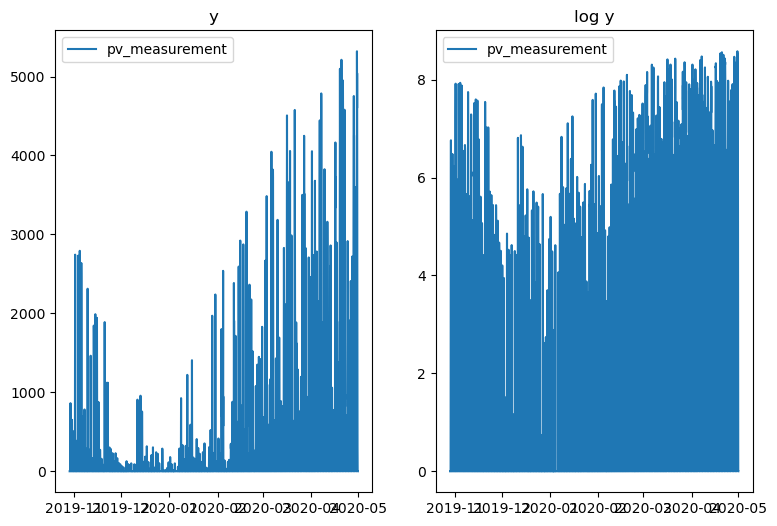

In [217]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 6))
axes = axes.flatten()

sns.lineplot(data=train_a.loc[A_index19_est.intersection(train_a.index)], ax=axes[0])#, kde=True)
axes[0].set_title("y")

sns.lineplot(data=np.log(train_a.loc[A_index19_est.intersection(train_a.index)] + 1), ax=axes[1])#, kde=True)
axes[1].set_title("log y")

Text(0.5, 1.0, 'log y')

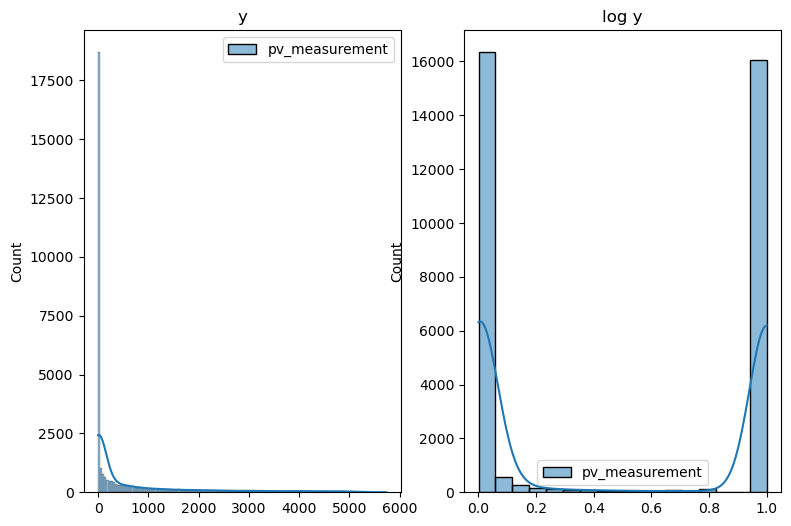

In [218]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 6))
axes = axes.flatten()

sns.histplot(data=train_a, ax=axes[0], kde=True)
axes[0].set_title("y")

sns.histplot(data=(1/(train_a + 1)), ax=axes[1], kde=True)
axes[1].set_title("log y")

In [ ]:
max(

<Axes: ylabel='Count'>

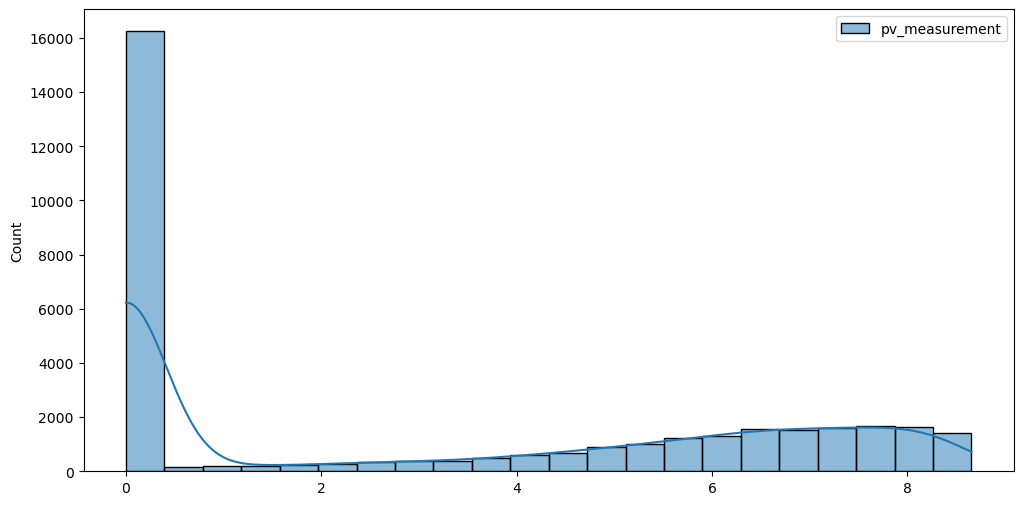

In [205]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))



<Axes: ylabel='Count'>

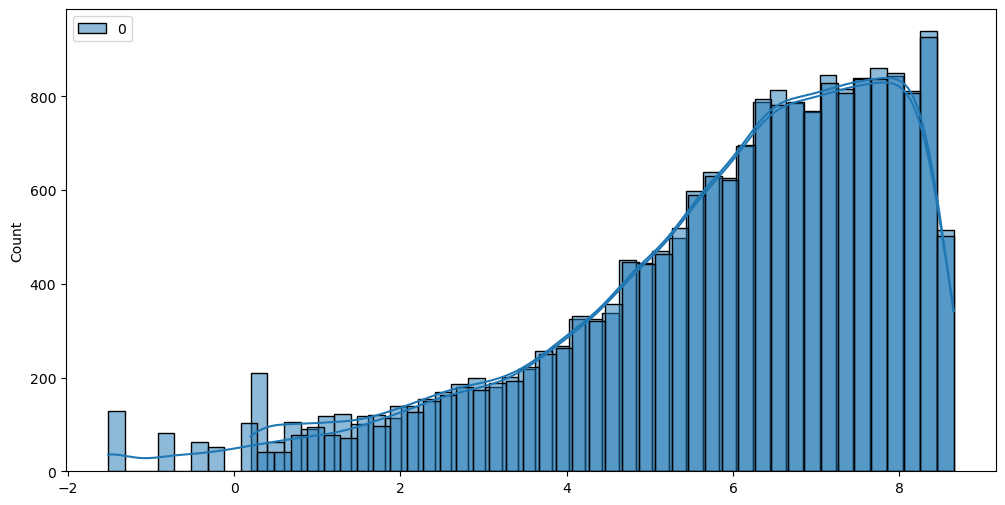

In [199]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

sns.histplot(data=np.log(train_a[train_a>0]+1), kde=True)
sns.histplot(data=np.log(train_a[train_a>0]), kde=True)

In [189]:
train_a.mean(), train_a.var()

(pv_measurement    630.594707
 dtype: float64,
 pv_measurement    1.359328e+06
 dtype: float64)

In [190]:
train_a[train_a>0].mean(), train_a[train_a>0].var()

(pv_measurement    1191.123336
 dtype: float64,
 pv_measurement    1.899992e+06
 dtype: float64)

In [192]:
np.log(train_a[train_a>0]+1).mean(),np.log(train_a[train_a>0]+1).var()

(pv_measurement    5.952068
 dtype: float64,
 pv_measurement    3.96674
 dtype: float64)

In [ ]:
i = 1

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

#sns.histplot(data=X_train_observed_a_est.loc[A_index21_est].iloc[:,i], kde=True)
sns.histplot(data=X_train_observed_a_est.iloc[:,i], kde=True)
sns.histplot(data=X_train_estimated_a.iloc[:,i], kde=True)
sns.histplot(data=(T), kde=True)

X_train_estimated_a.iloc[:,i].mean(), 
X_train_estimated_a.iloc[:,i].mean(), 

In [118]:
def shift(X_obs, X_est):
    mu_obs, sd_obs = X_obs.mean(), np.sqrt(X_obs.var())
    mu_est, sd_est = X_est.mean(), np.sqrt(X_est.var())
    X_est = (X_est - mu_est) / sd_est
    X_est = (X_est * sd_obs) + mu_obs
    return X_est

In [133]:
X_train_observed_a_est.shape[1]

45

In [135]:
for i in range(X_train_observed_a_est.shape[1]):
    X_obs, X_est = X_train_observed_a_est.iloc[:,i], X_train_estimated_a.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_train_estimated_a.iloc[:,i] = X_est_new

In [138]:
X_train_estimated_a.describe()

absolute_humidity_2m:gm3  air_density_2m:kgm3  ceiling_height_agl:m  \
count                       0.0         17576.000000          13657.000000   
mean                        NaN             1.274911           2637.772461   
std                         NaN             0.030898           2350.176758   
min                         NaN             1.203198           -396.065186   
25%                         NaN             1.254607            691.380737   
50%                         NaN             1.272087           2161.066650   
75%                         NaN             1.294707           4063.814697   
max                         NaN             1.369766          11139.538086   

       clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
count           1.757600e+04     17576.000000      15482.000000   
mean            2.380973e+05        66.138184       1654.284424   
std             5.195387e+05       144.738083       1709.451782   
min            -3.537500e+01         0.007393        115.264038   
25%            -3.537500e+01         0.007393        582.435303   
50%            -3.537500e+01         0.007393       1018.277954   
75%             1.380355e+05        37.556519       1996.779541   
max             2.566792e+06       714.444702      10842.527344   

       dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
count     17576.000000    17576.000000   17576.000000      17576.000000   
mean          0.002241      271.204468      20.999399      75597.867188   
std           0.180429        4.681755      42.358231     150318.078125   
min          -0.819424      257.271881      -0.120077       -364.882812   
25%          -0.005080      268.132599      -0.120077       -364.882812   
50%          -0.005080      271.363922      -0.120077       -364.882812   
75%          -0.005080      274.505463      21.058184      73779.705078   
max           0.809264      281.865662     277.786804     980112.000000   

       direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  elevation:m  \
count  17576.000000     1.757600e+04             17576.000000          0.0   
mean      22.697214     8.171021e+04                69.341240          NaN   
std       70.204079     2.487022e+05                33.470005          NaN   
min       -0.137224    -1.992500e+02                 4.866493          NaN   
25%       -0.137224    -1.992500e+02                45.147469          NaN   
50%       -0.137224    -1.992500e+02                84.390762          NaN   
75%        0.572874     9.097664e+03                99.012657          NaN   
max      470.657104     1.674138e+06                99.201324          NaN   

       fresh_snow_12h:cm  fresh_snow_1h:cm  fresh_snow_24h:cm  \
count       17576.000000      17576.000000       17576.000000   
mean            0.112788          0.009382           0.225589   
std             0.703010          0.106435           1.069810   
min            -0.105888         -0.009398          -0.180839   
25%            -0.105888         -0.009398          -0.180839   
50%            -0.105888         -0.009398          -0.180839   
75%            -0.105888         -0.009398          -0.180839   
max             6.822653          2.376090           9.845111   

       fresh_snow_3h:cm  fresh_snow_6h:cm    is_day:idx  is_in_shadow:idx  \
count      17576.000000      17576.000000  17576.000000      17576.000000   
mean           0.028195          0.056415      0.349544          0.694909   
std            0.256300          0.436927      0.476652          0.460406   
min           -0.027480         -0.054858      0.000358         -0.000684   
25%           -0.027480         -0.054858      0.000358         -0.000684   
50%           -0.027480         -0.054858      0.000358          0.999622   
75%           -0.027480         -0.054858      1.000244          0.999622   
max            3.454885          5.277961      1.000244          0.999622   

       msl_pressure:hPa  precip_5min:mm  

In [129]:
T.mean()

1.2749106

<Axes: xlabel='time'>

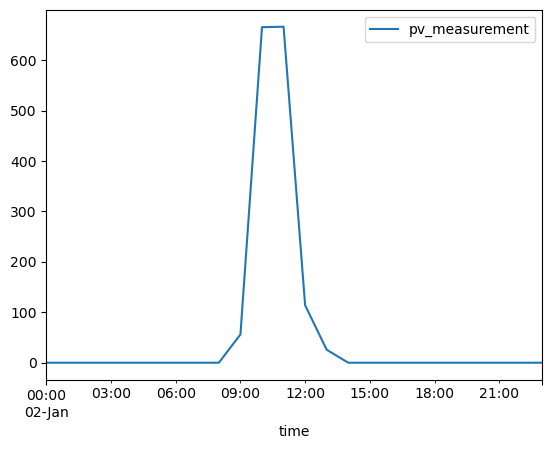

In [20]:
y.loc['2021-01-02'].resample('H').mean().plot()

(<Axes: xlabel='date_forecast'>, <Axes: xlabel='time'>)

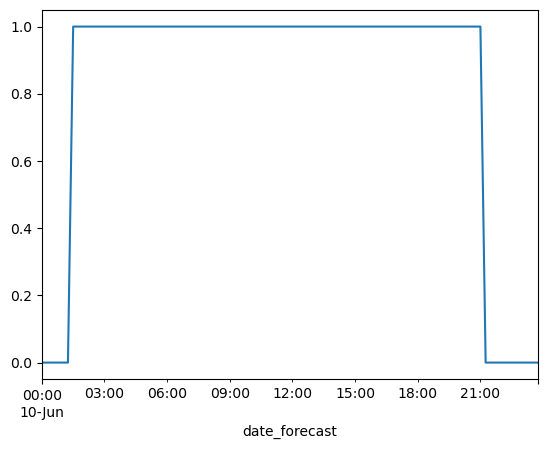

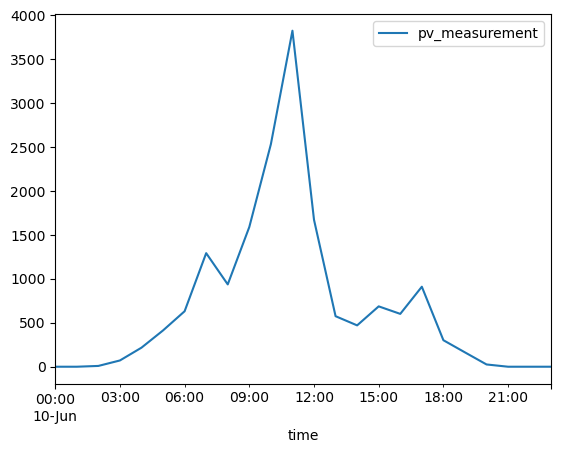

In [70]:
X_obs['is_day:idx'].loc['2019-06-10'].plot(), y.loc['2019-06-10'].plot()

In [71]:
y_

pv_measurement
time                               
2019-06-02 22:00:00               0
2019-06-02 23:00:00               0
2019-06-03 00:00:00               0
2019-06-03 01:00:00               0
2019-06-03 02:00:00               0
...                             ...
2023-04-30 19:00:00               0
2023-04-30 20:00:00               0
2023-04-30 21:00:00               0
2023-04-30 22:00:00               0
2023-04-30 23:00:00               0

[34085 rows x 1 columns]

<Axes: xlabel='time'>

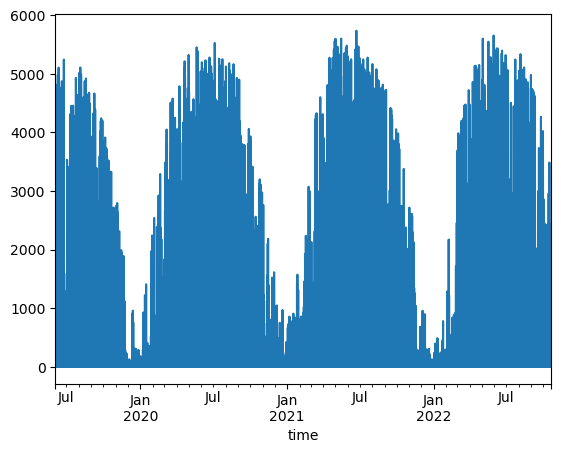

In [56]:
y.loc['2019-06-02 22:00:00':'2022-10-21 01:00:00']['pv_measurement'].plot()

In [54]:
np.dot(X_obs['is_day:idx'].loc['2019-06-02 22:00:00':'2022-10-21 00:00:00'][::4], y.loc['2019-06-02 22:00:00':'2022-10-21 01:00:00']['pv_measurement'])

19963312.59999999

<Axes: xlabel='time'>

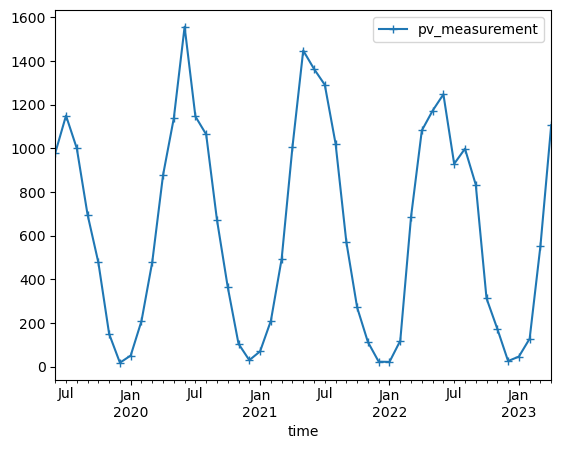

In [194]:
y.loc[:].resample('M').mean().plot(marker='+')

<Axes: xlabel='time'>

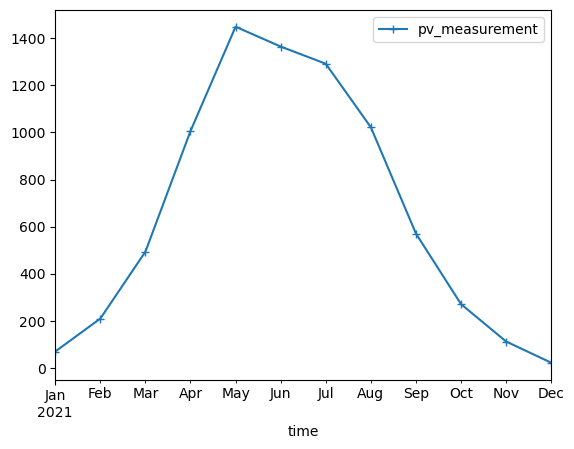

In [189]:
y.loc['2021'].resample('M').mean().plot(marker='+')

(<Axes: xlabel='time'>, <Axes: xlabel='time'>)

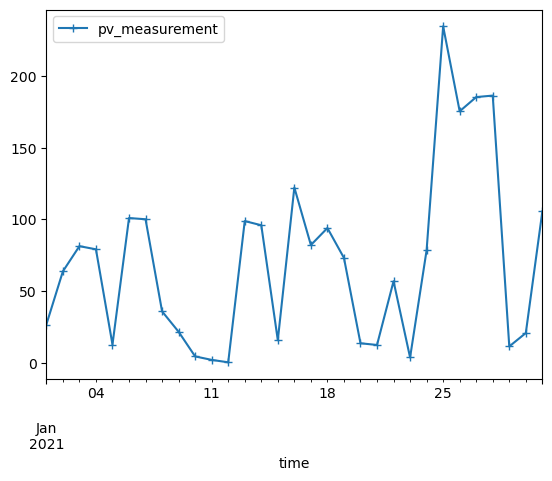

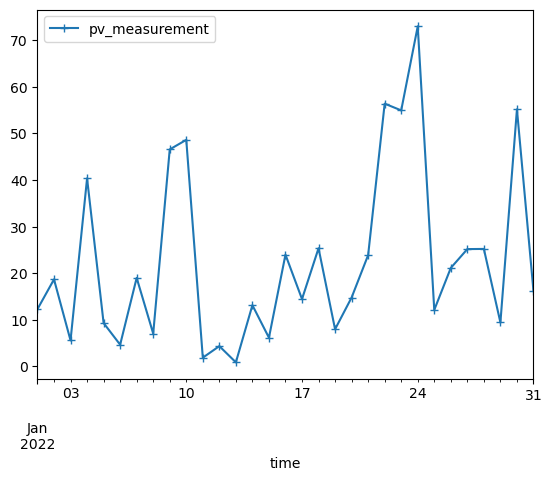

In [192]:
y.loc['2021-01'].resample('D').mean().plot(marker='+'),y.loc['2022-01'].resample('D').mean().plot(marker='+')

(<AxesSubplot: xlabel='date_forecast'>,)

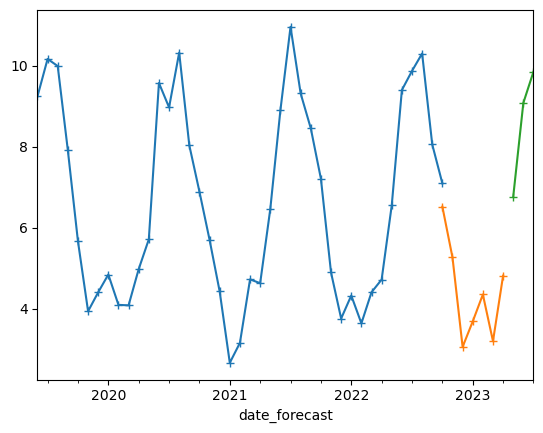

In [41]:
X_obs['absolute_humidity_2m:gm3'].resample('M').mean().plot(marker='+'), 
X_est['absolute_humidity_2m:gm3'].resample('M').mean().plot(marker='+'), 
X_test['absolute_humidity_2m:gm3'].resample('M').mean().plot(marker='+'), 

Idea : apply a linear transformation to obtain a X_obs based on X_est, for the same seasonality. 

(<AxesSubplot: xlabel='date_forecast'>,)

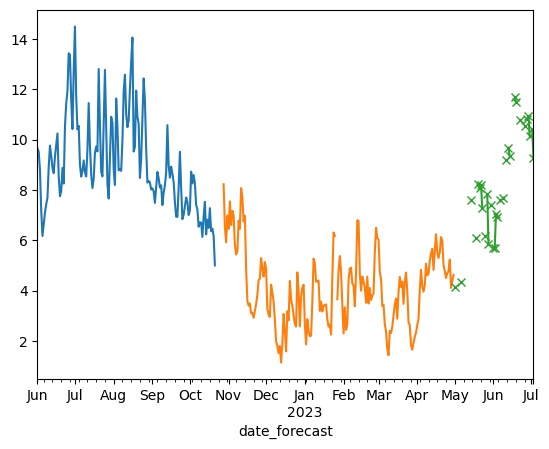

In [47]:
X_obs['absolute_humidity_2m:gm3'].loc['2022-06':].resample('D').mean().plot(),
X_est['absolute_humidity_2m:gm3'].resample('D').mean().plot(),
X_test['absolute_humidity_2m:gm3'].resample('D').mean().plot(marker='x'),

In [6]:
X_obs.index

DatetimeIndex(['2019-06-02 22:00:00', '2019-06-02 22:15:00',
               '2019-06-02 22:30:00', '2019-06-02 22:45:00',
               '2019-06-02 23:00:00', '2019-06-02 23:15:00',
               '2019-06-02 23:30:00', '2019-06-02 23:45:00',
               '2019-06-03 00:00:00', '2019-06-03 00:15:00',
               ...
               '2022-10-20 22:45:00', '2022-10-20 23:00:00',
               '2022-10-20 23:15:00', '2022-10-20 23:30:00',
               '2022-10-20 23:45:00', '2022-10-21 00:00:00',
               '2022-10-21 00:15:00', '2022-10-21 00:30:00',
               '2022-10-21 00:45:00', '2022-10-21 01:00:00'],
              dtype='datetime64[ns]', name='date_forecast', length=118669, freq=None)

(<Axes: xlabel='date_forecast'>, <Axes: xlabel='date_forecast'>)

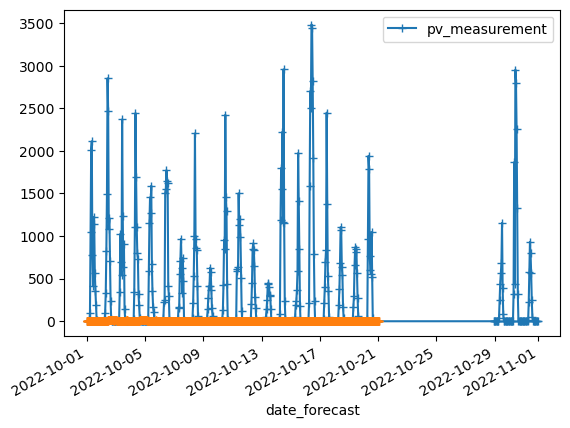

In [98]:
y.loc['2022-10'].plot(marker='+'), X_obs['absolute_humidity_2m:gm3'].loc['2022-10'].plot(marker='+')

(<AxesSubplot: xlabel='date_forecast'>,)

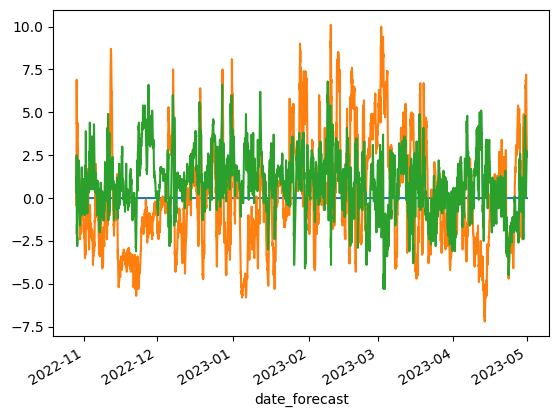

In [116]:
X_est['wind_speed_w_1000hPa:ms'].plot(), 
X_est['wind_speed_u_10m:ms'].plot(), 
X_est['wind_speed_v_10m:ms'].plot(), 

<AxesSubplot: xlabel='time'>

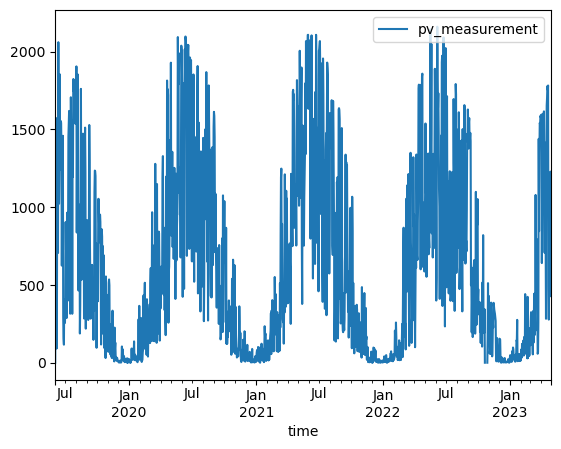

In [279]:
y.resample('d').mean().plot()

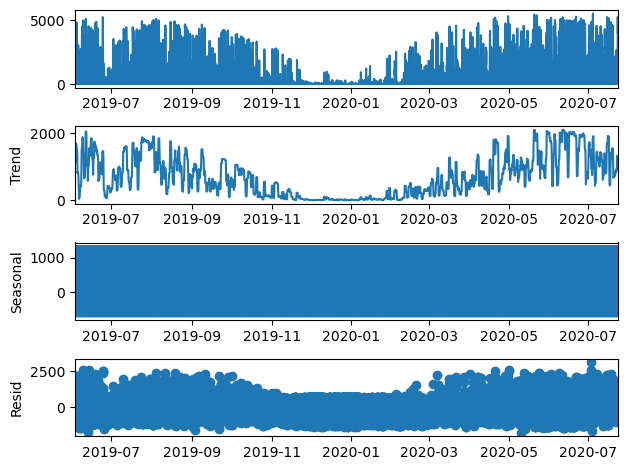

In [179]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = y.iloc[:10000]
result = seasonal_decompose(series, model='additive') # 'multiplicative'
result.plot()
plt.show()

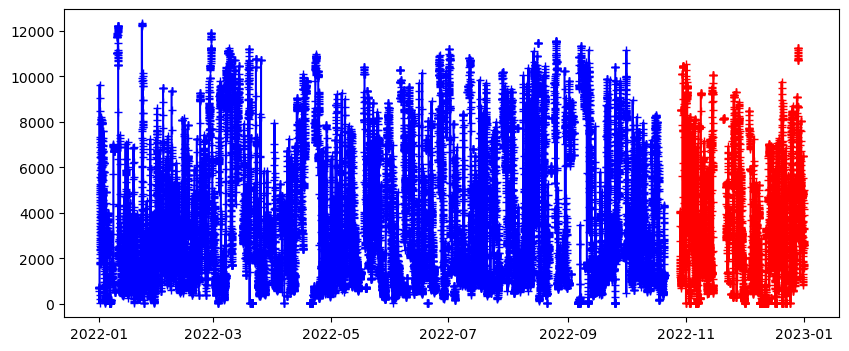

In [3]:
fig = plt.figure()
fig.set_size_inches(10, 4)
# Tracer le premier graphique dans la première colonne
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_est['ceiling_height_agl:m'].loc['2022'], color='r',marker='+')
ax.plot(X_obs['ceiling_height_agl:m'].loc['2022'], color='b',marker='+')

/var/folders/c6/6v_rvxyj6rj6m70q6t5cvn3w0000gn/T/ipykernel_2505/140188494.py:4: UserWarning: When passing multiple axes, layout keyword is ignored.
  X_obs.plot(subplots=True, layout=(9, 5), ax=axes)


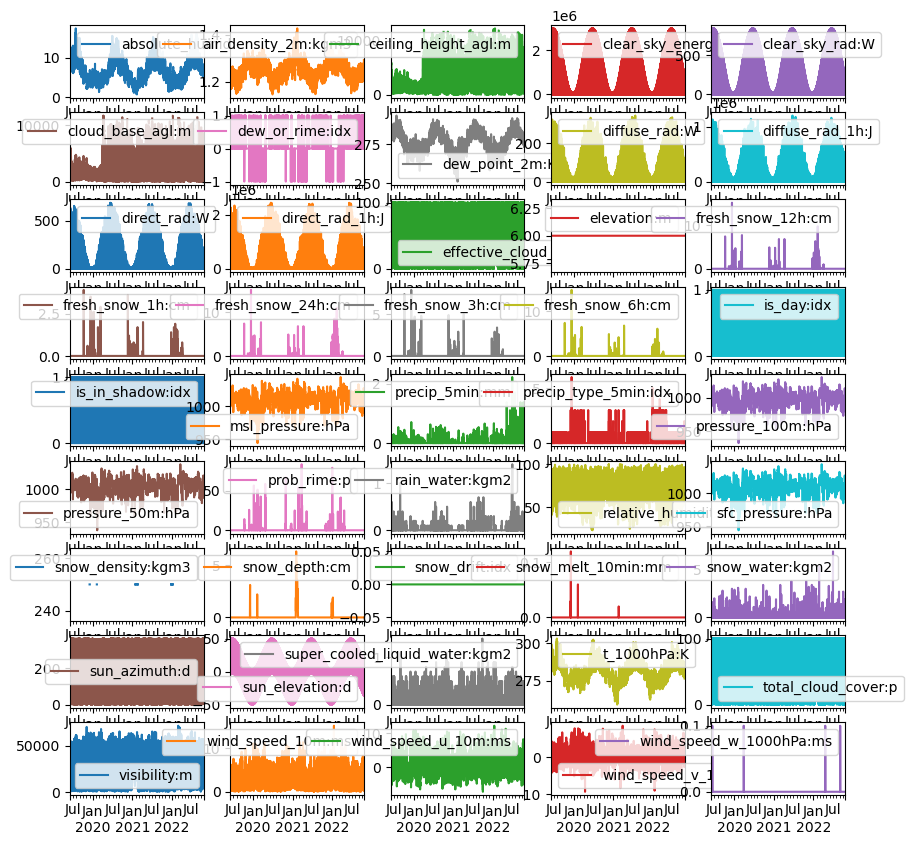

In [61]:
fig, axes = plt.subplots(9, 5, figsize=(10, 10))

# Assuming X_obs is a DataFrame or Series
X_obs.plot(subplots=True, layout=(9, 5), ax=axes)

# Remove x-axis and y-axis labels from all subplots
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.savefig('test.png')
plt.show()

## Correlations = delete some features

In [118]:
np.var(X).sort_values()

elevation:m                       0.000000e+00
snow_density:kgm3                 0.000000e+00
snow_drift:idx                    0.000000e+00
wind_speed_w_1000hPa:ms           2.358967e-06
snow_melt_10min:mm                3.535439e-06
air_density_2m:kgm3               1.320849e-03
precip_5min:mm                    1.488095e-03
rain_water:kgm2                   2.346108e-03
fresh_snow_1h:cm                  5.789223e-03
super_cooled_liquid_water:kgm2    1.265533e-02
fresh_snow_3h:cm                  3.320738e-02
dew_or_rime:idx                   3.649161e-02
snow_water:kgm2                   6.680970e-02
fresh_snow_6h:cm                  9.418421e-02
precip_type_5min:idx              1.422511e-01
snow_depth:cm                     1.679445e-01
fresh_snow_12h:cm                 2.401482e-01
is_day:idx                        2.495251e-01
is_in_shadow:idx                  2.498085e-01
fresh_snow_24h:cm                 5.565313e-01
wind_speed_10m:ms                 3.212296e+00
wind_speed_v_

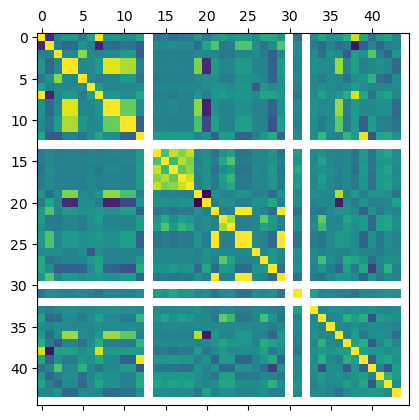

In [62]:
plt.matshow(X_est.drop('date_calc', axis=1).corr())

In [120]:
X_est.drop('date_calc', axis=1).corr()#.sort_values()

absolute_humidity_2m:gm3  air_density_2m:kgm3  \
absolute_humidity_2m:gm3                        1.000000            -0.690102   
air_density_2m:kgm3                            -0.690102             1.000000   
ceiling_height_agl:m                           -0.045890            -0.067123   
clear_sky_energy_1h:J                           0.102485            -0.245232   
clear_sky_rad:W                                 0.097802            -0.231391   
cloud_base_agl:m                               -0.111364             0.069202   
dew_or_rime:idx                                 0.193974            -0.064271   
dew_point_2m:K                                  0.982592            -0.727686   
diffuse_rad:W                                   0.074830            -0.229981   
diffuse_rad_1h:J                                0.080729            -0.244088   
direct_rad:W                                    0.019649            -0.158725   
direct_rad_1h:J                                 0.022738            -0.172310   
effective_cloud_cover:p                         0.238624            -0.326939   
elevation:m                                          NaN                  NaN   
fresh_snow_12h:cm                              -0.127256             0.004857   
fresh_snow_1h:cm                               -0.083282             0.005847   
fresh_snow_24h:cm                              -0.166690             0.042675   
fresh_snow_3h:cm                               -0.095418             0.003409   
fresh_snow_6h:cm                               -0.106228             0.001027   
is_day:idx                                      0.091862            -0.216830   
is_in_shadow:idx                               -0.099436             0.220163   
msl_pressure:hPa                                0.108173             0.477907   
precip_5min:mm                                  0.176984            -0.132591   
precip_type_5min:idx                            0.071394            -0.078725   
pressure_100m:hPa                               0.120442             0.467799   
pressure_50m:hPa                                0.113266             0.475168   
prob_rime:p                                     0.003416             0.033831   
rain_water:kgm2                                 0.254522            -0.165054   
relative_humidity_1000hPa:p                     0.246827             0.046587   
sfc_pressure:hPa                                0.106184             0.482417   
snow_density:kgm3                                    NaN                  NaN   
snow_depth:cm                                  -0.171660             0.043254   
snow_drift:idx                                       NaN                  NaN   
snow_melt_10min:mm                              0.010174            -0.105856   
snow_water:kgm2                                 0.206981            -0.242391   
sun_azimuth:d                                   0.032640            -0.059026   
sun_elevation:d                                 0.113055            -0.222312   
super_cooled_liquid_water:kgm2                  0.297441            -0.131118   
t_1000hPa:K                                     0.878075            -0.818526   
total_cloud_cover:p                             0.240667            -0.313371   
visibility:m                                   -0.188444            -0.015075   
wind_speed_10m:ms                               0.111328            -0.277502   
wind_speed_u_10m:ms                             0.210022            -0.067851   
wind_speed_v_10m:ms                            -0.013165            -0.036435   
wind_speed_w_1000hPa:ms                              NaN                  NaN   

                                ceiling_height_agl:m  clear_sky_energy_1h:J  \
absolute_humidity_2m:gm3                   -0.045890               0.102485   
air_density_2m:kgm3                        -0.067123              -0.245232   
ceiling_height_agl:m                        1.000000              -0

<AxesSubplot: >

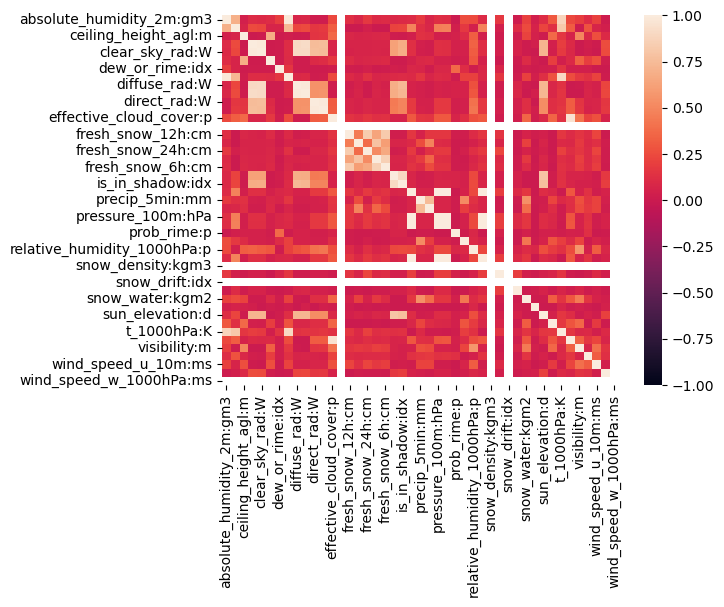

In [136]:
sns.heatmap(np.abs(X_est.drop('date_calc', axis=1).corr()), vmin=-1, vmax=1)#, annot=True)

<AxesSubplot: >

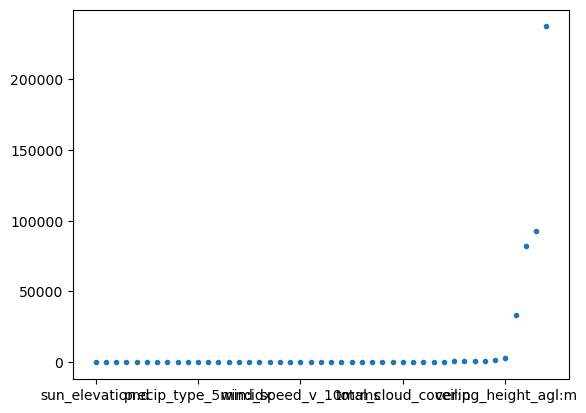

In [71]:
X_est.drop('date_calc', axis=1).mean().sort_values().plot(style='.') # .sort_values()

array([[<AxesSubplot: xlabel='clear_sky_energy_1h:J', ylabel='clear_sky_energy_1h:J'>,
        <AxesSubplot: xlabel='clear_sky_rad:W', ylabel='clear_sky_energy_1h:J'>],
       [<AxesSubplot: xlabel='clear_sky_energy_1h:J', ylabel='clear_sky_rad:W'>,
        <AxesSubplot: xlabel='clear_sky_rad:W', ylabel='clear_sky_rad:W'>]],
      dtype=object)

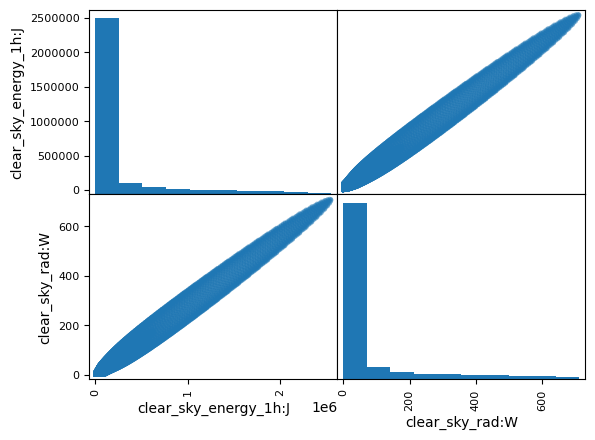

In [142]:
pd.plotting.scatter_matrix(X_est.drop('date_calc', axis=1).iloc[:,3:5])#.corr()

In [148]:
X.columns

Index(['absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms', 'wind_speed_v_10

array([[<AxesSubplot: xlabel='diffuse_rad:W', ylabel='diffuse_rad:W'>,
        <AxesSubplot: xlabel='clear_sky_energy_1h:J', ylabel='diffuse_rad:W'>],
       [<AxesSubplot: xlabel='diffuse_rad:W', ylabel='clear_sky_energy_1h:J'>,
        <AxesSubplot: xlabel='clear_sky_energy_1h:J', ylabel='clear_sky_energy_1h:J'>]],
      dtype=object)

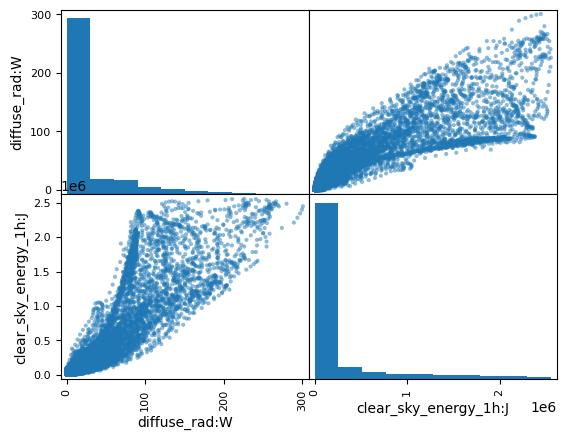

In [154]:
pd.plotting.scatter_matrix(X_est[['diffuse_rad:W', 'clear_sky_energy_1h:J']])

In [145]:
X.drop(['pv_measurement'], axis=1).corr()

absolute_humidity_2m:gm3  air_density_2m:kgm3  \
absolute_humidity_2m:gm3                        1.000000            -0.803326   
air_density_2m:kgm3                            -0.803326             1.000000   
ceiling_height_agl:m                            0.076754            -0.149976   
clear_sky_energy_1h:J                           0.352669            -0.474399   
clear_sky_rad:W                                 0.349790            -0.463730   
cloud_base_agl:m                                0.020805            -0.118813   
dew_or_rime:idx                                 0.122575            -0.058673   
dew_point_2m:K                                  0.974811            -0.838085   
diffuse_rad:W                                   0.285767            -0.403882   
diffuse_rad_1h:J                                0.291530            -0.416646   
direct_rad:W                                    0.240221            -0.396005   
direct_rad_1h:J                                 0.244153            -0.410888   
effective_cloud_cover:p                         0.021417            -0.066099   
elevation:m                                          NaN                  NaN   
fresh_snow_12h:cm                              -0.118776             0.062341   
fresh_snow_1h:cm                               -0.068740             0.043633   
fresh_snow_24h:cm                              -0.148366             0.074660   
fresh_snow_3h:cm                               -0.084930             0.052358   
fresh_snow_6h:cm                               -0.098726             0.058248   
is_day:idx                                      0.306243            -0.387462   
is_in_shadow:idx                               -0.318807             0.400142   
msl_pressure:hPa                                0.147742             0.280090   
precip_5min:mm                                  0.066528            -0.081588   
precip_type_5min:idx                           -0.020847            -0.013175   
pressure_100m:hPa                               0.165235             0.263772   
pressure_50m:hPa                                0.154298             0.275671   
prob_rime:p                                    -0.056014             0.072178   
rain_water:kgm2                                 0.259310            -0.161855   
relative_humidity_1000hPa:p                     0.160696             0.142590   
sfc_pressure:hPa                                0.143369             0.287497   
snow_density:kgm3                                    NaN                  NaN   
snow_depth:cm                                  -0.203651             0.316647   
snow_drift:idx                                       NaN                  NaN   
snow_melt_10min:mm                             -0.014042             0.014537   
snow_water:kgm2                                 0.033415            -0.063243   
sun_azimuth:d                                   0.023750            -0.064139   
sun_elevation:d                                 0.432066            -0.504546   
super_cooled_liquid_water:kgm2                  0.107140            -0.061943   
t_1000hPa:K                                     0.899403            -0.914845   
total_cloud_cover:p                             0.042977            -0.100941   
visibility:m                                   -0.157191            -0.011992   
wind_speed_10m:ms                              -0.156987            -0.017662   
wind_speed_u_10m:ms                             0.050194             0.025952   
wind_speed_v_10m:ms                            -0.256651             0.141692   
wind_speed_w_1000hPa:ms                         0.002927             0.003173   

                                ceiling_height_agl:m  clear_sky_energy_1h:J  \
absolute_humidity_2m:gm3                    0.076754               0.352669   
air_density_2m:kgm3                        -0.149976              -0.474399   
ceiling_height_agl:m                        1.000000               0

<AxesSubplot: >

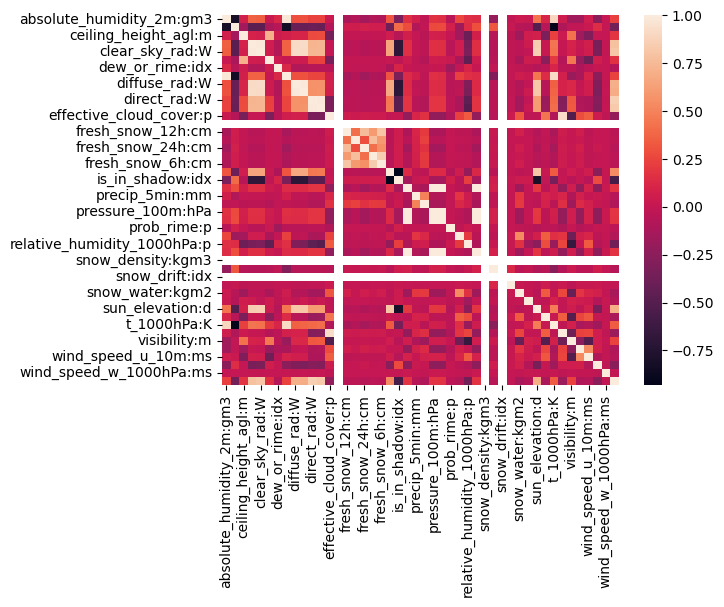

In [116]:
sns.heatmap(X.corr())

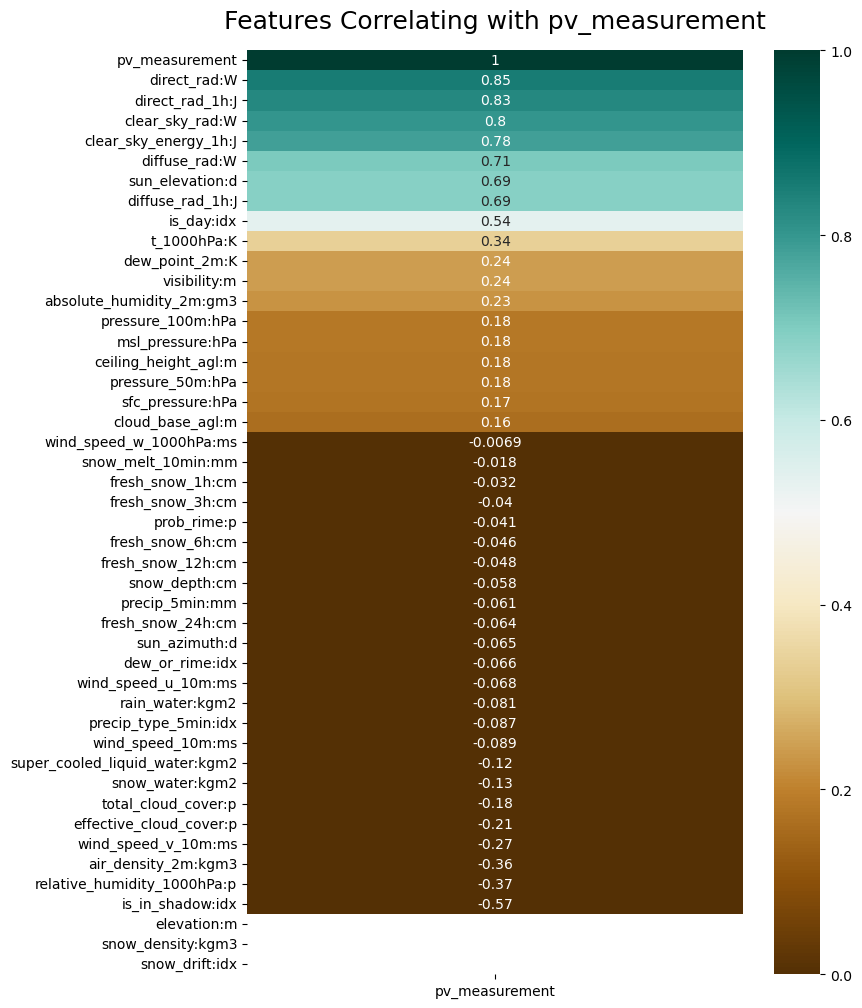

In [73]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(X.corr()[['pv_measurement']].sort_values(by='pv_measurement', ascending=False), vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with pv_measurement', fontdict={'fontsize':18}, pad=16);

In [ ]:
[('absolute_humidity_2m:gm3', 'dew_point_2m:K'), 23,24
 
 ('clear_sky_energy_1h:J', 'clear_sky_rad:W'), 78,80
 ('diffuse_rad:W', 'diffuse_rad_1h:J'), 71, 69
 ('direct_rad:W', 'direct_rad_1h:J'), 85, 83
 
 ('effective_cloud_cover:p', 'total_cloud_cover:p'), -21, -18
 
 ('msl_pressure:hPa', 'pressure_100m:hPa'), 18,18, 
 ('msl_pressure:hPa', 'pressure_50m:hPa'), 18, 18
 ('msl_pressure:hPa', 'sfc_pressure:hPa'), 18, 17
 ('pressure_100m:hPa', 'pressure_50m:hPa'), 18, 18
 ('pressure_100m:hPa', 'sfc_pressure:hPa'),18 17
 ('pressure_50m:hPa', 'sfc_pressure:hPa')] 18 17

In [1]:
abs(X.corr()[['pv_measurement']])

NameError: name 'X' is not defined

In [8]:
X_est

date_calc  absolute_humidity_2m:gm3  \
date_forecast                                                        
2022-10-28 22:00:00  2022-10-27 07:00:18                       8.4   
2022-10-28 22:15:00  2022-10-27 07:00:18                       8.4   
2022-10-28 22:30:00  2022-10-27 07:00:18                       8.3   
2022-10-28 22:45:00  2022-10-27 07:00:18                       8.3   
2022-10-28 23:00:00  2022-10-27 07:00:18                       8.2   
...                                  ...                       ...   
2023-04-30 22:45:00  2023-04-29 07:00:05                       4.5   
2023-04-30 23:00:00  2023-04-29 07:00:05                       4.5   
2023-04-30 23:15:00  2023-04-29 07:00:05                       4.5   
2023-04-30 23:30:00  2023-04-29 07:00:05                       4.5   
2023-04-30 23:45:00  2023-04-29 07:00:05                       4.5   

                     air_density_2m:kgm3  ceiling_height_agl:m  \
date_forecast                                                    
2022-10-28 22:00:00                1.233                1425.1   
2022-10-28 22:15:00                1.233                2085.9   
2022-10-28 22:30:00                1.233                2746.6   
2022-10-28 22:45:00                1.233                3407.4   
2022-10-28 23:00:00                1.233                4068.2   
...                                  ...                   ...   
2023-04-30 22:45:00                1.281                1173.9   
2023-04-30 23:00:00                1.281                1054.2   
2023-04-30 23:15:00                1.281                1435.8   
2023-04-30 23:30:00                1.281                1817.4   
2023-04-30 23:45:00                1.281                2198.9   

                     clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
date_forecast                                                                   
2022-10-28 22:00:00                    0.0              0.0            1211.7   
2022-10-28 22:15:00                    0.0              0.0            1560.5   
2022-10-28 22:30:00                    0.0              0.0            1909.4   
2022-10-28 22:45:00                    0.0              0.0            2258.2   
2022-10-28 23:00:00                    0.0              0.0            2607.0   
...                                    ...              ...               ...   
2023-04-30 22:45:00                    0.0              0.0             536.5   
2023-04-30 23:00:00                    0.0              0.0             542.4   
2023-04-30 23:15:00                    0.0              0.0             531.8   
2023-04-30 23:30:00                    0.0              0.0             521.2   
2023-04-30 23:45:00                    0.0              0.0             510.7   

                     dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  \
date_forecast                                                         
2022-10-28 22:00:00              1.0           281.4            0.0   
2022-10-28 22:15:00              1.0           281.3            0.0   
2022-10-28 22:30:00              1.0           281.2            0.0   
2022-10-28 22:45:00              1.0           281.2            0.0   
2022-10-28 23:00:00              1.0           281.1            0.0   
...                              ...             ...            ...   
2023-04-30 22:45:00              0.0           272.3            0.0   
2023-04-30 23:00:00              0.0           272.2            0.0   
2023-04-30 23:15:00              0.0           272.3            0.0   
2023-04-30 23:30:00              0.0           272.3            0.0   
2023-04-30 23:45:00              0.0           272.3            0.0   

                     diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
date_forecast                                                          
2022-10-28 22:00:00               0.0           0.0              0.0   
2022-10-28 22:15:00               0.0           0.0              0.

In [97]:
X_train_estimated_a.drop(['date_calc'], axis=1, inplace=True)
X_train_estimated_a.set_index(['date_forecast'], inplace=True)

X_train_estimated_b.drop(['date_calc'], axis=1, inplace=True)
X_train_estimated_b.set_index(['date_forecast'], inplace=True)

X_train_estimated_c.drop(['date_calc'], axis=1, inplace=True)
X_train_estimated_c.set_index(['date_forecast'], inplace=True)

In [100]:
X_train_observed_a.set_index(['date_forecast'], inplace=True)
X_train_observed_b.set_index(['date_forecast'], inplace=True)
X_train_observed_c.set_index(['date_forecast'], inplace=True)

In [106]:
X_test_estimated_a.drop(['date_calc'], axis=1, inplace=True)
X_test_estimated_a.set_index(['date_forecast'], inplace=True)

X_test_estimated_b.drop(['date_calc'], axis=1, inplace=True)
X_test_estimated_b.set_index(['date_forecast'], inplace=True)

X_test_estimated_c.drop(['date_calc'], axis=1, inplace=True)
X_test_estimated_c.set_index(['date_forecast'], inplace=True)

In [122]:
def correlation(df, threshold=.95):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column]>threshold)]
    return set(to_drop)

In [123]:
correlation(X_train_estimated_a) &correlation(X_train_observed_a)&correlation(X_test_estimated_a)

{'clear_sky_rad:W',
 'dew_point_2m:K',
 'diffuse_rad_1h:J',
 'direct_rad_1h:J',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'sfc_pressure:hPa'}

In [28]:
X_obs.drop(X_obs[to_drop], axis=1)

absolute_humidity_2m:gm3  air_density_2m:kgm3  \
date_forecast                                                        
2019-06-02 22:00:00                       7.7                1.230   
2019-06-02 22:15:00                       7.7                1.229   
2019-06-02 22:30:00                       7.7                1.228   
2019-06-02 22:45:00                       7.7                1.226   
2019-06-02 23:00:00                       7.7                1.225   
...                                       ...                  ...   
2022-10-21 00:00:00                       5.0                1.292   
2022-10-21 00:15:00                       5.0                1.292   
2022-10-21 00:30:00                       5.0                1.292   
2022-10-21 00:45:00                       5.0                1.292   
2022-10-21 01:00:00                       5.0                1.292   

                     ceiling_height_agl:m  clear_sky_energy_1h:J  \
date_forecast                                                      
2019-06-02 22:00:00                1744.9                    0.0   
2019-06-02 22:15:00                1734.0                    0.0   
2019-06-02 22:30:00                1723.5                    0.0   
2019-06-02 22:45:00                1713.4                    0.0   
2019-06-02 23:00:00                1703.6                    0.0   
...                                   ...                    ...   
2022-10-21 00:00:00                   NaN                    0.0   
2022-10-21 00:15:00                   NaN                    0.0   
2022-10-21 00:30:00                   NaN                    0.0   
2022-10-21 00:45:00                   NaN                    0.0   
2022-10-21 01:00:00                   NaN                    0.0   

                     cloud_base_agl:m  dew_or_rime:idx  diffuse_rad:W  \
date_forecast                                                           
2019-06-02 22:00:00            1744.9              0.0            0.0   
2019-06-02 22:15:00            1734.0              0.0            0.0   
2019-06-02 22:30:00            1723.5              0.0            0.0   
2019-06-02 22:45:00            1713.4              0.0            0.0   
2019-06-02 23:00:00            1703.6              0.0            0.0   
...                               ...              ...            ...   
2022-10-21 00:00:00               NaN              0.0            0.0   
2022-10-21 00:15:00               NaN              0.0            0.0   
2022-10-21 00:30:00               NaN              0.0            0.0   
2022-10-21 00:45:00               NaN              0.0            0.0   
2022-10-21 01:00:00               NaN              0.0            0.0   

                     direct_rad:W  effective_cloud_cover:p  elevation:m  \
date_forecast                                                             
2019-06-02 22:00:00           0.0                     98.7          6.0   
2019-06-02 22:15:00           0.0                     99.0          6.0   
2019-06-02 22:30:00           0.0                     99.2          6.0   
2019-06-02 22:45:00           0.0                     99.4          6.0   
2019-06-02 23:00:00           0.0                     99.6          6.0   
...                           ...                      ...          ...   
2022-10-21 00:00:00           0.0                      2.8          6.0   
2022-10-21 00:15:00           0.0                      2.3          6.0   
2022-10-21 00:30:00           0.0                      1.7          6.0   
2022-10-21 00:45:00           0.0                      1.1          6.0   
2022-10-21 01:00:00           0.0                      0.5          6.0   

                     fresh_snow_12h:cm  fresh_snow_1h:cm  fresh_snow_24h:cm  \
date_forecast                                                                 
2019-06-02 22:00:00                0.0               0.0                0.0   
2019-06-02 22:15:00                0.0               0.0      

## One hot encoding

<AxesSubplot: >

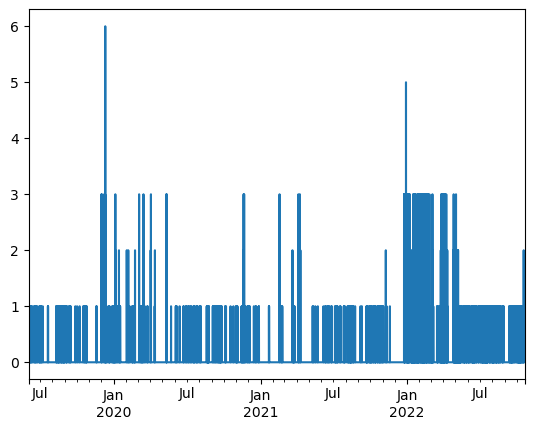

In [ ]:
X['precip_type_5min:idx'].plot()

In [147]:
idx = ['dew_or_rime:idx', 
       'is_day:idx', 
       'is_in_shadow:idx',
       'precip_type_5min:idx',
       'snow_drift:idx']

array([[<AxesSubplot: title={'center': 'dew_or_rime:idx'}>,
        <AxesSubplot: title={'center': 'is_day:idx'}>],
       [<AxesSubplot: title={'center': 'is_in_shadow:idx'}>,
        <AxesSubplot: title={'center': 'precip_type_5min:idx'}>],
       [<AxesSubplot: title={'center': 'snow_drift:idx'}>,
        <AxesSubplot: >]], dtype=object)

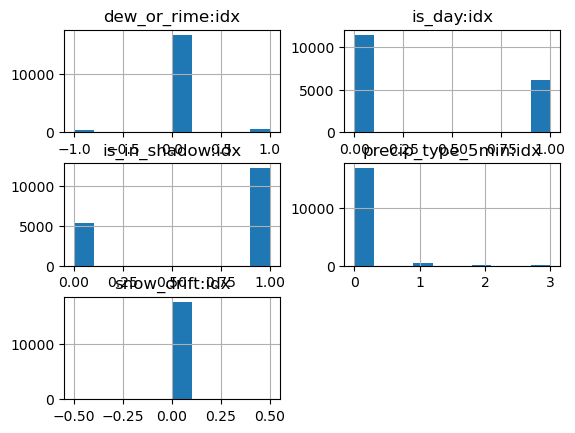

In [155]:
X_est[idx].hist()

In [162]:
X_idx = pd.DataFrame()
for id in idx:
    X_idx[id] = X_est[id].apply(lambda x:str(x))

In [168]:
X_idx = pd.get_dummies(X_idx)

<AxesSubplot: ylabel='date_forecast'>

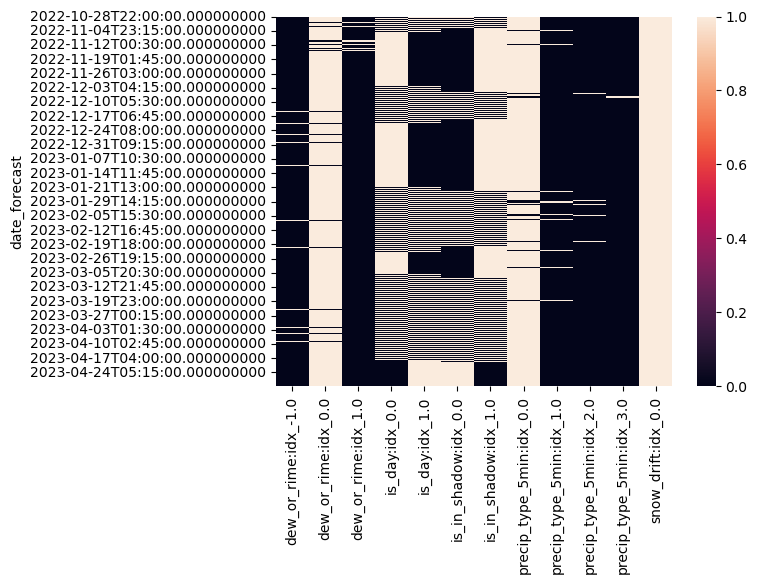

In [177]:
sns.heatmap(X_idx)

## Transformations

array([[<Axes: title={'center': 'absolute_humidity_2m:gm3'}>,
        <Axes: title={'center': 'air_density_2m:kgm3'}>],
       [<Axes: title={'center': 'ceiling_height_agl:m'}>,
        <Axes: title={'center': 'clear_sky_energy_1h:J'}>],
       [<Axes: title={'center': 'clear_sky_rad:W'}>, <Axes: >]],
      dtype=object)

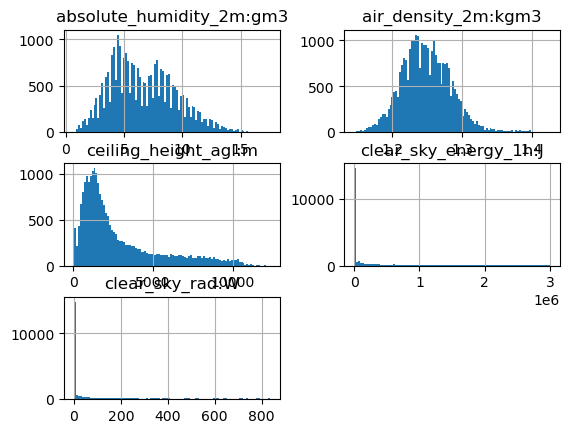

In [29]:
X.iloc[:,:5].hist(bins=100)
#sns.histplot(X.iloc[:,0])

<Axes: xlabel='absolute_humidity_2m:gm3', ylabel='Count'>

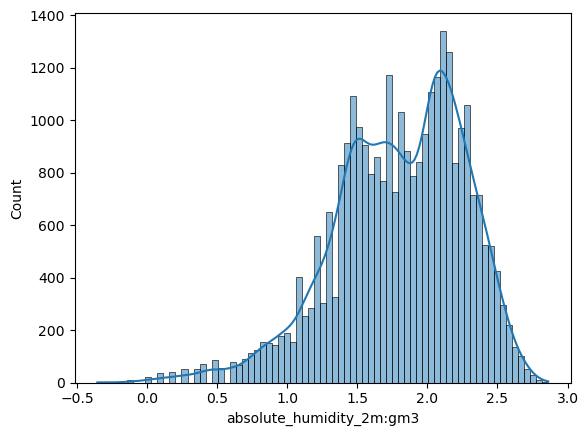

In [30]:
i = 0
feature = X.iloc[:,i]#.resample('M').mean()
#feature = (feature-np.mean(feature))/np.var(feature)
#feature = feature**2
feature = np.log(feature)
#sns.lineplot(feature)
sns.histplot(data=feature, kde=True)
#sns.kdeplot(feature)

In [230]:
features = X_obs.columns

In [234]:
len(y)

34085

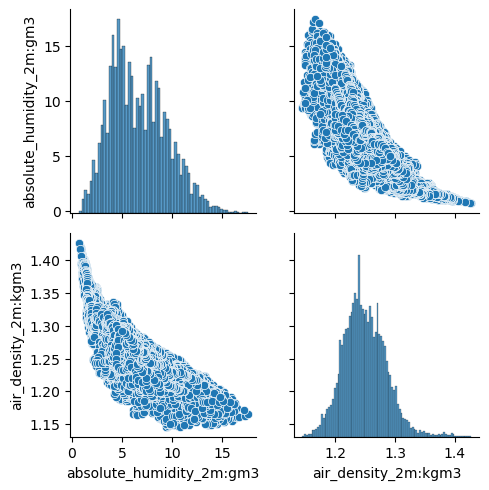

In [243]:
g = sns.PairGrid(X[features[:2]])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [89]:
(X_est.index)[::4]

DatetimeIndex(['2022-10-28 22:00:00', '2022-10-28 23:00:00',
               '2022-10-29 00:00:00', '2022-10-29 01:00:00',
               '2022-10-29 02:00:00', '2022-10-29 03:00:00',
               '2022-10-29 04:00:00', '2022-10-29 05:00:00',
               '2022-10-29 06:00:00', '2022-10-29 07:00:00',
               ...
               '2023-04-30 14:00:00', '2023-04-30 15:00:00',
               '2023-04-30 16:00:00', '2023-04-30 17:00:00',
               '2023-04-30 18:00:00', '2023-04-30 19:00:00',
               '2023-04-30 20:00:00', '2023-04-30 21:00:00',
               '2023-04-30 22:00:00', '2023-04-30 23:00:00'],
              dtype='datetime64[ns]', name='date_forecast', length=4394, freq=None)

In [91]:
y.index

DatetimeIndex(['2019-06-02 22:00:00', '2019-06-02 23:00:00',
               '2019-06-03 00:00:00', '2019-06-03 01:00:00',
               '2019-06-03 02:00:00', '2019-06-03 03:00:00',
               '2019-06-03 04:00:00', '2019-06-03 05:00:00',
               '2019-06-03 06:00:00', '2019-06-03 07:00:00',
               ...
               '2023-04-30 14:00:00', '2023-04-30 15:00:00',
               '2023-04-30 16:00:00', '2023-04-30 17:00:00',
               '2023-04-30 18:00:00', '2023-04-30 19:00:00',
               '2023-04-30 20:00:00', '2023-04-30 21:00:00',
               '2023-04-30 22:00:00', '2023-04-30 23:00:00'],
              dtype='datetime64[ns]', name='time', length=34085, freq=None)

In [92]:
y.loc[X_est.index[::4]]

pv_measurement
date_forecast                      
2022-10-28 22:00:00            0.00
2022-10-28 23:00:00            0.00
2022-10-29 00:00:00            0.00
2022-10-29 01:00:00            0.00
2022-10-29 02:00:00            0.00
...                             ...
2023-04-30 19:00:00            9.02
2023-04-30 20:00:00            0.00
2023-04-30 21:00:00            0.00
2023-04-30 22:00:00            0.00
2023-04-30 23:00:00            0.00

[4394 rows x 1 columns]

## Missing values

<AxesSubplot: ylabel='date_forecast'>

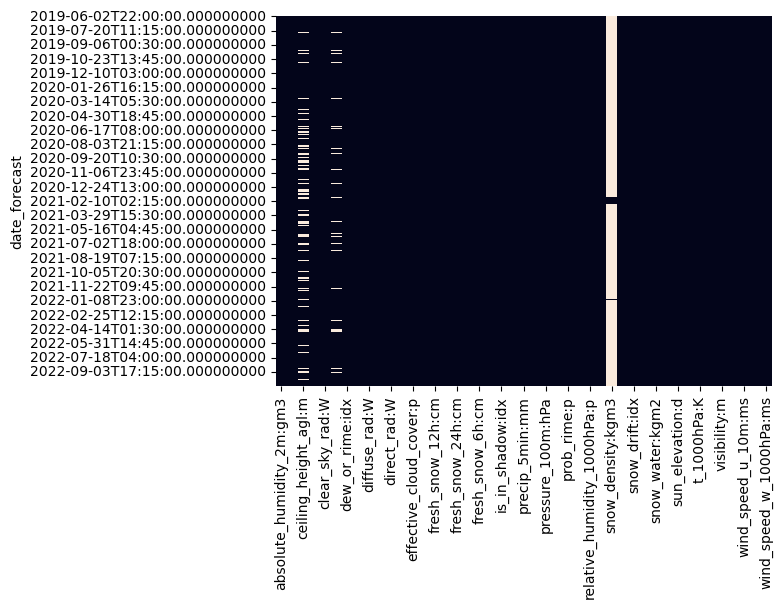

In [283]:
sns.heatmap(X_obs.isna(),cbar=False)

In [94]:
x.isna().mean()*100

ceiling_height_agl:m    18.747103
cloud_base_agl:m         6.797057
snow_density:kgm3       97.704540
dtype: float64

In [90]:
x.describe()

ceiling_height_agl:m  cloud_base_agl:m  snow_density:kgm3
count          96422.000000     110603.000000             2724.0
mean            2907.949201       1737.142229              250.0
std             2570.413231       1815.584087                0.0
min               27.800000         27.900000              250.0
25%             1102.900000        590.700000              250.0
50%             1882.400000       1162.600000              250.0
75%             3969.750000       2079.600000              250.0
max            12328.500000      11688.700000              250.0

array([[<AxesSubplot: title={'center': 'ceiling_height_agl:m'}>,
        <AxesSubplot: title={'center': 'cloud_base_agl:m'}>],
       [<AxesSubplot: title={'center': 'snow_density:kgm3'}>,
        <AxesSubplot: >]], dtype=object)

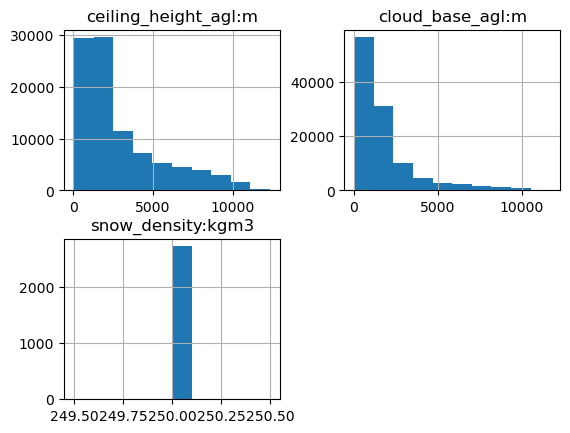

In [102]:
x.hist()

In [98]:
x_new = x.fillna(value={'snow_density:kgm3' : 0,
               'ceiling_height_agl:m' : x['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : x['cloud_base_agl:m'].mean()})

## Normalize

If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.
fit_transform() means to fit() the data, then transform the same data.

In [295]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

‘fit(train)‘ to obtain parameters and ‘transform(test)‘ to apply
‘fit_transform(data) to perform both steps in one

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

In [ ]:
scaler = RobustScaler()
scaled = scaler.fit_transform(data)

## Metric

In [285]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_pred, y_true = 
mean_absolute_error(y_pred, 
                    y_true)

## Submission

In [290]:
test = pd.read_csv('test.csv')
test

id                 time  prediction location
0        0  2023-05-01 00:00:00           0        A
1        1  2023-05-01 01:00:00           0        A
2        2  2023-05-01 02:00:00           0        A
3        3  2023-05-01 03:00:00           0        A
4        4  2023-05-01 04:00:00           0        A
...    ...                  ...         ...      ...
2155  2155  2023-07-03 19:00:00           0        C
2156  2156  2023-07-03 20:00:00           0        C
2157  2157  2023-07-03 21:00:00           0        C
2158  2158  2023-07-03 22:00:00           0        C
2159  2159  2023-07-03 23:00:00           0        C

[2160 rows x 4 columns]

In [291]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

id  prediction
0        0           0
1        1           0
2        2           0
3        3           0
4        4           0
...    ...         ...
2155  2155           0
2156  2156           0
2157  2157           0
2158  2158           0
2159  2159           0

[2160 rows x 2 columns]

In [292]:
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
#sample_submission.to_csv('my_first_submission.csv', index=False)

In [293]:
sample_submission

id  prediction
0        0           0
1        1           0
2        2           0
3        3           0
4        4           0
...    ...         ...
2155  2155           0
2156  2156           0
2157  2157           0
2158  2158           0
2159  2159           0

[2160 rows x 2 columns]

In [294]:
sample_submission.shape[0]/3//24

30.0

In [ ]:
#sample_submission.to_csv('SUB.csv', index=False)

## Models

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

In [ ]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    error = mae(y_test, y_pred)
    print('MAE for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

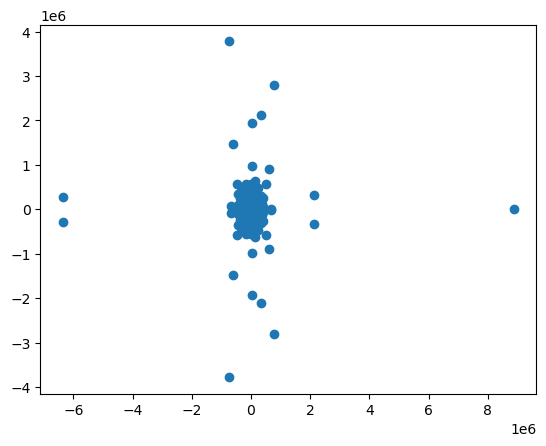

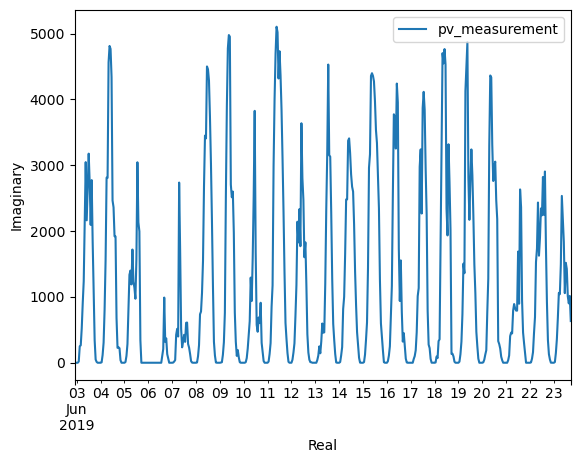

In [76]:
im = dft(y.loc['2019':'2020'])

# plot the complex numbers
plt.scatter(im.real, im.imag)
y.iloc[:500].plot()
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

In [5]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [49]:
N = 1200
T = 1.0 / 1600.0

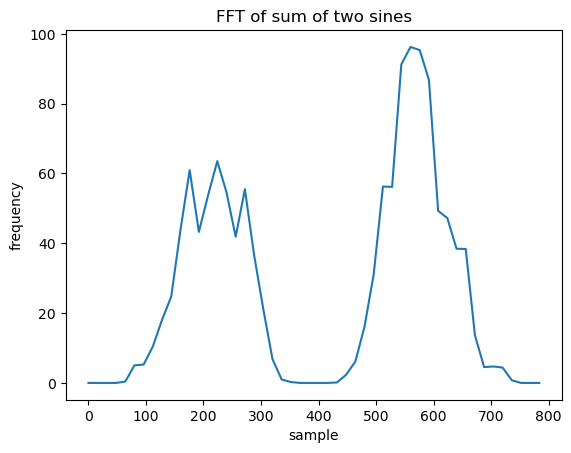

In [50]:
from scipy.fft import fft, fftfreq
sumf = fft(y.loc['2019'])
N=100
xf = fftfreq(N, T)[:N//2]
plt.ylabel('frequency')
plt.xlabel('sample')
plt.title("FFT of sum of two sines")
plt.plot(xf, 2.0/N * np.abs(sumf[0:N//2]))
plt.show()

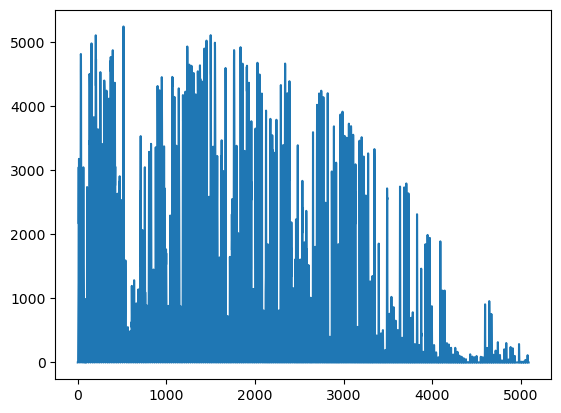

In [54]:
plt.plot(sumf.real)

# Transformation

In [60]:
li = [[x,''] for x in X.columns.tolist()]

In [43]:
def normalize(feature):
    return (feature - feature.min())/(feature.max()-feature.min())

In [41]:
X_new = X[X['pv_measurement']>0]

In [73]:
X_new.pv_measurement.shape

(16348,)

In [74]:
X.shape

(29667, 46)

<Axes: >

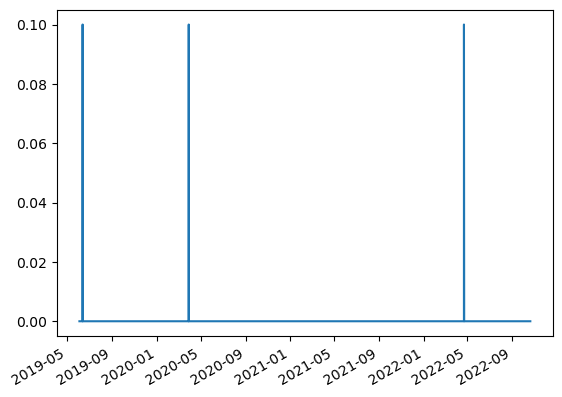

In [67]:
feature.loc[:].plot()

In [66]:
np.unique(feature)

array([-0. ,  0.1])

/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mean 21.334745076437073 10.399150346110419 73.55686226663104 2.817483625090451 73.50908440636377 90.28276441854302
var f:584.6597608510618, f2:341.4922436462583, logf:420.4269232955756, f_1:135.7802427965854, logfc:421.66181092284813, loglogf:128.14564638800832


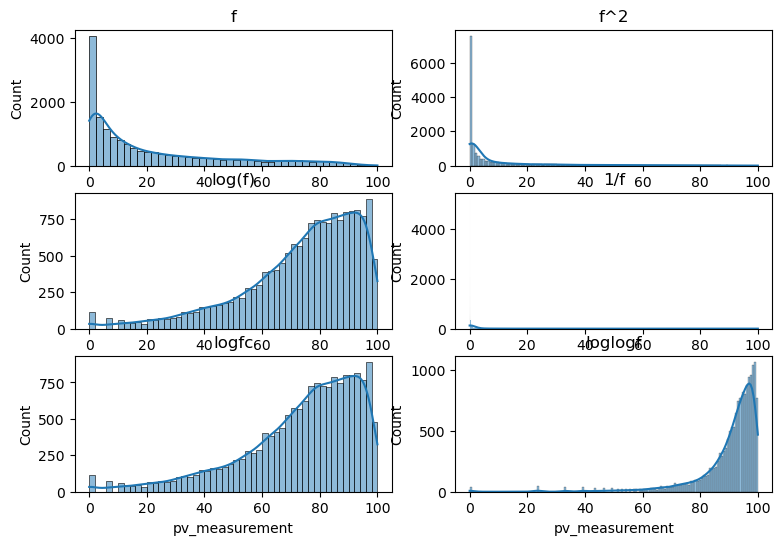

In [68]:
i = 45
token = True

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 6))
axes = axes.flatten()
feature = X_new.iloc[:,i]#.resample('M').mean()

f = normalize(feature)*100
sns.histplot(data=f, ax=axes[0], kde=True)
axes[0].set_title("f")

f2 = normalize((feature)**2)*100
sns.histplot(data=f2, ax=axes[1], kde=True)
axes[1].set_title("f^2")

logf = normalize(np.log(feature+.001))*100
sns.histplot(data=logf, ax=axes[2], kde=True)
axes[2].set_title("log(f)")

if token:
    f_1 = normalize(1/(feature+.5))*100
    sns.histplot(data=f_1, ax=axes[3], kde=True)
    axes[3].set_title("1/f")


c = (feature.quantile(.25)/feature.quantile(.75))**2
logfc = normalize(np.log(feature+c))*100
sns.histplot(data=logfc, ax=axes[4], kde=True)
axes[4].set_title("logfc")

loglogf = normalize(np.log(np.log(feature+.001)+.001))*100
sns.histplot(data=loglogf, ax=axes[5], kde=True)
axes[5].set_title("loglogf")


print('mean',np.mean(f),np.mean(f2), np.mean(logf), np.mean(f_1), np.mean(logfc), np.mean(loglogf))
print(f'var f:{np.var(f)}, f2:{np.var(f2)}, logf:{np.var(logf)}, f_1:{np.var(f_1)}, logfc:{np.var(logfc)}, loglogf:{np.var(loglogf)}')

In [124]:
transformations = [['absolute_humidity_2m:gm3', 'f'],
 ['air_density_2m:kgm3', '1/f'],
 ['ceiling_height_agl:m', 'f'],
 ['clear_sky_energy_1h:J', 'f'],
 ['clear_sky_rad:W', 'f'],
 ['cloud_base_agl:m', 'logfc'],
 ['dew_or_rime:idx', 'hot'],
 ['dew_point_2m:K', 'f^2'],
 ['diffuse_rad:W', 'logfc'],
 ['diffuse_rad_1h:J', 'logf'],
 ['direct_rad:W', 'loglogf'],
 ['direct_rad_1h:J', 'loglogf'],
 ['effective_cloud_cover:p', 'f^2'],
 ['elevation:m', 'constant'],
 ['fresh_snow_12h:cm', 'loglogf ou rien'],
 ['fresh_snow_1h:cm', 'loglogf ou rien'],
 ['fresh_snow_24h:cm', 'loglogf ou rien'],
 ['fresh_snow_3h:cm', 'loglogf ou rien'],
 ['fresh_snow_6h:cm', 'loglogf ou rien'],
 ['is_day:idx', 'hot'],
 ['is_in_shadow:idx', 'hot'],
 ['msl_pressure:hPa', 'f^2'],
 ['precip_5min:mm', 'loglogf ou rien'],
 ['precip_type_5min:idx', 'hot'],
 ['pressure_100m:hPa', 'f^2'],
 ['pressure_50m:hPa', 'f^2'],
 ['prob_rime:p', 'loglogf ou rien'],
 ['rain_water:kgm2', 'one hot à faire !'],
 ['relative_humidity_1000hPa:p', ''],
 ['sfc_pressure:hPa', 'f^3'],
 ['snow_density:kgm3', 'constant'],
 ['snow_depth:cm', 'loglogf ou rien'],
 ['snow_drift:idx', 'hot'],
 ['snow_melt_10min:mm', 'loglogf ou rien'],
 ['snow_water:kgm2', 'loglogf ou rien'],
 ['sun_azimuth:d', 'f ou f^2'],
 ['sun_elevation:d', 'f ou f^2'],
 ['super_cooled_liquid_water:kgm2', 'loglogf ou rien'],
 ['t_1000hPa:K', 'f^2'],
 ['total_cloud_cover:p', 'f^2 ou rien'],
 ['visibility:m', 'f'],
 ['wind_speed_10m:ms', 'f ou logfc'],
 ['wind_speed_u_10m:ms', 'f ou logfc'],
 ['wind_speed_v_10m:ms', 'f'],
 ['wind_speed_w_1000hPa:ms', 'hot'],
 ['pv_measurement', 'f']]

In [153]:
def normalize(feature):
    return (feature - feature.min())/(feature.max()-feature.min())

for feature, function in transformations:
    if function == '1/f':
        X[feature] = normalize(1/(X[feature]+.5))
    if function == 'logfc':
        X[feature] = normalize(np.log(X[feature] + (X[feature].quantile(.25)/X[feature].quantile(.75))**2 ))
    if function == 'f^2':
        X[feature] = normalize((X[feature])**2)
    if function == 'logf':
        X[feature] = normalize(np.log(X[feature]+.001))
    if function == 'f':
        X[feature] = normalize(X[feature])
    if function == 'loglogf':
        X[feature] = normalize(np.log(np.log(X[feature]+.001)+.001))

/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [132]:
drop = list(correlation(X_train_estimated_a) &correlation(X_train_observed_a)&correlation(X_test_estimated_a))

In [154]:
X.drop(drop, axis=1,inplace=True)

In [155]:
X.describe()

absolute_humidity_2m:gm3  air_density_2m:kgm3  ceiling_height_agl:m  \
count              29667.000000         29667.000000          23031.000000   
mean                   0.354321             0.596185              0.228784   
std                    0.166557             0.132428              0.207675   
min                    0.000000             0.000000              0.000000   
25%                    0.220238             0.510252              0.084422   
50%                    0.333333             0.601030              0.146032   
75%                    0.470238             0.686872              0.308909   
max                    1.000000             1.000000              1.000000   

       clear_sky_energy_1h:J  cloud_base_agl:m  dew_or_rime:idx  \
count           29667.000000      27210.000000     29667.000000   
mean                0.199490          0.604435         0.022786   
std                 0.292728          0.168242         0.191031   
min                 0.000000          0.000000        -1.000000   
25%                 0.000000          0.501448         0.000000   
50%                 0.012149          0.613986         0.000000   
75%                 0.346945          0.710449         0.000000   
max                 1.000000          1.000000         1.000000   

       diffuse_rad:W  direct_rad:W  effective_cloud_cover:p  elevation:m  \
count            0.0  12506.000000             29667.000000      29667.0   
mean             NaN      0.916466                 0.574284          6.0   
std              NaN      0.102770                 0.389678          0.0   
min              NaN      0.000000                 0.000000          6.0   
25%              NaN      0.894187                 0.184041          6.0   
50%              NaN      0.946665                 0.654481          6.0   
75%              NaN      0.975021                 0.984064          6.0   
max              NaN      1.000000                 1.000000          6.0   

       fresh_snow_12h:cm  fresh_snow_1h:cm  fresh_snow_24h:cm  \
count       29667.000000      29667.000000       29667.000000   
mean            0.053436          0.004426           0.106883   
std             0.490057          0.076088           0.746023   
min             0.000000          0.000000           0.000000   
25%             0.000000          0.000000           0.000000   
50%             0.000000          0.000000           0.000000   
75%             0.000000          0.000000           0.000000   
max            15.000000          3.600000          15.000000   

       fresh_snow_3h:cm  fresh_snow_6h:cm    is_day:idx  is_in_shadow:idx  \
count      29667.000000       29667.00000  29667.000000      29667.000000   
mean           0.013362           0.02673      0.521792          0.513837   
std            0.182232           0.30690      0.499533          0.499817   
min            0.000000           0.00000      0.000000          0.000000   
25%            0.000000           0.00000      0.000000          0.000000   
50%            0.000000           0.00000      1.000000          1.000000   
75%            0.000000           0.00000      1.000000          1.000000   
max            7.800000          14.60000      1.000000          1.000000   

       msl_pressure:hPa  precip_5min:mm  precip_type_5min:idx   prob_rime:p  \
count      29667.000000    29667.000000          29667.000000  29667.000000   
mean           0.644751        0.006426              0.090100      0.189847   
std            0.126752        0.038576              0.377168      2.552443   
min            0.000000        0.000000              0.000000      0.000000   
25%            0.566511        0.000000              0.000000      0.000000   
50%            0.654844        0.000000              0.000000      0.000000   
75%            0.732633        0.000000              0.000000      0.000000   
max            1.000000        1.380000              6.000000     83.400000   

       rain_water:kgm2 

In [142]:
X_train_observed_a.describe()

absolute_humidity_2m:gm3  air_density_2m:kgm3  ceiling_height_agl:m  \
count             118669.000000        118669.000000          96422.000000   
mean                   6.652576             1.249064           2907.949219   
std                    2.796409             0.036317           2570.401855   
min                    0.700000             1.145000             27.799999   
25%                    4.400000             1.224000           1102.900024   
50%                    6.300000             1.247000           1882.400024   
75%                    8.600000             1.272000           3969.750000   
max                   17.500000             1.427000          12328.500000   

       clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
count           1.186690e+05    118669.000000     110603.000000   
mean            5.994018e+05       166.500381       1737.142212   
std             8.797980e+05       244.907578       1815.570679   
min             0.000000e+00         0.000000         27.900000   
25%             0.000000e+00         0.000000        590.700012   
50%             3.574770e+04         8.600000       1162.599976   
75%             1.037819e+06       288.799988       2079.600098   
max             3.005720e+06       836.400024      11688.700195   

       dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
count    118669.000000   118669.000000  118669.000000      1.186690e+05   
mean          0.022398      276.823395      44.918282      1.617057e+05   
std           0.190339        6.701851      64.780273      2.301814e+05   
min          -1.000000      250.899994       0.000000      0.000000e+00   
25%           0.000000      272.100006       0.000000      0.000000e+00   
50%           0.000000      277.200012       4.100000      2.481410e+04   
75%           0.000000      282.000000      76.000000      2.743256e+05   
max           1.000000      293.799988     345.700012      1.205498e+06   

        direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  elevation:m  \
count  118669.000000     1.186690e+05            118669.000000     118669.0   
mean       56.611744     2.038025e+05                67.605507          6.0   
std       119.745392     4.248438e+05                33.857571          0.0   
min         0.000000     0.000000e+00                 0.000000          6.0   
25%         0.000000     0.000000e+00                43.299999          6.0   
50%         0.000000     8.960000e+01                80.500000          6.0   
75%        41.799999     1.598314e+05                98.800003          6.0   
max       688.700012     2.451173e+06               100.000000          6.0   

       fresh_snow_12h:cm  fresh_snow_1h:cm  fresh_snow_24h:cm  \
count      118669.000000     118669.000000      118669.000000   
mean            0.053117          0.004418           0.106243   
std             0.489839          0.075659           0.746422   
min             0.000000          0.000000           0.000000   
25%             0.000000          0.000000           0.000000   
50%             0.000000          0.000000           0.000000   
75%             0.000000          0.000000           0.000000   
max            15.100000          3.900000          15.100000   

       fresh_snow_3h:cm  fresh_snow_6h:cm     is_day:idx  is_in_shadow:idx  \
count     118669.000000     118669.000000  118669.000000     118669.000000   
mean           0.013277          0.026567       0.521391          0.511650   
std            0.181746          0.306437       0.499342          0.499748   
min            0.000000          0.000000       0.000000          0.000000   
25%            0.000000          0.000000       0.000000          0.000000   
50%            0.000000          0.000000       1.000000          1.000000   
75%            0.000000          0.000000       1.000000          1.000000   
max            7.900000         14.800000       1.000000          1.000000   

       msl_pressure:hPa

In [143]:
X_train_estimated_a.describe()

absolute_humidity_2m:gm3  air_density_2m:kgm3  ceiling_height_agl:m  \
count              17576.000000         17576.000000          13657.000000   
mean                   4.092438             1.281746           3257.459473   
std                    1.511154             0.030050           2501.800537   
min                    1.000000             1.212000             27.900000   
25%                    3.000000             1.262000           1185.500000   
50%                    3.900000             1.279000           2750.000000   
75%                    5.100000             1.301000           4775.500000   
max                    8.800000             1.374000          12307.700195   

       clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
count           1.757600e+04     17576.000000      15482.000000   
mean            2.371263e+05        65.868149       1575.233032   
std             5.173429e+05       144.163116       1718.793457   
min             0.000000e+00         0.000000         27.799999   
25%             0.000000e+00         0.000000        497.524994   
50%             0.000000e+00         0.000000        935.750000   
75%             1.374874e+05        37.400002       1919.599976   
max             2.555980e+06       711.599976      10813.700195   

       dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
count     17576.000000    17576.000000   17576.000000      1.757600e+04   
mean          0.008990      270.222351      22.836435      8.221085e+04   
std           0.221532        5.215971      45.802551      1.626801e+05   
min          -1.000000      254.699997       0.000000      0.000000e+00   
25%           0.000000      266.799988       0.000000      0.000000e+00   
50%           0.000000      270.399994       0.000000      0.000000e+00   
75%           0.000000      273.899994      22.900000      8.024315e+04   
max           1.000000      282.100006     300.500000      1.061123e+06   

       direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  elevation:m  \
count  17576.000000     1.757600e+04             17576.000000      17576.0   
mean      25.725431     9.261137e+04                68.346710          6.0   
std       79.093826     2.811956e+05                35.479538          0.0   
min        0.000000     0.000000e+00                 0.000000          6.0   
25%        0.000000     0.000000e+00                42.700001          6.0   
50%        0.000000     0.000000e+00                84.300003          6.0   
75%        0.800000     1.051160e+04                99.800003          6.0   
max      530.400024     1.893098e+06               100.000000          6.0   

       fresh_snow_12h:cm  fresh_snow_1h:cm  fresh_snow_24h:cm  \
count       17576.000000      17576.000000       17576.000000   
mean            0.325085          0.027555           0.628334   
std             1.045017          0.156180           1.653761   
min             0.000000          0.000000           0.000000   
25%             0.000000          0.000000           0.000000   
50%             0.000000          0.000000           0.000000   
75%             0.000000          0.000000           0.000000   
max            10.300000          3.500000          15.500000   

       fresh_snow_3h:cm  fresh_snow_6h:cm    is_day:idx  is_in_shadow:idx  \
count      17576.000000      17576.000000  17576.000000      17576.000000   
mean           0.083136          0.164838      0.349226          0.695380   
std            0.382714          0.647278      0.476771          0.460262   
min            0.000000          0.000000      0.000000          0.000000   
25%            0.000000          0.000000      0.000000          0.000000   
50%            0.000000          0.000000      0.000000          1.000000   
75%            0.000000          0.000000      1.000000          1.000000   
max            5.200000          7.900000      1.000000          1.000000   

       msl_pressure:hPa  precip_5min:mm  

(array([[<Axes: xlabel='clear_sky_energy_1h:J', ylabel='clear_sky_energy_1h:J'>,
         <Axes: xlabel='clear_sky_rad:W', ylabel='clear_sky_energy_1h:J'>],
        [<Axes: xlabel='clear_sky_energy_1h:J', ylabel='clear_sky_rad:W'>,
         <Axes: xlabel='clear_sky_rad:W', ylabel='clear_sky_rad:W'>]],
       dtype=object),)

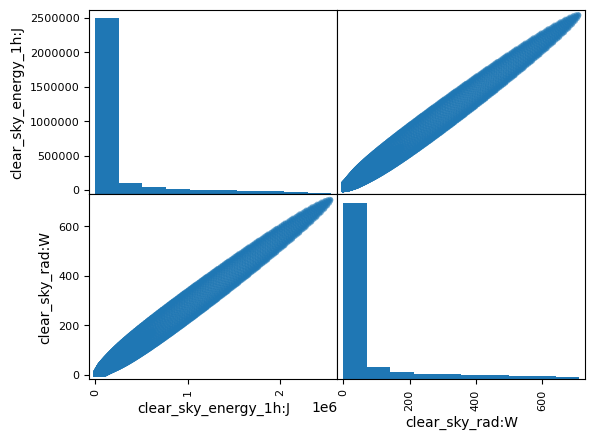

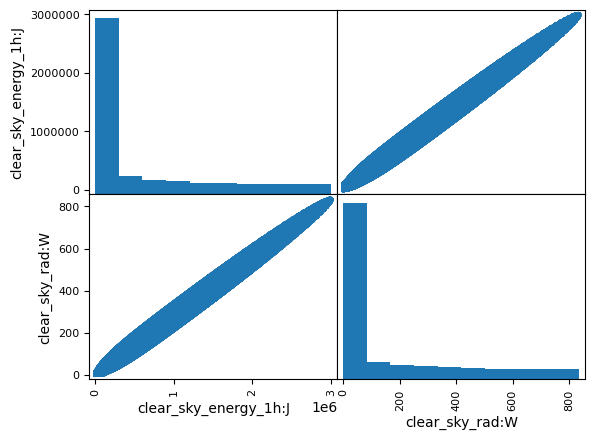

In [145]:
pd.plotting.scatter_matrix(X_train_estimated_a.iloc[:,3:5]),
pd.plotting.scatter_matrix(X_train_observed_a.iloc[:,3:5]),

In [158]:
X.drop(['diffuse_rad:W','direct_rad:W'], axis=1, inplace=True)

In [160]:
X

Empty DataFrame
Columns: [absolute_humidity_2m:gm3, air_density_2m:kgm3, ceiling_height_agl:m, clear_sky_energy_1h:J, cloud_base_agl:m, dew_or_rime:idx, effective_cloud_cover:p, elevation:m, fresh_snow_12h:cm, fresh_snow_1h:cm, fresh_snow_24h:cm, fresh_snow_3h:cm, fresh_snow_6h:cm, is_day:idx, is_in_shadow:idx, msl_pressure:hPa, precip_5min:mm, precip_type_5min:idx, prob_rime:p, rain_water:kgm2, relative_humidity_1000hPa:p, snow_density:kgm3, snow_depth:cm, snow_drift:idx, snow_melt_10min:mm, snow_water:kgm2, sun_azimuth:d, sun_elevation:d, super_cooled_liquid_water:kgm2, t_1000hPa:K, total_cloud_cover:p, visibility:m, wind_speed_10m:ms, wind_speed_u_10m:ms, wind_speed_v_10m:ms, wind_speed_w_1000hPa:ms, pv_measurement]
Index: []

In [159]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
kmeans.labels_
kmeans.cluster_centers_

ValueError: Found array with 0 sample(s) (shape=(0, 37)) while a minimum of 1 is required by KMeans.